## With Rotation

In [1]:
#Code checked: 09/23/2024, Dumi

# Install and import necessary libraries
!pip install tensorflow
!pip install keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import Callback

# Load dataset
df = pd.read_csv('new_vega_rotation_overshooting_alpha_mlt_test_no_num_BIGGER_num_gt_180.csv')
#df = pd.read_csv('spica_lum_teff_box_age_ge_1e6.csv')


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['mass', 'z','fov','mlt', 'age', 'teff', 'lum']], df['log_k'], test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for Conv1D input (add an extra dimension for channels)
X_train_reshaped = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# Creating a custom callback to collect validation loss
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('val_loss'))
        
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the FNN model
model = Sequential()
model.add(Flatten(input_shape=(X_train_reshaped.shape[1], 1))) # Flatten the input data
model.add(Dense(64, activation='relu')) # First hidden layer
model.add(Dense(64, activation='relu')) # Second hidden layer
model.add(Dense(1))  # Output layer for regression task

model.summary()

2024-10-15 13:45:13.645211: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 13:45:13.659697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 13:45:13.676196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 13:45:13.681193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 13:45:13.693418: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17713/17713 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 1.1672e-06 - mae: 8.2640e-04 - mse: 1.1672e-06 - r2: 1.0000 - val_loss: 1.1750e-06 - val_mae: 8.6596e-04 - val_mse: 1.1750e-06 - val_r2: 0.9876
Epoch 2/50
17713/17713 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 7.8364e-07 - mae: 6.8388e-04 - mse: 7.8364e-07 - r2: 1.0000 - val_loss: 7.8035e-07 - val_mae: 6.8205e-04 - val_mse: 7.8035e-07 - val_r2: 0.9984
Epoch 3/50
17713/17713 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 7.2276e-07 - mae: 6.5417e-04 - mse: 7.2276e-07 - r2: 1.0000 - val_loss: 7.0734e-07 - val_mae: 6.4701e-04 - val_mse: 7.0734e-07 - val_r2: 0.9965
Epoch 4/50
17713/17713 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 6.9534e-07 - mae: 6.4124e-04 - mse: 6.9534e-07 - r2: 1.0000 - val_loss: 7.1607e-07 - val_mae: 6.5142e-04 - val_mse: 7.1607e-07 - val_r2: 0.9977
Epoch 5/50
17713/17713 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 6.9122e-07 - mae: 6.3777e-04 - mse: 6.9122e-07 - r2: 1.0000 - val_loss: 6.6042e-07 - val_mae: 6.238

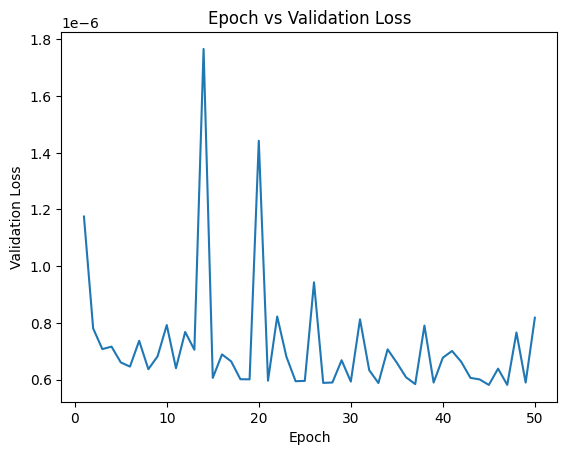

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.2407e-07 - mae: 7.1891e-04 - mse: 8.2407e-07 - r2: 1.0000
Test MSE: 8.265218411906972e-07
Test MAE: 0.000720646174158901
Test R2: 0.999977707862854


1152/1879 [=================>............] - ETA: 0s - loss: 3.8065e-04 - mse: 3.8065e-04 - mae: 0.0147 - r2: 0.9915

1188/1879 [=================>............] - ETA: 0s - loss: 3.7800e-04 - mse: 3.7800e-04 - mae: 0.0147 - r2: 0.9916

1233/1879 [==================>...........] - ETA: 0s - loss: 3.7477e-04 - mse: 3.7477e-04 - mae: 0.0146 - r2: 0.9916

1266/1879 [===================>..........] - ETA: 0s - loss: 3.7252e-04 - mse: 3.7252e-04 - mae: 0.0146 - r2: 0.9917

1308/1879 [===================>..........] - ETA: 0s - loss: 3.7022e-04 - mse: 3.7022e-04 - mae: 0.0145 - r2: 0.9917

1338/1879 [====================>.........] - ETA: 0s - loss: 3.6844e-04 - mse: 3.6844e-04 - mae: 0.0145 - r2: 0.9918

1375/1879 [====================>.........] - ETA: 0s - loss: 3.6744e-04 - mse: 3.6744e-04 - mae: 0.0144 - r2: 0.9918

1416/1879 [=====================>........] - ETA: 0s - loss: 3.6481e-04 - mse: 3.6481e-04 - mae: 0.0144 - r2: 0.9919

1461/1879 [======================>.......] - ETA: 0s - loss: 3.6308e-04 - mse: 3.6308e-04 - mae: 0.0143 - r2: 0.9919

1505/1879 [=======================>......] - ETA: 0s - loss: 3.6015e-04 - mse: 3.6015e-04 - mae: 0.0143 - r2: 0.9920

1545/1879 [=======================>......] - ETA: 0s - loss: 3.5939e-04 - mse: 3.5939e-04 - mae: 0.0143 - r2: 0.9920

1569/1879 [========================>.....] - ETA: 0s - loss: 3.5795e-04 - mse: 3.5795e-04 - mae: 0.0142 - r2: 0.9920

1603/1879 [========================>.....] - ETA: 0s - loss: 3.5541e-04 - mse: 3.5541e-04 - mae: 0.0142 - r2: 0.9921

1641/1879 [=========================>....] - ETA: 0s - loss: 3.5267e-04 - mse: 3.5267e-04 - mae: 0.0141 - r2: 0.9921

1687/1879 [=========================>....] - ETA: 0s - loss: 3.5105e-04 - mse: 3.5105e-04 - mae: 0.0141 - r2: 0.9922

1728/1879 [==========================>...] - ETA: 0s - loss: 3.4922e-04 - mse: 3.4922e-04 - mae: 0.0140 - r2: 0.9922

1766/1879 [===========================>..] - ETA: 0s - loss: 3.4818e-04 - mse: 3.4818e-04 - mae: 0.0140 - r2: 0.9922

1809/1879 [===========================>..] - ETA: 0s - loss: 3.4619e-04 - mse: 3.4619e-04 - mae: 0.0140 - r2: 0.9923

1852/1879 [============================>.] - ETA: 0s - loss: 3.4512e-04 - mse: 3.4512e-04 - mae: 0.0140 - r2: 0.9923

1879/1879 [==============================] - 3s 1ms/step - loss: 3.4362e-04 - mse: 3.4362e-04 - mae: 0.0139 - r2: 0.9923 - val_loss: 2.6150e-04 - val_mse: 2.6150e-04 - val_mae: 0.0121 - val_r2: 0.9941


Epoch 3/10


   1/1879 [..............................] - ETA: 9s - loss: 3.1308e-04 - mse: 3.1308e-04 - mae: 0.0139 - r2: 0.9934

  30/1879 [..............................] - ETA: 3s - loss: 2.4904e-04 - mse: 2.4904e-04 - mae: 0.0119 - r2: 0.9941

  61/1879 [..............................] - ETA: 3s - loss: 2.8078e-04 - mse: 2.8078e-04 - mae: 0.0125 - r2: 0.9935

 101/1879 [>.............................] - ETA: 2s - loss: 2.7415e-04 - mse: 2.7415e-04 - mae: 0.0124 - r2: 0.9938

 132/1879 [=>............................] - ETA: 2s - loss: 2.7075e-04 - mse: 2.7075e-04 - mae: 0.0123 - r2: 0.9938

 176/1879 [=>............................] - ETA: 2s - loss: 2.6418e-04 - mse: 2.6418e-04 - mae: 0.0121 - r2: 0.9939

 217/1879 [==>...........................] - ETA: 2s - loss: 2.6601e-04 - mse: 2.6601e-04 - mae: 0.0122 - r2: 0.9939

 236/1879 [==>...........................] - ETA: 2s - loss: 2.6687e-04 - mse: 2.6687e-04 - mae: 0.0122 - r2: 0.9939

 262/1879 [===>..........................] - ETA: 2s - loss: 2.6713e-04 - mse: 2.6713e-04 - mae: 0.0123 - r2: 0.9939

 302/1879 [===>..........................] - ETA: 2s - loss: 2.6544e-04 - mse: 2.6544e-04 - mae: 0.0123 - r2: 0.9939

 346/1879 [====>.........................] - ETA: 2s - loss: 2.6574e-04 - mse: 2.6574e-04 - mae: 0.0122 - r2: 0.9939

 385/1879 [=====>........................] - ETA: 2s - loss: 2.6578e-04 - mse: 2.6578e-04 - mae: 0.0123 - r2: 0.9939

 432/1879 [=====>........................] - ETA: 2s - loss: 2.6298e-04 - mse: 2.6298e-04 - mae: 0.0122 - r2: 0.9941

 476/1879 [======>.......................] - ETA: 1s - loss: 2.6018e-04 - mse: 2.6018e-04 - mae: 0.0121 - r2: 0.9941

 520/1879 [=======>......................] - ETA: 1s - loss: 2.5865e-04 - mse: 2.5865e-04 - mae: 0.0121 - r2: 0.9941

 549/1879 [=======>......................] - ETA: 1s - loss: 2.5701e-04 - mse: 2.5701e-04 - mae: 0.0120 - r2: 0.9942

 590/1879 [========>.....................] - ETA: 1s - loss: 2.5526e-04 - mse: 2.5526e-04 - mae: 0.0120 - r2: 0.9942

 634/1879 [=========>....................] - ETA: 1s - loss: 2.5292e-04 - mse: 2.5292e-04 - mae: 0.0119 - r2: 0.9943

 673/1879 [=========>....................] - ETA: 1s - loss: 2.5180e-04 - mse: 2.5180e-04 - mae: 0.0119 - r2: 0.9943

 715/1879 [==========>...................] - ETA: 1s - loss: 2.5218e-04 - mse: 2.5218e-04 - mae: 0.0119 - r2: 0.9943

 752/1879 [===========>..................] - ETA: 1s - loss: 2.5090e-04 - mse: 2.5090e-04 - mae: 0.0119 - r2: 0.9944

 783/1879 [===========>..................] - ETA: 1s - loss: 2.4970e-04 - mse: 2.4970e-04 - mae: 0.0119 - r2: 0.9944

 819/1879 [============>.................] - ETA: 1s - loss: 2.4852e-04 - mse: 2.4852e-04 - mae: 0.0119 - r2: 0.9944

 849/1879 [============>.................] - ETA: 1s - loss: 2.4743e-04 - mse: 2.4743e-04 - mae: 0.0118 - r2: 0.9944

 882/1879 [=============>................] - ETA: 1s - loss: 2.4630e-04 - mse: 2.4630e-04 - mae: 0.0118 - r2: 0.9944

 914/1879 [=============>................] - ETA: 1s - loss: 2.4502e-04 - mse: 2.4502e-04 - mae: 0.0118 - r2: 0.9945

 959/1879 [==============>...............] - ETA: 1s - loss: 2.4356e-04 - mse: 2.4356e-04 - mae: 0.0118 - r2: 0.9945

1000/1879 [==============>...............] - ETA: 1s - loss: 2.4181e-04 - mse: 2.4181e-04 - mae: 0.0117 - r2: 0.9946

1043/1879 [===============>..............] - ETA: 1s - loss: 2.4141e-04 - mse: 2.4141e-04 - mae: 0.0117 - r2: 0.9946

1087/1879 [================>.............] - ETA: 1s - loss: 2.4155e-04 - mse: 2.4155e-04 - mae: 0.0117 - r2: 0.9946

1129/1879 [=================>............] - ETA: 1s - loss: 2.4084e-04 - mse: 2.4084e-04 - mae: 0.0117 - r2: 0.9946

1160/1879 [=================>............] - ETA: 0s - loss: 2.3961e-04 - mse: 2.3961e-04 - mae: 0.0117 - r2: 0.9946

1199/1879 [==================>...........] - ETA: 0s - loss: 2.3847e-04 - mse: 2.3847e-04 - mae: 0.0116 - r2: 0.9947

1237/1879 [==================>...........] - ETA: 0s - loss: 2.3710e-04 - mse: 2.3710e-04 - mae: 0.0116 - r2: 0.9947

1281/1879 [===================>..........] - ETA: 0s - loss: 2.3581e-04 - mse: 2.3581e-04 - mae: 0.0116 - r2: 0.9947

1313/1879 [===================>..........] - ETA: 0s - loss: 2.3514e-04 - mse: 2.3514e-04 - mae: 0.0115 - r2: 0.9947

1353/1879 [====================>.........] - ETA: 0s - loss: 2.3446e-04 - mse: 2.3446e-04 - mae: 0.0115 - r2: 0.9948

1398/1879 [=====================>........] - ETA: 0s - loss: 2.3317e-04 - mse: 2.3317e-04 - mae: 0.0115 - r2: 0.9948

1443/1879 [======================>.......] - ETA: 0s - loss: 2.3254e-04 - mse: 2.3254e-04 - mae: 0.0115 - r2: 0.9948

1483/1879 [======================>.......] - ETA: 0s - loss: 2.3097e-04 - mse: 2.3097e-04 - mae: 0.0114 - r2: 0.9949

1521/1879 [=======================>......] - ETA: 0s - loss: 2.3055e-04 - mse: 2.3055e-04 - mae: 0.0114 - r2: 0.9949

1563/1879 [=======================>......] - ETA: 0s - loss: 2.3000e-04 - mse: 2.3000e-04 - mae: 0.0114 - r2: 0.9949

1607/1879 [========================>.....] - ETA: 0s - loss: 2.2908e-04 - mse: 2.2908e-04 - mae: 0.0114 - r2: 0.9949

1636/1879 [=========================>....] - ETA: 0s - loss: 2.2880e-04 - mse: 2.2880e-04 - mae: 0.0114 - r2: 0.9949

1670/1879 [=========================>....] - ETA: 0s - loss: 2.2799e-04 - mse: 2.2799e-04 - mae: 0.0114 - r2: 0.9949

1702/1879 [==========================>...] - ETA: 0s - loss: 2.2845e-04 - mse: 2.2845e-04 - mae: 0.0114 - r2: 0.9949

1738/1879 [==========================>...] - ETA: 0s - loss: 2.2747e-04 - mse: 2.2747e-04 - mae: 0.0114 - r2: 0.9949

1779/1879 [===========================>..] - ETA: 0s - loss: 2.2651e-04 - mse: 2.2651e-04 - mae: 0.0113 - r2: 0.9949

1820/1879 [============================>.] - ETA: 0s - loss: 2.2595e-04 - mse: 2.2595e-04 - mae: 0.0113 - r2: 0.9950

1861/1879 [============================>.] - ETA: 0s - loss: 2.2535e-04 - mse: 2.2535e-04 - mae: 0.0113 - r2: 0.9950

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2516e-04 - mse: 2.2516e-04 - mae: 0.0113 - r2: 0.9950 - val_loss: 1.8284e-04 - val_mse: 1.8284e-04 - val_mae: 0.0102 - val_r2: 0.9959


Epoch 4/10


   1/1879 [..............................] - ETA: 5s - loss: 1.5176e-04 - mse: 1.5176e-04 - mae: 0.0100 - r2: 0.9961

  47/1879 [..............................] - ETA: 2s - loss: 1.7396e-04 - mse: 1.7396e-04 - mae: 0.0101 - r2: 0.9964

  88/1879 [>.............................] - ETA: 2s - loss: 1.7459e-04 - mse: 1.7459e-04 - mae: 0.0100 - r2: 0.9962

 126/1879 [=>............................] - ETA: 2s - loss: 1.8073e-04 - mse: 1.8073e-04 - mae: 0.0102 - r2: 0.9960

 166/1879 [=>............................] - ETA: 2s - loss: 1.8119e-04 - mse: 1.8119e-04 - mae: 0.0102 - r2: 0.9959

 208/1879 [==>...........................] - ETA: 2s - loss: 1.7859e-04 - mse: 1.7859e-04 - mae: 0.0102 - r2: 0.9960

 246/1879 [==>...........................] - ETA: 2s - loss: 1.7978e-04 - mse: 1.7978e-04 - mae: 0.0102 - r2: 0.9960

 287/1879 [===>..........................] - ETA: 1s - loss: 1.7732e-04 - mse: 1.7732e-04 - mae: 0.0101 - r2: 0.9961

 331/1879 [====>.........................] - ETA: 1s - loss: 1.8032e-04 - mse: 1.8032e-04 - mae: 0.0102 - r2: 0.9959

 371/1879 [====>.........................] - ETA: 1s - loss: 1.7992e-04 - mse: 1.7992e-04 - mae: 0.0102 - r2: 0.9959

 410/1879 [=====>........................] - ETA: 1s - loss: 1.7915e-04 - mse: 1.7915e-04 - mae: 0.0102 - r2: 0.9960

 451/1879 [======>.......................] - ETA: 1s - loss: 1.7888e-04 - mse: 1.7888e-04 - mae: 0.0102 - r2: 0.9960

 495/1879 [======>.......................] - ETA: 1s - loss: 1.7771e-04 - mse: 1.7771e-04 - mae: 0.0101 - r2: 0.9960

 535/1879 [=======>......................] - ETA: 1s - loss: 1.7666e-04 - mse: 1.7666e-04 - mae: 0.0101 - r2: 0.9961

 577/1879 [========>.....................] - ETA: 1s - loss: 1.7706e-04 - mse: 1.7706e-04 - mae: 0.0101 - r2: 0.9960

 620/1879 [========>.....................] - ETA: 1s - loss: 1.7588e-04 - mse: 1.7588e-04 - mae: 0.0101 - r2: 0.9961

 651/1879 [=========>....................] - ETA: 1s - loss: 1.7691e-04 - mse: 1.7691e-04 - mae: 0.0101 - r2: 0.9960

 690/1879 [==========>...................] - ETA: 1s - loss: 1.7645e-04 - mse: 1.7645e-04 - mae: 0.0101 - r2: 0.9960

 731/1879 [==========>...................] - ETA: 1s - loss: 1.7616e-04 - mse: 1.7616e-04 - mae: 0.0101 - r2: 0.9960

 770/1879 [===========>..................] - ETA: 1s - loss: 1.7566e-04 - mse: 1.7566e-04 - mae: 0.0100 - r2: 0.9961

 807/1879 [===========>..................] - ETA: 1s - loss: 1.7523e-04 - mse: 1.7523e-04 - mae: 0.0100 - r2: 0.9961

 847/1879 [============>.................] - ETA: 1s - loss: 1.7518e-04 - mse: 1.7518e-04 - mae: 0.0100 - r2: 0.9961

 887/1879 [=============>................] - ETA: 1s - loss: 1.7535e-04 - mse: 1.7535e-04 - mae: 0.0100 - r2: 0.9961

 912/1879 [=============>................] - ETA: 1s - loss: 1.7521e-04 - mse: 1.7521e-04 - mae: 0.0100 - r2: 0.9961

 957/1879 [==============>...............] - ETA: 1s - loss: 1.7478e-04 - mse: 1.7478e-04 - mae: 0.0100 - r2: 0.9961

1000/1879 [==============>...............] - ETA: 1s - loss: 1.7453e-04 - mse: 1.7453e-04 - mae: 0.0100 - r2: 0.9961

1033/1879 [===============>..............] - ETA: 1s - loss: 1.7488e-04 - mse: 1.7488e-04 - mae: 0.0100 - r2: 0.9961

1060/1879 [===============>..............] - ETA: 1s - loss: 1.7503e-04 - mse: 1.7503e-04 - mae: 0.0100 - r2: 0.9961

1091/1879 [================>.............] - ETA: 1s - loss: 1.7496e-04 - mse: 1.7496e-04 - mae: 0.0100 - r2: 0.9961

1126/1879 [================>.............] - ETA: 0s - loss: 1.7412e-04 - mse: 1.7412e-04 - mae: 0.0100 - r2: 0.9961

1163/1879 [=================>............] - ETA: 0s - loss: 1.7360e-04 - mse: 1.7360e-04 - mae: 0.0100 - r2: 0.9961

1203/1879 [==================>...........] - ETA: 0s - loss: 1.7246e-04 - mse: 1.7246e-04 - mae: 0.0099 - r2: 0.9962

1247/1879 [==================>...........] - ETA: 0s - loss: 1.7262e-04 - mse: 1.7262e-04 - mae: 0.0099 - r2: 0.9962

1291/1879 [===================>..........] - ETA: 0s - loss: 1.7225e-04 - mse: 1.7225e-04 - mae: 0.0099 - r2: 0.9962

1330/1879 [====================>.........] - ETA: 0s - loss: 1.7131e-04 - mse: 1.7131e-04 - mae: 0.0099 - r2: 0.9962

1365/1879 [====================>.........] - ETA: 0s - loss: 1.7107e-04 - mse: 1.7107e-04 - mae: 0.0099 - r2: 0.9962

1404/1879 [=====================>........] - ETA: 0s - loss: 1.7074e-04 - mse: 1.7074e-04 - mae: 0.0099 - r2: 0.9962

1444/1879 [======================>.......] - ETA: 0s - loss: 1.6983e-04 - mse: 1.6983e-04 - mae: 0.0099 - r2: 0.9962

1484/1879 [======================>.......] - ETA: 0s - loss: 1.6944e-04 - mse: 1.6944e-04 - mae: 0.0098 - r2: 0.9962

1526/1879 [=======================>......] - ETA: 0s - loss: 1.6862e-04 - mse: 1.6862e-04 - mae: 0.0098 - r2: 0.9962

1565/1879 [=======================>......] - ETA: 0s - loss: 1.6856e-04 - mse: 1.6856e-04 - mae: 0.0098 - r2: 0.9963

1603/1879 [========================>.....] - ETA: 0s - loss: 1.6816e-04 - mse: 1.6816e-04 - mae: 0.0098 - r2: 0.9963

1642/1879 [=========================>....] - ETA: 0s - loss: 1.6763e-04 - mse: 1.6763e-04 - mae: 0.0098 - r2: 0.9963

1677/1879 [=========================>....] - ETA: 0s - loss: 1.6750e-04 - mse: 1.6750e-04 - mae: 0.0098 - r2: 0.9963

1720/1879 [==========================>...] - ETA: 0s - loss: 1.6720e-04 - mse: 1.6720e-04 - mae: 0.0098 - r2: 0.9963

1763/1879 [===========================>..] - ETA: 0s - loss: 1.6723e-04 - mse: 1.6723e-04 - mae: 0.0098 - r2: 0.9963

1801/1879 [===========================>..] - ETA: 0s - loss: 1.6656e-04 - mse: 1.6656e-04 - mae: 0.0098 - r2: 0.9963

1844/1879 [============================>.] - ETA: 0s - loss: 1.6641e-04 - mse: 1.6641e-04 - mae: 0.0098 - r2: 0.9963

1879/1879 [==============================] - 3s 1ms/step - loss: 1.6603e-04 - mse: 1.6603e-04 - mae: 0.0097 - r2: 0.9963 - val_loss: 1.4138e-04 - val_mse: 1.4138e-04 - val_mae: 0.0091 - val_r2: 0.9968


Epoch 5/10


   1/1879 [..............................] - ETA: 13s - loss: 2.2462e-04 - mse: 2.2462e-04 - mae: 0.0123 - r2: 0.9944

  24/1879 [..............................] - ETA: 4s - loss: 1.6393e-04 - mse: 1.6393e-04 - mae: 0.0096 - r2: 0.9969 

  49/1879 [..............................] - ETA: 3s - loss: 1.6182e-04 - mse: 1.6182e-04 - mae: 0.0095 - r2: 0.9968

  89/1879 [>.............................] - ETA: 3s - loss: 1.4419e-04 - mse: 1.4419e-04 - mae: 0.0089 - r2: 0.9971

 129/1879 [=>............................] - ETA: 2s - loss: 1.4492e-04 - mse: 1.4492e-04 - mae: 0.0090 - r2: 0.9970

 171/1879 [=>............................] - ETA: 2s - loss: 1.4284e-04 - mse: 1.4284e-04 - mae: 0.0090 - r2: 0.9970

 216/1879 [==>...........................] - ETA: 2s - loss: 1.4458e-04 - mse: 1.4458e-04 - mae: 0.0090 - r2: 0.9969

 253/1879 [===>..........................] - ETA: 2s - loss: 1.4231e-04 - mse: 1.4231e-04 - mae: 0.0090 - r2: 0.9969

 295/1879 [===>..........................] - ETA: 2s - loss: 1.4074e-04 - mse: 1.4074e-04 - mae: 0.0090 - r2: 0.9968

 334/1879 [====>.........................] - ETA: 2s - loss: 1.4008e-04 - mse: 1.4008e-04 - mae: 0.0090 - r2: 0.9969

 375/1879 [====>.........................] - ETA: 2s - loss: 1.3992e-04 - mse: 1.3992e-04 - mae: 0.0089 - r2: 0.9969

 417/1879 [=====>........................] - ETA: 1s - loss: 1.4053e-04 - mse: 1.4053e-04 - mae: 0.0089 - r2: 0.9969

 457/1879 [======>.......................] - ETA: 1s - loss: 1.4226e-04 - mse: 1.4226e-04 - mae: 0.0090 - r2: 0.9968

 492/1879 [======>.......................] - ETA: 1s - loss: 1.4185e-04 - mse: 1.4185e-04 - mae: 0.0090 - r2: 0.9968

 526/1879 [=======>......................] - ETA: 1s - loss: 1.4059e-04 - mse: 1.4059e-04 - mae: 0.0089 - r2: 0.9969

 564/1879 [========>.....................] - ETA: 1s - loss: 1.4110e-04 - mse: 1.4110e-04 - mae: 0.0090 - r2: 0.9968

 592/1879 [========>.....................] - ETA: 1s - loss: 1.4034e-04 - mse: 1.4034e-04 - mae: 0.0089 - r2: 0.9968

 632/1879 [=========>....................] - ETA: 1s - loss: 1.3946e-04 - mse: 1.3946e-04 - mae: 0.0089 - r2: 0.9969

 675/1879 [=========>....................] - ETA: 1s - loss: 1.3875e-04 - mse: 1.3875e-04 - mae: 0.0089 - r2: 0.9969

 714/1879 [==========>...................] - ETA: 1s - loss: 1.3832e-04 - mse: 1.3832e-04 - mae: 0.0089 - r2: 0.9969

 757/1879 [===========>..................] - ETA: 1s - loss: 1.3786e-04 - mse: 1.3786e-04 - mae: 0.0089 - r2: 0.9969

 800/1879 [===========>..................] - ETA: 1s - loss: 1.3758e-04 - mse: 1.3758e-04 - mae: 0.0089 - r2: 0.9969

 837/1879 [============>.................] - ETA: 1s - loss: 1.3885e-04 - mse: 1.3885e-04 - mae: 0.0089 - r2: 0.9968

 880/1879 [=============>................] - ETA: 1s - loss: 1.3834e-04 - mse: 1.3834e-04 - mae: 0.0089 - r2: 0.9969

 914/1879 [=============>................] - ETA: 1s - loss: 1.3776e-04 - mse: 1.3776e-04 - mae: 0.0089 - r2: 0.9969

 952/1879 [==============>...............] - ETA: 1s - loss: 1.3764e-04 - mse: 1.3764e-04 - mae: 0.0089 - r2: 0.9969

 990/1879 [==============>...............] - ETA: 1s - loss: 1.3702e-04 - mse: 1.3702e-04 - mae: 0.0089 - r2: 0.9969

1030/1879 [===============>..............] - ETA: 1s - loss: 1.3695e-04 - mse: 1.3695e-04 - mae: 0.0088 - r2: 0.9969

1070/1879 [================>.............] - ETA: 1s - loss: 1.3628e-04 - mse: 1.3628e-04 - mae: 0.0088 - r2: 0.9969

1111/1879 [================>.............] - ETA: 1s - loss: 1.3632e-04 - mse: 1.3632e-04 - mae: 0.0088 - r2: 0.9969

1149/1879 [=================>............] - ETA: 0s - loss: 1.3545e-04 - mse: 1.3545e-04 - mae: 0.0088 - r2: 0.9970

1189/1879 [=================>............] - ETA: 0s - loss: 1.3564e-04 - mse: 1.3564e-04 - mae: 0.0088 - r2: 0.9970

1229/1879 [==================>...........] - ETA: 0s - loss: 1.3542e-04 - mse: 1.3542e-04 - mae: 0.0088 - r2: 0.9970

1274/1879 [===================>..........] - ETA: 0s - loss: 1.3545e-04 - mse: 1.3545e-04 - mae: 0.0088 - r2: 0.9970

1315/1879 [===================>..........] - ETA: 0s - loss: 1.3528e-04 - mse: 1.3528e-04 - mae: 0.0088 - r2: 0.9970

1335/1879 [====================>.........] - ETA: 0s - loss: 1.3516e-04 - mse: 1.3516e-04 - mae: 0.0088 - r2: 0.9970

1366/1879 [====================>.........] - ETA: 0s - loss: 1.3487e-04 - mse: 1.3487e-04 - mae: 0.0088 - r2: 0.9970

1389/1879 [=====================>........] - ETA: 0s - loss: 1.3485e-04 - mse: 1.3485e-04 - mae: 0.0088 - r2: 0.9970

1429/1879 [=====================>........] - ETA: 0s - loss: 1.3515e-04 - mse: 1.3515e-04 - mae: 0.0088 - r2: 0.9970

1471/1879 [======================>.......] - ETA: 0s - loss: 1.3497e-04 - mse: 1.3497e-04 - mae: 0.0088 - r2: 0.9970

1513/1879 [=======================>......] - ETA: 0s - loss: 1.3455e-04 - mse: 1.3455e-04 - mae: 0.0088 - r2: 0.9970

1555/1879 [=======================>......] - ETA: 0s - loss: 1.3412e-04 - mse: 1.3412e-04 - mae: 0.0088 - r2: 0.9970

1597/1879 [========================>.....] - ETA: 0s - loss: 1.3393e-04 - mse: 1.3393e-04 - mae: 0.0088 - r2: 0.9970

1639/1879 [=========================>....] - ETA: 0s - loss: 1.3321e-04 - mse: 1.3321e-04 - mae: 0.0088 - r2: 0.9970

1677/1879 [=========================>....] - ETA: 0s - loss: 1.3285e-04 - mse: 1.3285e-04 - mae: 0.0088 - r2: 0.9970

1721/1879 [==========================>...] - ETA: 0s - loss: 1.3255e-04 - mse: 1.3255e-04 - mae: 0.0087 - r2: 0.9970

1761/1879 [===========================>..] - ETA: 0s - loss: 1.3252e-04 - mse: 1.3252e-04 - mae: 0.0087 - r2: 0.9970

1802/1879 [===========================>..] - ETA: 0s - loss: 1.3193e-04 - mse: 1.3193e-04 - mae: 0.0087 - r2: 0.9971

1847/1879 [============================>.] - ETA: 0s - loss: 1.3154e-04 - mse: 1.3154e-04 - mae: 0.0087 - r2: 0.9971

1879/1879 [==============================] - 3s 1ms/step - loss: 1.3138e-04 - mse: 1.3138e-04 - mae: 0.0087 - r2: 0.9971 - val_loss: 1.2155e-04 - val_mse: 1.2155e-04 - val_mae: 0.0084 - val_r2: 0.9973


Epoch 6/10


   1/1879 [..............................] - ETA: 4s - loss: 1.8538e-04 - mse: 1.8538e-04 - mae: 0.0108 - r2: 0.9961

  41/1879 [..............................] - ETA: 2s - loss: 1.1869e-04 - mse: 1.1869e-04 - mae: 0.0083 - r2: 0.9975

  81/1879 [>.............................] - ETA: 2s - loss: 1.2252e-04 - mse: 1.2252e-04 - mae: 0.0083 - r2: 0.9973

 119/1879 [>.............................] - ETA: 2s - loss: 1.1692e-04 - mse: 1.1692e-04 - mae: 0.0083 - r2: 0.9974

 156/1879 [=>............................] - ETA: 2s - loss: 1.2170e-04 - mse: 1.2170e-04 - mae: 0.0084 - r2: 0.9973

 196/1879 [==>...........................] - ETA: 2s - loss: 1.1774e-04 - mse: 1.1774e-04 - mae: 0.0083 - r2: 0.9974

 240/1879 [==>...........................] - ETA: 2s - loss: 1.1415e-04 - mse: 1.1415e-04 - mae: 0.0082 - r2: 0.9975

 278/1879 [===>..........................] - ETA: 2s - loss: 1.1497e-04 - mse: 1.1497e-04 - mae: 0.0082 - r2: 0.9974

 319/1879 [====>.........................] - ETA: 1s - loss: 1.1572e-04 - mse: 1.1572e-04 - mae: 0.0082 - r2: 0.9974

 354/1879 [====>.........................] - ETA: 1s - loss: 1.1533e-04 - mse: 1.1533e-04 - mae: 0.0082 - r2: 0.9974

 381/1879 [=====>........................] - ETA: 1s - loss: 1.1465e-04 - mse: 1.1465e-04 - mae: 0.0082 - r2: 0.9975

 413/1879 [=====>........................] - ETA: 1s - loss: 1.1344e-04 - mse: 1.1344e-04 - mae: 0.0081 - r2: 0.9975

 439/1879 [======>.......................] - ETA: 1s - loss: 1.1398e-04 - mse: 1.1398e-04 - mae: 0.0081 - r2: 0.9975

 483/1879 [======>.......................] - ETA: 1s - loss: 1.1325e-04 - mse: 1.1325e-04 - mae: 0.0081 - r2: 0.9975

 528/1879 [=======>......................] - ETA: 1s - loss: 1.1425e-04 - mse: 1.1425e-04 - mae: 0.0081 - r2: 0.9975

 571/1879 [========>.....................] - ETA: 1s - loss: 1.1358e-04 - mse: 1.1358e-04 - mae: 0.0081 - r2: 0.9975

 609/1879 [========>.....................] - ETA: 1s - loss: 1.1390e-04 - mse: 1.1390e-04 - mae: 0.0081 - r2: 0.9975

 636/1879 [=========>....................] - ETA: 1s - loss: 1.1369e-04 - mse: 1.1369e-04 - mae: 0.0081 - r2: 0.9975

 677/1879 [=========>....................] - ETA: 1s - loss: 1.1373e-04 - mse: 1.1373e-04 - mae: 0.0081 - r2: 0.9975

 719/1879 [==========>...................] - ETA: 1s - loss: 1.1286e-04 - mse: 1.1286e-04 - mae: 0.0081 - r2: 0.9975

 760/1879 [===========>..................] - ETA: 1s - loss: 1.1280e-04 - mse: 1.1280e-04 - mae: 0.0081 - r2: 0.9975

 799/1879 [===========>..................] - ETA: 1s - loss: 1.1241e-04 - mse: 1.1241e-04 - mae: 0.0081 - r2: 0.9975

 817/1879 [============>.................] - ETA: 1s - loss: 1.1250e-04 - mse: 1.1250e-04 - mae: 0.0081 - r2: 0.9975

 857/1879 [============>.................] - ETA: 1s - loss: 1.1256e-04 - mse: 1.1256e-04 - mae: 0.0081 - r2: 0.9975

 900/1879 [=============>................] - ETA: 1s - loss: 1.1248e-04 - mse: 1.1248e-04 - mae: 0.0081 - r2: 0.9975

 936/1879 [=============>................] - ETA: 1s - loss: 1.1214e-04 - mse: 1.1214e-04 - mae: 0.0081 - r2: 0.9975

 979/1879 [==============>...............] - ETA: 1s - loss: 1.1191e-04 - mse: 1.1191e-04 - mae: 0.0081 - r2: 0.9975

1019/1879 [===============>..............] - ETA: 1s - loss: 1.1134e-04 - mse: 1.1134e-04 - mae: 0.0080 - r2: 0.9976

1052/1879 [===============>..............] - ETA: 1s - loss: 1.1146e-04 - mse: 1.1146e-04 - mae: 0.0080 - r2: 0.9976

1096/1879 [================>.............] - ETA: 1s - loss: 1.1101e-04 - mse: 1.1101e-04 - mae: 0.0080 - r2: 0.9976

1132/1879 [=================>............] - ETA: 1s - loss: 1.1108e-04 - mse: 1.1108e-04 - mae: 0.0080 - r2: 0.9976

1170/1879 [=================>............] - ETA: 0s - loss: 1.1149e-04 - mse: 1.1149e-04 - mae: 0.0080 - r2: 0.9975

1214/1879 [==================>...........] - ETA: 0s - loss: 1.1114e-04 - mse: 1.1114e-04 - mae: 0.0080 - r2: 0.9976

1254/1879 [===================>..........] - ETA: 0s - loss: 1.1111e-04 - mse: 1.1111e-04 - mae: 0.0080 - r2: 0.9976

1291/1879 [===================>..........] - ETA: 0s - loss: 1.1083e-04 - mse: 1.1083e-04 - mae: 0.0080 - r2: 0.9976

1303/1879 [===================>..........] - ETA: 0s - loss: 1.1091e-04 - mse: 1.1091e-04 - mae: 0.0080 - r2: 0.9976

1339/1879 [====================>.........] - ETA: 0s - loss: 1.1065e-04 - mse: 1.1065e-04 - mae: 0.0080 - r2: 0.9976

1375/1879 [====================>.........] - ETA: 0s - loss: 1.1047e-04 - mse: 1.1047e-04 - mae: 0.0080 - r2: 0.9976

1411/1879 [=====================>........] - ETA: 0s - loss: 1.1044e-04 - mse: 1.1044e-04 - mae: 0.0080 - r2: 0.9976

1452/1879 [======================>.......] - ETA: 0s - loss: 1.1022e-04 - mse: 1.1022e-04 - mae: 0.0080 - r2: 0.9976

1493/1879 [======================>.......] - ETA: 0s - loss: 1.1034e-04 - mse: 1.1034e-04 - mae: 0.0080 - r2: 0.9976

1534/1879 [=======================>......] - ETA: 0s - loss: 1.1025e-04 - mse: 1.1025e-04 - mae: 0.0080 - r2: 0.9976

1577/1879 [========================>.....] - ETA: 0s - loss: 1.0987e-04 - mse: 1.0987e-04 - mae: 0.0080 - r2: 0.9976

1617/1879 [========================>.....] - ETA: 0s - loss: 1.0978e-04 - mse: 1.0978e-04 - mae: 0.0080 - r2: 0.9976

1659/1879 [=========================>....] - ETA: 0s - loss: 1.0947e-04 - mse: 1.0947e-04 - mae: 0.0080 - r2: 0.9976

1701/1879 [==========================>...] - ETA: 0s - loss: 1.0951e-04 - mse: 1.0951e-04 - mae: 0.0080 - r2: 0.9976

1745/1879 [==========================>...] - ETA: 0s - loss: 1.0950e-04 - mse: 1.0950e-04 - mae: 0.0080 - r2: 0.9976

1792/1879 [===========================>..] - ETA: 0s - loss: 1.0934e-04 - mse: 1.0934e-04 - mae: 0.0080 - r2: 0.9976

1835/1879 [============================>.] - ETA: 0s - loss: 1.0942e-04 - mse: 1.0942e-04 - mae: 0.0080 - r2: 0.9976

1875/1879 [============================>.] - ETA: 0s - loss: 1.0912e-04 - mse: 1.0912e-04 - mae: 0.0080 - r2: 0.9976

1879/1879 [==============================] - 3s 1ms/step - loss: 1.0908e-04 - mse: 1.0908e-04 - mae: 0.0080 - r2: 0.9976 - val_loss: 1.0058e-04 - val_mse: 1.0058e-04 - val_mae: 0.0077 - val_r2: 0.9977


Epoch 7/10


   1/1879 [..............................] - ETA: 7s - loss: 1.2510e-04 - mse: 1.2510e-04 - mae: 0.0087 - r2: 0.9976

  41/1879 [..............................] - ETA: 2s - loss: 1.0888e-04 - mse: 1.0888e-04 - mae: 0.0078 - r2: 0.9975

  80/1879 [>.............................] - ETA: 2s - loss: 1.0008e-04 - mse: 1.0008e-04 - mae: 0.0077 - r2: 0.9979

 119/1879 [>.............................] - ETA: 2s - loss: 1.0197e-04 - mse: 1.0197e-04 - mae: 0.0076 - r2: 0.9977

 155/1879 [=>............................] - ETA: 2s - loss: 1.0285e-04 - mse: 1.0285e-04 - mae: 0.0077 - r2: 0.9977

 193/1879 [==>...........................] - ETA: 2s - loss: 1.0539e-04 - mse: 1.0539e-04 - mae: 0.0077 - r2: 0.9977

 235/1879 [==>...........................] - ETA: 2s - loss: 1.0257e-04 - mse: 1.0257e-04 - mae: 0.0077 - r2: 0.9978

 277/1879 [===>..........................] - ETA: 2s - loss: 1.0164e-04 - mse: 1.0164e-04 - mae: 0.0076 - r2: 0.9978

 298/1879 [===>..........................] - ETA: 2s - loss: 1.0126e-04 - mse: 1.0126e-04 - mae: 0.0076 - r2: 0.9978

 339/1879 [====>.........................] - ETA: 2s - loss: 1.0106e-04 - mse: 1.0106e-04 - mae: 0.0076 - r2: 0.9978

 377/1879 [=====>........................] - ETA: 2s - loss: 9.9842e-05 - mse: 9.9842e-05 - mae: 0.0076 - r2: 0.9978

 419/1879 [=====>........................] - ETA: 1s - loss: 1.0013e-04 - mse: 1.0013e-04 - mae: 0.0076 - r2: 0.9978

 462/1879 [======>.......................] - ETA: 1s - loss: 9.9088e-05 - mse: 9.9088e-05 - mae: 0.0076 - r2: 0.9978

 508/1879 [=======>......................] - ETA: 1s - loss: 9.8270e-05 - mse: 9.8270e-05 - mae: 0.0075 - r2: 0.9979

 549/1879 [=======>......................] - ETA: 1s - loss: 9.8105e-05 - mse: 9.8105e-05 - mae: 0.0075 - r2: 0.9979

 562/1879 [=======>......................] - ETA: 1s - loss: 9.8107e-05 - mse: 9.8107e-05 - mae: 0.0075 - r2: 0.9979

 597/1879 [========>.....................] - ETA: 1s - loss: 9.7745e-05 - mse: 9.7745e-05 - mae: 0.0075 - r2: 0.9979

 629/1879 [=========>....................] - ETA: 1s - loss: 9.7538e-05 - mse: 9.7538e-05 - mae: 0.0075 - r2: 0.9979

 670/1879 [=========>....................] - ETA: 1s - loss: 9.6911e-05 - mse: 9.6911e-05 - mae: 0.0075 - r2: 0.9979

 712/1879 [==========>...................] - ETA: 1s - loss: 9.6842e-05 - mse: 9.6842e-05 - mae: 0.0075 - r2: 0.9979

 748/1879 [==========>...................] - ETA: 1s - loss: 9.7248e-05 - mse: 9.7248e-05 - mae: 0.0075 - r2: 0.9979

 786/1879 [===========>..................] - ETA: 1s - loss: 9.6642e-05 - mse: 9.6642e-05 - mae: 0.0075 - r2: 0.9979

 819/1879 [============>.................] - ETA: 1s - loss: 9.6573e-05 - mse: 9.6573e-05 - mae: 0.0075 - r2: 0.9979

 855/1879 [============>.................] - ETA: 1s - loss: 9.6680e-05 - mse: 9.6680e-05 - mae: 0.0075 - r2: 0.9979

 891/1879 [=============>................] - ETA: 1s - loss: 9.6273e-05 - mse: 9.6273e-05 - mae: 0.0075 - r2: 0.9979

 922/1879 [=============>................] - ETA: 1s - loss: 9.6241e-05 - mse: 9.6241e-05 - mae: 0.0075 - r2: 0.9979

 935/1879 [=============>................] - ETA: 1s - loss: 9.6151e-05 - mse: 9.6151e-05 - mae: 0.0075 - r2: 0.9979

 943/1879 [==============>...............] - ETA: 1s - loss: 9.6037e-05 - mse: 9.6037e-05 - mae: 0.0075 - r2: 0.9979

 977/1879 [==============>...............] - ETA: 1s - loss: 9.5479e-05 - mse: 9.5479e-05 - mae: 0.0075 - r2: 0.9979

1018/1879 [===============>..............] - ETA: 1s - loss: 9.5416e-05 - mse: 9.5416e-05 - mae: 0.0075 - r2: 0.9979

1060/1879 [===============>..............] - ETA: 1s - loss: 9.5750e-05 - mse: 9.5750e-05 - mae: 0.0075 - r2: 0.9979

1100/1879 [================>.............] - ETA: 1s - loss: 9.5412e-05 - mse: 9.5412e-05 - mae: 0.0075 - r2: 0.9979

1141/1879 [=================>............] - ETA: 1s - loss: 9.5087e-05 - mse: 9.5087e-05 - mae: 0.0075 - r2: 0.9979

1175/1879 [=================>............] - ETA: 1s - loss: 9.4585e-05 - mse: 9.4585e-05 - mae: 0.0075 - r2: 0.9979

1214/1879 [==================>...........] - ETA: 0s - loss: 9.4503e-05 - mse: 9.4503e-05 - mae: 0.0075 - r2: 0.9979

1255/1879 [===================>..........] - ETA: 0s - loss: 9.4181e-05 - mse: 9.4181e-05 - mae: 0.0074 - r2: 0.9979

1298/1879 [===================>..........] - ETA: 0s - loss: 9.4147e-05 - mse: 9.4147e-05 - mae: 0.0074 - r2: 0.9979

1336/1879 [====================>.........] - ETA: 0s - loss: 9.3899e-05 - mse: 9.3899e-05 - mae: 0.0074 - r2: 0.9980

1369/1879 [====================>.........] - ETA: 0s - loss: 9.3722e-05 - mse: 9.3722e-05 - mae: 0.0074 - r2: 0.9980

1410/1879 [=====================>........] - ETA: 0s - loss: 9.3642e-05 - mse: 9.3642e-05 - mae: 0.0074 - r2: 0.9980

1452/1879 [======================>.......] - ETA: 0s - loss: 9.3328e-05 - mse: 9.3328e-05 - mae: 0.0074 - r2: 0.9980

1490/1879 [======================>.......] - ETA: 0s - loss: 9.3258e-05 - mse: 9.3258e-05 - mae: 0.0074 - r2: 0.9980

1510/1879 [=======================>......] - ETA: 0s - loss: 9.3011e-05 - mse: 9.3011e-05 - mae: 0.0074 - r2: 0.9980

1547/1879 [=======================>......] - ETA: 0s - loss: 9.2778e-05 - mse: 9.2778e-05 - mae: 0.0074 - r2: 0.9980

1592/1879 [========================>.....] - ETA: 0s - loss: 9.2778e-05 - mse: 9.2778e-05 - mae: 0.0074 - r2: 0.9980

1636/1879 [=========================>....] - ETA: 0s - loss: 9.2616e-05 - mse: 9.2616e-05 - mae: 0.0074 - r2: 0.9980

1678/1879 [=========================>....] - ETA: 0s - loss: 9.2475e-05 - mse: 9.2475e-05 - mae: 0.0074 - r2: 0.9980

1717/1879 [==========================>...] - ETA: 0s - loss: 9.2374e-05 - mse: 9.2374e-05 - mae: 0.0074 - r2: 0.9980

1757/1879 [===========================>..] - ETA: 0s - loss: 9.2311e-05 - mse: 9.2311e-05 - mae: 0.0074 - r2: 0.9980

1797/1879 [===========================>..] - ETA: 0s - loss: 9.2315e-05 - mse: 9.2315e-05 - mae: 0.0074 - r2: 0.9980

1833/1879 [============================>.] - ETA: 0s - loss: 9.2560e-05 - mse: 9.2560e-05 - mae: 0.0074 - r2: 0.9980

1874/1879 [============================>.] - ETA: 0s - loss: 9.2530e-05 - mse: 9.2530e-05 - mae: 0.0074 - r2: 0.9980

1879/1879 [==============================] - 3s 2ms/step - loss: 9.2567e-05 - mse: 9.2567e-05 - mae: 0.0074 - r2: 0.9980 - val_loss: 9.0364e-05 - val_mse: 9.0364e-05 - val_mae: 0.0073 - val_r2: 0.9979


Epoch 8/10


   1/1879 [..............................] - ETA: 14s - loss: 5.1180e-05 - mse: 5.1180e-05 - mae: 0.0060 - r2: 0.9991

  37/1879 [..............................] - ETA: 2s - loss: 8.2735e-05 - mse: 8.2735e-05 - mae: 0.0068 - r2: 0.9983 

  75/1879 [>.............................] - ETA: 2s - loss: 8.2758e-05 - mse: 8.2758e-05 - mae: 0.0070 - r2: 0.9981

 116/1879 [>.............................] - ETA: 2s - loss: 8.4312e-05 - mse: 8.4312e-05 - mae: 0.0070 - r2: 0.9981

 157/1879 [=>............................] - ETA: 2s - loss: 8.3154e-05 - mse: 8.3154e-05 - mae: 0.0070 - r2: 0.9982

 200/1879 [==>...........................] - ETA: 2s - loss: 8.6226e-05 - mse: 8.6226e-05 - mae: 0.0071 - r2: 0.9981

 238/1879 [==>...........................] - ETA: 2s - loss: 8.6091e-05 - mse: 8.6091e-05 - mae: 0.0071 - r2: 0.9981

 277/1879 [===>..........................] - ETA: 2s - loss: 8.5786e-05 - mse: 8.5786e-05 - mae: 0.0071 - r2: 0.9981

 319/1879 [====>.........................] - ETA: 2s - loss: 8.5408e-05 - mse: 8.5408e-05 - mae: 0.0071 - r2: 0.9981

 351/1879 [====>.........................] - ETA: 2s - loss: 8.4510e-05 - mse: 8.4510e-05 - mae: 0.0070 - r2: 0.9982

 396/1879 [=====>........................] - ETA: 1s - loss: 8.5429e-05 - mse: 8.5429e-05 - mae: 0.0071 - r2: 0.9981

 400/1879 [=====>........................] - ETA: 2s - loss: 8.5211e-05 - mse: 8.5211e-05 - mae: 0.0070 - r2: 0.9981

 428/1879 [=====>........................] - ETA: 2s - loss: 8.5450e-05 - mse: 8.5450e-05 - mae: 0.0071 - r2: 0.9981

 466/1879 [======>.......................] - ETA: 2s - loss: 8.5801e-05 - mse: 8.5801e-05 - mae: 0.0071 - r2: 0.9981

 505/1879 [=======>......................] - ETA: 1s - loss: 8.6041e-05 - mse: 8.6041e-05 - mae: 0.0071 - r2: 0.9981

 545/1879 [=======>......................] - ETA: 1s - loss: 8.5742e-05 - mse: 8.5742e-05 - mae: 0.0071 - r2: 0.9981

 588/1879 [========>.....................] - ETA: 1s - loss: 8.5054e-05 - mse: 8.5054e-05 - mae: 0.0071 - r2: 0.9981

 628/1879 [=========>....................] - ETA: 1s - loss: 8.5323e-05 - mse: 8.5323e-05 - mae: 0.0071 - r2: 0.9981

 671/1879 [=========>....................] - ETA: 1s - loss: 8.4717e-05 - mse: 8.4717e-05 - mae: 0.0070 - r2: 0.9981

 714/1879 [==========>...................] - ETA: 1s - loss: 8.4506e-05 - mse: 8.4506e-05 - mae: 0.0070 - r2: 0.9981

 741/1879 [==========>...................] - ETA: 1s - loss: 8.4349e-05 - mse: 8.4349e-05 - mae: 0.0070 - r2: 0.9982

 770/1879 [===========>..................] - ETA: 1s - loss: 8.4434e-05 - mse: 8.4434e-05 - mae: 0.0070 - r2: 0.9981

 809/1879 [===========>..................] - ETA: 1s - loss: 8.4088e-05 - mse: 8.4088e-05 - mae: 0.0070 - r2: 0.9982

 851/1879 [============>.................] - ETA: 1s - loss: 8.3878e-05 - mse: 8.3878e-05 - mae: 0.0070 - r2: 0.9982

 890/1879 [=============>................] - ETA: 1s - loss: 8.3828e-05 - mse: 8.3828e-05 - mae: 0.0070 - r2: 0.9982

 929/1879 [=============>................] - ETA: 1s - loss: 8.3482e-05 - mse: 8.3482e-05 - mae: 0.0070 - r2: 0.9982

 963/1879 [==============>...............] - ETA: 1s - loss: 8.3304e-05 - mse: 8.3304e-05 - mae: 0.0070 - r2: 0.9982

1002/1879 [==============>...............] - ETA: 1s - loss: 8.3170e-05 - mse: 8.3170e-05 - mae: 0.0070 - r2: 0.9982

1045/1879 [===============>..............] - ETA: 1s - loss: 8.2986e-05 - mse: 8.2986e-05 - mae: 0.0070 - r2: 0.9982

1085/1879 [================>.............] - ETA: 1s - loss: 8.2630e-05 - mse: 8.2630e-05 - mae: 0.0070 - r2: 0.9982

1126/1879 [================>.............] - ETA: 1s - loss: 8.2329e-05 - mse: 8.2329e-05 - mae: 0.0070 - r2: 0.9982

1167/1879 [=================>............] - ETA: 0s - loss: 8.2121e-05 - mse: 8.2121e-05 - mae: 0.0070 - r2: 0.9982

1209/1879 [==================>...........] - ETA: 0s - loss: 8.2081e-05 - mse: 8.2081e-05 - mae: 0.0070 - r2: 0.9982

1247/1879 [==================>...........] - ETA: 0s - loss: 8.2431e-05 - mse: 8.2431e-05 - mae: 0.0070 - r2: 0.9982

1283/1879 [===================>..........] - ETA: 0s - loss: 8.2210e-05 - mse: 8.2210e-05 - mae: 0.0070 - r2: 0.9982

1316/1879 [====================>.........] - ETA: 0s - loss: 8.1931e-05 - mse: 8.1931e-05 - mae: 0.0069 - r2: 0.9982

1349/1879 [====================>.........] - ETA: 0s - loss: 8.1367e-05 - mse: 8.1367e-05 - mae: 0.0069 - r2: 0.9982

1382/1879 [=====================>........] - ETA: 0s - loss: 8.1267e-05 - mse: 8.1267e-05 - mae: 0.0069 - r2: 0.9982

1421/1879 [=====================>........] - ETA: 0s - loss: 8.1150e-05 - mse: 8.1150e-05 - mae: 0.0069 - r2: 0.9982

1462/1879 [======================>.......] - ETA: 0s - loss: 8.1058e-05 - mse: 8.1058e-05 - mae: 0.0069 - r2: 0.9982

1503/1879 [======================>.......] - ETA: 0s - loss: 8.1085e-05 - mse: 8.1085e-05 - mae: 0.0069 - r2: 0.9982

1544/1879 [=======================>......] - ETA: 0s - loss: 8.0977e-05 - mse: 8.0977e-05 - mae: 0.0069 - r2: 0.9982

1588/1879 [========================>.....] - ETA: 0s - loss: 8.0893e-05 - mse: 8.0893e-05 - mae: 0.0069 - r2: 0.9982

1632/1879 [=========================>....] - ETA: 0s - loss: 8.0994e-05 - mse: 8.0994e-05 - mae: 0.0069 - r2: 0.9982

1678/1879 [=========================>....] - ETA: 0s - loss: 8.0976e-05 - mse: 8.0976e-05 - mae: 0.0069 - r2: 0.9982

1719/1879 [==========================>...] - ETA: 0s - loss: 8.1155e-05 - mse: 8.1155e-05 - mae: 0.0069 - r2: 0.9982

1731/1879 [==========================>...] - ETA: 0s - loss: 8.1020e-05 - mse: 8.1020e-05 - mae: 0.0069 - r2: 0.9982

1760/1879 [===========================>..] - ETA: 0s - loss: 8.1010e-05 - mse: 8.1010e-05 - mae: 0.0069 - r2: 0.9982

1804/1879 [===========================>..] - ETA: 0s - loss: 8.0909e-05 - mse: 8.0909e-05 - mae: 0.0069 - r2: 0.9982

1848/1879 [============================>.] - ETA: 0s - loss: 8.0781e-05 - mse: 8.0781e-05 - mae: 0.0069 - r2: 0.9982

1879/1879 [==============================] - 3s 1ms/step - loss: 8.0753e-05 - mse: 8.0753e-05 - mae: 0.0069 - r2: 0.9982 - val_loss: 7.8032e-05 - val_mse: 7.8032e-05 - val_mae: 0.0068 - val_r2: 0.9982


Epoch 9/10


   1/1879 [..............................] - ETA: 4s - loss: 3.6379e-05 - mse: 3.6379e-05 - mae: 0.0048 - r2: 0.9993

  40/1879 [..............................] - ETA: 2s - loss: 6.3109e-05 - mse: 6.3109e-05 - mae: 0.0062 - r2: 0.9987

  81/1879 [>.............................] - ETA: 2s - loss: 6.6012e-05 - mse: 6.6012e-05 - mae: 0.0063 - r2: 0.9986

 118/1879 [>.............................] - ETA: 2s - loss: 7.0736e-05 - mse: 7.0736e-05 - mae: 0.0065 - r2: 0.9985

 156/1879 [=>............................] - ETA: 2s - loss: 7.0757e-05 - mse: 7.0757e-05 - mae: 0.0064 - r2: 0.9985

 195/1879 [==>...........................] - ETA: 2s - loss: 7.2236e-05 - mse: 7.2236e-05 - mae: 0.0065 - r2: 0.9985

 236/1879 [==>...........................] - ETA: 2s - loss: 7.3297e-05 - mse: 7.3297e-05 - mae: 0.0065 - r2: 0.9984

 280/1879 [===>..........................] - ETA: 2s - loss: 7.4567e-05 - mse: 7.4567e-05 - mae: 0.0066 - r2: 0.9984

 317/1879 [====>.........................] - ETA: 2s - loss: 7.3942e-05 - mse: 7.3942e-05 - mae: 0.0066 - r2: 0.9984

 357/1879 [====>.........................] - ETA: 1s - loss: 7.3776e-05 - mse: 7.3776e-05 - mae: 0.0066 - r2: 0.9984

 398/1879 [=====>........................] - ETA: 1s - loss: 7.4388e-05 - mse: 7.4388e-05 - mae: 0.0066 - r2: 0.9984

 442/1879 [======>.......................] - ETA: 1s - loss: 7.4255e-05 - mse: 7.4255e-05 - mae: 0.0066 - r2: 0.9984

 477/1879 [======>.......................] - ETA: 1s - loss: 7.4522e-05 - mse: 7.4522e-05 - mae: 0.0066 - r2: 0.9984

 521/1879 [=======>......................] - ETA: 1s - loss: 7.4699e-05 - mse: 7.4699e-05 - mae: 0.0066 - r2: 0.9984

 560/1879 [=======>......................] - ETA: 1s - loss: 7.4258e-05 - mse: 7.4258e-05 - mae: 0.0066 - r2: 0.9984

 607/1879 [========>.....................] - ETA: 1s - loss: 7.3741e-05 - mse: 7.3741e-05 - mae: 0.0066 - r2: 0.9984

 648/1879 [=========>....................] - ETA: 1s - loss: 7.3915e-05 - mse: 7.3915e-05 - mae: 0.0066 - r2: 0.9984

 689/1879 [==========>...................] - ETA: 1s - loss: 7.4368e-05 - mse: 7.4368e-05 - mae: 0.0066 - r2: 0.9984

 726/1879 [==========>...................] - ETA: 1s - loss: 7.4266e-05 - mse: 7.4266e-05 - mae: 0.0066 - r2: 0.9984

 769/1879 [===========>..................] - ETA: 1s - loss: 7.3609e-05 - mse: 7.3609e-05 - mae: 0.0066 - r2: 0.9984

 813/1879 [===========>..................] - ETA: 1s - loss: 7.3210e-05 - mse: 7.3210e-05 - mae: 0.0066 - r2: 0.9984

 853/1879 [============>.................] - ETA: 1s - loss: 7.3255e-05 - mse: 7.3255e-05 - mae: 0.0066 - r2: 0.9984

 897/1879 [=============>................] - ETA: 1s - loss: 7.3432e-05 - mse: 7.3432e-05 - mae: 0.0066 - r2: 0.9984

 939/1879 [=============>................] - ETA: 1s - loss: 7.3254e-05 - mse: 7.3254e-05 - mae: 0.0066 - r2: 0.9984

 983/1879 [==============>...............] - ETA: 1s - loss: 7.3201e-05 - mse: 7.3201e-05 - mae: 0.0066 - r2: 0.9984

1029/1879 [===============>..............] - ETA: 1s - loss: 7.3660e-05 - mse: 7.3660e-05 - mae: 0.0066 - r2: 0.9984

1049/1879 [===============>..............] - ETA: 1s - loss: 7.3723e-05 - mse: 7.3723e-05 - mae: 0.0066 - r2: 0.9984

1084/1879 [================>.............] - ETA: 1s - loss: 7.3604e-05 - mse: 7.3604e-05 - mae: 0.0066 - r2: 0.9984

1124/1879 [================>.............] - ETA: 0s - loss: 7.3756e-05 - mse: 7.3756e-05 - mae: 0.0066 - r2: 0.9984

1166/1879 [=================>............] - ETA: 0s - loss: 7.3713e-05 - mse: 7.3713e-05 - mae: 0.0066 - r2: 0.9984

1206/1879 [==================>...........] - ETA: 0s - loss: 7.3485e-05 - mse: 7.3485e-05 - mae: 0.0066 - r2: 0.9984

1250/1879 [==================>...........] - ETA: 0s - loss: 7.3226e-05 - mse: 7.3226e-05 - mae: 0.0066 - r2: 0.9984

1284/1879 [===================>..........] - ETA: 0s - loss: 7.3153e-05 - mse: 7.3153e-05 - mae: 0.0066 - r2: 0.9984

1325/1879 [====================>.........] - ETA: 0s - loss: 7.2952e-05 - mse: 7.2952e-05 - mae: 0.0066 - r2: 0.9984

1371/1879 [====================>.........] - ETA: 0s - loss: 7.2929e-05 - mse: 7.2929e-05 - mae: 0.0066 - r2: 0.9984

1408/1879 [=====================>........] - ETA: 0s - loss: 7.2747e-05 - mse: 7.2747e-05 - mae: 0.0066 - r2: 0.9984

1448/1879 [======================>.......] - ETA: 0s - loss: 7.2919e-05 - mse: 7.2919e-05 - mae: 0.0066 - r2: 0.9984

1489/1879 [======================>.......] - ETA: 0s - loss: 7.2739e-05 - mse: 7.2739e-05 - mae: 0.0065 - r2: 0.9984

1529/1879 [=======================>......] - ETA: 0s - loss: 7.2557e-05 - mse: 7.2557e-05 - mae: 0.0065 - r2: 0.9984

1569/1879 [========================>.....] - ETA: 0s - loss: 7.2505e-05 - mse: 7.2505e-05 - mae: 0.0065 - r2: 0.9984

1611/1879 [========================>.....] - ETA: 0s - loss: 7.2368e-05 - mse: 7.2368e-05 - mae: 0.0065 - r2: 0.9984

1656/1879 [=========================>....] - ETA: 0s - loss: 7.2184e-05 - mse: 7.2184e-05 - mae: 0.0065 - r2: 0.9984

1694/1879 [==========================>...] - ETA: 0s - loss: 7.2069e-05 - mse: 7.2069e-05 - mae: 0.0065 - r2: 0.9984

1730/1879 [==========================>...] - ETA: 0s - loss: 7.2069e-05 - mse: 7.2069e-05 - mae: 0.0065 - r2: 0.9984

1772/1879 [===========================>..] - ETA: 0s - loss: 7.1985e-05 - mse: 7.1985e-05 - mae: 0.0065 - r2: 0.9984

1802/1879 [===========================>..] - ETA: 0s - loss: 7.1884e-05 - mse: 7.1884e-05 - mae: 0.0065 - r2: 0.9984

1830/1879 [============================>.] - ETA: 0s - loss: 7.1867e-05 - mse: 7.1867e-05 - mae: 0.0065 - r2: 0.9984

1869/1879 [============================>.] - ETA: 0s - loss: 7.1742e-05 - mse: 7.1742e-05 - mae: 0.0065 - r2: 0.9984

1879/1879 [==============================] - 3s 1ms/step - loss: 7.1723e-05 - mse: 7.1723e-05 - mae: 0.0065 - r2: 0.9984 - val_loss: 7.0157e-05 - val_mse: 7.0157e-05 - val_mae: 0.0065 - val_r2: 0.9984


Epoch 10/10


   1/1879 [..............................] - ETA: 4s - loss: 4.8193e-05 - mse: 4.8193e-05 - mae: 0.0059 - r2: 0.9980

  43/1879 [..............................] - ETA: 2s - loss: 6.9184e-05 - mse: 6.9184e-05 - mae: 0.0064 - r2: 0.9985

  91/1879 [>.............................] - ETA: 2s - loss: 6.8646e-05 - mse: 6.8646e-05 - mae: 0.0064 - r2: 0.9985

 126/1879 [=>............................] - ETA: 2s - loss: 6.9191e-05 - mse: 6.9191e-05 - mae: 0.0064 - r2: 0.9985

 167/1879 [=>............................] - ETA: 2s - loss: 6.8429e-05 - mse: 6.8429e-05 - mae: 0.0064 - r2: 0.9985

 189/1879 [==>...........................] - ETA: 2s - loss: 6.7862e-05 - mse: 6.7862e-05 - mae: 0.0064 - r2: 0.9985

 221/1879 [==>...........................] - ETA: 2s - loss: 6.8074e-05 - mse: 6.8074e-05 - mae: 0.0064 - r2: 0.9985

 261/1879 [===>..........................] - ETA: 2s - loss: 6.8145e-05 - mse: 6.8145e-05 - mae: 0.0064 - r2: 0.9985

 301/1879 [===>..........................] - ETA: 2s - loss: 6.8503e-05 - mse: 6.8503e-05 - mae: 0.0064 - r2: 0.9985

 341/1879 [====>.........................] - ETA: 2s - loss: 6.7970e-05 - mse: 6.7970e-05 - mae: 0.0064 - r2: 0.9985

 374/1879 [====>.........................] - ETA: 2s - loss: 6.8617e-05 - mse: 6.8617e-05 - mae: 0.0064 - r2: 0.9985

 415/1879 [=====>........................] - ETA: 1s - loss: 6.9570e-05 - mse: 6.9570e-05 - mae: 0.0064 - r2: 0.9985

 456/1879 [======>.......................] - ETA: 1s - loss: 6.9097e-05 - mse: 6.9097e-05 - mae: 0.0064 - r2: 0.9984

 493/1879 [======>.......................] - ETA: 1s - loss: 6.8875e-05 - mse: 6.8875e-05 - mae: 0.0064 - r2: 0.9985

 528/1879 [=======>......................] - ETA: 1s - loss: 6.8739e-05 - mse: 6.8739e-05 - mae: 0.0064 - r2: 0.9985

 570/1879 [========>.....................] - ETA: 1s - loss: 6.8276e-05 - mse: 6.8276e-05 - mae: 0.0064 - r2: 0.9985

 614/1879 [========>.....................] - ETA: 1s - loss: 6.7805e-05 - mse: 6.7805e-05 - mae: 0.0064 - r2: 0.9985

 654/1879 [=========>....................] - ETA: 1s - loss: 6.8133e-05 - mse: 6.8133e-05 - mae: 0.0064 - r2: 0.9985

 681/1879 [=========>....................] - ETA: 1s - loss: 6.8040e-05 - mse: 6.8040e-05 - mae: 0.0064 - r2: 0.9985

 722/1879 [==========>...................] - ETA: 1s - loss: 6.7670e-05 - mse: 6.7670e-05 - mae: 0.0063 - r2: 0.9985

 761/1879 [===========>..................] - ETA: 1s - loss: 6.7110e-05 - mse: 6.7110e-05 - mae: 0.0063 - r2: 0.9985

 804/1879 [===========>..................] - ETA: 1s - loss: 6.6902e-05 - mse: 6.6902e-05 - mae: 0.0063 - r2: 0.9985

 830/1879 [============>.................] - ETA: 1s - loss: 6.6531e-05 - mse: 6.6531e-05 - mae: 0.0063 - r2: 0.9985

 874/1879 [============>.................] - ETA: 1s - loss: 6.6457e-05 - mse: 6.6457e-05 - mae: 0.0063 - r2: 0.9985

 917/1879 [=============>................] - ETA: 1s - loss: 6.6528e-05 - mse: 6.6528e-05 - mae: 0.0063 - r2: 0.9985

 959/1879 [==============>...............] - ETA: 1s - loss: 6.6917e-05 - mse: 6.6917e-05 - mae: 0.0063 - r2: 0.9985

1003/1879 [===============>..............] - ETA: 1s - loss: 6.6552e-05 - mse: 6.6552e-05 - mae: 0.0063 - r2: 0.9985

1048/1879 [===============>..............] - ETA: 1s - loss: 6.6137e-05 - mse: 6.6137e-05 - mae: 0.0063 - r2: 0.9985

1090/1879 [================>.............] - ETA: 1s - loss: 6.5867e-05 - mse: 6.5867e-05 - mae: 0.0063 - r2: 0.9985

1134/1879 [=================>............] - ETA: 0s - loss: 6.5935e-05 - mse: 6.5935e-05 - mae: 0.0063 - r2: 0.9985

1174/1879 [=================>............] - ETA: 0s - loss: 6.6079e-05 - mse: 6.6079e-05 - mae: 0.0063 - r2: 0.9985

1214/1879 [==================>...........] - ETA: 0s - loss: 6.6000e-05 - mse: 6.6000e-05 - mae: 0.0063 - r2: 0.9985

1254/1879 [===================>..........] - ETA: 0s - loss: 6.5880e-05 - mse: 6.5880e-05 - mae: 0.0063 - r2: 0.9985

1260/1879 [===================>..........] - ETA: 0s - loss: 6.5937e-05 - mse: 6.5937e-05 - mae: 0.0063 - r2: 0.9985

1295/1879 [===================>..........] - ETA: 0s - loss: 6.5848e-05 - mse: 6.5848e-05 - mae: 0.0063 - r2: 0.9985

1340/1879 [====================>.........] - ETA: 0s - loss: 6.5834e-05 - mse: 6.5834e-05 - mae: 0.0063 - r2: 0.9985

1382/1879 [=====================>........] - ETA: 0s - loss: 6.5766e-05 - mse: 6.5766e-05 - mae: 0.0063 - r2: 0.9985

1418/1879 [=====================>........] - ETA: 0s - loss: 6.5669e-05 - mse: 6.5669e-05 - mae: 0.0063 - r2: 0.9985

1442/1879 [======================>.......] - ETA: 0s - loss: 6.5757e-05 - mse: 6.5757e-05 - mae: 0.0063 - r2: 0.9985

1480/1879 [======================>.......] - ETA: 0s - loss: 6.5552e-05 - mse: 6.5552e-05 - mae: 0.0062 - r2: 0.9985

1521/1879 [=======================>......] - ETA: 0s - loss: 6.5361e-05 - mse: 6.5361e-05 - mae: 0.0062 - r2: 0.9985

1560/1879 [=======================>......] - ETA: 0s - loss: 6.5354e-05 - mse: 6.5354e-05 - mae: 0.0062 - r2: 0.9985

1603/1879 [========================>.....] - ETA: 0s - loss: 6.5246e-05 - mse: 6.5246e-05 - mae: 0.0062 - r2: 0.9985

1639/1879 [=========================>....] - ETA: 0s - loss: 6.5108e-05 - mse: 6.5108e-05 - mae: 0.0062 - r2: 0.9985

1674/1879 [=========================>....] - ETA: 0s - loss: 6.5118e-05 - mse: 6.5118e-05 - mae: 0.0062 - r2: 0.9985

1709/1879 [==========================>...] - ETA: 0s - loss: 6.5134e-05 - mse: 6.5134e-05 - mae: 0.0062 - r2: 0.9985

1751/1879 [==========================>...] - ETA: 0s - loss: 6.5149e-05 - mse: 6.5149e-05 - mae: 0.0062 - r2: 0.9985

1790/1879 [===========================>..] - ETA: 0s - loss: 6.5183e-05 - mse: 6.5183e-05 - mae: 0.0062 - r2: 0.9985

1829/1879 [============================>.] - ETA: 0s - loss: 6.5310e-05 - mse: 6.5310e-05 - mae: 0.0062 - r2: 0.9985

1871/1879 [============================>.] - ETA: 0s - loss: 6.5145e-05 - mse: 6.5145e-05 - mae: 0.0062 - r2: 0.9985

1879/1879 [==============================] - 3s 1ms/step - loss: 6.5133e-05 - mse: 6.5133e-05 - mae: 0.0062 - r2: 0.9985 - val_loss: 6.4284e-05 - val_mse: 6.4284e-05 - val_mae: 0.0062 - val_r2: 0.9985


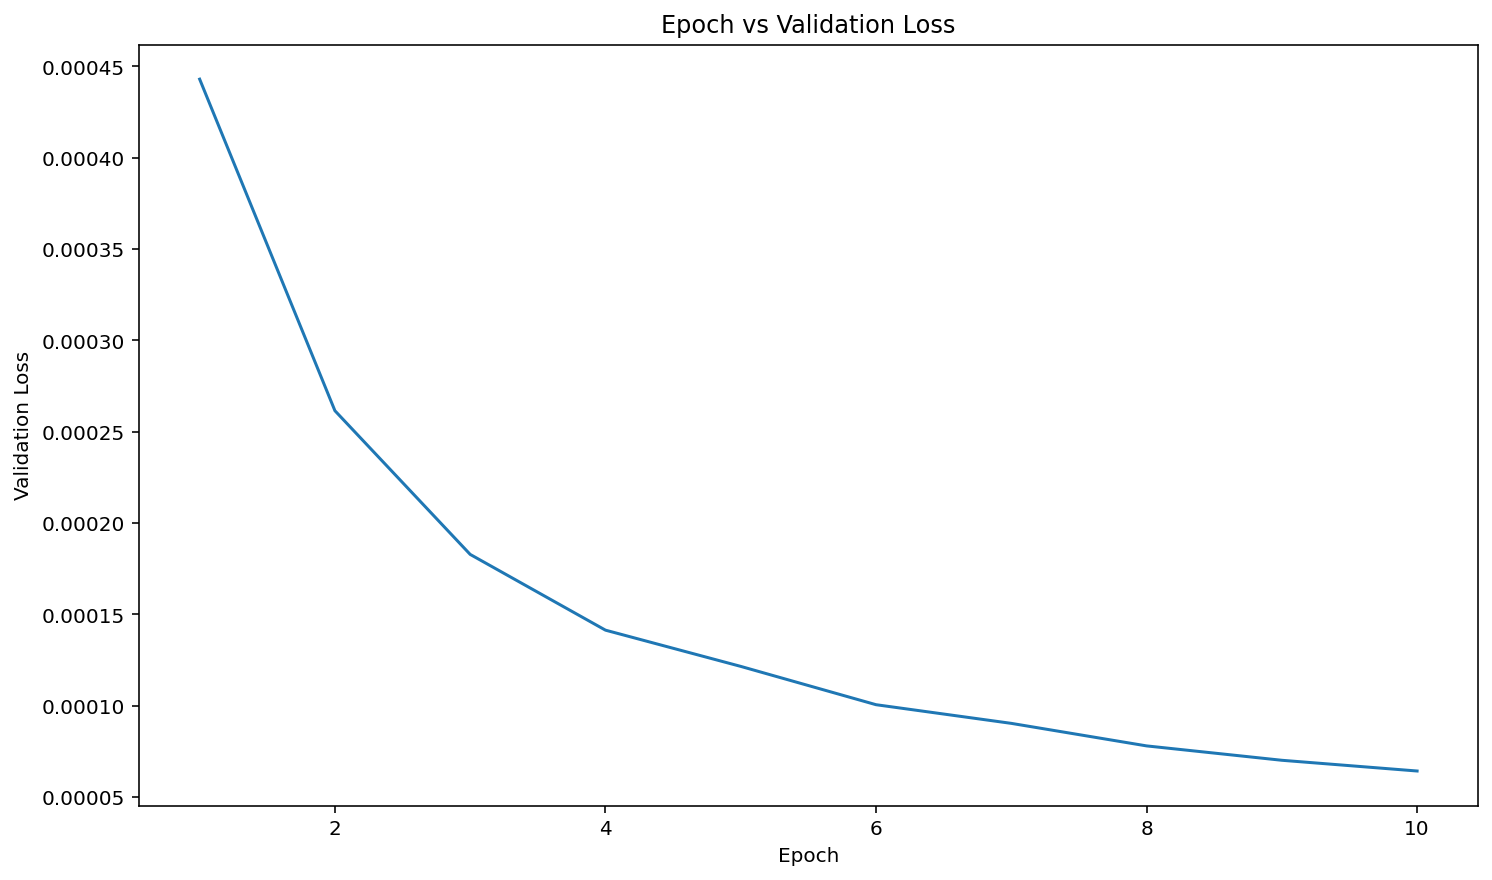

  1/261 [..............................] - ETA: 4s - loss: 5.6099e-05 - mse: 5.6099e-05 - mae: 0.0057 - r2: 0.9990

 49/261 [====>.........................] - ETA: 0s - loss: 5.8054e-05 - mse: 5.8054e-05 - mae: 0.0059 - r2: 0.9988

 99/261 [==========>...................] - ETA: 0s - loss: 6.1249e-05 - mse: 6.1249e-05 - mae: 0.0061 - r2: 0.9988

143/261 [===============>..............] - ETA: 0s - loss: 6.1728e-05 - mse: 6.1728e-05 - mae: 0.0061 - r2: 0.9987

173/261 [==================>...........] - ETA: 0s - loss: 6.0626e-05 - mse: 6.0626e-05 - mae: 0.0060 - r2: 0.9988

210/261 [=======================>......] - ETA: 0s - loss: 6.0585e-05 - mse: 6.0585e-05 - mae: 0.0060 - r2: 0.9988

234/261 [=========================>....] - ETA: 0s - loss: 6.0855e-05 - mse: 6.0855e-05 - mae: 0.0060 - r2: 0.9988

258/261 [============================>.] - ETA: 0s - loss: 6.1824e-05 - mse: 6.1824e-05 - mae: 0.0061 - r2: 0.9987

261/261 [==============================] - 0s 1ms/step - loss: 6.1849e-05 - mse: 6.1849e-05 - mae: 0.0061 - r2: 0.9987


Test MSE: 6.184885569382459e-05
Test MAE: 0.006058698985725641
Test R2: 0.9987216591835022


In [3]:
# Define the optimizer
import tensorflow as tf
from sklearn.metrics import r2_score
import tensorflow.keras.backend as K

# Run through multiple optimizers or select one to use
#optimizer_selected = tf.keras.optimizers.Adam(learning_rate=0.001)
#optimizer_selected = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
optimizer_selected = tf.keras.optimizers.Adagrad(learning_rate=0.01)
#optimizer_selected = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#optimizer_selected = tf.keras.optimizers.Adadelta(learning_rate=1.0)
#optimizer_selected = tf.keras.optimizers.Nadam(learning_rate=0.002)

# Define R-squared as a custom metric
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

# Compile the model
model.compile(optimizer=optimizer_selected, loss='mean_squared_error', metrics=['mse','mae', r2])

history = LossHistory()

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=16, validation_split=0.1, callbacks=[history])

# Plot epoch vs validation loss
plt.plot(range(1, len(history.losses) + 1), history.losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Epoch vs Validation Loss')
plt.show()

# Evaluate the model
loss, mse, mae, r2 = model.evaluate(X_test_reshaped, y_test)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R2:", r2)

In [3]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,476 (37.02 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,739 (18.52 KB)

 535/1879 [=======>......................] - ETA: 1s - loss: 0.2865 - mse: 0.2865 - mae: 0.3216 - r2: -5.8052

 575/1879 [========>.....................] - ETA: 1s - loss: 0.2684 - mse: 0.2684 - mae: 0.3080 - r2: -5.3701

 617/1879 [========>.....................] - ETA: 1s - loss: 0.2518 - mse: 0.2518 - mae: 0.2954 - r2: -4.9721

 652/1879 [=========>....................] - ETA: 1s - loss: 0.2394 - mse: 0.2394 - mae: 0.2856 - r2: -4.6752

 683/1879 [=========>....................] - ETA: 1s - loss: 0.2293 - mse: 0.2293 - mae: 0.2774 - r2: -4.4349

 721/1879 [==========>...................] - ETA: 1s - loss: 0.2179 - mse: 0.2179 - mae: 0.2676 - r2: -4.1621

 764/1879 [===========>..................] - ETA: 1s - loss: 0.2064 - mse: 0.2064 - mae: 0.2578 - r2: -3.8909

 801/1879 [===========>..................] - ETA: 1s - loss: 0.1974 - mse: 0.1974 - mae: 0.2497 - r2: -3.6759

 841/1879 [============>.................] - ETA: 1s - loss: 0.1885 - mse: 0.1885 - mae: 0.2417 - r2: -3.4652

 882/1879 [=============>................] - ETA: 1s - loss: 0.1802 - mse: 0.1802 - mae: 0.2338 - r2: -3.2666

 926/1879 [=============>................] - ETA: 1s - loss: 0.1720 - mse: 0.1720 - mae: 0.2261 - r2: -3.0720

 963/1879 [==============>...............] - ETA: 1s - loss: 0.1657 - mse: 0.1657 - mae: 0.2197 - r2: -2.9209

1005/1879 [===============>..............] - ETA: 1s - loss: 0.1590 - mse: 0.1590 - mae: 0.2130 - r2: -2.7629

1040/1879 [===============>..............] - ETA: 1s - loss: 0.1538 - mse: 0.1538 - mae: 0.2078 - r2: -2.6407

1080/1879 [================>.............] - ETA: 1s - loss: 0.1483 - mse: 0.1483 - mae: 0.2021 - r2: -2.5105

1123/1879 [================>.............] - ETA: 1s - loss: 0.1428 - mse: 0.1428 - mae: 0.1963 - r2: -2.3794

1148/1879 [=================>............] - ETA: 1s - loss: 0.1398 - mse: 0.1398 - mae: 0.1930 - r2: -2.3075

1180/1879 [=================>............] - ETA: 0s - loss: 0.1361 - mse: 0.1361 - mae: 0.1891 - r2: -2.2201

1207/1879 [==================>...........] - ETA: 0s - loss: 0.1331 - mse: 0.1331 - mae: 0.1859 - r2: -2.1497

1226/1879 [==================>...........] - ETA: 0s - loss: 0.1311 - mse: 0.1311 - mae: 0.1837 - r2: -2.1022

1255/1879 [===================>..........] - ETA: 0s - loss: 0.1281 - mse: 0.1281 - mae: 0.1805 - r2: -2.0322

1282/1879 [===================>..........] - ETA: 0s - loss: 0.1255 - mse: 0.1255 - mae: 0.1777 - r2: -1.9700

1313/1879 [===================>..........] - ETA: 0s - loss: 0.1226 - mse: 0.1226 - mae: 0.1745 - r2: -1.9016

1339/1879 [====================>.........] - ETA: 0s - loss: 0.1203 - mse: 0.1203 - mae: 0.1720 - r2: -1.8471

1369/1879 [====================>.........] - ETA: 0s - loss: 0.1178 - mse: 0.1178 - mae: 0.1692 - r2: -1.7861

1413/1879 [=====================>........] - ETA: 0s - loss: 0.1142 - mse: 0.1142 - mae: 0.1652 - r2: -1.7014

1452/1879 [======================>.......] - ETA: 0s - loss: 0.1112 - mse: 0.1112 - mae: 0.1619 - r2: -1.6302

1491/1879 [======================>.......] - ETA: 0s - loss: 0.1083 - mse: 0.1083 - mae: 0.1587 - r2: -1.5630

1532/1879 [=======================>......] - ETA: 0s - loss: 0.1055 - mse: 0.1055 - mae: 0.1554 - r2: -1.4958

1575/1879 [========================>.....] - ETA: 0s - loss: 0.1027 - mse: 0.1027 - mae: 0.1522 - r2: -1.4289

1616/1879 [========================>.....] - ETA: 0s - loss: 0.1001 - mse: 0.1001 - mae: 0.1493 - r2: -1.3685

1655/1879 [=========================>....] - ETA: 0s - loss: 0.0978 - mse: 0.0978 - mae: 0.1466 - r2: -1.3139

1689/1879 [=========================>....] - ETA: 0s - loss: 0.0959 - mse: 0.0959 - mae: 0.1443 - r2: -1.2681

1728/1879 [==========================>...] - ETA: 0s - loss: 0.0938 - mse: 0.0938 - mae: 0.1419 - r2: -1.2179

1768/1879 [===========================>..] - ETA: 0s - loss: 0.0917 - mse: 0.0917 - mae: 0.1394 - r2: -1.1688

1808/1879 [===========================>..] - ETA: 0s - loss: 0.0897 - mse: 0.0897 - mae: 0.1371 - r2: -1.1217

1843/1879 [============================>.] - ETA: 0s - loss: 0.0880 - mse: 0.0880 - mae: 0.1351 - r2: -1.0822

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0864 - mse: 0.0864 - mae: 0.1332 - r2: -1.0432 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0309 - val_r2: 0.9659


Epoch 2/50


   1/1879 [..............................] - ETA: 5s - loss: 0.0019 - mse: 0.0019 - mae: 0.0322 - r2: 0.9584

  44/1879 [..............................] - ETA: 2s - loss: 0.0016 - mse: 0.0016 - mae: 0.0310 - r2: 0.9628

  81/1879 [>.............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0304 - r2: 0.9670

 121/1879 [>.............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0300 - r2: 0.9691

 151/1879 [=>............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0303 - r2: 0.9685

 184/1879 [=>............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0300 - r2: 0.9684

 221/1879 [==>...........................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0298 - r2: 0.9687

 260/1879 [===>..........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0294 - r2: 0.9692

 296/1879 [===>..........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0292 - r2: 0.9695

 331/1879 [====>.........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0291 - r2: 0.9699

 362/1879 [====>.........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0290 - r2: 0.9703

 394/1879 [=====>........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9707

 418/1879 [=====>........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9709

 450/1879 [======>.......................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0284 - r2: 0.9709

 483/1879 [======>.......................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0283 - r2: 0.9710

 518/1879 [=======>......................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0281 - r2: 0.9714

 558/1879 [=======>......................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0281 - r2: 0.9716

 581/1879 [========>.....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0280 - r2: 0.9717

 610/1879 [========>.....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0278 - r2: 0.9721

 636/1879 [=========>....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0276 - r2: 0.9723

 659/1879 [=========>....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0275 - r2: 0.9725

 686/1879 [=========>....................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9728

 720/1879 [==========>...................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9728

 758/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9732

 786/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0271 - r2: 0.9736

 811/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9737

 850/1879 [============>.................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0269 - r2: 0.9739

 884/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0268 - r2: 0.9742

 910/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - r2: 0.9744

 949/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0265 - r2: 0.9746

 984/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9746

1021/1879 [===============>..............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9747

1049/1879 [===============>..............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0262 - r2: 0.9750

1082/1879 [================>.............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0261 - r2: 0.9752

1118/1879 [================>.............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - r2: 0.9754

1159/1879 [=================>............] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9755

1198/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0257 - r2: 0.9759

1228/1879 [==================>...........] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0256 - r2: 0.9760

1261/1879 [===================>..........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0255 - r2: 0.9762

1295/1879 [===================>..........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0255 - r2: 0.9762

1323/1879 [====================>.........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0255 - r2: 0.9763

1360/1879 [====================>.........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9765

1394/1879 [=====================>........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9767

1426/1879 [=====================>........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0252 - r2: 0.9768

1462/1879 [======================>.......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9769

1492/1879 [======================>.......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0251 - r2: 0.9769

1528/1879 [=======================>......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0250 - r2: 0.9771

1555/1879 [=======================>......] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0249 - r2: 0.9772

1590/1879 [========================>.....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0248 - r2: 0.9774

1628/1879 [========================>.....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9776

1664/1879 [=========================>....] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0246 - r2: 0.9778

1702/1879 [==========================>...] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9780

1741/1879 [==========================>...] - ETA: 0s - loss: 9.9750e-04 - mse: 9.9750e-04 - mae: 0.0245 - r2: 0.9781

1780/1879 [===========================>..] - ETA: 0s - loss: 9.8856e-04 - mse: 9.8856e-04 - mae: 0.0243 - r2: 0.9783

1818/1879 [============================>.] - ETA: 0s - loss: 9.8062e-04 - mse: 9.8062e-04 - mae: 0.0242 - r2: 0.9785

1856/1879 [============================>.] - ETA: 0s - loss: 9.7610e-04 - mse: 9.7610e-04 - mae: 0.0242 - r2: 0.9786

1879/1879 [==============================] - 3s 2ms/step - loss: 9.7325e-04 - mse: 9.7325e-04 - mae: 0.0242 - r2: 0.9787 - val_loss: 6.3484e-04 - val_mse: 6.3484e-04 - val_mae: 0.0199 - val_r2: 0.9861


Epoch 3/50


   1/1879 [..............................] - ETA: 17s - loss: 3.1470e-04 - mse: 3.1470e-04 - mae: 0.0130 - r2: 0.9922

  21/1879 [..............................] - ETA: 4s - loss: 5.5606e-04 - mse: 5.5606e-04 - mae: 0.0188 - r2: 0.9865 

  50/1879 [..............................] - ETA: 3s - loss: 5.7748e-04 - mse: 5.7748e-04 - mae: 0.0192 - r2: 0.9866

  81/1879 [>.............................] - ETA: 3s - loss: 5.5710e-04 - mse: 5.5710e-04 - mae: 0.0187 - r2: 0.9875

  99/1879 [>.............................] - ETA: 3s - loss: 5.6588e-04 - mse: 5.6588e-04 - mae: 0.0189 - r2: 0.9875

 123/1879 [>.............................] - ETA: 3s - loss: 5.5226e-04 - mse: 5.5226e-04 - mae: 0.0187 - r2: 0.9878

 153/1879 [=>............................] - ETA: 3s - loss: 5.6733e-04 - mse: 5.6733e-04 - mae: 0.0189 - r2: 0.9871

 179/1879 [=>............................] - ETA: 3s - loss: 5.6001e-04 - mse: 5.6001e-04 - mae: 0.0188 - r2: 0.9873

 208/1879 [==>...........................] - ETA: 3s - loss: 5.6861e-04 - mse: 5.6861e-04 - mae: 0.0190 - r2: 0.9871

 238/1879 [==>...........................] - ETA: 3s - loss: 5.8697e-04 - mse: 5.8697e-04 - mae: 0.0192 - r2: 0.9868

 276/1879 [===>..........................] - ETA: 2s - loss: 6.0486e-04 - mse: 6.0486e-04 - mae: 0.0195 - r2: 0.9863

 309/1879 [===>..........................] - ETA: 2s - loss: 6.0897e-04 - mse: 6.0897e-04 - mae: 0.0196 - r2: 0.9862

 343/1879 [====>.........................] - ETA: 2s - loss: 6.0128e-04 - mse: 6.0128e-04 - mae: 0.0194 - r2: 0.9863

 376/1879 [=====>........................] - ETA: 2s - loss: 5.9641e-04 - mse: 5.9641e-04 - mae: 0.0193 - r2: 0.9864

 415/1879 [=====>........................] - ETA: 2s - loss: 5.9097e-04 - mse: 5.9097e-04 - mae: 0.0192 - r2: 0.9866

 448/1879 [======>.......................] - ETA: 2s - loss: 5.8371e-04 - mse: 5.8371e-04 - mae: 0.0191 - r2: 0.9868

 485/1879 [======>.......................] - ETA: 2s - loss: 5.7754e-04 - mse: 5.7754e-04 - mae: 0.0190 - r2: 0.9870

 526/1879 [=======>......................] - ETA: 2s - loss: 5.7346e-04 - mse: 5.7346e-04 - mae: 0.0189 - r2: 0.9871

 568/1879 [========>.....................] - ETA: 2s - loss: 5.6618e-04 - mse: 5.6618e-04 - mae: 0.0188 - r2: 0.9872

 608/1879 [========>.....................] - ETA: 2s - loss: 5.5616e-04 - mse: 5.5616e-04 - mae: 0.0186 - r2: 0.9875

 646/1879 [=========>....................] - ETA: 1s - loss: 5.5125e-04 - mse: 5.5125e-04 - mae: 0.0185 - r2: 0.9876

 685/1879 [=========>....................] - ETA: 1s - loss: 5.5205e-04 - mse: 5.5205e-04 - mae: 0.0185 - r2: 0.9877

 719/1879 [==========>...................] - ETA: 1s - loss: 5.5790e-04 - mse: 5.5790e-04 - mae: 0.0186 - r2: 0.9876

 759/1879 [===========>..................] - ETA: 1s - loss: 5.6147e-04 - mse: 5.6147e-04 - mae: 0.0187 - r2: 0.9875

 789/1879 [===========>..................] - ETA: 1s - loss: 5.6885e-04 - mse: 5.6885e-04 - mae: 0.0188 - r2: 0.9874

 824/1879 [============>.................] - ETA: 1s - loss: 5.7020e-04 - mse: 5.7020e-04 - mae: 0.0189 - r2: 0.9874

 864/1879 [============>.................] - ETA: 1s - loss: 5.7550e-04 - mse: 5.7550e-04 - mae: 0.0190 - r2: 0.9874

 898/1879 [=============>................] - ETA: 1s - loss: 5.7199e-04 - mse: 5.7199e-04 - mae: 0.0189 - r2: 0.9874

 939/1879 [=============>................] - ETA: 1s - loss: 5.7273e-04 - mse: 5.7273e-04 - mae: 0.0189 - r2: 0.9874

 970/1879 [==============>...............] - ETA: 1s - loss: 5.7157e-04 - mse: 5.7157e-04 - mae: 0.0189 - r2: 0.9875

1011/1879 [===============>..............] - ETA: 1s - loss: 5.7203e-04 - mse: 5.7203e-04 - mae: 0.0189 - r2: 0.9874

1050/1879 [===============>..............] - ETA: 1s - loss: 5.6792e-04 - mse: 5.6792e-04 - mae: 0.0188 - r2: 0.9876

1088/1879 [================>.............] - ETA: 1s - loss: 5.6300e-04 - mse: 5.6300e-04 - mae: 0.0187 - r2: 0.9877

1126/1879 [================>.............] - ETA: 1s - loss: 5.5972e-04 - mse: 5.5972e-04 - mae: 0.0187 - r2: 0.9878

1161/1879 [=================>............] - ETA: 1s - loss: 5.5749e-04 - mse: 5.5749e-04 - mae: 0.0186 - r2: 0.9878

1186/1879 [=================>............] - ETA: 1s - loss: 5.5893e-04 - mse: 5.5893e-04 - mae: 0.0187 - r2: 0.9878

1216/1879 [==================>...........] - ETA: 0s - loss: 5.5479e-04 - mse: 5.5479e-04 - mae: 0.0186 - r2: 0.9879

1244/1879 [==================>...........] - ETA: 0s - loss: 5.5293e-04 - mse: 5.5293e-04 - mae: 0.0186 - r2: 0.9879

1280/1879 [===================>..........] - ETA: 0s - loss: 5.4977e-04 - mse: 5.4977e-04 - mae: 0.0185 - r2: 0.9880

1312/1879 [===================>..........] - ETA: 0s - loss: 5.5141e-04 - mse: 5.5141e-04 - mae: 0.0185 - r2: 0.9879

1343/1879 [====================>.........] - ETA: 0s - loss: 5.4880e-04 - mse: 5.4880e-04 - mae: 0.0185 - r2: 0.9880

1382/1879 [=====================>........] - ETA: 0s - loss: 5.4729e-04 - mse: 5.4729e-04 - mae: 0.0184 - r2: 0.9880

1412/1879 [=====================>........] - ETA: 0s - loss: 5.4439e-04 - mse: 5.4439e-04 - mae: 0.0184 - r2: 0.9881

1446/1879 [======================>.......] - ETA: 0s - loss: 5.3984e-04 - mse: 5.3984e-04 - mae: 0.0183 - r2: 0.9882

1463/1879 [======================>.......] - ETA: 0s - loss: 5.3760e-04 - mse: 5.3760e-04 - mae: 0.0183 - r2: 0.9882

1492/1879 [======================>.......] - ETA: 0s - loss: 5.3301e-04 - mse: 5.3301e-04 - mae: 0.0182 - r2: 0.9883

1515/1879 [=======================>......] - ETA: 0s - loss: 5.3007e-04 - mse: 5.3007e-04 - mae: 0.0181 - r2: 0.9884

1540/1879 [=======================>......] - ETA: 0s - loss: 5.2723e-04 - mse: 5.2723e-04 - mae: 0.0181 - r2: 0.9885

1558/1879 [=======================>......] - ETA: 0s - loss: 5.2767e-04 - mse: 5.2767e-04 - mae: 0.0181 - r2: 0.9884

1580/1879 [========================>.....] - ETA: 0s - loss: 5.3357e-04 - mse: 5.3357e-04 - mae: 0.0181 - r2: 0.9883

1611/1879 [========================>.....] - ETA: 0s - loss: 5.3634e-04 - mse: 5.3634e-04 - mae: 0.0182 - r2: 0.9882

1643/1879 [=========================>....] - ETA: 0s - loss: 5.3541e-04 - mse: 5.3541e-04 - mae: 0.0182 - r2: 0.9883

1682/1879 [=========================>....] - ETA: 0s - loss: 5.3446e-04 - mse: 5.3446e-04 - mae: 0.0181 - r2: 0.9883

1714/1879 [==========================>...] - ETA: 0s - loss: 5.3266e-04 - mse: 5.3266e-04 - mae: 0.0181 - r2: 0.9883

1746/1879 [==========================>...] - ETA: 0s - loss: 5.3227e-04 - mse: 5.3227e-04 - mae: 0.0181 - r2: 0.9883

1776/1879 [===========================>..] - ETA: 0s - loss: 5.3072e-04 - mse: 5.3072e-04 - mae: 0.0181 - r2: 0.9883

1807/1879 [===========================>..] - ETA: 0s - loss: 5.2937e-04 - mse: 5.2937e-04 - mae: 0.0181 - r2: 0.9883

1835/1879 [============================>.] - ETA: 0s - loss: 5.3220e-04 - mse: 5.3220e-04 - mae: 0.0181 - r2: 0.9883

1861/1879 [============================>.] - ETA: 0s - loss: 5.3496e-04 - mse: 5.3496e-04 - mae: 0.0181 - r2: 0.9883

1879/1879 [==============================] - 3s 2ms/step - loss: 5.3832e-04 - mse: 5.3832e-04 - mae: 0.0182 - r2: 0.9882 - val_loss: 4.1949e-04 - val_mse: 4.1949e-04 - val_mae: 0.0165 - val_r2: 0.9909


Epoch 4/50


   1/1879 [..............................] - ETA: 6s - loss: 4.7282e-04 - mse: 4.7282e-04 - mae: 0.0178 - r2: 0.9887

  38/1879 [..............................] - ETA: 2s - loss: 4.6301e-04 - mse: 4.6301e-04 - mae: 0.0172 - r2: 0.9896

  70/1879 [>.............................] - ETA: 2s - loss: 4.2239e-04 - mse: 4.2239e-04 - mae: 0.0163 - r2: 0.9907

 110/1879 [>.............................] - ETA: 2s - loss: 4.3528e-04 - mse: 4.3528e-04 - mae: 0.0165 - r2: 0.9904

 139/1879 [=>............................] - ETA: 2s - loss: 4.2298e-04 - mse: 4.2298e-04 - mae: 0.0163 - r2: 0.9907

 171/1879 [=>............................] - ETA: 2s - loss: 4.1838e-04 - mse: 4.1838e-04 - mae: 0.0161 - r2: 0.9909

 204/1879 [==>...........................] - ETA: 2s - loss: 4.2350e-04 - mse: 4.2350e-04 - mae: 0.0162 - r2: 0.9906

 241/1879 [==>...........................] - ETA: 2s - loss: 4.0722e-04 - mse: 4.0722e-04 - mae: 0.0159 - r2: 0.9910

 282/1879 [===>..........................] - ETA: 2s - loss: 4.0486e-04 - mse: 4.0486e-04 - mae: 0.0159 - r2: 0.9911

 323/1879 [====>.........................] - ETA: 2s - loss: 4.0573e-04 - mse: 4.0573e-04 - mae: 0.0159 - r2: 0.9911

 363/1879 [====>.........................] - ETA: 2s - loss: 3.9825e-04 - mse: 3.9825e-04 - mae: 0.0157 - r2: 0.9913

 391/1879 [=====>........................] - ETA: 2s - loss: 4.0331e-04 - mse: 4.0331e-04 - mae: 0.0158 - r2: 0.9912

 422/1879 [=====>........................] - ETA: 2s - loss: 4.0625e-04 - mse: 4.0625e-04 - mae: 0.0159 - r2: 0.9912

 454/1879 [======>.......................] - ETA: 2s - loss: 3.9919e-04 - mse: 3.9919e-04 - mae: 0.0157 - r2: 0.9913

 480/1879 [======>.......................] - ETA: 2s - loss: 4.0306e-04 - mse: 4.0306e-04 - mae: 0.0158 - r2: 0.9913

 522/1879 [=======>......................] - ETA: 1s - loss: 4.0346e-04 - mse: 4.0346e-04 - mae: 0.0158 - r2: 0.9912

 543/1879 [=======>......................] - ETA: 2s - loss: 4.0102e-04 - mse: 4.0102e-04 - mae: 0.0158 - r2: 0.9913

 558/1879 [=======>......................] - ETA: 2s - loss: 4.0116e-04 - mse: 4.0116e-04 - mae: 0.0158 - r2: 0.9913

 570/1879 [========>.....................] - ETA: 2s - loss: 4.0019e-04 - mse: 4.0019e-04 - mae: 0.0158 - r2: 0.9913

 594/1879 [========>.....................] - ETA: 2s - loss: 4.0058e-04 - mse: 4.0058e-04 - mae: 0.0158 - r2: 0.9913

 623/1879 [========>.....................] - ETA: 2s - loss: 3.9613e-04 - mse: 3.9613e-04 - mae: 0.0157 - r2: 0.9914

 661/1879 [=========>....................] - ETA: 1s - loss: 3.9678e-04 - mse: 3.9678e-04 - mae: 0.0157 - r2: 0.9913

 700/1879 [==========>...................] - ETA: 1s - loss: 3.9782e-04 - mse: 3.9782e-04 - mae: 0.0157 - r2: 0.9913

 732/1879 [==========>...................] - ETA: 1s - loss: 4.0396e-04 - mse: 4.0396e-04 - mae: 0.0159 - r2: 0.9912

 771/1879 [===========>..................] - ETA: 1s - loss: 4.0053e-04 - mse: 4.0053e-04 - mae: 0.0158 - r2: 0.9912

 810/1879 [===========>..................] - ETA: 1s - loss: 3.9786e-04 - mse: 3.9786e-04 - mae: 0.0157 - r2: 0.9913

 850/1879 [============>.................] - ETA: 1s - loss: 3.9421e-04 - mse: 3.9421e-04 - mae: 0.0157 - r2: 0.9914

 877/1879 [=============>................] - ETA: 1s - loss: 3.9024e-04 - mse: 3.9024e-04 - mae: 0.0156 - r2: 0.9915

 912/1879 [=============>................] - ETA: 1s - loss: 3.8533e-04 - mse: 3.8533e-04 - mae: 0.0155 - r2: 0.9916

 953/1879 [==============>...............] - ETA: 1s - loss: 3.8003e-04 - mse: 3.8003e-04 - mae: 0.0154 - r2: 0.9917

 983/1879 [==============>...............] - ETA: 1s - loss: 3.7568e-04 - mse: 3.7568e-04 - mae: 0.0153 - r2: 0.9918

1018/1879 [===============>..............] - ETA: 1s - loss: 3.7169e-04 - mse: 3.7169e-04 - mae: 0.0152 - r2: 0.9919

1051/1879 [===============>..............] - ETA: 1s - loss: 3.7197e-04 - mse: 3.7197e-04 - mae: 0.0152 - r2: 0.9919

1081/1879 [================>.............] - ETA: 1s - loss: 3.7372e-04 - mse: 3.7372e-04 - mae: 0.0152 - r2: 0.9918

1115/1879 [================>.............] - ETA: 1s - loss: 3.7745e-04 - mse: 3.7745e-04 - mae: 0.0153 - r2: 0.9918

1138/1879 [=================>............] - ETA: 1s - loss: 3.7526e-04 - mse: 3.7526e-04 - mae: 0.0153 - r2: 0.9918

1170/1879 [=================>............] - ETA: 1s - loss: 3.7245e-04 - mse: 3.7245e-04 - mae: 0.0152 - r2: 0.9918

1201/1879 [==================>...........] - ETA: 1s - loss: 3.7076e-04 - mse: 3.7076e-04 - mae: 0.0152 - r2: 0.9919

1227/1879 [==================>...........] - ETA: 1s - loss: 3.6804e-04 - mse: 3.6804e-04 - mae: 0.0151 - r2: 0.9919

1257/1879 [===================>..........] - ETA: 0s - loss: 3.6516e-04 - mse: 3.6516e-04 - mae: 0.0151 - r2: 0.9920

1289/1879 [===================>..........] - ETA: 0s - loss: 3.6326e-04 - mse: 3.6326e-04 - mae: 0.0150 - r2: 0.9920

1323/1879 [====================>.........] - ETA: 0s - loss: 3.6114e-04 - mse: 3.6114e-04 - mae: 0.0150 - r2: 0.9921

1363/1879 [====================>.........] - ETA: 0s - loss: 3.5743e-04 - mse: 3.5743e-04 - mae: 0.0149 - r2: 0.9922

1388/1879 [=====================>........] - ETA: 0s - loss: 3.5586e-04 - mse: 3.5586e-04 - mae: 0.0149 - r2: 0.9922

1418/1879 [=====================>........] - ETA: 0s - loss: 3.5547e-04 - mse: 3.5547e-04 - mae: 0.0149 - r2: 0.9922

1431/1879 [=====================>........] - ETA: 0s - loss: 3.5606e-04 - mse: 3.5606e-04 - mae: 0.0149 - r2: 0.9922

1456/1879 [======================>.......] - ETA: 0s - loss: 3.5495e-04 - mse: 3.5495e-04 - mae: 0.0148 - r2: 0.9922

1485/1879 [======================>.......] - ETA: 0s - loss: 3.5356e-04 - mse: 3.5356e-04 - mae: 0.0148 - r2: 0.9923

1523/1879 [=======================>......] - ETA: 0s - loss: 3.5130e-04 - mse: 3.5130e-04 - mae: 0.0148 - r2: 0.9923

1562/1879 [=======================>......] - ETA: 0s - loss: 3.5343e-04 - mse: 3.5343e-04 - mae: 0.0148 - r2: 0.9923

1606/1879 [========================>.....] - ETA: 0s - loss: 3.5550e-04 - mse: 3.5550e-04 - mae: 0.0149 - r2: 0.9922

1646/1879 [=========================>....] - ETA: 0s - loss: 3.5441e-04 - mse: 3.5441e-04 - mae: 0.0148 - r2: 0.9922

1687/1879 [=========================>....] - ETA: 0s - loss: 3.5211e-04 - mse: 3.5211e-04 - mae: 0.0148 - r2: 0.9923

1728/1879 [==========================>...] - ETA: 0s - loss: 3.5021e-04 - mse: 3.5021e-04 - mae: 0.0147 - r2: 0.9923

1767/1879 [===========================>..] - ETA: 0s - loss: 3.5346e-04 - mse: 3.5346e-04 - mae: 0.0148 - r2: 0.9923

1803/1879 [===========================>..] - ETA: 0s - loss: 3.5223e-04 - mse: 3.5223e-04 - mae: 0.0148 - r2: 0.9923

1836/1879 [============================>.] - ETA: 0s - loss: 3.5138e-04 - mse: 3.5138e-04 - mae: 0.0147 - r2: 0.9923

1868/1879 [============================>.] - ETA: 0s - loss: 3.4991e-04 - mse: 3.4991e-04 - mae: 0.0147 - r2: 0.9924

1879/1879 [==============================] - 3s 2ms/step - loss: 3.5073e-04 - mse: 3.5073e-04 - mae: 0.0147 - r2: 0.9923 - val_loss: 8.9146e-04 - val_mse: 8.9146e-04 - val_mae: 0.0262 - val_r2: 0.9808


Epoch 5/50


   1/1879 [..............................] - ETA: 6s - loss: 8.1976e-04 - mse: 8.1976e-04 - mae: 0.0273 - r2: 0.9813

  27/1879 [..............................] - ETA: 3s - loss: 7.2317e-04 - mse: 7.2317e-04 - mae: 0.0217 - r2: 0.9853

  57/1879 [..............................] - ETA: 3s - loss: 6.5712e-04 - mse: 6.5712e-04 - mae: 0.0205 - r2: 0.9870

  83/1879 [>.............................] - ETA: 3s - loss: 6.7340e-04 - mse: 6.7340e-04 - mae: 0.0208 - r2: 0.9862

 111/1879 [>.............................] - ETA: 3s - loss: 6.8076e-04 - mse: 6.8076e-04 - mae: 0.0210 - r2: 0.9859

 140/1879 [=>............................] - ETA: 3s - loss: 6.4834e-04 - mse: 6.4834e-04 - mae: 0.0203 - r2: 0.9865

 169/1879 [=>............................] - ETA: 3s - loss: 6.2588e-04 - mse: 6.2588e-04 - mae: 0.0199 - r2: 0.9871

 200/1879 [==>...........................] - ETA: 3s - loss: 5.7891e-04 - mse: 5.7891e-04 - mae: 0.0190 - r2: 0.9880

 229/1879 [==>...........................] - ETA: 2s - loss: 5.3392e-04 - mse: 5.3392e-04 - mae: 0.0181 - r2: 0.9889

 258/1879 [===>..........................] - ETA: 2s - loss: 5.1475e-04 - mse: 5.1475e-04 - mae: 0.0177 - r2: 0.9893

 296/1879 [===>..........................] - ETA: 2s - loss: 5.5071e-04 - mse: 5.5071e-04 - mae: 0.0182 - r2: 0.9886

 333/1879 [====>.........................] - ETA: 2s - loss: 5.5909e-04 - mse: 5.5909e-04 - mae: 0.0183 - r2: 0.9883

 377/1879 [=====>........................] - ETA: 2s - loss: 5.2743e-04 - mse: 5.2743e-04 - mae: 0.0177 - r2: 0.9889

 422/1879 [=====>........................] - ETA: 2s - loss: 5.0932e-04 - mse: 5.0932e-04 - mae: 0.0174 - r2: 0.9892

 456/1879 [======>.......................] - ETA: 2s - loss: 5.0851e-04 - mse: 5.0851e-04 - mae: 0.0174 - r2: 0.9891

 496/1879 [======>.......................] - ETA: 2s - loss: 4.9450e-04 - mse: 4.9450e-04 - mae: 0.0172 - r2: 0.9894

 509/1879 [=======>......................] - ETA: 2s - loss: 4.8714e-04 - mse: 4.8714e-04 - mae: 0.0170 - r2: 0.9895

 537/1879 [=======>......................] - ETA: 2s - loss: 4.7257e-04 - mse: 4.7257e-04 - mae: 0.0168 - r2: 0.9898

 577/1879 [========>.....................] - ETA: 2s - loss: 4.5317e-04 - mse: 4.5317e-04 - mae: 0.0163 - r2: 0.9903

 612/1879 [========>.....................] - ETA: 2s - loss: 4.4478e-04 - mse: 4.4478e-04 - mae: 0.0162 - r2: 0.9904

 642/1879 [=========>....................] - ETA: 1s - loss: 4.3501e-04 - mse: 4.3501e-04 - mae: 0.0160 - r2: 0.9906

 663/1879 [=========>....................] - ETA: 1s - loss: 4.2688e-04 - mse: 4.2688e-04 - mae: 0.0158 - r2: 0.9908

 702/1879 [==========>...................] - ETA: 1s - loss: 4.1598e-04 - mse: 4.1598e-04 - mae: 0.0156 - r2: 0.9911

 738/1879 [==========>...................] - ETA: 1s - loss: 4.1004e-04 - mse: 4.1004e-04 - mae: 0.0155 - r2: 0.9912

 779/1879 [===========>..................] - ETA: 1s - loss: 4.0046e-04 - mse: 4.0046e-04 - mae: 0.0153 - r2: 0.9914

 821/1879 [============>.................] - ETA: 1s - loss: 3.8797e-04 - mse: 3.8797e-04 - mae: 0.0151 - r2: 0.9916

 861/1879 [============>.................] - ETA: 1s - loss: 3.7915e-04 - mse: 3.7915e-04 - mae: 0.0149 - r2: 0.9918

 898/1879 [=============>................] - ETA: 1s - loss: 3.7256e-04 - mse: 3.7256e-04 - mae: 0.0148 - r2: 0.9920

 939/1879 [=============>................] - ETA: 1s - loss: 3.6784e-04 - mse: 3.6784e-04 - mae: 0.0147 - r2: 0.9920

 978/1879 [==============>...............] - ETA: 1s - loss: 3.7066e-04 - mse: 3.7066e-04 - mae: 0.0147 - r2: 0.9919

1013/1879 [===============>..............] - ETA: 1s - loss: 3.7347e-04 - mse: 3.7347e-04 - mae: 0.0148 - r2: 0.9919

1047/1879 [===============>..............] - ETA: 1s - loss: 3.7406e-04 - mse: 3.7406e-04 - mae: 0.0148 - r2: 0.9919

1078/1879 [================>.............] - ETA: 1s - loss: 3.7164e-04 - mse: 3.7164e-04 - mae: 0.0148 - r2: 0.9919

1115/1879 [================>.............] - ETA: 1s - loss: 3.7193e-04 - mse: 3.7193e-04 - mae: 0.0148 - r2: 0.9919

1151/1879 [=================>............] - ETA: 1s - loss: 3.6708e-04 - mse: 3.6708e-04 - mae: 0.0147 - r2: 0.9920

1186/1879 [=================>............] - ETA: 1s - loss: 3.6291e-04 - mse: 3.6291e-04 - mae: 0.0146 - r2: 0.9921

1226/1879 [==================>...........] - ETA: 0s - loss: 3.5967e-04 - mse: 3.5967e-04 - mae: 0.0146 - r2: 0.9922

1265/1879 [===================>..........] - ETA: 0s - loss: 3.5484e-04 - mse: 3.5484e-04 - mae: 0.0145 - r2: 0.9923

1304/1879 [===================>..........] - ETA: 0s - loss: 3.5072e-04 - mse: 3.5072e-04 - mae: 0.0144 - r2: 0.9924

1339/1879 [====================>.........] - ETA: 0s - loss: 3.4619e-04 - mse: 3.4619e-04 - mae: 0.0143 - r2: 0.9925

1380/1879 [=====================>........] - ETA: 0s - loss: 3.4242e-04 - mse: 3.4242e-04 - mae: 0.0142 - r2: 0.9925

1420/1879 [=====================>........] - ETA: 0s - loss: 3.3918e-04 - mse: 3.3918e-04 - mae: 0.0141 - r2: 0.9926

1458/1879 [======================>.......] - ETA: 0s - loss: 3.4027e-04 - mse: 3.4027e-04 - mae: 0.0142 - r2: 0.9926

1488/1879 [======================>.......] - ETA: 0s - loss: 3.5084e-04 - mse: 3.5084e-04 - mae: 0.0144 - r2: 0.9924

1523/1879 [=======================>......] - ETA: 0s - loss: 3.5762e-04 - mse: 3.5762e-04 - mae: 0.0145 - r2: 0.9922

1565/1879 [=======================>......] - ETA: 0s - loss: 3.6444e-04 - mse: 3.6444e-04 - mae: 0.0146 - r2: 0.9921

1604/1879 [========================>.....] - ETA: 0s - loss: 3.6249e-04 - mse: 3.6249e-04 - mae: 0.0146 - r2: 0.9921

1646/1879 [=========================>....] - ETA: 0s - loss: 3.6164e-04 - mse: 3.6164e-04 - mae: 0.0146 - r2: 0.9922

1679/1879 [=========================>....] - ETA: 0s - loss: 3.6287e-04 - mse: 3.6287e-04 - mae: 0.0146 - r2: 0.9921

1718/1879 [==========================>...] - ETA: 0s - loss: 3.6143e-04 - mse: 3.6143e-04 - mae: 0.0146 - r2: 0.9921

1755/1879 [===========================>..] - ETA: 0s - loss: 3.5769e-04 - mse: 3.5769e-04 - mae: 0.0145 - r2: 0.9922

1795/1879 [===========================>..] - ETA: 0s - loss: 3.5827e-04 - mse: 3.5827e-04 - mae: 0.0145 - r2: 0.9922

1833/1879 [============================>.] - ETA: 0s - loss: 3.5455e-04 - mse: 3.5455e-04 - mae: 0.0144 - r2: 0.9923

1872/1879 [============================>.] - ETA: 0s - loss: 3.5011e-04 - mse: 3.5011e-04 - mae: 0.0143 - r2: 0.9924

1879/1879 [==============================] - 3s 2ms/step - loss: 3.4927e-04 - mse: 3.4927e-04 - mae: 0.0143 - r2: 0.9924 - val_loss: 1.1479e-04 - val_mse: 1.1479e-04 - val_mae: 0.0085 - val_r2: 0.9975


Epoch 6/50


   1/1879 [..............................] - ETA: 9s - loss: 4.4173e-05 - mse: 4.4173e-05 - mae: 0.0056 - r2: 0.9993

  37/1879 [..............................] - ETA: 2s - loss: 1.7101e-04 - mse: 1.7101e-04 - mae: 0.0103 - r2: 0.9963

  74/1879 [>.............................] - ETA: 2s - loss: 1.8421e-04 - mse: 1.8421e-04 - mae: 0.0107 - r2: 0.9960

 109/1879 [>.............................] - ETA: 2s - loss: 2.3371e-04 - mse: 2.3371e-04 - mae: 0.0119 - r2: 0.9949

 147/1879 [=>............................] - ETA: 2s - loss: 2.6175e-04 - mse: 2.6175e-04 - mae: 0.0125 - r2: 0.9943

 181/1879 [=>............................] - ETA: 2s - loss: 2.7404e-04 - mse: 2.7404e-04 - mae: 0.0128 - r2: 0.9940

 223/1879 [==>...........................] - ETA: 2s - loss: 3.0544e-04 - mse: 3.0544e-04 - mae: 0.0136 - r2: 0.9934

 262/1879 [===>..........................] - ETA: 2s - loss: 2.9422e-04 - mse: 2.9422e-04 - mae: 0.0133 - r2: 0.9936

 302/1879 [===>..........................] - ETA: 2s - loss: 2.8783e-04 - mse: 2.8783e-04 - mae: 0.0132 - r2: 0.9937

 340/1879 [====>.........................] - ETA: 2s - loss: 2.6968e-04 - mse: 2.6968e-04 - mae: 0.0127 - r2: 0.9941

 365/1879 [====>.........................] - ETA: 2s - loss: 2.5820e-04 - mse: 2.5820e-04 - mae: 0.0124 - r2: 0.9943

 394/1879 [=====>........................] - ETA: 2s - loss: 2.5312e-04 - mse: 2.5312e-04 - mae: 0.0123 - r2: 0.9945

 420/1879 [=====>........................] - ETA: 2s - loss: 2.5362e-04 - mse: 2.5362e-04 - mae: 0.0123 - r2: 0.9945

 462/1879 [======>.......................] - ETA: 2s - loss: 2.4868e-04 - mse: 2.4868e-04 - mae: 0.0122 - r2: 0.9946

 501/1879 [======>.......................] - ETA: 1s - loss: 2.4059e-04 - mse: 2.4059e-04 - mae: 0.0120 - r2: 0.9948

 538/1879 [=======>......................] - ETA: 1s - loss: 2.3423e-04 - mse: 2.3423e-04 - mae: 0.0118 - r2: 0.9949

 571/1879 [========>.....................] - ETA: 1s - loss: 2.3018e-04 - mse: 2.3018e-04 - mae: 0.0117 - r2: 0.9950

 612/1879 [========>.....................] - ETA: 1s - loss: 2.2538e-04 - mse: 2.2538e-04 - mae: 0.0116 - r2: 0.9951

 656/1879 [=========>....................] - ETA: 1s - loss: 2.2122e-04 - mse: 2.2122e-04 - mae: 0.0115 - r2: 0.9952

 693/1879 [==========>...................] - ETA: 1s - loss: 2.1856e-04 - mse: 2.1856e-04 - mae: 0.0114 - r2: 0.9952

 730/1879 [==========>...................] - ETA: 1s - loss: 2.1220e-04 - mse: 2.1220e-04 - mae: 0.0112 - r2: 0.9954

 767/1879 [===========>..................] - ETA: 1s - loss: 2.1076e-04 - mse: 2.1076e-04 - mae: 0.0112 - r2: 0.9954

 805/1879 [===========>..................] - ETA: 1s - loss: 2.0794e-04 - mse: 2.0794e-04 - mae: 0.0111 - r2: 0.9955

 840/1879 [============>.................] - ETA: 1s - loss: 2.0843e-04 - mse: 2.0843e-04 - mae: 0.0111 - r2: 0.9955

 877/1879 [=============>................] - ETA: 1s - loss: 2.0836e-04 - mse: 2.0836e-04 - mae: 0.0111 - r2: 0.9955

 922/1879 [=============>................] - ETA: 1s - loss: 2.2023e-04 - mse: 2.2023e-04 - mae: 0.0114 - r2: 0.9952

 962/1879 [==============>...............] - ETA: 1s - loss: 2.7688e-04 - mse: 2.7688e-04 - mae: 0.0122 - r2: 0.9940

1002/1879 [==============>...............] - ETA: 1s - loss: 3.0436e-04 - mse: 3.0436e-04 - mae: 0.0127 - r2: 0.9934

1033/1879 [===============>..............] - ETA: 1s - loss: 3.0951e-04 - mse: 3.0951e-04 - mae: 0.0128 - r2: 0.9933

1074/1879 [================>.............] - ETA: 1s - loss: 3.0531e-04 - mse: 3.0531e-04 - mae: 0.0127 - r2: 0.9934

1117/1879 [================>.............] - ETA: 1s - loss: 3.0079e-04 - mse: 3.0079e-04 - mae: 0.0127 - r2: 0.9935

1158/1879 [=================>............] - ETA: 0s - loss: 2.9936e-04 - mse: 2.9936e-04 - mae: 0.0127 - r2: 0.9935

1199/1879 [==================>...........] - ETA: 0s - loss: 2.9589e-04 - mse: 2.9589e-04 - mae: 0.0126 - r2: 0.9936

1233/1879 [==================>...........] - ETA: 0s - loss: 2.9079e-04 - mse: 2.9079e-04 - mae: 0.0125 - r2: 0.9937

1269/1879 [===================>..........] - ETA: 0s - loss: 2.8602e-04 - mse: 2.8602e-04 - mae: 0.0124 - r2: 0.9938

1307/1879 [===================>..........] - ETA: 0s - loss: 2.8207e-04 - mse: 2.8207e-04 - mae: 0.0123 - r2: 0.9939

1343/1879 [====================>.........] - ETA: 0s - loss: 2.8027e-04 - mse: 2.8027e-04 - mae: 0.0123 - r2: 0.9939

1384/1879 [=====================>........] - ETA: 0s - loss: 2.7630e-04 - mse: 2.7630e-04 - mae: 0.0122 - r2: 0.9940

1424/1879 [=====================>........] - ETA: 0s - loss: 2.7391e-04 - mse: 2.7391e-04 - mae: 0.0122 - r2: 0.9941

1462/1879 [======================>.......] - ETA: 0s - loss: 2.7010e-04 - mse: 2.7010e-04 - mae: 0.0121 - r2: 0.9942

1499/1879 [======================>.......] - ETA: 0s - loss: 2.6623e-04 - mse: 2.6623e-04 - mae: 0.0120 - r2: 0.9942

1540/1879 [=======================>......] - ETA: 0s - loss: 2.6202e-04 - mse: 2.6202e-04 - mae: 0.0119 - r2: 0.9943

1580/1879 [========================>.....] - ETA: 0s - loss: 2.5799e-04 - mse: 2.5799e-04 - mae: 0.0118 - r2: 0.9944

1617/1879 [========================>.....] - ETA: 0s - loss: 2.5447e-04 - mse: 2.5447e-04 - mae: 0.0117 - r2: 0.9945

1653/1879 [=========================>....] - ETA: 0s - loss: 2.5049e-04 - mse: 2.5049e-04 - mae: 0.0116 - r2: 0.9946

1694/1879 [==========================>...] - ETA: 0s - loss: 2.4696e-04 - mse: 2.4696e-04 - mae: 0.0115 - r2: 0.9947

1728/1879 [==========================>...] - ETA: 0s - loss: 2.4454e-04 - mse: 2.4454e-04 - mae: 0.0115 - r2: 0.9947

1767/1879 [===========================>..] - ETA: 0s - loss: 2.4390e-04 - mse: 2.4390e-04 - mae: 0.0115 - r2: 0.9947

1810/1879 [===========================>..] - ETA: 0s - loss: 2.4153e-04 - mse: 2.4153e-04 - mae: 0.0114 - r2: 0.9948

1852/1879 [============================>.] - ETA: 0s - loss: 2.3817e-04 - mse: 2.3817e-04 - mae: 0.0113 - r2: 0.9948

1879/1879 [==============================] - 3s 1ms/step - loss: 2.3594e-04 - mse: 2.3594e-04 - mae: 0.0113 - r2: 0.9949 - val_loss: 7.8222e-05 - val_mse: 7.8222e-05 - val_mae: 0.0070 - val_r2: 0.9983


Epoch 7/50


   1/1879 [..............................] - ETA: 14s - loss: 4.4865e-05 - mse: 4.4865e-05 - mae: 0.0054 - r2: 0.9989

  16/1879 [..............................] - ETA: 6s - loss: 6.9858e-05 - mse: 6.9858e-05 - mae: 0.0067 - r2: 0.9986 

  45/1879 [..............................] - ETA: 4s - loss: 7.1266e-05 - mse: 7.1266e-05 - mae: 0.0066 - r2: 0.9985

  76/1879 [>.............................] - ETA: 3s - loss: 6.9867e-05 - mse: 6.9867e-05 - mae: 0.0066 - r2: 0.9985

 104/1879 [>.............................] - ETA: 3s - loss: 7.4568e-05 - mse: 7.4568e-05 - mae: 0.0068 - r2: 0.9984

 141/1879 [=>............................] - ETA: 3s - loss: 7.6553e-05 - mse: 7.6553e-05 - mae: 0.0069 - r2: 0.9983

 185/1879 [=>............................] - ETA: 2s - loss: 9.5441e-05 - mse: 9.5441e-05 - mae: 0.0076 - r2: 0.9980

 225/1879 [==>...........................] - ETA: 2s - loss: 9.5591e-05 - mse: 9.5591e-05 - mae: 0.0077 - r2: 0.9980

 266/1879 [===>..........................] - ETA: 2s - loss: 1.0163e-04 - mse: 1.0163e-04 - mae: 0.0080 - r2: 0.9979

 303/1879 [===>..........................] - ETA: 2s - loss: 1.0708e-04 - mse: 1.0708e-04 - mae: 0.0081 - r2: 0.9977

 339/1879 [====>.........................] - ETA: 2s - loss: 1.0600e-04 - mse: 1.0600e-04 - mae: 0.0081 - r2: 0.9977

 374/1879 [====>.........................] - ETA: 2s - loss: 1.1211e-04 - mse: 1.1211e-04 - mae: 0.0083 - r2: 0.9976

 413/1879 [=====>........................] - ETA: 2s - loss: 1.2256e-04 - mse: 1.2256e-04 - mae: 0.0086 - r2: 0.9973

 452/1879 [======>.......................] - ETA: 2s - loss: 1.3471e-04 - mse: 1.3471e-04 - mae: 0.0090 - r2: 0.9971

 482/1879 [======>.......................] - ETA: 2s - loss: 1.3929e-04 - mse: 1.3929e-04 - mae: 0.0092 - r2: 0.9970

 512/1879 [=======>......................] - ETA: 2s - loss: 1.3849e-04 - mse: 1.3849e-04 - mae: 0.0091 - r2: 0.9970

 542/1879 [=======>......................] - ETA: 2s - loss: 1.3837e-04 - mse: 1.3837e-04 - mae: 0.0091 - r2: 0.9970

 573/1879 [========>.....................] - ETA: 1s - loss: 1.3664e-04 - mse: 1.3664e-04 - mae: 0.0091 - r2: 0.9970

 606/1879 [========>.....................] - ETA: 1s - loss: 1.3475e-04 - mse: 1.3475e-04 - mae: 0.0090 - r2: 0.9970

 639/1879 [=========>....................] - ETA: 1s - loss: 1.3371e-04 - mse: 1.3371e-04 - mae: 0.0090 - r2: 0.9971

 668/1879 [=========>....................] - ETA: 1s - loss: 1.3480e-04 - mse: 1.3480e-04 - mae: 0.0090 - r2: 0.9970

 702/1879 [==========>...................] - ETA: 1s - loss: 1.3988e-04 - mse: 1.3988e-04 - mae: 0.0092 - r2: 0.9969

 735/1879 [==========>...................] - ETA: 1s - loss: 1.4681e-04 - mse: 1.4681e-04 - mae: 0.0094 - r2: 0.9968

 769/1879 [===========>..................] - ETA: 1s - loss: 1.5260e-04 - mse: 1.5260e-04 - mae: 0.0095 - r2: 0.9967

 809/1879 [===========>..................] - ETA: 1s - loss: 1.5358e-04 - mse: 1.5358e-04 - mae: 0.0096 - r2: 0.9967

 837/1879 [============>.................] - ETA: 1s - loss: 1.5389e-04 - mse: 1.5389e-04 - mae: 0.0096 - r2: 0.9967

 870/1879 [============>.................] - ETA: 1s - loss: 1.5582e-04 - mse: 1.5582e-04 - mae: 0.0097 - r2: 0.9966

 911/1879 [=============>................] - ETA: 1s - loss: 1.5514e-04 - mse: 1.5514e-04 - mae: 0.0097 - r2: 0.9966

 943/1879 [==============>...............] - ETA: 1s - loss: 1.5330e-04 - mse: 1.5330e-04 - mae: 0.0096 - r2: 0.9966

 974/1879 [==============>...............] - ETA: 1s - loss: 1.5305e-04 - mse: 1.5305e-04 - mae: 0.0096 - r2: 0.9966

1016/1879 [===============>..............] - ETA: 1s - loss: 1.5360e-04 - mse: 1.5360e-04 - mae: 0.0096 - r2: 0.9966

1055/1879 [===============>..............] - ETA: 1s - loss: 1.5427e-04 - mse: 1.5427e-04 - mae: 0.0097 - r2: 0.9966

1095/1879 [================>.............] - ETA: 1s - loss: 1.5401e-04 - mse: 1.5401e-04 - mae: 0.0096 - r2: 0.9966

1135/1879 [=================>............] - ETA: 1s - loss: 1.5363e-04 - mse: 1.5363e-04 - mae: 0.0096 - r2: 0.9966

1175/1879 [=================>............] - ETA: 1s - loss: 1.5432e-04 - mse: 1.5432e-04 - mae: 0.0097 - r2: 0.9966

1204/1879 [==================>...........] - ETA: 0s - loss: 1.5273e-04 - mse: 1.5273e-04 - mae: 0.0096 - r2: 0.9966

1233/1879 [==================>...........] - ETA: 0s - loss: 1.5173e-04 - mse: 1.5173e-04 - mae: 0.0096 - r2: 0.9967

1261/1879 [===================>..........] - ETA: 0s - loss: 1.5265e-04 - mse: 1.5265e-04 - mae: 0.0096 - r2: 0.9966

1300/1879 [===================>..........] - ETA: 0s - loss: 1.5947e-04 - mse: 1.5947e-04 - mae: 0.0098 - r2: 0.9965

1310/1879 [===================>..........] - ETA: 0s - loss: 1.6174e-04 - mse: 1.6174e-04 - mae: 0.0098 - r2: 0.9965

1344/1879 [====================>.........] - ETA: 0s - loss: 1.6481e-04 - mse: 1.6481e-04 - mae: 0.0099 - r2: 0.9964

1385/1879 [=====================>........] - ETA: 0s - loss: 1.6357e-04 - mse: 1.6357e-04 - mae: 0.0099 - r2: 0.9964

1426/1879 [=====================>........] - ETA: 0s - loss: 1.6270e-04 - mse: 1.6270e-04 - mae: 0.0098 - r2: 0.9965

1462/1879 [======================>.......] - ETA: 0s - loss: 1.6239e-04 - mse: 1.6239e-04 - mae: 0.0098 - r2: 0.9965

1499/1879 [======================>.......] - ETA: 0s - loss: 1.6070e-04 - mse: 1.6070e-04 - mae: 0.0098 - r2: 0.9965

1532/1879 [=======================>......] - ETA: 0s - loss: 1.5966e-04 - mse: 1.5966e-04 - mae: 0.0098 - r2: 0.9965

1573/1879 [========================>.....] - ETA: 0s - loss: 1.5793e-04 - mse: 1.5793e-04 - mae: 0.0097 - r2: 0.9966

1603/1879 [========================>.....] - ETA: 0s - loss: 1.5800e-04 - mse: 1.5800e-04 - mae: 0.0097 - r2: 0.9966

1628/1879 [========================>.....] - ETA: 0s - loss: 1.5722e-04 - mse: 1.5722e-04 - mae: 0.0097 - r2: 0.9966

1657/1879 [=========================>....] - ETA: 0s - loss: 1.5586e-04 - mse: 1.5586e-04 - mae: 0.0097 - r2: 0.9966

1695/1879 [==========================>...] - ETA: 0s - loss: 1.5460e-04 - mse: 1.5460e-04 - mae: 0.0096 - r2: 0.9966

1719/1879 [==========================>...] - ETA: 0s - loss: 1.5366e-04 - mse: 1.5366e-04 - mae: 0.0096 - r2: 0.9967

1752/1879 [==========================>...] - ETA: 0s - loss: 1.5303e-04 - mse: 1.5303e-04 - mae: 0.0096 - r2: 0.9967

1783/1879 [===========================>..] - ETA: 0s - loss: 1.5288e-04 - mse: 1.5288e-04 - mae: 0.0096 - r2: 0.9967

1816/1879 [===========================>..] - ETA: 0s - loss: 1.5305e-04 - mse: 1.5305e-04 - mae: 0.0096 - r2: 0.9967

1848/1879 [============================>.] - ETA: 0s - loss: 1.5230e-04 - mse: 1.5230e-04 - mae: 0.0095 - r2: 0.9967

1876/1879 [============================>.] - ETA: 0s - loss: 1.5166e-04 - mse: 1.5166e-04 - mae: 0.0095 - r2: 0.9967

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5160e-04 - mse: 1.5160e-04 - mae: 0.0095 - r2: 0.9967 - val_loss: 7.9778e-05 - val_mse: 7.9778e-05 - val_mae: 0.0069 - val_r2: 0.9982


Epoch 8/50


   1/1879 [..............................] - ETA: 7s - loss: 1.3869e-04 - mse: 1.3869e-04 - mae: 0.0097 - r2: 0.9980

  26/1879 [..............................] - ETA: 3s - loss: 1.6837e-04 - mse: 1.6837e-04 - mae: 0.0105 - r2: 0.9965

  56/1879 [..............................] - ETA: 3s - loss: 1.5270e-04 - mse: 1.5270e-04 - mae: 0.0100 - r2: 0.9968

  88/1879 [>.............................] - ETA: 3s - loss: 1.6758e-04 - mse: 1.6758e-04 - mae: 0.0103 - r2: 0.9963

 117/1879 [>.............................] - ETA: 3s - loss: 1.5925e-04 - mse: 1.5925e-04 - mae: 0.0100 - r2: 0.9965

 154/1879 [=>............................] - ETA: 2s - loss: 1.4890e-04 - mse: 1.4890e-04 - mae: 0.0097 - r2: 0.9967

 183/1879 [=>............................] - ETA: 2s - loss: 1.4485e-04 - mse: 1.4485e-04 - mae: 0.0095 - r2: 0.9968

 225/1879 [==>...........................] - ETA: 2s - loss: 1.5020e-04 - mse: 1.5020e-04 - mae: 0.0097 - r2: 0.9968

 262/1879 [===>..........................] - ETA: 2s - loss: 1.4650e-04 - mse: 1.4650e-04 - mae: 0.0096 - r2: 0.9969

 302/1879 [===>..........................] - ETA: 2s - loss: 1.4894e-04 - mse: 1.4894e-04 - mae: 0.0096 - r2: 0.9968

 330/1879 [====>.........................] - ETA: 2s - loss: 1.6228e-04 - mse: 1.6228e-04 - mae: 0.0100 - r2: 0.9964

 359/1879 [====>.........................] - ETA: 2s - loss: 1.5830e-04 - mse: 1.5830e-04 - mae: 0.0098 - r2: 0.9965

 397/1879 [=====>........................] - ETA: 2s - loss: 1.5054e-04 - mse: 1.5054e-04 - mae: 0.0096 - r2: 0.9967

 422/1879 [=====>........................] - ETA: 2s - loss: 1.4602e-04 - mse: 1.4602e-04 - mae: 0.0094 - r2: 0.9968

 452/1879 [======>.......................] - ETA: 2s - loss: 1.4271e-04 - mse: 1.4271e-04 - mae: 0.0093 - r2: 0.9969

 490/1879 [======>.......................] - ETA: 2s - loss: 1.3700e-04 - mse: 1.3700e-04 - mae: 0.0091 - r2: 0.9970

 530/1879 [=======>......................] - ETA: 2s - loss: 1.3514e-04 - mse: 1.3514e-04 - mae: 0.0090 - r2: 0.9971

 560/1879 [=======>......................] - ETA: 2s - loss: 1.3486e-04 - mse: 1.3486e-04 - mae: 0.0090 - r2: 0.9970

 598/1879 [========>.....................] - ETA: 1s - loss: 1.4283e-04 - mse: 1.4283e-04 - mae: 0.0093 - r2: 0.9969

 642/1879 [=========>....................] - ETA: 1s - loss: 1.5258e-04 - mse: 1.5258e-04 - mae: 0.0095 - r2: 0.9967

 679/1879 [=========>....................] - ETA: 1s - loss: 1.5272e-04 - mse: 1.5272e-04 - mae: 0.0095 - r2: 0.9967

 714/1879 [==========>...................] - ETA: 1s - loss: 1.5339e-04 - mse: 1.5339e-04 - mae: 0.0096 - r2: 0.9967

 752/1879 [===========>..................] - ETA: 1s - loss: 1.6009e-04 - mse: 1.6009e-04 - mae: 0.0098 - r2: 0.9965

 793/1879 [===========>..................] - ETA: 1s - loss: 1.6869e-04 - mse: 1.6869e-04 - mae: 0.0100 - r2: 0.9963

 821/1879 [============>.................] - ETA: 1s - loss: 1.7079e-04 - mse: 1.7079e-04 - mae: 0.0101 - r2: 0.9963

 863/1879 [============>.................] - ETA: 1s - loss: 1.7076e-04 - mse: 1.7076e-04 - mae: 0.0101 - r2: 0.9963

 901/1879 [=============>................] - ETA: 1s - loss: 1.6924e-04 - mse: 1.6924e-04 - mae: 0.0101 - r2: 0.9963

 942/1879 [==============>...............] - ETA: 1s - loss: 1.6917e-04 - mse: 1.6917e-04 - mae: 0.0101 - r2: 0.9963

 974/1879 [==============>...............] - ETA: 1s - loss: 1.7282e-04 - mse: 1.7282e-04 - mae: 0.0102 - r2: 0.9962

1006/1879 [===============>..............] - ETA: 1s - loss: 1.7691e-04 - mse: 1.7691e-04 - mae: 0.0103 - r2: 0.9962

1038/1879 [===============>..............] - ETA: 1s - loss: 1.7787e-04 - mse: 1.7787e-04 - mae: 0.0103 - r2: 0.9961

1075/1879 [================>.............] - ETA: 1s - loss: 1.7535e-04 - mse: 1.7535e-04 - mae: 0.0103 - r2: 0.9962

1108/1879 [================>.............] - ETA: 1s - loss: 1.7361e-04 - mse: 1.7361e-04 - mae: 0.0102 - r2: 0.9962

1145/1879 [=================>............] - ETA: 1s - loss: 1.7036e-04 - mse: 1.7036e-04 - mae: 0.0101 - r2: 0.9963

1179/1879 [=================>............] - ETA: 1s - loss: 1.6760e-04 - mse: 1.6760e-04 - mae: 0.0100 - r2: 0.9963

1219/1879 [==================>...........] - ETA: 0s - loss: 1.6393e-04 - mse: 1.6393e-04 - mae: 0.0099 - r2: 0.9964

1253/1879 [===================>..........] - ETA: 0s - loss: 1.6145e-04 - mse: 1.6145e-04 - mae: 0.0098 - r2: 0.9965

1291/1879 [===================>..........] - ETA: 0s - loss: 1.5791e-04 - mse: 1.5791e-04 - mae: 0.0096 - r2: 0.9965

1324/1879 [====================>.........] - ETA: 0s - loss: 1.5567e-04 - mse: 1.5567e-04 - mae: 0.0096 - r2: 0.9966

1362/1879 [====================>.........] - ETA: 0s - loss: 1.5341e-04 - mse: 1.5341e-04 - mae: 0.0095 - r2: 0.9967

1397/1879 [=====================>........] - ETA: 0s - loss: 1.5197e-04 - mse: 1.5197e-04 - mae: 0.0094 - r2: 0.9967

1436/1879 [=====================>........] - ETA: 0s - loss: 1.5439e-04 - mse: 1.5439e-04 - mae: 0.0095 - r2: 0.9966

1472/1879 [======================>.......] - ETA: 0s - loss: 1.5278e-04 - mse: 1.5278e-04 - mae: 0.0095 - r2: 0.9967

1501/1879 [======================>.......] - ETA: 0s - loss: 1.5200e-04 - mse: 1.5200e-04 - mae: 0.0094 - r2: 0.9967

1528/1879 [=======================>......] - ETA: 0s - loss: 1.5161e-04 - mse: 1.5161e-04 - mae: 0.0094 - r2: 0.9967

1561/1879 [=======================>......] - ETA: 0s - loss: 1.4995e-04 - mse: 1.4995e-04 - mae: 0.0094 - r2: 0.9967

1593/1879 [========================>.....] - ETA: 0s - loss: 1.4841e-04 - mse: 1.4841e-04 - mae: 0.0093 - r2: 0.9967

1628/1879 [========================>.....] - ETA: 0s - loss: 1.4669e-04 - mse: 1.4669e-04 - mae: 0.0093 - r2: 0.9968

1669/1879 [=========================>....] - ETA: 0s - loss: 1.4602e-04 - mse: 1.4602e-04 - mae: 0.0092 - r2: 0.9968

1709/1879 [==========================>...] - ETA: 0s - loss: 1.4586e-04 - mse: 1.4586e-04 - mae: 0.0092 - r2: 0.9968

1753/1879 [==========================>...] - ETA: 0s - loss: 1.4507e-04 - mse: 1.4507e-04 - mae: 0.0092 - r2: 0.9968

1776/1879 [===========================>..] - ETA: 0s - loss: 1.4446e-04 - mse: 1.4446e-04 - mae: 0.0092 - r2: 0.9968

1818/1879 [============================>.] - ETA: 0s - loss: 1.4743e-04 - mse: 1.4743e-04 - mae: 0.0093 - r2: 0.9968

1851/1879 [============================>.] - ETA: 0s - loss: 1.4831e-04 - mse: 1.4831e-04 - mae: 0.0093 - r2: 0.9967

1879/1879 [==============================] - 3s 2ms/step - loss: 1.4721e-04 - mse: 1.4721e-04 - mae: 0.0093 - r2: 0.9968 - val_loss: 6.3491e-05 - val_mse: 6.3491e-05 - val_mae: 0.0061 - val_r2: 0.9986


Epoch 9/50


   1/1879 [..............................] - ETA: 13s - loss: 7.1483e-05 - mse: 7.1483e-05 - mae: 0.0060 - r2: 0.9984

  35/1879 [..............................] - ETA: 2s - loss: 8.7075e-05 - mse: 8.7075e-05 - mae: 0.0071 - r2: 0.9980 

  71/1879 [>.............................] - ETA: 2s - loss: 8.2273e-05 - mse: 8.2273e-05 - mae: 0.0070 - r2: 0.9982

 109/1879 [>.............................] - ETA: 2s - loss: 6.9502e-05 - mse: 6.9502e-05 - mae: 0.0064 - r2: 0.9985

 148/1879 [=>............................] - ETA: 2s - loss: 7.1597e-05 - mse: 7.1597e-05 - mae: 0.0066 - r2: 0.9984

 182/1879 [=>............................] - ETA: 2s - loss: 7.0570e-05 - mse: 7.0570e-05 - mae: 0.0066 - r2: 0.9984

 214/1879 [==>...........................] - ETA: 2s - loss: 6.6857e-05 - mse: 6.6857e-05 - mae: 0.0064 - r2: 0.9985

 242/1879 [==>...........................] - ETA: 2s - loss: 6.4980e-05 - mse: 6.4980e-05 - mae: 0.0063 - r2: 0.9985

 278/1879 [===>..........................] - ETA: 2s - loss: 6.4476e-05 - mse: 6.4476e-05 - mae: 0.0063 - r2: 0.9985

 321/1879 [====>.........................] - ETA: 2s - loss: 6.4077e-05 - mse: 6.4077e-05 - mae: 0.0063 - r2: 0.9985

 361/1879 [====>.........................] - ETA: 2s - loss: 7.7450e-05 - mse: 7.7450e-05 - mae: 0.0068 - r2: 0.9983

 403/1879 [=====>........................] - ETA: 2s - loss: 8.7091e-05 - mse: 8.7091e-05 - mae: 0.0072 - r2: 0.9981

 443/1879 [======>.......................] - ETA: 1s - loss: 8.8299e-05 - mse: 8.8299e-05 - mae: 0.0072 - r2: 0.9981

 483/1879 [======>.......................] - ETA: 1s - loss: 8.6077e-05 - mse: 8.6077e-05 - mae: 0.0071 - r2: 0.9981

 514/1879 [=======>......................] - ETA: 1s - loss: 8.9251e-05 - mse: 8.9251e-05 - mae: 0.0072 - r2: 0.9981

 522/1879 [=======>......................] - ETA: 1s - loss: 8.9895e-05 - mse: 8.9895e-05 - mae: 0.0073 - r2: 0.9980

 535/1879 [=======>......................] - ETA: 2s - loss: 9.1617e-05 - mse: 9.1617e-05 - mae: 0.0073 - r2: 0.9980

 572/1879 [========>.....................] - ETA: 1s - loss: 9.7799e-05 - mse: 9.7799e-05 - mae: 0.0076 - r2: 0.9979

 617/1879 [========>.....................] - ETA: 1s - loss: 1.0415e-04 - mse: 1.0415e-04 - mae: 0.0078 - r2: 0.9977

 656/1879 [=========>....................] - ETA: 1s - loss: 1.2407e-04 - mse: 1.2407e-04 - mae: 0.0083 - r2: 0.9973

 697/1879 [==========>...................] - ETA: 1s - loss: 1.2944e-04 - mse: 1.2944e-04 - mae: 0.0085 - r2: 0.9972

 730/1879 [==========>...................] - ETA: 1s - loss: 1.2830e-04 - mse: 1.2830e-04 - mae: 0.0085 - r2: 0.9973

 764/1879 [===========>..................] - ETA: 1s - loss: 1.2509e-04 - mse: 1.2509e-04 - mae: 0.0084 - r2: 0.9973

 800/1879 [===========>..................] - ETA: 1s - loss: 1.2210e-04 - mse: 1.2210e-04 - mae: 0.0083 - r2: 0.9974

 841/1879 [============>.................] - ETA: 1s - loss: 1.2053e-04 - mse: 1.2053e-04 - mae: 0.0082 - r2: 0.9974

 879/1879 [=============>................] - ETA: 1s - loss: 1.1867e-04 - mse: 1.1867e-04 - mae: 0.0082 - r2: 0.9975

 921/1879 [=============>................] - ETA: 1s - loss: 1.2172e-04 - mse: 1.2172e-04 - mae: 0.0083 - r2: 0.9974

 963/1879 [==============>...............] - ETA: 1s - loss: 1.2167e-04 - mse: 1.2167e-04 - mae: 0.0083 - r2: 0.9974

1002/1879 [==============>...............] - ETA: 1s - loss: 1.2042e-04 - mse: 1.2042e-04 - mae: 0.0083 - r2: 0.9974

1044/1879 [===============>..............] - ETA: 1s - loss: 1.1830e-04 - mse: 1.1830e-04 - mae: 0.0082 - r2: 0.9975

1087/1879 [================>.............] - ETA: 1s - loss: 1.1520e-04 - mse: 1.1520e-04 - mae: 0.0080 - r2: 0.9975

1122/1879 [================>.............] - ETA: 1s - loss: 1.1473e-04 - mse: 1.1473e-04 - mae: 0.0080 - r2: 0.9976

1150/1879 [=================>............] - ETA: 1s - loss: 1.1407e-04 - mse: 1.1407e-04 - mae: 0.0080 - r2: 0.9976

1190/1879 [=================>............] - ETA: 0s - loss: 1.1500e-04 - mse: 1.1500e-04 - mae: 0.0081 - r2: 0.9975

1230/1879 [==================>...........] - ETA: 0s - loss: 1.1611e-04 - mse: 1.1611e-04 - mae: 0.0081 - r2: 0.9975

1270/1879 [===================>..........] - ETA: 0s - loss: 1.1556e-04 - mse: 1.1556e-04 - mae: 0.0081 - r2: 0.9975

1299/1879 [===================>..........] - ETA: 0s - loss: 1.1486e-04 - mse: 1.1486e-04 - mae: 0.0081 - r2: 0.9975

1338/1879 [====================>.........] - ETA: 0s - loss: 1.1318e-04 - mse: 1.1318e-04 - mae: 0.0080 - r2: 0.9976

1376/1879 [====================>.........] - ETA: 0s - loss: 1.1170e-04 - mse: 1.1170e-04 - mae: 0.0080 - r2: 0.9976

1414/1879 [=====================>........] - ETA: 0s - loss: 1.1013e-04 - mse: 1.1013e-04 - mae: 0.0079 - r2: 0.9976

1451/1879 [======================>.......] - ETA: 0s - loss: 1.0827e-04 - mse: 1.0827e-04 - mae: 0.0078 - r2: 0.9977

1489/1879 [======================>.......] - ETA: 0s - loss: 1.0674e-04 - mse: 1.0674e-04 - mae: 0.0078 - r2: 0.9977

1506/1879 [=======================>......] - ETA: 0s - loss: 1.0607e-04 - mse: 1.0607e-04 - mae: 0.0078 - r2: 0.9977

1534/1879 [=======================>......] - ETA: 0s - loss: 1.0595e-04 - mse: 1.0595e-04 - mae: 0.0078 - r2: 0.9977

1574/1879 [========================>.....] - ETA: 0s - loss: 1.0644e-04 - mse: 1.0644e-04 - mae: 0.0078 - r2: 0.9977

1615/1879 [========================>.....] - ETA: 0s - loss: 1.0562e-04 - mse: 1.0562e-04 - mae: 0.0078 - r2: 0.9977

1658/1879 [=========================>....] - ETA: 0s - loss: 1.0447e-04 - mse: 1.0447e-04 - mae: 0.0077 - r2: 0.9978

1698/1879 [==========================>...] - ETA: 0s - loss: 1.0427e-04 - mse: 1.0427e-04 - mae: 0.0077 - r2: 0.9978

1736/1879 [==========================>...] - ETA: 0s - loss: 1.0419e-04 - mse: 1.0419e-04 - mae: 0.0077 - r2: 0.9978

1777/1879 [===========================>..] - ETA: 0s - loss: 1.0358e-04 - mse: 1.0358e-04 - mae: 0.0077 - r2: 0.9978

1822/1879 [============================>.] - ETA: 0s - loss: 1.0341e-04 - mse: 1.0341e-04 - mae: 0.0077 - r2: 0.9978

1861/1879 [============================>.] - ETA: 0s - loss: 1.0273e-04 - mse: 1.0273e-04 - mae: 0.0077 - r2: 0.9978

1879/1879 [==============================] - 3s 2ms/step - loss: 1.0239e-04 - mse: 1.0239e-04 - mae: 0.0077 - r2: 0.9978 - val_loss: 6.0316e-05 - val_mse: 6.0316e-05 - val_mae: 0.0062 - val_r2: 0.9987


Epoch 10/50


   1/1879 [..............................] - ETA: 7s - loss: 8.5391e-05 - mse: 8.5391e-05 - mae: 0.0072 - r2: 0.9987

  40/1879 [..............................] - ETA: 2s - loss: 3.7411e-05 - mse: 3.7411e-05 - mae: 0.0049 - r2: 0.9992

  81/1879 [>.............................] - ETA: 2s - loss: 3.6473e-05 - mse: 3.6473e-05 - mae: 0.0048 - r2: 0.9992

 120/1879 [>.............................] - ETA: 2s - loss: 3.6985e-05 - mse: 3.6985e-05 - mae: 0.0048 - r2: 0.9992

 153/1879 [=>............................] - ETA: 2s - loss: 4.0496e-05 - mse: 4.0496e-05 - mae: 0.0050 - r2: 0.9991

 191/1879 [==>...........................] - ETA: 2s - loss: 4.2214e-05 - mse: 4.2214e-05 - mae: 0.0051 - r2: 0.9991

 228/1879 [==>...........................] - ETA: 2s - loss: 4.3136e-05 - mse: 4.3136e-05 - mae: 0.0052 - r2: 0.9991

 270/1879 [===>..........................] - ETA: 2s - loss: 4.2440e-05 - mse: 4.2440e-05 - mae: 0.0052 - r2: 0.9991

 313/1879 [===>..........................] - ETA: 2s - loss: 4.3309e-05 - mse: 4.3309e-05 - mae: 0.0052 - r2: 0.9991

 343/1879 [====>.........................] - ETA: 2s - loss: 4.3021e-05 - mse: 4.3021e-05 - mae: 0.0052 - r2: 0.9991

 382/1879 [=====>........................] - ETA: 1s - loss: 4.1986e-05 - mse: 4.1986e-05 - mae: 0.0051 - r2: 0.9991

 422/1879 [=====>........................] - ETA: 1s - loss: 4.1943e-05 - mse: 4.1943e-05 - mae: 0.0051 - r2: 0.9991

 457/1879 [======>.......................] - ETA: 1s - loss: 4.3479e-05 - mse: 4.3479e-05 - mae: 0.0052 - r2: 0.9991

 464/1879 [======>.......................] - ETA: 2s - loss: 4.3776e-05 - mse: 4.3776e-05 - mae: 0.0052 - r2: 0.9990

 487/1879 [======>.......................] - ETA: 2s - loss: 4.4214e-05 - mse: 4.4214e-05 - mae: 0.0052 - r2: 0.9990

 509/1879 [=======>......................] - ETA: 2s - loss: 4.3809e-05 - mse: 4.3809e-05 - mae: 0.0052 - r2: 0.9990

 537/1879 [=======>......................] - ETA: 2s - loss: 4.3810e-05 - mse: 4.3810e-05 - mae: 0.0052 - r2: 0.9990

 567/1879 [========>.....................] - ETA: 2s - loss: 4.9372e-05 - mse: 4.9372e-05 - mae: 0.0054 - r2: 0.9989

 602/1879 [========>.....................] - ETA: 1s - loss: 5.8257e-05 - mse: 5.8257e-05 - mae: 0.0057 - r2: 0.9987

 640/1879 [=========>....................] - ETA: 1s - loss: 6.9381e-05 - mse: 6.9381e-05 - mae: 0.0061 - r2: 0.9985

 676/1879 [=========>....................] - ETA: 1s - loss: 7.4185e-05 - mse: 7.4185e-05 - mae: 0.0063 - r2: 0.9984

 718/1879 [==========>...................] - ETA: 1s - loss: 7.4088e-05 - mse: 7.4088e-05 - mae: 0.0063 - r2: 0.9984

 761/1879 [===========>..................] - ETA: 1s - loss: 7.3248e-05 - mse: 7.3248e-05 - mae: 0.0063 - r2: 0.9984

 800/1879 [===========>..................] - ETA: 1s - loss: 7.2927e-05 - mse: 7.2927e-05 - mae: 0.0063 - r2: 0.9984

 830/1879 [============>.................] - ETA: 1s - loss: 7.3484e-05 - mse: 7.3484e-05 - mae: 0.0064 - r2: 0.9984

 872/1879 [============>.................] - ETA: 1s - loss: 7.2870e-05 - mse: 7.2870e-05 - mae: 0.0063 - r2: 0.9984

 909/1879 [=============>................] - ETA: 1s - loss: 7.7221e-05 - mse: 7.7221e-05 - mae: 0.0065 - r2: 0.9983

 950/1879 [==============>...............] - ETA: 1s - loss: 8.2401e-05 - mse: 8.2401e-05 - mae: 0.0067 - r2: 0.9982

 987/1879 [==============>...............] - ETA: 1s - loss: 8.4271e-05 - mse: 8.4271e-05 - mae: 0.0068 - r2: 0.9982

1016/1879 [===============>..............] - ETA: 1s - loss: 8.4225e-05 - mse: 8.4225e-05 - mae: 0.0068 - r2: 0.9982

1054/1879 [===============>..............] - ETA: 1s - loss: 8.3063e-05 - mse: 8.3063e-05 - mae: 0.0068 - r2: 0.9982

1094/1879 [================>.............] - ETA: 1s - loss: 8.2547e-05 - mse: 8.2547e-05 - mae: 0.0068 - r2: 0.9982

1134/1879 [=================>............] - ETA: 1s - loss: 8.3944e-05 - mse: 8.3944e-05 - mae: 0.0068 - r2: 0.9982

1174/1879 [=================>............] - ETA: 1s - loss: 8.5389e-05 - mse: 8.5389e-05 - mae: 0.0069 - r2: 0.9981

1212/1879 [==================>...........] - ETA: 0s - loss: 8.6244e-05 - mse: 8.6244e-05 - mae: 0.0069 - r2: 0.9981

1240/1879 [==================>...........] - ETA: 0s - loss: 8.5860e-05 - mse: 8.5860e-05 - mae: 0.0069 - r2: 0.9981

1276/1879 [===================>..........] - ETA: 0s - loss: 8.5647e-05 - mse: 8.5647e-05 - mae: 0.0069 - r2: 0.9981

1300/1879 [===================>..........] - ETA: 0s - loss: 8.6089e-05 - mse: 8.6089e-05 - mae: 0.0070 - r2: 0.9981

1308/1879 [===================>..........] - ETA: 0s - loss: 8.6521e-05 - mse: 8.6521e-05 - mae: 0.0070 - r2: 0.9981

1323/1879 [====================>.........] - ETA: 0s - loss: 8.6975e-05 - mse: 8.6975e-05 - mae: 0.0070 - r2: 0.9981

1352/1879 [====================>.........] - ETA: 0s - loss: 8.6952e-05 - mse: 8.6952e-05 - mae: 0.0070 - r2: 0.9981

1381/1879 [=====================>........] - ETA: 0s - loss: 8.6947e-05 - mse: 8.6947e-05 - mae: 0.0070 - r2: 0.9981

1409/1879 [=====================>........] - ETA: 0s - loss: 8.7283e-05 - mse: 8.7283e-05 - mae: 0.0070 - r2: 0.9981

1440/1879 [=====================>........] - ETA: 0s - loss: 8.7554e-05 - mse: 8.7554e-05 - mae: 0.0070 - r2: 0.9981

1467/1879 [======================>.......] - ETA: 0s - loss: 8.7484e-05 - mse: 8.7484e-05 - mae: 0.0071 - r2: 0.9981

1500/1879 [======================>.......] - ETA: 0s - loss: 8.6650e-05 - mse: 8.6650e-05 - mae: 0.0070 - r2: 0.9981

1536/1879 [=======================>......] - ETA: 0s - loss: 8.5254e-05 - mse: 8.5254e-05 - mae: 0.0069 - r2: 0.9981

1578/1879 [========================>.....] - ETA: 0s - loss: 8.3955e-05 - mse: 8.3955e-05 - mae: 0.0069 - r2: 0.9982

1617/1879 [========================>.....] - ETA: 0s - loss: 8.2914e-05 - mse: 8.2914e-05 - mae: 0.0069 - r2: 0.9982

1654/1879 [=========================>....] - ETA: 0s - loss: 8.1966e-05 - mse: 8.1966e-05 - mae: 0.0068 - r2: 0.9982

1692/1879 [==========================>...] - ETA: 0s - loss: 8.0965e-05 - mse: 8.0965e-05 - mae: 0.0068 - r2: 0.9982

1731/1879 [==========================>...] - ETA: 0s - loss: 7.9807e-05 - mse: 7.9807e-05 - mae: 0.0067 - r2: 0.9983

1774/1879 [===========================>..] - ETA: 0s - loss: 7.8700e-05 - mse: 7.8700e-05 - mae: 0.0067 - r2: 0.9983

1803/1879 [===========================>..] - ETA: 0s - loss: 7.8095e-05 - mse: 7.8095e-05 - mae: 0.0066 - r2: 0.9983

1838/1879 [============================>.] - ETA: 0s - loss: 7.7845e-05 - mse: 7.7845e-05 - mae: 0.0066 - r2: 0.9983

1877/1879 [============================>.] - ETA: 0s - loss: 7.9508e-05 - mse: 7.9508e-05 - mae: 0.0067 - r2: 0.9983

1879/1879 [==============================] - 3s 2ms/step - loss: 7.9537e-05 - mse: 7.9537e-05 - mae: 0.0067 - r2: 0.9983 - val_loss: 6.0967e-05 - val_mse: 6.0967e-05 - val_mae: 0.0062 - val_r2: 0.9987


Epoch 11/50


   1/1879 [..............................] - ETA: 7s - loss: 7.8630e-05 - mse: 7.8630e-05 - mae: 0.0075 - r2: 0.9986

  37/1879 [..............................] - ETA: 2s - loss: 5.6884e-05 - mse: 5.6884e-05 - mae: 0.0058 - r2: 0.9988

  69/1879 [>.............................] - ETA: 2s - loss: 6.1156e-05 - mse: 6.1156e-05 - mae: 0.0061 - r2: 0.9987

  83/1879 [>.............................] - ETA: 3s - loss: 6.0652e-05 - mse: 6.0652e-05 - mae: 0.0061 - r2: 0.9987

 112/1879 [>.............................] - ETA: 3s - loss: 6.6094e-05 - mse: 6.6094e-05 - mae: 0.0064 - r2: 0.9986

 149/1879 [=>............................] - ETA: 2s - loss: 9.2960e-05 - mse: 9.2960e-05 - mae: 0.0073 - r2: 0.9980

 189/1879 [==>...........................] - ETA: 2s - loss: 1.0430e-04 - mse: 1.0430e-04 - mae: 0.0078 - r2: 0.9978

 230/1879 [==>...........................] - ETA: 2s - loss: 1.0401e-04 - mse: 1.0401e-04 - mae: 0.0078 - r2: 0.9978

 267/1879 [===>..........................] - ETA: 2s - loss: 1.0913e-04 - mse: 1.0913e-04 - mae: 0.0080 - r2: 0.9977

 291/1879 [===>..........................] - ETA: 2s - loss: 1.0482e-04 - mse: 1.0482e-04 - mae: 0.0078 - r2: 0.9978

 332/1879 [====>.........................] - ETA: 2s - loss: 1.0087e-04 - mse: 1.0087e-04 - mae: 0.0077 - r2: 0.9978

 372/1879 [====>.........................] - ETA: 2s - loss: 1.0724e-04 - mse: 1.0724e-04 - mae: 0.0079 - r2: 0.9976

 415/1879 [=====>........................] - ETA: 2s - loss: 1.0725e-04 - mse: 1.0725e-04 - mae: 0.0080 - r2: 0.9976

 457/1879 [======>.......................] - ETA: 2s - loss: 1.0194e-04 - mse: 1.0194e-04 - mae: 0.0078 - r2: 0.9977

 497/1879 [======>.......................] - ETA: 1s - loss: 1.0096e-04 - mse: 1.0096e-04 - mae: 0.0077 - r2: 0.9978

 536/1879 [=======>......................] - ETA: 1s - loss: 9.9746e-05 - mse: 9.9746e-05 - mae: 0.0077 - r2: 0.9978

 573/1879 [========>.....................] - ETA: 1s - loss: 9.7083e-05 - mse: 9.7083e-05 - mae: 0.0076 - r2: 0.9979

 614/1879 [========>.....................] - ETA: 1s - loss: 9.2950e-05 - mse: 9.2950e-05 - mae: 0.0074 - r2: 0.9980

 655/1879 [=========>....................] - ETA: 1s - loss: 9.0586e-05 - mse: 9.0586e-05 - mae: 0.0073 - r2: 0.9980

 687/1879 [=========>....................] - ETA: 1s - loss: 8.7864e-05 - mse: 8.7864e-05 - mae: 0.0071 - r2: 0.9981

 715/1879 [==========>...................] - ETA: 1s - loss: 8.7035e-05 - mse: 8.7035e-05 - mae: 0.0071 - r2: 0.9981

 729/1879 [==========>...................] - ETA: 1s - loss: 8.7667e-05 - mse: 8.7667e-05 - mae: 0.0071 - r2: 0.9981

 749/1879 [==========>...................] - ETA: 1s - loss: 8.8382e-05 - mse: 8.8382e-05 - mae: 0.0072 - r2: 0.9981

 780/1879 [===========>..................] - ETA: 1s - loss: 8.7606e-05 - mse: 8.7606e-05 - mae: 0.0072 - r2: 0.9981

 813/1879 [===========>..................] - ETA: 1s - loss: 8.6370e-05 - mse: 8.6370e-05 - mae: 0.0071 - r2: 0.9981

 823/1879 [============>.................] - ETA: 1s - loss: 8.5772e-05 - mse: 8.5772e-05 - mae: 0.0071 - r2: 0.9981

 847/1879 [============>.................] - ETA: 1s - loss: 8.4247e-05 - mse: 8.4247e-05 - mae: 0.0070 - r2: 0.9982

 888/1879 [=============>................] - ETA: 1s - loss: 8.1572e-05 - mse: 8.1572e-05 - mae: 0.0069 - r2: 0.9982

 932/1879 [=============>................] - ETA: 1s - loss: 7.9123e-05 - mse: 7.9123e-05 - mae: 0.0067 - r2: 0.9983

 971/1879 [==============>...............] - ETA: 1s - loss: 8.0521e-05 - mse: 8.0521e-05 - mae: 0.0068 - r2: 0.9982

1010/1879 [===============>..............] - ETA: 1s - loss: 8.6576e-05 - mse: 8.6576e-05 - mae: 0.0070 - r2: 0.9981

1052/1879 [===============>..............] - ETA: 1s - loss: 8.9843e-05 - mse: 8.9843e-05 - mae: 0.0071 - r2: 0.9980

1094/1879 [================>.............] - ETA: 1s - loss: 8.9238e-05 - mse: 8.9238e-05 - mae: 0.0071 - r2: 0.9980

1117/1879 [================>.............] - ETA: 1s - loss: 8.9636e-05 - mse: 8.9636e-05 - mae: 0.0071 - r2: 0.9980

1151/1879 [=================>............] - ETA: 1s - loss: 8.8796e-05 - mse: 8.8796e-05 - mae: 0.0071 - r2: 0.9981

1191/1879 [==================>...........] - ETA: 1s - loss: 8.7083e-05 - mse: 8.7083e-05 - mae: 0.0070 - r2: 0.9981

1228/1879 [==================>...........] - ETA: 0s - loss: 8.5152e-05 - mse: 8.5152e-05 - mae: 0.0069 - r2: 0.9981

1267/1879 [===================>..........] - ETA: 0s - loss: 8.4095e-05 - mse: 8.4095e-05 - mae: 0.0069 - r2: 0.9982

1303/1879 [===================>..........] - ETA: 0s - loss: 8.2994e-05 - mse: 8.2994e-05 - mae: 0.0068 - r2: 0.9982

1341/1879 [====================>.........] - ETA: 0s - loss: 8.4446e-05 - mse: 8.4446e-05 - mae: 0.0069 - r2: 0.9981

1384/1879 [=====================>........] - ETA: 0s - loss: 8.5672e-05 - mse: 8.5672e-05 - mae: 0.0070 - r2: 0.9981

1427/1879 [=====================>........] - ETA: 0s - loss: 8.4728e-05 - mse: 8.4728e-05 - mae: 0.0069 - r2: 0.9981

1470/1879 [======================>.......] - ETA: 0s - loss: 8.3320e-05 - mse: 8.3320e-05 - mae: 0.0069 - r2: 0.9982

1507/1879 [=======================>......] - ETA: 0s - loss: 8.3287e-05 - mse: 8.3287e-05 - mae: 0.0069 - r2: 0.9982

1547/1879 [=======================>......] - ETA: 0s - loss: 8.1802e-05 - mse: 8.1802e-05 - mae: 0.0068 - r2: 0.9982

1585/1879 [========================>.....] - ETA: 0s - loss: 8.1818e-05 - mse: 8.1818e-05 - mae: 0.0068 - r2: 0.9982

1595/1879 [========================>.....] - ETA: 0s - loss: 8.2236e-05 - mse: 8.2236e-05 - mae: 0.0068 - r2: 0.9982

1620/1879 [========================>.....] - ETA: 0s - loss: 8.4769e-05 - mse: 8.4769e-05 - mae: 0.0069 - r2: 0.9982

1657/1879 [=========================>....] - ETA: 0s - loss: 8.9102e-05 - mse: 8.9102e-05 - mae: 0.0071 - r2: 0.9981

1694/1879 [==========================>...] - ETA: 0s - loss: 9.0941e-05 - mse: 9.0941e-05 - mae: 0.0071 - r2: 0.9980

1735/1879 [==========================>...] - ETA: 0s - loss: 9.0494e-05 - mse: 9.0494e-05 - mae: 0.0071 - r2: 0.9980

1769/1879 [===========================>..] - ETA: 0s - loss: 9.0555e-05 - mse: 9.0555e-05 - mae: 0.0071 - r2: 0.9980

1811/1879 [===========================>..] - ETA: 0s - loss: 9.0064e-05 - mse: 9.0064e-05 - mae: 0.0071 - r2: 0.9981

1851/1879 [============================>.] - ETA: 0s - loss: 8.9579e-05 - mse: 8.9579e-05 - mae: 0.0071 - r2: 0.9981

1877/1879 [============================>.] - ETA: 0s - loss: 8.9390e-05 - mse: 8.9390e-05 - mae: 0.0071 - r2: 0.9981

1879/1879 [==============================] - 3s 2ms/step - loss: 8.9382e-05 - mse: 8.9382e-05 - mae: 0.0071 - r2: 0.9981 - val_loss: 4.8712e-05 - val_mse: 4.8712e-05 - val_mae: 0.0057 - val_r2: 0.9989


Epoch 12/50


   1/1879 [..............................] - ETA: 5s - loss: 5.2358e-05 - mse: 5.2358e-05 - mae: 0.0064 - r2: 0.9988

  41/1879 [..............................] - ETA: 2s - loss: 7.3359e-05 - mse: 7.3359e-05 - mae: 0.0068 - r2: 0.9983

  81/1879 [>.............................] - ETA: 2s - loss: 6.6833e-05 - mse: 6.6833e-05 - mae: 0.0064 - r2: 0.9985

 122/1879 [>.............................] - ETA: 2s - loss: 5.4806e-05 - mse: 5.4806e-05 - mae: 0.0057 - r2: 0.9988

 162/1879 [=>............................] - ETA: 2s - loss: 5.2101e-05 - mse: 5.2101e-05 - mae: 0.0056 - r2: 0.9988

 199/1879 [==>...........................] - ETA: 2s - loss: 4.8918e-05 - mse: 4.8918e-05 - mae: 0.0054 - r2: 0.9989

 230/1879 [==>...........................] - ETA: 2s - loss: 4.7971e-05 - mse: 4.7971e-05 - mae: 0.0054 - r2: 0.9989

 268/1879 [===>..........................] - ETA: 2s - loss: 4.8137e-05 - mse: 4.8137e-05 - mae: 0.0054 - r2: 0.9990

 283/1879 [===>..........................] - ETA: 2s - loss: 4.7821e-05 - mse: 4.7821e-05 - mae: 0.0054 - r2: 0.9990

 316/1879 [====>.........................] - ETA: 2s - loss: 4.5518e-05 - mse: 4.5518e-05 - mae: 0.0052 - r2: 0.9990

 358/1879 [====>.........................] - ETA: 2s - loss: 4.6836e-05 - mse: 4.6836e-05 - mae: 0.0053 - r2: 0.9990

 394/1879 [=====>........................] - ETA: 2s - loss: 5.2780e-05 - mse: 5.2780e-05 - mae: 0.0056 - r2: 0.9988

 436/1879 [=====>........................] - ETA: 2s - loss: 5.5183e-05 - mse: 5.5183e-05 - mae: 0.0057 - r2: 0.9988

 474/1879 [======>.......................] - ETA: 1s - loss: 5.9186e-05 - mse: 5.9186e-05 - mae: 0.0059 - r2: 0.9987

 501/1879 [======>.......................] - ETA: 1s - loss: 6.0507e-05 - mse: 6.0507e-05 - mae: 0.0060 - r2: 0.9987

 530/1879 [=======>......................] - ETA: 1s - loss: 6.0439e-05 - mse: 6.0439e-05 - mae: 0.0060 - r2: 0.9987

 558/1879 [=======>......................] - ETA: 1s - loss: 5.9028e-05 - mse: 5.9028e-05 - mae: 0.0059 - r2: 0.9987

 588/1879 [========>.....................] - ETA: 1s - loss: 5.7372e-05 - mse: 5.7372e-05 - mae: 0.0058 - r2: 0.9988

 619/1879 [========>.....................] - ETA: 1s - loss: 5.5611e-05 - mse: 5.5611e-05 - mae: 0.0057 - r2: 0.9988

 646/1879 [=========>....................] - ETA: 1s - loss: 5.4034e-05 - mse: 5.4034e-05 - mae: 0.0056 - r2: 0.9988

 676/1879 [=========>....................] - ETA: 1s - loss: 5.2448e-05 - mse: 5.2448e-05 - mae: 0.0055 - r2: 0.9989

 705/1879 [==========>...................] - ETA: 1s - loss: 5.1154e-05 - mse: 5.1154e-05 - mae: 0.0054 - r2: 0.9989

 733/1879 [==========>...................] - ETA: 1s - loss: 5.0125e-05 - mse: 5.0125e-05 - mae: 0.0054 - r2: 0.9989

 764/1879 [===========>..................] - ETA: 1s - loss: 4.9285e-05 - mse: 4.9285e-05 - mae: 0.0053 - r2: 0.9989

 796/1879 [===========>..................] - ETA: 1s - loss: 4.9369e-05 - mse: 4.9369e-05 - mae: 0.0054 - r2: 0.9989

 833/1879 [============>.................] - ETA: 1s - loss: 5.1208e-05 - mse: 5.1208e-05 - mae: 0.0055 - r2: 0.9989

 870/1879 [============>.................] - ETA: 1s - loss: 5.1471e-05 - mse: 5.1471e-05 - mae: 0.0055 - r2: 0.9989

 894/1879 [=============>................] - ETA: 1s - loss: 5.1107e-05 - mse: 5.1107e-05 - mae: 0.0055 - r2: 0.9989

 904/1879 [=============>................] - ETA: 1s - loss: 5.1005e-05 - mse: 5.1005e-05 - mae: 0.0055 - r2: 0.9989

 929/1879 [=============>................] - ETA: 1s - loss: 5.0601e-05 - mse: 5.0601e-05 - mae: 0.0054 - r2: 0.9989

 958/1879 [==============>...............] - ETA: 1s - loss: 4.9974e-05 - mse: 4.9974e-05 - mae: 0.0054 - r2: 0.9989

 995/1879 [==============>...............] - ETA: 1s - loss: 4.8827e-05 - mse: 4.8827e-05 - mae: 0.0053 - r2: 0.9989

1031/1879 [===============>..............] - ETA: 1s - loss: 4.8399e-05 - mse: 4.8399e-05 - mae: 0.0053 - r2: 0.9989

1074/1879 [================>.............] - ETA: 1s - loss: 4.8484e-05 - mse: 4.8484e-05 - mae: 0.0053 - r2: 0.9989

1114/1879 [================>.............] - ETA: 1s - loss: 4.8143e-05 - mse: 4.8143e-05 - mae: 0.0053 - r2: 0.9990

1155/1879 [=================>............] - ETA: 1s - loss: 4.7732e-05 - mse: 4.7732e-05 - mae: 0.0053 - r2: 0.9990

1180/1879 [=================>............] - ETA: 1s - loss: 4.7292e-05 - mse: 4.7292e-05 - mae: 0.0053 - r2: 0.9990

1217/1879 [==================>...........] - ETA: 1s - loss: 4.6740e-05 - mse: 4.6740e-05 - mae: 0.0052 - r2: 0.9990

1256/1879 [===================>..........] - ETA: 0s - loss: 4.6320e-05 - mse: 4.6320e-05 - mae: 0.0052 - r2: 0.9990

1296/1879 [===================>..........] - ETA: 0s - loss: 4.6141e-05 - mse: 4.6141e-05 - mae: 0.0052 - r2: 0.9990

1331/1879 [====================>.........] - ETA: 0s - loss: 4.6906e-05 - mse: 4.6906e-05 - mae: 0.0053 - r2: 0.9990

1369/1879 [====================>.........] - ETA: 0s - loss: 4.7032e-05 - mse: 4.7032e-05 - mae: 0.0053 - r2: 0.9990

1411/1879 [=====================>........] - ETA: 0s - loss: 4.7341e-05 - mse: 4.7341e-05 - mae: 0.0053 - r2: 0.9990

1453/1879 [======================>.......] - ETA: 0s - loss: 4.9158e-05 - mse: 4.9158e-05 - mae: 0.0054 - r2: 0.9989

1481/1879 [======================>.......] - ETA: 0s - loss: 5.0585e-05 - mse: 5.0585e-05 - mae: 0.0054 - r2: 0.9989

1519/1879 [=======================>......] - ETA: 0s - loss: 5.5452e-05 - mse: 5.5452e-05 - mae: 0.0056 - r2: 0.9988

1537/1879 [=======================>......] - ETA: 0s - loss: 5.6077e-05 - mse: 5.6077e-05 - mae: 0.0057 - r2: 0.9988

1557/1879 [=======================>......] - ETA: 0s - loss: 5.6042e-05 - mse: 5.6042e-05 - mae: 0.0057 - r2: 0.9988

1597/1879 [========================>.....] - ETA: 0s - loss: 5.5314e-05 - mse: 5.5314e-05 - mae: 0.0056 - r2: 0.9988

1625/1879 [========================>.....] - ETA: 0s - loss: 5.4751e-05 - mse: 5.4751e-05 - mae: 0.0056 - r2: 0.9988

1658/1879 [=========================>....] - ETA: 0s - loss: 5.4235e-05 - mse: 5.4235e-05 - mae: 0.0056 - r2: 0.9988

1697/1879 [==========================>...] - ETA: 0s - loss: 5.3683e-05 - mse: 5.3683e-05 - mae: 0.0055 - r2: 0.9988

1739/1879 [==========================>...] - ETA: 0s - loss: 5.3577e-05 - mse: 5.3577e-05 - mae: 0.0055 - r2: 0.9988

1773/1879 [===========================>..] - ETA: 0s - loss: 5.4159e-05 - mse: 5.4159e-05 - mae: 0.0056 - r2: 0.9988

1803/1879 [===========================>..] - ETA: 0s - loss: 5.4344e-05 - mse: 5.4344e-05 - mae: 0.0056 - r2: 0.9988

1845/1879 [============================>.] - ETA: 0s - loss: 5.4428e-05 - mse: 5.4428e-05 - mae: 0.0056 - r2: 0.9988

1879/1879 [==============================] - 3s 2ms/step - loss: 5.4414e-05 - mse: 5.4414e-05 - mae: 0.0056 - r2: 0.9988 - val_loss: 3.2493e-05 - val_mse: 3.2493e-05 - val_mae: 0.0046 - val_r2: 0.9993


Epoch 13/50


   1/1879 [..............................] - ETA: 6s - loss: 3.4382e-05 - mse: 3.4382e-05 - mae: 0.0044 - r2: 0.9991

  38/1879 [..............................] - ETA: 2s - loss: 3.1385e-05 - mse: 3.1385e-05 - mae: 0.0045 - r2: 0.9992

  79/1879 [>.............................] - ETA: 2s - loss: 2.7869e-05 - mse: 2.7869e-05 - mae: 0.0042 - r2: 0.9994

 118/1879 [>.............................] - ETA: 2s - loss: 3.2802e-05 - mse: 3.2802e-05 - mae: 0.0045 - r2: 0.9993

 154/1879 [=>............................] - ETA: 2s - loss: 4.1399e-05 - mse: 4.1399e-05 - mae: 0.0050 - r2: 0.9991

 189/1879 [==>...........................] - ETA: 2s - loss: 4.9936e-05 - mse: 4.9936e-05 - mae: 0.0054 - r2: 0.9989

 201/1879 [==>...........................] - ETA: 2s - loss: 5.0231e-05 - mse: 5.0231e-05 - mae: 0.0054 - r2: 0.9989

 234/1879 [==>...........................] - ETA: 2s - loss: 5.4460e-05 - mse: 5.4460e-05 - mae: 0.0057 - r2: 0.9988

 276/1879 [===>..........................] - ETA: 2s - loss: 5.4371e-05 - mse: 5.4371e-05 - mae: 0.0057 - r2: 0.9988

 319/1879 [====>.........................] - ETA: 2s - loss: 6.2343e-05 - mse: 6.2343e-05 - mae: 0.0060 - r2: 0.9986

 359/1879 [====>.........................] - ETA: 2s - loss: 6.9547e-05 - mse: 6.9547e-05 - mae: 0.0064 - r2: 0.9984

 399/1879 [=====>........................] - ETA: 2s - loss: 7.1368e-05 - mse: 7.1368e-05 - mae: 0.0065 - r2: 0.9984

 424/1879 [=====>........................] - ETA: 2s - loss: 7.1179e-05 - mse: 7.1179e-05 - mae: 0.0065 - r2: 0.9984

 467/1879 [======>.......................] - ETA: 1s - loss: 6.8854e-05 - mse: 6.8854e-05 - mae: 0.0064 - r2: 0.9985

 507/1879 [=======>......................] - ETA: 1s - loss: 6.7726e-05 - mse: 6.7726e-05 - mae: 0.0063 - r2: 0.9985

 544/1879 [=======>......................] - ETA: 1s - loss: 6.7174e-05 - mse: 6.7174e-05 - mae: 0.0063 - r2: 0.9985

 582/1879 [========>.....................] - ETA: 1s - loss: 7.7230e-05 - mse: 7.7230e-05 - mae: 0.0067 - r2: 0.9983

 625/1879 [========>.....................] - ETA: 1s - loss: 7.8143e-05 - mse: 7.8143e-05 - mae: 0.0067 - r2: 0.9983

 664/1879 [=========>....................] - ETA: 1s - loss: 7.7055e-05 - mse: 7.7055e-05 - mae: 0.0067 - r2: 0.9983

 704/1879 [==========>...................] - ETA: 1s - loss: 7.5552e-05 - mse: 7.5552e-05 - mae: 0.0066 - r2: 0.9983

 745/1879 [==========>...................] - ETA: 1s - loss: 7.2831e-05 - mse: 7.2831e-05 - mae: 0.0065 - r2: 0.9984

 783/1879 [===========>..................] - ETA: 1s - loss: 7.0638e-05 - mse: 7.0638e-05 - mae: 0.0064 - r2: 0.9985

 822/1879 [============>.................] - ETA: 1s - loss: 6.8998e-05 - mse: 6.8998e-05 - mae: 0.0063 - r2: 0.9985

 856/1879 [============>.................] - ETA: 1s - loss: 6.6978e-05 - mse: 6.6978e-05 - mae: 0.0062 - r2: 0.9985

 860/1879 [============>.................] - ETA: 1s - loss: 6.6749e-05 - mse: 6.6749e-05 - mae: 0.0062 - r2: 0.9985

 891/1879 [=============>................] - ETA: 1s - loss: 6.4862e-05 - mse: 6.4862e-05 - mae: 0.0060 - r2: 0.9986

 923/1879 [=============>................] - ETA: 1s - loss: 6.3421e-05 - mse: 6.3421e-05 - mae: 0.0060 - r2: 0.9986

 961/1879 [==============>...............] - ETA: 1s - loss: 6.2629e-05 - mse: 6.2629e-05 - mae: 0.0059 - r2: 0.9986

 998/1879 [==============>...............] - ETA: 1s - loss: 6.1435e-05 - mse: 6.1435e-05 - mae: 0.0059 - r2: 0.9987

1041/1879 [===============>..............] - ETA: 1s - loss: 6.0308e-05 - mse: 6.0308e-05 - mae: 0.0058 - r2: 0.9987

1082/1879 [================>.............] - ETA: 1s - loss: 5.8727e-05 - mse: 5.8727e-05 - mae: 0.0057 - r2: 0.9987

1123/1879 [================>.............] - ETA: 1s - loss: 5.7214e-05 - mse: 5.7214e-05 - mae: 0.0057 - r2: 0.9987

1153/1879 [=================>............] - ETA: 1s - loss: 5.6077e-05 - mse: 5.6077e-05 - mae: 0.0056 - r2: 0.9988

1191/1879 [==================>...........] - ETA: 0s - loss: 5.4640e-05 - mse: 5.4640e-05 - mae: 0.0055 - r2: 0.9988

1217/1879 [==================>...........] - ETA: 0s - loss: 5.4084e-05 - mse: 5.4084e-05 - mae: 0.0055 - r2: 0.9988

1244/1879 [==================>...........] - ETA: 0s - loss: 5.3497e-05 - mse: 5.3497e-05 - mae: 0.0054 - r2: 0.9988

1279/1879 [===================>..........] - ETA: 0s - loss: 5.3069e-05 - mse: 5.3069e-05 - mae: 0.0054 - r2: 0.9988

1320/1879 [====================>.........] - ETA: 0s - loss: 5.3922e-05 - mse: 5.3922e-05 - mae: 0.0055 - r2: 0.9988

1359/1879 [====================>.........] - ETA: 0s - loss: 5.3950e-05 - mse: 5.3950e-05 - mae: 0.0055 - r2: 0.9988

1396/1879 [=====================>........] - ETA: 0s - loss: 5.3341e-05 - mse: 5.3341e-05 - mae: 0.0054 - r2: 0.9988

1435/1879 [=====================>........] - ETA: 0s - loss: 5.2493e-05 - mse: 5.2493e-05 - mae: 0.0054 - r2: 0.9989

1475/1879 [======================>.......] - ETA: 0s - loss: 5.1953e-05 - mse: 5.1953e-05 - mae: 0.0054 - r2: 0.9989

1514/1879 [=======================>......] - ETA: 0s - loss: 5.1825e-05 - mse: 5.1825e-05 - mae: 0.0054 - r2: 0.9989

1524/1879 [=======================>......] - ETA: 0s - loss: 5.1916e-05 - mse: 5.1916e-05 - mae: 0.0054 - r2: 0.9989

1550/1879 [=======================>......] - ETA: 0s - loss: 5.2045e-05 - mse: 5.2045e-05 - mae: 0.0054 - r2: 0.9989

1591/1879 [========================>.....] - ETA: 0s - loss: 5.1413e-05 - mse: 5.1413e-05 - mae: 0.0054 - r2: 0.9989

1627/1879 [========================>.....] - ETA: 0s - loss: 5.0876e-05 - mse: 5.0876e-05 - mae: 0.0053 - r2: 0.9989

1667/1879 [=========================>....] - ETA: 0s - loss: 5.1250e-05 - mse: 5.1250e-05 - mae: 0.0054 - r2: 0.9989

1710/1879 [==========================>...] - ETA: 0s - loss: 5.0581e-05 - mse: 5.0581e-05 - mae: 0.0053 - r2: 0.9989

1751/1879 [==========================>...] - ETA: 0s - loss: 5.0418e-05 - mse: 5.0418e-05 - mae: 0.0053 - r2: 0.9989

1790/1879 [===========================>..] - ETA: 0s - loss: 5.1194e-05 - mse: 5.1194e-05 - mae: 0.0054 - r2: 0.9989

1830/1879 [============================>.] - ETA: 0s - loss: 5.2089e-05 - mse: 5.2089e-05 - mae: 0.0054 - r2: 0.9989

1866/1879 [============================>.] - ETA: 0s - loss: 5.2429e-05 - mse: 5.2429e-05 - mae: 0.0054 - r2: 0.9989

1879/1879 [==============================] - 3s 2ms/step - loss: 5.2570e-05 - mse: 5.2570e-05 - mae: 0.0054 - r2: 0.9989 - val_loss: 4.8118e-05 - val_mse: 4.8118e-05 - val_mae: 0.0055 - val_r2: 0.9989


Epoch 14/50


   1/1879 [..............................] - ETA: 14s - loss: 4.7466e-05 - mse: 4.7466e-05 - mae: 0.0058 - r2: 0.9991

  37/1879 [..............................] - ETA: 2s - loss: 9.9256e-05 - mse: 9.9256e-05 - mae: 0.0078 - r2: 0.9980 

  74/1879 [>.............................] - ETA: 2s - loss: 6.9582e-05 - mse: 6.9582e-05 - mae: 0.0063 - r2: 0.9986

 115/1879 [>.............................] - ETA: 2s - loss: 6.0086e-05 - mse: 6.0086e-05 - mae: 0.0059 - r2: 0.9988

 138/1879 [=>............................] - ETA: 2s - loss: 5.5834e-05 - mse: 5.5834e-05 - mae: 0.0057 - r2: 0.9988

 164/1879 [=>............................] - ETA: 2s - loss: 5.1052e-05 - mse: 5.1052e-05 - mae: 0.0054 - r2: 0.9989

 183/1879 [=>............................] - ETA: 2s - loss: 4.9306e-05 - mse: 4.9306e-05 - mae: 0.0053 - r2: 0.9990

 214/1879 [==>...........................] - ETA: 2s - loss: 4.7620e-05 - mse: 4.7620e-05 - mae: 0.0053 - r2: 0.9990

 250/1879 [==>...........................] - ETA: 2s - loss: 4.5216e-05 - mse: 4.5216e-05 - mae: 0.0051 - r2: 0.9991

 283/1879 [===>..........................] - ETA: 2s - loss: 4.2226e-05 - mse: 4.2226e-05 - mae: 0.0049 - r2: 0.9991

 310/1879 [===>..........................] - ETA: 2s - loss: 3.9918e-05 - mse: 3.9918e-05 - mae: 0.0048 - r2: 0.9992

 342/1879 [====>.........................] - ETA: 2s - loss: 3.7508e-05 - mse: 3.7508e-05 - mae: 0.0046 - r2: 0.9992

 378/1879 [=====>........................] - ETA: 2s - loss: 3.7990e-05 - mse: 3.7990e-05 - mae: 0.0046 - r2: 0.9992

 416/1879 [=====>........................] - ETA: 2s - loss: 3.8740e-05 - mse: 3.8740e-05 - mae: 0.0047 - r2: 0.9992

 456/1879 [======>.......................] - ETA: 2s - loss: 3.9029e-05 - mse: 3.9029e-05 - mae: 0.0048 - r2: 0.9992

 485/1879 [======>.......................] - ETA: 2s - loss: 3.9535e-05 - mse: 3.9535e-05 - mae: 0.0048 - r2: 0.9991

 515/1879 [=======>......................] - ETA: 2s - loss: 3.9150e-05 - mse: 3.9150e-05 - mae: 0.0048 - r2: 0.9992

 548/1879 [=======>......................] - ETA: 2s - loss: 3.8909e-05 - mse: 3.8909e-05 - mae: 0.0048 - r2: 0.9992

 580/1879 [========>.....................] - ETA: 2s - loss: 4.0097e-05 - mse: 4.0097e-05 - mae: 0.0048 - r2: 0.9991

 612/1879 [========>.....................] - ETA: 2s - loss: 4.0017e-05 - mse: 4.0017e-05 - mae: 0.0048 - r2: 0.9991

 622/1879 [========>.....................] - ETA: 2s - loss: 4.0019e-05 - mse: 4.0019e-05 - mae: 0.0048 - r2: 0.9991

 652/1879 [=========>....................] - ETA: 2s - loss: 3.9185e-05 - mse: 3.9185e-05 - mae: 0.0048 - r2: 0.9992

 682/1879 [=========>....................] - ETA: 1s - loss: 3.8888e-05 - mse: 3.8888e-05 - mae: 0.0048 - r2: 0.9992

 705/1879 [==========>...................] - ETA: 1s - loss: 3.9187e-05 - mse: 3.9187e-05 - mae: 0.0048 - r2: 0.9992

 744/1879 [==========>...................] - ETA: 1s - loss: 5.4076e-05 - mse: 5.4076e-05 - mae: 0.0052 - r2: 0.9988

 777/1879 [===========>..................] - ETA: 1s - loss: 9.0509e-05 - mse: 9.0509e-05 - mae: 0.0060 - r2: 0.9981

 816/1879 [============>.................] - ETA: 1s - loss: 1.0143e-04 - mse: 1.0143e-04 - mae: 0.0064 - r2: 0.9978

 851/1879 [============>.................] - ETA: 1s - loss: 1.0401e-04 - mse: 1.0401e-04 - mae: 0.0066 - r2: 0.9978

 885/1879 [=============>................] - ETA: 1s - loss: 1.0194e-04 - mse: 1.0194e-04 - mae: 0.0066 - r2: 0.9978

 921/1879 [=============>................] - ETA: 1s - loss: 9.9006e-05 - mse: 9.9006e-05 - mae: 0.0065 - r2: 0.9979

 959/1879 [==============>...............] - ETA: 1s - loss: 9.5995e-05 - mse: 9.5995e-05 - mae: 0.0063 - r2: 0.9979

 998/1879 [==============>...............] - ETA: 1s - loss: 9.2882e-05 - mse: 9.2882e-05 - mae: 0.0062 - r2: 0.9980

1033/1879 [===============>..............] - ETA: 1s - loss: 9.0248e-05 - mse: 9.0248e-05 - mae: 0.0061 - r2: 0.9981

1067/1879 [================>.............] - ETA: 1s - loss: 8.7798e-05 - mse: 8.7798e-05 - mae: 0.0060 - r2: 0.9981

1086/1879 [================>.............] - ETA: 1s - loss: 8.6497e-05 - mse: 8.6497e-05 - mae: 0.0060 - r2: 0.9981

1110/1879 [================>.............] - ETA: 1s - loss: 8.5362e-05 - mse: 8.5362e-05 - mae: 0.0059 - r2: 0.9982

1142/1879 [=================>............] - ETA: 1s - loss: 8.4543e-05 - mse: 8.4543e-05 - mae: 0.0059 - r2: 0.9982

1182/1879 [=================>............] - ETA: 1s - loss: 8.2551e-05 - mse: 8.2551e-05 - mae: 0.0059 - r2: 0.9982

1221/1879 [==================>...........] - ETA: 1s - loss: 8.0465e-05 - mse: 8.0465e-05 - mae: 0.0058 - r2: 0.9983

1257/1879 [===================>..........] - ETA: 0s - loss: 7.8432e-05 - mse: 7.8432e-05 - mae: 0.0057 - r2: 0.9983

1284/1879 [===================>..........] - ETA: 0s - loss: 7.7035e-05 - mse: 7.7035e-05 - mae: 0.0056 - r2: 0.9983

1311/1879 [===================>..........] - ETA: 0s - loss: 7.5637e-05 - mse: 7.5637e-05 - mae: 0.0056 - r2: 0.9984

1346/1879 [====================>.........] - ETA: 0s - loss: 7.3872e-05 - mse: 7.3872e-05 - mae: 0.0055 - r2: 0.9984

1367/1879 [====================>.........] - ETA: 0s - loss: 7.2884e-05 - mse: 7.2884e-05 - mae: 0.0054 - r2: 0.9984

1414/1879 [=====================>........] - ETA: 0s - loss: 7.0807e-05 - mse: 7.0807e-05 - mae: 0.0053 - r2: 0.9985

1445/1879 [======================>.......] - ETA: 0s - loss: 6.9508e-05 - mse: 6.9508e-05 - mae: 0.0053 - r2: 0.9985

1492/1879 [======================>.......] - ETA: 0s - loss: 6.7811e-05 - mse: 6.7811e-05 - mae: 0.0052 - r2: 0.9985

1527/1879 [=======================>......] - ETA: 0s - loss: 6.6833e-05 - mse: 6.6833e-05 - mae: 0.0052 - r2: 0.9986

1571/1879 [========================>.....] - ETA: 0s - loss: 6.5314e-05 - mse: 6.5314e-05 - mae: 0.0051 - r2: 0.9986

1599/1879 [========================>.....] - ETA: 0s - loss: 6.4606e-05 - mse: 6.4606e-05 - mae: 0.0051 - r2: 0.9986

1632/1879 [=========================>....] - ETA: 0s - loss: 6.4069e-05 - mse: 6.4069e-05 - mae: 0.0051 - r2: 0.9986

1651/1879 [=========================>....] - ETA: 0s - loss: 6.3786e-05 - mse: 6.3786e-05 - mae: 0.0051 - r2: 0.9986

1680/1879 [=========================>....] - ETA: 0s - loss: 6.3163e-05 - mse: 6.3163e-05 - mae: 0.0051 - r2: 0.9986

1715/1879 [==========================>...] - ETA: 0s - loss: 6.2174e-05 - mse: 6.2174e-05 - mae: 0.0050 - r2: 0.9987

1750/1879 [==========================>...] - ETA: 0s - loss: 6.1517e-05 - mse: 6.1517e-05 - mae: 0.0050 - r2: 0.9987

1786/1879 [===========================>..] - ETA: 0s - loss: 6.0606e-05 - mse: 6.0606e-05 - mae: 0.0050 - r2: 0.9987

1827/1879 [============================>.] - ETA: 0s - loss: 5.9623e-05 - mse: 5.9623e-05 - mae: 0.0049 - r2: 0.9987

1864/1879 [============================>.] - ETA: 0s - loss: 5.9027e-05 - mse: 5.9027e-05 - mae: 0.0049 - r2: 0.9987

1879/1879 [==============================] - 3s 2ms/step - loss: 5.8631e-05 - mse: 5.8631e-05 - mae: 0.0049 - r2: 0.9987 - val_loss: 9.5784e-06 - val_mse: 9.5784e-06 - val_mae: 0.0024 - val_r2: 0.9998


Epoch 15/50


   1/1879 [..............................] - ETA: 5s - loss: 6.6501e-06 - mse: 6.6501e-06 - mae: 0.0022 - r2: 0.9999

  37/1879 [..............................] - ETA: 2s - loss: 1.1030e-05 - mse: 1.1030e-05 - mae: 0.0026 - r2: 0.9998

  72/1879 [>.............................] - ETA: 2s - loss: 1.4006e-05 - mse: 1.4006e-05 - mae: 0.0029 - r2: 0.9997

 111/1879 [>.............................] - ETA: 2s - loss: 1.9545e-05 - mse: 1.9545e-05 - mae: 0.0034 - r2: 0.9996

 149/1879 [=>............................] - ETA: 2s - loss: 2.6878e-05 - mse: 2.6878e-05 - mae: 0.0039 - r2: 0.9994

 180/1879 [=>............................] - ETA: 2s - loss: 3.1696e-05 - mse: 3.1696e-05 - mae: 0.0042 - r2: 0.9993

 215/1879 [==>...........................] - ETA: 2s - loss: 3.0491e-05 - mse: 3.0491e-05 - mae: 0.0042 - r2: 0.9993

 255/1879 [===>..........................] - ETA: 2s - loss: 2.9292e-05 - mse: 2.9292e-05 - mae: 0.0041 - r2: 0.9994

 265/1879 [===>..........................] - ETA: 2s - loss: 2.9179e-05 - mse: 2.9179e-05 - mae: 0.0041 - r2: 0.9994

 291/1879 [===>..........................] - ETA: 2s - loss: 3.0600e-05 - mse: 3.0600e-05 - mae: 0.0042 - r2: 0.9993

 327/1879 [====>.........................] - ETA: 2s - loss: 3.2934e-05 - mse: 3.2934e-05 - mae: 0.0044 - r2: 0.9993

 366/1879 [====>.........................] - ETA: 2s - loss: 3.3050e-05 - mse: 3.3050e-05 - mae: 0.0044 - r2: 0.9993

 405/1879 [=====>........................] - ETA: 2s - loss: 3.2214e-05 - mse: 3.2214e-05 - mae: 0.0044 - r2: 0.9993

 448/1879 [======>.......................] - ETA: 2s - loss: 3.1335e-05 - mse: 3.1335e-05 - mae: 0.0043 - r2: 0.9993

 487/1879 [======>.......................] - ETA: 2s - loss: 3.1750e-05 - mse: 3.1750e-05 - mae: 0.0043 - r2: 0.9993

 520/1879 [=======>......................] - ETA: 2s - loss: 3.2203e-05 - mse: 3.2203e-05 - mae: 0.0044 - r2: 0.9993

 555/1879 [=======>......................] - ETA: 1s - loss: 3.5858e-05 - mse: 3.5858e-05 - mae: 0.0046 - r2: 0.9992

 594/1879 [========>.....................] - ETA: 1s - loss: 3.8819e-05 - mse: 3.8819e-05 - mae: 0.0047 - r2: 0.9991

 631/1879 [=========>....................] - ETA: 1s - loss: 3.9119e-05 - mse: 3.9119e-05 - mae: 0.0048 - r2: 0.9991

 671/1879 [=========>....................] - ETA: 1s - loss: 4.2357e-05 - mse: 4.2357e-05 - mae: 0.0049 - r2: 0.9991

 708/1879 [==========>...................] - ETA: 1s - loss: 5.0514e-05 - mse: 5.0514e-05 - mae: 0.0053 - r2: 0.9989

 752/1879 [===========>..................] - ETA: 1s - loss: 5.3517e-05 - mse: 5.3517e-05 - mae: 0.0054 - r2: 0.9988

 790/1879 [===========>..................] - ETA: 1s - loss: 5.1834e-05 - mse: 5.1834e-05 - mae: 0.0053 - r2: 0.9989

 830/1879 [============>.................] - ETA: 1s - loss: 5.0251e-05 - mse: 5.0251e-05 - mae: 0.0052 - r2: 0.9989

 843/1879 [============>.................] - ETA: 1s - loss: 4.9903e-05 - mse: 4.9903e-05 - mae: 0.0052 - r2: 0.9989

 868/1879 [============>.................] - ETA: 1s - loss: 4.9329e-05 - mse: 4.9329e-05 - mae: 0.0052 - r2: 0.9989

 906/1879 [=============>................] - ETA: 1s - loss: 4.8241e-05 - mse: 4.8241e-05 - mae: 0.0051 - r2: 0.9990

 939/1879 [=============>................] - ETA: 1s - loss: 4.7372e-05 - mse: 4.7372e-05 - mae: 0.0051 - r2: 0.9990

 975/1879 [==============>...............] - ETA: 1s - loss: 4.6016e-05 - mse: 4.6016e-05 - mae: 0.0050 - r2: 0.9990

1015/1879 [===============>..............] - ETA: 1s - loss: 4.4767e-05 - mse: 4.4767e-05 - mae: 0.0049 - r2: 0.9990

1053/1879 [===============>..............] - ETA: 1s - loss: 4.3712e-05 - mse: 4.3712e-05 - mae: 0.0048 - r2: 0.9991

1083/1879 [================>.............] - ETA: 1s - loss: 4.3049e-05 - mse: 4.3049e-05 - mae: 0.0048 - r2: 0.9991

1125/1879 [================>.............] - ETA: 1s - loss: 4.2068e-05 - mse: 4.2068e-05 - mae: 0.0047 - r2: 0.9991

1160/1879 [=================>............] - ETA: 1s - loss: 4.1349e-05 - mse: 4.1349e-05 - mae: 0.0047 - r2: 0.9991

1196/1879 [==================>...........] - ETA: 0s - loss: 4.0759e-05 - mse: 4.0759e-05 - mae: 0.0047 - r2: 0.9991

1237/1879 [==================>...........] - ETA: 0s - loss: 4.0283e-05 - mse: 4.0283e-05 - mae: 0.0047 - r2: 0.9991

1272/1879 [===================>..........] - ETA: 0s - loss: 3.9998e-05 - mse: 3.9998e-05 - mae: 0.0046 - r2: 0.9991

1312/1879 [===================>..........] - ETA: 0s - loss: 4.0300e-05 - mse: 4.0300e-05 - mae: 0.0047 - r2: 0.9991

1350/1879 [====================>.........] - ETA: 0s - loss: 4.2099e-05 - mse: 4.2099e-05 - mae: 0.0048 - r2: 0.9991

1388/1879 [=====================>........] - ETA: 0s - loss: 4.5035e-05 - mse: 4.5035e-05 - mae: 0.0049 - r2: 0.9990

1415/1879 [=====================>........] - ETA: 0s - loss: 4.6023e-05 - mse: 4.6023e-05 - mae: 0.0050 - r2: 0.9990

1442/1879 [======================>.......] - ETA: 0s - loss: 4.5663e-05 - mse: 4.5663e-05 - mae: 0.0049 - r2: 0.9990

1465/1879 [======================>.......] - ETA: 0s - loss: 4.5501e-05 - mse: 4.5501e-05 - mae: 0.0049 - r2: 0.9990

1501/1879 [======================>.......] - ETA: 0s - loss: 4.5018e-05 - mse: 4.5018e-05 - mae: 0.0049 - r2: 0.9990

1528/1879 [=======================>......] - ETA: 0s - loss: 4.4751e-05 - mse: 4.4751e-05 - mae: 0.0049 - r2: 0.9990

1566/1879 [========================>.....] - ETA: 0s - loss: 4.4441e-05 - mse: 4.4441e-05 - mae: 0.0049 - r2: 0.9990

1597/1879 [========================>.....] - ETA: 0s - loss: 4.3920e-05 - mse: 4.3920e-05 - mae: 0.0049 - r2: 0.9991

1637/1879 [=========================>....] - ETA: 0s - loss: 4.3345e-05 - mse: 4.3345e-05 - mae: 0.0048 - r2: 0.9991

1675/1879 [=========================>....] - ETA: 0s - loss: 4.3551e-05 - mse: 4.3551e-05 - mae: 0.0049 - r2: 0.9991

1713/1879 [==========================>...] - ETA: 0s - loss: 4.3058e-05 - mse: 4.3058e-05 - mae: 0.0048 - r2: 0.9991

1754/1879 [===========================>..] - ETA: 0s - loss: 4.2676e-05 - mse: 4.2676e-05 - mae: 0.0048 - r2: 0.9991

1788/1879 [===========================>..] - ETA: 0s - loss: 4.2858e-05 - mse: 4.2858e-05 - mae: 0.0048 - r2: 0.9991

1826/1879 [============================>.] - ETA: 0s - loss: 4.3366e-05 - mse: 4.3366e-05 - mae: 0.0049 - r2: 0.9991

1847/1879 [============================>.] - ETA: 0s - loss: 4.3226e-05 - mse: 4.3226e-05 - mae: 0.0049 - r2: 0.9991

1876/1879 [============================>.] - ETA: 0s - loss: 4.2986e-05 - mse: 4.2986e-05 - mae: 0.0048 - r2: 0.9991

1879/1879 [==============================] - 3s 2ms/step - loss: 4.2940e-05 - mse: 4.2940e-05 - mae: 0.0048 - r2: 0.9991 - val_loss: 2.6688e-05 - val_mse: 2.6688e-05 - val_mae: 0.0042 - val_r2: 0.9994


Epoch 16/50


   1/1879 [..............................] - ETA: 5s - loss: 4.4952e-05 - mse: 4.4952e-05 - mae: 0.0056 - r2: 0.9984

  10/1879 [..............................] - ETA: 12s - loss: 2.5837e-05 - mse: 2.5837e-05 - mae: 0.0040 - r2: 0.9993

  29/1879 [..............................] - ETA: 7s - loss: 3.4820e-05 - mse: 3.4820e-05 - mae: 0.0047 - r2: 0.9992 

  41/1879 [..............................] - ETA: 7s - loss: 3.0024e-05 - mse: 3.0024e-05 - mae: 0.0043 - r2: 0.9993

  66/1879 [>.............................] - ETA: 5s - loss: 2.6702e-05 - mse: 2.6702e-05 - mae: 0.0041 - r2: 0.9994

  93/1879 [>.............................] - ETA: 5s - loss: 2.7655e-05 - mse: 2.7655e-05 - mae: 0.0041 - r2: 0.9994

 127/1879 [=>............................] - ETA: 4s - loss: 3.0221e-05 - mse: 3.0221e-05 - mae: 0.0043 - r2: 0.9993

 164/1879 [=>............................] - ETA: 3s - loss: 3.4025e-05 - mse: 3.4025e-05 - mae: 0.0046 - r2: 0.9992

 200/1879 [==>...........................] - ETA: 3s - loss: 4.3981e-05 - mse: 4.3981e-05 - mae: 0.0051 - r2: 0.9990

 236/1879 [==>...........................] - ETA: 3s - loss: 5.8839e-05 - mse: 5.8839e-05 - mae: 0.0058 - r2: 0.9987

 272/1879 [===>..........................] - ETA: 3s - loss: 5.7522e-05 - mse: 5.7522e-05 - mae: 0.0057 - r2: 0.9988

 312/1879 [===>..........................] - ETA: 2s - loss: 5.2356e-05 - mse: 5.2356e-05 - mae: 0.0054 - r2: 0.9989

 346/1879 [====>.........................] - ETA: 2s - loss: 5.0813e-05 - mse: 5.0813e-05 - mae: 0.0054 - r2: 0.9989

 379/1879 [=====>........................] - ETA: 2s - loss: 4.8734e-05 - mse: 4.8734e-05 - mae: 0.0053 - r2: 0.9990

 403/1879 [=====>........................] - ETA: 2s - loss: 4.6611e-05 - mse: 4.6611e-05 - mae: 0.0051 - r2: 0.9990

 431/1879 [=====>........................] - ETA: 2s - loss: 4.4451e-05 - mse: 4.4451e-05 - mae: 0.0050 - r2: 0.9991

 465/1879 [======>.......................] - ETA: 2s - loss: 4.2640e-05 - mse: 4.2640e-05 - mae: 0.0048 - r2: 0.9991

 500/1879 [======>.......................] - ETA: 2s - loss: 4.0984e-05 - mse: 4.0984e-05 - mae: 0.0047 - r2: 0.9991

 533/1879 [=======>......................] - ETA: 2s - loss: 4.3299e-05 - mse: 4.3299e-05 - mae: 0.0049 - r2: 0.9991

 566/1879 [========>.....................] - ETA: 2s - loss: 5.4619e-05 - mse: 5.4619e-05 - mae: 0.0053 - r2: 0.9988

 603/1879 [========>.....................] - ETA: 2s - loss: 7.0531e-05 - mse: 7.0531e-05 - mae: 0.0058 - r2: 0.9985

 641/1879 [=========>....................] - ETA: 2s - loss: 7.9968e-05 - mse: 7.9968e-05 - mae: 0.0062 - r2: 0.9983

 681/1879 [=========>....................] - ETA: 1s - loss: 7.9198e-05 - mse: 7.9198e-05 - mae: 0.0062 - r2: 0.9983

 722/1879 [==========>...................] - ETA: 1s - loss: 7.8703e-05 - mse: 7.8703e-05 - mae: 0.0062 - r2: 0.9983

 765/1879 [===========>..................] - ETA: 1s - loss: 7.6705e-05 - mse: 7.6705e-05 - mae: 0.0062 - r2: 0.9983

 799/1879 [===========>..................] - ETA: 1s - loss: 7.4297e-05 - mse: 7.4297e-05 - mae: 0.0060 - r2: 0.9984

 835/1879 [============>.................] - ETA: 1s - loss: 7.1707e-05 - mse: 7.1707e-05 - mae: 0.0059 - r2: 0.9984

 872/1879 [============>.................] - ETA: 1s - loss: 6.9433e-05 - mse: 6.9433e-05 - mae: 0.0058 - r2: 0.9985

 913/1879 [=============>................] - ETA: 1s - loss: 6.6939e-05 - mse: 6.6939e-05 - mae: 0.0057 - r2: 0.9985

 953/1879 [==============>...............] - ETA: 1s - loss: 6.4950e-05 - mse: 6.4950e-05 - mae: 0.0056 - r2: 0.9986

 965/1879 [==============>...............] - ETA: 1s - loss: 6.4328e-05 - mse: 6.4328e-05 - mae: 0.0055 - r2: 0.9986

 994/1879 [==============>...............] - ETA: 1s - loss: 6.2826e-05 - mse: 6.2826e-05 - mae: 0.0055 - r2: 0.9986

1039/1879 [===============>..............] - ETA: 1s - loss: 6.1507e-05 - mse: 6.1507e-05 - mae: 0.0054 - r2: 0.9987

1066/1879 [================>.............] - ETA: 1s - loss: 6.0690e-05 - mse: 6.0690e-05 - mae: 0.0054 - r2: 0.9987

1103/1879 [================>.............] - ETA: 1s - loss: 5.9234e-05 - mse: 5.9234e-05 - mae: 0.0053 - r2: 0.9987

1139/1879 [=================>............] - ETA: 1s - loss: 5.7983e-05 - mse: 5.7983e-05 - mae: 0.0053 - r2: 0.9987

1183/1879 [=================>............] - ETA: 1s - loss: 5.6551e-05 - mse: 5.6551e-05 - mae: 0.0052 - r2: 0.9988

1223/1879 [==================>...........] - ETA: 1s - loss: 5.5284e-05 - mse: 5.5284e-05 - mae: 0.0051 - r2: 0.9988

1261/1879 [===================>..........] - ETA: 0s - loss: 5.4070e-05 - mse: 5.4070e-05 - mae: 0.0051 - r2: 0.9988

1299/1879 [===================>..........] - ETA: 0s - loss: 5.3264e-05 - mse: 5.3264e-05 - mae: 0.0050 - r2: 0.9988

1339/1879 [====================>.........] - ETA: 0s - loss: 5.2007e-05 - mse: 5.2007e-05 - mae: 0.0050 - r2: 0.9989

1379/1879 [=====================>........] - ETA: 0s - loss: 5.0731e-05 - mse: 5.0731e-05 - mae: 0.0049 - r2: 0.9989

1417/1879 [=====================>........] - ETA: 0s - loss: 4.9825e-05 - mse: 4.9825e-05 - mae: 0.0048 - r2: 0.9989

1451/1879 [======================>.......] - ETA: 0s - loss: 4.9136e-05 - mse: 4.9136e-05 - mae: 0.0048 - r2: 0.9989

1491/1879 [======================>.......] - ETA: 0s - loss: 4.8476e-05 - mse: 4.8476e-05 - mae: 0.0048 - r2: 0.9989

1503/1879 [======================>.......] - ETA: 0s - loss: 4.8375e-05 - mse: 4.8375e-05 - mae: 0.0048 - r2: 0.9989

1533/1879 [=======================>......] - ETA: 0s - loss: 4.8015e-05 - mse: 4.8015e-05 - mae: 0.0048 - r2: 0.9990

1569/1879 [========================>.....] - ETA: 0s - loss: 4.7833e-05 - mse: 4.7833e-05 - mae: 0.0048 - r2: 0.9990

1604/1879 [========================>.....] - ETA: 0s - loss: 4.8361e-05 - mse: 4.8361e-05 - mae: 0.0048 - r2: 0.9989

1645/1879 [=========================>....] - ETA: 0s - loss: 4.8890e-05 - mse: 4.8890e-05 - mae: 0.0049 - r2: 0.9989

1684/1879 [=========================>....] - ETA: 0s - loss: 4.9251e-05 - mse: 4.9251e-05 - mae: 0.0049 - r2: 0.9989

1706/1879 [==========================>...] - ETA: 0s - loss: 4.8936e-05 - mse: 4.8936e-05 - mae: 0.0049 - r2: 0.9989

1734/1879 [==========================>...] - ETA: 0s - loss: 4.8742e-05 - mse: 4.8742e-05 - mae: 0.0049 - r2: 0.9989

1759/1879 [===========================>..] - ETA: 0s - loss: 4.8434e-05 - mse: 4.8434e-05 - mae: 0.0049 - r2: 0.9989

1788/1879 [===========================>..] - ETA: 0s - loss: 4.8527e-05 - mse: 4.8527e-05 - mae: 0.0049 - r2: 0.9989

1828/1879 [============================>.] - ETA: 0s - loss: 4.8176e-05 - mse: 4.8176e-05 - mae: 0.0049 - r2: 0.9990

1870/1879 [============================>.] - ETA: 0s - loss: 4.7646e-05 - mse: 4.7646e-05 - mae: 0.0049 - r2: 0.9990

1879/1879 [==============================] - 3s 2ms/step - loss: 4.7559e-05 - mse: 4.7559e-05 - mae: 0.0049 - r2: 0.9990 - val_loss: 2.8966e-05 - val_mse: 2.8966e-05 - val_mae: 0.0043 - val_r2: 0.9994


Epoch 17/50


   1/1879 [..............................] - ETA: 11s - loss: 1.9129e-05 - mse: 1.9129e-05 - mae: 0.0035 - r2: 0.9997

  43/1879 [..............................] - ETA: 2s - loss: 3.9884e-05 - mse: 3.9884e-05 - mae: 0.0050 - r2: 0.9992 

  69/1879 [>.............................] - ETA: 2s - loss: 4.4906e-05 - mse: 4.4906e-05 - mae: 0.0053 - r2: 0.9990

 102/1879 [>.............................] - ETA: 2s - loss: 3.6768e-05 - mse: 3.6768e-05 - mae: 0.0047 - r2: 0.9992

 136/1879 [=>............................] - ETA: 2s - loss: 3.0179e-05 - mse: 3.0179e-05 - mae: 0.0042 - r2: 0.9993

 170/1879 [=>............................] - ETA: 2s - loss: 2.5890e-05 - mse: 2.5890e-05 - mae: 0.0038 - r2: 0.9994

 209/1879 [==>...........................] - ETA: 2s - loss: 2.5162e-05 - mse: 2.5162e-05 - mae: 0.0038 - r2: 0.9994

 250/1879 [==>...........................] - ETA: 2s - loss: 2.6271e-05 - mse: 2.6271e-05 - mae: 0.0039 - r2: 0.9994

 292/1879 [===>..........................] - ETA: 2s - loss: 2.6580e-05 - mse: 2.6580e-05 - mae: 0.0039 - r2: 0.9994

 333/1879 [====>.........................] - ETA: 2s - loss: 2.5174e-05 - mse: 2.5174e-05 - mae: 0.0038 - r2: 0.9995

 373/1879 [====>.........................] - ETA: 2s - loss: 2.4417e-05 - mse: 2.4417e-05 - mae: 0.0037 - r2: 0.9995

 411/1879 [=====>........................] - ETA: 1s - loss: 2.3598e-05 - mse: 2.3598e-05 - mae: 0.0037 - r2: 0.9995

 446/1879 [======>.......................] - ETA: 1s - loss: 2.3829e-05 - mse: 2.3829e-05 - mae: 0.0037 - r2: 0.9995

 481/1879 [======>.......................] - ETA: 1s - loss: 2.9478e-05 - mse: 2.9478e-05 - mae: 0.0040 - r2: 0.9994

 517/1879 [=======>......................] - ETA: 1s - loss: 3.6568e-05 - mse: 3.6568e-05 - mae: 0.0043 - r2: 0.9992

 557/1879 [=======>......................] - ETA: 1s - loss: 3.7684e-05 - mse: 3.7684e-05 - mae: 0.0044 - r2: 0.9992

 596/1879 [========>.....................] - ETA: 1s - loss: 3.6854e-05 - mse: 3.6854e-05 - mae: 0.0044 - r2: 0.9992

 620/1879 [========>.....................] - ETA: 1s - loss: 3.5844e-05 - mse: 3.5844e-05 - mae: 0.0043 - r2: 0.9992

 651/1879 [=========>....................] - ETA: 1s - loss: 3.4639e-05 - mse: 3.4639e-05 - mae: 0.0042 - r2: 0.9993

 685/1879 [=========>....................] - ETA: 1s - loss: 3.3652e-05 - mse: 3.3652e-05 - mae: 0.0042 - r2: 0.9993

 724/1879 [==========>...................] - ETA: 1s - loss: 3.2777e-05 - mse: 3.2777e-05 - mae: 0.0041 - r2: 0.9993

 764/1879 [===========>..................] - ETA: 1s - loss: 3.2168e-05 - mse: 3.2168e-05 - mae: 0.0041 - r2: 0.9993

 802/1879 [===========>..................] - ETA: 1s - loss: 3.1873e-05 - mse: 3.1873e-05 - mae: 0.0041 - r2: 0.9993

 834/1879 [============>.................] - ETA: 1s - loss: 3.2678e-05 - mse: 3.2678e-05 - mae: 0.0042 - r2: 0.9993

 870/1879 [============>.................] - ETA: 1s - loss: 3.2420e-05 - mse: 3.2420e-05 - mae: 0.0042 - r2: 0.9993

 904/1879 [=============>................] - ETA: 1s - loss: 3.2137e-05 - mse: 3.2137e-05 - mae: 0.0041 - r2: 0.9993

 939/1879 [=============>................] - ETA: 1s - loss: 3.1336e-05 - mse: 3.1336e-05 - mae: 0.0041 - r2: 0.9993

 965/1879 [==============>...............] - ETA: 1s - loss: 3.1624e-05 - mse: 3.1624e-05 - mae: 0.0041 - r2: 0.9993

 990/1879 [==============>...............] - ETA: 1s - loss: 3.1717e-05 - mse: 3.1717e-05 - mae: 0.0041 - r2: 0.9993

1030/1879 [===============>..............] - ETA: 1s - loss: 3.1741e-05 - mse: 3.1741e-05 - mae: 0.0041 - r2: 0.9993

1067/1879 [================>.............] - ETA: 1s - loss: 3.3009e-05 - mse: 3.3009e-05 - mae: 0.0042 - r2: 0.9993

1095/1879 [================>.............] - ETA: 1s - loss: 3.3691e-05 - mse: 3.3691e-05 - mae: 0.0043 - r2: 0.9993

1112/1879 [================>.............] - ETA: 1s - loss: 3.3643e-05 - mse: 3.3643e-05 - mae: 0.0043 - r2: 0.9993

1139/1879 [=================>............] - ETA: 1s - loss: 3.3351e-05 - mse: 3.3351e-05 - mae: 0.0043 - r2: 0.9993

1172/1879 [=================>............] - ETA: 1s - loss: 3.2887e-05 - mse: 3.2887e-05 - mae: 0.0042 - r2: 0.9993

1212/1879 [==================>...........] - ETA: 0s - loss: 3.2316e-05 - mse: 3.2316e-05 - mae: 0.0042 - r2: 0.9993

1249/1879 [==================>...........] - ETA: 0s - loss: 3.1921e-05 - mse: 3.1921e-05 - mae: 0.0042 - r2: 0.9993

1279/1879 [===================>..........] - ETA: 0s - loss: 3.1952e-05 - mse: 3.1952e-05 - mae: 0.0042 - r2: 0.9993

1316/1879 [====================>.........] - ETA: 0s - loss: 3.1725e-05 - mse: 3.1725e-05 - mae: 0.0042 - r2: 0.9993

1355/1879 [====================>.........] - ETA: 0s - loss: 3.1689e-05 - mse: 3.1689e-05 - mae: 0.0042 - r2: 0.9993

1395/1879 [=====================>........] - ETA: 0s - loss: 3.1627e-05 - mse: 3.1627e-05 - mae: 0.0042 - r2: 0.9993

1435/1879 [=====================>........] - ETA: 0s - loss: 3.1308e-05 - mse: 3.1308e-05 - mae: 0.0042 - r2: 0.9993

1462/1879 [======================>.......] - ETA: 0s - loss: 3.1206e-05 - mse: 3.1206e-05 - mae: 0.0042 - r2: 0.9993

1485/1879 [======================>.......] - ETA: 0s - loss: 3.1128e-05 - mse: 3.1128e-05 - mae: 0.0041 - r2: 0.9993

1514/1879 [=======================>......] - ETA: 0s - loss: 3.1462e-05 - mse: 3.1462e-05 - mae: 0.0042 - r2: 0.9993

1553/1879 [=======================>......] - ETA: 0s - loss: 3.1645e-05 - mse: 3.1645e-05 - mae: 0.0042 - r2: 0.9993

1590/1879 [========================>.....] - ETA: 0s - loss: 3.2463e-05 - mse: 3.2463e-05 - mae: 0.0042 - r2: 0.9993

1596/1879 [========================>.....] - ETA: 0s - loss: 3.2635e-05 - mse: 3.2635e-05 - mae: 0.0043 - r2: 0.9993

1629/1879 [=========================>....] - ETA: 0s - loss: 3.2901e-05 - mse: 3.2901e-05 - mae: 0.0043 - r2: 0.9993

1667/1879 [=========================>....] - ETA: 0s - loss: 3.2767e-05 - mse: 3.2767e-05 - mae: 0.0043 - r2: 0.9993

1711/1879 [==========================>...] - ETA: 0s - loss: 3.2392e-05 - mse: 3.2392e-05 - mae: 0.0042 - r2: 0.9993

1751/1879 [==========================>...] - ETA: 0s - loss: 3.2840e-05 - mse: 3.2840e-05 - mae: 0.0043 - r2: 0.9993

1789/1879 [===========================>..] - ETA: 0s - loss: 3.5394e-05 - mse: 3.5394e-05 - mae: 0.0044 - r2: 0.9992

1826/1879 [============================>.] - ETA: 0s - loss: 3.6193e-05 - mse: 3.6193e-05 - mae: 0.0045 - r2: 0.9992

1864/1879 [============================>.] - ETA: 0s - loss: 3.6401e-05 - mse: 3.6401e-05 - mae: 0.0045 - r2: 0.9992

1879/1879 [==============================] - 3s 2ms/step - loss: 3.7105e-05 - mse: 3.7105e-05 - mae: 0.0045 - r2: 0.9992 - val_loss: 1.1072e-04 - val_mse: 1.1072e-04 - val_mae: 0.0083 - val_r2: 0.9977


Epoch 18/50


   1/1879 [..............................] - ETA: 5s - loss: 1.2970e-04 - mse: 1.2970e-04 - mae: 0.0090 - r2: 0.9976

  39/1879 [..............................] - ETA: 2s - loss: 4.5220e-05 - mse: 4.5220e-05 - mae: 0.0050 - r2: 0.9989

  76/1879 [>.............................] - ETA: 2s - loss: 2.7812e-05 - mse: 2.7812e-05 - mae: 0.0038 - r2: 0.9993

 116/1879 [>.............................] - ETA: 2s - loss: 2.1908e-05 - mse: 2.1908e-05 - mae: 0.0034 - r2: 0.9995

 151/1879 [=>............................] - ETA: 2s - loss: 2.2127e-05 - mse: 2.2127e-05 - mae: 0.0035 - r2: 0.9995

 166/1879 [=>............................] - ETA: 2s - loss: 2.2654e-05 - mse: 2.2654e-05 - mae: 0.0035 - r2: 0.9995

 194/1879 [==>...........................] - ETA: 2s - loss: 2.1722e-05 - mse: 2.1722e-05 - mae: 0.0035 - r2: 0.9995

 231/1879 [==>...........................] - ETA: 2s - loss: 2.7412e-05 - mse: 2.7412e-05 - mae: 0.0039 - r2: 0.9994

 267/1879 [===>..........................] - ETA: 2s - loss: 3.1258e-05 - mse: 3.1258e-05 - mae: 0.0042 - r2: 0.9993

 302/1879 [===>..........................] - ETA: 2s - loss: 3.3619e-05 - mse: 3.3619e-05 - mae: 0.0043 - r2: 0.9992

 338/1879 [====>.........................] - ETA: 2s - loss: 3.6047e-05 - mse: 3.6047e-05 - mae: 0.0045 - r2: 0.9992

 377/1879 [=====>........................] - ETA: 2s - loss: 3.6489e-05 - mse: 3.6489e-05 - mae: 0.0046 - r2: 0.9992

 421/1879 [=====>........................] - ETA: 2s - loss: 3.4064e-05 - mse: 3.4064e-05 - mae: 0.0044 - r2: 0.9992

 463/1879 [======>.......................] - ETA: 2s - loss: 3.1941e-05 - mse: 3.1941e-05 - mae: 0.0042 - r2: 0.9993

 501/1879 [======>.......................] - ETA: 1s - loss: 3.1340e-05 - mse: 3.1340e-05 - mae: 0.0042 - r2: 0.9993

 533/1879 [=======>......................] - ETA: 1s - loss: 3.0946e-05 - mse: 3.0946e-05 - mae: 0.0042 - r2: 0.9993

 560/1879 [=======>......................] - ETA: 1s - loss: 3.1772e-05 - mse: 3.1772e-05 - mae: 0.0042 - r2: 0.9993

 599/1879 [========>.....................] - ETA: 1s - loss: 3.2267e-05 - mse: 3.2267e-05 - mae: 0.0043 - r2: 0.9993

 637/1879 [=========>....................] - ETA: 1s - loss: 3.2225e-05 - mse: 3.2225e-05 - mae: 0.0043 - r2: 0.9993

 665/1879 [=========>....................] - ETA: 1s - loss: 3.1996e-05 - mse: 3.1996e-05 - mae: 0.0043 - r2: 0.9993

 693/1879 [==========>...................] - ETA: 1s - loss: 3.1355e-05 - mse: 3.1355e-05 - mae: 0.0042 - r2: 0.9993

 723/1879 [==========>...................] - ETA: 1s - loss: 3.0433e-05 - mse: 3.0433e-05 - mae: 0.0041 - r2: 0.9993

 764/1879 [===========>..................] - ETA: 1s - loss: 2.9725e-05 - mse: 2.9725e-05 - mae: 0.0041 - r2: 0.9993

 806/1879 [===========>..................] - ETA: 1s - loss: 2.9429e-05 - mse: 2.9429e-05 - mae: 0.0041 - r2: 0.9993

 845/1879 [============>.................] - ETA: 1s - loss: 2.8966e-05 - mse: 2.8966e-05 - mae: 0.0041 - r2: 0.9994

 880/1879 [=============>................] - ETA: 1s - loss: 2.8775e-05 - mse: 2.8775e-05 - mae: 0.0040 - r2: 0.9994

 920/1879 [=============>................] - ETA: 1s - loss: 2.8988e-05 - mse: 2.8988e-05 - mae: 0.0041 - r2: 0.9994

 961/1879 [==============>...............] - ETA: 1s - loss: 2.8386e-05 - mse: 2.8386e-05 - mae: 0.0040 - r2: 0.9994

 999/1879 [==============>...............] - ETA: 1s - loss: 2.7664e-05 - mse: 2.7664e-05 - mae: 0.0040 - r2: 0.9994

1036/1879 [===============>..............] - ETA: 1s - loss: 2.7243e-05 - mse: 2.7243e-05 - mae: 0.0039 - r2: 0.9994

1068/1879 [================>.............] - ETA: 1s - loss: 2.6851e-05 - mse: 2.6851e-05 - mae: 0.0039 - r2: 0.9994

1100/1879 [================>.............] - ETA: 1s - loss: 2.6763e-05 - mse: 2.6763e-05 - mae: 0.0039 - r2: 0.9994

1140/1879 [=================>............] - ETA: 1s - loss: 2.9774e-05 - mse: 2.9774e-05 - mae: 0.0040 - r2: 0.9993

1163/1879 [=================>............] - ETA: 1s - loss: 3.3436e-05 - mse: 3.3436e-05 - mae: 0.0042 - r2: 0.9993

1194/1879 [==================>...........] - ETA: 0s - loss: 3.4800e-05 - mse: 3.4800e-05 - mae: 0.0043 - r2: 0.9993

1205/1879 [==================>...........] - ETA: 1s - loss: 3.5315e-05 - mse: 3.5315e-05 - mae: 0.0043 - r2: 0.9992

1239/1879 [==================>...........] - ETA: 0s - loss: 3.5313e-05 - mse: 3.5313e-05 - mae: 0.0043 - r2: 0.9992

1276/1879 [===================>..........] - ETA: 0s - loss: 3.5129e-05 - mse: 3.5129e-05 - mae: 0.0043 - r2: 0.9993

1316/1879 [====================>.........] - ETA: 0s - loss: 3.4677e-05 - mse: 3.4677e-05 - mae: 0.0043 - r2: 0.9993

1356/1879 [====================>.........] - ETA: 0s - loss: 3.4427e-05 - mse: 3.4427e-05 - mae: 0.0043 - r2: 0.9993

1394/1879 [=====================>........] - ETA: 0s - loss: 3.3990e-05 - mse: 3.3990e-05 - mae: 0.0043 - r2: 0.9993

1430/1879 [=====================>........] - ETA: 0s - loss: 3.3488e-05 - mse: 3.3488e-05 - mae: 0.0042 - r2: 0.9993

1471/1879 [======================>.......] - ETA: 0s - loss: 3.2863e-05 - mse: 3.2863e-05 - mae: 0.0042 - r2: 0.9993

1510/1879 [=======================>......] - ETA: 0s - loss: 3.2320e-05 - mse: 3.2320e-05 - mae: 0.0041 - r2: 0.9993

1551/1879 [=======================>......] - ETA: 0s - loss: 3.2146e-05 - mse: 3.2146e-05 - mae: 0.0041 - r2: 0.9993

1587/1879 [========================>.....] - ETA: 0s - loss: 3.1692e-05 - mse: 3.1692e-05 - mae: 0.0041 - r2: 0.9993

1627/1879 [========================>.....] - ETA: 0s - loss: 3.1353e-05 - mse: 3.1353e-05 - mae: 0.0041 - r2: 0.9993

1635/1879 [=========================>....] - ETA: 0s - loss: 3.1311e-05 - mse: 3.1311e-05 - mae: 0.0041 - r2: 0.9993

1656/1879 [=========================>....] - ETA: 0s - loss: 3.1468e-05 - mse: 3.1468e-05 - mae: 0.0041 - r2: 0.9993

1688/1879 [=========================>....] - ETA: 0s - loss: 3.1880e-05 - mse: 3.1880e-05 - mae: 0.0041 - r2: 0.9993

1727/1879 [==========================>...] - ETA: 0s - loss: 3.3698e-05 - mse: 3.3698e-05 - mae: 0.0042 - r2: 0.9993

1766/1879 [===========================>..] - ETA: 0s - loss: 3.5318e-05 - mse: 3.5318e-05 - mae: 0.0043 - r2: 0.9992

1806/1879 [===========================>..] - ETA: 0s - loss: 3.6130e-05 - mse: 3.6130e-05 - mae: 0.0044 - r2: 0.9992

1830/1879 [============================>.] - ETA: 0s - loss: 3.5958e-05 - mse: 3.5958e-05 - mae: 0.0044 - r2: 0.9992

1870/1879 [============================>.] - ETA: 0s - loss: 3.5572e-05 - mse: 3.5572e-05 - mae: 0.0043 - r2: 0.9992

1879/1879 [==============================] - 3s 2ms/step - loss: 3.5482e-05 - mse: 3.5482e-05 - mae: 0.0043 - r2: 0.9992 - val_loss: 1.1125e-05 - val_mse: 1.1125e-05 - val_mae: 0.0027 - val_r2: 0.9998


Epoch 19/50


   1/1879 [..............................] - ETA: 9s - loss: 1.3283e-05 - mse: 1.3283e-05 - mae: 0.0030 - r2: 0.9998

  36/1879 [..............................] - ETA: 2s - loss: 2.6249e-05 - mse: 2.6249e-05 - mae: 0.0040 - r2: 0.9994

  76/1879 [>.............................] - ETA: 2s - loss: 2.6809e-05 - mse: 2.6809e-05 - mae: 0.0040 - r2: 0.9994

  87/1879 [>.............................] - ETA: 3s - loss: 2.8565e-05 - mse: 2.8565e-05 - mae: 0.0042 - r2: 0.9994

 110/1879 [>.............................] - ETA: 3s - loss: 3.0059e-05 - mse: 3.0059e-05 - mae: 0.0043 - r2: 0.9993

 150/1879 [=>............................] - ETA: 3s - loss: 3.8564e-05 - mse: 3.8564e-05 - mae: 0.0048 - r2: 0.9992

 183/1879 [=>............................] - ETA: 2s - loss: 3.9839e-05 - mse: 3.9839e-05 - mae: 0.0049 - r2: 0.9991

 222/1879 [==>...........................] - ETA: 2s - loss: 4.0133e-05 - mse: 4.0133e-05 - mae: 0.0049 - r2: 0.9991

 257/1879 [===>..........................] - ETA: 2s - loss: 3.6549e-05 - mse: 3.6549e-05 - mae: 0.0046 - r2: 0.9992

 281/1879 [===>..........................] - ETA: 2s - loss: 3.5027e-05 - mse: 3.5027e-05 - mae: 0.0045 - r2: 0.9992

 309/1879 [===>..........................] - ETA: 2s - loss: 3.4412e-05 - mse: 3.4412e-05 - mae: 0.0045 - r2: 0.9992

 341/1879 [====>.........................] - ETA: 2s - loss: 3.5415e-05 - mse: 3.5415e-05 - mae: 0.0046 - r2: 0.9992

 361/1879 [====>.........................] - ETA: 2s - loss: 3.7248e-05 - mse: 3.7248e-05 - mae: 0.0047 - r2: 0.9992

 395/1879 [=====>........................] - ETA: 2s - loss: 3.6122e-05 - mse: 3.6122e-05 - mae: 0.0046 - r2: 0.9992

 427/1879 [=====>........................] - ETA: 2s - loss: 3.4707e-05 - mse: 3.4707e-05 - mae: 0.0045 - r2: 0.9992

 465/1879 [======>.......................] - ETA: 2s - loss: 3.2935e-05 - mse: 3.2935e-05 - mae: 0.0044 - r2: 0.9993

 495/1879 [======>.......................] - ETA: 2s - loss: 3.1705e-05 - mse: 3.1705e-05 - mae: 0.0043 - r2: 0.9993

 499/1879 [======>.......................] - ETA: 2s - loss: 3.1569e-05 - mse: 3.1569e-05 - mae: 0.0043 - r2: 0.9993

 521/1879 [=======>......................] - ETA: 2s - loss: 3.0902e-05 - mse: 3.0902e-05 - mae: 0.0042 - r2: 0.9993

 550/1879 [=======>......................] - ETA: 2s - loss: 3.0236e-05 - mse: 3.0236e-05 - mae: 0.0042 - r2: 0.9993

 572/1879 [========>.....................] - ETA: 2s - loss: 2.9772e-05 - mse: 2.9772e-05 - mae: 0.0041 - r2: 0.9993

 608/1879 [========>.....................] - ETA: 2s - loss: 2.8789e-05 - mse: 2.8789e-05 - mae: 0.0041 - r2: 0.9994

 643/1879 [=========>....................] - ETA: 2s - loss: 2.7750e-05 - mse: 2.7750e-05 - mae: 0.0040 - r2: 0.9994

 678/1879 [=========>....................] - ETA: 2s - loss: 2.7393e-05 - mse: 2.7393e-05 - mae: 0.0040 - r2: 0.9994

 718/1879 [==========>...................] - ETA: 1s - loss: 3.2771e-05 - mse: 3.2771e-05 - mae: 0.0042 - r2: 0.9993

 747/1879 [==========>...................] - ETA: 1s - loss: 3.5470e-05 - mse: 3.5470e-05 - mae: 0.0044 - r2: 0.9992

 774/1879 [===========>..................] - ETA: 1s - loss: 3.6711e-05 - mse: 3.6711e-05 - mae: 0.0045 - r2: 0.9992

 792/1879 [===========>..................] - ETA: 1s - loss: 3.7527e-05 - mse: 3.7527e-05 - mae: 0.0045 - r2: 0.9992

 815/1879 [============>.................] - ETA: 1s - loss: 3.9063e-05 - mse: 3.9063e-05 - mae: 0.0046 - r2: 0.9991

 830/1879 [============>.................] - ETA: 1s - loss: 3.9416e-05 - mse: 3.9416e-05 - mae: 0.0046 - r2: 0.9991

 862/1879 [============>.................] - ETA: 1s - loss: 3.9440e-05 - mse: 3.9440e-05 - mae: 0.0046 - r2: 0.9991

 892/1879 [=============>................] - ETA: 1s - loss: 3.9322e-05 - mse: 3.9322e-05 - mae: 0.0046 - r2: 0.9991

 929/1879 [=============>................] - ETA: 1s - loss: 3.9155e-05 - mse: 3.9155e-05 - mae: 0.0047 - r2: 0.9991

 971/1879 [==============>...............] - ETA: 1s - loss: 3.8162e-05 - mse: 3.8162e-05 - mae: 0.0046 - r2: 0.9992

1009/1879 [===============>..............] - ETA: 1s - loss: 3.7637e-05 - mse: 3.7637e-05 - mae: 0.0046 - r2: 0.9992

1052/1879 [===============>..............] - ETA: 1s - loss: 3.7470e-05 - mse: 3.7470e-05 - mae: 0.0046 - r2: 0.9992

1083/1879 [================>.............] - ETA: 1s - loss: 3.7237e-05 - mse: 3.7237e-05 - mae: 0.0046 - r2: 0.9992

1120/1879 [================>.............] - ETA: 1s - loss: 3.7604e-05 - mse: 3.7604e-05 - mae: 0.0046 - r2: 0.9992

1161/1879 [=================>............] - ETA: 1s - loss: 3.7691e-05 - mse: 3.7691e-05 - mae: 0.0046 - r2: 0.9992

1170/1879 [=================>............] - ETA: 1s - loss: 3.7612e-05 - mse: 3.7612e-05 - mae: 0.0046 - r2: 0.9992

1191/1879 [==================>...........] - ETA: 1s - loss: 3.7203e-05 - mse: 3.7203e-05 - mae: 0.0046 - r2: 0.9992

1231/1879 [==================>...........] - ETA: 1s - loss: 3.6619e-05 - mse: 3.6619e-05 - mae: 0.0045 - r2: 0.9992

1270/1879 [===================>..........] - ETA: 1s - loss: 3.5946e-05 - mse: 3.5946e-05 - mae: 0.0045 - r2: 0.9992

1310/1879 [===================>..........] - ETA: 0s - loss: 3.5095e-05 - mse: 3.5095e-05 - mae: 0.0044 - r2: 0.9992

1349/1879 [====================>.........] - ETA: 0s - loss: 3.4270e-05 - mse: 3.4270e-05 - mae: 0.0044 - r2: 0.9993

1390/1879 [=====================>........] - ETA: 0s - loss: 3.3519e-05 - mse: 3.3519e-05 - mae: 0.0043 - r2: 0.9993

1425/1879 [=====================>........] - ETA: 0s - loss: 3.3415e-05 - mse: 3.3415e-05 - mae: 0.0043 - r2: 0.9993

1469/1879 [======================>.......] - ETA: 0s - loss: 3.3312e-05 - mse: 3.3312e-05 - mae: 0.0043 - r2: 0.9993

1509/1879 [=======================>......] - ETA: 0s - loss: 3.2932e-05 - mse: 3.2932e-05 - mae: 0.0043 - r2: 0.9993

1547/1879 [=======================>......] - ETA: 0s - loss: 3.2912e-05 - mse: 3.2912e-05 - mae: 0.0043 - r2: 0.9993

1582/1879 [========================>.....] - ETA: 0s - loss: 3.3100e-05 - mse: 3.3100e-05 - mae: 0.0043 - r2: 0.9993

1623/1879 [========================>.....] - ETA: 0s - loss: 3.3126e-05 - mse: 3.3126e-05 - mae: 0.0043 - r2: 0.9993

1656/1879 [=========================>....] - ETA: 0s - loss: 3.3380e-05 - mse: 3.3380e-05 - mae: 0.0043 - r2: 0.9993

1662/1879 [=========================>....] - ETA: 0s - loss: 3.3372e-05 - mse: 3.3372e-05 - mae: 0.0043 - r2: 0.9993

1693/1879 [==========================>...] - ETA: 0s - loss: 3.3468e-05 - mse: 3.3468e-05 - mae: 0.0043 - r2: 0.9993

1728/1879 [==========================>...] - ETA: 0s - loss: 3.3684e-05 - mse: 3.3684e-05 - mae: 0.0044 - r2: 0.9993

1766/1879 [===========================>..] - ETA: 0s - loss: 3.3745e-05 - mse: 3.3745e-05 - mae: 0.0044 - r2: 0.9993

1805/1879 [===========================>..] - ETA: 0s - loss: 3.3659e-05 - mse: 3.3659e-05 - mae: 0.0044 - r2: 0.9993

1839/1879 [============================>.] - ETA: 0s - loss: 3.3480e-05 - mse: 3.3480e-05 - mae: 0.0044 - r2: 0.9993

1877/1879 [============================>.] - ETA: 0s - loss: 3.3199e-05 - mse: 3.3199e-05 - mae: 0.0043 - r2: 0.9993

1879/1879 [==============================] - 3s 2ms/step - loss: 3.3207e-05 - mse: 3.3207e-05 - mae: 0.0043 - r2: 0.9993 - val_loss: 3.3718e-05 - val_mse: 3.3718e-05 - val_mae: 0.0048 - val_r2: 0.9993


Epoch 20/50


   1/1879 [..............................] - ETA: 4s - loss: 3.0331e-05 - mse: 3.0331e-05 - mae: 0.0049 - r2: 0.9993

  41/1879 [..............................] - ETA: 2s - loss: 2.3483e-05 - mse: 2.3483e-05 - mae: 0.0039 - r2: 0.9995

  77/1879 [>.............................] - ETA: 2s - loss: 2.7052e-05 - mse: 2.7052e-05 - mae: 0.0041 - r2: 0.9994

 115/1879 [>.............................] - ETA: 2s - loss: 6.2245e-05 - mse: 6.2245e-05 - mae: 0.0057 - r2: 0.9986

 145/1879 [=>............................] - ETA: 2s - loss: 7.7099e-05 - mse: 7.7099e-05 - mae: 0.0065 - r2: 0.9983

 151/1879 [=>............................] - ETA: 3s - loss: 7.6644e-05 - mse: 7.6644e-05 - mae: 0.0065 - r2: 0.9983

 162/1879 [=>............................] - ETA: 3s - loss: 7.5302e-05 - mse: 7.5302e-05 - mae: 0.0065 - r2: 0.9983

 182/1879 [=>............................] - ETA: 3s - loss: 7.3233e-05 - mse: 7.3233e-05 - mae: 0.0064 - r2: 0.9984

 207/1879 [==>...........................] - ETA: 3s - loss: 7.0139e-05 - mse: 7.0139e-05 - mae: 0.0063 - r2: 0.9984

 238/1879 [==>...........................] - ETA: 3s - loss: 6.3431e-05 - mse: 6.3431e-05 - mae: 0.0059 - r2: 0.9986

 273/1879 [===>..........................] - ETA: 3s - loss: 5.7366e-05 - mse: 5.7366e-05 - mae: 0.0056 - r2: 0.9987

 311/1879 [===>..........................] - ETA: 2s - loss: 5.3988e-05 - mse: 5.3988e-05 - mae: 0.0054 - r2: 0.9988

 354/1879 [====>.........................] - ETA: 2s - loss: 5.0541e-05 - mse: 5.0541e-05 - mae: 0.0052 - r2: 0.9989

 395/1879 [=====>........................] - ETA: 2s - loss: 4.6880e-05 - mse: 4.6880e-05 - mae: 0.0050 - r2: 0.9990

 433/1879 [=====>........................] - ETA: 2s - loss: 4.5004e-05 - mse: 4.5004e-05 - mae: 0.0049 - r2: 0.9990

 474/1879 [======>.......................] - ETA: 2s - loss: 4.3042e-05 - mse: 4.3042e-05 - mae: 0.0048 - r2: 0.9991

 514/1879 [=======>......................] - ETA: 2s - loss: 4.0564e-05 - mse: 4.0564e-05 - mae: 0.0046 - r2: 0.9991

 551/1879 [=======>......................] - ETA: 2s - loss: 3.9227e-05 - mse: 3.9227e-05 - mae: 0.0046 - r2: 0.9991

 560/1879 [=======>......................] - ETA: 2s - loss: 3.9052e-05 - mse: 3.9052e-05 - mae: 0.0046 - r2: 0.9991

 587/1879 [========>.....................] - ETA: 2s - loss: 3.9092e-05 - mse: 3.9092e-05 - mae: 0.0046 - r2: 0.9991

 623/1879 [========>.....................] - ETA: 2s - loss: 3.8689e-05 - mse: 3.8689e-05 - mae: 0.0046 - r2: 0.9991

 655/1879 [=========>....................] - ETA: 2s - loss: 3.8096e-05 - mse: 3.8096e-05 - mae: 0.0046 - r2: 0.9992

 698/1879 [==========>...................] - ETA: 1s - loss: 3.6800e-05 - mse: 3.6800e-05 - mae: 0.0045 - r2: 0.9992

 737/1879 [==========>...................] - ETA: 1s - loss: 3.6520e-05 - mse: 3.6520e-05 - mae: 0.0045 - r2: 0.9992

 772/1879 [===========>..................] - ETA: 1s - loss: 3.7942e-05 - mse: 3.7942e-05 - mae: 0.0046 - r2: 0.9992

 812/1879 [===========>..................] - ETA: 1s - loss: 3.8694e-05 - mse: 3.8694e-05 - mae: 0.0046 - r2: 0.9992

 850/1879 [============>.................] - ETA: 1s - loss: 3.8409e-05 - mse: 3.8409e-05 - mae: 0.0046 - r2: 0.9992

 886/1879 [=============>................] - ETA: 1s - loss: 3.8013e-05 - mse: 3.8013e-05 - mae: 0.0046 - r2: 0.9992

 923/1879 [=============>................] - ETA: 1s - loss: 3.8041e-05 - mse: 3.8041e-05 - mae: 0.0046 - r2: 0.9992

 963/1879 [==============>...............] - ETA: 1s - loss: 3.7413e-05 - mse: 3.7413e-05 - mae: 0.0046 - r2: 0.9992

 975/1879 [==============>...............] - ETA: 1s - loss: 3.7125e-05 - mse: 3.7125e-05 - mae: 0.0045 - r2: 0.9992

 996/1879 [==============>...............] - ETA: 1s - loss: 3.7226e-05 - mse: 3.7226e-05 - mae: 0.0046 - r2: 0.9992

1027/1879 [===============>..............] - ETA: 1s - loss: 3.7744e-05 - mse: 3.7744e-05 - mae: 0.0046 - r2: 0.9992

1070/1879 [================>.............] - ETA: 1s - loss: 4.1543e-05 - mse: 4.1543e-05 - mae: 0.0048 - r2: 0.9991

1112/1879 [================>.............] - ETA: 1s - loss: 4.1288e-05 - mse: 4.1288e-05 - mae: 0.0048 - r2: 0.9991

1153/1879 [=================>............] - ETA: 1s - loss: 4.0370e-05 - mse: 4.0370e-05 - mae: 0.0047 - r2: 0.9991

1194/1879 [==================>...........] - ETA: 1s - loss: 3.9408e-05 - mse: 3.9408e-05 - mae: 0.0046 - r2: 0.9991

1228/1879 [==================>...........] - ETA: 1s - loss: 3.8690e-05 - mse: 3.8690e-05 - mae: 0.0046 - r2: 0.9992

1261/1879 [===================>..........] - ETA: 0s - loss: 3.7965e-05 - mse: 3.7965e-05 - mae: 0.0045 - r2: 0.9992

1296/1879 [===================>..........] - ETA: 0s - loss: 3.7270e-05 - mse: 3.7270e-05 - mae: 0.0045 - r2: 0.9992

1336/1879 [====================>.........] - ETA: 0s - loss: 3.6824e-05 - mse: 3.6824e-05 - mae: 0.0045 - r2: 0.9992

1372/1879 [====================>.........] - ETA: 0s - loss: 3.6487e-05 - mse: 3.6487e-05 - mae: 0.0045 - r2: 0.9992

1412/1879 [=====================>........] - ETA: 0s - loss: 3.8480e-05 - mse: 3.8480e-05 - mae: 0.0046 - r2: 0.9992

1421/1879 [=====================>........] - ETA: 0s - loss: 3.8994e-05 - mse: 3.8994e-05 - mae: 0.0046 - r2: 0.9992

1452/1879 [======================>.......] - ETA: 0s - loss: 3.9147e-05 - mse: 3.9147e-05 - mae: 0.0046 - r2: 0.9992

1491/1879 [======================>.......] - ETA: 0s - loss: 3.8544e-05 - mse: 3.8544e-05 - mae: 0.0046 - r2: 0.9992

1523/1879 [=======================>......] - ETA: 0s - loss: 3.7998e-05 - mse: 3.7998e-05 - mae: 0.0045 - r2: 0.9992

1556/1879 [=======================>......] - ETA: 0s - loss: 3.7697e-05 - mse: 3.7697e-05 - mae: 0.0045 - r2: 0.9992

1584/1879 [========================>.....] - ETA: 0s - loss: 3.7237e-05 - mse: 3.7237e-05 - mae: 0.0045 - r2: 0.9992

1616/1879 [========================>.....] - ETA: 0s - loss: 3.6675e-05 - mse: 3.6675e-05 - mae: 0.0044 - r2: 0.9992

1652/1879 [=========================>....] - ETA: 0s - loss: 3.6040e-05 - mse: 3.6040e-05 - mae: 0.0044 - r2: 0.9992

1682/1879 [=========================>....] - ETA: 0s - loss: 3.5704e-05 - mse: 3.5704e-05 - mae: 0.0044 - r2: 0.9992

1702/1879 [==========================>...] - ETA: 0s - loss: 3.5430e-05 - mse: 3.5430e-05 - mae: 0.0043 - r2: 0.9992

1727/1879 [==========================>...] - ETA: 0s - loss: 3.5050e-05 - mse: 3.5050e-05 - mae: 0.0043 - r2: 0.9992

1741/1879 [==========================>...] - ETA: 0s - loss: 3.4819e-05 - mse: 3.4819e-05 - mae: 0.0043 - r2: 0.9992

1753/1879 [==========================>...] - ETA: 0s - loss: 3.4644e-05 - mse: 3.4644e-05 - mae: 0.0043 - r2: 0.9992

1766/1879 [===========================>..] - ETA: 0s - loss: 3.4630e-05 - mse: 3.4630e-05 - mae: 0.0043 - r2: 0.9992

1791/1879 [===========================>..] - ETA: 0s - loss: 3.4929e-05 - mse: 3.4929e-05 - mae: 0.0043 - r2: 0.9992

1823/1879 [============================>.] - ETA: 0s - loss: 3.4958e-05 - mse: 3.4958e-05 - mae: 0.0043 - r2: 0.9992

1846/1879 [============================>.] - ETA: 0s - loss: 3.4727e-05 - mse: 3.4727e-05 - mae: 0.0043 - r2: 0.9992

1879/1879 [==============================] - 3s 2ms/step - loss: 3.4860e-05 - mse: 3.4860e-05 - mae: 0.0043 - r2: 0.9992 - val_loss: 2.2798e-05 - val_mse: 2.2798e-05 - val_mae: 0.0037 - val_r2: 0.9995


Epoch 21/50


   1/1879 [..............................] - ETA: 4s - loss: 2.3899e-05 - mse: 2.3899e-05 - mae: 0.0041 - r2: 0.9996

  32/1879 [..............................] - ETA: 2s - loss: 2.2650e-05 - mse: 2.2650e-05 - mae: 0.0037 - r2: 0.9995

  69/1879 [>.............................] - ETA: 2s - loss: 2.2910e-05 - mse: 2.2910e-05 - mae: 0.0038 - r2: 0.9995

 106/1879 [>.............................] - ETA: 2s - loss: 1.7901e-05 - mse: 1.7901e-05 - mae: 0.0033 - r2: 0.9996

 114/1879 [>.............................] - ETA: 3s - loss: 1.7811e-05 - mse: 1.7811e-05 - mae: 0.0033 - r2: 0.9996

 139/1879 [=>............................] - ETA: 3s - loss: 1.6569e-05 - mse: 1.6569e-05 - mae: 0.0031 - r2: 0.9996

 172/1879 [=>............................] - ETA: 3s - loss: 1.5252e-05 - mse: 1.5252e-05 - mae: 0.0030 - r2: 0.9997

 201/1879 [==>...........................] - ETA: 3s - loss: 1.4456e-05 - mse: 1.4456e-05 - mae: 0.0029 - r2: 0.9997

 238/1879 [==>...........................] - ETA: 2s - loss: 1.3981e-05 - mse: 1.3981e-05 - mae: 0.0029 - r2: 0.9997

 275/1879 [===>..........................] - ETA: 2s - loss: 1.4525e-05 - mse: 1.4525e-05 - mae: 0.0029 - r2: 0.9997

 313/1879 [===>..........................] - ETA: 2s - loss: 1.5218e-05 - mse: 1.5218e-05 - mae: 0.0030 - r2: 0.9997

 354/1879 [====>.........................] - ETA: 2s - loss: 1.5740e-05 - mse: 1.5740e-05 - mae: 0.0031 - r2: 0.9997

 388/1879 [=====>........................] - ETA: 2s - loss: 1.5702e-05 - mse: 1.5702e-05 - mae: 0.0031 - r2: 0.9997

 423/1879 [=====>........................] - ETA: 2s - loss: 1.7871e-05 - mse: 1.7871e-05 - mae: 0.0032 - r2: 0.9996

 461/1879 [======>.......................] - ETA: 2s - loss: 1.8204e-05 - mse: 1.8204e-05 - mae: 0.0033 - r2: 0.9996

 502/1879 [=======>......................] - ETA: 2s - loss: 1.8878e-05 - mse: 1.8878e-05 - mae: 0.0033 - r2: 0.9996

 507/1879 [=======>......................] - ETA: 2s - loss: 1.8865e-05 - mse: 1.8865e-05 - mae: 0.0033 - r2: 0.9996

 531/1879 [=======>......................] - ETA: 2s - loss: 1.9390e-05 - mse: 1.9390e-05 - mae: 0.0034 - r2: 0.9996

 553/1879 [=======>......................] - ETA: 2s - loss: 1.9390e-05 - mse: 1.9390e-05 - mae: 0.0034 - r2: 0.9996

 593/1879 [========>.....................] - ETA: 2s - loss: 1.9177e-05 - mse: 1.9177e-05 - mae: 0.0034 - r2: 0.9996

 632/1879 [=========>....................] - ETA: 2s - loss: 1.8631e-05 - mse: 1.8631e-05 - mae: 0.0033 - r2: 0.9996

 673/1879 [=========>....................] - ETA: 1s - loss: 1.7918e-05 - mse: 1.7918e-05 - mae: 0.0032 - r2: 0.9996

 714/1879 [==========>...................] - ETA: 1s - loss: 1.7245e-05 - mse: 1.7245e-05 - mae: 0.0032 - r2: 0.9996

 754/1879 [===========>..................] - ETA: 1s - loss: 1.7227e-05 - mse: 1.7227e-05 - mae: 0.0032 - r2: 0.9996

 797/1879 [===========>..................] - ETA: 1s - loss: 1.7872e-05 - mse: 1.7872e-05 - mae: 0.0032 - r2: 0.9996

 837/1879 [============>.................] - ETA: 1s - loss: 2.1446e-05 - mse: 2.1446e-05 - mae: 0.0034 - r2: 0.9995

 877/1879 [=============>................] - ETA: 1s - loss: 2.4629e-05 - mse: 2.4629e-05 - mae: 0.0036 - r2: 0.9995

 913/1879 [=============>................] - ETA: 1s - loss: 2.4612e-05 - mse: 2.4612e-05 - mae: 0.0036 - r2: 0.9995

 950/1879 [==============>...............] - ETA: 1s - loss: 2.4863e-05 - mse: 2.4863e-05 - mae: 0.0036 - r2: 0.9994

 969/1879 [==============>...............] - ETA: 1s - loss: 2.4874e-05 - mse: 2.4874e-05 - mae: 0.0037 - r2: 0.9994

 984/1879 [==============>...............] - ETA: 1s - loss: 2.4950e-05 - mse: 2.4950e-05 - mae: 0.0037 - r2: 0.9994

1017/1879 [===============>..............] - ETA: 1s - loss: 2.6541e-05 - mse: 2.6541e-05 - mae: 0.0038 - r2: 0.9994

1058/1879 [===============>..............] - ETA: 1s - loss: 2.7353e-05 - mse: 2.7353e-05 - mae: 0.0038 - r2: 0.9994

1096/1879 [================>.............] - ETA: 1s - loss: 2.7706e-05 - mse: 2.7706e-05 - mae: 0.0039 - r2: 0.9994

1132/1879 [=================>............] - ETA: 1s - loss: 2.7856e-05 - mse: 2.7856e-05 - mae: 0.0039 - r2: 0.9994

1167/1879 [=================>............] - ETA: 1s - loss: 2.7642e-05 - mse: 2.7642e-05 - mae: 0.0039 - r2: 0.9994

1199/1879 [==================>...........] - ETA: 1s - loss: 2.7406e-05 - mse: 2.7406e-05 - mae: 0.0039 - r2: 0.9994

1234/1879 [==================>...........] - ETA: 0s - loss: 2.7275e-05 - mse: 2.7275e-05 - mae: 0.0039 - r2: 0.9994

1272/1879 [===================>..........] - ETA: 0s - loss: 2.7565e-05 - mse: 2.7565e-05 - mae: 0.0039 - r2: 0.9994

1309/1879 [===================>..........] - ETA: 0s - loss: 2.9935e-05 - mse: 2.9935e-05 - mae: 0.0040 - r2: 0.9993

1345/1879 [====================>.........] - ETA: 0s - loss: 3.2341e-05 - mse: 3.2341e-05 - mae: 0.0041 - r2: 0.9993

1357/1879 [====================>.........] - ETA: 0s - loss: 3.2542e-05 - mse: 3.2542e-05 - mae: 0.0042 - r2: 0.9993

1375/1879 [====================>.........] - ETA: 0s - loss: 3.2569e-05 - mse: 3.2569e-05 - mae: 0.0042 - r2: 0.9993

1405/1879 [=====================>........] - ETA: 0s - loss: 3.2278e-05 - mse: 3.2278e-05 - mae: 0.0041 - r2: 0.9993

1433/1879 [=====================>........] - ETA: 0s - loss: 3.1853e-05 - mse: 3.1853e-05 - mae: 0.0041 - r2: 0.9993

1460/1879 [======================>.......] - ETA: 0s - loss: 3.1393e-05 - mse: 3.1393e-05 - mae: 0.0041 - r2: 0.9993

1487/1879 [======================>.......] - ETA: 0s - loss: 3.1067e-05 - mse: 3.1067e-05 - mae: 0.0041 - r2: 0.9993

1521/1879 [=======================>......] - ETA: 0s - loss: 3.0715e-05 - mse: 3.0715e-05 - mae: 0.0040 - r2: 0.9993

1550/1879 [=======================>......] - ETA: 0s - loss: 3.0515e-05 - mse: 3.0515e-05 - mae: 0.0040 - r2: 0.9993

1586/1879 [========================>.....] - ETA: 0s - loss: 3.0263e-05 - mse: 3.0263e-05 - mae: 0.0040 - r2: 0.9993

1623/1879 [========================>.....] - ETA: 0s - loss: 3.0495e-05 - mse: 3.0495e-05 - mae: 0.0040 - r2: 0.9993

1660/1879 [=========================>....] - ETA: 0s - loss: 3.0216e-05 - mse: 3.0216e-05 - mae: 0.0040 - r2: 0.9993

1698/1879 [==========================>...] - ETA: 0s - loss: 2.9749e-05 - mse: 2.9749e-05 - mae: 0.0040 - r2: 0.9994

1710/1879 [==========================>...] - ETA: 0s - loss: 2.9572e-05 - mse: 2.9572e-05 - mae: 0.0040 - r2: 0.9994

1731/1879 [==========================>...] - ETA: 0s - loss: 2.9291e-05 - mse: 2.9291e-05 - mae: 0.0039 - r2: 0.9994

1758/1879 [===========================>..] - ETA: 0s - loss: 2.8932e-05 - mse: 2.8932e-05 - mae: 0.0039 - r2: 0.9994

1790/1879 [===========================>..] - ETA: 0s - loss: 2.8625e-05 - mse: 2.8625e-05 - mae: 0.0039 - r2: 0.9994

1813/1879 [===========================>..] - ETA: 0s - loss: 2.8334e-05 - mse: 2.8334e-05 - mae: 0.0039 - r2: 0.9994

1841/1879 [============================>.] - ETA: 0s - loss: 2.8055e-05 - mse: 2.8055e-05 - mae: 0.0038 - r2: 0.9994

1874/1879 [============================>.] - ETA: 0s - loss: 2.7851e-05 - mse: 2.7851e-05 - mae: 0.0038 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.7831e-05 - mse: 2.7831e-05 - mae: 0.0038 - r2: 0.9994 - val_loss: 1.4988e-05 - val_mse: 1.4988e-05 - val_mae: 0.0032 - val_r2: 0.9997


Epoch 22/50


   1/1879 [..............................] - ETA: 12s - loss: 1.0874e-05 - mse: 1.0874e-05 - mae: 0.0028 - r2: 0.9998

  15/1879 [..............................] - ETA: 6s - loss: 1.5996e-05 - mse: 1.5996e-05 - mae: 0.0032 - r2: 0.9997 

  24/1879 [..............................] - ETA: 8s - loss: 1.7812e-05 - mse: 1.7812e-05 - mae: 0.0033 - r2: 0.9996

  42/1879 [..............................] - ETA: 6s - loss: 2.4879e-05 - mse: 2.4879e-05 - mae: 0.0039 - r2: 0.9995

  74/1879 [>.............................] - ETA: 5s - loss: 2.3580e-05 - mse: 2.3580e-05 - mae: 0.0038 - r2: 0.9995

 116/1879 [>.............................] - ETA: 3s - loss: 2.3160e-05 - mse: 2.3160e-05 - mae: 0.0038 - r2: 0.9995

 148/1879 [=>............................] - ETA: 3s - loss: 2.4865e-05 - mse: 2.4865e-05 - mae: 0.0039 - r2: 0.9995

 183/1879 [=>............................] - ETA: 3s - loss: 2.6099e-05 - mse: 2.6099e-05 - mae: 0.0040 - r2: 0.9995

 221/1879 [==>...........................] - ETA: 3s - loss: 3.1350e-05 - mse: 3.1350e-05 - mae: 0.0043 - r2: 0.9993

 247/1879 [==>...........................] - ETA: 3s - loss: 3.3174e-05 - mse: 3.3174e-05 - mae: 0.0045 - r2: 0.9993

 266/1879 [===>..........................] - ETA: 3s - loss: 3.2935e-05 - mse: 3.2935e-05 - mae: 0.0045 - r2: 0.9993

 284/1879 [===>..........................] - ETA: 3s - loss: 3.2192e-05 - mse: 3.2192e-05 - mae: 0.0044 - r2: 0.9993

 299/1879 [===>..........................] - ETA: 3s - loss: 3.1254e-05 - mse: 3.1254e-05 - mae: 0.0043 - r2: 0.9993

 322/1879 [====>.........................] - ETA: 3s - loss: 3.1238e-05 - mse: 3.1238e-05 - mae: 0.0044 - r2: 0.9993

 329/1879 [====>.........................] - ETA: 3s - loss: 3.1151e-05 - mse: 3.1151e-05 - mae: 0.0044 - r2: 0.9993

 344/1879 [====>.........................] - ETA: 3s - loss: 3.0597e-05 - mse: 3.0597e-05 - mae: 0.0043 - r2: 0.9994

 353/1879 [====>.........................] - ETA: 3s - loss: 3.0072e-05 - mse: 3.0072e-05 - mae: 0.0043 - r2: 0.9994

 380/1879 [=====>........................] - ETA: 3s - loss: 2.8806e-05 - mse: 2.8806e-05 - mae: 0.0042 - r2: 0.9994

 413/1879 [=====>........................] - ETA: 3s - loss: 2.7409e-05 - mse: 2.7409e-05 - mae: 0.0040 - r2: 0.9994

 452/1879 [======>.......................] - ETA: 3s - loss: 2.6927e-05 - mse: 2.6927e-05 - mae: 0.0040 - r2: 0.9994

 490/1879 [======>.......................] - ETA: 2s - loss: 2.6590e-05 - mse: 2.6590e-05 - mae: 0.0040 - r2: 0.9994

 524/1879 [=======>......................] - ETA: 2s - loss: 2.5498e-05 - mse: 2.5498e-05 - mae: 0.0039 - r2: 0.9995

 560/1879 [=======>......................] - ETA: 2s - loss: 2.4796e-05 - mse: 2.4796e-05 - mae: 0.0038 - r2: 0.9995

 594/1879 [========>.....................] - ETA: 2s - loss: 2.4095e-05 - mse: 2.4095e-05 - mae: 0.0037 - r2: 0.9995

 626/1879 [========>.....................] - ETA: 2s - loss: 2.3718e-05 - mse: 2.3718e-05 - mae: 0.0037 - r2: 0.9995

 653/1879 [=========>....................] - ETA: 2s - loss: 2.3767e-05 - mse: 2.3767e-05 - mae: 0.0037 - r2: 0.9995

 681/1879 [=========>....................] - ETA: 2s - loss: 2.3560e-05 - mse: 2.3560e-05 - mae: 0.0037 - r2: 0.9995

 707/1879 [==========>...................] - ETA: 2s - loss: 2.3514e-05 - mse: 2.3514e-05 - mae: 0.0037 - r2: 0.9995

 732/1879 [==========>...................] - ETA: 2s - loss: 2.4639e-05 - mse: 2.4639e-05 - mae: 0.0038 - r2: 0.9995

 764/1879 [===========>..................] - ETA: 2s - loss: 2.9265e-05 - mse: 2.9265e-05 - mae: 0.0040 - r2: 0.9994

 789/1879 [===========>..................] - ETA: 2s - loss: 3.0079e-05 - mse: 3.0079e-05 - mae: 0.0041 - r2: 0.9993

 815/1879 [============>.................] - ETA: 2s - loss: 3.0892e-05 - mse: 3.0892e-05 - mae: 0.0041 - r2: 0.9993

 847/1879 [============>.................] - ETA: 1s - loss: 3.0967e-05 - mse: 3.0967e-05 - mae: 0.0041 - r2: 0.9993

 874/1879 [============>.................] - ETA: 1s - loss: 3.1108e-05 - mse: 3.1108e-05 - mae: 0.0042 - r2: 0.9993

 899/1879 [=============>................] - ETA: 1s - loss: 3.2022e-05 - mse: 3.2022e-05 - mae: 0.0042 - r2: 0.9993

 927/1879 [=============>................] - ETA: 1s - loss: 3.4063e-05 - mse: 3.4063e-05 - mae: 0.0043 - r2: 0.9993

 962/1879 [==============>...............] - ETA: 1s - loss: 3.7879e-05 - mse: 3.7879e-05 - mae: 0.0045 - r2: 0.9992

 991/1879 [==============>...............] - ETA: 1s - loss: 3.9095e-05 - mse: 3.9095e-05 - mae: 0.0046 - r2: 0.9992

1002/1879 [==============>...............] - ETA: 1s - loss: 3.9336e-05 - mse: 3.9336e-05 - mae: 0.0046 - r2: 0.9991

1011/1879 [===============>..............] - ETA: 1s - loss: 3.9304e-05 - mse: 3.9304e-05 - mae: 0.0046 - r2: 0.9992

1044/1879 [===============>..............] - ETA: 1s - loss: 3.8604e-05 - mse: 3.8604e-05 - mae: 0.0046 - r2: 0.9992

1075/1879 [================>.............] - ETA: 1s - loss: 3.7795e-05 - mse: 3.7795e-05 - mae: 0.0045 - r2: 0.9992

1110/1879 [================>.............] - ETA: 1s - loss: 3.6860e-05 - mse: 3.6860e-05 - mae: 0.0044 - r2: 0.9992

1142/1879 [=================>............] - ETA: 1s - loss: 3.6001e-05 - mse: 3.6001e-05 - mae: 0.0044 - r2: 0.9992

1170/1879 [=================>............] - ETA: 1s - loss: 3.5321e-05 - mse: 3.5321e-05 - mae: 0.0043 - r2: 0.9992

1201/1879 [==================>...........] - ETA: 1s - loss: 3.4634e-05 - mse: 3.4634e-05 - mae: 0.0043 - r2: 0.9993

1217/1879 [==================>...........] - ETA: 1s - loss: 3.4336e-05 - mse: 3.4336e-05 - mae: 0.0042 - r2: 0.9993

1249/1879 [==================>...........] - ETA: 1s - loss: 3.3668e-05 - mse: 3.3668e-05 - mae: 0.0042 - r2: 0.9993

1286/1879 [===================>..........] - ETA: 1s - loss: 3.2879e-05 - mse: 3.2879e-05 - mae: 0.0041 - r2: 0.9993

1316/1879 [====================>.........] - ETA: 1s - loss: 3.2261e-05 - mse: 3.2261e-05 - mae: 0.0041 - r2: 0.9993

1340/1879 [====================>.........] - ETA: 1s - loss: 3.1800e-05 - mse: 3.1800e-05 - mae: 0.0040 - r2: 0.9993

1361/1879 [====================>.........] - ETA: 0s - loss: 3.1495e-05 - mse: 3.1495e-05 - mae: 0.0040 - r2: 0.9993

1389/1879 [=====================>........] - ETA: 0s - loss: 3.1213e-05 - mse: 3.1213e-05 - mae: 0.0040 - r2: 0.9993

1415/1879 [=====================>........] - ETA: 0s - loss: 3.1506e-05 - mse: 3.1506e-05 - mae: 0.0040 - r2: 0.9993

1444/1879 [======================>.......] - ETA: 0s - loss: 3.2166e-05 - mse: 3.2166e-05 - mae: 0.0041 - r2: 0.9993

1474/1879 [======================>.......] - ETA: 0s - loss: 3.2453e-05 - mse: 3.2453e-05 - mae: 0.0041 - r2: 0.9993

1510/1879 [=======================>......] - ETA: 0s - loss: 3.1951e-05 - mse: 3.1951e-05 - mae: 0.0041 - r2: 0.9993

1544/1879 [=======================>......] - ETA: 0s - loss: 3.1464e-05 - mse: 3.1464e-05 - mae: 0.0040 - r2: 0.9993

1572/1879 [========================>.....] - ETA: 0s - loss: 3.1221e-05 - mse: 3.1221e-05 - mae: 0.0040 - r2: 0.9993

1611/1879 [========================>.....] - ETA: 0s - loss: 3.1059e-05 - mse: 3.1059e-05 - mae: 0.0040 - r2: 0.9993

1650/1879 [=========================>....] - ETA: 0s - loss: 3.0981e-05 - mse: 3.0981e-05 - mae: 0.0040 - r2: 0.9993

1688/1879 [=========================>....] - ETA: 0s - loss: 3.0654e-05 - mse: 3.0654e-05 - mae: 0.0040 - r2: 0.9993

1696/1879 [==========================>...] - ETA: 0s - loss: 3.0602e-05 - mse: 3.0602e-05 - mae: 0.0040 - r2: 0.9993

1718/1879 [==========================>...] - ETA: 0s - loss: 3.0558e-05 - mse: 3.0558e-05 - mae: 0.0040 - r2: 0.9993

1748/1879 [==========================>...] - ETA: 0s - loss: 3.0354e-05 - mse: 3.0354e-05 - mae: 0.0040 - r2: 0.9993

1783/1879 [===========================>..] - ETA: 0s - loss: 3.0099e-05 - mse: 3.0099e-05 - mae: 0.0040 - r2: 0.9994

1823/1879 [============================>.] - ETA: 0s - loss: 2.9997e-05 - mse: 2.9997e-05 - mae: 0.0040 - r2: 0.9994

1866/1879 [============================>.] - ETA: 0s - loss: 2.9674e-05 - mse: 2.9674e-05 - mae: 0.0040 - r2: 0.9994

1879/1879 [==============================] - 4s 2ms/step - loss: 2.9604e-05 - mse: 2.9604e-05 - mae: 0.0040 - r2: 0.9994 - val_loss: 1.5346e-05 - val_mse: 1.5346e-05 - val_mae: 0.0031 - val_r2: 0.9997


Epoch 23/50


   1/1879 [..............................] - ETA: 5s - loss: 1.7910e-05 - mse: 1.7910e-05 - mae: 0.0035 - r2: 0.9996

  31/1879 [..............................] - ETA: 3s - loss: 2.9157e-05 - mse: 2.9157e-05 - mae: 0.0043 - r2: 0.9993

  72/1879 [>.............................] - ETA: 2s - loss: 1.9763e-05 - mse: 1.9763e-05 - mae: 0.0035 - r2: 0.9995

 110/1879 [>.............................] - ETA: 2s - loss: 1.8479e-05 - mse: 1.8479e-05 - mae: 0.0034 - r2: 0.9996

 133/1879 [=>............................] - ETA: 2s - loss: 1.8255e-05 - mse: 1.8255e-05 - mae: 0.0034 - r2: 0.9996

 165/1879 [=>............................] - ETA: 2s - loss: 1.6951e-05 - mse: 1.6951e-05 - mae: 0.0032 - r2: 0.9996

 189/1879 [==>...........................] - ETA: 2s - loss: 1.5579e-05 - mse: 1.5579e-05 - mae: 0.0031 - r2: 0.9996

 226/1879 [==>...........................] - ETA: 2s - loss: 1.4684e-05 - mse: 1.4684e-05 - mae: 0.0030 - r2: 0.9997

 263/1879 [===>..........................] - ETA: 2s - loss: 1.4556e-05 - mse: 1.4556e-05 - mae: 0.0030 - r2: 0.9997

 299/1879 [===>..........................] - ETA: 2s - loss: 1.4166e-05 - mse: 1.4166e-05 - mae: 0.0029 - r2: 0.9997

 337/1879 [====>.........................] - ETA: 2s - loss: 1.4348e-05 - mse: 1.4348e-05 - mae: 0.0029 - r2: 0.9997

 369/1879 [====>.........................] - ETA: 2s - loss: 1.4357e-05 - mse: 1.4357e-05 - mae: 0.0029 - r2: 0.9997

 409/1879 [=====>........................] - ETA: 2s - loss: 1.5305e-05 - mse: 1.5305e-05 - mae: 0.0030 - r2: 0.9997

 447/1879 [======>.......................] - ETA: 2s - loss: 1.7580e-05 - mse: 1.7580e-05 - mae: 0.0032 - r2: 0.9996

 483/1879 [======>.......................] - ETA: 2s - loss: 2.1904e-05 - mse: 2.1904e-05 - mae: 0.0035 - r2: 0.9995

 525/1879 [=======>......................] - ETA: 1s - loss: 3.5415e-05 - mse: 3.5415e-05 - mae: 0.0041 - r2: 0.9992

 540/1879 [=======>......................] - ETA: 2s - loss: 3.6015e-05 - mse: 3.6015e-05 - mae: 0.0041 - r2: 0.9992

 553/1879 [=======>......................] - ETA: 2s - loss: 3.6742e-05 - mse: 3.6742e-05 - mae: 0.0042 - r2: 0.9992

 576/1879 [========>.....................] - ETA: 2s - loss: 3.7177e-05 - mse: 3.7177e-05 - mae: 0.0043 - r2: 0.9992

 613/1879 [========>.....................] - ETA: 1s - loss: 3.7788e-05 - mse: 3.7788e-05 - mae: 0.0043 - r2: 0.9992

 652/1879 [=========>....................] - ETA: 1s - loss: 3.7639e-05 - mse: 3.7639e-05 - mae: 0.0043 - r2: 0.9992

 687/1879 [=========>....................] - ETA: 1s - loss: 3.6560e-05 - mse: 3.6560e-05 - mae: 0.0043 - r2: 0.9992

 721/1879 [==========>...................] - ETA: 1s - loss: 3.5933e-05 - mse: 3.5933e-05 - mae: 0.0043 - r2: 0.9992

 764/1879 [===========>..................] - ETA: 1s - loss: 3.4826e-05 - mse: 3.4826e-05 - mae: 0.0042 - r2: 0.9992

 802/1879 [===========>..................] - ETA: 1s - loss: 3.3843e-05 - mse: 3.3843e-05 - mae: 0.0041 - r2: 0.9993

 837/1879 [============>.................] - ETA: 1s - loss: 3.3376e-05 - mse: 3.3376e-05 - mae: 0.0041 - r2: 0.9993

 862/1879 [============>.................] - ETA: 1s - loss: 3.2866e-05 - mse: 3.2866e-05 - mae: 0.0041 - r2: 0.9993

 899/1879 [=============>................] - ETA: 1s - loss: 3.1985e-05 - mse: 3.1985e-05 - mae: 0.0040 - r2: 0.9993

 920/1879 [=============>................] - ETA: 1s - loss: 3.1525e-05 - mse: 3.1525e-05 - mae: 0.0040 - r2: 0.9993

 945/1879 [==============>...............] - ETA: 1s - loss: 3.2206e-05 - mse: 3.2206e-05 - mae: 0.0041 - r2: 0.9993

 975/1879 [==============>...............] - ETA: 1s - loss: 3.2407e-05 - mse: 3.2407e-05 - mae: 0.0041 - r2: 0.9993

1015/1879 [===============>..............] - ETA: 1s - loss: 3.2543e-05 - mse: 3.2543e-05 - mae: 0.0041 - r2: 0.9993

1056/1879 [===============>..............] - ETA: 1s - loss: 3.1937e-05 - mse: 3.1937e-05 - mae: 0.0041 - r2: 0.9993

1099/1879 [================>.............] - ETA: 1s - loss: 3.1364e-05 - mse: 3.1364e-05 - mae: 0.0040 - r2: 0.9993

1142/1879 [=================>............] - ETA: 1s - loss: 3.0894e-05 - mse: 3.0894e-05 - mae: 0.0040 - r2: 0.9993

1181/1879 [=================>............] - ETA: 1s - loss: 3.0645e-05 - mse: 3.0645e-05 - mae: 0.0040 - r2: 0.9993

1213/1879 [==================>...........] - ETA: 1s - loss: 3.0535e-05 - mse: 3.0535e-05 - mae: 0.0040 - r2: 0.9993

1256/1879 [===================>..........] - ETA: 0s - loss: 2.9888e-05 - mse: 2.9888e-05 - mae: 0.0040 - r2: 0.9993

1296/1879 [===================>..........] - ETA: 0s - loss: 2.9211e-05 - mse: 2.9211e-05 - mae: 0.0039 - r2: 0.9994

1330/1879 [====================>.........] - ETA: 0s - loss: 2.8896e-05 - mse: 2.8896e-05 - mae: 0.0039 - r2: 0.9994

1353/1879 [====================>.........] - ETA: 0s - loss: 2.8578e-05 - mse: 2.8578e-05 - mae: 0.0039 - r2: 0.9994

1377/1879 [====================>.........] - ETA: 0s - loss: 2.8292e-05 - mse: 2.8292e-05 - mae: 0.0039 - r2: 0.9994

1411/1879 [=====================>........] - ETA: 0s - loss: 2.7768e-05 - mse: 2.7768e-05 - mae: 0.0038 - r2: 0.9994

1448/1879 [======================>.......] - ETA: 0s - loss: 2.7482e-05 - mse: 2.7482e-05 - mae: 0.0038 - r2: 0.9994

1481/1879 [======================>.......] - ETA: 0s - loss: 2.7054e-05 - mse: 2.7054e-05 - mae: 0.0038 - r2: 0.9994

1518/1879 [=======================>......] - ETA: 0s - loss: 2.6720e-05 - mse: 2.6720e-05 - mae: 0.0037 - r2: 0.9994

1554/1879 [=======================>......] - ETA: 0s - loss: 2.6357e-05 - mse: 2.6357e-05 - mae: 0.0037 - r2: 0.9994

1597/1879 [========================>.....] - ETA: 0s - loss: 2.6001e-05 - mse: 2.6001e-05 - mae: 0.0037 - r2: 0.9994

1634/1879 [=========================>....] - ETA: 0s - loss: 2.5680e-05 - mse: 2.5680e-05 - mae: 0.0037 - r2: 0.9994

1676/1879 [=========================>....] - ETA: 0s - loss: 2.5296e-05 - mse: 2.5296e-05 - mae: 0.0036 - r2: 0.9994

1716/1879 [==========================>...] - ETA: 0s - loss: 2.5004e-05 - mse: 2.5004e-05 - mae: 0.0036 - r2: 0.9995

1739/1879 [==========================>...] - ETA: 0s - loss: 2.4865e-05 - mse: 2.4865e-05 - mae: 0.0036 - r2: 0.9995

1770/1879 [===========================>..] - ETA: 0s - loss: 2.4836e-05 - mse: 2.4836e-05 - mae: 0.0036 - r2: 0.9995

1806/1879 [===========================>..] - ETA: 0s - loss: 2.4825e-05 - mse: 2.4825e-05 - mae: 0.0036 - r2: 0.9995

1828/1879 [============================>.] - ETA: 0s - loss: 2.4809e-05 - mse: 2.4809e-05 - mae: 0.0036 - r2: 0.9995

1868/1879 [============================>.] - ETA: 0s - loss: 2.4754e-05 - mse: 2.4754e-05 - mae: 0.0036 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.4759e-05 - mse: 2.4759e-05 - mae: 0.0036 - r2: 0.9995 - val_loss: 3.3080e-05 - val_mse: 3.3080e-05 - val_mae: 0.0043 - val_r2: 0.9993


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 1.5445e-05 - mse: 1.5445e-05 - mae: 0.0030 - r2: 0.9997

  31/1879 [..............................] - ETA: 3s - loss: 2.0922e-05 - mse: 2.0922e-05 - mae: 0.0035 - r2: 0.9996

  65/1879 [>.............................] - ETA: 2s - loss: 3.1441e-05 - mse: 3.1441e-05 - mae: 0.0043 - r2: 0.9994

 104/1879 [>.............................] - ETA: 2s - loss: 2.7226e-05 - mse: 2.7226e-05 - mae: 0.0040 - r2: 0.9994

 134/1879 [=>............................] - ETA: 2s - loss: 2.5616e-05 - mse: 2.5616e-05 - mae: 0.0039 - r2: 0.9995

 140/1879 [=>............................] - ETA: 3s - loss: 2.6232e-05 - mse: 2.6232e-05 - mae: 0.0039 - r2: 0.9995

 159/1879 [=>............................] - ETA: 3s - loss: 3.0030e-05 - mse: 3.0030e-05 - mae: 0.0042 - r2: 0.9994

 191/1879 [==>...........................] - ETA: 3s - loss: 2.9414e-05 - mse: 2.9414e-05 - mae: 0.0041 - r2: 0.9994

 233/1879 [==>...........................] - ETA: 2s - loss: 2.7910e-05 - mse: 2.7910e-05 - mae: 0.0040 - r2: 0.9994

 270/1879 [===>..........................] - ETA: 2s - loss: 2.9777e-05 - mse: 2.9777e-05 - mae: 0.0042 - r2: 0.9994

 307/1879 [===>..........................] - ETA: 2s - loss: 2.8200e-05 - mse: 2.8200e-05 - mae: 0.0041 - r2: 0.9994

 343/1879 [====>.........................] - ETA: 2s - loss: 2.7137e-05 - mse: 2.7137e-05 - mae: 0.0040 - r2: 0.9994

 382/1879 [=====>........................] - ETA: 2s - loss: 2.5224e-05 - mse: 2.5224e-05 - mae: 0.0038 - r2: 0.9995

 417/1879 [=====>........................] - ETA: 2s - loss: 2.4023e-05 - mse: 2.4023e-05 - mae: 0.0037 - r2: 0.9995

 452/1879 [======>.......................] - ETA: 2s - loss: 2.3551e-05 - mse: 2.3551e-05 - mae: 0.0037 - r2: 0.9995

 468/1879 [======>.......................] - ETA: 2s - loss: 2.3612e-05 - mse: 2.3612e-05 - mae: 0.0037 - r2: 0.9995

 487/1879 [======>.......................] - ETA: 2s - loss: 2.3724e-05 - mse: 2.3724e-05 - mae: 0.0037 - r2: 0.9995

 507/1879 [=======>......................] - ETA: 2s - loss: 2.4934e-05 - mse: 2.4934e-05 - mae: 0.0038 - r2: 0.9995

 533/1879 [=======>......................] - ETA: 2s - loss: 2.6953e-05 - mse: 2.6953e-05 - mae: 0.0039 - r2: 0.9994

 571/1879 [========>.....................] - ETA: 2s - loss: 2.7361e-05 - mse: 2.7361e-05 - mae: 0.0040 - r2: 0.9994

 614/1879 [========>.....................] - ETA: 2s - loss: 2.6910e-05 - mse: 2.6910e-05 - mae: 0.0039 - r2: 0.9994

 657/1879 [=========>....................] - ETA: 2s - loss: 2.7319e-05 - mse: 2.7319e-05 - mae: 0.0040 - r2: 0.9994

 691/1879 [==========>...................] - ETA: 1s - loss: 2.6893e-05 - mse: 2.6893e-05 - mae: 0.0040 - r2: 0.9994

 728/1879 [==========>...................] - ETA: 1s - loss: 2.6383e-05 - mse: 2.6383e-05 - mae: 0.0039 - r2: 0.9994

 761/1879 [===========>..................] - ETA: 1s - loss: 2.5800e-05 - mse: 2.5800e-05 - mae: 0.0039 - r2: 0.9994

 794/1879 [===========>..................] - ETA: 1s - loss: 2.5180e-05 - mse: 2.5180e-05 - mae: 0.0038 - r2: 0.9995

 813/1879 [===========>..................] - ETA: 1s - loss: 2.5131e-05 - mse: 2.5131e-05 - mae: 0.0038 - r2: 0.9995

 849/1879 [============>.................] - ETA: 1s - loss: 2.6139e-05 - mse: 2.6139e-05 - mae: 0.0039 - r2: 0.9994

 870/1879 [============>.................] - ETA: 1s - loss: 2.7210e-05 - mse: 2.7210e-05 - mae: 0.0040 - r2: 0.9994

 904/1879 [=============>................] - ETA: 1s - loss: 2.8014e-05 - mse: 2.8014e-05 - mae: 0.0040 - r2: 0.9994

 944/1879 [==============>...............] - ETA: 1s - loss: 2.7317e-05 - mse: 2.7317e-05 - mae: 0.0040 - r2: 0.9994

 981/1879 [==============>...............] - ETA: 1s - loss: 2.6720e-05 - mse: 2.6720e-05 - mae: 0.0039 - r2: 0.9994

1018/1879 [===============>..............] - ETA: 1s - loss: 2.6383e-05 - mse: 2.6383e-05 - mae: 0.0039 - r2: 0.9994

1061/1879 [===============>..............] - ETA: 1s - loss: 2.7015e-05 - mse: 2.7015e-05 - mae: 0.0039 - r2: 0.9994

1098/1879 [================>.............] - ETA: 1s - loss: 2.7627e-05 - mse: 2.7627e-05 - mae: 0.0040 - r2: 0.9994

1134/1879 [=================>............] - ETA: 1s - loss: 2.7417e-05 - mse: 2.7417e-05 - mae: 0.0040 - r2: 0.9994

1167/1879 [=================>............] - ETA: 1s - loss: 2.7194e-05 - mse: 2.7194e-05 - mae: 0.0040 - r2: 0.9994

1178/1879 [=================>............] - ETA: 1s - loss: 2.7062e-05 - mse: 2.7062e-05 - mae: 0.0039 - r2: 0.9994

1196/1879 [==================>...........] - ETA: 1s - loss: 2.6913e-05 - mse: 2.6913e-05 - mae: 0.0039 - r2: 0.9994

1230/1879 [==================>...........] - ETA: 1s - loss: 2.6716e-05 - mse: 2.6716e-05 - mae: 0.0039 - r2: 0.9994

1259/1879 [===================>..........] - ETA: 1s - loss: 2.6426e-05 - mse: 2.6426e-05 - mae: 0.0039 - r2: 0.9994

1299/1879 [===================>..........] - ETA: 0s - loss: 2.5861e-05 - mse: 2.5861e-05 - mae: 0.0039 - r2: 0.9994

1323/1879 [====================>.........] - ETA: 0s - loss: 2.5844e-05 - mse: 2.5844e-05 - mae: 0.0039 - r2: 0.9994

1345/1879 [====================>.........] - ETA: 0s - loss: 2.6910e-05 - mse: 2.6910e-05 - mae: 0.0039 - r2: 0.9994

1373/1879 [====================>.........] - ETA: 0s - loss: 2.7670e-05 - mse: 2.7670e-05 - mae: 0.0040 - r2: 0.9994

1410/1879 [=====================>........] - ETA: 0s - loss: 2.7598e-05 - mse: 2.7598e-05 - mae: 0.0040 - r2: 0.9994

1444/1879 [======================>.......] - ETA: 0s - loss: 2.7969e-05 - mse: 2.7969e-05 - mae: 0.0040 - r2: 0.9994

1478/1879 [======================>.......] - ETA: 0s - loss: 2.8400e-05 - mse: 2.8400e-05 - mae: 0.0040 - r2: 0.9994

1496/1879 [======================>.......] - ETA: 0s - loss: 2.8475e-05 - mse: 2.8475e-05 - mae: 0.0040 - r2: 0.9994

1524/1879 [=======================>......] - ETA: 0s - loss: 2.8469e-05 - mse: 2.8469e-05 - mae: 0.0040 - r2: 0.9994

1557/1879 [=======================>......] - ETA: 0s - loss: 2.8136e-05 - mse: 2.8136e-05 - mae: 0.0040 - r2: 0.9994

1601/1879 [========================>.....] - ETA: 0s - loss: 2.7825e-05 - mse: 2.7825e-05 - mae: 0.0040 - r2: 0.9994

1635/1879 [=========================>....] - ETA: 0s - loss: 2.7555e-05 - mse: 2.7555e-05 - mae: 0.0040 - r2: 0.9994

1672/1879 [=========================>....] - ETA: 0s - loss: 2.7290e-05 - mse: 2.7290e-05 - mae: 0.0039 - r2: 0.9994

1694/1879 [==========================>...] - ETA: 0s - loss: 2.7066e-05 - mse: 2.7066e-05 - mae: 0.0039 - r2: 0.9994

1731/1879 [==========================>...] - ETA: 0s - loss: 2.7017e-05 - mse: 2.7017e-05 - mae: 0.0039 - r2: 0.9994

1766/1879 [===========================>..] - ETA: 0s - loss: 2.6827e-05 - mse: 2.6827e-05 - mae: 0.0039 - r2: 0.9994

1803/1879 [===========================>..] - ETA: 0s - loss: 2.6605e-05 - mse: 2.6605e-05 - mae: 0.0039 - r2: 0.9994

1813/1879 [===========================>..] - ETA: 0s - loss: 2.6538e-05 - mse: 2.6538e-05 - mae: 0.0039 - r2: 0.9994

1832/1879 [============================>.] - ETA: 0s - loss: 2.6500e-05 - mse: 2.6500e-05 - mae: 0.0039 - r2: 0.9994

1870/1879 [============================>.] - ETA: 0s - loss: 2.6606e-05 - mse: 2.6606e-05 - mae: 0.0039 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6559e-05 - mse: 2.6559e-05 - mae: 0.0039 - r2: 0.9994 - val_loss: 2.6665e-05 - val_mse: 2.6665e-05 - val_mae: 0.0042 - val_r2: 0.9994


Epoch 25/50


   1/1879 [..............................] - ETA: 6s - loss: 2.1841e-05 - mse: 2.1841e-05 - mae: 0.0036 - r2: 0.9997

  32/1879 [..............................] - ETA: 3s - loss: 2.3042e-05 - mse: 2.3042e-05 - mae: 0.0039 - r2: 0.9995

  72/1879 [>.............................] - ETA: 2s - loss: 2.2328e-05 - mse: 2.2328e-05 - mae: 0.0038 - r2: 0.9995

 113/1879 [>.............................] - ETA: 2s - loss: 2.4764e-05 - mse: 2.4764e-05 - mae: 0.0039 - r2: 0.9995

 142/1879 [=>............................] - ETA: 2s - loss: 2.4236e-05 - mse: 2.4236e-05 - mae: 0.0039 - r2: 0.9995

 172/1879 [=>............................] - ETA: 2s - loss: 2.2154e-05 - mse: 2.2154e-05 - mae: 0.0037 - r2: 0.9995

 203/1879 [==>...........................] - ETA: 2s - loss: 1.9939e-05 - mse: 1.9939e-05 - mae: 0.0035 - r2: 0.9996

 230/1879 [==>...........................] - ETA: 2s - loss: 1.8686e-05 - mse: 1.8686e-05 - mae: 0.0033 - r2: 0.9996

 248/1879 [==>...........................] - ETA: 2s - loss: 1.7980e-05 - mse: 1.7980e-05 - mae: 0.0033 - r2: 0.9996

 262/1879 [===>..........................] - ETA: 2s - loss: 1.7602e-05 - mse: 1.7602e-05 - mae: 0.0032 - r2: 0.9996

 289/1879 [===>..........................] - ETA: 2s - loss: 1.6910e-05 - mse: 1.6910e-05 - mae: 0.0032 - r2: 0.9996

 314/1879 [====>.........................] - ETA: 2s - loss: 1.8251e-05 - mse: 1.8251e-05 - mae: 0.0033 - r2: 0.9996

 341/1879 [====>.........................] - ETA: 2s - loss: 2.1117e-05 - mse: 2.1117e-05 - mae: 0.0035 - r2: 0.9995

 372/1879 [====>.........................] - ETA: 2s - loss: 2.1973e-05 - mse: 2.1973e-05 - mae: 0.0036 - r2: 0.9995

 401/1879 [=====>........................] - ETA: 2s - loss: 2.2322e-05 - mse: 2.2322e-05 - mae: 0.0036 - r2: 0.9995

 426/1879 [=====>........................] - ETA: 2s - loss: 2.1759e-05 - mse: 2.1759e-05 - mae: 0.0036 - r2: 0.9995

 459/1879 [======>.......................] - ETA: 2s - loss: 2.1730e-05 - mse: 2.1730e-05 - mae: 0.0036 - r2: 0.9995

 481/1879 [======>.......................] - ETA: 2s - loss: 2.2329e-05 - mse: 2.2329e-05 - mae: 0.0036 - r2: 0.9995

 502/1879 [=======>......................] - ETA: 2s - loss: 2.2549e-05 - mse: 2.2549e-05 - mae: 0.0037 - r2: 0.9995

 526/1879 [=======>......................] - ETA: 2s - loss: 2.2527e-05 - mse: 2.2527e-05 - mae: 0.0037 - r2: 0.9995

 540/1879 [=======>......................] - ETA: 2s - loss: 2.2725e-05 - mse: 2.2725e-05 - mae: 0.0037 - r2: 0.9995

 571/1879 [========>.....................] - ETA: 2s - loss: 2.2680e-05 - mse: 2.2680e-05 - mae: 0.0037 - r2: 0.9995

 600/1879 [========>.....................] - ETA: 2s - loss: 2.2809e-05 - mse: 2.2809e-05 - mae: 0.0037 - r2: 0.9995

 630/1879 [=========>....................] - ETA: 2s - loss: 2.3831e-05 - mse: 2.3831e-05 - mae: 0.0037 - r2: 0.9995

 664/1879 [=========>....................] - ETA: 2s - loss: 2.5531e-05 - mse: 2.5531e-05 - mae: 0.0039 - r2: 0.9994

 693/1879 [==========>...................] - ETA: 2s - loss: 2.9689e-05 - mse: 2.9689e-05 - mae: 0.0041 - r2: 0.9994

 720/1879 [==========>...................] - ETA: 2s - loss: 3.8843e-05 - mse: 3.8843e-05 - mae: 0.0044 - r2: 0.9992

 752/1879 [===========>..................] - ETA: 2s - loss: 5.1004e-05 - mse: 5.1004e-05 - mae: 0.0048 - r2: 0.9989

 782/1879 [===========>..................] - ETA: 2s - loss: 5.2945e-05 - mse: 5.2945e-05 - mae: 0.0049 - r2: 0.9989

 800/1879 [===========>..................] - ETA: 2s - loss: 5.3214e-05 - mse: 5.3214e-05 - mae: 0.0050 - r2: 0.9989

 816/1879 [============>.................] - ETA: 2s - loss: 5.3342e-05 - mse: 5.3342e-05 - mae: 0.0050 - r2: 0.9989

 825/1879 [============>.................] - ETA: 2s - loss: 5.3359e-05 - mse: 5.3359e-05 - mae: 0.0050 - r2: 0.9989

 838/1879 [============>.................] - ETA: 2s - loss: 5.3122e-05 - mse: 5.3122e-05 - mae: 0.0050 - r2: 0.9989

 860/1879 [============>.................] - ETA: 2s - loss: 5.2374e-05 - mse: 5.2374e-05 - mae: 0.0050 - r2: 0.9989

 890/1879 [=============>................] - ETA: 1s - loss: 5.1276e-05 - mse: 5.1276e-05 - mae: 0.0049 - r2: 0.9989

 925/1879 [=============>................] - ETA: 1s - loss: 4.9720e-05 - mse: 4.9720e-05 - mae: 0.0048 - r2: 0.9990

 957/1879 [==============>...............] - ETA: 1s - loss: 4.8381e-05 - mse: 4.8381e-05 - mae: 0.0048 - r2: 0.9990

 991/1879 [==============>...............] - ETA: 1s - loss: 4.7043e-05 - mse: 4.7043e-05 - mae: 0.0047 - r2: 0.9990

1014/1879 [===============>..............] - ETA: 1s - loss: 4.6112e-05 - mse: 4.6112e-05 - mae: 0.0046 - r2: 0.9990

1026/1879 [===============>..............] - ETA: 1s - loss: 4.5642e-05 - mse: 4.5642e-05 - mae: 0.0046 - r2: 0.9990

1050/1879 [===============>..............] - ETA: 1s - loss: 4.4805e-05 - mse: 4.4805e-05 - mae: 0.0045 - r2: 0.9991

1073/1879 [================>.............] - ETA: 1s - loss: 4.4139e-05 - mse: 4.4139e-05 - mae: 0.0045 - r2: 0.9991

1101/1879 [================>.............] - ETA: 1s - loss: 4.3192e-05 - mse: 4.3192e-05 - mae: 0.0044 - r2: 0.9991

1126/1879 [================>.............] - ETA: 1s - loss: 4.2383e-05 - mse: 4.2383e-05 - mae: 0.0044 - r2: 0.9991

1161/1879 [=================>............] - ETA: 1s - loss: 4.1248e-05 - mse: 4.1248e-05 - mae: 0.0043 - r2: 0.9991

1197/1879 [==================>...........] - ETA: 1s - loss: 4.0143e-05 - mse: 4.0143e-05 - mae: 0.0042 - r2: 0.9992

1231/1879 [==================>...........] - ETA: 1s - loss: 3.9296e-05 - mse: 3.9296e-05 - mae: 0.0042 - r2: 0.9992

1266/1879 [===================>..........] - ETA: 1s - loss: 3.8370e-05 - mse: 3.8370e-05 - mae: 0.0041 - r2: 0.9992

1300/1879 [===================>..........] - ETA: 1s - loss: 3.7530e-05 - mse: 3.7530e-05 - mae: 0.0041 - r2: 0.9992

1326/1879 [====================>.........] - ETA: 1s - loss: 3.6899e-05 - mse: 3.6899e-05 - mae: 0.0040 - r2: 0.9992

1338/1879 [====================>.........] - ETA: 1s - loss: 3.6612e-05 - mse: 3.6612e-05 - mae: 0.0040 - r2: 0.9992

1356/1879 [====================>.........] - ETA: 1s - loss: 3.6189e-05 - mse: 3.6189e-05 - mae: 0.0040 - r2: 0.9992

1375/1879 [====================>.........] - ETA: 0s - loss: 3.5764e-05 - mse: 3.5764e-05 - mae: 0.0039 - r2: 0.9993

1407/1879 [=====================>........] - ETA: 0s - loss: 3.5042e-05 - mse: 3.5042e-05 - mae: 0.0039 - r2: 0.9993

1434/1879 [=====================>........] - ETA: 0s - loss: 3.4490e-05 - mse: 3.4490e-05 - mae: 0.0038 - r2: 0.9993

1467/1879 [======================>.......] - ETA: 0s - loss: 3.3844e-05 - mse: 3.3844e-05 - mae: 0.0038 - r2: 0.9993

1498/1879 [======================>.......] - ETA: 0s - loss: 3.3219e-05 - mse: 3.3219e-05 - mae: 0.0038 - r2: 0.9993

1532/1879 [=======================>......] - ETA: 0s - loss: 3.2590e-05 - mse: 3.2590e-05 - mae: 0.0037 - r2: 0.9993

1561/1879 [=======================>......] - ETA: 0s - loss: 3.2137e-05 - mse: 3.2137e-05 - mae: 0.0037 - r2: 0.9993

1581/1879 [========================>.....] - ETA: 0s - loss: 3.1796e-05 - mse: 3.1796e-05 - mae: 0.0037 - r2: 0.9993

1595/1879 [========================>.....] - ETA: 0s - loss: 3.1555e-05 - mse: 3.1555e-05 - mae: 0.0036 - r2: 0.9993

1613/1879 [========================>.....] - ETA: 0s - loss: 3.1316e-05 - mse: 3.1316e-05 - mae: 0.0036 - r2: 0.9993

1642/1879 [=========================>....] - ETA: 0s - loss: 3.0980e-05 - mse: 3.0980e-05 - mae: 0.0036 - r2: 0.9994

1661/1879 [=========================>....] - ETA: 0s - loss: 3.0872e-05 - mse: 3.0872e-05 - mae: 0.0036 - r2: 0.9994

1691/1879 [=========================>....] - ETA: 0s - loss: 3.0458e-05 - mse: 3.0458e-05 - mae: 0.0036 - r2: 0.9994

1729/1879 [==========================>...] - ETA: 0s - loss: 3.0006e-05 - mse: 3.0006e-05 - mae: 0.0036 - r2: 0.9994

1745/1879 [==========================>...] - ETA: 0s - loss: 2.9846e-05 - mse: 2.9846e-05 - mae: 0.0036 - r2: 0.9994

1765/1879 [===========================>..] - ETA: 0s - loss: 2.9660e-05 - mse: 2.9660e-05 - mae: 0.0035 - r2: 0.9994

1785/1879 [===========================>..] - ETA: 0s - loss: 2.9521e-05 - mse: 2.9521e-05 - mae: 0.0035 - r2: 0.9994

1794/1879 [===========================>..] - ETA: 0s - loss: 2.9471e-05 - mse: 2.9471e-05 - mae: 0.0035 - r2: 0.9994

1806/1879 [===========================>..] - ETA: 0s - loss: 2.9359e-05 - mse: 2.9359e-05 - mae: 0.0035 - r2: 0.9994

1823/1879 [============================>.] - ETA: 0s - loss: 2.9173e-05 - mse: 2.9173e-05 - mae: 0.0035 - r2: 0.9994

1838/1879 [============================>.] - ETA: 0s - loss: 2.8997e-05 - mse: 2.8997e-05 - mae: 0.0035 - r2: 0.9994

1862/1879 [============================>.] - ETA: 0s - loss: 2.8727e-05 - mse: 2.8727e-05 - mae: 0.0035 - r2: 0.9994

1879/1879 [==============================] - 4s 2ms/step - loss: 2.8520e-05 - mse: 2.8520e-05 - mae: 0.0035 - r2: 0.9994 - val_loss: 4.1111e-06 - val_mse: 4.1111e-06 - val_mae: 0.0016 - val_r2: 0.9999


Epoch 26/50


   1/1879 [..............................] - ETA: 9s - loss: 3.8053e-06 - mse: 3.8053e-06 - mae: 0.0016 - r2: 0.9999

  29/1879 [..............................] - ETA: 3s - loss: 6.2223e-06 - mse: 6.2223e-06 - mae: 0.0020 - r2: 0.9999

  56/1879 [..............................] - ETA: 3s - loss: 5.9012e-06 - mse: 5.9012e-06 - mae: 0.0019 - r2: 0.9999

  82/1879 [>.............................] - ETA: 3s - loss: 1.0329e-05 - mse: 1.0329e-05 - mae: 0.0024 - r2: 0.9998

 101/1879 [>.............................] - ETA: 3s - loss: 1.3660e-05 - mse: 1.3660e-05 - mae: 0.0028 - r2: 0.9997

 130/1879 [=>............................] - ETA: 3s - loss: 2.2528e-05 - mse: 2.2528e-05 - mae: 0.0035 - r2: 0.9995

 159/1879 [=>............................] - ETA: 3s - loss: 4.5275e-05 - mse: 4.5275e-05 - mae: 0.0046 - r2: 0.9990

 186/1879 [=>............................] - ETA: 3s - loss: 4.9198e-05 - mse: 4.9198e-05 - mae: 0.0049 - r2: 0.9989

 216/1879 [==>...........................] - ETA: 3s - loss: 4.5450e-05 - mse: 4.5450e-05 - mae: 0.0047 - r2: 0.9990

 253/1879 [===>..........................] - ETA: 2s - loss: 4.0499e-05 - mse: 4.0499e-05 - mae: 0.0044 - r2: 0.9991

 291/1879 [===>..........................] - ETA: 2s - loss: 3.7406e-05 - mse: 3.7406e-05 - mae: 0.0043 - r2: 0.9992

 334/1879 [====>.........................] - ETA: 2s - loss: 3.4713e-05 - mse: 3.4713e-05 - mae: 0.0041 - r2: 0.9992

 375/1879 [====>.........................] - ETA: 2s - loss: 3.1814e-05 - mse: 3.1814e-05 - mae: 0.0039 - r2: 0.9993

 395/1879 [=====>........................] - ETA: 2s - loss: 3.0583e-05 - mse: 3.0583e-05 - mae: 0.0038 - r2: 0.9993

 417/1879 [=====>........................] - ETA: 2s - loss: 2.9478e-05 - mse: 2.9478e-05 - mae: 0.0038 - r2: 0.9994

 435/1879 [=====>........................] - ETA: 2s - loss: 2.8733e-05 - mse: 2.8733e-05 - mae: 0.0037 - r2: 0.9994

 473/1879 [======>.......................] - ETA: 2s - loss: 2.7647e-05 - mse: 2.7647e-05 - mae: 0.0037 - r2: 0.9994

 510/1879 [=======>......................] - ETA: 2s - loss: 2.7208e-05 - mse: 2.7208e-05 - mae: 0.0037 - r2: 0.9994

 549/1879 [=======>......................] - ETA: 2s - loss: 2.7434e-05 - mse: 2.7434e-05 - mae: 0.0037 - r2: 0.9994

 581/1879 [========>.....................] - ETA: 2s - loss: 2.8066e-05 - mse: 2.8066e-05 - mae: 0.0038 - r2: 0.9994

 604/1879 [========>.....................] - ETA: 2s - loss: 2.8329e-05 - mse: 2.8329e-05 - mae: 0.0038 - r2: 0.9994

 634/1879 [=========>....................] - ETA: 2s - loss: 2.8677e-05 - mse: 2.8677e-05 - mae: 0.0039 - r2: 0.9994

 668/1879 [=========>....................] - ETA: 2s - loss: 2.8081e-05 - mse: 2.8081e-05 - mae: 0.0038 - r2: 0.9994

 707/1879 [==========>...................] - ETA: 1s - loss: 2.8247e-05 - mse: 2.8247e-05 - mae: 0.0039 - r2: 0.9994

 748/1879 [==========>...................] - ETA: 1s - loss: 2.8239e-05 - mse: 2.8239e-05 - mae: 0.0039 - r2: 0.9994

 756/1879 [===========>..................] - ETA: 1s - loss: 2.8282e-05 - mse: 2.8282e-05 - mae: 0.0039 - r2: 0.9994

 785/1879 [===========>..................] - ETA: 1s - loss: 2.8099e-05 - mse: 2.8099e-05 - mae: 0.0039 - r2: 0.9994

 795/1879 [===========>..................] - ETA: 1s - loss: 2.7985e-05 - mse: 2.7985e-05 - mae: 0.0039 - r2: 0.9994

 827/1879 [============>.................] - ETA: 1s - loss: 2.7447e-05 - mse: 2.7447e-05 - mae: 0.0038 - r2: 0.9994

 870/1879 [============>.................] - ETA: 1s - loss: 2.6446e-05 - mse: 2.6446e-05 - mae: 0.0038 - r2: 0.9994

 899/1879 [=============>................] - ETA: 1s - loss: 2.5930e-05 - mse: 2.5930e-05 - mae: 0.0037 - r2: 0.9994

 936/1879 [=============>................] - ETA: 1s - loss: 2.5445e-05 - mse: 2.5445e-05 - mae: 0.0037 - r2: 0.9994

 972/1879 [==============>...............] - ETA: 1s - loss: 2.6643e-05 - mse: 2.6643e-05 - mae: 0.0038 - r2: 0.9994

1011/1879 [===============>..............] - ETA: 1s - loss: 2.8860e-05 - mse: 2.8860e-05 - mae: 0.0039 - r2: 0.9994

1037/1879 [===============>..............] - ETA: 1s - loss: 2.8687e-05 - mse: 2.8687e-05 - mae: 0.0039 - r2: 0.9994

1066/1879 [================>.............] - ETA: 1s - loss: 2.8474e-05 - mse: 2.8474e-05 - mae: 0.0039 - r2: 0.9994

1091/1879 [================>.............] - ETA: 1s - loss: 2.8117e-05 - mse: 2.8117e-05 - mae: 0.0039 - r2: 0.9994

1118/1879 [================>.............] - ETA: 1s - loss: 2.7734e-05 - mse: 2.7734e-05 - mae: 0.0038 - r2: 0.9994

1156/1879 [=================>............] - ETA: 1s - loss: 2.7197e-05 - mse: 2.7197e-05 - mae: 0.0038 - r2: 0.9994

1185/1879 [=================>............] - ETA: 1s - loss: 2.6835e-05 - mse: 2.6835e-05 - mae: 0.0038 - r2: 0.9994

1215/1879 [==================>...........] - ETA: 1s - loss: 2.6591e-05 - mse: 2.6591e-05 - mae: 0.0038 - r2: 0.9994

1248/1879 [==================>...........] - ETA: 1s - loss: 2.6079e-05 - mse: 2.6079e-05 - mae: 0.0037 - r2: 0.9994

1291/1879 [===================>..........] - ETA: 0s - loss: 2.5447e-05 - mse: 2.5447e-05 - mae: 0.0037 - r2: 0.9994

1331/1879 [====================>.........] - ETA: 0s - loss: 2.4958e-05 - mse: 2.4958e-05 - mae: 0.0036 - r2: 0.9995

1369/1879 [====================>.........] - ETA: 0s - loss: 2.4659e-05 - mse: 2.4659e-05 - mae: 0.0036 - r2: 0.9995

1403/1879 [=====================>........] - ETA: 0s - loss: 2.4986e-05 - mse: 2.4986e-05 - mae: 0.0036 - r2: 0.9995

1419/1879 [=====================>........] - ETA: 0s - loss: 2.5009e-05 - mse: 2.5009e-05 - mae: 0.0037 - r2: 0.9995

1441/1879 [======================>.......] - ETA: 0s - loss: 2.5254e-05 - mse: 2.5254e-05 - mae: 0.0037 - r2: 0.9995

1468/1879 [======================>.......] - ETA: 0s - loss: 2.5072e-05 - mse: 2.5072e-05 - mae: 0.0037 - r2: 0.9995

1493/1879 [======================>.......] - ETA: 0s - loss: 2.4785e-05 - mse: 2.4785e-05 - mae: 0.0036 - r2: 0.9995

1527/1879 [=======================>......] - ETA: 0s - loss: 2.4381e-05 - mse: 2.4381e-05 - mae: 0.0036 - r2: 0.9995

1546/1879 [=======================>......] - ETA: 0s - loss: 2.4150e-05 - mse: 2.4150e-05 - mae: 0.0036 - r2: 0.9995

1573/1879 [========================>.....] - ETA: 0s - loss: 2.3888e-05 - mse: 2.3888e-05 - mae: 0.0036 - r2: 0.9995

1599/1879 [========================>.....] - ETA: 0s - loss: 2.3670e-05 - mse: 2.3670e-05 - mae: 0.0035 - r2: 0.9995

1619/1879 [========================>.....] - ETA: 0s - loss: 2.3585e-05 - mse: 2.3585e-05 - mae: 0.0035 - r2: 0.9995

1646/1879 [=========================>....] - ETA: 0s - loss: 2.3754e-05 - mse: 2.3754e-05 - mae: 0.0036 - r2: 0.9995

1661/1879 [=========================>....] - ETA: 0s - loss: 2.3847e-05 - mse: 2.3847e-05 - mae: 0.0036 - r2: 0.9995

1685/1879 [=========================>....] - ETA: 0s - loss: 2.3832e-05 - mse: 2.3832e-05 - mae: 0.0036 - r2: 0.9995

1706/1879 [==========================>...] - ETA: 0s - loss: 2.3690e-05 - mse: 2.3690e-05 - mae: 0.0036 - r2: 0.9995

1744/1879 [==========================>...] - ETA: 0s - loss: 2.3502e-05 - mse: 2.3502e-05 - mae: 0.0035 - r2: 0.9995

1786/1879 [===========================>..] - ETA: 0s - loss: 2.3678e-05 - mse: 2.3678e-05 - mae: 0.0036 - r2: 0.9995

1827/1879 [============================>.] - ETA: 0s - loss: 2.3451e-05 - mse: 2.3451e-05 - mae: 0.0035 - r2: 0.9995

1871/1879 [============================>.] - ETA: 0s - loss: 2.3496e-05 - mse: 2.3496e-05 - mae: 0.0036 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.3473e-05 - mse: 2.3473e-05 - mae: 0.0036 - r2: 0.9995 - val_loss: 6.7823e-06 - val_mse: 6.7823e-06 - val_mae: 0.0021 - val_r2: 0.9999


Epoch 27/50


   1/1879 [..............................] - ETA: 6s - loss: 7.3435e-06 - mse: 7.3435e-06 - mae: 0.0021 - r2: 0.9999

  33/1879 [..............................] - ETA: 2s - loss: 7.9872e-06 - mse: 7.9872e-06 - mae: 0.0023 - r2: 0.9998

  63/1879 [>.............................] - ETA: 2s - loss: 7.1300e-06 - mse: 7.1300e-06 - mae: 0.0021 - r2: 0.9998

  90/1879 [>.............................] - ETA: 3s - loss: 8.6783e-06 - mse: 8.6783e-06 - mae: 0.0023 - r2: 0.9998

 110/1879 [>.............................] - ETA: 3s - loss: 1.1769e-05 - mse: 1.1769e-05 - mae: 0.0026 - r2: 0.9997

 149/1879 [=>............................] - ETA: 3s - loss: 1.6547e-05 - mse: 1.6547e-05 - mae: 0.0030 - r2: 0.9996

 180/1879 [=>............................] - ETA: 2s - loss: 2.5631e-05 - mse: 2.5631e-05 - mae: 0.0037 - r2: 0.9994

 213/1879 [==>...........................] - ETA: 2s - loss: 2.9066e-05 - mse: 2.9066e-05 - mae: 0.0040 - r2: 0.9994

 251/1879 [===>..........................] - ETA: 2s - loss: 2.8026e-05 - mse: 2.8026e-05 - mae: 0.0039 - r2: 0.9994

 293/1879 [===>..........................] - ETA: 2s - loss: 2.6161e-05 - mse: 2.6161e-05 - mae: 0.0038 - r2: 0.9994

 317/1879 [====>.........................] - ETA: 2s - loss: 2.5532e-05 - mse: 2.5532e-05 - mae: 0.0038 - r2: 0.9994

 346/1879 [====>.........................] - ETA: 2s - loss: 2.4194e-05 - mse: 2.4194e-05 - mae: 0.0037 - r2: 0.9995

 371/1879 [====>.........................] - ETA: 2s - loss: 2.4179e-05 - mse: 2.4179e-05 - mae: 0.0037 - r2: 0.9995

 399/1879 [=====>........................] - ETA: 2s - loss: 2.6038e-05 - mse: 2.6038e-05 - mae: 0.0038 - r2: 0.9994

 427/1879 [=====>........................] - ETA: 2s - loss: 2.6642e-05 - mse: 2.6642e-05 - mae: 0.0039 - r2: 0.9994

 461/1879 [======>.......................] - ETA: 2s - loss: 2.6798e-05 - mse: 2.6798e-05 - mae: 0.0039 - r2: 0.9994

 497/1879 [======>.......................] - ETA: 2s - loss: 2.8831e-05 - mse: 2.8831e-05 - mae: 0.0040 - r2: 0.9994

 532/1879 [=======>......................] - ETA: 2s - loss: 2.7918e-05 - mse: 2.7918e-05 - mae: 0.0040 - r2: 0.9994

 567/1879 [========>.....................] - ETA: 2s - loss: 2.6954e-05 - mse: 2.6954e-05 - mae: 0.0039 - r2: 0.9994

 601/1879 [========>.....................] - ETA: 2s - loss: 2.6289e-05 - mse: 2.6289e-05 - mae: 0.0038 - r2: 0.9994

 621/1879 [========>.....................] - ETA: 2s - loss: 2.5847e-05 - mse: 2.5847e-05 - mae: 0.0038 - r2: 0.9994

 655/1879 [=========>....................] - ETA: 2s - loss: 2.4968e-05 - mse: 2.4968e-05 - mae: 0.0037 - r2: 0.9995

 680/1879 [=========>....................] - ETA: 1s - loss: 2.4350e-05 - mse: 2.4350e-05 - mae: 0.0037 - r2: 0.9995

 712/1879 [==========>...................] - ETA: 1s - loss: 2.3560e-05 - mse: 2.3560e-05 - mae: 0.0036 - r2: 0.9995

 746/1879 [==========>...................] - ETA: 1s - loss: 2.2755e-05 - mse: 2.2755e-05 - mae: 0.0035 - r2: 0.9995

 773/1879 [===========>..................] - ETA: 1s - loss: 2.2382e-05 - mse: 2.2382e-05 - mae: 0.0035 - r2: 0.9995

 808/1879 [===========>..................] - ETA: 1s - loss: 2.1850e-05 - mse: 2.1850e-05 - mae: 0.0035 - r2: 0.9995

 827/1879 [============>.................] - ETA: 1s - loss: 2.1522e-05 - mse: 2.1522e-05 - mae: 0.0034 - r2: 0.9995

 840/1879 [============>.................] - ETA: 1s - loss: 2.1316e-05 - mse: 2.1316e-05 - mae: 0.0034 - r2: 0.9995

 878/1879 [=============>................] - ETA: 1s - loss: 2.0813e-05 - mse: 2.0813e-05 - mae: 0.0034 - r2: 0.9996

 906/1879 [=============>................] - ETA: 1s - loss: 2.0466e-05 - mse: 2.0466e-05 - mae: 0.0033 - r2: 0.9996

 946/1879 [==============>...............] - ETA: 1s - loss: 2.0172e-05 - mse: 2.0172e-05 - mae: 0.0033 - r2: 0.9996

 984/1879 [==============>...............] - ETA: 1s - loss: 2.0076e-05 - mse: 2.0076e-05 - mae: 0.0033 - r2: 0.9996

1023/1879 [===============>..............] - ETA: 1s - loss: 1.9621e-05 - mse: 1.9621e-05 - mae: 0.0033 - r2: 0.9996

1060/1879 [===============>..............] - ETA: 1s - loss: 2.1337e-05 - mse: 2.1337e-05 - mae: 0.0034 - r2: 0.9995

1094/1879 [================>.............] - ETA: 1s - loss: 2.3298e-05 - mse: 2.3298e-05 - mae: 0.0035 - r2: 0.9995

1129/1879 [=================>............] - ETA: 1s - loss: 2.5619e-05 - mse: 2.5619e-05 - mae: 0.0036 - r2: 0.9994

1158/1879 [=================>............] - ETA: 1s - loss: 2.6082e-05 - mse: 2.6082e-05 - mae: 0.0037 - r2: 0.9994

1177/1879 [=================>............] - ETA: 1s - loss: 2.6543e-05 - mse: 2.6543e-05 - mae: 0.0037 - r2: 0.9994

1206/1879 [==================>...........] - ETA: 1s - loss: 2.6958e-05 - mse: 2.6958e-05 - mae: 0.0038 - r2: 0.9994

1239/1879 [==================>...........] - ETA: 1s - loss: 2.6583e-05 - mse: 2.6583e-05 - mae: 0.0037 - r2: 0.9994

1276/1879 [===================>..........] - ETA: 0s - loss: 2.6114e-05 - mse: 2.6114e-05 - mae: 0.0037 - r2: 0.9994

1307/1879 [===================>..........] - ETA: 0s - loss: 2.5648e-05 - mse: 2.5648e-05 - mae: 0.0037 - r2: 0.9994

1342/1879 [====================>.........] - ETA: 0s - loss: 2.5189e-05 - mse: 2.5189e-05 - mae: 0.0036 - r2: 0.9994

1376/1879 [====================>.........] - ETA: 0s - loss: 2.4709e-05 - mse: 2.4709e-05 - mae: 0.0036 - r2: 0.9995

1388/1879 [=====================>........] - ETA: 0s - loss: 2.4562e-05 - mse: 2.4562e-05 - mae: 0.0036 - r2: 0.9995

1412/1879 [=====================>........] - ETA: 0s - loss: 2.4274e-05 - mse: 2.4274e-05 - mae: 0.0035 - r2: 0.9995

1445/1879 [======================>.......] - ETA: 0s - loss: 2.4003e-05 - mse: 2.4003e-05 - mae: 0.0035 - r2: 0.9995

1479/1879 [======================>.......] - ETA: 0s - loss: 2.4076e-05 - mse: 2.4076e-05 - mae: 0.0035 - r2: 0.9995

1516/1879 [=======================>......] - ETA: 0s - loss: 2.4452e-05 - mse: 2.4452e-05 - mae: 0.0036 - r2: 0.9995

1554/1879 [=======================>......] - ETA: 0s - loss: 2.4959e-05 - mse: 2.4959e-05 - mae: 0.0036 - r2: 0.9995

1592/1879 [========================>.....] - ETA: 0s - loss: 2.5079e-05 - mse: 2.5079e-05 - mae: 0.0036 - r2: 0.9995

1629/1879 [=========================>....] - ETA: 0s - loss: 2.4820e-05 - mse: 2.4820e-05 - mae: 0.0036 - r2: 0.9995

1670/1879 [=========================>....] - ETA: 0s - loss: 2.4423e-05 - mse: 2.4423e-05 - mae: 0.0036 - r2: 0.9995

1681/1879 [=========================>....] - ETA: 0s - loss: 2.4293e-05 - mse: 2.4293e-05 - mae: 0.0036 - r2: 0.9995

1699/1879 [==========================>...] - ETA: 0s - loss: 2.4121e-05 - mse: 2.4121e-05 - mae: 0.0036 - r2: 0.9995

1735/1879 [==========================>...] - ETA: 0s - loss: 2.3833e-05 - mse: 2.3833e-05 - mae: 0.0035 - r2: 0.9995

1777/1879 [===========================>..] - ETA: 0s - loss: 2.3370e-05 - mse: 2.3370e-05 - mae: 0.0035 - r2: 0.9995

1815/1879 [===========================>..] - ETA: 0s - loss: 2.3038e-05 - mse: 2.3038e-05 - mae: 0.0035 - r2: 0.9995

1853/1879 [============================>.] - ETA: 0s - loss: 2.2977e-05 - mse: 2.2977e-05 - mae: 0.0035 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2822e-05 - mse: 2.2822e-05 - mae: 0.0035 - r2: 0.9995 - val_loss: 1.4969e-05 - val_mse: 1.4969e-05 - val_mae: 0.0032 - val_r2: 0.9997


Epoch 28/50


   1/1879 [..............................] - ETA: 5s - loss: 1.4696e-05 - mse: 1.4696e-05 - mae: 0.0031 - r2: 0.9997

  20/1879 [..............................] - ETA: 4s - loss: 1.6608e-05 - mse: 1.6608e-05 - mae: 0.0033 - r2: 0.9996

  47/1879 [..............................] - ETA: 4s - loss: 1.5884e-05 - mse: 1.5884e-05 - mae: 0.0031 - r2: 0.9997

  67/1879 [>.............................] - ETA: 4s - loss: 1.6513e-05 - mse: 1.6513e-05 - mae: 0.0032 - r2: 0.9997

  89/1879 [>.............................] - ETA: 4s - loss: 1.5654e-05 - mse: 1.5654e-05 - mae: 0.0031 - r2: 0.9997

 118/1879 [>.............................] - ETA: 3s - loss: 1.7136e-05 - mse: 1.7136e-05 - mae: 0.0032 - r2: 0.9996

 152/1879 [=>............................] - ETA: 3s - loss: 1.5249e-05 - mse: 1.5249e-05 - mae: 0.0030 - r2: 0.9997

 185/1879 [=>............................] - ETA: 3s - loss: 1.5436e-05 - mse: 1.5436e-05 - mae: 0.0030 - r2: 0.9997

 226/1879 [==>...........................] - ETA: 2s - loss: 1.4992e-05 - mse: 1.4992e-05 - mae: 0.0030 - r2: 0.9997

 261/1879 [===>..........................] - ETA: 2s - loss: 1.5037e-05 - mse: 1.5037e-05 - mae: 0.0030 - r2: 0.9997

 299/1879 [===>..........................] - ETA: 2s - loss: 1.6307e-05 - mse: 1.6307e-05 - mae: 0.0031 - r2: 0.9997

 313/1879 [===>..........................] - ETA: 2s - loss: 1.6818e-05 - mse: 1.6818e-05 - mae: 0.0032 - r2: 0.9996

 343/1879 [====>.........................] - ETA: 2s - loss: 1.7062e-05 - mse: 1.7062e-05 - mae: 0.0032 - r2: 0.9996

 372/1879 [====>.........................] - ETA: 2s - loss: 1.6348e-05 - mse: 1.6348e-05 - mae: 0.0031 - r2: 0.9997

 392/1879 [=====>........................] - ETA: 2s - loss: 1.6117e-05 - mse: 1.6117e-05 - mae: 0.0031 - r2: 0.9997

 401/1879 [=====>........................] - ETA: 2s - loss: 1.6169e-05 - mse: 1.6169e-05 - mae: 0.0031 - r2: 0.9997

 420/1879 [=====>........................] - ETA: 2s - loss: 1.6572e-05 - mse: 1.6572e-05 - mae: 0.0032 - r2: 0.9996

 455/1879 [======>.......................] - ETA: 2s - loss: 1.6549e-05 - mse: 1.6549e-05 - mae: 0.0032 - r2: 0.9996

 489/1879 [======>.......................] - ETA: 2s - loss: 1.6565e-05 - mse: 1.6565e-05 - mae: 0.0032 - r2: 0.9996

 518/1879 [=======>......................] - ETA: 2s - loss: 1.6575e-05 - mse: 1.6575e-05 - mae: 0.0032 - r2: 0.9996

 541/1879 [=======>......................] - ETA: 2s - loss: 1.6454e-05 - mse: 1.6454e-05 - mae: 0.0032 - r2: 0.9996

 576/1879 [========>.....................] - ETA: 2s - loss: 1.7068e-05 - mse: 1.7068e-05 - mae: 0.0032 - r2: 0.9996

 590/1879 [========>.....................] - ETA: 2s - loss: 1.7257e-05 - mse: 1.7257e-05 - mae: 0.0032 - r2: 0.9996

 604/1879 [========>.....................] - ETA: 2s - loss: 1.7383e-05 - mse: 1.7383e-05 - mae: 0.0033 - r2: 0.9996

 634/1879 [=========>....................] - ETA: 2s - loss: 1.8187e-05 - mse: 1.8187e-05 - mae: 0.0033 - r2: 0.9996

 666/1879 [=========>....................] - ETA: 2s - loss: 1.8679e-05 - mse: 1.8679e-05 - mae: 0.0034 - r2: 0.9996

 704/1879 [==========>...................] - ETA: 2s - loss: 1.8492e-05 - mse: 1.8492e-05 - mae: 0.0033 - r2: 0.9996

 742/1879 [==========>...................] - ETA: 2s - loss: 1.8228e-05 - mse: 1.8228e-05 - mae: 0.0033 - r2: 0.9996

 780/1879 [===========>..................] - ETA: 2s - loss: 1.7844e-05 - mse: 1.7844e-05 - mae: 0.0033 - r2: 0.9996

 815/1879 [============>.................] - ETA: 1s - loss: 1.7726e-05 - mse: 1.7726e-05 - mae: 0.0033 - r2: 0.9996

 848/1879 [============>.................] - ETA: 1s - loss: 1.7843e-05 - mse: 1.7843e-05 - mae: 0.0033 - r2: 0.9996

 871/1879 [============>.................] - ETA: 1s - loss: 1.7914e-05 - mse: 1.7914e-05 - mae: 0.0033 - r2: 0.9996

 893/1879 [=============>................] - ETA: 1s - loss: 1.7780e-05 - mse: 1.7780e-05 - mae: 0.0033 - r2: 0.9996

 919/1879 [=============>................] - ETA: 1s - loss: 1.7584e-05 - mse: 1.7584e-05 - mae: 0.0033 - r2: 0.9996

 954/1879 [==============>...............] - ETA: 1s - loss: 1.7329e-05 - mse: 1.7329e-05 - mae: 0.0032 - r2: 0.9996

 995/1879 [==============>...............] - ETA: 1s - loss: 1.7274e-05 - mse: 1.7274e-05 - mae: 0.0032 - r2: 0.9996

1035/1879 [===============>..............] - ETA: 1s - loss: 1.7015e-05 - mse: 1.7015e-05 - mae: 0.0032 - r2: 0.9996

1073/1879 [================>.............] - ETA: 1s - loss: 1.6794e-05 - mse: 1.6794e-05 - mae: 0.0032 - r2: 0.9996

1112/1879 [================>.............] - ETA: 1s - loss: 1.6820e-05 - mse: 1.6820e-05 - mae: 0.0032 - r2: 0.9996

1149/1879 [=================>............] - ETA: 1s - loss: 1.7022e-05 - mse: 1.7022e-05 - mae: 0.0032 - r2: 0.9996

1178/1879 [=================>............] - ETA: 1s - loss: 1.8101e-05 - mse: 1.8101e-05 - mae: 0.0033 - r2: 0.9996

1186/1879 [=================>............] - ETA: 1s - loss: 1.8749e-05 - mse: 1.8749e-05 - mae: 0.0033 - r2: 0.9996

1211/1879 [==================>...........] - ETA: 1s - loss: 2.1241e-05 - mse: 2.1241e-05 - mae: 0.0034 - r2: 0.9995

1254/1879 [===================>..........] - ETA: 1s - loss: 2.5706e-05 - mse: 2.5706e-05 - mae: 0.0037 - r2: 0.9994

1298/1879 [===================>..........] - ETA: 1s - loss: 3.1627e-05 - mse: 3.1627e-05 - mae: 0.0039 - r2: 0.9993

1334/1879 [====================>.........] - ETA: 0s - loss: 3.1735e-05 - mse: 3.1735e-05 - mae: 0.0039 - r2: 0.9993

1371/1879 [====================>.........] - ETA: 0s - loss: 3.1268e-05 - mse: 3.1268e-05 - mae: 0.0039 - r2: 0.9993

1417/1879 [=====================>........] - ETA: 0s - loss: 3.0458e-05 - mse: 3.0458e-05 - mae: 0.0038 - r2: 0.9993

1461/1879 [======================>.......] - ETA: 0s - loss: 2.9717e-05 - mse: 2.9717e-05 - mae: 0.0038 - r2: 0.9994

1505/1879 [=======================>......] - ETA: 0s - loss: 2.9010e-05 - mse: 2.9010e-05 - mae: 0.0037 - r2: 0.9994

1549/1879 [=======================>......] - ETA: 0s - loss: 2.8322e-05 - mse: 2.8322e-05 - mae: 0.0037 - r2: 0.9994

1567/1879 [========================>.....] - ETA: 0s - loss: 2.8040e-05 - mse: 2.8040e-05 - mae: 0.0036 - r2: 0.9994

1574/1879 [========================>.....] - ETA: 0s - loss: 2.7931e-05 - mse: 2.7931e-05 - mae: 0.0036 - r2: 0.9994

1592/1879 [========================>.....] - ETA: 0s - loss: 2.7691e-05 - mse: 2.7691e-05 - mae: 0.0036 - r2: 0.9994

1616/1879 [========================>.....] - ETA: 0s - loss: 2.7355e-05 - mse: 2.7355e-05 - mae: 0.0036 - r2: 0.9994

1642/1879 [=========================>....] - ETA: 0s - loss: 2.6997e-05 - mse: 2.6997e-05 - mae: 0.0036 - r2: 0.9994

1676/1879 [=========================>....] - ETA: 0s - loss: 2.6538e-05 - mse: 2.6538e-05 - mae: 0.0035 - r2: 0.9994

1713/1879 [==========================>...] - ETA: 0s - loss: 2.6051e-05 - mse: 2.6051e-05 - mae: 0.0035 - r2: 0.9994

1738/1879 [==========================>...] - ETA: 0s - loss: 2.5741e-05 - mse: 2.5741e-05 - mae: 0.0035 - r2: 0.9994

1773/1879 [===========================>..] - ETA: 0s - loss: 2.5385e-05 - mse: 2.5385e-05 - mae: 0.0034 - r2: 0.9995

1812/1879 [===========================>..] - ETA: 0s - loss: 2.5016e-05 - mse: 2.5016e-05 - mae: 0.0034 - r2: 0.9995

1828/1879 [============================>.] - ETA: 0s - loss: 2.4864e-05 - mse: 2.4864e-05 - mae: 0.0034 - r2: 0.9995

1840/1879 [============================>.] - ETA: 0s - loss: 2.4731e-05 - mse: 2.4731e-05 - mae: 0.0034 - r2: 0.9995

1874/1879 [============================>.] - ETA: 0s - loss: 2.4367e-05 - mse: 2.4367e-05 - mae: 0.0033 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.4317e-05 - mse: 2.4317e-05 - mae: 0.0033 - r2: 0.9995 - val_loss: 5.0248e-06 - val_mse: 5.0248e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 29/50


   1/1879 [..............................] - ETA: 4s - loss: 4.3898e-06 - mse: 4.3898e-06 - mae: 0.0016 - r2: 0.9999

  40/1879 [..............................] - ETA: 2s - loss: 7.2438e-06 - mse: 7.2438e-06 - mae: 0.0022 - r2: 0.9998

  81/1879 [>.............................] - ETA: 2s - loss: 9.3916e-06 - mse: 9.3916e-06 - mae: 0.0024 - r2: 0.9998

 125/1879 [>.............................] - ETA: 2s - loss: 8.7607e-06 - mse: 8.7607e-06 - mae: 0.0023 - r2: 0.9998

 142/1879 [=>............................] - ETA: 2s - loss: 8.4463e-06 - mse: 8.4463e-06 - mae: 0.0023 - r2: 0.9998

 169/1879 [=>............................] - ETA: 2s - loss: 8.4631e-06 - mse: 8.4631e-06 - mae: 0.0023 - r2: 0.9998

 199/1879 [==>...........................] - ETA: 2s - loss: 8.4219e-06 - mse: 8.4219e-06 - mae: 0.0023 - r2: 0.9998

 240/1879 [==>...........................] - ETA: 2s - loss: 9.9315e-06 - mse: 9.9315e-06 - mae: 0.0024 - r2: 0.9998

 277/1879 [===>..........................] - ETA: 2s - loss: 1.0762e-05 - mse: 1.0762e-05 - mae: 0.0025 - r2: 0.9998

 318/1879 [====>.........................] - ETA: 2s - loss: 1.0348e-05 - mse: 1.0348e-05 - mae: 0.0025 - r2: 0.9998

 353/1879 [====>.........................] - ETA: 2s - loss: 1.0517e-05 - mse: 1.0517e-05 - mae: 0.0025 - r2: 0.9998

 392/1879 [=====>........................] - ETA: 2s - loss: 1.0142e-05 - mse: 1.0142e-05 - mae: 0.0025 - r2: 0.9998

 426/1879 [=====>........................] - ETA: 2s - loss: 9.8107e-06 - mse: 9.8107e-06 - mae: 0.0024 - r2: 0.9998

 444/1879 [======>.......................] - ETA: 2s - loss: 9.7299e-06 - mse: 9.7299e-06 - mae: 0.0024 - r2: 0.9998

 455/1879 [======>.......................] - ETA: 2s - loss: 9.6427e-06 - mse: 9.6427e-06 - mae: 0.0024 - r2: 0.9998

 486/1879 [======>.......................] - ETA: 2s - loss: 9.6289e-06 - mse: 9.6289e-06 - mae: 0.0024 - r2: 0.9998

 531/1879 [=======>......................] - ETA: 2s - loss: 9.4835e-06 - mse: 9.4835e-06 - mae: 0.0024 - r2: 0.9998

 574/1879 [========>.....................] - ETA: 1s - loss: 1.1023e-05 - mse: 1.1023e-05 - mae: 0.0026 - r2: 0.9998

 615/1879 [========>.....................] - ETA: 1s - loss: 1.2015e-05 - mse: 1.2015e-05 - mae: 0.0027 - r2: 0.9997

 653/1879 [=========>....................] - ETA: 1s - loss: 1.3341e-05 - mse: 1.3341e-05 - mae: 0.0028 - r2: 0.9997

 691/1879 [==========>...................] - ETA: 1s - loss: 1.3652e-05 - mse: 1.3652e-05 - mae: 0.0028 - r2: 0.9997

 727/1879 [==========>...................] - ETA: 1s - loss: 1.3359e-05 - mse: 1.3359e-05 - mae: 0.0028 - r2: 0.9997

 747/1879 [==========>...................] - ETA: 1s - loss: 1.3255e-05 - mse: 1.3255e-05 - mae: 0.0028 - r2: 0.9997

 760/1879 [===========>..................] - ETA: 1s - loss: 1.3148e-05 - mse: 1.3148e-05 - mae: 0.0028 - r2: 0.9997

 790/1879 [===========>..................] - ETA: 1s - loss: 1.2961e-05 - mse: 1.2961e-05 - mae: 0.0027 - r2: 0.9997

 823/1879 [============>.................] - ETA: 1s - loss: 1.2791e-05 - mse: 1.2791e-05 - mae: 0.0027 - r2: 0.9997

 859/1879 [============>.................] - ETA: 1s - loss: 1.2763e-05 - mse: 1.2763e-05 - mae: 0.0027 - r2: 0.9997

 898/1879 [=============>................] - ETA: 1s - loss: 1.3197e-05 - mse: 1.3197e-05 - mae: 0.0028 - r2: 0.9997

 934/1879 [=============>................] - ETA: 1s - loss: 1.3177e-05 - mse: 1.3177e-05 - mae: 0.0028 - r2: 0.9997

 970/1879 [==============>...............] - ETA: 1s - loss: 1.3205e-05 - mse: 1.3205e-05 - mae: 0.0028 - r2: 0.9997

 997/1879 [==============>...............] - ETA: 1s - loss: 1.3104e-05 - mse: 1.3104e-05 - mae: 0.0028 - r2: 0.9997

1025/1879 [===============>..............] - ETA: 1s - loss: 1.2937e-05 - mse: 1.2937e-05 - mae: 0.0028 - r2: 0.9997

1053/1879 [===============>..............] - ETA: 1s - loss: 1.2741e-05 - mse: 1.2741e-05 - mae: 0.0027 - r2: 0.9997

1085/1879 [================>.............] - ETA: 1s - loss: 1.2647e-05 - mse: 1.2647e-05 - mae: 0.0027 - r2: 0.9997

1112/1879 [================>.............] - ETA: 1s - loss: 1.2886e-05 - mse: 1.2886e-05 - mae: 0.0027 - r2: 0.9997

1148/1879 [=================>............] - ETA: 1s - loss: 1.3460e-05 - mse: 1.3460e-05 - mae: 0.0028 - r2: 0.9997

1190/1879 [=================>............] - ETA: 1s - loss: 1.3893e-05 - mse: 1.3893e-05 - mae: 0.0028 - r2: 0.9997

1231/1879 [==================>...........] - ETA: 0s - loss: 1.4758e-05 - mse: 1.4758e-05 - mae: 0.0029 - r2: 0.9997

1272/1879 [===================>..........] - ETA: 0s - loss: 1.5945e-05 - mse: 1.5945e-05 - mae: 0.0030 - r2: 0.9997

1300/1879 [===================>..........] - ETA: 0s - loss: 1.6009e-05 - mse: 1.6009e-05 - mae: 0.0030 - r2: 0.9997

1328/1879 [====================>.........] - ETA: 0s - loss: 1.5935e-05 - mse: 1.5935e-05 - mae: 0.0030 - r2: 0.9997

1355/1879 [====================>.........] - ETA: 0s - loss: 1.5726e-05 - mse: 1.5726e-05 - mae: 0.0030 - r2: 0.9997

1383/1879 [=====================>........] - ETA: 0s - loss: 1.5634e-05 - mse: 1.5634e-05 - mae: 0.0030 - r2: 0.9997

1414/1879 [=====================>........] - ETA: 0s - loss: 1.5799e-05 - mse: 1.5799e-05 - mae: 0.0030 - r2: 0.9997

1447/1879 [======================>.......] - ETA: 0s - loss: 1.6268e-05 - mse: 1.6268e-05 - mae: 0.0030 - r2: 0.9996

1481/1879 [======================>.......] - ETA: 0s - loss: 1.7218e-05 - mse: 1.7218e-05 - mae: 0.0031 - r2: 0.9996

1513/1879 [=======================>......] - ETA: 0s - loss: 1.7185e-05 - mse: 1.7185e-05 - mae: 0.0031 - r2: 0.9996

1550/1879 [=======================>......] - ETA: 0s - loss: 1.7100e-05 - mse: 1.7100e-05 - mae: 0.0031 - r2: 0.9996

1563/1879 [=======================>......] - ETA: 0s - loss: 1.7030e-05 - mse: 1.7030e-05 - mae: 0.0031 - r2: 0.9996

1573/1879 [========================>.....] - ETA: 0s - loss: 1.6971e-05 - mse: 1.6971e-05 - mae: 0.0031 - r2: 0.9996

1593/1879 [========================>.....] - ETA: 0s - loss: 1.6832e-05 - mse: 1.6832e-05 - mae: 0.0031 - r2: 0.9996

1615/1879 [========================>.....] - ETA: 0s - loss: 1.6730e-05 - mse: 1.6730e-05 - mae: 0.0031 - r2: 0.9996

1640/1879 [=========================>....] - ETA: 0s - loss: 1.6692e-05 - mse: 1.6692e-05 - mae: 0.0031 - r2: 0.9996

1665/1879 [=========================>....] - ETA: 0s - loss: 1.6741e-05 - mse: 1.6741e-05 - mae: 0.0031 - r2: 0.9996

1695/1879 [==========================>...] - ETA: 0s - loss: 1.6796e-05 - mse: 1.6796e-05 - mae: 0.0031 - r2: 0.9996

1720/1879 [==========================>...] - ETA: 0s - loss: 1.7072e-05 - mse: 1.7072e-05 - mae: 0.0031 - r2: 0.9996

1742/1879 [==========================>...] - ETA: 0s - loss: 1.7249e-05 - mse: 1.7249e-05 - mae: 0.0031 - r2: 0.9996

1756/1879 [===========================>..] - ETA: 0s - loss: 1.7645e-05 - mse: 1.7645e-05 - mae: 0.0031 - r2: 0.9996

1788/1879 [===========================>..] - ETA: 0s - loss: 1.7738e-05 - mse: 1.7738e-05 - mae: 0.0032 - r2: 0.9996

1821/1879 [============================>.] - ETA: 0s - loss: 1.7582e-05 - mse: 1.7582e-05 - mae: 0.0031 - r2: 0.9996

1854/1879 [============================>.] - ETA: 0s - loss: 1.7472e-05 - mse: 1.7472e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7470e-05 - mse: 1.7470e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 2.1828e-05 - val_mse: 2.1828e-05 - val_mae: 0.0039 - val_r2: 0.9995


Epoch 30/50


   1/1879 [..............................] - ETA: 10s - loss: 1.8099e-05 - mse: 1.8099e-05 - mae: 0.0037 - r2: 0.9997

  27/1879 [..............................] - ETA: 3s - loss: 1.6491e-05 - mse: 1.6491e-05 - mae: 0.0033 - r2: 0.9996 

  54/1879 [..............................] - ETA: 3s - loss: 1.1739e-05 - mse: 1.1739e-05 - mae: 0.0027 - r2: 0.9997

  70/1879 [>.............................] - ETA: 4s - loss: 1.1518e-05 - mse: 1.1518e-05 - mae: 0.0027 - r2: 0.9997

  92/1879 [>.............................] - ETA: 4s - loss: 1.1644e-05 - mse: 1.1644e-05 - mae: 0.0027 - r2: 0.9997

 128/1879 [=>............................] - ETA: 3s - loss: 1.0512e-05 - mse: 1.0512e-05 - mae: 0.0025 - r2: 0.9998

 171/1879 [=>............................] - ETA: 3s - loss: 1.0319e-05 - mse: 1.0319e-05 - mae: 0.0025 - r2: 0.9998

 208/1879 [==>...........................] - ETA: 2s - loss: 9.8692e-06 - mse: 9.8692e-06 - mae: 0.0025 - r2: 0.9998

 244/1879 [==>...........................] - ETA: 2s - loss: 9.7601e-06 - mse: 9.7601e-06 - mae: 0.0024 - r2: 0.9998

 281/1879 [===>..........................] - ETA: 2s - loss: 1.2399e-05 - mse: 1.2399e-05 - mae: 0.0027 - r2: 0.9997

 290/1879 [===>..........................] - ETA: 2s - loss: 1.2342e-05 - mse: 1.2342e-05 - mae: 0.0027 - r2: 0.9997

 310/1879 [===>..........................] - ETA: 2s - loss: 1.2230e-05 - mse: 1.2230e-05 - mae: 0.0027 - r2: 0.9997

 344/1879 [====>.........................] - ETA: 2s - loss: 1.2275e-05 - mse: 1.2275e-05 - mae: 0.0027 - r2: 0.9997

 384/1879 [=====>........................] - ETA: 2s - loss: 1.2934e-05 - mse: 1.2934e-05 - mae: 0.0028 - r2: 0.9997

 424/1879 [=====>........................] - ETA: 2s - loss: 1.2586e-05 - mse: 1.2586e-05 - mae: 0.0027 - r2: 0.9997

 461/1879 [======>.......................] - ETA: 2s - loss: 1.2903e-05 - mse: 1.2903e-05 - mae: 0.0028 - r2: 0.9997

 504/1879 [=======>......................] - ETA: 2s - loss: 1.2580e-05 - mse: 1.2580e-05 - mae: 0.0027 - r2: 0.9997

 547/1879 [=======>......................] - ETA: 2s - loss: 1.2593e-05 - mse: 1.2593e-05 - mae: 0.0027 - r2: 0.9997

 589/1879 [========>.....................] - ETA: 2s - loss: 1.4889e-05 - mse: 1.4889e-05 - mae: 0.0029 - r2: 0.9997

 617/1879 [========>.....................] - ETA: 2s - loss: 1.6356e-05 - mse: 1.6356e-05 - mae: 0.0030 - r2: 0.9996

 647/1879 [=========>....................] - ETA: 1s - loss: 1.7246e-05 - mse: 1.7246e-05 - mae: 0.0031 - r2: 0.9996

 673/1879 [=========>....................] - ETA: 1s - loss: 1.7028e-05 - mse: 1.7028e-05 - mae: 0.0031 - r2: 0.9996

 688/1879 [=========>....................] - ETA: 1s - loss: 1.6918e-05 - mse: 1.6918e-05 - mae: 0.0031 - r2: 0.9996

 721/1879 [==========>...................] - ETA: 1s - loss: 1.7467e-05 - mse: 1.7467e-05 - mae: 0.0031 - r2: 0.9996

 761/1879 [===========>..................] - ETA: 1s - loss: 1.8459e-05 - mse: 1.8459e-05 - mae: 0.0032 - r2: 0.9996

 796/1879 [===========>..................] - ETA: 1s - loss: 1.8581e-05 - mse: 1.8581e-05 - mae: 0.0032 - r2: 0.9996

 828/1879 [============>.................] - ETA: 1s - loss: 1.8758e-05 - mse: 1.8758e-05 - mae: 0.0033 - r2: 0.9996

 869/1879 [============>.................] - ETA: 1s - loss: 1.9081e-05 - mse: 1.9081e-05 - mae: 0.0033 - r2: 0.9996

 884/1879 [=============>................] - ETA: 1s - loss: 1.8949e-05 - mse: 1.8949e-05 - mae: 0.0033 - r2: 0.9996

 908/1879 [=============>................] - ETA: 1s - loss: 1.8900e-05 - mse: 1.8900e-05 - mae: 0.0033 - r2: 0.9996

 945/1879 [==============>...............] - ETA: 1s - loss: 1.8668e-05 - mse: 1.8668e-05 - mae: 0.0033 - r2: 0.9996

 979/1879 [==============>...............] - ETA: 1s - loss: 1.8567e-05 - mse: 1.8567e-05 - mae: 0.0033 - r2: 0.9996

1008/1879 [===============>..............] - ETA: 1s - loss: 1.9050e-05 - mse: 1.9050e-05 - mae: 0.0033 - r2: 0.9996

1044/1879 [===============>..............] - ETA: 1s - loss: 1.9420e-05 - mse: 1.9420e-05 - mae: 0.0033 - r2: 0.9996

1086/1879 [================>.............] - ETA: 1s - loss: 1.9920e-05 - mse: 1.9920e-05 - mae: 0.0034 - r2: 0.9996

1119/1879 [================>.............] - ETA: 1s - loss: 1.9693e-05 - mse: 1.9693e-05 - mae: 0.0034 - r2: 0.9996

1155/1879 [=================>............] - ETA: 1s - loss: 1.9286e-05 - mse: 1.9286e-05 - mae: 0.0033 - r2: 0.9996

1184/1879 [=================>............] - ETA: 1s - loss: 1.9015e-05 - mse: 1.9015e-05 - mae: 0.0033 - r2: 0.9996

1200/1879 [==================>...........] - ETA: 1s - loss: 1.8876e-05 - mse: 1.8876e-05 - mae: 0.0033 - r2: 0.9996

1226/1879 [==================>...........] - ETA: 1s - loss: 1.8636e-05 - mse: 1.8636e-05 - mae: 0.0033 - r2: 0.9996

1244/1879 [==================>...........] - ETA: 1s - loss: 1.8442e-05 - mse: 1.8442e-05 - mae: 0.0032 - r2: 0.9996

1270/1879 [===================>..........] - ETA: 1s - loss: 1.8194e-05 - mse: 1.8194e-05 - mae: 0.0032 - r2: 0.9996

1305/1879 [===================>..........] - ETA: 0s - loss: 1.7842e-05 - mse: 1.7842e-05 - mae: 0.0032 - r2: 0.9996

1334/1879 [====================>.........] - ETA: 0s - loss: 1.7645e-05 - mse: 1.7645e-05 - mae: 0.0032 - r2: 0.9996

1360/1879 [====================>.........] - ETA: 0s - loss: 1.7790e-05 - mse: 1.7790e-05 - mae: 0.0032 - r2: 0.9996

1393/1879 [=====================>........] - ETA: 0s - loss: 1.7673e-05 - mse: 1.7673e-05 - mae: 0.0032 - r2: 0.9996

1405/1879 [=====================>........] - ETA: 0s - loss: 1.7587e-05 - mse: 1.7587e-05 - mae: 0.0032 - r2: 0.9996

1429/1879 [=====================>........] - ETA: 0s - loss: 1.7534e-05 - mse: 1.7534e-05 - mae: 0.0032 - r2: 0.9996

1448/1879 [======================>.......] - ETA: 0s - loss: 1.7718e-05 - mse: 1.7718e-05 - mae: 0.0032 - r2: 0.9996

1492/1879 [======================>.......] - ETA: 0s - loss: 1.7861e-05 - mse: 1.7861e-05 - mae: 0.0032 - r2: 0.9996

1534/1879 [=======================>......] - ETA: 0s - loss: 1.8169e-05 - mse: 1.8169e-05 - mae: 0.0032 - r2: 0.9996

1574/1879 [========================>.....] - ETA: 0s - loss: 1.8160e-05 - mse: 1.8160e-05 - mae: 0.0032 - r2: 0.9996

1609/1879 [========================>.....] - ETA: 0s - loss: 1.8001e-05 - mse: 1.8001e-05 - mae: 0.0032 - r2: 0.9996

1652/1879 [=========================>....] - ETA: 0s - loss: 1.7982e-05 - mse: 1.7982e-05 - mae: 0.0032 - r2: 0.9996

1695/1879 [==========================>...] - ETA: 0s - loss: 1.8010e-05 - mse: 1.8010e-05 - mae: 0.0032 - r2: 0.9996

1710/1879 [==========================>...] - ETA: 0s - loss: 1.7963e-05 - mse: 1.7963e-05 - mae: 0.0032 - r2: 0.9996

1722/1879 [==========================>...] - ETA: 0s - loss: 1.7923e-05 - mse: 1.7923e-05 - mae: 0.0032 - r2: 0.9996

1754/1879 [===========================>..] - ETA: 0s - loss: 1.7976e-05 - mse: 1.7976e-05 - mae: 0.0032 - r2: 0.9996

1781/1879 [===========================>..] - ETA: 0s - loss: 1.7900e-05 - mse: 1.7900e-05 - mae: 0.0032 - r2: 0.9996

1811/1879 [===========================>..] - ETA: 0s - loss: 1.7805e-05 - mse: 1.7805e-05 - mae: 0.0032 - r2: 0.9996

1827/1879 [============================>.] - ETA: 0s - loss: 1.7763e-05 - mse: 1.7763e-05 - mae: 0.0032 - r2: 0.9996

1842/1879 [============================>.] - ETA: 0s - loss: 1.7754e-05 - mse: 1.7754e-05 - mae: 0.0032 - r2: 0.9996

1868/1879 [============================>.] - ETA: 0s - loss: 1.7690e-05 - mse: 1.7690e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - 4s 2ms/step - loss: 1.7638e-05 - mse: 1.7638e-05 - mae: 0.0032 - r2: 0.9996 - val_loss: 1.0107e-05 - val_mse: 1.0107e-05 - val_mae: 0.0026 - val_r2: 0.9998


Epoch 31/50


   1/1879 [..............................] - ETA: 15s - loss: 8.4618e-06 - mse: 8.4618e-06 - mae: 0.0024 - r2: 0.9998

  32/1879 [..............................] - ETA: 3s - loss: 7.0270e-06 - mse: 7.0270e-06 - mae: 0.0021 - r2: 0.9998 

  56/1879 [..............................] - ETA: 3s - loss: 7.4527e-06 - mse: 7.4527e-06 - mae: 0.0021 - r2: 0.9998

  86/1879 [>.............................] - ETA: 3s - loss: 8.8573e-06 - mse: 8.8573e-06 - mae: 0.0023 - r2: 0.9998

 115/1879 [>.............................] - ETA: 3s - loss: 8.2564e-06 - mse: 8.2564e-06 - mae: 0.0022 - r2: 0.9998

 150/1879 [=>............................] - ETA: 2s - loss: 7.2522e-06 - mse: 7.2522e-06 - mae: 0.0021 - r2: 0.9998

 176/1879 [=>............................] - ETA: 2s - loss: 6.9887e-06 - mse: 6.9887e-06 - mae: 0.0020 - r2: 0.9998

 206/1879 [==>...........................] - ETA: 2s - loss: 7.2130e-06 - mse: 7.2130e-06 - mae: 0.0021 - r2: 0.9998

 229/1879 [==>...........................] - ETA: 2s - loss: 7.9239e-06 - mse: 7.9239e-06 - mae: 0.0022 - r2: 0.9998

 250/1879 [==>...........................] - ETA: 2s - loss: 8.2127e-06 - mse: 8.2127e-06 - mae: 0.0022 - r2: 0.9998

 275/1879 [===>..........................] - ETA: 2s - loss: 8.7769e-06 - mse: 8.7769e-06 - mae: 0.0023 - r2: 0.9998

 299/1879 [===>..........................] - ETA: 2s - loss: 1.0379e-05 - mse: 1.0379e-05 - mae: 0.0024 - r2: 0.9998

 317/1879 [====>.........................] - ETA: 3s - loss: 1.1786e-05 - mse: 1.1786e-05 - mae: 0.0026 - r2: 0.9997

 341/1879 [====>.........................] - ETA: 2s - loss: 1.6288e-05 - mse: 1.6288e-05 - mae: 0.0029 - r2: 0.9996

 364/1879 [====>.........................] - ETA: 2s - loss: 2.6451e-05 - mse: 2.6451e-05 - mae: 0.0034 - r2: 0.9994

 382/1879 [=====>........................] - ETA: 2s - loss: 2.8770e-05 - mse: 2.8770e-05 - mae: 0.0035 - r2: 0.9994

 392/1879 [=====>........................] - ETA: 3s - loss: 2.9233e-05 - mse: 2.9233e-05 - mae: 0.0036 - r2: 0.9994

 409/1879 [=====>........................] - ETA: 3s - loss: 2.9484e-05 - mse: 2.9484e-05 - mae: 0.0036 - r2: 0.9994

 440/1879 [======>.......................] - ETA: 3s - loss: 2.9221e-05 - mse: 2.9221e-05 - mae: 0.0036 - r2: 0.9994

 480/1879 [======>.......................] - ETA: 2s - loss: 2.7961e-05 - mse: 2.7961e-05 - mae: 0.0036 - r2: 0.9994

 521/1879 [=======>......................] - ETA: 2s - loss: 2.6908e-05 - mse: 2.6908e-05 - mae: 0.0035 - r2: 0.9994

 555/1879 [=======>......................] - ETA: 2s - loss: 2.6464e-05 - mse: 2.6464e-05 - mae: 0.0035 - r2: 0.9994

 584/1879 [========>.....................] - ETA: 2s - loss: 2.6037e-05 - mse: 2.6037e-05 - mae: 0.0035 - r2: 0.9994

 609/1879 [========>.....................] - ETA: 2s - loss: 2.5968e-05 - mse: 2.5968e-05 - mae: 0.0035 - r2: 0.9994

 635/1879 [=========>....................] - ETA: 2s - loss: 2.5476e-05 - mse: 2.5476e-05 - mae: 0.0035 - r2: 0.9995

 666/1879 [=========>....................] - ETA: 2s - loss: 2.4645e-05 - mse: 2.4645e-05 - mae: 0.0035 - r2: 0.9995

 698/1879 [==========>...................] - ETA: 2s - loss: 2.3751e-05 - mse: 2.3751e-05 - mae: 0.0034 - r2: 0.9995

 723/1879 [==========>...................] - ETA: 2s - loss: 2.3078e-05 - mse: 2.3078e-05 - mae: 0.0033 - r2: 0.9995

 747/1879 [==========>...................] - ETA: 2s - loss: 2.2509e-05 - mse: 2.2509e-05 - mae: 0.0033 - r2: 0.9995

 780/1879 [===========>..................] - ETA: 2s - loss: 2.1845e-05 - mse: 2.1845e-05 - mae: 0.0032 - r2: 0.9995

 806/1879 [===========>..................] - ETA: 2s - loss: 2.1319e-05 - mse: 2.1319e-05 - mae: 0.0032 - r2: 0.9995

 832/1879 [============>.................] - ETA: 1s - loss: 2.0836e-05 - mse: 2.0836e-05 - mae: 0.0031 - r2: 0.9996

 853/1879 [============>.................] - ETA: 1s - loss: 2.0454e-05 - mse: 2.0454e-05 - mae: 0.0031 - r2: 0.9996

 875/1879 [============>.................] - ETA: 1s - loss: 2.0261e-05 - mse: 2.0261e-05 - mae: 0.0031 - r2: 0.9996

 894/1879 [=============>................] - ETA: 1s - loss: 2.0041e-05 - mse: 2.0041e-05 - mae: 0.0031 - r2: 0.9996

 911/1879 [=============>................] - ETA: 1s - loss: 1.9829e-05 - mse: 1.9829e-05 - mae: 0.0031 - r2: 0.9996

 932/1879 [=============>................] - ETA: 1s - loss: 1.9602e-05 - mse: 1.9602e-05 - mae: 0.0031 - r2: 0.9996

 959/1879 [==============>...............] - ETA: 1s - loss: 1.9264e-05 - mse: 1.9264e-05 - mae: 0.0030 - r2: 0.9996

 976/1879 [==============>...............] - ETA: 1s - loss: 1.9065e-05 - mse: 1.9065e-05 - mae: 0.0030 - r2: 0.9996

1003/1879 [===============>..............] - ETA: 1s - loss: 1.8829e-05 - mse: 1.8829e-05 - mae: 0.0030 - r2: 0.9996

1017/1879 [===============>..............] - ETA: 1s - loss: 1.8687e-05 - mse: 1.8687e-05 - mae: 0.0030 - r2: 0.9996

1051/1879 [===============>..............] - ETA: 1s - loss: 1.8368e-05 - mse: 1.8368e-05 - mae: 0.0030 - r2: 0.9996

1091/1879 [================>.............] - ETA: 1s - loss: 1.8253e-05 - mse: 1.8253e-05 - mae: 0.0030 - r2: 0.9996

1123/1879 [================>.............] - ETA: 1s - loss: 1.8307e-05 - mse: 1.8307e-05 - mae: 0.0030 - r2: 0.9996

1142/1879 [=================>............] - ETA: 1s - loss: 1.8192e-05 - mse: 1.8192e-05 - mae: 0.0030 - r2: 0.9996

1163/1879 [=================>............] - ETA: 1s - loss: 1.8079e-05 - mse: 1.8079e-05 - mae: 0.0030 - r2: 0.9996

1190/1879 [=================>............] - ETA: 1s - loss: 1.8051e-05 - mse: 1.8051e-05 - mae: 0.0030 - r2: 0.9996

1201/1879 [==================>...........] - ETA: 1s - loss: 1.8002e-05 - mse: 1.8002e-05 - mae: 0.0030 - r2: 0.9996

1207/1879 [==================>...........] - ETA: 1s - loss: 1.7988e-05 - mse: 1.7988e-05 - mae: 0.0030 - r2: 0.9996

1217/1879 [==================>...........] - ETA: 1s - loss: 1.7919e-05 - mse: 1.7919e-05 - mae: 0.0030 - r2: 0.9996

1243/1879 [==================>...........] - ETA: 1s - loss: 1.8193e-05 - mse: 1.8193e-05 - mae: 0.0030 - r2: 0.9996

1265/1879 [===================>..........] - ETA: 1s - loss: 1.8462e-05 - mse: 1.8462e-05 - mae: 0.0030 - r2: 0.9996

1288/1879 [===================>..........] - ETA: 1s - loss: 1.8980e-05 - mse: 1.8980e-05 - mae: 0.0031 - r2: 0.9996

1315/1879 [===================>..........] - ETA: 1s - loss: 1.9123e-05 - mse: 1.9123e-05 - mae: 0.0031 - r2: 0.9996

1349/1879 [====================>.........] - ETA: 1s - loss: 1.9089e-05 - mse: 1.9089e-05 - mae: 0.0031 - r2: 0.9996

1379/1879 [=====================>........] - ETA: 1s - loss: 1.9411e-05 - mse: 1.9411e-05 - mae: 0.0031 - r2: 0.9996

1406/1879 [=====================>........] - ETA: 0s - loss: 2.0000e-05 - mse: 2.0000e-05 - mae: 0.0032 - r2: 0.9996

1416/1879 [=====================>........] - ETA: 0s - loss: 2.0054e-05 - mse: 2.0054e-05 - mae: 0.0032 - r2: 0.9996

1438/1879 [=====================>........] - ETA: 0s - loss: 2.0045e-05 - mse: 2.0045e-05 - mae: 0.0032 - r2: 0.9996

1464/1879 [======================>.......] - ETA: 0s - loss: 1.9935e-05 - mse: 1.9935e-05 - mae: 0.0032 - r2: 0.9996

1475/1879 [======================>.......] - ETA: 0s - loss: 1.9866e-05 - mse: 1.9866e-05 - mae: 0.0032 - r2: 0.9996

1497/1879 [======================>.......] - ETA: 0s - loss: 1.9730e-05 - mse: 1.9730e-05 - mae: 0.0032 - r2: 0.9996

1517/1879 [=======================>......] - ETA: 0s - loss: 1.9578e-05 - mse: 1.9578e-05 - mae: 0.0032 - r2: 0.9996

1545/1879 [=======================>......] - ETA: 0s - loss: 1.9298e-05 - mse: 1.9298e-05 - mae: 0.0031 - r2: 0.9996

1552/1879 [=======================>......] - ETA: 0s - loss: 1.9224e-05 - mse: 1.9224e-05 - mae: 0.0031 - r2: 0.9996

1563/1879 [=======================>......] - ETA: 0s - loss: 1.9115e-05 - mse: 1.9115e-05 - mae: 0.0031 - r2: 0.9996

1577/1879 [========================>.....] - ETA: 0s - loss: 1.9012e-05 - mse: 1.9012e-05 - mae: 0.0031 - r2: 0.9996

1603/1879 [========================>.....] - ETA: 0s - loss: 1.8867e-05 - mse: 1.8867e-05 - mae: 0.0031 - r2: 0.9996

1629/1879 [=========================>....] - ETA: 0s - loss: 1.8704e-05 - mse: 1.8704e-05 - mae: 0.0031 - r2: 0.9996

1644/1879 [=========================>....] - ETA: 0s - loss: 1.8656e-05 - mse: 1.8656e-05 - mae: 0.0031 - r2: 0.9996

1670/1879 [=========================>....] - ETA: 0s - loss: 1.9354e-05 - mse: 1.9354e-05 - mae: 0.0031 - r2: 0.9996

1696/1879 [==========================>...] - ETA: 0s - loss: 2.0167e-05 - mse: 2.0167e-05 - mae: 0.0032 - r2: 0.9996

1711/1879 [==========================>...] - ETA: 0s - loss: 2.0552e-05 - mse: 2.0552e-05 - mae: 0.0032 - r2: 0.9996

1726/1879 [==========================>...] - ETA: 0s - loss: 2.0944e-05 - mse: 2.0944e-05 - mae: 0.0032 - r2: 0.9995

1747/1879 [==========================>...] - ETA: 0s - loss: 2.1176e-05 - mse: 2.1176e-05 - mae: 0.0033 - r2: 0.9995

1772/1879 [===========================>..] - ETA: 0s - loss: 2.1165e-05 - mse: 2.1165e-05 - mae: 0.0033 - r2: 0.9995

1797/1879 [===========================>..] - ETA: 0s - loss: 2.1021e-05 - mse: 2.1021e-05 - mae: 0.0033 - r2: 0.9995

1823/1879 [============================>.] - ETA: 0s - loss: 2.0845e-05 - mse: 2.0845e-05 - mae: 0.0032 - r2: 0.9995

1849/1879 [============================>.] - ETA: 0s - loss: 2.0631e-05 - mse: 2.0631e-05 - mae: 0.0032 - r2: 0.9996

1872/1879 [============================>.] - ETA: 0s - loss: 2.0440e-05 - mse: 2.0440e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - ETA: 0s - loss: 2.0382e-05 - mse: 2.0382e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - 5s 3ms/step - loss: 2.0382e-05 - mse: 2.0382e-05 - mae: 0.0032 - r2: 0.9996 - val_loss: 1.5649e-05 - val_mse: 1.5649e-05 - val_mae: 0.0033 - val_r2: 0.9997


Epoch 32/50


   1/1879 [..............................] - ETA: 18s - loss: 7.4109e-06 - mse: 7.4109e-06 - mae: 0.0022 - r2: 0.9998

  14/1879 [..............................] - ETA: 7s - loss: 7.8611e-06 - mse: 7.8611e-06 - mae: 0.0023 - r2: 0.9998 

  29/1879 [..............................] - ETA: 6s - loss: 7.0471e-06 - mse: 7.0471e-06 - mae: 0.0021 - r2: 0.9998

  34/1879 [..............................] - ETA: 8s - loss: 7.5724e-06 - mse: 7.5724e-06 - mae: 0.0022 - r2: 0.9998

  62/1879 [..............................] - ETA: 6s - loss: 7.5585e-06 - mse: 7.5585e-06 - mae: 0.0022 - r2: 0.9998

  78/1879 [>.............................] - ETA: 6s - loss: 7.0754e-06 - mse: 7.0754e-06 - mae: 0.0021 - r2: 0.9998

  95/1879 [>.............................] - ETA: 6s - loss: 6.8133e-06 - mse: 6.8133e-06 - mae: 0.0021 - r2: 0.9999

 125/1879 [>.............................] - ETA: 5s - loss: 6.9313e-06 - mse: 6.9313e-06 - mae: 0.0021 - r2: 0.9998

 153/1879 [=>............................] - ETA: 4s - loss: 6.7282e-06 - mse: 6.7282e-06 - mae: 0.0020 - r2: 0.9999

 179/1879 [=>............................] - ETA: 4s - loss: 6.5975e-06 - mse: 6.5975e-06 - mae: 0.0020 - r2: 0.9999

 201/1879 [==>...........................] - ETA: 4s - loss: 6.5292e-06 - mse: 6.5292e-06 - mae: 0.0020 - r2: 0.9999

 215/1879 [==>...........................] - ETA: 4s - loss: 6.6067e-06 - mse: 6.6067e-06 - mae: 0.0020 - r2: 0.9999

 240/1879 [==>...........................] - ETA: 4s - loss: 7.0123e-06 - mse: 7.0123e-06 - mae: 0.0021 - r2: 0.9998

 262/1879 [===>..........................] - ETA: 4s - loss: 8.2850e-06 - mse: 8.2850e-06 - mae: 0.0022 - r2: 0.9998

 286/1879 [===>..........................] - ETA: 4s - loss: 9.8575e-06 - mse: 9.8575e-06 - mae: 0.0024 - r2: 0.9998

 311/1879 [===>..........................] - ETA: 3s - loss: 1.1905e-05 - mse: 1.1905e-05 - mae: 0.0026 - r2: 0.9997

 330/1879 [====>.........................] - ETA: 3s - loss: 1.2768e-05 - mse: 1.2768e-05 - mae: 0.0027 - r2: 0.9997

 333/1879 [====>.........................] - ETA: 4s - loss: 1.2816e-05 - mse: 1.2816e-05 - mae: 0.0027 - r2: 0.9997

 346/1879 [====>.........................] - ETA: 4s - loss: 1.2894e-05 - mse: 1.2894e-05 - mae: 0.0027 - r2: 0.9997

 368/1879 [====>.........................] - ETA: 4s - loss: 1.3360e-05 - mse: 1.3360e-05 - mae: 0.0027 - r2: 0.9997

 390/1879 [=====>........................] - ETA: 4s - loss: 1.5549e-05 - mse: 1.5549e-05 - mae: 0.0029 - r2: 0.9997

 422/1879 [=====>........................] - ETA: 3s - loss: 2.8178e-05 - mse: 2.8178e-05 - mae: 0.0035 - r2: 0.9994

 450/1879 [======>.......................] - ETA: 3s - loss: 3.0640e-05 - mse: 3.0640e-05 - mae: 0.0037 - r2: 0.9994

 468/1879 [======>.......................] - ETA: 3s - loss: 3.0765e-05 - mse: 3.0765e-05 - mae: 0.0037 - r2: 0.9994

 496/1879 [======>.......................] - ETA: 3s - loss: 3.0091e-05 - mse: 3.0091e-05 - mae: 0.0037 - r2: 0.9994

 520/1879 [=======>......................] - ETA: 3s - loss: 2.9351e-05 - mse: 2.9351e-05 - mae: 0.0037 - r2: 0.9994

 536/1879 [=======>......................] - ETA: 3s - loss: 2.8700e-05 - mse: 2.8700e-05 - mae: 0.0036 - r2: 0.9994

 567/1879 [========>.....................] - ETA: 3s - loss: 2.7403e-05 - mse: 2.7403e-05 - mae: 0.0035 - r2: 0.9994

 590/1879 [========>.....................] - ETA: 3s - loss: 2.6713e-05 - mse: 2.6713e-05 - mae: 0.0035 - r2: 0.9994

 614/1879 [========>.....................] - ETA: 3s - loss: 2.6034e-05 - mse: 2.6034e-05 - mae: 0.0035 - r2: 0.9995

 637/1879 [=========>....................] - ETA: 3s - loss: 2.5275e-05 - mse: 2.5275e-05 - mae: 0.0034 - r2: 0.9995

 663/1879 [=========>....................] - ETA: 2s - loss: 2.4456e-05 - mse: 2.4456e-05 - mae: 0.0033 - r2: 0.9995

 691/1879 [==========>...................] - ETA: 2s - loss: 2.3820e-05 - mse: 2.3820e-05 - mae: 0.0033 - r2: 0.9995

 720/1879 [==========>...................] - ETA: 2s - loss: 2.3347e-05 - mse: 2.3347e-05 - mae: 0.0033 - r2: 0.9995

 753/1879 [===========>..................] - ETA: 2s - loss: 2.2851e-05 - mse: 2.2851e-05 - mae: 0.0032 - r2: 0.9995

 782/1879 [===========>..................] - ETA: 2s - loss: 2.2553e-05 - mse: 2.2553e-05 - mae: 0.0032 - r2: 0.9995

 801/1879 [===========>..................] - ETA: 2s - loss: 2.2494e-05 - mse: 2.2494e-05 - mae: 0.0032 - r2: 0.9995

 831/1879 [============>.................] - ETA: 2s - loss: 2.2249e-05 - mse: 2.2249e-05 - mae: 0.0032 - r2: 0.9995

 859/1879 [============>.................] - ETA: 2s - loss: 2.1791e-05 - mse: 2.1791e-05 - mae: 0.0032 - r2: 0.9995

 888/1879 [=============>................] - ETA: 2s - loss: 2.1353e-05 - mse: 2.1353e-05 - mae: 0.0032 - r2: 0.9996

 924/1879 [=============>................] - ETA: 2s - loss: 2.1174e-05 - mse: 2.1174e-05 - mae: 0.0032 - r2: 0.9996

 959/1879 [==============>...............] - ETA: 2s - loss: 2.1739e-05 - mse: 2.1739e-05 - mae: 0.0032 - r2: 0.9995

 990/1879 [==============>...............] - ETA: 1s - loss: 2.1560e-05 - mse: 2.1560e-05 - mae: 0.0032 - r2: 0.9995

1021/1879 [===============>..............] - ETA: 1s - loss: 2.1116e-05 - mse: 2.1116e-05 - mae: 0.0032 - r2: 0.9996

1052/1879 [===============>..............] - ETA: 1s - loss: 2.0638e-05 - mse: 2.0638e-05 - mae: 0.0032 - r2: 0.9996

1083/1879 [================>.............] - ETA: 1s - loss: 2.0346e-05 - mse: 2.0346e-05 - mae: 0.0031 - r2: 0.9996

1112/1879 [================>.............] - ETA: 1s - loss: 2.0001e-05 - mse: 2.0001e-05 - mae: 0.0031 - r2: 0.9996

1144/1879 [=================>............] - ETA: 1s - loss: 1.9633e-05 - mse: 1.9633e-05 - mae: 0.0031 - r2: 0.9996

1180/1879 [=================>............] - ETA: 1s - loss: 1.9276e-05 - mse: 1.9276e-05 - mae: 0.0031 - r2: 0.9996

1210/1879 [==================>...........] - ETA: 1s - loss: 1.9046e-05 - mse: 1.9046e-05 - mae: 0.0030 - r2: 0.9996

1249/1879 [==================>...........] - ETA: 1s - loss: 1.8640e-05 - mse: 1.8640e-05 - mae: 0.0030 - r2: 0.9996

1261/1879 [===================>..........] - ETA: 1s - loss: 1.8497e-05 - mse: 1.8497e-05 - mae: 0.0030 - r2: 0.9996

1289/1879 [===================>..........] - ETA: 1s - loss: 1.8240e-05 - mse: 1.8240e-05 - mae: 0.0030 - r2: 0.9996

1330/1879 [====================>.........] - ETA: 1s - loss: 1.7848e-05 - mse: 1.7848e-05 - mae: 0.0029 - r2: 0.9996

1369/1879 [====================>.........] - ETA: 1s - loss: 1.7481e-05 - mse: 1.7481e-05 - mae: 0.0029 - r2: 0.9996

1405/1879 [=====================>........] - ETA: 0s - loss: 1.7263e-05 - mse: 1.7263e-05 - mae: 0.0029 - r2: 0.9996

1444/1879 [======================>.......] - ETA: 0s - loss: 1.7023e-05 - mse: 1.7023e-05 - mae: 0.0029 - r2: 0.9996

1463/1879 [======================>.......] - ETA: 0s - loss: 1.6984e-05 - mse: 1.6984e-05 - mae: 0.0029 - r2: 0.9996

1496/1879 [======================>.......] - ETA: 0s - loss: 1.6937e-05 - mse: 1.6937e-05 - mae: 0.0029 - r2: 0.9996

1520/1879 [=======================>......] - ETA: 0s - loss: 1.6827e-05 - mse: 1.6827e-05 - mae: 0.0029 - r2: 0.9996

1556/1879 [=======================>......] - ETA: 0s - loss: 1.7662e-05 - mse: 1.7662e-05 - mae: 0.0029 - r2: 0.9996

1576/1879 [========================>.....] - ETA: 0s - loss: 1.9118e-05 - mse: 1.9118e-05 - mae: 0.0030 - r2: 0.9996

1617/1879 [========================>.....] - ETA: 0s - loss: 2.0005e-05 - mse: 2.0005e-05 - mae: 0.0031 - r2: 0.9996

1659/1879 [=========================>....] - ETA: 0s - loss: 2.0003e-05 - mse: 2.0003e-05 - mae: 0.0031 - r2: 0.9996

1694/1879 [==========================>...] - ETA: 0s - loss: 1.9878e-05 - mse: 1.9878e-05 - mae: 0.0031 - r2: 0.9996

1726/1879 [==========================>...] - ETA: 0s - loss: 1.9641e-05 - mse: 1.9641e-05 - mae: 0.0031 - r2: 0.9996

1755/1879 [===========================>..] - ETA: 0s - loss: 1.9405e-05 - mse: 1.9405e-05 - mae: 0.0031 - r2: 0.9996

1786/1879 [===========================>..] - ETA: 0s - loss: 1.9232e-05 - mse: 1.9232e-05 - mae: 0.0030 - r2: 0.9996

1816/1879 [===========================>..] - ETA: 0s - loss: 1.9063e-05 - mse: 1.9063e-05 - mae: 0.0030 - r2: 0.9996

1853/1879 [============================>.] - ETA: 0s - loss: 1.8890e-05 - mse: 1.8890e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 4s 2ms/step - loss: 1.8786e-05 - mse: 1.8786e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 1.6687e-05 - val_mse: 1.6687e-05 - val_mae: 0.0033 - val_r2: 0.9996


Epoch 33/50


   1/1879 [..............................] - ETA: 6s - loss: 1.5729e-05 - mse: 1.5729e-05 - mae: 0.0032 - r2: 0.9998

  28/1879 [..............................] - ETA: 3s - loss: 6.4911e-06 - mse: 6.4911e-06 - mae: 0.0020 - r2: 0.9999

  38/1879 [..............................] - ETA: 5s - loss: 7.6445e-06 - mse: 7.6445e-06 - mae: 0.0021 - r2: 0.9998

  51/1879 [..............................] - ETA: 5s - loss: 7.4260e-06 - mse: 7.4260e-06 - mae: 0.0021 - r2: 0.9998

  77/1879 [>.............................] - ETA: 4s - loss: 8.8544e-06 - mse: 8.8544e-06 - mae: 0.0023 - r2: 0.9998

 113/1879 [>.............................] - ETA: 4s - loss: 9.3485e-06 - mse: 9.3485e-06 - mae: 0.0024 - r2: 0.9998

 147/1879 [=>............................] - ETA: 3s - loss: 9.0515e-06 - mse: 9.0515e-06 - mae: 0.0023 - r2: 0.9998

 183/1879 [=>............................] - ETA: 3s - loss: 8.4851e-06 - mse: 8.4851e-06 - mae: 0.0023 - r2: 0.9998

 207/1879 [==>...........................] - ETA: 3s - loss: 7.9549e-06 - mse: 7.9549e-06 - mae: 0.0022 - r2: 0.9998

 234/1879 [==>...........................] - ETA: 3s - loss: 7.9607e-06 - mse: 7.9607e-06 - mae: 0.0022 - r2: 0.9998

 261/1879 [===>..........................] - ETA: 3s - loss: 9.1737e-06 - mse: 9.1737e-06 - mae: 0.0023 - r2: 0.9998

 276/1879 [===>..........................] - ETA: 3s - loss: 9.0653e-06 - mse: 9.0653e-06 - mae: 0.0023 - r2: 0.9998

 295/1879 [===>..........................] - ETA: 3s - loss: 8.8444e-06 - mse: 8.8444e-06 - mae: 0.0023 - r2: 0.9998

 321/1879 [====>.........................] - ETA: 3s - loss: 8.8698e-06 - mse: 8.8698e-06 - mae: 0.0023 - r2: 0.9998

 343/1879 [====>.........................] - ETA: 3s - loss: 8.8871e-06 - mse: 8.8871e-06 - mae: 0.0023 - r2: 0.9998

 368/1879 [====>.........................] - ETA: 3s - loss: 9.0683e-06 - mse: 9.0683e-06 - mae: 0.0023 - r2: 0.9998

 399/1879 [=====>........................] - ETA: 3s - loss: 9.4142e-06 - mse: 9.4142e-06 - mae: 0.0024 - r2: 0.9998

 429/1879 [=====>........................] - ETA: 2s - loss: 1.0109e-05 - mse: 1.0109e-05 - mae: 0.0025 - r2: 0.9998

 441/1879 [======>.......................] - ETA: 3s - loss: 1.0609e-05 - mse: 1.0609e-05 - mae: 0.0025 - r2: 0.9998

 463/1879 [======>.......................] - ETA: 2s - loss: 1.3336e-05 - mse: 1.3336e-05 - mae: 0.0027 - r2: 0.9997

 481/1879 [======>.......................] - ETA: 2s - loss: 1.5732e-05 - mse: 1.5732e-05 - mae: 0.0029 - r2: 0.9997

 493/1879 [======>.......................] - ETA: 3s - loss: 1.7971e-05 - mse: 1.7971e-05 - mae: 0.0030 - r2: 0.9996

 499/1879 [======>.......................] - ETA: 3s - loss: 1.8971e-05 - mse: 1.8971e-05 - mae: 0.0031 - r2: 0.9996

 521/1879 [=======>......................] - ETA: 3s - loss: 1.9624e-05 - mse: 1.9624e-05 - mae: 0.0031 - r2: 0.9996

 541/1879 [=======>......................] - ETA: 3s - loss: 1.9608e-05 - mse: 1.9608e-05 - mae: 0.0031 - r2: 0.9996

 568/1879 [========>.....................] - ETA: 2s - loss: 1.9380e-05 - mse: 1.9380e-05 - mae: 0.0031 - r2: 0.9996

 593/1879 [========>.....................] - ETA: 2s - loss: 1.9562e-05 - mse: 1.9562e-05 - mae: 0.0032 - r2: 0.9996

 609/1879 [========>.....................] - ETA: 2s - loss: 1.9347e-05 - mse: 1.9347e-05 - mae: 0.0031 - r2: 0.9996

 629/1879 [=========>....................] - ETA: 2s - loss: 1.8990e-05 - mse: 1.8990e-05 - mae: 0.0031 - r2: 0.9996

 655/1879 [=========>....................] - ETA: 2s - loss: 1.8457e-05 - mse: 1.8457e-05 - mae: 0.0031 - r2: 0.9996

 689/1879 [==========>...................] - ETA: 2s - loss: 1.7884e-05 - mse: 1.7884e-05 - mae: 0.0030 - r2: 0.9996

 729/1879 [==========>...................] - ETA: 2s - loss: 1.7335e-05 - mse: 1.7335e-05 - mae: 0.0030 - r2: 0.9996

 759/1879 [===========>..................] - ETA: 2s - loss: 1.6887e-05 - mse: 1.6887e-05 - mae: 0.0029 - r2: 0.9996

 772/1879 [===========>..................] - ETA: 2s - loss: 1.6695e-05 - mse: 1.6695e-05 - mae: 0.0029 - r2: 0.9996

 781/1879 [===========>..................] - ETA: 2s - loss: 1.6588e-05 - mse: 1.6588e-05 - mae: 0.0029 - r2: 0.9996

 798/1879 [===========>..................] - ETA: 2s - loss: 1.6379e-05 - mse: 1.6379e-05 - mae: 0.0029 - r2: 0.9997

 814/1879 [===========>..................] - ETA: 2s - loss: 1.6263e-05 - mse: 1.6263e-05 - mae: 0.0029 - r2: 0.9997

 839/1879 [============>.................] - ETA: 2s - loss: 1.6011e-05 - mse: 1.6011e-05 - mae: 0.0029 - r2: 0.9997

 869/1879 [============>.................] - ETA: 2s - loss: 1.5864e-05 - mse: 1.5864e-05 - mae: 0.0029 - r2: 0.9997

 903/1879 [=============>................] - ETA: 2s - loss: 1.5538e-05 - mse: 1.5538e-05 - mae: 0.0028 - r2: 0.9997

 925/1879 [=============>................] - ETA: 2s - loss: 1.5274e-05 - mse: 1.5274e-05 - mae: 0.0028 - r2: 0.9997

 947/1879 [==============>...............] - ETA: 2s - loss: 1.5128e-05 - mse: 1.5128e-05 - mae: 0.0028 - r2: 0.9997

 964/1879 [==============>...............] - ETA: 2s - loss: 1.5055e-05 - mse: 1.5055e-05 - mae: 0.0028 - r2: 0.9997

 986/1879 [==============>...............] - ETA: 2s - loss: 1.4814e-05 - mse: 1.4814e-05 - mae: 0.0028 - r2: 0.9997

1012/1879 [===============>..............] - ETA: 1s - loss: 1.4519e-05 - mse: 1.4519e-05 - mae: 0.0027 - r2: 0.9997

1046/1879 [===============>..............] - ETA: 1s - loss: 1.4248e-05 - mse: 1.4248e-05 - mae: 0.0027 - r2: 0.9997

1082/1879 [================>.............] - ETA: 1s - loss: 1.4064e-05 - mse: 1.4064e-05 - mae: 0.0027 - r2: 0.9997

1113/1879 [================>.............] - ETA: 1s - loss: 1.4071e-05 - mse: 1.4071e-05 - mae: 0.0027 - r2: 0.9997

1148/1879 [=================>............] - ETA: 1s - loss: 1.4221e-05 - mse: 1.4221e-05 - mae: 0.0027 - r2: 0.9997

1166/1879 [=================>............] - ETA: 1s - loss: 1.4279e-05 - mse: 1.4279e-05 - mae: 0.0027 - r2: 0.9997

1177/1879 [=================>............] - ETA: 1s - loss: 1.4268e-05 - mse: 1.4268e-05 - mae: 0.0027 - r2: 0.9997

1204/1879 [==================>...........] - ETA: 1s - loss: 1.4121e-05 - mse: 1.4121e-05 - mae: 0.0027 - r2: 0.9997

1233/1879 [==================>...........] - ETA: 1s - loss: 1.4205e-05 - mse: 1.4205e-05 - mae: 0.0027 - r2: 0.9997

1266/1879 [===================>..........] - ETA: 1s - loss: 1.4405e-05 - mse: 1.4405e-05 - mae: 0.0028 - r2: 0.9997

1304/1879 [===================>..........] - ETA: 1s - loss: 1.5196e-05 - mse: 1.5196e-05 - mae: 0.0028 - r2: 0.9997

1344/1879 [====================>.........] - ETA: 1s - loss: 1.6080e-05 - mse: 1.6080e-05 - mae: 0.0029 - r2: 0.9997

1385/1879 [=====================>........] - ETA: 1s - loss: 1.6093e-05 - mse: 1.6093e-05 - mae: 0.0029 - r2: 0.9997

1396/1879 [=====================>........] - ETA: 1s - loss: 1.6055e-05 - mse: 1.6055e-05 - mae: 0.0029 - r2: 0.9997

1420/1879 [=====================>........] - ETA: 0s - loss: 1.5977e-05 - mse: 1.5977e-05 - mae: 0.0029 - r2: 0.9997

1451/1879 [======================>.......] - ETA: 0s - loss: 1.5771e-05 - mse: 1.5771e-05 - mae: 0.0029 - r2: 0.9997

1486/1879 [======================>.......] - ETA: 0s - loss: 1.6106e-05 - mse: 1.6106e-05 - mae: 0.0029 - r2: 0.9997

1521/1879 [=======================>......] - ETA: 0s - loss: 1.6965e-05 - mse: 1.6965e-05 - mae: 0.0030 - r2: 0.9996

1554/1879 [=======================>......] - ETA: 0s - loss: 1.7246e-05 - mse: 1.7246e-05 - mae: 0.0030 - r2: 0.9996

1588/1879 [========================>.....] - ETA: 0s - loss: 1.7099e-05 - mse: 1.7099e-05 - mae: 0.0030 - r2: 0.9996

1611/1879 [========================>.....] - ETA: 0s - loss: 1.6972e-05 - mse: 1.6972e-05 - mae: 0.0030 - r2: 0.9996

1637/1879 [=========================>....] - ETA: 0s - loss: 1.6864e-05 - mse: 1.6864e-05 - mae: 0.0030 - r2: 0.9996

1669/1879 [=========================>....] - ETA: 0s - loss: 1.6618e-05 - mse: 1.6618e-05 - mae: 0.0030 - r2: 0.9996

1699/1879 [==========================>...] - ETA: 0s - loss: 1.6412e-05 - mse: 1.6412e-05 - mae: 0.0029 - r2: 0.9996

1723/1879 [==========================>...] - ETA: 0s - loss: 1.6261e-05 - mse: 1.6261e-05 - mae: 0.0029 - r2: 0.9997

1747/1879 [==========================>...] - ETA: 0s - loss: 1.6093e-05 - mse: 1.6093e-05 - mae: 0.0029 - r2: 0.9997

1769/1879 [===========================>..] - ETA: 0s - loss: 1.5944e-05 - mse: 1.5944e-05 - mae: 0.0029 - r2: 0.9997

1786/1879 [===========================>..] - ETA: 0s - loss: 1.5823e-05 - mse: 1.5823e-05 - mae: 0.0029 - r2: 0.9997

1799/1879 [===========================>..] - ETA: 0s - loss: 1.5744e-05 - mse: 1.5744e-05 - mae: 0.0029 - r2: 0.9997

1819/1879 [============================>.] - ETA: 0s - loss: 1.5639e-05 - mse: 1.5639e-05 - mae: 0.0029 - r2: 0.9997

1832/1879 [============================>.] - ETA: 0s - loss: 1.5585e-05 - mse: 1.5585e-05 - mae: 0.0029 - r2: 0.9997

1846/1879 [============================>.] - ETA: 0s - loss: 1.5522e-05 - mse: 1.5522e-05 - mae: 0.0028 - r2: 0.9997

1868/1879 [============================>.] - ETA: 0s - loss: 1.5434e-05 - mse: 1.5434e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.5376e-05 - mse: 1.5376e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 4.9411e-06 - val_mse: 4.9411e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 34/50


   1/1879 [..............................] - ETA: 5s - loss: 3.8561e-06 - mse: 3.8561e-06 - mae: 0.0014 - r2: 0.9999

  35/1879 [..............................] - ETA: 2s - loss: 1.3298e-05 - mse: 1.3298e-05 - mae: 0.0030 - r2: 0.9997

  56/1879 [..............................] - ETA: 3s - loss: 1.2130e-05 - mse: 1.2130e-05 - mae: 0.0028 - r2: 0.9997

  67/1879 [>.............................] - ETA: 4s - loss: 1.1171e-05 - mse: 1.1171e-05 - mae: 0.0026 - r2: 0.9998

  89/1879 [>.............................] - ETA: 4s - loss: 9.8504e-06 - mse: 9.8504e-06 - mae: 0.0025 - r2: 0.9998

 119/1879 [>.............................] - ETA: 3s - loss: 8.8778e-06 - mse: 8.8778e-06 - mae: 0.0023 - r2: 0.9998

 148/1879 [=>............................] - ETA: 3s - loss: 7.7713e-06 - mse: 7.7713e-06 - mae: 0.0022 - r2: 0.9998

 175/1879 [=>............................] - ETA: 3s - loss: 7.4969e-06 - mse: 7.4969e-06 - mae: 0.0021 - r2: 0.9998

 199/1879 [==>...........................] - ETA: 3s - loss: 7.6922e-06 - mse: 7.6922e-06 - mae: 0.0021 - r2: 0.9998

 219/1879 [==>...........................] - ETA: 3s - loss: 7.6034e-06 - mse: 7.6034e-06 - mae: 0.0021 - r2: 0.9998

 239/1879 [==>...........................] - ETA: 3s - loss: 7.4239e-06 - mse: 7.4239e-06 - mae: 0.0021 - r2: 0.9998

 256/1879 [===>..........................] - ETA: 3s - loss: 7.4523e-06 - mse: 7.4523e-06 - mae: 0.0021 - r2: 0.9998

 275/1879 [===>..........................] - ETA: 3s - loss: 8.3847e-06 - mse: 8.3847e-06 - mae: 0.0022 - r2: 0.9998

 283/1879 [===>..........................] - ETA: 3s - loss: 8.5695e-06 - mse: 8.5695e-06 - mae: 0.0023 - r2: 0.9998

 288/1879 [===>..........................] - ETA: 4s - loss: 8.7000e-06 - mse: 8.7000e-06 - mae: 0.0023 - r2: 0.9998

 313/1879 [===>..........................] - ETA: 4s - loss: 8.6538e-06 - mse: 8.6538e-06 - mae: 0.0023 - r2: 0.9998

 334/1879 [====>.........................] - ETA: 3s - loss: 8.3624e-06 - mse: 8.3624e-06 - mae: 0.0022 - r2: 0.9998

 340/1879 [====>.........................] - ETA: 4s - loss: 8.3318e-06 - mse: 8.3318e-06 - mae: 0.0022 - r2: 0.9998

 370/1879 [====>.........................] - ETA: 3s - loss: 8.0157e-06 - mse: 8.0157e-06 - mae: 0.0022 - r2: 0.9998

 393/1879 [=====>........................] - ETA: 3s - loss: 7.8554e-06 - mse: 7.8554e-06 - mae: 0.0022 - r2: 0.9998

 414/1879 [=====>........................] - ETA: 3s - loss: 7.9449e-06 - mse: 7.9449e-06 - mae: 0.0022 - r2: 0.9998

 439/1879 [======>.......................] - ETA: 3s - loss: 9.0408e-06 - mse: 9.0408e-06 - mae: 0.0023 - r2: 0.9998

 453/1879 [======>.......................] - ETA: 3s - loss: 1.0297e-05 - mse: 1.0297e-05 - mae: 0.0024 - r2: 0.9998

 474/1879 [======>.......................] - ETA: 3s - loss: 1.2091e-05 - mse: 1.2091e-05 - mae: 0.0025 - r2: 0.9997

 481/1879 [======>.......................] - ETA: 3s - loss: 1.2481e-05 - mse: 1.2481e-05 - mae: 0.0026 - r2: 0.9997

 499/1879 [======>.......................] - ETA: 3s - loss: 1.3765e-05 - mse: 1.3765e-05 - mae: 0.0027 - r2: 0.9997

 524/1879 [=======>......................] - ETA: 3s - loss: 1.5597e-05 - mse: 1.5597e-05 - mae: 0.0028 - r2: 0.9997

 537/1879 [=======>......................] - ETA: 3s - loss: 1.6014e-05 - mse: 1.6014e-05 - mae: 0.0029 - r2: 0.9997

 562/1879 [=======>......................] - ETA: 3s - loss: 1.5939e-05 - mse: 1.5939e-05 - mae: 0.0029 - r2: 0.9997

 599/1879 [========>.....................] - ETA: 3s - loss: 1.6304e-05 - mse: 1.6304e-05 - mae: 0.0029 - r2: 0.9997

 634/1879 [=========>....................] - ETA: 3s - loss: 1.7367e-05 - mse: 1.7367e-05 - mae: 0.0030 - r2: 0.9996

 669/1879 [=========>....................] - ETA: 2s - loss: 1.7350e-05 - mse: 1.7350e-05 - mae: 0.0030 - r2: 0.9996

 700/1879 [==========>...................] - ETA: 2s - loss: 1.6965e-05 - mse: 1.6965e-05 - mae: 0.0030 - r2: 0.9996

 727/1879 [==========>...................] - ETA: 2s - loss: 1.6780e-05 - mse: 1.6780e-05 - mae: 0.0030 - r2: 0.9996

 746/1879 [==========>...................] - ETA: 2s - loss: 1.6783e-05 - mse: 1.6783e-05 - mae: 0.0030 - r2: 0.9996

 775/1879 [===========>..................] - ETA: 2s - loss: 1.6949e-05 - mse: 1.6949e-05 - mae: 0.0030 - r2: 0.9996

 804/1879 [===========>..................] - ETA: 2s - loss: 1.6675e-05 - mse: 1.6675e-05 - mae: 0.0030 - r2: 0.9996

 837/1879 [============>.................] - ETA: 2s - loss: 1.6291e-05 - mse: 1.6291e-05 - mae: 0.0030 - r2: 0.9997

 877/1879 [=============>................] - ETA: 2s - loss: 1.5949e-05 - mse: 1.5949e-05 - mae: 0.0029 - r2: 0.9997

 902/1879 [=============>................] - ETA: 2s - loss: 1.5721e-05 - mse: 1.5721e-05 - mae: 0.0029 - r2: 0.9997

 930/1879 [=============>................] - ETA: 2s - loss: 1.5460e-05 - mse: 1.5460e-05 - mae: 0.0029 - r2: 0.9997

 958/1879 [==============>...............] - ETA: 2s - loss: 1.5295e-05 - mse: 1.5295e-05 - mae: 0.0029 - r2: 0.9997

 975/1879 [==============>...............] - ETA: 2s - loss: 1.5176e-05 - mse: 1.5176e-05 - mae: 0.0029 - r2: 0.9997

1010/1879 [===============>..............] - ETA: 1s - loss: 1.5155e-05 - mse: 1.5155e-05 - mae: 0.0029 - r2: 0.9997

1042/1879 [===============>..............] - ETA: 1s - loss: 1.4891e-05 - mse: 1.4891e-05 - mae: 0.0028 - r2: 0.9997

1068/1879 [================>.............] - ETA: 1s - loss: 1.4700e-05 - mse: 1.4700e-05 - mae: 0.0028 - r2: 0.9997

1092/1879 [================>.............] - ETA: 1s - loss: 1.4492e-05 - mse: 1.4492e-05 - mae: 0.0028 - r2: 0.9997

1118/1879 [================>.............] - ETA: 1s - loss: 1.4249e-05 - mse: 1.4249e-05 - mae: 0.0028 - r2: 0.9997

1132/1879 [=================>............] - ETA: 1s - loss: 1.4112e-05 - mse: 1.4112e-05 - mae: 0.0028 - r2: 0.9997

1149/1879 [=================>............] - ETA: 1s - loss: 1.3984e-05 - mse: 1.3984e-05 - mae: 0.0027 - r2: 0.9997

1157/1879 [=================>............] - ETA: 1s - loss: 1.3913e-05 - mse: 1.3913e-05 - mae: 0.0027 - r2: 0.9997

1176/1879 [=================>............] - ETA: 1s - loss: 1.3748e-05 - mse: 1.3748e-05 - mae: 0.0027 - r2: 0.9997

1210/1879 [==================>...........] - ETA: 1s - loss: 1.3616e-05 - mse: 1.3616e-05 - mae: 0.0027 - r2: 0.9997

1244/1879 [==================>...........] - ETA: 1s - loss: 1.3504e-05 - mse: 1.3504e-05 - mae: 0.0027 - r2: 0.9997

1282/1879 [===================>..........] - ETA: 1s - loss: 1.3438e-05 - mse: 1.3438e-05 - mae: 0.0027 - r2: 0.9997

1315/1879 [===================>..........] - ETA: 1s - loss: 1.3302e-05 - mse: 1.3302e-05 - mae: 0.0027 - r2: 0.9997

1343/1879 [====================>.........] - ETA: 1s - loss: 1.3220e-05 - mse: 1.3220e-05 - mae: 0.0027 - r2: 0.9997

1370/1879 [====================>.........] - ETA: 1s - loss: 1.3128e-05 - mse: 1.3128e-05 - mae: 0.0027 - r2: 0.9997

1397/1879 [=====================>........] - ETA: 1s - loss: 1.3228e-05 - mse: 1.3228e-05 - mae: 0.0027 - r2: 0.9997

1426/1879 [=====================>........] - ETA: 0s - loss: 1.3265e-05 - mse: 1.3265e-05 - mae: 0.0027 - r2: 0.9997

1464/1879 [======================>.......] - ETA: 0s - loss: 1.3094e-05 - mse: 1.3094e-05 - mae: 0.0027 - r2: 0.9997

1495/1879 [======================>.......] - ETA: 0s - loss: 1.2974e-05 - mse: 1.2974e-05 - mae: 0.0027 - r2: 0.9997

1514/1879 [=======================>......] - ETA: 0s - loss: 1.2909e-05 - mse: 1.2909e-05 - mae: 0.0027 - r2: 0.9997

1531/1879 [=======================>......] - ETA: 0s - loss: 1.2863e-05 - mse: 1.2863e-05 - mae: 0.0027 - r2: 0.9997

1562/1879 [=======================>......] - ETA: 0s - loss: 1.3068e-05 - mse: 1.3068e-05 - mae: 0.0027 - r2: 0.9997

1601/1879 [========================>.....] - ETA: 0s - loss: 1.3237e-05 - mse: 1.3237e-05 - mae: 0.0027 - r2: 0.9997

1634/1879 [=========================>....] - ETA: 0s - loss: 1.3460e-05 - mse: 1.3460e-05 - mae: 0.0027 - r2: 0.9997

1670/1879 [=========================>....] - ETA: 0s - loss: 1.3815e-05 - mse: 1.3815e-05 - mae: 0.0028 - r2: 0.9997

1706/1879 [==========================>...] - ETA: 0s - loss: 1.4006e-05 - mse: 1.4006e-05 - mae: 0.0028 - r2: 0.9997

1742/1879 [==========================>...] - ETA: 0s - loss: 1.4265e-05 - mse: 1.4265e-05 - mae: 0.0028 - r2: 0.9997

1774/1879 [===========================>..] - ETA: 0s - loss: 1.4259e-05 - mse: 1.4259e-05 - mae: 0.0028 - r2: 0.9997

1804/1879 [===========================>..] - ETA: 0s - loss: 1.4303e-05 - mse: 1.4303e-05 - mae: 0.0028 - r2: 0.9997

1816/1879 [===========================>..] - ETA: 0s - loss: 1.4334e-05 - mse: 1.4334e-05 - mae: 0.0028 - r2: 0.9997

1854/1879 [============================>.] - ETA: 0s - loss: 1.4443e-05 - mse: 1.4443e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.4540e-05 - mse: 1.4540e-05 - mae: 0.0029 - r2: 0.9997 - val_loss: 4.4600e-05 - val_mse: 4.4600e-05 - val_mae: 0.0058 - val_r2: 0.9990


Epoch 35/50


   1/1879 [..............................] - ETA: 5s - loss: 4.1142e-05 - mse: 4.1142e-05 - mae: 0.0055 - r2: 0.9992

  29/1879 [..............................] - ETA: 3s - loss: 2.5994e-05 - mse: 2.5994e-05 - mae: 0.0040 - r2: 0.9995

  49/1879 [..............................] - ETA: 3s - loss: 2.6030e-05 - mse: 2.6030e-05 - mae: 0.0041 - r2: 0.9995

  69/1879 [>.............................] - ETA: 4s - loss: 3.0443e-05 - mse: 3.0443e-05 - mae: 0.0044 - r2: 0.9994

  90/1879 [>.............................] - ETA: 4s - loss: 3.5818e-05 - mse: 3.5818e-05 - mae: 0.0048 - r2: 0.9993

 124/1879 [>.............................] - ETA: 3s - loss: 5.0104e-05 - mse: 5.0104e-05 - mae: 0.0056 - r2: 0.9989

 162/1879 [=>............................] - ETA: 3s - loss: 4.5520e-05 - mse: 4.5520e-05 - mae: 0.0053 - r2: 0.9990

 199/1879 [==>...........................] - ETA: 3s - loss: 4.1116e-05 - mse: 4.1116e-05 - mae: 0.0050 - r2: 0.9991

 235/1879 [==>...........................] - ETA: 2s - loss: 3.6143e-05 - mse: 3.6143e-05 - mae: 0.0046 - r2: 0.9992

 245/1879 [==>...........................] - ETA: 3s - loss: 3.4999e-05 - mse: 3.4999e-05 - mae: 0.0045 - r2: 0.9992

 273/1879 [===>..........................] - ETA: 3s - loss: 3.2066e-05 - mse: 3.2066e-05 - mae: 0.0042 - r2: 0.9993

 308/1879 [===>..........................] - ETA: 2s - loss: 2.9265e-05 - mse: 2.9265e-05 - mae: 0.0040 - r2: 0.9994

 347/1879 [====>.........................] - ETA: 2s - loss: 2.7571e-05 - mse: 2.7571e-05 - mae: 0.0039 - r2: 0.9994

 383/1879 [=====>........................] - ETA: 2s - loss: 2.5953e-05 - mse: 2.5953e-05 - mae: 0.0037 - r2: 0.9994

 424/1879 [=====>........................] - ETA: 2s - loss: 2.7314e-05 - mse: 2.7314e-05 - mae: 0.0039 - r2: 0.9994

 464/1879 [======>.......................] - ETA: 2s - loss: 2.8220e-05 - mse: 2.8220e-05 - mae: 0.0040 - r2: 0.9994

 480/1879 [======>.......................] - ETA: 2s - loss: 2.7650e-05 - mse: 2.7650e-05 - mae: 0.0039 - r2: 0.9994

 508/1879 [=======>......................] - ETA: 2s - loss: 2.6512e-05 - mse: 2.6512e-05 - mae: 0.0038 - r2: 0.9994

 534/1879 [=======>......................] - ETA: 2s - loss: 2.5506e-05 - mse: 2.5506e-05 - mae: 0.0037 - r2: 0.9994

 568/1879 [========>.....................] - ETA: 2s - loss: 2.4359e-05 - mse: 2.4359e-05 - mae: 0.0036 - r2: 0.9995

 610/1879 [========>.....................] - ETA: 2s - loss: 2.3012e-05 - mse: 2.3012e-05 - mae: 0.0035 - r2: 0.9995

 643/1879 [=========>....................] - ETA: 2s - loss: 2.2044e-05 - mse: 2.2044e-05 - mae: 0.0034 - r2: 0.9995

 673/1879 [=========>....................] - ETA: 2s - loss: 2.1301e-05 - mse: 2.1301e-05 - mae: 0.0033 - r2: 0.9995

 708/1879 [==========>...................] - ETA: 1s - loss: 2.0480e-05 - mse: 2.0480e-05 - mae: 0.0032 - r2: 0.9996

 720/1879 [==========>...................] - ETA: 1s - loss: 2.0210e-05 - mse: 2.0210e-05 - mae: 0.0032 - r2: 0.9996

 733/1879 [==========>...................] - ETA: 2s - loss: 1.9967e-05 - mse: 1.9967e-05 - mae: 0.0032 - r2: 0.9996

 756/1879 [===========>..................] - ETA: 1s - loss: 1.9515e-05 - mse: 1.9515e-05 - mae: 0.0031 - r2: 0.9996

 789/1879 [===========>..................] - ETA: 1s - loss: 1.8942e-05 - mse: 1.8942e-05 - mae: 0.0031 - r2: 0.9996

 826/1879 [============>.................] - ETA: 1s - loss: 1.8364e-05 - mse: 1.8364e-05 - mae: 0.0030 - r2: 0.9996

 862/1879 [============>.................] - ETA: 1s - loss: 1.7864e-05 - mse: 1.7864e-05 - mae: 0.0030 - r2: 0.9996

 898/1879 [=============>................] - ETA: 1s - loss: 1.7557e-05 - mse: 1.7557e-05 - mae: 0.0030 - r2: 0.9996

 941/1879 [==============>...............] - ETA: 1s - loss: 1.7575e-05 - mse: 1.7575e-05 - mae: 0.0030 - r2: 0.9996

 973/1879 [==============>...............] - ETA: 1s - loss: 1.7218e-05 - mse: 1.7218e-05 - mae: 0.0030 - r2: 0.9996

 997/1879 [==============>...............] - ETA: 1s - loss: 1.6976e-05 - mse: 1.6976e-05 - mae: 0.0029 - r2: 0.9996

1027/1879 [===============>..............] - ETA: 1s - loss: 1.6893e-05 - mse: 1.6893e-05 - mae: 0.0029 - r2: 0.9996

1053/1879 [===============>..............] - ETA: 1s - loss: 1.6647e-05 - mse: 1.6647e-05 - mae: 0.0029 - r2: 0.9996

1086/1879 [================>.............] - ETA: 1s - loss: 1.6371e-05 - mse: 1.6371e-05 - mae: 0.0029 - r2: 0.9996

1116/1879 [================>.............] - ETA: 1s - loss: 1.6597e-05 - mse: 1.6597e-05 - mae: 0.0029 - r2: 0.9996

1157/1879 [=================>............] - ETA: 1s - loss: 1.7117e-05 - mse: 1.7117e-05 - mae: 0.0030 - r2: 0.9996

1194/1879 [==================>...........] - ETA: 1s - loss: 1.7015e-05 - mse: 1.7015e-05 - mae: 0.0030 - r2: 0.9996

1208/1879 [==================>...........] - ETA: 1s - loss: 1.6931e-05 - mse: 1.6931e-05 - mae: 0.0030 - r2: 0.9996

1224/1879 [==================>...........] - ETA: 1s - loss: 1.6888e-05 - mse: 1.6888e-05 - mae: 0.0030 - r2: 0.9996

1260/1879 [===================>..........] - ETA: 1s - loss: 1.6744e-05 - mse: 1.6744e-05 - mae: 0.0030 - r2: 0.9996

1295/1879 [===================>..........] - ETA: 0s - loss: 1.6633e-05 - mse: 1.6633e-05 - mae: 0.0030 - r2: 0.9996

1313/1879 [===================>..........] - ETA: 0s - loss: 1.6494e-05 - mse: 1.6494e-05 - mae: 0.0029 - r2: 0.9996

1349/1879 [====================>.........] - ETA: 0s - loss: 1.6550e-05 - mse: 1.6550e-05 - mae: 0.0030 - r2: 0.9996

1385/1879 [=====================>........] - ETA: 0s - loss: 1.6334e-05 - mse: 1.6334e-05 - mae: 0.0029 - r2: 0.9996

1412/1879 [=====================>........] - ETA: 0s - loss: 1.6119e-05 - mse: 1.6119e-05 - mae: 0.0029 - r2: 0.9997

1438/1879 [=====================>........] - ETA: 0s - loss: 1.5942e-05 - mse: 1.5942e-05 - mae: 0.0029 - r2: 0.9997

1465/1879 [======================>.......] - ETA: 0s - loss: 1.5987e-05 - mse: 1.5987e-05 - mae: 0.0029 - r2: 0.9997

1497/1879 [======================>.......] - ETA: 0s - loss: 1.5981e-05 - mse: 1.5981e-05 - mae: 0.0029 - r2: 0.9997

1522/1879 [=======================>......] - ETA: 0s - loss: 1.5906e-05 - mse: 1.5906e-05 - mae: 0.0029 - r2: 0.9997

1554/1879 [=======================>......] - ETA: 0s - loss: 1.5770e-05 - mse: 1.5770e-05 - mae: 0.0029 - r2: 0.9997

1586/1879 [========================>.....] - ETA: 0s - loss: 1.5588e-05 - mse: 1.5588e-05 - mae: 0.0029 - r2: 0.9997

1621/1879 [========================>.....] - ETA: 0s - loss: 1.5550e-05 - mse: 1.5550e-05 - mae: 0.0029 - r2: 0.9997

1632/1879 [=========================>....] - ETA: 0s - loss: 1.5606e-05 - mse: 1.5606e-05 - mae: 0.0029 - r2: 0.9997

1651/1879 [=========================>....] - ETA: 0s - loss: 1.5709e-05 - mse: 1.5709e-05 - mae: 0.0029 - r2: 0.9997

1676/1879 [=========================>....] - ETA: 0s - loss: 1.6041e-05 - mse: 1.6041e-05 - mae: 0.0029 - r2: 0.9997

1708/1879 [==========================>...] - ETA: 0s - loss: 1.6188e-05 - mse: 1.6188e-05 - mae: 0.0029 - r2: 0.9997

1742/1879 [==========================>...] - ETA: 0s - loss: 1.6926e-05 - mse: 1.6926e-05 - mae: 0.0030 - r2: 0.9996

1773/1879 [===========================>..] - ETA: 0s - loss: 1.6890e-05 - mse: 1.6890e-05 - mae: 0.0030 - r2: 0.9996

1814/1879 [===========================>..] - ETA: 0s - loss: 1.6689e-05 - mse: 1.6689e-05 - mae: 0.0030 - r2: 0.9996

1851/1879 [============================>.] - ETA: 0s - loss: 1.6713e-05 - mse: 1.6713e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6767e-05 - mse: 1.6767e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 1.5113e-05 - val_mse: 1.5113e-05 - val_mae: 0.0033 - val_r2: 0.9997


Epoch 36/50


   1/1879 [..............................] - ETA: 5s - loss: 1.1914e-05 - mse: 1.1914e-05 - mae: 0.0029 - r2: 0.9998

  40/1879 [..............................] - ETA: 2s - loss: 7.9119e-06 - mse: 7.9119e-06 - mae: 0.0022 - r2: 0.9998

  77/1879 [>.............................] - ETA: 2s - loss: 9.1033e-06 - mse: 9.1033e-06 - mae: 0.0024 - r2: 0.9998

 116/1879 [>.............................] - ETA: 2s - loss: 9.7719e-06 - mse: 9.7719e-06 - mae: 0.0025 - r2: 0.9998

 155/1879 [=>............................] - ETA: 2s - loss: 9.9255e-06 - mse: 9.9255e-06 - mae: 0.0025 - r2: 0.9998

 181/1879 [=>............................] - ETA: 2s - loss: 1.1202e-05 - mse: 1.1202e-05 - mae: 0.0026 - r2: 0.9998

 201/1879 [==>...........................] - ETA: 2s - loss: 1.0736e-05 - mse: 1.0736e-05 - mae: 0.0026 - r2: 0.9998

 227/1879 [==>...........................] - ETA: 2s - loss: 9.9109e-06 - mse: 9.9109e-06 - mae: 0.0024 - r2: 0.9998

 251/1879 [===>..........................] - ETA: 2s - loss: 9.3108e-06 - mse: 9.3108e-06 - mae: 0.0023 - r2: 0.9998

 284/1879 [===>..........................] - ETA: 2s - loss: 8.7106e-06 - mse: 8.7106e-06 - mae: 0.0023 - r2: 0.9998

 316/1879 [====>.........................] - ETA: 2s - loss: 8.7563e-06 - mse: 8.7563e-06 - mae: 0.0023 - r2: 0.9998

 349/1879 [====>.........................] - ETA: 2s - loss: 9.0741e-06 - mse: 9.0741e-06 - mae: 0.0023 - r2: 0.9998

 378/1879 [=====>........................] - ETA: 2s - loss: 9.2500e-06 - mse: 9.2500e-06 - mae: 0.0023 - r2: 0.9998

 402/1879 [=====>........................] - ETA: 2s - loss: 1.0177e-05 - mse: 1.0177e-05 - mae: 0.0024 - r2: 0.9998

 426/1879 [=====>........................] - ETA: 2s - loss: 1.1864e-05 - mse: 1.1864e-05 - mae: 0.0026 - r2: 0.9997

 465/1879 [======>.......................] - ETA: 2s - loss: 1.4326e-05 - mse: 1.4326e-05 - mae: 0.0028 - r2: 0.9997

 500/1879 [======>.......................] - ETA: 2s - loss: 1.6349e-05 - mse: 1.6349e-05 - mae: 0.0030 - r2: 0.9997

 536/1879 [=======>......................] - ETA: 2s - loss: 1.6132e-05 - mse: 1.6132e-05 - mae: 0.0030 - r2: 0.9997

 572/1879 [========>.....................] - ETA: 2s - loss: 1.6500e-05 - mse: 1.6500e-05 - mae: 0.0030 - r2: 0.9996

 586/1879 [========>.....................] - ETA: 2s - loss: 1.6580e-05 - mse: 1.6580e-05 - mae: 0.0030 - r2: 0.9996

 614/1879 [========>.....................] - ETA: 2s - loss: 1.6741e-05 - mse: 1.6741e-05 - mae: 0.0030 - r2: 0.9996

 642/1879 [=========>....................] - ETA: 2s - loss: 1.6660e-05 - mse: 1.6660e-05 - mae: 0.0030 - r2: 0.9996

 672/1879 [=========>....................] - ETA: 2s - loss: 1.6266e-05 - mse: 1.6266e-05 - mae: 0.0030 - r2: 0.9997

 706/1879 [==========>...................] - ETA: 1s - loss: 1.5870e-05 - mse: 1.5870e-05 - mae: 0.0030 - r2: 0.9997

 743/1879 [==========>...................] - ETA: 1s - loss: 1.5550e-05 - mse: 1.5550e-05 - mae: 0.0029 - r2: 0.9997

 780/1879 [===========>..................] - ETA: 1s - loss: 1.5304e-05 - mse: 1.5304e-05 - mae: 0.0029 - r2: 0.9997

 791/1879 [===========>..................] - ETA: 1s - loss: 1.5234e-05 - mse: 1.5234e-05 - mae: 0.0029 - r2: 0.9997

 814/1879 [===========>..................] - ETA: 1s - loss: 1.5264e-05 - mse: 1.5264e-05 - mae: 0.0029 - r2: 0.9997

 844/1879 [============>.................] - ETA: 1s - loss: 1.5292e-05 - mse: 1.5292e-05 - mae: 0.0029 - r2: 0.9997

 882/1879 [=============>................] - ETA: 1s - loss: 1.5564e-05 - mse: 1.5564e-05 - mae: 0.0030 - r2: 0.9997

 923/1879 [=============>................] - ETA: 1s - loss: 1.5996e-05 - mse: 1.5996e-05 - mae: 0.0030 - r2: 0.9997

 966/1879 [==============>...............] - ETA: 1s - loss: 1.6019e-05 - mse: 1.6019e-05 - mae: 0.0030 - r2: 0.9997

 979/1879 [==============>...............] - ETA: 1s - loss: 1.6078e-05 - mse: 1.6078e-05 - mae: 0.0030 - r2: 0.9997

1001/1879 [==============>...............] - ETA: 1s - loss: 1.5976e-05 - mse: 1.5976e-05 - mae: 0.0030 - r2: 0.9997

1029/1879 [===============>..............] - ETA: 1s - loss: 1.5811e-05 - mse: 1.5811e-05 - mae: 0.0030 - r2: 0.9997

1034/1879 [===============>..............] - ETA: 1s - loss: 1.5826e-05 - mse: 1.5826e-05 - mae: 0.0030 - r2: 0.9997

1060/1879 [===============>..............] - ETA: 1s - loss: 1.5829e-05 - mse: 1.5829e-05 - mae: 0.0030 - r2: 0.9997

1094/1879 [================>.............] - ETA: 1s - loss: 1.5981e-05 - mse: 1.5981e-05 - mae: 0.0030 - r2: 0.9997

1130/1879 [=================>............] - ETA: 1s - loss: 1.5783e-05 - mse: 1.5783e-05 - mae: 0.0030 - r2: 0.9997

1153/1879 [=================>............] - ETA: 1s - loss: 1.5597e-05 - mse: 1.5597e-05 - mae: 0.0030 - r2: 0.9997

1174/1879 [=================>............] - ETA: 1s - loss: 1.5431e-05 - mse: 1.5431e-05 - mae: 0.0030 - r2: 0.9997

1202/1879 [==================>...........] - ETA: 1s - loss: 1.5189e-05 - mse: 1.5189e-05 - mae: 0.0030 - r2: 0.9997

1236/1879 [==================>...........] - ETA: 1s - loss: 1.4902e-05 - mse: 1.4902e-05 - mae: 0.0029 - r2: 0.9997

1268/1879 [===================>..........] - ETA: 1s - loss: 1.4674e-05 - mse: 1.4674e-05 - mae: 0.0029 - r2: 0.9997

1299/1879 [===================>..........] - ETA: 1s - loss: 1.4454e-05 - mse: 1.4454e-05 - mae: 0.0029 - r2: 0.9997

1332/1879 [====================>.........] - ETA: 0s - loss: 1.4188e-05 - mse: 1.4188e-05 - mae: 0.0028 - r2: 0.9997

1373/1879 [====================>.........] - ETA: 0s - loss: 1.3927e-05 - mse: 1.3927e-05 - mae: 0.0028 - r2: 0.9997

1390/1879 [=====================>........] - ETA: 0s - loss: 1.3849e-05 - mse: 1.3849e-05 - mae: 0.0028 - r2: 0.9997

1420/1879 [=====================>........] - ETA: 0s - loss: 1.3659e-05 - mse: 1.3659e-05 - mae: 0.0028 - r2: 0.9997

1464/1879 [======================>.......] - ETA: 0s - loss: 1.3564e-05 - mse: 1.3564e-05 - mae: 0.0028 - r2: 0.9997

1505/1879 [=======================>......] - ETA: 0s - loss: 1.3533e-05 - mse: 1.3533e-05 - mae: 0.0028 - r2: 0.9997

1546/1879 [=======================>......] - ETA: 0s - loss: 1.3324e-05 - mse: 1.3324e-05 - mae: 0.0027 - r2: 0.9997

1583/1879 [========================>.....] - ETA: 0s - loss: 1.3091e-05 - mse: 1.3091e-05 - mae: 0.0027 - r2: 0.9997

1616/1879 [========================>.....] - ETA: 0s - loss: 1.2988e-05 - mse: 1.2988e-05 - mae: 0.0027 - r2: 0.9997

1631/1879 [=========================>....] - ETA: 0s - loss: 1.2952e-05 - mse: 1.2952e-05 - mae: 0.0027 - r2: 0.9997

1651/1879 [=========================>....] - ETA: 0s - loss: 1.3059e-05 - mse: 1.3059e-05 - mae: 0.0027 - r2: 0.9997

1672/1879 [=========================>....] - ETA: 0s - loss: 1.3370e-05 - mse: 1.3370e-05 - mae: 0.0027 - r2: 0.9997

1704/1879 [==========================>...] - ETA: 0s - loss: 1.3780e-05 - mse: 1.3780e-05 - mae: 0.0028 - r2: 0.9997

1735/1879 [==========================>...] - ETA: 0s - loss: 1.4182e-05 - mse: 1.4182e-05 - mae: 0.0028 - r2: 0.9997

1768/1879 [===========================>..] - ETA: 0s - loss: 1.4200e-05 - mse: 1.4200e-05 - mae: 0.0028 - r2: 0.9997

1803/1879 [===========================>..] - ETA: 0s - loss: 1.4162e-05 - mse: 1.4162e-05 - mae: 0.0028 - r2: 0.9997

1822/1879 [============================>.] - ETA: 0s - loss: 1.4077e-05 - mse: 1.4077e-05 - mae: 0.0028 - r2: 0.9997

1841/1879 [============================>.] - ETA: 0s - loss: 1.4007e-05 - mse: 1.4007e-05 - mae: 0.0028 - r2: 0.9997

1862/1879 [============================>.] - ETA: 0s - loss: 1.3895e-05 - mse: 1.3895e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.3811e-05 - mse: 1.3811e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 1.1302e-05 - val_mse: 1.1302e-05 - val_mae: 0.0027 - val_r2: 0.9997


Epoch 37/50


   1/1879 [..............................] - ETA: 3s - loss: 1.3599e-05 - mse: 1.3599e-05 - mae: 0.0032 - r2: 0.9997

  32/1879 [..............................] - ETA: 3s - loss: 7.2381e-06 - mse: 7.2381e-06 - mae: 0.0022 - r2: 0.9998

  63/1879 [>.............................] - ETA: 3s - loss: 1.3022e-05 - mse: 1.3022e-05 - mae: 0.0028 - r2: 0.9997

  79/1879 [>.............................] - ETA: 3s - loss: 1.4004e-05 - mse: 1.4004e-05 - mae: 0.0029 - r2: 0.9997

  92/1879 [>.............................] - ETA: 4s - loss: 1.8495e-05 - mse: 1.8495e-05 - mae: 0.0033 - r2: 0.9996

 102/1879 [>.............................] - ETA: 4s - loss: 2.3984e-05 - mse: 2.3984e-05 - mae: 0.0037 - r2: 0.9995

 132/1879 [=>............................] - ETA: 4s - loss: 2.8310e-05 - mse: 2.8310e-05 - mae: 0.0040 - r2: 0.9994

 168/1879 [=>............................] - ETA: 3s - loss: 3.0436e-05 - mse: 3.0436e-05 - mae: 0.0042 - r2: 0.9993

 211/1879 [==>...........................] - ETA: 3s - loss: 3.8201e-05 - mse: 3.8201e-05 - mae: 0.0047 - r2: 0.9991

 252/1879 [===>..........................] - ETA: 3s - loss: 3.8577e-05 - mse: 3.8577e-05 - mae: 0.0048 - r2: 0.9991

 289/1879 [===>..........................] - ETA: 2s - loss: 3.4467e-05 - mse: 3.4467e-05 - mae: 0.0044 - r2: 0.9992

 322/1879 [====>.........................] - ETA: 2s - loss: 3.1407e-05 - mse: 3.1407e-05 - mae: 0.0041 - r2: 0.9993

 352/1879 [====>.........................] - ETA: 2s - loss: 2.9428e-05 - mse: 2.9428e-05 - mae: 0.0040 - r2: 0.9993

 387/1879 [=====>........................] - ETA: 2s - loss: 2.7587e-05 - mse: 2.7587e-05 - mae: 0.0038 - r2: 0.9994

 419/1879 [=====>........................] - ETA: 2s - loss: 2.5922e-05 - mse: 2.5922e-05 - mae: 0.0037 - r2: 0.9994

 442/1879 [======>.......................] - ETA: 2s - loss: 2.4862e-05 - mse: 2.4862e-05 - mae: 0.0036 - r2: 0.9994

 473/1879 [======>.......................] - ETA: 2s - loss: 2.3465e-05 - mse: 2.3465e-05 - mae: 0.0034 - r2: 0.9995

 486/1879 [======>.......................] - ETA: 2s - loss: 2.2957e-05 - mse: 2.2957e-05 - mae: 0.0034 - r2: 0.9995

 492/1879 [======>.......................] - ETA: 2s - loss: 2.2730e-05 - mse: 2.2730e-05 - mae: 0.0034 - r2: 0.9995

 524/1879 [=======>......................] - ETA: 2s - loss: 2.1648e-05 - mse: 2.1648e-05 - mae: 0.0033 - r2: 0.9995

 555/1879 [=======>......................] - ETA: 2s - loss: 2.0902e-05 - mse: 2.0902e-05 - mae: 0.0032 - r2: 0.9995

 594/1879 [========>.....................] - ETA: 2s - loss: 2.0474e-05 - mse: 2.0474e-05 - mae: 0.0032 - r2: 0.9995

 631/1879 [=========>....................] - ETA: 2s - loss: 1.9891e-05 - mse: 1.9891e-05 - mae: 0.0032 - r2: 0.9996

 670/1879 [=========>....................] - ETA: 2s - loss: 1.9196e-05 - mse: 1.9196e-05 - mae: 0.0031 - r2: 0.9996

 684/1879 [=========>....................] - ETA: 2s - loss: 1.8943e-05 - mse: 1.8943e-05 - mae: 0.0031 - r2: 0.9996

 696/1879 [==========>...................] - ETA: 2s - loss: 1.8723e-05 - mse: 1.8723e-05 - mae: 0.0031 - r2: 0.9996

 718/1879 [==========>...................] - ETA: 2s - loss: 1.8314e-05 - mse: 1.8314e-05 - mae: 0.0030 - r2: 0.9996

 743/1879 [==========>...................] - ETA: 2s - loss: 1.7922e-05 - mse: 1.7922e-05 - mae: 0.0030 - r2: 0.9996

 773/1879 [===========>..................] - ETA: 2s - loss: 1.7573e-05 - mse: 1.7573e-05 - mae: 0.0030 - r2: 0.9996

 802/1879 [===========>..................] - ETA: 2s - loss: 1.7185e-05 - mse: 1.7185e-05 - mae: 0.0029 - r2: 0.9996

 829/1879 [============>.................] - ETA: 1s - loss: 1.6802e-05 - mse: 1.6802e-05 - mae: 0.0029 - r2: 0.9996

 868/1879 [============>.................] - ETA: 1s - loss: 1.6306e-05 - mse: 1.6306e-05 - mae: 0.0029 - r2: 0.9996

 900/1879 [=============>................] - ETA: 1s - loss: 1.5839e-05 - mse: 1.5839e-05 - mae: 0.0028 - r2: 0.9997

 932/1879 [=============>................] - ETA: 1s - loss: 1.5402e-05 - mse: 1.5402e-05 - mae: 0.0028 - r2: 0.9997

 962/1879 [==============>...............] - ETA: 1s - loss: 1.5027e-05 - mse: 1.5027e-05 - mae: 0.0027 - r2: 0.9997

 995/1879 [==============>...............] - ETA: 1s - loss: 1.4725e-05 - mse: 1.4725e-05 - mae: 0.0027 - r2: 0.9997

1026/1879 [===============>..............] - ETA: 1s - loss: 1.4464e-05 - mse: 1.4464e-05 - mae: 0.0027 - r2: 0.9997

1057/1879 [===============>..............] - ETA: 1s - loss: 1.4175e-05 - mse: 1.4175e-05 - mae: 0.0026 - r2: 0.9997

1085/1879 [================>.............] - ETA: 1s - loss: 1.4141e-05 - mse: 1.4141e-05 - mae: 0.0026 - r2: 0.9997

1126/1879 [================>.............] - ETA: 1s - loss: 1.4183e-05 - mse: 1.4183e-05 - mae: 0.0027 - r2: 0.9997

1135/1879 [=================>............] - ETA: 1s - loss: 1.4128e-05 - mse: 1.4128e-05 - mae: 0.0027 - r2: 0.9997

1160/1879 [=================>............] - ETA: 1s - loss: 1.4114e-05 - mse: 1.4114e-05 - mae: 0.0027 - r2: 0.9997

1182/1879 [=================>............] - ETA: 1s - loss: 1.4086e-05 - mse: 1.4086e-05 - mae: 0.0027 - r2: 0.9997

1209/1879 [==================>...........] - ETA: 1s - loss: 1.4166e-05 - mse: 1.4166e-05 - mae: 0.0027 - r2: 0.9997

1224/1879 [==================>...........] - ETA: 1s - loss: 1.4124e-05 - mse: 1.4124e-05 - mae: 0.0027 - r2: 0.9997

1253/1879 [===================>..........] - ETA: 1s - loss: 1.3951e-05 - mse: 1.3951e-05 - mae: 0.0027 - r2: 0.9997

1279/1879 [===================>..........] - ETA: 1s - loss: 1.3895e-05 - mse: 1.3895e-05 - mae: 0.0027 - r2: 0.9997

1306/1879 [===================>..........] - ETA: 1s - loss: 1.4419e-05 - mse: 1.4419e-05 - mae: 0.0027 - r2: 0.9997

1331/1879 [====================>.........] - ETA: 1s - loss: 1.5243e-05 - mse: 1.5243e-05 - mae: 0.0028 - r2: 0.9997

1353/1879 [====================>.........] - ETA: 0s - loss: 1.6315e-05 - mse: 1.6315e-05 - mae: 0.0029 - r2: 0.9996

1380/1879 [=====================>........] - ETA: 0s - loss: 1.7235e-05 - mse: 1.7235e-05 - mae: 0.0029 - r2: 0.9996

1397/1879 [=====================>........] - ETA: 0s - loss: 1.7873e-05 - mse: 1.7873e-05 - mae: 0.0030 - r2: 0.9996

1425/1879 [=====================>........] - ETA: 0s - loss: 1.8042e-05 - mse: 1.8042e-05 - mae: 0.0030 - r2: 0.9996

1457/1879 [======================>.......] - ETA: 0s - loss: 1.8106e-05 - mse: 1.8106e-05 - mae: 0.0030 - r2: 0.9996

1485/1879 [======================>.......] - ETA: 0s - loss: 1.7873e-05 - mse: 1.7873e-05 - mae: 0.0030 - r2: 0.9996

1512/1879 [=======================>......] - ETA: 0s - loss: 1.7666e-05 - mse: 1.7666e-05 - mae: 0.0030 - r2: 0.9996

1538/1879 [=======================>......] - ETA: 0s - loss: 1.7445e-05 - mse: 1.7445e-05 - mae: 0.0029 - r2: 0.9996

1566/1879 [========================>.....] - ETA: 0s - loss: 1.7288e-05 - mse: 1.7288e-05 - mae: 0.0029 - r2: 0.9996

1589/1879 [========================>.....] - ETA: 0s - loss: 1.7114e-05 - mse: 1.7114e-05 - mae: 0.0029 - r2: 0.9996

1627/1879 [========================>.....] - ETA: 0s - loss: 1.6842e-05 - mse: 1.6842e-05 - mae: 0.0029 - r2: 0.9996

1636/1879 [=========================>....] - ETA: 0s - loss: 1.6788e-05 - mse: 1.6788e-05 - mae: 0.0029 - r2: 0.9996

1660/1879 [=========================>....] - ETA: 0s - loss: 1.6644e-05 - mse: 1.6644e-05 - mae: 0.0029 - r2: 0.9996

1687/1879 [=========================>....] - ETA: 0s - loss: 1.6433e-05 - mse: 1.6433e-05 - mae: 0.0028 - r2: 0.9996

1710/1879 [==========================>...] - ETA: 0s - loss: 1.6293e-05 - mse: 1.6293e-05 - mae: 0.0028 - r2: 0.9996

1736/1879 [==========================>...] - ETA: 0s - loss: 1.6158e-05 - mse: 1.6158e-05 - mae: 0.0028 - r2: 0.9996

1770/1879 [===========================>..] - ETA: 0s - loss: 1.6006e-05 - mse: 1.6006e-05 - mae: 0.0028 - r2: 0.9996

1776/1879 [===========================>..] - ETA: 0s - loss: 1.5990e-05 - mse: 1.5990e-05 - mae: 0.0028 - r2: 0.9996

1791/1879 [===========================>..] - ETA: 0s - loss: 1.6006e-05 - mse: 1.6006e-05 - mae: 0.0028 - r2: 0.9996

1819/1879 [============================>.] - ETA: 0s - loss: 1.5840e-05 - mse: 1.5840e-05 - mae: 0.0028 - r2: 0.9997

1851/1879 [============================>.] - ETA: 0s - loss: 1.5651e-05 - mse: 1.5651e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.5478e-05 - mse: 1.5478e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 4.1970e-06 - val_mse: 4.1970e-06 - val_mae: 0.0017 - val_r2: 0.9999


Epoch 38/50


   1/1879 [..............................] - ETA: 7s - loss: 6.0623e-06 - mse: 6.0623e-06 - mae: 0.0020 - r2: 0.9998

  21/1879 [..............................] - ETA: 4s - loss: 6.7158e-06 - mse: 6.7158e-06 - mae: 0.0021 - r2: 0.9999

  34/1879 [..............................] - ETA: 5s - loss: 6.3487e-06 - mse: 6.3487e-06 - mae: 0.0020 - r2: 0.9999

  60/1879 [..............................] - ETA: 4s - loss: 6.6111e-06 - mse: 6.6111e-06 - mae: 0.0020 - r2: 0.9999

  89/1879 [>.............................] - ETA: 4s - loss: 5.9438e-06 - mse: 5.9438e-06 - mae: 0.0019 - r2: 0.9999

 114/1879 [>.............................] - ETA: 4s - loss: 5.6353e-06 - mse: 5.6353e-06 - mae: 0.0019 - r2: 0.9999

 152/1879 [=>............................] - ETA: 3s - loss: 5.5904e-06 - mse: 5.5904e-06 - mae: 0.0019 - r2: 0.9999

 168/1879 [=>............................] - ETA: 3s - loss: 5.5574e-06 - mse: 5.5574e-06 - mae: 0.0019 - r2: 0.9999

 193/1879 [==>...........................] - ETA: 3s - loss: 5.8495e-06 - mse: 5.8495e-06 - mae: 0.0019 - r2: 0.9999

 220/1879 [==>...........................] - ETA: 3s - loss: 5.8552e-06 - mse: 5.8552e-06 - mae: 0.0019 - r2: 0.9999

 254/1879 [===>..........................] - ETA: 3s - loss: 5.9695e-06 - mse: 5.9695e-06 - mae: 0.0019 - r2: 0.9999

 288/1879 [===>..........................] - ETA: 3s - loss: 6.2686e-06 - mse: 6.2686e-06 - mae: 0.0020 - r2: 0.9999

 327/1879 [====>.........................] - ETA: 2s - loss: 5.9964e-06 - mse: 5.9964e-06 - mae: 0.0019 - r2: 0.9999

 353/1879 [====>.........................] - ETA: 2s - loss: 6.3970e-06 - mse: 6.3970e-06 - mae: 0.0020 - r2: 0.9999

 375/1879 [====>.........................] - ETA: 2s - loss: 6.4825e-06 - mse: 6.4825e-06 - mae: 0.0020 - r2: 0.9999

 400/1879 [=====>........................] - ETA: 2s - loss: 6.5372e-06 - mse: 6.5372e-06 - mae: 0.0020 - r2: 0.9999

 426/1879 [=====>........................] - ETA: 2s - loss: 6.7891e-06 - mse: 6.7891e-06 - mae: 0.0020 - r2: 0.9998

 459/1879 [======>.......................] - ETA: 2s - loss: 6.9292e-06 - mse: 6.9292e-06 - mae: 0.0021 - r2: 0.9998

 492/1879 [======>.......................] - ETA: 2s - loss: 7.4710e-06 - mse: 7.4710e-06 - mae: 0.0021 - r2: 0.9998

 529/1879 [=======>......................] - ETA: 2s - loss: 7.8077e-06 - mse: 7.8077e-06 - mae: 0.0022 - r2: 0.9998

 566/1879 [========>.....................] - ETA: 2s - loss: 8.1674e-06 - mse: 8.1674e-06 - mae: 0.0022 - r2: 0.9998

 581/1879 [========>.....................] - ETA: 2s - loss: 8.8258e-06 - mse: 8.8258e-06 - mae: 0.0023 - r2: 0.9998

 594/1879 [========>.....................] - ETA: 2s - loss: 9.0934e-06 - mse: 9.0934e-06 - mae: 0.0023 - r2: 0.9998

 623/1879 [========>.....................] - ETA: 2s - loss: 9.3472e-06 - mse: 9.3472e-06 - mae: 0.0023 - r2: 0.9998

 652/1879 [=========>....................] - ETA: 2s - loss: 9.6381e-06 - mse: 9.6381e-06 - mae: 0.0024 - r2: 0.9998

 683/1879 [=========>....................] - ETA: 2s - loss: 9.4932e-06 - mse: 9.4932e-06 - mae: 0.0024 - r2: 0.9998

 716/1879 [==========>...................] - ETA: 2s - loss: 9.6023e-06 - mse: 9.6023e-06 - mae: 0.0024 - r2: 0.9998

 750/1879 [==========>...................] - ETA: 2s - loss: 1.4430e-05 - mse: 1.4430e-05 - mae: 0.0027 - r2: 0.9997

 763/1879 [===========>..................] - ETA: 2s - loss: 1.6692e-05 - mse: 1.6692e-05 - mae: 0.0028 - r2: 0.9996

 790/1879 [===========>..................] - ETA: 2s - loss: 1.8501e-05 - mse: 1.8501e-05 - mae: 0.0029 - r2: 0.9996

 816/1879 [============>.................] - ETA: 2s - loss: 1.8477e-05 - mse: 1.8477e-05 - mae: 0.0029 - r2: 0.9996

 848/1879 [============>.................] - ETA: 1s - loss: 1.8196e-05 - mse: 1.8196e-05 - mae: 0.0029 - r2: 0.9996

 883/1879 [=============>................] - ETA: 1s - loss: 1.7812e-05 - mse: 1.7812e-05 - mae: 0.0029 - r2: 0.9996

 921/1879 [=============>................] - ETA: 1s - loss: 1.7376e-05 - mse: 1.7376e-05 - mae: 0.0028 - r2: 0.9996

 959/1879 [==============>...............] - ETA: 1s - loss: 1.6907e-05 - mse: 1.6907e-05 - mae: 0.0028 - r2: 0.9996

 995/1879 [==============>...............] - ETA: 1s - loss: 1.6589e-05 - mse: 1.6589e-05 - mae: 0.0028 - r2: 0.9996

1006/1879 [===============>..............] - ETA: 1s - loss: 1.6488e-05 - mse: 1.6488e-05 - mae: 0.0028 - r2: 0.9996

1026/1879 [===============>..............] - ETA: 1s - loss: 1.6255e-05 - mse: 1.6255e-05 - mae: 0.0028 - r2: 0.9997

1047/1879 [===============>..............] - ETA: 1s - loss: 1.6056e-05 - mse: 1.6056e-05 - mae: 0.0027 - r2: 0.9997

1079/1879 [================>.............] - ETA: 1s - loss: 1.5728e-05 - mse: 1.5728e-05 - mae: 0.0027 - r2: 0.9997

1107/1879 [================>.............] - ETA: 1s - loss: 1.5620e-05 - mse: 1.5620e-05 - mae: 0.0027 - r2: 0.9997

1127/1879 [================>.............] - ETA: 1s - loss: 1.5535e-05 - mse: 1.5535e-05 - mae: 0.0027 - r2: 0.9997

1139/1879 [=================>............] - ETA: 1s - loss: 1.5477e-05 - mse: 1.5477e-05 - mae: 0.0027 - r2: 0.9997

1155/1879 [=================>............] - ETA: 1s - loss: 1.5489e-05 - mse: 1.5489e-05 - mae: 0.0027 - r2: 0.9997

1173/1879 [=================>............] - ETA: 1s - loss: 1.5372e-05 - mse: 1.5372e-05 - mae: 0.0027 - r2: 0.9997

1211/1879 [==================>...........] - ETA: 1s - loss: 1.5147e-05 - mse: 1.5147e-05 - mae: 0.0027 - r2: 0.9997

1251/1879 [==================>...........] - ETA: 1s - loss: 1.5032e-05 - mse: 1.5032e-05 - mae: 0.0027 - r2: 0.9997

1294/1879 [===================>..........] - ETA: 1s - loss: 1.4769e-05 - mse: 1.4769e-05 - mae: 0.0027 - r2: 0.9997

1323/1879 [====================>.........] - ETA: 1s - loss: 1.4547e-05 - mse: 1.4547e-05 - mae: 0.0027 - r2: 0.9997

1341/1879 [====================>.........] - ETA: 1s - loss: 1.4408e-05 - mse: 1.4408e-05 - mae: 0.0026 - r2: 0.9997

1370/1879 [====================>.........] - ETA: 0s - loss: 1.4207e-05 - mse: 1.4207e-05 - mae: 0.0026 - r2: 0.9997

1398/1879 [=====================>........] - ETA: 0s - loss: 1.4012e-05 - mse: 1.4012e-05 - mae: 0.0026 - r2: 0.9997

1435/1879 [=====================>........] - ETA: 0s - loss: 1.4057e-05 - mse: 1.4057e-05 - mae: 0.0026 - r2: 0.9997

1473/1879 [======================>.......] - ETA: 0s - loss: 1.4012e-05 - mse: 1.4012e-05 - mae: 0.0026 - r2: 0.9997

1512/1879 [=======================>......] - ETA: 0s - loss: 1.3881e-05 - mse: 1.3881e-05 - mae: 0.0026 - r2: 0.9997

1541/1879 [=======================>......] - ETA: 0s - loss: 1.3873e-05 - mse: 1.3873e-05 - mae: 0.0026 - r2: 0.9997

1559/1879 [=======================>......] - ETA: 0s - loss: 1.3841e-05 - mse: 1.3841e-05 - mae: 0.0026 - r2: 0.9997

1590/1879 [========================>.....] - ETA: 0s - loss: 1.3850e-05 - mse: 1.3850e-05 - mae: 0.0026 - r2: 0.9997

1624/1879 [========================>.....] - ETA: 0s - loss: 1.3871e-05 - mse: 1.3871e-05 - mae: 0.0026 - r2: 0.9997

1657/1879 [=========================>....] - ETA: 0s - loss: 1.3913e-05 - mse: 1.3913e-05 - mae: 0.0026 - r2: 0.9997

1679/1879 [=========================>....] - ETA: 0s - loss: 1.3819e-05 - mse: 1.3819e-05 - mae: 0.0026 - r2: 0.9997

1706/1879 [==========================>...] - ETA: 0s - loss: 1.3710e-05 - mse: 1.3710e-05 - mae: 0.0026 - r2: 0.9997

1724/1879 [==========================>...] - ETA: 0s - loss: 1.3634e-05 - mse: 1.3634e-05 - mae: 0.0026 - r2: 0.9997

1732/1879 [==========================>...] - ETA: 0s - loss: 1.3607e-05 - mse: 1.3607e-05 - mae: 0.0026 - r2: 0.9997

1760/1879 [===========================>..] - ETA: 0s - loss: 1.3467e-05 - mse: 1.3467e-05 - mae: 0.0026 - r2: 0.9997

1784/1879 [===========================>..] - ETA: 0s - loss: 1.3391e-05 - mse: 1.3391e-05 - mae: 0.0026 - r2: 0.9997

1810/1879 [===========================>..] - ETA: 0s - loss: 1.3397e-05 - mse: 1.3397e-05 - mae: 0.0026 - r2: 0.9997

1843/1879 [============================>.] - ETA: 0s - loss: 1.3315e-05 - mse: 1.3315e-05 - mae: 0.0026 - r2: 0.9997

1858/1879 [============================>.] - ETA: 0s - loss: 1.3274e-05 - mse: 1.3274e-05 - mae: 0.0026 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.3278e-05 - mse: 1.3278e-05 - mae: 0.0026 - r2: 0.9997 - val_loss: 1.0802e-05 - val_mse: 1.0802e-05 - val_mae: 0.0026 - val_r2: 0.9998


Epoch 39/50


   1/1879 [..............................] - ETA: 4s - loss: 7.1998e-06 - mse: 7.1998e-06 - mae: 0.0019 - r2: 0.9998

  32/1879 [..............................] - ETA: 3s - loss: 2.8193e-05 - mse: 2.8193e-05 - mae: 0.0043 - r2: 0.9995

  62/1879 [..............................] - ETA: 3s - loss: 1.7306e-05 - mse: 1.7306e-05 - mae: 0.0031 - r2: 0.9997

  98/1879 [>.............................] - ETA: 2s - loss: 1.2692e-05 - mse: 1.2692e-05 - mae: 0.0026 - r2: 0.9998

 129/1879 [=>............................] - ETA: 2s - loss: 1.0962e-05 - mse: 1.0962e-05 - mae: 0.0024 - r2: 0.9998

 159/1879 [=>............................] - ETA: 2s - loss: 1.0007e-05 - mse: 1.0007e-05 - mae: 0.0023 - r2: 0.9998

 183/1879 [=>............................] - ETA: 2s - loss: 9.3956e-06 - mse: 9.3956e-06 - mae: 0.0023 - r2: 0.9998

 201/1879 [==>...........................] - ETA: 2s - loss: 9.1890e-06 - mse: 9.1890e-06 - mae: 0.0022 - r2: 0.9998

 227/1879 [==>...........................] - ETA: 2s - loss: 9.0029e-06 - mse: 9.0029e-06 - mae: 0.0022 - r2: 0.9998

 255/1879 [===>..........................] - ETA: 2s - loss: 8.5378e-06 - mse: 8.5378e-06 - mae: 0.0022 - r2: 0.9998

 276/1879 [===>..........................] - ETA: 2s - loss: 8.8193e-06 - mse: 8.8193e-06 - mae: 0.0022 - r2: 0.9998

 292/1879 [===>..........................] - ETA: 3s - loss: 8.7552e-06 - mse: 8.7552e-06 - mae: 0.0022 - r2: 0.9998

 302/1879 [===>..........................] - ETA: 3s - loss: 8.7356e-06 - mse: 8.7356e-06 - mae: 0.0022 - r2: 0.9998

 326/1879 [====>.........................] - ETA: 3s - loss: 8.9777e-06 - mse: 8.9777e-06 - mae: 0.0023 - r2: 0.9998

 351/1879 [====>.........................] - ETA: 3s - loss: 8.9035e-06 - mse: 8.9035e-06 - mae: 0.0023 - r2: 0.9998

 382/1879 [=====>........................] - ETA: 3s - loss: 8.6288e-06 - mse: 8.6288e-06 - mae: 0.0022 - r2: 0.9998

 420/1879 [=====>........................] - ETA: 2s - loss: 8.3121e-06 - mse: 8.3121e-06 - mae: 0.0022 - r2: 0.9998

 451/1879 [======>.......................] - ETA: 2s - loss: 8.2062e-06 - mse: 8.2062e-06 - mae: 0.0022 - r2: 0.9998

 469/1879 [======>.......................] - ETA: 2s - loss: 8.0730e-06 - mse: 8.0730e-06 - mae: 0.0022 - r2: 0.9998

 495/1879 [======>.......................] - ETA: 2s - loss: 7.8746e-06 - mse: 7.8746e-06 - mae: 0.0021 - r2: 0.9998

 531/1879 [=======>......................] - ETA: 2s - loss: 8.3251e-06 - mse: 8.3251e-06 - mae: 0.0022 - r2: 0.9998

 566/1879 [========>.....................] - ETA: 2s - loss: 9.5676e-06 - mse: 9.5676e-06 - mae: 0.0023 - r2: 0.9998

 595/1879 [========>.....................] - ETA: 2s - loss: 1.0540e-05 - mse: 1.0540e-05 - mae: 0.0024 - r2: 0.9998

 638/1879 [=========>....................] - ETA: 2s - loss: 1.1672e-05 - mse: 1.1672e-05 - mae: 0.0025 - r2: 0.9997

 666/1879 [=========>....................] - ETA: 2s - loss: 1.1931e-05 - mse: 1.1931e-05 - mae: 0.0026 - r2: 0.9997

 690/1879 [==========>...................] - ETA: 2s - loss: 1.2175e-05 - mse: 1.2175e-05 - mae: 0.0026 - r2: 0.9997

 710/1879 [==========>...................] - ETA: 2s - loss: 1.2488e-05 - mse: 1.2488e-05 - mae: 0.0026 - r2: 0.9997

 739/1879 [==========>...................] - ETA: 2s - loss: 1.3779e-05 - mse: 1.3779e-05 - mae: 0.0027 - r2: 0.9997

 763/1879 [===========>..................] - ETA: 2s - loss: 1.5385e-05 - mse: 1.5385e-05 - mae: 0.0029 - r2: 0.9997

 794/1879 [===========>..................] - ETA: 2s - loss: 1.7147e-05 - mse: 1.7147e-05 - mae: 0.0030 - r2: 0.9996

 834/1879 [============>.................] - ETA: 1s - loss: 1.7277e-05 - mse: 1.7277e-05 - mae: 0.0030 - r2: 0.9996

 851/1879 [============>.................] - ETA: 1s - loss: 1.7139e-05 - mse: 1.7139e-05 - mae: 0.0030 - r2: 0.9996

 878/1879 [=============>................] - ETA: 1s - loss: 1.7093e-05 - mse: 1.7093e-05 - mae: 0.0030 - r2: 0.9996

 906/1879 [=============>................] - ETA: 1s - loss: 1.6869e-05 - mse: 1.6869e-05 - mae: 0.0030 - r2: 0.9996

 945/1879 [==============>...............] - ETA: 1s - loss: 1.7064e-05 - mse: 1.7064e-05 - mae: 0.0030 - r2: 0.9996

 982/1879 [==============>...............] - ETA: 1s - loss: 1.7016e-05 - mse: 1.7016e-05 - mae: 0.0030 - r2: 0.9996

1015/1879 [===============>..............] - ETA: 1s - loss: 1.6614e-05 - mse: 1.6614e-05 - mae: 0.0030 - r2: 0.9996

1051/1879 [===============>..............] - ETA: 1s - loss: 1.6228e-05 - mse: 1.6228e-05 - mae: 0.0029 - r2: 0.9997

1063/1879 [===============>..............] - ETA: 1s - loss: 1.6086e-05 - mse: 1.6086e-05 - mae: 0.0029 - r2: 0.9997

1084/1879 [================>.............] - ETA: 1s - loss: 1.5886e-05 - mse: 1.5886e-05 - mae: 0.0029 - r2: 0.9997

1117/1879 [================>.............] - ETA: 1s - loss: 1.5656e-05 - mse: 1.5656e-05 - mae: 0.0029 - r2: 0.9997

1150/1879 [=================>............] - ETA: 1s - loss: 1.5473e-05 - mse: 1.5473e-05 - mae: 0.0029 - r2: 0.9997

1181/1879 [=================>............] - ETA: 1s - loss: 1.5371e-05 - mse: 1.5371e-05 - mae: 0.0029 - r2: 0.9997

1215/1879 [==================>...........] - ETA: 1s - loss: 1.5304e-05 - mse: 1.5304e-05 - mae: 0.0029 - r2: 0.9997

1253/1879 [===================>..........] - ETA: 1s - loss: 1.5361e-05 - mse: 1.5361e-05 - mae: 0.0029 - r2: 0.9997

1284/1879 [===================>..........] - ETA: 1s - loss: 1.5385e-05 - mse: 1.5385e-05 - mae: 0.0029 - r2: 0.9997

1301/1879 [===================>..........] - ETA: 1s - loss: 1.5316e-05 - mse: 1.5316e-05 - mae: 0.0029 - r2: 0.9997

1333/1879 [====================>.........] - ETA: 0s - loss: 1.5152e-05 - mse: 1.5152e-05 - mae: 0.0029 - r2: 0.9997

1368/1879 [====================>.........] - ETA: 0s - loss: 1.4917e-05 - mse: 1.4917e-05 - mae: 0.0028 - r2: 0.9997

1403/1879 [=====================>........] - ETA: 0s - loss: 1.4649e-05 - mse: 1.4649e-05 - mae: 0.0028 - r2: 0.9997

1442/1879 [======================>.......] - ETA: 0s - loss: 1.4619e-05 - mse: 1.4619e-05 - mae: 0.0028 - r2: 0.9997

1482/1879 [======================>.......] - ETA: 0s - loss: 1.4541e-05 - mse: 1.4541e-05 - mae: 0.0028 - r2: 0.9997

1522/1879 [=======================>......] - ETA: 0s - loss: 1.4599e-05 - mse: 1.4599e-05 - mae: 0.0028 - r2: 0.9997

1559/1879 [=======================>......] - ETA: 0s - loss: 1.4501e-05 - mse: 1.4501e-05 - mae: 0.0028 - r2: 0.9997

1586/1879 [========================>.....] - ETA: 0s - loss: 1.4421e-05 - mse: 1.4421e-05 - mae: 0.0028 - r2: 0.9997

1622/1879 [========================>.....] - ETA: 0s - loss: 1.4269e-05 - mse: 1.4269e-05 - mae: 0.0028 - r2: 0.9997

1662/1879 [=========================>....] - ETA: 0s - loss: 1.4167e-05 - mse: 1.4167e-05 - mae: 0.0028 - r2: 0.9997

1700/1879 [==========================>...] - ETA: 0s - loss: 1.4024e-05 - mse: 1.4024e-05 - mae: 0.0028 - r2: 0.9997

1734/1879 [==========================>...] - ETA: 0s - loss: 1.3961e-05 - mse: 1.3961e-05 - mae: 0.0028 - r2: 0.9997

1759/1879 [===========================>..] - ETA: 0s - loss: 1.3850e-05 - mse: 1.3850e-05 - mae: 0.0028 - r2: 0.9997

1783/1879 [===========================>..] - ETA: 0s - loss: 1.3726e-05 - mse: 1.3726e-05 - mae: 0.0027 - r2: 0.9997

1807/1879 [===========================>..] - ETA: 0s - loss: 1.3622e-05 - mse: 1.3622e-05 - mae: 0.0027 - r2: 0.9997

1834/1879 [============================>.] - ETA: 0s - loss: 1.3516e-05 - mse: 1.3516e-05 - mae: 0.0027 - r2: 0.9997

1870/1879 [============================>.] - ETA: 0s - loss: 1.3594e-05 - mse: 1.3594e-05 - mae: 0.0027 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.3626e-05 - mse: 1.3626e-05 - mae: 0.0027 - r2: 0.9997 - val_loss: 2.2022e-05 - val_mse: 2.2022e-05 - val_mae: 0.0038 - val_r2: 0.9995


Epoch 40/50


   1/1879 [..............................] - ETA: 5s - loss: 1.9522e-05 - mse: 1.9522e-05 - mae: 0.0036 - r2: 0.9996

  26/1879 [..............................] - ETA: 3s - loss: 1.3295e-05 - mse: 1.3295e-05 - mae: 0.0027 - r2: 0.9997

  36/1879 [..............................] - ETA: 5s - loss: 1.4612e-05 - mse: 1.4612e-05 - mae: 0.0029 - r2: 0.9997

  57/1879 [..............................] - ETA: 5s - loss: 1.6609e-05 - mse: 1.6609e-05 - mae: 0.0032 - r2: 0.9997

  62/1879 [..............................] - ETA: 6s - loss: 1.7742e-05 - mse: 1.7742e-05 - mae: 0.0033 - r2: 0.9996

  77/1879 [>.............................] - ETA: 6s - loss: 2.2091e-05 - mse: 2.2091e-05 - mae: 0.0036 - r2: 0.9995

 103/1879 [>.............................] - ETA: 5s - loss: 3.2828e-05 - mse: 3.2828e-05 - mae: 0.0044 - r2: 0.9993

 133/1879 [=>............................] - ETA: 4s - loss: 4.2051e-05 - mse: 4.2051e-05 - mae: 0.0050 - r2: 0.9991

 162/1879 [=>............................] - ETA: 4s - loss: 4.2176e-05 - mse: 4.2176e-05 - mae: 0.0050 - r2: 0.9991

 191/1879 [==>...........................] - ETA: 4s - loss: 3.9588e-05 - mse: 3.9588e-05 - mae: 0.0049 - r2: 0.9991

 199/1879 [==>...........................] - ETA: 4s - loss: 3.8392e-05 - mse: 3.8392e-05 - mae: 0.0048 - r2: 0.9992

 221/1879 [==>...........................] - ETA: 4s - loss: 3.5509e-05 - mse: 3.5509e-05 - mae: 0.0045 - r2: 0.9992

 249/1879 [==>...........................] - ETA: 4s - loss: 3.2712e-05 - mse: 3.2712e-05 - mae: 0.0043 - r2: 0.9993

 278/1879 [===>..........................] - ETA: 3s - loss: 3.0037e-05 - mse: 3.0037e-05 - mae: 0.0041 - r2: 0.9993

 311/1879 [===>..........................] - ETA: 3s - loss: 2.7279e-05 - mse: 2.7279e-05 - mae: 0.0038 - r2: 0.9994

 339/1879 [====>.........................] - ETA: 3s - loss: 2.5451e-05 - mse: 2.5451e-05 - mae: 0.0037 - r2: 0.9994

 357/1879 [====>.........................] - ETA: 3s - loss: 2.4455e-05 - mse: 2.4455e-05 - mae: 0.0036 - r2: 0.9995

 391/1879 [=====>........................] - ETA: 3s - loss: 2.3090e-05 - mse: 2.3090e-05 - mae: 0.0035 - r2: 0.9995

 432/1879 [=====>........................] - ETA: 3s - loss: 2.1889e-05 - mse: 2.1889e-05 - mae: 0.0034 - r2: 0.9995

 474/1879 [======>.......................] - ETA: 2s - loss: 2.0398e-05 - mse: 2.0398e-05 - mae: 0.0032 - r2: 0.9996

 516/1879 [=======>......................] - ETA: 2s - loss: 1.9241e-05 - mse: 1.9241e-05 - mae: 0.0031 - r2: 0.9996

 551/1879 [=======>......................] - ETA: 2s - loss: 1.8489e-05 - mse: 1.8489e-05 - mae: 0.0031 - r2: 0.9996

 583/1879 [========>.....................] - ETA: 2s - loss: 1.7895e-05 - mse: 1.7895e-05 - mae: 0.0030 - r2: 0.9996

 601/1879 [========>.....................] - ETA: 2s - loss: 1.7556e-05 - mse: 1.7556e-05 - mae: 0.0030 - r2: 0.9996

 631/1879 [=========>....................] - ETA: 2s - loss: 1.7294e-05 - mse: 1.7294e-05 - mae: 0.0030 - r2: 0.9996

 675/1879 [=========>....................] - ETA: 2s - loss: 1.7043e-05 - mse: 1.7043e-05 - mae: 0.0030 - r2: 0.9996

 718/1879 [==========>...................] - ETA: 2s - loss: 1.6439e-05 - mse: 1.6439e-05 - mae: 0.0029 - r2: 0.9996

 758/1879 [===========>..................] - ETA: 2s - loss: 1.5950e-05 - mse: 1.5950e-05 - mae: 0.0029 - r2: 0.9997

 780/1879 [===========>..................] - ETA: 2s - loss: 1.5657e-05 - mse: 1.5657e-05 - mae: 0.0029 - r2: 0.9997

 789/1879 [===========>..................] - ETA: 2s - loss: 1.5562e-05 - mse: 1.5562e-05 - mae: 0.0028 - r2: 0.9997

 808/1879 [===========>..................] - ETA: 2s - loss: 1.5373e-05 - mse: 1.5373e-05 - mae: 0.0028 - r2: 0.9997

 844/1879 [============>.................] - ETA: 1s - loss: 1.5053e-05 - mse: 1.5053e-05 - mae: 0.0028 - r2: 0.9997

 879/1879 [=============>................] - ETA: 1s - loss: 1.4871e-05 - mse: 1.4871e-05 - mae: 0.0028 - r2: 0.9997

 916/1879 [=============>................] - ETA: 1s - loss: 1.4499e-05 - mse: 1.4499e-05 - mae: 0.0028 - r2: 0.9997

 935/1879 [=============>................] - ETA: 1s - loss: 1.4416e-05 - mse: 1.4416e-05 - mae: 0.0028 - r2: 0.9997

 948/1879 [==============>...............] - ETA: 1s - loss: 1.4529e-05 - mse: 1.4529e-05 - mae: 0.0028 - r2: 0.9997

 978/1879 [==============>...............] - ETA: 1s - loss: 1.5536e-05 - mse: 1.5536e-05 - mae: 0.0028 - r2: 0.9997

1011/1879 [===============>..............] - ETA: 1s - loss: 1.6514e-05 - mse: 1.6514e-05 - mae: 0.0029 - r2: 0.9996

1055/1879 [===============>..............] - ETA: 1s - loss: 1.6880e-05 - mse: 1.6880e-05 - mae: 0.0030 - r2: 0.9996

1088/1879 [================>.............] - ETA: 1s - loss: 1.6759e-05 - mse: 1.6759e-05 - mae: 0.0030 - r2: 0.9996

1126/1879 [================>.............] - ETA: 1s - loss: 1.6370e-05 - mse: 1.6370e-05 - mae: 0.0029 - r2: 0.9996

1155/1879 [=================>............] - ETA: 1s - loss: 1.6223e-05 - mse: 1.6223e-05 - mae: 0.0029 - r2: 0.9996

1166/1879 [=================>............] - ETA: 1s - loss: 1.6151e-05 - mse: 1.6151e-05 - mae: 0.0029 - r2: 0.9996

1180/1879 [=================>............] - ETA: 1s - loss: 1.6010e-05 - mse: 1.6010e-05 - mae: 0.0029 - r2: 0.9997

1196/1879 [==================>...........] - ETA: 1s - loss: 1.5867e-05 - mse: 1.5867e-05 - mae: 0.0029 - r2: 0.9997

1237/1879 [==================>...........] - ETA: 1s - loss: 1.5511e-05 - mse: 1.5511e-05 - mae: 0.0028 - r2: 0.9997

1275/1879 [===================>..........] - ETA: 1s - loss: 1.5296e-05 - mse: 1.5296e-05 - mae: 0.0028 - r2: 0.9997

1309/1879 [===================>..........] - ETA: 1s - loss: 1.5038e-05 - mse: 1.5038e-05 - mae: 0.0028 - r2: 0.9997

1338/1879 [====================>.........] - ETA: 0s - loss: 1.4842e-05 - mse: 1.4842e-05 - mae: 0.0028 - r2: 0.9997

1353/1879 [====================>.........] - ETA: 0s - loss: 1.4734e-05 - mse: 1.4734e-05 - mae: 0.0028 - r2: 0.9997

1385/1879 [=====================>........] - ETA: 0s - loss: 1.4532e-05 - mse: 1.4532e-05 - mae: 0.0028 - r2: 0.9997

1420/1879 [=====================>........] - ETA: 0s - loss: 1.4330e-05 - mse: 1.4330e-05 - mae: 0.0027 - r2: 0.9997

1452/1879 [======================>.......] - ETA: 0s - loss: 1.4328e-05 - mse: 1.4328e-05 - mae: 0.0027 - r2: 0.9997

1487/1879 [======================>.......] - ETA: 0s - loss: 1.4489e-05 - mse: 1.4489e-05 - mae: 0.0028 - r2: 0.9997

1517/1879 [=======================>......] - ETA: 0s - loss: 1.4493e-05 - mse: 1.4493e-05 - mae: 0.0028 - r2: 0.9997

1540/1879 [=======================>......] - ETA: 0s - loss: 1.4508e-05 - mse: 1.4508e-05 - mae: 0.0028 - r2: 0.9997

1563/1879 [=======================>......] - ETA: 0s - loss: 1.4415e-05 - mse: 1.4415e-05 - mae: 0.0028 - r2: 0.9997

1589/1879 [========================>.....] - ETA: 0s - loss: 1.4332e-05 - mse: 1.4332e-05 - mae: 0.0028 - r2: 0.9997

1622/1879 [========================>.....] - ETA: 0s - loss: 1.4146e-05 - mse: 1.4146e-05 - mae: 0.0027 - r2: 0.9997

1661/1879 [=========================>....] - ETA: 0s - loss: 1.3982e-05 - mse: 1.3982e-05 - mae: 0.0027 - r2: 0.9997

1695/1879 [==========================>...] - ETA: 0s - loss: 1.4097e-05 - mse: 1.4097e-05 - mae: 0.0027 - r2: 0.9997

1731/1879 [==========================>...] - ETA: 0s - loss: 1.4231e-05 - mse: 1.4231e-05 - mae: 0.0028 - r2: 0.9997

1745/1879 [==========================>...] - ETA: 0s - loss: 1.4217e-05 - mse: 1.4217e-05 - mae: 0.0028 - r2: 0.9997

1774/1879 [===========================>..] - ETA: 0s - loss: 1.4409e-05 - mse: 1.4409e-05 - mae: 0.0028 - r2: 0.9997

1801/1879 [===========================>..] - ETA: 0s - loss: 1.4591e-05 - mse: 1.4591e-05 - mae: 0.0028 - r2: 0.9997

1826/1879 [============================>.] - ETA: 0s - loss: 1.4579e-05 - mse: 1.4579e-05 - mae: 0.0028 - r2: 0.9997

1853/1879 [============================>.] - ETA: 0s - loss: 1.4460e-05 - mse: 1.4460e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.4332e-05 - mse: 1.4332e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 3.4415e-06 - val_mse: 3.4415e-06 - val_mae: 0.0014 - val_r2: 0.9999


Epoch 41/50


   1/1879 [..............................] - ETA: 4s - loss: 3.0940e-06 - mse: 3.0940e-06 - mae: 0.0014 - r2: 1.0000

  22/1879 [..............................] - ETA: 4s - loss: 3.8858e-06 - mse: 3.8858e-06 - mae: 0.0015 - r2: 0.9999

  60/1879 [..............................] - ETA: 3s - loss: 4.8476e-06 - mse: 4.8476e-06 - mae: 0.0017 - r2: 0.9999

  87/1879 [>.............................] - ETA: 3s - loss: 5.1945e-06 - mse: 5.1945e-06 - mae: 0.0018 - r2: 0.9999

 100/1879 [>.............................] - ETA: 4s - loss: 5.4244e-06 - mse: 5.4244e-06 - mae: 0.0018 - r2: 0.9999

 126/1879 [=>............................] - ETA: 3s - loss: 7.3183e-06 - mse: 7.3183e-06 - mae: 0.0021 - r2: 0.9998

 159/1879 [=>............................] - ETA: 3s - loss: 6.8517e-06 - mse: 6.8517e-06 - mae: 0.0020 - r2: 0.9999

 199/1879 [==>...........................] - ETA: 3s - loss: 6.4005e-06 - mse: 6.4005e-06 - mae: 0.0020 - r2: 0.9999

 234/1879 [==>...........................] - ETA: 3s - loss: 6.5508e-06 - mse: 6.5508e-06 - mae: 0.0020 - r2: 0.9999

 272/1879 [===>..........................] - ETA: 2s - loss: 7.1387e-06 - mse: 7.1387e-06 - mae: 0.0021 - r2: 0.9998

 283/1879 [===>..........................] - ETA: 3s - loss: 7.5317e-06 - mse: 7.5317e-06 - mae: 0.0021 - r2: 0.9998

 309/1879 [===>..........................] - ETA: 2s - loss: 7.9316e-06 - mse: 7.9316e-06 - mae: 0.0022 - r2: 0.9998

 329/1879 [====>.........................] - ETA: 3s - loss: 7.9613e-06 - mse: 7.9613e-06 - mae: 0.0022 - r2: 0.9998

 353/1879 [====>.........................] - ETA: 3s - loss: 7.9468e-06 - mse: 7.9468e-06 - mae: 0.0022 - r2: 0.9998

 388/1879 [=====>........................] - ETA: 2s - loss: 7.6810e-06 - mse: 7.6810e-06 - mae: 0.0022 - r2: 0.9998

 429/1879 [=====>........................] - ETA: 2s - loss: 7.3430e-06 - mse: 7.3430e-06 - mae: 0.0021 - r2: 0.9998

 446/1879 [======>.......................] - ETA: 2s - loss: 7.3599e-06 - mse: 7.3599e-06 - mae: 0.0021 - r2: 0.9998

 457/1879 [======>.......................] - ETA: 2s - loss: 7.3213e-06 - mse: 7.3213e-06 - mae: 0.0021 - r2: 0.9998

 479/1879 [======>.......................] - ETA: 2s - loss: 7.3124e-06 - mse: 7.3124e-06 - mae: 0.0021 - r2: 0.9998

 508/1879 [=======>......................] - ETA: 2s - loss: 7.4382e-06 - mse: 7.4382e-06 - mae: 0.0021 - r2: 0.9998

 537/1879 [=======>......................] - ETA: 2s - loss: 8.6281e-06 - mse: 8.6281e-06 - mae: 0.0022 - r2: 0.9998

 563/1879 [=======>......................] - ETA: 2s - loss: 8.9125e-06 - mse: 8.9125e-06 - mae: 0.0023 - r2: 0.9998

 582/1879 [========>.....................] - ETA: 2s - loss: 9.0014e-06 - mse: 9.0014e-06 - mae: 0.0023 - r2: 0.9998

 608/1879 [========>.....................] - ETA: 2s - loss: 9.3867e-06 - mse: 9.3867e-06 - mae: 0.0023 - r2: 0.9998

 633/1879 [=========>....................] - ETA: 2s - loss: 9.5819e-06 - mse: 9.5819e-06 - mae: 0.0024 - r2: 0.9998

 670/1879 [=========>....................] - ETA: 2s - loss: 1.1601e-05 - mse: 1.1601e-05 - mae: 0.0025 - r2: 0.9998

 702/1879 [==========>...................] - ETA: 2s - loss: 1.1624e-05 - mse: 1.1624e-05 - mae: 0.0025 - r2: 0.9997

 727/1879 [==========>...................] - ETA: 2s - loss: 1.1496e-05 - mse: 1.1496e-05 - mae: 0.0025 - r2: 0.9998

 753/1879 [===========>..................] - ETA: 2s - loss: 1.1372e-05 - mse: 1.1372e-05 - mae: 0.0025 - r2: 0.9998

 782/1879 [===========>..................] - ETA: 2s - loss: 1.1082e-05 - mse: 1.1082e-05 - mae: 0.0025 - r2: 0.9998

 811/1879 [===========>..................] - ETA: 2s - loss: 1.0853e-05 - mse: 1.0853e-05 - mae: 0.0024 - r2: 0.9998

 838/1879 [============>.................] - ETA: 2s - loss: 1.0638e-05 - mse: 1.0638e-05 - mae: 0.0024 - r2: 0.9998

 865/1879 [============>.................] - ETA: 1s - loss: 1.0516e-05 - mse: 1.0516e-05 - mae: 0.0024 - r2: 0.9998

 893/1879 [=============>................] - ETA: 1s - loss: 1.0474e-05 - mse: 1.0474e-05 - mae: 0.0024 - r2: 0.9998

 919/1879 [=============>................] - ETA: 1s - loss: 1.0603e-05 - mse: 1.0603e-05 - mae: 0.0024 - r2: 0.9998

 947/1879 [==============>...............] - ETA: 1s - loss: 1.0703e-05 - mse: 1.0703e-05 - mae: 0.0024 - r2: 0.9998

 983/1879 [==============>...............] - ETA: 1s - loss: 1.0981e-05 - mse: 1.0981e-05 - mae: 0.0025 - r2: 0.9998

1019/1879 [===============>..............] - ETA: 1s - loss: 1.1985e-05 - mse: 1.1985e-05 - mae: 0.0026 - r2: 0.9997

1048/1879 [===============>..............] - ETA: 1s - loss: 1.3623e-05 - mse: 1.3623e-05 - mae: 0.0027 - r2: 0.9997

1078/1879 [================>.............] - ETA: 1s - loss: 1.4033e-05 - mse: 1.4033e-05 - mae: 0.0027 - r2: 0.9997

1100/1879 [================>.............] - ETA: 1s - loss: 1.4807e-05 - mse: 1.4807e-05 - mae: 0.0028 - r2: 0.9997

1126/1879 [================>.............] - ETA: 1s - loss: 1.5555e-05 - mse: 1.5555e-05 - mae: 0.0029 - r2: 0.9997

1152/1879 [=================>............] - ETA: 1s - loss: 1.5898e-05 - mse: 1.5898e-05 - mae: 0.0029 - r2: 0.9997

1167/1879 [=================>............] - ETA: 1s - loss: 1.5913e-05 - mse: 1.5913e-05 - mae: 0.0029 - r2: 0.9997

1188/1879 [=================>............] - ETA: 1s - loss: 1.5835e-05 - mse: 1.5835e-05 - mae: 0.0029 - r2: 0.9997

1222/1879 [==================>...........] - ETA: 1s - loss: 1.5654e-05 - mse: 1.5654e-05 - mae: 0.0029 - r2: 0.9997

1244/1879 [==================>...........] - ETA: 1s - loss: 1.5645e-05 - mse: 1.5645e-05 - mae: 0.0029 - r2: 0.9997

1265/1879 [===================>..........] - ETA: 1s - loss: 1.5589e-05 - mse: 1.5589e-05 - mae: 0.0029 - r2: 0.9997

1297/1879 [===================>..........] - ETA: 1s - loss: 1.5427e-05 - mse: 1.5427e-05 - mae: 0.0029 - r2: 0.9997

1332/1879 [====================>.........] - ETA: 1s - loss: 1.5223e-05 - mse: 1.5223e-05 - mae: 0.0028 - r2: 0.9997

1362/1879 [====================>.........] - ETA: 0s - loss: 1.5003e-05 - mse: 1.5003e-05 - mae: 0.0028 - r2: 0.9997

1393/1879 [=====================>........] - ETA: 0s - loss: 1.4783e-05 - mse: 1.4783e-05 - mae: 0.0028 - r2: 0.9997

1424/1879 [=====================>........] - ETA: 0s - loss: 1.4618e-05 - mse: 1.4618e-05 - mae: 0.0028 - r2: 0.9997

1457/1879 [======================>.......] - ETA: 0s - loss: 1.4590e-05 - mse: 1.4590e-05 - mae: 0.0028 - r2: 0.9997

1489/1879 [======================>.......] - ETA: 0s - loss: 1.4765e-05 - mse: 1.4765e-05 - mae: 0.0028 - r2: 0.9997

1522/1879 [=======================>......] - ETA: 0s - loss: 1.5120e-05 - mse: 1.5120e-05 - mae: 0.0028 - r2: 0.9997

1552/1879 [=======================>......] - ETA: 0s - loss: 1.5478e-05 - mse: 1.5478e-05 - mae: 0.0029 - r2: 0.9997

1584/1879 [========================>.....] - ETA: 0s - loss: 1.5503e-05 - mse: 1.5503e-05 - mae: 0.0029 - r2: 0.9997

1607/1879 [========================>.....] - ETA: 0s - loss: 1.5399e-05 - mse: 1.5399e-05 - mae: 0.0029 - r2: 0.9997

1625/1879 [========================>.....] - ETA: 0s - loss: 1.5285e-05 - mse: 1.5285e-05 - mae: 0.0029 - r2: 0.9997

1650/1879 [=========================>....] - ETA: 0s - loss: 1.5189e-05 - mse: 1.5189e-05 - mae: 0.0029 - r2: 0.9997

1678/1879 [=========================>....] - ETA: 0s - loss: 1.5041e-05 - mse: 1.5041e-05 - mae: 0.0028 - r2: 0.9997

1707/1879 [==========================>...] - ETA: 0s - loss: 1.4919e-05 - mse: 1.4919e-05 - mae: 0.0028 - r2: 0.9997

1728/1879 [==========================>...] - ETA: 0s - loss: 1.4850e-05 - mse: 1.4850e-05 - mae: 0.0028 - r2: 0.9997

1750/1879 [==========================>...] - ETA: 0s - loss: 1.4751e-05 - mse: 1.4751e-05 - mae: 0.0028 - r2: 0.9997

1783/1879 [===========================>..] - ETA: 0s - loss: 1.4581e-05 - mse: 1.4581e-05 - mae: 0.0028 - r2: 0.9997

1815/1879 [===========================>..] - ETA: 0s - loss: 1.4414e-05 - mse: 1.4414e-05 - mae: 0.0028 - r2: 0.9997

1849/1879 [============================>.] - ETA: 0s - loss: 1.4381e-05 - mse: 1.4381e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.4313e-05 - mse: 1.4313e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 1.7352e-05 - val_mse: 1.7352e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 42/50


   1/1879 [..............................] - ETA: 4s - loss: 1.5463e-05 - mse: 1.5463e-05 - mae: 0.0033 - r2: 0.9996

  13/1879 [..............................] - ETA: 7s - loss: 1.5180e-05 - mse: 1.5180e-05 - mae: 0.0031 - r2: 0.9996

  42/1879 [..............................] - ETA: 4s - loss: 9.7352e-06 - mse: 9.7352e-06 - mae: 0.0024 - r2: 0.9998

  74/1879 [>.............................] - ETA: 3s - loss: 9.2095e-06 - mse: 9.2095e-06 - mae: 0.0024 - r2: 0.9998

  84/1879 [>.............................] - ETA: 4s - loss: 9.1543e-06 - mse: 9.1543e-06 - mae: 0.0024 - r2: 0.9998

 101/1879 [>.............................] - ETA: 4s - loss: 8.4013e-06 - mse: 8.4013e-06 - mae: 0.0023 - r2: 0.9998

 121/1879 [>.............................] - ETA: 4s - loss: 7.9765e-06 - mse: 7.9765e-06 - mae: 0.0022 - r2: 0.9998

 159/1879 [=>............................] - ETA: 3s - loss: 7.8223e-06 - mse: 7.8223e-06 - mae: 0.0022 - r2: 0.9998

 199/1879 [==>...........................] - ETA: 3s - loss: 8.6347e-06 - mse: 8.6347e-06 - mae: 0.0023 - r2: 0.9998

 238/1879 [==>...........................] - ETA: 3s - loss: 8.2373e-06 - mse: 8.2373e-06 - mae: 0.0022 - r2: 0.9998

 258/1879 [===>..........................] - ETA: 3s - loss: 8.0114e-06 - mse: 8.0114e-06 - mae: 0.0022 - r2: 0.9998

 283/1879 [===>..........................] - ETA: 3s - loss: 8.2712e-06 - mse: 8.2712e-06 - mae: 0.0022 - r2: 0.9998

 297/1879 [===>..........................] - ETA: 3s - loss: 8.6118e-06 - mse: 8.6118e-06 - mae: 0.0023 - r2: 0.9998

 325/1879 [====>.........................] - ETA: 3s - loss: 8.5312e-06 - mse: 8.5312e-06 - mae: 0.0023 - r2: 0.9998

 351/1879 [====>.........................] - ETA: 3s - loss: 8.2001e-06 - mse: 8.2001e-06 - mae: 0.0022 - r2: 0.9998

 386/1879 [=====>........................] - ETA: 2s - loss: 8.7228e-06 - mse: 8.7228e-06 - mae: 0.0023 - r2: 0.9998

 401/1879 [=====>........................] - ETA: 3s - loss: 9.4466e-06 - mse: 9.4466e-06 - mae: 0.0024 - r2: 0.9998

 409/1879 [=====>........................] - ETA: 3s - loss: 9.6899e-06 - mse: 9.6899e-06 - mae: 0.0024 - r2: 0.9998

 440/1879 [======>.......................] - ETA: 3s - loss: 1.0169e-05 - mse: 1.0169e-05 - mae: 0.0024 - r2: 0.9998

 478/1879 [======>.......................] - ETA: 2s - loss: 9.8700e-06 - mse: 9.8700e-06 - mae: 0.0024 - r2: 0.9998

 517/1879 [=======>......................] - ETA: 2s - loss: 9.8035e-06 - mse: 9.8035e-06 - mae: 0.0024 - r2: 0.9998

 551/1879 [=======>......................] - ETA: 2s - loss: 1.0386e-05 - mse: 1.0386e-05 - mae: 0.0025 - r2: 0.9998

 571/1879 [========>.....................] - ETA: 2s - loss: 1.1018e-05 - mse: 1.1018e-05 - mae: 0.0025 - r2: 0.9998

 579/1879 [========>.....................] - ETA: 2s - loss: 1.1162e-05 - mse: 1.1162e-05 - mae: 0.0026 - r2: 0.9998

 600/1879 [========>.....................] - ETA: 2s - loss: 1.1506e-05 - mse: 1.1506e-05 - mae: 0.0026 - r2: 0.9998

 625/1879 [========>.....................] - ETA: 2s - loss: 1.2358e-05 - mse: 1.2358e-05 - mae: 0.0027 - r2: 0.9997

 658/1879 [=========>....................] - ETA: 2s - loss: 1.2280e-05 - mse: 1.2280e-05 - mae: 0.0027 - r2: 0.9997

 693/1879 [==========>...................] - ETA: 2s - loss: 1.2108e-05 - mse: 1.2108e-05 - mae: 0.0027 - r2: 0.9997

 709/1879 [==========>...................] - ETA: 2s - loss: 1.2038e-05 - mse: 1.2038e-05 - mae: 0.0026 - r2: 0.9997

 735/1879 [==========>...................] - ETA: 2s - loss: 1.2000e-05 - mse: 1.2000e-05 - mae: 0.0026 - r2: 0.9997

 764/1879 [===========>..................] - ETA: 2s - loss: 1.1829e-05 - mse: 1.1829e-05 - mae: 0.0026 - r2: 0.9997

 790/1879 [===========>..................] - ETA: 2s - loss: 1.1584e-05 - mse: 1.1584e-05 - mae: 0.0026 - r2: 0.9997

 824/1879 [============>.................] - ETA: 2s - loss: 1.1272e-05 - mse: 1.1272e-05 - mae: 0.0025 - r2: 0.9998

 853/1879 [============>.................] - ETA: 2s - loss: 1.1079e-05 - mse: 1.1079e-05 - mae: 0.0025 - r2: 0.9998

 884/1879 [=============>................] - ETA: 1s - loss: 1.0927e-05 - mse: 1.0927e-05 - mae: 0.0025 - r2: 0.9998

 908/1879 [=============>................] - ETA: 1s - loss: 1.0843e-05 - mse: 1.0843e-05 - mae: 0.0025 - r2: 0.9998

 934/1879 [=============>................] - ETA: 1s - loss: 1.0641e-05 - mse: 1.0641e-05 - mae: 0.0025 - r2: 0.9998

 952/1879 [==============>...............] - ETA: 1s - loss: 1.0518e-05 - mse: 1.0518e-05 - mae: 0.0025 - r2: 0.9998

 966/1879 [==============>...............] - ETA: 1s - loss: 1.0477e-05 - mse: 1.0477e-05 - mae: 0.0024 - r2: 0.9998

 993/1879 [==============>...............] - ETA: 1s - loss: 1.0614e-05 - mse: 1.0614e-05 - mae: 0.0025 - r2: 0.9998

1016/1879 [===============>..............] - ETA: 1s - loss: 1.0505e-05 - mse: 1.0505e-05 - mae: 0.0025 - r2: 0.9998

1036/1879 [===============>..............] - ETA: 1s - loss: 1.0451e-05 - mse: 1.0451e-05 - mae: 0.0025 - r2: 0.9998

1047/1879 [===============>..............] - ETA: 1s - loss: 1.0534e-05 - mse: 1.0534e-05 - mae: 0.0025 - r2: 0.9998

1070/1879 [================>.............] - ETA: 1s - loss: 1.0522e-05 - mse: 1.0522e-05 - mae: 0.0025 - r2: 0.9998

1089/1879 [================>.............] - ETA: 1s - loss: 1.0424e-05 - mse: 1.0424e-05 - mae: 0.0025 - r2: 0.9998

1115/1879 [================>.............] - ETA: 1s - loss: 1.0357e-05 - mse: 1.0357e-05 - mae: 0.0024 - r2: 0.9998

1141/1879 [=================>............] - ETA: 1s - loss: 1.0412e-05 - mse: 1.0412e-05 - mae: 0.0025 - r2: 0.9998

1162/1879 [=================>............] - ETA: 1s - loss: 1.0417e-05 - mse: 1.0417e-05 - mae: 0.0025 - r2: 0.9998

1173/1879 [=================>............] - ETA: 1s - loss: 1.0432e-05 - mse: 1.0432e-05 - mae: 0.0025 - r2: 0.9998

1181/1879 [=================>............] - ETA: 1s - loss: 1.0446e-05 - mse: 1.0446e-05 - mae: 0.0025 - r2: 0.9998

1196/1879 [==================>...........] - ETA: 1s - loss: 1.0457e-05 - mse: 1.0457e-05 - mae: 0.0025 - r2: 0.9998

1220/1879 [==================>...........] - ETA: 1s - loss: 1.0501e-05 - mse: 1.0501e-05 - mae: 0.0025 - r2: 0.9998

1242/1879 [==================>...........] - ETA: 1s - loss: 1.0507e-05 - mse: 1.0507e-05 - mae: 0.0025 - r2: 0.9998

1269/1879 [===================>..........] - ETA: 1s - loss: 1.0387e-05 - mse: 1.0387e-05 - mae: 0.0025 - r2: 0.9998

1292/1879 [===================>..........] - ETA: 1s - loss: 1.0379e-05 - mse: 1.0379e-05 - mae: 0.0025 - r2: 0.9998

1313/1879 [===================>..........] - ETA: 1s - loss: 1.0332e-05 - mse: 1.0332e-05 - mae: 0.0025 - r2: 0.9998

1339/1879 [====================>.........] - ETA: 1s - loss: 1.0234e-05 - mse: 1.0234e-05 - mae: 0.0024 - r2: 0.9998

1363/1879 [====================>.........] - ETA: 1s - loss: 1.0216e-05 - mse: 1.0216e-05 - mae: 0.0024 - r2: 0.9998

1394/1879 [=====================>........] - ETA: 1s - loss: 1.0239e-05 - mse: 1.0239e-05 - mae: 0.0024 - r2: 0.9998

1418/1879 [=====================>........] - ETA: 0s - loss: 1.0360e-05 - mse: 1.0360e-05 - mae: 0.0025 - r2: 0.9998

1443/1879 [======================>.......] - ETA: 0s - loss: 1.0497e-05 - mse: 1.0497e-05 - mae: 0.0025 - r2: 0.9998

1461/1879 [======================>.......] - ETA: 0s - loss: 1.0928e-05 - mse: 1.0928e-05 - mae: 0.0025 - r2: 0.9998

1467/1879 [======================>.......] - ETA: 0s - loss: 1.1728e-05 - mse: 1.1728e-05 - mae: 0.0026 - r2: 0.9997

1486/1879 [======================>.......] - ETA: 0s - loss: 1.4621e-05 - mse: 1.4621e-05 - mae: 0.0027 - r2: 0.9997

1503/1879 [======================>.......] - ETA: 0s - loss: 1.7401e-05 - mse: 1.7401e-05 - mae: 0.0028 - r2: 0.9996

1537/1879 [=======================>......] - ETA: 0s - loss: 1.8985e-05 - mse: 1.8985e-05 - mae: 0.0029 - r2: 0.9996

1570/1879 [========================>.....] - ETA: 0s - loss: 1.9094e-05 - mse: 1.9094e-05 - mae: 0.0029 - r2: 0.9996

1601/1879 [========================>.....] - ETA: 0s - loss: 1.8997e-05 - mse: 1.8997e-05 - mae: 0.0029 - r2: 0.9996

1626/1879 [========================>.....] - ETA: 0s - loss: 1.8799e-05 - mse: 1.8799e-05 - mae: 0.0029 - r2: 0.9996

1649/1879 [=========================>....] - ETA: 0s - loss: 1.8659e-05 - mse: 1.8659e-05 - mae: 0.0029 - r2: 0.9996

1669/1879 [=========================>....] - ETA: 0s - loss: 1.8525e-05 - mse: 1.8525e-05 - mae: 0.0029 - r2: 0.9996

1681/1879 [=========================>....] - ETA: 0s - loss: 1.8449e-05 - mse: 1.8449e-05 - mae: 0.0029 - r2: 0.9996

1696/1879 [==========================>...] - ETA: 0s - loss: 1.8343e-05 - mse: 1.8343e-05 - mae: 0.0029 - r2: 0.9996

1721/1879 [==========================>...] - ETA: 0s - loss: 1.8199e-05 - mse: 1.8199e-05 - mae: 0.0029 - r2: 0.9996

1736/1879 [==========================>...] - ETA: 0s - loss: 1.8093e-05 - mse: 1.8093e-05 - mae: 0.0029 - r2: 0.9996

1741/1879 [==========================>...] - ETA: 0s - loss: 1.8058e-05 - mse: 1.8058e-05 - mae: 0.0029 - r2: 0.9996

1749/1879 [==========================>...] - ETA: 0s - loss: 1.8017e-05 - mse: 1.8017e-05 - mae: 0.0029 - r2: 0.9996

1766/1879 [===========================>..] - ETA: 0s - loss: 1.7893e-05 - mse: 1.7893e-05 - mae: 0.0028 - r2: 0.9996

1789/1879 [===========================>..] - ETA: 0s - loss: 1.7701e-05 - mse: 1.7701e-05 - mae: 0.0028 - r2: 0.9996

1811/1879 [===========================>..] - ETA: 0s - loss: 1.7532e-05 - mse: 1.7532e-05 - mae: 0.0028 - r2: 0.9996

1836/1879 [============================>.] - ETA: 0s - loss: 1.7333e-05 - mse: 1.7333e-05 - mae: 0.0028 - r2: 0.9996

1848/1879 [============================>.] - ETA: 0s - loss: 1.7244e-05 - mse: 1.7244e-05 - mae: 0.0028 - r2: 0.9996

1861/1879 [============================>.] - ETA: 0s - loss: 1.7156e-05 - mse: 1.7156e-05 - mae: 0.0028 - r2: 0.9996

1879/1879 [==============================] - 5s 2ms/step - loss: 1.7058e-05 - mse: 1.7058e-05 - mae: 0.0028 - r2: 0.9996 - val_loss: 4.0304e-06 - val_mse: 4.0304e-06 - val_mae: 0.0016 - val_r2: 0.9999


Epoch 43/50


   1/1879 [..............................] - ETA: 5s - loss: 3.0422e-06 - mse: 3.0422e-06 - mae: 0.0013 - r2: 0.9999

  35/1879 [..............................] - ETA: 2s - loss: 3.4632e-06 - mse: 3.4632e-06 - mae: 0.0014 - r2: 0.9999

  60/1879 [..............................] - ETA: 3s - loss: 3.1497e-06 - mse: 3.1497e-06 - mae: 0.0014 - r2: 0.9999

  91/1879 [>.............................] - ETA: 3s - loss: 3.1304e-06 - mse: 3.1304e-06 - mae: 0.0014 - r2: 0.9999

 118/1879 [>.............................] - ETA: 3s - loss: 3.3712e-06 - mse: 3.3712e-06 - mae: 0.0014 - r2: 0.9999

 147/1879 [=>............................] - ETA: 3s - loss: 3.8822e-06 - mse: 3.8822e-06 - mae: 0.0015 - r2: 0.9999

 155/1879 [=>............................] - ETA: 3s - loss: 4.1805e-06 - mse: 4.1805e-06 - mae: 0.0016 - r2: 0.9999

 180/1879 [=>............................] - ETA: 3s - loss: 4.3877e-06 - mse: 4.3877e-06 - mae: 0.0016 - r2: 0.9999

 195/1879 [==>...........................] - ETA: 3s - loss: 4.6652e-06 - mse: 4.6652e-06 - mae: 0.0017 - r2: 0.9999

 225/1879 [==>...........................] - ETA: 3s - loss: 4.5007e-06 - mse: 4.5007e-06 - mae: 0.0016 - r2: 0.9999

 251/1879 [===>..........................] - ETA: 3s - loss: 4.3642e-06 - mse: 4.3642e-06 - mae: 0.0016 - r2: 0.9999

 279/1879 [===>..........................] - ETA: 3s - loss: 4.4449e-06 - mse: 4.4449e-06 - mae: 0.0016 - r2: 0.9999

 296/1879 [===>..........................] - ETA: 3s - loss: 4.6230e-06 - mse: 4.6230e-06 - mae: 0.0017 - r2: 0.9999

 311/1879 [===>..........................] - ETA: 3s - loss: 4.6229e-06 - mse: 4.6229e-06 - mae: 0.0017 - r2: 0.9999

 328/1879 [====>.........................] - ETA: 3s - loss: 4.8304e-06 - mse: 4.8304e-06 - mae: 0.0017 - r2: 0.9999

 352/1879 [====>.........................] - ETA: 3s - loss: 5.0983e-06 - mse: 5.0983e-06 - mae: 0.0017 - r2: 0.9999

 384/1879 [=====>........................] - ETA: 3s - loss: 5.4130e-06 - mse: 5.4130e-06 - mae: 0.0018 - r2: 0.9999

 417/1879 [=====>........................] - ETA: 3s - loss: 5.8347e-06 - mse: 5.8347e-06 - mae: 0.0019 - r2: 0.9999

 437/1879 [=====>........................] - ETA: 3s - loss: 5.9451e-06 - mse: 5.9451e-06 - mae: 0.0019 - r2: 0.9999

 453/1879 [======>.......................] - ETA: 3s - loss: 6.0658e-06 - mse: 6.0658e-06 - mae: 0.0019 - r2: 0.9999

 471/1879 [======>.......................] - ETA: 3s - loss: 6.0101e-06 - mse: 6.0101e-06 - mae: 0.0019 - r2: 0.9999

 496/1879 [======>.......................] - ETA: 3s - loss: 6.0078e-06 - mse: 6.0078e-06 - mae: 0.0019 - r2: 0.9999

 521/1879 [=======>......................] - ETA: 2s - loss: 5.9966e-06 - mse: 5.9966e-06 - mae: 0.0019 - r2: 0.9999

 547/1879 [=======>......................] - ETA: 2s - loss: 6.1956e-06 - mse: 6.1956e-06 - mae: 0.0019 - r2: 0.9999

 569/1879 [========>.....................] - ETA: 2s - loss: 6.1992e-06 - mse: 6.1992e-06 - mae: 0.0019 - r2: 0.9999

 588/1879 [========>.....................] - ETA: 2s - loss: 6.1361e-06 - mse: 6.1361e-06 - mae: 0.0019 - r2: 0.9999

 612/1879 [========>.....................] - ETA: 2s - loss: 6.0658e-06 - mse: 6.0658e-06 - mae: 0.0019 - r2: 0.9999

 635/1879 [=========>....................] - ETA: 2s - loss: 5.9629e-06 - mse: 5.9629e-06 - mae: 0.0019 - r2: 0.9999

 664/1879 [=========>....................] - ETA: 2s - loss: 5.8290e-06 - mse: 5.8290e-06 - mae: 0.0019 - r2: 0.9999

 690/1879 [==========>...................] - ETA: 2s - loss: 5.7140e-06 - mse: 5.7140e-06 - mae: 0.0018 - r2: 0.9999

 714/1879 [==========>...................] - ETA: 2s - loss: 5.6143e-06 - mse: 5.6143e-06 - mae: 0.0018 - r2: 0.9999

 740/1879 [==========>...................] - ETA: 2s - loss: 5.5092e-06 - mse: 5.5092e-06 - mae: 0.0018 - r2: 0.9999

 767/1879 [===========>..................] - ETA: 2s - loss: 5.5114e-06 - mse: 5.5114e-06 - mae: 0.0018 - r2: 0.9999

 792/1879 [===========>..................] - ETA: 2s - loss: 5.5584e-06 - mse: 5.5584e-06 - mae: 0.0018 - r2: 0.9999

 818/1879 [============>.................] - ETA: 2s - loss: 5.8709e-06 - mse: 5.8709e-06 - mae: 0.0019 - r2: 0.9999

 845/1879 [============>.................] - ETA: 2s - loss: 6.1974e-06 - mse: 6.1974e-06 - mae: 0.0019 - r2: 0.9999

 873/1879 [============>.................] - ETA: 2s - loss: 6.5470e-06 - mse: 6.5470e-06 - mae: 0.0019 - r2: 0.9999

 903/1879 [=============>................] - ETA: 2s - loss: 6.6413e-06 - mse: 6.6413e-06 - mae: 0.0020 - r2: 0.9999

 932/1879 [=============>................] - ETA: 1s - loss: 7.0068e-06 - mse: 7.0068e-06 - mae: 0.0020 - r2: 0.9998

 954/1879 [==============>...............] - ETA: 1s - loss: 7.1165e-06 - mse: 7.1165e-06 - mae: 0.0020 - r2: 0.9998

 962/1879 [==============>...............] - ETA: 1s - loss: 7.1090e-06 - mse: 7.1090e-06 - mae: 0.0020 - r2: 0.9998

 979/1879 [==============>...............] - ETA: 1s - loss: 7.0904e-06 - mse: 7.0904e-06 - mae: 0.0020 - r2: 0.9998

1003/1879 [===============>..............] - ETA: 1s - loss: 7.0054e-06 - mse: 7.0054e-06 - mae: 0.0020 - r2: 0.9998

1042/1879 [===============>..............] - ETA: 1s - loss: 7.0708e-06 - mse: 7.0708e-06 - mae: 0.0020 - r2: 0.9998

1068/1879 [================>.............] - ETA: 1s - loss: 7.1368e-06 - mse: 7.1368e-06 - mae: 0.0020 - r2: 0.9998

1108/1879 [================>.............] - ETA: 1s - loss: 7.2724e-06 - mse: 7.2724e-06 - mae: 0.0021 - r2: 0.9998

1146/1879 [=================>............] - ETA: 1s - loss: 7.2968e-06 - mse: 7.2968e-06 - mae: 0.0021 - r2: 0.9998

1188/1879 [=================>............] - ETA: 1s - loss: 7.4272e-06 - mse: 7.4272e-06 - mae: 0.0021 - r2: 0.9998

1229/1879 [==================>...........] - ETA: 1s - loss: 7.5723e-06 - mse: 7.5723e-06 - mae: 0.0021 - r2: 0.9998

1261/1879 [===================>..........] - ETA: 1s - loss: 7.6005e-06 - mse: 7.6005e-06 - mae: 0.0021 - r2: 0.9998

1302/1879 [===================>..........] - ETA: 1s - loss: 7.6533e-06 - mse: 7.6533e-06 - mae: 0.0021 - r2: 0.9998

1326/1879 [====================>.........] - ETA: 1s - loss: 7.6520e-06 - mse: 7.6520e-06 - mae: 0.0021 - r2: 0.9998

1362/1879 [====================>.........] - ETA: 1s - loss: 7.7539e-06 - mse: 7.7539e-06 - mae: 0.0021 - r2: 0.9998

1391/1879 [=====================>........] - ETA: 0s - loss: 7.9810e-06 - mse: 7.9810e-06 - mae: 0.0022 - r2: 0.9998

1420/1879 [=====================>........] - ETA: 0s - loss: 8.2525e-06 - mse: 8.2525e-06 - mae: 0.0022 - r2: 0.9998

1454/1879 [======================>.......] - ETA: 0s - loss: 8.6983e-06 - mse: 8.6983e-06 - mae: 0.0022 - r2: 0.9998

1497/1879 [======================>.......] - ETA: 0s - loss: 1.0414e-05 - mse: 1.0414e-05 - mae: 0.0024 - r2: 0.9998

1537/1879 [=======================>......] - ETA: 0s - loss: 1.0797e-05 - mse: 1.0797e-05 - mae: 0.0024 - r2: 0.9998

1580/1879 [========================>.....] - ETA: 0s - loss: 1.0913e-05 - mse: 1.0913e-05 - mae: 0.0024 - r2: 0.9998

1622/1879 [========================>.....] - ETA: 0s - loss: 1.1063e-05 - mse: 1.1063e-05 - mae: 0.0024 - r2: 0.9998

1666/1879 [=========================>....] - ETA: 0s - loss: 1.1328e-05 - mse: 1.1328e-05 - mae: 0.0025 - r2: 0.9998

1710/1879 [==========================>...] - ETA: 0s - loss: 1.1518e-05 - mse: 1.1518e-05 - mae: 0.0025 - r2: 0.9998

1754/1879 [===========================>..] - ETA: 0s - loss: 1.1696e-05 - mse: 1.1696e-05 - mae: 0.0025 - r2: 0.9997

1793/1879 [===========================>..] - ETA: 0s - loss: 1.1673e-05 - mse: 1.1673e-05 - mae: 0.0025 - r2: 0.9997

1837/1879 [============================>.] - ETA: 0s - loss: 1.1550e-05 - mse: 1.1550e-05 - mae: 0.0025 - r2: 0.9998

1863/1879 [============================>.] - ETA: 0s - loss: 1.1467e-05 - mse: 1.1467e-05 - mae: 0.0025 - r2: 0.9998

1879/1879 [==============================] - 4s 2ms/step - loss: 1.1396e-05 - mse: 1.1396e-05 - mae: 0.0025 - r2: 0.9998 - val_loss: 2.6223e-06 - val_mse: 2.6223e-06 - val_mae: 0.0013 - val_r2: 0.9999


Epoch 44/50


   1/1879 [..............................] - ETA: 5s - loss: 2.8722e-06 - mse: 2.8722e-06 - mae: 0.0015 - r2: 0.9999

  37/1879 [..............................] - ETA: 2s - loss: 3.0809e-06 - mse: 3.0809e-06 - mae: 0.0014 - r2: 0.9999

  74/1879 [>.............................] - ETA: 2s - loss: 3.4133e-06 - mse: 3.4133e-06 - mae: 0.0014 - r2: 0.9999

 115/1879 [>.............................] - ETA: 2s - loss: 4.2830e-06 - mse: 4.2830e-06 - mae: 0.0016 - r2: 0.9999

 159/1879 [=>............................] - ETA: 2s - loss: 6.0745e-06 - mse: 6.0745e-06 - mae: 0.0019 - r2: 0.9999

 201/1879 [==>...........................] - ETA: 2s - loss: 8.0129e-06 - mse: 8.0129e-06 - mae: 0.0021 - r2: 0.9998

 240/1879 [==>...........................] - ETA: 2s - loss: 8.0803e-06 - mse: 8.0803e-06 - mae: 0.0022 - r2: 0.9998

 278/1879 [===>..........................] - ETA: 2s - loss: 8.1345e-06 - mse: 8.1345e-06 - mae: 0.0022 - r2: 0.9998

 313/1879 [===>..........................] - ETA: 2s - loss: 7.5692e-06 - mse: 7.5692e-06 - mae: 0.0021 - r2: 0.9998

 353/1879 [====>.........................] - ETA: 2s - loss: 7.0826e-06 - mse: 7.0826e-06 - mae: 0.0020 - r2: 0.9998

 395/1879 [=====>........................] - ETA: 1s - loss: 6.9211e-06 - mse: 6.9211e-06 - mae: 0.0020 - r2: 0.9999

 430/1879 [=====>........................] - ETA: 1s - loss: 6.6868e-06 - mse: 6.6868e-06 - mae: 0.0020 - r2: 0.9999

 468/1879 [======>.......................] - ETA: 1s - loss: 6.4723e-06 - mse: 6.4723e-06 - mae: 0.0019 - r2: 0.9999

 512/1879 [=======>......................] - ETA: 1s - loss: 6.4464e-06 - mse: 6.4464e-06 - mae: 0.0019 - r2: 0.9999

 558/1879 [=======>......................] - ETA: 1s - loss: 6.6649e-06 - mse: 6.6649e-06 - mae: 0.0020 - r2: 0.9999

 599/1879 [========>.....................] - ETA: 1s - loss: 6.6741e-06 - mse: 6.6741e-06 - mae: 0.0020 - r2: 0.9999

 642/1879 [=========>....................] - ETA: 1s - loss: 7.8032e-06 - mse: 7.8032e-06 - mae: 0.0021 - r2: 0.9998

 682/1879 [=========>....................] - ETA: 1s - loss: 8.5325e-06 - mse: 8.5325e-06 - mae: 0.0022 - r2: 0.9998

 722/1879 [==========>...................] - ETA: 1s - loss: 9.0696e-06 - mse: 9.0696e-06 - mae: 0.0022 - r2: 0.9998

 743/1879 [==========>...................] - ETA: 1s - loss: 9.8161e-06 - mse: 9.8161e-06 - mae: 0.0023 - r2: 0.9998

 779/1879 [===========>..................] - ETA: 1s - loss: 1.0641e-05 - mse: 1.0641e-05 - mae: 0.0024 - r2: 0.9998

 805/1879 [===========>..................] - ETA: 1s - loss: 1.0764e-05 - mse: 1.0764e-05 - mae: 0.0024 - r2: 0.9998

 839/1879 [============>.................] - ETA: 1s - loss: 1.0887e-05 - mse: 1.0887e-05 - mae: 0.0024 - r2: 0.9998

 880/1879 [=============>................] - ETA: 1s - loss: 1.0886e-05 - mse: 1.0886e-05 - mae: 0.0025 - r2: 0.9998

 920/1879 [=============>................] - ETA: 1s - loss: 1.0914e-05 - mse: 1.0914e-05 - mae: 0.0025 - r2: 0.9998

 964/1879 [==============>...............] - ETA: 1s - loss: 1.0642e-05 - mse: 1.0642e-05 - mae: 0.0024 - r2: 0.9998

1004/1879 [===============>..............] - ETA: 1s - loss: 1.0408e-05 - mse: 1.0408e-05 - mae: 0.0024 - r2: 0.9998

1045/1879 [===============>..............] - ETA: 1s - loss: 1.0304e-05 - mse: 1.0304e-05 - mae: 0.0024 - r2: 0.9998

1086/1879 [================>.............] - ETA: 1s - loss: 1.0060e-05 - mse: 1.0060e-05 - mae: 0.0024 - r2: 0.9998

1128/1879 [=================>............] - ETA: 0s - loss: 9.8051e-06 - mse: 9.8051e-06 - mae: 0.0023 - r2: 0.9998

1169/1879 [=================>............] - ETA: 0s - loss: 9.6602e-06 - mse: 9.6602e-06 - mae: 0.0023 - r2: 0.9998

1212/1879 [==================>...........] - ETA: 0s - loss: 9.7785e-06 - mse: 9.7785e-06 - mae: 0.0023 - r2: 0.9998

1251/1879 [==================>...........] - ETA: 0s - loss: 1.0309e-05 - mse: 1.0309e-05 - mae: 0.0024 - r2: 0.9998

1291/1879 [===================>..........] - ETA: 0s - loss: 1.2505e-05 - mse: 1.2505e-05 - mae: 0.0025 - r2: 0.9997

1333/1879 [====================>.........] - ETA: 0s - loss: 1.2742e-05 - mse: 1.2742e-05 - mae: 0.0026 - r2: 0.9997

1374/1879 [====================>.........] - ETA: 0s - loss: 1.2739e-05 - mse: 1.2739e-05 - mae: 0.0026 - r2: 0.9997

1414/1879 [=====================>........] - ETA: 0s - loss: 1.2779e-05 - mse: 1.2779e-05 - mae: 0.0026 - r2: 0.9997

1457/1879 [======================>.......] - ETA: 0s - loss: 1.2617e-05 - mse: 1.2617e-05 - mae: 0.0026 - r2: 0.9997

1500/1879 [======================>.......] - ETA: 0s - loss: 1.2441e-05 - mse: 1.2441e-05 - mae: 0.0025 - r2: 0.9997

1544/1879 [=======================>......] - ETA: 0s - loss: 1.2397e-05 - mse: 1.2397e-05 - mae: 0.0026 - r2: 0.9997

1588/1879 [========================>.....] - ETA: 0s - loss: 1.2214e-05 - mse: 1.2214e-05 - mae: 0.0025 - r2: 0.9997

1624/1879 [========================>.....] - ETA: 0s - loss: 1.1997e-05 - mse: 1.1997e-05 - mae: 0.0025 - r2: 0.9997

1666/1879 [=========================>....] - ETA: 0s - loss: 1.1764e-05 - mse: 1.1764e-05 - mae: 0.0025 - r2: 0.9997

1708/1879 [==========================>...] - ETA: 0s - loss: 1.1603e-05 - mse: 1.1603e-05 - mae: 0.0025 - r2: 0.9997

1752/1879 [==========================>...] - ETA: 0s - loss: 1.1473e-05 - mse: 1.1473e-05 - mae: 0.0024 - r2: 0.9997

1793/1879 [===========================>..] - ETA: 0s - loss: 1.1383e-05 - mse: 1.1383e-05 - mae: 0.0024 - r2: 0.9997

1833/1879 [============================>.] - ETA: 0s - loss: 1.1199e-05 - mse: 1.1199e-05 - mae: 0.0024 - r2: 0.9998

1856/1879 [============================>.] - ETA: 0s - loss: 1.1116e-05 - mse: 1.1116e-05 - mae: 0.0024 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 1.1052e-05 - mse: 1.1052e-05 - mae: 0.0024 - r2: 0.9998 - val_loss: 6.3805e-06 - val_mse: 6.3805e-06 - val_mae: 0.0020 - val_r2: 0.9999


Epoch 45/50


   1/1879 [..............................] - ETA: 4s - loss: 6.2240e-06 - mse: 6.2240e-06 - mae: 0.0021 - r2: 0.9998

  42/1879 [..............................] - ETA: 2s - loss: 5.0159e-06 - mse: 5.0159e-06 - mae: 0.0018 - r2: 0.9999

  83/1879 [>.............................] - ETA: 2s - loss: 5.8393e-06 - mse: 5.8393e-06 - mae: 0.0019 - r2: 0.9999

 121/1879 [>.............................] - ETA: 2s - loss: 5.0772e-06 - mse: 5.0772e-06 - mae: 0.0018 - r2: 0.9999

 160/1879 [=>............................] - ETA: 2s - loss: 5.2132e-06 - mse: 5.2132e-06 - mae: 0.0018 - r2: 0.9999

 195/1879 [==>...........................] - ETA: 2s - loss: 5.3444e-06 - mse: 5.3444e-06 - mae: 0.0018 - r2: 0.9999

 231/1879 [==>...........................] - ETA: 2s - loss: 5.4600e-06 - mse: 5.4600e-06 - mae: 0.0018 - r2: 0.9999

 271/1879 [===>..........................] - ETA: 2s - loss: 7.1052e-06 - mse: 7.1052e-06 - mae: 0.0020 - r2: 0.9998

 299/1879 [===>..........................] - ETA: 2s - loss: 9.1049e-06 - mse: 9.1049e-06 - mae: 0.0022 - r2: 0.9998

 321/1879 [====>.........................] - ETA: 2s - loss: 9.7932e-06 - mse: 9.7932e-06 - mae: 0.0023 - r2: 0.9998

 343/1879 [====>.........................] - ETA: 2s - loss: 9.8109e-06 - mse: 9.8109e-06 - mae: 0.0023 - r2: 0.9998

 353/1879 [====>.........................] - ETA: 2s - loss: 1.0089e-05 - mse: 1.0089e-05 - mae: 0.0024 - r2: 0.9998

 377/1879 [=====>........................] - ETA: 2s - loss: 1.4567e-05 - mse: 1.4567e-05 - mae: 0.0027 - r2: 0.9997

 404/1879 [=====>........................] - ETA: 2s - loss: 2.0036e-05 - mse: 2.0036e-05 - mae: 0.0030 - r2: 0.9996

 435/1879 [=====>........................] - ETA: 2s - loss: 2.3237e-05 - mse: 2.3237e-05 - mae: 0.0033 - r2: 0.9995

 461/1879 [======>.......................] - ETA: 2s - loss: 2.4661e-05 - mse: 2.4661e-05 - mae: 0.0034 - r2: 0.9995

 503/1879 [=======>......................] - ETA: 2s - loss: 2.5101e-05 - mse: 2.5101e-05 - mae: 0.0035 - r2: 0.9995

 542/1879 [=======>......................] - ETA: 2s - loss: 2.3852e-05 - mse: 2.3852e-05 - mae: 0.0034 - r2: 0.9995

 583/1879 [========>.....................] - ETA: 2s - loss: 2.2608e-05 - mse: 2.2608e-05 - mae: 0.0033 - r2: 0.9995

 625/1879 [========>.....................] - ETA: 1s - loss: 2.1466e-05 - mse: 2.1466e-05 - mae: 0.0032 - r2: 0.9995

 668/1879 [=========>....................] - ETA: 1s - loss: 2.0367e-05 - mse: 2.0367e-05 - mae: 0.0031 - r2: 0.9996

 709/1879 [==========>...................] - ETA: 1s - loss: 1.9404e-05 - mse: 1.9404e-05 - mae: 0.0030 - r2: 0.9996

 753/1879 [===========>..................] - ETA: 1s - loss: 1.8467e-05 - mse: 1.8467e-05 - mae: 0.0029 - r2: 0.9996

 794/1879 [===========>..................] - ETA: 1s - loss: 1.7722e-05 - mse: 1.7722e-05 - mae: 0.0029 - r2: 0.9996

 835/1879 [============>.................] - ETA: 1s - loss: 1.7151e-05 - mse: 1.7151e-05 - mae: 0.0028 - r2: 0.9996

 877/1879 [=============>................] - ETA: 1s - loss: 1.6862e-05 - mse: 1.6862e-05 - mae: 0.0028 - r2: 0.9996

 920/1879 [=============>................] - ETA: 1s - loss: 1.6457e-05 - mse: 1.6457e-05 - mae: 0.0028 - r2: 0.9996

 960/1879 [==============>...............] - ETA: 1s - loss: 1.6014e-05 - mse: 1.6014e-05 - mae: 0.0027 - r2: 0.9997

1003/1879 [===============>..............] - ETA: 1s - loss: 1.5493e-05 - mse: 1.5493e-05 - mae: 0.0027 - r2: 0.9997

1041/1879 [===============>..............] - ETA: 1s - loss: 1.5016e-05 - mse: 1.5016e-05 - mae: 0.0026 - r2: 0.9997

1083/1879 [================>.............] - ETA: 1s - loss: 1.4530e-05 - mse: 1.4530e-05 - mae: 0.0026 - r2: 0.9997

1125/1879 [================>.............] - ETA: 1s - loss: 1.4066e-05 - mse: 1.4066e-05 - mae: 0.0025 - r2: 0.9997

1155/1879 [=================>............] - ETA: 1s - loss: 1.3775e-05 - mse: 1.3775e-05 - mae: 0.0025 - r2: 0.9997

1182/1879 [=================>............] - ETA: 0s - loss: 1.3524e-05 - mse: 1.3524e-05 - mae: 0.0025 - r2: 0.9997

1211/1879 [==================>...........] - ETA: 0s - loss: 1.3314e-05 - mse: 1.3314e-05 - mae: 0.0024 - r2: 0.9997

1252/1879 [==================>...........] - ETA: 0s - loss: 1.3009e-05 - mse: 1.3009e-05 - mae: 0.0024 - r2: 0.9997

1293/1879 [===================>..........] - ETA: 0s - loss: 1.2824e-05 - mse: 1.2824e-05 - mae: 0.0024 - r2: 0.9997

1333/1879 [====================>.........] - ETA: 0s - loss: 1.2717e-05 - mse: 1.2717e-05 - mae: 0.0024 - r2: 0.9997

1376/1879 [====================>.........] - ETA: 0s - loss: 1.2478e-05 - mse: 1.2478e-05 - mae: 0.0024 - r2: 0.9997

1416/1879 [=====================>........] - ETA: 0s - loss: 1.2265e-05 - mse: 1.2265e-05 - mae: 0.0024 - r2: 0.9997

1458/1879 [======================>.......] - ETA: 0s - loss: 1.2178e-05 - mse: 1.2178e-05 - mae: 0.0024 - r2: 0.9997

1499/1879 [======================>.......] - ETA: 0s - loss: 1.2149e-05 - mse: 1.2149e-05 - mae: 0.0024 - r2: 0.9997

1533/1879 [=======================>......] - ETA: 0s - loss: 1.2278e-05 - mse: 1.2278e-05 - mae: 0.0024 - r2: 0.9997

1569/1879 [========================>.....] - ETA: 0s - loss: 1.2296e-05 - mse: 1.2296e-05 - mae: 0.0024 - r2: 0.9997

1605/1879 [========================>.....] - ETA: 0s - loss: 1.2379e-05 - mse: 1.2379e-05 - mae: 0.0024 - r2: 0.9997

1633/1879 [=========================>....] - ETA: 0s - loss: 1.2332e-05 - mse: 1.2332e-05 - mae: 0.0024 - r2: 0.9997

1671/1879 [=========================>....] - ETA: 0s - loss: 1.2237e-05 - mse: 1.2237e-05 - mae: 0.0024 - r2: 0.9997

1711/1879 [==========================>...] - ETA: 0s - loss: 1.2215e-05 - mse: 1.2215e-05 - mae: 0.0024 - r2: 0.9997

1750/1879 [==========================>...] - ETA: 0s - loss: 1.2272e-05 - mse: 1.2272e-05 - mae: 0.0024 - r2: 0.9997

1781/1879 [===========================>..] - ETA: 0s - loss: 1.2237e-05 - mse: 1.2237e-05 - mae: 0.0024 - r2: 0.9997

1817/1879 [============================>.] - ETA: 0s - loss: 1.2089e-05 - mse: 1.2089e-05 - mae: 0.0024 - r2: 0.9997

1861/1879 [============================>.] - ETA: 0s - loss: 1.1910e-05 - mse: 1.1910e-05 - mae: 0.0024 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.1835e-05 - mse: 1.1835e-05 - mae: 0.0024 - r2: 0.9997 - val_loss: 4.6486e-06 - val_mse: 4.6486e-06 - val_mae: 0.0017 - val_r2: 0.9999


Epoch 46/50


   1/1879 [..............................] - ETA: 4s - loss: 3.4640e-06 - mse: 3.4640e-06 - mae: 0.0016 - r2: 0.9999

  43/1879 [..............................] - ETA: 2s - loss: 5.7600e-06 - mse: 5.7600e-06 - mae: 0.0019 - r2: 0.9999

  79/1879 [>.............................] - ETA: 2s - loss: 7.3072e-06 - mse: 7.3072e-06 - mae: 0.0021 - r2: 0.9998

 112/1879 [>.............................] - ETA: 2s - loss: 7.0962e-06 - mse: 7.0962e-06 - mae: 0.0021 - r2: 0.9998

 152/1879 [=>............................] - ETA: 2s - loss: 6.4839e-06 - mse: 6.4839e-06 - mae: 0.0020 - r2: 0.9999

 193/1879 [==>...........................] - ETA: 2s - loss: 6.0561e-06 - mse: 6.0561e-06 - mae: 0.0019 - r2: 0.9999

 235/1879 [==>...........................] - ETA: 2s - loss: 5.5356e-06 - mse: 5.5356e-06 - mae: 0.0018 - r2: 0.9999

 275/1879 [===>..........................] - ETA: 2s - loss: 5.2713e-06 - mse: 5.2713e-06 - mae: 0.0018 - r2: 0.9999

 314/1879 [====>.........................] - ETA: 2s - loss: 5.6900e-06 - mse: 5.6900e-06 - mae: 0.0018 - r2: 0.9999

 353/1879 [====>.........................] - ETA: 1s - loss: 7.2393e-06 - mse: 7.2393e-06 - mae: 0.0020 - r2: 0.9998

 393/1879 [=====>........................] - ETA: 1s - loss: 7.9172e-06 - mse: 7.9172e-06 - mae: 0.0021 - r2: 0.9998

 433/1879 [=====>........................] - ETA: 1s - loss: 8.0078e-06 - mse: 8.0078e-06 - mae: 0.0021 - r2: 0.9998

 468/1879 [======>.......................] - ETA: 1s - loss: 7.9773e-06 - mse: 7.9773e-06 - mae: 0.0021 - r2: 0.9998

 491/1879 [======>.......................] - ETA: 1s - loss: 7.8895e-06 - mse: 7.8895e-06 - mae: 0.0021 - r2: 0.9998

 533/1879 [=======>......................] - ETA: 1s - loss: 8.1536e-06 - mse: 8.1536e-06 - mae: 0.0021 - r2: 0.9998

 574/1879 [========>.....................] - ETA: 1s - loss: 1.0115e-05 - mse: 1.0115e-05 - mae: 0.0023 - r2: 0.9998

 612/1879 [========>.....................] - ETA: 1s - loss: 1.1205e-05 - mse: 1.1205e-05 - mae: 0.0025 - r2: 0.9997

 651/1879 [=========>....................] - ETA: 1s - loss: 1.1789e-05 - mse: 1.1789e-05 - mae: 0.0025 - r2: 0.9997

 688/1879 [=========>....................] - ETA: 1s - loss: 1.1669e-05 - mse: 1.1669e-05 - mae: 0.0025 - r2: 0.9997

 732/1879 [==========>...................] - ETA: 1s - loss: 1.1469e-05 - mse: 1.1469e-05 - mae: 0.0025 - r2: 0.9997

 772/1879 [===========>..................] - ETA: 1s - loss: 1.1166e-05 - mse: 1.1166e-05 - mae: 0.0025 - r2: 0.9998

 809/1879 [===========>..................] - ETA: 1s - loss: 1.1430e-05 - mse: 1.1430e-05 - mae: 0.0025 - r2: 0.9997

 849/1879 [============>.................] - ETA: 1s - loss: 1.1490e-05 - mse: 1.1490e-05 - mae: 0.0025 - r2: 0.9997

 887/1879 [=============>................] - ETA: 1s - loss: 1.1243e-05 - mse: 1.1243e-05 - mae: 0.0025 - r2: 0.9997

 929/1879 [=============>................] - ETA: 1s - loss: 1.1061e-05 - mse: 1.1061e-05 - mae: 0.0025 - r2: 0.9998

 973/1879 [==============>...............] - ETA: 1s - loss: 1.1177e-05 - mse: 1.1177e-05 - mae: 0.0025 - r2: 0.9998

1015/1879 [===============>..............] - ETA: 1s - loss: 1.1233e-05 - mse: 1.1233e-05 - mae: 0.0025 - r2: 0.9998

1056/1879 [===============>..............] - ETA: 1s - loss: 1.0950e-05 - mse: 1.0950e-05 - mae: 0.0025 - r2: 0.9998

1094/1879 [================>.............] - ETA: 1s - loss: 1.0699e-05 - mse: 1.0699e-05 - mae: 0.0024 - r2: 0.9998

1131/1879 [=================>............] - ETA: 0s - loss: 1.0466e-05 - mse: 1.0466e-05 - mae: 0.0024 - r2: 0.9998

1175/1879 [=================>............] - ETA: 0s - loss: 1.0181e-05 - mse: 1.0181e-05 - mae: 0.0024 - r2: 0.9998

1219/1879 [==================>...........] - ETA: 0s - loss: 9.9286e-06 - mse: 9.9286e-06 - mae: 0.0023 - r2: 0.9998

1260/1879 [===================>..........] - ETA: 0s - loss: 9.7251e-06 - mse: 9.7251e-06 - mae: 0.0023 - r2: 0.9998

1301/1879 [===================>..........] - ETA: 0s - loss: 9.7191e-06 - mse: 9.7191e-06 - mae: 0.0023 - r2: 0.9998

1340/1879 [====================>.........] - ETA: 0s - loss: 9.5897e-06 - mse: 9.5897e-06 - mae: 0.0023 - r2: 0.9998

1381/1879 [=====================>........] - ETA: 0s - loss: 9.4830e-06 - mse: 9.4830e-06 - mae: 0.0023 - r2: 0.9998

1420/1879 [=====================>........] - ETA: 0s - loss: 9.4277e-06 - mse: 9.4277e-06 - mae: 0.0023 - r2: 0.9998

1459/1879 [======================>.......] - ETA: 0s - loss: 9.3224e-06 - mse: 9.3224e-06 - mae: 0.0023 - r2: 0.9998

1496/1879 [======================>.......] - ETA: 0s - loss: 9.6363e-06 - mse: 9.6363e-06 - mae: 0.0023 - r2: 0.9998

1536/1879 [=======================>......] - ETA: 0s - loss: 1.0255e-05 - mse: 1.0255e-05 - mae: 0.0024 - r2: 0.9998

1580/1879 [========================>.....] - ETA: 0s - loss: 1.0328e-05 - mse: 1.0328e-05 - mae: 0.0024 - r2: 0.9998

1621/1879 [========================>.....] - ETA: 0s - loss: 1.0186e-05 - mse: 1.0186e-05 - mae: 0.0024 - r2: 0.9998

1660/1879 [=========================>....] - ETA: 0s - loss: 1.0149e-05 - mse: 1.0149e-05 - mae: 0.0024 - r2: 0.9998

1703/1879 [==========================>...] - ETA: 0s - loss: 1.0086e-05 - mse: 1.0086e-05 - mae: 0.0023 - r2: 0.9998

1745/1879 [==========================>...] - ETA: 0s - loss: 1.0072e-05 - mse: 1.0072e-05 - mae: 0.0023 - r2: 0.9998

1783/1879 [===========================>..] - ETA: 0s - loss: 9.9672e-06 - mse: 9.9672e-06 - mae: 0.0023 - r2: 0.9998

1824/1879 [============================>.] - ETA: 0s - loss: 9.8771e-06 - mse: 9.8771e-06 - mae: 0.0023 - r2: 0.9998

1865/1879 [============================>.] - ETA: 0s - loss: 9.9955e-06 - mse: 9.9955e-06 - mae: 0.0023 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 1.0030e-05 - mse: 1.0030e-05 - mae: 0.0023 - r2: 0.9998 - val_loss: 2.4741e-05 - val_mse: 2.4741e-05 - val_mae: 0.0042 - val_r2: 0.9994


Epoch 47/50


   1/1879 [..............................] - ETA: 4s - loss: 3.4703e-05 - mse: 3.4703e-05 - mae: 0.0053 - r2: 0.9995

  42/1879 [..............................] - ETA: 2s - loss: 2.9305e-05 - mse: 2.9305e-05 - mae: 0.0043 - r2: 0.9994

  82/1879 [>.............................] - ETA: 2s - loss: 3.9058e-05 - mse: 3.9058e-05 - mae: 0.0050 - r2: 0.9991

 124/1879 [>.............................] - ETA: 2s - loss: 3.5988e-05 - mse: 3.5988e-05 - mae: 0.0048 - r2: 0.9992

 153/1879 [=>............................] - ETA: 2s - loss: 3.5179e-05 - mse: 3.5179e-05 - mae: 0.0048 - r2: 0.9992

 193/1879 [==>...........................] - ETA: 2s - loss: 3.0838e-05 - mse: 3.0838e-05 - mae: 0.0044 - r2: 0.9993

 214/1879 [==>...........................] - ETA: 2s - loss: 2.9641e-05 - mse: 2.9641e-05 - mae: 0.0043 - r2: 0.9993

 250/1879 [==>...........................] - ETA: 2s - loss: 2.6466e-05 - mse: 2.6466e-05 - mae: 0.0040 - r2: 0.9994

 290/1879 [===>..........................] - ETA: 2s - loss: 2.3735e-05 - mse: 2.3735e-05 - mae: 0.0037 - r2: 0.9995

 330/1879 [====>.........................] - ETA: 2s - loss: 2.1401e-05 - mse: 2.1401e-05 - mae: 0.0035 - r2: 0.9995

 370/1879 [====>.........................] - ETA: 2s - loss: 1.9443e-05 - mse: 1.9443e-05 - mae: 0.0032 - r2: 0.9996

 409/1879 [=====>........................] - ETA: 2s - loss: 1.8634e-05 - mse: 1.8634e-05 - mae: 0.0032 - r2: 0.9996

 446/1879 [======>.......................] - ETA: 1s - loss: 1.7877e-05 - mse: 1.7877e-05 - mae: 0.0031 - r2: 0.9996

 481/1879 [======>.......................] - ETA: 1s - loss: 1.7106e-05 - mse: 1.7106e-05 - mae: 0.0031 - r2: 0.9996

 522/1879 [=======>......................] - ETA: 1s - loss: 1.6584e-05 - mse: 1.6584e-05 - mae: 0.0030 - r2: 0.9996

 564/1879 [========>.....................] - ETA: 1s - loss: 1.6062e-05 - mse: 1.6062e-05 - mae: 0.0030 - r2: 0.9996

 601/1879 [========>.....................] - ETA: 1s - loss: 1.5892e-05 - mse: 1.5892e-05 - mae: 0.0030 - r2: 0.9997

 645/1879 [=========>....................] - ETA: 1s - loss: 1.5413e-05 - mse: 1.5413e-05 - mae: 0.0029 - r2: 0.9997

 684/1879 [=========>....................] - ETA: 1s - loss: 1.4884e-05 - mse: 1.4884e-05 - mae: 0.0029 - r2: 0.9997

 716/1879 [==========>...................] - ETA: 1s - loss: 1.4421e-05 - mse: 1.4421e-05 - mae: 0.0028 - r2: 0.9997

 755/1879 [===========>..................] - ETA: 1s - loss: 1.4117e-05 - mse: 1.4117e-05 - mae: 0.0028 - r2: 0.9997

 795/1879 [===========>..................] - ETA: 1s - loss: 1.3767e-05 - mse: 1.3767e-05 - mae: 0.0028 - r2: 0.9997

 835/1879 [============>.................] - ETA: 1s - loss: 1.3338e-05 - mse: 1.3338e-05 - mae: 0.0027 - r2: 0.9997

 875/1879 [============>.................] - ETA: 1s - loss: 1.3438e-05 - mse: 1.3438e-05 - mae: 0.0027 - r2: 0.9997

 918/1879 [=============>................] - ETA: 1s - loss: 1.3037e-05 - mse: 1.3037e-05 - mae: 0.0027 - r2: 0.9997

 958/1879 [==============>...............] - ETA: 1s - loss: 1.2839e-05 - mse: 1.2839e-05 - mae: 0.0027 - r2: 0.9997

1000/1879 [==============>...............] - ETA: 1s - loss: 1.3362e-05 - mse: 1.3362e-05 - mae: 0.0027 - r2: 0.9997

1043/1879 [===============>..............] - ETA: 1s - loss: 1.3187e-05 - mse: 1.3187e-05 - mae: 0.0027 - r2: 0.9997

1085/1879 [================>.............] - ETA: 1s - loss: 1.3129e-05 - mse: 1.3129e-05 - mae: 0.0027 - r2: 0.9997

1124/1879 [================>.............] - ETA: 0s - loss: 1.3020e-05 - mse: 1.3020e-05 - mae: 0.0027 - r2: 0.9997

1163/1879 [=================>............] - ETA: 0s - loss: 1.2766e-05 - mse: 1.2766e-05 - mae: 0.0027 - r2: 0.9997

1205/1879 [==================>...........] - ETA: 0s - loss: 1.2646e-05 - mse: 1.2646e-05 - mae: 0.0026 - r2: 0.9997

1245/1879 [==================>...........] - ETA: 0s - loss: 1.2507e-05 - mse: 1.2507e-05 - mae: 0.0026 - r2: 0.9997

1286/1879 [===================>..........] - ETA: 0s - loss: 1.2230e-05 - mse: 1.2230e-05 - mae: 0.0026 - r2: 0.9997

1327/1879 [====================>.........] - ETA: 0s - loss: 1.2050e-05 - mse: 1.2050e-05 - mae: 0.0026 - r2: 0.9997

1364/1879 [====================>.........] - ETA: 0s - loss: 1.1878e-05 - mse: 1.1878e-05 - mae: 0.0026 - r2: 0.9997

1403/1879 [=====================>........] - ETA: 0s - loss: 1.1670e-05 - mse: 1.1670e-05 - mae: 0.0025 - r2: 0.9997

1446/1879 [======================>.......] - ETA: 0s - loss: 1.1495e-05 - mse: 1.1495e-05 - mae: 0.0025 - r2: 0.9998

1490/1879 [======================>.......] - ETA: 0s - loss: 1.1335e-05 - mse: 1.1335e-05 - mae: 0.0025 - r2: 0.9998

1531/1879 [=======================>......] - ETA: 0s - loss: 1.1279e-05 - mse: 1.1279e-05 - mae: 0.0025 - r2: 0.9998

1576/1879 [========================>.....] - ETA: 0s - loss: 1.1407e-05 - mse: 1.1407e-05 - mae: 0.0025 - r2: 0.9998

1613/1879 [========================>.....] - ETA: 0s - loss: 1.1873e-05 - mse: 1.1873e-05 - mae: 0.0026 - r2: 0.9997

1651/1879 [=========================>....] - ETA: 0s - loss: 1.1942e-05 - mse: 1.1942e-05 - mae: 0.0026 - r2: 0.9997

1689/1879 [=========================>....] - ETA: 0s - loss: 1.1938e-05 - mse: 1.1938e-05 - mae: 0.0026 - r2: 0.9997

1717/1879 [==========================>...] - ETA: 0s - loss: 1.1902e-05 - mse: 1.1902e-05 - mae: 0.0026 - r2: 0.9997

1740/1879 [==========================>...] - ETA: 0s - loss: 1.1883e-05 - mse: 1.1883e-05 - mae: 0.0026 - r2: 0.9997

1777/1879 [===========================>..] - ETA: 0s - loss: 1.1836e-05 - mse: 1.1836e-05 - mae: 0.0026 - r2: 0.9997

1809/1879 [===========================>..] - ETA: 0s - loss: 1.1708e-05 - mse: 1.1708e-05 - mae: 0.0026 - r2: 0.9997

1842/1879 [============================>.] - ETA: 0s - loss: 1.1542e-05 - mse: 1.1542e-05 - mae: 0.0025 - r2: 0.9997

1871/1879 [============================>.] - ETA: 0s - loss: 1.1426e-05 - mse: 1.1426e-05 - mae: 0.0025 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 1.1396e-05 - mse: 1.1396e-05 - mae: 0.0025 - r2: 0.9998 - val_loss: 4.1966e-06 - val_mse: 4.1966e-06 - val_mae: 0.0017 - val_r2: 0.9999


Epoch 48/50


   1/1879 [..............................] - ETA: 4s - loss: 6.2568e-06 - mse: 6.2568e-06 - mae: 0.0020 - r2: 0.9998

  26/1879 [..............................] - ETA: 3s - loss: 1.1372e-05 - mse: 1.1372e-05 - mae: 0.0027 - r2: 0.9997

  45/1879 [..............................] - ETA: 4s - loss: 1.0153e-05 - mse: 1.0153e-05 - mae: 0.0025 - r2: 0.9998

  74/1879 [>.............................] - ETA: 3s - loss: 9.8597e-06 - mse: 9.8597e-06 - mae: 0.0025 - r2: 0.9998

 114/1879 [>.............................] - ETA: 3s - loss: 1.2343e-05 - mse: 1.2343e-05 - mae: 0.0027 - r2: 0.9997

 155/1879 [=>............................] - ETA: 2s - loss: 1.1945e-05 - mse: 1.1945e-05 - mae: 0.0027 - r2: 0.9997

 195/1879 [==>...........................] - ETA: 2s - loss: 1.1722e-05 - mse: 1.1722e-05 - mae: 0.0027 - r2: 0.9997

 238/1879 [==>...........................] - ETA: 2s - loss: 1.3752e-05 - mse: 1.3752e-05 - mae: 0.0029 - r2: 0.9997

 280/1879 [===>..........................] - ETA: 2s - loss: 1.4979e-05 - mse: 1.4979e-05 - mae: 0.0030 - r2: 0.9996

 323/1879 [====>.........................] - ETA: 2s - loss: 1.4492e-05 - mse: 1.4492e-05 - mae: 0.0030 - r2: 0.9997

 346/1879 [====>.........................] - ETA: 2s - loss: 1.3738e-05 - mse: 1.3738e-05 - mae: 0.0029 - r2: 0.9997

 367/1879 [====>.........................] - ETA: 2s - loss: 1.3226e-05 - mse: 1.3226e-05 - mae: 0.0028 - r2: 0.9997

 409/1879 [=====>........................] - ETA: 2s - loss: 1.2601e-05 - mse: 1.2601e-05 - mae: 0.0027 - r2: 0.9997

 446/1879 [======>.......................] - ETA: 2s - loss: 1.2240e-05 - mse: 1.2240e-05 - mae: 0.0027 - r2: 0.9997

 487/1879 [======>.......................] - ETA: 2s - loss: 1.2521e-05 - mse: 1.2521e-05 - mae: 0.0027 - r2: 0.9997

 524/1879 [=======>......................] - ETA: 1s - loss: 1.2410e-05 - mse: 1.2410e-05 - mae: 0.0027 - r2: 0.9997

 565/1879 [========>.....................] - ETA: 1s - loss: 1.2041e-05 - mse: 1.2041e-05 - mae: 0.0027 - r2: 0.9997

 606/1879 [========>.....................] - ETA: 1s - loss: 1.1733e-05 - mse: 1.1733e-05 - mae: 0.0026 - r2: 0.9997

 647/1879 [=========>....................] - ETA: 1s - loss: 1.1864e-05 - mse: 1.1864e-05 - mae: 0.0027 - r2: 0.9997

 686/1879 [=========>....................] - ETA: 1s - loss: 1.2397e-05 - mse: 1.2397e-05 - mae: 0.0027 - r2: 0.9997

 727/1879 [==========>...................] - ETA: 1s - loss: 1.2574e-05 - mse: 1.2574e-05 - mae: 0.0027 - r2: 0.9997

 770/1879 [===========>..................] - ETA: 1s - loss: 1.2182e-05 - mse: 1.2182e-05 - mae: 0.0027 - r2: 0.9997

 810/1879 [===========>..................] - ETA: 1s - loss: 1.1831e-05 - mse: 1.1831e-05 - mae: 0.0026 - r2: 0.9997

 839/1879 [============>.................] - ETA: 1s - loss: 1.1647e-05 - mse: 1.1647e-05 - mae: 0.0026 - r2: 0.9997

 863/1879 [============>.................] - ETA: 1s - loss: 1.1678e-05 - mse: 1.1678e-05 - mae: 0.0026 - r2: 0.9997

 905/1879 [=============>................] - ETA: 1s - loss: 1.1670e-05 - mse: 1.1670e-05 - mae: 0.0026 - r2: 0.9997

 940/1879 [==============>...............] - ETA: 1s - loss: 1.1494e-05 - mse: 1.1494e-05 - mae: 0.0026 - r2: 0.9997

 978/1879 [==============>...............] - ETA: 1s - loss: 1.1840e-05 - mse: 1.1840e-05 - mae: 0.0026 - r2: 0.9997

1021/1879 [===============>..............] - ETA: 1s - loss: 1.2144e-05 - mse: 1.2144e-05 - mae: 0.0027 - r2: 0.9997

1055/1879 [===============>..............] - ETA: 1s - loss: 1.1960e-05 - mse: 1.1960e-05 - mae: 0.0027 - r2: 0.9997

1085/1879 [================>.............] - ETA: 1s - loss: 1.2035e-05 - mse: 1.2035e-05 - mae: 0.0027 - r2: 0.9997

1114/1879 [================>.............] - ETA: 1s - loss: 1.2129e-05 - mse: 1.2129e-05 - mae: 0.0027 - r2: 0.9997

1154/1879 [=================>............] - ETA: 1s - loss: 1.1922e-05 - mse: 1.1922e-05 - mae: 0.0027 - r2: 0.9997

1189/1879 [=================>............] - ETA: 0s - loss: 1.1691e-05 - mse: 1.1691e-05 - mae: 0.0026 - r2: 0.9997

1231/1879 [==================>...........] - ETA: 0s - loss: 1.1482e-05 - mse: 1.1482e-05 - mae: 0.0026 - r2: 0.9997

1275/1879 [===================>..........] - ETA: 0s - loss: 1.1326e-05 - mse: 1.1326e-05 - mae: 0.0026 - r2: 0.9997

1301/1879 [===================>..........] - ETA: 0s - loss: 1.1200e-05 - mse: 1.1200e-05 - mae: 0.0026 - r2: 0.9998

1325/1879 [====================>.........] - ETA: 0s - loss: 1.1253e-05 - mse: 1.1253e-05 - mae: 0.0026 - r2: 0.9998

1368/1879 [====================>.........] - ETA: 0s - loss: 1.1347e-05 - mse: 1.1347e-05 - mae: 0.0026 - r2: 0.9997

1412/1879 [=====================>........] - ETA: 0s - loss: 1.1260e-05 - mse: 1.1260e-05 - mae: 0.0026 - r2: 0.9998

1446/1879 [======================>.......] - ETA: 0s - loss: 1.1084e-05 - mse: 1.1084e-05 - mae: 0.0025 - r2: 0.9998

1485/1879 [======================>.......] - ETA: 0s - loss: 1.0886e-05 - mse: 1.0886e-05 - mae: 0.0025 - r2: 0.9998

1526/1879 [=======================>......] - ETA: 0s - loss: 1.0688e-05 - mse: 1.0688e-05 - mae: 0.0025 - r2: 0.9998

1563/1879 [=======================>......] - ETA: 0s - loss: 1.0529e-05 - mse: 1.0529e-05 - mae: 0.0025 - r2: 0.9998

1601/1879 [========================>.....] - ETA: 0s - loss: 1.0484e-05 - mse: 1.0484e-05 - mae: 0.0025 - r2: 0.9998

1642/1879 [=========================>....] - ETA: 0s - loss: 1.0454e-05 - mse: 1.0454e-05 - mae: 0.0025 - r2: 0.9998

1682/1879 [=========================>....] - ETA: 0s - loss: 1.0528e-05 - mse: 1.0528e-05 - mae: 0.0025 - r2: 0.9998

1723/1879 [==========================>...] - ETA: 0s - loss: 1.1057e-05 - mse: 1.1057e-05 - mae: 0.0025 - r2: 0.9998

1765/1879 [===========================>..] - ETA: 0s - loss: 1.1182e-05 - mse: 1.1182e-05 - mae: 0.0025 - r2: 0.9998

1805/1879 [===========================>..] - ETA: 0s - loss: 1.1058e-05 - mse: 1.1058e-05 - mae: 0.0025 - r2: 0.9998

1845/1879 [============================>.] - ETA: 0s - loss: 1.1009e-05 - mse: 1.1009e-05 - mae: 0.0025 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 1.0915e-05 - mse: 1.0915e-05 - mae: 0.0025 - r2: 0.9998 - val_loss: 6.5008e-06 - val_mse: 6.5008e-06 - val_mae: 0.0021 - val_r2: 0.9999


Epoch 49/50


   1/1879 [..............................] - ETA: 4s - loss: 6.8432e-06 - mse: 6.8432e-06 - mae: 0.0020 - r2: 0.9998

  42/1879 [..............................] - ETA: 2s - loss: 8.0834e-06 - mse: 8.0834e-06 - mae: 0.0022 - r2: 0.9998

  83/1879 [>.............................] - ETA: 2s - loss: 7.2231e-06 - mse: 7.2231e-06 - mae: 0.0021 - r2: 0.9998

 123/1879 [>.............................] - ETA: 2s - loss: 6.0852e-06 - mse: 6.0852e-06 - mae: 0.0019 - r2: 0.9999

 164/1879 [=>............................] - ETA: 2s - loss: 6.5131e-06 - mse: 6.5131e-06 - mae: 0.0020 - r2: 0.9999

 205/1879 [==>...........................] - ETA: 2s - loss: 7.8867e-06 - mse: 7.8867e-06 - mae: 0.0022 - r2: 0.9998

 242/1879 [==>...........................] - ETA: 2s - loss: 8.9717e-06 - mse: 8.9717e-06 - mae: 0.0023 - r2: 0.9998

 280/1879 [===>..........................] - ETA: 2s - loss: 8.8048e-06 - mse: 8.8048e-06 - mae: 0.0023 - r2: 0.9998

 321/1879 [====>.........................] - ETA: 1s - loss: 8.8656e-06 - mse: 8.8656e-06 - mae: 0.0023 - r2: 0.9998

 363/1879 [====>.........................] - ETA: 1s - loss: 9.1167e-06 - mse: 9.1167e-06 - mae: 0.0023 - r2: 0.9998

 393/1879 [=====>........................] - ETA: 1s - loss: 9.1688e-06 - mse: 9.1688e-06 - mae: 0.0023 - r2: 0.9998

 424/1879 [=====>........................] - ETA: 1s - loss: 9.4640e-06 - mse: 9.4640e-06 - mae: 0.0024 - r2: 0.9998

 457/1879 [======>.......................] - ETA: 1s - loss: 9.3690e-06 - mse: 9.3690e-06 - mae: 0.0024 - r2: 0.9998

 485/1879 [======>.......................] - ETA: 1s - loss: 9.3690e-06 - mse: 9.3690e-06 - mae: 0.0024 - r2: 0.9998

 518/1879 [=======>......................] - ETA: 1s - loss: 9.2090e-06 - mse: 9.2090e-06 - mae: 0.0024 - r2: 0.9998

 559/1879 [=======>......................] - ETA: 1s - loss: 8.9920e-06 - mse: 8.9920e-06 - mae: 0.0023 - r2: 0.9998

 601/1879 [========>.....................] - ETA: 1s - loss: 8.7156e-06 - mse: 8.7156e-06 - mae: 0.0023 - r2: 0.9998

 644/1879 [=========>....................] - ETA: 1s - loss: 8.4047e-06 - mse: 8.4047e-06 - mae: 0.0022 - r2: 0.9998

 687/1879 [=========>....................] - ETA: 1s - loss: 8.1777e-06 - mse: 8.1777e-06 - mae: 0.0022 - r2: 0.9998

 725/1879 [==========>...................] - ETA: 1s - loss: 7.9794e-06 - mse: 7.9794e-06 - mae: 0.0022 - r2: 0.9998

 767/1879 [===========>..................] - ETA: 1s - loss: 7.7973e-06 - mse: 7.7973e-06 - mae: 0.0022 - r2: 0.9998

 802/1879 [===========>..................] - ETA: 1s - loss: 7.6404e-06 - mse: 7.6404e-06 - mae: 0.0021 - r2: 0.9998

 843/1879 [============>.................] - ETA: 1s - loss: 7.5801e-06 - mse: 7.5801e-06 - mae: 0.0021 - r2: 0.9998

 885/1879 [=============>................] - ETA: 1s - loss: 8.0281e-06 - mse: 8.0281e-06 - mae: 0.0022 - r2: 0.9998

 911/1879 [=============>................] - ETA: 1s - loss: 8.2376e-06 - mse: 8.2376e-06 - mae: 0.0022 - r2: 0.9998

 947/1879 [==============>...............] - ETA: 1s - loss: 9.8829e-06 - mse: 9.8829e-06 - mae: 0.0023 - r2: 0.9998

 991/1879 [==============>...............] - ETA: 1s - loss: 1.2031e-05 - mse: 1.2031e-05 - mae: 0.0025 - r2: 0.9997

1032/1879 [===============>..............] - ETA: 1s - loss: 1.2601e-05 - mse: 1.2601e-05 - mae: 0.0026 - r2: 0.9997

1071/1879 [================>.............] - ETA: 1s - loss: 1.2500e-05 - mse: 1.2500e-05 - mae: 0.0026 - r2: 0.9997

1113/1879 [================>.............] - ETA: 1s - loss: 1.2247e-05 - mse: 1.2247e-05 - mae: 0.0025 - r2: 0.9997

1153/1879 [=================>............] - ETA: 0s - loss: 1.1994e-05 - mse: 1.1994e-05 - mae: 0.0025 - r2: 0.9997

1188/1879 [=================>............] - ETA: 0s - loss: 1.1796e-05 - mse: 1.1796e-05 - mae: 0.0025 - r2: 0.9997

1228/1879 [==================>...........] - ETA: 0s - loss: 1.1514e-05 - mse: 1.1514e-05 - mae: 0.0025 - r2: 0.9998

1268/1879 [===================>..........] - ETA: 0s - loss: 1.1265e-05 - mse: 1.1265e-05 - mae: 0.0024 - r2: 0.9998

1308/1879 [===================>..........] - ETA: 0s - loss: 1.1016e-05 - mse: 1.1016e-05 - mae: 0.0024 - r2: 0.9998

1351/1879 [====================>.........] - ETA: 0s - loss: 1.0807e-05 - mse: 1.0807e-05 - mae: 0.0024 - r2: 0.9998

1394/1879 [=====================>........] - ETA: 0s - loss: 1.0559e-05 - mse: 1.0559e-05 - mae: 0.0023 - r2: 0.9998

1434/1879 [=====================>........] - ETA: 0s - loss: 1.0381e-05 - mse: 1.0381e-05 - mae: 0.0023 - r2: 0.9998

1460/1879 [======================>.......] - ETA: 0s - loss: 1.0312e-05 - mse: 1.0312e-05 - mae: 0.0023 - r2: 0.9998

1498/1879 [======================>.......] - ETA: 0s - loss: 1.0217e-05 - mse: 1.0217e-05 - mae: 0.0023 - r2: 0.9998

1542/1879 [=======================>......] - ETA: 0s - loss: 1.0274e-05 - mse: 1.0274e-05 - mae: 0.0023 - r2: 0.9998

1572/1879 [========================>.....] - ETA: 0s - loss: 1.0858e-05 - mse: 1.0858e-05 - mae: 0.0024 - r2: 0.9998

1613/1879 [========================>.....] - ETA: 0s - loss: 1.1377e-05 - mse: 1.1377e-05 - mae: 0.0024 - r2: 0.9998

1653/1879 [=========================>....] - ETA: 0s - loss: 1.1425e-05 - mse: 1.1425e-05 - mae: 0.0024 - r2: 0.9998

1694/1879 [==========================>...] - ETA: 0s - loss: 1.1351e-05 - mse: 1.1351e-05 - mae: 0.0024 - r2: 0.9998

1733/1879 [==========================>...] - ETA: 0s - loss: 1.1153e-05 - mse: 1.1153e-05 - mae: 0.0024 - r2: 0.9998

1762/1879 [===========================>..] - ETA: 0s - loss: 1.1060e-05 - mse: 1.1060e-05 - mae: 0.0024 - r2: 0.9998

1797/1879 [===========================>..] - ETA: 0s - loss: 1.0903e-05 - mse: 1.0903e-05 - mae: 0.0024 - r2: 0.9998

1829/1879 [============================>.] - ETA: 0s - loss: 1.0797e-05 - mse: 1.0797e-05 - mae: 0.0024 - r2: 0.9998

1864/1879 [============================>.] - ETA: 0s - loss: 1.0752e-05 - mse: 1.0752e-05 - mae: 0.0024 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 1.0742e-05 - mse: 1.0742e-05 - mae: 0.0024 - r2: 0.9998 - val_loss: 7.5142e-06 - val_mse: 7.5142e-06 - val_mae: 0.0023 - val_r2: 0.9998


Epoch 50/50


   1/1879 [..............................] - ETA: 3s - loss: 5.7700e-06 - mse: 5.7700e-06 - mae: 0.0021 - r2: 0.9998

  44/1879 [..............................] - ETA: 2s - loss: 1.0110e-05 - mse: 1.0110e-05 - mae: 0.0025 - r2: 0.9998

  87/1879 [>.............................] - ETA: 2s - loss: 8.0350e-06 - mse: 8.0350e-06 - mae: 0.0022 - r2: 0.9998

 133/1879 [=>............................] - ETA: 2s - loss: 6.5132e-06 - mse: 6.5132e-06 - mae: 0.0019 - r2: 0.9999

 171/1879 [=>............................] - ETA: 2s - loss: 6.5396e-06 - mse: 6.5396e-06 - mae: 0.0020 - r2: 0.9999

 215/1879 [==>...........................] - ETA: 1s - loss: 6.2883e-06 - mse: 6.2883e-06 - mae: 0.0019 - r2: 0.9999

 256/1879 [===>..........................] - ETA: 1s - loss: 5.9744e-06 - mse: 5.9744e-06 - mae: 0.0019 - r2: 0.9999

 298/1879 [===>..........................] - ETA: 1s - loss: 5.9285e-06 - mse: 5.9285e-06 - mae: 0.0019 - r2: 0.9999

 336/1879 [====>.........................] - ETA: 1s - loss: 9.9124e-06 - mse: 9.9124e-06 - mae: 0.0022 - r2: 0.9998

 378/1879 [=====>........................] - ETA: 1s - loss: 1.2579e-05 - mse: 1.2579e-05 - mae: 0.0025 - r2: 0.9997

 414/1879 [=====>........................] - ETA: 1s - loss: 1.2916e-05 - mse: 1.2916e-05 - mae: 0.0025 - r2: 0.9997

 452/1879 [======>.......................] - ETA: 1s - loss: 1.2942e-05 - mse: 1.2942e-05 - mae: 0.0026 - r2: 0.9997

 490/1879 [======>.......................] - ETA: 1s - loss: 1.2856e-05 - mse: 1.2856e-05 - mae: 0.0026 - r2: 0.9997

 533/1879 [=======>......................] - ETA: 1s - loss: 1.2472e-05 - mse: 1.2472e-05 - mae: 0.0026 - r2: 0.9997

 574/1879 [========>.....................] - ETA: 1s - loss: 1.1863e-05 - mse: 1.1863e-05 - mae: 0.0025 - r2: 0.9997

 617/1879 [========>.....................] - ETA: 1s - loss: 1.1187e-05 - mse: 1.1187e-05 - mae: 0.0024 - r2: 0.9998

 663/1879 [=========>....................] - ETA: 1s - loss: 1.0751e-05 - mse: 1.0751e-05 - mae: 0.0023 - r2: 0.9998

 689/1879 [==========>...................] - ETA: 1s - loss: 1.0454e-05 - mse: 1.0454e-05 - mae: 0.0023 - r2: 0.9998

 730/1879 [==========>...................] - ETA: 1s - loss: 1.0165e-05 - mse: 1.0165e-05 - mae: 0.0023 - r2: 0.9998

 770/1879 [===========>..................] - ETA: 1s - loss: 1.0145e-05 - mse: 1.0145e-05 - mae: 0.0023 - r2: 0.9998

 814/1879 [===========>..................] - ETA: 1s - loss: 1.0128e-05 - mse: 1.0128e-05 - mae: 0.0023 - r2: 0.9998

 855/1879 [============>.................] - ETA: 1s - loss: 9.9681e-06 - mse: 9.9681e-06 - mae: 0.0023 - r2: 0.9998

 898/1879 [=============>................] - ETA: 1s - loss: 9.8136e-06 - mse: 9.8136e-06 - mae: 0.0023 - r2: 0.9998

 940/1879 [==============>...............] - ETA: 1s - loss: 9.8042e-06 - mse: 9.8042e-06 - mae: 0.0023 - r2: 0.9998

 982/1879 [==============>...............] - ETA: 1s - loss: 9.5724e-06 - mse: 9.5724e-06 - mae: 0.0023 - r2: 0.9998

1027/1879 [===============>..............] - ETA: 1s - loss: 9.4788e-06 - mse: 9.4788e-06 - mae: 0.0022 - r2: 0.9998

1070/1879 [================>.............] - ETA: 0s - loss: 9.6836e-06 - mse: 9.6836e-06 - mae: 0.0023 - r2: 0.9998

1109/1879 [================>.............] - ETA: 0s - loss: 9.9740e-06 - mse: 9.9740e-06 - mae: 0.0023 - r2: 0.9998

1149/1879 [=================>............] - ETA: 0s - loss: 1.0854e-05 - mse: 1.0854e-05 - mae: 0.0024 - r2: 0.9998

1189/1879 [=================>............] - ETA: 0s - loss: 1.1027e-05 - mse: 1.1027e-05 - mae: 0.0024 - r2: 0.9998

1232/1879 [==================>...........] - ETA: 0s - loss: 1.0783e-05 - mse: 1.0783e-05 - mae: 0.0024 - r2: 0.9998

1270/1879 [===================>..........] - ETA: 0s - loss: 1.0579e-05 - mse: 1.0579e-05 - mae: 0.0024 - r2: 0.9998

1302/1879 [===================>..........] - ETA: 0s - loss: 1.0492e-05 - mse: 1.0492e-05 - mae: 0.0024 - r2: 0.9998

1331/1879 [====================>.........] - ETA: 0s - loss: 1.0329e-05 - mse: 1.0329e-05 - mae: 0.0023 - r2: 0.9998

1370/1879 [====================>.........] - ETA: 0s - loss: 1.0144e-05 - mse: 1.0144e-05 - mae: 0.0023 - r2: 0.9998

1413/1879 [=====================>........] - ETA: 0s - loss: 9.9898e-06 - mse: 9.9898e-06 - mae: 0.0023 - r2: 0.9998

1453/1879 [======================>.......] - ETA: 0s - loss: 9.8289e-06 - mse: 9.8289e-06 - mae: 0.0023 - r2: 0.9998

1492/1879 [======================>.......] - ETA: 0s - loss: 9.7645e-06 - mse: 9.7645e-06 - mae: 0.0023 - r2: 0.9998

1535/1879 [=======================>......] - ETA: 0s - loss: 9.6459e-06 - mse: 9.6459e-06 - mae: 0.0023 - r2: 0.9998

1576/1879 [========================>.....] - ETA: 0s - loss: 9.5277e-06 - mse: 9.5277e-06 - mae: 0.0023 - r2: 0.9998

1614/1879 [========================>.....] - ETA: 0s - loss: 9.4218e-06 - mse: 9.4218e-06 - mae: 0.0022 - r2: 0.9998

1632/1879 [=========================>....] - ETA: 0s - loss: 9.3649e-06 - mse: 9.3649e-06 - mae: 0.0022 - r2: 0.9998

1671/1879 [=========================>....] - ETA: 0s - loss: 9.2097e-06 - mse: 9.2097e-06 - mae: 0.0022 - r2: 0.9998

1716/1879 [==========================>...] - ETA: 0s - loss: 9.0730e-06 - mse: 9.0730e-06 - mae: 0.0022 - r2: 0.9998

1755/1879 [===========================>..] - ETA: 0s - loss: 9.0398e-06 - mse: 9.0398e-06 - mae: 0.0022 - r2: 0.9998

1795/1879 [===========================>..] - ETA: 0s - loss: 9.0587e-06 - mse: 9.0587e-06 - mae: 0.0022 - r2: 0.9998

1832/1879 [============================>.] - ETA: 0s - loss: 9.0699e-06 - mse: 9.0699e-06 - mae: 0.0022 - r2: 0.9998

1871/1879 [============================>.] - ETA: 0s - loss: 9.1054e-06 - mse: 9.1054e-06 - mae: 0.0022 - r2: 0.9998

1879/1879 [==============================] - 3s 1ms/step - loss: 9.0963e-06 - mse: 9.0963e-06 - mae: 0.0022 - r2: 0.9998 - val_loss: 6.4621e-06 - val_mse: 6.4621e-06 - val_mae: 0.0020 - val_r2: 0.9999


Epoch 1/50


   1/1879 [..............................] - ETA: 10:16 - loss: 4.2946 - mse: 4.2946 - mae: 2.0596 - r2: -91.1219

  39/1879 [..............................] - ETA: 2s - loss: 0.6544 - mse: 0.6544 - mae: 0.5859 - r2: -13.7593   

  79/1879 [>.............................] - ETA: 2s - loss: 0.3356 - mse: 0.3356 - mae: 0.3508 - r2: -6.5575 

 120/1879 [>.............................] - ETA: 2s - loss: 0.2242 - mse: 0.2242 - mae: 0.2578 - r2: -4.0475

 166/1879 [=>............................] - ETA: 2s - loss: 0.1642 - mse: 0.1642 - mae: 0.2048 - r2: -2.6931

 211/1879 [==>...........................] - ETA: 2s - loss: 0.1303 - mse: 0.1303 - mae: 0.1734 - r2: -1.9283

 255/1879 [===>..........................] - ETA: 1s - loss: 0.1084 - mse: 0.1084 - mae: 0.1518 - r2: -1.4379

 301/1879 [===>..........................] - ETA: 1s - loss: 0.0924 - mse: 0.0924 - mae: 0.1356 - r2: -1.0772

 349/1879 [====>.........................] - ETA: 1s - loss: 0.0800 - mse: 0.0800 - mae: 0.1223 - r2: -0.7989

 390/1879 [=====>........................] - ETA: 1s - loss: 0.0718 - mse: 0.0718 - mae: 0.1131 - r2: -0.6142

 433/1879 [=====>........................] - ETA: 1s - loss: 0.0649 - mse: 0.0649 - mae: 0.1052 - r2: -0.4577

 478/1879 [======>.......................] - ETA: 1s - loss: 0.0589 - mse: 0.0589 - mae: 0.0984 - r2: -0.3242

 523/1879 [=======>......................] - ETA: 1s - loss: 0.0540 - mse: 0.0540 - mae: 0.0927 - r2: -0.2133

 565/1879 [========>.....................] - ETA: 1s - loss: 0.0501 - mse: 0.0501 - mae: 0.0880 - r2: -0.1255

 605/1879 [========>.....................] - ETA: 1s - loss: 0.0469 - mse: 0.0469 - mae: 0.0841 - r2: -0.0531

 645/1879 [=========>....................] - ETA: 1s - loss: 0.0440 - mse: 0.0440 - mae: 0.0804 - r2: 0.0107 

 683/1879 [=========>....................] - ETA: 1s - loss: 0.0416 - mse: 0.0416 - mae: 0.0773 - r2: 0.0646

 729/1879 [==========>...................] - ETA: 1s - loss: 0.0391 - mse: 0.0391 - mae: 0.0740 - r2: 0.1220

 770/1879 [===========>..................] - ETA: 1s - loss: 0.0371 - mse: 0.0371 - mae: 0.0713 - r2: 0.1677

 811/1879 [===========>..................] - ETA: 1s - loss: 0.0352 - mse: 0.0352 - mae: 0.0689 - r2: 0.2088

 854/1879 [============>.................] - ETA: 1s - loss: 0.0335 - mse: 0.0335 - mae: 0.0667 - r2: 0.2474

 899/1879 [=============>................] - ETA: 1s - loss: 0.0319 - mse: 0.0319 - mae: 0.0644 - r2: 0.2843

 941/1879 [==============>...............] - ETA: 1s - loss: 0.0305 - mse: 0.0305 - mae: 0.0625 - r2: 0.3155

 978/1879 [==============>...............] - ETA: 1s - loss: 0.0293 - mse: 0.0293 - mae: 0.0609 - r2: 0.3408

1020/1879 [===============>..............] - ETA: 1s - loss: 0.0282 - mse: 0.0282 - mae: 0.0593 - r2: 0.3673

1063/1879 [===============>..............] - ETA: 0s - loss: 0.0271 - mse: 0.0271 - mae: 0.0578 - r2: 0.3922

1108/1879 [================>.............] - ETA: 0s - loss: 0.0260 - mse: 0.0260 - mae: 0.0563 - r2: 0.4163

1143/1879 [=================>............] - ETA: 0s - loss: 0.0252 - mse: 0.0252 - mae: 0.0551 - r2: 0.4338

1182/1879 [=================>............] - ETA: 0s - loss: 0.0244 - mse: 0.0244 - mae: 0.0540 - r2: 0.4520

1219/1879 [==================>...........] - ETA: 0s - loss: 0.0237 - mse: 0.0237 - mae: 0.0529 - r2: 0.4683

1253/1879 [===================>..........] - ETA: 0s - loss: 0.0230 - mse: 0.0230 - mae: 0.0520 - r2: 0.4824

1297/1879 [===================>..........] - ETA: 0s - loss: 0.0223 - mse: 0.0223 - mae: 0.0508 - r2: 0.4995

1339/1879 [====================>.........] - ETA: 0s - loss: 0.0216 - mse: 0.0216 - mae: 0.0498 - r2: 0.5148

1384/1879 [=====================>........] - ETA: 0s - loss: 0.0209 - mse: 0.0209 - mae: 0.0488 - r2: 0.5302

1430/1879 [=====================>........] - ETA: 0s - loss: 0.0203 - mse: 0.0203 - mae: 0.0478 - r2: 0.5449

1469/1879 [======================>.......] - ETA: 0s - loss: 0.0197 - mse: 0.0197 - mae: 0.0471 - r2: 0.5566

1508/1879 [=======================>......] - ETA: 0s - loss: 0.0192 - mse: 0.0192 - mae: 0.0463 - r2: 0.5678

1543/1879 [=======================>......] - ETA: 0s - loss: 0.0188 - mse: 0.0188 - mae: 0.0456 - r2: 0.5774

1568/1879 [========================>.....] - ETA: 0s - loss: 0.0185 - mse: 0.0185 - mae: 0.0452 - r2: 0.5840

1603/1879 [========================>.....] - ETA: 0s - loss: 0.0181 - mse: 0.0181 - mae: 0.0446 - r2: 0.5928

1639/1879 [=========================>....] - ETA: 0s - loss: 0.0177 - mse: 0.0177 - mae: 0.0440 - r2: 0.6015

1668/1879 [=========================>....] - ETA: 0s - loss: 0.0174 - mse: 0.0174 - mae: 0.0435 - r2: 0.6082

1703/1879 [==========================>...] - ETA: 0s - loss: 0.0171 - mse: 0.0171 - mae: 0.0430 - r2: 0.6161

1745/1879 [==========================>...] - ETA: 0s - loss: 0.0167 - mse: 0.0167 - mae: 0.0423 - r2: 0.6251

1789/1879 [===========================>..] - ETA: 0s - loss: 0.0163 - mse: 0.0163 - mae: 0.0417 - r2: 0.6340

1835/1879 [============================>.] - ETA: 0s - loss: 0.0159 - mse: 0.0159 - mae: 0.0411 - r2: 0.6430

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0405 - r2: 0.6511 - val_loss: 4.0612e-04 - val_mse: 4.0612e-04 - val_mae: 0.0157 - val_r2: 0.9911


Epoch 2/50


   1/1879 [..............................] - ETA: 3s - loss: 3.3531e-04 - mse: 3.3531e-04 - mae: 0.0140 - r2: 0.9941

  41/1879 [..............................] - ETA: 2s - loss: 4.0656e-04 - mse: 4.0656e-04 - mae: 0.0156 - r2: 0.9908

  78/1879 [>.............................] - ETA: 2s - loss: 4.2216e-04 - mse: 4.2216e-04 - mae: 0.0158 - r2: 0.9904

 126/1879 [=>............................] - ETA: 2s - loss: 4.1652e-04 - mse: 4.1652e-04 - mae: 0.0158 - r2: 0.9907

 165/1879 [=>............................] - ETA: 2s - loss: 4.1160e-04 - mse: 4.1160e-04 - mae: 0.0157 - r2: 0.9909

 208/1879 [==>...........................] - ETA: 2s - loss: 4.0911e-04 - mse: 4.0911e-04 - mae: 0.0157 - r2: 0.9910

 252/1879 [===>..........................] - ETA: 1s - loss: 4.0337e-04 - mse: 4.0337e-04 - mae: 0.0156 - r2: 0.9911

 293/1879 [===>..........................] - ETA: 1s - loss: 3.9824e-04 - mse: 3.9824e-04 - mae: 0.0155 - r2: 0.9911

 335/1879 [====>.........................] - ETA: 1s - loss: 3.9798e-04 - mse: 3.9798e-04 - mae: 0.0155 - r2: 0.9910

 372/1879 [====>.........................] - ETA: 1s - loss: 3.9320e-04 - mse: 3.9320e-04 - mae: 0.0154 - r2: 0.9911

 415/1879 [=====>........................] - ETA: 1s - loss: 3.9072e-04 - mse: 3.9072e-04 - mae: 0.0153 - r2: 0.9912

 458/1879 [======>.......................] - ETA: 1s - loss: 3.8681e-04 - mse: 3.8681e-04 - mae: 0.0153 - r2: 0.9914

 499/1879 [======>.......................] - ETA: 1s - loss: 3.8336e-04 - mse: 3.8336e-04 - mae: 0.0152 - r2: 0.9915

 544/1879 [=======>......................] - ETA: 1s - loss: 3.8085e-04 - mse: 3.8085e-04 - mae: 0.0151 - r2: 0.9915

 588/1879 [========>.....................] - ETA: 1s - loss: 3.7524e-04 - mse: 3.7524e-04 - mae: 0.0150 - r2: 0.9916

 634/1879 [=========>....................] - ETA: 1s - loss: 3.7379e-04 - mse: 3.7379e-04 - mae: 0.0150 - r2: 0.9917

 674/1879 [=========>....................] - ETA: 1s - loss: 3.7221e-04 - mse: 3.7221e-04 - mae: 0.0150 - r2: 0.9918

 711/1879 [==========>...................] - ETA: 1s - loss: 3.6965e-04 - mse: 3.6965e-04 - mae: 0.0149 - r2: 0.9918

 753/1879 [===========>..................] - ETA: 1s - loss: 3.6768e-04 - mse: 3.6768e-04 - mae: 0.0149 - r2: 0.9919

 790/1879 [===========>..................] - ETA: 1s - loss: 3.6413e-04 - mse: 3.6413e-04 - mae: 0.0148 - r2: 0.9920

 831/1879 [============>.................] - ETA: 1s - loss: 3.6252e-04 - mse: 3.6252e-04 - mae: 0.0148 - r2: 0.9920

 867/1879 [============>.................] - ETA: 1s - loss: 3.6169e-04 - mse: 3.6169e-04 - mae: 0.0148 - r2: 0.9920

 910/1879 [=============>................] - ETA: 1s - loss: 3.6036e-04 - mse: 3.6036e-04 - mae: 0.0147 - r2: 0.9921

 953/1879 [==============>...............] - ETA: 1s - loss: 3.5848e-04 - mse: 3.5848e-04 - mae: 0.0147 - r2: 0.9921

 996/1879 [==============>...............] - ETA: 1s - loss: 3.5655e-04 - mse: 3.5655e-04 - mae: 0.0146 - r2: 0.9921

1038/1879 [===============>..............] - ETA: 1s - loss: 3.5381e-04 - mse: 3.5381e-04 - mae: 0.0146 - r2: 0.9922

1074/1879 [================>.............] - ETA: 0s - loss: 3.5203e-04 - mse: 3.5203e-04 - mae: 0.0145 - r2: 0.9922

1112/1879 [================>.............] - ETA: 0s - loss: 3.4907e-04 - mse: 3.4907e-04 - mae: 0.0145 - r2: 0.9923

1152/1879 [=================>............] - ETA: 0s - loss: 3.4662e-04 - mse: 3.4662e-04 - mae: 0.0144 - r2: 0.9923

1194/1879 [==================>...........] - ETA: 0s - loss: 3.4302e-04 - mse: 3.4302e-04 - mae: 0.0143 - r2: 0.9924

1236/1879 [==================>...........] - ETA: 0s - loss: 3.4184e-04 - mse: 3.4184e-04 - mae: 0.0143 - r2: 0.9924

1284/1879 [===================>..........] - ETA: 0s - loss: 3.3997e-04 - mse: 3.3997e-04 - mae: 0.0143 - r2: 0.9924

1328/1879 [====================>.........] - ETA: 0s - loss: 3.3801e-04 - mse: 3.3801e-04 - mae: 0.0142 - r2: 0.9925

1370/1879 [====================>.........] - ETA: 0s - loss: 3.3665e-04 - mse: 3.3665e-04 - mae: 0.0142 - r2: 0.9925

1399/1879 [=====================>........] - ETA: 0s - loss: 3.3532e-04 - mse: 3.3532e-04 - mae: 0.0142 - r2: 0.9926

1440/1879 [=====================>........] - ETA: 0s - loss: 3.3286e-04 - mse: 3.3286e-04 - mae: 0.0141 - r2: 0.9926

1482/1879 [======================>.......] - ETA: 0s - loss: 3.3088e-04 - mse: 3.3088e-04 - mae: 0.0141 - r2: 0.9927

1522/1879 [=======================>......] - ETA: 0s - loss: 3.2958e-04 - mse: 3.2958e-04 - mae: 0.0141 - r2: 0.9927

1565/1879 [=======================>......] - ETA: 0s - loss: 3.2777e-04 - mse: 3.2777e-04 - mae: 0.0140 - r2: 0.9927

1610/1879 [========================>.....] - ETA: 0s - loss: 3.2548e-04 - mse: 3.2548e-04 - mae: 0.0140 - r2: 0.9928

1652/1879 [=========================>....] - ETA: 0s - loss: 3.2410e-04 - mse: 3.2410e-04 - mae: 0.0139 - r2: 0.9928

1690/1879 [=========================>....] - ETA: 0s - loss: 3.2302e-04 - mse: 3.2302e-04 - mae: 0.0139 - r2: 0.9928

1734/1879 [==========================>...] - ETA: 0s - loss: 3.2130e-04 - mse: 3.2130e-04 - mae: 0.0139 - r2: 0.9929

1778/1879 [===========================>..] - ETA: 0s - loss: 3.1930e-04 - mse: 3.1930e-04 - mae: 0.0138 - r2: 0.9929

1813/1879 [===========================>..] - ETA: 0s - loss: 3.1789e-04 - mse: 3.1789e-04 - mae: 0.0138 - r2: 0.9930

1853/1879 [============================>.] - ETA: 0s - loss: 3.1660e-04 - mse: 3.1660e-04 - mae: 0.0137 - r2: 0.9930

1879/1879 [==============================] - 3s 1ms/step - loss: 3.1564e-04 - mse: 3.1564e-04 - mae: 0.0137 - r2: 0.9930 - val_loss: 2.3642e-04 - val_mse: 2.3642e-04 - val_mae: 0.0119 - val_r2: 0.9948


Epoch 3/50


   1/1879 [..............................] - ETA: 4s - loss: 2.7050e-04 - mse: 2.7050e-04 - mae: 0.0134 - r2: 0.9951

  46/1879 [..............................] - ETA: 2s - loss: 2.2587e-04 - mse: 2.2587e-04 - mae: 0.0116 - r2: 0.9947

  87/1879 [>.............................] - ETA: 2s - loss: 2.2925e-04 - mse: 2.2925e-04 - mae: 0.0119 - r2: 0.9947

 127/1879 [=>............................] - ETA: 2s - loss: 2.3875e-04 - mse: 2.3875e-04 - mae: 0.0121 - r2: 0.9947

 167/1879 [=>............................] - ETA: 2s - loss: 2.3611e-04 - mse: 2.3611e-04 - mae: 0.0120 - r2: 0.9948

 197/1879 [==>...........................] - ETA: 2s - loss: 2.3477e-04 - mse: 2.3477e-04 - mae: 0.0120 - r2: 0.9949

 232/1879 [==>...........................] - ETA: 2s - loss: 2.3842e-04 - mse: 2.3842e-04 - mae: 0.0120 - r2: 0.9948

 278/1879 [===>..........................] - ETA: 2s - loss: 2.3423e-04 - mse: 2.3423e-04 - mae: 0.0119 - r2: 0.9949

 322/1879 [====>.........................] - ETA: 1s - loss: 2.3261e-04 - mse: 2.3261e-04 - mae: 0.0118 - r2: 0.9950

 368/1879 [====>.........................] - ETA: 1s - loss: 2.2714e-04 - mse: 2.2714e-04 - mae: 0.0117 - r2: 0.9951

 415/1879 [=====>........................] - ETA: 1s - loss: 2.2630e-04 - mse: 2.2630e-04 - mae: 0.0117 - r2: 0.9951

 455/1879 [======>.......................] - ETA: 1s - loss: 2.2652e-04 - mse: 2.2652e-04 - mae: 0.0117 - r2: 0.9950

 497/1879 [======>.......................] - ETA: 1s - loss: 2.2575e-04 - mse: 2.2575e-04 - mae: 0.0117 - r2: 0.9951

 540/1879 [=======>......................] - ETA: 1s - loss: 2.2530e-04 - mse: 2.2530e-04 - mae: 0.0117 - r2: 0.9951

 583/1879 [========>.....................] - ETA: 1s - loss: 2.2649e-04 - mse: 2.2649e-04 - mae: 0.0117 - r2: 0.9950

 622/1879 [========>.....................] - ETA: 1s - loss: 2.2665e-04 - mse: 2.2665e-04 - mae: 0.0117 - r2: 0.9950

 650/1879 [=========>....................] - ETA: 1s - loss: 2.2612e-04 - mse: 2.2612e-04 - mae: 0.0117 - r2: 0.9950

 679/1879 [=========>....................] - ETA: 1s - loss: 2.2613e-04 - mse: 2.2613e-04 - mae: 0.0117 - r2: 0.9950

 719/1879 [==========>...................] - ETA: 1s - loss: 2.2477e-04 - mse: 2.2477e-04 - mae: 0.0117 - r2: 0.9950

 750/1879 [==========>...................] - ETA: 1s - loss: 2.2325e-04 - mse: 2.2325e-04 - mae: 0.0116 - r2: 0.9951

 785/1879 [===========>..................] - ETA: 1s - loss: 2.2308e-04 - mse: 2.2308e-04 - mae: 0.0116 - r2: 0.9951

 821/1879 [============>.................] - ETA: 1s - loss: 2.2245e-04 - mse: 2.2245e-04 - mae: 0.0116 - r2: 0.9951

 863/1879 [============>.................] - ETA: 1s - loss: 2.2155e-04 - mse: 2.2155e-04 - mae: 0.0116 - r2: 0.9951

 896/1879 [=============>................] - ETA: 1s - loss: 2.2156e-04 - mse: 2.2156e-04 - mae: 0.0116 - r2: 0.9951

 931/1879 [=============>................] - ETA: 1s - loss: 2.2017e-04 - mse: 2.2017e-04 - mae: 0.0115 - r2: 0.9951

 976/1879 [==============>...............] - ETA: 1s - loss: 2.1962e-04 - mse: 2.1962e-04 - mae: 0.0115 - r2: 0.9951

1023/1879 [===============>..............] - ETA: 1s - loss: 2.1866e-04 - mse: 2.1866e-04 - mae: 0.0115 - r2: 0.9951

1070/1879 [================>.............] - ETA: 1s - loss: 2.1793e-04 - mse: 2.1793e-04 - mae: 0.0115 - r2: 0.9952

1105/1879 [================>.............] - ETA: 0s - loss: 2.1736e-04 - mse: 2.1736e-04 - mae: 0.0114 - r2: 0.9952

1140/1879 [=================>............] - ETA: 0s - loss: 2.1702e-04 - mse: 2.1702e-04 - mae: 0.0114 - r2: 0.9952

1179/1879 [=================>............] - ETA: 0s - loss: 2.1658e-04 - mse: 2.1658e-04 - mae: 0.0114 - r2: 0.9952

1216/1879 [==================>...........] - ETA: 0s - loss: 2.1596e-04 - mse: 2.1596e-04 - mae: 0.0114 - r2: 0.9952

1246/1879 [==================>...........] - ETA: 0s - loss: 2.1555e-04 - mse: 2.1555e-04 - mae: 0.0114 - r2: 0.9952

1283/1879 [===================>..........] - ETA: 0s - loss: 2.1447e-04 - mse: 2.1447e-04 - mae: 0.0113 - r2: 0.9952

1313/1879 [===================>..........] - ETA: 0s - loss: 2.1356e-04 - mse: 2.1356e-04 - mae: 0.0113 - r2: 0.9952

1344/1879 [====================>.........] - ETA: 0s - loss: 2.1292e-04 - mse: 2.1292e-04 - mae: 0.0113 - r2: 0.9953

1378/1879 [=====================>........] - ETA: 0s - loss: 2.1220e-04 - mse: 2.1220e-04 - mae: 0.0113 - r2: 0.9953

1413/1879 [=====================>........] - ETA: 0s - loss: 2.1160e-04 - mse: 2.1160e-04 - mae: 0.0113 - r2: 0.9953

1441/1879 [======================>.......] - ETA: 0s - loss: 2.1111e-04 - mse: 2.1111e-04 - mae: 0.0113 - r2: 0.9953

1461/1879 [======================>.......] - ETA: 0s - loss: 2.1064e-04 - mse: 2.1064e-04 - mae: 0.0112 - r2: 0.9953

1483/1879 [======================>.......] - ETA: 0s - loss: 2.0993e-04 - mse: 2.0993e-04 - mae: 0.0112 - r2: 0.9953

1516/1879 [=======================>......] - ETA: 0s - loss: 2.0949e-04 - mse: 2.0949e-04 - mae: 0.0112 - r2: 0.9953

1551/1879 [=======================>......] - ETA: 0s - loss: 2.0950e-04 - mse: 2.0950e-04 - mae: 0.0112 - r2: 0.9953

1593/1879 [========================>.....] - ETA: 0s - loss: 2.0916e-04 - mse: 2.0916e-04 - mae: 0.0112 - r2: 0.9953

1631/1879 [=========================>....] - ETA: 0s - loss: 2.0909e-04 - mse: 2.0909e-04 - mae: 0.0112 - r2: 0.9954

1675/1879 [=========================>....] - ETA: 0s - loss: 2.0873e-04 - mse: 2.0873e-04 - mae: 0.0112 - r2: 0.9954

1711/1879 [==========================>...] - ETA: 0s - loss: 2.0800e-04 - mse: 2.0800e-04 - mae: 0.0112 - r2: 0.9954

1748/1879 [==========================>...] - ETA: 0s - loss: 2.0787e-04 - mse: 2.0787e-04 - mae: 0.0112 - r2: 0.9954

1780/1879 [===========================>..] - ETA: 0s - loss: 2.0747e-04 - mse: 2.0747e-04 - mae: 0.0112 - r2: 0.9954

1813/1879 [===========================>..] - ETA: 0s - loss: 2.0727e-04 - mse: 2.0727e-04 - mae: 0.0111 - r2: 0.9954

1846/1879 [============================>.] - ETA: 0s - loss: 2.0633e-04 - mse: 2.0633e-04 - mae: 0.0111 - r2: 0.9954

1874/1879 [============================>.] - ETA: 0s - loss: 2.0588e-04 - mse: 2.0588e-04 - mae: 0.0111 - r2: 0.9954

1879/1879 [==============================] - 3s 2ms/step - loss: 2.0591e-04 - mse: 2.0591e-04 - mae: 0.0111 - r2: 0.9954 - val_loss: 1.7061e-04 - val_mse: 1.7061e-04 - val_mae: 0.0101 - val_r2: 0.9962


Epoch 4/50


   1/1879 [..............................] - ETA: 6s - loss: 9.3488e-05 - mse: 9.3488e-05 - mae: 0.0083 - r2: 0.9974

  32/1879 [..............................] - ETA: 3s - loss: 1.6587e-04 - mse: 1.6587e-04 - mae: 0.0099 - r2: 0.9962

  70/1879 [>.............................] - ETA: 2s - loss: 1.5002e-04 - mse: 1.5002e-04 - mae: 0.0095 - r2: 0.9966

 108/1879 [>.............................] - ETA: 2s - loss: 1.6050e-04 - mse: 1.6050e-04 - mae: 0.0099 - r2: 0.9963

 152/1879 [=>............................] - ETA: 2s - loss: 1.6476e-04 - mse: 1.6476e-04 - mae: 0.0100 - r2: 0.9963

 193/1879 [==>...........................] - ETA: 2s - loss: 1.6687e-04 - mse: 1.6687e-04 - mae: 0.0100 - r2: 0.9962

 237/1879 [==>...........................] - ETA: 2s - loss: 1.6718e-04 - mse: 1.6718e-04 - mae: 0.0101 - r2: 0.9963

 275/1879 [===>..........................] - ETA: 2s - loss: 1.6738e-04 - mse: 1.6738e-04 - mae: 0.0101 - r2: 0.9963

 303/1879 [===>..........................] - ETA: 2s - loss: 1.6874e-04 - mse: 1.6874e-04 - mae: 0.0101 - r2: 0.9962

 333/1879 [====>.........................] - ETA: 2s - loss: 1.6889e-04 - mse: 1.6889e-04 - mae: 0.0101 - r2: 0.9962

 366/1879 [====>.........................] - ETA: 2s - loss: 1.7009e-04 - mse: 1.7009e-04 - mae: 0.0101 - r2: 0.9962

 406/1879 [=====>........................] - ETA: 2s - loss: 1.6873e-04 - mse: 1.6873e-04 - mae: 0.0101 - r2: 0.9962

 446/1879 [======>.......................] - ETA: 1s - loss: 1.6833e-04 - mse: 1.6833e-04 - mae: 0.0101 - r2: 0.9963

 484/1879 [======>.......................] - ETA: 1s - loss: 1.6780e-04 - mse: 1.6780e-04 - mae: 0.0101 - r2: 0.9963

 521/1879 [=======>......................] - ETA: 1s - loss: 1.6605e-04 - mse: 1.6605e-04 - mae: 0.0100 - r2: 0.9963

 557/1879 [=======>......................] - ETA: 1s - loss: 1.6739e-04 - mse: 1.6739e-04 - mae: 0.0100 - r2: 0.9963

 594/1879 [========>.....................] - ETA: 1s - loss: 1.6559e-04 - mse: 1.6559e-04 - mae: 0.0100 - r2: 0.9963

 629/1879 [=========>....................] - ETA: 1s - loss: 1.6580e-04 - mse: 1.6580e-04 - mae: 0.0100 - r2: 0.9963

 671/1879 [=========>....................] - ETA: 1s - loss: 1.6582e-04 - mse: 1.6582e-04 - mae: 0.0100 - r2: 0.9963

 718/1879 [==========>...................] - ETA: 1s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0100 - r2: 0.9963

 746/1879 [==========>...................] - ETA: 1s - loss: 1.6537e-04 - mse: 1.6537e-04 - mae: 0.0100 - r2: 0.9963

 794/1879 [===========>..................] - ETA: 1s - loss: 1.6527e-04 - mse: 1.6527e-04 - mae: 0.0100 - r2: 0.9963

 825/1879 [============>.................] - ETA: 1s - loss: 1.6527e-04 - mse: 1.6527e-04 - mae: 0.0100 - r2: 0.9963

 856/1879 [============>.................] - ETA: 1s - loss: 1.6473e-04 - mse: 1.6473e-04 - mae: 0.0100 - r2: 0.9964

 884/1879 [=============>................] - ETA: 1s - loss: 1.6509e-04 - mse: 1.6509e-04 - mae: 0.0100 - r2: 0.9964

 918/1879 [=============>................] - ETA: 1s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0100 - r2: 0.9964

 950/1879 [==============>...............] - ETA: 1s - loss: 1.6533e-04 - mse: 1.6533e-04 - mae: 0.0100 - r2: 0.9964

 980/1879 [==============>...............] - ETA: 1s - loss: 1.6519e-04 - mse: 1.6519e-04 - mae: 0.0100 - r2: 0.9964

1012/1879 [===============>..............] - ETA: 1s - loss: 1.6492e-04 - mse: 1.6492e-04 - mae: 0.0100 - r2: 0.9964

1048/1879 [===============>..............] - ETA: 1s - loss: 1.6499e-04 - mse: 1.6499e-04 - mae: 0.0100 - r2: 0.9964

1089/1879 [================>.............] - ETA: 1s - loss: 1.6451e-04 - mse: 1.6451e-04 - mae: 0.0100 - r2: 0.9964

1130/1879 [=================>............] - ETA: 1s - loss: 1.6403e-04 - mse: 1.6403e-04 - mae: 0.0099 - r2: 0.9964

1171/1879 [=================>............] - ETA: 0s - loss: 1.6350e-04 - mse: 1.6350e-04 - mae: 0.0099 - r2: 0.9964

1207/1879 [==================>...........] - ETA: 0s - loss: 1.6291e-04 - mse: 1.6291e-04 - mae: 0.0099 - r2: 0.9964

1250/1879 [==================>...........] - ETA: 0s - loss: 1.6313e-04 - mse: 1.6313e-04 - mae: 0.0099 - r2: 0.9964

1291/1879 [===================>..........] - ETA: 0s - loss: 1.6276e-04 - mse: 1.6276e-04 - mae: 0.0099 - r2: 0.9964

1339/1879 [====================>.........] - ETA: 0s - loss: 1.6236e-04 - mse: 1.6236e-04 - mae: 0.0099 - r2: 0.9964

1373/1879 [====================>.........] - ETA: 0s - loss: 1.6168e-04 - mse: 1.6168e-04 - mae: 0.0099 - r2: 0.9964

1412/1879 [=====================>........] - ETA: 0s - loss: 1.6073e-04 - mse: 1.6073e-04 - mae: 0.0099 - r2: 0.9965

1436/1879 [=====================>........] - ETA: 0s - loss: 1.6048e-04 - mse: 1.6048e-04 - mae: 0.0099 - r2: 0.9965

1460/1879 [======================>.......] - ETA: 0s - loss: 1.6015e-04 - mse: 1.6015e-04 - mae: 0.0098 - r2: 0.9965

1492/1879 [======================>.......] - ETA: 0s - loss: 1.5994e-04 - mse: 1.5994e-04 - mae: 0.0098 - r2: 0.9965

1525/1879 [=======================>......] - ETA: 0s - loss: 1.5954e-04 - mse: 1.5954e-04 - mae: 0.0098 - r2: 0.9965

1561/1879 [=======================>......] - ETA: 0s - loss: 1.5948e-04 - mse: 1.5948e-04 - mae: 0.0098 - r2: 0.9965

1600/1879 [========================>.....] - ETA: 0s - loss: 1.5928e-04 - mse: 1.5928e-04 - mae: 0.0098 - r2: 0.9965

1636/1879 [=========================>....] - ETA: 0s - loss: 1.5893e-04 - mse: 1.5893e-04 - mae: 0.0098 - r2: 0.9965

1676/1879 [=========================>....] - ETA: 0s - loss: 1.5856e-04 - mse: 1.5856e-04 - mae: 0.0098 - r2: 0.9965

1712/1879 [==========================>...] - ETA: 0s - loss: 1.5813e-04 - mse: 1.5813e-04 - mae: 0.0098 - r2: 0.9965

1755/1879 [===========================>..] - ETA: 0s - loss: 1.5788e-04 - mse: 1.5788e-04 - mae: 0.0098 - r2: 0.9965

1794/1879 [===========================>..] - ETA: 0s - loss: 1.5753e-04 - mse: 1.5753e-04 - mae: 0.0098 - r2: 0.9965

1839/1879 [============================>.] - ETA: 0s - loss: 1.5698e-04 - mse: 1.5698e-04 - mae: 0.0097 - r2: 0.9965

1873/1879 [============================>.] - ETA: 0s - loss: 1.5682e-04 - mse: 1.5682e-04 - mae: 0.0097 - r2: 0.9965

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5669e-04 - mse: 1.5669e-04 - mae: 0.0097 - r2: 0.9966 - val_loss: 1.3443e-04 - val_mse: 1.3443e-04 - val_mae: 0.0090 - val_r2: 0.9970


Epoch 5/50


   1/1879 [..............................] - ETA: 4s - loss: 1.4008e-04 - mse: 1.4008e-04 - mae: 0.0085 - r2: 0.9959

  37/1879 [..............................] - ETA: 2s - loss: 1.4171e-04 - mse: 1.4171e-04 - mae: 0.0093 - r2: 0.9969

  74/1879 [>.............................] - ETA: 2s - loss: 1.4022e-04 - mse: 1.4022e-04 - mae: 0.0092 - r2: 0.9970

 111/1879 [>.............................] - ETA: 2s - loss: 1.3748e-04 - mse: 1.3748e-04 - mae: 0.0092 - r2: 0.9969

 148/1879 [=>............................] - ETA: 2s - loss: 1.3857e-04 - mse: 1.3857e-04 - mae: 0.0093 - r2: 0.9970

 176/1879 [=>............................] - ETA: 2s - loss: 1.3467e-04 - mse: 1.3467e-04 - mae: 0.0092 - r2: 0.9971

 215/1879 [==>...........................] - ETA: 2s - loss: 1.3635e-04 - mse: 1.3635e-04 - mae: 0.0092 - r2: 0.9970

 253/1879 [===>..........................] - ETA: 2s - loss: 1.3687e-04 - mse: 1.3687e-04 - mae: 0.0092 - r2: 0.9970

 298/1879 [===>..........................] - ETA: 2s - loss: 1.3783e-04 - mse: 1.3783e-04 - mae: 0.0092 - r2: 0.9970

 341/1879 [====>.........................] - ETA: 2s - loss: 1.3946e-04 - mse: 1.3946e-04 - mae: 0.0092 - r2: 0.9969

 375/1879 [====>.........................] - ETA: 2s - loss: 1.3904e-04 - mse: 1.3904e-04 - mae: 0.0092 - r2: 0.9969

 412/1879 [=====>........................] - ETA: 1s - loss: 1.3851e-04 - mse: 1.3851e-04 - mae: 0.0092 - r2: 0.9969

 456/1879 [======>.......................] - ETA: 1s - loss: 1.3879e-04 - mse: 1.3879e-04 - mae: 0.0092 - r2: 0.9969

 502/1879 [=======>......................] - ETA: 1s - loss: 1.3764e-04 - mse: 1.3764e-04 - mae: 0.0092 - r2: 0.9969

 539/1879 [=======>......................] - ETA: 1s - loss: 1.3703e-04 - mse: 1.3703e-04 - mae: 0.0092 - r2: 0.9969

 582/1879 [========>.....................] - ETA: 1s - loss: 1.3561e-04 - mse: 1.3561e-04 - mae: 0.0091 - r2: 0.9970

 626/1879 [========>.....................] - ETA: 1s - loss: 1.3507e-04 - mse: 1.3507e-04 - mae: 0.0091 - r2: 0.9970

 668/1879 [=========>....................] - ETA: 1s - loss: 1.3496e-04 - mse: 1.3496e-04 - mae: 0.0091 - r2: 0.9970

 704/1879 [==========>...................] - ETA: 1s - loss: 1.3559e-04 - mse: 1.3559e-04 - mae: 0.0091 - r2: 0.9970

 740/1879 [==========>...................] - ETA: 1s - loss: 1.3526e-04 - mse: 1.3526e-04 - mae: 0.0091 - r2: 0.9970

 771/1879 [===========>..................] - ETA: 1s - loss: 1.3499e-04 - mse: 1.3499e-04 - mae: 0.0091 - r2: 0.9970

 817/1879 [============>.................] - ETA: 1s - loss: 1.3387e-04 - mse: 1.3387e-04 - mae: 0.0090 - r2: 0.9970

 864/1879 [============>.................] - ETA: 1s - loss: 1.3402e-04 - mse: 1.3402e-04 - mae: 0.0090 - r2: 0.9970

 909/1879 [=============>................] - ETA: 1s - loss: 1.3358e-04 - mse: 1.3358e-04 - mae: 0.0090 - r2: 0.9970

 936/1879 [=============>................] - ETA: 1s - loss: 1.3386e-04 - mse: 1.3386e-04 - mae: 0.0090 - r2: 0.9970

 980/1879 [==============>...............] - ETA: 1s - loss: 1.3285e-04 - mse: 1.3285e-04 - mae: 0.0090 - r2: 0.9970

1023/1879 [===============>..............] - ETA: 1s - loss: 1.3266e-04 - mse: 1.3266e-04 - mae: 0.0090 - r2: 0.9970

1064/1879 [===============>..............] - ETA: 1s - loss: 1.3245e-04 - mse: 1.3245e-04 - mae: 0.0090 - r2: 0.9970

1106/1879 [================>.............] - ETA: 0s - loss: 1.3196e-04 - mse: 1.3196e-04 - mae: 0.0090 - r2: 0.9971

1153/1879 [=================>............] - ETA: 0s - loss: 1.3145e-04 - mse: 1.3145e-04 - mae: 0.0090 - r2: 0.9971

1195/1879 [==================>...........] - ETA: 0s - loss: 1.3122e-04 - mse: 1.3122e-04 - mae: 0.0089 - r2: 0.9971

1240/1879 [==================>...........] - ETA: 0s - loss: 1.3110e-04 - mse: 1.3110e-04 - mae: 0.0089 - r2: 0.9971

1284/1879 [===================>..........] - ETA: 0s - loss: 1.3098e-04 - mse: 1.3098e-04 - mae: 0.0089 - r2: 0.9971

1330/1879 [====================>.........] - ETA: 0s - loss: 1.3062e-04 - mse: 1.3062e-04 - mae: 0.0089 - r2: 0.9971

1376/1879 [====================>.........] - ETA: 0s - loss: 1.3031e-04 - mse: 1.3031e-04 - mae: 0.0089 - r2: 0.9971

1420/1879 [=====================>........] - ETA: 0s - loss: 1.2987e-04 - mse: 1.2987e-04 - mae: 0.0089 - r2: 0.9971

1464/1879 [======================>.......] - ETA: 0s - loss: 1.2963e-04 - mse: 1.2963e-04 - mae: 0.0089 - r2: 0.9971

1507/1879 [=======================>......] - ETA: 0s - loss: 1.2864e-04 - mse: 1.2864e-04 - mae: 0.0089 - r2: 0.9972

1547/1879 [=======================>......] - ETA: 0s - loss: 1.2870e-04 - mse: 1.2870e-04 - mae: 0.0089 - r2: 0.9972

1591/1879 [========================>.....] - ETA: 0s - loss: 1.2863e-04 - mse: 1.2863e-04 - mae: 0.0089 - r2: 0.9972

1634/1879 [=========================>....] - ETA: 0s - loss: 1.2850e-04 - mse: 1.2850e-04 - mae: 0.0088 - r2: 0.9972

1677/1879 [=========================>....] - ETA: 0s - loss: 1.2827e-04 - mse: 1.2827e-04 - mae: 0.0088 - r2: 0.9972

1724/1879 [==========================>...] - ETA: 0s - loss: 1.2816e-04 - mse: 1.2816e-04 - mae: 0.0088 - r2: 0.9972

1769/1879 [===========================>..] - ETA: 0s - loss: 1.2771e-04 - mse: 1.2771e-04 - mae: 0.0088 - r2: 0.9972

1814/1879 [===========================>..] - ETA: 0s - loss: 1.2751e-04 - mse: 1.2751e-04 - mae: 0.0088 - r2: 0.9972

1857/1879 [============================>.] - ETA: 0s - loss: 1.2706e-04 - mse: 1.2706e-04 - mae: 0.0088 - r2: 0.9972

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2688e-04 - mse: 1.2688e-04 - mae: 0.0088 - r2: 0.9972 - val_loss: 1.1223e-04 - val_mse: 1.1223e-04 - val_mae: 0.0082 - val_r2: 0.9975


Epoch 6/50


   1/1879 [..............................] - ETA: 4s - loss: 2.5152e-04 - mse: 2.5152e-04 - mae: 0.0106 - r2: 0.9945

  49/1879 [..............................] - ETA: 1s - loss: 1.1333e-04 - mse: 1.1333e-04 - mae: 0.0082 - r2: 0.9975

  91/1879 [>.............................] - ETA: 2s - loss: 1.1328e-04 - mse: 1.1328e-04 - mae: 0.0082 - r2: 0.9976

 135/1879 [=>............................] - ETA: 1s - loss: 1.1423e-04 - mse: 1.1423e-04 - mae: 0.0083 - r2: 0.9976

 180/1879 [=>............................] - ETA: 1s - loss: 1.1674e-04 - mse: 1.1674e-04 - mae: 0.0084 - r2: 0.9975

 223/1879 [==>...........................] - ETA: 1s - loss: 1.1784e-04 - mse: 1.1784e-04 - mae: 0.0084 - r2: 0.9975

 264/1879 [===>..........................] - ETA: 1s - loss: 1.1638e-04 - mse: 1.1638e-04 - mae: 0.0083 - r2: 0.9975

 295/1879 [===>..........................] - ETA: 1s - loss: 1.1565e-04 - mse: 1.1565e-04 - mae: 0.0083 - r2: 0.9975

 332/1879 [====>.........................] - ETA: 1s - loss: 1.1409e-04 - mse: 1.1409e-04 - mae: 0.0083 - r2: 0.9975

 375/1879 [====>.........................] - ETA: 1s - loss: 1.1356e-04 - mse: 1.1356e-04 - mae: 0.0083 - r2: 0.9975

 411/1879 [=====>........................] - ETA: 1s - loss: 1.1227e-04 - mse: 1.1227e-04 - mae: 0.0082 - r2: 0.9976

 456/1879 [======>.......................] - ETA: 1s - loss: 1.1118e-04 - mse: 1.1118e-04 - mae: 0.0082 - r2: 0.9976

 497/1879 [======>.......................] - ETA: 1s - loss: 1.1054e-04 - mse: 1.1054e-04 - mae: 0.0082 - r2: 0.9976

 538/1879 [=======>......................] - ETA: 1s - loss: 1.1145e-04 - mse: 1.1145e-04 - mae: 0.0082 - r2: 0.9976

 580/1879 [========>.....................] - ETA: 1s - loss: 1.1152e-04 - mse: 1.1152e-04 - mae: 0.0082 - r2: 0.9976

 628/1879 [=========>....................] - ETA: 1s - loss: 1.1108e-04 - mse: 1.1108e-04 - mae: 0.0082 - r2: 0.9976

 673/1879 [=========>....................] - ETA: 1s - loss: 1.1126e-04 - mse: 1.1126e-04 - mae: 0.0082 - r2: 0.9976

 718/1879 [==========>...................] - ETA: 1s - loss: 1.1163e-04 - mse: 1.1163e-04 - mae: 0.0082 - r2: 0.9976

 764/1879 [===========>..................] - ETA: 1s - loss: 1.1133e-04 - mse: 1.1133e-04 - mae: 0.0082 - r2: 0.9976

 793/1879 [===========>..................] - ETA: 1s - loss: 1.1088e-04 - mse: 1.1088e-04 - mae: 0.0082 - r2: 0.9976

 836/1879 [============>.................] - ETA: 1s - loss: 1.1017e-04 - mse: 1.1017e-04 - mae: 0.0082 - r2: 0.9976

 879/1879 [=============>................] - ETA: 1s - loss: 1.0995e-04 - mse: 1.0995e-04 - mae: 0.0082 - r2: 0.9976

 921/1879 [=============>................] - ETA: 1s - loss: 1.1006e-04 - mse: 1.1006e-04 - mae: 0.0082 - r2: 0.9976

 962/1879 [==============>...............] - ETA: 1s - loss: 1.0989e-04 - mse: 1.0989e-04 - mae: 0.0082 - r2: 0.9976

1004/1879 [===============>..............] - ETA: 1s - loss: 1.0954e-04 - mse: 1.0954e-04 - mae: 0.0082 - r2: 0.9976

1046/1879 [===============>..............] - ETA: 1s - loss: 1.0923e-04 - mse: 1.0923e-04 - mae: 0.0081 - r2: 0.9976

1090/1879 [================>.............] - ETA: 0s - loss: 1.0932e-04 - mse: 1.0932e-04 - mae: 0.0081 - r2: 0.9976

1135/1879 [=================>............] - ETA: 0s - loss: 1.0979e-04 - mse: 1.0979e-04 - mae: 0.0082 - r2: 0.9976

1167/1879 [=================>............] - ETA: 0s - loss: 1.0972e-04 - mse: 1.0972e-04 - mae: 0.0082 - r2: 0.9976

1209/1879 [==================>...........] - ETA: 0s - loss: 1.0983e-04 - mse: 1.0983e-04 - mae: 0.0082 - r2: 0.9976

1251/1879 [==================>...........] - ETA: 0s - loss: 1.0969e-04 - mse: 1.0969e-04 - mae: 0.0082 - r2: 0.9976

1295/1879 [===================>..........] - ETA: 0s - loss: 1.0920e-04 - mse: 1.0920e-04 - mae: 0.0081 - r2: 0.9976

1340/1879 [====================>.........] - ETA: 0s - loss: 1.0883e-04 - mse: 1.0883e-04 - mae: 0.0081 - r2: 0.9976

1381/1879 [=====================>........] - ETA: 0s - loss: 1.0870e-04 - mse: 1.0870e-04 - mae: 0.0081 - r2: 0.9976

1421/1879 [=====================>........] - ETA: 0s - loss: 1.0829e-04 - mse: 1.0829e-04 - mae: 0.0081 - r2: 0.9976

1463/1879 [======================>.......] - ETA: 0s - loss: 1.0829e-04 - mse: 1.0829e-04 - mae: 0.0081 - r2: 0.9976

1509/1879 [=======================>......] - ETA: 0s - loss: 1.0807e-04 - mse: 1.0807e-04 - mae: 0.0081 - r2: 0.9976

1552/1879 [=======================>......] - ETA: 0s - loss: 1.0761e-04 - mse: 1.0761e-04 - mae: 0.0081 - r2: 0.9976

1595/1879 [========================>.....] - ETA: 0s - loss: 1.0750e-04 - mse: 1.0750e-04 - mae: 0.0081 - r2: 0.9976

1637/1879 [=========================>....] - ETA: 0s - loss: 1.0762e-04 - mse: 1.0762e-04 - mae: 0.0081 - r2: 0.9976

1684/1879 [=========================>....] - ETA: 0s - loss: 1.0723e-04 - mse: 1.0723e-04 - mae: 0.0081 - r2: 0.9976

1726/1879 [==========================>...] - ETA: 0s - loss: 1.0683e-04 - mse: 1.0683e-04 - mae: 0.0081 - r2: 0.9976

1770/1879 [===========================>..] - ETA: 0s - loss: 1.0673e-04 - mse: 1.0673e-04 - mae: 0.0081 - r2: 0.9976

1814/1879 [===========================>..] - ETA: 0s - loss: 1.0658e-04 - mse: 1.0658e-04 - mae: 0.0080 - r2: 0.9976

1846/1879 [============================>.] - ETA: 0s - loss: 1.0648e-04 - mse: 1.0648e-04 - mae: 0.0080 - r2: 0.9976

1879/1879 [==============================] - 2s 1ms/step - loss: 1.0660e-04 - mse: 1.0660e-04 - mae: 0.0080 - r2: 0.9976 - val_loss: 1.0026e-04 - val_mse: 1.0026e-04 - val_mae: 0.0079 - val_r2: 0.9978


Epoch 7/50


   1/1879 [..............................] - ETA: 5s - loss: 7.8734e-05 - mse: 7.8734e-05 - mae: 0.0074 - r2: 0.9987

  29/1879 [..............................] - ETA: 3s - loss: 8.5214e-05 - mse: 8.5214e-05 - mae: 0.0072 - r2: 0.9981

  69/1879 [>.............................] - ETA: 2s - loss: 8.6001e-05 - mse: 8.6001e-05 - mae: 0.0074 - r2: 0.9981

 102/1879 [>.............................] - ETA: 2s - loss: 8.6650e-05 - mse: 8.6650e-05 - mae: 0.0073 - r2: 0.9980

 141/1879 [=>............................] - ETA: 2s - loss: 9.0380e-05 - mse: 9.0380e-05 - mae: 0.0074 - r2: 0.9978

 177/1879 [=>............................] - ETA: 2s - loss: 9.2011e-05 - mse: 9.2011e-05 - mae: 0.0075 - r2: 0.9978

 223/1879 [==>...........................] - ETA: 2s - loss: 9.3639e-05 - mse: 9.3639e-05 - mae: 0.0076 - r2: 0.9978

 269/1879 [===>..........................] - ETA: 2s - loss: 9.5037e-05 - mse: 9.5037e-05 - mae: 0.0076 - r2: 0.9978

 316/1879 [====>.........................] - ETA: 2s - loss: 9.4461e-05 - mse: 9.4461e-05 - mae: 0.0076 - r2: 0.9978

 360/1879 [====>.........................] - ETA: 1s - loss: 9.4791e-05 - mse: 9.4791e-05 - mae: 0.0076 - r2: 0.9978

 402/1879 [=====>........................] - ETA: 1s - loss: 9.4723e-05 - mse: 9.4723e-05 - mae: 0.0076 - r2: 0.9979

 437/1879 [=====>........................] - ETA: 1s - loss: 9.4735e-05 - mse: 9.4735e-05 - mae: 0.0076 - r2: 0.9979

 477/1879 [======>.......................] - ETA: 1s - loss: 9.4421e-05 - mse: 9.4421e-05 - mae: 0.0076 - r2: 0.9979

 518/1879 [=======>......................] - ETA: 1s - loss: 9.4219e-05 - mse: 9.4219e-05 - mae: 0.0076 - r2: 0.9979

 563/1879 [=======>......................] - ETA: 1s - loss: 9.4745e-05 - mse: 9.4745e-05 - mae: 0.0076 - r2: 0.9979

 608/1879 [========>.....................] - ETA: 1s - loss: 9.4916e-05 - mse: 9.4916e-05 - mae: 0.0076 - r2: 0.9979

 641/1879 [=========>....................] - ETA: 1s - loss: 9.4893e-05 - mse: 9.4893e-05 - mae: 0.0076 - r2: 0.9978

 686/1879 [=========>....................] - ETA: 1s - loss: 9.5216e-05 - mse: 9.5216e-05 - mae: 0.0076 - r2: 0.9978

 719/1879 [==========>...................] - ETA: 1s - loss: 9.4882e-05 - mse: 9.4882e-05 - mae: 0.0076 - r2: 0.9978

 752/1879 [===========>..................] - ETA: 1s - loss: 9.4920e-05 - mse: 9.4920e-05 - mae: 0.0076 - r2: 0.9978

 800/1879 [===========>..................] - ETA: 1s - loss: 9.4691e-05 - mse: 9.4691e-05 - mae: 0.0076 - r2: 0.9978

 836/1879 [============>.................] - ETA: 1s - loss: 9.4708e-05 - mse: 9.4708e-05 - mae: 0.0076 - r2: 0.9978

 878/1879 [=============>................] - ETA: 1s - loss: 9.5251e-05 - mse: 9.5251e-05 - mae: 0.0076 - r2: 0.9978

 922/1879 [=============>................] - ETA: 1s - loss: 9.5119e-05 - mse: 9.5119e-05 - mae: 0.0076 - r2: 0.9978

 970/1879 [==============>...............] - ETA: 1s - loss: 9.4892e-05 - mse: 9.4892e-05 - mae: 0.0076 - r2: 0.9979

1020/1879 [===============>..............] - ETA: 1s - loss: 9.5196e-05 - mse: 9.5196e-05 - mae: 0.0076 - r2: 0.9979

1064/1879 [===============>..............] - ETA: 1s - loss: 9.4824e-05 - mse: 9.4824e-05 - mae: 0.0076 - r2: 0.9979

1101/1879 [================>.............] - ETA: 0s - loss: 9.4934e-05 - mse: 9.4934e-05 - mae: 0.0076 - r2: 0.9979

1143/1879 [=================>............] - ETA: 0s - loss: 9.4660e-05 - mse: 9.4660e-05 - mae: 0.0076 - r2: 0.9979

1187/1879 [=================>............] - ETA: 0s - loss: 9.4276e-05 - mse: 9.4276e-05 - mae: 0.0076 - r2: 0.9979

1229/1879 [==================>...........] - ETA: 0s - loss: 9.4547e-05 - mse: 9.4547e-05 - mae: 0.0076 - r2: 0.9979

1273/1879 [===================>..........] - ETA: 0s - loss: 9.4290e-05 - mse: 9.4290e-05 - mae: 0.0075 - r2: 0.9979

1315/1879 [===================>..........] - ETA: 0s - loss: 9.4121e-05 - mse: 9.4121e-05 - mae: 0.0075 - r2: 0.9979

1358/1879 [====================>.........] - ETA: 0s - loss: 9.3721e-05 - mse: 9.3721e-05 - mae: 0.0075 - r2: 0.9979

1404/1879 [=====================>........] - ETA: 0s - loss: 9.3811e-05 - mse: 9.3811e-05 - mae: 0.0075 - r2: 0.9979

1447/1879 [======================>.......] - ETA: 0s - loss: 9.3708e-05 - mse: 9.3708e-05 - mae: 0.0075 - r2: 0.9979

1492/1879 [======================>.......] - ETA: 0s - loss: 9.3541e-05 - mse: 9.3541e-05 - mae: 0.0075 - r2: 0.9979

1539/1879 [=======================>......] - ETA: 0s - loss: 9.3269e-05 - mse: 9.3269e-05 - mae: 0.0075 - r2: 0.9979

1578/1879 [========================>.....] - ETA: 0s - loss: 9.2947e-05 - mse: 9.2947e-05 - mae: 0.0075 - r2: 0.9979

1619/1879 [========================>.....] - ETA: 0s - loss: 9.2698e-05 - mse: 9.2698e-05 - mae: 0.0075 - r2: 0.9979

1656/1879 [=========================>....] - ETA: 0s - loss: 9.2891e-05 - mse: 9.2891e-05 - mae: 0.0075 - r2: 0.9979

1697/1879 [==========================>...] - ETA: 0s - loss: 9.2913e-05 - mse: 9.2913e-05 - mae: 0.0075 - r2: 0.9979

1741/1879 [==========================>...] - ETA: 0s - loss: 9.2536e-05 - mse: 9.2536e-05 - mae: 0.0075 - r2: 0.9979

1779/1879 [===========================>..] - ETA: 0s - loss: 9.2571e-05 - mse: 9.2571e-05 - mae: 0.0075 - r2: 0.9979

1820/1879 [============================>.] - ETA: 0s - loss: 9.2378e-05 - mse: 9.2378e-05 - mae: 0.0075 - r2: 0.9979

1866/1879 [============================>.] - ETA: 0s - loss: 9.2097e-05 - mse: 9.2097e-05 - mae: 0.0075 - r2: 0.9979

1879/1879 [==============================] - 3s 1ms/step - loss: 9.1989e-05 - mse: 9.1989e-05 - mae: 0.0075 - r2: 0.9979 - val_loss: 8.5476e-05 - val_mse: 8.5476e-05 - val_mae: 0.0072 - val_r2: 0.9981


Epoch 8/50


   1/1879 [..............................] - ETA: 4s - loss: 8.2369e-05 - mse: 8.2369e-05 - mae: 0.0078 - r2: 0.9986

  43/1879 [..............................] - ETA: 2s - loss: 8.9561e-05 - mse: 8.9561e-05 - mae: 0.0072 - r2: 0.9979

  90/1879 [>.............................] - ETA: 2s - loss: 8.5502e-05 - mse: 8.5502e-05 - mae: 0.0071 - r2: 0.9981

 136/1879 [=>............................] - ETA: 1s - loss: 8.5481e-05 - mse: 8.5481e-05 - mae: 0.0071 - r2: 0.9981

 168/1879 [=>............................] - ETA: 2s - loss: 8.5010e-05 - mse: 8.5010e-05 - mae: 0.0071 - r2: 0.9981

 211/1879 [==>...........................] - ETA: 2s - loss: 8.4473e-05 - mse: 8.4473e-05 - mae: 0.0071 - r2: 0.9981

 255/1879 [===>..........................] - ETA: 1s - loss: 8.4670e-05 - mse: 8.4670e-05 - mae: 0.0071 - r2: 0.9981

 301/1879 [===>..........................] - ETA: 1s - loss: 8.3703e-05 - mse: 8.3703e-05 - mae: 0.0071 - r2: 0.9982

 345/1879 [====>.........................] - ETA: 1s - loss: 8.4154e-05 - mse: 8.4154e-05 - mae: 0.0071 - r2: 0.9982

 383/1879 [=====>........................] - ETA: 1s - loss: 8.4580e-05 - mse: 8.4580e-05 - mae: 0.0071 - r2: 0.9981

 431/1879 [=====>........................] - ETA: 1s - loss: 8.4610e-05 - mse: 8.4610e-05 - mae: 0.0071 - r2: 0.9982

 475/1879 [======>.......................] - ETA: 1s - loss: 8.4728e-05 - mse: 8.4728e-05 - mae: 0.0071 - r2: 0.9981

 519/1879 [=======>......................] - ETA: 1s - loss: 8.4785e-05 - mse: 8.4785e-05 - mae: 0.0072 - r2: 0.9981

 568/1879 [========>.....................] - ETA: 1s - loss: 8.4241e-05 - mse: 8.4241e-05 - mae: 0.0071 - r2: 0.9981

 614/1879 [========>.....................] - ETA: 1s - loss: 8.4523e-05 - mse: 8.4523e-05 - mae: 0.0071 - r2: 0.9981

 662/1879 [=========>....................] - ETA: 1s - loss: 8.4309e-05 - mse: 8.4309e-05 - mae: 0.0071 - r2: 0.9981

 701/1879 [==========>...................] - ETA: 1s - loss: 8.4438e-05 - mse: 8.4438e-05 - mae: 0.0071 - r2: 0.9982

 734/1879 [==========>...................] - ETA: 1s - loss: 8.4519e-05 - mse: 8.4519e-05 - mae: 0.0071 - r2: 0.9982

 770/1879 [===========>..................] - ETA: 1s - loss: 8.4359e-05 - mse: 8.4359e-05 - mae: 0.0071 - r2: 0.9982

 813/1879 [===========>..................] - ETA: 1s - loss: 8.4147e-05 - mse: 8.4147e-05 - mae: 0.0071 - r2: 0.9982

 853/1879 [============>.................] - ETA: 1s - loss: 8.4319e-05 - mse: 8.4319e-05 - mae: 0.0071 - r2: 0.9982

 893/1879 [=============>................] - ETA: 1s - loss: 8.4350e-05 - mse: 8.4350e-05 - mae: 0.0071 - r2: 0.9982

 935/1879 [=============>................] - ETA: 1s - loss: 8.4914e-05 - mse: 8.4914e-05 - mae: 0.0072 - r2: 0.9981

 974/1879 [==============>...............] - ETA: 1s - loss: 8.4758e-05 - mse: 8.4758e-05 - mae: 0.0072 - r2: 0.9981

1017/1879 [===============>..............] - ETA: 1s - loss: 8.4518e-05 - mse: 8.4518e-05 - mae: 0.0071 - r2: 0.9982

1043/1879 [===============>..............] - ETA: 1s - loss: 8.4334e-05 - mse: 8.4334e-05 - mae: 0.0071 - r2: 0.9982

1076/1879 [================>.............] - ETA: 0s - loss: 8.4023e-05 - mse: 8.4023e-05 - mae: 0.0071 - r2: 0.9982

1115/1879 [================>.............] - ETA: 0s - loss: 8.3869e-05 - mse: 8.3869e-05 - mae: 0.0071 - r2: 0.9982

1156/1879 [=================>............] - ETA: 0s - loss: 8.3885e-05 - mse: 8.3885e-05 - mae: 0.0071 - r2: 0.9982

1194/1879 [==================>...........] - ETA: 0s - loss: 8.3601e-05 - mse: 8.3601e-05 - mae: 0.0071 - r2: 0.9982

1226/1879 [==================>...........] - ETA: 0s - loss: 8.3475e-05 - mse: 8.3475e-05 - mae: 0.0071 - r2: 0.9982

1258/1879 [===================>..........] - ETA: 0s - loss: 8.3341e-05 - mse: 8.3341e-05 - mae: 0.0071 - r2: 0.9982

1276/1879 [===================>..........] - ETA: 0s - loss: 8.3112e-05 - mse: 8.3112e-05 - mae: 0.0071 - r2: 0.9982

1306/1879 [===================>..........] - ETA: 0s - loss: 8.3099e-05 - mse: 8.3099e-05 - mae: 0.0071 - r2: 0.9982

1336/1879 [====================>.........] - ETA: 0s - loss: 8.2730e-05 - mse: 8.2730e-05 - mae: 0.0071 - r2: 0.9982

1369/1879 [====================>.........] - ETA: 0s - loss: 8.2419e-05 - mse: 8.2419e-05 - mae: 0.0071 - r2: 0.9982

1398/1879 [=====================>........] - ETA: 0s - loss: 8.2400e-05 - mse: 8.2400e-05 - mae: 0.0071 - r2: 0.9982

1438/1879 [=====================>........] - ETA: 0s - loss: 8.2332e-05 - mse: 8.2332e-05 - mae: 0.0071 - r2: 0.9982

1480/1879 [======================>.......] - ETA: 0s - loss: 8.2095e-05 - mse: 8.2095e-05 - mae: 0.0071 - r2: 0.9982

1521/1879 [=======================>......] - ETA: 0s - loss: 8.2005e-05 - mse: 8.2005e-05 - mae: 0.0070 - r2: 0.9982

1567/1879 [========================>.....] - ETA: 0s - loss: 8.1746e-05 - mse: 8.1746e-05 - mae: 0.0070 - r2: 0.9982

1613/1879 [========================>.....] - ETA: 0s - loss: 8.1493e-05 - mse: 8.1493e-05 - mae: 0.0070 - r2: 0.9982

1656/1879 [=========================>....] - ETA: 0s - loss: 8.1428e-05 - mse: 8.1428e-05 - mae: 0.0070 - r2: 0.9982

1697/1879 [==========================>...] - ETA: 0s - loss: 8.1543e-05 - mse: 8.1543e-05 - mae: 0.0070 - r2: 0.9982

1727/1879 [==========================>...] - ETA: 0s - loss: 8.1530e-05 - mse: 8.1530e-05 - mae: 0.0070 - r2: 0.9982

1765/1879 [===========================>..] - ETA: 0s - loss: 8.1282e-05 - mse: 8.1282e-05 - mae: 0.0070 - r2: 0.9982

1808/1879 [===========================>..] - ETA: 0s - loss: 8.1372e-05 - mse: 8.1372e-05 - mae: 0.0070 - r2: 0.9982

1854/1879 [============================>.] - ETA: 0s - loss: 8.1215e-05 - mse: 8.1215e-05 - mae: 0.0070 - r2: 0.9982

1879/1879 [==============================] - 3s 1ms/step - loss: 8.1197e-05 - mse: 8.1197e-05 - mae: 0.0070 - r2: 0.9982 - val_loss: 7.5806e-05 - val_mse: 7.5806e-05 - val_mae: 0.0068 - val_r2: 0.9983


Epoch 9/50


   1/1879 [..............................] - ETA: 4s - loss: 8.1928e-05 - mse: 8.1928e-05 - mae: 0.0070 - r2: 0.9970

  40/1879 [..............................] - ETA: 2s - loss: 6.4929e-05 - mse: 6.4929e-05 - mae: 0.0064 - r2: 0.9985

  81/1879 [>.............................] - ETA: 2s - loss: 6.7689e-05 - mse: 6.7689e-05 - mae: 0.0065 - r2: 0.9985

 125/1879 [>.............................] - ETA: 2s - loss: 7.2925e-05 - mse: 7.2925e-05 - mae: 0.0067 - r2: 0.9984

 169/1879 [=>............................] - ETA: 2s - loss: 7.3860e-05 - mse: 7.3860e-05 - mae: 0.0067 - r2: 0.9983

 211/1879 [==>...........................] - ETA: 2s - loss: 7.3642e-05 - mse: 7.3642e-05 - mae: 0.0067 - r2: 0.9983

 248/1879 [==>...........................] - ETA: 2s - loss: 7.5365e-05 - mse: 7.5365e-05 - mae: 0.0068 - r2: 0.9983

 285/1879 [===>..........................] - ETA: 1s - loss: 7.6444e-05 - mse: 7.6444e-05 - mae: 0.0068 - r2: 0.9982

 327/1879 [====>.........................] - ETA: 1s - loss: 7.5695e-05 - mse: 7.5695e-05 - mae: 0.0068 - r2: 0.9983

 363/1879 [====>.........................] - ETA: 1s - loss: 7.5117e-05 - mse: 7.5117e-05 - mae: 0.0068 - r2: 0.9983

 396/1879 [=====>........................] - ETA: 1s - loss: 7.5143e-05 - mse: 7.5143e-05 - mae: 0.0068 - r2: 0.9983

 430/1879 [=====>........................] - ETA: 1s - loss: 7.5436e-05 - mse: 7.5436e-05 - mae: 0.0068 - r2: 0.9983

 472/1879 [======>.......................] - ETA: 1s - loss: 7.4997e-05 - mse: 7.4997e-05 - mae: 0.0067 - r2: 0.9983

 506/1879 [=======>......................] - ETA: 1s - loss: 7.4462e-05 - mse: 7.4462e-05 - mae: 0.0067 - r2: 0.9983

 548/1879 [=======>......................] - ETA: 1s - loss: 7.4601e-05 - mse: 7.4601e-05 - mae: 0.0067 - r2: 0.9983

 578/1879 [========>.....................] - ETA: 1s - loss: 7.4607e-05 - mse: 7.4607e-05 - mae: 0.0067 - r2: 0.9983

 605/1879 [========>.....................] - ETA: 1s - loss: 7.4686e-05 - mse: 7.4686e-05 - mae: 0.0067 - r2: 0.9983

 644/1879 [=========>....................] - ETA: 1s - loss: 7.4806e-05 - mse: 7.4806e-05 - mae: 0.0067 - r2: 0.9983

 674/1879 [=========>....................] - ETA: 1s - loss: 7.4318e-05 - mse: 7.4318e-05 - mae: 0.0067 - r2: 0.9983

 705/1879 [==========>...................] - ETA: 1s - loss: 7.4635e-05 - mse: 7.4635e-05 - mae: 0.0067 - r2: 0.9983

 729/1879 [==========>...................] - ETA: 1s - loss: 7.4195e-05 - mse: 7.4195e-05 - mae: 0.0067 - r2: 0.9983

 760/1879 [===========>..................] - ETA: 1s - loss: 7.4399e-05 - mse: 7.4399e-05 - mae: 0.0067 - r2: 0.9983

 791/1879 [===========>..................] - ETA: 1s - loss: 7.4567e-05 - mse: 7.4567e-05 - mae: 0.0067 - r2: 0.9983

 823/1879 [============>.................] - ETA: 1s - loss: 7.4437e-05 - mse: 7.4437e-05 - mae: 0.0067 - r2: 0.9983

 853/1879 [============>.................] - ETA: 1s - loss: 7.4195e-05 - mse: 7.4195e-05 - mae: 0.0067 - r2: 0.9983

 885/1879 [=============>................] - ETA: 1s - loss: 7.4209e-05 - mse: 7.4209e-05 - mae: 0.0067 - r2: 0.9983

 920/1879 [=============>................] - ETA: 1s - loss: 7.4098e-05 - mse: 7.4098e-05 - mae: 0.0067 - r2: 0.9983

 952/1879 [==============>...............] - ETA: 1s - loss: 7.4106e-05 - mse: 7.4106e-05 - mae: 0.0067 - r2: 0.9983

 985/1879 [==============>...............] - ETA: 1s - loss: 7.4033e-05 - mse: 7.4033e-05 - mae: 0.0067 - r2: 0.9983

1012/1879 [===============>..............] - ETA: 1s - loss: 7.4005e-05 - mse: 7.4005e-05 - mae: 0.0067 - r2: 0.9983

1045/1879 [===============>..............] - ETA: 1s - loss: 7.3791e-05 - mse: 7.3791e-05 - mae: 0.0067 - r2: 0.9983

1072/1879 [================>.............] - ETA: 1s - loss: 7.3652e-05 - mse: 7.3652e-05 - mae: 0.0067 - r2: 0.9983

1101/1879 [================>.............] - ETA: 1s - loss: 7.3562e-05 - mse: 7.3562e-05 - mae: 0.0067 - r2: 0.9984

1130/1879 [=================>............] - ETA: 1s - loss: 7.3604e-05 - mse: 7.3604e-05 - mae: 0.0067 - r2: 0.9984

1161/1879 [=================>............] - ETA: 1s - loss: 7.3474e-05 - mse: 7.3474e-05 - mae: 0.0067 - r2: 0.9984

1195/1879 [==================>...........] - ETA: 1s - loss: 7.3598e-05 - mse: 7.3598e-05 - mae: 0.0067 - r2: 0.9984

1225/1879 [==================>...........] - ETA: 0s - loss: 7.3630e-05 - mse: 7.3630e-05 - mae: 0.0067 - r2: 0.9984

1251/1879 [==================>...........] - ETA: 0s - loss: 7.3473e-05 - mse: 7.3473e-05 - mae: 0.0067 - r2: 0.9984

1282/1879 [===================>..........] - ETA: 0s - loss: 7.3034e-05 - mse: 7.3034e-05 - mae: 0.0067 - r2: 0.9984

1308/1879 [===================>..........] - ETA: 0s - loss: 7.3061e-05 - mse: 7.3061e-05 - mae: 0.0067 - r2: 0.9984

1334/1879 [====================>.........] - ETA: 0s - loss: 7.3087e-05 - mse: 7.3087e-05 - mae: 0.0067 - r2: 0.9984

1360/1879 [====================>.........] - ETA: 0s - loss: 7.3222e-05 - mse: 7.3222e-05 - mae: 0.0067 - r2: 0.9984

1386/1879 [=====================>........] - ETA: 0s - loss: 7.3419e-05 - mse: 7.3419e-05 - mae: 0.0067 - r2: 0.9984

1404/1879 [=====================>........] - ETA: 0s - loss: 7.3355e-05 - mse: 7.3355e-05 - mae: 0.0067 - r2: 0.9984

1433/1879 [=====================>........] - ETA: 0s - loss: 7.3298e-05 - mse: 7.3298e-05 - mae: 0.0067 - r2: 0.9984

1462/1879 [======================>.......] - ETA: 0s - loss: 7.3267e-05 - mse: 7.3267e-05 - mae: 0.0067 - r2: 0.9984

1491/1879 [======================>.......] - ETA: 0s - loss: 7.3149e-05 - mse: 7.3149e-05 - mae: 0.0067 - r2: 0.9984

1520/1879 [=======================>......] - ETA: 0s - loss: 7.3173e-05 - mse: 7.3173e-05 - mae: 0.0067 - r2: 0.9984

1550/1879 [=======================>......] - ETA: 0s - loss: 7.3112e-05 - mse: 7.3112e-05 - mae: 0.0067 - r2: 0.9984

1572/1879 [========================>.....] - ETA: 0s - loss: 7.3009e-05 - mse: 7.3009e-05 - mae: 0.0067 - r2: 0.9984

1600/1879 [========================>.....] - ETA: 0s - loss: 7.2934e-05 - mse: 7.2934e-05 - mae: 0.0067 - r2: 0.9984

1628/1879 [========================>.....] - ETA: 0s - loss: 7.2981e-05 - mse: 7.2981e-05 - mae: 0.0067 - r2: 0.9984

1663/1879 [=========================>....] - ETA: 0s - loss: 7.2812e-05 - mse: 7.2812e-05 - mae: 0.0066 - r2: 0.9984

1695/1879 [==========================>...] - ETA: 0s - loss: 7.2693e-05 - mse: 7.2693e-05 - mae: 0.0066 - r2: 0.9984

1730/1879 [==========================>...] - ETA: 0s - loss: 7.2502e-05 - mse: 7.2502e-05 - mae: 0.0066 - r2: 0.9984

1759/1879 [===========================>..] - ETA: 0s - loss: 7.2609e-05 - mse: 7.2609e-05 - mae: 0.0066 - r2: 0.9984

1789/1879 [===========================>..] - ETA: 0s - loss: 7.2590e-05 - mse: 7.2590e-05 - mae: 0.0066 - r2: 0.9984

1829/1879 [============================>.] - ETA: 0s - loss: 7.2573e-05 - mse: 7.2573e-05 - mae: 0.0066 - r2: 0.9984

1865/1879 [============================>.] - ETA: 0s - loss: 7.2527e-05 - mse: 7.2527e-05 - mae: 0.0066 - r2: 0.9984

1879/1879 [==============================] - 3s 2ms/step - loss: 7.2408e-05 - mse: 7.2408e-05 - mae: 0.0066 - r2: 0.9984 - val_loss: 6.7382e-05 - val_mse: 6.7382e-05 - val_mae: 0.0064 - val_r2: 0.9985


Epoch 10/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2262e-04 - mse: 1.2262e-04 - mae: 0.0073 - r2: 0.9978

  45/1879 [..............................] - ETA: 2s - loss: 6.3722e-05 - mse: 6.3722e-05 - mae: 0.0062 - r2: 0.9986

  83/1879 [>.............................] - ETA: 2s - loss: 6.5321e-05 - mse: 6.5321e-05 - mae: 0.0063 - r2: 0.9986

 129/1879 [=>............................] - ETA: 2s - loss: 6.5442e-05 - mse: 6.5442e-05 - mae: 0.0063 - r2: 0.9986

 174/1879 [=>............................] - ETA: 1s - loss: 6.7528e-05 - mse: 6.7528e-05 - mae: 0.0064 - r2: 0.9986

 214/1879 [==>...........................] - ETA: 1s - loss: 6.7377e-05 - mse: 6.7377e-05 - mae: 0.0064 - r2: 0.9986

 247/1879 [==>...........................] - ETA: 2s - loss: 6.8059e-05 - mse: 6.8059e-05 - mae: 0.0064 - r2: 0.9986

 277/1879 [===>..........................] - ETA: 2s - loss: 6.7867e-05 - mse: 6.7867e-05 - mae: 0.0064 - r2: 0.9986

 311/1879 [===>..........................] - ETA: 2s - loss: 6.7690e-05 - mse: 6.7690e-05 - mae: 0.0064 - r2: 0.9986

 346/1879 [====>.........................] - ETA: 2s - loss: 6.7665e-05 - mse: 6.7665e-05 - mae: 0.0064 - r2: 0.9986

 380/1879 [=====>........................] - ETA: 1s - loss: 6.7860e-05 - mse: 6.7860e-05 - mae: 0.0064 - r2: 0.9985

 417/1879 [=====>........................] - ETA: 1s - loss: 6.7799e-05 - mse: 6.7799e-05 - mae: 0.0064 - r2: 0.9985

 452/1879 [======>.......................] - ETA: 1s - loss: 6.8012e-05 - mse: 6.8012e-05 - mae: 0.0064 - r2: 0.9985

 485/1879 [======>.......................] - ETA: 1s - loss: 6.8353e-05 - mse: 6.8353e-05 - mae: 0.0064 - r2: 0.9985

 521/1879 [=======>......................] - ETA: 1s - loss: 6.7965e-05 - mse: 6.7965e-05 - mae: 0.0064 - r2: 0.9985

 554/1879 [=======>......................] - ETA: 1s - loss: 6.7695e-05 - mse: 6.7695e-05 - mae: 0.0064 - r2: 0.9985

 589/1879 [========>.....................] - ETA: 1s - loss: 6.7673e-05 - mse: 6.7673e-05 - mae: 0.0064 - r2: 0.9985

 621/1879 [========>.....................] - ETA: 1s - loss: 6.7170e-05 - mse: 6.7170e-05 - mae: 0.0064 - r2: 0.9985

 652/1879 [=========>....................] - ETA: 1s - loss: 6.7218e-05 - mse: 6.7218e-05 - mae: 0.0064 - r2: 0.9985

 687/1879 [=========>....................] - ETA: 1s - loss: 6.7171e-05 - mse: 6.7171e-05 - mae: 0.0064 - r2: 0.9985

 712/1879 [==========>...................] - ETA: 1s - loss: 6.6947e-05 - mse: 6.6947e-05 - mae: 0.0064 - r2: 0.9985

 748/1879 [==========>...................] - ETA: 1s - loss: 6.6631e-05 - mse: 6.6631e-05 - mae: 0.0064 - r2: 0.9985

 782/1879 [===========>..................] - ETA: 1s - loss: 6.6344e-05 - mse: 6.6344e-05 - mae: 0.0063 - r2: 0.9985

 818/1879 [============>.................] - ETA: 1s - loss: 6.6366e-05 - mse: 6.6366e-05 - mae: 0.0064 - r2: 0.9985

 853/1879 [============>.................] - ETA: 1s - loss: 6.6504e-05 - mse: 6.6504e-05 - mae: 0.0064 - r2: 0.9985

 888/1879 [=============>................] - ETA: 1s - loss: 6.6716e-05 - mse: 6.6716e-05 - mae: 0.0064 - r2: 0.9985

 923/1879 [=============>................] - ETA: 1s - loss: 6.6891e-05 - mse: 6.6891e-05 - mae: 0.0064 - r2: 0.9985

 955/1879 [==============>...............] - ETA: 1s - loss: 6.6925e-05 - mse: 6.6925e-05 - mae: 0.0064 - r2: 0.9985

 990/1879 [==============>...............] - ETA: 1s - loss: 6.6861e-05 - mse: 6.6861e-05 - mae: 0.0064 - r2: 0.9985

1025/1879 [===============>..............] - ETA: 1s - loss: 6.7018e-05 - mse: 6.7018e-05 - mae: 0.0064 - r2: 0.9985

1057/1879 [===============>..............] - ETA: 1s - loss: 6.6865e-05 - mse: 6.6865e-05 - mae: 0.0064 - r2: 0.9985

1092/1879 [================>.............] - ETA: 1s - loss: 6.6970e-05 - mse: 6.6970e-05 - mae: 0.0064 - r2: 0.9985

1122/1879 [================>.............] - ETA: 1s - loss: 6.6734e-05 - mse: 6.6734e-05 - mae: 0.0064 - r2: 0.9985

1152/1879 [=================>............] - ETA: 1s - loss: 6.6807e-05 - mse: 6.6807e-05 - mae: 0.0064 - r2: 0.9985

1180/1879 [=================>............] - ETA: 1s - loss: 6.6750e-05 - mse: 6.6750e-05 - mae: 0.0064 - r2: 0.9985

1213/1879 [==================>...........] - ETA: 0s - loss: 6.6514e-05 - mse: 6.6514e-05 - mae: 0.0063 - r2: 0.9985

1244/1879 [==================>...........] - ETA: 0s - loss: 6.6404e-05 - mse: 6.6404e-05 - mae: 0.0063 - r2: 0.9985

1275/1879 [===================>..........] - ETA: 0s - loss: 6.6217e-05 - mse: 6.6217e-05 - mae: 0.0063 - r2: 0.9985

1311/1879 [===================>..........] - ETA: 0s - loss: 6.6270e-05 - mse: 6.6270e-05 - mae: 0.0063 - r2: 0.9985

1345/1879 [====================>.........] - ETA: 0s - loss: 6.6276e-05 - mse: 6.6276e-05 - mae: 0.0063 - r2: 0.9985

1377/1879 [====================>.........] - ETA: 0s - loss: 6.6400e-05 - mse: 6.6400e-05 - mae: 0.0063 - r2: 0.9985

1410/1879 [=====================>........] - ETA: 0s - loss: 6.6388e-05 - mse: 6.6388e-05 - mae: 0.0063 - r2: 0.9985

1445/1879 [======================>.......] - ETA: 0s - loss: 6.6263e-05 - mse: 6.6263e-05 - mae: 0.0063 - r2: 0.9985

1481/1879 [======================>.......] - ETA: 0s - loss: 6.6251e-05 - mse: 6.6251e-05 - mae: 0.0063 - r2: 0.9985

1516/1879 [=======================>......] - ETA: 0s - loss: 6.6388e-05 - mse: 6.6388e-05 - mae: 0.0063 - r2: 0.9985

1551/1879 [=======================>......] - ETA: 0s - loss: 6.6221e-05 - mse: 6.6221e-05 - mae: 0.0063 - r2: 0.9985

1575/1879 [========================>.....] - ETA: 0s - loss: 6.6150e-05 - mse: 6.6150e-05 - mae: 0.0063 - r2: 0.9985

1605/1879 [========================>.....] - ETA: 0s - loss: 6.6055e-05 - mse: 6.6055e-05 - mae: 0.0063 - r2: 0.9985

1639/1879 [=========================>....] - ETA: 0s - loss: 6.6120e-05 - mse: 6.6120e-05 - mae: 0.0063 - r2: 0.9985

1671/1879 [=========================>....] - ETA: 0s - loss: 6.6205e-05 - mse: 6.6205e-05 - mae: 0.0063 - r2: 0.9985

1709/1879 [==========================>...] - ETA: 0s - loss: 6.6002e-05 - mse: 6.6002e-05 - mae: 0.0063 - r2: 0.9985

1749/1879 [==========================>...] - ETA: 0s - loss: 6.5818e-05 - mse: 6.5818e-05 - mae: 0.0063 - r2: 0.9985

1786/1879 [===========================>..] - ETA: 0s - loss: 6.5783e-05 - mse: 6.5783e-05 - mae: 0.0063 - r2: 0.9985

1822/1879 [============================>.] - ETA: 0s - loss: 6.5831e-05 - mse: 6.5831e-05 - mae: 0.0063 - r2: 0.9985

1857/1879 [============================>.] - ETA: 0s - loss: 6.5787e-05 - mse: 6.5787e-05 - mae: 0.0063 - r2: 0.9985

1879/1879 [==============================] - 3s 2ms/step - loss: 6.5636e-05 - mse: 6.5636e-05 - mae: 0.0063 - r2: 0.9985 - val_loss: 6.1733e-05 - val_mse: 6.1733e-05 - val_mae: 0.0061 - val_r2: 0.9986


Epoch 11/50


   1/1879 [..............................] - ETA: 5s - loss: 4.4199e-05 - mse: 4.4199e-05 - mae: 0.0053 - r2: 0.9992

  35/1879 [..............................] - ETA: 2s - loss: 5.9511e-05 - mse: 5.9511e-05 - mae: 0.0062 - r2: 0.9987

  67/1879 [>.............................] - ETA: 2s - loss: 5.7918e-05 - mse: 5.7918e-05 - mae: 0.0060 - r2: 0.9988

 100/1879 [>.............................] - ETA: 2s - loss: 5.9924e-05 - mse: 5.9924e-05 - mae: 0.0060 - r2: 0.9988

 128/1879 [=>............................] - ETA: 2s - loss: 5.9563e-05 - mse: 5.9563e-05 - mae: 0.0060 - r2: 0.9987

 160/1879 [=>............................] - ETA: 2s - loss: 6.0218e-05 - mse: 6.0218e-05 - mae: 0.0060 - r2: 0.9987

 196/1879 [==>...........................] - ETA: 2s - loss: 6.0929e-05 - mse: 6.0929e-05 - mae: 0.0061 - r2: 0.9987

 233/1879 [==>...........................] - ETA: 2s - loss: 6.1780e-05 - mse: 6.1780e-05 - mae: 0.0061 - r2: 0.9987

 266/1879 [===>..........................] - ETA: 2s - loss: 6.2846e-05 - mse: 6.2846e-05 - mae: 0.0062 - r2: 0.9986

 298/1879 [===>..........................] - ETA: 2s - loss: 6.2604e-05 - mse: 6.2604e-05 - mae: 0.0062 - r2: 0.9986

 330/1879 [====>.........................] - ETA: 2s - loss: 6.2990e-05 - mse: 6.2990e-05 - mae: 0.0062 - r2: 0.9987

 364/1879 [====>.........................] - ETA: 2s - loss: 6.2368e-05 - mse: 6.2368e-05 - mae: 0.0061 - r2: 0.9987

 390/1879 [=====>........................] - ETA: 2s - loss: 6.2363e-05 - mse: 6.2363e-05 - mae: 0.0061 - r2: 0.9987

 415/1879 [=====>........................] - ETA: 2s - loss: 6.2021e-05 - mse: 6.2021e-05 - mae: 0.0061 - r2: 0.9987

 448/1879 [======>.......................] - ETA: 2s - loss: 6.2272e-05 - mse: 6.2272e-05 - mae: 0.0061 - r2: 0.9987

 481/1879 [======>.......................] - ETA: 2s - loss: 6.2181e-05 - mse: 6.2181e-05 - mae: 0.0061 - r2: 0.9986

 517/1879 [=======>......................] - ETA: 2s - loss: 6.2127e-05 - mse: 6.2127e-05 - mae: 0.0061 - r2: 0.9986

 551/1879 [=======>......................] - ETA: 2s - loss: 6.1710e-05 - mse: 6.1710e-05 - mae: 0.0061 - r2: 0.9986

 585/1879 [========>.....................] - ETA: 2s - loss: 6.2236e-05 - mse: 6.2236e-05 - mae: 0.0061 - r2: 0.9986

 619/1879 [========>.....................] - ETA: 1s - loss: 6.2005e-05 - mse: 6.2005e-05 - mae: 0.0061 - r2: 0.9986

 654/1879 [=========>....................] - ETA: 1s - loss: 6.1970e-05 - mse: 6.1970e-05 - mae: 0.0061 - r2: 0.9986

 689/1879 [==========>...................] - ETA: 1s - loss: 6.2303e-05 - mse: 6.2303e-05 - mae: 0.0061 - r2: 0.9986

 722/1879 [==========>...................] - ETA: 1s - loss: 6.2094e-05 - mse: 6.2094e-05 - mae: 0.0061 - r2: 0.9986

 753/1879 [===========>..................] - ETA: 1s - loss: 6.1810e-05 - mse: 6.1810e-05 - mae: 0.0061 - r2: 0.9986

 784/1879 [===========>..................] - ETA: 1s - loss: 6.1538e-05 - mse: 6.1538e-05 - mae: 0.0061 - r2: 0.9986

 816/1879 [============>.................] - ETA: 1s - loss: 6.1396e-05 - mse: 6.1396e-05 - mae: 0.0061 - r2: 0.9986

 844/1879 [============>.................] - ETA: 1s - loss: 6.1352e-05 - mse: 6.1352e-05 - mae: 0.0061 - r2: 0.9986

 879/1879 [=============>................] - ETA: 1s - loss: 6.1350e-05 - mse: 6.1350e-05 - mae: 0.0061 - r2: 0.9986

 915/1879 [=============>................] - ETA: 1s - loss: 6.1348e-05 - mse: 6.1348e-05 - mae: 0.0061 - r2: 0.9986

 951/1879 [==============>...............] - ETA: 1s - loss: 6.1370e-05 - mse: 6.1370e-05 - mae: 0.0061 - r2: 0.9986

 987/1879 [==============>...............] - ETA: 1s - loss: 6.1167e-05 - mse: 6.1167e-05 - mae: 0.0061 - r2: 0.9986

1024/1879 [===============>..............] - ETA: 1s - loss: 6.0679e-05 - mse: 6.0679e-05 - mae: 0.0061 - r2: 0.9986

1056/1879 [===============>..............] - ETA: 1s - loss: 6.0587e-05 - mse: 6.0587e-05 - mae: 0.0061 - r2: 0.9986

1091/1879 [================>.............] - ETA: 1s - loss: 6.0593e-05 - mse: 6.0593e-05 - mae: 0.0061 - r2: 0.9987

1127/1879 [================>.............] - ETA: 1s - loss: 6.0828e-05 - mse: 6.0828e-05 - mae: 0.0061 - r2: 0.9986

1163/1879 [=================>............] - ETA: 1s - loss: 6.0914e-05 - mse: 6.0914e-05 - mae: 0.0061 - r2: 0.9986

1188/1879 [=================>............] - ETA: 1s - loss: 6.0828e-05 - mse: 6.0828e-05 - mae: 0.0061 - r2: 0.9986

1217/1879 [==================>...........] - ETA: 1s - loss: 6.0925e-05 - mse: 6.0925e-05 - mae: 0.0061 - r2: 0.9986

1246/1879 [==================>...........] - ETA: 0s - loss: 6.0829e-05 - mse: 6.0829e-05 - mae: 0.0061 - r2: 0.9986

1274/1879 [===================>..........] - ETA: 0s - loss: 6.0845e-05 - mse: 6.0845e-05 - mae: 0.0061 - r2: 0.9986

1305/1879 [===================>..........] - ETA: 0s - loss: 6.0866e-05 - mse: 6.0866e-05 - mae: 0.0061 - r2: 0.9986

1339/1879 [====================>.........] - ETA: 0s - loss: 6.0662e-05 - mse: 6.0662e-05 - mae: 0.0061 - r2: 0.9986

1384/1879 [=====================>........] - ETA: 0s - loss: 6.0635e-05 - mse: 6.0635e-05 - mae: 0.0061 - r2: 0.9986

1430/1879 [=====================>........] - ETA: 0s - loss: 6.0708e-05 - mse: 6.0708e-05 - mae: 0.0061 - r2: 0.9986

1467/1879 [======================>.......] - ETA: 0s - loss: 6.0653e-05 - mse: 6.0653e-05 - mae: 0.0060 - r2: 0.9986

1504/1879 [=======================>......] - ETA: 0s - loss: 6.0643e-05 - mse: 6.0643e-05 - mae: 0.0060 - r2: 0.9986

1532/1879 [=======================>......] - ETA: 0s - loss: 6.0481e-05 - mse: 6.0481e-05 - mae: 0.0060 - r2: 0.9986

1567/1879 [========================>.....] - ETA: 0s - loss: 6.0255e-05 - mse: 6.0255e-05 - mae: 0.0060 - r2: 0.9987

1598/1879 [========================>.....] - ETA: 0s - loss: 6.0213e-05 - mse: 6.0213e-05 - mae: 0.0060 - r2: 0.9987

1629/1879 [=========================>....] - ETA: 0s - loss: 6.0308e-05 - mse: 6.0308e-05 - mae: 0.0060 - r2: 0.9987

1652/1879 [=========================>....] - ETA: 0s - loss: 6.0375e-05 - mse: 6.0375e-05 - mae: 0.0060 - r2: 0.9987

1689/1879 [=========================>....] - ETA: 0s - loss: 6.0398e-05 - mse: 6.0398e-05 - mae: 0.0060 - r2: 0.9987

1720/1879 [==========================>...] - ETA: 0s - loss: 6.0396e-05 - mse: 6.0396e-05 - mae: 0.0060 - r2: 0.9987

1754/1879 [===========================>..] - ETA: 0s - loss: 6.0349e-05 - mse: 6.0349e-05 - mae: 0.0060 - r2: 0.9987

1783/1879 [===========================>..] - ETA: 0s - loss: 6.0223e-05 - mse: 6.0223e-05 - mae: 0.0060 - r2: 0.9987

1801/1879 [===========================>..] - ETA: 0s - loss: 6.0229e-05 - mse: 6.0229e-05 - mae: 0.0060 - r2: 0.9987

1829/1879 [============================>.] - ETA: 0s - loss: 6.0239e-05 - mse: 6.0239e-05 - mae: 0.0060 - r2: 0.9987

1864/1879 [============================>.] - ETA: 0s - loss: 6.0213e-05 - mse: 6.0213e-05 - mae: 0.0060 - r2: 0.9987

1879/1879 [==============================] - 3s 2ms/step - loss: 6.0121e-05 - mse: 6.0121e-05 - mae: 0.0060 - r2: 0.9987 - val_loss: 5.7257e-05 - val_mse: 5.7257e-05 - val_mae: 0.0059 - val_r2: 0.9987


Epoch 12/50


   1/1879 [..............................] - ETA: 7s - loss: 4.5490e-05 - mse: 4.5490e-05 - mae: 0.0057 - r2: 0.9990

  31/1879 [..............................] - ETA: 3s - loss: 6.5160e-05 - mse: 6.5160e-05 - mae: 0.0062 - r2: 0.9984

  66/1879 [>.............................] - ETA: 2s - loss: 6.0354e-05 - mse: 6.0354e-05 - mae: 0.0060 - r2: 0.9986

 103/1879 [>.............................] - ETA: 2s - loss: 5.6525e-05 - mse: 5.6525e-05 - mae: 0.0058 - r2: 0.9987

 140/1879 [=>............................] - ETA: 2s - loss: 5.7406e-05 - mse: 5.7406e-05 - mae: 0.0058 - r2: 0.9987

 173/1879 [=>............................] - ETA: 2s - loss: 5.5846e-05 - mse: 5.5846e-05 - mae: 0.0058 - r2: 0.9988

 206/1879 [==>...........................] - ETA: 2s - loss: 5.6236e-05 - mse: 5.6236e-05 - mae: 0.0058 - r2: 0.9987

 238/1879 [==>...........................] - ETA: 2s - loss: 5.6062e-05 - mse: 5.6062e-05 - mae: 0.0058 - r2: 0.9988

 278/1879 [===>..........................] - ETA: 2s - loss: 5.6480e-05 - mse: 5.6480e-05 - mae: 0.0058 - r2: 0.9987

 314/1879 [====>.........................] - ETA: 2s - loss: 5.6351e-05 - mse: 5.6351e-05 - mae: 0.0058 - r2: 0.9987

 350/1879 [====>.........................] - ETA: 2s - loss: 5.6062e-05 - mse: 5.6062e-05 - mae: 0.0058 - r2: 0.9987

 392/1879 [=====>........................] - ETA: 2s - loss: 5.5974e-05 - mse: 5.5974e-05 - mae: 0.0058 - r2: 0.9987

 437/1879 [=====>........................] - ETA: 2s - loss: 5.6263e-05 - mse: 5.6263e-05 - mae: 0.0058 - r2: 0.9987

 480/1879 [======>.......................] - ETA: 1s - loss: 5.6208e-05 - mse: 5.6208e-05 - mae: 0.0058 - r2: 0.9987

 514/1879 [=======>......................] - ETA: 1s - loss: 5.5962e-05 - mse: 5.5962e-05 - mae: 0.0058 - r2: 0.9987

 537/1879 [=======>......................] - ETA: 1s - loss: 5.5832e-05 - mse: 5.5832e-05 - mae: 0.0058 - r2: 0.9987

 567/1879 [========>.....................] - ETA: 1s - loss: 5.6217e-05 - mse: 5.6217e-05 - mae: 0.0058 - r2: 0.9987

 600/1879 [========>.....................] - ETA: 1s - loss: 5.5874e-05 - mse: 5.5874e-05 - mae: 0.0058 - r2: 0.9987

 637/1879 [=========>....................] - ETA: 1s - loss: 5.5680e-05 - mse: 5.5680e-05 - mae: 0.0058 - r2: 0.9987

 675/1879 [=========>....................] - ETA: 1s - loss: 5.5823e-05 - mse: 5.5823e-05 - mae: 0.0058 - r2: 0.9987

 710/1879 [==========>...................] - ETA: 1s - loss: 5.5872e-05 - mse: 5.5872e-05 - mae: 0.0058 - r2: 0.9987

 744/1879 [==========>...................] - ETA: 1s - loss: 5.6099e-05 - mse: 5.6099e-05 - mae: 0.0058 - r2: 0.9987

 770/1879 [===========>..................] - ETA: 1s - loss: 5.5949e-05 - mse: 5.5949e-05 - mae: 0.0058 - r2: 0.9987

 797/1879 [===========>..................] - ETA: 1s - loss: 5.5777e-05 - mse: 5.5777e-05 - mae: 0.0058 - r2: 0.9988

 829/1879 [============>.................] - ETA: 1s - loss: 5.5922e-05 - mse: 5.5922e-05 - mae: 0.0058 - r2: 0.9987

 852/1879 [============>.................] - ETA: 1s - loss: 5.5858e-05 - mse: 5.5858e-05 - mae: 0.0058 - r2: 0.9988

 881/1879 [=============>................] - ETA: 1s - loss: 5.5950e-05 - mse: 5.5950e-05 - mae: 0.0058 - r2: 0.9988

 917/1879 [=============>................] - ETA: 1s - loss: 5.5848e-05 - mse: 5.5848e-05 - mae: 0.0058 - r2: 0.9988

 948/1879 [==============>...............] - ETA: 1s - loss: 5.6081e-05 - mse: 5.6081e-05 - mae: 0.0058 - r2: 0.9987

 975/1879 [==============>...............] - ETA: 1s - loss: 5.6121e-05 - mse: 5.6121e-05 - mae: 0.0058 - r2: 0.9987

1003/1879 [===============>..............] - ETA: 1s - loss: 5.5988e-05 - mse: 5.5988e-05 - mae: 0.0058 - r2: 0.9988

1039/1879 [===============>..............] - ETA: 1s - loss: 5.6077e-05 - mse: 5.6077e-05 - mae: 0.0058 - r2: 0.9987

1074/1879 [================>.............] - ETA: 1s - loss: 5.5999e-05 - mse: 5.5999e-05 - mae: 0.0058 - r2: 0.9988

1107/1879 [================>.............] - ETA: 1s - loss: 5.6049e-05 - mse: 5.6049e-05 - mae: 0.0058 - r2: 0.9987

1138/1879 [=================>............] - ETA: 1s - loss: 5.6011e-05 - mse: 5.6011e-05 - mae: 0.0058 - r2: 0.9987

1175/1879 [=================>............] - ETA: 1s - loss: 5.6101e-05 - mse: 5.6101e-05 - mae: 0.0058 - r2: 0.9987

1199/1879 [==================>...........] - ETA: 1s - loss: 5.6179e-05 - mse: 5.6179e-05 - mae: 0.0058 - r2: 0.9987

1230/1879 [==================>...........] - ETA: 0s - loss: 5.6201e-05 - mse: 5.6201e-05 - mae: 0.0058 - r2: 0.9987

1267/1879 [===================>..........] - ETA: 0s - loss: 5.6109e-05 - mse: 5.6109e-05 - mae: 0.0058 - r2: 0.9988

1305/1879 [===================>..........] - ETA: 0s - loss: 5.5987e-05 - mse: 5.5987e-05 - mae: 0.0058 - r2: 0.9988

1342/1879 [====================>.........] - ETA: 0s - loss: 5.5920e-05 - mse: 5.5920e-05 - mae: 0.0058 - r2: 0.9988

1369/1879 [====================>.........] - ETA: 0s - loss: 5.6072e-05 - mse: 5.6072e-05 - mae: 0.0058 - r2: 0.9988

1407/1879 [=====================>........] - ETA: 0s - loss: 5.6053e-05 - mse: 5.6053e-05 - mae: 0.0058 - r2: 0.9988

1441/1879 [======================>.......] - ETA: 0s - loss: 5.6019e-05 - mse: 5.6019e-05 - mae: 0.0058 - r2: 0.9988

1476/1879 [======================>.......] - ETA: 0s - loss: 5.5948e-05 - mse: 5.5948e-05 - mae: 0.0058 - r2: 0.9988

1511/1879 [=======================>......] - ETA: 0s - loss: 5.5909e-05 - mse: 5.5909e-05 - mae: 0.0058 - r2: 0.9988

1548/1879 [=======================>......] - ETA: 0s - loss: 5.5943e-05 - mse: 5.5943e-05 - mae: 0.0058 - r2: 0.9988

1580/1879 [========================>.....] - ETA: 0s - loss: 5.5817e-05 - mse: 5.5817e-05 - mae: 0.0058 - r2: 0.9988

1604/1879 [========================>.....] - ETA: 0s - loss: 5.5827e-05 - mse: 5.5827e-05 - mae: 0.0058 - r2: 0.9988

1636/1879 [=========================>....] - ETA: 0s - loss: 5.5890e-05 - mse: 5.5890e-05 - mae: 0.0058 - r2: 0.9988

1670/1879 [=========================>....] - ETA: 0s - loss: 5.5983e-05 - mse: 5.5983e-05 - mae: 0.0058 - r2: 0.9988

1703/1879 [==========================>...] - ETA: 0s - loss: 5.5893e-05 - mse: 5.5893e-05 - mae: 0.0058 - r2: 0.9988

1734/1879 [==========================>...] - ETA: 0s - loss: 5.5779e-05 - mse: 5.5779e-05 - mae: 0.0058 - r2: 0.9988

1771/1879 [===========================>..] - ETA: 0s - loss: 5.5703e-05 - mse: 5.5703e-05 - mae: 0.0058 - r2: 0.9988

1807/1879 [===========================>..] - ETA: 0s - loss: 5.5646e-05 - mse: 5.5646e-05 - mae: 0.0058 - r2: 0.9988

1836/1879 [============================>.] - ETA: 0s - loss: 5.5615e-05 - mse: 5.5615e-05 - mae: 0.0058 - r2: 0.9988

1865/1879 [============================>.] - ETA: 0s - loss: 5.5534e-05 - mse: 5.5534e-05 - mae: 0.0058 - r2: 0.9988

1879/1879 [==============================] - 3s 2ms/step - loss: 5.5588e-05 - mse: 5.5588e-05 - mae: 0.0058 - r2: 0.9988 - val_loss: 5.2379e-05 - val_mse: 5.2379e-05 - val_mae: 0.0056 - val_r2: 0.9988


Epoch 13/50


   1/1879 [..............................] - ETA: 4s - loss: 1.1441e-04 - mse: 1.1441e-04 - mae: 0.0087 - r2: 0.9970

  36/1879 [..............................] - ETA: 2s - loss: 5.1239e-05 - mse: 5.1239e-05 - mae: 0.0057 - r2: 0.9988

  70/1879 [>.............................] - ETA: 2s - loss: 5.3116e-05 - mse: 5.3116e-05 - mae: 0.0057 - r2: 0.9988

 100/1879 [>.............................] - ETA: 2s - loss: 5.4250e-05 - mse: 5.4250e-05 - mae: 0.0057 - r2: 0.9988

 130/1879 [=>............................] - ETA: 2s - loss: 5.3883e-05 - mse: 5.3883e-05 - mae: 0.0057 - r2: 0.9988

 160/1879 [=>............................] - ETA: 2s - loss: 5.4053e-05 - mse: 5.4053e-05 - mae: 0.0057 - r2: 0.9988

 189/1879 [==>...........................] - ETA: 2s - loss: 5.4567e-05 - mse: 5.4567e-05 - mae: 0.0057 - r2: 0.9988

 220/1879 [==>...........................] - ETA: 2s - loss: 5.4981e-05 - mse: 5.4981e-05 - mae: 0.0058 - r2: 0.9988

 255/1879 [===>..........................] - ETA: 2s - loss: 5.5068e-05 - mse: 5.5068e-05 - mae: 0.0058 - r2: 0.9988

 292/1879 [===>..........................] - ETA: 2s - loss: 5.4518e-05 - mse: 5.4518e-05 - mae: 0.0057 - r2: 0.9988

 326/1879 [====>.........................] - ETA: 2s - loss: 5.4107e-05 - mse: 5.4107e-05 - mae: 0.0057 - r2: 0.9988

 361/1879 [====>.........................] - ETA: 2s - loss: 5.3534e-05 - mse: 5.3534e-05 - mae: 0.0057 - r2: 0.9988

 394/1879 [=====>........................] - ETA: 2s - loss: 5.3538e-05 - mse: 5.3538e-05 - mae: 0.0057 - r2: 0.9988

 421/1879 [=====>........................] - ETA: 2s - loss: 5.3644e-05 - mse: 5.3644e-05 - mae: 0.0057 - r2: 0.9988

 456/1879 [======>.......................] - ETA: 2s - loss: 5.3640e-05 - mse: 5.3640e-05 - mae: 0.0057 - r2: 0.9989

 490/1879 [======>.......................] - ETA: 2s - loss: 5.3642e-05 - mse: 5.3642e-05 - mae: 0.0057 - r2: 0.9989

 524/1879 [=======>......................] - ETA: 2s - loss: 5.4060e-05 - mse: 5.4060e-05 - mae: 0.0057 - r2: 0.9988

 559/1879 [=======>......................] - ETA: 2s - loss: 5.3779e-05 - mse: 5.3779e-05 - mae: 0.0057 - r2: 0.9988

 591/1879 [========>.....................] - ETA: 2s - loss: 5.3504e-05 - mse: 5.3504e-05 - mae: 0.0057 - r2: 0.9988

 626/1879 [========>.....................] - ETA: 1s - loss: 5.3234e-05 - mse: 5.3234e-05 - mae: 0.0057 - r2: 0.9988

 662/1879 [=========>....................] - ETA: 1s - loss: 5.3024e-05 - mse: 5.3024e-05 - mae: 0.0057 - r2: 0.9988

 695/1879 [==========>...................] - ETA: 1s - loss: 5.3182e-05 - mse: 5.3182e-05 - mae: 0.0057 - r2: 0.9988

 730/1879 [==========>...................] - ETA: 1s - loss: 5.2978e-05 - mse: 5.2978e-05 - mae: 0.0056 - r2: 0.9988

 765/1879 [===========>..................] - ETA: 1s - loss: 5.3118e-05 - mse: 5.3118e-05 - mae: 0.0057 - r2: 0.9988

 801/1879 [===========>..................] - ETA: 1s - loss: 5.3052e-05 - mse: 5.3052e-05 - mae: 0.0056 - r2: 0.9988

 837/1879 [============>.................] - ETA: 1s - loss: 5.2871e-05 - mse: 5.2871e-05 - mae: 0.0056 - r2: 0.9988

 873/1879 [============>.................] - ETA: 1s - loss: 5.3065e-05 - mse: 5.3065e-05 - mae: 0.0057 - r2: 0.9988

 905/1879 [=============>................] - ETA: 1s - loss: 5.3152e-05 - mse: 5.3152e-05 - mae: 0.0057 - r2: 0.9988

 938/1879 [=============>................] - ETA: 1s - loss: 5.3134e-05 - mse: 5.3134e-05 - mae: 0.0057 - r2: 0.9988

 970/1879 [==============>...............] - ETA: 1s - loss: 5.3110e-05 - mse: 5.3110e-05 - mae: 0.0057 - r2: 0.9988

1003/1879 [===============>..............] - ETA: 1s - loss: 5.2964e-05 - mse: 5.2964e-05 - mae: 0.0056 - r2: 0.9988

1038/1879 [===============>..............] - ETA: 1s - loss: 5.3107e-05 - mse: 5.3107e-05 - mae: 0.0057 - r2: 0.9988

1072/1879 [================>.............] - ETA: 1s - loss: 5.3130e-05 - mse: 5.3130e-05 - mae: 0.0057 - r2: 0.9988

1108/1879 [================>.............] - ETA: 1s - loss: 5.2948e-05 - mse: 5.2948e-05 - mae: 0.0056 - r2: 0.9988

1139/1879 [=================>............] - ETA: 1s - loss: 5.2747e-05 - mse: 5.2747e-05 - mae: 0.0056 - r2: 0.9988

1175/1879 [=================>............] - ETA: 1s - loss: 5.2639e-05 - mse: 5.2639e-05 - mae: 0.0056 - r2: 0.9988

1209/1879 [==================>...........] - ETA: 1s - loss: 5.2707e-05 - mse: 5.2707e-05 - mae: 0.0056 - r2: 0.9988

1243/1879 [==================>...........] - ETA: 0s - loss: 5.2607e-05 - mse: 5.2607e-05 - mae: 0.0056 - r2: 0.9988

1277/1879 [===================>..........] - ETA: 0s - loss: 5.2456e-05 - mse: 5.2456e-05 - mae: 0.0056 - r2: 0.9988

1310/1879 [===================>..........] - ETA: 0s - loss: 5.2351e-05 - mse: 5.2351e-05 - mae: 0.0056 - r2: 0.9988

1346/1879 [====================>.........] - ETA: 0s - loss: 5.2393e-05 - mse: 5.2393e-05 - mae: 0.0056 - r2: 0.9988

1381/1879 [=====================>........] - ETA: 0s - loss: 5.2313e-05 - mse: 5.2313e-05 - mae: 0.0056 - r2: 0.9988

1414/1879 [=====================>........] - ETA: 0s - loss: 5.2208e-05 - mse: 5.2208e-05 - mae: 0.0056 - r2: 0.9989

1443/1879 [======================>.......] - ETA: 0s - loss: 5.2165e-05 - mse: 5.2165e-05 - mae: 0.0056 - r2: 0.9988

1473/1879 [======================>.......] - ETA: 0s - loss: 5.2034e-05 - mse: 5.2034e-05 - mae: 0.0056 - r2: 0.9989

1505/1879 [=======================>......] - ETA: 0s - loss: 5.2037e-05 - mse: 5.2037e-05 - mae: 0.0056 - r2: 0.9989

1538/1879 [=======================>......] - ETA: 0s - loss: 5.2043e-05 - mse: 5.2043e-05 - mae: 0.0056 - r2: 0.9989

1571/1879 [========================>.....] - ETA: 0s - loss: 5.1980e-05 - mse: 5.1980e-05 - mae: 0.0056 - r2: 0.9989

1608/1879 [========================>.....] - ETA: 0s - loss: 5.1964e-05 - mse: 5.1964e-05 - mae: 0.0056 - r2: 0.9989

1644/1879 [=========================>....] - ETA: 0s - loss: 5.1917e-05 - mse: 5.1917e-05 - mae: 0.0056 - r2: 0.9989

1666/1879 [=========================>....] - ETA: 0s - loss: 5.1866e-05 - mse: 5.1866e-05 - mae: 0.0056 - r2: 0.9989

1712/1879 [==========================>...] - ETA: 0s - loss: 5.1792e-05 - mse: 5.1792e-05 - mae: 0.0056 - r2: 0.9989

1761/1879 [===========================>..] - ETA: 0s - loss: 5.1710e-05 - mse: 5.1710e-05 - mae: 0.0056 - r2: 0.9989

1806/1879 [===========================>..] - ETA: 0s - loss: 5.1732e-05 - mse: 5.1732e-05 - mae: 0.0056 - r2: 0.9989

1853/1879 [============================>.] - ETA: 0s - loss: 5.1748e-05 - mse: 5.1748e-05 - mae: 0.0056 - r2: 0.9989

1879/1879 [==============================] - 3s 2ms/step - loss: 5.1784e-05 - mse: 5.1784e-05 - mae: 0.0056 - r2: 0.9989 - val_loss: 4.8947e-05 - val_mse: 4.8947e-05 - val_mae: 0.0055 - val_r2: 0.9989


Epoch 14/50


   1/1879 [..............................] - ETA: 6s - loss: 4.2074e-05 - mse: 4.2074e-05 - mae: 0.0052 - r2: 0.9994

  39/1879 [..............................] - ETA: 2s - loss: 5.4130e-05 - mse: 5.4130e-05 - mae: 0.0057 - r2: 0.9988

  74/1879 [>.............................] - ETA: 2s - loss: 5.1820e-05 - mse: 5.1820e-05 - mae: 0.0056 - r2: 0.9988

 104/1879 [>.............................] - ETA: 2s - loss: 5.2287e-05 - mse: 5.2287e-05 - mae: 0.0056 - r2: 0.9988

 133/1879 [=>............................] - ETA: 2s - loss: 5.2223e-05 - mse: 5.2223e-05 - mae: 0.0056 - r2: 0.9989

 169/1879 [=>............................] - ETA: 2s - loss: 5.2062e-05 - mse: 5.2062e-05 - mae: 0.0056 - r2: 0.9989

 199/1879 [==>...........................] - ETA: 2s - loss: 5.1118e-05 - mse: 5.1118e-05 - mae: 0.0055 - r2: 0.9989

 234/1879 [==>...........................] - ETA: 2s - loss: 5.0348e-05 - mse: 5.0348e-05 - mae: 0.0055 - r2: 0.9989

 269/1879 [===>..........................] - ETA: 2s - loss: 4.9683e-05 - mse: 4.9683e-05 - mae: 0.0055 - r2: 0.9989

 299/1879 [===>..........................] - ETA: 2s - loss: 4.9764e-05 - mse: 4.9764e-05 - mae: 0.0055 - r2: 0.9989

 328/1879 [====>.........................] - ETA: 2s - loss: 4.9561e-05 - mse: 4.9561e-05 - mae: 0.0054 - r2: 0.9989

 362/1879 [====>.........................] - ETA: 2s - loss: 4.9553e-05 - mse: 4.9553e-05 - mae: 0.0055 - r2: 0.9989

 398/1879 [=====>........................] - ETA: 2s - loss: 5.0002e-05 - mse: 5.0002e-05 - mae: 0.0055 - r2: 0.9989

 434/1879 [=====>........................] - ETA: 2s - loss: 4.9878e-05 - mse: 4.9878e-05 - mae: 0.0055 - r2: 0.9989

 469/1879 [======>.......................] - ETA: 2s - loss: 4.9837e-05 - mse: 4.9837e-05 - mae: 0.0055 - r2: 0.9989

 505/1879 [=======>......................] - ETA: 2s - loss: 4.9933e-05 - mse: 4.9933e-05 - mae: 0.0055 - r2: 0.9989

 541/1879 [=======>......................] - ETA: 2s - loss: 4.9716e-05 - mse: 4.9716e-05 - mae: 0.0055 - r2: 0.9989

 574/1879 [========>.....................] - ETA: 1s - loss: 4.9287e-05 - mse: 4.9287e-05 - mae: 0.0054 - r2: 0.9989

 608/1879 [========>.....................] - ETA: 1s - loss: 4.9544e-05 - mse: 4.9544e-05 - mae: 0.0055 - r2: 0.9989

 644/1879 [=========>....................] - ETA: 1s - loss: 4.9693e-05 - mse: 4.9693e-05 - mae: 0.0055 - r2: 0.9989

 680/1879 [=========>....................] - ETA: 1s - loss: 4.9953e-05 - mse: 4.9953e-05 - mae: 0.0055 - r2: 0.9989

 713/1879 [==========>...................] - ETA: 1s - loss: 5.0094e-05 - mse: 5.0094e-05 - mae: 0.0055 - r2: 0.9989

 749/1879 [==========>...................] - ETA: 1s - loss: 5.0052e-05 - mse: 5.0052e-05 - mae: 0.0055 - r2: 0.9989

 783/1879 [===========>..................] - ETA: 1s - loss: 4.9928e-05 - mse: 4.9928e-05 - mae: 0.0055 - r2: 0.9989

 813/1879 [===========>..................] - ETA: 1s - loss: 4.9886e-05 - mse: 4.9886e-05 - mae: 0.0055 - r2: 0.9989

 841/1879 [============>.................] - ETA: 1s - loss: 4.9826e-05 - mse: 4.9826e-05 - mae: 0.0055 - r2: 0.9989

 873/1879 [============>.................] - ETA: 1s - loss: 4.9583e-05 - mse: 4.9583e-05 - mae: 0.0054 - r2: 0.9989

 908/1879 [=============>................] - ETA: 1s - loss: 4.9427e-05 - mse: 4.9427e-05 - mae: 0.0054 - r2: 0.9989

 941/1879 [==============>...............] - ETA: 1s - loss: 4.9421e-05 - mse: 4.9421e-05 - mae: 0.0054 - r2: 0.9989

 979/1879 [==============>...............] - ETA: 1s - loss: 4.9408e-05 - mse: 4.9408e-05 - mae: 0.0054 - r2: 0.9989

1020/1879 [===============>..............] - ETA: 1s - loss: 4.9427e-05 - mse: 4.9427e-05 - mae: 0.0054 - r2: 0.9989

1066/1879 [================>.............] - ETA: 1s - loss: 4.9061e-05 - mse: 4.9061e-05 - mae: 0.0054 - r2: 0.9989

1106/1879 [================>.............] - ETA: 1s - loss: 4.8929e-05 - mse: 4.8929e-05 - mae: 0.0054 - r2: 0.9989

1135/1879 [=================>............] - ETA: 1s - loss: 4.8813e-05 - mse: 4.8813e-05 - mae: 0.0054 - r2: 0.9989

1168/1879 [=================>............] - ETA: 1s - loss: 4.8691e-05 - mse: 4.8691e-05 - mae: 0.0054 - r2: 0.9989

1203/1879 [==================>...........] - ETA: 1s - loss: 4.8883e-05 - mse: 4.8883e-05 - mae: 0.0054 - r2: 0.9989

1250/1879 [==================>...........] - ETA: 0s - loss: 4.8829e-05 - mse: 4.8829e-05 - mae: 0.0054 - r2: 0.9989

1295/1879 [===================>..........] - ETA: 0s - loss: 4.8857e-05 - mse: 4.8857e-05 - mae: 0.0054 - r2: 0.9989

1341/1879 [====================>.........] - ETA: 0s - loss: 4.8739e-05 - mse: 4.8739e-05 - mae: 0.0054 - r2: 0.9989

1387/1879 [=====================>........] - ETA: 0s - loss: 4.8798e-05 - mse: 4.8798e-05 - mae: 0.0054 - r2: 0.9989

1436/1879 [=====================>........] - ETA: 0s - loss: 4.8754e-05 - mse: 4.8754e-05 - mae: 0.0054 - r2: 0.9989

1482/1879 [======================>.......] - ETA: 0s - loss: 4.8898e-05 - mse: 4.8898e-05 - mae: 0.0054 - r2: 0.9989

1527/1879 [=======================>......] - ETA: 0s - loss: 4.8730e-05 - mse: 4.8730e-05 - mae: 0.0054 - r2: 0.9989

1573/1879 [========================>.....] - ETA: 0s - loss: 4.8677e-05 - mse: 4.8677e-05 - mae: 0.0054 - r2: 0.9989

1620/1879 [========================>.....] - ETA: 0s - loss: 4.8618e-05 - mse: 4.8618e-05 - mae: 0.0054 - r2: 0.9989

1668/1879 [=========================>....] - ETA: 0s - loss: 4.8499e-05 - mse: 4.8499e-05 - mae: 0.0054 - r2: 0.9989

1715/1879 [==========================>...] - ETA: 0s - loss: 4.8532e-05 - mse: 4.8532e-05 - mae: 0.0054 - r2: 0.9989

1760/1879 [===========================>..] - ETA: 0s - loss: 4.8423e-05 - mse: 4.8423e-05 - mae: 0.0054 - r2: 0.9989

1791/1879 [===========================>..] - ETA: 0s - loss: 4.8383e-05 - mse: 4.8383e-05 - mae: 0.0054 - r2: 0.9989

1822/1879 [============================>.] - ETA: 0s - loss: 4.8426e-05 - mse: 4.8426e-05 - mae: 0.0054 - r2: 0.9989

1847/1879 [============================>.] - ETA: 0s - loss: 4.8404e-05 - mse: 4.8404e-05 - mae: 0.0054 - r2: 0.9989

1877/1879 [============================>.] - ETA: 0s - loss: 4.8386e-05 - mse: 4.8386e-05 - mae: 0.0054 - r2: 0.9989

1879/1879 [==============================] - 3s 2ms/step - loss: 4.8382e-05 - mse: 4.8382e-05 - mae: 0.0054 - r2: 0.9989 - val_loss: 4.6692e-05 - val_mse: 4.6692e-05 - val_mae: 0.0053 - val_r2: 0.9990


Epoch 15/50


   1/1879 [..............................] - ETA: 6s - loss: 1.1658e-04 - mse: 1.1658e-04 - mae: 0.0085 - r2: 0.9955

  35/1879 [..............................] - ETA: 2s - loss: 4.6310e-05 - mse: 4.6310e-05 - mae: 0.0053 - r2: 0.9988

  70/1879 [>.............................] - ETA: 2s - loss: 4.7515e-05 - mse: 4.7515e-05 - mae: 0.0054 - r2: 0.9989

 107/1879 [>.............................] - ETA: 2s - loss: 4.8942e-05 - mse: 4.8942e-05 - mae: 0.0054 - r2: 0.9989

 139/1879 [=>............................] - ETA: 2s - loss: 5.0011e-05 - mse: 5.0011e-05 - mae: 0.0055 - r2: 0.9989

 168/1879 [=>............................] - ETA: 2s - loss: 4.8745e-05 - mse: 4.8745e-05 - mae: 0.0054 - r2: 0.9989

 197/1879 [==>...........................] - ETA: 2s - loss: 4.7662e-05 - mse: 4.7662e-05 - mae: 0.0054 - r2: 0.9989

 231/1879 [==>...........................] - ETA: 2s - loss: 4.7504e-05 - mse: 4.7504e-05 - mae: 0.0054 - r2: 0.9989

 267/1879 [===>..........................] - ETA: 2s - loss: 4.7938e-05 - mse: 4.7938e-05 - mae: 0.0054 - r2: 0.9989

 303/1879 [===>..........................] - ETA: 2s - loss: 4.7998e-05 - mse: 4.7998e-05 - mae: 0.0054 - r2: 0.9989

 342/1879 [====>.........................] - ETA: 2s - loss: 4.8322e-05 - mse: 4.8322e-05 - mae: 0.0054 - r2: 0.9989

 389/1879 [=====>........................] - ETA: 2s - loss: 4.8151e-05 - mse: 4.8151e-05 - mae: 0.0054 - r2: 0.9989

 435/1879 [=====>........................] - ETA: 2s - loss: 4.7629e-05 - mse: 4.7629e-05 - mae: 0.0054 - r2: 0.9989

 481/1879 [======>.......................] - ETA: 1s - loss: 4.7678e-05 - mse: 4.7678e-05 - mae: 0.0054 - r2: 0.9989

 517/1879 [=======>......................] - ETA: 1s - loss: 4.7620e-05 - mse: 4.7620e-05 - mae: 0.0054 - r2: 0.9989

 550/1879 [=======>......................] - ETA: 1s - loss: 4.7202e-05 - mse: 4.7202e-05 - mae: 0.0053 - r2: 0.9990

 585/1879 [========>.....................] - ETA: 1s - loss: 4.7181e-05 - mse: 4.7181e-05 - mae: 0.0053 - r2: 0.9990

 622/1879 [========>.....................] - ETA: 1s - loss: 4.7034e-05 - mse: 4.7034e-05 - mae: 0.0053 - r2: 0.9990

 658/1879 [=========>....................] - ETA: 1s - loss: 4.7118e-05 - mse: 4.7118e-05 - mae: 0.0053 - r2: 0.9990

 693/1879 [==========>...................] - ETA: 1s - loss: 4.6851e-05 - mse: 4.6851e-05 - mae: 0.0053 - r2: 0.9990

 726/1879 [==========>...................] - ETA: 1s - loss: 4.6779e-05 - mse: 4.6779e-05 - mae: 0.0053 - r2: 0.9990

 760/1879 [===========>..................] - ETA: 1s - loss: 4.6569e-05 - mse: 4.6569e-05 - mae: 0.0053 - r2: 0.9990

 794/1879 [===========>..................] - ETA: 1s - loss: 4.6526e-05 - mse: 4.6526e-05 - mae: 0.0053 - r2: 0.9990

 828/1879 [============>.................] - ETA: 1s - loss: 4.6514e-05 - mse: 4.6514e-05 - mae: 0.0053 - r2: 0.9990

 862/1879 [============>.................] - ETA: 1s - loss: 4.6456e-05 - mse: 4.6456e-05 - mae: 0.0053 - r2: 0.9990

 898/1879 [=============>................] - ETA: 1s - loss: 4.6417e-05 - mse: 4.6417e-05 - mae: 0.0053 - r2: 0.9990

 932/1879 [=============>................] - ETA: 1s - loss: 4.6425e-05 - mse: 4.6425e-05 - mae: 0.0053 - r2: 0.9990

 966/1879 [==============>...............] - ETA: 1s - loss: 4.6448e-05 - mse: 4.6448e-05 - mae: 0.0053 - r2: 0.9990

 997/1879 [==============>...............] - ETA: 1s - loss: 4.6456e-05 - mse: 4.6456e-05 - mae: 0.0053 - r2: 0.9990

1033/1879 [===============>..............] - ETA: 1s - loss: 4.6308e-05 - mse: 4.6308e-05 - mae: 0.0053 - r2: 0.9990

1075/1879 [================>.............] - ETA: 1s - loss: 4.6378e-05 - mse: 4.6378e-05 - mae: 0.0053 - r2: 0.9990

1122/1879 [================>.............] - ETA: 1s - loss: 4.6310e-05 - mse: 4.6310e-05 - mae: 0.0053 - r2: 0.9990

1168/1879 [=================>............] - ETA: 0s - loss: 4.6194e-05 - mse: 4.6194e-05 - mae: 0.0053 - r2: 0.9990

1213/1879 [==================>...........] - ETA: 0s - loss: 4.6078e-05 - mse: 4.6078e-05 - mae: 0.0053 - r2: 0.9990

1257/1879 [===================>..........] - ETA: 0s - loss: 4.6057e-05 - mse: 4.6057e-05 - mae: 0.0053 - r2: 0.9990

1303/1879 [===================>..........] - ETA: 0s - loss: 4.5970e-05 - mse: 4.5970e-05 - mae: 0.0053 - r2: 0.9990

1347/1879 [====================>.........] - ETA: 0s - loss: 4.5977e-05 - mse: 4.5977e-05 - mae: 0.0053 - r2: 0.9990

1393/1879 [=====================>........] - ETA: 0s - loss: 4.5821e-05 - mse: 4.5821e-05 - mae: 0.0053 - r2: 0.9990

1439/1879 [=====================>........] - ETA: 0s - loss: 4.5690e-05 - mse: 4.5690e-05 - mae: 0.0052 - r2: 0.9990

1487/1879 [======================>.......] - ETA: 0s - loss: 4.5684e-05 - mse: 4.5684e-05 - mae: 0.0052 - r2: 0.9990

1532/1879 [=======================>......] - ETA: 0s - loss: 4.5746e-05 - mse: 4.5746e-05 - mae: 0.0053 - r2: 0.9990

1576/1879 [========================>.....] - ETA: 0s - loss: 4.5690e-05 - mse: 4.5690e-05 - mae: 0.0052 - r2: 0.9990

1617/1879 [========================>.....] - ETA: 0s - loss: 4.5730e-05 - mse: 4.5730e-05 - mae: 0.0052 - r2: 0.9990

1660/1879 [=========================>....] - ETA: 0s - loss: 4.5757e-05 - mse: 4.5757e-05 - mae: 0.0052 - r2: 0.9990

1689/1879 [=========================>....] - ETA: 0s - loss: 4.5747e-05 - mse: 4.5747e-05 - mae: 0.0052 - r2: 0.9990

1722/1879 [==========================>...] - ETA: 0s - loss: 4.5686e-05 - mse: 4.5686e-05 - mae: 0.0052 - r2: 0.9990

1763/1879 [===========================>..] - ETA: 0s - loss: 4.5779e-05 - mse: 4.5779e-05 - mae: 0.0052 - r2: 0.9990

1811/1879 [===========================>..] - ETA: 0s - loss: 4.5746e-05 - mse: 4.5746e-05 - mae: 0.0052 - r2: 0.9990

1857/1879 [============================>.] - ETA: 0s - loss: 4.5797e-05 - mse: 4.5797e-05 - mae: 0.0052 - r2: 0.9990

1879/1879 [==============================] - 3s 1ms/step - loss: 4.5852e-05 - mse: 4.5852e-05 - mae: 0.0053 - r2: 0.9990 - val_loss: 4.2949e-05 - val_mse: 4.2949e-05 - val_mae: 0.0051 - val_r2: 0.9990


Epoch 16/50


   1/1879 [..............................] - ETA: 4s - loss: 4.6181e-05 - mse: 4.6181e-05 - mae: 0.0059 - r2: 0.9986

  35/1879 [..............................] - ETA: 2s - loss: 4.7696e-05 - mse: 4.7696e-05 - mae: 0.0055 - r2: 0.9988

  65/1879 [>.............................] - ETA: 2s - loss: 4.5301e-05 - mse: 4.5301e-05 - mae: 0.0053 - r2: 0.9990

  94/1879 [>.............................] - ETA: 2s - loss: 4.5297e-05 - mse: 4.5297e-05 - mae: 0.0052 - r2: 0.9990

 128/1879 [=>............................] - ETA: 2s - loss: 4.4123e-05 - mse: 4.4123e-05 - mae: 0.0052 - r2: 0.9990

 162/1879 [=>............................] - ETA: 2s - loss: 4.3439e-05 - mse: 4.3439e-05 - mae: 0.0052 - r2: 0.9990

 194/1879 [==>...........................] - ETA: 2s - loss: 4.3723e-05 - mse: 4.3723e-05 - mae: 0.0052 - r2: 0.9990

 228/1879 [==>...........................] - ETA: 2s - loss: 4.3872e-05 - mse: 4.3872e-05 - mae: 0.0051 - r2: 0.9990

 259/1879 [===>..........................] - ETA: 2s - loss: 4.4282e-05 - mse: 4.4282e-05 - mae: 0.0052 - r2: 0.9990

 295/1879 [===>..........................] - ETA: 2s - loss: 4.3874e-05 - mse: 4.3874e-05 - mae: 0.0051 - r2: 0.9990

 326/1879 [====>.........................] - ETA: 2s - loss: 4.3370e-05 - mse: 4.3370e-05 - mae: 0.0051 - r2: 0.9990

 363/1879 [====>.........................] - ETA: 2s - loss: 4.3227e-05 - mse: 4.3227e-05 - mae: 0.0051 - r2: 0.9990

 391/1879 [=====>........................] - ETA: 2s - loss: 4.3427e-05 - mse: 4.3427e-05 - mae: 0.0051 - r2: 0.9990

 419/1879 [=====>........................] - ETA: 2s - loss: 4.3773e-05 - mse: 4.3773e-05 - mae: 0.0051 - r2: 0.9990

 448/1879 [======>.......................] - ETA: 2s - loss: 4.3740e-05 - mse: 4.3740e-05 - mae: 0.0051 - r2: 0.9990

 479/1879 [======>.......................] - ETA: 2s - loss: 4.3546e-05 - mse: 4.3546e-05 - mae: 0.0051 - r2: 0.9990

 505/1879 [=======>......................] - ETA: 2s - loss: 4.3969e-05 - mse: 4.3969e-05 - mae: 0.0051 - r2: 0.9990

 535/1879 [=======>......................] - ETA: 2s - loss: 4.4086e-05 - mse: 4.4086e-05 - mae: 0.0052 - r2: 0.9990

 563/1879 [=======>......................] - ETA: 2s - loss: 4.4452e-05 - mse: 4.4452e-05 - mae: 0.0052 - r2: 0.9990

 593/1879 [========>.....................] - ETA: 2s - loss: 4.4574e-05 - mse: 4.4574e-05 - mae: 0.0052 - r2: 0.9990

 626/1879 [========>.....................] - ETA: 2s - loss: 4.4570e-05 - mse: 4.4570e-05 - mae: 0.0052 - r2: 0.9990

 658/1879 [=========>....................] - ETA: 1s - loss: 4.4455e-05 - mse: 4.4455e-05 - mae: 0.0052 - r2: 0.9990

 691/1879 [==========>...................] - ETA: 1s - loss: 4.4277e-05 - mse: 4.4277e-05 - mae: 0.0051 - r2: 0.9990

 714/1879 [==========>...................] - ETA: 1s - loss: 4.4007e-05 - mse: 4.4007e-05 - mae: 0.0051 - r2: 0.9990

 744/1879 [==========>...................] - ETA: 1s - loss: 4.4265e-05 - mse: 4.4265e-05 - mae: 0.0051 - r2: 0.9990

 775/1879 [===========>..................] - ETA: 1s - loss: 4.4319e-05 - mse: 4.4319e-05 - mae: 0.0052 - r2: 0.9990

 805/1879 [===========>..................] - ETA: 1s - loss: 4.4136e-05 - mse: 4.4136e-05 - mae: 0.0051 - r2: 0.9990

 833/1879 [============>.................] - ETA: 1s - loss: 4.4194e-05 - mse: 4.4194e-05 - mae: 0.0051 - r2: 0.9990

 864/1879 [============>.................] - ETA: 1s - loss: 4.4171e-05 - mse: 4.4171e-05 - mae: 0.0051 - r2: 0.9990

 893/1879 [=============>................] - ETA: 1s - loss: 4.4256e-05 - mse: 4.4256e-05 - mae: 0.0051 - r2: 0.9990

 923/1879 [=============>................] - ETA: 1s - loss: 4.4182e-05 - mse: 4.4182e-05 - mae: 0.0051 - r2: 0.9990

 951/1879 [==============>...............] - ETA: 1s - loss: 4.4311e-05 - mse: 4.4311e-05 - mae: 0.0051 - r2: 0.9990

 983/1879 [==============>...............] - ETA: 1s - loss: 4.4291e-05 - mse: 4.4291e-05 - mae: 0.0051 - r2: 0.9990

1004/1879 [===============>..............] - ETA: 1s - loss: 4.4279e-05 - mse: 4.4279e-05 - mae: 0.0051 - r2: 0.9990

1028/1879 [===============>..............] - ETA: 1s - loss: 4.4245e-05 - mse: 4.4245e-05 - mae: 0.0051 - r2: 0.9990

1056/1879 [===============>..............] - ETA: 1s - loss: 4.4137e-05 - mse: 4.4137e-05 - mae: 0.0051 - r2: 0.9990

1079/1879 [================>.............] - ETA: 1s - loss: 4.4195e-05 - mse: 4.4195e-05 - mae: 0.0051 - r2: 0.9990

1105/1879 [================>.............] - ETA: 1s - loss: 4.4226e-05 - mse: 4.4226e-05 - mae: 0.0051 - r2: 0.9990

1131/1879 [=================>............] - ETA: 1s - loss: 4.4252e-05 - mse: 4.4252e-05 - mae: 0.0051 - r2: 0.9990

1160/1879 [=================>............] - ETA: 1s - loss: 4.4293e-05 - mse: 4.4293e-05 - mae: 0.0051 - r2: 0.9990

1190/1879 [=================>............] - ETA: 1s - loss: 4.4240e-05 - mse: 4.4240e-05 - mae: 0.0051 - r2: 0.9990

1216/1879 [==================>...........] - ETA: 1s - loss: 4.4183e-05 - mse: 4.4183e-05 - mae: 0.0051 - r2: 0.9990

1241/1879 [==================>...........] - ETA: 1s - loss: 4.4181e-05 - mse: 4.4181e-05 - mae: 0.0051 - r2: 0.9990

1270/1879 [===================>..........] - ETA: 1s - loss: 4.4231e-05 - mse: 4.4231e-05 - mae: 0.0051 - r2: 0.9990

1312/1879 [===================>..........] - ETA: 0s - loss: 4.4198e-05 - mse: 4.4198e-05 - mae: 0.0051 - r2: 0.9990

1356/1879 [====================>.........] - ETA: 0s - loss: 4.4063e-05 - mse: 4.4063e-05 - mae: 0.0051 - r2: 0.9990

1400/1879 [=====================>........] - ETA: 0s - loss: 4.3883e-05 - mse: 4.3883e-05 - mae: 0.0051 - r2: 0.9990

1439/1879 [=====================>........] - ETA: 0s - loss: 4.3700e-05 - mse: 4.3700e-05 - mae: 0.0051 - r2: 0.9990

1479/1879 [======================>.......] - ETA: 0s - loss: 4.3611e-05 - mse: 4.3611e-05 - mae: 0.0051 - r2: 0.9990

1519/1879 [=======================>......] - ETA: 0s - loss: 4.3584e-05 - mse: 4.3584e-05 - mae: 0.0051 - r2: 0.9990

1549/1879 [=======================>......] - ETA: 0s - loss: 4.3688e-05 - mse: 4.3688e-05 - mae: 0.0051 - r2: 0.9990

1574/1879 [========================>.....] - ETA: 0s - loss: 4.3672e-05 - mse: 4.3672e-05 - mae: 0.0051 - r2: 0.9990

1594/1879 [========================>.....] - ETA: 0s - loss: 4.3537e-05 - mse: 4.3537e-05 - mae: 0.0051 - r2: 0.9990

1632/1879 [=========================>....] - ETA: 0s - loss: 4.3535e-05 - mse: 4.3535e-05 - mae: 0.0051 - r2: 0.9990

1671/1879 [=========================>....] - ETA: 0s - loss: 4.3473e-05 - mse: 4.3473e-05 - mae: 0.0051 - r2: 0.9990

1710/1879 [==========================>...] - ETA: 0s - loss: 4.3405e-05 - mse: 4.3405e-05 - mae: 0.0051 - r2: 0.9990

1746/1879 [==========================>...] - ETA: 0s - loss: 4.3369e-05 - mse: 4.3369e-05 - mae: 0.0051 - r2: 0.9990

1778/1879 [===========================>..] - ETA: 0s - loss: 4.3279e-05 - mse: 4.3279e-05 - mae: 0.0051 - r2: 0.9991

1807/1879 [===========================>..] - ETA: 0s - loss: 4.3215e-05 - mse: 4.3215e-05 - mae: 0.0051 - r2: 0.9991

1835/1879 [============================>.] - ETA: 0s - loss: 4.3192e-05 - mse: 4.3192e-05 - mae: 0.0051 - r2: 0.9991

1864/1879 [============================>.] - ETA: 0s - loss: 4.3174e-05 - mse: 4.3174e-05 - mae: 0.0051 - r2: 0.9991

1879/1879 [==============================] - 3s 2ms/step - loss: 4.3204e-05 - mse: 4.3204e-05 - mae: 0.0051 - r2: 0.9991 - val_loss: 4.5058e-05 - val_mse: 4.5058e-05 - val_mae: 0.0053 - val_r2: 0.9990


Epoch 17/50


   1/1879 [..............................] - ETA: 7s - loss: 6.6176e-05 - mse: 6.6176e-05 - mae: 0.0060 - r2: 0.9990

  25/1879 [..............................] - ETA: 4s - loss: 4.5911e-05 - mse: 4.5911e-05 - mae: 0.0053 - r2: 0.9991

  43/1879 [..............................] - ETA: 4s - loss: 4.2226e-05 - mse: 4.2226e-05 - mae: 0.0051 - r2: 0.9991

  68/1879 [>.............................] - ETA: 4s - loss: 4.0853e-05 - mse: 4.0853e-05 - mae: 0.0050 - r2: 0.9992

  94/1879 [>.............................] - ETA: 3s - loss: 4.0518e-05 - mse: 4.0518e-05 - mae: 0.0050 - r2: 0.9992

 120/1879 [>.............................] - ETA: 3s - loss: 4.0833e-05 - mse: 4.0833e-05 - mae: 0.0050 - r2: 0.9991

 148/1879 [=>............................] - ETA: 3s - loss: 4.0828e-05 - mse: 4.0828e-05 - mae: 0.0050 - r2: 0.9991

 174/1879 [=>............................] - ETA: 3s - loss: 4.1421e-05 - mse: 4.1421e-05 - mae: 0.0050 - r2: 0.9991

 206/1879 [==>...........................] - ETA: 3s - loss: 4.1685e-05 - mse: 4.1685e-05 - mae: 0.0050 - r2: 0.9991

 240/1879 [==>...........................] - ETA: 3s - loss: 4.1338e-05 - mse: 4.1338e-05 - mae: 0.0050 - r2: 0.9991

 269/1879 [===>..........................] - ETA: 3s - loss: 4.2087e-05 - mse: 4.2087e-05 - mae: 0.0050 - r2: 0.9991

 305/1879 [===>..........................] - ETA: 2s - loss: 4.1299e-05 - mse: 4.1299e-05 - mae: 0.0050 - r2: 0.9991

 350/1879 [====>.........................] - ETA: 2s - loss: 4.1223e-05 - mse: 4.1223e-05 - mae: 0.0050 - r2: 0.9991

 395/1879 [=====>........................] - ETA: 2s - loss: 4.1126e-05 - mse: 4.1126e-05 - mae: 0.0050 - r2: 0.9991

 440/1879 [======>.......................] - ETA: 2s - loss: 4.1189e-05 - mse: 4.1189e-05 - mae: 0.0050 - r2: 0.9991

 485/1879 [======>.......................] - ETA: 2s - loss: 4.1197e-05 - mse: 4.1197e-05 - mae: 0.0050 - r2: 0.9991

 519/1879 [=======>......................] - ETA: 2s - loss: 4.1373e-05 - mse: 4.1373e-05 - mae: 0.0050 - r2: 0.9991

 563/1879 [=======>......................] - ETA: 2s - loss: 4.1311e-05 - mse: 4.1311e-05 - mae: 0.0050 - r2: 0.9991

 609/1879 [========>.....................] - ETA: 1s - loss: 4.1766e-05 - mse: 4.1766e-05 - mae: 0.0050 - r2: 0.9991

 654/1879 [=========>....................] - ETA: 1s - loss: 4.1731e-05 - mse: 4.1731e-05 - mae: 0.0050 - r2: 0.9991

 696/1879 [==========>...................] - ETA: 1s - loss: 4.1792e-05 - mse: 4.1792e-05 - mae: 0.0050 - r2: 0.9991

 741/1879 [==========>...................] - ETA: 1s - loss: 4.2016e-05 - mse: 4.2016e-05 - mae: 0.0050 - r2: 0.9991

 786/1879 [===========>..................] - ETA: 1s - loss: 4.2128e-05 - mse: 4.2128e-05 - mae: 0.0050 - r2: 0.9991

 831/1879 [============>.................] - ETA: 1s - loss: 4.1997e-05 - mse: 4.1997e-05 - mae: 0.0050 - r2: 0.9991

 865/1879 [============>.................] - ETA: 1s - loss: 4.1848e-05 - mse: 4.1848e-05 - mae: 0.0050 - r2: 0.9991

 901/1879 [=============>................] - ETA: 1s - loss: 4.1845e-05 - mse: 4.1845e-05 - mae: 0.0050 - r2: 0.9991

 933/1879 [=============>................] - ETA: 1s - loss: 4.1735e-05 - mse: 4.1735e-05 - mae: 0.0050 - r2: 0.9991

 962/1879 [==============>...............] - ETA: 1s - loss: 4.1796e-05 - mse: 4.1796e-05 - mae: 0.0050 - r2: 0.9991

 993/1879 [==============>...............] - ETA: 1s - loss: 4.1853e-05 - mse: 4.1853e-05 - mae: 0.0050 - r2: 0.9991

1026/1879 [===============>..............] - ETA: 1s - loss: 4.1854e-05 - mse: 4.1854e-05 - mae: 0.0050 - r2: 0.9991

1061/1879 [===============>..............] - ETA: 1s - loss: 4.1850e-05 - mse: 4.1850e-05 - mae: 0.0050 - r2: 0.9991

1087/1879 [================>.............] - ETA: 1s - loss: 4.1775e-05 - mse: 4.1775e-05 - mae: 0.0050 - r2: 0.9991

1114/1879 [================>.............] - ETA: 1s - loss: 4.1819e-05 - mse: 4.1819e-05 - mae: 0.0050 - r2: 0.9991

1141/1879 [=================>............] - ETA: 1s - loss: 4.1826e-05 - mse: 4.1826e-05 - mae: 0.0050 - r2: 0.9991

1170/1879 [=================>............] - ETA: 1s - loss: 4.1836e-05 - mse: 4.1836e-05 - mae: 0.0050 - r2: 0.9991

1194/1879 [==================>...........] - ETA: 1s - loss: 4.1749e-05 - mse: 4.1749e-05 - mae: 0.0050 - r2: 0.9991

1220/1879 [==================>...........] - ETA: 0s - loss: 4.1787e-05 - mse: 4.1787e-05 - mae: 0.0050 - r2: 0.9991

1248/1879 [==================>...........] - ETA: 0s - loss: 4.1728e-05 - mse: 4.1728e-05 - mae: 0.0050 - r2: 0.9991

1273/1879 [===================>..........] - ETA: 0s - loss: 4.1771e-05 - mse: 4.1771e-05 - mae: 0.0050 - r2: 0.9991

1307/1879 [===================>..........] - ETA: 0s - loss: 4.1729e-05 - mse: 4.1729e-05 - mae: 0.0050 - r2: 0.9991

1341/1879 [====================>.........] - ETA: 0s - loss: 4.1851e-05 - mse: 4.1851e-05 - mae: 0.0050 - r2: 0.9991

1368/1879 [====================>.........] - ETA: 0s - loss: 4.1824e-05 - mse: 4.1824e-05 - mae: 0.0050 - r2: 0.9991

1399/1879 [=====================>........] - ETA: 0s - loss: 4.1874e-05 - mse: 4.1874e-05 - mae: 0.0050 - r2: 0.9991

1437/1879 [=====================>........] - ETA: 0s - loss: 4.1846e-05 - mse: 4.1846e-05 - mae: 0.0050 - r2: 0.9991

1466/1879 [======================>.......] - ETA: 0s - loss: 4.1771e-05 - mse: 4.1771e-05 - mae: 0.0050 - r2: 0.9991

1500/1879 [======================>.......] - ETA: 0s - loss: 4.1730e-05 - mse: 4.1730e-05 - mae: 0.0050 - r2: 0.9991

1537/1879 [=======================>......] - ETA: 0s - loss: 4.1767e-05 - mse: 4.1767e-05 - mae: 0.0050 - r2: 0.9991

1576/1879 [========================>.....] - ETA: 0s - loss: 4.1761e-05 - mse: 4.1761e-05 - mae: 0.0050 - r2: 0.9991

1621/1879 [========================>.....] - ETA: 0s - loss: 4.1674e-05 - mse: 4.1674e-05 - mae: 0.0050 - r2: 0.9991

1654/1879 [=========================>....] - ETA: 0s - loss: 4.1683e-05 - mse: 4.1683e-05 - mae: 0.0050 - r2: 0.9991

1687/1879 [=========================>....] - ETA: 0s - loss: 4.1664e-05 - mse: 4.1664e-05 - mae: 0.0050 - r2: 0.9991

1721/1879 [==========================>...] - ETA: 0s - loss: 4.1655e-05 - mse: 4.1655e-05 - mae: 0.0050 - r2: 0.9991

1757/1879 [===========================>..] - ETA: 0s - loss: 4.1686e-05 - mse: 4.1686e-05 - mae: 0.0050 - r2: 0.9991

1792/1879 [===========================>..] - ETA: 0s - loss: 4.1575e-05 - mse: 4.1575e-05 - mae: 0.0050 - r2: 0.9991

1823/1879 [============================>.] - ETA: 0s - loss: 4.1526e-05 - mse: 4.1526e-05 - mae: 0.0050 - r2: 0.9991

1858/1879 [============================>.] - ETA: 0s - loss: 4.1422e-05 - mse: 4.1422e-05 - mae: 0.0050 - r2: 0.9991

1879/1879 [==============================] - 3s 2ms/step - loss: 4.1334e-05 - mse: 4.1334e-05 - mae: 0.0050 - r2: 0.9991 - val_loss: 3.8708e-05 - val_mse: 3.8708e-05 - val_mae: 0.0048 - val_r2: 0.9991


Epoch 18/50


   1/1879 [..............................] - ETA: 6s - loss: 4.5280e-05 - mse: 4.5280e-05 - mae: 0.0054 - r2: 0.9990

  47/1879 [..............................] - ETA: 2s - loss: 3.8830e-05 - mse: 3.8830e-05 - mae: 0.0048 - r2: 0.9991

  91/1879 [>.............................] - ETA: 1s - loss: 4.0213e-05 - mse: 4.0213e-05 - mae: 0.0049 - r2: 0.9991

 137/1879 [=>............................] - ETA: 1s - loss: 3.9742e-05 - mse: 3.9742e-05 - mae: 0.0049 - r2: 0.9991

 175/1879 [=>............................] - ETA: 1s - loss: 3.9691e-05 - mse: 3.9691e-05 - mae: 0.0049 - r2: 0.9991

 212/1879 [==>...........................] - ETA: 1s - loss: 3.9952e-05 - mse: 3.9952e-05 - mae: 0.0049 - r2: 0.9991

 250/1879 [==>...........................] - ETA: 1s - loss: 3.9727e-05 - mse: 3.9727e-05 - mae: 0.0049 - r2: 0.9991

 293/1879 [===>..........................] - ETA: 1s - loss: 3.9388e-05 - mse: 3.9388e-05 - mae: 0.0049 - r2: 0.9991

 324/1879 [====>.........................] - ETA: 1s - loss: 3.9523e-05 - mse: 3.9523e-05 - mae: 0.0049 - r2: 0.9991

 361/1879 [====>.........................] - ETA: 1s - loss: 3.9397e-05 - mse: 3.9397e-05 - mae: 0.0049 - r2: 0.9991

 403/1879 [=====>........................] - ETA: 1s - loss: 3.9327e-05 - mse: 3.9327e-05 - mae: 0.0049 - r2: 0.9991

 451/1879 [======>.......................] - ETA: 1s - loss: 4.0098e-05 - mse: 4.0098e-05 - mae: 0.0049 - r2: 0.9991

 497/1879 [======>.......................] - ETA: 1s - loss: 3.9666e-05 - mse: 3.9666e-05 - mae: 0.0049 - r2: 0.9991

 543/1879 [=======>......................] - ETA: 1s - loss: 4.0068e-05 - mse: 4.0068e-05 - mae: 0.0049 - r2: 0.9991

 588/1879 [========>.....................] - ETA: 1s - loss: 4.0069e-05 - mse: 4.0069e-05 - mae: 0.0049 - r2: 0.9991

 635/1879 [=========>....................] - ETA: 1s - loss: 4.0108e-05 - mse: 4.0108e-05 - mae: 0.0049 - r2: 0.9991

 682/1879 [=========>....................] - ETA: 1s - loss: 3.9973e-05 - mse: 3.9973e-05 - mae: 0.0049 - r2: 0.9991

 730/1879 [==========>...................] - ETA: 1s - loss: 3.9839e-05 - mse: 3.9839e-05 - mae: 0.0049 - r2: 0.9991

 771/1879 [===========>..................] - ETA: 1s - loss: 3.9943e-05 - mse: 3.9943e-05 - mae: 0.0049 - r2: 0.9991

 819/1879 [============>.................] - ETA: 1s - loss: 3.9894e-05 - mse: 3.9894e-05 - mae: 0.0049 - r2: 0.9991

 865/1879 [============>.................] - ETA: 1s - loss: 3.9951e-05 - mse: 3.9951e-05 - mae: 0.0049 - r2: 0.9991

 913/1879 [=============>................] - ETA: 1s - loss: 4.0180e-05 - mse: 4.0180e-05 - mae: 0.0049 - r2: 0.9991

 960/1879 [==============>...............] - ETA: 1s - loss: 4.0373e-05 - mse: 4.0373e-05 - mae: 0.0049 - r2: 0.9991

1005/1879 [===============>..............] - ETA: 1s - loss: 4.0289e-05 - mse: 4.0289e-05 - mae: 0.0049 - r2: 0.9991

1051/1879 [===============>..............] - ETA: 0s - loss: 4.0225e-05 - mse: 4.0225e-05 - mae: 0.0049 - r2: 0.9991

1099/1879 [================>.............] - ETA: 0s - loss: 4.0301e-05 - mse: 4.0301e-05 - mae: 0.0049 - r2: 0.9991

1142/1879 [=================>............] - ETA: 0s - loss: 4.0359e-05 - mse: 4.0359e-05 - mae: 0.0049 - r2: 0.9991

1189/1879 [=================>............] - ETA: 0s - loss: 4.0242e-05 - mse: 4.0242e-05 - mae: 0.0049 - r2: 0.9991

1235/1879 [==================>...........] - ETA: 0s - loss: 4.0134e-05 - mse: 4.0134e-05 - mae: 0.0049 - r2: 0.9991

1284/1879 [===================>..........] - ETA: 0s - loss: 4.0069e-05 - mse: 4.0069e-05 - mae: 0.0049 - r2: 0.9991

1332/1879 [====================>.........] - ETA: 0s - loss: 4.0095e-05 - mse: 4.0095e-05 - mae: 0.0049 - r2: 0.9991

1379/1879 [=====================>........] - ETA: 0s - loss: 3.9993e-05 - mse: 3.9993e-05 - mae: 0.0049 - r2: 0.9991

1423/1879 [=====================>........] - ETA: 0s - loss: 3.9936e-05 - mse: 3.9936e-05 - mae: 0.0049 - r2: 0.9991

1468/1879 [======================>.......] - ETA: 0s - loss: 3.9949e-05 - mse: 3.9949e-05 - mae: 0.0049 - r2: 0.9991

1509/1879 [=======================>......] - ETA: 0s - loss: 3.9875e-05 - mse: 3.9875e-05 - mae: 0.0049 - r2: 0.9991

1542/1879 [=======================>......] - ETA: 0s - loss: 3.9903e-05 - mse: 3.9903e-05 - mae: 0.0049 - r2: 0.9991

1574/1879 [========================>.....] - ETA: 0s - loss: 3.9925e-05 - mse: 3.9925e-05 - mae: 0.0049 - r2: 0.9991

1608/1879 [========================>.....] - ETA: 0s - loss: 3.9808e-05 - mse: 3.9808e-05 - mae: 0.0049 - r2: 0.9991

1643/1879 [=========================>....] - ETA: 0s - loss: 3.9733e-05 - mse: 3.9733e-05 - mae: 0.0049 - r2: 0.9991

1676/1879 [=========================>....] - ETA: 0s - loss: 3.9714e-05 - mse: 3.9714e-05 - mae: 0.0049 - r2: 0.9991

1712/1879 [==========================>...] - ETA: 0s - loss: 3.9679e-05 - mse: 3.9679e-05 - mae: 0.0049 - r2: 0.9991

1751/1879 [==========================>...] - ETA: 0s - loss: 3.9629e-05 - mse: 3.9629e-05 - mae: 0.0049 - r2: 0.9991

1787/1879 [===========================>..] - ETA: 0s - loss: 3.9515e-05 - mse: 3.9515e-05 - mae: 0.0049 - r2: 0.9991

1824/1879 [============================>.] - ETA: 0s - loss: 3.9542e-05 - mse: 3.9542e-05 - mae: 0.0049 - r2: 0.9991

1861/1879 [============================>.] - ETA: 0s - loss: 3.9446e-05 - mse: 3.9446e-05 - mae: 0.0049 - r2: 0.9991

1879/1879 [==============================] - 3s 1ms/step - loss: 3.9417e-05 - mse: 3.9417e-05 - mae: 0.0049 - r2: 0.9991 - val_loss: 3.9247e-05 - val_mse: 3.9247e-05 - val_mae: 0.0049 - val_r2: 0.9991


Epoch 19/50


   1/1879 [..............................] - ETA: 5s - loss: 2.1233e-05 - mse: 2.1233e-05 - mae: 0.0036 - r2: 0.9993

  26/1879 [..............................] - ETA: 3s - loss: 3.7797e-05 - mse: 3.7797e-05 - mae: 0.0048 - r2: 0.9992

  59/1879 [..............................] - ETA: 3s - loss: 3.6036e-05 - mse: 3.6036e-05 - mae: 0.0047 - r2: 0.9992

  94/1879 [>.............................] - ETA: 2s - loss: 3.5333e-05 - mse: 3.5333e-05 - mae: 0.0046 - r2: 0.9992

 129/1879 [=>............................] - ETA: 2s - loss: 3.6040e-05 - mse: 3.6040e-05 - mae: 0.0047 - r2: 0.9992

 162/1879 [=>............................] - ETA: 2s - loss: 3.6100e-05 - mse: 3.6100e-05 - mae: 0.0047 - r2: 0.9992

 195/1879 [==>...........................] - ETA: 2s - loss: 3.6683e-05 - mse: 3.6683e-05 - mae: 0.0047 - r2: 0.9992

 230/1879 [==>...........................] - ETA: 2s - loss: 3.7276e-05 - mse: 3.7276e-05 - mae: 0.0047 - r2: 0.9992

 264/1879 [===>..........................] - ETA: 2s - loss: 3.7197e-05 - mse: 3.7197e-05 - mae: 0.0047 - r2: 0.9992

 294/1879 [===>..........................] - ETA: 2s - loss: 3.7158e-05 - mse: 3.7158e-05 - mae: 0.0047 - r2: 0.9992

 328/1879 [====>.........................] - ETA: 2s - loss: 3.7310e-05 - mse: 3.7310e-05 - mae: 0.0047 - r2: 0.9992

 362/1879 [====>.........................] - ETA: 2s - loss: 3.6868e-05 - mse: 3.6868e-05 - mae: 0.0047 - r2: 0.9992

 397/1879 [=====>........................] - ETA: 2s - loss: 3.6724e-05 - mse: 3.6724e-05 - mae: 0.0047 - r2: 0.9992

 428/1879 [=====>........................] - ETA: 2s - loss: 3.6746e-05 - mse: 3.6746e-05 - mae: 0.0047 - r2: 0.9992

 453/1879 [======>.......................] - ETA: 2s - loss: 3.6634e-05 - mse: 3.6634e-05 - mae: 0.0047 - r2: 0.9992

 494/1879 [======>.......................] - ETA: 2s - loss: 3.7089e-05 - mse: 3.7089e-05 - mae: 0.0047 - r2: 0.9992

 536/1879 [=======>......................] - ETA: 2s - loss: 3.7243e-05 - mse: 3.7243e-05 - mae: 0.0047 - r2: 0.9992

 574/1879 [========>.....................] - ETA: 1s - loss: 3.6963e-05 - mse: 3.6963e-05 - mae: 0.0047 - r2: 0.9992

 615/1879 [========>.....................] - ETA: 1s - loss: 3.7058e-05 - mse: 3.7058e-05 - mae: 0.0047 - r2: 0.9992

 656/1879 [=========>....................] - ETA: 1s - loss: 3.7058e-05 - mse: 3.7058e-05 - mae: 0.0047 - r2: 0.9992

 699/1879 [==========>...................] - ETA: 1s - loss: 3.7474e-05 - mse: 3.7474e-05 - mae: 0.0047 - r2: 0.9992

 747/1879 [==========>...................] - ETA: 1s - loss: 3.7282e-05 - mse: 3.7282e-05 - mae: 0.0047 - r2: 0.9992

 794/1879 [===========>..................] - ETA: 1s - loss: 3.7057e-05 - mse: 3.7057e-05 - mae: 0.0047 - r2: 0.9992

 840/1879 [============>.................] - ETA: 1s - loss: 3.7159e-05 - mse: 3.7159e-05 - mae: 0.0047 - r2: 0.9992

 886/1879 [=============>................] - ETA: 1s - loss: 3.7293e-05 - mse: 3.7293e-05 - mae: 0.0047 - r2: 0.9992

 932/1879 [=============>................] - ETA: 1s - loss: 3.7390e-05 - mse: 3.7390e-05 - mae: 0.0047 - r2: 0.9992

 975/1879 [==============>...............] - ETA: 1s - loss: 3.7502e-05 - mse: 3.7502e-05 - mae: 0.0048 - r2: 0.9992

1020/1879 [===============>..............] - ETA: 1s - loss: 3.7629e-05 - mse: 3.7629e-05 - mae: 0.0048 - r2: 0.9992

1053/1879 [===============>..............] - ETA: 1s - loss: 3.7684e-05 - mse: 3.7684e-05 - mae: 0.0048 - r2: 0.9992

1088/1879 [================>.............] - ETA: 1s - loss: 3.7552e-05 - mse: 3.7552e-05 - mae: 0.0048 - r2: 0.9992

1132/1879 [=================>............] - ETA: 1s - loss: 3.7607e-05 - mse: 3.7607e-05 - mae: 0.0048 - r2: 0.9992

1167/1879 [=================>............] - ETA: 0s - loss: 3.7668e-05 - mse: 3.7668e-05 - mae: 0.0048 - r2: 0.9992

1213/1879 [==================>...........] - ETA: 0s - loss: 3.7618e-05 - mse: 3.7618e-05 - mae: 0.0048 - r2: 0.9992

1252/1879 [==================>...........] - ETA: 0s - loss: 3.7537e-05 - mse: 3.7537e-05 - mae: 0.0048 - r2: 0.9992

1296/1879 [===================>..........] - ETA: 0s - loss: 3.7550e-05 - mse: 3.7550e-05 - mae: 0.0048 - r2: 0.9992

1334/1879 [====================>.........] - ETA: 0s - loss: 3.7618e-05 - mse: 3.7618e-05 - mae: 0.0048 - r2: 0.9992

1380/1879 [=====================>........] - ETA: 0s - loss: 3.7621e-05 - mse: 3.7621e-05 - mae: 0.0048 - r2: 0.9992

1412/1879 [=====================>........] - ETA: 0s - loss: 3.7558e-05 - mse: 3.7558e-05 - mae: 0.0048 - r2: 0.9992

1446/1879 [======================>.......] - ETA: 0s - loss: 3.7548e-05 - mse: 3.7548e-05 - mae: 0.0048 - r2: 0.9992

1484/1879 [======================>.......] - ETA: 0s - loss: 3.7552e-05 - mse: 3.7552e-05 - mae: 0.0048 - r2: 0.9992

1519/1879 [=======================>......] - ETA: 0s - loss: 3.7541e-05 - mse: 3.7541e-05 - mae: 0.0048 - r2: 0.9992

1553/1879 [=======================>......] - ETA: 0s - loss: 3.7624e-05 - mse: 3.7624e-05 - mae: 0.0048 - r2: 0.9992

1590/1879 [========================>.....] - ETA: 0s - loss: 3.7561e-05 - mse: 3.7561e-05 - mae: 0.0048 - r2: 0.9992

1626/1879 [========================>.....] - ETA: 0s - loss: 3.7514e-05 - mse: 3.7514e-05 - mae: 0.0048 - r2: 0.9992

1658/1879 [=========================>....] - ETA: 0s - loss: 3.7530e-05 - mse: 3.7530e-05 - mae: 0.0048 - r2: 0.9992

1689/1879 [=========================>....] - ETA: 0s - loss: 3.7543e-05 - mse: 3.7543e-05 - mae: 0.0048 - r2: 0.9992

1715/1879 [==========================>...] - ETA: 0s - loss: 3.7490e-05 - mse: 3.7490e-05 - mae: 0.0047 - r2: 0.9992

1751/1879 [==========================>...] - ETA: 0s - loss: 3.7515e-05 - mse: 3.7515e-05 - mae: 0.0048 - r2: 0.9992

1787/1879 [===========================>..] - ETA: 0s - loss: 3.7493e-05 - mse: 3.7493e-05 - mae: 0.0047 - r2: 0.9992

1822/1879 [============================>.] - ETA: 0s - loss: 3.7504e-05 - mse: 3.7504e-05 - mae: 0.0047 - r2: 0.9992

1858/1879 [============================>.] - ETA: 0s - loss: 3.7544e-05 - mse: 3.7544e-05 - mae: 0.0048 - r2: 0.9992

1879/1879 [==============================] - 3s 2ms/step - loss: 3.7565e-05 - mse: 3.7565e-05 - mae: 0.0048 - r2: 0.9992 - val_loss: 3.5639e-05 - val_mse: 3.5639e-05 - val_mae: 0.0046 - val_r2: 0.9992


Epoch 20/50


   1/1879 [..............................] - ETA: 6s - loss: 1.7561e-05 - mse: 1.7561e-05 - mae: 0.0036 - r2: 0.9997

  46/1879 [..............................] - ETA: 2s - loss: 3.7766e-05 - mse: 3.7766e-05 - mae: 0.0048 - r2: 0.9992

  87/1879 [>.............................] - ETA: 2s - loss: 3.7241e-05 - mse: 3.7241e-05 - mae: 0.0047 - r2: 0.9992

 133/1879 [=>............................] - ETA: 2s - loss: 3.7050e-05 - mse: 3.7050e-05 - mae: 0.0047 - r2: 0.9992

 176/1879 [=>............................] - ETA: 1s - loss: 3.7598e-05 - mse: 3.7598e-05 - mae: 0.0047 - r2: 0.9992

 222/1879 [==>...........................] - ETA: 1s - loss: 3.8511e-05 - mse: 3.8511e-05 - mae: 0.0048 - r2: 0.9992

 266/1879 [===>..........................] - ETA: 1s - loss: 3.8660e-05 - mse: 3.8660e-05 - mae: 0.0048 - r2: 0.9992

 312/1879 [===>..........................] - ETA: 1s - loss: 3.8110e-05 - mse: 3.8110e-05 - mae: 0.0048 - r2: 0.9992

 355/1879 [====>.........................] - ETA: 1s - loss: 3.8127e-05 - mse: 3.8127e-05 - mae: 0.0048 - r2: 0.9992

 402/1879 [=====>........................] - ETA: 1s - loss: 3.8082e-05 - mse: 3.8082e-05 - mae: 0.0048 - r2: 0.9992

 438/1879 [=====>........................] - ETA: 1s - loss: 3.7872e-05 - mse: 3.7872e-05 - mae: 0.0048 - r2: 0.9992

 481/1879 [======>.......................] - ETA: 1s - loss: 3.7563e-05 - mse: 3.7563e-05 - mae: 0.0048 - r2: 0.9992

 527/1879 [=======>......................] - ETA: 1s - loss: 3.7323e-05 - mse: 3.7323e-05 - mae: 0.0047 - r2: 0.9992

 574/1879 [========>.....................] - ETA: 1s - loss: 3.7194e-05 - mse: 3.7194e-05 - mae: 0.0047 - r2: 0.9992

 620/1879 [========>.....................] - ETA: 1s - loss: 3.7212e-05 - mse: 3.7212e-05 - mae: 0.0047 - r2: 0.9992

 664/1879 [=========>....................] - ETA: 1s - loss: 3.7175e-05 - mse: 3.7175e-05 - mae: 0.0047 - r2: 0.9992

 709/1879 [==========>...................] - ETA: 1s - loss: 3.7244e-05 - mse: 3.7244e-05 - mae: 0.0048 - r2: 0.9992

 753/1879 [===========>..................] - ETA: 1s - loss: 3.7089e-05 - mse: 3.7089e-05 - mae: 0.0047 - r2: 0.9992

 794/1879 [===========>..................] - ETA: 1s - loss: 3.7042e-05 - mse: 3.7042e-05 - mae: 0.0047 - r2: 0.9992

 822/1879 [============>.................] - ETA: 1s - loss: 3.6964e-05 - mse: 3.6964e-05 - mae: 0.0047 - r2: 0.9992

 853/1879 [============>.................] - ETA: 1s - loss: 3.6852e-05 - mse: 3.6852e-05 - mae: 0.0047 - r2: 0.9992

 887/1879 [=============>................] - ETA: 1s - loss: 3.6868e-05 - mse: 3.6868e-05 - mae: 0.0047 - r2: 0.9992

 922/1879 [=============>................] - ETA: 1s - loss: 3.6728e-05 - mse: 3.6728e-05 - mae: 0.0047 - r2: 0.9992

 956/1879 [==============>...............] - ETA: 1s - loss: 3.6734e-05 - mse: 3.6734e-05 - mae: 0.0047 - r2: 0.9992

 994/1879 [==============>...............] - ETA: 1s - loss: 3.6652e-05 - mse: 3.6652e-05 - mae: 0.0047 - r2: 0.9992

1031/1879 [===============>..............] - ETA: 1s - loss: 3.6520e-05 - mse: 3.6520e-05 - mae: 0.0047 - r2: 0.9992

1066/1879 [================>.............] - ETA: 1s - loss: 3.6432e-05 - mse: 3.6432e-05 - mae: 0.0047 - r2: 0.9992

1099/1879 [================>.............] - ETA: 0s - loss: 3.6414e-05 - mse: 3.6414e-05 - mae: 0.0047 - r2: 0.9992

1134/1879 [=================>............] - ETA: 0s - loss: 3.6720e-05 - mse: 3.6720e-05 - mae: 0.0047 - r2: 0.9992

1166/1879 [=================>............] - ETA: 0s - loss: 3.6759e-05 - mse: 3.6759e-05 - mae: 0.0047 - r2: 0.9992

1196/1879 [==================>...........] - ETA: 0s - loss: 3.6677e-05 - mse: 3.6677e-05 - mae: 0.0047 - r2: 0.9992

1227/1879 [==================>...........] - ETA: 0s - loss: 3.6594e-05 - mse: 3.6594e-05 - mae: 0.0047 - r2: 0.9992

1261/1879 [===================>..........] - ETA: 0s - loss: 3.6635e-05 - mse: 3.6635e-05 - mae: 0.0047 - r2: 0.9992

1295/1879 [===================>..........] - ETA: 0s - loss: 3.6634e-05 - mse: 3.6634e-05 - mae: 0.0047 - r2: 0.9992

1327/1879 [====================>.........] - ETA: 0s - loss: 3.6493e-05 - mse: 3.6493e-05 - mae: 0.0047 - r2: 0.9992

1374/1879 [====================>.........] - ETA: 0s - loss: 3.6560e-05 - mse: 3.6560e-05 - mae: 0.0047 - r2: 0.9992

1423/1879 [=====================>........] - ETA: 0s - loss: 3.6526e-05 - mse: 3.6526e-05 - mae: 0.0047 - r2: 0.9992

1468/1879 [======================>.......] - ETA: 0s - loss: 3.6473e-05 - mse: 3.6473e-05 - mae: 0.0047 - r2: 0.9992

1516/1879 [=======================>......] - ETA: 0s - loss: 3.6361e-05 - mse: 3.6361e-05 - mae: 0.0047 - r2: 0.9992

1563/1879 [=======================>......] - ETA: 0s - loss: 3.6337e-05 - mse: 3.6337e-05 - mae: 0.0047 - r2: 0.9992

1595/1879 [========================>.....] - ETA: 0s - loss: 3.6355e-05 - mse: 3.6355e-05 - mae: 0.0047 - r2: 0.9992

1633/1879 [=========================>....] - ETA: 0s - loss: 3.6309e-05 - mse: 3.6309e-05 - mae: 0.0047 - r2: 0.9992

1667/1879 [=========================>....] - ETA: 0s - loss: 3.6258e-05 - mse: 3.6258e-05 - mae: 0.0047 - r2: 0.9992

1694/1879 [==========================>...] - ETA: 0s - loss: 3.6216e-05 - mse: 3.6216e-05 - mae: 0.0047 - r2: 0.9992

1728/1879 [==========================>...] - ETA: 0s - loss: 3.6250e-05 - mse: 3.6250e-05 - mae: 0.0047 - r2: 0.9992

1763/1879 [===========================>..] - ETA: 0s - loss: 3.6210e-05 - mse: 3.6210e-05 - mae: 0.0047 - r2: 0.9992

1794/1879 [===========================>..] - ETA: 0s - loss: 3.6294e-05 - mse: 3.6294e-05 - mae: 0.0047 - r2: 0.9992

1828/1879 [============================>.] - ETA: 0s - loss: 3.6207e-05 - mse: 3.6207e-05 - mae: 0.0047 - r2: 0.9992

1865/1879 [============================>.] - ETA: 0s - loss: 3.6231e-05 - mse: 3.6231e-05 - mae: 0.0047 - r2: 0.9992

1879/1879 [==============================] - 3s 1ms/step - loss: 3.6213e-05 - mse: 3.6213e-05 - mae: 0.0047 - r2: 0.9992 - val_loss: 3.4578e-05 - val_mse: 3.4578e-05 - val_mae: 0.0046 - val_r2: 0.9992


Epoch 21/50


   1/1879 [..............................] - ETA: 4s - loss: 3.8035e-05 - mse: 3.8035e-05 - mae: 0.0051 - r2: 0.9990

  34/1879 [..............................] - ETA: 2s - loss: 3.7011e-05 - mse: 3.7011e-05 - mae: 0.0047 - r2: 0.9993

  70/1879 [>.............................] - ETA: 2s - loss: 3.7452e-05 - mse: 3.7452e-05 - mae: 0.0048 - r2: 0.9992

 103/1879 [>.............................] - ETA: 2s - loss: 3.7198e-05 - mse: 3.7198e-05 - mae: 0.0048 - r2: 0.9992

 136/1879 [=>............................] - ETA: 2s - loss: 3.5714e-05 - mse: 3.5714e-05 - mae: 0.0047 - r2: 0.9992

 171/1879 [=>............................] - ETA: 2s - loss: 3.6117e-05 - mse: 3.6117e-05 - mae: 0.0047 - r2: 0.9992

 201/1879 [==>...........................] - ETA: 2s - loss: 3.6135e-05 - mse: 3.6135e-05 - mae: 0.0047 - r2: 0.9992

 234/1879 [==>...........................] - ETA: 2s - loss: 3.6342e-05 - mse: 3.6342e-05 - mae: 0.0047 - r2: 0.9992

 260/1879 [===>..........................] - ETA: 2s - loss: 3.6194e-05 - mse: 3.6194e-05 - mae: 0.0047 - r2: 0.9992

 287/1879 [===>..........................] - ETA: 2s - loss: 3.6111e-05 - mse: 3.6111e-05 - mae: 0.0047 - r2: 0.9992

 320/1879 [====>.........................] - ETA: 2s - loss: 3.6065e-05 - mse: 3.6065e-05 - mae: 0.0046 - r2: 0.9992

 355/1879 [====>.........................] - ETA: 2s - loss: 3.6575e-05 - mse: 3.6575e-05 - mae: 0.0047 - r2: 0.9992

 386/1879 [=====>........................] - ETA: 2s - loss: 3.6222e-05 - mse: 3.6222e-05 - mae: 0.0047 - r2: 0.9992

 422/1879 [=====>........................] - ETA: 2s - loss: 3.6115e-05 - mse: 3.6115e-05 - mae: 0.0046 - r2: 0.9992

 459/1879 [======>.......................] - ETA: 2s - loss: 3.6196e-05 - mse: 3.6196e-05 - mae: 0.0047 - r2: 0.9992

 485/1879 [======>.......................] - ETA: 2s - loss: 3.6203e-05 - mse: 3.6203e-05 - mae: 0.0047 - r2: 0.9992

 510/1879 [=======>......................] - ETA: 2s - loss: 3.6318e-05 - mse: 3.6318e-05 - mae: 0.0047 - r2: 0.9992

 537/1879 [=======>......................] - ETA: 2s - loss: 3.6075e-05 - mse: 3.6075e-05 - mae: 0.0046 - r2: 0.9992

 559/1879 [=======>......................] - ETA: 2s - loss: 3.5905e-05 - mse: 3.5905e-05 - mae: 0.0046 - r2: 0.9992

 590/1879 [========>.....................] - ETA: 2s - loss: 3.5614e-05 - mse: 3.5614e-05 - mae: 0.0046 - r2: 0.9992

 621/1879 [========>.....................] - ETA: 2s - loss: 3.5637e-05 - mse: 3.5637e-05 - mae: 0.0046 - r2: 0.9992

 652/1879 [=========>....................] - ETA: 2s - loss: 3.5590e-05 - mse: 3.5590e-05 - mae: 0.0046 - r2: 0.9992

 684/1879 [=========>....................] - ETA: 1s - loss: 3.5604e-05 - mse: 3.5604e-05 - mae: 0.0046 - r2: 0.9992

 721/1879 [==========>...................] - ETA: 1s - loss: 3.5617e-05 - mse: 3.5617e-05 - mae: 0.0046 - r2: 0.9992

 756/1879 [===========>..................] - ETA: 1s - loss: 3.5843e-05 - mse: 3.5843e-05 - mae: 0.0046 - r2: 0.9992

 780/1879 [===========>..................] - ETA: 1s - loss: 3.5792e-05 - mse: 3.5792e-05 - mae: 0.0046 - r2: 0.9992

 821/1879 [============>.................] - ETA: 1s - loss: 3.5901e-05 - mse: 3.5901e-05 - mae: 0.0047 - r2: 0.9992

 864/1879 [============>.................] - ETA: 1s - loss: 3.5773e-05 - mse: 3.5773e-05 - mae: 0.0046 - r2: 0.9992

 900/1879 [=============>................] - ETA: 1s - loss: 3.5770e-05 - mse: 3.5770e-05 - mae: 0.0046 - r2: 0.9992

 923/1879 [=============>................] - ETA: 1s - loss: 3.5842e-05 - mse: 3.5842e-05 - mae: 0.0046 - r2: 0.9992

 949/1879 [==============>...............] - ETA: 1s - loss: 3.5762e-05 - mse: 3.5762e-05 - mae: 0.0046 - r2: 0.9992

 979/1879 [==============>...............] - ETA: 1s - loss: 3.5670e-05 - mse: 3.5670e-05 - mae: 0.0046 - r2: 0.9992

1014/1879 [===============>..............] - ETA: 1s - loss: 3.5591e-05 - mse: 3.5591e-05 - mae: 0.0046 - r2: 0.9992

1050/1879 [===============>..............] - ETA: 1s - loss: 3.5472e-05 - mse: 3.5472e-05 - mae: 0.0046 - r2: 0.9992

1084/1879 [================>.............] - ETA: 1s - loss: 3.5420e-05 - mse: 3.5420e-05 - mae: 0.0046 - r2: 0.9992

1121/1879 [================>.............] - ETA: 1s - loss: 3.5444e-05 - mse: 3.5444e-05 - mae: 0.0046 - r2: 0.9992

1156/1879 [=================>............] - ETA: 1s - loss: 3.5530e-05 - mse: 3.5530e-05 - mae: 0.0046 - r2: 0.9992

1191/1879 [==================>...........] - ETA: 1s - loss: 3.5456e-05 - mse: 3.5456e-05 - mae: 0.0046 - r2: 0.9992

1226/1879 [==================>...........] - ETA: 1s - loss: 3.5393e-05 - mse: 3.5393e-05 - mae: 0.0046 - r2: 0.9992

1262/1879 [===================>..........] - ETA: 0s - loss: 3.5374e-05 - mse: 3.5374e-05 - mae: 0.0046 - r2: 0.9992

1297/1879 [===================>..........] - ETA: 0s - loss: 3.5298e-05 - mse: 3.5298e-05 - mae: 0.0046 - r2: 0.9992

1328/1879 [====================>.........] - ETA: 0s - loss: 3.5291e-05 - mse: 3.5291e-05 - mae: 0.0046 - r2: 0.9992

1350/1879 [====================>.........] - ETA: 0s - loss: 3.5262e-05 - mse: 3.5262e-05 - mae: 0.0046 - r2: 0.9992

1374/1879 [====================>.........] - ETA: 0s - loss: 3.5212e-05 - mse: 3.5212e-05 - mae: 0.0046 - r2: 0.9992

1403/1879 [=====================>........] - ETA: 0s - loss: 3.5257e-05 - mse: 3.5257e-05 - mae: 0.0046 - r2: 0.9992

1431/1879 [=====================>........] - ETA: 0s - loss: 3.5286e-05 - mse: 3.5286e-05 - mae: 0.0046 - r2: 0.9992

1466/1879 [======================>.......] - ETA: 0s - loss: 3.5293e-05 - mse: 3.5293e-05 - mae: 0.0046 - r2: 0.9992

1500/1879 [======================>.......] - ETA: 0s - loss: 3.5184e-05 - mse: 3.5184e-05 - mae: 0.0046 - r2: 0.9992

1526/1879 [=======================>......] - ETA: 0s - loss: 3.5172e-05 - mse: 3.5172e-05 - mae: 0.0046 - r2: 0.9992

1558/1879 [=======================>......] - ETA: 0s - loss: 3.5159e-05 - mse: 3.5159e-05 - mae: 0.0046 - r2: 0.9992

1591/1879 [========================>.....] - ETA: 0s - loss: 3.5115e-05 - mse: 3.5115e-05 - mae: 0.0046 - r2: 0.9992

1629/1879 [=========================>....] - ETA: 0s - loss: 3.5109e-05 - mse: 3.5109e-05 - mae: 0.0046 - r2: 0.9992

1663/1879 [=========================>....] - ETA: 0s - loss: 3.5060e-05 - mse: 3.5060e-05 - mae: 0.0046 - r2: 0.9992

1697/1879 [==========================>...] - ETA: 0s - loss: 3.5032e-05 - mse: 3.5032e-05 - mae: 0.0046 - r2: 0.9992

1726/1879 [==========================>...] - ETA: 0s - loss: 3.5022e-05 - mse: 3.5022e-05 - mae: 0.0046 - r2: 0.9992

1760/1879 [===========================>..] - ETA: 0s - loss: 3.5050e-05 - mse: 3.5050e-05 - mae: 0.0046 - r2: 0.9992

1795/1879 [===========================>..] - ETA: 0s - loss: 3.5034e-05 - mse: 3.5034e-05 - mae: 0.0046 - r2: 0.9992

1827/1879 [============================>.] - ETA: 0s - loss: 3.4940e-05 - mse: 3.4940e-05 - mae: 0.0046 - r2: 0.9992

1864/1879 [============================>.] - ETA: 0s - loss: 3.4885e-05 - mse: 3.4885e-05 - mae: 0.0046 - r2: 0.9992

1879/1879 [==============================] - 3s 2ms/step - loss: 3.4884e-05 - mse: 3.4884e-05 - mae: 0.0046 - r2: 0.9992 - val_loss: 3.2777e-05 - val_mse: 3.2777e-05 - val_mae: 0.0044 - val_r2: 0.9993


Epoch 22/50


   1/1879 [..............................] - ETA: 5s - loss: 3.8786e-05 - mse: 3.8786e-05 - mae: 0.0048 - r2: 0.9993

  31/1879 [..............................] - ETA: 3s - loss: 3.3542e-05 - mse: 3.3542e-05 - mae: 0.0046 - r2: 0.9993

  65/1879 [>.............................] - ETA: 2s - loss: 3.1150e-05 - mse: 3.1150e-05 - mae: 0.0044 - r2: 0.9993

  93/1879 [>.............................] - ETA: 2s - loss: 3.2169e-05 - mse: 3.2169e-05 - mae: 0.0044 - r2: 0.9993

 126/1879 [=>............................] - ETA: 2s - loss: 3.2717e-05 - mse: 3.2717e-05 - mae: 0.0044 - r2: 0.9993

 163/1879 [=>............................] - ETA: 2s - loss: 3.3144e-05 - mse: 3.3144e-05 - mae: 0.0045 - r2: 0.9993

 190/1879 [==>...........................] - ETA: 2s - loss: 3.3479e-05 - mse: 3.3479e-05 - mae: 0.0045 - r2: 0.9993

 226/1879 [==>...........................] - ETA: 2s - loss: 3.3806e-05 - mse: 3.3806e-05 - mae: 0.0045 - r2: 0.9992

 258/1879 [===>..........................] - ETA: 2s - loss: 3.3703e-05 - mse: 3.3703e-05 - mae: 0.0045 - r2: 0.9992

 292/1879 [===>..........................] - ETA: 2s - loss: 3.2781e-05 - mse: 3.2781e-05 - mae: 0.0044 - r2: 0.9993

 321/1879 [====>.........................] - ETA: 2s - loss: 3.3033e-05 - mse: 3.3033e-05 - mae: 0.0044 - r2: 0.9993

 362/1879 [====>.........................] - ETA: 2s - loss: 3.2914e-05 - mse: 3.2914e-05 - mae: 0.0044 - r2: 0.9993

 397/1879 [=====>........................] - ETA: 2s - loss: 3.2733e-05 - mse: 3.2733e-05 - mae: 0.0044 - r2: 0.9993

 432/1879 [=====>........................] - ETA: 2s - loss: 3.2937e-05 - mse: 3.2937e-05 - mae: 0.0044 - r2: 0.9993

 462/1879 [======>.......................] - ETA: 2s - loss: 3.2797e-05 - mse: 3.2797e-05 - mae: 0.0044 - r2: 0.9993

 507/1879 [=======>......................] - ETA: 2s - loss: 3.2977e-05 - mse: 3.2977e-05 - mae: 0.0044 - r2: 0.9993

 536/1879 [=======>......................] - ETA: 2s - loss: 3.3038e-05 - mse: 3.3038e-05 - mae: 0.0044 - r2: 0.9993

 562/1879 [=======>......................] - ETA: 2s - loss: 3.3167e-05 - mse: 3.3167e-05 - mae: 0.0044 - r2: 0.9993

 597/1879 [========>.....................] - ETA: 1s - loss: 3.3143e-05 - mse: 3.3143e-05 - mae: 0.0045 - r2: 0.9993

 632/1879 [=========>....................] - ETA: 1s - loss: 3.3208e-05 - mse: 3.3208e-05 - mae: 0.0045 - r2: 0.9993

 662/1879 [=========>....................] - ETA: 1s - loss: 3.3194e-05 - mse: 3.3194e-05 - mae: 0.0045 - r2: 0.9993

 698/1879 [==========>...................] - ETA: 1s - loss: 3.3339e-05 - mse: 3.3339e-05 - mae: 0.0045 - r2: 0.9993

 735/1879 [==========>...................] - ETA: 1s - loss: 3.3351e-05 - mse: 3.3351e-05 - mae: 0.0045 - r2: 0.9993

 773/1879 [===========>..................] - ETA: 1s - loss: 3.3436e-05 - mse: 3.3436e-05 - mae: 0.0045 - r2: 0.9993

 808/1879 [===========>..................] - ETA: 1s - loss: 3.3412e-05 - mse: 3.3412e-05 - mae: 0.0045 - r2: 0.9993

 842/1879 [============>.................] - ETA: 1s - loss: 3.3262e-05 - mse: 3.3262e-05 - mae: 0.0045 - r2: 0.9993

 875/1879 [============>.................] - ETA: 1s - loss: 3.3179e-05 - mse: 3.3179e-05 - mae: 0.0045 - r2: 0.9993

 911/1879 [=============>................] - ETA: 1s - loss: 3.3084e-05 - mse: 3.3084e-05 - mae: 0.0044 - r2: 0.9993

 939/1879 [=============>................] - ETA: 1s - loss: 3.2939e-05 - mse: 3.2939e-05 - mae: 0.0044 - r2: 0.9993

 969/1879 [==============>...............] - ETA: 1s - loss: 3.3060e-05 - mse: 3.3060e-05 - mae: 0.0044 - r2: 0.9993

1003/1879 [===============>..............] - ETA: 1s - loss: 3.3164e-05 - mse: 3.3164e-05 - mae: 0.0045 - r2: 0.9993

1045/1879 [===============>..............] - ETA: 1s - loss: 3.3177e-05 - mse: 3.3177e-05 - mae: 0.0045 - r2: 0.9993

1093/1879 [================>.............] - ETA: 1s - loss: 3.3290e-05 - mse: 3.3290e-05 - mae: 0.0045 - r2: 0.9993

1141/1879 [=================>............] - ETA: 1s - loss: 3.3358e-05 - mse: 3.3358e-05 - mae: 0.0045 - r2: 0.9993

1188/1879 [=================>............] - ETA: 1s - loss: 3.3278e-05 - mse: 3.3278e-05 - mae: 0.0045 - r2: 0.9993

1237/1879 [==================>...........] - ETA: 0s - loss: 3.3309e-05 - mse: 3.3309e-05 - mae: 0.0045 - r2: 0.9993

1275/1879 [===================>..........] - ETA: 0s - loss: 3.3275e-05 - mse: 3.3275e-05 - mae: 0.0045 - r2: 0.9993

1310/1879 [===================>..........] - ETA: 0s - loss: 3.3216e-05 - mse: 3.3216e-05 - mae: 0.0045 - r2: 0.9993

1348/1879 [====================>.........] - ETA: 0s - loss: 3.3280e-05 - mse: 3.3280e-05 - mae: 0.0045 - r2: 0.9993

1396/1879 [=====================>........] - ETA: 0s - loss: 3.3226e-05 - mse: 3.3226e-05 - mae: 0.0045 - r2: 0.9993

1443/1879 [======================>.......] - ETA: 0s - loss: 3.3297e-05 - mse: 3.3297e-05 - mae: 0.0045 - r2: 0.9993

1492/1879 [======================>.......] - ETA: 0s - loss: 3.3418e-05 - mse: 3.3418e-05 - mae: 0.0045 - r2: 0.9993

1542/1879 [=======================>......] - ETA: 0s - loss: 3.3594e-05 - mse: 3.3594e-05 - mae: 0.0045 - r2: 0.9993

1589/1879 [========================>.....] - ETA: 0s - loss: 3.3576e-05 - mse: 3.3576e-05 - mae: 0.0045 - r2: 0.9993

1634/1879 [=========================>....] - ETA: 0s - loss: 3.3539e-05 - mse: 3.3539e-05 - mae: 0.0045 - r2: 0.9993

1676/1879 [=========================>....] - ETA: 0s - loss: 3.3514e-05 - mse: 3.3514e-05 - mae: 0.0045 - r2: 0.9993

1719/1879 [==========================>...] - ETA: 0s - loss: 3.3505e-05 - mse: 3.3505e-05 - mae: 0.0045 - r2: 0.9993

1765/1879 [===========================>..] - ETA: 0s - loss: 3.3441e-05 - mse: 3.3441e-05 - mae: 0.0045 - r2: 0.9993

1812/1879 [===========================>..] - ETA: 0s - loss: 3.3473e-05 - mse: 3.3473e-05 - mae: 0.0045 - r2: 0.9993

1856/1879 [============================>.] - ETA: 0s - loss: 3.3438e-05 - mse: 3.3438e-05 - mae: 0.0045 - r2: 0.9993

1879/1879 [==============================] - 3s 1ms/step - loss: 3.3448e-05 - mse: 3.3448e-05 - mae: 0.0045 - r2: 0.9993 - val_loss: 3.2584e-05 - val_mse: 3.2584e-05 - val_mae: 0.0044 - val_r2: 0.9993


Epoch 23/50


   1/1879 [..............................] - ETA: 4s - loss: 2.9462e-05 - mse: 2.9462e-05 - mae: 0.0044 - r2: 0.9996

  38/1879 [..............................] - ETA: 2s - loss: 3.1912e-05 - mse: 3.1912e-05 - mae: 0.0044 - r2: 0.9993

  68/1879 [>.............................] - ETA: 2s - loss: 3.1266e-05 - mse: 3.1266e-05 - mae: 0.0044 - r2: 0.9993

  98/1879 [>.............................] - ETA: 2s - loss: 3.2675e-05 - mse: 3.2675e-05 - mae: 0.0045 - r2: 0.9993

 130/1879 [=>............................] - ETA: 2s - loss: 3.2597e-05 - mse: 3.2597e-05 - mae: 0.0045 - r2: 0.9993

 163/1879 [=>............................] - ETA: 2s - loss: 3.2356e-05 - mse: 3.2356e-05 - mae: 0.0045 - r2: 0.9993

 194/1879 [==>...........................] - ETA: 2s - loss: 3.2737e-05 - mse: 3.2737e-05 - mae: 0.0045 - r2: 0.9993

 224/1879 [==>...........................] - ETA: 2s - loss: 3.2491e-05 - mse: 3.2491e-05 - mae: 0.0045 - r2: 0.9993

 259/1879 [===>..........................] - ETA: 2s - loss: 3.2858e-05 - mse: 3.2858e-05 - mae: 0.0045 - r2: 0.9993

 294/1879 [===>..........................] - ETA: 2s - loss: 3.2471e-05 - mse: 3.2471e-05 - mae: 0.0044 - r2: 0.9993

 329/1879 [====>.........................] - ETA: 2s - loss: 3.2740e-05 - mse: 3.2740e-05 - mae: 0.0044 - r2: 0.9993

 364/1879 [====>.........................] - ETA: 2s - loss: 3.2448e-05 - mse: 3.2448e-05 - mae: 0.0044 - r2: 0.9993

 392/1879 [=====>........................] - ETA: 2s - loss: 3.2433e-05 - mse: 3.2433e-05 - mae: 0.0044 - r2: 0.9993

 428/1879 [=====>........................] - ETA: 2s - loss: 3.2650e-05 - mse: 3.2650e-05 - mae: 0.0044 - r2: 0.9993

 471/1879 [======>.......................] - ETA: 2s - loss: 3.2854e-05 - mse: 3.2854e-05 - mae: 0.0044 - r2: 0.9993

 513/1879 [=======>......................] - ETA: 2s - loss: 3.3000e-05 - mse: 3.3000e-05 - mae: 0.0045 - r2: 0.9993

 558/1879 [=======>......................] - ETA: 1s - loss: 3.3165e-05 - mse: 3.3165e-05 - mae: 0.0045 - r2: 0.9993

 599/1879 [========>.....................] - ETA: 1s - loss: 3.3246e-05 - mse: 3.3246e-05 - mae: 0.0045 - r2: 0.9993

 639/1879 [=========>....................] - ETA: 1s - loss: 3.3214e-05 - mse: 3.3214e-05 - mae: 0.0045 - r2: 0.9993

 685/1879 [=========>....................] - ETA: 1s - loss: 3.3506e-05 - mse: 3.3506e-05 - mae: 0.0045 - r2: 0.9993

 728/1879 [==========>...................] - ETA: 1s - loss: 3.3467e-05 - mse: 3.3467e-05 - mae: 0.0045 - r2: 0.9993

 774/1879 [===========>..................] - ETA: 1s - loss: 3.3322e-05 - mse: 3.3322e-05 - mae: 0.0045 - r2: 0.9993

 820/1879 [============>.................] - ETA: 1s - loss: 3.3330e-05 - mse: 3.3330e-05 - mae: 0.0045 - r2: 0.9993

 865/1879 [============>.................] - ETA: 1s - loss: 3.3117e-05 - mse: 3.3117e-05 - mae: 0.0045 - r2: 0.9993

 905/1879 [=============>................] - ETA: 1s - loss: 3.3015e-05 - mse: 3.3015e-05 - mae: 0.0044 - r2: 0.9993

 934/1879 [=============>................] - ETA: 1s - loss: 3.2910e-05 - mse: 3.2910e-05 - mae: 0.0044 - r2: 0.9993

 981/1879 [==============>...............] - ETA: 1s - loss: 3.2904e-05 - mse: 3.2904e-05 - mae: 0.0044 - r2: 0.9993

1014/1879 [===============>..............] - ETA: 1s - loss: 3.2921e-05 - mse: 3.2921e-05 - mae: 0.0044 - r2: 0.9993

1049/1879 [===============>..............] - ETA: 1s - loss: 3.2763e-05 - mse: 3.2763e-05 - mae: 0.0044 - r2: 0.9993

1080/1879 [================>.............] - ETA: 1s - loss: 3.2754e-05 - mse: 3.2754e-05 - mae: 0.0044 - r2: 0.9993

1111/1879 [================>.............] - ETA: 1s - loss: 3.2775e-05 - mse: 3.2775e-05 - mae: 0.0044 - r2: 0.9993

1143/1879 [=================>............] - ETA: 1s - loss: 3.2713e-05 - mse: 3.2713e-05 - mae: 0.0044 - r2: 0.9993

1176/1879 [=================>............] - ETA: 0s - loss: 3.2568e-05 - mse: 3.2568e-05 - mae: 0.0044 - r2: 0.9993

1209/1879 [==================>...........] - ETA: 0s - loss: 3.2587e-05 - mse: 3.2587e-05 - mae: 0.0044 - r2: 0.9993

1240/1879 [==================>...........] - ETA: 0s - loss: 3.2587e-05 - mse: 3.2587e-05 - mae: 0.0044 - r2: 0.9993

1270/1879 [===================>..........] - ETA: 0s - loss: 3.2561e-05 - mse: 3.2561e-05 - mae: 0.0044 - r2: 0.9993

1306/1879 [===================>..........] - ETA: 0s - loss: 3.2458e-05 - mse: 3.2458e-05 - mae: 0.0044 - r2: 0.9993

1343/1879 [====================>.........] - ETA: 0s - loss: 3.2375e-05 - mse: 3.2375e-05 - mae: 0.0044 - r2: 0.9993

1388/1879 [=====================>........] - ETA: 0s - loss: 3.2348e-05 - mse: 3.2348e-05 - mae: 0.0044 - r2: 0.9993

1433/1879 [=====================>........] - ETA: 0s - loss: 3.2372e-05 - mse: 3.2372e-05 - mae: 0.0044 - r2: 0.9993

1481/1879 [======================>.......] - ETA: 0s - loss: 3.2354e-05 - mse: 3.2354e-05 - mae: 0.0044 - r2: 0.9993

1525/1879 [=======================>......] - ETA: 0s - loss: 3.2268e-05 - mse: 3.2268e-05 - mae: 0.0044 - r2: 0.9993

1561/1879 [=======================>......] - ETA: 0s - loss: 3.2278e-05 - mse: 3.2278e-05 - mae: 0.0044 - r2: 0.9993

1606/1879 [========================>.....] - ETA: 0s - loss: 3.2249e-05 - mse: 3.2249e-05 - mae: 0.0044 - r2: 0.9993

1647/1879 [=========================>....] - ETA: 0s - loss: 3.2266e-05 - mse: 3.2266e-05 - mae: 0.0044 - r2: 0.9993

1694/1879 [==========================>...] - ETA: 0s - loss: 3.2328e-05 - mse: 3.2328e-05 - mae: 0.0044 - r2: 0.9993

1739/1879 [==========================>...] - ETA: 0s - loss: 3.2308e-05 - mse: 3.2308e-05 - mae: 0.0044 - r2: 0.9993

1784/1879 [===========================>..] - ETA: 0s - loss: 3.2197e-05 - mse: 3.2197e-05 - mae: 0.0044 - r2: 0.9993

1822/1879 [============================>.] - ETA: 0s - loss: 3.2168e-05 - mse: 3.2168e-05 - mae: 0.0044 - r2: 0.9993

1867/1879 [============================>.] - ETA: 0s - loss: 3.2209e-05 - mse: 3.2209e-05 - mae: 0.0044 - r2: 0.9993

1879/1879 [==============================] - 3s 1ms/step - loss: 3.2202e-05 - mse: 3.2202e-05 - mae: 0.0044 - r2: 0.9993 - val_loss: 3.2126e-05 - val_mse: 3.2126e-05 - val_mae: 0.0044 - val_r2: 0.9993


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 2.1468e-05 - mse: 2.1468e-05 - mae: 0.0035 - r2: 0.9996

  46/1879 [..............................] - ETA: 2s - loss: 3.2333e-05 - mse: 3.2333e-05 - mae: 0.0044 - r2: 0.9993

  92/1879 [>.............................] - ETA: 1s - loss: 3.1439e-05 - mse: 3.1439e-05 - mae: 0.0043 - r2: 0.9993

 137/1879 [=>............................] - ETA: 1s - loss: 3.2869e-05 - mse: 3.2869e-05 - mae: 0.0044 - r2: 0.9992

 179/1879 [=>............................] - ETA: 1s - loss: 3.2744e-05 - mse: 3.2744e-05 - mae: 0.0044 - r2: 0.9993

 224/1879 [==>...........................] - ETA: 1s - loss: 3.2025e-05 - mse: 3.2025e-05 - mae: 0.0044 - r2: 0.9993

 269/1879 [===>..........................] - ETA: 1s - loss: 3.1972e-05 - mse: 3.1972e-05 - mae: 0.0044 - r2: 0.9993

 311/1879 [===>..........................] - ETA: 1s - loss: 3.1941e-05 - mse: 3.1941e-05 - mae: 0.0044 - r2: 0.9993

 348/1879 [====>.........................] - ETA: 1s - loss: 3.2064e-05 - mse: 3.2064e-05 - mae: 0.0044 - r2: 0.9993

 393/1879 [=====>........................] - ETA: 1s - loss: 3.1855e-05 - mse: 3.1855e-05 - mae: 0.0044 - r2: 0.9993

 438/1879 [=====>........................] - ETA: 1s - loss: 3.1556e-05 - mse: 3.1556e-05 - mae: 0.0043 - r2: 0.9993

 480/1879 [======>.......................] - ETA: 1s - loss: 3.1468e-05 - mse: 3.1468e-05 - mae: 0.0043 - r2: 0.9993

 526/1879 [=======>......................] - ETA: 1s - loss: 3.1280e-05 - mse: 3.1280e-05 - mae: 0.0043 - r2: 0.9993

 574/1879 [========>.....................] - ETA: 1s - loss: 3.1520e-05 - mse: 3.1520e-05 - mae: 0.0043 - r2: 0.9993

 619/1879 [========>.....................] - ETA: 1s - loss: 3.1631e-05 - mse: 3.1631e-05 - mae: 0.0043 - r2: 0.9993

 666/1879 [=========>....................] - ETA: 1s - loss: 3.1742e-05 - mse: 3.1742e-05 - mae: 0.0043 - r2: 0.9993

 709/1879 [==========>...................] - ETA: 1s - loss: 3.1760e-05 - mse: 3.1760e-05 - mae: 0.0043 - r2: 0.9993

 754/1879 [===========>..................] - ETA: 1s - loss: 3.1712e-05 - mse: 3.1712e-05 - mae: 0.0043 - r2: 0.9993

 794/1879 [===========>..................] - ETA: 1s - loss: 3.1803e-05 - mse: 3.1803e-05 - mae: 0.0044 - r2: 0.9993

 839/1879 [============>.................] - ETA: 1s - loss: 3.1613e-05 - mse: 3.1613e-05 - mae: 0.0043 - r2: 0.9993

 888/1879 [=============>................] - ETA: 1s - loss: 3.1477e-05 - mse: 3.1477e-05 - mae: 0.0043 - r2: 0.9993

 934/1879 [=============>................] - ETA: 1s - loss: 3.1651e-05 - mse: 3.1651e-05 - mae: 0.0044 - r2: 0.9993

 983/1879 [==============>...............] - ETA: 1s - loss: 3.1743e-05 - mse: 3.1743e-05 - mae: 0.0044 - r2: 0.9993

1031/1879 [===============>..............] - ETA: 0s - loss: 3.1737e-05 - mse: 3.1737e-05 - mae: 0.0044 - r2: 0.9993

1078/1879 [================>.............] - ETA: 0s - loss: 3.1656e-05 - mse: 3.1656e-05 - mae: 0.0044 - r2: 0.9993

1123/1879 [================>.............] - ETA: 0s - loss: 3.1577e-05 - mse: 3.1577e-05 - mae: 0.0043 - r2: 0.9993

1166/1879 [=================>............] - ETA: 0s - loss: 3.1592e-05 - mse: 3.1592e-05 - mae: 0.0044 - r2: 0.9993

1195/1879 [==================>...........] - ETA: 0s - loss: 3.1587e-05 - mse: 3.1587e-05 - mae: 0.0043 - r2: 0.9993

1228/1879 [==================>...........] - ETA: 0s - loss: 3.1562e-05 - mse: 3.1562e-05 - mae: 0.0043 - r2: 0.9993

1261/1879 [===================>..........] - ETA: 0s - loss: 3.1467e-05 - mse: 3.1467e-05 - mae: 0.0043 - r2: 0.9993

1298/1879 [===================>..........] - ETA: 0s - loss: 3.1530e-05 - mse: 3.1530e-05 - mae: 0.0043 - r2: 0.9993

1333/1879 [====================>.........] - ETA: 0s - loss: 3.1479e-05 - mse: 3.1479e-05 - mae: 0.0043 - r2: 0.9993

1369/1879 [====================>.........] - ETA: 0s - loss: 3.1565e-05 - mse: 3.1565e-05 - mae: 0.0043 - r2: 0.9993

1399/1879 [=====================>........] - ETA: 0s - loss: 3.1616e-05 - mse: 3.1616e-05 - mae: 0.0043 - r2: 0.9993

1430/1879 [=====================>........] - ETA: 0s - loss: 3.1619e-05 - mse: 3.1619e-05 - mae: 0.0043 - r2: 0.9993

1456/1879 [======================>.......] - ETA: 0s - loss: 3.1646e-05 - mse: 3.1646e-05 - mae: 0.0044 - r2: 0.9993

1485/1879 [======================>.......] - ETA: 0s - loss: 3.1590e-05 - mse: 3.1590e-05 - mae: 0.0044 - r2: 0.9993

1515/1879 [=======================>......] - ETA: 0s - loss: 3.1647e-05 - mse: 3.1647e-05 - mae: 0.0044 - r2: 0.9993

1546/1879 [=======================>......] - ETA: 0s - loss: 3.1615e-05 - mse: 3.1615e-05 - mae: 0.0044 - r2: 0.9993

1579/1879 [========================>.....] - ETA: 0s - loss: 3.1534e-05 - mse: 3.1534e-05 - mae: 0.0043 - r2: 0.9993

1611/1879 [========================>.....] - ETA: 0s - loss: 3.1524e-05 - mse: 3.1524e-05 - mae: 0.0043 - r2: 0.9993

1647/1879 [=========================>....] - ETA: 0s - loss: 3.1461e-05 - mse: 3.1461e-05 - mae: 0.0043 - r2: 0.9993

1686/1879 [=========================>....] - ETA: 0s - loss: 3.1375e-05 - mse: 3.1375e-05 - mae: 0.0043 - r2: 0.9993

1727/1879 [==========================>...] - ETA: 0s - loss: 3.1237e-05 - mse: 3.1237e-05 - mae: 0.0043 - r2: 0.9993

1755/1879 [===========================>..] - ETA: 0s - loss: 3.1199e-05 - mse: 3.1199e-05 - mae: 0.0043 - r2: 0.9993

1786/1879 [===========================>..] - ETA: 0s - loss: 3.1135e-05 - mse: 3.1135e-05 - mae: 0.0043 - r2: 0.9993

1814/1879 [===========================>..] - ETA: 0s - loss: 3.1158e-05 - mse: 3.1158e-05 - mae: 0.0043 - r2: 0.9993

1857/1879 [============================>.] - ETA: 0s - loss: 3.1075e-05 - mse: 3.1075e-05 - mae: 0.0043 - r2: 0.9993

1879/1879 [==============================] - 3s 1ms/step - loss: 3.1118e-05 - mse: 3.1118e-05 - mae: 0.0043 - r2: 0.9993 - val_loss: 2.9331e-05 - val_mse: 2.9331e-05 - val_mae: 0.0042 - val_r2: 0.9994


Epoch 25/50


   1/1879 [..............................] - ETA: 5s - loss: 2.8597e-05 - mse: 2.8597e-05 - mae: 0.0046 - r2: 0.9993

  35/1879 [..............................] - ETA: 2s - loss: 2.9752e-05 - mse: 2.9752e-05 - mae: 0.0042 - r2: 0.9994

  71/1879 [>.............................] - ETA: 2s - loss: 3.0408e-05 - mse: 3.0408e-05 - mae: 0.0042 - r2: 0.9993

 106/1879 [>.............................] - ETA: 2s - loss: 3.0997e-05 - mse: 3.0997e-05 - mae: 0.0043 - r2: 0.9993

 140/1879 [=>............................] - ETA: 2s - loss: 3.0938e-05 - mse: 3.0938e-05 - mae: 0.0043 - r2: 0.9993

 172/1879 [=>............................] - ETA: 2s - loss: 3.0532e-05 - mse: 3.0532e-05 - mae: 0.0043 - r2: 0.9993

 209/1879 [==>...........................] - ETA: 2s - loss: 3.0384e-05 - mse: 3.0384e-05 - mae: 0.0043 - r2: 0.9993

 241/1879 [==>...........................] - ETA: 2s - loss: 3.0307e-05 - mse: 3.0307e-05 - mae: 0.0043 - r2: 0.9993

 266/1879 [===>..........................] - ETA: 2s - loss: 3.0704e-05 - mse: 3.0704e-05 - mae: 0.0043 - r2: 0.9993

 288/1879 [===>..........................] - ETA: 2s - loss: 3.0603e-05 - mse: 3.0603e-05 - mae: 0.0043 - r2: 0.9993

 313/1879 [===>..........................] - ETA: 2s - loss: 3.0751e-05 - mse: 3.0751e-05 - mae: 0.0043 - r2: 0.9993

 342/1879 [====>.........................] - ETA: 2s - loss: 3.0895e-05 - mse: 3.0895e-05 - mae: 0.0043 - r2: 0.9993

 375/1879 [====>.........................] - ETA: 2s - loss: 3.0615e-05 - mse: 3.0615e-05 - mae: 0.0043 - r2: 0.9993

 411/1879 [=====>........................] - ETA: 2s - loss: 3.0714e-05 - mse: 3.0714e-05 - mae: 0.0043 - r2: 0.9993

 446/1879 [======>.......................] - ETA: 2s - loss: 3.0670e-05 - mse: 3.0670e-05 - mae: 0.0043 - r2: 0.9993

 479/1879 [======>.......................] - ETA: 2s - loss: 3.0670e-05 - mse: 3.0670e-05 - mae: 0.0043 - r2: 0.9993

 524/1879 [=======>......................] - ETA: 2s - loss: 3.0876e-05 - mse: 3.0876e-05 - mae: 0.0043 - r2: 0.9993

 569/1879 [========>.....................] - ETA: 1s - loss: 3.0842e-05 - mse: 3.0842e-05 - mae: 0.0043 - r2: 0.9993

 615/1879 [========>.....................] - ETA: 1s - loss: 3.0988e-05 - mse: 3.0988e-05 - mae: 0.0043 - r2: 0.9993

 659/1879 [=========>....................] - ETA: 1s - loss: 3.0903e-05 - mse: 3.0903e-05 - mae: 0.0043 - r2: 0.9993

 701/1879 [==========>...................] - ETA: 1s - loss: 3.0699e-05 - mse: 3.0699e-05 - mae: 0.0043 - r2: 0.9993

 740/1879 [==========>...................] - ETA: 1s - loss: 3.0857e-05 - mse: 3.0857e-05 - mae: 0.0043 - r2: 0.9993

 787/1879 [===========>..................] - ETA: 1s - loss: 3.0961e-05 - mse: 3.0961e-05 - mae: 0.0043 - r2: 0.9993

 830/1879 [============>.................] - ETA: 1s - loss: 3.1087e-05 - mse: 3.1087e-05 - mae: 0.0043 - r2: 0.9993

 876/1879 [============>.................] - ETA: 1s - loss: 3.1025e-05 - mse: 3.1025e-05 - mae: 0.0043 - r2: 0.9993

 918/1879 [=============>................] - ETA: 1s - loss: 3.0833e-05 - mse: 3.0833e-05 - mae: 0.0043 - r2: 0.9993

 963/1879 [==============>...............] - ETA: 1s - loss: 3.0814e-05 - mse: 3.0814e-05 - mae: 0.0043 - r2: 0.9993

1007/1879 [===============>..............] - ETA: 1s - loss: 3.0662e-05 - mse: 3.0662e-05 - mae: 0.0043 - r2: 0.9993

1053/1879 [===============>..............] - ETA: 1s - loss: 3.0796e-05 - mse: 3.0796e-05 - mae: 0.0043 - r2: 0.9993

1098/1879 [================>.............] - ETA: 1s - loss: 3.0706e-05 - mse: 3.0706e-05 - mae: 0.0043 - r2: 0.9993

1143/1879 [=================>............] - ETA: 0s - loss: 3.0665e-05 - mse: 3.0665e-05 - mae: 0.0043 - r2: 0.9993

1187/1879 [=================>............] - ETA: 0s - loss: 3.0709e-05 - mse: 3.0709e-05 - mae: 0.0043 - r2: 0.9993

1233/1879 [==================>...........] - ETA: 0s - loss: 3.0524e-05 - mse: 3.0524e-05 - mae: 0.0043 - r2: 0.9993

1277/1879 [===================>..........] - ETA: 0s - loss: 3.0497e-05 - mse: 3.0497e-05 - mae: 0.0043 - r2: 0.9993

1324/1879 [====================>.........] - ETA: 0s - loss: 3.0409e-05 - mse: 3.0409e-05 - mae: 0.0043 - r2: 0.9993

1360/1879 [====================>.........] - ETA: 0s - loss: 3.0446e-05 - mse: 3.0446e-05 - mae: 0.0043 - r2: 0.9993

1407/1879 [=====================>........] - ETA: 0s - loss: 3.0482e-05 - mse: 3.0482e-05 - mae: 0.0043 - r2: 0.9993

1453/1879 [======================>.......] - ETA: 0s - loss: 3.0460e-05 - mse: 3.0460e-05 - mae: 0.0043 - r2: 0.9993

1497/1879 [======================>.......] - ETA: 0s - loss: 3.0467e-05 - mse: 3.0467e-05 - mae: 0.0043 - r2: 0.9993

1541/1879 [=======================>......] - ETA: 0s - loss: 3.0443e-05 - mse: 3.0443e-05 - mae: 0.0043 - r2: 0.9993

1587/1879 [========================>.....] - ETA: 0s - loss: 3.0289e-05 - mse: 3.0289e-05 - mae: 0.0043 - r2: 0.9993

1631/1879 [=========================>....] - ETA: 0s - loss: 3.0277e-05 - mse: 3.0277e-05 - mae: 0.0043 - r2: 0.9993

1678/1879 [=========================>....] - ETA: 0s - loss: 3.0271e-05 - mse: 3.0271e-05 - mae: 0.0043 - r2: 0.9993

1722/1879 [==========================>...] - ETA: 0s - loss: 3.0285e-05 - mse: 3.0285e-05 - mae: 0.0043 - r2: 0.9993

1770/1879 [===========================>..] - ETA: 0s - loss: 3.0254e-05 - mse: 3.0254e-05 - mae: 0.0043 - r2: 0.9993

1815/1879 [===========================>..] - ETA: 0s - loss: 3.0236e-05 - mse: 3.0236e-05 - mae: 0.0043 - r2: 0.9993

1858/1879 [============================>.] - ETA: 0s - loss: 3.0243e-05 - mse: 3.0243e-05 - mae: 0.0043 - r2: 0.9993

1879/1879 [==============================] - 3s 1ms/step - loss: 3.0214e-05 - mse: 3.0214e-05 - mae: 0.0043 - r2: 0.9993 - val_loss: 2.9621e-05 - val_mse: 2.9621e-05 - val_mae: 0.0042 - val_r2: 0.9993


Epoch 26/50


   1/1879 [..............................] - ETA: 6s - loss: 1.0998e-05 - mse: 1.0998e-05 - mae: 0.0024 - r2: 0.9998

  34/1879 [..............................] - ETA: 2s - loss: 2.7947e-05 - mse: 2.7947e-05 - mae: 0.0041 - r2: 0.9994

  60/1879 [..............................] - ETA: 3s - loss: 2.8921e-05 - mse: 2.8921e-05 - mae: 0.0042 - r2: 0.9994

  96/1879 [>.............................] - ETA: 2s - loss: 2.9853e-05 - mse: 2.9853e-05 - mae: 0.0043 - r2: 0.9994

 120/1879 [>.............................] - ETA: 2s - loss: 3.0021e-05 - mse: 3.0021e-05 - mae: 0.0043 - r2: 0.9994

 154/1879 [=>............................] - ETA: 2s - loss: 2.9915e-05 - mse: 2.9915e-05 - mae: 0.0042 - r2: 0.9994

 187/1879 [=>............................] - ETA: 2s - loss: 2.9577e-05 - mse: 2.9577e-05 - mae: 0.0042 - r2: 0.9994

 221/1879 [==>...........................] - ETA: 2s - loss: 2.9458e-05 - mse: 2.9458e-05 - mae: 0.0042 - r2: 0.9994

 249/1879 [==>...........................] - ETA: 2s - loss: 2.9367e-05 - mse: 2.9367e-05 - mae: 0.0042 - r2: 0.9994

 283/1879 [===>..........................] - ETA: 2s - loss: 2.9333e-05 - mse: 2.9333e-05 - mae: 0.0042 - r2: 0.9994

 315/1879 [====>.........................] - ETA: 2s - loss: 2.9109e-05 - mse: 2.9109e-05 - mae: 0.0042 - r2: 0.9994

 346/1879 [====>.........................] - ETA: 2s - loss: 2.8945e-05 - mse: 2.8945e-05 - mae: 0.0042 - r2: 0.9994

 381/1879 [=====>........................] - ETA: 2s - loss: 2.9018e-05 - mse: 2.9018e-05 - mae: 0.0042 - r2: 0.9994

 412/1879 [=====>........................] - ETA: 2s - loss: 2.9077e-05 - mse: 2.9077e-05 - mae: 0.0042 - r2: 0.9994

 445/1879 [======>.......................] - ETA: 2s - loss: 2.9040e-05 - mse: 2.9040e-05 - mae: 0.0042 - r2: 0.9994

 479/1879 [======>.......................] - ETA: 2s - loss: 2.9063e-05 - mse: 2.9063e-05 - mae: 0.0042 - r2: 0.9994

 514/1879 [=======>......................] - ETA: 2s - loss: 2.9030e-05 - mse: 2.9030e-05 - mae: 0.0042 - r2: 0.9994

 545/1879 [=======>......................] - ETA: 2s - loss: 2.9096e-05 - mse: 2.9096e-05 - mae: 0.0042 - r2: 0.9994

 578/1879 [========>.....................] - ETA: 2s - loss: 2.9038e-05 - mse: 2.9038e-05 - mae: 0.0042 - r2: 0.9994

 612/1879 [========>.....................] - ETA: 1s - loss: 2.9038e-05 - mse: 2.9038e-05 - mae: 0.0042 - r2: 0.9994

 646/1879 [=========>....................] - ETA: 1s - loss: 2.9140e-05 - mse: 2.9140e-05 - mae: 0.0042 - r2: 0.9994

 675/1879 [=========>....................] - ETA: 1s - loss: 2.9318e-05 - mse: 2.9318e-05 - mae: 0.0042 - r2: 0.9994

 705/1879 [==========>...................] - ETA: 1s - loss: 2.9297e-05 - mse: 2.9297e-05 - mae: 0.0042 - r2: 0.9994

 739/1879 [==========>...................] - ETA: 1s - loss: 2.9338e-05 - mse: 2.9338e-05 - mae: 0.0042 - r2: 0.9994

 769/1879 [===========>..................] - ETA: 1s - loss: 2.9343e-05 - mse: 2.9343e-05 - mae: 0.0042 - r2: 0.9993

 799/1879 [===========>..................] - ETA: 1s - loss: 2.9389e-05 - mse: 2.9389e-05 - mae: 0.0042 - r2: 0.9993

 833/1879 [============>.................] - ETA: 1s - loss: 2.9386e-05 - mse: 2.9386e-05 - mae: 0.0042 - r2: 0.9994

 865/1879 [============>.................] - ETA: 1s - loss: 2.9265e-05 - mse: 2.9265e-05 - mae: 0.0042 - r2: 0.9994

 896/1879 [=============>................] - ETA: 1s - loss: 2.9232e-05 - mse: 2.9232e-05 - mae: 0.0042 - r2: 0.9994

 928/1879 [=============>................] - ETA: 1s - loss: 2.9224e-05 - mse: 2.9224e-05 - mae: 0.0042 - r2: 0.9994

 959/1879 [==============>...............] - ETA: 1s - loss: 2.9320e-05 - mse: 2.9320e-05 - mae: 0.0042 - r2: 0.9994

 992/1879 [==============>...............] - ETA: 1s - loss: 2.9317e-05 - mse: 2.9317e-05 - mae: 0.0042 - r2: 0.9994

1028/1879 [===============>..............] - ETA: 1s - loss: 2.9298e-05 - mse: 2.9298e-05 - mae: 0.0042 - r2: 0.9994

1062/1879 [===============>..............] - ETA: 1s - loss: 2.9280e-05 - mse: 2.9280e-05 - mae: 0.0042 - r2: 0.9994

1097/1879 [================>.............] - ETA: 1s - loss: 2.9289e-05 - mse: 2.9289e-05 - mae: 0.0042 - r2: 0.9994

1131/1879 [=================>............] - ETA: 1s - loss: 2.9325e-05 - mse: 2.9325e-05 - mae: 0.0042 - r2: 0.9994

1164/1879 [=================>............] - ETA: 1s - loss: 2.9442e-05 - mse: 2.9442e-05 - mae: 0.0042 - r2: 0.9994

1199/1879 [==================>...........] - ETA: 1s - loss: 2.9378e-05 - mse: 2.9378e-05 - mae: 0.0042 - r2: 0.9994

1234/1879 [==================>...........] - ETA: 1s - loss: 2.9324e-05 - mse: 2.9324e-05 - mae: 0.0042 - r2: 0.9994

1265/1879 [===================>..........] - ETA: 0s - loss: 2.9314e-05 - mse: 2.9314e-05 - mae: 0.0042 - r2: 0.9994

1299/1879 [===================>..........] - ETA: 0s - loss: 2.9325e-05 - mse: 2.9325e-05 - mae: 0.0042 - r2: 0.9994

1333/1879 [====================>.........] - ETA: 0s - loss: 2.9334e-05 - mse: 2.9334e-05 - mae: 0.0042 - r2: 0.9994

1365/1879 [====================>.........] - ETA: 0s - loss: 2.9351e-05 - mse: 2.9351e-05 - mae: 0.0042 - r2: 0.9994

1395/1879 [=====================>........] - ETA: 0s - loss: 2.9379e-05 - mse: 2.9379e-05 - mae: 0.0042 - r2: 0.9994

1425/1879 [=====================>........] - ETA: 0s - loss: 2.9381e-05 - mse: 2.9381e-05 - mae: 0.0042 - r2: 0.9994

1460/1879 [======================>.......] - ETA: 0s - loss: 2.9431e-05 - mse: 2.9431e-05 - mae: 0.0042 - r2: 0.9993

1495/1879 [======================>.......] - ETA: 0s - loss: 2.9493e-05 - mse: 2.9493e-05 - mae: 0.0042 - r2: 0.9993

1526/1879 [=======================>......] - ETA: 0s - loss: 2.9429e-05 - mse: 2.9429e-05 - mae: 0.0042 - r2: 0.9993

1572/1879 [========================>.....] - ETA: 0s - loss: 2.9315e-05 - mse: 2.9315e-05 - mae: 0.0042 - r2: 0.9994

1616/1879 [========================>.....] - ETA: 0s - loss: 2.9346e-05 - mse: 2.9346e-05 - mae: 0.0042 - r2: 0.9994

1658/1879 [=========================>....] - ETA: 0s - loss: 2.9293e-05 - mse: 2.9293e-05 - mae: 0.0042 - r2: 0.9994

1702/1879 [==========================>...] - ETA: 0s - loss: 2.9283e-05 - mse: 2.9283e-05 - mae: 0.0042 - r2: 0.9994

1748/1879 [==========================>...] - ETA: 0s - loss: 2.9237e-05 - mse: 2.9237e-05 - mae: 0.0042 - r2: 0.9994

1794/1879 [===========================>..] - ETA: 0s - loss: 2.9177e-05 - mse: 2.9177e-05 - mae: 0.0042 - r2: 0.9994

1840/1879 [============================>.] - ETA: 0s - loss: 2.9236e-05 - mse: 2.9236e-05 - mae: 0.0042 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.9240e-05 - mse: 2.9240e-05 - mae: 0.0042 - r2: 0.9994 - val_loss: 2.7834e-05 - val_mse: 2.7834e-05 - val_mae: 0.0041 - val_r2: 0.9994


Epoch 27/50


   1/1879 [..............................] - ETA: 3s - loss: 1.5920e-05 - mse: 1.5920e-05 - mae: 0.0034 - r2: 0.9996

  25/1879 [..............................] - ETA: 3s - loss: 3.2733e-05 - mse: 3.2733e-05 - mae: 0.0045 - r2: 0.9992

  51/1879 [..............................] - ETA: 3s - loss: 3.0868e-05 - mse: 3.0868e-05 - mae: 0.0043 - r2: 0.9993

  80/1879 [>.............................] - ETA: 3s - loss: 2.9707e-05 - mse: 2.9707e-05 - mae: 0.0042 - r2: 0.9993

 110/1879 [>.............................] - ETA: 3s - loss: 2.9412e-05 - mse: 2.9412e-05 - mae: 0.0042 - r2: 0.9993

 143/1879 [=>............................] - ETA: 3s - loss: 3.0210e-05 - mse: 3.0210e-05 - mae: 0.0043 - r2: 0.9993

 172/1879 [=>............................] - ETA: 3s - loss: 3.0196e-05 - mse: 3.0196e-05 - mae: 0.0043 - r2: 0.9993

 201/1879 [==>...........................] - ETA: 2s - loss: 2.9600e-05 - mse: 2.9600e-05 - mae: 0.0042 - r2: 0.9994

 235/1879 [==>...........................] - ETA: 2s - loss: 2.9443e-05 - mse: 2.9443e-05 - mae: 0.0042 - r2: 0.9994

 261/1879 [===>..........................] - ETA: 2s - loss: 2.9043e-05 - mse: 2.9043e-05 - mae: 0.0042 - r2: 0.9994

 290/1879 [===>..........................] - ETA: 2s - loss: 2.9024e-05 - mse: 2.9024e-05 - mae: 0.0042 - r2: 0.9994

 318/1879 [====>.........................] - ETA: 2s - loss: 2.9145e-05 - mse: 2.9145e-05 - mae: 0.0042 - r2: 0.9993

 347/1879 [====>.........................] - ETA: 2s - loss: 2.9033e-05 - mse: 2.9033e-05 - mae: 0.0042 - r2: 0.9994

 377/1879 [=====>........................] - ETA: 2s - loss: 2.9130e-05 - mse: 2.9130e-05 - mae: 0.0042 - r2: 0.9993

 405/1879 [=====>........................] - ETA: 2s - loss: 2.9042e-05 - mse: 2.9042e-05 - mae: 0.0042 - r2: 0.9994

 432/1879 [=====>........................] - ETA: 2s - loss: 2.9270e-05 - mse: 2.9270e-05 - mae: 0.0042 - r2: 0.9994

 462/1879 [======>.......................] - ETA: 2s - loss: 2.9607e-05 - mse: 2.9607e-05 - mae: 0.0042 - r2: 0.9993

 491/1879 [======>.......................] - ETA: 2s - loss: 2.9384e-05 - mse: 2.9384e-05 - mae: 0.0042 - r2: 0.9994

 522/1879 [=======>......................] - ETA: 2s - loss: 2.9372e-05 - mse: 2.9372e-05 - mae: 0.0042 - r2: 0.9993

 548/1879 [=======>......................] - ETA: 2s - loss: 2.9375e-05 - mse: 2.9375e-05 - mae: 0.0042 - r2: 0.9993

 580/1879 [========>.....................] - ETA: 2s - loss: 2.9129e-05 - mse: 2.9129e-05 - mae: 0.0042 - r2: 0.9994

 608/1879 [========>.....................] - ETA: 2s - loss: 2.9052e-05 - mse: 2.9052e-05 - mae: 0.0042 - r2: 0.9994

 637/1879 [=========>....................] - ETA: 2s - loss: 2.9112e-05 - mse: 2.9112e-05 - mae: 0.0042 - r2: 0.9994

 667/1879 [=========>....................] - ETA: 2s - loss: 2.9039e-05 - mse: 2.9039e-05 - mae: 0.0042 - r2: 0.9994

 700/1879 [==========>...................] - ETA: 2s - loss: 2.8760e-05 - mse: 2.8760e-05 - mae: 0.0042 - r2: 0.9994

 730/1879 [==========>...................] - ETA: 2s - loss: 2.8679e-05 - mse: 2.8679e-05 - mae: 0.0042 - r2: 0.9994

 754/1879 [===========>..................] - ETA: 1s - loss: 2.8704e-05 - mse: 2.8704e-05 - mae: 0.0042 - r2: 0.9994

 782/1879 [===========>..................] - ETA: 1s - loss: 2.8833e-05 - mse: 2.8833e-05 - mae: 0.0042 - r2: 0.9994

 810/1879 [===========>..................] - ETA: 1s - loss: 2.8839e-05 - mse: 2.8839e-05 - mae: 0.0042 - r2: 0.9994

 837/1879 [============>.................] - ETA: 1s - loss: 2.8787e-05 - mse: 2.8787e-05 - mae: 0.0042 - r2: 0.9994

 864/1879 [============>.................] - ETA: 1s - loss: 2.8747e-05 - mse: 2.8747e-05 - mae: 0.0042 - r2: 0.9994

 889/1879 [=============>................] - ETA: 1s - loss: 2.8629e-05 - mse: 2.8629e-05 - mae: 0.0042 - r2: 0.9994

 916/1879 [=============>................] - ETA: 1s - loss: 2.8639e-05 - mse: 2.8639e-05 - mae: 0.0042 - r2: 0.9994

 944/1879 [==============>...............] - ETA: 1s - loss: 2.8580e-05 - mse: 2.8580e-05 - mae: 0.0042 - r2: 0.9994

 976/1879 [==============>...............] - ETA: 1s - loss: 2.8678e-05 - mse: 2.8678e-05 - mae: 0.0042 - r2: 0.9994

1006/1879 [===============>..............] - ETA: 1s - loss: 2.8648e-05 - mse: 2.8648e-05 - mae: 0.0042 - r2: 0.9994

1037/1879 [===============>..............] - ETA: 1s - loss: 2.8726e-05 - mse: 2.8726e-05 - mae: 0.0042 - r2: 0.9994

1064/1879 [===============>..............] - ETA: 1s - loss: 2.8701e-05 - mse: 2.8701e-05 - mae: 0.0042 - r2: 0.9994

1091/1879 [================>.............] - ETA: 1s - loss: 2.8802e-05 - mse: 2.8802e-05 - mae: 0.0042 - r2: 0.9994

1120/1879 [================>.............] - ETA: 1s - loss: 2.8853e-05 - mse: 2.8853e-05 - mae: 0.0042 - r2: 0.9994

1150/1879 [=================>............] - ETA: 1s - loss: 2.8766e-05 - mse: 2.8766e-05 - mae: 0.0042 - r2: 0.9994

1178/1879 [=================>............] - ETA: 1s - loss: 2.8717e-05 - mse: 2.8717e-05 - mae: 0.0042 - r2: 0.9994

1209/1879 [==================>...........] - ETA: 1s - loss: 2.8728e-05 - mse: 2.8728e-05 - mae: 0.0042 - r2: 0.9994

1251/1879 [==================>...........] - ETA: 1s - loss: 2.8668e-05 - mse: 2.8668e-05 - mae: 0.0042 - r2: 0.9994

1280/1879 [===================>..........] - ETA: 1s - loss: 2.8625e-05 - mse: 2.8625e-05 - mae: 0.0042 - r2: 0.9994

1309/1879 [===================>..........] - ETA: 0s - loss: 2.8545e-05 - mse: 2.8545e-05 - mae: 0.0041 - r2: 0.9994

1339/1879 [====================>.........] - ETA: 0s - loss: 2.8581e-05 - mse: 2.8581e-05 - mae: 0.0041 - r2: 0.9994

1371/1879 [====================>.........] - ETA: 0s - loss: 2.8494e-05 - mse: 2.8494e-05 - mae: 0.0041 - r2: 0.9994

1403/1879 [=====================>........] - ETA: 0s - loss: 2.8529e-05 - mse: 2.8529e-05 - mae: 0.0041 - r2: 0.9994

1442/1879 [======================>.......] - ETA: 0s - loss: 2.8504e-05 - mse: 2.8504e-05 - mae: 0.0041 - r2: 0.9994

1472/1879 [======================>.......] - ETA: 0s - loss: 2.8570e-05 - mse: 2.8570e-05 - mae: 0.0041 - r2: 0.9994

1502/1879 [======================>.......] - ETA: 0s - loss: 2.8548e-05 - mse: 2.8548e-05 - mae: 0.0041 - r2: 0.9994

1534/1879 [=======================>......] - ETA: 0s - loss: 2.8571e-05 - mse: 2.8571e-05 - mae: 0.0041 - r2: 0.9994

1568/1879 [========================>.....] - ETA: 0s - loss: 2.8516e-05 - mse: 2.8516e-05 - mae: 0.0041 - r2: 0.9994

1599/1879 [========================>.....] - ETA: 0s - loss: 2.8467e-05 - mse: 2.8467e-05 - mae: 0.0041 - r2: 0.9994

1647/1879 [=========================>....] - ETA: 0s - loss: 2.8493e-05 - mse: 2.8493e-05 - mae: 0.0041 - r2: 0.9994

1682/1879 [=========================>....] - ETA: 0s - loss: 2.8472e-05 - mse: 2.8472e-05 - mae: 0.0041 - r2: 0.9994

1713/1879 [==========================>...] - ETA: 0s - loss: 2.8488e-05 - mse: 2.8488e-05 - mae: 0.0041 - r2: 0.9994

1748/1879 [==========================>...] - ETA: 0s - loss: 2.8414e-05 - mse: 2.8414e-05 - mae: 0.0041 - r2: 0.9994

1779/1879 [===========================>..] - ETA: 0s - loss: 2.8397e-05 - mse: 2.8397e-05 - mae: 0.0041 - r2: 0.9994

1804/1879 [===========================>..] - ETA: 0s - loss: 2.8389e-05 - mse: 2.8389e-05 - mae: 0.0041 - r2: 0.9994

1829/1879 [============================>.] - ETA: 0s - loss: 2.8439e-05 - mse: 2.8439e-05 - mae: 0.0041 - r2: 0.9994

1858/1879 [============================>.] - ETA: 0s - loss: 2.8412e-05 - mse: 2.8412e-05 - mae: 0.0041 - r2: 0.9994

1879/1879 [==============================] - 4s 2ms/step - loss: 2.8430e-05 - mse: 2.8430e-05 - mae: 0.0041 - r2: 0.9994 - val_loss: 2.7029e-05 - val_mse: 2.7029e-05 - val_mae: 0.0040 - val_r2: 0.9994


Epoch 28/50


   1/1879 [..............................] - ETA: 18s - loss: 3.9529e-05 - mse: 3.9529e-05 - mae: 0.0043 - r2: 0.9991

  31/1879 [..............................] - ETA: 3s - loss: 3.1347e-05 - mse: 3.1347e-05 - mae: 0.0044 - r2: 0.9993 

  61/1879 [..............................] - ETA: 3s - loss: 2.9033e-05 - mse: 2.9033e-05 - mae: 0.0042 - r2: 0.9994

  90/1879 [>.............................] - ETA: 3s - loss: 2.8723e-05 - mse: 2.8723e-05 - mae: 0.0042 - r2: 0.9994

 120/1879 [>.............................] - ETA: 3s - loss: 2.7426e-05 - mse: 2.7426e-05 - mae: 0.0041 - r2: 0.9994

 147/1879 [=>............................] - ETA: 3s - loss: 2.7764e-05 - mse: 2.7764e-05 - mae: 0.0041 - r2: 0.9994

 176/1879 [=>............................] - ETA: 2s - loss: 2.8014e-05 - mse: 2.8014e-05 - mae: 0.0041 - r2: 0.9994

 193/1879 [==>...........................] - ETA: 3s - loss: 2.7877e-05 - mse: 2.7877e-05 - mae: 0.0041 - r2: 0.9994

 220/1879 [==>...........................] - ETA: 3s - loss: 2.7635e-05 - mse: 2.7635e-05 - mae: 0.0041 - r2: 0.9994

 251/1879 [===>..........................] - ETA: 2s - loss: 2.7401e-05 - mse: 2.7401e-05 - mae: 0.0041 - r2: 0.9994

 280/1879 [===>..........................] - ETA: 2s - loss: 2.7196e-05 - mse: 2.7196e-05 - mae: 0.0041 - r2: 0.9994

 309/1879 [===>..........................] - ETA: 2s - loss: 2.7167e-05 - mse: 2.7167e-05 - mae: 0.0041 - r2: 0.9994

 336/1879 [====>.........................] - ETA: 2s - loss: 2.7231e-05 - mse: 2.7231e-05 - mae: 0.0041 - r2: 0.9994

 361/1879 [====>.........................] - ETA: 2s - loss: 2.7425e-05 - mse: 2.7425e-05 - mae: 0.0041 - r2: 0.9994

 389/1879 [=====>........................] - ETA: 2s - loss: 2.7668e-05 - mse: 2.7668e-05 - mae: 0.0041 - r2: 0.9994

 419/1879 [=====>........................] - ETA: 2s - loss: 2.7925e-05 - mse: 2.7925e-05 - mae: 0.0041 - r2: 0.9994

 449/1879 [======>.......................] - ETA: 2s - loss: 2.7996e-05 - mse: 2.7996e-05 - mae: 0.0041 - r2: 0.9994

 480/1879 [======>.......................] - ETA: 2s - loss: 2.8234e-05 - mse: 2.8234e-05 - mae: 0.0041 - r2: 0.9994

 514/1879 [=======>......................] - ETA: 2s - loss: 2.8252e-05 - mse: 2.8252e-05 - mae: 0.0041 - r2: 0.9994

 548/1879 [=======>......................] - ETA: 2s - loss: 2.8312e-05 - mse: 2.8312e-05 - mae: 0.0041 - r2: 0.9994

 581/1879 [========>.....................] - ETA: 2s - loss: 2.8200e-05 - mse: 2.8200e-05 - mae: 0.0041 - r2: 0.9994

 612/1879 [========>.....................] - ETA: 2s - loss: 2.8396e-05 - mse: 2.8396e-05 - mae: 0.0041 - r2: 0.9994

 643/1879 [=========>....................] - ETA: 2s - loss: 2.8239e-05 - mse: 2.8239e-05 - mae: 0.0041 - r2: 0.9994

 674/1879 [=========>....................] - ETA: 2s - loss: 2.8177e-05 - mse: 2.8177e-05 - mae: 0.0041 - r2: 0.9994

 704/1879 [==========>...................] - ETA: 2s - loss: 2.8048e-05 - mse: 2.8048e-05 - mae: 0.0041 - r2: 0.9994

 726/1879 [==========>...................] - ETA: 2s - loss: 2.8096e-05 - mse: 2.8096e-05 - mae: 0.0041 - r2: 0.9994

 753/1879 [===========>..................] - ETA: 1s - loss: 2.7903e-05 - mse: 2.7903e-05 - mae: 0.0041 - r2: 0.9994

 786/1879 [===========>..................] - ETA: 1s - loss: 2.7965e-05 - mse: 2.7965e-05 - mae: 0.0041 - r2: 0.9994

 820/1879 [============>.................] - ETA: 1s - loss: 2.7994e-05 - mse: 2.7994e-05 - mae: 0.0041 - r2: 0.9994

 854/1879 [============>.................] - ETA: 1s - loss: 2.8167e-05 - mse: 2.8167e-05 - mae: 0.0041 - r2: 0.9994

 889/1879 [=============>................] - ETA: 1s - loss: 2.7991e-05 - mse: 2.7991e-05 - mae: 0.0041 - r2: 0.9994

 923/1879 [=============>................] - ETA: 1s - loss: 2.7894e-05 - mse: 2.7894e-05 - mae: 0.0041 - r2: 0.9994

 962/1879 [==============>...............] - ETA: 1s - loss: 2.7817e-05 - mse: 2.7817e-05 - mae: 0.0041 - r2: 0.9994

1010/1879 [===============>..............] - ETA: 1s - loss: 2.7829e-05 - mse: 2.7829e-05 - mae: 0.0041 - r2: 0.9994

1057/1879 [===============>..............] - ETA: 1s - loss: 2.7739e-05 - mse: 2.7739e-05 - mae: 0.0041 - r2: 0.9994

1107/1879 [================>.............] - ETA: 1s - loss: 2.7727e-05 - mse: 2.7727e-05 - mae: 0.0041 - r2: 0.9994

1150/1879 [=================>............] - ETA: 1s - loss: 2.7671e-05 - mse: 2.7671e-05 - mae: 0.0041 - r2: 0.9994

1199/1879 [==================>...........] - ETA: 1s - loss: 2.7791e-05 - mse: 2.7791e-05 - mae: 0.0041 - r2: 0.9994

1248/1879 [==================>...........] - ETA: 0s - loss: 2.7730e-05 - mse: 2.7730e-05 - mae: 0.0041 - r2: 0.9994

1293/1879 [===================>..........] - ETA: 0s - loss: 2.7696e-05 - mse: 2.7696e-05 - mae: 0.0041 - r2: 0.9994

1338/1879 [====================>.........] - ETA: 0s - loss: 2.7650e-05 - mse: 2.7650e-05 - mae: 0.0041 - r2: 0.9994

1386/1879 [=====================>........] - ETA: 0s - loss: 2.7612e-05 - mse: 2.7612e-05 - mae: 0.0041 - r2: 0.9994

1431/1879 [=====================>........] - ETA: 0s - loss: 2.7654e-05 - mse: 2.7654e-05 - mae: 0.0041 - r2: 0.9994

1478/1879 [======================>.......] - ETA: 0s - loss: 2.7789e-05 - mse: 2.7789e-05 - mae: 0.0041 - r2: 0.9994

1525/1879 [=======================>......] - ETA: 0s - loss: 2.7766e-05 - mse: 2.7766e-05 - mae: 0.0041 - r2: 0.9994

1572/1879 [========================>.....] - ETA: 0s - loss: 2.7782e-05 - mse: 2.7782e-05 - mae: 0.0041 - r2: 0.9994

1617/1879 [========================>.....] - ETA: 0s - loss: 2.7779e-05 - mse: 2.7779e-05 - mae: 0.0041 - r2: 0.9994

1663/1879 [=========================>....] - ETA: 0s - loss: 2.7787e-05 - mse: 2.7787e-05 - mae: 0.0041 - r2: 0.9994

1708/1879 [==========================>...] - ETA: 0s - loss: 2.7763e-05 - mse: 2.7763e-05 - mae: 0.0041 - r2: 0.9994

1736/1879 [==========================>...] - ETA: 0s - loss: 2.7751e-05 - mse: 2.7751e-05 - mae: 0.0041 - r2: 0.9994

1770/1879 [===========================>..] - ETA: 0s - loss: 2.7725e-05 - mse: 2.7725e-05 - mae: 0.0041 - r2: 0.9994

1805/1879 [===========================>..] - ETA: 0s - loss: 2.7683e-05 - mse: 2.7683e-05 - mae: 0.0041 - r2: 0.9994

1837/1879 [============================>.] - ETA: 0s - loss: 2.7732e-05 - mse: 2.7732e-05 - mae: 0.0041 - r2: 0.9994

1867/1879 [============================>.] - ETA: 0s - loss: 2.7693e-05 - mse: 2.7693e-05 - mae: 0.0041 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.7658e-05 - mse: 2.7658e-05 - mae: 0.0041 - r2: 0.9994 - val_loss: 2.6533e-05 - val_mse: 2.6533e-05 - val_mae: 0.0040 - val_r2: 0.9994


Epoch 29/50


   1/1879 [..............................] - ETA: 5s - loss: 1.0267e-05 - mse: 1.0267e-05 - mae: 0.0025 - r2: 0.9995

  34/1879 [..............................] - ETA: 2s - loss: 2.9386e-05 - mse: 2.9386e-05 - mae: 0.0041 - r2: 0.9993

  69/1879 [>.............................] - ETA: 2s - loss: 2.9360e-05 - mse: 2.9360e-05 - mae: 0.0042 - r2: 0.9993

 102/1879 [>.............................] - ETA: 2s - loss: 2.7779e-05 - mse: 2.7779e-05 - mae: 0.0040 - r2: 0.9994

 138/1879 [=>............................] - ETA: 2s - loss: 2.7564e-05 - mse: 2.7564e-05 - mae: 0.0040 - r2: 0.9994

 171/1879 [=>............................] - ETA: 2s - loss: 2.7414e-05 - mse: 2.7414e-05 - mae: 0.0040 - r2: 0.9994

 205/1879 [==>...........................] - ETA: 2s - loss: 2.7192e-05 - mse: 2.7192e-05 - mae: 0.0040 - r2: 0.9994

 237/1879 [==>...........................] - ETA: 2s - loss: 2.7234e-05 - mse: 2.7234e-05 - mae: 0.0040 - r2: 0.9994

 268/1879 [===>..........................] - ETA: 2s - loss: 2.7225e-05 - mse: 2.7225e-05 - mae: 0.0040 - r2: 0.9994

 301/1879 [===>..........................] - ETA: 2s - loss: 2.7454e-05 - mse: 2.7454e-05 - mae: 0.0040 - r2: 0.9994

 333/1879 [====>.........................] - ETA: 2s - loss: 2.7115e-05 - mse: 2.7115e-05 - mae: 0.0040 - r2: 0.9994

 367/1879 [====>.........................] - ETA: 2s - loss: 2.7107e-05 - mse: 2.7107e-05 - mae: 0.0040 - r2: 0.9994

 398/1879 [=====>........................] - ETA: 2s - loss: 2.7369e-05 - mse: 2.7369e-05 - mae: 0.0040 - r2: 0.9994

 433/1879 [=====>........................] - ETA: 2s - loss: 2.7224e-05 - mse: 2.7224e-05 - mae: 0.0040 - r2: 0.9994

 467/1879 [======>.......................] - ETA: 2s - loss: 2.7266e-05 - mse: 2.7266e-05 - mae: 0.0040 - r2: 0.9994

 494/1879 [======>.......................] - ETA: 2s - loss: 2.7295e-05 - mse: 2.7295e-05 - mae: 0.0040 - r2: 0.9994

 527/1879 [=======>......................] - ETA: 2s - loss: 2.7290e-05 - mse: 2.7290e-05 - mae: 0.0040 - r2: 0.9994

 556/1879 [=======>......................] - ETA: 2s - loss: 2.7281e-05 - mse: 2.7281e-05 - mae: 0.0040 - r2: 0.9994

 588/1879 [========>.....................] - ETA: 2s - loss: 2.7177e-05 - mse: 2.7177e-05 - mae: 0.0040 - r2: 0.9994

 622/1879 [========>.....................] - ETA: 1s - loss: 2.7209e-05 - mse: 2.7209e-05 - mae: 0.0040 - r2: 0.9994

 658/1879 [=========>....................] - ETA: 1s - loss: 2.7214e-05 - mse: 2.7214e-05 - mae: 0.0040 - r2: 0.9994

 691/1879 [==========>...................] - ETA: 1s - loss: 2.7203e-05 - mse: 2.7203e-05 - mae: 0.0040 - r2: 0.9994

 722/1879 [==========>...................] - ETA: 1s - loss: 2.7109e-05 - mse: 2.7109e-05 - mae: 0.0040 - r2: 0.9994

 758/1879 [===========>..................] - ETA: 1s - loss: 2.7042e-05 - mse: 2.7042e-05 - mae: 0.0040 - r2: 0.9994

 790/1879 [===========>..................] - ETA: 1s - loss: 2.7037e-05 - mse: 2.7037e-05 - mae: 0.0040 - r2: 0.9994

 820/1879 [============>.................] - ETA: 1s - loss: 2.7011e-05 - mse: 2.7011e-05 - mae: 0.0040 - r2: 0.9994

 856/1879 [============>.................] - ETA: 1s - loss: 2.7151e-05 - mse: 2.7151e-05 - mae: 0.0040 - r2: 0.9994

 889/1879 [=============>................] - ETA: 1s - loss: 2.7112e-05 - mse: 2.7112e-05 - mae: 0.0040 - r2: 0.9994

 920/1879 [=============>................] - ETA: 1s - loss: 2.7094e-05 - mse: 2.7094e-05 - mae: 0.0040 - r2: 0.9994

 950/1879 [==============>...............] - ETA: 1s - loss: 2.7048e-05 - mse: 2.7048e-05 - mae: 0.0040 - r2: 0.9994

 985/1879 [==============>...............] - ETA: 1s - loss: 2.6983e-05 - mse: 2.6983e-05 - mae: 0.0040 - r2: 0.9994

1024/1879 [===============>..............] - ETA: 1s - loss: 2.6980e-05 - mse: 2.6980e-05 - mae: 0.0040 - r2: 0.9994

1050/1879 [===============>..............] - ETA: 1s - loss: 2.7037e-05 - mse: 2.7037e-05 - mae: 0.0040 - r2: 0.9994

1077/1879 [================>.............] - ETA: 1s - loss: 2.7081e-05 - mse: 2.7081e-05 - mae: 0.0040 - r2: 0.9994

1110/1879 [================>.............] - ETA: 1s - loss: 2.7031e-05 - mse: 2.7031e-05 - mae: 0.0040 - r2: 0.9994

1155/1879 [=================>............] - ETA: 1s - loss: 2.7007e-05 - mse: 2.7007e-05 - mae: 0.0040 - r2: 0.9994

1203/1879 [==================>...........] - ETA: 1s - loss: 2.6999e-05 - mse: 2.6999e-05 - mae: 0.0040 - r2: 0.9994

1240/1879 [==================>...........] - ETA: 0s - loss: 2.7034e-05 - mse: 2.7034e-05 - mae: 0.0040 - r2: 0.9994

1270/1879 [===================>..........] - ETA: 0s - loss: 2.7017e-05 - mse: 2.7017e-05 - mae: 0.0040 - r2: 0.9994

1298/1879 [===================>..........] - ETA: 0s - loss: 2.6982e-05 - mse: 2.6982e-05 - mae: 0.0040 - r2: 0.9994

1331/1879 [====================>.........] - ETA: 0s - loss: 2.7020e-05 - mse: 2.7020e-05 - mae: 0.0040 - r2: 0.9994

1364/1879 [====================>.........] - ETA: 0s - loss: 2.7040e-05 - mse: 2.7040e-05 - mae: 0.0040 - r2: 0.9994

1398/1879 [=====================>........] - ETA: 0s - loss: 2.7007e-05 - mse: 2.7007e-05 - mae: 0.0040 - r2: 0.9994

1429/1879 [=====================>........] - ETA: 0s - loss: 2.6991e-05 - mse: 2.6991e-05 - mae: 0.0040 - r2: 0.9994

1462/1879 [======================>.......] - ETA: 0s - loss: 2.7011e-05 - mse: 2.7011e-05 - mae: 0.0040 - r2: 0.9994

1495/1879 [======================>.......] - ETA: 0s - loss: 2.7012e-05 - mse: 2.7012e-05 - mae: 0.0040 - r2: 0.9994

1519/1879 [=======================>......] - ETA: 0s - loss: 2.6978e-05 - mse: 2.6978e-05 - mae: 0.0040 - r2: 0.9994

1549/1879 [=======================>......] - ETA: 0s - loss: 2.6960e-05 - mse: 2.6960e-05 - mae: 0.0040 - r2: 0.9994

1584/1879 [========================>.....] - ETA: 0s - loss: 2.6983e-05 - mse: 2.6983e-05 - mae: 0.0040 - r2: 0.9994

1629/1879 [=========================>....] - ETA: 0s - loss: 2.6934e-05 - mse: 2.6934e-05 - mae: 0.0040 - r2: 0.9994

1676/1879 [=========================>....] - ETA: 0s - loss: 2.6899e-05 - mse: 2.6899e-05 - mae: 0.0040 - r2: 0.9994

1722/1879 [==========================>...] - ETA: 0s - loss: 2.6849e-05 - mse: 2.6849e-05 - mae: 0.0040 - r2: 0.9994

1755/1879 [===========================>..] - ETA: 0s - loss: 2.6839e-05 - mse: 2.6839e-05 - mae: 0.0040 - r2: 0.9994

1790/1879 [===========================>..] - ETA: 0s - loss: 2.6860e-05 - mse: 2.6860e-05 - mae: 0.0040 - r2: 0.9994

1816/1879 [===========================>..] - ETA: 0s - loss: 2.6868e-05 - mse: 2.6868e-05 - mae: 0.0040 - r2: 0.9994

1848/1879 [============================>.] - ETA: 0s - loss: 2.6844e-05 - mse: 2.6844e-05 - mae: 0.0040 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6868e-05 - mse: 2.6868e-05 - mae: 0.0040 - r2: 0.9994 - val_loss: 2.5505e-05 - val_mse: 2.5505e-05 - val_mae: 0.0039 - val_r2: 0.9994


Epoch 30/50


   1/1879 [..............................] - ETA: 5s - loss: 5.3250e-05 - mse: 5.3250e-05 - mae: 0.0053 - r2: 0.9991

  36/1879 [..............................] - ETA: 2s - loss: 2.6191e-05 - mse: 2.6191e-05 - mae: 0.0038 - r2: 0.9994

  69/1879 [>.............................] - ETA: 2s - loss: 2.6828e-05 - mse: 2.6828e-05 - mae: 0.0039 - r2: 0.9994

  97/1879 [>.............................] - ETA: 2s - loss: 2.6666e-05 - mse: 2.6666e-05 - mae: 0.0039 - r2: 0.9994

 115/1879 [>.............................] - ETA: 3s - loss: 2.6494e-05 - mse: 2.6494e-05 - mae: 0.0039 - r2: 0.9994

 149/1879 [=>............................] - ETA: 3s - loss: 2.6500e-05 - mse: 2.6500e-05 - mae: 0.0039 - r2: 0.9994

 183/1879 [=>............................] - ETA: 2s - loss: 2.6855e-05 - mse: 2.6855e-05 - mae: 0.0040 - r2: 0.9994

 213/1879 [==>...........................] - ETA: 2s - loss: 2.6158e-05 - mse: 2.6158e-05 - mae: 0.0039 - r2: 0.9994

 245/1879 [==>...........................] - ETA: 2s - loss: 2.6229e-05 - mse: 2.6229e-05 - mae: 0.0039 - r2: 0.9994

 279/1879 [===>..........................] - ETA: 2s - loss: 2.6242e-05 - mse: 2.6242e-05 - mae: 0.0039 - r2: 0.9994

 309/1879 [===>..........................] - ETA: 2s - loss: 2.5988e-05 - mse: 2.5988e-05 - mae: 0.0039 - r2: 0.9994

 343/1879 [====>.........................] - ETA: 2s - loss: 2.6228e-05 - mse: 2.6228e-05 - mae: 0.0040 - r2: 0.9994

 375/1879 [====>.........................] - ETA: 2s - loss: 2.6418e-05 - mse: 2.6418e-05 - mae: 0.0040 - r2: 0.9994

 409/1879 [=====>........................] - ETA: 2s - loss: 2.6507e-05 - mse: 2.6507e-05 - mae: 0.0040 - r2: 0.9994

 443/1879 [======>.......................] - ETA: 2s - loss: 2.6413e-05 - mse: 2.6413e-05 - mae: 0.0040 - r2: 0.9994

 476/1879 [======>.......................] - ETA: 2s - loss: 2.6518e-05 - mse: 2.6518e-05 - mae: 0.0040 - r2: 0.9994

 511/1879 [=======>......................] - ETA: 2s - loss: 2.6483e-05 - mse: 2.6483e-05 - mae: 0.0040 - r2: 0.9994

 545/1879 [=======>......................] - ETA: 2s - loss: 2.6631e-05 - mse: 2.6631e-05 - mae: 0.0040 - r2: 0.9994

 578/1879 [========>.....................] - ETA: 2s - loss: 2.6757e-05 - mse: 2.6757e-05 - mae: 0.0040 - r2: 0.9994

 611/1879 [========>.....................] - ETA: 2s - loss: 2.6847e-05 - mse: 2.6847e-05 - mae: 0.0040 - r2: 0.9994

 637/1879 [=========>....................] - ETA: 1s - loss: 2.6809e-05 - mse: 2.6809e-05 - mae: 0.0040 - r2: 0.9994

 666/1879 [=========>....................] - ETA: 1s - loss: 2.6792e-05 - mse: 2.6792e-05 - mae: 0.0040 - r2: 0.9994

 695/1879 [==========>...................] - ETA: 1s - loss: 2.6742e-05 - mse: 2.6742e-05 - mae: 0.0040 - r2: 0.9994

 725/1879 [==========>...................] - ETA: 1s - loss: 2.6640e-05 - mse: 2.6640e-05 - mae: 0.0040 - r2: 0.9994

 755/1879 [===========>..................] - ETA: 1s - loss: 2.6453e-05 - mse: 2.6453e-05 - mae: 0.0040 - r2: 0.9994

 783/1879 [===========>..................] - ETA: 1s - loss: 2.6460e-05 - mse: 2.6460e-05 - mae: 0.0040 - r2: 0.9994

 809/1879 [===========>..................] - ETA: 1s - loss: 2.6504e-05 - mse: 2.6504e-05 - mae: 0.0040 - r2: 0.9994

 844/1879 [============>.................] - ETA: 1s - loss: 2.6374e-05 - mse: 2.6374e-05 - mae: 0.0040 - r2: 0.9994

 877/1879 [=============>................] - ETA: 1s - loss: 2.6358e-05 - mse: 2.6358e-05 - mae: 0.0040 - r2: 0.9994

 912/1879 [=============>................] - ETA: 1s - loss: 2.6413e-05 - mse: 2.6413e-05 - mae: 0.0040 - r2: 0.9994

 945/1879 [==============>...............] - ETA: 1s - loss: 2.6385e-05 - mse: 2.6385e-05 - mae: 0.0040 - r2: 0.9994

 979/1879 [==============>...............] - ETA: 1s - loss: 2.6453e-05 - mse: 2.6453e-05 - mae: 0.0040 - r2: 0.9994

1016/1879 [===============>..............] - ETA: 1s - loss: 2.6473e-05 - mse: 2.6473e-05 - mae: 0.0040 - r2: 0.9994

1050/1879 [===============>..............] - ETA: 1s - loss: 2.6465e-05 - mse: 2.6465e-05 - mae: 0.0040 - r2: 0.9994

1085/1879 [================>.............] - ETA: 1s - loss: 2.6416e-05 - mse: 2.6416e-05 - mae: 0.0040 - r2: 0.9994

1111/1879 [================>.............] - ETA: 1s - loss: 2.6408e-05 - mse: 2.6408e-05 - mae: 0.0040 - r2: 0.9994

1141/1879 [=================>............] - ETA: 1s - loss: 2.6371e-05 - mse: 2.6371e-05 - mae: 0.0040 - r2: 0.9994

1172/1879 [=================>............] - ETA: 1s - loss: 2.6337e-05 - mse: 2.6337e-05 - mae: 0.0040 - r2: 0.9994

1204/1879 [==================>...........] - ETA: 1s - loss: 2.6359e-05 - mse: 2.6359e-05 - mae: 0.0040 - r2: 0.9994

1239/1879 [==================>...........] - ETA: 1s - loss: 2.6284e-05 - mse: 2.6284e-05 - mae: 0.0040 - r2: 0.9994

1271/1879 [===================>..........] - ETA: 0s - loss: 2.6273e-05 - mse: 2.6273e-05 - mae: 0.0040 - r2: 0.9994

1300/1879 [===================>..........] - ETA: 0s - loss: 2.6246e-05 - mse: 2.6246e-05 - mae: 0.0040 - r2: 0.9994

1335/1879 [====================>.........] - ETA: 0s - loss: 2.6256e-05 - mse: 2.6256e-05 - mae: 0.0040 - r2: 0.9994

1370/1879 [====================>.........] - ETA: 0s - loss: 2.6236e-05 - mse: 2.6236e-05 - mae: 0.0040 - r2: 0.9994

1404/1879 [=====================>........] - ETA: 0s - loss: 2.6318e-05 - mse: 2.6318e-05 - mae: 0.0040 - r2: 0.9994

1439/1879 [=====================>........] - ETA: 0s - loss: 2.6341e-05 - mse: 2.6341e-05 - mae: 0.0040 - r2: 0.9994

1470/1879 [======================>.......] - ETA: 0s - loss: 2.6284e-05 - mse: 2.6284e-05 - mae: 0.0040 - r2: 0.9994

1505/1879 [=======================>......] - ETA: 0s - loss: 2.6205e-05 - mse: 2.6205e-05 - mae: 0.0040 - r2: 0.9994

1538/1879 [=======================>......] - ETA: 0s - loss: 2.6222e-05 - mse: 2.6222e-05 - mae: 0.0040 - r2: 0.9994

1573/1879 [========================>.....] - ETA: 0s - loss: 2.6186e-05 - mse: 2.6186e-05 - mae: 0.0040 - r2: 0.9994

1594/1879 [========================>.....] - ETA: 0s - loss: 2.6187e-05 - mse: 2.6187e-05 - mae: 0.0040 - r2: 0.9994

1628/1879 [========================>.....] - ETA: 0s - loss: 2.6173e-05 - mse: 2.6173e-05 - mae: 0.0040 - r2: 0.9994

1660/1879 [=========================>....] - ETA: 0s - loss: 2.6187e-05 - mse: 2.6187e-05 - mae: 0.0040 - r2: 0.9994

1694/1879 [==========================>...] - ETA: 0s - loss: 2.6189e-05 - mse: 2.6189e-05 - mae: 0.0040 - r2: 0.9994

1725/1879 [==========================>...] - ETA: 0s - loss: 2.6186e-05 - mse: 2.6186e-05 - mae: 0.0040 - r2: 0.9994

1758/1879 [===========================>..] - ETA: 0s - loss: 2.6112e-05 - mse: 2.6112e-05 - mae: 0.0040 - r2: 0.9994

1796/1879 [===========================>..] - ETA: 0s - loss: 2.6117e-05 - mse: 2.6117e-05 - mae: 0.0040 - r2: 0.9994

1831/1879 [============================>.] - ETA: 0s - loss: 2.6122e-05 - mse: 2.6122e-05 - mae: 0.0040 - r2: 0.9994

1866/1879 [============================>.] - ETA: 0s - loss: 2.6110e-05 - mse: 2.6110e-05 - mae: 0.0040 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6133e-05 - mse: 2.6133e-05 - mae: 0.0040 - r2: 0.9994 - val_loss: 2.5251e-05 - val_mse: 2.5251e-05 - val_mae: 0.0039 - val_r2: 0.9994


Epoch 31/50


   1/1879 [..............................] - ETA: 7s - loss: 3.4162e-05 - mse: 3.4162e-05 - mae: 0.0044 - r2: 0.9995

  29/1879 [..............................] - ETA: 3s - loss: 2.7288e-05 - mse: 2.7288e-05 - mae: 0.0040 - r2: 0.9994

  61/1879 [..............................] - ETA: 3s - loss: 2.6589e-05 - mse: 2.6589e-05 - mae: 0.0040 - r2: 0.9995

  96/1879 [>.............................] - ETA: 2s - loss: 2.6000e-05 - mse: 2.6000e-05 - mae: 0.0040 - r2: 0.9995

 130/1879 [=>............................] - ETA: 2s - loss: 2.5938e-05 - mse: 2.5938e-05 - mae: 0.0040 - r2: 0.9994

 158/1879 [=>............................] - ETA: 2s - loss: 2.5954e-05 - mse: 2.5954e-05 - mae: 0.0040 - r2: 0.9994

 187/1879 [=>............................] - ETA: 2s - loss: 2.5831e-05 - mse: 2.5831e-05 - mae: 0.0040 - r2: 0.9995

 213/1879 [==>...........................] - ETA: 2s - loss: 2.5781e-05 - mse: 2.5781e-05 - mae: 0.0040 - r2: 0.9994

 240/1879 [==>...........................] - ETA: 2s - loss: 2.6103e-05 - mse: 2.6103e-05 - mae: 0.0040 - r2: 0.9994

 269/1879 [===>..........................] - ETA: 2s - loss: 2.6191e-05 - mse: 2.6191e-05 - mae: 0.0040 - r2: 0.9994

 303/1879 [===>..........................] - ETA: 2s - loss: 2.6136e-05 - mse: 2.6136e-05 - mae: 0.0040 - r2: 0.9994

 340/1879 [====>.........................] - ETA: 2s - loss: 2.6105e-05 - mse: 2.6105e-05 - mae: 0.0040 - r2: 0.9994

 374/1879 [====>.........................] - ETA: 2s - loss: 2.6331e-05 - mse: 2.6331e-05 - mae: 0.0040 - r2: 0.9994

 408/1879 [=====>........................] - ETA: 2s - loss: 2.6276e-05 - mse: 2.6276e-05 - mae: 0.0040 - r2: 0.9994

 444/1879 [======>.......................] - ETA: 2s - loss: 2.6081e-05 - mse: 2.6081e-05 - mae: 0.0040 - r2: 0.9994

 481/1879 [======>.......................] - ETA: 2s - loss: 2.6071e-05 - mse: 2.6071e-05 - mae: 0.0040 - r2: 0.9994

 516/1879 [=======>......................] - ETA: 2s - loss: 2.5945e-05 - mse: 2.5945e-05 - mae: 0.0039 - r2: 0.9994

 552/1879 [=======>......................] - ETA: 2s - loss: 2.5789e-05 - mse: 2.5789e-05 - mae: 0.0039 - r2: 0.9994

 584/1879 [========>.....................] - ETA: 2s - loss: 2.5718e-05 - mse: 2.5718e-05 - mae: 0.0039 - r2: 0.9994

 613/1879 [========>.....................] - ETA: 1s - loss: 2.5728e-05 - mse: 2.5728e-05 - mae: 0.0039 - r2: 0.9994

 642/1879 [=========>....................] - ETA: 1s - loss: 2.5779e-05 - mse: 2.5779e-05 - mae: 0.0039 - r2: 0.9994

 671/1879 [=========>....................] - ETA: 1s - loss: 2.5665e-05 - mse: 2.5665e-05 - mae: 0.0039 - r2: 0.9994

 703/1879 [==========>...................] - ETA: 1s - loss: 2.5462e-05 - mse: 2.5462e-05 - mae: 0.0039 - r2: 0.9994

 746/1879 [==========>...................] - ETA: 1s - loss: 2.5567e-05 - mse: 2.5567e-05 - mae: 0.0039 - r2: 0.9994

 792/1879 [===========>..................] - ETA: 1s - loss: 2.5636e-05 - mse: 2.5636e-05 - mae: 0.0039 - r2: 0.9994

 834/1879 [============>.................] - ETA: 1s - loss: 2.5689e-05 - mse: 2.5689e-05 - mae: 0.0039 - r2: 0.9994

 879/1879 [=============>................] - ETA: 1s - loss: 2.5655e-05 - mse: 2.5655e-05 - mae: 0.0039 - r2: 0.9994

 919/1879 [=============>................] - ETA: 1s - loss: 2.5526e-05 - mse: 2.5526e-05 - mae: 0.0039 - r2: 0.9994

 956/1879 [==============>...............] - ETA: 1s - loss: 2.5617e-05 - mse: 2.5617e-05 - mae: 0.0039 - r2: 0.9994

 992/1879 [==============>...............] - ETA: 1s - loss: 2.5528e-05 - mse: 2.5528e-05 - mae: 0.0039 - r2: 0.9994

1035/1879 [===============>..............] - ETA: 1s - loss: 2.5571e-05 - mse: 2.5571e-05 - mae: 0.0039 - r2: 0.9994

1080/1879 [================>.............] - ETA: 1s - loss: 2.5518e-05 - mse: 2.5518e-05 - mae: 0.0039 - r2: 0.9994

1116/1879 [================>.............] - ETA: 1s - loss: 2.5541e-05 - mse: 2.5541e-05 - mae: 0.0039 - r2: 0.9994

1145/1879 [=================>............] - ETA: 1s - loss: 2.5582e-05 - mse: 2.5582e-05 - mae: 0.0039 - r2: 0.9994

1164/1879 [=================>............] - ETA: 1s - loss: 2.5565e-05 - mse: 2.5565e-05 - mae: 0.0039 - r2: 0.9994

1199/1879 [==================>...........] - ETA: 1s - loss: 2.5534e-05 - mse: 2.5534e-05 - mae: 0.0039 - r2: 0.9994

1239/1879 [==================>...........] - ETA: 0s - loss: 2.5469e-05 - mse: 2.5469e-05 - mae: 0.0039 - r2: 0.9994

1275/1879 [===================>..........] - ETA: 0s - loss: 2.5497e-05 - mse: 2.5497e-05 - mae: 0.0039 - r2: 0.9994

1310/1879 [===================>..........] - ETA: 0s - loss: 2.5480e-05 - mse: 2.5480e-05 - mae: 0.0039 - r2: 0.9994

1352/1879 [====================>.........] - ETA: 0s - loss: 2.5512e-05 - mse: 2.5512e-05 - mae: 0.0039 - r2: 0.9994

1384/1879 [=====================>........] - ETA: 0s - loss: 2.5535e-05 - mse: 2.5535e-05 - mae: 0.0039 - r2: 0.9994

1424/1879 [=====================>........] - ETA: 0s - loss: 2.5551e-05 - mse: 2.5551e-05 - mae: 0.0039 - r2: 0.9994

1460/1879 [======================>.......] - ETA: 0s - loss: 2.5453e-05 - mse: 2.5453e-05 - mae: 0.0039 - r2: 0.9994

1500/1879 [======================>.......] - ETA: 0s - loss: 2.5443e-05 - mse: 2.5443e-05 - mae: 0.0039 - r2: 0.9994

1537/1879 [=======================>......] - ETA: 0s - loss: 2.5435e-05 - mse: 2.5435e-05 - mae: 0.0039 - r2: 0.9994

1563/1879 [=======================>......] - ETA: 0s - loss: 2.5454e-05 - mse: 2.5454e-05 - mae: 0.0039 - r2: 0.9994

1597/1879 [========================>.....] - ETA: 0s - loss: 2.5482e-05 - mse: 2.5482e-05 - mae: 0.0039 - r2: 0.9994

1632/1879 [=========================>....] - ETA: 0s - loss: 2.5534e-05 - mse: 2.5534e-05 - mae: 0.0039 - r2: 0.9994

1668/1879 [=========================>....] - ETA: 0s - loss: 2.5531e-05 - mse: 2.5531e-05 - mae: 0.0039 - r2: 0.9994

1700/1879 [==========================>...] - ETA: 0s - loss: 2.5589e-05 - mse: 2.5589e-05 - mae: 0.0039 - r2: 0.9994

1739/1879 [==========================>...] - ETA: 0s - loss: 2.5589e-05 - mse: 2.5589e-05 - mae: 0.0039 - r2: 0.9994

1781/1879 [===========================>..] - ETA: 0s - loss: 2.5563e-05 - mse: 2.5563e-05 - mae: 0.0039 - r2: 0.9994

1821/1879 [============================>.] - ETA: 0s - loss: 2.5583e-05 - mse: 2.5583e-05 - mae: 0.0039 - r2: 0.9994

1858/1879 [============================>.] - ETA: 0s - loss: 2.5589e-05 - mse: 2.5589e-05 - mae: 0.0039 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.5608e-05 - mse: 2.5608e-05 - mae: 0.0039 - r2: 0.9994 - val_loss: 2.5400e-05 - val_mse: 2.5400e-05 - val_mae: 0.0039 - val_r2: 0.9994


Epoch 32/50


   1/1879 [..............................] - ETA: 4s - loss: 3.2772e-05 - mse: 3.2772e-05 - mae: 0.0050 - r2: 0.9995

  43/1879 [..............................] - ETA: 2s - loss: 2.6183e-05 - mse: 2.6183e-05 - mae: 0.0039 - r2: 0.9994

  87/1879 [>.............................] - ETA: 2s - loss: 2.5730e-05 - mse: 2.5730e-05 - mae: 0.0039 - r2: 0.9994

 130/1879 [=>............................] - ETA: 2s - loss: 2.5390e-05 - mse: 2.5390e-05 - mae: 0.0039 - r2: 0.9994

 175/1879 [=>............................] - ETA: 1s - loss: 2.5366e-05 - mse: 2.5366e-05 - mae: 0.0039 - r2: 0.9995

 216/1879 [==>...........................] - ETA: 1s - loss: 2.4898e-05 - mse: 2.4898e-05 - mae: 0.0039 - r2: 0.9995

 258/1879 [===>..........................] - ETA: 1s - loss: 2.5221e-05 - mse: 2.5221e-05 - mae: 0.0039 - r2: 0.9995

 285/1879 [===>..........................] - ETA: 1s - loss: 2.4920e-05 - mse: 2.4920e-05 - mae: 0.0038 - r2: 0.9995

 326/1879 [====>.........................] - ETA: 1s - loss: 2.4933e-05 - mse: 2.4933e-05 - mae: 0.0038 - r2: 0.9995

 361/1879 [====>.........................] - ETA: 1s - loss: 2.5122e-05 - mse: 2.5122e-05 - mae: 0.0039 - r2: 0.9994

 410/1879 [=====>........................] - ETA: 1s - loss: 2.4977e-05 - mse: 2.4977e-05 - mae: 0.0038 - r2: 0.9994

 455/1879 [======>.......................] - ETA: 1s - loss: 2.5097e-05 - mse: 2.5097e-05 - mae: 0.0039 - r2: 0.9994

 500/1879 [======>.......................] - ETA: 1s - loss: 2.4862e-05 - mse: 2.4862e-05 - mae: 0.0038 - r2: 0.9995

 543/1879 [=======>......................] - ETA: 1s - loss: 2.4952e-05 - mse: 2.4952e-05 - mae: 0.0038 - r2: 0.9994

 587/1879 [========>.....................] - ETA: 1s - loss: 2.5008e-05 - mse: 2.5008e-05 - mae: 0.0039 - r2: 0.9994

 626/1879 [========>.....................] - ETA: 1s - loss: 2.4906e-05 - mse: 2.4906e-05 - mae: 0.0038 - r2: 0.9994

 664/1879 [=========>....................] - ETA: 1s - loss: 2.4931e-05 - mse: 2.4931e-05 - mae: 0.0039 - r2: 0.9994

 708/1879 [==========>...................] - ETA: 1s - loss: 2.4866e-05 - mse: 2.4866e-05 - mae: 0.0038 - r2: 0.9995

 754/1879 [===========>..................] - ETA: 1s - loss: 2.4843e-05 - mse: 2.4843e-05 - mae: 0.0038 - r2: 0.9995

 798/1879 [===========>..................] - ETA: 1s - loss: 2.4805e-05 - mse: 2.4805e-05 - mae: 0.0038 - r2: 0.9995

 842/1879 [============>.................] - ETA: 1s - loss: 2.4753e-05 - mse: 2.4753e-05 - mae: 0.0038 - r2: 0.9995

 886/1879 [=============>................] - ETA: 1s - loss: 2.4762e-05 - mse: 2.4762e-05 - mae: 0.0038 - r2: 0.9995

 928/1879 [=============>................] - ETA: 1s - loss: 2.4806e-05 - mse: 2.4806e-05 - mae: 0.0038 - r2: 0.9995

 974/1879 [==============>...............] - ETA: 1s - loss: 2.4873e-05 - mse: 2.4873e-05 - mae: 0.0039 - r2: 0.9994

1020/1879 [===============>..............] - ETA: 1s - loss: 2.4797e-05 - mse: 2.4797e-05 - mae: 0.0038 - r2: 0.9994

1065/1879 [================>.............] - ETA: 0s - loss: 2.4803e-05 - mse: 2.4803e-05 - mae: 0.0038 - r2: 0.9994

1110/1879 [================>.............] - ETA: 0s - loss: 2.4902e-05 - mse: 2.4902e-05 - mae: 0.0039 - r2: 0.9994

1147/1879 [=================>............] - ETA: 0s - loss: 2.4874e-05 - mse: 2.4874e-05 - mae: 0.0039 - r2: 0.9994

1188/1879 [=================>............] - ETA: 0s - loss: 2.4843e-05 - mse: 2.4843e-05 - mae: 0.0039 - r2: 0.9994

1232/1879 [==================>...........] - ETA: 0s - loss: 2.4759e-05 - mse: 2.4759e-05 - mae: 0.0039 - r2: 0.9994

1276/1879 [===================>..........] - ETA: 0s - loss: 2.4847e-05 - mse: 2.4847e-05 - mae: 0.0039 - r2: 0.9994

1319/1879 [====================>.........] - ETA: 0s - loss: 2.4868e-05 - mse: 2.4868e-05 - mae: 0.0039 - r2: 0.9994

1361/1879 [====================>.........] - ETA: 0s - loss: 2.4970e-05 - mse: 2.4970e-05 - mae: 0.0039 - r2: 0.9994

1408/1879 [=====================>........] - ETA: 0s - loss: 2.4983e-05 - mse: 2.4983e-05 - mae: 0.0039 - r2: 0.9994

1452/1879 [======================>.......] - ETA: 0s - loss: 2.4915e-05 - mse: 2.4915e-05 - mae: 0.0039 - r2: 0.9994

1497/1879 [======================>.......] - ETA: 0s - loss: 2.4857e-05 - mse: 2.4857e-05 - mae: 0.0039 - r2: 0.9994

1542/1879 [=======================>......] - ETA: 0s - loss: 2.4847e-05 - mse: 2.4847e-05 - mae: 0.0039 - r2: 0.9994

1587/1879 [========================>.....] - ETA: 0s - loss: 2.4850e-05 - mse: 2.4850e-05 - mae: 0.0039 - r2: 0.9994

1630/1879 [=========================>....] - ETA: 0s - loss: 2.4806e-05 - mse: 2.4806e-05 - mae: 0.0039 - r2: 0.9995

1674/1879 [=========================>....] - ETA: 0s - loss: 2.4802e-05 - mse: 2.4802e-05 - mae: 0.0038 - r2: 0.9995

1720/1879 [==========================>...] - ETA: 0s - loss: 2.4796e-05 - mse: 2.4796e-05 - mae: 0.0039 - r2: 0.9995

1764/1879 [===========================>..] - ETA: 0s - loss: 2.4779e-05 - mse: 2.4779e-05 - mae: 0.0039 - r2: 0.9995

1809/1879 [===========================>..] - ETA: 0s - loss: 2.4800e-05 - mse: 2.4800e-05 - mae: 0.0039 - r2: 0.9995

1851/1879 [============================>.] - ETA: 0s - loss: 2.4838e-05 - mse: 2.4838e-05 - mae: 0.0039 - r2: 0.9995

1879/1879 [==============================] - 2s 1ms/step - loss: 2.4814e-05 - mse: 2.4814e-05 - mae: 0.0039 - r2: 0.9995 - val_loss: 2.3975e-05 - val_mse: 2.3975e-05 - val_mae: 0.0038 - val_r2: 0.9995


Epoch 33/50


   1/1879 [..............................] - ETA: 4s - loss: 1.4686e-05 - mse: 1.4686e-05 - mae: 0.0028 - r2: 0.9996

  39/1879 [..............................] - ETA: 2s - loss: 2.5817e-05 - mse: 2.5817e-05 - mae: 0.0039 - r2: 0.9995

  77/1879 [>.............................] - ETA: 2s - loss: 2.5440e-05 - mse: 2.5440e-05 - mae: 0.0039 - r2: 0.9994

 123/1879 [>.............................] - ETA: 2s - loss: 2.4725e-05 - mse: 2.4725e-05 - mae: 0.0039 - r2: 0.9994

 168/1879 [=>............................] - ETA: 2s - loss: 2.5004e-05 - mse: 2.5004e-05 - mae: 0.0039 - r2: 0.9994

 213/1879 [==>...........................] - ETA: 1s - loss: 2.5100e-05 - mse: 2.5100e-05 - mae: 0.0039 - r2: 0.9994

 258/1879 [===>..........................] - ETA: 1s - loss: 2.5527e-05 - mse: 2.5527e-05 - mae: 0.0039 - r2: 0.9994

 301/1879 [===>..........................] - ETA: 1s - loss: 2.5107e-05 - mse: 2.5107e-05 - mae: 0.0039 - r2: 0.9994

 347/1879 [====>.........................] - ETA: 1s - loss: 2.4808e-05 - mse: 2.4808e-05 - mae: 0.0038 - r2: 0.9994

 384/1879 [=====>........................] - ETA: 1s - loss: 2.4711e-05 - mse: 2.4711e-05 - mae: 0.0038 - r2: 0.9994

 424/1879 [=====>........................] - ETA: 1s - loss: 2.4281e-05 - mse: 2.4281e-05 - mae: 0.0038 - r2: 0.9995

 472/1879 [======>.......................] - ETA: 1s - loss: 2.4579e-05 - mse: 2.4579e-05 - mae: 0.0038 - r2: 0.9994

 516/1879 [=======>......................] - ETA: 1s - loss: 2.4784e-05 - mse: 2.4784e-05 - mae: 0.0038 - r2: 0.9994

 560/1879 [=======>......................] - ETA: 1s - loss: 2.4798e-05 - mse: 2.4798e-05 - mae: 0.0038 - r2: 0.9994

 604/1879 [========>.....................] - ETA: 1s - loss: 2.4757e-05 - mse: 2.4757e-05 - mae: 0.0038 - r2: 0.9994

 649/1879 [=========>....................] - ETA: 1s - loss: 2.4705e-05 - mse: 2.4705e-05 - mae: 0.0038 - r2: 0.9994

 692/1879 [==========>...................] - ETA: 1s - loss: 2.4774e-05 - mse: 2.4774e-05 - mae: 0.0038 - r2: 0.9994

 734/1879 [==========>...................] - ETA: 1s - loss: 2.4790e-05 - mse: 2.4790e-05 - mae: 0.0038 - r2: 0.9994

 779/1879 [===========>..................] - ETA: 1s - loss: 2.4860e-05 - mse: 2.4860e-05 - mae: 0.0039 - r2: 0.9994

 812/1879 [===========>..................] - ETA: 1s - loss: 2.4866e-05 - mse: 2.4866e-05 - mae: 0.0039 - r2: 0.9994

 854/1879 [============>.................] - ETA: 1s - loss: 2.4858e-05 - mse: 2.4858e-05 - mae: 0.0039 - r2: 0.9994

 898/1879 [=============>................] - ETA: 1s - loss: 2.4760e-05 - mse: 2.4760e-05 - mae: 0.0038 - r2: 0.9994

 942/1879 [==============>...............] - ETA: 1s - loss: 2.4699e-05 - mse: 2.4699e-05 - mae: 0.0038 - r2: 0.9995

 986/1879 [==============>...............] - ETA: 1s - loss: 2.4674e-05 - mse: 2.4674e-05 - mae: 0.0038 - r2: 0.9995

1028/1879 [===============>..............] - ETA: 1s - loss: 2.4536e-05 - mse: 2.4536e-05 - mae: 0.0038 - r2: 0.9995

1073/1879 [================>.............] - ETA: 0s - loss: 2.4534e-05 - mse: 2.4534e-05 - mae: 0.0038 - r2: 0.9995

1116/1879 [================>.............] - ETA: 0s - loss: 2.4500e-05 - mse: 2.4500e-05 - mae: 0.0038 - r2: 0.9995

1162/1879 [=================>............] - ETA: 0s - loss: 2.4512e-05 - mse: 2.4512e-05 - mae: 0.0038 - r2: 0.9995

1205/1879 [==================>...........] - ETA: 0s - loss: 2.4537e-05 - mse: 2.4537e-05 - mae: 0.0038 - r2: 0.9995

1249/1879 [==================>...........] - ETA: 0s - loss: 2.4564e-05 - mse: 2.4564e-05 - mae: 0.0038 - r2: 0.9995

1296/1879 [===================>..........] - ETA: 0s - loss: 2.4595e-05 - mse: 2.4595e-05 - mae: 0.0038 - r2: 0.9995

1340/1879 [====================>.........] - ETA: 0s - loss: 2.4532e-05 - mse: 2.4532e-05 - mae: 0.0038 - r2: 0.9995

1384/1879 [=====================>........] - ETA: 0s - loss: 2.4519e-05 - mse: 2.4519e-05 - mae: 0.0038 - r2: 0.9995

1429/1879 [=====================>........] - ETA: 0s - loss: 2.4442e-05 - mse: 2.4442e-05 - mae: 0.0038 - r2: 0.9995

1472/1879 [======================>.......] - ETA: 0s - loss: 2.4415e-05 - mse: 2.4415e-05 - mae: 0.0038 - r2: 0.9995

1514/1879 [=======================>......] - ETA: 0s - loss: 2.4308e-05 - mse: 2.4308e-05 - mae: 0.0038 - r2: 0.9995

1558/1879 [=======================>......] - ETA: 0s - loss: 2.4315e-05 - mse: 2.4315e-05 - mae: 0.0038 - r2: 0.9995

1602/1879 [========================>.....] - ETA: 0s - loss: 2.4337e-05 - mse: 2.4337e-05 - mae: 0.0038 - r2: 0.9995

1642/1879 [=========================>....] - ETA: 0s - loss: 2.4331e-05 - mse: 2.4331e-05 - mae: 0.0038 - r2: 0.9995

1684/1879 [=========================>....] - ETA: 0s - loss: 2.4335e-05 - mse: 2.4335e-05 - mae: 0.0038 - r2: 0.9995

1728/1879 [==========================>...] - ETA: 0s - loss: 2.4306e-05 - mse: 2.4306e-05 - mae: 0.0038 - r2: 0.9995

1773/1879 [===========================>..] - ETA: 0s - loss: 2.4295e-05 - mse: 2.4295e-05 - mae: 0.0038 - r2: 0.9995

1819/1879 [============================>.] - ETA: 0s - loss: 2.4297e-05 - mse: 2.4297e-05 - mae: 0.0038 - r2: 0.9995

1865/1879 [============================>.] - ETA: 0s - loss: 2.4300e-05 - mse: 2.4300e-05 - mae: 0.0038 - r2: 0.9995

1879/1879 [==============================] - 2s 1ms/step - loss: 2.4281e-05 - mse: 2.4281e-05 - mae: 0.0038 - r2: 0.9995 - val_loss: 2.3604e-05 - val_mse: 2.3604e-05 - val_mae: 0.0037 - val_r2: 0.9995


Epoch 34/50


   1/1879 [..............................] - ETA: 3s - loss: 1.4094e-05 - mse: 1.4094e-05 - mae: 0.0031 - r2: 0.9996

  47/1879 [..............................] - ETA: 2s - loss: 2.0944e-05 - mse: 2.0944e-05 - mae: 0.0036 - r2: 0.9995

  91/1879 [>.............................] - ETA: 1s - loss: 2.1216e-05 - mse: 2.1216e-05 - mae: 0.0036 - r2: 0.9995

 138/1879 [=>............................] - ETA: 1s - loss: 2.2923e-05 - mse: 2.2923e-05 - mae: 0.0038 - r2: 0.9995

 182/1879 [=>............................] - ETA: 1s - loss: 2.3163e-05 - mse: 2.3163e-05 - mae: 0.0038 - r2: 0.9995

 217/1879 [==>...........................] - ETA: 1s - loss: 2.3188e-05 - mse: 2.3188e-05 - mae: 0.0038 - r2: 0.9995

 262/1879 [===>..........................] - ETA: 1s - loss: 2.3054e-05 - mse: 2.3054e-05 - mae: 0.0037 - r2: 0.9995

 307/1879 [===>..........................] - ETA: 1s - loss: 2.3028e-05 - mse: 2.3028e-05 - mae: 0.0037 - r2: 0.9995

 352/1879 [====>.........................] - ETA: 1s - loss: 2.3260e-05 - mse: 2.3260e-05 - mae: 0.0038 - r2: 0.9995

 395/1879 [=====>........................] - ETA: 1s - loss: 2.3656e-05 - mse: 2.3656e-05 - mae: 0.0038 - r2: 0.9995

 434/1879 [=====>........................] - ETA: 1s - loss: 2.3891e-05 - mse: 2.3891e-05 - mae: 0.0038 - r2: 0.9995

 454/1879 [======>.......................] - ETA: 1s - loss: 2.3890e-05 - mse: 2.3890e-05 - mae: 0.0038 - r2: 0.9995

 486/1879 [======>.......................] - ETA: 1s - loss: 2.3898e-05 - mse: 2.3898e-05 - mae: 0.0038 - r2: 0.9995

 522/1879 [=======>......................] - ETA: 1s - loss: 2.3828e-05 - mse: 2.3828e-05 - mae: 0.0038 - r2: 0.9995

 546/1879 [=======>......................] - ETA: 1s - loss: 2.3764e-05 - mse: 2.3764e-05 - mae: 0.0038 - r2: 0.9995

 577/1879 [========>.....................] - ETA: 1s - loss: 2.3685e-05 - mse: 2.3685e-05 - mae: 0.0038 - r2: 0.9995

 621/1879 [========>.....................] - ETA: 1s - loss: 2.3616e-05 - mse: 2.3616e-05 - mae: 0.0038 - r2: 0.9995

 665/1879 [=========>....................] - ETA: 1s - loss: 2.3553e-05 - mse: 2.3553e-05 - mae: 0.0038 - r2: 0.9995

 709/1879 [==========>...................] - ETA: 1s - loss: 2.3390e-05 - mse: 2.3390e-05 - mae: 0.0037 - r2: 0.9995

 757/1879 [===========>..................] - ETA: 1s - loss: 2.3343e-05 - mse: 2.3343e-05 - mae: 0.0037 - r2: 0.9995

 800/1879 [===========>..................] - ETA: 1s - loss: 2.3387e-05 - mse: 2.3387e-05 - mae: 0.0037 - r2: 0.9995

 843/1879 [============>.................] - ETA: 1s - loss: 2.3546e-05 - mse: 2.3546e-05 - mae: 0.0038 - r2: 0.9995

 887/1879 [=============>................] - ETA: 1s - loss: 2.3461e-05 - mse: 2.3461e-05 - mae: 0.0038 - r2: 0.9995

 930/1879 [=============>................] - ETA: 1s - loss: 2.3430e-05 - mse: 2.3430e-05 - mae: 0.0038 - r2: 0.9995

 971/1879 [==============>...............] - ETA: 1s - loss: 2.3487e-05 - mse: 2.3487e-05 - mae: 0.0038 - r2: 0.9995

1016/1879 [===============>..............] - ETA: 1s - loss: 2.3605e-05 - mse: 2.3605e-05 - mae: 0.0038 - r2: 0.9995

1061/1879 [===============>..............] - ETA: 1s - loss: 2.3529e-05 - mse: 2.3529e-05 - mae: 0.0038 - r2: 0.9995

1106/1879 [================>.............] - ETA: 0s - loss: 2.3544e-05 - mse: 2.3544e-05 - mae: 0.0038 - r2: 0.9995

1150/1879 [=================>............] - ETA: 0s - loss: 2.3710e-05 - mse: 2.3710e-05 - mae: 0.0038 - r2: 0.9995

1195/1879 [==================>...........] - ETA: 0s - loss: 2.3728e-05 - mse: 2.3728e-05 - mae: 0.0038 - r2: 0.9995

1238/1879 [==================>...........] - ETA: 0s - loss: 2.3702e-05 - mse: 2.3702e-05 - mae: 0.0038 - r2: 0.9995

1280/1879 [===================>..........] - ETA: 0s - loss: 2.3662e-05 - mse: 2.3662e-05 - mae: 0.0038 - r2: 0.9995

1327/1879 [====================>.........] - ETA: 0s - loss: 2.3723e-05 - mse: 2.3723e-05 - mae: 0.0038 - r2: 0.9995

1368/1879 [====================>.........] - ETA: 0s - loss: 2.3782e-05 - mse: 2.3782e-05 - mae: 0.0038 - r2: 0.9995

1411/1879 [=====================>........] - ETA: 0s - loss: 2.3847e-05 - mse: 2.3847e-05 - mae: 0.0038 - r2: 0.9995

1456/1879 [======================>.......] - ETA: 0s - loss: 2.3794e-05 - mse: 2.3794e-05 - mae: 0.0038 - r2: 0.9995

1499/1879 [======================>.......] - ETA: 0s - loss: 2.3775e-05 - mse: 2.3775e-05 - mae: 0.0038 - r2: 0.9995

1543/1879 [=======================>......] - ETA: 0s - loss: 2.3827e-05 - mse: 2.3827e-05 - mae: 0.0038 - r2: 0.9995

1588/1879 [========================>.....] - ETA: 0s - loss: 2.3853e-05 - mse: 2.3853e-05 - mae: 0.0038 - r2: 0.9995

1631/1879 [=========================>....] - ETA: 0s - loss: 2.3786e-05 - mse: 2.3786e-05 - mae: 0.0038 - r2: 0.9995

1676/1879 [=========================>....] - ETA: 0s - loss: 2.3755e-05 - mse: 2.3755e-05 - mae: 0.0038 - r2: 0.9995

1720/1879 [==========================>...] - ETA: 0s - loss: 2.3734e-05 - mse: 2.3734e-05 - mae: 0.0038 - r2: 0.9995

1749/1879 [==========================>...] - ETA: 0s - loss: 2.3708e-05 - mse: 2.3708e-05 - mae: 0.0038 - r2: 0.9995

1790/1879 [===========================>..] - ETA: 0s - loss: 2.3712e-05 - mse: 2.3712e-05 - mae: 0.0038 - r2: 0.9995

1831/1879 [============================>.] - ETA: 0s - loss: 2.3776e-05 - mse: 2.3776e-05 - mae: 0.0038 - r2: 0.9995

1871/1879 [============================>.] - ETA: 0s - loss: 2.3742e-05 - mse: 2.3742e-05 - mae: 0.0038 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.3768e-05 - mse: 2.3768e-05 - mae: 0.0038 - r2: 0.9995 - val_loss: 2.2919e-05 - val_mse: 2.2919e-05 - val_mae: 0.0037 - val_r2: 0.9995


Epoch 35/50


   1/1879 [..............................] - ETA: 8s - loss: 2.3537e-05 - mse: 2.3537e-05 - mae: 0.0043 - r2: 0.9997

  15/1879 [..............................] - ETA: 6s - loss: 2.2694e-05 - mse: 2.2694e-05 - mae: 0.0038 - r2: 0.9994

  44/1879 [..............................] - ETA: 4s - loss: 2.4595e-05 - mse: 2.4595e-05 - mae: 0.0038 - r2: 0.9994

  80/1879 [>.............................] - ETA: 3s - loss: 2.4730e-05 - mse: 2.4730e-05 - mae: 0.0038 - r2: 0.9994

 117/1879 [>.............................] - ETA: 3s - loss: 2.6089e-05 - mse: 2.6089e-05 - mae: 0.0039 - r2: 0.9994

 154/1879 [=>............................] - ETA: 2s - loss: 2.5376e-05 - mse: 2.5376e-05 - mae: 0.0039 - r2: 0.9994

 186/1879 [=>............................] - ETA: 2s - loss: 2.4488e-05 - mse: 2.4488e-05 - mae: 0.0038 - r2: 0.9994

 218/1879 [==>...........................] - ETA: 2s - loss: 2.4408e-05 - mse: 2.4408e-05 - mae: 0.0038 - r2: 0.9994

 247/1879 [==>...........................] - ETA: 2s - loss: 2.4286e-05 - mse: 2.4286e-05 - mae: 0.0038 - r2: 0.9994

 273/1879 [===>..........................] - ETA: 2s - loss: 2.4090e-05 - mse: 2.4090e-05 - mae: 0.0038 - r2: 0.9994

 310/1879 [===>..........................] - ETA: 2s - loss: 2.4295e-05 - mse: 2.4295e-05 - mae: 0.0038 - r2: 0.9994

 349/1879 [====>.........................] - ETA: 2s - loss: 2.4355e-05 - mse: 2.4355e-05 - mae: 0.0038 - r2: 0.9994

 378/1879 [=====>........................] - ETA: 2s - loss: 2.4179e-05 - mse: 2.4179e-05 - mae: 0.0038 - r2: 0.9994

 413/1879 [=====>........................] - ETA: 2s - loss: 2.4011e-05 - mse: 2.4011e-05 - mae: 0.0038 - r2: 0.9994

 452/1879 [======>.......................] - ETA: 2s - loss: 2.3940e-05 - mse: 2.3940e-05 - mae: 0.0038 - r2: 0.9995

 491/1879 [======>.......................] - ETA: 2s - loss: 2.3981e-05 - mse: 2.3981e-05 - mae: 0.0038 - r2: 0.9994

 527/1879 [=======>......................] - ETA: 2s - loss: 2.3904e-05 - mse: 2.3904e-05 - mae: 0.0038 - r2: 0.9995

 567/1879 [========>.....................] - ETA: 1s - loss: 2.3970e-05 - mse: 2.3970e-05 - mae: 0.0038 - r2: 0.9995

 604/1879 [========>.....................] - ETA: 1s - loss: 2.3721e-05 - mse: 2.3721e-05 - mae: 0.0038 - r2: 0.9995

 641/1879 [=========>....................] - ETA: 1s - loss: 2.3695e-05 - mse: 2.3695e-05 - mae: 0.0038 - r2: 0.9995

 679/1879 [=========>....................] - ETA: 1s - loss: 2.3781e-05 - mse: 2.3781e-05 - mae: 0.0038 - r2: 0.9995

 716/1879 [==========>...................] - ETA: 1s - loss: 2.3761e-05 - mse: 2.3761e-05 - mae: 0.0038 - r2: 0.9995

 757/1879 [===========>..................] - ETA: 1s - loss: 2.3782e-05 - mse: 2.3782e-05 - mae: 0.0038 - r2: 0.9995

 791/1879 [===========>..................] - ETA: 1s - loss: 2.3866e-05 - mse: 2.3866e-05 - mae: 0.0038 - r2: 0.9995

 822/1879 [============>.................] - ETA: 1s - loss: 2.3832e-05 - mse: 2.3832e-05 - mae: 0.0038 - r2: 0.9995

 853/1879 [============>.................] - ETA: 1s - loss: 2.3819e-05 - mse: 2.3819e-05 - mae: 0.0038 - r2: 0.9995

 884/1879 [=============>................] - ETA: 1s - loss: 2.3824e-05 - mse: 2.3824e-05 - mae: 0.0038 - r2: 0.9995

 917/1879 [=============>................] - ETA: 1s - loss: 2.3825e-05 - mse: 2.3825e-05 - mae: 0.0038 - r2: 0.9995

 953/1879 [==============>...............] - ETA: 1s - loss: 2.3883e-05 - mse: 2.3883e-05 - mae: 0.0038 - r2: 0.9995

 994/1879 [==============>...............] - ETA: 1s - loss: 2.3808e-05 - mse: 2.3808e-05 - mae: 0.0038 - r2: 0.9995

1036/1879 [===============>..............] - ETA: 1s - loss: 2.3825e-05 - mse: 2.3825e-05 - mae: 0.0038 - r2: 0.9995

1076/1879 [================>.............] - ETA: 1s - loss: 2.3843e-05 - mse: 2.3843e-05 - mae: 0.0038 - r2: 0.9995

1112/1879 [================>.............] - ETA: 1s - loss: 2.3749e-05 - mse: 2.3749e-05 - mae: 0.0038 - r2: 0.9995

1141/1879 [=================>............] - ETA: 1s - loss: 2.3686e-05 - mse: 2.3686e-05 - mae: 0.0038 - r2: 0.9995

1171/1879 [=================>............] - ETA: 1s - loss: 2.3601e-05 - mse: 2.3601e-05 - mae: 0.0038 - r2: 0.9995

1213/1879 [==================>...........] - ETA: 0s - loss: 2.3645e-05 - mse: 2.3645e-05 - mae: 0.0038 - r2: 0.9995

1257/1879 [===================>..........] - ETA: 0s - loss: 2.3642e-05 - mse: 2.3642e-05 - mae: 0.0038 - r2: 0.9995

1299/1879 [===================>..........] - ETA: 0s - loss: 2.3599e-05 - mse: 2.3599e-05 - mae: 0.0038 - r2: 0.9995

1332/1879 [====================>.........] - ETA: 0s - loss: 2.3582e-05 - mse: 2.3582e-05 - mae: 0.0038 - r2: 0.9995

1370/1879 [====================>.........] - ETA: 0s - loss: 2.3591e-05 - mse: 2.3591e-05 - mae: 0.0038 - r2: 0.9995

1403/1879 [=====================>........] - ETA: 0s - loss: 2.3575e-05 - mse: 2.3575e-05 - mae: 0.0038 - r2: 0.9995

1431/1879 [=====================>........] - ETA: 0s - loss: 2.3486e-05 - mse: 2.3486e-05 - mae: 0.0038 - r2: 0.9995

1471/1879 [======================>.......] - ETA: 0s - loss: 2.3464e-05 - mse: 2.3464e-05 - mae: 0.0038 - r2: 0.9995

1504/1879 [=======================>......] - ETA: 0s - loss: 2.3420e-05 - mse: 2.3420e-05 - mae: 0.0037 - r2: 0.9995

1533/1879 [=======================>......] - ETA: 0s - loss: 2.3384e-05 - mse: 2.3384e-05 - mae: 0.0037 - r2: 0.9995

1570/1879 [========================>.....] - ETA: 0s - loss: 2.3385e-05 - mse: 2.3385e-05 - mae: 0.0037 - r2: 0.9995

1601/1879 [========================>.....] - ETA: 0s - loss: 2.3364e-05 - mse: 2.3364e-05 - mae: 0.0037 - r2: 0.9995

1632/1879 [=========================>....] - ETA: 0s - loss: 2.3355e-05 - mse: 2.3355e-05 - mae: 0.0037 - r2: 0.9995

1665/1879 [=========================>....] - ETA: 0s - loss: 2.3308e-05 - mse: 2.3308e-05 - mae: 0.0037 - r2: 0.9995

1702/1879 [==========================>...] - ETA: 0s - loss: 2.3344e-05 - mse: 2.3344e-05 - mae: 0.0037 - r2: 0.9995

1741/1879 [==========================>...] - ETA: 0s - loss: 2.3320e-05 - mse: 2.3320e-05 - mae: 0.0037 - r2: 0.9995

1770/1879 [===========================>..] - ETA: 0s - loss: 2.3296e-05 - mse: 2.3296e-05 - mae: 0.0037 - r2: 0.9995

1798/1879 [===========================>..] - ETA: 0s - loss: 2.3255e-05 - mse: 2.3255e-05 - mae: 0.0037 - r2: 0.9995

1824/1879 [============================>.] - ETA: 0s - loss: 2.3285e-05 - mse: 2.3285e-05 - mae: 0.0037 - r2: 0.9995

1858/1879 [============================>.] - ETA: 0s - loss: 2.3272e-05 - mse: 2.3272e-05 - mae: 0.0037 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.3290e-05 - mse: 2.3290e-05 - mae: 0.0037 - r2: 0.9995 - val_loss: 2.3539e-05 - val_mse: 2.3539e-05 - val_mae: 0.0038 - val_r2: 0.9995


Epoch 36/50


   1/1879 [..............................] - ETA: 5s - loss: 1.0297e-05 - mse: 1.0297e-05 - mae: 0.0027 - r2: 0.9998

  38/1879 [..............................] - ETA: 3s - loss: 2.1590e-05 - mse: 2.1590e-05 - mae: 0.0037 - r2: 0.9995

  69/1879 [>.............................] - ETA: 2s - loss: 2.1992e-05 - mse: 2.1992e-05 - mae: 0.0037 - r2: 0.9995

  99/1879 [>.............................] - ETA: 2s - loss: 2.2379e-05 - mse: 2.2379e-05 - mae: 0.0037 - r2: 0.9995

 129/1879 [=>............................] - ETA: 2s - loss: 2.1897e-05 - mse: 2.1897e-05 - mae: 0.0037 - r2: 0.9995

 153/1879 [=>............................] - ETA: 2s - loss: 2.2411e-05 - mse: 2.2411e-05 - mae: 0.0037 - r2: 0.9995

 181/1879 [=>............................] - ETA: 2s - loss: 2.2339e-05 - mse: 2.2339e-05 - mae: 0.0037 - r2: 0.9995

 211/1879 [==>...........................] - ETA: 2s - loss: 2.2442e-05 - mse: 2.2442e-05 - mae: 0.0037 - r2: 0.9995

 240/1879 [==>...........................] - ETA: 2s - loss: 2.2221e-05 - mse: 2.2221e-05 - mae: 0.0037 - r2: 0.9995

 272/1879 [===>..........................] - ETA: 2s - loss: 2.2401e-05 - mse: 2.2401e-05 - mae: 0.0037 - r2: 0.9995

 297/1879 [===>..........................] - ETA: 2s - loss: 2.2650e-05 - mse: 2.2650e-05 - mae: 0.0037 - r2: 0.9995

 328/1879 [====>.........................] - ETA: 2s - loss: 2.2613e-05 - mse: 2.2613e-05 - mae: 0.0037 - r2: 0.9995

 362/1879 [====>.........................] - ETA: 2s - loss: 2.2636e-05 - mse: 2.2636e-05 - mae: 0.0037 - r2: 0.9995

 396/1879 [=====>........................] - ETA: 2s - loss: 2.2549e-05 - mse: 2.2549e-05 - mae: 0.0037 - r2: 0.9995

 428/1879 [=====>........................] - ETA: 2s - loss: 2.2488e-05 - mse: 2.2488e-05 - mae: 0.0037 - r2: 0.9995

 456/1879 [======>.......................] - ETA: 2s - loss: 2.2462e-05 - mse: 2.2462e-05 - mae: 0.0037 - r2: 0.9995

 484/1879 [======>.......................] - ETA: 2s - loss: 2.2544e-05 - mse: 2.2544e-05 - mae: 0.0037 - r2: 0.9995

 518/1879 [=======>......................] - ETA: 2s - loss: 2.2654e-05 - mse: 2.2654e-05 - mae: 0.0037 - r2: 0.9995

 550/1879 [=======>......................] - ETA: 2s - loss: 2.2613e-05 - mse: 2.2613e-05 - mae: 0.0037 - r2: 0.9995

 577/1879 [========>.....................] - ETA: 2s - loss: 2.2615e-05 - mse: 2.2615e-05 - mae: 0.0037 - r2: 0.9995

 607/1879 [========>.....................] - ETA: 2s - loss: 2.2566e-05 - mse: 2.2566e-05 - mae: 0.0037 - r2: 0.9995

 631/1879 [=========>....................] - ETA: 2s - loss: 2.2630e-05 - mse: 2.2630e-05 - mae: 0.0037 - r2: 0.9995

 662/1879 [=========>....................] - ETA: 2s - loss: 2.2605e-05 - mse: 2.2605e-05 - mae: 0.0037 - r2: 0.9995

 696/1879 [==========>...................] - ETA: 2s - loss: 2.2579e-05 - mse: 2.2579e-05 - mae: 0.0037 - r2: 0.9995

 724/1879 [==========>...................] - ETA: 1s - loss: 2.2492e-05 - mse: 2.2492e-05 - mae: 0.0037 - r2: 0.9995

 754/1879 [===========>..................] - ETA: 1s - loss: 2.2494e-05 - mse: 2.2494e-05 - mae: 0.0037 - r2: 0.9995

 787/1879 [===========>..................] - ETA: 1s - loss: 2.2480e-05 - mse: 2.2480e-05 - mae: 0.0037 - r2: 0.9995

 818/1879 [============>.................] - ETA: 1s - loss: 2.2504e-05 - mse: 2.2504e-05 - mae: 0.0037 - r2: 0.9995

 852/1879 [============>.................] - ETA: 1s - loss: 2.2469e-05 - mse: 2.2469e-05 - mae: 0.0037 - r2: 0.9995

 884/1879 [=============>................] - ETA: 1s - loss: 2.2561e-05 - mse: 2.2561e-05 - mae: 0.0037 - r2: 0.9995

 912/1879 [=============>................] - ETA: 1s - loss: 2.2621e-05 - mse: 2.2621e-05 - mae: 0.0037 - r2: 0.9995

 944/1879 [==============>...............] - ETA: 1s - loss: 2.2645e-05 - mse: 2.2645e-05 - mae: 0.0037 - r2: 0.9995

 979/1879 [==============>...............] - ETA: 1s - loss: 2.2675e-05 - mse: 2.2675e-05 - mae: 0.0037 - r2: 0.9995

1015/1879 [===============>..............] - ETA: 1s - loss: 2.2586e-05 - mse: 2.2586e-05 - mae: 0.0037 - r2: 0.9995

1052/1879 [===============>..............] - ETA: 1s - loss: 2.2656e-05 - mse: 2.2656e-05 - mae: 0.0037 - r2: 0.9995

1083/1879 [================>.............] - ETA: 1s - loss: 2.2607e-05 - mse: 2.2607e-05 - mae: 0.0037 - r2: 0.9995

1117/1879 [================>.............] - ETA: 1s - loss: 2.2705e-05 - mse: 2.2705e-05 - mae: 0.0037 - r2: 0.9995

1153/1879 [=================>............] - ETA: 1s - loss: 2.2749e-05 - mse: 2.2749e-05 - mae: 0.0037 - r2: 0.9995

1173/1879 [=================>............] - ETA: 1s - loss: 2.2754e-05 - mse: 2.2754e-05 - mae: 0.0037 - r2: 0.9995

1215/1879 [==================>...........] - ETA: 1s - loss: 2.2755e-05 - mse: 2.2755e-05 - mae: 0.0037 - r2: 0.9995

1258/1879 [===================>..........] - ETA: 1s - loss: 2.2782e-05 - mse: 2.2782e-05 - mae: 0.0037 - r2: 0.9995

1289/1879 [===================>..........] - ETA: 0s - loss: 2.2750e-05 - mse: 2.2750e-05 - mae: 0.0037 - r2: 0.9995

1328/1879 [====================>.........] - ETA: 0s - loss: 2.2742e-05 - mse: 2.2742e-05 - mae: 0.0037 - r2: 0.9995

1375/1879 [====================>.........] - ETA: 0s - loss: 2.2727e-05 - mse: 2.2727e-05 - mae: 0.0037 - r2: 0.9995

1422/1879 [=====================>........] - ETA: 0s - loss: 2.2749e-05 - mse: 2.2749e-05 - mae: 0.0037 - r2: 0.9995

1470/1879 [======================>.......] - ETA: 0s - loss: 2.2759e-05 - mse: 2.2759e-05 - mae: 0.0037 - r2: 0.9995

1513/1879 [=======================>......] - ETA: 0s - loss: 2.2728e-05 - mse: 2.2728e-05 - mae: 0.0037 - r2: 0.9995

1549/1879 [=======================>......] - ETA: 0s - loss: 2.2730e-05 - mse: 2.2730e-05 - mae: 0.0037 - r2: 0.9995

1592/1879 [========================>.....] - ETA: 0s - loss: 2.2673e-05 - mse: 2.2673e-05 - mae: 0.0037 - r2: 0.9995

1637/1879 [=========================>....] - ETA: 0s - loss: 2.2664e-05 - mse: 2.2664e-05 - mae: 0.0037 - r2: 0.9995

1682/1879 [=========================>....] - ETA: 0s - loss: 2.2697e-05 - mse: 2.2697e-05 - mae: 0.0037 - r2: 0.9995

1719/1879 [==========================>...] - ETA: 0s - loss: 2.2709e-05 - mse: 2.2709e-05 - mae: 0.0037 - r2: 0.9995

1758/1879 [===========================>..] - ETA: 0s - loss: 2.2693e-05 - mse: 2.2693e-05 - mae: 0.0037 - r2: 0.9995

1803/1879 [===========================>..] - ETA: 0s - loss: 2.2722e-05 - mse: 2.2722e-05 - mae: 0.0037 - r2: 0.9995

1848/1879 [============================>.] - ETA: 0s - loss: 2.2758e-05 - mse: 2.2758e-05 - mae: 0.0037 - r2: 0.9995

1879/1879 [==============================] - ETA: 0s - loss: 2.2792e-05 - mse: 2.2792e-05 - mae: 0.0037 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2792e-05 - mse: 2.2792e-05 - mae: 0.0037 - r2: 0.9995 - val_loss: 2.4182e-05 - val_mse: 2.4182e-05 - val_mae: 0.0038 - val_r2: 0.9995


Epoch 37/50


   1/1879 [..............................] - ETA: 4s - loss: 1.6508e-05 - mse: 1.6508e-05 - mae: 0.0034 - r2: 0.9998

  45/1879 [..............................] - ETA: 2s - loss: 2.4513e-05 - mse: 2.4513e-05 - mae: 0.0038 - r2: 0.9995

  87/1879 [>.............................] - ETA: 2s - loss: 2.2598e-05 - mse: 2.2598e-05 - mae: 0.0036 - r2: 0.9995

 130/1879 [=>............................] - ETA: 2s - loss: 2.2851e-05 - mse: 2.2851e-05 - mae: 0.0037 - r2: 0.9995

 173/1879 [=>............................] - ETA: 2s - loss: 2.2723e-05 - mse: 2.2723e-05 - mae: 0.0037 - r2: 0.9995

 216/1879 [==>...........................] - ETA: 1s - loss: 2.2838e-05 - mse: 2.2838e-05 - mae: 0.0037 - r2: 0.9995

 261/1879 [===>..........................] - ETA: 1s - loss: 2.2720e-05 - mse: 2.2720e-05 - mae: 0.0037 - r2: 0.9995

 298/1879 [===>..........................] - ETA: 1s - loss: 2.2680e-05 - mse: 2.2680e-05 - mae: 0.0037 - r2: 0.9995

 340/1879 [====>.........................] - ETA: 1s - loss: 2.2666e-05 - mse: 2.2666e-05 - mae: 0.0037 - r2: 0.9995

 386/1879 [=====>........................] - ETA: 1s - loss: 2.2461e-05 - mse: 2.2461e-05 - mae: 0.0037 - r2: 0.9995

 427/1879 [=====>........................] - ETA: 1s - loss: 2.2585e-05 - mse: 2.2585e-05 - mae: 0.0037 - r2: 0.9995

 456/1879 [======>.......................] - ETA: 1s - loss: 2.2777e-05 - mse: 2.2777e-05 - mae: 0.0037 - r2: 0.9995

 491/1879 [======>.......................] - ETA: 1s - loss: 2.2807e-05 - mse: 2.2807e-05 - mae: 0.0037 - r2: 0.9995

 535/1879 [=======>......................] - ETA: 1s - loss: 2.2791e-05 - mse: 2.2791e-05 - mae: 0.0037 - r2: 0.9995

 581/1879 [========>.....................] - ETA: 1s - loss: 2.2725e-05 - mse: 2.2725e-05 - mae: 0.0037 - r2: 0.9995

 626/1879 [========>.....................] - ETA: 1s - loss: 2.2633e-05 - mse: 2.2633e-05 - mae: 0.0037 - r2: 0.9995

 671/1879 [=========>....................] - ETA: 1s - loss: 2.2488e-05 - mse: 2.2488e-05 - mae: 0.0037 - r2: 0.9995

 717/1879 [==========>...................] - ETA: 1s - loss: 2.2495e-05 - mse: 2.2495e-05 - mae: 0.0037 - r2: 0.9995

 759/1879 [===========>..................] - ETA: 1s - loss: 2.2455e-05 - mse: 2.2455e-05 - mae: 0.0037 - r2: 0.9995

 803/1879 [===========>..................] - ETA: 1s - loss: 2.2533e-05 - mse: 2.2533e-05 - mae: 0.0037 - r2: 0.9995

 849/1879 [============>.................] - ETA: 1s - loss: 2.2600e-05 - mse: 2.2600e-05 - mae: 0.0037 - r2: 0.9995

 893/1879 [=============>................] - ETA: 1s - loss: 2.2539e-05 - mse: 2.2539e-05 - mae: 0.0037 - r2: 0.9995

 940/1879 [==============>...............] - ETA: 1s - loss: 2.2528e-05 - mse: 2.2528e-05 - mae: 0.0037 - r2: 0.9995

 985/1879 [==============>...............] - ETA: 1s - loss: 2.2496e-05 - mse: 2.2496e-05 - mae: 0.0037 - r2: 0.9995

1031/1879 [===============>..............] - ETA: 1s - loss: 2.2506e-05 - mse: 2.2506e-05 - mae: 0.0037 - r2: 0.9995

1076/1879 [================>.............] - ETA: 0s - loss: 2.2554e-05 - mse: 2.2554e-05 - mae: 0.0037 - r2: 0.9995

1121/1879 [================>.............] - ETA: 0s - loss: 2.2565e-05 - mse: 2.2565e-05 - mae: 0.0037 - r2: 0.9995

1164/1879 [=================>............] - ETA: 0s - loss: 2.2503e-05 - mse: 2.2503e-05 - mae: 0.0037 - r2: 0.9995

1206/1879 [==================>...........] - ETA: 0s - loss: 2.2526e-05 - mse: 2.2526e-05 - mae: 0.0037 - r2: 0.9995

1253/1879 [===================>..........] - ETA: 0s - loss: 2.2450e-05 - mse: 2.2450e-05 - mae: 0.0037 - r2: 0.9995

1288/1879 [===================>..........] - ETA: 0s - loss: 2.2442e-05 - mse: 2.2442e-05 - mae: 0.0037 - r2: 0.9995

1326/1879 [====================>.........] - ETA: 0s - loss: 2.2455e-05 - mse: 2.2455e-05 - mae: 0.0037 - r2: 0.9995

1377/1879 [====================>.........] - ETA: 0s - loss: 2.2543e-05 - mse: 2.2543e-05 - mae: 0.0037 - r2: 0.9995

1427/1879 [=====================>........] - ETA: 0s - loss: 2.2599e-05 - mse: 2.2599e-05 - mae: 0.0037 - r2: 0.9995

1478/1879 [======================>.......] - ETA: 0s - loss: 2.2552e-05 - mse: 2.2552e-05 - mae: 0.0037 - r2: 0.9995

1512/1879 [=======================>......] - ETA: 0s - loss: 2.2513e-05 - mse: 2.2513e-05 - mae: 0.0037 - r2: 0.9995

1544/1879 [=======================>......] - ETA: 0s - loss: 2.2458e-05 - mse: 2.2458e-05 - mae: 0.0037 - r2: 0.9995

1579/1879 [========================>.....] - ETA: 0s - loss: 2.2427e-05 - mse: 2.2427e-05 - mae: 0.0037 - r2: 0.9995

1606/1879 [========================>.....] - ETA: 0s - loss: 2.2403e-05 - mse: 2.2403e-05 - mae: 0.0037 - r2: 0.9995

1632/1879 [=========================>....] - ETA: 0s - loss: 2.2409e-05 - mse: 2.2409e-05 - mae: 0.0037 - r2: 0.9995

1669/1879 [=========================>....] - ETA: 0s - loss: 2.2389e-05 - mse: 2.2389e-05 - mae: 0.0037 - r2: 0.9995

1705/1879 [==========================>...] - ETA: 0s - loss: 2.2406e-05 - mse: 2.2406e-05 - mae: 0.0037 - r2: 0.9995

1747/1879 [==========================>...] - ETA: 0s - loss: 2.2360e-05 - mse: 2.2360e-05 - mae: 0.0037 - r2: 0.9995

1791/1879 [===========================>..] - ETA: 0s - loss: 2.2306e-05 - mse: 2.2306e-05 - mae: 0.0037 - r2: 0.9995

1837/1879 [============================>.] - ETA: 0s - loss: 2.2340e-05 - mse: 2.2340e-05 - mae: 0.0037 - r2: 0.9995

1869/1879 [============================>.] - ETA: 0s - loss: 2.2307e-05 - mse: 2.2307e-05 - mae: 0.0037 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.2295e-05 - mse: 2.2295e-05 - mae: 0.0037 - r2: 0.9995 - val_loss: 2.1853e-05 - val_mse: 2.1853e-05 - val_mae: 0.0036 - val_r2: 0.9995


Epoch 38/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2890e-05 - mse: 1.2890e-05 - mae: 0.0026 - r2: 0.9998

  47/1879 [..............................] - ETA: 2s - loss: 2.0868e-05 - mse: 2.0868e-05 - mae: 0.0035 - r2: 0.9995

  91/1879 [>.............................] - ETA: 2s - loss: 2.1954e-05 - mse: 2.1954e-05 - mae: 0.0036 - r2: 0.9995

 133/1879 [=>............................] - ETA: 2s - loss: 2.1861e-05 - mse: 2.1861e-05 - mae: 0.0036 - r2: 0.9995

 177/1879 [=>............................] - ETA: 1s - loss: 2.2083e-05 - mse: 2.2083e-05 - mae: 0.0036 - r2: 0.9995

 221/1879 [==>...........................] - ETA: 1s - loss: 2.2076e-05 - mse: 2.2076e-05 - mae: 0.0036 - r2: 0.9995

 262/1879 [===>..........................] - ETA: 1s - loss: 2.2525e-05 - mse: 2.2525e-05 - mae: 0.0036 - r2: 0.9995

 307/1879 [===>..........................] - ETA: 1s - loss: 2.2683e-05 - mse: 2.2683e-05 - mae: 0.0037 - r2: 0.9995

 346/1879 [====>.........................] - ETA: 1s - loss: 2.2506e-05 - mse: 2.2506e-05 - mae: 0.0037 - r2: 0.9995

 388/1879 [=====>........................] - ETA: 1s - loss: 2.2257e-05 - mse: 2.2257e-05 - mae: 0.0036 - r2: 0.9995

 420/1879 [=====>........................] - ETA: 1s - loss: 2.2224e-05 - mse: 2.2224e-05 - mae: 0.0036 - r2: 0.9995

 471/1879 [======>.......................] - ETA: 1s - loss: 2.2058e-05 - mse: 2.2058e-05 - mae: 0.0036 - r2: 0.9995

 517/1879 [=======>......................] - ETA: 1s - loss: 2.1936e-05 - mse: 2.1936e-05 - mae: 0.0036 - r2: 0.9995

 562/1879 [=======>......................] - ETA: 1s - loss: 2.1950e-05 - mse: 2.1950e-05 - mae: 0.0036 - r2: 0.9995

 605/1879 [========>.....................] - ETA: 1s - loss: 2.1888e-05 - mse: 2.1888e-05 - mae: 0.0036 - r2: 0.9995

 649/1879 [=========>....................] - ETA: 1s - loss: 2.1790e-05 - mse: 2.1790e-05 - mae: 0.0036 - r2: 0.9995

 686/1879 [=========>....................] - ETA: 1s - loss: 2.1828e-05 - mse: 2.1828e-05 - mae: 0.0036 - r2: 0.9995

 724/1879 [==========>...................] - ETA: 1s - loss: 2.1987e-05 - mse: 2.1987e-05 - mae: 0.0036 - r2: 0.9995

 764/1879 [===========>..................] - ETA: 1s - loss: 2.2010e-05 - mse: 2.2010e-05 - mae: 0.0036 - r2: 0.9995

 808/1879 [===========>..................] - ETA: 1s - loss: 2.1959e-05 - mse: 2.1959e-05 - mae: 0.0036 - r2: 0.9995

 853/1879 [============>.................] - ETA: 1s - loss: 2.1961e-05 - mse: 2.1961e-05 - mae: 0.0036 - r2: 0.9995

 896/1879 [=============>................] - ETA: 1s - loss: 2.1912e-05 - mse: 2.1912e-05 - mae: 0.0036 - r2: 0.9995

 940/1879 [==============>...............] - ETA: 1s - loss: 2.1960e-05 - mse: 2.1960e-05 - mae: 0.0036 - r2: 0.9995

 978/1879 [==============>...............] - ETA: 1s - loss: 2.1949e-05 - mse: 2.1949e-05 - mae: 0.0036 - r2: 0.9995

1026/1879 [===============>..............] - ETA: 1s - loss: 2.1936e-05 - mse: 2.1936e-05 - mae: 0.0036 - r2: 0.9995

1065/1879 [================>.............] - ETA: 0s - loss: 2.1949e-05 - mse: 2.1949e-05 - mae: 0.0036 - r2: 0.9995

1109/1879 [================>.............] - ETA: 0s - loss: 2.1913e-05 - mse: 2.1913e-05 - mae: 0.0036 - r2: 0.9995

1152/1879 [=================>............] - ETA: 0s - loss: 2.1917e-05 - mse: 2.1917e-05 - mae: 0.0036 - r2: 0.9995

1194/1879 [==================>...........] - ETA: 0s - loss: 2.1954e-05 - mse: 2.1954e-05 - mae: 0.0036 - r2: 0.9995

1234/1879 [==================>...........] - ETA: 0s - loss: 2.2050e-05 - mse: 2.2050e-05 - mae: 0.0036 - r2: 0.9995

1278/1879 [===================>..........] - ETA: 0s - loss: 2.2014e-05 - mse: 2.2014e-05 - mae: 0.0036 - r2: 0.9995

1320/1879 [====================>.........] - ETA: 0s - loss: 2.2012e-05 - mse: 2.2012e-05 - mae: 0.0036 - r2: 0.9995

1354/1879 [====================>.........] - ETA: 0s - loss: 2.1994e-05 - mse: 2.1994e-05 - mae: 0.0036 - r2: 0.9995

1395/1879 [=====================>........] - ETA: 0s - loss: 2.1898e-05 - mse: 2.1898e-05 - mae: 0.0036 - r2: 0.9995

1438/1879 [=====================>........] - ETA: 0s - loss: 2.2004e-05 - mse: 2.2004e-05 - mae: 0.0036 - r2: 0.9995

1482/1879 [======================>.......] - ETA: 0s - loss: 2.1953e-05 - mse: 2.1953e-05 - mae: 0.0036 - r2: 0.9995

1521/1879 [=======================>......] - ETA: 0s - loss: 2.2014e-05 - mse: 2.2014e-05 - mae: 0.0036 - r2: 0.9995

1562/1879 [=======================>......] - ETA: 0s - loss: 2.2025e-05 - mse: 2.2025e-05 - mae: 0.0036 - r2: 0.9995

1595/1879 [========================>.....] - ETA: 0s - loss: 2.2010e-05 - mse: 2.2010e-05 - mae: 0.0036 - r2: 0.9995

1634/1879 [=========================>....] - ETA: 0s - loss: 2.1968e-05 - mse: 2.1968e-05 - mae: 0.0036 - r2: 0.9995

1673/1879 [=========================>....] - ETA: 0s - loss: 2.1939e-05 - mse: 2.1939e-05 - mae: 0.0036 - r2: 0.9995

1716/1879 [==========================>...] - ETA: 0s - loss: 2.1896e-05 - mse: 2.1896e-05 - mae: 0.0036 - r2: 0.9995

1752/1879 [==========================>...] - ETA: 0s - loss: 2.1915e-05 - mse: 2.1915e-05 - mae: 0.0036 - r2: 0.9995

1785/1879 [===========================>..] - ETA: 0s - loss: 2.1851e-05 - mse: 2.1851e-05 - mae: 0.0036 - r2: 0.9995

1830/1879 [============================>.] - ETA: 0s - loss: 2.1836e-05 - mse: 2.1836e-05 - mae: 0.0036 - r2: 0.9995

1871/1879 [============================>.] - ETA: 0s - loss: 2.1818e-05 - mse: 2.1818e-05 - mae: 0.0036 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.1797e-05 - mse: 2.1797e-05 - mae: 0.0036 - r2: 0.9995 - val_loss: 2.1383e-05 - val_mse: 2.1383e-05 - val_mae: 0.0036 - val_r2: 0.9995


Epoch 39/50


   1/1879 [..............................] - ETA: 4s - loss: 3.1754e-05 - mse: 3.1754e-05 - mae: 0.0045 - r2: 0.9992

  34/1879 [..............................] - ETA: 3s - loss: 1.9588e-05 - mse: 1.9588e-05 - mae: 0.0033 - r2: 0.9996

  75/1879 [>.............................] - ETA: 2s - loss: 1.9780e-05 - mse: 1.9780e-05 - mae: 0.0034 - r2: 0.9996

 114/1879 [>.............................] - ETA: 2s - loss: 2.0846e-05 - mse: 2.0846e-05 - mae: 0.0035 - r2: 0.9995

 146/1879 [=>............................] - ETA: 2s - loss: 2.1203e-05 - mse: 2.1203e-05 - mae: 0.0035 - r2: 0.9995

 193/1879 [==>...........................] - ETA: 2s - loss: 2.0855e-05 - mse: 2.0855e-05 - mae: 0.0035 - r2: 0.9995

 237/1879 [==>...........................] - ETA: 2s - loss: 2.0584e-05 - mse: 2.0584e-05 - mae: 0.0035 - r2: 0.9995

 281/1879 [===>..........................] - ETA: 2s - loss: 2.0600e-05 - mse: 2.0600e-05 - mae: 0.0035 - r2: 0.9995

 325/1879 [====>.........................] - ETA: 1s - loss: 2.0608e-05 - mse: 2.0608e-05 - mae: 0.0035 - r2: 0.9995

 363/1879 [====>.........................] - ETA: 1s - loss: 2.0756e-05 - mse: 2.0756e-05 - mae: 0.0035 - r2: 0.9995

 393/1879 [=====>........................] - ETA: 1s - loss: 2.1003e-05 - mse: 2.1003e-05 - mae: 0.0035 - r2: 0.9995

 430/1879 [=====>........................] - ETA: 1s - loss: 2.0901e-05 - mse: 2.0901e-05 - mae: 0.0035 - r2: 0.9995

 466/1879 [======>.......................] - ETA: 1s - loss: 2.0832e-05 - mse: 2.0832e-05 - mae: 0.0035 - r2: 0.9995

 499/1879 [======>.......................] - ETA: 1s - loss: 2.0807e-05 - mse: 2.0807e-05 - mae: 0.0035 - r2: 0.9995

 536/1879 [=======>......................] - ETA: 1s - loss: 2.0963e-05 - mse: 2.0963e-05 - mae: 0.0035 - r2: 0.9995

 565/1879 [========>.....................] - ETA: 1s - loss: 2.0783e-05 - mse: 2.0783e-05 - mae: 0.0035 - r2: 0.9995

 601/1879 [========>.....................] - ETA: 1s - loss: 2.1018e-05 - mse: 2.1018e-05 - mae: 0.0035 - r2: 0.9995

 637/1879 [=========>....................] - ETA: 1s - loss: 2.1022e-05 - mse: 2.1022e-05 - mae: 0.0035 - r2: 0.9995

 673/1879 [=========>....................] - ETA: 1s - loss: 2.1159e-05 - mse: 2.1159e-05 - mae: 0.0035 - r2: 0.9995

 698/1879 [==========>...................] - ETA: 1s - loss: 2.1237e-05 - mse: 2.1237e-05 - mae: 0.0035 - r2: 0.9995

 731/1879 [==========>...................] - ETA: 1s - loss: 2.1319e-05 - mse: 2.1319e-05 - mae: 0.0036 - r2: 0.9995

 771/1879 [===========>..................] - ETA: 1s - loss: 2.1333e-05 - mse: 2.1333e-05 - mae: 0.0036 - r2: 0.9995

 812/1879 [===========>..................] - ETA: 1s - loss: 2.1366e-05 - mse: 2.1366e-05 - mae: 0.0036 - r2: 0.9995

 847/1879 [============>.................] - ETA: 1s - loss: 2.1362e-05 - mse: 2.1362e-05 - mae: 0.0036 - r2: 0.9995

 891/1879 [=============>................] - ETA: 1s - loss: 2.1275e-05 - mse: 2.1275e-05 - mae: 0.0036 - r2: 0.9995

 930/1879 [=============>................] - ETA: 1s - loss: 2.1258e-05 - mse: 2.1258e-05 - mae: 0.0036 - r2: 0.9995

 969/1879 [==============>...............] - ETA: 1s - loss: 2.1346e-05 - mse: 2.1346e-05 - mae: 0.0036 - r2: 0.9995

1002/1879 [==============>...............] - ETA: 1s - loss: 2.1358e-05 - mse: 2.1358e-05 - mae: 0.0036 - r2: 0.9995

1035/1879 [===============>..............] - ETA: 1s - loss: 2.1402e-05 - mse: 2.1402e-05 - mae: 0.0036 - r2: 0.9995

1067/1879 [================>.............] - ETA: 1s - loss: 2.1356e-05 - mse: 2.1356e-05 - mae: 0.0036 - r2: 0.9995

1101/1879 [================>.............] - ETA: 1s - loss: 2.1344e-05 - mse: 2.1344e-05 - mae: 0.0036 - r2: 0.9995

1134/1879 [=================>............] - ETA: 1s - loss: 2.1323e-05 - mse: 2.1323e-05 - mae: 0.0036 - r2: 0.9995

1166/1879 [=================>............] - ETA: 1s - loss: 2.1285e-05 - mse: 2.1285e-05 - mae: 0.0036 - r2: 0.9995

1191/1879 [==================>...........] - ETA: 0s - loss: 2.1307e-05 - mse: 2.1307e-05 - mae: 0.0036 - r2: 0.9995

1228/1879 [==================>...........] - ETA: 0s - loss: 2.1285e-05 - mse: 2.1285e-05 - mae: 0.0036 - r2: 0.9995

1270/1879 [===================>..........] - ETA: 0s - loss: 2.1272e-05 - mse: 2.1272e-05 - mae: 0.0036 - r2: 0.9995

1315/1879 [===================>..........] - ETA: 0s - loss: 2.1253e-05 - mse: 2.1253e-05 - mae: 0.0036 - r2: 0.9995

1359/1879 [====================>.........] - ETA: 0s - loss: 2.1281e-05 - mse: 2.1281e-05 - mae: 0.0036 - r2: 0.9995

1398/1879 [=====================>........] - ETA: 0s - loss: 2.1267e-05 - mse: 2.1267e-05 - mae: 0.0036 - r2: 0.9995

1443/1879 [======================>.......] - ETA: 0s - loss: 2.1313e-05 - mse: 2.1313e-05 - mae: 0.0036 - r2: 0.9995

1471/1879 [======================>.......] - ETA: 0s - loss: 2.1314e-05 - mse: 2.1314e-05 - mae: 0.0036 - r2: 0.9995

1477/1879 [======================>.......] - ETA: 0s - loss: 2.1332e-05 - mse: 2.1332e-05 - mae: 0.0036 - r2: 0.9995

1502/1879 [======================>.......] - ETA: 0s - loss: 2.1310e-05 - mse: 2.1310e-05 - mae: 0.0036 - r2: 0.9995

1535/1879 [=======================>......] - ETA: 0s - loss: 2.1353e-05 - mse: 2.1353e-05 - mae: 0.0036 - r2: 0.9995

1559/1879 [=======================>......] - ETA: 0s - loss: 2.1348e-05 - mse: 2.1348e-05 - mae: 0.0036 - r2: 0.9995

1591/1879 [========================>.....] - ETA: 0s - loss: 2.1342e-05 - mse: 2.1342e-05 - mae: 0.0036 - r2: 0.9995

1623/1879 [========================>.....] - ETA: 0s - loss: 2.1332e-05 - mse: 2.1332e-05 - mae: 0.0036 - r2: 0.9995

1653/1879 [=========================>....] - ETA: 0s - loss: 2.1357e-05 - mse: 2.1357e-05 - mae: 0.0036 - r2: 0.9995

1686/1879 [=========================>....] - ETA: 0s - loss: 2.1356e-05 - mse: 2.1356e-05 - mae: 0.0036 - r2: 0.9995

1721/1879 [==========================>...] - ETA: 0s - loss: 2.1367e-05 - mse: 2.1367e-05 - mae: 0.0036 - r2: 0.9995

1753/1879 [==========================>...] - ETA: 0s - loss: 2.1372e-05 - mse: 2.1372e-05 - mae: 0.0036 - r2: 0.9995

1785/1879 [===========================>..] - ETA: 0s - loss: 2.1341e-05 - mse: 2.1341e-05 - mae: 0.0036 - r2: 0.9995

1819/1879 [============================>.] - ETA: 0s - loss: 2.1336e-05 - mse: 2.1336e-05 - mae: 0.0036 - r2: 0.9995

1845/1879 [============================>.] - ETA: 0s - loss: 2.1321e-05 - mse: 2.1321e-05 - mae: 0.0036 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.1311e-05 - mse: 2.1311e-05 - mae: 0.0036 - r2: 0.9995 - val_loss: 2.0866e-05 - val_mse: 2.0866e-05 - val_mae: 0.0035 - val_r2: 0.9995


Epoch 40/50


   1/1879 [..............................] - ETA: 4s - loss: 2.0975e-05 - mse: 2.0975e-05 - mae: 0.0034 - r2: 0.9996

  46/1879 [..............................] - ETA: 2s - loss: 2.0342e-05 - mse: 2.0342e-05 - mae: 0.0035 - r2: 0.9996

  89/1879 [>.............................] - ETA: 2s - loss: 2.0272e-05 - mse: 2.0272e-05 - mae: 0.0035 - r2: 0.9996

 131/1879 [=>............................] - ETA: 2s - loss: 2.0475e-05 - mse: 2.0475e-05 - mae: 0.0035 - r2: 0.9996

 176/1879 [=>............................] - ETA: 1s - loss: 2.0202e-05 - mse: 2.0202e-05 - mae: 0.0035 - r2: 0.9996

 220/1879 [==>...........................] - ETA: 1s - loss: 2.0310e-05 - mse: 2.0310e-05 - mae: 0.0035 - r2: 0.9995

 258/1879 [===>..........................] - ETA: 1s - loss: 2.0462e-05 - mse: 2.0462e-05 - mae: 0.0035 - r2: 0.9995

 304/1879 [===>..........................] - ETA: 1s - loss: 2.0904e-05 - mse: 2.0904e-05 - mae: 0.0035 - r2: 0.9995

 350/1879 [====>.........................] - ETA: 1s - loss: 2.0879e-05 - mse: 2.0879e-05 - mae: 0.0035 - r2: 0.9995

 394/1879 [=====>........................] - ETA: 1s - loss: 2.0984e-05 - mse: 2.0984e-05 - mae: 0.0035 - r2: 0.9995

 439/1879 [======>.......................] - ETA: 1s - loss: 2.0864e-05 - mse: 2.0864e-05 - mae: 0.0035 - r2: 0.9995

 482/1879 [======>.......................] - ETA: 1s - loss: 2.0958e-05 - mse: 2.0958e-05 - mae: 0.0035 - r2: 0.9995

 528/1879 [=======>......................] - ETA: 1s - loss: 2.0797e-05 - mse: 2.0797e-05 - mae: 0.0035 - r2: 0.9995

 570/1879 [========>.....................] - ETA: 1s - loss: 2.0796e-05 - mse: 2.0796e-05 - mae: 0.0035 - r2: 0.9995

 613/1879 [========>.....................] - ETA: 1s - loss: 2.0651e-05 - mse: 2.0651e-05 - mae: 0.0035 - r2: 0.9995

 644/1879 [=========>....................] - ETA: 1s - loss: 2.0673e-05 - mse: 2.0673e-05 - mae: 0.0035 - r2: 0.9995

 673/1879 [=========>....................] - ETA: 1s - loss: 2.0788e-05 - mse: 2.0788e-05 - mae: 0.0035 - r2: 0.9995

 709/1879 [==========>...................] - ETA: 1s - loss: 2.0799e-05 - mse: 2.0799e-05 - mae: 0.0035 - r2: 0.9995

 751/1879 [==========>...................] - ETA: 1s - loss: 2.0940e-05 - mse: 2.0940e-05 - mae: 0.0035 - r2: 0.9995

 793/1879 [===========>..................] - ETA: 1s - loss: 2.0941e-05 - mse: 2.0941e-05 - mae: 0.0035 - r2: 0.9995

 838/1879 [============>.................] - ETA: 1s - loss: 2.1167e-05 - mse: 2.1167e-05 - mae: 0.0036 - r2: 0.9995

 878/1879 [=============>................] - ETA: 1s - loss: 2.1135e-05 - mse: 2.1135e-05 - mae: 0.0036 - r2: 0.9995

 921/1879 [=============>................] - ETA: 1s - loss: 2.1209e-05 - mse: 2.1209e-05 - mae: 0.0036 - r2: 0.9995

 962/1879 [==============>...............] - ETA: 1s - loss: 2.1196e-05 - mse: 2.1196e-05 - mae: 0.0036 - r2: 0.9995

1003/1879 [===============>..............] - ETA: 1s - loss: 2.1177e-05 - mse: 2.1177e-05 - mae: 0.0036 - r2: 0.9995

1049/1879 [===============>..............] - ETA: 1s - loss: 2.1160e-05 - mse: 2.1160e-05 - mae: 0.0036 - r2: 0.9995

1094/1879 [================>.............] - ETA: 0s - loss: 2.1146e-05 - mse: 2.1146e-05 - mae: 0.0036 - r2: 0.9995

1138/1879 [=================>............] - ETA: 0s - loss: 2.1210e-05 - mse: 2.1210e-05 - mae: 0.0036 - r2: 0.9995

1167/1879 [=================>............] - ETA: 0s - loss: 2.1207e-05 - mse: 2.1207e-05 - mae: 0.0036 - r2: 0.9995

1209/1879 [==================>...........] - ETA: 0s - loss: 2.1173e-05 - mse: 2.1173e-05 - mae: 0.0036 - r2: 0.9995

1253/1879 [===================>..........] - ETA: 0s - loss: 2.1174e-05 - mse: 2.1174e-05 - mae: 0.0036 - r2: 0.9995

1295/1879 [===================>..........] - ETA: 0s - loss: 2.1101e-05 - mse: 2.1101e-05 - mae: 0.0036 - r2: 0.9995

1326/1879 [====================>.........] - ETA: 0s - loss: 2.1088e-05 - mse: 2.1088e-05 - mae: 0.0036 - r2: 0.9995

1366/1879 [====================>.........] - ETA: 0s - loss: 2.1210e-05 - mse: 2.1210e-05 - mae: 0.0036 - r2: 0.9995

1408/1879 [=====================>........] - ETA: 0s - loss: 2.1261e-05 - mse: 2.1261e-05 - mae: 0.0036 - r2: 0.9995

1450/1879 [======================>.......] - ETA: 0s - loss: 2.1237e-05 - mse: 2.1237e-05 - mae: 0.0036 - r2: 0.9995

1493/1879 [======================>.......] - ETA: 0s - loss: 2.1185e-05 - mse: 2.1185e-05 - mae: 0.0036 - r2: 0.9995

1532/1879 [=======================>......] - ETA: 0s - loss: 2.1127e-05 - mse: 2.1127e-05 - mae: 0.0036 - r2: 0.9995

1574/1879 [========================>.....] - ETA: 0s - loss: 2.1070e-05 - mse: 2.1070e-05 - mae: 0.0036 - r2: 0.9995

1614/1879 [========================>.....] - ETA: 0s - loss: 2.1080e-05 - mse: 2.1080e-05 - mae: 0.0036 - r2: 0.9995

1655/1879 [=========================>....] - ETA: 0s - loss: 2.1067e-05 - mse: 2.1067e-05 - mae: 0.0036 - r2: 0.9995

1698/1879 [==========================>...] - ETA: 0s - loss: 2.1021e-05 - mse: 2.1021e-05 - mae: 0.0036 - r2: 0.9995

1740/1879 [==========================>...] - ETA: 0s - loss: 2.1009e-05 - mse: 2.1009e-05 - mae: 0.0036 - r2: 0.9995

1782/1879 [===========================>..] - ETA: 0s - loss: 2.0965e-05 - mse: 2.0965e-05 - mae: 0.0035 - r2: 0.9995

1824/1879 [============================>.] - ETA: 0s - loss: 2.0979e-05 - mse: 2.0979e-05 - mae: 0.0036 - r2: 0.9995

1867/1879 [============================>.] - ETA: 0s - loss: 2.0945e-05 - mse: 2.0945e-05 - mae: 0.0035 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.0959e-05 - mse: 2.0959e-05 - mae: 0.0035 - r2: 0.9995 - val_loss: 2.0991e-05 - val_mse: 2.0991e-05 - val_mae: 0.0035 - val_r2: 0.9995


Epoch 41/50


   1/1879 [..............................] - ETA: 5s - loss: 2.5652e-05 - mse: 2.5652e-05 - mae: 0.0038 - r2: 0.9995

  46/1879 [..............................] - ETA: 2s - loss: 2.1788e-05 - mse: 2.1788e-05 - mae: 0.0036 - r2: 0.9996

  91/1879 [>.............................] - ETA: 1s - loss: 2.1500e-05 - mse: 2.1500e-05 - mae: 0.0036 - r2: 0.9995

 135/1879 [=>............................] - ETA: 1s - loss: 2.1600e-05 - mse: 2.1600e-05 - mae: 0.0036 - r2: 0.9995

 177/1879 [=>............................] - ETA: 1s - loss: 2.0802e-05 - mse: 2.0802e-05 - mae: 0.0035 - r2: 0.9995

 223/1879 [==>...........................] - ETA: 1s - loss: 2.0323e-05 - mse: 2.0323e-05 - mae: 0.0035 - r2: 0.9996

 266/1879 [===>..........................] - ETA: 1s - loss: 2.0280e-05 - mse: 2.0280e-05 - mae: 0.0035 - r2: 0.9996

 307/1879 [===>..........................] - ETA: 1s - loss: 2.0493e-05 - mse: 2.0493e-05 - mae: 0.0035 - r2: 0.9995

 351/1879 [====>.........................] - ETA: 1s - loss: 2.0463e-05 - mse: 2.0463e-05 - mae: 0.0035 - r2: 0.9995

 394/1879 [=====>........................] - ETA: 1s - loss: 2.0627e-05 - mse: 2.0627e-05 - mae: 0.0035 - r2: 0.9995

 436/1879 [=====>........................] - ETA: 1s - loss: 2.0697e-05 - mse: 2.0697e-05 - mae: 0.0035 - r2: 0.9995

 481/1879 [======>.......................] - ETA: 1s - loss: 2.0626e-05 - mse: 2.0626e-05 - mae: 0.0035 - r2: 0.9996

 525/1879 [=======>......................] - ETA: 1s - loss: 2.0490e-05 - mse: 2.0490e-05 - mae: 0.0035 - r2: 0.9996

 568/1879 [========>.....................] - ETA: 1s - loss: 2.0594e-05 - mse: 2.0594e-05 - mae: 0.0035 - r2: 0.9996

 613/1879 [========>.....................] - ETA: 1s - loss: 2.0579e-05 - mse: 2.0579e-05 - mae: 0.0035 - r2: 0.9995

 658/1879 [=========>....................] - ETA: 1s - loss: 2.0398e-05 - mse: 2.0398e-05 - mae: 0.0035 - r2: 0.9996

 701/1879 [==========>...................] - ETA: 1s - loss: 2.0522e-05 - mse: 2.0522e-05 - mae: 0.0035 - r2: 0.9995

 745/1879 [==========>...................] - ETA: 1s - loss: 2.0482e-05 - mse: 2.0482e-05 - mae: 0.0035 - r2: 0.9995

 781/1879 [===========>..................] - ETA: 1s - loss: 2.0464e-05 - mse: 2.0464e-05 - mae: 0.0035 - r2: 0.9996

 823/1879 [============>.................] - ETA: 1s - loss: 2.0485e-05 - mse: 2.0485e-05 - mae: 0.0035 - r2: 0.9995

 868/1879 [============>.................] - ETA: 1s - loss: 2.0527e-05 - mse: 2.0527e-05 - mae: 0.0035 - r2: 0.9995

 911/1879 [=============>................] - ETA: 1s - loss: 2.0544e-05 - mse: 2.0544e-05 - mae: 0.0035 - r2: 0.9995

 938/1879 [=============>................] - ETA: 1s - loss: 2.0565e-05 - mse: 2.0565e-05 - mae: 0.0035 - r2: 0.9995

 972/1879 [==============>...............] - ETA: 1s - loss: 2.0511e-05 - mse: 2.0511e-05 - mae: 0.0035 - r2: 0.9995

1006/1879 [===============>..............] - ETA: 1s - loss: 2.0544e-05 - mse: 2.0544e-05 - mae: 0.0035 - r2: 0.9995

1041/1879 [===============>..............] - ETA: 1s - loss: 2.0548e-05 - mse: 2.0548e-05 - mae: 0.0035 - r2: 0.9995

1089/1879 [================>.............] - ETA: 0s - loss: 2.0559e-05 - mse: 2.0559e-05 - mae: 0.0035 - r2: 0.9995

1127/1879 [================>.............] - ETA: 0s - loss: 2.0622e-05 - mse: 2.0622e-05 - mae: 0.0035 - r2: 0.9995

1169/1879 [=================>............] - ETA: 0s - loss: 2.0635e-05 - mse: 2.0635e-05 - mae: 0.0035 - r2: 0.9995

1212/1879 [==================>...........] - ETA: 0s - loss: 2.0627e-05 - mse: 2.0627e-05 - mae: 0.0035 - r2: 0.9995

1256/1879 [===================>..........] - ETA: 0s - loss: 2.0535e-05 - mse: 2.0535e-05 - mae: 0.0035 - r2: 0.9995

1298/1879 [===================>..........] - ETA: 0s - loss: 2.0541e-05 - mse: 2.0541e-05 - mae: 0.0035 - r2: 0.9995

1343/1879 [====================>.........] - ETA: 0s - loss: 2.0532e-05 - mse: 2.0532e-05 - mae: 0.0035 - r2: 0.9995

1387/1879 [=====================>........] - ETA: 0s - loss: 2.0475e-05 - mse: 2.0475e-05 - mae: 0.0035 - r2: 0.9995

1430/1879 [=====================>........] - ETA: 0s - loss: 2.0481e-05 - mse: 2.0481e-05 - mae: 0.0035 - r2: 0.9995

1474/1879 [======================>.......] - ETA: 0s - loss: 2.0487e-05 - mse: 2.0487e-05 - mae: 0.0035 - r2: 0.9995

1514/1879 [=======================>......] - ETA: 0s - loss: 2.0456e-05 - mse: 2.0456e-05 - mae: 0.0035 - r2: 0.9995

1559/1879 [=======================>......] - ETA: 0s - loss: 2.0515e-05 - mse: 2.0515e-05 - mae: 0.0035 - r2: 0.9995

1603/1879 [========================>.....] - ETA: 0s - loss: 2.0498e-05 - mse: 2.0498e-05 - mae: 0.0035 - r2: 0.9995

1633/1879 [=========================>....] - ETA: 0s - loss: 2.0524e-05 - mse: 2.0524e-05 - mae: 0.0035 - r2: 0.9995

1677/1879 [=========================>....] - ETA: 0s - loss: 2.0513e-05 - mse: 2.0513e-05 - mae: 0.0035 - r2: 0.9995

1721/1879 [==========================>...] - ETA: 0s - loss: 2.0506e-05 - mse: 2.0506e-05 - mae: 0.0035 - r2: 0.9995

1765/1879 [===========================>..] - ETA: 0s - loss: 2.0505e-05 - mse: 2.0505e-05 - mae: 0.0035 - r2: 0.9995

1807/1879 [===========================>..] - ETA: 0s - loss: 2.0492e-05 - mse: 2.0492e-05 - mae: 0.0035 - r2: 0.9995

1849/1879 [============================>.] - ETA: 0s - loss: 2.0563e-05 - mse: 2.0563e-05 - mae: 0.0035 - r2: 0.9995

1879/1879 [==============================] - 2s 1ms/step - loss: 2.0569e-05 - mse: 2.0569e-05 - mae: 0.0035 - r2: 0.9995 - val_loss: 2.0456e-05 - val_mse: 2.0456e-05 - val_mae: 0.0035 - val_r2: 0.9995


Epoch 42/50


   1/1879 [..............................] - ETA: 3s - loss: 1.2216e-05 - mse: 1.2216e-05 - mae: 0.0028 - r2: 0.9998

  44/1879 [..............................] - ETA: 2s - loss: 2.0668e-05 - mse: 2.0668e-05 - mae: 0.0036 - r2: 0.9996

  87/1879 [>.............................] - ETA: 2s - loss: 1.9671e-05 - mse: 1.9671e-05 - mae: 0.0035 - r2: 0.9996

 132/1879 [=>............................] - ETA: 2s - loss: 1.9327e-05 - mse: 1.9327e-05 - mae: 0.0034 - r2: 0.9996

 176/1879 [=>............................] - ETA: 1s - loss: 1.9616e-05 - mse: 1.9616e-05 - mae: 0.0034 - r2: 0.9996

 220/1879 [==>...........................] - ETA: 1s - loss: 2.0082e-05 - mse: 2.0082e-05 - mae: 0.0035 - r2: 0.9996

 254/1879 [===>..........................] - ETA: 1s - loss: 2.0377e-05 - mse: 2.0377e-05 - mae: 0.0035 - r2: 0.9995

 296/1879 [===>..........................] - ETA: 1s - loss: 2.0251e-05 - mse: 2.0251e-05 - mae: 0.0035 - r2: 0.9995

 344/1879 [====>.........................] - ETA: 1s - loss: 2.0355e-05 - mse: 2.0355e-05 - mae: 0.0035 - r2: 0.9995

 387/1879 [=====>........................] - ETA: 1s - loss: 2.0203e-05 - mse: 2.0203e-05 - mae: 0.0035 - r2: 0.9995

 431/1879 [=====>........................] - ETA: 1s - loss: 2.0026e-05 - mse: 2.0026e-05 - mae: 0.0035 - r2: 0.9995

 477/1879 [======>.......................] - ETA: 1s - loss: 2.0364e-05 - mse: 2.0364e-05 - mae: 0.0035 - r2: 0.9995

 515/1879 [=======>......................] - ETA: 1s - loss: 2.0344e-05 - mse: 2.0344e-05 - mae: 0.0035 - r2: 0.9995

 557/1879 [=======>......................] - ETA: 1s - loss: 2.0333e-05 - mse: 2.0333e-05 - mae: 0.0035 - r2: 0.9995

 590/1879 [========>.....................] - ETA: 1s - loss: 2.0390e-05 - mse: 2.0390e-05 - mae: 0.0035 - r2: 0.9995

 635/1879 [=========>....................] - ETA: 1s - loss: 2.0433e-05 - mse: 2.0433e-05 - mae: 0.0035 - r2: 0.9995

 681/1879 [=========>....................] - ETA: 1s - loss: 2.0428e-05 - mse: 2.0428e-05 - mae: 0.0035 - r2: 0.9995

 725/1879 [==========>...................] - ETA: 1s - loss: 2.0420e-05 - mse: 2.0420e-05 - mae: 0.0035 - r2: 0.9995

 761/1879 [===========>..................] - ETA: 1s - loss: 2.0306e-05 - mse: 2.0306e-05 - mae: 0.0035 - r2: 0.9995

 785/1879 [===========>..................] - ETA: 1s - loss: 2.0232e-05 - mse: 2.0232e-05 - mae: 0.0035 - r2: 0.9995

 828/1879 [============>.................] - ETA: 1s - loss: 2.0166e-05 - mse: 2.0166e-05 - mae: 0.0035 - r2: 0.9995

 862/1879 [============>.................] - ETA: 1s - loss: 2.0229e-05 - mse: 2.0229e-05 - mae: 0.0035 - r2: 0.9995

 901/1879 [=============>................] - ETA: 1s - loss: 2.0210e-05 - mse: 2.0210e-05 - mae: 0.0035 - r2: 0.9995

 939/1879 [=============>................] - ETA: 1s - loss: 2.0170e-05 - mse: 2.0170e-05 - mae: 0.0035 - r2: 0.9995

 981/1879 [==============>...............] - ETA: 1s - loss: 2.0133e-05 - mse: 2.0133e-05 - mae: 0.0035 - r2: 0.9995

1012/1879 [===============>..............] - ETA: 1s - loss: 2.0100e-05 - mse: 2.0100e-05 - mae: 0.0035 - r2: 0.9995

1046/1879 [===============>..............] - ETA: 1s - loss: 2.0071e-05 - mse: 2.0071e-05 - mae: 0.0035 - r2: 0.9995

1090/1879 [================>.............] - ETA: 0s - loss: 2.0060e-05 - mse: 2.0060e-05 - mae: 0.0035 - r2: 0.9995

1133/1879 [=================>............] - ETA: 0s - loss: 2.0160e-05 - mse: 2.0160e-05 - mae: 0.0035 - r2: 0.9995

1176/1879 [=================>............] - ETA: 0s - loss: 2.0120e-05 - mse: 2.0120e-05 - mae: 0.0035 - r2: 0.9995

1220/1879 [==================>...........] - ETA: 0s - loss: 2.0127e-05 - mse: 2.0127e-05 - mae: 0.0035 - r2: 0.9995

1265/1879 [===================>..........] - ETA: 0s - loss: 2.0088e-05 - mse: 2.0088e-05 - mae: 0.0035 - r2: 0.9995

1311/1879 [===================>..........] - ETA: 0s - loss: 2.0147e-05 - mse: 2.0147e-05 - mae: 0.0035 - r2: 0.9995

1356/1879 [====================>.........] - ETA: 0s - loss: 2.0133e-05 - mse: 2.0133e-05 - mae: 0.0035 - r2: 0.9995

1394/1879 [=====================>........] - ETA: 0s - loss: 2.0066e-05 - mse: 2.0066e-05 - mae: 0.0035 - r2: 0.9996

1431/1879 [=====================>........] - ETA: 0s - loss: 2.0065e-05 - mse: 2.0065e-05 - mae: 0.0035 - r2: 0.9996

1474/1879 [======================>.......] - ETA: 0s - loss: 2.0081e-05 - mse: 2.0081e-05 - mae: 0.0035 - r2: 0.9996

1517/1879 [=======================>......] - ETA: 0s - loss: 2.0058e-05 - mse: 2.0058e-05 - mae: 0.0035 - r2: 0.9996

1550/1879 [=======================>......] - ETA: 0s - loss: 2.0064e-05 - mse: 2.0064e-05 - mae: 0.0035 - r2: 0.9996

1586/1879 [========================>.....] - ETA: 0s - loss: 2.0058e-05 - mse: 2.0058e-05 - mae: 0.0035 - r2: 0.9996

1618/1879 [========================>.....] - ETA: 0s - loss: 2.0057e-05 - mse: 2.0057e-05 - mae: 0.0035 - r2: 0.9996

1653/1879 [=========================>....] - ETA: 0s - loss: 2.0094e-05 - mse: 2.0094e-05 - mae: 0.0035 - r2: 0.9995

1698/1879 [==========================>...] - ETA: 0s - loss: 2.0089e-05 - mse: 2.0089e-05 - mae: 0.0035 - r2: 0.9996

1736/1879 [==========================>...] - ETA: 0s - loss: 2.0067e-05 - mse: 2.0067e-05 - mae: 0.0035 - r2: 0.9996

1779/1879 [===========================>..] - ETA: 0s - loss: 2.0119e-05 - mse: 2.0119e-05 - mae: 0.0035 - r2: 0.9996

1821/1879 [============================>.] - ETA: 0s - loss: 2.0165e-05 - mse: 2.0165e-05 - mae: 0.0035 - r2: 0.9996

1864/1879 [============================>.] - ETA: 0s - loss: 2.0149e-05 - mse: 2.0149e-05 - mae: 0.0035 - r2: 0.9996

1879/1879 [==============================] - 3s 1ms/step - loss: 2.0158e-05 - mse: 2.0158e-05 - mae: 0.0035 - r2: 0.9996 - val_loss: 1.9902e-05 - val_mse: 1.9902e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 43/50


   1/1879 [..............................] - ETA: 4s - loss: 1.1943e-05 - mse: 1.1943e-05 - mae: 0.0025 - r2: 0.9998

  35/1879 [..............................] - ETA: 2s - loss: 2.0432e-05 - mse: 2.0432e-05 - mae: 0.0035 - r2: 0.9996

  79/1879 [>.............................] - ETA: 2s - loss: 2.0084e-05 - mse: 2.0084e-05 - mae: 0.0035 - r2: 0.9996

 126/1879 [=>............................] - ETA: 2s - loss: 2.0279e-05 - mse: 2.0279e-05 - mae: 0.0035 - r2: 0.9996

 169/1879 [=>............................] - ETA: 2s - loss: 2.0672e-05 - mse: 2.0672e-05 - mae: 0.0036 - r2: 0.9996

 214/1879 [==>...........................] - ETA: 1s - loss: 2.0730e-05 - mse: 2.0730e-05 - mae: 0.0036 - r2: 0.9995

 259/1879 [===>..........................] - ETA: 1s - loss: 2.0440e-05 - mse: 2.0440e-05 - mae: 0.0035 - r2: 0.9995

 301/1879 [===>..........................] - ETA: 1s - loss: 2.0479e-05 - mse: 2.0479e-05 - mae: 0.0035 - r2: 0.9995

 343/1879 [====>.........................] - ETA: 1s - loss: 2.0429e-05 - mse: 2.0429e-05 - mae: 0.0035 - r2: 0.9995

 386/1879 [=====>........................] - ETA: 1s - loss: 2.0497e-05 - mse: 2.0497e-05 - mae: 0.0035 - r2: 0.9995

 431/1879 [=====>........................] - ETA: 1s - loss: 2.0088e-05 - mse: 2.0088e-05 - mae: 0.0035 - r2: 0.9996

 473/1879 [======>.......................] - ETA: 1s - loss: 2.0053e-05 - mse: 2.0053e-05 - mae: 0.0035 - r2: 0.9995

 519/1879 [=======>......................] - ETA: 1s - loss: 2.0209e-05 - mse: 2.0209e-05 - mae: 0.0035 - r2: 0.9995

 563/1879 [=======>......................] - ETA: 1s - loss: 2.0177e-05 - mse: 2.0177e-05 - mae: 0.0035 - r2: 0.9995

 606/1879 [========>.....................] - ETA: 1s - loss: 2.0224e-05 - mse: 2.0224e-05 - mae: 0.0035 - r2: 0.9995

 649/1879 [=========>....................] - ETA: 1s - loss: 2.0188e-05 - mse: 2.0188e-05 - mae: 0.0035 - r2: 0.9995

 693/1879 [==========>...................] - ETA: 1s - loss: 2.0042e-05 - mse: 2.0042e-05 - mae: 0.0035 - r2: 0.9996

 736/1879 [==========>...................] - ETA: 1s - loss: 2.0127e-05 - mse: 2.0127e-05 - mae: 0.0035 - r2: 0.9995

 782/1879 [===========>..................] - ETA: 1s - loss: 1.9981e-05 - mse: 1.9981e-05 - mae: 0.0035 - r2: 0.9996

 824/1879 [============>.................] - ETA: 1s - loss: 1.9944e-05 - mse: 1.9944e-05 - mae: 0.0035 - r2: 0.9996

 868/1879 [============>.................] - ETA: 1s - loss: 1.9977e-05 - mse: 1.9977e-05 - mae: 0.0035 - r2: 0.9996

 911/1879 [=============>................] - ETA: 1s - loss: 2.0160e-05 - mse: 2.0160e-05 - mae: 0.0035 - r2: 0.9995

 950/1879 [==============>...............] - ETA: 1s - loss: 2.0146e-05 - mse: 2.0146e-05 - mae: 0.0035 - r2: 0.9995

 993/1879 [==============>...............] - ETA: 1s - loss: 2.0103e-05 - mse: 2.0103e-05 - mae: 0.0035 - r2: 0.9996

1039/1879 [===============>..............] - ETA: 0s - loss: 2.0174e-05 - mse: 2.0174e-05 - mae: 0.0035 - r2: 0.9996

1082/1879 [================>.............] - ETA: 0s - loss: 2.0173e-05 - mse: 2.0173e-05 - mae: 0.0035 - r2: 0.9996

1127/1879 [================>.............] - ETA: 0s - loss: 2.0081e-05 - mse: 2.0081e-05 - mae: 0.0035 - r2: 0.9996

1167/1879 [=================>............] - ETA: 0s - loss: 2.0049e-05 - mse: 2.0049e-05 - mae: 0.0035 - r2: 0.9996

1207/1879 [==================>...........] - ETA: 0s - loss: 2.0018e-05 - mse: 2.0018e-05 - mae: 0.0035 - r2: 0.9996

1244/1879 [==================>...........] - ETA: 0s - loss: 2.0031e-05 - mse: 2.0031e-05 - mae: 0.0035 - r2: 0.9996

1282/1879 [===================>..........] - ETA: 0s - loss: 2.0032e-05 - mse: 2.0032e-05 - mae: 0.0035 - r2: 0.9996

1324/1879 [====================>.........] - ETA: 0s - loss: 2.0010e-05 - mse: 2.0010e-05 - mae: 0.0035 - r2: 0.9996

1368/1879 [====================>.........] - ETA: 0s - loss: 2.0069e-05 - mse: 2.0069e-05 - mae: 0.0035 - r2: 0.9996

1411/1879 [=====================>........] - ETA: 0s - loss: 2.0043e-05 - mse: 2.0043e-05 - mae: 0.0035 - r2: 0.9996

1453/1879 [======================>.......] - ETA: 0s - loss: 2.0014e-05 - mse: 2.0014e-05 - mae: 0.0035 - r2: 0.9996

1498/1879 [======================>.......] - ETA: 0s - loss: 1.9985e-05 - mse: 1.9985e-05 - mae: 0.0035 - r2: 0.9996

1542/1879 [=======================>......] - ETA: 0s - loss: 1.9999e-05 - mse: 1.9999e-05 - mae: 0.0035 - r2: 0.9996

1588/1879 [========================>.....] - ETA: 0s - loss: 1.9996e-05 - mse: 1.9996e-05 - mae: 0.0035 - r2: 0.9996

1632/1879 [=========================>....] - ETA: 0s - loss: 1.9955e-05 - mse: 1.9955e-05 - mae: 0.0035 - r2: 0.9996

1678/1879 [=========================>....] - ETA: 0s - loss: 1.9905e-05 - mse: 1.9905e-05 - mae: 0.0035 - r2: 0.9996

1723/1879 [==========================>...] - ETA: 0s - loss: 1.9891e-05 - mse: 1.9891e-05 - mae: 0.0035 - r2: 0.9996

1756/1879 [===========================>..] - ETA: 0s - loss: 1.9870e-05 - mse: 1.9870e-05 - mae: 0.0035 - r2: 0.9996

1801/1879 [===========================>..] - ETA: 0s - loss: 1.9911e-05 - mse: 1.9911e-05 - mae: 0.0035 - r2: 0.9996

1845/1879 [============================>.] - ETA: 0s - loss: 1.9826e-05 - mse: 1.9826e-05 - mae: 0.0035 - r2: 0.9996

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9827e-05 - mse: 1.9827e-05 - mae: 0.0035 - r2: 0.9996 - val_loss: 1.9810e-05 - val_mse: 1.9810e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 44/50


   1/1879 [..............................] - ETA: 4s - loss: 2.0073e-05 - mse: 2.0073e-05 - mae: 0.0033 - r2: 0.9997

  46/1879 [..............................] - ETA: 2s - loss: 1.9565e-05 - mse: 1.9565e-05 - mae: 0.0034 - r2: 0.9996

  90/1879 [>.............................] - ETA: 2s - loss: 1.9844e-05 - mse: 1.9844e-05 - mae: 0.0034 - r2: 0.9996

 136/1879 [=>............................] - ETA: 1s - loss: 1.9799e-05 - mse: 1.9799e-05 - mae: 0.0034 - r2: 0.9996

 175/1879 [=>............................] - ETA: 2s - loss: 2.0296e-05 - mse: 2.0296e-05 - mae: 0.0035 - r2: 0.9996

 218/1879 [==>...........................] - ETA: 2s - loss: 2.0867e-05 - mse: 2.0867e-05 - mae: 0.0035 - r2: 0.9995

 261/1879 [===>..........................] - ETA: 1s - loss: 2.1059e-05 - mse: 2.1059e-05 - mae: 0.0035 - r2: 0.9995

 306/1879 [===>..........................] - ETA: 1s - loss: 2.0673e-05 - mse: 2.0673e-05 - mae: 0.0035 - r2: 0.9996

 349/1879 [====>.........................] - ETA: 1s - loss: 2.0322e-05 - mse: 2.0322e-05 - mae: 0.0035 - r2: 0.9996

 390/1879 [=====>........................] - ETA: 1s - loss: 2.0290e-05 - mse: 2.0290e-05 - mae: 0.0035 - r2: 0.9996

 435/1879 [=====>........................] - ETA: 1s - loss: 2.0361e-05 - mse: 2.0361e-05 - mae: 0.0035 - r2: 0.9996

 480/1879 [======>.......................] - ETA: 1s - loss: 2.0386e-05 - mse: 2.0386e-05 - mae: 0.0035 - r2: 0.9996

 525/1879 [=======>......................] - ETA: 1s - loss: 2.0351e-05 - mse: 2.0351e-05 - mae: 0.0035 - r2: 0.9996

 564/1879 [========>.....................] - ETA: 1s - loss: 2.0371e-05 - mse: 2.0371e-05 - mae: 0.0035 - r2: 0.9996

 601/1879 [========>.....................] - ETA: 1s - loss: 2.0144e-05 - mse: 2.0144e-05 - mae: 0.0035 - r2: 0.9996

 642/1879 [=========>....................] - ETA: 1s - loss: 2.0121e-05 - mse: 2.0121e-05 - mae: 0.0035 - r2: 0.9996

 684/1879 [=========>....................] - ETA: 1s - loss: 2.0037e-05 - mse: 2.0037e-05 - mae: 0.0034 - r2: 0.9996

 728/1879 [==========>...................] - ETA: 1s - loss: 2.0038e-05 - mse: 2.0038e-05 - mae: 0.0035 - r2: 0.9996

 772/1879 [===========>..................] - ETA: 1s - loss: 2.0011e-05 - mse: 2.0011e-05 - mae: 0.0035 - r2: 0.9996

 818/1879 [============>.................] - ETA: 1s - loss: 1.9992e-05 - mse: 1.9992e-05 - mae: 0.0035 - r2: 0.9996

 852/1879 [============>.................] - ETA: 1s - loss: 2.0055e-05 - mse: 2.0055e-05 - mae: 0.0035 - r2: 0.9996

 883/1879 [=============>................] - ETA: 1s - loss: 2.0056e-05 - mse: 2.0056e-05 - mae: 0.0035 - r2: 0.9996

 928/1879 [=============>................] - ETA: 1s - loss: 2.0008e-05 - mse: 2.0008e-05 - mae: 0.0035 - r2: 0.9996

 950/1879 [==============>...............] - ETA: 1s - loss: 1.9996e-05 - mse: 1.9996e-05 - mae: 0.0035 - r2: 0.9996

 990/1879 [==============>...............] - ETA: 1s - loss: 1.9856e-05 - mse: 1.9856e-05 - mae: 0.0034 - r2: 0.9996

1034/1879 [===============>..............] - ETA: 1s - loss: 1.9863e-05 - mse: 1.9863e-05 - mae: 0.0034 - r2: 0.9996

1078/1879 [================>.............] - ETA: 0s - loss: 1.9813e-05 - mse: 1.9813e-05 - mae: 0.0034 - r2: 0.9996

1124/1879 [================>.............] - ETA: 0s - loss: 1.9768e-05 - mse: 1.9768e-05 - mae: 0.0034 - r2: 0.9996

1170/1879 [=================>............] - ETA: 0s - loss: 1.9721e-05 - mse: 1.9721e-05 - mae: 0.0034 - r2: 0.9996

1215/1879 [==================>...........] - ETA: 0s - loss: 1.9677e-05 - mse: 1.9677e-05 - mae: 0.0034 - r2: 0.9996

1255/1879 [===================>..........] - ETA: 0s - loss: 1.9675e-05 - mse: 1.9675e-05 - mae: 0.0034 - r2: 0.9996

1302/1879 [===================>..........] - ETA: 0s - loss: 1.9724e-05 - mse: 1.9724e-05 - mae: 0.0034 - r2: 0.9996

1349/1879 [====================>.........] - ETA: 0s - loss: 1.9689e-05 - mse: 1.9689e-05 - mae: 0.0034 - r2: 0.9996

1394/1879 [=====================>........] - ETA: 0s - loss: 1.9697e-05 - mse: 1.9697e-05 - mae: 0.0034 - r2: 0.9996

1438/1879 [=====================>........] - ETA: 0s - loss: 1.9686e-05 - mse: 1.9686e-05 - mae: 0.0034 - r2: 0.9996

1482/1879 [======================>.......] - ETA: 0s - loss: 1.9688e-05 - mse: 1.9688e-05 - mae: 0.0034 - r2: 0.9996

1520/1879 [=======================>......] - ETA: 0s - loss: 1.9685e-05 - mse: 1.9685e-05 - mae: 0.0034 - r2: 0.9996

1563/1879 [=======================>......] - ETA: 0s - loss: 1.9662e-05 - mse: 1.9662e-05 - mae: 0.0034 - r2: 0.9996

1609/1879 [========================>.....] - ETA: 0s - loss: 1.9597e-05 - mse: 1.9597e-05 - mae: 0.0034 - r2: 0.9996

1651/1879 [=========================>....] - ETA: 0s - loss: 1.9579e-05 - mse: 1.9579e-05 - mae: 0.0034 - r2: 0.9996

1696/1879 [==========================>...] - ETA: 0s - loss: 1.9538e-05 - mse: 1.9538e-05 - mae: 0.0034 - r2: 0.9996

1741/1879 [==========================>...] - ETA: 0s - loss: 1.9543e-05 - mse: 1.9543e-05 - mae: 0.0034 - r2: 0.9996

1783/1879 [===========================>..] - ETA: 0s - loss: 1.9536e-05 - mse: 1.9536e-05 - mae: 0.0034 - r2: 0.9996

1827/1879 [============================>.] - ETA: 0s - loss: 1.9545e-05 - mse: 1.9545e-05 - mae: 0.0034 - r2: 0.9996

1864/1879 [============================>.] - ETA: 0s - loss: 1.9549e-05 - mse: 1.9549e-05 - mae: 0.0034 - r2: 0.9996

1879/1879 [==============================] - 2s 1ms/step - loss: 1.9546e-05 - mse: 1.9546e-05 - mae: 0.0034 - r2: 0.9996 - val_loss: 1.9350e-05 - val_mse: 1.9350e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 45/50


   1/1879 [..............................] - ETA: 5s - loss: 1.2211e-05 - mse: 1.2211e-05 - mae: 0.0030 - r2: 0.9996

  45/1879 [..............................] - ETA: 2s - loss: 2.1598e-05 - mse: 2.1598e-05 - mae: 0.0036 - r2: 0.9995

  89/1879 [>.............................] - ETA: 2s - loss: 1.9670e-05 - mse: 1.9670e-05 - mae: 0.0035 - r2: 0.9995

 134/1879 [=>............................] - ETA: 2s - loss: 1.9507e-05 - mse: 1.9507e-05 - mae: 0.0034 - r2: 0.9995

 178/1879 [=>............................] - ETA: 1s - loss: 1.9581e-05 - mse: 1.9581e-05 - mae: 0.0034 - r2: 0.9995

 222/1879 [==>...........................] - ETA: 1s - loss: 1.9757e-05 - mse: 1.9757e-05 - mae: 0.0034 - r2: 0.9995

 267/1879 [===>..........................] - ETA: 1s - loss: 1.9234e-05 - mse: 1.9234e-05 - mae: 0.0034 - r2: 0.9996

 308/1879 [===>..........................] - ETA: 1s - loss: 1.9218e-05 - mse: 1.9218e-05 - mae: 0.0034 - r2: 0.9996

 354/1879 [====>.........................] - ETA: 1s - loss: 1.9404e-05 - mse: 1.9404e-05 - mae: 0.0034 - r2: 0.9996

 400/1879 [=====>........................] - ETA: 1s - loss: 1.9269e-05 - mse: 1.9269e-05 - mae: 0.0034 - r2: 0.9996

 444/1879 [======>.......................] - ETA: 1s - loss: 1.9287e-05 - mse: 1.9287e-05 - mae: 0.0034 - r2: 0.9996

 485/1879 [======>.......................] - ETA: 1s - loss: 1.9238e-05 - mse: 1.9238e-05 - mae: 0.0034 - r2: 0.9996

 532/1879 [=======>......................] - ETA: 1s - loss: 1.9067e-05 - mse: 1.9067e-05 - mae: 0.0034 - r2: 0.9996

 574/1879 [========>.....................] - ETA: 1s - loss: 1.8977e-05 - mse: 1.8977e-05 - mae: 0.0034 - r2: 0.9996

 618/1879 [========>.....................] - ETA: 1s - loss: 1.8916e-05 - mse: 1.8916e-05 - mae: 0.0034 - r2: 0.9996

 662/1879 [=========>....................] - ETA: 1s - loss: 1.8985e-05 - mse: 1.8985e-05 - mae: 0.0034 - r2: 0.9996

 705/1879 [==========>...................] - ETA: 1s - loss: 1.9002e-05 - mse: 1.9002e-05 - mae: 0.0034 - r2: 0.9996

 744/1879 [==========>...................] - ETA: 1s - loss: 1.9074e-05 - mse: 1.9074e-05 - mae: 0.0034 - r2: 0.9996

 781/1879 [===========>..................] - ETA: 1s - loss: 1.8974e-05 - mse: 1.8974e-05 - mae: 0.0034 - r2: 0.9996

 819/1879 [============>.................] - ETA: 1s - loss: 1.8965e-05 - mse: 1.8965e-05 - mae: 0.0034 - r2: 0.9996

 853/1879 [============>.................] - ETA: 1s - loss: 1.9012e-05 - mse: 1.9012e-05 - mae: 0.0034 - r2: 0.9996

 889/1879 [=============>................] - ETA: 1s - loss: 1.8917e-05 - mse: 1.8917e-05 - mae: 0.0034 - r2: 0.9996

 924/1879 [=============>................] - ETA: 1s - loss: 1.8846e-05 - mse: 1.8846e-05 - mae: 0.0034 - r2: 0.9996

 956/1879 [==============>...............] - ETA: 1s - loss: 1.8850e-05 - mse: 1.8850e-05 - mae: 0.0034 - r2: 0.9996

 999/1879 [==============>...............] - ETA: 1s - loss: 1.8886e-05 - mse: 1.8886e-05 - mae: 0.0034 - r2: 0.9996

1043/1879 [===============>..............] - ETA: 1s - loss: 1.8904e-05 - mse: 1.8904e-05 - mae: 0.0034 - r2: 0.9996

1086/1879 [================>.............] - ETA: 0s - loss: 1.8954e-05 - mse: 1.8954e-05 - mae: 0.0034 - r2: 0.9996

1123/1879 [================>.............] - ETA: 0s - loss: 1.9000e-05 - mse: 1.9000e-05 - mae: 0.0034 - r2: 0.9996

1166/1879 [=================>............] - ETA: 0s - loss: 1.8982e-05 - mse: 1.8982e-05 - mae: 0.0034 - r2: 0.9996

1201/1879 [==================>...........] - ETA: 0s - loss: 1.9013e-05 - mse: 1.9013e-05 - mae: 0.0034 - r2: 0.9996

1232/1879 [==================>...........] - ETA: 0s - loss: 1.8997e-05 - mse: 1.8997e-05 - mae: 0.0034 - r2: 0.9996

1269/1879 [===================>..........] - ETA: 0s - loss: 1.9062e-05 - mse: 1.9062e-05 - mae: 0.0034 - r2: 0.9996

1303/1879 [===================>..........] - ETA: 0s - loss: 1.9057e-05 - mse: 1.9057e-05 - mae: 0.0034 - r2: 0.9996

1333/1879 [====================>.........] - ETA: 0s - loss: 1.9024e-05 - mse: 1.9024e-05 - mae: 0.0034 - r2: 0.9996

1369/1879 [====================>.........] - ETA: 0s - loss: 1.9073e-05 - mse: 1.9073e-05 - mae: 0.0034 - r2: 0.9996

1406/1879 [=====================>........] - ETA: 0s - loss: 1.9090e-05 - mse: 1.9090e-05 - mae: 0.0034 - r2: 0.9996

1442/1879 [======================>.......] - ETA: 0s - loss: 1.9037e-05 - mse: 1.9037e-05 - mae: 0.0034 - r2: 0.9996

1483/1879 [======================>.......] - ETA: 0s - loss: 1.9030e-05 - mse: 1.9030e-05 - mae: 0.0034 - r2: 0.9996

1528/1879 [=======================>......] - ETA: 0s - loss: 1.9055e-05 - mse: 1.9055e-05 - mae: 0.0034 - r2: 0.9996

1572/1879 [========================>.....] - ETA: 0s - loss: 1.9057e-05 - mse: 1.9057e-05 - mae: 0.0034 - r2: 0.9996

1615/1879 [========================>.....] - ETA: 0s - loss: 1.9033e-05 - mse: 1.9033e-05 - mae: 0.0034 - r2: 0.9996

1660/1879 [=========================>....] - ETA: 0s - loss: 1.9027e-05 - mse: 1.9027e-05 - mae: 0.0034 - r2: 0.9996

1704/1879 [==========================>...] - ETA: 0s - loss: 1.9022e-05 - mse: 1.9022e-05 - mae: 0.0034 - r2: 0.9996

1750/1879 [==========================>...] - ETA: 0s - loss: 1.9057e-05 - mse: 1.9057e-05 - mae: 0.0034 - r2: 0.9996

1790/1879 [===========================>..] - ETA: 0s - loss: 1.9075e-05 - mse: 1.9075e-05 - mae: 0.0034 - r2: 0.9996

1834/1879 [============================>.] - ETA: 0s - loss: 1.9073e-05 - mse: 1.9073e-05 - mae: 0.0034 - r2: 0.9996

1879/1879 [==============================] - ETA: 0s - loss: 1.9070e-05 - mse: 1.9070e-05 - mae: 0.0034 - r2: 0.9996

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9070e-05 - mse: 1.9070e-05 - mae: 0.0034 - r2: 0.9996 - val_loss: 1.8978e-05 - val_mse: 1.8978e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 46/50


   1/1879 [..............................] - ETA: 3s - loss: 2.4486e-05 - mse: 2.4486e-05 - mae: 0.0039 - r2: 0.9995

  48/1879 [..............................] - ETA: 1s - loss: 1.6593e-05 - mse: 1.6593e-05 - mae: 0.0031 - r2: 0.9997

  88/1879 [>.............................] - ETA: 2s - loss: 1.8284e-05 - mse: 1.8284e-05 - mae: 0.0033 - r2: 0.9996

 132/1879 [=>............................] - ETA: 2s - loss: 1.8174e-05 - mse: 1.8174e-05 - mae: 0.0033 - r2: 0.9996

 175/1879 [=>............................] - ETA: 1s - loss: 1.8599e-05 - mse: 1.8599e-05 - mae: 0.0033 - r2: 0.9996

 219/1879 [==>...........................] - ETA: 1s - loss: 1.9028e-05 - mse: 1.9028e-05 - mae: 0.0034 - r2: 0.9996

 263/1879 [===>..........................] - ETA: 1s - loss: 1.8942e-05 - mse: 1.8942e-05 - mae: 0.0033 - r2: 0.9996

 309/1879 [===>..........................] - ETA: 1s - loss: 1.9204e-05 - mse: 1.9204e-05 - mae: 0.0034 - r2: 0.9996

 351/1879 [====>.........................] - ETA: 1s - loss: 1.9270e-05 - mse: 1.9270e-05 - mae: 0.0034 - r2: 0.9996

 393/1879 [=====>........................] - ETA: 1s - loss: 1.9330e-05 - mse: 1.9330e-05 - mae: 0.0034 - r2: 0.9996

 436/1879 [=====>........................] - ETA: 1s - loss: 1.9090e-05 - mse: 1.9090e-05 - mae: 0.0034 - r2: 0.9996

 477/1879 [======>.......................] - ETA: 1s - loss: 1.9161e-05 - mse: 1.9161e-05 - mae: 0.0034 - r2: 0.9996

 511/1879 [=======>......................] - ETA: 1s - loss: 1.9167e-05 - mse: 1.9167e-05 - mae: 0.0034 - r2: 0.9996

 551/1879 [=======>......................] - ETA: 1s - loss: 1.9080e-05 - mse: 1.9080e-05 - mae: 0.0034 - r2: 0.9996

 597/1879 [========>.....................] - ETA: 1s - loss: 1.9106e-05 - mse: 1.9106e-05 - mae: 0.0034 - r2: 0.9996

 640/1879 [=========>....................] - ETA: 1s - loss: 1.9017e-05 - mse: 1.9017e-05 - mae: 0.0034 - r2: 0.9996

 676/1879 [=========>....................] - ETA: 1s - loss: 1.8979e-05 - mse: 1.8979e-05 - mae: 0.0034 - r2: 0.9996

 717/1879 [==========>...................] - ETA: 1s - loss: 1.8961e-05 - mse: 1.8961e-05 - mae: 0.0034 - r2: 0.9996

 756/1879 [===========>..................] - ETA: 1s - loss: 1.8991e-05 - mse: 1.8991e-05 - mae: 0.0034 - r2: 0.9996

 798/1879 [===========>..................] - ETA: 1s - loss: 1.8919e-05 - mse: 1.8919e-05 - mae: 0.0034 - r2: 0.9996

 840/1879 [============>.................] - ETA: 1s - loss: 1.8946e-05 - mse: 1.8946e-05 - mae: 0.0034 - r2: 0.9996

 882/1879 [=============>................] - ETA: 1s - loss: 1.8931e-05 - mse: 1.8931e-05 - mae: 0.0034 - r2: 0.9996

 918/1879 [=============>................] - ETA: 1s - loss: 1.8962e-05 - mse: 1.8962e-05 - mae: 0.0034 - r2: 0.9996

 953/1879 [==============>...............] - ETA: 1s - loss: 1.8949e-05 - mse: 1.8949e-05 - mae: 0.0034 - r2: 0.9996

 980/1879 [==============>...............] - ETA: 1s - loss: 1.8936e-05 - mse: 1.8936e-05 - mae: 0.0034 - r2: 0.9996

1019/1879 [===============>..............] - ETA: 1s - loss: 1.8883e-05 - mse: 1.8883e-05 - mae: 0.0034 - r2: 0.9996

1062/1879 [===============>..............] - ETA: 1s - loss: 1.8902e-05 - mse: 1.8902e-05 - mae: 0.0034 - r2: 0.9996

1106/1879 [================>.............] - ETA: 0s - loss: 1.8873e-05 - mse: 1.8873e-05 - mae: 0.0034 - r2: 0.9996

1151/1879 [=================>............] - ETA: 0s - loss: 1.8818e-05 - mse: 1.8818e-05 - mae: 0.0034 - r2: 0.9996

1196/1879 [==================>...........] - ETA: 0s - loss: 1.8828e-05 - mse: 1.8828e-05 - mae: 0.0034 - r2: 0.9996

1241/1879 [==================>...........] - ETA: 0s - loss: 1.8815e-05 - mse: 1.8815e-05 - mae: 0.0034 - r2: 0.9996

1284/1879 [===================>..........] - ETA: 0s - loss: 1.8822e-05 - mse: 1.8822e-05 - mae: 0.0034 - r2: 0.9996

1328/1879 [====================>.........] - ETA: 0s - loss: 1.8743e-05 - mse: 1.8743e-05 - mae: 0.0034 - r2: 0.9996

1375/1879 [====================>.........] - ETA: 0s - loss: 1.8715e-05 - mse: 1.8715e-05 - mae: 0.0034 - r2: 0.9996

1418/1879 [=====================>........] - ETA: 0s - loss: 1.8749e-05 - mse: 1.8749e-05 - mae: 0.0034 - r2: 0.9996

1461/1879 [======================>.......] - ETA: 0s - loss: 1.8780e-05 - mse: 1.8780e-05 - mae: 0.0034 - r2: 0.9996

1498/1879 [======================>.......] - ETA: 0s - loss: 1.8804e-05 - mse: 1.8804e-05 - mae: 0.0034 - r2: 0.9996

1527/1879 [=======================>......] - ETA: 0s - loss: 1.8796e-05 - mse: 1.8796e-05 - mae: 0.0034 - r2: 0.9996

1564/1879 [=======================>......] - ETA: 0s - loss: 1.8851e-05 - mse: 1.8851e-05 - mae: 0.0034 - r2: 0.9996

1608/1879 [========================>.....] - ETA: 0s - loss: 1.8858e-05 - mse: 1.8858e-05 - mae: 0.0034 - r2: 0.9996

1652/1879 [=========================>....] - ETA: 0s - loss: 1.8863e-05 - mse: 1.8863e-05 - mae: 0.0034 - r2: 0.9996

1697/1879 [==========================>...] - ETA: 0s - loss: 1.8831e-05 - mse: 1.8831e-05 - mae: 0.0034 - r2: 0.9996

1743/1879 [==========================>...] - ETA: 0s - loss: 1.8858e-05 - mse: 1.8858e-05 - mae: 0.0034 - r2: 0.9996

1786/1879 [===========================>..] - ETA: 0s - loss: 1.8858e-05 - mse: 1.8858e-05 - mae: 0.0034 - r2: 0.9996

1831/1879 [============================>.] - ETA: 0s - loss: 1.8885e-05 - mse: 1.8885e-05 - mae: 0.0034 - r2: 0.9996

1875/1879 [============================>.] - ETA: 0s - loss: 1.8831e-05 - mse: 1.8831e-05 - mae: 0.0034 - r2: 0.9996

1879/1879 [==============================] - 2s 1ms/step - loss: 1.8820e-05 - mse: 1.8820e-05 - mae: 0.0034 - r2: 0.9996 - val_loss: 1.8503e-05 - val_mse: 1.8503e-05 - val_mae: 0.0033 - val_r2: 0.9996


Epoch 47/50


   1/1879 [..............................] - ETA: 3s - loss: 2.0232e-05 - mse: 2.0232e-05 - mae: 0.0035 - r2: 0.9991

  44/1879 [..............................] - ETA: 2s - loss: 1.6928e-05 - mse: 1.6928e-05 - mae: 0.0031 - r2: 0.9996

  89/1879 [>.............................] - ETA: 2s - loss: 1.7698e-05 - mse: 1.7698e-05 - mae: 0.0032 - r2: 0.9996

 129/1879 [=>............................] - ETA: 2s - loss: 1.7634e-05 - mse: 1.7634e-05 - mae: 0.0032 - r2: 0.9996

 176/1879 [=>............................] - ETA: 1s - loss: 1.8548e-05 - mse: 1.8548e-05 - mae: 0.0033 - r2: 0.9996

 219/1879 [==>...........................] - ETA: 1s - loss: 1.8408e-05 - mse: 1.8408e-05 - mae: 0.0033 - r2: 0.9996

 260/1879 [===>..........................] - ETA: 1s - loss: 1.8443e-05 - mse: 1.8443e-05 - mae: 0.0033 - r2: 0.9996

 302/1879 [===>..........................] - ETA: 1s - loss: 1.8444e-05 - mse: 1.8444e-05 - mae: 0.0033 - r2: 0.9996

 346/1879 [====>.........................] - ETA: 1s - loss: 1.8363e-05 - mse: 1.8363e-05 - mae: 0.0033 - r2: 0.9996

 390/1879 [=====>........................] - ETA: 1s - loss: 1.8357e-05 - mse: 1.8357e-05 - mae: 0.0033 - r2: 0.9996

 434/1879 [=====>........................] - ETA: 1s - loss: 1.8156e-05 - mse: 1.8156e-05 - mae: 0.0033 - r2: 0.9996

 476/1879 [======>.......................] - ETA: 1s - loss: 1.8462e-05 - mse: 1.8462e-05 - mae: 0.0033 - r2: 0.9996

 520/1879 [=======>......................] - ETA: 1s - loss: 1.8523e-05 - mse: 1.8523e-05 - mae: 0.0033 - r2: 0.9996

 564/1879 [========>.....................] - ETA: 1s - loss: 1.8440e-05 - mse: 1.8440e-05 - mae: 0.0033 - r2: 0.9996

 606/1879 [========>.....................] - ETA: 1s - loss: 1.8459e-05 - mse: 1.8459e-05 - mae: 0.0033 - r2: 0.9996

 651/1879 [=========>....................] - ETA: 1s - loss: 1.8478e-05 - mse: 1.8478e-05 - mae: 0.0033 - r2: 0.9996

 696/1879 [==========>...................] - ETA: 1s - loss: 1.8448e-05 - mse: 1.8448e-05 - mae: 0.0033 - r2: 0.9996

 742/1879 [==========>...................] - ETA: 1s - loss: 1.8470e-05 - mse: 1.8470e-05 - mae: 0.0033 - r2: 0.9996

 774/1879 [===========>..................] - ETA: 1s - loss: 1.8498e-05 - mse: 1.8498e-05 - mae: 0.0033 - r2: 0.9996

 817/1879 [============>.................] - ETA: 1s - loss: 1.8488e-05 - mse: 1.8488e-05 - mae: 0.0033 - r2: 0.9996

 857/1879 [============>.................] - ETA: 1s - loss: 1.8556e-05 - mse: 1.8556e-05 - mae: 0.0033 - r2: 0.9996

 902/1879 [=============>................] - ETA: 1s - loss: 1.8482e-05 - mse: 1.8482e-05 - mae: 0.0033 - r2: 0.9996

 944/1879 [==============>...............] - ETA: 1s - loss: 1.8507e-05 - mse: 1.8507e-05 - mae: 0.0033 - r2: 0.9996

 988/1879 [==============>...............] - ETA: 1s - loss: 1.8642e-05 - mse: 1.8642e-05 - mae: 0.0033 - r2: 0.9996

1030/1879 [===============>..............] - ETA: 1s - loss: 1.8605e-05 - mse: 1.8605e-05 - mae: 0.0033 - r2: 0.9996

1073/1879 [================>.............] - ETA: 0s - loss: 1.8585e-05 - mse: 1.8585e-05 - mae: 0.0033 - r2: 0.9996

1116/1879 [================>.............] - ETA: 0s - loss: 1.8536e-05 - mse: 1.8536e-05 - mae: 0.0033 - r2: 0.9996

1156/1879 [=================>............] - ETA: 0s - loss: 1.8504e-05 - mse: 1.8504e-05 - mae: 0.0033 - r2: 0.9996

1197/1879 [==================>...........] - ETA: 0s - loss: 1.8527e-05 - mse: 1.8527e-05 - mae: 0.0033 - r2: 0.9996

1241/1879 [==================>...........] - ETA: 0s - loss: 1.8570e-05 - mse: 1.8570e-05 - mae: 0.0033 - r2: 0.9996

1284/1879 [===================>..........] - ETA: 0s - loss: 1.8526e-05 - mse: 1.8526e-05 - mae: 0.0033 - r2: 0.9996

1330/1879 [====================>.........] - ETA: 0s - loss: 1.8588e-05 - mse: 1.8588e-05 - mae: 0.0033 - r2: 0.9996

1375/1879 [====================>.........] - ETA: 0s - loss: 1.8570e-05 - mse: 1.8570e-05 - mae: 0.0033 - r2: 0.9996

1416/1879 [=====================>........] - ETA: 0s - loss: 1.8561e-05 - mse: 1.8561e-05 - mae: 0.0033 - r2: 0.9996

1462/1879 [======================>.......] - ETA: 0s - loss: 1.8527e-05 - mse: 1.8527e-05 - mae: 0.0033 - r2: 0.9996

1505/1879 [=======================>......] - ETA: 0s - loss: 1.8492e-05 - mse: 1.8492e-05 - mae: 0.0033 - r2: 0.9996

1549/1879 [=======================>......] - ETA: 0s - loss: 1.8447e-05 - mse: 1.8447e-05 - mae: 0.0033 - r2: 0.9996

1592/1879 [========================>.....] - ETA: 0s - loss: 1.8432e-05 - mse: 1.8432e-05 - mae: 0.0033 - r2: 0.9996

1639/1879 [=========================>....] - ETA: 0s - loss: 1.8405e-05 - mse: 1.8405e-05 - mae: 0.0033 - r2: 0.9996

1675/1879 [=========================>....] - ETA: 0s - loss: 1.8467e-05 - mse: 1.8467e-05 - mae: 0.0033 - r2: 0.9996

1717/1879 [==========================>...] - ETA: 0s - loss: 1.8503e-05 - mse: 1.8503e-05 - mae: 0.0033 - r2: 0.9996

1761/1879 [===========================>..] - ETA: 0s - loss: 1.8495e-05 - mse: 1.8495e-05 - mae: 0.0033 - r2: 0.9996

1807/1879 [===========================>..] - ETA: 0s - loss: 1.8521e-05 - mse: 1.8521e-05 - mae: 0.0033 - r2: 0.9996

1837/1879 [============================>.] - ETA: 0s - loss: 1.8530e-05 - mse: 1.8530e-05 - mae: 0.0033 - r2: 0.9996

1863/1879 [============================>.] - ETA: 0s - loss: 1.8497e-05 - mse: 1.8497e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 2s 1ms/step - loss: 1.8484e-05 - mse: 1.8484e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 1.8956e-05 - val_mse: 1.8956e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 48/50


   1/1879 [..............................] - ETA: 3s - loss: 1.3449e-05 - mse: 1.3449e-05 - mae: 0.0033 - r2: 0.9998

  46/1879 [..............................] - ETA: 2s - loss: 1.9171e-05 - mse: 1.9171e-05 - mae: 0.0035 - r2: 0.9995

  93/1879 [>.............................] - ETA: 1s - loss: 1.8045e-05 - mse: 1.8045e-05 - mae: 0.0033 - r2: 0.9996

 138/1879 [=>............................] - ETA: 1s - loss: 1.8861e-05 - mse: 1.8861e-05 - mae: 0.0034 - r2: 0.9996

 178/1879 [=>............................] - ETA: 1s - loss: 1.8661e-05 - mse: 1.8661e-05 - mae: 0.0033 - r2: 0.9996

 211/1879 [==>...........................] - ETA: 2s - loss: 1.8516e-05 - mse: 1.8516e-05 - mae: 0.0033 - r2: 0.9996

 255/1879 [===>..........................] - ETA: 1s - loss: 1.8285e-05 - mse: 1.8285e-05 - mae: 0.0033 - r2: 0.9996

 299/1879 [===>..........................] - ETA: 1s - loss: 1.8152e-05 - mse: 1.8152e-05 - mae: 0.0033 - r2: 0.9996

 344/1879 [====>.........................] - ETA: 1s - loss: 1.8118e-05 - mse: 1.8118e-05 - mae: 0.0033 - r2: 0.9996

 385/1879 [=====>........................] - ETA: 1s - loss: 1.8117e-05 - mse: 1.8117e-05 - mae: 0.0033 - r2: 0.9996

 429/1879 [=====>........................] - ETA: 1s - loss: 1.8086e-05 - mse: 1.8086e-05 - mae: 0.0033 - r2: 0.9996

 473/1879 [======>.......................] - ETA: 1s - loss: 1.8244e-05 - mse: 1.8244e-05 - mae: 0.0033 - r2: 0.9996

 518/1879 [=======>......................] - ETA: 1s - loss: 1.8230e-05 - mse: 1.8230e-05 - mae: 0.0033 - r2: 0.9996

 561/1879 [=======>......................] - ETA: 1s - loss: 1.8216e-05 - mse: 1.8216e-05 - mae: 0.0033 - r2: 0.9996

 605/1879 [========>.....................] - ETA: 1s - loss: 1.8234e-05 - mse: 1.8234e-05 - mae: 0.0033 - r2: 0.9996

 649/1879 [=========>....................] - ETA: 1s - loss: 1.8232e-05 - mse: 1.8232e-05 - mae: 0.0033 - r2: 0.9996

 693/1879 [==========>...................] - ETA: 1s - loss: 1.8181e-05 - mse: 1.8181e-05 - mae: 0.0033 - r2: 0.9996

 736/1879 [==========>...................] - ETA: 1s - loss: 1.8122e-05 - mse: 1.8122e-05 - mae: 0.0033 - r2: 0.9996

 776/1879 [===========>..................] - ETA: 1s - loss: 1.8106e-05 - mse: 1.8106e-05 - mae: 0.0033 - r2: 0.9996

 818/1879 [============>.................] - ETA: 1s - loss: 1.8163e-05 - mse: 1.8163e-05 - mae: 0.0033 - r2: 0.9996

 864/1879 [============>.................] - ETA: 1s - loss: 1.8168e-05 - mse: 1.8168e-05 - mae: 0.0033 - r2: 0.9996

 906/1879 [=============>................] - ETA: 1s - loss: 1.8209e-05 - mse: 1.8209e-05 - mae: 0.0033 - r2: 0.9996

 951/1879 [==============>...............] - ETA: 1s - loss: 1.8238e-05 - mse: 1.8238e-05 - mae: 0.0033 - r2: 0.9996

 995/1879 [==============>...............] - ETA: 1s - loss: 1.8222e-05 - mse: 1.8222e-05 - mae: 0.0033 - r2: 0.9996

1035/1879 [===============>..............] - ETA: 0s - loss: 1.8279e-05 - mse: 1.8279e-05 - mae: 0.0033 - r2: 0.9996

1081/1879 [================>.............] - ETA: 0s - loss: 1.8217e-05 - mse: 1.8217e-05 - mae: 0.0033 - r2: 0.9996

1115/1879 [================>.............] - ETA: 0s - loss: 1.8244e-05 - mse: 1.8244e-05 - mae: 0.0033 - r2: 0.9996

1159/1879 [=================>............] - ETA: 0s - loss: 1.8224e-05 - mse: 1.8224e-05 - mae: 0.0033 - r2: 0.9996

1203/1879 [==================>...........] - ETA: 0s - loss: 1.8172e-05 - mse: 1.8172e-05 - mae: 0.0033 - r2: 0.9996

1243/1879 [==================>...........] - ETA: 0s - loss: 1.8182e-05 - mse: 1.8182e-05 - mae: 0.0033 - r2: 0.9996

1283/1879 [===================>..........] - ETA: 0s - loss: 1.8192e-05 - mse: 1.8192e-05 - mae: 0.0033 - r2: 0.9996

1321/1879 [====================>.........] - ETA: 0s - loss: 1.8255e-05 - mse: 1.8255e-05 - mae: 0.0033 - r2: 0.9996

1364/1879 [====================>.........] - ETA: 0s - loss: 1.8217e-05 - mse: 1.8217e-05 - mae: 0.0033 - r2: 0.9996

1409/1879 [=====================>........] - ETA: 0s - loss: 1.8155e-05 - mse: 1.8155e-05 - mae: 0.0033 - r2: 0.9996

1454/1879 [======================>.......] - ETA: 0s - loss: 1.8096e-05 - mse: 1.8096e-05 - mae: 0.0033 - r2: 0.9996

1498/1879 [======================>.......] - ETA: 0s - loss: 1.8171e-05 - mse: 1.8171e-05 - mae: 0.0033 - r2: 0.9996

1537/1879 [=======================>......] - ETA: 0s - loss: 1.8253e-05 - mse: 1.8253e-05 - mae: 0.0033 - r2: 0.9996

1582/1879 [========================>.....] - ETA: 0s - loss: 1.8258e-05 - mse: 1.8258e-05 - mae: 0.0033 - r2: 0.9996

1623/1879 [========================>.....] - ETA: 0s - loss: 1.8306e-05 - mse: 1.8306e-05 - mae: 0.0033 - r2: 0.9996

1669/1879 [=========================>....] - ETA: 0s - loss: 1.8306e-05 - mse: 1.8306e-05 - mae: 0.0033 - r2: 0.9996

1715/1879 [==========================>...] - ETA: 0s - loss: 1.8308e-05 - mse: 1.8308e-05 - mae: 0.0033 - r2: 0.9996

1759/1879 [===========================>..] - ETA: 0s - loss: 1.8313e-05 - mse: 1.8313e-05 - mae: 0.0033 - r2: 0.9996

1805/1879 [===========================>..] - ETA: 0s - loss: 1.8331e-05 - mse: 1.8331e-05 - mae: 0.0033 - r2: 0.9996

1850/1879 [============================>.] - ETA: 0s - loss: 1.8277e-05 - mse: 1.8277e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 2s 1ms/step - loss: 1.8278e-05 - mse: 1.8278e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 1.8553e-05 - val_mse: 1.8553e-05 - val_mae: 0.0033 - val_r2: 0.9996


Epoch 49/50


   1/1879 [..............................] - ETA: 4s - loss: 2.4613e-05 - mse: 2.4613e-05 - mae: 0.0040 - r2: 0.9997

  45/1879 [..............................] - ETA: 2s - loss: 1.9305e-05 - mse: 1.9305e-05 - mae: 0.0034 - r2: 0.9996

  90/1879 [>.............................] - ETA: 2s - loss: 1.8766e-05 - mse: 1.8766e-05 - mae: 0.0033 - r2: 0.9996

 131/1879 [=>............................] - ETA: 2s - loss: 1.8686e-05 - mse: 1.8686e-05 - mae: 0.0033 - r2: 0.9996

 173/1879 [=>............................] - ETA: 2s - loss: 1.8426e-05 - mse: 1.8426e-05 - mae: 0.0033 - r2: 0.9996

 218/1879 [==>...........................] - ETA: 1s - loss: 1.8272e-05 - mse: 1.8272e-05 - mae: 0.0033 - r2: 0.9996

 264/1879 [===>..........................] - ETA: 1s - loss: 1.8557e-05 - mse: 1.8557e-05 - mae: 0.0033 - r2: 0.9996

 309/1879 [===>..........................] - ETA: 1s - loss: 1.8304e-05 - mse: 1.8304e-05 - mae: 0.0033 - r2: 0.9996

 354/1879 [====>.........................] - ETA: 1s - loss: 1.8094e-05 - mse: 1.8094e-05 - mae: 0.0033 - r2: 0.9996

 399/1879 [=====>........................] - ETA: 1s - loss: 1.8164e-05 - mse: 1.8164e-05 - mae: 0.0033 - r2: 0.9996

 439/1879 [======>.......................] - ETA: 1s - loss: 1.8155e-05 - mse: 1.8155e-05 - mae: 0.0033 - r2: 0.9996

 482/1879 [======>.......................] - ETA: 1s - loss: 1.8154e-05 - mse: 1.8154e-05 - mae: 0.0033 - r2: 0.9996

 527/1879 [=======>......................] - ETA: 1s - loss: 1.8273e-05 - mse: 1.8273e-05 - mae: 0.0033 - r2: 0.9996

 573/1879 [========>.....................] - ETA: 1s - loss: 1.8219e-05 - mse: 1.8219e-05 - mae: 0.0033 - r2: 0.9996

 619/1879 [========>.....................] - ETA: 1s - loss: 1.8148e-05 - mse: 1.8148e-05 - mae: 0.0033 - r2: 0.9996

 661/1879 [=========>....................] - ETA: 1s - loss: 1.8113e-05 - mse: 1.8113e-05 - mae: 0.0033 - r2: 0.9996

 707/1879 [==========>...................] - ETA: 1s - loss: 1.8100e-05 - mse: 1.8100e-05 - mae: 0.0033 - r2: 0.9996

 751/1879 [==========>...................] - ETA: 1s - loss: 1.8116e-05 - mse: 1.8116e-05 - mae: 0.0033 - r2: 0.9996

 796/1879 [===========>..................] - ETA: 1s - loss: 1.8038e-05 - mse: 1.8038e-05 - mae: 0.0033 - r2: 0.9996

 837/1879 [============>.................] - ETA: 1s - loss: 1.7968e-05 - mse: 1.7968e-05 - mae: 0.0033 - r2: 0.9996

 881/1879 [=============>................] - ETA: 1s - loss: 1.7928e-05 - mse: 1.7928e-05 - mae: 0.0033 - r2: 0.9996

 912/1879 [=============>................] - ETA: 1s - loss: 1.7934e-05 - mse: 1.7934e-05 - mae: 0.0033 - r2: 0.9996

 935/1879 [=============>................] - ETA: 1s - loss: 1.7956e-05 - mse: 1.7956e-05 - mae: 0.0033 - r2: 0.9996

 969/1879 [==============>...............] - ETA: 1s - loss: 1.7928e-05 - mse: 1.7928e-05 - mae: 0.0033 - r2: 0.9996

1000/1879 [==============>...............] - ETA: 1s - loss: 1.7949e-05 - mse: 1.7949e-05 - mae: 0.0033 - r2: 0.9996

1043/1879 [===============>..............] - ETA: 1s - loss: 1.7943e-05 - mse: 1.7943e-05 - mae: 0.0033 - r2: 0.9996

1087/1879 [================>.............] - ETA: 0s - loss: 1.7943e-05 - mse: 1.7943e-05 - mae: 0.0033 - r2: 0.9996

1128/1879 [=================>............] - ETA: 0s - loss: 1.7947e-05 - mse: 1.7947e-05 - mae: 0.0033 - r2: 0.9996

1171/1879 [=================>............] - ETA: 0s - loss: 1.7972e-05 - mse: 1.7972e-05 - mae: 0.0033 - r2: 0.9996

1214/1879 [==================>...........] - ETA: 0s - loss: 1.7975e-05 - mse: 1.7975e-05 - mae: 0.0033 - r2: 0.9996

1254/1879 [===================>..........] - ETA: 0s - loss: 1.7930e-05 - mse: 1.7930e-05 - mae: 0.0033 - r2: 0.9996

1296/1879 [===================>..........] - ETA: 0s - loss: 1.7946e-05 - mse: 1.7946e-05 - mae: 0.0033 - r2: 0.9996

1340/1879 [====================>.........] - ETA: 0s - loss: 1.8004e-05 - mse: 1.8004e-05 - mae: 0.0033 - r2: 0.9996

1382/1879 [=====================>........] - ETA: 0s - loss: 1.7948e-05 - mse: 1.7948e-05 - mae: 0.0033 - r2: 0.9996

1425/1879 [=====================>........] - ETA: 0s - loss: 1.7923e-05 - mse: 1.7923e-05 - mae: 0.0033 - r2: 0.9996

1467/1879 [======================>.......] - ETA: 0s - loss: 1.7890e-05 - mse: 1.7890e-05 - mae: 0.0033 - r2: 0.9996

1509/1879 [=======================>......] - ETA: 0s - loss: 1.7886e-05 - mse: 1.7886e-05 - mae: 0.0033 - r2: 0.9996

1550/1879 [=======================>......] - ETA: 0s - loss: 1.7898e-05 - mse: 1.7898e-05 - mae: 0.0033 - r2: 0.9996

1584/1879 [========================>.....] - ETA: 0s - loss: 1.7837e-05 - mse: 1.7837e-05 - mae: 0.0033 - r2: 0.9996

1623/1879 [========================>.....] - ETA: 0s - loss: 1.7913e-05 - mse: 1.7913e-05 - mae: 0.0033 - r2: 0.9996

1663/1879 [=========================>....] - ETA: 0s - loss: 1.7886e-05 - mse: 1.7886e-05 - mae: 0.0033 - r2: 0.9996

1705/1879 [==========================>...] - ETA: 0s - loss: 1.7917e-05 - mse: 1.7917e-05 - mae: 0.0033 - r2: 0.9996

1748/1879 [==========================>...] - ETA: 0s - loss: 1.7879e-05 - mse: 1.7879e-05 - mae: 0.0033 - r2: 0.9996

1789/1879 [===========================>..] - ETA: 0s - loss: 1.7900e-05 - mse: 1.7900e-05 - mae: 0.0033 - r2: 0.9996

1832/1879 [============================>.] - ETA: 0s - loss: 1.7883e-05 - mse: 1.7883e-05 - mae: 0.0033 - r2: 0.9996

1872/1879 [============================>.] - ETA: 0s - loss: 1.7877e-05 - mse: 1.7877e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 3s 1ms/step - loss: 1.7872e-05 - mse: 1.7872e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 1.8070e-05 - val_mse: 1.8070e-05 - val_mae: 0.0033 - val_r2: 0.9996


Epoch 50/50


   1/1879 [..............................] - ETA: 4s - loss: 8.8396e-06 - mse: 8.8396e-06 - mae: 0.0022 - r2: 0.9998

  46/1879 [..............................] - ETA: 2s - loss: 1.7354e-05 - mse: 1.7354e-05 - mae: 0.0032 - r2: 0.9996

  89/1879 [>.............................] - ETA: 2s - loss: 1.6439e-05 - mse: 1.6439e-05 - mae: 0.0031 - r2: 0.9996

 133/1879 [=>............................] - ETA: 2s - loss: 1.6895e-05 - mse: 1.6895e-05 - mae: 0.0032 - r2: 0.9996

 178/1879 [=>............................] - ETA: 1s - loss: 1.7398e-05 - mse: 1.7398e-05 - mae: 0.0032 - r2: 0.9996

 215/1879 [==>...........................] - ETA: 1s - loss: 1.7127e-05 - mse: 1.7127e-05 - mae: 0.0032 - r2: 0.9996

 253/1879 [===>..........................] - ETA: 1s - loss: 1.7229e-05 - mse: 1.7229e-05 - mae: 0.0032 - r2: 0.9996

 291/1879 [===>..........................] - ETA: 1s - loss: 1.7354e-05 - mse: 1.7354e-05 - mae: 0.0032 - r2: 0.9996

 326/1879 [====>.........................] - ETA: 1s - loss: 1.7177e-05 - mse: 1.7177e-05 - mae: 0.0032 - r2: 0.9996

 356/1879 [====>.........................] - ETA: 1s - loss: 1.6959e-05 - mse: 1.6959e-05 - mae: 0.0032 - r2: 0.9996

 382/1879 [=====>........................] - ETA: 1s - loss: 1.6982e-05 - mse: 1.6982e-05 - mae: 0.0032 - r2: 0.9996

 409/1879 [=====>........................] - ETA: 2s - loss: 1.6981e-05 - mse: 1.6981e-05 - mae: 0.0032 - r2: 0.9996

 444/1879 [======>.......................] - ETA: 1s - loss: 1.7206e-05 - mse: 1.7206e-05 - mae: 0.0032 - r2: 0.9996

 483/1879 [======>.......................] - ETA: 1s - loss: 1.7304e-05 - mse: 1.7304e-05 - mae: 0.0032 - r2: 0.9996

 513/1879 [=======>......................] - ETA: 1s - loss: 1.7325e-05 - mse: 1.7325e-05 - mae: 0.0032 - r2: 0.9996

 557/1879 [=======>......................] - ETA: 1s - loss: 1.7414e-05 - mse: 1.7414e-05 - mae: 0.0032 - r2: 0.9996

 587/1879 [========>.....................] - ETA: 1s - loss: 1.7498e-05 - mse: 1.7498e-05 - mae: 0.0033 - r2: 0.9996

 628/1879 [=========>....................] - ETA: 1s - loss: 1.7543e-05 - mse: 1.7543e-05 - mae: 0.0033 - r2: 0.9996

 659/1879 [=========>....................] - ETA: 1s - loss: 1.7484e-05 - mse: 1.7484e-05 - mae: 0.0032 - r2: 0.9996

 691/1879 [==========>...................] - ETA: 1s - loss: 1.7496e-05 - mse: 1.7496e-05 - mae: 0.0032 - r2: 0.9996

 708/1879 [==========>...................] - ETA: 1s - loss: 1.7510e-05 - mse: 1.7510e-05 - mae: 0.0032 - r2: 0.9996

 749/1879 [==========>...................] - ETA: 1s - loss: 1.7447e-05 - mse: 1.7447e-05 - mae: 0.0032 - r2: 0.9996

 778/1879 [===========>..................] - ETA: 1s - loss: 1.7530e-05 - mse: 1.7530e-05 - mae: 0.0032 - r2: 0.9996

 819/1879 [============>.................] - ETA: 1s - loss: 1.7656e-05 - mse: 1.7656e-05 - mae: 0.0033 - r2: 0.9996

 853/1879 [============>.................] - ETA: 1s - loss: 1.7729e-05 - mse: 1.7729e-05 - mae: 0.0033 - r2: 0.9996

 893/1879 [=============>................] - ETA: 1s - loss: 1.7718e-05 - mse: 1.7718e-05 - mae: 0.0033 - r2: 0.9996

 925/1879 [=============>................] - ETA: 1s - loss: 1.7686e-05 - mse: 1.7686e-05 - mae: 0.0033 - r2: 0.9996

 959/1879 [==============>...............] - ETA: 1s - loss: 1.7654e-05 - mse: 1.7654e-05 - mae: 0.0033 - r2: 0.9996

 995/1879 [==============>...............] - ETA: 1s - loss: 1.7620e-05 - mse: 1.7620e-05 - mae: 0.0032 - r2: 0.9996

1035/1879 [===============>..............] - ETA: 1s - loss: 1.7611e-05 - mse: 1.7611e-05 - mae: 0.0032 - r2: 0.9996

1064/1879 [===============>..............] - ETA: 1s - loss: 1.7616e-05 - mse: 1.7616e-05 - mae: 0.0033 - r2: 0.9996

1099/1879 [================>.............] - ETA: 1s - loss: 1.7652e-05 - mse: 1.7652e-05 - mae: 0.0033 - r2: 0.9996

1135/1879 [=================>............] - ETA: 1s - loss: 1.7676e-05 - mse: 1.7676e-05 - mae: 0.0033 - r2: 0.9996

1175/1879 [=================>............] - ETA: 1s - loss: 1.7682e-05 - mse: 1.7682e-05 - mae: 0.0033 - r2: 0.9996

1200/1879 [==================>...........] - ETA: 0s - loss: 1.7692e-05 - mse: 1.7692e-05 - mae: 0.0033 - r2: 0.9996

1233/1879 [==================>...........] - ETA: 0s - loss: 1.7664e-05 - mse: 1.7664e-05 - mae: 0.0033 - r2: 0.9996

1266/1879 [===================>..........] - ETA: 0s - loss: 1.7638e-05 - mse: 1.7638e-05 - mae: 0.0033 - r2: 0.9996

1299/1879 [===================>..........] - ETA: 0s - loss: 1.7621e-05 - mse: 1.7621e-05 - mae: 0.0033 - r2: 0.9996

1327/1879 [====================>.........] - ETA: 0s - loss: 1.7583e-05 - mse: 1.7583e-05 - mae: 0.0033 - r2: 0.9996

1348/1879 [====================>.........] - ETA: 0s - loss: 1.7546e-05 - mse: 1.7546e-05 - mae: 0.0032 - r2: 0.9996

1376/1879 [====================>.........] - ETA: 0s - loss: 1.7590e-05 - mse: 1.7590e-05 - mae: 0.0033 - r2: 0.9996

1403/1879 [=====================>........] - ETA: 0s - loss: 1.7621e-05 - mse: 1.7621e-05 - mae: 0.0033 - r2: 0.9996

1439/1879 [=====================>........] - ETA: 0s - loss: 1.7549e-05 - mse: 1.7549e-05 - mae: 0.0032 - r2: 0.9996

1471/1879 [======================>.......] - ETA: 0s - loss: 1.7516e-05 - mse: 1.7516e-05 - mae: 0.0032 - r2: 0.9996

1506/1879 [=======================>......] - ETA: 0s - loss: 1.7537e-05 - mse: 1.7537e-05 - mae: 0.0032 - r2: 0.9996

1538/1879 [=======================>......] - ETA: 0s - loss: 1.7513e-05 - mse: 1.7513e-05 - mae: 0.0032 - r2: 0.9996

1570/1879 [========================>.....] - ETA: 0s - loss: 1.7493e-05 - mse: 1.7493e-05 - mae: 0.0032 - r2: 0.9996

1605/1879 [========================>.....] - ETA: 0s - loss: 1.7494e-05 - mse: 1.7494e-05 - mae: 0.0032 - r2: 0.9996

1649/1879 [=========================>....] - ETA: 0s - loss: 1.7498e-05 - mse: 1.7498e-05 - mae: 0.0032 - r2: 0.9996

1675/1879 [=========================>....] - ETA: 0s - loss: 1.7485e-05 - mse: 1.7485e-05 - mae: 0.0032 - r2: 0.9996

1713/1879 [==========================>...] - ETA: 0s - loss: 1.7536e-05 - mse: 1.7536e-05 - mae: 0.0032 - r2: 0.9996

1751/1879 [==========================>...] - ETA: 0s - loss: 1.7546e-05 - mse: 1.7546e-05 - mae: 0.0033 - r2: 0.9996

1785/1879 [===========================>..] - ETA: 0s - loss: 1.7548e-05 - mse: 1.7548e-05 - mae: 0.0033 - r2: 0.9996

1827/1879 [============================>.] - ETA: 0s - loss: 1.7554e-05 - mse: 1.7554e-05 - mae: 0.0033 - r2: 0.9996

1867/1879 [============================>.] - ETA: 0s - loss: 1.7597e-05 - mse: 1.7597e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7607e-05 - mse: 1.7607e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 1.7666e-05 - val_mse: 1.7666e-05 - val_mae: 0.0032 - val_r2: 0.9996


Epoch 1/50


   1/1879 [..............................] - ETA: 11:23 - loss: 5.4525 - mse: 5.4525 - mae: 2.3261 - r2: -102.1283

  36/1879 [..............................] - ETA: 2s - loss: 0.6471 - mse: 0.6471 - mae: 0.5890 - r2: -12.2036    

  79/1879 [>.............................] - ETA: 2s - loss: 0.3594 - mse: 0.3594 - mae: 0.4160 - r2: -6.5050 

 108/1879 [>.............................] - ETA: 2s - loss: 0.2905 - mse: 0.2905 - mae: 0.3723 - r2: -5.1098

 149/1879 [=>............................] - ETA: 2s - loss: 0.2347 - mse: 0.2347 - mae: 0.3339 - r2: -3.9868

 186/1879 [=>............................] - ETA: 2s - loss: 0.2028 - mse: 0.2028 - mae: 0.3108 - r2: -3.3133

 227/1879 [==>...........................] - ETA: 2s - loss: 0.1778 - mse: 0.1778 - mae: 0.2903 - r2: -2.7716

 266/1879 [===>..........................] - ETA: 2s - loss: 0.1613 - mse: 0.1613 - mae: 0.2767 - r2: -2.4176

 307/1879 [===>..........................] - ETA: 2s - loss: 0.1477 - mse: 0.1477 - mae: 0.2652 - r2: -2.1399

 343/1879 [====>.........................] - ETA: 2s - loss: 0.1376 - mse: 0.1376 - mae: 0.2560 - r2: -1.9203

 383/1879 [=====>........................] - ETA: 1s - loss: 0.1280 - mse: 0.1280 - mae: 0.2469 - r2: -1.7174

 415/1879 [=====>........................] - ETA: 1s - loss: 0.1218 - mse: 0.1218 - mae: 0.2408 - r2: -1.5919

 451/1879 [======>.......................] - ETA: 1s - loss: 0.1153 - mse: 0.1153 - mae: 0.2346 - r2: -1.4575

 490/1879 [======>.......................] - ETA: 1s - loss: 0.1090 - mse: 0.1090 - mae: 0.2277 - r2: -1.3239

 528/1879 [=======>......................] - ETA: 1s - loss: 0.1037 - mse: 0.1037 - mae: 0.2218 - r2: -1.2115

 561/1879 [=======>......................] - ETA: 1s - loss: 0.0993 - mse: 0.0993 - mae: 0.2166 - r2: -1.1182

 596/1879 [========>.....................] - ETA: 1s - loss: 0.0952 - mse: 0.0952 - mae: 0.2116 - r2: -1.0309

 636/1879 [=========>....................] - ETA: 1s - loss: 0.0909 - mse: 0.0909 - mae: 0.2063 - r2: -0.9421

 680/1879 [=========>....................] - ETA: 1s - loss: 0.0866 - mse: 0.0866 - mae: 0.2008 - r2: -0.8496

 722/1879 [==========>...................] - ETA: 1s - loss: 0.0830 - mse: 0.0830 - mae: 0.1963 - r2: -0.7779

 766/1879 [===========>..................] - ETA: 1s - loss: 0.0793 - mse: 0.0793 - mae: 0.1910 - r2: -0.6990

 803/1879 [===========>..................] - ETA: 1s - loss: 0.0766 - mse: 0.0766 - mae: 0.1872 - r2: -0.6413

 848/1879 [============>.................] - ETA: 1s - loss: 0.0734 - mse: 0.0734 - mae: 0.1828 - r2: -0.5750

 887/1879 [=============>................] - ETA: 1s - loss: 0.0709 - mse: 0.0709 - mae: 0.1790 - r2: -0.5214

 932/1879 [=============>................] - ETA: 1s - loss: 0.0682 - mse: 0.0682 - mae: 0.1749 - r2: -0.4626

 960/1879 [==============>...............] - ETA: 1s - loss: 0.0666 - mse: 0.0666 - mae: 0.1724 - r2: -0.4285

1001/1879 [==============>...............] - ETA: 1s - loss: 0.0644 - mse: 0.0644 - mae: 0.1690 - r2: -0.3812

1043/1879 [===============>..............] - ETA: 1s - loss: 0.0624 - mse: 0.0624 - mae: 0.1660 - r2: -0.3380

1084/1879 [================>.............] - ETA: 1s - loss: 0.0605 - mse: 0.0605 - mae: 0.1631 - r2: -0.2989

1130/1879 [=================>............] - ETA: 0s - loss: 0.0585 - mse: 0.0585 - mae: 0.1600 - r2: -0.2565

1171/1879 [=================>............] - ETA: 0s - loss: 0.0568 - mse: 0.0568 - mae: 0.1571 - r2: -0.2202

1214/1879 [==================>...........] - ETA: 0s - loss: 0.0552 - mse: 0.0552 - mae: 0.1543 - r2: -0.1850

1259/1879 [===================>..........] - ETA: 0s - loss: 0.0536 - mse: 0.0536 - mae: 0.1515 - r2: -0.1495

1301/1879 [===================>..........] - ETA: 0s - loss: 0.0521 - mse: 0.0521 - mae: 0.1490 - r2: -0.1194

1348/1879 [====================>.........] - ETA: 0s - loss: 0.0506 - mse: 0.0506 - mae: 0.1463 - r2: -0.0866

1392/1879 [=====================>........] - ETA: 0s - loss: 0.0493 - mse: 0.0493 - mae: 0.1439 - r2: -0.0579

1437/1879 [=====================>........] - ETA: 0s - loss: 0.0480 - mse: 0.0480 - mae: 0.1416 - r2: -0.0304

1482/1879 [======================>.......] - ETA: 0s - loss: 0.0468 - mse: 0.0468 - mae: 0.1395 - r2: -0.0051

1527/1879 [=======================>......] - ETA: 0s - loss: 0.0457 - mse: 0.0457 - mae: 0.1374 - r2: 0.0193 

1568/1879 [========================>.....] - ETA: 0s - loss: 0.0447 - mse: 0.0447 - mae: 0.1356 - r2: 0.0398

1612/1879 [========================>.....] - ETA: 0s - loss: 0.0436 - mse: 0.0436 - mae: 0.1336 - r2: 0.0620

1655/1879 [=========================>....] - ETA: 0s - loss: 0.0427 - mse: 0.0427 - mae: 0.1318 - r2: 0.0825

1699/1879 [==========================>...] - ETA: 0s - loss: 0.0417 - mse: 0.0417 - mae: 0.1300 - r2: 0.1028

1738/1879 [==========================>...] - ETA: 0s - loss: 0.0409 - mse: 0.0409 - mae: 0.1285 - r2: 0.1198

1775/1879 [===========================>..] - ETA: 0s - loss: 0.0402 - mse: 0.0402 - mae: 0.1272 - r2: 0.1348

1818/1879 [============================>.] - ETA: 0s - loss: 0.0394 - mse: 0.0394 - mae: 0.1255 - r2: 0.1522

1858/1879 [============================>.] - ETA: 0s - loss: 0.0387 - mse: 0.0387 - mae: 0.1242 - r2: 0.1672

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1234 - r2: 0.1752 - val_loss: 0.0058 - val_mse: 0.0058 - val_mae: 0.0584 - val_r2: 0.8690


Epoch 2/50


   1/1879 [..............................] - ETA: 5s - loss: 0.0092 - mse: 0.0092 - mae: 0.0682 - r2: 0.8470

  45/1879 [..............................] - ETA: 2s - loss: 0.0053 - mse: 0.0053 - mae: 0.0555 - r2: 0.8879

  88/1879 [>.............................] - ETA: 2s - loss: 0.0052 - mse: 0.0052 - mae: 0.0557 - r2: 0.8869

 130/1879 [=>............................] - ETA: 2s - loss: 0.0053 - mse: 0.0053 - mae: 0.0557 - r2: 0.8824

 176/1879 [=>............................] - ETA: 1s - loss: 0.0052 - mse: 0.0052 - mae: 0.0553 - r2: 0.8844

 221/1879 [==>...........................] - ETA: 1s - loss: 0.0052 - mse: 0.0052 - mae: 0.0554 - r2: 0.8833

 263/1879 [===>..........................] - ETA: 1s - loss: 0.0052 - mse: 0.0052 - mae: 0.0554 - r2: 0.8829

 304/1879 [===>..........................] - ETA: 1s - loss: 0.0051 - mse: 0.0051 - mae: 0.0548 - r2: 0.8843

 349/1879 [====>.........................] - ETA: 1s - loss: 0.0051 - mse: 0.0051 - mae: 0.0550 - r2: 0.8842

 394/1879 [=====>........................] - ETA: 1s - loss: 0.0051 - mse: 0.0051 - mae: 0.0548 - r2: 0.8864

 439/1879 [======>.......................] - ETA: 1s - loss: 0.0050 - mse: 0.0050 - mae: 0.0546 - r2: 0.8876

 483/1879 [======>.......................] - ETA: 1s - loss: 0.0049 - mse: 0.0049 - mae: 0.0543 - r2: 0.8889

 526/1879 [=======>......................] - ETA: 1s - loss: 0.0048 - mse: 0.0048 - mae: 0.0537 - r2: 0.8906

 570/1879 [========>.....................] - ETA: 1s - loss: 0.0048 - mse: 0.0048 - mae: 0.0535 - r2: 0.8915

 615/1879 [========>.....................] - ETA: 1s - loss: 0.0048 - mse: 0.0048 - mae: 0.0535 - r2: 0.8926

 659/1879 [=========>....................] - ETA: 1s - loss: 0.0048 - mse: 0.0048 - mae: 0.0533 - r2: 0.8932

 695/1879 [==========>...................] - ETA: 1s - loss: 0.0047 - mse: 0.0047 - mae: 0.0531 - r2: 0.8936

 734/1879 [==========>...................] - ETA: 1s - loss: 0.0047 - mse: 0.0047 - mae: 0.0530 - r2: 0.8946

 779/1879 [===========>..................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0525 - r2: 0.8965

 823/1879 [============>.................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0523 - r2: 0.8975

 868/1879 [============>.................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0522 - r2: 0.8968

 912/1879 [=============>................] - ETA: 1s - loss: 0.0046 - mse: 0.0046 - mae: 0.0521 - r2: 0.8972

 956/1879 [==============>...............] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0519 - r2: 0.8982

1000/1879 [==============>...............] - ETA: 1s - loss: 0.0045 - mse: 0.0045 - mae: 0.0517 - r2: 0.8990

1034/1879 [===============>..............] - ETA: 0s - loss: 0.0045 - mse: 0.0045 - mae: 0.0515 - r2: 0.8994

1079/1879 [================>.............] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0513 - r2: 0.9003

1123/1879 [================>.............] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0511 - r2: 0.9007

1167/1879 [=================>............] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0509 - r2: 0.9014

1213/1879 [==================>...........] - ETA: 0s - loss: 0.0044 - mse: 0.0044 - mae: 0.0507 - r2: 0.9023

1258/1879 [===================>..........] - ETA: 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0505 - r2: 0.9034

1303/1879 [===================>..........] - ETA: 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0502 - r2: 0.9044

1346/1879 [====================>.........] - ETA: 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0501 - r2: 0.9047

1393/1879 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0498 - r2: 0.9057

1439/1879 [=====================>........] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0496 - r2: 0.9067

1485/1879 [======================>.......] - ETA: 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0494 - r2: 0.9074

1531/1879 [=======================>......] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0492 - r2: 0.9081

1578/1879 [========================>.....] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0490 - r2: 0.9086

1614/1879 [========================>.....] - ETA: 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0488 - r2: 0.9092

1659/1879 [=========================>....] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0487 - r2: 0.9097

1705/1879 [==========================>...] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0485 - r2: 0.9105

1749/1879 [==========================>...] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0483 - r2: 0.9108

1793/1879 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040 - mae: 0.0481 - r2: 0.9114

1836/1879 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039 - mae: 0.0479 - r2: 0.9120

1879/1879 [==============================] - ETA: 0s - loss: 0.0039 - mse: 0.0039 - mae: 0.0478 - r2: 0.9125

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0478 - r2: 0.9125 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0406 - val_r2: 0.9351


Epoch 3/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0031 - mse: 0.0031 - mae: 0.0394 - r2: 0.9442

  45/1879 [..............................] - ETA: 2s - loss: 0.0028 - mse: 0.0028 - mae: 0.0411 - r2: 0.9405

  90/1879 [>.............................] - ETA: 2s - loss: 0.0029 - mse: 0.0029 - mae: 0.0410 - r2: 0.9357

 137/1879 [=>............................] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0411 - r2: 0.9346

 181/1879 [=>............................] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0408 - r2: 0.9359

 226/1879 [==>...........................] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0405 - r2: 0.9366

 261/1879 [===>..........................] - ETA: 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0407 - r2: 0.9367

 301/1879 [===>..........................] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0404 - r2: 0.9376

 340/1879 [====>.........................] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0402 - r2: 0.9381

 388/1879 [=====>........................] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0400 - r2: 0.9391

 433/1879 [=====>........................] - ETA: 1s - loss: 0.0028 - mse: 0.0028 - mae: 0.0398 - r2: 0.9397

 476/1879 [======>.......................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0397 - r2: 0.9405

 519/1879 [=======>......................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0396 - r2: 0.9411

 560/1879 [=======>......................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0395 - r2: 0.9412

 600/1879 [========>.....................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0393 - r2: 0.9416

 643/1879 [=========>....................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0392 - r2: 0.9420

 684/1879 [=========>....................] - ETA: 1s - loss: 0.0027 - mse: 0.0027 - mae: 0.0391 - r2: 0.9424

 718/1879 [==========>...................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0390 - r2: 0.9428

 752/1879 [===========>..................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0389 - r2: 0.9433

 789/1879 [===========>..................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0388 - r2: 0.9438

 830/1879 [============>.................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0387 - r2: 0.9438

 855/1879 [============>.................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0386 - r2: 0.9442

 899/1879 [=============>................] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0385 - r2: 0.9445

 942/1879 [==============>...............] - ETA: 1s - loss: 0.0026 - mse: 0.0026 - mae: 0.0385 - r2: 0.9447

 969/1879 [==============>...............] - ETA: 1s - loss: 0.0025 - mse: 0.0025 - mae: 0.0384 - r2: 0.9449

1014/1879 [===============>..............] - ETA: 1s - loss: 0.0025 - mse: 0.0025 - mae: 0.0383 - r2: 0.9450

1058/1879 [===============>..............] - ETA: 1s - loss: 0.0025 - mse: 0.0025 - mae: 0.0382 - r2: 0.9448

1103/1879 [================>.............] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0382 - r2: 0.9447

1144/1879 [=================>............] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0381 - r2: 0.9449

1187/1879 [=================>............] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0380 - r2: 0.9452

1220/1879 [==================>...........] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0380 - r2: 0.9453

1264/1879 [===================>..........] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0378 - r2: 0.9457

1308/1879 [===================>..........] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0378 - r2: 0.9459

1354/1879 [====================>.........] - ETA: 0s - loss: 0.0025 - mse: 0.0025 - mae: 0.0377 - r2: 0.9463

1398/1879 [=====================>........] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0375 - r2: 0.9467

1442/1879 [======================>.......] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0375 - r2: 0.9470

1480/1879 [======================>.......] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0374 - r2: 0.9471

1519/1879 [=======================>......] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0374 - r2: 0.9472

1552/1879 [=======================>......] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0373 - r2: 0.9472

1598/1879 [========================>.....] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0372 - r2: 0.9475

1644/1879 [=========================>....] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0372 - r2: 0.9476

1691/1879 [=========================>....] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0371 - r2: 0.9479

1736/1879 [==========================>...] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0370 - r2: 0.9481

1780/1879 [===========================>..] - ETA: 0s - loss: 0.0024 - mse: 0.0024 - mae: 0.0369 - r2: 0.9485

1825/1879 [============================>.] - ETA: 0s - loss: 0.0023 - mse: 0.0023 - mae: 0.0368 - r2: 0.9488

1869/1879 [============================>.] - ETA: 0s - loss: 0.0023 - mse: 0.0023 - mae: 0.0368 - r2: 0.9490

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0368 - r2: 0.9490 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0346 - val_r2: 0.9550


Epoch 4/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0021 - mse: 0.0021 - mae: 0.0314 - r2: 0.9572

  44/1879 [..............................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0333 - r2: 0.9556

  87/1879 [>.............................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0334 - r2: 0.9565

 129/1879 [=>............................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0340 - r2: 0.9530

 162/1879 [=>............................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0336 - r2: 0.9546

 204/1879 [==>...........................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0337 - r2: 0.9545

 235/1879 [==>...........................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0335 - r2: 0.9547

 276/1879 [===>..........................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0334 - r2: 0.9561

 320/1879 [====>.........................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0334 - r2: 0.9560

 364/1879 [====>.........................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0334 - r2: 0.9564

 408/1879 [=====>........................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0333 - r2: 0.9569

 448/1879 [======>.......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0333 - r2: 0.9573

 476/1879 [======>.......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0332 - r2: 0.9576

 511/1879 [=======>......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0331 - r2: 0.9575

 550/1879 [=======>......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0329 - r2: 0.9581

 588/1879 [========>.....................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0329 - r2: 0.9583

 633/1879 [=========>....................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0328 - r2: 0.9587

 675/1879 [=========>....................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0328 - r2: 0.9588

 719/1879 [==========>...................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0329 - r2: 0.9586

 764/1879 [===========>..................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0329 - r2: 0.9587

 810/1879 [===========>..................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0328 - r2: 0.9585

 854/1879 [============>.................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0328 - r2: 0.9582

 898/1879 [=============>................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0328 - r2: 0.9585

 942/1879 [==============>...............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0327 - r2: 0.9589

 985/1879 [==============>...............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0327 - r2: 0.9590

1026/1879 [===============>..............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0326 - r2: 0.9591

1070/1879 [================>.............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0326 - r2: 0.9593

1114/1879 [================>.............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0325 - r2: 0.9595

1157/1879 [=================>............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0325 - r2: 0.9597

1202/1879 [==================>...........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0324 - r2: 0.9597

1246/1879 [==================>...........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0324 - r2: 0.9600

1290/1879 [===================>..........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0322 - r2: 0.9604

1335/1879 [====================>.........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0322 - r2: 0.9606

1372/1879 [====================>.........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0321 - r2: 0.9609

1415/1879 [=====================>........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0320 - r2: 0.9611

1455/1879 [======================>.......] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0320 - r2: 0.9612

1501/1879 [======================>.......] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0320 - r2: 0.9614

1541/1879 [=======================>......] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0319 - r2: 0.9615

1586/1879 [========================>.....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0319 - r2: 0.9617

1630/1879 [=========================>....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0318 - r2: 0.9618

1675/1879 [=========================>....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0317 - r2: 0.9619

1722/1879 [==========================>...] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0317 - r2: 0.9620

1766/1879 [===========================>..] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0317 - r2: 0.9621

1812/1879 [===========================>..] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0316 - r2: 0.9622

1857/1879 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0316 - r2: 0.9624

1879/1879 [==============================] - 2s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0316 - r2: 0.9624 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0305 - val_r2: 0.9655


Epoch 5/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0014 - mse: 0.0014 - mae: 0.0270 - r2: 0.9776

  47/1879 [..............................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9666

  90/1879 [>.............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0293 - r2: 0.9674

 127/1879 [=>............................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0290 - r2: 0.9683

 166/1879 [=>............................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0293 - r2: 0.9681

 207/1879 [==>...........................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0292 - r2: 0.9683

 251/1879 [===>..........................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0294 - r2: 0.9681

 294/1879 [===>..........................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0293 - r2: 0.9681

 336/1879 [====>.........................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0291 - r2: 0.9684

 380/1879 [=====>........................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0291 - r2: 0.9685

 426/1879 [=====>........................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0290 - r2: 0.9685

 470/1879 [======>.......................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9687

 515/1879 [=======>......................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0287 - r2: 0.9693

 560/1879 [=======>......................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9690

 606/1879 [========>.....................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9688

 648/1879 [=========>....................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9687

 691/1879 [==========>...................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9688

 734/1879 [==========>...................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9690

 780/1879 [===========>..................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9689

 823/1879 [============>.................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9689

 863/1879 [============>.................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9689

 903/1879 [=============>................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9691

 948/1879 [==============>...............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0287 - r2: 0.9693

 993/1879 [==============>...............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0287 - r2: 0.9694

1038/1879 [===============>..............] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1078/1879 [================>.............] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1120/1879 [================>.............] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1163/1879 [=================>............] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1201/1879 [==================>...........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0287 - r2: 0.9694

1243/1879 [==================>...........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1287/1879 [===================>..........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0286 - r2: 0.9695

1330/1879 [====================>.........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - r2: 0.9696

1375/1879 [====================>.........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - r2: 0.9698

1416/1879 [=====================>........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - r2: 0.9698

1462/1879 [======================>.......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - r2: 0.9698

1506/1879 [=======================>......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - r2: 0.9698

1551/1879 [=======================>......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0284 - r2: 0.9699

1594/1879 [========================>.....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0284 - r2: 0.9701

1630/1879 [=========================>....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9701

1665/1879 [=========================>....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9702

1703/1879 [==========================>...] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9702

1748/1879 [==========================>...] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9702

1790/1879 [===========================>..] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - r2: 0.9702

1827/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9703

1873/1879 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9704

1879/1879 [==============================] - 2s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9704 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0270 - val_r2: 0.9721


Epoch 6/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0018 - mse: 0.0018 - mae: 0.0338 - r2: 0.9489

  45/1879 [..............................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0276 - r2: 0.9735

  89/1879 [>.............................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0277 - r2: 0.9718

 134/1879 [=>............................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0273 - r2: 0.9725

 180/1879 [=>............................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9728

 225/1879 [==>...........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9726

 256/1879 [===>..........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0267 - r2: 0.9731

 301/1879 [===>..........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0267 - r2: 0.9730

 346/1879 [====>.........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0268 - r2: 0.9728

 388/1879 [=====>........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0268 - r2: 0.9732

 429/1879 [=====>........................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0267 - r2: 0.9735

 476/1879 [======>.......................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - r2: 0.9735

 520/1879 [=======>......................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - r2: 0.9735

 565/1879 [========>.....................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - r2: 0.9737

 607/1879 [========>.....................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0265 - r2: 0.9738

 651/1879 [=========>....................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0266 - r2: 0.9739

 695/1879 [==========>...................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9741

 739/1879 [==========>...................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9741

 783/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9743

 822/1879 [============>.................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9742

 864/1879 [============>.................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9741

 902/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9741

 946/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9742

 983/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9742

1021/1879 [===============>..............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9743

1062/1879 [===============>..............] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9743

1104/1879 [================>.............] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9742

1146/1879 [=================>............] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - r2: 0.9743

1188/1879 [=================>............] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0262 - r2: 0.9744

1233/1879 [==================>...........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0262 - r2: 0.9745

1276/1879 [===================>..........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0261 - r2: 0.9746

1320/1879 [====================>.........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0261 - r2: 0.9747

1364/1879 [====================>.........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0261 - r2: 0.9747

1409/1879 [=====================>........] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0261 - r2: 0.9748

1453/1879 [======================>.......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - r2: 0.9749

1496/1879 [======================>.......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - r2: 0.9749

1542/1879 [=======================>......] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - r2: 0.9749

1587/1879 [========================>.....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9750

1634/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9751

1672/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9751

1716/1879 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9751

1758/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0258 - r2: 0.9752

1802/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0259 - r2: 0.9751

1848/1879 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0258 - r2: 0.9752

1879/1879 [==============================] - 2s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0258 - r2: 0.9752 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0251 - val_r2: 0.9764


Epoch 7/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0012 - mse: 0.0012 - mae: 0.0232 - r2: 0.9757

  45/1879 [..............................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0248 - r2: 0.9764

  88/1879 [>.............................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0253 - r2: 0.9753

 131/1879 [=>............................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9758

 176/1879 [=>............................] - ETA: 1s - loss: 0.0011 - mse: 0.0011 - mae: 0.0251 - r2: 0.9765

 214/1879 [==>...........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0251 - r2: 0.9762

 244/1879 [==>...........................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0250 - r2: 0.9765

 289/1879 [===>..........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0251 - r2: 0.9767

 332/1879 [====>.........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0250 - r2: 0.9765

 376/1879 [=====>........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0249 - r2: 0.9767

 415/1879 [=====>........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0248 - r2: 0.9769

 459/1879 [======>.......................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0249 - r2: 0.9770

 504/1879 [=======>......................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0249 - r2: 0.9770

 546/1879 [=======>......................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9773

 589/1879 [========>.....................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0248 - r2: 0.9773

 633/1879 [=========>....................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9774

 679/1879 [=========>....................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9774

 722/1879 [==========>...................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9774

 764/1879 [===========>..................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9775

 808/1879 [===========>..................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0246 - r2: 0.9777

 849/1879 [============>.................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9776

 890/1879 [=============>................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9776

 932/1879 [=============>................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0246 - r2: 0.9775

 976/1879 [==============>...............] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9776

1021/1879 [===============>..............] - ETA: 1s - loss: 9.9897e-04 - mse: 9.9897e-04 - mae: 0.0244 - r2: 0.9777

1065/1879 [================>.............] - ETA: 0s - loss: 9.9871e-04 - mse: 9.9871e-04 - mae: 0.0245 - r2: 0.9777

1110/1879 [================>.............] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9777        

1154/1879 [=================>............] - ETA: 0s - loss: 0.0010 - mse: 0.0010 - mae: 0.0245 - r2: 0.9777

1198/1879 [==================>...........] - ETA: 0s - loss: 9.9797e-04 - mse: 9.9797e-04 - mae: 0.0244 - r2: 0.9778

1242/1879 [==================>...........] - ETA: 0s - loss: 9.9625e-04 - mse: 9.9625e-04 - mae: 0.0244 - r2: 0.9779

1284/1879 [===================>..........] - ETA: 0s - loss: 9.9481e-04 - mse: 9.9481e-04 - mae: 0.0244 - r2: 0.9779

1327/1879 [====================>.........] - ETA: 0s - loss: 9.9060e-04 - mse: 9.9060e-04 - mae: 0.0244 - r2: 0.9780

1371/1879 [====================>.........] - ETA: 0s - loss: 9.9082e-04 - mse: 9.9082e-04 - mae: 0.0244 - r2: 0.9780

1414/1879 [=====================>........] - ETA: 0s - loss: 9.8795e-04 - mse: 9.8795e-04 - mae: 0.0243 - r2: 0.9781

1458/1879 [======================>.......] - ETA: 0s - loss: 9.8598e-04 - mse: 9.8598e-04 - mae: 0.0243 - r2: 0.9781

1502/1879 [======================>.......] - ETA: 0s - loss: 9.8585e-04 - mse: 9.8585e-04 - mae: 0.0243 - r2: 0.9781

1529/1879 [=======================>......] - ETA: 0s - loss: 9.8362e-04 - mse: 9.8362e-04 - mae: 0.0243 - r2: 0.9782

1574/1879 [========================>.....] - ETA: 0s - loss: 9.7951e-04 - mse: 9.7951e-04 - mae: 0.0242 - r2: 0.9782

1614/1879 [========================>.....] - ETA: 0s - loss: 9.7678e-04 - mse: 9.7678e-04 - mae: 0.0242 - r2: 0.9783

1642/1879 [=========================>....] - ETA: 0s - loss: 9.7447e-04 - mse: 9.7447e-04 - mae: 0.0242 - r2: 0.9783

1683/1879 [=========================>....] - ETA: 0s - loss: 9.7304e-04 - mse: 9.7304e-04 - mae: 0.0242 - r2: 0.9784

1729/1879 [==========================>...] - ETA: 0s - loss: 9.7017e-04 - mse: 9.7017e-04 - mae: 0.0241 - r2: 0.9784

1772/1879 [===========================>..] - ETA: 0s - loss: 9.6587e-04 - mse: 9.6587e-04 - mae: 0.0241 - r2: 0.9785

1817/1879 [============================>.] - ETA: 0s - loss: 9.6300e-04 - mse: 9.6300e-04 - mae: 0.0240 - r2: 0.9786

1859/1879 [============================>.] - ETA: 0s - loss: 9.6132e-04 - mse: 9.6132e-04 - mae: 0.0240 - r2: 0.9786

1879/1879 [==============================] - 2s 1ms/step - loss: 9.5964e-04 - mse: 9.5964e-04 - mae: 0.0240 - r2: 0.9787 - val_loss: 9.4296e-04 - val_mse: 9.4296e-04 - val_mae: 0.0236 - val_r2: 0.9788


Epoch 8/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0013 - mse: 0.0013 - mae: 0.0291 - r2: 0.9741

  43/1879 [..............................] - ETA: 2s - loss: 9.0381e-04 - mse: 9.0381e-04 - mae: 0.0230 - r2: 0.9796

  88/1879 [>.............................] - ETA: 2s - loss: 9.0936e-04 - mse: 9.0936e-04 - mae: 0.0231 - r2: 0.9805

 130/1879 [=>............................] - ETA: 2s - loss: 9.2580e-04 - mse: 9.2580e-04 - mae: 0.0235 - r2: 0.9797

 175/1879 [=>............................] - ETA: 1s - loss: 9.3566e-04 - mse: 9.3566e-04 - mae: 0.0236 - r2: 0.9790

 216/1879 [==>...........................] - ETA: 1s - loss: 9.1715e-04 - mse: 9.1715e-04 - mae: 0.0234 - r2: 0.9795

 262/1879 [===>..........................] - ETA: 1s - loss: 8.9827e-04 - mse: 8.9827e-04 - mae: 0.0231 - r2: 0.9802

 305/1879 [===>..........................] - ETA: 1s - loss: 8.9394e-04 - mse: 8.9394e-04 - mae: 0.0231 - r2: 0.9802

 339/1879 [====>.........................] - ETA: 1s - loss: 8.9064e-04 - mse: 8.9064e-04 - mae: 0.0230 - r2: 0.9800

 384/1879 [=====>........................] - ETA: 1s - loss: 8.8499e-04 - mse: 8.8499e-04 - mae: 0.0229 - r2: 0.9804

 427/1879 [=====>........................] - ETA: 1s - loss: 8.7748e-04 - mse: 8.7748e-04 - mae: 0.0228 - r2: 0.9806

 471/1879 [======>.......................] - ETA: 1s - loss: 8.7229e-04 - mse: 8.7229e-04 - mae: 0.0228 - r2: 0.9808

 515/1879 [=======>......................] - ETA: 1s - loss: 8.7644e-04 - mse: 8.7644e-04 - mae: 0.0229 - r2: 0.9808

 546/1879 [=======>......................] - ETA: 1s - loss: 8.7425e-04 - mse: 8.7425e-04 - mae: 0.0229 - r2: 0.9808

 590/1879 [========>.....................] - ETA: 1s - loss: 8.7482e-04 - mse: 8.7482e-04 - mae: 0.0228 - r2: 0.9808

 631/1879 [=========>....................] - ETA: 1s - loss: 8.7131e-04 - mse: 8.7131e-04 - mae: 0.0228 - r2: 0.9809

 671/1879 [=========>....................] - ETA: 1s - loss: 8.6638e-04 - mse: 8.6638e-04 - mae: 0.0228 - r2: 0.9810

 715/1879 [==========>...................] - ETA: 1s - loss: 8.5933e-04 - mse: 8.5933e-04 - mae: 0.0227 - r2: 0.9811

 760/1879 [===========>..................] - ETA: 1s - loss: 8.5997e-04 - mse: 8.5997e-04 - mae: 0.0227 - r2: 0.9811

 805/1879 [===========>..................] - ETA: 1s - loss: 8.6039e-04 - mse: 8.6039e-04 - mae: 0.0227 - r2: 0.9810

 850/1879 [============>.................] - ETA: 1s - loss: 8.6281e-04 - mse: 8.6281e-04 - mae: 0.0227 - r2: 0.9808

 892/1879 [=============>................] - ETA: 1s - loss: 8.6073e-04 - mse: 8.6073e-04 - mae: 0.0227 - r2: 0.9809

 938/1879 [=============>................] - ETA: 1s - loss: 8.5720e-04 - mse: 8.5720e-04 - mae: 0.0227 - r2: 0.9811

 981/1879 [==============>...............] - ETA: 1s - loss: 8.5518e-04 - mse: 8.5518e-04 - mae: 0.0226 - r2: 0.9811

1024/1879 [===============>..............] - ETA: 1s - loss: 8.5364e-04 - mse: 8.5364e-04 - mae: 0.0226 - r2: 0.9811

1067/1879 [================>.............] - ETA: 0s - loss: 8.4862e-04 - mse: 8.4862e-04 - mae: 0.0226 - r2: 0.9812

1110/1879 [================>.............] - ETA: 0s - loss: 8.4901e-04 - mse: 8.4901e-04 - mae: 0.0226 - r2: 0.9812

1152/1879 [=================>............] - ETA: 0s - loss: 8.4885e-04 - mse: 8.4885e-04 - mae: 0.0226 - r2: 0.9812

1195/1879 [==================>...........] - ETA: 0s - loss: 8.4879e-04 - mse: 8.4879e-04 - mae: 0.0226 - r2: 0.9812

1243/1879 [==================>...........] - ETA: 0s - loss: 8.5111e-04 - mse: 8.5111e-04 - mae: 0.0226 - r2: 0.9813

1288/1879 [===================>..........] - ETA: 0s - loss: 8.5237e-04 - mse: 8.5237e-04 - mae: 0.0226 - r2: 0.9812

1333/1879 [====================>.........] - ETA: 0s - loss: 8.5248e-04 - mse: 8.5248e-04 - mae: 0.0226 - r2: 0.9812

1378/1879 [=====================>........] - ETA: 0s - loss: 8.4736e-04 - mse: 8.4736e-04 - mae: 0.0226 - r2: 0.9814

1424/1879 [=====================>........] - ETA: 0s - loss: 8.4878e-04 - mse: 8.4878e-04 - mae: 0.0226 - r2: 0.9813

1472/1879 [======================>.......] - ETA: 0s - loss: 8.4926e-04 - mse: 8.4926e-04 - mae: 0.0226 - r2: 0.9812

1513/1879 [=======================>......] - ETA: 0s - loss: 8.4689e-04 - mse: 8.4689e-04 - mae: 0.0226 - r2: 0.9813

1557/1879 [=======================>......] - ETA: 0s - loss: 8.4554e-04 - mse: 8.4554e-04 - mae: 0.0225 - r2: 0.9813

1600/1879 [========================>.....] - ETA: 0s - loss: 8.4621e-04 - mse: 8.4621e-04 - mae: 0.0226 - r2: 0.9814

1649/1879 [=========================>....] - ETA: 0s - loss: 8.4714e-04 - mse: 8.4714e-04 - mae: 0.0226 - r2: 0.9813

1694/1879 [==========================>...] - ETA: 0s - loss: 8.4673e-04 - mse: 8.4673e-04 - mae: 0.0226 - r2: 0.9813

1740/1879 [==========================>...] - ETA: 0s - loss: 8.4504e-04 - mse: 8.4504e-04 - mae: 0.0225 - r2: 0.9813

1782/1879 [===========================>..] - ETA: 0s - loss: 8.4398e-04 - mse: 8.4398e-04 - mae: 0.0225 - r2: 0.9813

1828/1879 [============================>.] - ETA: 0s - loss: 8.4316e-04 - mse: 8.4316e-04 - mae: 0.0225 - r2: 0.9814

1871/1879 [============================>.] - ETA: 0s - loss: 8.4379e-04 - mse: 8.4379e-04 - mae: 0.0225 - r2: 0.9813

1879/1879 [==============================] - 2s 1ms/step - loss: 8.4326e-04 - mse: 8.4326e-04 - mae: 0.0225 - r2: 0.9813 - val_loss: 8.3309e-04 - val_mse: 8.3309e-04 - val_mae: 0.0224 - val_r2: 0.9814


Epoch 9/50


   1/1879 [..............................] - ETA: 4s - loss: 8.7030e-04 - mse: 8.7030e-04 - mae: 0.0211 - r2: 0.9778

  45/1879 [..............................] - ETA: 2s - loss: 8.4647e-04 - mse: 8.4647e-04 - mae: 0.0226 - r2: 0.9817

  90/1879 [>.............................] - ETA: 2s - loss: 8.4020e-04 - mse: 8.4020e-04 - mae: 0.0225 - r2: 0.9818

 134/1879 [=>............................] - ETA: 1s - loss: 8.1958e-04 - mse: 8.1958e-04 - mae: 0.0222 - r2: 0.9822

 178/1879 [=>............................] - ETA: 1s - loss: 8.0274e-04 - mse: 8.0274e-04 - mae: 0.0220 - r2: 0.9824

 223/1879 [==>...........................] - ETA: 1s - loss: 8.0875e-04 - mse: 8.0875e-04 - mae: 0.0222 - r2: 0.9822

 269/1879 [===>..........................] - ETA: 1s - loss: 8.0255e-04 - mse: 8.0255e-04 - mae: 0.0221 - r2: 0.9824

 310/1879 [===>..........................] - ETA: 1s - loss: 7.9961e-04 - mse: 7.9961e-04 - mae: 0.0220 - r2: 0.9821

 354/1879 [====>.........................] - ETA: 1s - loss: 7.9270e-04 - mse: 7.9270e-04 - mae: 0.0220 - r2: 0.9822

 397/1879 [=====>........................] - ETA: 1s - loss: 7.8774e-04 - mse: 7.8774e-04 - mae: 0.0219 - r2: 0.9823

 441/1879 [======>.......................] - ETA: 1s - loss: 7.8875e-04 - mse: 7.8875e-04 - mae: 0.0219 - r2: 0.9823

 486/1879 [======>.......................] - ETA: 1s - loss: 7.8109e-04 - mse: 7.8109e-04 - mae: 0.0217 - r2: 0.9825

 531/1879 [=======>......................] - ETA: 1s - loss: 7.8040e-04 - mse: 7.8040e-04 - mae: 0.0217 - r2: 0.9824

 565/1879 [========>.....................] - ETA: 1s - loss: 7.8034e-04 - mse: 7.8034e-04 - mae: 0.0217 - r2: 0.9824

 608/1879 [========>.....................] - ETA: 1s - loss: 7.8229e-04 - mse: 7.8229e-04 - mae: 0.0217 - r2: 0.9824

 651/1879 [=========>....................] - ETA: 1s - loss: 7.7975e-04 - mse: 7.7975e-04 - mae: 0.0217 - r2: 0.9825

 697/1879 [==========>...................] - ETA: 1s - loss: 7.7768e-04 - mse: 7.7768e-04 - mae: 0.0217 - r2: 0.9825

 741/1879 [==========>...................] - ETA: 1s - loss: 7.7891e-04 - mse: 7.7891e-04 - mae: 0.0217 - r2: 0.9825

 787/1879 [===========>..................] - ETA: 1s - loss: 7.7911e-04 - mse: 7.7911e-04 - mae: 0.0217 - r2: 0.9824

 829/1879 [============>.................] - ETA: 1s - loss: 7.7974e-04 - mse: 7.7974e-04 - mae: 0.0217 - r2: 0.9825

 874/1879 [============>.................] - ETA: 1s - loss: 7.7980e-04 - mse: 7.7980e-04 - mae: 0.0217 - r2: 0.9825

 919/1879 [=============>................] - ETA: 1s - loss: 7.7953e-04 - mse: 7.7953e-04 - mae: 0.0217 - r2: 0.9826

 962/1879 [==============>...............] - ETA: 1s - loss: 7.7548e-04 - mse: 7.7548e-04 - mae: 0.0216 - r2: 0.9826

 993/1879 [==============>...............] - ETA: 1s - loss: 7.7581e-04 - mse: 7.7581e-04 - mae: 0.0216 - r2: 0.9827

1033/1879 [===============>..............] - ETA: 0s - loss: 7.7341e-04 - mse: 7.7341e-04 - mae: 0.0216 - r2: 0.9828

1075/1879 [================>.............] - ETA: 0s - loss: 7.7385e-04 - mse: 7.7385e-04 - mae: 0.0216 - r2: 0.9827

1118/1879 [================>.............] - ETA: 0s - loss: 7.7327e-04 - mse: 7.7327e-04 - mae: 0.0216 - r2: 0.9828

1160/1879 [=================>............] - ETA: 0s - loss: 7.7085e-04 - mse: 7.7085e-04 - mae: 0.0216 - r2: 0.9829

1203/1879 [==================>...........] - ETA: 0s - loss: 7.6828e-04 - mse: 7.6828e-04 - mae: 0.0216 - r2: 0.9830

1244/1879 [==================>...........] - ETA: 0s - loss: 7.6682e-04 - mse: 7.6682e-04 - mae: 0.0216 - r2: 0.9830

1282/1879 [===================>..........] - ETA: 0s - loss: 7.6503e-04 - mse: 7.6503e-04 - mae: 0.0215 - r2: 0.9831

1327/1879 [====================>.........] - ETA: 0s - loss: 7.6431e-04 - mse: 7.6431e-04 - mae: 0.0215 - r2: 0.9831

1372/1879 [====================>.........] - ETA: 0s - loss: 7.6122e-04 - mse: 7.6122e-04 - mae: 0.0215 - r2: 0.9832

1415/1879 [=====================>........] - ETA: 0s - loss: 7.6071e-04 - mse: 7.6071e-04 - mae: 0.0215 - r2: 0.9832

1458/1879 [======================>.......] - ETA: 0s - loss: 7.6099e-04 - mse: 7.6099e-04 - mae: 0.0215 - r2: 0.9831

1501/1879 [======================>.......] - ETA: 0s - loss: 7.5948e-04 - mse: 7.5948e-04 - mae: 0.0215 - r2: 0.9832

1544/1879 [=======================>......] - ETA: 0s - loss: 7.5892e-04 - mse: 7.5892e-04 - mae: 0.0214 - r2: 0.9832

1585/1879 [========================>.....] - ETA: 0s - loss: 7.6062e-04 - mse: 7.6062e-04 - mae: 0.0215 - r2: 0.9832

1628/1879 [========================>.....] - ETA: 0s - loss: 7.5760e-04 - mse: 7.5760e-04 - mae: 0.0214 - r2: 0.9833

1673/1879 [=========================>....] - ETA: 0s - loss: 7.5727e-04 - mse: 7.5727e-04 - mae: 0.0214 - r2: 0.9833

1718/1879 [==========================>...] - ETA: 0s - loss: 7.5541e-04 - mse: 7.5541e-04 - mae: 0.0214 - r2: 0.9833

1765/1879 [===========================>..] - ETA: 0s - loss: 7.5565e-04 - mse: 7.5565e-04 - mae: 0.0214 - r2: 0.9833

1809/1879 [===========================>..] - ETA: 0s - loss: 7.5352e-04 - mse: 7.5352e-04 - mae: 0.0214 - r2: 0.9834

1855/1879 [============================>.] - ETA: 0s - loss: 7.5225e-04 - mse: 7.5225e-04 - mae: 0.0213 - r2: 0.9834

1879/1879 [==============================] - 2s 1ms/step - loss: 7.5149e-04 - mse: 7.5149e-04 - mae: 0.0213 - r2: 0.9834 - val_loss: 7.4456e-04 - val_mse: 7.4456e-04 - val_mae: 0.0212 - val_r2: 0.9833


Epoch 10/50


   1/1879 [..............................] - ETA: 5s - loss: 5.5971e-04 - mse: 5.5971e-04 - mae: 0.0197 - r2: 0.9885

  47/1879 [..............................] - ETA: 2s - loss: 6.8883e-04 - mse: 6.8883e-04 - mae: 0.0207 - r2: 0.9847

  92/1879 [>.............................] - ETA: 1s - loss: 7.1471e-04 - mse: 7.1471e-04 - mae: 0.0208 - r2: 0.9841

 135/1879 [=>............................] - ETA: 1s - loss: 7.1096e-04 - mse: 7.1096e-04 - mae: 0.0207 - r2: 0.9844

 177/1879 [=>............................] - ETA: 1s - loss: 7.2146e-04 - mse: 7.2146e-04 - mae: 0.0208 - r2: 0.9840

 217/1879 [==>...........................] - ETA: 1s - loss: 7.2259e-04 - mse: 7.2259e-04 - mae: 0.0208 - r2: 0.9840

 247/1879 [==>...........................] - ETA: 2s - loss: 7.1919e-04 - mse: 7.1919e-04 - mae: 0.0207 - r2: 0.9841

 286/1879 [===>..........................] - ETA: 1s - loss: 7.1791e-04 - mse: 7.1791e-04 - mae: 0.0207 - r2: 0.9842

 323/1879 [====>.........................] - ETA: 1s - loss: 7.2108e-04 - mse: 7.2108e-04 - mae: 0.0208 - r2: 0.9842

 366/1879 [====>.........................] - ETA: 1s - loss: 7.1725e-04 - mse: 7.1725e-04 - mae: 0.0208 - r2: 0.9842

 405/1879 [=====>........................] - ETA: 1s - loss: 7.1252e-04 - mse: 7.1252e-04 - mae: 0.0207 - r2: 0.9840

 449/1879 [======>.......................] - ETA: 1s - loss: 7.1256e-04 - mse: 7.1256e-04 - mae: 0.0208 - r2: 0.9840

 490/1879 [======>.......................] - ETA: 1s - loss: 7.0663e-04 - mse: 7.0663e-04 - mae: 0.0207 - r2: 0.9842

 528/1879 [=======>......................] - ETA: 1s - loss: 7.0579e-04 - mse: 7.0579e-04 - mae: 0.0207 - r2: 0.9843

 574/1879 [========>.....................] - ETA: 1s - loss: 7.0346e-04 - mse: 7.0346e-04 - mae: 0.0207 - r2: 0.9841

 619/1879 [========>.....................] - ETA: 1s - loss: 7.0348e-04 - mse: 7.0348e-04 - mae: 0.0207 - r2: 0.9841

 664/1879 [=========>....................] - ETA: 1s - loss: 6.9898e-04 - mse: 6.9898e-04 - mae: 0.0206 - r2: 0.9841

 709/1879 [==========>...................] - ETA: 1s - loss: 6.9760e-04 - mse: 6.9760e-04 - mae: 0.0206 - r2: 0.9842

 754/1879 [===========>..................] - ETA: 1s - loss: 6.9480e-04 - mse: 6.9480e-04 - mae: 0.0206 - r2: 0.9843

 798/1879 [===========>..................] - ETA: 1s - loss: 6.9486e-04 - mse: 6.9486e-04 - mae: 0.0205 - r2: 0.9843

 839/1879 [============>.................] - ETA: 1s - loss: 6.9257e-04 - mse: 6.9257e-04 - mae: 0.0205 - r2: 0.9843

 882/1879 [=============>................] - ETA: 1s - loss: 6.9256e-04 - mse: 6.9256e-04 - mae: 0.0205 - r2: 0.9843

 926/1879 [=============>................] - ETA: 1s - loss: 6.9246e-04 - mse: 6.9246e-04 - mae: 0.0205 - r2: 0.9844

 972/1879 [==============>...............] - ETA: 1s - loss: 6.9360e-04 - mse: 6.9360e-04 - mae: 0.0205 - r2: 0.9844

1016/1879 [===============>..............] - ETA: 1s - loss: 6.9253e-04 - mse: 6.9253e-04 - mae: 0.0205 - r2: 0.9844

1053/1879 [===============>..............] - ETA: 0s - loss: 6.9193e-04 - mse: 6.9193e-04 - mae: 0.0205 - r2: 0.9844

1090/1879 [================>.............] - ETA: 0s - loss: 6.9091e-04 - mse: 6.9091e-04 - mae: 0.0205 - r2: 0.9844

1134/1879 [=================>............] - ETA: 0s - loss: 6.9080e-04 - mse: 6.9080e-04 - mae: 0.0205 - r2: 0.9845

1177/1879 [=================>............] - ETA: 0s - loss: 6.8957e-04 - mse: 6.8957e-04 - mae: 0.0204 - r2: 0.9845

1215/1879 [==================>...........] - ETA: 0s - loss: 6.8749e-04 - mse: 6.8749e-04 - mae: 0.0204 - r2: 0.9846

1259/1879 [===================>..........] - ETA: 0s - loss: 6.8713e-04 - mse: 6.8713e-04 - mae: 0.0204 - r2: 0.9846

1305/1879 [===================>..........] - ETA: 0s - loss: 6.8645e-04 - mse: 6.8645e-04 - mae: 0.0204 - r2: 0.9846

1350/1879 [====================>.........] - ETA: 0s - loss: 6.8711e-04 - mse: 6.8711e-04 - mae: 0.0204 - r2: 0.9846

1383/1879 [=====================>........] - ETA: 0s - loss: 6.8654e-04 - mse: 6.8654e-04 - mae: 0.0204 - r2: 0.9846

1427/1879 [=====================>........] - ETA: 0s - loss: 6.8688e-04 - mse: 6.8688e-04 - mae: 0.0204 - r2: 0.9846

1469/1879 [======================>.......] - ETA: 0s - loss: 6.8553e-04 - mse: 6.8553e-04 - mae: 0.0204 - r2: 0.9847

1512/1879 [=======================>......] - ETA: 0s - loss: 6.8592e-04 - mse: 6.8592e-04 - mae: 0.0204 - r2: 0.9847

1555/1879 [=======================>......] - ETA: 0s - loss: 6.8510e-04 - mse: 6.8510e-04 - mae: 0.0204 - r2: 0.9847

1599/1879 [========================>.....] - ETA: 0s - loss: 6.8643e-04 - mse: 6.8643e-04 - mae: 0.0204 - r2: 0.9847

1645/1879 [=========================>....] - ETA: 0s - loss: 6.8615e-04 - mse: 6.8615e-04 - mae: 0.0204 - r2: 0.9847

1679/1879 [=========================>....] - ETA: 0s - loss: 6.8614e-04 - mse: 6.8614e-04 - mae: 0.0204 - r2: 0.9847

1721/1879 [==========================>...] - ETA: 0s - loss: 6.8410e-04 - mse: 6.8410e-04 - mae: 0.0204 - r2: 0.9848

1765/1879 [===========================>..] - ETA: 0s - loss: 6.8445e-04 - mse: 6.8445e-04 - mae: 0.0204 - r2: 0.9848

1808/1879 [===========================>..] - ETA: 0s - loss: 6.8260e-04 - mse: 6.8260e-04 - mae: 0.0203 - r2: 0.9848

1854/1879 [============================>.] - ETA: 0s - loss: 6.8087e-04 - mse: 6.8087e-04 - mae: 0.0203 - r2: 0.9849

1879/1879 [==============================] - 2s 1ms/step - loss: 6.8005e-04 - mse: 6.8005e-04 - mae: 0.0203 - r2: 0.9849 - val_loss: 6.7677e-04 - val_mse: 6.7677e-04 - val_mae: 0.0201 - val_r2: 0.9848


Epoch 11/50


   1/1879 [..............................] - ETA: 3s - loss: 6.3206e-04 - mse: 6.3206e-04 - mae: 0.0215 - r2: 0.9877

  33/1879 [..............................] - ETA: 2s - loss: 5.7186e-04 - mse: 5.7186e-04 - mae: 0.0191 - r2: 0.9872

  67/1879 [>.............................] - ETA: 2s - loss: 6.1454e-04 - mse: 6.1454e-04 - mae: 0.0192 - r2: 0.9869

  93/1879 [>.............................] - ETA: 2s - loss: 6.0562e-04 - mse: 6.0562e-04 - mae: 0.0192 - r2: 0.9873

 123/1879 [>.............................] - ETA: 2s - loss: 6.1498e-04 - mse: 6.1498e-04 - mae: 0.0194 - r2: 0.9869

 167/1879 [=>............................] - ETA: 2s - loss: 6.0983e-04 - mse: 6.0983e-04 - mae: 0.0193 - r2: 0.9868

 210/1879 [==>...........................] - ETA: 2s - loss: 6.0834e-04 - mse: 6.0834e-04 - mae: 0.0192 - r2: 0.9864

 254/1879 [===>..........................] - ETA: 2s - loss: 6.2344e-04 - mse: 6.2344e-04 - mae: 0.0195 - r2: 0.9863

 297/1879 [===>..........................] - ETA: 2s - loss: 6.1197e-04 - mse: 6.1197e-04 - mae: 0.0193 - r2: 0.9864

 340/1879 [====>.........................] - ETA: 2s - loss: 6.2355e-04 - mse: 6.2355e-04 - mae: 0.0194 - r2: 0.9861

 385/1879 [=====>........................] - ETA: 1s - loss: 6.3176e-04 - mse: 6.3176e-04 - mae: 0.0195 - r2: 0.9860

 429/1879 [=====>........................] - ETA: 1s - loss: 6.3243e-04 - mse: 6.3243e-04 - mae: 0.0196 - r2: 0.9860

 474/1879 [======>.......................] - ETA: 1s - loss: 6.2825e-04 - mse: 6.2825e-04 - mae: 0.0195 - r2: 0.9860

 514/1879 [=======>......................] - ETA: 1s - loss: 6.2788e-04 - mse: 6.2788e-04 - mae: 0.0195 - r2: 0.9860

 556/1879 [=======>......................] - ETA: 1s - loss: 6.3099e-04 - mse: 6.3099e-04 - mae: 0.0196 - r2: 0.9859

 597/1879 [========>.....................] - ETA: 1s - loss: 6.2906e-04 - mse: 6.2906e-04 - mae: 0.0196 - r2: 0.9860

 632/1879 [=========>....................] - ETA: 1s - loss: 6.2868e-04 - mse: 6.2868e-04 - mae: 0.0196 - r2: 0.9861

 676/1879 [=========>....................] - ETA: 1s - loss: 6.3003e-04 - mse: 6.3003e-04 - mae: 0.0196 - r2: 0.9860

 719/1879 [==========>...................] - ETA: 1s - loss: 6.2717e-04 - mse: 6.2717e-04 - mae: 0.0196 - r2: 0.9859

 763/1879 [===========>..................] - ETA: 1s - loss: 6.2350e-04 - mse: 6.2350e-04 - mae: 0.0195 - r2: 0.9860

 805/1879 [===========>..................] - ETA: 1s - loss: 6.2588e-04 - mse: 6.2588e-04 - mae: 0.0195 - r2: 0.9860

 851/1879 [============>.................] - ETA: 1s - loss: 6.2439e-04 - mse: 6.2439e-04 - mae: 0.0195 - r2: 0.9861

 896/1879 [=============>................] - ETA: 1s - loss: 6.2398e-04 - mse: 6.2398e-04 - mae: 0.0195 - r2: 0.9861

 940/1879 [==============>...............] - ETA: 1s - loss: 6.2597e-04 - mse: 6.2597e-04 - mae: 0.0196 - r2: 0.9861

 984/1879 [==============>...............] - ETA: 1s - loss: 6.2790e-04 - mse: 6.2790e-04 - mae: 0.0196 - r2: 0.9861

1029/1879 [===============>..............] - ETA: 1s - loss: 6.2652e-04 - mse: 6.2652e-04 - mae: 0.0196 - r2: 0.9861

1066/1879 [================>.............] - ETA: 1s - loss: 6.2580e-04 - mse: 6.2580e-04 - mae: 0.0196 - r2: 0.9862

1111/1879 [================>.............] - ETA: 0s - loss: 6.2576e-04 - mse: 6.2576e-04 - mae: 0.0195 - r2: 0.9861

1139/1879 [=================>............] - ETA: 0s - loss: 6.2709e-04 - mse: 6.2709e-04 - mae: 0.0196 - r2: 0.9861

1174/1879 [=================>............] - ETA: 0s - loss: 6.2887e-04 - mse: 6.2887e-04 - mae: 0.0196 - r2: 0.9861

1210/1879 [==================>...........] - ETA: 0s - loss: 6.2871e-04 - mse: 6.2871e-04 - mae: 0.0196 - r2: 0.9861

1246/1879 [==================>...........] - ETA: 0s - loss: 6.3016e-04 - mse: 6.3016e-04 - mae: 0.0196 - r2: 0.9860

1280/1879 [===================>..........] - ETA: 0s - loss: 6.3078e-04 - mse: 6.3078e-04 - mae: 0.0196 - r2: 0.9860

1311/1879 [===================>..........] - ETA: 0s - loss: 6.3058e-04 - mse: 6.3058e-04 - mae: 0.0196 - r2: 0.9860

1345/1879 [====================>.........] - ETA: 0s - loss: 6.3094e-04 - mse: 6.3094e-04 - mae: 0.0196 - r2: 0.9860

1389/1879 [=====================>........] - ETA: 0s - loss: 6.3204e-04 - mse: 6.3204e-04 - mae: 0.0196 - r2: 0.9859

1419/1879 [=====================>........] - ETA: 0s - loss: 6.3164e-04 - mse: 6.3164e-04 - mae: 0.0196 - r2: 0.9860

1464/1879 [======================>.......] - ETA: 0s - loss: 6.3089e-04 - mse: 6.3089e-04 - mae: 0.0196 - r2: 0.9860

1507/1879 [=======================>......] - ETA: 0s - loss: 6.3074e-04 - mse: 6.3074e-04 - mae: 0.0196 - r2: 0.9860

1552/1879 [=======================>......] - ETA: 0s - loss: 6.2915e-04 - mse: 6.2915e-04 - mae: 0.0195 - r2: 0.9860

1591/1879 [========================>.....] - ETA: 0s - loss: 6.2812e-04 - mse: 6.2812e-04 - mae: 0.0195 - r2: 0.9860

1638/1879 [=========================>....] - ETA: 0s - loss: 6.2697e-04 - mse: 6.2697e-04 - mae: 0.0195 - r2: 0.9860

1681/1879 [=========================>....] - ETA: 0s - loss: 6.2655e-04 - mse: 6.2655e-04 - mae: 0.0195 - r2: 0.9860

1724/1879 [==========================>...] - ETA: 0s - loss: 6.2511e-04 - mse: 6.2511e-04 - mae: 0.0195 - r2: 0.9861

1769/1879 [===========================>..] - ETA: 0s - loss: 6.2473e-04 - mse: 6.2473e-04 - mae: 0.0195 - r2: 0.9861

1809/1879 [===========================>..] - ETA: 0s - loss: 6.2438e-04 - mse: 6.2438e-04 - mae: 0.0195 - r2: 0.9861

1853/1879 [============================>.] - ETA: 0s - loss: 6.2421e-04 - mse: 6.2421e-04 - mae: 0.0195 - r2: 0.9861

1879/1879 [==============================] - 3s 1ms/step - loss: 6.2450e-04 - mse: 6.2450e-04 - mae: 0.0195 - r2: 0.9861 - val_loss: 6.3994e-04 - val_mse: 6.3994e-04 - val_mae: 0.0198 - val_r2: 0.9856


Epoch 12/50


   1/1879 [..............................] - ETA: 5s - loss: 5.1376e-04 - mse: 5.1376e-04 - mae: 0.0181 - r2: 0.9888

  44/1879 [..............................] - ETA: 2s - loss: 5.4928e-04 - mse: 5.4928e-04 - mae: 0.0183 - r2: 0.9875

  89/1879 [>.............................] - ETA: 2s - loss: 5.7948e-04 - mse: 5.7948e-04 - mae: 0.0186 - r2: 0.9866

 131/1879 [=>............................] - ETA: 2s - loss: 5.9488e-04 - mse: 5.9488e-04 - mae: 0.0190 - r2: 0.9861

 175/1879 [=>............................] - ETA: 1s - loss: 6.0150e-04 - mse: 6.0150e-04 - mae: 0.0192 - r2: 0.9862

 217/1879 [==>...........................] - ETA: 1s - loss: 5.9916e-04 - mse: 5.9916e-04 - mae: 0.0192 - r2: 0.9865

 262/1879 [===>..........................] - ETA: 1s - loss: 5.9821e-04 - mse: 5.9821e-04 - mae: 0.0191 - r2: 0.9866

 305/1879 [===>..........................] - ETA: 1s - loss: 6.0836e-04 - mse: 6.0836e-04 - mae: 0.0192 - r2: 0.9865

 347/1879 [====>.........................] - ETA: 1s - loss: 6.1056e-04 - mse: 6.1056e-04 - mae: 0.0193 - r2: 0.9864

 391/1879 [=====>........................] - ETA: 1s - loss: 6.0928e-04 - mse: 6.0928e-04 - mae: 0.0193 - r2: 0.9864

 434/1879 [=====>........................] - ETA: 1s - loss: 6.0520e-04 - mse: 6.0520e-04 - mae: 0.0192 - r2: 0.9865

 476/1879 [======>.......................] - ETA: 1s - loss: 6.0205e-04 - mse: 6.0205e-04 - mae: 0.0192 - r2: 0.9866

 521/1879 [=======>......................] - ETA: 1s - loss: 6.0046e-04 - mse: 6.0046e-04 - mae: 0.0191 - r2: 0.9866

 562/1879 [=======>......................] - ETA: 1s - loss: 5.9680e-04 - mse: 5.9680e-04 - mae: 0.0191 - r2: 0.9867

 606/1879 [========>.....................] - ETA: 1s - loss: 5.9831e-04 - mse: 5.9831e-04 - mae: 0.0191 - r2: 0.9868

 633/1879 [=========>....................] - ETA: 1s - loss: 5.9672e-04 - mse: 5.9672e-04 - mae: 0.0191 - r2: 0.9868

 676/1879 [=========>....................] - ETA: 1s - loss: 5.9669e-04 - mse: 5.9669e-04 - mae: 0.0191 - r2: 0.9869

 715/1879 [==========>...................] - ETA: 1s - loss: 5.9643e-04 - mse: 5.9643e-04 - mae: 0.0191 - r2: 0.9868

 757/1879 [===========>..................] - ETA: 1s - loss: 5.9346e-04 - mse: 5.9346e-04 - mae: 0.0190 - r2: 0.9869

 802/1879 [===========>..................] - ETA: 1s - loss: 5.9539e-04 - mse: 5.9539e-04 - mae: 0.0190 - r2: 0.9868

 845/1879 [============>.................] - ETA: 1s - loss: 5.9323e-04 - mse: 5.9323e-04 - mae: 0.0190 - r2: 0.9869

 887/1879 [=============>................] - ETA: 1s - loss: 5.9412e-04 - mse: 5.9412e-04 - mae: 0.0190 - r2: 0.9868

 930/1879 [=============>................] - ETA: 1s - loss: 5.9229e-04 - mse: 5.9229e-04 - mae: 0.0190 - r2: 0.9869

 975/1879 [==============>...............] - ETA: 1s - loss: 5.8724e-04 - mse: 5.8724e-04 - mae: 0.0189 - r2: 0.9870

1012/1879 [===============>..............] - ETA: 1s - loss: 5.8653e-04 - mse: 5.8653e-04 - mae: 0.0189 - r2: 0.9870

1047/1879 [===============>..............] - ETA: 1s - loss: 5.8456e-04 - mse: 5.8456e-04 - mae: 0.0189 - r2: 0.9870

1081/1879 [================>.............] - ETA: 0s - loss: 5.8453e-04 - mse: 5.8453e-04 - mae: 0.0189 - r2: 0.9871

1117/1879 [================>.............] - ETA: 0s - loss: 5.8201e-04 - mse: 5.8201e-04 - mae: 0.0188 - r2: 0.9871

1153/1879 [=================>............] - ETA: 0s - loss: 5.8174e-04 - mse: 5.8174e-04 - mae: 0.0188 - r2: 0.9871

1183/1879 [=================>............] - ETA: 0s - loss: 5.8196e-04 - mse: 5.8196e-04 - mae: 0.0189 - r2: 0.9871

1216/1879 [==================>...........] - ETA: 0s - loss: 5.8135e-04 - mse: 5.8135e-04 - mae: 0.0188 - r2: 0.9871

1253/1879 [===================>..........] - ETA: 0s - loss: 5.8219e-04 - mse: 5.8219e-04 - mae: 0.0189 - r2: 0.9871

1295/1879 [===================>..........] - ETA: 0s - loss: 5.8336e-04 - mse: 5.8336e-04 - mae: 0.0189 - r2: 0.9871

1340/1879 [====================>.........] - ETA: 0s - loss: 5.8199e-04 - mse: 5.8199e-04 - mae: 0.0188 - r2: 0.9871

1385/1879 [=====================>........] - ETA: 0s - loss: 5.8039e-04 - mse: 5.8039e-04 - mae: 0.0188 - r2: 0.9871

1431/1879 [=====================>........] - ETA: 0s - loss: 5.8114e-04 - mse: 5.8114e-04 - mae: 0.0188 - r2: 0.9871

1476/1879 [======================>.......] - ETA: 0s - loss: 5.8063e-04 - mse: 5.8063e-04 - mae: 0.0188 - r2: 0.9871

1520/1879 [=======================>......] - ETA: 0s - loss: 5.7799e-04 - mse: 5.7799e-04 - mae: 0.0188 - r2: 0.9872

1563/1879 [=======================>......] - ETA: 0s - loss: 5.7859e-04 - mse: 5.7859e-04 - mae: 0.0188 - r2: 0.9872

1597/1879 [========================>.....] - ETA: 0s - loss: 5.7950e-04 - mse: 5.7950e-04 - mae: 0.0188 - r2: 0.9872

1637/1879 [=========================>....] - ETA: 0s - loss: 5.7851e-04 - mse: 5.7851e-04 - mae: 0.0188 - r2: 0.9872

1684/1879 [=========================>....] - ETA: 0s - loss: 5.8021e-04 - mse: 5.8021e-04 - mae: 0.0188 - r2: 0.9871

1723/1879 [==========================>...] - ETA: 0s - loss: 5.7852e-04 - mse: 5.7852e-04 - mae: 0.0188 - r2: 0.9872

1770/1879 [===========================>..] - ETA: 0s - loss: 5.7809e-04 - mse: 5.7809e-04 - mae: 0.0188 - r2: 0.9872

1813/1879 [===========================>..] - ETA: 0s - loss: 5.7661e-04 - mse: 5.7661e-04 - mae: 0.0187 - r2: 0.9872

1854/1879 [============================>.] - ETA: 0s - loss: 5.7537e-04 - mse: 5.7537e-04 - mae: 0.0187 - r2: 0.9873

1879/1879 [==============================] - 3s 1ms/step - loss: 5.7614e-04 - mse: 5.7614e-04 - mae: 0.0187 - r2: 0.9872 - val_loss: 5.8298e-04 - val_mse: 5.8298e-04 - val_mae: 0.0188 - val_r2: 0.9869


Epoch 13/50


   1/1879 [..............................] - ETA: 4s - loss: 3.8526e-04 - mse: 3.8526e-04 - mae: 0.0159 - r2: 0.9906

  47/1879 [..............................] - ETA: 2s - loss: 5.2786e-04 - mse: 5.2786e-04 - mae: 0.0179 - r2: 0.9888

  91/1879 [>.............................] - ETA: 2s - loss: 5.2693e-04 - mse: 5.2693e-04 - mae: 0.0180 - r2: 0.9884

 135/1879 [=>............................] - ETA: 1s - loss: 5.2912e-04 - mse: 5.2912e-04 - mae: 0.0180 - r2: 0.9882

 177/1879 [=>............................] - ETA: 1s - loss: 5.3515e-04 - mse: 5.3515e-04 - mae: 0.0180 - r2: 0.9880

 221/1879 [==>...........................] - ETA: 1s - loss: 5.3767e-04 - mse: 5.3767e-04 - mae: 0.0181 - r2: 0.9882

 263/1879 [===>..........................] - ETA: 1s - loss: 5.3686e-04 - mse: 5.3686e-04 - mae: 0.0181 - r2: 0.9883

 296/1879 [===>..........................] - ETA: 1s - loss: 5.3895e-04 - mse: 5.3895e-04 - mae: 0.0181 - r2: 0.9882

 333/1879 [====>.........................] - ETA: 1s - loss: 5.4391e-04 - mse: 5.4391e-04 - mae: 0.0183 - r2: 0.9881

 371/1879 [====>.........................] - ETA: 1s - loss: 5.4926e-04 - mse: 5.4926e-04 - mae: 0.0183 - r2: 0.9880

 411/1879 [=====>........................] - ETA: 1s - loss: 5.4958e-04 - mse: 5.4958e-04 - mae: 0.0184 - r2: 0.9880

 454/1879 [======>.......................] - ETA: 1s - loss: 5.5558e-04 - mse: 5.5558e-04 - mae: 0.0184 - r2: 0.9879

 498/1879 [======>.......................] - ETA: 1s - loss: 5.5200e-04 - mse: 5.5200e-04 - mae: 0.0184 - r2: 0.9880

 543/1879 [=======>......................] - ETA: 1s - loss: 5.4811e-04 - mse: 5.4811e-04 - mae: 0.0183 - r2: 0.9881

 586/1879 [========>.....................] - ETA: 1s - loss: 5.4329e-04 - mse: 5.4329e-04 - mae: 0.0182 - r2: 0.9881

 629/1879 [=========>....................] - ETA: 1s - loss: 5.4296e-04 - mse: 5.4296e-04 - mae: 0.0182 - r2: 0.9880

 676/1879 [=========>....................] - ETA: 1s - loss: 5.4721e-04 - mse: 5.4721e-04 - mae: 0.0183 - r2: 0.9879

 720/1879 [==========>...................] - ETA: 1s - loss: 5.4748e-04 - mse: 5.4748e-04 - mae: 0.0183 - r2: 0.9879

 765/1879 [===========>..................] - ETA: 1s - loss: 5.4540e-04 - mse: 5.4540e-04 - mae: 0.0182 - r2: 0.9880

 806/1879 [===========>..................] - ETA: 1s - loss: 5.4619e-04 - mse: 5.4619e-04 - mae: 0.0183 - r2: 0.9879

 852/1879 [============>.................] - ETA: 1s - loss: 5.4694e-04 - mse: 5.4694e-04 - mae: 0.0183 - r2: 0.9879

 898/1879 [=============>................] - ETA: 1s - loss: 5.4425e-04 - mse: 5.4425e-04 - mae: 0.0182 - r2: 0.9879

 941/1879 [==============>...............] - ETA: 1s - loss: 5.4214e-04 - mse: 5.4214e-04 - mae: 0.0182 - r2: 0.9880

 984/1879 [==============>...............] - ETA: 1s - loss: 5.4078e-04 - mse: 5.4078e-04 - mae: 0.0182 - r2: 0.9880

1029/1879 [===============>..............] - ETA: 1s - loss: 5.3951e-04 - mse: 5.3951e-04 - mae: 0.0182 - r2: 0.9880

1068/1879 [================>.............] - ETA: 0s - loss: 5.3832e-04 - mse: 5.3832e-04 - mae: 0.0182 - r2: 0.9881

1112/1879 [================>.............] - ETA: 0s - loss: 5.3875e-04 - mse: 5.3875e-04 - mae: 0.0182 - r2: 0.9881

1155/1879 [=================>............] - ETA: 0s - loss: 5.4054e-04 - mse: 5.4054e-04 - mae: 0.0182 - r2: 0.9880

1200/1879 [==================>...........] - ETA: 0s - loss: 5.3913e-04 - mse: 5.3913e-04 - mae: 0.0182 - r2: 0.9881

1244/1879 [==================>...........] - ETA: 0s - loss: 5.3921e-04 - mse: 5.3921e-04 - mae: 0.0182 - r2: 0.9881

1287/1879 [===================>..........] - ETA: 0s - loss: 5.3950e-04 - mse: 5.3950e-04 - mae: 0.0182 - r2: 0.9881

1332/1879 [====================>.........] - ETA: 0s - loss: 5.3785e-04 - mse: 5.3785e-04 - mae: 0.0181 - r2: 0.9881

1374/1879 [====================>.........] - ETA: 0s - loss: 5.3830e-04 - mse: 5.3830e-04 - mae: 0.0181 - r2: 0.9881

1418/1879 [=====================>........] - ETA: 0s - loss: 5.3732e-04 - mse: 5.3732e-04 - mae: 0.0181 - r2: 0.9882

1460/1879 [======================>.......] - ETA: 0s - loss: 5.3639e-04 - mse: 5.3639e-04 - mae: 0.0181 - r2: 0.9882

1501/1879 [======================>.......] - ETA: 0s - loss: 5.3676e-04 - mse: 5.3676e-04 - mae: 0.0181 - r2: 0.9882

1545/1879 [=======================>......] - ETA: 0s - loss: 5.3696e-04 - mse: 5.3696e-04 - mae: 0.0181 - r2: 0.9881

1583/1879 [========================>.....] - ETA: 0s - loss: 5.3719e-04 - mse: 5.3719e-04 - mae: 0.0181 - r2: 0.9881

1627/1879 [========================>.....] - ETA: 0s - loss: 5.3654e-04 - mse: 5.3654e-04 - mae: 0.0181 - r2: 0.9881

1670/1879 [=========================>....] - ETA: 0s - loss: 5.3782e-04 - mse: 5.3782e-04 - mae: 0.0181 - r2: 0.9881

1715/1879 [==========================>...] - ETA: 0s - loss: 5.3819e-04 - mse: 5.3819e-04 - mae: 0.0181 - r2: 0.9881

1744/1879 [==========================>...] - ETA: 0s - loss: 5.3747e-04 - mse: 5.3747e-04 - mae: 0.0181 - r2: 0.9881

1785/1879 [===========================>..] - ETA: 0s - loss: 5.3902e-04 - mse: 5.3902e-04 - mae: 0.0181 - r2: 0.9881

1825/1879 [============================>.] - ETA: 0s - loss: 5.3852e-04 - mse: 5.3852e-04 - mae: 0.0181 - r2: 0.9881

1865/1879 [============================>.] - ETA: 0s - loss: 5.3753e-04 - mse: 5.3753e-04 - mae: 0.0181 - r2: 0.9881

1879/1879 [==============================] - 2s 1ms/step - loss: 5.3664e-04 - mse: 5.3664e-04 - mae: 0.0181 - r2: 0.9882 - val_loss: 5.4929e-04 - val_mse: 5.4929e-04 - val_mae: 0.0181 - val_r2: 0.9876


Epoch 14/50


   1/1879 [..............................] - ETA: 3s - loss: 4.5073e-04 - mse: 4.5073e-04 - mae: 0.0183 - r2: 0.9914

  46/1879 [..............................] - ETA: 2s - loss: 5.3231e-04 - mse: 5.3231e-04 - mae: 0.0181 - r2: 0.9871

  90/1879 [>.............................] - ETA: 2s - loss: 5.2293e-04 - mse: 5.2293e-04 - mae: 0.0181 - r2: 0.9877

 135/1879 [=>............................] - ETA: 1s - loss: 5.0781e-04 - mse: 5.0781e-04 - mae: 0.0177 - r2: 0.9886

 181/1879 [=>............................] - ETA: 1s - loss: 5.1796e-04 - mse: 5.1796e-04 - mae: 0.0179 - r2: 0.9885

 225/1879 [==>...........................] - ETA: 1s - loss: 5.1029e-04 - mse: 5.1029e-04 - mae: 0.0177 - r2: 0.9887

 265/1879 [===>..........................] - ETA: 1s - loss: 5.1957e-04 - mse: 5.1957e-04 - mae: 0.0178 - r2: 0.9886

 307/1879 [===>..........................] - ETA: 1s - loss: 5.1745e-04 - mse: 5.1745e-04 - mae: 0.0177 - r2: 0.9886

 351/1879 [====>.........................] - ETA: 1s - loss: 5.1298e-04 - mse: 5.1298e-04 - mae: 0.0177 - r2: 0.9886

 379/1879 [=====>........................] - ETA: 1s - loss: 5.1354e-04 - mse: 5.1354e-04 - mae: 0.0177 - r2: 0.9886

 421/1879 [=====>........................] - ETA: 1s - loss: 5.1229e-04 - mse: 5.1229e-04 - mae: 0.0176 - r2: 0.9887

 463/1879 [======>.......................] - ETA: 1s - loss: 5.1195e-04 - mse: 5.1195e-04 - mae: 0.0177 - r2: 0.9887

 503/1879 [=======>......................] - ETA: 1s - loss: 5.0941e-04 - mse: 5.0941e-04 - mae: 0.0176 - r2: 0.9887

 546/1879 [=======>......................] - ETA: 1s - loss: 5.0904e-04 - mse: 5.0904e-04 - mae: 0.0176 - r2: 0.9888

 590/1879 [========>.....................] - ETA: 1s - loss: 5.1272e-04 - mse: 5.1272e-04 - mae: 0.0177 - r2: 0.9886

 635/1879 [=========>....................] - ETA: 1s - loss: 5.1178e-04 - mse: 5.1178e-04 - mae: 0.0177 - r2: 0.9887

 681/1879 [=========>....................] - ETA: 1s - loss: 5.0984e-04 - mse: 5.0984e-04 - mae: 0.0176 - r2: 0.9888

 726/1879 [==========>...................] - ETA: 1s - loss: 5.0985e-04 - mse: 5.0985e-04 - mae: 0.0176 - r2: 0.9888

 771/1879 [===========>..................] - ETA: 1s - loss: 5.0591e-04 - mse: 5.0591e-04 - mae: 0.0176 - r2: 0.9888

 815/1879 [============>.................] - ETA: 1s - loss: 5.0548e-04 - mse: 5.0548e-04 - mae: 0.0175 - r2: 0.9889

 860/1879 [============>.................] - ETA: 1s - loss: 5.0486e-04 - mse: 5.0486e-04 - mae: 0.0175 - r2: 0.9889

 904/1879 [=============>................] - ETA: 1s - loss: 5.0655e-04 - mse: 5.0655e-04 - mae: 0.0176 - r2: 0.9888

 949/1879 [==============>...............] - ETA: 1s - loss: 5.0656e-04 - mse: 5.0656e-04 - mae: 0.0176 - r2: 0.9889

 994/1879 [==============>...............] - ETA: 1s - loss: 5.0740e-04 - mse: 5.0740e-04 - mae: 0.0176 - r2: 0.9889

1040/1879 [===============>..............] - ETA: 0s - loss: 5.0747e-04 - mse: 5.0747e-04 - mae: 0.0176 - r2: 0.9889

1085/1879 [================>.............] - ETA: 0s - loss: 5.0829e-04 - mse: 5.0829e-04 - mae: 0.0176 - r2: 0.9889

1126/1879 [================>.............] - ETA: 0s - loss: 5.0614e-04 - mse: 5.0614e-04 - mae: 0.0176 - r2: 0.9889

1171/1879 [=================>............] - ETA: 0s - loss: 5.0589e-04 - mse: 5.0589e-04 - mae: 0.0176 - r2: 0.9889

1208/1879 [==================>...........] - ETA: 0s - loss: 5.0585e-04 - mse: 5.0585e-04 - mae: 0.0176 - r2: 0.9889

1253/1879 [===================>..........] - ETA: 0s - loss: 5.0505e-04 - mse: 5.0505e-04 - mae: 0.0176 - r2: 0.9889

1296/1879 [===================>..........] - ETA: 0s - loss: 5.0421e-04 - mse: 5.0421e-04 - mae: 0.0176 - r2: 0.9889

1340/1879 [====================>.........] - ETA: 0s - loss: 5.0584e-04 - mse: 5.0584e-04 - mae: 0.0176 - r2: 0.9889

1386/1879 [=====================>........] - ETA: 0s - loss: 5.0469e-04 - mse: 5.0469e-04 - mae: 0.0175 - r2: 0.9889

1432/1879 [=====================>........] - ETA: 0s - loss: 5.0545e-04 - mse: 5.0545e-04 - mae: 0.0176 - r2: 0.9889

1474/1879 [======================>.......] - ETA: 0s - loss: 5.0558e-04 - mse: 5.0558e-04 - mae: 0.0176 - r2: 0.9889

1518/1879 [=======================>......] - ETA: 0s - loss: 5.0577e-04 - mse: 5.0577e-04 - mae: 0.0176 - r2: 0.9888

1562/1879 [=======================>......] - ETA: 0s - loss: 5.0491e-04 - mse: 5.0491e-04 - mae: 0.0175 - r2: 0.9889

1607/1879 [========================>.....] - ETA: 0s - loss: 5.0400e-04 - mse: 5.0400e-04 - mae: 0.0175 - r2: 0.9889

1651/1879 [=========================>....] - ETA: 0s - loss: 5.0336e-04 - mse: 5.0336e-04 - mae: 0.0175 - r2: 0.9889

1696/1879 [==========================>...] - ETA: 0s - loss: 5.0299e-04 - mse: 5.0299e-04 - mae: 0.0175 - r2: 0.9889

1741/1879 [==========================>...] - ETA: 0s - loss: 5.0240e-04 - mse: 5.0240e-04 - mae: 0.0175 - r2: 0.9889

1783/1879 [===========================>..] - ETA: 0s - loss: 5.0168e-04 - mse: 5.0168e-04 - mae: 0.0175 - r2: 0.9889

1826/1879 [============================>.] - ETA: 0s - loss: 5.0108e-04 - mse: 5.0108e-04 - mae: 0.0175 - r2: 0.9889

1870/1879 [============================>.] - ETA: 0s - loss: 5.0118e-04 - mse: 5.0118e-04 - mae: 0.0175 - r2: 0.9889

1879/1879 [==============================] - 2s 1ms/step - loss: 5.0066e-04 - mse: 5.0066e-04 - mae: 0.0175 - r2: 0.9890 - val_loss: 5.0921e-04 - val_mse: 5.0921e-04 - val_mae: 0.0175 - val_r2: 0.9885


Epoch 15/50


   1/1879 [..............................] - ETA: 4s - loss: 5.6767e-04 - mse: 5.6767e-04 - mae: 0.0190 - r2: 0.9896

  23/1879 [..............................] - ETA: 4s - loss: 4.7791e-04 - mse: 4.7791e-04 - mae: 0.0170 - r2: 0.9906

  50/1879 [..............................] - ETA: 3s - loss: 5.0269e-04 - mse: 5.0269e-04 - mae: 0.0177 - r2: 0.9894

  84/1879 [>.............................] - ETA: 3s - loss: 4.8876e-04 - mse: 4.8876e-04 - mae: 0.0173 - r2: 0.9897

 116/1879 [>.............................] - ETA: 3s - loss: 4.7323e-04 - mse: 4.7323e-04 - mae: 0.0170 - r2: 0.9900

 149/1879 [=>............................] - ETA: 2s - loss: 4.7851e-04 - mse: 4.7851e-04 - mae: 0.0170 - r2: 0.9897

 192/1879 [==>...........................] - ETA: 2s - loss: 4.7726e-04 - mse: 4.7726e-04 - mae: 0.0170 - r2: 0.9899

 238/1879 [==>...........................] - ETA: 2s - loss: 4.7345e-04 - mse: 4.7345e-04 - mae: 0.0169 - r2: 0.9900

 281/1879 [===>..........................] - ETA: 2s - loss: 4.7229e-04 - mse: 4.7229e-04 - mae: 0.0170 - r2: 0.9900

 326/1879 [====>.........................] - ETA: 2s - loss: 4.7216e-04 - mse: 4.7216e-04 - mae: 0.0170 - r2: 0.9901

 369/1879 [====>.........................] - ETA: 2s - loss: 4.7018e-04 - mse: 4.7018e-04 - mae: 0.0170 - r2: 0.9901

 414/1879 [=====>........................] - ETA: 1s - loss: 4.6654e-04 - mse: 4.6654e-04 - mae: 0.0169 - r2: 0.9901

 438/1879 [=====>........................] - ETA: 2s - loss: 4.6528e-04 - mse: 4.6528e-04 - mae: 0.0169 - r2: 0.9901

 480/1879 [======>.......................] - ETA: 1s - loss: 4.6742e-04 - mse: 4.6742e-04 - mae: 0.0169 - r2: 0.9900

 515/1879 [=======>......................] - ETA: 1s - loss: 4.6872e-04 - mse: 4.6872e-04 - mae: 0.0169 - r2: 0.9900

 564/1879 [========>.....................] - ETA: 1s - loss: 4.6813e-04 - mse: 4.6813e-04 - mae: 0.0169 - r2: 0.9899

 608/1879 [========>.....................] - ETA: 1s - loss: 4.6964e-04 - mse: 4.6964e-04 - mae: 0.0169 - r2: 0.9898

 652/1879 [=========>....................] - ETA: 1s - loss: 4.6732e-04 - mse: 4.6732e-04 - mae: 0.0169 - r2: 0.9899

 693/1879 [==========>...................] - ETA: 1s - loss: 4.6877e-04 - mse: 4.6877e-04 - mae: 0.0169 - r2: 0.9898

 735/1879 [==========>...................] - ETA: 1s - loss: 4.6681e-04 - mse: 4.6681e-04 - mae: 0.0169 - r2: 0.9899

 779/1879 [===========>..................] - ETA: 1s - loss: 4.6784e-04 - mse: 4.6784e-04 - mae: 0.0169 - r2: 0.9899

 822/1879 [============>.................] - ETA: 1s - loss: 4.6708e-04 - mse: 4.6708e-04 - mae: 0.0168 - r2: 0.9899

 860/1879 [============>.................] - ETA: 1s - loss: 4.6985e-04 - mse: 4.6985e-04 - mae: 0.0169 - r2: 0.9898

 897/1879 [=============>................] - ETA: 1s - loss: 4.6778e-04 - mse: 4.6778e-04 - mae: 0.0169 - r2: 0.9899

 944/1879 [==============>...............] - ETA: 1s - loss: 4.6909e-04 - mse: 4.6909e-04 - mae: 0.0169 - r2: 0.9898

 989/1879 [==============>...............] - ETA: 1s - loss: 4.7026e-04 - mse: 4.7026e-04 - mae: 0.0169 - r2: 0.9898

1033/1879 [===============>..............] - ETA: 1s - loss: 4.7052e-04 - mse: 4.7052e-04 - mae: 0.0169 - r2: 0.9898

1075/1879 [================>.............] - ETA: 1s - loss: 4.6971e-04 - mse: 4.6971e-04 - mae: 0.0169 - r2: 0.9898

1121/1879 [================>.............] - ETA: 0s - loss: 4.7044e-04 - mse: 4.7044e-04 - mae: 0.0169 - r2: 0.9898

1167/1879 [=================>............] - ETA: 0s - loss: 4.7038e-04 - mse: 4.7038e-04 - mae: 0.0169 - r2: 0.9897

1211/1879 [==================>...........] - ETA: 0s - loss: 4.7101e-04 - mse: 4.7101e-04 - mae: 0.0169 - r2: 0.9897

1254/1879 [===================>..........] - ETA: 0s - loss: 4.7225e-04 - mse: 4.7225e-04 - mae: 0.0170 - r2: 0.9897

1297/1879 [===================>..........] - ETA: 0s - loss: 4.7258e-04 - mse: 4.7258e-04 - mae: 0.0170 - r2: 0.9897

1341/1879 [====================>.........] - ETA: 0s - loss: 4.7405e-04 - mse: 4.7405e-04 - mae: 0.0170 - r2: 0.9896

1372/1879 [====================>.........] - ETA: 0s - loss: 4.7395e-04 - mse: 4.7395e-04 - mae: 0.0170 - r2: 0.9895

1416/1879 [=====================>........] - ETA: 0s - loss: 4.7412e-04 - mse: 4.7412e-04 - mae: 0.0170 - r2: 0.9896

1461/1879 [======================>.......] - ETA: 0s - loss: 4.7347e-04 - mse: 4.7347e-04 - mae: 0.0170 - r2: 0.9896

1505/1879 [=======================>......] - ETA: 0s - loss: 4.7353e-04 - mse: 4.7353e-04 - mae: 0.0170 - r2: 0.9896

1547/1879 [=======================>......] - ETA: 0s - loss: 4.7346e-04 - mse: 4.7346e-04 - mae: 0.0170 - r2: 0.9896

1590/1879 [========================>.....] - ETA: 0s - loss: 4.7315e-04 - mse: 4.7315e-04 - mae: 0.0170 - r2: 0.9896

1631/1879 [=========================>....] - ETA: 0s - loss: 4.7240e-04 - mse: 4.7240e-04 - mae: 0.0170 - r2: 0.9897

1673/1879 [=========================>....] - ETA: 0s - loss: 4.7160e-04 - mse: 4.7160e-04 - mae: 0.0170 - r2: 0.9897

1707/1879 [==========================>...] - ETA: 0s - loss: 4.7094e-04 - mse: 4.7094e-04 - mae: 0.0170 - r2: 0.9897

1749/1879 [==========================>...] - ETA: 0s - loss: 4.7081e-04 - mse: 4.7081e-04 - mae: 0.0170 - r2: 0.9897

1795/1879 [===========================>..] - ETA: 0s - loss: 4.7042e-04 - mse: 4.7042e-04 - mae: 0.0170 - r2: 0.9897

1838/1879 [============================>.] - ETA: 0s - loss: 4.7001e-04 - mse: 4.7001e-04 - mae: 0.0169 - r2: 0.9897

1879/1879 [==============================] - 3s 1ms/step - loss: 4.6978e-04 - mse: 4.6978e-04 - mae: 0.0169 - r2: 0.9897 - val_loss: 4.8557e-04 - val_mse: 4.8557e-04 - val_mae: 0.0172 - val_r2: 0.9890


Epoch 16/50


   1/1879 [..............................] - ETA: 7s - loss: 6.6488e-04 - mse: 6.6488e-04 - mae: 0.0182 - r2: 0.9899

  40/1879 [..............................] - ETA: 2s - loss: 4.4968e-04 - mse: 4.4968e-04 - mae: 0.0163 - r2: 0.9905

  81/1879 [>.............................] - ETA: 2s - loss: 4.6472e-04 - mse: 4.6472e-04 - mae: 0.0167 - r2: 0.9895

 122/1879 [>.............................] - ETA: 2s - loss: 4.5344e-04 - mse: 4.5344e-04 - mae: 0.0166 - r2: 0.9900

 158/1879 [=>............................] - ETA: 2s - loss: 4.3482e-04 - mse: 4.3482e-04 - mae: 0.0163 - r2: 0.9904

 201/1879 [==>...........................] - ETA: 2s - loss: 4.4397e-04 - mse: 4.4397e-04 - mae: 0.0164 - r2: 0.9903

 246/1879 [==>...........................] - ETA: 2s - loss: 4.4236e-04 - mse: 4.4236e-04 - mae: 0.0164 - r2: 0.9903

 288/1879 [===>..........................] - ETA: 1s - loss: 4.5101e-04 - mse: 4.5101e-04 - mae: 0.0166 - r2: 0.9902

 329/1879 [====>.........................] - ETA: 1s - loss: 4.5297e-04 - mse: 4.5297e-04 - mae: 0.0166 - r2: 0.9900

 371/1879 [====>.........................] - ETA: 1s - loss: 4.5332e-04 - mse: 4.5332e-04 - mae: 0.0167 - r2: 0.9900

 413/1879 [=====>........................] - ETA: 1s - loss: 4.5421e-04 - mse: 4.5421e-04 - mae: 0.0166 - r2: 0.9901

 456/1879 [======>.......................] - ETA: 1s - loss: 4.5131e-04 - mse: 4.5131e-04 - mae: 0.0166 - r2: 0.9901

 501/1879 [======>.......................] - ETA: 1s - loss: 4.5355e-04 - mse: 4.5355e-04 - mae: 0.0166 - r2: 0.9901

 545/1879 [=======>......................] - ETA: 1s - loss: 4.5477e-04 - mse: 4.5477e-04 - mae: 0.0166 - r2: 0.9900

 591/1879 [========>.....................] - ETA: 1s - loss: 4.5432e-04 - mse: 4.5432e-04 - mae: 0.0166 - r2: 0.9900

 630/1879 [=========>....................] - ETA: 1s - loss: 4.5456e-04 - mse: 4.5456e-04 - mae: 0.0166 - r2: 0.9899

 657/1879 [=========>....................] - ETA: 1s - loss: 4.5373e-04 - mse: 4.5373e-04 - mae: 0.0166 - r2: 0.9899

 693/1879 [==========>...................] - ETA: 1s - loss: 4.5329e-04 - mse: 4.5329e-04 - mae: 0.0166 - r2: 0.9900

 727/1879 [==========>...................] - ETA: 1s - loss: 4.5330e-04 - mse: 4.5330e-04 - mae: 0.0166 - r2: 0.9899

 759/1879 [===========>..................] - ETA: 1s - loss: 4.5215e-04 - mse: 4.5215e-04 - mae: 0.0166 - r2: 0.9900

 795/1879 [===========>..................] - ETA: 1s - loss: 4.5341e-04 - mse: 4.5341e-04 - mae: 0.0167 - r2: 0.9900

 835/1879 [============>.................] - ETA: 1s - loss: 4.5309e-04 - mse: 4.5309e-04 - mae: 0.0166 - r2: 0.9900

 879/1879 [=============>................] - ETA: 1s - loss: 4.5145e-04 - mse: 4.5145e-04 - mae: 0.0166 - r2: 0.9900

 924/1879 [=============>................] - ETA: 1s - loss: 4.4949e-04 - mse: 4.4949e-04 - mae: 0.0166 - r2: 0.9900

 971/1879 [==============>...............] - ETA: 1s - loss: 4.4913e-04 - mse: 4.4913e-04 - mae: 0.0166 - r2: 0.9900

1014/1879 [===============>..............] - ETA: 1s - loss: 4.4923e-04 - mse: 4.4923e-04 - mae: 0.0166 - r2: 0.9900

1059/1879 [===============>..............] - ETA: 1s - loss: 4.4826e-04 - mse: 4.4826e-04 - mae: 0.0166 - r2: 0.9900

1104/1879 [================>.............] - ETA: 0s - loss: 4.4781e-04 - mse: 4.4781e-04 - mae: 0.0166 - r2: 0.9900

1146/1879 [=================>............] - ETA: 0s - loss: 4.4671e-04 - mse: 4.4671e-04 - mae: 0.0166 - r2: 0.9900

1188/1879 [=================>............] - ETA: 0s - loss: 4.4722e-04 - mse: 4.4722e-04 - mae: 0.0166 - r2: 0.9900

1230/1879 [==================>...........] - ETA: 0s - loss: 4.4801e-04 - mse: 4.4801e-04 - mae: 0.0166 - r2: 0.9900

1275/1879 [===================>..........] - ETA: 0s - loss: 4.5053e-04 - mse: 4.5053e-04 - mae: 0.0166 - r2: 0.9900

1320/1879 [====================>.........] - ETA: 0s - loss: 4.5174e-04 - mse: 4.5174e-04 - mae: 0.0167 - r2: 0.9900

1365/1879 [====================>.........] - ETA: 0s - loss: 4.5120e-04 - mse: 4.5120e-04 - mae: 0.0167 - r2: 0.9900

1411/1879 [=====================>........] - ETA: 0s - loss: 4.5267e-04 - mse: 4.5267e-04 - mae: 0.0167 - r2: 0.9900

1456/1879 [======================>.......] - ETA: 0s - loss: 4.5218e-04 - mse: 4.5218e-04 - mae: 0.0167 - r2: 0.9900

1500/1879 [======================>.......] - ETA: 0s - loss: 4.5074e-04 - mse: 4.5074e-04 - mae: 0.0166 - r2: 0.9900

1532/1879 [=======================>......] - ETA: 0s - loss: 4.5092e-04 - mse: 4.5092e-04 - mae: 0.0166 - r2: 0.9900

1574/1879 [========================>.....] - ETA: 0s - loss: 4.4951e-04 - mse: 4.4951e-04 - mae: 0.0166 - r2: 0.9901

1617/1879 [========================>.....] - ETA: 0s - loss: 4.4841e-04 - mse: 4.4841e-04 - mae: 0.0166 - r2: 0.9901

1660/1879 [=========================>....] - ETA: 0s - loss: 4.4776e-04 - mse: 4.4776e-04 - mae: 0.0166 - r2: 0.9901

1703/1879 [==========================>...] - ETA: 0s - loss: 4.4599e-04 - mse: 4.4599e-04 - mae: 0.0165 - r2: 0.9902

1745/1879 [==========================>...] - ETA: 0s - loss: 4.4536e-04 - mse: 4.4536e-04 - mae: 0.0165 - r2: 0.9902

1790/1879 [===========================>..] - ETA: 0s - loss: 4.4516e-04 - mse: 4.4516e-04 - mae: 0.0165 - r2: 0.9902

1834/1879 [============================>.] - ETA: 0s - loss: 4.4468e-04 - mse: 4.4468e-04 - mae: 0.0165 - r2: 0.9902

1879/1879 [==============================] - ETA: 0s - loss: 4.4405e-04 - mse: 4.4405e-04 - mae: 0.0165 - r2: 0.9902

1879/1879 [==============================] - 3s 1ms/step - loss: 4.4405e-04 - mse: 4.4405e-04 - mae: 0.0165 - r2: 0.9902 - val_loss: 4.6824e-04 - val_mse: 4.6824e-04 - val_mae: 0.0169 - val_r2: 0.9894


Epoch 17/50


   1/1879 [..............................] - ETA: 5s - loss: 1.8885e-04 - mse: 1.8885e-04 - mae: 0.0121 - r2: 0.9973

  39/1879 [..............................] - ETA: 2s - loss: 4.1126e-04 - mse: 4.1126e-04 - mae: 0.0159 - r2: 0.9914

  85/1879 [>.............................] - ETA: 2s - loss: 3.9192e-04 - mse: 3.9192e-04 - mae: 0.0155 - r2: 0.9915

 127/1879 [=>............................] - ETA: 2s - loss: 4.1777e-04 - mse: 4.1777e-04 - mae: 0.0160 - r2: 0.9909

 172/1879 [=>............................] - ETA: 2s - loss: 4.1531e-04 - mse: 4.1531e-04 - mae: 0.0159 - r2: 0.9908

 215/1879 [==>...........................] - ETA: 1s - loss: 4.2027e-04 - mse: 4.2027e-04 - mae: 0.0160 - r2: 0.9907

 257/1879 [===>..........................] - ETA: 1s - loss: 4.2601e-04 - mse: 4.2601e-04 - mae: 0.0161 - r2: 0.9906

 297/1879 [===>..........................] - ETA: 1s - loss: 4.2956e-04 - mse: 4.2956e-04 - mae: 0.0162 - r2: 0.9905

 330/1879 [====>.........................] - ETA: 1s - loss: 4.2745e-04 - mse: 4.2745e-04 - mae: 0.0161 - r2: 0.9906

 371/1879 [====>.........................] - ETA: 1s - loss: 4.2700e-04 - mse: 4.2700e-04 - mae: 0.0161 - r2: 0.9905

 413/1879 [=====>........................] - ETA: 1s - loss: 4.2623e-04 - mse: 4.2623e-04 - mae: 0.0161 - r2: 0.9905

 457/1879 [======>.......................] - ETA: 1s - loss: 4.2441e-04 - mse: 4.2441e-04 - mae: 0.0161 - r2: 0.9906

 503/1879 [=======>......................] - ETA: 1s - loss: 4.2405e-04 - mse: 4.2405e-04 - mae: 0.0160 - r2: 0.9907

 548/1879 [=======>......................] - ETA: 1s - loss: 4.2297e-04 - mse: 4.2297e-04 - mae: 0.0160 - r2: 0.9906

 590/1879 [========>.....................] - ETA: 1s - loss: 4.2416e-04 - mse: 4.2416e-04 - mae: 0.0161 - r2: 0.9906

 632/1879 [=========>....................] - ETA: 1s - loss: 4.2254e-04 - mse: 4.2254e-04 - mae: 0.0160 - r2: 0.9906

 674/1879 [=========>....................] - ETA: 1s - loss: 4.2222e-04 - mse: 4.2222e-04 - mae: 0.0160 - r2: 0.9907

 717/1879 [==========>...................] - ETA: 1s - loss: 4.2207e-04 - mse: 4.2207e-04 - mae: 0.0160 - r2: 0.9907

 756/1879 [===========>..................] - ETA: 1s - loss: 4.2074e-04 - mse: 4.2074e-04 - mae: 0.0160 - r2: 0.9907

 798/1879 [===========>..................] - ETA: 1s - loss: 4.2049e-04 - mse: 4.2049e-04 - mae: 0.0160 - r2: 0.9907

 841/1879 [============>.................] - ETA: 1s - loss: 4.2178e-04 - mse: 4.2178e-04 - mae: 0.0160 - r2: 0.9907

 885/1879 [=============>................] - ETA: 1s - loss: 4.2100e-04 - mse: 4.2100e-04 - mae: 0.0160 - r2: 0.9907

 927/1879 [=============>................] - ETA: 1s - loss: 4.2205e-04 - mse: 4.2205e-04 - mae: 0.0160 - r2: 0.9907

 968/1879 [==============>...............] - ETA: 1s - loss: 4.2371e-04 - mse: 4.2371e-04 - mae: 0.0161 - r2: 0.9906

1015/1879 [===============>..............] - ETA: 1s - loss: 4.2629e-04 - mse: 4.2629e-04 - mae: 0.0161 - r2: 0.9905

1060/1879 [===============>..............] - ETA: 0s - loss: 4.2754e-04 - mse: 4.2754e-04 - mae: 0.0162 - r2: 0.9905

1102/1879 [================>.............] - ETA: 0s - loss: 4.2617e-04 - mse: 4.2617e-04 - mae: 0.0161 - r2: 0.9905

1135/1879 [=================>............] - ETA: 0s - loss: 4.2467e-04 - mse: 4.2467e-04 - mae: 0.0161 - r2: 0.9905

1179/1879 [=================>............] - ETA: 0s - loss: 4.2552e-04 - mse: 4.2552e-04 - mae: 0.0161 - r2: 0.9905

1222/1879 [==================>...........] - ETA: 0s - loss: 4.2576e-04 - mse: 4.2576e-04 - mae: 0.0161 - r2: 0.9905

1267/1879 [===================>..........] - ETA: 0s - loss: 4.2520e-04 - mse: 4.2520e-04 - mae: 0.0161 - r2: 0.9906

1311/1879 [===================>..........] - ETA: 0s - loss: 4.2709e-04 - mse: 4.2709e-04 - mae: 0.0161 - r2: 0.9905

1354/1879 [====================>.........] - ETA: 0s - loss: 4.2604e-04 - mse: 4.2604e-04 - mae: 0.0161 - r2: 0.9906

1394/1879 [=====================>........] - ETA: 0s - loss: 4.2636e-04 - mse: 4.2636e-04 - mae: 0.0161 - r2: 0.9906

1440/1879 [=====================>........] - ETA: 0s - loss: 4.2637e-04 - mse: 4.2637e-04 - mae: 0.0161 - r2: 0.9906

1479/1879 [======================>.......] - ETA: 0s - loss: 4.2587e-04 - mse: 4.2587e-04 - mae: 0.0161 - r2: 0.9906

1521/1879 [=======================>......] - ETA: 0s - loss: 4.2551e-04 - mse: 4.2551e-04 - mae: 0.0161 - r2: 0.9906

1562/1879 [=======================>......] - ETA: 0s - loss: 4.2520e-04 - mse: 4.2520e-04 - mae: 0.0161 - r2: 0.9906

1605/1879 [========================>.....] - ETA: 0s - loss: 4.2544e-04 - mse: 4.2544e-04 - mae: 0.0161 - r2: 0.9906

1647/1879 [=========================>....] - ETA: 0s - loss: 4.2355e-04 - mse: 4.2355e-04 - mae: 0.0161 - r2: 0.9906

1690/1879 [=========================>....] - ETA: 0s - loss: 4.2259e-04 - mse: 4.2259e-04 - mae: 0.0161 - r2: 0.9907

1732/1879 [==========================>...] - ETA: 0s - loss: 4.2161e-04 - mse: 4.2161e-04 - mae: 0.0161 - r2: 0.9907

1772/1879 [===========================>..] - ETA: 0s - loss: 4.2133e-04 - mse: 4.2133e-04 - mae: 0.0161 - r2: 0.9907

1817/1879 [============================>.] - ETA: 0s - loss: 4.2055e-04 - mse: 4.2055e-04 - mae: 0.0160 - r2: 0.9907

1860/1879 [============================>.] - ETA: 0s - loss: 4.2116e-04 - mse: 4.2116e-04 - mae: 0.0161 - r2: 0.9907

1879/1879 [==============================] - 2s 1ms/step - loss: 4.2087e-04 - mse: 4.2087e-04 - mae: 0.0161 - r2: 0.9907 - val_loss: 4.3579e-04 - val_mse: 4.3579e-04 - val_mae: 0.0162 - val_r2: 0.9901


Epoch 18/50


   1/1879 [..............................] - ETA: 8s - loss: 4.1490e-04 - mse: 4.1490e-04 - mae: 0.0142 - r2: 0.9866

  36/1879 [..............................] - ETA: 2s - loss: 3.9430e-04 - mse: 3.9430e-04 - mae: 0.0154 - r2: 0.9911

  78/1879 [>.............................] - ETA: 2s - loss: 3.9351e-04 - mse: 3.9351e-04 - mae: 0.0154 - r2: 0.9912

 123/1879 [>.............................] - ETA: 2s - loss: 3.9201e-04 - mse: 3.9201e-04 - mae: 0.0153 - r2: 0.9913

 167/1879 [=>............................] - ETA: 2s - loss: 3.9193e-04 - mse: 3.9193e-04 - mae: 0.0152 - r2: 0.9909

 211/1879 [==>...........................] - ETA: 2s - loss: 3.9792e-04 - mse: 3.9792e-04 - mae: 0.0154 - r2: 0.9906

 254/1879 [===>..........................] - ETA: 1s - loss: 3.9240e-04 - mse: 3.9240e-04 - mae: 0.0154 - r2: 0.9908

 298/1879 [===>..........................] - ETA: 1s - loss: 3.9848e-04 - mse: 3.9848e-04 - mae: 0.0155 - r2: 0.9907

 343/1879 [====>.........................] - ETA: 1s - loss: 4.0321e-04 - mse: 4.0321e-04 - mae: 0.0156 - r2: 0.9907

 385/1879 [=====>........................] - ETA: 1s - loss: 4.0771e-04 - mse: 4.0771e-04 - mae: 0.0157 - r2: 0.9907

 424/1879 [=====>........................] - ETA: 1s - loss: 4.1076e-04 - mse: 4.1076e-04 - mae: 0.0157 - r2: 0.9906

 467/1879 [======>.......................] - ETA: 1s - loss: 4.1096e-04 - mse: 4.1096e-04 - mae: 0.0157 - r2: 0.9906

 513/1879 [=======>......................] - ETA: 1s - loss: 4.0732e-04 - mse: 4.0732e-04 - mae: 0.0157 - r2: 0.9907

 558/1879 [=======>......................] - ETA: 1s - loss: 4.1029e-04 - mse: 4.1029e-04 - mae: 0.0158 - r2: 0.9906

 602/1879 [========>.....................] - ETA: 1s - loss: 4.1076e-04 - mse: 4.1076e-04 - mae: 0.0158 - r2: 0.9906

 648/1879 [=========>....................] - ETA: 1s - loss: 4.0899e-04 - mse: 4.0899e-04 - mae: 0.0158 - r2: 0.9907

 693/1879 [==========>...................] - ETA: 1s - loss: 4.1029e-04 - mse: 4.1029e-04 - mae: 0.0158 - r2: 0.9907

 738/1879 [==========>...................] - ETA: 1s - loss: 4.1050e-04 - mse: 4.1050e-04 - mae: 0.0158 - r2: 0.9907

 784/1879 [===========>..................] - ETA: 1s - loss: 4.1028e-04 - mse: 4.1028e-04 - mae: 0.0158 - r2: 0.9907

 823/1879 [============>.................] - ETA: 1s - loss: 4.1079e-04 - mse: 4.1079e-04 - mae: 0.0158 - r2: 0.9907

 865/1879 [============>.................] - ETA: 1s - loss: 4.0995e-04 - mse: 4.0995e-04 - mae: 0.0158 - r2: 0.9907

 910/1879 [=============>................] - ETA: 1s - loss: 4.0864e-04 - mse: 4.0864e-04 - mae: 0.0158 - r2: 0.9908

 954/1879 [==============>...............] - ETA: 1s - loss: 4.0719e-04 - mse: 4.0719e-04 - mae: 0.0158 - r2: 0.9908

 997/1879 [==============>...............] - ETA: 1s - loss: 4.0709e-04 - mse: 4.0709e-04 - mae: 0.0158 - r2: 0.9908

1039/1879 [===============>..............] - ETA: 0s - loss: 4.0600e-04 - mse: 4.0600e-04 - mae: 0.0157 - r2: 0.9909

1085/1879 [================>.............] - ETA: 0s - loss: 4.0401e-04 - mse: 4.0401e-04 - mae: 0.0157 - r2: 0.9909

1131/1879 [=================>............] - ETA: 0s - loss: 4.0405e-04 - mse: 4.0405e-04 - mae: 0.0157 - r2: 0.9909

1177/1879 [=================>............] - ETA: 0s - loss: 4.0302e-04 - mse: 4.0302e-04 - mae: 0.0157 - r2: 0.9910

1219/1879 [==================>...........] - ETA: 0s - loss: 4.0126e-04 - mse: 4.0126e-04 - mae: 0.0157 - r2: 0.9910

1257/1879 [===================>..........] - ETA: 0s - loss: 4.0048e-04 - mse: 4.0048e-04 - mae: 0.0157 - r2: 0.9910

1289/1879 [===================>..........] - ETA: 0s - loss: 4.0123e-04 - mse: 4.0123e-04 - mae: 0.0157 - r2: 0.9910

1332/1879 [====================>.........] - ETA: 0s - loss: 4.0030e-04 - mse: 4.0030e-04 - mae: 0.0157 - r2: 0.9911

1371/1879 [====================>.........] - ETA: 0s - loss: 3.9956e-04 - mse: 3.9956e-04 - mae: 0.0156 - r2: 0.9911

1401/1879 [=====================>........] - ETA: 0s - loss: 4.0091e-04 - mse: 4.0091e-04 - mae: 0.0157 - r2: 0.9910

1440/1879 [=====================>........] - ETA: 0s - loss: 4.0068e-04 - mse: 4.0068e-04 - mae: 0.0157 - r2: 0.9910

1485/1879 [======================>.......] - ETA: 0s - loss: 4.0163e-04 - mse: 4.0163e-04 - mae: 0.0157 - r2: 0.9910

1529/1879 [=======================>......] - ETA: 0s - loss: 4.0195e-04 - mse: 4.0195e-04 - mae: 0.0157 - r2: 0.9910

1570/1879 [========================>.....] - ETA: 0s - loss: 4.0160e-04 - mse: 4.0160e-04 - mae: 0.0157 - r2: 0.9910

1612/1879 [========================>.....] - ETA: 0s - loss: 4.0089e-04 - mse: 4.0089e-04 - mae: 0.0157 - r2: 0.9910

1658/1879 [=========================>....] - ETA: 0s - loss: 4.0111e-04 - mse: 4.0111e-04 - mae: 0.0157 - r2: 0.9911

1704/1879 [==========================>...] - ETA: 0s - loss: 4.0115e-04 - mse: 4.0115e-04 - mae: 0.0157 - r2: 0.9910

1750/1879 [==========================>...] - ETA: 0s - loss: 3.9995e-04 - mse: 3.9995e-04 - mae: 0.0156 - r2: 0.9911

1795/1879 [===========================>..] - ETA: 0s - loss: 3.9923e-04 - mse: 3.9923e-04 - mae: 0.0156 - r2: 0.9911

1841/1879 [============================>.] - ETA: 0s - loss: 3.9847e-04 - mse: 3.9847e-04 - mae: 0.0156 - r2: 0.9911

1879/1879 [==============================] - 2s 1ms/step - loss: 3.9900e-04 - mse: 3.9900e-04 - mae: 0.0156 - r2: 0.9911 - val_loss: 4.1524e-04 - val_mse: 4.1524e-04 - val_mae: 0.0158 - val_r2: 0.9905


Epoch 19/50


   1/1879 [..............................] - ETA: 4s - loss: 1.9891e-04 - mse: 1.9891e-04 - mae: 0.0115 - r2: 0.9955

  43/1879 [..............................] - ETA: 2s - loss: 3.8029e-04 - mse: 3.8029e-04 - mae: 0.0150 - r2: 0.9922

  69/1879 [>.............................] - ETA: 2s - loss: 3.7730e-04 - mse: 3.7730e-04 - mae: 0.0151 - r2: 0.9920

 106/1879 [>.............................] - ETA: 2s - loss: 3.6626e-04 - mse: 3.6626e-04 - mae: 0.0150 - r2: 0.9923

 146/1879 [=>............................] - ETA: 2s - loss: 3.6637e-04 - mse: 3.6637e-04 - mae: 0.0149 - r2: 0.9924

 179/1879 [=>............................] - ETA: 2s - loss: 3.6527e-04 - mse: 3.6527e-04 - mae: 0.0149 - r2: 0.9925

 216/1879 [==>...........................] - ETA: 2s - loss: 3.7060e-04 - mse: 3.7060e-04 - mae: 0.0151 - r2: 0.9922

 258/1879 [===>..........................] - ETA: 2s - loss: 3.7504e-04 - mse: 3.7504e-04 - mae: 0.0152 - r2: 0.9921

 303/1879 [===>..........................] - ETA: 2s - loss: 3.7045e-04 - mse: 3.7045e-04 - mae: 0.0150 - r2: 0.9921

 349/1879 [====>.........................] - ETA: 2s - loss: 3.7655e-04 - mse: 3.7655e-04 - mae: 0.0152 - r2: 0.9920

 393/1879 [=====>........................] - ETA: 1s - loss: 3.7334e-04 - mse: 3.7334e-04 - mae: 0.0151 - r2: 0.9919

 438/1879 [=====>........................] - ETA: 1s - loss: 3.7461e-04 - mse: 3.7461e-04 - mae: 0.0151 - r2: 0.9919

 483/1879 [======>.......................] - ETA: 1s - loss: 3.7926e-04 - mse: 3.7926e-04 - mae: 0.0152 - r2: 0.9918

 527/1879 [=======>......................] - ETA: 1s - loss: 3.8195e-04 - mse: 3.8195e-04 - mae: 0.0152 - r2: 0.9918

 572/1879 [========>.....................] - ETA: 1s - loss: 3.8353e-04 - mse: 3.8353e-04 - mae: 0.0153 - r2: 0.9917

 614/1879 [========>.....................] - ETA: 1s - loss: 3.8395e-04 - mse: 3.8395e-04 - mae: 0.0153 - r2: 0.9916

 658/1879 [=========>....................] - ETA: 1s - loss: 3.8557e-04 - mse: 3.8557e-04 - mae: 0.0153 - r2: 0.9916

 702/1879 [==========>...................] - ETA: 1s - loss: 3.8422e-04 - mse: 3.8422e-04 - mae: 0.0153 - r2: 0.9916

 747/1879 [==========>...................] - ETA: 1s - loss: 3.8319e-04 - mse: 3.8319e-04 - mae: 0.0153 - r2: 0.9916

 793/1879 [===========>..................] - ETA: 1s - loss: 3.8419e-04 - mse: 3.8419e-04 - mae: 0.0153 - r2: 0.9916

 838/1879 [============>.................] - ETA: 1s - loss: 3.8431e-04 - mse: 3.8431e-04 - mae: 0.0153 - r2: 0.9916

 879/1879 [=============>................] - ETA: 1s - loss: 3.8518e-04 - mse: 3.8518e-04 - mae: 0.0153 - r2: 0.9916

 920/1879 [=============>................] - ETA: 1s - loss: 3.8533e-04 - mse: 3.8533e-04 - mae: 0.0153 - r2: 0.9916

 963/1879 [==============>...............] - ETA: 1s - loss: 3.8570e-04 - mse: 3.8570e-04 - mae: 0.0153 - r2: 0.9916

1008/1879 [===============>..............] - ETA: 1s - loss: 3.8542e-04 - mse: 3.8542e-04 - mae: 0.0153 - r2: 0.9915

1049/1879 [===============>..............] - ETA: 1s - loss: 3.8576e-04 - mse: 3.8576e-04 - mae: 0.0153 - r2: 0.9915

1095/1879 [================>.............] - ETA: 0s - loss: 3.8511e-04 - mse: 3.8511e-04 - mae: 0.0153 - r2: 0.9915

1140/1879 [=================>............] - ETA: 0s - loss: 3.8426e-04 - mse: 3.8426e-04 - mae: 0.0153 - r2: 0.9916

1183/1879 [=================>............] - ETA: 0s - loss: 3.8423e-04 - mse: 3.8423e-04 - mae: 0.0153 - r2: 0.9915

1215/1879 [==================>...........] - ETA: 0s - loss: 3.8440e-04 - mse: 3.8440e-04 - mae: 0.0153 - r2: 0.9915

1256/1879 [===================>..........] - ETA: 0s - loss: 3.8332e-04 - mse: 3.8332e-04 - mae: 0.0153 - r2: 0.9916

1299/1879 [===================>..........] - ETA: 0s - loss: 3.8418e-04 - mse: 3.8418e-04 - mae: 0.0153 - r2: 0.9915

1342/1879 [====================>.........] - ETA: 0s - loss: 3.8351e-04 - mse: 3.8351e-04 - mae: 0.0153 - r2: 0.9916

1384/1879 [=====================>........] - ETA: 0s - loss: 3.8257e-04 - mse: 3.8257e-04 - mae: 0.0153 - r2: 0.9916

1430/1879 [=====================>........] - ETA: 0s - loss: 3.8386e-04 - mse: 3.8386e-04 - mae: 0.0153 - r2: 0.9915

1473/1879 [======================>.......] - ETA: 0s - loss: 3.8440e-04 - mse: 3.8440e-04 - mae: 0.0153 - r2: 0.9915

1518/1879 [=======================>......] - ETA: 0s - loss: 3.8441e-04 - mse: 3.8441e-04 - mae: 0.0153 - r2: 0.9915

1561/1879 [=======================>......] - ETA: 0s - loss: 3.8337e-04 - mse: 3.8337e-04 - mae: 0.0153 - r2: 0.9916

1605/1879 [========================>.....] - ETA: 0s - loss: 3.8266e-04 - mse: 3.8266e-04 - mae: 0.0153 - r2: 0.9916

1632/1879 [=========================>....] - ETA: 0s - loss: 3.8223e-04 - mse: 3.8223e-04 - mae: 0.0153 - r2: 0.9916

1660/1879 [=========================>....] - ETA: 0s - loss: 3.8207e-04 - mse: 3.8207e-04 - mae: 0.0153 - r2: 0.9916

1688/1879 [=========================>....] - ETA: 0s - loss: 3.8228e-04 - mse: 3.8228e-04 - mae: 0.0153 - r2: 0.9916

1716/1879 [==========================>...] - ETA: 0s - loss: 3.8238e-04 - mse: 3.8238e-04 - mae: 0.0153 - r2: 0.9916

1741/1879 [==========================>...] - ETA: 0s - loss: 3.8172e-04 - mse: 3.8172e-04 - mae: 0.0153 - r2: 0.9916

1771/1879 [===========================>..] - ETA: 0s - loss: 3.8193e-04 - mse: 3.8193e-04 - mae: 0.0153 - r2: 0.9916

1800/1879 [===========================>..] - ETA: 0s - loss: 3.8144e-04 - mse: 3.8144e-04 - mae: 0.0153 - r2: 0.9916

1839/1879 [============================>.] - ETA: 0s - loss: 3.8131e-04 - mse: 3.8131e-04 - mae: 0.0153 - r2: 0.9916

1879/1879 [==============================] - 3s 1ms/step - loss: 3.8086e-04 - mse: 3.8086e-04 - mae: 0.0152 - r2: 0.9916 - val_loss: 3.9396e-04 - val_mse: 3.9396e-04 - val_mae: 0.0154 - val_r2: 0.9910


Epoch 20/50


   1/1879 [..............................] - ETA: 3s - loss: 4.5366e-04 - mse: 4.5366e-04 - mae: 0.0167 - r2: 0.9906

  38/1879 [..............................] - ETA: 2s - loss: 4.3981e-04 - mse: 4.3981e-04 - mae: 0.0160 - r2: 0.9894

  73/1879 [>.............................] - ETA: 2s - loss: 3.8181e-04 - mse: 3.8181e-04 - mae: 0.0151 - r2: 0.9910

 117/1879 [>.............................] - ETA: 2s - loss: 3.6279e-04 - mse: 3.6279e-04 - mae: 0.0147 - r2: 0.9917

 165/1879 [=>............................] - ETA: 2s - loss: 3.6748e-04 - mse: 3.6748e-04 - mae: 0.0149 - r2: 0.9917

 211/1879 [==>...........................] - ETA: 2s - loss: 3.7197e-04 - mse: 3.7197e-04 - mae: 0.0150 - r2: 0.9918

 254/1879 [===>..........................] - ETA: 1s - loss: 3.7335e-04 - mse: 3.7335e-04 - mae: 0.0150 - r2: 0.9918

 299/1879 [===>..........................] - ETA: 1s - loss: 3.7039e-04 - mse: 3.7039e-04 - mae: 0.0149 - r2: 0.9919

 342/1879 [====>.........................] - ETA: 1s - loss: 3.7428e-04 - mse: 3.7428e-04 - mae: 0.0150 - r2: 0.9918

 384/1879 [=====>........................] - ETA: 1s - loss: 3.7053e-04 - mse: 3.7053e-04 - mae: 0.0150 - r2: 0.9919

 430/1879 [=====>........................] - ETA: 1s - loss: 3.7043e-04 - mse: 3.7043e-04 - mae: 0.0150 - r2: 0.9918

 476/1879 [======>.......................] - ETA: 1s - loss: 3.6641e-04 - mse: 3.6641e-04 - mae: 0.0149 - r2: 0.9919

 521/1879 [=======>......................] - ETA: 1s - loss: 3.6417e-04 - mse: 3.6417e-04 - mae: 0.0149 - r2: 0.9920

 566/1879 [========>.....................] - ETA: 1s - loss: 3.6654e-04 - mse: 3.6654e-04 - mae: 0.0149 - r2: 0.9919

 600/1879 [========>.....................] - ETA: 1s - loss: 3.6482e-04 - mse: 3.6482e-04 - mae: 0.0149 - r2: 0.9919

 633/1879 [=========>....................] - ETA: 1s - loss: 3.6614e-04 - mse: 3.6614e-04 - mae: 0.0149 - r2: 0.9919

 665/1879 [=========>....................] - ETA: 1s - loss: 3.6639e-04 - mse: 3.6639e-04 - mae: 0.0149 - r2: 0.9919

 698/1879 [==========>...................] - ETA: 1s - loss: 3.6638e-04 - mse: 3.6638e-04 - mae: 0.0149 - r2: 0.9919

 741/1879 [==========>...................] - ETA: 1s - loss: 3.6470e-04 - mse: 3.6470e-04 - mae: 0.0149 - r2: 0.9919

 785/1879 [===========>..................] - ETA: 1s - loss: 3.6636e-04 - mse: 3.6636e-04 - mae: 0.0149 - r2: 0.9918

 829/1879 [============>.................] - ETA: 1s - loss: 3.6682e-04 - mse: 3.6682e-04 - mae: 0.0149 - r2: 0.9919

 873/1879 [============>.................] - ETA: 1s - loss: 3.6550e-04 - mse: 3.6550e-04 - mae: 0.0149 - r2: 0.9919

 917/1879 [=============>................] - ETA: 1s - loss: 3.6559e-04 - mse: 3.6559e-04 - mae: 0.0149 - r2: 0.9920

 961/1879 [==============>...............] - ETA: 1s - loss: 3.6503e-04 - mse: 3.6503e-04 - mae: 0.0149 - r2: 0.9920

1004/1879 [===============>..............] - ETA: 1s - loss: 3.6679e-04 - mse: 3.6679e-04 - mae: 0.0149 - r2: 0.9919

1051/1879 [===============>..............] - ETA: 0s - loss: 3.6701e-04 - mse: 3.6701e-04 - mae: 0.0150 - r2: 0.9919

1095/1879 [================>.............] - ETA: 0s - loss: 3.6511e-04 - mse: 3.6511e-04 - mae: 0.0149 - r2: 0.9920

1140/1879 [=================>............] - ETA: 0s - loss: 3.6477e-04 - mse: 3.6477e-04 - mae: 0.0149 - r2: 0.9920

1180/1879 [=================>............] - ETA: 0s - loss: 3.6511e-04 - mse: 3.6511e-04 - mae: 0.0149 - r2: 0.9920

1220/1879 [==================>...........] - ETA: 0s - loss: 3.6582e-04 - mse: 3.6582e-04 - mae: 0.0150 - r2: 0.9920

1265/1879 [===================>..........] - ETA: 0s - loss: 3.6656e-04 - mse: 3.6656e-04 - mae: 0.0150 - r2: 0.9919

1308/1879 [===================>..........] - ETA: 0s - loss: 3.6640e-04 - mse: 3.6640e-04 - mae: 0.0150 - r2: 0.9920

1352/1879 [====================>.........] - ETA: 0s - loss: 3.6583e-04 - mse: 3.6583e-04 - mae: 0.0150 - r2: 0.9919

1398/1879 [=====================>........] - ETA: 0s - loss: 3.6523e-04 - mse: 3.6523e-04 - mae: 0.0150 - r2: 0.9919

1443/1879 [======================>.......] - ETA: 0s - loss: 3.6441e-04 - mse: 3.6441e-04 - mae: 0.0149 - r2: 0.9920

1485/1879 [======================>.......] - ETA: 0s - loss: 3.6401e-04 - mse: 3.6401e-04 - mae: 0.0149 - r2: 0.9920

1529/1879 [=======================>......] - ETA: 0s - loss: 3.6287e-04 - mse: 3.6287e-04 - mae: 0.0149 - r2: 0.9920

1571/1879 [========================>.....] - ETA: 0s - loss: 3.6332e-04 - mse: 3.6332e-04 - mae: 0.0149 - r2: 0.9920

1610/1879 [========================>.....] - ETA: 0s - loss: 3.6456e-04 - mse: 3.6456e-04 - mae: 0.0150 - r2: 0.9920

1650/1879 [=========================>....] - ETA: 0s - loss: 3.6460e-04 - mse: 3.6460e-04 - mae: 0.0150 - r2: 0.9920

1696/1879 [==========================>...] - ETA: 0s - loss: 3.6551e-04 - mse: 3.6551e-04 - mae: 0.0150 - r2: 0.9919

1741/1879 [==========================>...] - ETA: 0s - loss: 3.6479e-04 - mse: 3.6479e-04 - mae: 0.0150 - r2: 0.9919

1784/1879 [===========================>..] - ETA: 0s - loss: 3.6501e-04 - mse: 3.6501e-04 - mae: 0.0150 - r2: 0.9919

1826/1879 [============================>.] - ETA: 0s - loss: 3.6497e-04 - mse: 3.6497e-04 - mae: 0.0150 - r2: 0.9919

1871/1879 [============================>.] - ETA: 0s - loss: 3.6453e-04 - mse: 3.6453e-04 - mae: 0.0149 - r2: 0.9919

1879/1879 [==============================] - 2s 1ms/step - loss: 3.6417e-04 - mse: 3.6417e-04 - mae: 0.0149 - r2: 0.9919 - val_loss: 3.8069e-04 - val_mse: 3.8069e-04 - val_mae: 0.0151 - val_r2: 0.9913


Epoch 21/50


   1/1879 [..............................] - ETA: 3s - loss: 3.6349e-04 - mse: 3.6349e-04 - mae: 0.0136 - r2: 0.9924

  43/1879 [..............................] - ETA: 2s - loss: 3.6339e-04 - mse: 3.6339e-04 - mae: 0.0148 - r2: 0.9922

  87/1879 [>.............................] - ETA: 2s - loss: 3.6548e-04 - mse: 3.6548e-04 - mae: 0.0149 - r2: 0.9917

 132/1879 [=>............................] - ETA: 2s - loss: 3.6086e-04 - mse: 3.6086e-04 - mae: 0.0149 - r2: 0.9920

 178/1879 [=>............................] - ETA: 1s - loss: 3.5396e-04 - mse: 3.5396e-04 - mae: 0.0148 - r2: 0.9921

 221/1879 [==>...........................] - ETA: 1s - loss: 3.5059e-04 - mse: 3.5059e-04 - mae: 0.0147 - r2: 0.9922

 264/1879 [===>..........................] - ETA: 1s - loss: 3.5299e-04 - mse: 3.5299e-04 - mae: 0.0147 - r2: 0.9922

 309/1879 [===>..........................] - ETA: 1s - loss: 3.5681e-04 - mse: 3.5681e-04 - mae: 0.0148 - r2: 0.9921

 352/1879 [====>.........................] - ETA: 1s - loss: 3.5495e-04 - mse: 3.5495e-04 - mae: 0.0148 - r2: 0.9921

 395/1879 [=====>........................] - ETA: 1s - loss: 3.5699e-04 - mse: 3.5699e-04 - mae: 0.0148 - r2: 0.9921

 439/1879 [======>.......................] - ETA: 1s - loss: 3.5463e-04 - mse: 3.5463e-04 - mae: 0.0148 - r2: 0.9920

 483/1879 [======>.......................] - ETA: 1s - loss: 3.5496e-04 - mse: 3.5496e-04 - mae: 0.0148 - r2: 0.9921

 526/1879 [=======>......................] - ETA: 1s - loss: 3.5563e-04 - mse: 3.5563e-04 - mae: 0.0148 - r2: 0.9920

 570/1879 [========>.....................] - ETA: 1s - loss: 3.5568e-04 - mse: 3.5568e-04 - mae: 0.0148 - r2: 0.9920

 614/1879 [========>.....................] - ETA: 1s - loss: 3.5516e-04 - mse: 3.5516e-04 - mae: 0.0148 - r2: 0.9920

 658/1879 [=========>....................] - ETA: 1s - loss: 3.5548e-04 - mse: 3.5548e-04 - mae: 0.0148 - r2: 0.9921

 704/1879 [==========>...................] - ETA: 1s - loss: 3.5573e-04 - mse: 3.5573e-04 - mae: 0.0148 - r2: 0.9921

 748/1879 [==========>...................] - ETA: 1s - loss: 3.5444e-04 - mse: 3.5444e-04 - mae: 0.0147 - r2: 0.9921

 786/1879 [===========>..................] - ETA: 1s - loss: 3.5290e-04 - mse: 3.5290e-04 - mae: 0.0147 - r2: 0.9921

 828/1879 [============>.................] - ETA: 1s - loss: 3.5203e-04 - mse: 3.5203e-04 - mae: 0.0147 - r2: 0.9921

 868/1879 [============>.................] - ETA: 1s - loss: 3.5081e-04 - mse: 3.5081e-04 - mae: 0.0147 - r2: 0.9922

 913/1879 [=============>................] - ETA: 1s - loss: 3.5116e-04 - mse: 3.5116e-04 - mae: 0.0147 - r2: 0.9921

 947/1879 [==============>...............] - ETA: 1s - loss: 3.5133e-04 - mse: 3.5133e-04 - mae: 0.0147 - r2: 0.9921

 979/1879 [==============>...............] - ETA: 1s - loss: 3.5052e-04 - mse: 3.5052e-04 - mae: 0.0146 - r2: 0.9921

1022/1879 [===============>..............] - ETA: 1s - loss: 3.4972e-04 - mse: 3.4972e-04 - mae: 0.0146 - r2: 0.9922

1063/1879 [===============>..............] - ETA: 0s - loss: 3.4954e-04 - mse: 3.4954e-04 - mae: 0.0146 - r2: 0.9922

1109/1879 [================>.............] - ETA: 0s - loss: 3.4946e-04 - mse: 3.4946e-04 - mae: 0.0146 - r2: 0.9922

1156/1879 [=================>............] - ETA: 0s - loss: 3.4966e-04 - mse: 3.4966e-04 - mae: 0.0146 - r2: 0.9922

1200/1879 [==================>...........] - ETA: 0s - loss: 3.4893e-04 - mse: 3.4893e-04 - mae: 0.0146 - r2: 0.9922

1246/1879 [==================>...........] - ETA: 0s - loss: 3.4774e-04 - mse: 3.4774e-04 - mae: 0.0146 - r2: 0.9922

1291/1879 [===================>..........] - ETA: 0s - loss: 3.4682e-04 - mse: 3.4682e-04 - mae: 0.0146 - r2: 0.9923

1335/1879 [====================>.........] - ETA: 0s - loss: 3.4659e-04 - mse: 3.4659e-04 - mae: 0.0146 - r2: 0.9923

1377/1879 [====================>.........] - ETA: 0s - loss: 3.4613e-04 - mse: 3.4613e-04 - mae: 0.0146 - r2: 0.9923

1420/1879 [=====================>........] - ETA: 0s - loss: 3.4668e-04 - mse: 3.4668e-04 - mae: 0.0146 - r2: 0.9923

1465/1879 [======================>.......] - ETA: 0s - loss: 3.4664e-04 - mse: 3.4664e-04 - mae: 0.0146 - r2: 0.9923

1510/1879 [=======================>......] - ETA: 0s - loss: 3.4728e-04 - mse: 3.4728e-04 - mae: 0.0146 - r2: 0.9923

1554/1879 [=======================>......] - ETA: 0s - loss: 3.4746e-04 - mse: 3.4746e-04 - mae: 0.0146 - r2: 0.9923

1596/1879 [========================>.....] - ETA: 0s - loss: 3.4818e-04 - mse: 3.4818e-04 - mae: 0.0146 - r2: 0.9923

1641/1879 [=========================>....] - ETA: 0s - loss: 3.4886e-04 - mse: 3.4886e-04 - mae: 0.0146 - r2: 0.9922

1684/1879 [=========================>....] - ETA: 0s - loss: 3.4922e-04 - mse: 3.4922e-04 - mae: 0.0146 - r2: 0.9922

1724/1879 [==========================>...] - ETA: 0s - loss: 3.4972e-04 - mse: 3.4972e-04 - mae: 0.0146 - r2: 0.9922

1767/1879 [===========================>..] - ETA: 0s - loss: 3.4926e-04 - mse: 3.4926e-04 - mae: 0.0146 - r2: 0.9922

1810/1879 [===========================>..] - ETA: 0s - loss: 3.4902e-04 - mse: 3.4902e-04 - mae: 0.0146 - r2: 0.9922

1854/1879 [============================>.] - ETA: 0s - loss: 3.4856e-04 - mse: 3.4856e-04 - mae: 0.0146 - r2: 0.9923

1879/1879 [==============================] - 2s 1ms/step - loss: 3.4799e-04 - mse: 3.4799e-04 - mae: 0.0146 - r2: 0.9923 - val_loss: 3.6348e-04 - val_mse: 3.6348e-04 - val_mae: 0.0148 - val_r2: 0.9917


Epoch 22/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2386e-04 - mse: 2.2386e-04 - mae: 0.0124 - r2: 0.9952

  46/1879 [..............................] - ETA: 2s - loss: 3.6024e-04 - mse: 3.6024e-04 - mae: 0.0147 - r2: 0.9924

  91/1879 [>.............................] - ETA: 1s - loss: 3.4838e-04 - mse: 3.4838e-04 - mae: 0.0147 - r2: 0.9925

 135/1879 [=>............................] - ETA: 1s - loss: 3.3731e-04 - mse: 3.3731e-04 - mae: 0.0144 - r2: 0.9926

 178/1879 [=>............................] - ETA: 1s - loss: 3.3851e-04 - mse: 3.3851e-04 - mae: 0.0145 - r2: 0.9926

 223/1879 [==>...........................] - ETA: 1s - loss: 3.4056e-04 - mse: 3.4056e-04 - mae: 0.0145 - r2: 0.9925

 261/1879 [===>..........................] - ETA: 1s - loss: 3.3931e-04 - mse: 3.3931e-04 - mae: 0.0145 - r2: 0.9925

 301/1879 [===>..........................] - ETA: 1s - loss: 3.3964e-04 - mse: 3.3964e-04 - mae: 0.0145 - r2: 0.9925

 346/1879 [====>.........................] - ETA: 1s - loss: 3.3922e-04 - mse: 3.3922e-04 - mae: 0.0145 - r2: 0.9925

 391/1879 [=====>........................] - ETA: 1s - loss: 3.4173e-04 - mse: 3.4173e-04 - mae: 0.0145 - r2: 0.9924

 430/1879 [=====>........................] - ETA: 1s - loss: 3.4361e-04 - mse: 3.4361e-04 - mae: 0.0145 - r2: 0.9924

 471/1879 [======>.......................] - ETA: 1s - loss: 3.4277e-04 - mse: 3.4277e-04 - mae: 0.0145 - r2: 0.9924

 513/1879 [=======>......................] - ETA: 1s - loss: 3.4235e-04 - mse: 3.4235e-04 - mae: 0.0145 - r2: 0.9924

 556/1879 [=======>......................] - ETA: 1s - loss: 3.3911e-04 - mse: 3.3911e-04 - mae: 0.0145 - r2: 0.9925

 601/1879 [========>.....................] - ETA: 1s - loss: 3.3738e-04 - mse: 3.3738e-04 - mae: 0.0144 - r2: 0.9926

 646/1879 [=========>....................] - ETA: 1s - loss: 3.3641e-04 - mse: 3.3641e-04 - mae: 0.0144 - r2: 0.9926

 692/1879 [==========>...................] - ETA: 1s - loss: 3.3450e-04 - mse: 3.3450e-04 - mae: 0.0144 - r2: 0.9926

 737/1879 [==========>...................] - ETA: 1s - loss: 3.3180e-04 - mse: 3.3180e-04 - mae: 0.0143 - r2: 0.9927

 782/1879 [===========>..................] - ETA: 1s - loss: 3.3269e-04 - mse: 3.3269e-04 - mae: 0.0143 - r2: 0.9927

 824/1879 [============>.................] - ETA: 1s - loss: 3.3343e-04 - mse: 3.3343e-04 - mae: 0.0143 - r2: 0.9927

 866/1879 [============>.................] - ETA: 1s - loss: 3.3294e-04 - mse: 3.3294e-04 - mae: 0.0143 - r2: 0.9927

 898/1879 [=============>................] - ETA: 1s - loss: 3.3364e-04 - mse: 3.3364e-04 - mae: 0.0143 - r2: 0.9926

 937/1879 [=============>................] - ETA: 1s - loss: 3.3258e-04 - mse: 3.3258e-04 - mae: 0.0143 - r2: 0.9927

 981/1879 [==============>...............] - ETA: 1s - loss: 3.3210e-04 - mse: 3.3210e-04 - mae: 0.0143 - r2: 0.9927

1027/1879 [===============>..............] - ETA: 1s - loss: 3.3269e-04 - mse: 3.3269e-04 - mae: 0.0143 - r2: 0.9927

1073/1879 [================>.............] - ETA: 0s - loss: 3.3237e-04 - mse: 3.3237e-04 - mae: 0.0143 - r2: 0.9927

1116/1879 [================>.............] - ETA: 0s - loss: 3.3318e-04 - mse: 3.3318e-04 - mae: 0.0143 - r2: 0.9926

1161/1879 [=================>............] - ETA: 0s - loss: 3.3396e-04 - mse: 3.3396e-04 - mae: 0.0143 - r2: 0.9926

1208/1879 [==================>...........] - ETA: 0s - loss: 3.3366e-04 - mse: 3.3366e-04 - mae: 0.0143 - r2: 0.9926

1238/1879 [==================>...........] - ETA: 0s - loss: 3.3196e-04 - mse: 3.3196e-04 - mae: 0.0143 - r2: 0.9927

1287/1879 [===================>..........] - ETA: 0s - loss: 3.3259e-04 - mse: 3.3259e-04 - mae: 0.0143 - r2: 0.9927

1330/1879 [====================>.........] - ETA: 0s - loss: 3.3267e-04 - mse: 3.3267e-04 - mae: 0.0143 - r2: 0.9927

1375/1879 [====================>.........] - ETA: 0s - loss: 3.3282e-04 - mse: 3.3282e-04 - mae: 0.0143 - r2: 0.9927

1421/1879 [=====================>........] - ETA: 0s - loss: 3.3337e-04 - mse: 3.3337e-04 - mae: 0.0143 - r2: 0.9927

1467/1879 [======================>.......] - ETA: 0s - loss: 3.3368e-04 - mse: 3.3368e-04 - mae: 0.0143 - r2: 0.9926

1510/1879 [=======================>......] - ETA: 0s - loss: 3.3393e-04 - mse: 3.3393e-04 - mae: 0.0143 - r2: 0.9926

1553/1879 [=======================>......] - ETA: 0s - loss: 3.3412e-04 - mse: 3.3412e-04 - mae: 0.0143 - r2: 0.9926

1597/1879 [========================>.....] - ETA: 0s - loss: 3.3490e-04 - mse: 3.3490e-04 - mae: 0.0143 - r2: 0.9926

1643/1879 [=========================>....] - ETA: 0s - loss: 3.3551e-04 - mse: 3.3551e-04 - mae: 0.0143 - r2: 0.9926

1686/1879 [=========================>....] - ETA: 0s - loss: 3.3505e-04 - mse: 3.3505e-04 - mae: 0.0143 - r2: 0.9926

1731/1879 [==========================>...] - ETA: 0s - loss: 3.3503e-04 - mse: 3.3503e-04 - mae: 0.0143 - r2: 0.9926

1778/1879 [===========================>..] - ETA: 0s - loss: 3.3463e-04 - mse: 3.3463e-04 - mae: 0.0143 - r2: 0.9926

1821/1879 [============================>.] - ETA: 0s - loss: 3.3443e-04 - mse: 3.3443e-04 - mae: 0.0143 - r2: 0.9926

1867/1879 [============================>.] - ETA: 0s - loss: 3.3468e-04 - mse: 3.3468e-04 - mae: 0.0143 - r2: 0.9926

1879/1879 [==============================] - 2s 1ms/step - loss: 3.3475e-04 - mse: 3.3475e-04 - mae: 0.0143 - r2: 0.9926 - val_loss: 3.5809e-04 - val_mse: 3.5809e-04 - val_mae: 0.0147 - val_r2: 0.9918


Epoch 23/50


   1/1879 [..............................] - ETA: 3s - loss: 3.0339e-04 - mse: 3.0339e-04 - mae: 0.0135 - r2: 0.9949

  43/1879 [..............................] - ETA: 2s - loss: 3.0381e-04 - mse: 3.0381e-04 - mae: 0.0135 - r2: 0.9931

  71/1879 [>.............................] - ETA: 2s - loss: 3.3021e-04 - mse: 3.3021e-04 - mae: 0.0139 - r2: 0.9926

 107/1879 [>.............................] - ETA: 2s - loss: 3.3078e-04 - mse: 3.3078e-04 - mae: 0.0139 - r2: 0.9926

 143/1879 [=>............................] - ETA: 2s - loss: 3.2899e-04 - mse: 3.2899e-04 - mae: 0.0139 - r2: 0.9927

 176/1879 [=>............................] - ETA: 2s - loss: 3.1919e-04 - mse: 3.1919e-04 - mae: 0.0137 - r2: 0.9928

 224/1879 [==>...........................] - ETA: 2s - loss: 3.2089e-04 - mse: 3.2089e-04 - mae: 0.0138 - r2: 0.9929

 265/1879 [===>..........................] - ETA: 2s - loss: 3.2334e-04 - mse: 3.2334e-04 - mae: 0.0139 - r2: 0.9928

 300/1879 [===>..........................] - ETA: 2s - loss: 3.2265e-04 - mse: 3.2265e-04 - mae: 0.0139 - r2: 0.9928

 343/1879 [====>.........................] - ETA: 2s - loss: 3.2615e-04 - mse: 3.2615e-04 - mae: 0.0140 - r2: 0.9928

 389/1879 [=====>........................] - ETA: 1s - loss: 3.2568e-04 - mse: 3.2568e-04 - mae: 0.0140 - r2: 0.9928

 433/1879 [=====>........................] - ETA: 1s - loss: 3.2508e-04 - mse: 3.2508e-04 - mae: 0.0141 - r2: 0.9928

 480/1879 [======>.......................] - ETA: 1s - loss: 3.2286e-04 - mse: 3.2286e-04 - mae: 0.0140 - r2: 0.9928

 523/1879 [=======>......................] - ETA: 1s - loss: 3.2292e-04 - mse: 3.2292e-04 - mae: 0.0140 - r2: 0.9928

 564/1879 [========>.....................] - ETA: 1s - loss: 3.2489e-04 - mse: 3.2489e-04 - mae: 0.0141 - r2: 0.9928

 609/1879 [========>.....................] - ETA: 1s - loss: 3.2531e-04 - mse: 3.2531e-04 - mae: 0.0141 - r2: 0.9929

 642/1879 [=========>....................] - ETA: 1s - loss: 3.2478e-04 - mse: 3.2478e-04 - mae: 0.0141 - r2: 0.9929

 684/1879 [=========>....................] - ETA: 1s - loss: 3.2529e-04 - mse: 3.2529e-04 - mae: 0.0141 - r2: 0.9928

 729/1879 [==========>...................] - ETA: 1s - loss: 3.2350e-04 - mse: 3.2350e-04 - mae: 0.0140 - r2: 0.9928

 772/1879 [===========>..................] - ETA: 1s - loss: 3.2225e-04 - mse: 3.2225e-04 - mae: 0.0140 - r2: 0.9928

 817/1879 [============>.................] - ETA: 1s - loss: 3.2262e-04 - mse: 3.2262e-04 - mae: 0.0140 - r2: 0.9928

 862/1879 [============>.................] - ETA: 1s - loss: 3.2408e-04 - mse: 3.2408e-04 - mae: 0.0141 - r2: 0.9927

 907/1879 [=============>................] - ETA: 1s - loss: 3.2359e-04 - mse: 3.2359e-04 - mae: 0.0141 - r2: 0.9928

 943/1879 [==============>...............] - ETA: 1s - loss: 3.2455e-04 - mse: 3.2455e-04 - mae: 0.0141 - r2: 0.9927

 980/1879 [==============>...............] - ETA: 1s - loss: 3.2358e-04 - mse: 3.2358e-04 - mae: 0.0141 - r2: 0.9928

1022/1879 [===============>..............] - ETA: 1s - loss: 3.2484e-04 - mse: 3.2484e-04 - mae: 0.0141 - r2: 0.9928

1067/1879 [================>.............] - ETA: 1s - loss: 3.2403e-04 - mse: 3.2403e-04 - mae: 0.0141 - r2: 0.9928

1111/1879 [================>.............] - ETA: 0s - loss: 3.2483e-04 - mse: 3.2483e-04 - mae: 0.0141 - r2: 0.9928

1156/1879 [=================>............] - ETA: 0s - loss: 3.2620e-04 - mse: 3.2620e-04 - mae: 0.0141 - r2: 0.9927

1200/1879 [==================>...........] - ETA: 0s - loss: 3.2685e-04 - mse: 3.2685e-04 - mae: 0.0141 - r2: 0.9928

1247/1879 [==================>...........] - ETA: 0s - loss: 3.2695e-04 - mse: 3.2695e-04 - mae: 0.0141 - r2: 0.9927

1292/1879 [===================>..........] - ETA: 0s - loss: 3.2620e-04 - mse: 3.2620e-04 - mae: 0.0141 - r2: 0.9928

1336/1879 [====================>.........] - ETA: 0s - loss: 3.2486e-04 - mse: 3.2486e-04 - mae: 0.0141 - r2: 0.9928

1382/1879 [=====================>........] - ETA: 0s - loss: 3.2484e-04 - mse: 3.2484e-04 - mae: 0.0141 - r2: 0.9928

1427/1879 [=====================>........] - ETA: 0s - loss: 3.2358e-04 - mse: 3.2358e-04 - mae: 0.0141 - r2: 0.9928

1473/1879 [======================>.......] - ETA: 0s - loss: 3.2302e-04 - mse: 3.2302e-04 - mae: 0.0141 - r2: 0.9928

1519/1879 [=======================>......] - ETA: 0s - loss: 3.2255e-04 - mse: 3.2255e-04 - mae: 0.0140 - r2: 0.9929

1563/1879 [=======================>......] - ETA: 0s - loss: 3.2276e-04 - mse: 3.2276e-04 - mae: 0.0140 - r2: 0.9929

1607/1879 [========================>.....] - ETA: 0s - loss: 3.2240e-04 - mse: 3.2240e-04 - mae: 0.0140 - r2: 0.9929

1651/1879 [=========================>....] - ETA: 0s - loss: 3.2168e-04 - mse: 3.2168e-04 - mae: 0.0140 - r2: 0.9929

1694/1879 [==========================>...] - ETA: 0s - loss: 3.2127e-04 - mse: 3.2127e-04 - mae: 0.0140 - r2: 0.9929

1733/1879 [==========================>...] - ETA: 0s - loss: 3.2145e-04 - mse: 3.2145e-04 - mae: 0.0140 - r2: 0.9929

1777/1879 [===========================>..] - ETA: 0s - loss: 3.2111e-04 - mse: 3.2111e-04 - mae: 0.0140 - r2: 0.9929

1822/1879 [============================>.] - ETA: 0s - loss: 3.2095e-04 - mse: 3.2095e-04 - mae: 0.0140 - r2: 0.9929

1864/1879 [============================>.] - ETA: 0s - loss: 3.2157e-04 - mse: 3.2157e-04 - mae: 0.0140 - r2: 0.9929

1879/1879 [==============================] - 2s 1ms/step - loss: 3.2153e-04 - mse: 3.2153e-04 - mae: 0.0140 - r2: 0.9929 - val_loss: 3.3972e-04 - val_mse: 3.3972e-04 - val_mae: 0.0144 - val_r2: 0.9922


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 5.7363e-04 - mse: 5.7363e-04 - mae: 0.0175 - r2: 0.9917

  46/1879 [..............................] - ETA: 2s - loss: 3.1408e-04 - mse: 3.1408e-04 - mae: 0.0137 - r2: 0.9929

  90/1879 [>.............................] - ETA: 2s - loss: 3.2336e-04 - mse: 3.2336e-04 - mae: 0.0139 - r2: 0.9925

 135/1879 [=>............................] - ETA: 1s - loss: 3.1817e-04 - mse: 3.1817e-04 - mae: 0.0138 - r2: 0.9927

 179/1879 [=>............................] - ETA: 1s - loss: 3.1866e-04 - mse: 3.1866e-04 - mae: 0.0138 - r2: 0.9929

 205/1879 [==>...........................] - ETA: 2s - loss: 3.1958e-04 - mse: 3.1958e-04 - mae: 0.0139 - r2: 0.9929

 248/1879 [==>...........................] - ETA: 1s - loss: 3.1976e-04 - mse: 3.1976e-04 - mae: 0.0139 - r2: 0.9929

 291/1879 [===>..........................] - ETA: 1s - loss: 3.1297e-04 - mse: 3.1297e-04 - mae: 0.0138 - r2: 0.9930

 335/1879 [====>.........................] - ETA: 1s - loss: 3.1495e-04 - mse: 3.1495e-04 - mae: 0.0138 - r2: 0.9929

 377/1879 [=====>........................] - ETA: 1s - loss: 3.1542e-04 - mse: 3.1542e-04 - mae: 0.0138 - r2: 0.9929

 420/1879 [=====>........................] - ETA: 1s - loss: 3.1494e-04 - mse: 3.1494e-04 - mae: 0.0139 - r2: 0.9930

 462/1879 [======>.......................] - ETA: 1s - loss: 3.1255e-04 - mse: 3.1255e-04 - mae: 0.0138 - r2: 0.9930

 506/1879 [=======>......................] - ETA: 1s - loss: 3.1046e-04 - mse: 3.1046e-04 - mae: 0.0138 - r2: 0.9931

 550/1879 [=======>......................] - ETA: 1s - loss: 3.1106e-04 - mse: 3.1106e-04 - mae: 0.0138 - r2: 0.9931

 593/1879 [========>.....................] - ETA: 1s - loss: 3.1035e-04 - mse: 3.1035e-04 - mae: 0.0137 - r2: 0.9931

 635/1879 [=========>....................] - ETA: 1s - loss: 3.0919e-04 - mse: 3.0919e-04 - mae: 0.0137 - r2: 0.9931

 675/1879 [=========>....................] - ETA: 1s - loss: 3.0769e-04 - mse: 3.0769e-04 - mae: 0.0137 - r2: 0.9932

 718/1879 [==========>...................] - ETA: 1s - loss: 3.0878e-04 - mse: 3.0878e-04 - mae: 0.0137 - r2: 0.9932

 750/1879 [==========>...................] - ETA: 1s - loss: 3.0941e-04 - mse: 3.0941e-04 - mae: 0.0138 - r2: 0.9931

 787/1879 [===========>..................] - ETA: 1s - loss: 3.0920e-04 - mse: 3.0920e-04 - mae: 0.0137 - r2: 0.9931

 824/1879 [============>.................] - ETA: 1s - loss: 3.0831e-04 - mse: 3.0831e-04 - mae: 0.0137 - r2: 0.9932

 864/1879 [============>.................] - ETA: 1s - loss: 3.0771e-04 - mse: 3.0771e-04 - mae: 0.0137 - r2: 0.9932

 906/1879 [=============>................] - ETA: 1s - loss: 3.0675e-04 - mse: 3.0675e-04 - mae: 0.0137 - r2: 0.9933

 951/1879 [==============>...............] - ETA: 1s - loss: 3.0807e-04 - mse: 3.0807e-04 - mae: 0.0137 - r2: 0.9932

 993/1879 [==============>...............] - ETA: 1s - loss: 3.0848e-04 - mse: 3.0848e-04 - mae: 0.0137 - r2: 0.9932

1029/1879 [===============>..............] - ETA: 1s - loss: 3.0872e-04 - mse: 3.0872e-04 - mae: 0.0137 - r2: 0.9932

1072/1879 [================>.............] - ETA: 0s - loss: 3.0875e-04 - mse: 3.0875e-04 - mae: 0.0137 - r2: 0.9932

1117/1879 [================>.............] - ETA: 0s - loss: 3.0859e-04 - mse: 3.0859e-04 - mae: 0.0137 - r2: 0.9932

1162/1879 [=================>............] - ETA: 0s - loss: 3.0858e-04 - mse: 3.0858e-04 - mae: 0.0137 - r2: 0.9931

1209/1879 [==================>...........] - ETA: 0s - loss: 3.0880e-04 - mse: 3.0880e-04 - mae: 0.0137 - r2: 0.9931

1252/1879 [==================>...........] - ETA: 0s - loss: 3.0798e-04 - mse: 3.0798e-04 - mae: 0.0137 - r2: 0.9931

1297/1879 [===================>..........] - ETA: 0s - loss: 3.0817e-04 - mse: 3.0817e-04 - mae: 0.0137 - r2: 0.9931

1328/1879 [====================>.........] - ETA: 0s - loss: 3.0865e-04 - mse: 3.0865e-04 - mae: 0.0137 - r2: 0.9931

1370/1879 [====================>.........] - ETA: 0s - loss: 3.0831e-04 - mse: 3.0831e-04 - mae: 0.0137 - r2: 0.9932

1414/1879 [=====================>........] - ETA: 0s - loss: 3.0849e-04 - mse: 3.0849e-04 - mae: 0.0137 - r2: 0.9931

1459/1879 [======================>.......] - ETA: 0s - loss: 3.0932e-04 - mse: 3.0932e-04 - mae: 0.0137 - r2: 0.9931

1493/1879 [======================>.......] - ETA: 0s - loss: 3.0913e-04 - mse: 3.0913e-04 - mae: 0.0137 - r2: 0.9931

1541/1879 [=======================>......] - ETA: 0s - loss: 3.0993e-04 - mse: 3.0993e-04 - mae: 0.0138 - r2: 0.9931

1575/1879 [========================>.....] - ETA: 0s - loss: 3.0991e-04 - mse: 3.0991e-04 - mae: 0.0138 - r2: 0.9931

1611/1879 [========================>.....] - ETA: 0s - loss: 3.0942e-04 - mse: 3.0942e-04 - mae: 0.0138 - r2: 0.9931

1645/1879 [=========================>....] - ETA: 0s - loss: 3.0963e-04 - mse: 3.0963e-04 - mae: 0.0138 - r2: 0.9931

1684/1879 [=========================>....] - ETA: 0s - loss: 3.0953e-04 - mse: 3.0953e-04 - mae: 0.0138 - r2: 0.9931

1716/1879 [==========================>...] - ETA: 0s - loss: 3.0960e-04 - mse: 3.0960e-04 - mae: 0.0138 - r2: 0.9931

1746/1879 [==========================>...] - ETA: 0s - loss: 3.0954e-04 - mse: 3.0954e-04 - mae: 0.0138 - r2: 0.9931

1778/1879 [===========================>..] - ETA: 0s - loss: 3.0870e-04 - mse: 3.0870e-04 - mae: 0.0137 - r2: 0.9931

1810/1879 [===========================>..] - ETA: 0s - loss: 3.0899e-04 - mse: 3.0899e-04 - mae: 0.0138 - r2: 0.9931

1840/1879 [============================>.] - ETA: 0s - loss: 3.0868e-04 - mse: 3.0868e-04 - mae: 0.0137 - r2: 0.9931

1873/1879 [============================>.] - ETA: 0s - loss: 3.0885e-04 - mse: 3.0885e-04 - mae: 0.0137 - r2: 0.9931

1879/1879 [==============================] - 3s 1ms/step - loss: 3.0882e-04 - mse: 3.0882e-04 - mae: 0.0138 - r2: 0.9931 - val_loss: 3.3590e-04 - val_mse: 3.3590e-04 - val_mae: 0.0142 - val_r2: 0.9923


Epoch 25/50


   1/1879 [..............................] - ETA: 4s - loss: 4.3352e-04 - mse: 4.3352e-04 - mae: 0.0166 - r2: 0.9922

  43/1879 [..............................] - ETA: 2s - loss: 2.8619e-04 - mse: 2.8619e-04 - mae: 0.0134 - r2: 0.9941

  84/1879 [>.............................] - ETA: 2s - loss: 2.9343e-04 - mse: 2.9343e-04 - mae: 0.0135 - r2: 0.9935

 124/1879 [>.............................] - ETA: 2s - loss: 2.8705e-04 - mse: 2.8705e-04 - mae: 0.0133 - r2: 0.9937

 160/1879 [=>............................] - ETA: 2s - loss: 3.0339e-04 - mse: 3.0339e-04 - mae: 0.0136 - r2: 0.9932

 206/1879 [==>...........................] - ETA: 2s - loss: 2.9971e-04 - mse: 2.9971e-04 - mae: 0.0136 - r2: 0.9933

 253/1879 [===>..........................] - ETA: 1s - loss: 3.0159e-04 - mse: 3.0159e-04 - mae: 0.0136 - r2: 0.9933

 298/1879 [===>..........................] - ETA: 1s - loss: 3.0072e-04 - mse: 3.0072e-04 - mae: 0.0136 - r2: 0.9932

 343/1879 [====>.........................] - ETA: 1s - loss: 2.9935e-04 - mse: 2.9935e-04 - mae: 0.0135 - r2: 0.9933

 387/1879 [=====>........................] - ETA: 1s - loss: 2.9520e-04 - mse: 2.9520e-04 - mae: 0.0135 - r2: 0.9934

 432/1879 [=====>........................] - ETA: 1s - loss: 2.9684e-04 - mse: 2.9684e-04 - mae: 0.0135 - r2: 0.9934

 477/1879 [======>.......................] - ETA: 1s - loss: 2.9791e-04 - mse: 2.9791e-04 - mae: 0.0135 - r2: 0.9934

 501/1879 [======>.......................] - ETA: 1s - loss: 2.9690e-04 - mse: 2.9690e-04 - mae: 0.0135 - r2: 0.9934

 523/1879 [=======>......................] - ETA: 1s - loss: 2.9763e-04 - mse: 2.9763e-04 - mae: 0.0135 - r2: 0.9934

 560/1879 [=======>......................] - ETA: 1s - loss: 2.9931e-04 - mse: 2.9931e-04 - mae: 0.0136 - r2: 0.9934

 599/1879 [========>.....................] - ETA: 1s - loss: 2.9930e-04 - mse: 2.9930e-04 - mae: 0.0136 - r2: 0.9933

 640/1879 [=========>....................] - ETA: 1s - loss: 2.9905e-04 - mse: 2.9905e-04 - mae: 0.0136 - r2: 0.9933

 668/1879 [=========>....................] - ETA: 1s - loss: 2.9855e-04 - mse: 2.9855e-04 - mae: 0.0136 - r2: 0.9933

 694/1879 [==========>...................] - ETA: 1s - loss: 2.9795e-04 - mse: 2.9795e-04 - mae: 0.0135 - r2: 0.9934

 732/1879 [==========>...................] - ETA: 1s - loss: 2.9786e-04 - mse: 2.9786e-04 - mae: 0.0135 - r2: 0.9934

 770/1879 [===========>..................] - ETA: 1s - loss: 2.9783e-04 - mse: 2.9783e-04 - mae: 0.0135 - r2: 0.9934

 805/1879 [===========>..................] - ETA: 1s - loss: 2.9736e-04 - mse: 2.9736e-04 - mae: 0.0135 - r2: 0.9934

 841/1879 [============>.................] - ETA: 1s - loss: 2.9816e-04 - mse: 2.9816e-04 - mae: 0.0135 - r2: 0.9934

 880/1879 [=============>................] - ETA: 1s - loss: 2.9731e-04 - mse: 2.9731e-04 - mae: 0.0135 - r2: 0.9935

 916/1879 [=============>................] - ETA: 1s - loss: 2.9856e-04 - mse: 2.9856e-04 - mae: 0.0135 - r2: 0.9934

 953/1879 [==============>...............] - ETA: 1s - loss: 2.9799e-04 - mse: 2.9799e-04 - mae: 0.0135 - r2: 0.9935

 997/1879 [==============>...............] - ETA: 1s - loss: 2.9850e-04 - mse: 2.9850e-04 - mae: 0.0135 - r2: 0.9934

1029/1879 [===============>..............] - ETA: 1s - loss: 2.9853e-04 - mse: 2.9853e-04 - mae: 0.0135 - r2: 0.9934

1073/1879 [================>.............] - ETA: 1s - loss: 2.9873e-04 - mse: 2.9873e-04 - mae: 0.0135 - r2: 0.9934

1117/1879 [================>.............] - ETA: 1s - loss: 2.9793e-04 - mse: 2.9793e-04 - mae: 0.0135 - r2: 0.9935

1158/1879 [=================>............] - ETA: 0s - loss: 2.9852e-04 - mse: 2.9852e-04 - mae: 0.0135 - r2: 0.9934

1200/1879 [==================>...........] - ETA: 0s - loss: 2.9767e-04 - mse: 2.9767e-04 - mae: 0.0135 - r2: 0.9935

1246/1879 [==================>...........] - ETA: 0s - loss: 2.9721e-04 - mse: 2.9721e-04 - mae: 0.0135 - r2: 0.9935

1291/1879 [===================>..........] - ETA: 0s - loss: 2.9792e-04 - mse: 2.9792e-04 - mae: 0.0135 - r2: 0.9934

1337/1879 [====================>.........] - ETA: 0s - loss: 2.9806e-04 - mse: 2.9806e-04 - mae: 0.0135 - r2: 0.9934

1381/1879 [=====================>........] - ETA: 0s - loss: 2.9902e-04 - mse: 2.9902e-04 - mae: 0.0135 - r2: 0.9934

1426/1879 [=====================>........] - ETA: 0s - loss: 2.9960e-04 - mse: 2.9960e-04 - mae: 0.0135 - r2: 0.9934

1472/1879 [======================>.......] - ETA: 0s - loss: 2.9931e-04 - mse: 2.9931e-04 - mae: 0.0135 - r2: 0.9934

1513/1879 [=======================>......] - ETA: 0s - loss: 2.9977e-04 - mse: 2.9977e-04 - mae: 0.0135 - r2: 0.9934

1556/1879 [=======================>......] - ETA: 0s - loss: 3.0075e-04 - mse: 3.0075e-04 - mae: 0.0135 - r2: 0.9933

1598/1879 [========================>.....] - ETA: 0s - loss: 3.0096e-04 - mse: 3.0096e-04 - mae: 0.0136 - r2: 0.9933

1642/1879 [=========================>....] - ETA: 0s - loss: 3.0051e-04 - mse: 3.0051e-04 - mae: 0.0135 - r2: 0.9933

1680/1879 [=========================>....] - ETA: 0s - loss: 3.0052e-04 - mse: 3.0052e-04 - mae: 0.0135 - r2: 0.9933

1727/1879 [==========================>...] - ETA: 0s - loss: 2.9952e-04 - mse: 2.9952e-04 - mae: 0.0135 - r2: 0.9934

1771/1879 [===========================>..] - ETA: 0s - loss: 2.9930e-04 - mse: 2.9930e-04 - mae: 0.0135 - r2: 0.9934

1811/1879 [===========================>..] - ETA: 0s - loss: 2.9935e-04 - mse: 2.9935e-04 - mae: 0.0135 - r2: 0.9934

1847/1879 [============================>.] - ETA: 0s - loss: 2.9905e-04 - mse: 2.9905e-04 - mae: 0.0135 - r2: 0.9934

1879/1879 [==============================] - ETA: 0s - loss: 2.9826e-04 - mse: 2.9826e-04 - mae: 0.0135 - r2: 0.9934

1879/1879 [==============================] - 3s 1ms/step - loss: 2.9826e-04 - mse: 2.9826e-04 - mae: 0.0135 - r2: 0.9934 - val_loss: 3.1139e-04 - val_mse: 3.1139e-04 - val_mae: 0.0137 - val_r2: 0.9929


Epoch 26/50


   1/1879 [..............................] - ETA: 4s - loss: 4.7890e-04 - mse: 4.7890e-04 - mae: 0.0185 - r2: 0.9914

  43/1879 [..............................] - ETA: 2s - loss: 2.7992e-04 - mse: 2.7992e-04 - mae: 0.0130 - r2: 0.9943

  84/1879 [>.............................] - ETA: 2s - loss: 2.8295e-04 - mse: 2.8295e-04 - mae: 0.0132 - r2: 0.9942

 128/1879 [=>............................] - ETA: 2s - loss: 2.8396e-04 - mse: 2.8396e-04 - mae: 0.0132 - r2: 0.9939

 170/1879 [=>............................] - ETA: 2s - loss: 2.8787e-04 - mse: 2.8787e-04 - mae: 0.0133 - r2: 0.9937

 210/1879 [==>...........................] - ETA: 2s - loss: 2.8567e-04 - mse: 2.8567e-04 - mae: 0.0133 - r2: 0.9938

 248/1879 [==>...........................] - ETA: 1s - loss: 2.8882e-04 - mse: 2.8882e-04 - mae: 0.0133 - r2: 0.9937

 286/1879 [===>..........................] - ETA: 1s - loss: 2.9214e-04 - mse: 2.9214e-04 - mae: 0.0134 - r2: 0.9935

 321/1879 [====>.........................] - ETA: 1s - loss: 2.9210e-04 - mse: 2.9210e-04 - mae: 0.0134 - r2: 0.9935

 364/1879 [====>.........................] - ETA: 1s - loss: 2.9446e-04 - mse: 2.9446e-04 - mae: 0.0134 - r2: 0.9935

 401/1879 [=====>........................] - ETA: 1s - loss: 2.9360e-04 - mse: 2.9360e-04 - mae: 0.0134 - r2: 0.9935

 438/1879 [=====>........................] - ETA: 1s - loss: 2.9264e-04 - mse: 2.9264e-04 - mae: 0.0134 - r2: 0.9935

 474/1879 [======>.......................] - ETA: 1s - loss: 2.9198e-04 - mse: 2.9198e-04 - mae: 0.0134 - r2: 0.9935

 506/1879 [=======>......................] - ETA: 1s - loss: 2.9045e-04 - mse: 2.9045e-04 - mae: 0.0133 - r2: 0.9936

 544/1879 [=======>......................] - ETA: 1s - loss: 2.9127e-04 - mse: 2.9127e-04 - mae: 0.0133 - r2: 0.9936

 584/1879 [========>.....................] - ETA: 1s - loss: 2.8857e-04 - mse: 2.8857e-04 - mae: 0.0133 - r2: 0.9936

 616/1879 [========>.....................] - ETA: 1s - loss: 2.8873e-04 - mse: 2.8873e-04 - mae: 0.0133 - r2: 0.9936

 649/1879 [=========>....................] - ETA: 1s - loss: 2.9011e-04 - mse: 2.9011e-04 - mae: 0.0133 - r2: 0.9936

 692/1879 [==========>...................] - ETA: 1s - loss: 2.9054e-04 - mse: 2.9054e-04 - mae: 0.0133 - r2: 0.9936

 735/1879 [==========>...................] - ETA: 1s - loss: 2.9021e-04 - mse: 2.9021e-04 - mae: 0.0133 - r2: 0.9936

 774/1879 [===========>..................] - ETA: 1s - loss: 2.8943e-04 - mse: 2.8943e-04 - mae: 0.0133 - r2: 0.9936

 807/1879 [===========>..................] - ETA: 1s - loss: 2.8882e-04 - mse: 2.8882e-04 - mae: 0.0133 - r2: 0.9936

 840/1879 [============>.................] - ETA: 1s - loss: 2.8890e-04 - mse: 2.8890e-04 - mae: 0.0133 - r2: 0.9936

 876/1879 [============>.................] - ETA: 1s - loss: 2.9039e-04 - mse: 2.9039e-04 - mae: 0.0133 - r2: 0.9936

 911/1879 [=============>................] - ETA: 1s - loss: 2.8983e-04 - mse: 2.8983e-04 - mae: 0.0133 - r2: 0.9936

 942/1879 [==============>...............] - ETA: 1s - loss: 2.8988e-04 - mse: 2.8988e-04 - mae: 0.0133 - r2: 0.9936

 975/1879 [==============>...............] - ETA: 1s - loss: 2.9172e-04 - mse: 2.9172e-04 - mae: 0.0134 - r2: 0.9936

1001/1879 [==============>...............] - ETA: 1s - loss: 2.9106e-04 - mse: 2.9106e-04 - mae: 0.0134 - r2: 0.9936

1033/1879 [===============>..............] - ETA: 1s - loss: 2.9114e-04 - mse: 2.9114e-04 - mae: 0.0134 - r2: 0.9936

1061/1879 [===============>..............] - ETA: 1s - loss: 2.9105e-04 - mse: 2.9105e-04 - mae: 0.0134 - r2: 0.9936

1095/1879 [================>.............] - ETA: 1s - loss: 2.8981e-04 - mse: 2.8981e-04 - mae: 0.0133 - r2: 0.9936

1122/1879 [================>.............] - ETA: 1s - loss: 2.9023e-04 - mse: 2.9023e-04 - mae: 0.0133 - r2: 0.9936

1149/1879 [=================>............] - ETA: 1s - loss: 2.9057e-04 - mse: 2.9057e-04 - mae: 0.0134 - r2: 0.9936

1181/1879 [=================>............] - ETA: 0s - loss: 2.8978e-04 - mse: 2.8978e-04 - mae: 0.0133 - r2: 0.9936

1215/1879 [==================>...........] - ETA: 0s - loss: 2.8930e-04 - mse: 2.8930e-04 - mae: 0.0133 - r2: 0.9936

1248/1879 [==================>...........] - ETA: 0s - loss: 2.8840e-04 - mse: 2.8840e-04 - mae: 0.0133 - r2: 0.9936

1283/1879 [===================>..........] - ETA: 0s - loss: 2.8758e-04 - mse: 2.8758e-04 - mae: 0.0133 - r2: 0.9937

1312/1879 [===================>..........] - ETA: 0s - loss: 2.8790e-04 - mse: 2.8790e-04 - mae: 0.0133 - r2: 0.9936

1338/1879 [====================>.........] - ETA: 0s - loss: 2.8749e-04 - mse: 2.8749e-04 - mae: 0.0133 - r2: 0.9937

1366/1879 [====================>.........] - ETA: 0s - loss: 2.8727e-04 - mse: 2.8727e-04 - mae: 0.0133 - r2: 0.9937

1396/1879 [=====================>........] - ETA: 0s - loss: 2.8729e-04 - mse: 2.8729e-04 - mae: 0.0133 - r2: 0.9937

1430/1879 [=====================>........] - ETA: 0s - loss: 2.8762e-04 - mse: 2.8762e-04 - mae: 0.0133 - r2: 0.9937

1464/1879 [======================>.......] - ETA: 0s - loss: 2.8804e-04 - mse: 2.8804e-04 - mae: 0.0133 - r2: 0.9936

1498/1879 [======================>.......] - ETA: 0s - loss: 2.8815e-04 - mse: 2.8815e-04 - mae: 0.0133 - r2: 0.9937

1531/1879 [=======================>......] - ETA: 0s - loss: 2.8804e-04 - mse: 2.8804e-04 - mae: 0.0133 - r2: 0.9936

1561/1879 [=======================>......] - ETA: 0s - loss: 2.8729e-04 - mse: 2.8729e-04 - mae: 0.0133 - r2: 0.9937

1591/1879 [========================>.....] - ETA: 0s - loss: 2.8733e-04 - mse: 2.8733e-04 - mae: 0.0133 - r2: 0.9937

1622/1879 [========================>.....] - ETA: 0s - loss: 2.8720e-04 - mse: 2.8720e-04 - mae: 0.0133 - r2: 0.9937

1641/1879 [=========================>....] - ETA: 0s - loss: 2.8733e-04 - mse: 2.8733e-04 - mae: 0.0133 - r2: 0.9937

1670/1879 [=========================>....] - ETA: 0s - loss: 2.8812e-04 - mse: 2.8812e-04 - mae: 0.0133 - r2: 0.9937

1699/1879 [==========================>...] - ETA: 0s - loss: 2.8756e-04 - mse: 2.8756e-04 - mae: 0.0133 - r2: 0.9937

1733/1879 [==========================>...] - ETA: 0s - loss: 2.8697e-04 - mse: 2.8697e-04 - mae: 0.0133 - r2: 0.9937

1764/1879 [===========================>..] - ETA: 0s - loss: 2.8712e-04 - mse: 2.8712e-04 - mae: 0.0133 - r2: 0.9937

1794/1879 [===========================>..] - ETA: 0s - loss: 2.8668e-04 - mse: 2.8668e-04 - mae: 0.0133 - r2: 0.9937

1826/1879 [============================>.] - ETA: 0s - loss: 2.8706e-04 - mse: 2.8706e-04 - mae: 0.0133 - r2: 0.9937

1857/1879 [============================>.] - ETA: 0s - loss: 2.8785e-04 - mse: 2.8785e-04 - mae: 0.0133 - r2: 0.9937

1879/1879 [==============================] - 4s 2ms/step - loss: 2.8785e-04 - mse: 2.8785e-04 - mae: 0.0133 - r2: 0.9937 - val_loss: 3.0133e-04 - val_mse: 3.0133e-04 - val_mae: 0.0135 - val_r2: 0.9931


Epoch 27/50


   1/1879 [..............................] - ETA: 7s - loss: 2.4670e-04 - mse: 2.4670e-04 - mae: 0.0113 - r2: 0.9958

  30/1879 [..............................] - ETA: 3s - loss: 2.6664e-04 - mse: 2.6664e-04 - mae: 0.0126 - r2: 0.9943

  62/1879 [..............................] - ETA: 3s - loss: 2.6076e-04 - mse: 2.6076e-04 - mae: 0.0126 - r2: 0.9941

  90/1879 [>.............................] - ETA: 3s - loss: 2.7838e-04 - mse: 2.7838e-04 - mae: 0.0131 - r2: 0.9933

 115/1879 [>.............................] - ETA: 3s - loss: 2.7857e-04 - mse: 2.7857e-04 - mae: 0.0131 - r2: 0.9935

 146/1879 [=>............................] - ETA: 3s - loss: 2.8465e-04 - mse: 2.8465e-04 - mae: 0.0132 - r2: 0.9934

 178/1879 [=>............................] - ETA: 2s - loss: 2.9079e-04 - mse: 2.9079e-04 - mae: 0.0133 - r2: 0.9934

 209/1879 [==>...........................] - ETA: 2s - loss: 2.9368e-04 - mse: 2.9368e-04 - mae: 0.0134 - r2: 0.9934

 239/1879 [==>...........................] - ETA: 2s - loss: 2.9775e-04 - mse: 2.9775e-04 - mae: 0.0135 - r2: 0.9934

 272/1879 [===>..........................] - ETA: 2s - loss: 2.9316e-04 - mse: 2.9316e-04 - mae: 0.0134 - r2: 0.9935

 298/1879 [===>..........................] - ETA: 2s - loss: 2.8806e-04 - mse: 2.8806e-04 - mae: 0.0132 - r2: 0.9936

 326/1879 [====>.........................] - ETA: 2s - loss: 2.8920e-04 - mse: 2.8920e-04 - mae: 0.0133 - r2: 0.9936

 355/1879 [====>.........................] - ETA: 2s - loss: 2.9103e-04 - mse: 2.9103e-04 - mae: 0.0133 - r2: 0.9936

 393/1879 [=====>........................] - ETA: 2s - loss: 2.8813e-04 - mse: 2.8813e-04 - mae: 0.0132 - r2: 0.9936

 427/1879 [=====>........................] - ETA: 2s - loss: 2.8678e-04 - mse: 2.8678e-04 - mae: 0.0132 - r2: 0.9936

 458/1879 [======>.......................] - ETA: 2s - loss: 2.8846e-04 - mse: 2.8846e-04 - mae: 0.0133 - r2: 0.9936

 491/1879 [======>.......................] - ETA: 2s - loss: 2.8617e-04 - mse: 2.8617e-04 - mae: 0.0132 - r2: 0.9937

 516/1879 [=======>......................] - ETA: 2s - loss: 2.8658e-04 - mse: 2.8658e-04 - mae: 0.0132 - r2: 0.9937

 542/1879 [=======>......................] - ETA: 2s - loss: 2.8422e-04 - mse: 2.8422e-04 - mae: 0.0132 - r2: 0.9937

 567/1879 [========>.....................] - ETA: 2s - loss: 2.8272e-04 - mse: 2.8272e-04 - mae: 0.0131 - r2: 0.9938

 599/1879 [========>.....................] - ETA: 2s - loss: 2.8322e-04 - mse: 2.8322e-04 - mae: 0.0131 - r2: 0.9938

 628/1879 [=========>....................] - ETA: 2s - loss: 2.8335e-04 - mse: 2.8335e-04 - mae: 0.0131 - r2: 0.9938

 659/1879 [=========>....................] - ETA: 2s - loss: 2.8236e-04 - mse: 2.8236e-04 - mae: 0.0131 - r2: 0.9938

 690/1879 [==========>...................] - ETA: 2s - loss: 2.8144e-04 - mse: 2.8144e-04 - mae: 0.0131 - r2: 0.9939

 723/1879 [==========>...................] - ETA: 1s - loss: 2.7940e-04 - mse: 2.7940e-04 - mae: 0.0131 - r2: 0.9939

 749/1879 [==========>...................] - ETA: 1s - loss: 2.7898e-04 - mse: 2.7898e-04 - mae: 0.0131 - r2: 0.9939

 776/1879 [===========>..................] - ETA: 1s - loss: 2.7876e-04 - mse: 2.7876e-04 - mae: 0.0131 - r2: 0.9939

 809/1879 [===========>..................] - ETA: 1s - loss: 2.7876e-04 - mse: 2.7876e-04 - mae: 0.0131 - r2: 0.9939

 841/1879 [============>.................] - ETA: 1s - loss: 2.7899e-04 - mse: 2.7899e-04 - mae: 0.0131 - r2: 0.9939

 870/1879 [============>.................] - ETA: 1s - loss: 2.8012e-04 - mse: 2.8012e-04 - mae: 0.0131 - r2: 0.9939

 899/1879 [=============>................] - ETA: 1s - loss: 2.8006e-04 - mse: 2.8006e-04 - mae: 0.0131 - r2: 0.9939

 927/1879 [=============>................] - ETA: 1s - loss: 2.8032e-04 - mse: 2.8032e-04 - mae: 0.0131 - r2: 0.9939

 955/1879 [==============>...............] - ETA: 1s - loss: 2.8000e-04 - mse: 2.8000e-04 - mae: 0.0131 - r2: 0.9939

 987/1879 [==============>...............] - ETA: 1s - loss: 2.7956e-04 - mse: 2.7956e-04 - mae: 0.0131 - r2: 0.9939

1019/1879 [===============>..............] - ETA: 1s - loss: 2.8017e-04 - mse: 2.8017e-04 - mae: 0.0131 - r2: 0.9939

1050/1879 [===============>..............] - ETA: 1s - loss: 2.8015e-04 - mse: 2.8015e-04 - mae: 0.0131 - r2: 0.9939

1075/1879 [================>.............] - ETA: 1s - loss: 2.7998e-04 - mse: 2.7998e-04 - mae: 0.0131 - r2: 0.9939

1105/1879 [================>.............] - ETA: 1s - loss: 2.8042e-04 - mse: 2.8042e-04 - mae: 0.0131 - r2: 0.9938

1128/1879 [=================>............] - ETA: 1s - loss: 2.8088e-04 - mse: 2.8088e-04 - mae: 0.0131 - r2: 0.9938

1156/1879 [=================>............] - ETA: 1s - loss: 2.8031e-04 - mse: 2.8031e-04 - mae: 0.0131 - r2: 0.9939

1186/1879 [=================>............] - ETA: 1s - loss: 2.8048e-04 - mse: 2.8048e-04 - mae: 0.0131 - r2: 0.9938

1220/1879 [==================>...........] - ETA: 1s - loss: 2.8061e-04 - mse: 2.8061e-04 - mae: 0.0131 - r2: 0.9938

1245/1879 [==================>...........] - ETA: 1s - loss: 2.8031e-04 - mse: 2.8031e-04 - mae: 0.0131 - r2: 0.9938

1271/1879 [===================>..........] - ETA: 1s - loss: 2.8048e-04 - mse: 2.8048e-04 - mae: 0.0131 - r2: 0.9938

1296/1879 [===================>..........] - ETA: 1s - loss: 2.8031e-04 - mse: 2.8031e-04 - mae: 0.0131 - r2: 0.9938

1322/1879 [====================>.........] - ETA: 0s - loss: 2.8075e-04 - mse: 2.8075e-04 - mae: 0.0131 - r2: 0.9938

1346/1879 [====================>.........] - ETA: 0s - loss: 2.8022e-04 - mse: 2.8022e-04 - mae: 0.0131 - r2: 0.9938

1375/1879 [====================>.........] - ETA: 0s - loss: 2.7997e-04 - mse: 2.7997e-04 - mae: 0.0131 - r2: 0.9938

1405/1879 [=====================>........] - ETA: 0s - loss: 2.7995e-04 - mse: 2.7995e-04 - mae: 0.0131 - r2: 0.9938

1436/1879 [=====================>........] - ETA: 0s - loss: 2.7984e-04 - mse: 2.7984e-04 - mae: 0.0131 - r2: 0.9938

1464/1879 [======================>.......] - ETA: 0s - loss: 2.7992e-04 - mse: 2.7992e-04 - mae: 0.0131 - r2: 0.9938

1495/1879 [======================>.......] - ETA: 0s - loss: 2.7944e-04 - mse: 2.7944e-04 - mae: 0.0131 - r2: 0.9938

1522/1879 [=======================>......] - ETA: 0s - loss: 2.7852e-04 - mse: 2.7852e-04 - mae: 0.0131 - r2: 0.9938

1551/1879 [=======================>......] - ETA: 0s - loss: 2.7899e-04 - mse: 2.7899e-04 - mae: 0.0131 - r2: 0.9938

1577/1879 [========================>.....] - ETA: 0s - loss: 2.7946e-04 - mse: 2.7946e-04 - mae: 0.0131 - r2: 0.9938

1603/1879 [========================>.....] - ETA: 0s - loss: 2.7901e-04 - mse: 2.7901e-04 - mae: 0.0131 - r2: 0.9938

1642/1879 [=========================>....] - ETA: 0s - loss: 2.7878e-04 - mse: 2.7878e-04 - mae: 0.0131 - r2: 0.9938

1673/1879 [=========================>....] - ETA: 0s - loss: 2.7852e-04 - mse: 2.7852e-04 - mae: 0.0131 - r2: 0.9938

1704/1879 [==========================>...] - ETA: 0s - loss: 2.7809e-04 - mse: 2.7809e-04 - mae: 0.0131 - r2: 0.9938

1734/1879 [==========================>...] - ETA: 0s - loss: 2.7824e-04 - mse: 2.7824e-04 - mae: 0.0131 - r2: 0.9938

1765/1879 [===========================>..] - ETA: 0s - loss: 2.7756e-04 - mse: 2.7756e-04 - mae: 0.0130 - r2: 0.9938

1795/1879 [===========================>..] - ETA: 0s - loss: 2.7727e-04 - mse: 2.7727e-04 - mae: 0.0130 - r2: 0.9938

1826/1879 [============================>.] - ETA: 0s - loss: 2.7674e-04 - mse: 2.7674e-04 - mae: 0.0130 - r2: 0.9939

1853/1879 [============================>.] - ETA: 0s - loss: 2.7670e-04 - mse: 2.7670e-04 - mae: 0.0130 - r2: 0.9939

1879/1879 [==============================] - ETA: 0s - loss: 2.7752e-04 - mse: 2.7752e-04 - mae: 0.0130 - r2: 0.9939

1879/1879 [==============================] - 4s 2ms/step - loss: 2.7752e-04 - mse: 2.7752e-04 - mae: 0.0130 - r2: 0.9939 - val_loss: 2.9700e-04 - val_mse: 2.9700e-04 - val_mae: 0.0134 - val_r2: 0.9932


Epoch 28/50


   1/1879 [..............................] - ETA: 7s - loss: 3.0568e-04 - mse: 3.0568e-04 - mae: 0.0138 - r2: 0.9942

  29/1879 [..............................] - ETA: 3s - loss: 2.5857e-04 - mse: 2.5857e-04 - mae: 0.0129 - r2: 0.9946

  57/1879 [..............................] - ETA: 3s - loss: 2.6294e-04 - mse: 2.6294e-04 - mae: 0.0127 - r2: 0.9946

  90/1879 [>.............................] - ETA: 3s - loss: 2.6256e-04 - mse: 2.6256e-04 - mae: 0.0127 - r2: 0.9944

 122/1879 [>.............................] - ETA: 2s - loss: 2.6876e-04 - mse: 2.6876e-04 - mae: 0.0129 - r2: 0.9943

 156/1879 [=>............................] - ETA: 2s - loss: 2.7208e-04 - mse: 2.7208e-04 - mae: 0.0130 - r2: 0.9942

 186/1879 [=>............................] - ETA: 2s - loss: 2.7803e-04 - mse: 2.7803e-04 - mae: 0.0131 - r2: 0.9939

 222/1879 [==>...........................] - ETA: 2s - loss: 2.7754e-04 - mse: 2.7754e-04 - mae: 0.0131 - r2: 0.9940

 262/1879 [===>..........................] - ETA: 2s - loss: 2.7717e-04 - mse: 2.7717e-04 - mae: 0.0131 - r2: 0.9940

 293/1879 [===>..........................] - ETA: 2s - loss: 2.7429e-04 - mse: 2.7429e-04 - mae: 0.0130 - r2: 0.9940

 324/1879 [====>.........................] - ETA: 2s - loss: 2.7468e-04 - mse: 2.7468e-04 - mae: 0.0130 - r2: 0.9941

 354/1879 [====>.........................] - ETA: 2s - loss: 2.7460e-04 - mse: 2.7460e-04 - mae: 0.0130 - r2: 0.9941

 380/1879 [=====>........................] - ETA: 2s - loss: 2.7589e-04 - mse: 2.7589e-04 - mae: 0.0131 - r2: 0.9940

 410/1879 [=====>........................] - ETA: 2s - loss: 2.7550e-04 - mse: 2.7550e-04 - mae: 0.0131 - r2: 0.9940

 437/1879 [=====>........................] - ETA: 2s - loss: 2.7555e-04 - mse: 2.7555e-04 - mae: 0.0130 - r2: 0.9940

 471/1879 [======>.......................] - ETA: 2s - loss: 2.7954e-04 - mse: 2.7954e-04 - mae: 0.0131 - r2: 0.9939

 503/1879 [=======>......................] - ETA: 2s - loss: 2.7903e-04 - mse: 2.7903e-04 - mae: 0.0131 - r2: 0.9939

 536/1879 [=======>......................] - ETA: 2s - loss: 2.7839e-04 - mse: 2.7839e-04 - mae: 0.0131 - r2: 0.9939

 571/1879 [========>.....................] - ETA: 2s - loss: 2.8132e-04 - mse: 2.8132e-04 - mae: 0.0131 - r2: 0.9939

 601/1879 [========>.....................] - ETA: 2s - loss: 2.8167e-04 - mse: 2.8167e-04 - mae: 0.0131 - r2: 0.9939

 632/1879 [=========>....................] - ETA: 2s - loss: 2.8133e-04 - mse: 2.8133e-04 - mae: 0.0131 - r2: 0.9939

 677/1879 [=========>....................] - ETA: 1s - loss: 2.8073e-04 - mse: 2.8073e-04 - mae: 0.0131 - r2: 0.9939

 724/1879 [==========>...................] - ETA: 1s - loss: 2.7949e-04 - mse: 2.7949e-04 - mae: 0.0131 - r2: 0.9939

 773/1879 [===========>..................] - ETA: 1s - loss: 2.7706e-04 - mse: 2.7706e-04 - mae: 0.0130 - r2: 0.9939

 820/1879 [============>.................] - ETA: 1s - loss: 2.7787e-04 - mse: 2.7787e-04 - mae: 0.0131 - r2: 0.9939

 859/1879 [============>.................] - ETA: 1s - loss: 2.7807e-04 - mse: 2.7807e-04 - mae: 0.0131 - r2: 0.9938

 892/1879 [=============>................] - ETA: 1s - loss: 2.7642e-04 - mse: 2.7642e-04 - mae: 0.0130 - r2: 0.9939

 927/1879 [=============>................] - ETA: 1s - loss: 2.7571e-04 - mse: 2.7571e-04 - mae: 0.0130 - r2: 0.9939

 963/1879 [==============>...............] - ETA: 1s - loss: 2.7494e-04 - mse: 2.7494e-04 - mae: 0.0130 - r2: 0.9939

 995/1879 [==============>...............] - ETA: 1s - loss: 2.7474e-04 - mse: 2.7474e-04 - mae: 0.0130 - r2: 0.9939

1031/1879 [===============>..............] - ETA: 1s - loss: 2.7354e-04 - mse: 2.7354e-04 - mae: 0.0129 - r2: 0.9939

1067/1879 [================>.............] - ETA: 1s - loss: 2.7348e-04 - mse: 2.7348e-04 - mae: 0.0129 - r2: 0.9939

1100/1879 [================>.............] - ETA: 1s - loss: 2.7306e-04 - mse: 2.7306e-04 - mae: 0.0129 - r2: 0.9939

1137/1879 [=================>............] - ETA: 1s - loss: 2.7281e-04 - mse: 2.7281e-04 - mae: 0.0129 - r2: 0.9939

1169/1879 [=================>............] - ETA: 1s - loss: 2.7344e-04 - mse: 2.7344e-04 - mae: 0.0129 - r2: 0.9939

1206/1879 [==================>...........] - ETA: 0s - loss: 2.7290e-04 - mse: 2.7290e-04 - mae: 0.0129 - r2: 0.9939

1239/1879 [==================>...........] - ETA: 0s - loss: 2.7286e-04 - mse: 2.7286e-04 - mae: 0.0129 - r2: 0.9939

1274/1879 [===================>..........] - ETA: 0s - loss: 2.7212e-04 - mse: 2.7212e-04 - mae: 0.0129 - r2: 0.9940

1307/1879 [===================>..........] - ETA: 0s - loss: 2.7062e-04 - mse: 2.7062e-04 - mae: 0.0129 - r2: 0.9940

1337/1879 [====================>.........] - ETA: 0s - loss: 2.7171e-04 - mse: 2.7171e-04 - mae: 0.0129 - r2: 0.9940

1372/1879 [====================>.........] - ETA: 0s - loss: 2.7174e-04 - mse: 2.7174e-04 - mae: 0.0129 - r2: 0.9940

1405/1879 [=====================>........] - ETA: 0s - loss: 2.7139e-04 - mse: 2.7139e-04 - mae: 0.0129 - r2: 0.9939

1437/1879 [=====================>........] - ETA: 0s - loss: 2.7086e-04 - mse: 2.7086e-04 - mae: 0.0129 - r2: 0.9940

1470/1879 [======================>.......] - ETA: 0s - loss: 2.7084e-04 - mse: 2.7084e-04 - mae: 0.0129 - r2: 0.9940

1502/1879 [======================>.......] - ETA: 0s - loss: 2.7107e-04 - mse: 2.7107e-04 - mae: 0.0129 - r2: 0.9939

1536/1879 [=======================>......] - ETA: 0s - loss: 2.7142e-04 - mse: 2.7142e-04 - mae: 0.0129 - r2: 0.9940

1569/1879 [========================>.....] - ETA: 0s - loss: 2.7059e-04 - mse: 2.7059e-04 - mae: 0.0129 - r2: 0.9940

1599/1879 [========================>.....] - ETA: 0s - loss: 2.7026e-04 - mse: 2.7026e-04 - mae: 0.0129 - r2: 0.9940

1632/1879 [=========================>....] - ETA: 0s - loss: 2.7035e-04 - mse: 2.7035e-04 - mae: 0.0129 - r2: 0.9940

1668/1879 [=========================>....] - ETA: 0s - loss: 2.7000e-04 - mse: 2.7000e-04 - mae: 0.0129 - r2: 0.9940

1701/1879 [==========================>...] - ETA: 0s - loss: 2.6954e-04 - mse: 2.6954e-04 - mae: 0.0128 - r2: 0.9940

1735/1879 [==========================>...] - ETA: 0s - loss: 2.6922e-04 - mse: 2.6922e-04 - mae: 0.0128 - r2: 0.9940

1767/1879 [===========================>..] - ETA: 0s - loss: 2.6883e-04 - mse: 2.6883e-04 - mae: 0.0128 - r2: 0.9940

1800/1879 [===========================>..] - ETA: 0s - loss: 2.6930e-04 - mse: 2.6930e-04 - mae: 0.0128 - r2: 0.9940

1820/1879 [============================>.] - ETA: 0s - loss: 2.6904e-04 - mse: 2.6904e-04 - mae: 0.0128 - r2: 0.9940

1856/1879 [============================>.] - ETA: 0s - loss: 2.6890e-04 - mse: 2.6890e-04 - mae: 0.0128 - r2: 0.9940

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6891e-04 - mse: 2.6891e-04 - mae: 0.0128 - r2: 0.9940 - val_loss: 2.8195e-04 - val_mse: 2.8195e-04 - val_mae: 0.0130 - val_r2: 0.9935


Epoch 29/50


   1/1879 [..............................] - ETA: 5s - loss: 2.1345e-04 - mse: 2.1345e-04 - mae: 0.0122 - r2: 0.9972

  31/1879 [..............................] - ETA: 3s - loss: 2.6646e-04 - mse: 2.6646e-04 - mae: 0.0128 - r2: 0.9938

  58/1879 [..............................] - ETA: 3s - loss: 2.6187e-04 - mse: 2.6187e-04 - mae: 0.0126 - r2: 0.9942

  94/1879 [>.............................] - ETA: 2s - loss: 2.5871e-04 - mse: 2.5871e-04 - mae: 0.0126 - r2: 0.9942

 130/1879 [=>............................] - ETA: 2s - loss: 2.6027e-04 - mse: 2.6027e-04 - mae: 0.0127 - r2: 0.9941

 166/1879 [=>............................] - ETA: 2s - loss: 2.6715e-04 - mse: 2.6715e-04 - mae: 0.0128 - r2: 0.9939

 202/1879 [==>...........................] - ETA: 2s - loss: 2.6234e-04 - mse: 2.6234e-04 - mae: 0.0127 - r2: 0.9939

 236/1879 [==>...........................] - ETA: 2s - loss: 2.6057e-04 - mse: 2.6057e-04 - mae: 0.0127 - r2: 0.9940

 270/1879 [===>..........................] - ETA: 2s - loss: 2.6319e-04 - mse: 2.6319e-04 - mae: 0.0127 - r2: 0.9940

 304/1879 [===>..........................] - ETA: 2s - loss: 2.6141e-04 - mse: 2.6141e-04 - mae: 0.0127 - r2: 0.9940

 338/1879 [====>.........................] - ETA: 2s - loss: 2.5938e-04 - mse: 2.5938e-04 - mae: 0.0127 - r2: 0.9941

 374/1879 [====>.........................] - ETA: 2s - loss: 2.5793e-04 - mse: 2.5793e-04 - mae: 0.0126 - r2: 0.9942

 407/1879 [=====>........................] - ETA: 2s - loss: 2.5720e-04 - mse: 2.5720e-04 - mae: 0.0126 - r2: 0.9942

 441/1879 [======>.......................] - ETA: 2s - loss: 2.5829e-04 - mse: 2.5829e-04 - mae: 0.0126 - r2: 0.9942

 475/1879 [======>.......................] - ETA: 2s - loss: 2.5893e-04 - mse: 2.5893e-04 - mae: 0.0126 - r2: 0.9942

 513/1879 [=======>......................] - ETA: 2s - loss: 2.5681e-04 - mse: 2.5681e-04 - mae: 0.0126 - r2: 0.9943

 548/1879 [=======>......................] - ETA: 2s - loss: 2.5669e-04 - mse: 2.5669e-04 - mae: 0.0126 - r2: 0.9943

 585/1879 [========>.....................] - ETA: 1s - loss: 2.6084e-04 - mse: 2.6084e-04 - mae: 0.0126 - r2: 0.9942

 612/1879 [========>.....................] - ETA: 1s - loss: 2.6005e-04 - mse: 2.6005e-04 - mae: 0.0126 - r2: 0.9942

 648/1879 [=========>....................] - ETA: 1s - loss: 2.5873e-04 - mse: 2.5873e-04 - mae: 0.0126 - r2: 0.9943

 677/1879 [=========>....................] - ETA: 1s - loss: 2.5895e-04 - mse: 2.5895e-04 - mae: 0.0126 - r2: 0.9943

 704/1879 [==========>...................] - ETA: 1s - loss: 2.5803e-04 - mse: 2.5803e-04 - mae: 0.0126 - r2: 0.9943

 731/1879 [==========>...................] - ETA: 1s - loss: 2.5801e-04 - mse: 2.5801e-04 - mae: 0.0126 - r2: 0.9943

 766/1879 [===========>..................] - ETA: 1s - loss: 2.5734e-04 - mse: 2.5734e-04 - mae: 0.0125 - r2: 0.9943

 798/1879 [===========>..................] - ETA: 1s - loss: 2.5826e-04 - mse: 2.5826e-04 - mae: 0.0126 - r2: 0.9943

 829/1879 [============>.................] - ETA: 1s - loss: 2.5826e-04 - mse: 2.5826e-04 - mae: 0.0126 - r2: 0.9943

 863/1879 [============>.................] - ETA: 1s - loss: 2.5834e-04 - mse: 2.5834e-04 - mae: 0.0126 - r2: 0.9943

 899/1879 [=============>................] - ETA: 1s - loss: 2.5899e-04 - mse: 2.5899e-04 - mae: 0.0126 - r2: 0.9943

 936/1879 [=============>................] - ETA: 1s - loss: 2.6003e-04 - mse: 2.6003e-04 - mae: 0.0126 - r2: 0.9943

 970/1879 [==============>...............] - ETA: 1s - loss: 2.5988e-04 - mse: 2.5988e-04 - mae: 0.0126 - r2: 0.9942

1004/1879 [===============>..............] - ETA: 1s - loss: 2.6081e-04 - mse: 2.6081e-04 - mae: 0.0126 - r2: 0.9942

1041/1879 [===============>..............] - ETA: 1s - loss: 2.6014e-04 - mse: 2.6014e-04 - mae: 0.0126 - r2: 0.9942

1075/1879 [================>.............] - ETA: 1s - loss: 2.6037e-04 - mse: 2.6037e-04 - mae: 0.0126 - r2: 0.9942

1111/1879 [================>.............] - ETA: 1s - loss: 2.5954e-04 - mse: 2.5954e-04 - mae: 0.0126 - r2: 0.9943

1144/1879 [=================>............] - ETA: 1s - loss: 2.5929e-04 - mse: 2.5929e-04 - mae: 0.0126 - r2: 0.9943

1178/1879 [=================>............] - ETA: 1s - loss: 2.5910e-04 - mse: 2.5910e-04 - mae: 0.0126 - r2: 0.9943

1211/1879 [==================>...........] - ETA: 1s - loss: 2.5910e-04 - mse: 2.5910e-04 - mae: 0.0126 - r2: 0.9943

1245/1879 [==================>...........] - ETA: 0s - loss: 2.5949e-04 - mse: 2.5949e-04 - mae: 0.0126 - r2: 0.9943

1279/1879 [===================>..........] - ETA: 0s - loss: 2.5955e-04 - mse: 2.5955e-04 - mae: 0.0126 - r2: 0.9942

1313/1879 [===================>..........] - ETA: 0s - loss: 2.6015e-04 - mse: 2.6015e-04 - mae: 0.0126 - r2: 0.9942

1341/1879 [====================>.........] - ETA: 0s - loss: 2.6001e-04 - mse: 2.6001e-04 - mae: 0.0126 - r2: 0.9942

1372/1879 [====================>.........] - ETA: 0s - loss: 2.6049e-04 - mse: 2.6049e-04 - mae: 0.0126 - r2: 0.9942

1400/1879 [=====================>........] - ETA: 0s - loss: 2.6049e-04 - mse: 2.6049e-04 - mae: 0.0126 - r2: 0.9942

1429/1879 [=====================>........] - ETA: 0s - loss: 2.6003e-04 - mse: 2.6003e-04 - mae: 0.0126 - r2: 0.9942

1461/1879 [======================>.......] - ETA: 0s - loss: 2.5944e-04 - mse: 2.5944e-04 - mae: 0.0126 - r2: 0.9943

1495/1879 [======================>.......] - ETA: 0s - loss: 2.6005e-04 - mse: 2.6005e-04 - mae: 0.0126 - r2: 0.9942

1541/1879 [=======================>......] - ETA: 0s - loss: 2.5986e-04 - mse: 2.5986e-04 - mae: 0.0126 - r2: 0.9942

1588/1879 [========================>.....] - ETA: 0s - loss: 2.5973e-04 - mse: 2.5973e-04 - mae: 0.0126 - r2: 0.9943

1622/1879 [========================>.....] - ETA: 0s - loss: 2.5993e-04 - mse: 2.5993e-04 - mae: 0.0126 - r2: 0.9942

1654/1879 [=========================>....] - ETA: 0s - loss: 2.5995e-04 - mse: 2.5995e-04 - mae: 0.0126 - r2: 0.9942

1691/1879 [=========================>....] - ETA: 0s - loss: 2.5960e-04 - mse: 2.5960e-04 - mae: 0.0126 - r2: 0.9943

1724/1879 [==========================>...] - ETA: 0s - loss: 2.5973e-04 - mse: 2.5973e-04 - mae: 0.0126 - r2: 0.9943

1757/1879 [===========================>..] - ETA: 0s - loss: 2.5946e-04 - mse: 2.5946e-04 - mae: 0.0126 - r2: 0.9943

1788/1879 [===========================>..] - ETA: 0s - loss: 2.5949e-04 - mse: 2.5949e-04 - mae: 0.0126 - r2: 0.9943

1822/1879 [============================>.] - ETA: 0s - loss: 2.5966e-04 - mse: 2.5966e-04 - mae: 0.0126 - r2: 0.9943

1856/1879 [============================>.] - ETA: 0s - loss: 2.6036e-04 - mse: 2.6036e-04 - mae: 0.0126 - r2: 0.9943

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6039e-04 - mse: 2.6039e-04 - mae: 0.0126 - r2: 0.9942 - val_loss: 2.8281e-04 - val_mse: 2.8281e-04 - val_mae: 0.0131 - val_r2: 0.9935


Epoch 30/50


   1/1879 [..............................] - ETA: 5s - loss: 3.1899e-04 - mse: 3.1899e-04 - mae: 0.0144 - r2: 0.9911

  36/1879 [..............................] - ETA: 2s - loss: 2.6358e-04 - mse: 2.6358e-04 - mae: 0.0128 - r2: 0.9939

  71/1879 [>.............................] - ETA: 2s - loss: 2.7364e-04 - mse: 2.7364e-04 - mae: 0.0129 - r2: 0.9936

 106/1879 [>.............................] - ETA: 2s - loss: 2.6045e-04 - mse: 2.6045e-04 - mae: 0.0126 - r2: 0.9942

 139/1879 [=>............................] - ETA: 2s - loss: 2.6419e-04 - mse: 2.6419e-04 - mae: 0.0127 - r2: 0.9940

 170/1879 [=>............................] - ETA: 2s - loss: 2.5997e-04 - mse: 2.5997e-04 - mae: 0.0127 - r2: 0.9942

 205/1879 [==>...........................] - ETA: 2s - loss: 2.6419e-04 - mse: 2.6419e-04 - mae: 0.0128 - r2: 0.9941

 237/1879 [==>...........................] - ETA: 2s - loss: 2.6738e-04 - mse: 2.6738e-04 - mae: 0.0128 - r2: 0.9940

 266/1879 [===>..........................] - ETA: 2s - loss: 2.6623e-04 - mse: 2.6623e-04 - mae: 0.0128 - r2: 0.9940

 299/1879 [===>..........................] - ETA: 2s - loss: 2.6475e-04 - mse: 2.6475e-04 - mae: 0.0128 - r2: 0.9940

 335/1879 [====>.........................] - ETA: 2s - loss: 2.6353e-04 - mse: 2.6353e-04 - mae: 0.0127 - r2: 0.9941

 371/1879 [====>.........................] - ETA: 2s - loss: 2.6184e-04 - mse: 2.6184e-04 - mae: 0.0127 - r2: 0.9941

 406/1879 [=====>........................] - ETA: 2s - loss: 2.6138e-04 - mse: 2.6138e-04 - mae: 0.0127 - r2: 0.9941

 442/1879 [======>.......................] - ETA: 2s - loss: 2.5993e-04 - mse: 2.5993e-04 - mae: 0.0127 - r2: 0.9942

 473/1879 [======>.......................] - ETA: 2s - loss: 2.5914e-04 - mse: 2.5914e-04 - mae: 0.0126 - r2: 0.9942

 507/1879 [=======>......................] - ETA: 2s - loss: 2.5917e-04 - mse: 2.5917e-04 - mae: 0.0127 - r2: 0.9942

 543/1879 [=======>......................] - ETA: 2s - loss: 2.5896e-04 - mse: 2.5896e-04 - mae: 0.0126 - r2: 0.9942

 576/1879 [========>.....................] - ETA: 1s - loss: 2.5818e-04 - mse: 2.5818e-04 - mae: 0.0126 - r2: 0.9943

 601/1879 [========>.....................] - ETA: 1s - loss: 2.5774e-04 - mse: 2.5774e-04 - mae: 0.0126 - r2: 0.9943

 632/1879 [=========>....................] - ETA: 1s - loss: 2.5798e-04 - mse: 2.5798e-04 - mae: 0.0126 - r2: 0.9942

 664/1879 [=========>....................] - ETA: 1s - loss: 2.5848e-04 - mse: 2.5848e-04 - mae: 0.0126 - r2: 0.9942

 690/1879 [==========>...................] - ETA: 1s - loss: 2.5861e-04 - mse: 2.5861e-04 - mae: 0.0126 - r2: 0.9942

 719/1879 [==========>...................] - ETA: 1s - loss: 2.5880e-04 - mse: 2.5880e-04 - mae: 0.0126 - r2: 0.9942

 750/1879 [==========>...................] - ETA: 1s - loss: 2.5839e-04 - mse: 2.5839e-04 - mae: 0.0126 - r2: 0.9943

 781/1879 [===========>..................] - ETA: 1s - loss: 2.5903e-04 - mse: 2.5903e-04 - mae: 0.0126 - r2: 0.9942

 808/1879 [===========>..................] - ETA: 1s - loss: 2.5910e-04 - mse: 2.5910e-04 - mae: 0.0126 - r2: 0.9943

 841/1879 [============>.................] - ETA: 1s - loss: 2.5790e-04 - mse: 2.5790e-04 - mae: 0.0126 - r2: 0.9943

 873/1879 [============>.................] - ETA: 1s - loss: 2.5773e-04 - mse: 2.5773e-04 - mae: 0.0126 - r2: 0.9943

 906/1879 [=============>................] - ETA: 1s - loss: 2.5630e-04 - mse: 2.5630e-04 - mae: 0.0125 - r2: 0.9943

 932/1879 [=============>................] - ETA: 1s - loss: 2.5632e-04 - mse: 2.5632e-04 - mae: 0.0125 - r2: 0.9943

 961/1879 [==============>...............] - ETA: 1s - loss: 2.5549e-04 - mse: 2.5549e-04 - mae: 0.0125 - r2: 0.9944

 995/1879 [==============>...............] - ETA: 1s - loss: 2.5550e-04 - mse: 2.5550e-04 - mae: 0.0125 - r2: 0.9944

1028/1879 [===============>..............] - ETA: 1s - loss: 2.5561e-04 - mse: 2.5561e-04 - mae: 0.0125 - r2: 0.9944

1061/1879 [===============>..............] - ETA: 1s - loss: 2.5639e-04 - mse: 2.5639e-04 - mae: 0.0125 - r2: 0.9943

1094/1879 [================>.............] - ETA: 1s - loss: 2.5553e-04 - mse: 2.5553e-04 - mae: 0.0125 - r2: 0.9944

1127/1879 [================>.............] - ETA: 1s - loss: 2.5476e-04 - mse: 2.5476e-04 - mae: 0.0125 - r2: 0.9944

1160/1879 [=================>............] - ETA: 1s - loss: 2.5456e-04 - mse: 2.5456e-04 - mae: 0.0125 - r2: 0.9944

1196/1879 [==================>...........] - ETA: 1s - loss: 2.5374e-04 - mse: 2.5374e-04 - mae: 0.0124 - r2: 0.9944

1230/1879 [==================>...........] - ETA: 1s - loss: 2.5319e-04 - mse: 2.5319e-04 - mae: 0.0124 - r2: 0.9944

1262/1879 [===================>..........] - ETA: 0s - loss: 2.5293e-04 - mse: 2.5293e-04 - mae: 0.0124 - r2: 0.9944

1297/1879 [===================>..........] - ETA: 0s - loss: 2.5275e-04 - mse: 2.5275e-04 - mae: 0.0124 - r2: 0.9944

1331/1879 [====================>.........] - ETA: 0s - loss: 2.5279e-04 - mse: 2.5279e-04 - mae: 0.0124 - r2: 0.9944

1362/1879 [====================>.........] - ETA: 0s - loss: 2.5228e-04 - mse: 2.5228e-04 - mae: 0.0124 - r2: 0.9944

1396/1879 [=====================>........] - ETA: 0s - loss: 2.5218e-04 - mse: 2.5218e-04 - mae: 0.0124 - r2: 0.9944

1421/1879 [=====================>........] - ETA: 0s - loss: 2.5227e-04 - mse: 2.5227e-04 - mae: 0.0124 - r2: 0.9944

1450/1879 [======================>.......] - ETA: 0s - loss: 2.5264e-04 - mse: 2.5264e-04 - mae: 0.0124 - r2: 0.9944

1479/1879 [======================>.......] - ETA: 0s - loss: 2.5252e-04 - mse: 2.5252e-04 - mae: 0.0124 - r2: 0.9944

1506/1879 [=======================>......] - ETA: 0s - loss: 2.5297e-04 - mse: 2.5297e-04 - mae: 0.0124 - r2: 0.9944

1533/1879 [=======================>......] - ETA: 0s - loss: 2.5270e-04 - mse: 2.5270e-04 - mae: 0.0124 - r2: 0.9944

1561/1879 [=======================>......] - ETA: 0s - loss: 2.5260e-04 - mse: 2.5260e-04 - mae: 0.0124 - r2: 0.9944

1590/1879 [========================>.....] - ETA: 0s - loss: 2.5314e-04 - mse: 2.5314e-04 - mae: 0.0124 - r2: 0.9944

1618/1879 [========================>.....] - ETA: 0s - loss: 2.5270e-04 - mse: 2.5270e-04 - mae: 0.0124 - r2: 0.9944

1646/1879 [=========================>....] - ETA: 0s - loss: 2.5218e-04 - mse: 2.5218e-04 - mae: 0.0124 - r2: 0.9944

1675/1879 [=========================>....] - ETA: 0s - loss: 2.5180e-04 - mse: 2.5180e-04 - mae: 0.0124 - r2: 0.9944

1705/1879 [==========================>...] - ETA: 0s - loss: 2.5172e-04 - mse: 2.5172e-04 - mae: 0.0124 - r2: 0.9944

1734/1879 [==========================>...] - ETA: 0s - loss: 2.5246e-04 - mse: 2.5246e-04 - mae: 0.0124 - r2: 0.9944

1760/1879 [===========================>..] - ETA: 0s - loss: 2.5294e-04 - mse: 2.5294e-04 - mae: 0.0124 - r2: 0.9944

1786/1879 [===========================>..] - ETA: 0s - loss: 2.5306e-04 - mse: 2.5306e-04 - mae: 0.0124 - r2: 0.9944

1812/1879 [===========================>..] - ETA: 0s - loss: 2.5317e-04 - mse: 2.5317e-04 - mae: 0.0124 - r2: 0.9944

1837/1879 [============================>.] - ETA: 0s - loss: 2.5302e-04 - mse: 2.5302e-04 - mae: 0.0124 - r2: 0.9944

1871/1879 [============================>.] - ETA: 0s - loss: 2.5277e-04 - mse: 2.5277e-04 - mae: 0.0124 - r2: 0.9944

1879/1879 [==============================] - 3s 2ms/step - loss: 2.5276e-04 - mse: 2.5276e-04 - mae: 0.0124 - r2: 0.9944 - val_loss: 2.6608e-04 - val_mse: 2.6608e-04 - val_mae: 0.0127 - val_r2: 0.9939


Epoch 31/50


   1/1879 [..............................] - ETA: 5s - loss: 2.4434e-04 - mse: 2.4434e-04 - mae: 0.0115 - r2: 0.9964

  34/1879 [..............................] - ETA: 2s - loss: 2.3786e-04 - mse: 2.3786e-04 - mae: 0.0120 - r2: 0.9948

  61/1879 [..............................] - ETA: 3s - loss: 2.3642e-04 - mse: 2.3642e-04 - mae: 0.0120 - r2: 0.9951

  95/1879 [>.............................] - ETA: 2s - loss: 2.4265e-04 - mse: 2.4265e-04 - mae: 0.0121 - r2: 0.9948

 128/1879 [=>............................] - ETA: 2s - loss: 2.4572e-04 - mse: 2.4572e-04 - mae: 0.0121 - r2: 0.9947

 163/1879 [=>............................] - ETA: 2s - loss: 2.4160e-04 - mse: 2.4160e-04 - mae: 0.0120 - r2: 0.9948

 199/1879 [==>...........................] - ETA: 2s - loss: 2.4446e-04 - mse: 2.4446e-04 - mae: 0.0122 - r2: 0.9946

 232/1879 [==>...........................] - ETA: 2s - loss: 2.4008e-04 - mse: 2.4008e-04 - mae: 0.0120 - r2: 0.9947

 268/1879 [===>..........................] - ETA: 2s - loss: 2.4190e-04 - mse: 2.4190e-04 - mae: 0.0121 - r2: 0.9946

 302/1879 [===>..........................] - ETA: 2s - loss: 2.4334e-04 - mse: 2.4334e-04 - mae: 0.0122 - r2: 0.9946

 337/1879 [====>.........................] - ETA: 2s - loss: 2.4395e-04 - mse: 2.4395e-04 - mae: 0.0122 - r2: 0.9946

 373/1879 [====>.........................] - ETA: 2s - loss: 2.4386e-04 - mse: 2.4386e-04 - mae: 0.0122 - r2: 0.9945

 410/1879 [=====>........................] - ETA: 2s - loss: 2.4229e-04 - mse: 2.4229e-04 - mae: 0.0122 - r2: 0.9946

 447/1879 [======>.......................] - ETA: 2s - loss: 2.4317e-04 - mse: 2.4317e-04 - mae: 0.0122 - r2: 0.9945

 483/1879 [======>.......................] - ETA: 2s - loss: 2.4172e-04 - mse: 2.4172e-04 - mae: 0.0122 - r2: 0.9946

 517/1879 [=======>......................] - ETA: 2s - loss: 2.4260e-04 - mse: 2.4260e-04 - mae: 0.0122 - r2: 0.9946

 551/1879 [=======>......................] - ETA: 1s - loss: 2.4260e-04 - mse: 2.4260e-04 - mae: 0.0122 - r2: 0.9946

 586/1879 [========>.....................] - ETA: 1s - loss: 2.4117e-04 - mse: 2.4117e-04 - mae: 0.0122 - r2: 0.9946

 619/1879 [========>.....................] - ETA: 1s - loss: 2.4302e-04 - mse: 2.4302e-04 - mae: 0.0122 - r2: 0.9946

 654/1879 [=========>....................] - ETA: 1s - loss: 2.4302e-04 - mse: 2.4302e-04 - mae: 0.0122 - r2: 0.9946

 688/1879 [=========>....................] - ETA: 1s - loss: 2.4365e-04 - mse: 2.4365e-04 - mae: 0.0122 - r2: 0.9945

 720/1879 [==========>...................] - ETA: 1s - loss: 2.4382e-04 - mse: 2.4382e-04 - mae: 0.0122 - r2: 0.9945

 747/1879 [==========>...................] - ETA: 1s - loss: 2.4357e-04 - mse: 2.4357e-04 - mae: 0.0122 - r2: 0.9946

 783/1879 [===========>..................] - ETA: 1s - loss: 2.4339e-04 - mse: 2.4339e-04 - mae: 0.0122 - r2: 0.9946

 820/1879 [============>.................] - ETA: 1s - loss: 2.4383e-04 - mse: 2.4383e-04 - mae: 0.0122 - r2: 0.9946

 852/1879 [============>.................] - ETA: 1s - loss: 2.4377e-04 - mse: 2.4377e-04 - mae: 0.0122 - r2: 0.9946

 888/1879 [=============>................] - ETA: 1s - loss: 2.4430e-04 - mse: 2.4430e-04 - mae: 0.0122 - r2: 0.9945

 915/1879 [=============>................] - ETA: 1s - loss: 2.4339e-04 - mse: 2.4339e-04 - mae: 0.0122 - r2: 0.9946

 945/1879 [==============>...............] - ETA: 1s - loss: 2.4323e-04 - mse: 2.4323e-04 - mae: 0.0122 - r2: 0.9946

 981/1879 [==============>...............] - ETA: 1s - loss: 2.4287e-04 - mse: 2.4287e-04 - mae: 0.0122 - r2: 0.9946

1013/1879 [===============>..............] - ETA: 1s - loss: 2.4260e-04 - mse: 2.4260e-04 - mae: 0.0122 - r2: 0.9946

1037/1879 [===============>..............] - ETA: 1s - loss: 2.4184e-04 - mse: 2.4184e-04 - mae: 0.0122 - r2: 0.9946

1081/1879 [================>.............] - ETA: 1s - loss: 2.4320e-04 - mse: 2.4320e-04 - mae: 0.0122 - r2: 0.9945

1125/1879 [================>.............] - ETA: 1s - loss: 2.4353e-04 - mse: 2.4353e-04 - mae: 0.0122 - r2: 0.9945

1170/1879 [=================>............] - ETA: 1s - loss: 2.4515e-04 - mse: 2.4515e-04 - mae: 0.0123 - r2: 0.9945

1215/1879 [==================>...........] - ETA: 0s - loss: 2.4460e-04 - mse: 2.4460e-04 - mae: 0.0122 - r2: 0.9945

1260/1879 [===================>..........] - ETA: 0s - loss: 2.4441e-04 - mse: 2.4441e-04 - mae: 0.0122 - r2: 0.9945

1305/1879 [===================>..........] - ETA: 0s - loss: 2.4399e-04 - mse: 2.4399e-04 - mae: 0.0122 - r2: 0.9946

1350/1879 [====================>.........] - ETA: 0s - loss: 2.4319e-04 - mse: 2.4319e-04 - mae: 0.0122 - r2: 0.9946

1396/1879 [=====================>........] - ETA: 0s - loss: 2.4386e-04 - mse: 2.4386e-04 - mae: 0.0122 - r2: 0.9946

1435/1879 [=====================>........] - ETA: 0s - loss: 2.4400e-04 - mse: 2.4400e-04 - mae: 0.0122 - r2: 0.9945

1480/1879 [======================>.......] - ETA: 0s - loss: 2.4398e-04 - mse: 2.4398e-04 - mae: 0.0122 - r2: 0.9945

1519/1879 [=======================>......] - ETA: 0s - loss: 2.4402e-04 - mse: 2.4402e-04 - mae: 0.0122 - r2: 0.9945

1563/1879 [=======================>......] - ETA: 0s - loss: 2.4410e-04 - mse: 2.4410e-04 - mae: 0.0122 - r2: 0.9945

1589/1879 [========================>.....] - ETA: 0s - loss: 2.4457e-04 - mse: 2.4457e-04 - mae: 0.0122 - r2: 0.9945

1630/1879 [=========================>....] - ETA: 0s - loss: 2.4459e-04 - mse: 2.4459e-04 - mae: 0.0122 - r2: 0.9945

1675/1879 [=========================>....] - ETA: 0s - loss: 2.4463e-04 - mse: 2.4463e-04 - mae: 0.0122 - r2: 0.9945

1720/1879 [==========================>...] - ETA: 0s - loss: 2.4466e-04 - mse: 2.4466e-04 - mae: 0.0122 - r2: 0.9945

1765/1879 [===========================>..] - ETA: 0s - loss: 2.4475e-04 - mse: 2.4475e-04 - mae: 0.0122 - r2: 0.9945

1807/1879 [===========================>..] - ETA: 0s - loss: 2.4481e-04 - mse: 2.4481e-04 - mae: 0.0122 - r2: 0.9945

1850/1879 [============================>.] - ETA: 0s - loss: 2.4508e-04 - mse: 2.4508e-04 - mae: 0.0122 - r2: 0.9945

1879/1879 [==============================] - 3s 2ms/step - loss: 2.4524e-04 - mse: 2.4524e-04 - mae: 0.0123 - r2: 0.9945 - val_loss: 2.6251e-04 - val_mse: 2.6251e-04 - val_mae: 0.0126 - val_r2: 0.9940


Epoch 32/50


   1/1879 [..............................] - ETA: 4s - loss: 1.9033e-04 - mse: 1.9033e-04 - mae: 0.0124 - r2: 0.9964

  32/1879 [..............................] - ETA: 2s - loss: 2.2804e-04 - mse: 2.2804e-04 - mae: 0.0121 - r2: 0.9949

  69/1879 [>.............................] - ETA: 2s - loss: 2.2703e-04 - mse: 2.2703e-04 - mae: 0.0119 - r2: 0.9951

 104/1879 [>.............................] - ETA: 2s - loss: 2.3748e-04 - mse: 2.3748e-04 - mae: 0.0122 - r2: 0.9949

 134/1879 [=>............................] - ETA: 2s - loss: 2.3845e-04 - mse: 2.3845e-04 - mae: 0.0122 - r2: 0.9950

 163/1879 [=>............................] - ETA: 2s - loss: 2.3938e-04 - mse: 2.3938e-04 - mae: 0.0122 - r2: 0.9949

 196/1879 [==>...........................] - ETA: 2s - loss: 2.4013e-04 - mse: 2.4013e-04 - mae: 0.0122 - r2: 0.9948

 230/1879 [==>...........................] - ETA: 2s - loss: 2.4025e-04 - mse: 2.4025e-04 - mae: 0.0122 - r2: 0.9947

 261/1879 [===>..........................] - ETA: 2s - loss: 2.4377e-04 - mse: 2.4377e-04 - mae: 0.0122 - r2: 0.9946

 295/1879 [===>..........................] - ETA: 2s - loss: 2.4490e-04 - mse: 2.4490e-04 - mae: 0.0123 - r2: 0.9946

 322/1879 [====>.........................] - ETA: 2s - loss: 2.4362e-04 - mse: 2.4362e-04 - mae: 0.0122 - r2: 0.9946

 364/1879 [====>.........................] - ETA: 2s - loss: 2.4479e-04 - mse: 2.4479e-04 - mae: 0.0123 - r2: 0.9946

 410/1879 [=====>........................] - ETA: 2s - loss: 2.4306e-04 - mse: 2.4306e-04 - mae: 0.0122 - r2: 0.9946

 452/1879 [======>.......................] - ETA: 2s - loss: 2.4245e-04 - mse: 2.4245e-04 - mae: 0.0122 - r2: 0.9946

 485/1879 [======>.......................] - ETA: 2s - loss: 2.4182e-04 - mse: 2.4182e-04 - mae: 0.0122 - r2: 0.9946

 530/1879 [=======>......................] - ETA: 1s - loss: 2.4079e-04 - mse: 2.4079e-04 - mae: 0.0121 - r2: 0.9947

 578/1879 [========>.....................] - ETA: 1s - loss: 2.4187e-04 - mse: 2.4187e-04 - mae: 0.0122 - r2: 0.9947

 626/1879 [========>.....................] - ETA: 1s - loss: 2.4069e-04 - mse: 2.4069e-04 - mae: 0.0122 - r2: 0.9947

 674/1879 [=========>....................] - ETA: 1s - loss: 2.4030e-04 - mse: 2.4030e-04 - mae: 0.0121 - r2: 0.9947

 721/1879 [==========>...................] - ETA: 1s - loss: 2.4019e-04 - mse: 2.4019e-04 - mae: 0.0121 - r2: 0.9947

 769/1879 [===========>..................] - ETA: 1s - loss: 2.3980e-04 - mse: 2.3980e-04 - mae: 0.0121 - r2: 0.9947

 816/1879 [============>.................] - ETA: 1s - loss: 2.3902e-04 - mse: 2.3902e-04 - mae: 0.0121 - r2: 0.9947

 862/1879 [============>.................] - ETA: 1s - loss: 2.3710e-04 - mse: 2.3710e-04 - mae: 0.0121 - r2: 0.9948

 909/1879 [=============>................] - ETA: 1s - loss: 2.3580e-04 - mse: 2.3580e-04 - mae: 0.0120 - r2: 0.9948

 953/1879 [==============>...............] - ETA: 1s - loss: 2.3578e-04 - mse: 2.3578e-04 - mae: 0.0120 - r2: 0.9948

 999/1879 [==============>...............] - ETA: 1s - loss: 2.3787e-04 - mse: 2.3787e-04 - mae: 0.0121 - r2: 0.9948

1046/1879 [===============>..............] - ETA: 1s - loss: 2.3784e-04 - mse: 2.3784e-04 - mae: 0.0121 - r2: 0.9947

1094/1879 [================>.............] - ETA: 0s - loss: 2.3694e-04 - mse: 2.3694e-04 - mae: 0.0120 - r2: 0.9948

1141/1879 [=================>............] - ETA: 0s - loss: 2.3716e-04 - mse: 2.3716e-04 - mae: 0.0121 - r2: 0.9948

1189/1879 [=================>............] - ETA: 0s - loss: 2.3765e-04 - mse: 2.3765e-04 - mae: 0.0121 - r2: 0.9948

1235/1879 [==================>...........] - ETA: 0s - loss: 2.3706e-04 - mse: 2.3706e-04 - mae: 0.0120 - r2: 0.9948

1281/1879 [===================>..........] - ETA: 0s - loss: 2.3691e-04 - mse: 2.3691e-04 - mae: 0.0120 - r2: 0.9948

1325/1879 [====================>.........] - ETA: 0s - loss: 2.3793e-04 - mse: 2.3793e-04 - mae: 0.0121 - r2: 0.9948

1369/1879 [====================>.........] - ETA: 0s - loss: 2.3774e-04 - mse: 2.3774e-04 - mae: 0.0121 - r2: 0.9948

1413/1879 [=====================>........] - ETA: 0s - loss: 2.3844e-04 - mse: 2.3844e-04 - mae: 0.0121 - r2: 0.9947

1450/1879 [======================>.......] - ETA: 0s - loss: 2.3808e-04 - mse: 2.3808e-04 - mae: 0.0121 - r2: 0.9947

1493/1879 [======================>.......] - ETA: 0s - loss: 2.3813e-04 - mse: 2.3813e-04 - mae: 0.0121 - r2: 0.9947

1518/1879 [=======================>......] - ETA: 0s - loss: 2.3777e-04 - mse: 2.3777e-04 - mae: 0.0121 - r2: 0.9947

1554/1879 [=======================>......] - ETA: 0s - loss: 2.3815e-04 - mse: 2.3815e-04 - mae: 0.0121 - r2: 0.9947

1598/1879 [========================>.....] - ETA: 0s - loss: 2.3799e-04 - mse: 2.3799e-04 - mae: 0.0121 - r2: 0.9947

1644/1879 [=========================>....] - ETA: 0s - loss: 2.3829e-04 - mse: 2.3829e-04 - mae: 0.0121 - r2: 0.9947

1689/1879 [=========================>....] - ETA: 0s - loss: 2.3853e-04 - mse: 2.3853e-04 - mae: 0.0121 - r2: 0.9947

1735/1879 [==========================>...] - ETA: 0s - loss: 2.3846e-04 - mse: 2.3846e-04 - mae: 0.0121 - r2: 0.9947

1778/1879 [===========================>..] - ETA: 0s - loss: 2.3828e-04 - mse: 2.3828e-04 - mae: 0.0121 - r2: 0.9947

1823/1879 [============================>.] - ETA: 0s - loss: 2.3818e-04 - mse: 2.3818e-04 - mae: 0.0121 - r2: 0.9947

1852/1879 [============================>.] - ETA: 0s - loss: 2.3817e-04 - mse: 2.3817e-04 - mae: 0.0121 - r2: 0.9947

1879/1879 [==============================] - 3s 1ms/step - loss: 2.3878e-04 - mse: 2.3878e-04 - mae: 0.0121 - r2: 0.9947 - val_loss: 2.5386e-04 - val_mse: 2.5386e-04 - val_mae: 0.0124 - val_r2: 0.9942


Epoch 33/50


   1/1879 [..............................] - ETA: 5s - loss: 1.2558e-04 - mse: 1.2558e-04 - mae: 0.0091 - r2: 0.9970

  35/1879 [..............................] - ETA: 2s - loss: 2.1614e-04 - mse: 2.1614e-04 - mae: 0.0118 - r2: 0.9955

  65/1879 [>.............................] - ETA: 2s - loss: 2.3881e-04 - mse: 2.3881e-04 - mae: 0.0123 - r2: 0.9948

  96/1879 [>.............................] - ETA: 2s - loss: 2.3564e-04 - mse: 2.3564e-04 - mae: 0.0122 - r2: 0.9946

 126/1879 [=>............................] - ETA: 2s - loss: 2.3459e-04 - mse: 2.3459e-04 - mae: 0.0121 - r2: 0.9947

 156/1879 [=>............................] - ETA: 2s - loss: 2.3447e-04 - mse: 2.3447e-04 - mae: 0.0121 - r2: 0.9947

 201/1879 [==>...........................] - ETA: 2s - loss: 2.3028e-04 - mse: 2.3028e-04 - mae: 0.0120 - r2: 0.9948

 246/1879 [==>...........................] - ETA: 2s - loss: 2.2748e-04 - mse: 2.2748e-04 - mae: 0.0119 - r2: 0.9948

 292/1879 [===>..........................] - ETA: 2s - loss: 2.3030e-04 - mse: 2.3030e-04 - mae: 0.0119 - r2: 0.9948

 339/1879 [====>.........................] - ETA: 2s - loss: 2.3221e-04 - mse: 2.3221e-04 - mae: 0.0120 - r2: 0.9947

 381/1879 [=====>........................] - ETA: 2s - loss: 2.3103e-04 - mse: 2.3103e-04 - mae: 0.0119 - r2: 0.9947

 416/1879 [=====>........................] - ETA: 1s - loss: 2.3065e-04 - mse: 2.3065e-04 - mae: 0.0119 - r2: 0.9947

 462/1879 [======>.......................] - ETA: 1s - loss: 2.3122e-04 - mse: 2.3122e-04 - mae: 0.0119 - r2: 0.9947

 506/1879 [=======>......................] - ETA: 1s - loss: 2.3393e-04 - mse: 2.3393e-04 - mae: 0.0120 - r2: 0.9947

 551/1879 [=======>......................] - ETA: 1s - loss: 2.3435e-04 - mse: 2.3435e-04 - mae: 0.0120 - r2: 0.9947

 598/1879 [========>.....................] - ETA: 1s - loss: 2.3538e-04 - mse: 2.3538e-04 - mae: 0.0120 - r2: 0.9947

 634/1879 [=========>....................] - ETA: 1s - loss: 2.3685e-04 - mse: 2.3685e-04 - mae: 0.0121 - r2: 0.9947

 680/1879 [=========>....................] - ETA: 1s - loss: 2.3613e-04 - mse: 2.3613e-04 - mae: 0.0121 - r2: 0.9947

 727/1879 [==========>...................] - ETA: 1s - loss: 2.3453e-04 - mse: 2.3453e-04 - mae: 0.0120 - r2: 0.9947

 771/1879 [===========>..................] - ETA: 1s - loss: 2.3460e-04 - mse: 2.3460e-04 - mae: 0.0120 - r2: 0.9947

 790/1879 [===========>..................] - ETA: 1s - loss: 2.3390e-04 - mse: 2.3390e-04 - mae: 0.0120 - r2: 0.9947

 833/1879 [============>.................] - ETA: 1s - loss: 2.3403e-04 - mse: 2.3403e-04 - mae: 0.0120 - r2: 0.9948

 876/1879 [============>.................] - ETA: 1s - loss: 2.3402e-04 - mse: 2.3402e-04 - mae: 0.0120 - r2: 0.9948

 921/1879 [=============>................] - ETA: 1s - loss: 2.3434e-04 - mse: 2.3434e-04 - mae: 0.0120 - r2: 0.9948

 965/1879 [==============>...............] - ETA: 1s - loss: 2.3425e-04 - mse: 2.3425e-04 - mae: 0.0120 - r2: 0.9948

1009/1879 [===============>..............] - ETA: 1s - loss: 2.3355e-04 - mse: 2.3355e-04 - mae: 0.0120 - r2: 0.9948

1053/1879 [===============>..............] - ETA: 1s - loss: 2.3387e-04 - mse: 2.3387e-04 - mae: 0.0120 - r2: 0.9948

1094/1879 [================>.............] - ETA: 0s - loss: 2.3498e-04 - mse: 2.3498e-04 - mae: 0.0120 - r2: 0.9948

1131/1879 [=================>............] - ETA: 0s - loss: 2.3599e-04 - mse: 2.3599e-04 - mae: 0.0120 - r2: 0.9947

1176/1879 [=================>............] - ETA: 0s - loss: 2.3587e-04 - mse: 2.3587e-04 - mae: 0.0120 - r2: 0.9947

1216/1879 [==================>...........] - ETA: 0s - loss: 2.3563e-04 - mse: 2.3563e-04 - mae: 0.0120 - r2: 0.9947

1259/1879 [===================>..........] - ETA: 0s - loss: 2.3567e-04 - mse: 2.3567e-04 - mae: 0.0120 - r2: 0.9947

1301/1879 [===================>..........] - ETA: 0s - loss: 2.3535e-04 - mse: 2.3535e-04 - mae: 0.0120 - r2: 0.9948

1346/1879 [====================>.........] - ETA: 0s - loss: 2.3528e-04 - mse: 2.3528e-04 - mae: 0.0120 - r2: 0.9948

1392/1879 [=====================>........] - ETA: 0s - loss: 2.3538e-04 - mse: 2.3538e-04 - mae: 0.0120 - r2: 0.9948

1437/1879 [=====================>........] - ETA: 0s - loss: 2.3574e-04 - mse: 2.3574e-04 - mae: 0.0120 - r2: 0.9948

1482/1879 [======================>.......] - ETA: 0s - loss: 2.3483e-04 - mse: 2.3483e-04 - mae: 0.0120 - r2: 0.9948

1528/1879 [=======================>......] - ETA: 0s - loss: 2.3451e-04 - mse: 2.3451e-04 - mae: 0.0120 - r2: 0.9948

1572/1879 [========================>.....] - ETA: 0s - loss: 2.3400e-04 - mse: 2.3400e-04 - mae: 0.0120 - r2: 0.9948

1617/1879 [========================>.....] - ETA: 0s - loss: 2.3348e-04 - mse: 2.3348e-04 - mae: 0.0119 - r2: 0.9948

1664/1879 [=========================>....] - ETA: 0s - loss: 2.3302e-04 - mse: 2.3302e-04 - mae: 0.0119 - r2: 0.9948

1699/1879 [==========================>...] - ETA: 0s - loss: 2.3346e-04 - mse: 2.3346e-04 - mae: 0.0119 - r2: 0.9948

1733/1879 [==========================>...] - ETA: 0s - loss: 2.3264e-04 - mse: 2.3264e-04 - mae: 0.0119 - r2: 0.9948

1766/1879 [===========================>..] - ETA: 0s - loss: 2.3310e-04 - mse: 2.3310e-04 - mae: 0.0119 - r2: 0.9948

1800/1879 [===========================>..] - ETA: 0s - loss: 2.3264e-04 - mse: 2.3264e-04 - mae: 0.0119 - r2: 0.9948

1833/1879 [============================>.] - ETA: 0s - loss: 2.3228e-04 - mse: 2.3228e-04 - mae: 0.0119 - r2: 0.9948

1866/1879 [============================>.] - ETA: 0s - loss: 2.3232e-04 - mse: 2.3232e-04 - mae: 0.0119 - r2: 0.9948

1879/1879 [==============================] - 3s 1ms/step - loss: 2.3221e-04 - mse: 2.3221e-04 - mae: 0.0119 - r2: 0.9948 - val_loss: 2.4902e-04 - val_mse: 2.4902e-04 - val_mae: 0.0122 - val_r2: 0.9943


Epoch 34/50


   1/1879 [..............................] - ETA: 5s - loss: 2.5267e-04 - mse: 2.5267e-04 - mae: 0.0129 - r2: 0.9954

  35/1879 [..............................] - ETA: 2s - loss: 2.1394e-04 - mse: 2.1394e-04 - mae: 0.0116 - r2: 0.9954

  67/1879 [>.............................] - ETA: 2s - loss: 2.1570e-04 - mse: 2.1570e-04 - mae: 0.0116 - r2: 0.9952

 102/1879 [>.............................] - ETA: 2s - loss: 2.1484e-04 - mse: 2.1484e-04 - mae: 0.0116 - r2: 0.9953

 136/1879 [=>............................] - ETA: 2s - loss: 2.2009e-04 - mse: 2.2009e-04 - mae: 0.0117 - r2: 0.9951

 172/1879 [=>............................] - ETA: 2s - loss: 2.2498e-04 - mse: 2.2498e-04 - mae: 0.0119 - r2: 0.9950

 205/1879 [==>...........................] - ETA: 2s - loss: 2.2107e-04 - mse: 2.2107e-04 - mae: 0.0118 - r2: 0.9951

 237/1879 [==>...........................] - ETA: 2s - loss: 2.2387e-04 - mse: 2.2387e-04 - mae: 0.0118 - r2: 0.9950

 271/1879 [===>..........................] - ETA: 2s - loss: 2.2585e-04 - mse: 2.2585e-04 - mae: 0.0118 - r2: 0.9950

 306/1879 [===>..........................] - ETA: 2s - loss: 2.2643e-04 - mse: 2.2643e-04 - mae: 0.0118 - r2: 0.9950

 341/1879 [====>.........................] - ETA: 2s - loss: 2.2905e-04 - mse: 2.2905e-04 - mae: 0.0119 - r2: 0.9949

 379/1879 [=====>........................] - ETA: 2s - loss: 2.2703e-04 - mse: 2.2703e-04 - mae: 0.0118 - r2: 0.9950

 424/1879 [=====>........................] - ETA: 2s - loss: 2.2742e-04 - mse: 2.2742e-04 - mae: 0.0118 - r2: 0.9950

 462/1879 [======>.......................] - ETA: 2s - loss: 2.2800e-04 - mse: 2.2800e-04 - mae: 0.0118 - r2: 0.9949

 493/1879 [======>.......................] - ETA: 2s - loss: 2.2794e-04 - mse: 2.2794e-04 - mae: 0.0118 - r2: 0.9949

 520/1879 [=======>......................] - ETA: 1s - loss: 2.2832e-04 - mse: 2.2832e-04 - mae: 0.0119 - r2: 0.9949

 547/1879 [=======>......................] - ETA: 1s - loss: 2.2930e-04 - mse: 2.2930e-04 - mae: 0.0119 - r2: 0.9949

 573/1879 [========>.....................] - ETA: 1s - loss: 2.2874e-04 - mse: 2.2874e-04 - mae: 0.0119 - r2: 0.9949

 596/1879 [========>.....................] - ETA: 1s - loss: 2.2864e-04 - mse: 2.2864e-04 - mae: 0.0119 - r2: 0.9949

 623/1879 [========>.....................] - ETA: 1s - loss: 2.2874e-04 - mse: 2.2874e-04 - mae: 0.0119 - r2: 0.9949

 667/1879 [=========>....................] - ETA: 1s - loss: 2.2835e-04 - mse: 2.2835e-04 - mae: 0.0119 - r2: 0.9949

 714/1879 [==========>...................] - ETA: 1s - loss: 2.2951e-04 - mse: 2.2951e-04 - mae: 0.0119 - r2: 0.9949

 741/1879 [==========>...................] - ETA: 1s - loss: 2.3022e-04 - mse: 2.3022e-04 - mae: 0.0119 - r2: 0.9949

 775/1879 [===========>..................] - ETA: 1s - loss: 2.2938e-04 - mse: 2.2938e-04 - mae: 0.0119 - r2: 0.9949

 806/1879 [===========>..................] - ETA: 1s - loss: 2.2922e-04 - mse: 2.2922e-04 - mae: 0.0119 - r2: 0.9949

 837/1879 [============>.................] - ETA: 1s - loss: 2.2826e-04 - mse: 2.2826e-04 - mae: 0.0118 - r2: 0.9949

 871/1879 [============>.................] - ETA: 1s - loss: 2.2865e-04 - mse: 2.2865e-04 - mae: 0.0119 - r2: 0.9949

 903/1879 [=============>................] - ETA: 1s - loss: 2.2846e-04 - mse: 2.2846e-04 - mae: 0.0118 - r2: 0.9949

 931/1879 [=============>................] - ETA: 1s - loss: 2.2820e-04 - mse: 2.2820e-04 - mae: 0.0118 - r2: 0.9949

 966/1879 [==============>...............] - ETA: 1s - loss: 2.2774e-04 - mse: 2.2774e-04 - mae: 0.0118 - r2: 0.9950

 999/1879 [==============>...............] - ETA: 1s - loss: 2.2718e-04 - mse: 2.2718e-04 - mae: 0.0118 - r2: 0.9950

1031/1879 [===============>..............] - ETA: 1s - loss: 2.2752e-04 - mse: 2.2752e-04 - mae: 0.0118 - r2: 0.9950

1067/1879 [================>.............] - ETA: 1s - loss: 2.2763e-04 - mse: 2.2763e-04 - mae: 0.0118 - r2: 0.9950

1098/1879 [================>.............] - ETA: 1s - loss: 2.2694e-04 - mse: 2.2694e-04 - mae: 0.0118 - r2: 0.9950

1129/1879 [=================>............] - ETA: 1s - loss: 2.2762e-04 - mse: 2.2762e-04 - mae: 0.0118 - r2: 0.9950

1161/1879 [=================>............] - ETA: 1s - loss: 2.2707e-04 - mse: 2.2707e-04 - mae: 0.0118 - r2: 0.9950

1196/1879 [==================>...........] - ETA: 1s - loss: 2.2787e-04 - mse: 2.2787e-04 - mae: 0.0118 - r2: 0.9950

1229/1879 [==================>...........] - ETA: 0s - loss: 2.2839e-04 - mse: 2.2839e-04 - mae: 0.0118 - r2: 0.9949

1263/1879 [===================>..........] - ETA: 0s - loss: 2.2870e-04 - mse: 2.2870e-04 - mae: 0.0118 - r2: 0.9949

1295/1879 [===================>..........] - ETA: 0s - loss: 2.2897e-04 - mse: 2.2897e-04 - mae: 0.0118 - r2: 0.9949

1326/1879 [====================>.........] - ETA: 0s - loss: 2.2909e-04 - mse: 2.2909e-04 - mae: 0.0118 - r2: 0.9949

1360/1879 [====================>.........] - ETA: 0s - loss: 2.2923e-04 - mse: 2.2923e-04 - mae: 0.0118 - r2: 0.9949

1394/1879 [=====================>........] - ETA: 0s - loss: 2.2847e-04 - mse: 2.2847e-04 - mae: 0.0118 - r2: 0.9950

1429/1879 [=====================>........] - ETA: 0s - loss: 2.2784e-04 - mse: 2.2784e-04 - mae: 0.0118 - r2: 0.9950

1463/1879 [======================>.......] - ETA: 0s - loss: 2.2749e-04 - mse: 2.2749e-04 - mae: 0.0118 - r2: 0.9950

1496/1879 [======================>.......] - ETA: 0s - loss: 2.2710e-04 - mse: 2.2710e-04 - mae: 0.0118 - r2: 0.9950

1530/1879 [=======================>......] - ETA: 0s - loss: 2.2713e-04 - mse: 2.2713e-04 - mae: 0.0118 - r2: 0.9950

1563/1879 [=======================>......] - ETA: 0s - loss: 2.2706e-04 - mse: 2.2706e-04 - mae: 0.0118 - r2: 0.9950

1608/1879 [========================>.....] - ETA: 0s - loss: 2.2684e-04 - mse: 2.2684e-04 - mae: 0.0118 - r2: 0.9950

1655/1879 [=========================>....] - ETA: 0s - loss: 2.2654e-04 - mse: 2.2654e-04 - mae: 0.0118 - r2: 0.9950

1700/1879 [==========================>...] - ETA: 0s - loss: 2.2665e-04 - mse: 2.2665e-04 - mae: 0.0118 - r2: 0.9950

1746/1879 [==========================>...] - ETA: 0s - loss: 2.2653e-04 - mse: 2.2653e-04 - mae: 0.0118 - r2: 0.9950

1775/1879 [===========================>..] - ETA: 0s - loss: 2.2627e-04 - mse: 2.2627e-04 - mae: 0.0118 - r2: 0.9950

1811/1879 [===========================>..] - ETA: 0s - loss: 2.2598e-04 - mse: 2.2598e-04 - mae: 0.0118 - r2: 0.9950

1841/1879 [============================>.] - ETA: 0s - loss: 2.2587e-04 - mse: 2.2587e-04 - mae: 0.0118 - r2: 0.9950

1868/1879 [============================>.] - ETA: 0s - loss: 2.2564e-04 - mse: 2.2564e-04 - mae: 0.0117 - r2: 0.9950

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2584e-04 - mse: 2.2584e-04 - mae: 0.0118 - r2: 0.9950 - val_loss: 2.4137e-04 - val_mse: 2.4137e-04 - val_mae: 0.0121 - val_r2: 0.9945


Epoch 35/50


   1/1879 [..............................] - ETA: 6s - loss: 2.0347e-04 - mse: 2.0347e-04 - mae: 0.0120 - r2: 0.9932

  27/1879 [..............................] - ETA: 3s - loss: 2.3258e-04 - mse: 2.3258e-04 - mae: 0.0119 - r2: 0.9948

  58/1879 [..............................] - ETA: 3s - loss: 2.2533e-04 - mse: 2.2533e-04 - mae: 0.0116 - r2: 0.9953

  93/1879 [>.............................] - ETA: 2s - loss: 2.1785e-04 - mse: 2.1785e-04 - mae: 0.0114 - r2: 0.9953

 118/1879 [>.............................] - ETA: 3s - loss: 2.1433e-04 - mse: 2.1433e-04 - mae: 0.0113 - r2: 0.9954

 150/1879 [=>............................] - ETA: 2s - loss: 2.1425e-04 - mse: 2.1425e-04 - mae: 0.0113 - r2: 0.9953

 181/1879 [=>............................] - ETA: 2s - loss: 2.1575e-04 - mse: 2.1575e-04 - mae: 0.0114 - r2: 0.9953

 215/1879 [==>...........................] - ETA: 2s - loss: 2.1517e-04 - mse: 2.1517e-04 - mae: 0.0114 - r2: 0.9953

 248/1879 [==>...........................] - ETA: 2s - loss: 2.1467e-04 - mse: 2.1467e-04 - mae: 0.0114 - r2: 0.9953

 283/1879 [===>..........................] - ETA: 2s - loss: 2.1459e-04 - mse: 2.1459e-04 - mae: 0.0114 - r2: 0.9953

 314/1879 [====>.........................] - ETA: 2s - loss: 2.1720e-04 - mse: 2.1720e-04 - mae: 0.0115 - r2: 0.9952

 346/1879 [====>.........................] - ETA: 2s - loss: 2.1796e-04 - mse: 2.1796e-04 - mae: 0.0115 - r2: 0.9952

 380/1879 [=====>........................] - ETA: 2s - loss: 2.1765e-04 - mse: 2.1765e-04 - mae: 0.0115 - r2: 0.9952

 413/1879 [=====>........................] - ETA: 2s - loss: 2.1713e-04 - mse: 2.1713e-04 - mae: 0.0115 - r2: 0.9952

 446/1879 [======>.......................] - ETA: 2s - loss: 2.1603e-04 - mse: 2.1603e-04 - mae: 0.0115 - r2: 0.9952

 480/1879 [======>.......................] - ETA: 2s - loss: 2.1588e-04 - mse: 2.1588e-04 - mae: 0.0115 - r2: 0.9952

 506/1879 [=======>......................] - ETA: 2s - loss: 2.1804e-04 - mse: 2.1804e-04 - mae: 0.0115 - r2: 0.9951

 536/1879 [=======>......................] - ETA: 2s - loss: 2.1708e-04 - mse: 2.1708e-04 - mae: 0.0115 - r2: 0.9952

 567/1879 [========>.....................] - ETA: 2s - loss: 2.1875e-04 - mse: 2.1875e-04 - mae: 0.0115 - r2: 0.9952

 601/1879 [========>.....................] - ETA: 2s - loss: 2.1923e-04 - mse: 2.1923e-04 - mae: 0.0116 - r2: 0.9951

 634/1879 [=========>....................] - ETA: 1s - loss: 2.1862e-04 - mse: 2.1862e-04 - mae: 0.0115 - r2: 0.9952

 664/1879 [=========>....................] - ETA: 1s - loss: 2.1711e-04 - mse: 2.1711e-04 - mae: 0.0115 - r2: 0.9952

 697/1879 [==========>...................] - ETA: 1s - loss: 2.1742e-04 - mse: 2.1742e-04 - mae: 0.0115 - r2: 0.9952

 727/1879 [==========>...................] - ETA: 1s - loss: 2.1701e-04 - mse: 2.1701e-04 - mae: 0.0115 - r2: 0.9952

 761/1879 [===========>..................] - ETA: 1s - loss: 2.1826e-04 - mse: 2.1826e-04 - mae: 0.0115 - r2: 0.9952

 796/1879 [===========>..................] - ETA: 1s - loss: 2.1858e-04 - mse: 2.1858e-04 - mae: 0.0116 - r2: 0.9952

 826/1879 [============>.................] - ETA: 1s - loss: 2.1766e-04 - mse: 2.1766e-04 - mae: 0.0115 - r2: 0.9952

 864/1879 [============>.................] - ETA: 1s - loss: 2.1807e-04 - mse: 2.1807e-04 - mae: 0.0115 - r2: 0.9952

 898/1879 [=============>................] - ETA: 1s - loss: 2.1862e-04 - mse: 2.1862e-04 - mae: 0.0116 - r2: 0.9951

 926/1879 [=============>................] - ETA: 1s - loss: 2.1888e-04 - mse: 2.1888e-04 - mae: 0.0116 - r2: 0.9951

 954/1879 [==============>...............] - ETA: 1s - loss: 2.1904e-04 - mse: 2.1904e-04 - mae: 0.0116 - r2: 0.9951

 976/1879 [==============>...............] - ETA: 1s - loss: 2.1886e-04 - mse: 2.1886e-04 - mae: 0.0116 - r2: 0.9951

1006/1879 [===============>..............] - ETA: 1s - loss: 2.1873e-04 - mse: 2.1873e-04 - mae: 0.0116 - r2: 0.9951

1037/1879 [===============>..............] - ETA: 1s - loss: 2.1909e-04 - mse: 2.1909e-04 - mae: 0.0116 - r2: 0.9951

1072/1879 [================>.............] - ETA: 1s - loss: 2.1882e-04 - mse: 2.1882e-04 - mae: 0.0116 - r2: 0.9951

1087/1879 [================>.............] - ETA: 1s - loss: 2.1882e-04 - mse: 2.1882e-04 - mae: 0.0116 - r2: 0.9951

1106/1879 [================>.............] - ETA: 1s - loss: 2.1912e-04 - mse: 2.1912e-04 - mae: 0.0116 - r2: 0.9951

1136/1879 [=================>............] - ETA: 1s - loss: 2.1926e-04 - mse: 2.1926e-04 - mae: 0.0116 - r2: 0.9951

1171/1879 [=================>............] - ETA: 1s - loss: 2.1892e-04 - mse: 2.1892e-04 - mae: 0.0116 - r2: 0.9951

1207/1879 [==================>...........] - ETA: 1s - loss: 2.1922e-04 - mse: 2.1922e-04 - mae: 0.0116 - r2: 0.9951

1240/1879 [==================>...........] - ETA: 1s - loss: 2.1904e-04 - mse: 2.1904e-04 - mae: 0.0116 - r2: 0.9951

1274/1879 [===================>..........] - ETA: 0s - loss: 2.1877e-04 - mse: 2.1877e-04 - mae: 0.0116 - r2: 0.9952

1306/1879 [===================>..........] - ETA: 0s - loss: 2.1941e-04 - mse: 2.1941e-04 - mae: 0.0116 - r2: 0.9951

1340/1879 [====================>.........] - ETA: 0s - loss: 2.1931e-04 - mse: 2.1931e-04 - mae: 0.0116 - r2: 0.9951

1373/1879 [====================>.........] - ETA: 0s - loss: 2.1985e-04 - mse: 2.1985e-04 - mae: 0.0116 - r2: 0.9951

1407/1879 [=====================>........] - ETA: 0s - loss: 2.1934e-04 - mse: 2.1934e-04 - mae: 0.0116 - r2: 0.9951

1441/1879 [======================>.......] - ETA: 0s - loss: 2.1941e-04 - mse: 2.1941e-04 - mae: 0.0116 - r2: 0.9951

1473/1879 [======================>.......] - ETA: 0s - loss: 2.1982e-04 - mse: 2.1982e-04 - mae: 0.0116 - r2: 0.9951

1509/1879 [=======================>......] - ETA: 0s - loss: 2.2036e-04 - mse: 2.2036e-04 - mae: 0.0116 - r2: 0.9951

1544/1879 [=======================>......] - ETA: 0s - loss: 2.2103e-04 - mse: 2.2103e-04 - mae: 0.0116 - r2: 0.9951

1576/1879 [========================>.....] - ETA: 0s - loss: 2.2112e-04 - mse: 2.2112e-04 - mae: 0.0116 - r2: 0.9951

1609/1879 [========================>.....] - ETA: 0s - loss: 2.2089e-04 - mse: 2.2089e-04 - mae: 0.0116 - r2: 0.9951

1644/1879 [=========================>....] - ETA: 0s - loss: 2.2057e-04 - mse: 2.2057e-04 - mae: 0.0116 - r2: 0.9951

1676/1879 [=========================>....] - ETA: 0s - loss: 2.2067e-04 - mse: 2.2067e-04 - mae: 0.0116 - r2: 0.9951

1709/1879 [==========================>...] - ETA: 0s - loss: 2.2074e-04 - mse: 2.2074e-04 - mae: 0.0116 - r2: 0.9951

1742/1879 [==========================>...] - ETA: 0s - loss: 2.2103e-04 - mse: 2.2103e-04 - mae: 0.0116 - r2: 0.9951

1771/1879 [===========================>..] - ETA: 0s - loss: 2.2094e-04 - mse: 2.2094e-04 - mae: 0.0116 - r2: 0.9951

1802/1879 [===========================>..] - ETA: 0s - loss: 2.2080e-04 - mse: 2.2080e-04 - mae: 0.0116 - r2: 0.9951

1833/1879 [============================>.] - ETA: 0s - loss: 2.2052e-04 - mse: 2.2052e-04 - mae: 0.0116 - r2: 0.9951

1866/1879 [============================>.] - ETA: 0s - loss: 2.2027e-04 - mse: 2.2027e-04 - mae: 0.0116 - r2: 0.9951

1879/1879 [==============================] - 4s 2ms/step - loss: 2.1999e-04 - mse: 2.1999e-04 - mae: 0.0116 - r2: 0.9951 - val_loss: 2.3352e-04 - val_mse: 2.3352e-04 - val_mae: 0.0119 - val_r2: 0.9947


Epoch 36/50


   1/1879 [..............................] - ETA: 5s - loss: 1.8696e-04 - mse: 1.8696e-04 - mae: 0.0106 - r2: 0.9969

  35/1879 [..............................] - ETA: 2s - loss: 2.1199e-04 - mse: 2.1199e-04 - mae: 0.0113 - r2: 0.9952

  67/1879 [>.............................] - ETA: 2s - loss: 2.2404e-04 - mse: 2.2404e-04 - mae: 0.0117 - r2: 0.9949

  98/1879 [>.............................] - ETA: 2s - loss: 2.2708e-04 - mse: 2.2708e-04 - mae: 0.0118 - r2: 0.9948

 130/1879 [=>............................] - ETA: 2s - loss: 2.2358e-04 - mse: 2.2358e-04 - mae: 0.0118 - r2: 0.9950

 162/1879 [=>............................] - ETA: 2s - loss: 2.2315e-04 - mse: 2.2315e-04 - mae: 0.0117 - r2: 0.9950

 197/1879 [==>...........................] - ETA: 2s - loss: 2.2628e-04 - mse: 2.2628e-04 - mae: 0.0118 - r2: 0.9950

 231/1879 [==>...........................] - ETA: 2s - loss: 2.2421e-04 - mse: 2.2421e-04 - mae: 0.0118 - r2: 0.9951

 264/1879 [===>..........................] - ETA: 2s - loss: 2.1963e-04 - mse: 2.1963e-04 - mae: 0.0116 - r2: 0.9952

 289/1879 [===>..........................] - ETA: 2s - loss: 2.2120e-04 - mse: 2.2120e-04 - mae: 0.0117 - r2: 0.9952

 319/1879 [====>.........................] - ETA: 2s - loss: 2.1937e-04 - mse: 2.1937e-04 - mae: 0.0116 - r2: 0.9952

 347/1879 [====>.........................] - ETA: 2s - loss: 2.1815e-04 - mse: 2.1815e-04 - mae: 0.0116 - r2: 0.9952

 376/1879 [=====>........................] - ETA: 2s - loss: 2.1566e-04 - mse: 2.1566e-04 - mae: 0.0116 - r2: 0.9952

 400/1879 [=====>........................] - ETA: 2s - loss: 2.1532e-04 - mse: 2.1532e-04 - mae: 0.0116 - r2: 0.9952

 424/1879 [=====>........................] - ETA: 2s - loss: 2.1509e-04 - mse: 2.1509e-04 - mae: 0.0116 - r2: 0.9953

 449/1879 [======>.......................] - ETA: 2s - loss: 2.1413e-04 - mse: 2.1413e-04 - mae: 0.0115 - r2: 0.9953

 485/1879 [======>.......................] - ETA: 2s - loss: 2.1345e-04 - mse: 2.1345e-04 - mae: 0.0115 - r2: 0.9953

 519/1879 [=======>......................] - ETA: 2s - loss: 2.1303e-04 - mse: 2.1303e-04 - mae: 0.0115 - r2: 0.9953

 556/1879 [=======>......................] - ETA: 2s - loss: 2.1508e-04 - mse: 2.1508e-04 - mae: 0.0115 - r2: 0.9953

 591/1879 [========>.....................] - ETA: 2s - loss: 2.1593e-04 - mse: 2.1593e-04 - mae: 0.0116 - r2: 0.9953

 622/1879 [========>.....................] - ETA: 2s - loss: 2.1602e-04 - mse: 2.1602e-04 - mae: 0.0116 - r2: 0.9953

 654/1879 [=========>....................] - ETA: 1s - loss: 2.1459e-04 - mse: 2.1459e-04 - mae: 0.0115 - r2: 0.9953

 689/1879 [==========>...................] - ETA: 1s - loss: 2.1567e-04 - mse: 2.1567e-04 - mae: 0.0115 - r2: 0.9952

 723/1879 [==========>...................] - ETA: 1s - loss: 2.1428e-04 - mse: 2.1428e-04 - mae: 0.0115 - r2: 0.9952

 758/1879 [===========>..................] - ETA: 1s - loss: 2.1366e-04 - mse: 2.1366e-04 - mae: 0.0115 - r2: 0.9953

 793/1879 [===========>..................] - ETA: 1s - loss: 2.1362e-04 - mse: 2.1362e-04 - mae: 0.0115 - r2: 0.9953

 827/1879 [============>.................] - ETA: 1s - loss: 2.1387e-04 - mse: 2.1387e-04 - mae: 0.0115 - r2: 0.9953

 861/1879 [============>.................] - ETA: 1s - loss: 2.1461e-04 - mse: 2.1461e-04 - mae: 0.0115 - r2: 0.9953

 895/1879 [=============>................] - ETA: 1s - loss: 2.1460e-04 - mse: 2.1460e-04 - mae: 0.0115 - r2: 0.9953

 928/1879 [=============>................] - ETA: 1s - loss: 2.1443e-04 - mse: 2.1443e-04 - mae: 0.0115 - r2: 0.9953

 960/1879 [==============>...............] - ETA: 1s - loss: 2.1400e-04 - mse: 2.1400e-04 - mae: 0.0115 - r2: 0.9953

 998/1879 [==============>...............] - ETA: 1s - loss: 2.1452e-04 - mse: 2.1452e-04 - mae: 0.0115 - r2: 0.9953

1032/1879 [===============>..............] - ETA: 1s - loss: 2.1408e-04 - mse: 2.1408e-04 - mae: 0.0115 - r2: 0.9953

1067/1879 [================>.............] - ETA: 1s - loss: 2.1442e-04 - mse: 2.1442e-04 - mae: 0.0115 - r2: 0.9953

1101/1879 [================>.............] - ETA: 1s - loss: 2.1391e-04 - mse: 2.1391e-04 - mae: 0.0115 - r2: 0.9953

1136/1879 [=================>............] - ETA: 1s - loss: 2.1354e-04 - mse: 2.1354e-04 - mae: 0.0115 - r2: 0.9953

1165/1879 [=================>............] - ETA: 1s - loss: 2.1400e-04 - mse: 2.1400e-04 - mae: 0.0115 - r2: 0.9953

1198/1879 [==================>...........] - ETA: 1s - loss: 2.1348e-04 - mse: 2.1348e-04 - mae: 0.0115 - r2: 0.9953

1231/1879 [==================>...........] - ETA: 1s - loss: 2.1320e-04 - mse: 2.1320e-04 - mae: 0.0114 - r2: 0.9953

1264/1879 [===================>..........] - ETA: 0s - loss: 2.1329e-04 - mse: 2.1329e-04 - mae: 0.0114 - r2: 0.9953

1292/1879 [===================>..........] - ETA: 0s - loss: 2.1316e-04 - mse: 2.1316e-04 - mae: 0.0114 - r2: 0.9953

1325/1879 [====================>.........] - ETA: 0s - loss: 2.1270e-04 - mse: 2.1270e-04 - mae: 0.0114 - r2: 0.9953

1361/1879 [====================>.........] - ETA: 0s - loss: 2.1253e-04 - mse: 2.1253e-04 - mae: 0.0114 - r2: 0.9953

1390/1879 [=====================>........] - ETA: 0s - loss: 2.1295e-04 - mse: 2.1295e-04 - mae: 0.0114 - r2: 0.9953

1415/1879 [=====================>........] - ETA: 0s - loss: 2.1285e-04 - mse: 2.1285e-04 - mae: 0.0114 - r2: 0.9953

1450/1879 [======================>.......] - ETA: 0s - loss: 2.1316e-04 - mse: 2.1316e-04 - mae: 0.0114 - r2: 0.9953

1487/1879 [======================>.......] - ETA: 0s - loss: 2.1342e-04 - mse: 2.1342e-04 - mae: 0.0114 - r2: 0.9953

1523/1879 [=======================>......] - ETA: 0s - loss: 2.1326e-04 - mse: 2.1326e-04 - mae: 0.0114 - r2: 0.9953

1555/1879 [=======================>......] - ETA: 0s - loss: 2.1351e-04 - mse: 2.1351e-04 - mae: 0.0114 - r2: 0.9953

1589/1879 [========================>.....] - ETA: 0s - loss: 2.1337e-04 - mse: 2.1337e-04 - mae: 0.0114 - r2: 0.9953

1621/1879 [========================>.....] - ETA: 0s - loss: 2.1407e-04 - mse: 2.1407e-04 - mae: 0.0115 - r2: 0.9953

1649/1879 [=========================>....] - ETA: 0s - loss: 2.1413e-04 - mse: 2.1413e-04 - mae: 0.0115 - r2: 0.9952

1679/1879 [=========================>....] - ETA: 0s - loss: 2.1398e-04 - mse: 2.1398e-04 - mae: 0.0115 - r2: 0.9952

1710/1879 [==========================>...] - ETA: 0s - loss: 2.1454e-04 - mse: 2.1454e-04 - mae: 0.0115 - r2: 0.9952

1744/1879 [==========================>...] - ETA: 0s - loss: 2.1375e-04 - mse: 2.1375e-04 - mae: 0.0114 - r2: 0.9952

1779/1879 [===========================>..] - ETA: 0s - loss: 2.1363e-04 - mse: 2.1363e-04 - mae: 0.0115 - r2: 0.9952

1815/1879 [===========================>..] - ETA: 0s - loss: 2.1402e-04 - mse: 2.1402e-04 - mae: 0.0115 - r2: 0.9952

1850/1879 [============================>.] - ETA: 0s - loss: 2.1400e-04 - mse: 2.1400e-04 - mae: 0.0115 - r2: 0.9952

1879/1879 [==============================] - 3s 2ms/step - loss: 2.1412e-04 - mse: 2.1412e-04 - mae: 0.0115 - r2: 0.9952 - val_loss: 2.3334e-04 - val_mse: 2.3334e-04 - val_mae: 0.0119 - val_r2: 0.9947


Epoch 37/50


   1/1879 [..............................] - ETA: 7s - loss: 3.3991e-04 - mse: 3.3991e-04 - mae: 0.0152 - r2: 0.9939

  31/1879 [..............................] - ETA: 3s - loss: 1.8030e-04 - mse: 1.8030e-04 - mae: 0.0107 - r2: 0.9961

  62/1879 [..............................] - ETA: 3s - loss: 1.9372e-04 - mse: 1.9372e-04 - mae: 0.0109 - r2: 0.9959

  96/1879 [>.............................] - ETA: 2s - loss: 1.9378e-04 - mse: 1.9378e-04 - mae: 0.0109 - r2: 0.9958

 132/1879 [=>............................] - ETA: 2s - loss: 1.9770e-04 - mse: 1.9770e-04 - mae: 0.0111 - r2: 0.9956

 167/1879 [=>............................] - ETA: 2s - loss: 2.0133e-04 - mse: 2.0133e-04 - mae: 0.0111 - r2: 0.9955

 199/1879 [==>...........................] - ETA: 2s - loss: 2.0456e-04 - mse: 2.0456e-04 - mae: 0.0112 - r2: 0.9954

 233/1879 [==>...........................] - ETA: 2s - loss: 2.0812e-04 - mse: 2.0812e-04 - mae: 0.0113 - r2: 0.9954

 268/1879 [===>..........................] - ETA: 2s - loss: 2.1015e-04 - mse: 2.1015e-04 - mae: 0.0114 - r2: 0.9954

 301/1879 [===>..........................] - ETA: 2s - loss: 2.0852e-04 - mse: 2.0852e-04 - mae: 0.0114 - r2: 0.9953

 335/1879 [====>.........................] - ETA: 2s - loss: 2.0662e-04 - mse: 2.0662e-04 - mae: 0.0113 - r2: 0.9954

 364/1879 [====>.........................] - ETA: 2s - loss: 2.0646e-04 - mse: 2.0646e-04 - mae: 0.0113 - r2: 0.9954

 394/1879 [=====>........................] - ETA: 2s - loss: 2.0706e-04 - mse: 2.0706e-04 - mae: 0.0113 - r2: 0.9954

 419/1879 [=====>........................] - ETA: 2s - loss: 2.0683e-04 - mse: 2.0683e-04 - mae: 0.0113 - r2: 0.9954

 453/1879 [======>.......................] - ETA: 2s - loss: 2.0670e-04 - mse: 2.0670e-04 - mae: 0.0113 - r2: 0.9954

 482/1879 [======>.......................] - ETA: 2s - loss: 2.0648e-04 - mse: 2.0648e-04 - mae: 0.0113 - r2: 0.9954

 516/1879 [=======>......................] - ETA: 2s - loss: 2.0538e-04 - mse: 2.0538e-04 - mae: 0.0113 - r2: 0.9954

 549/1879 [=======>......................] - ETA: 2s - loss: 2.0442e-04 - mse: 2.0442e-04 - mae: 0.0113 - r2: 0.9954

 580/1879 [========>.....................] - ETA: 2s - loss: 2.0588e-04 - mse: 2.0588e-04 - mae: 0.0113 - r2: 0.9954

 614/1879 [========>.....................] - ETA: 1s - loss: 2.0504e-04 - mse: 2.0504e-04 - mae: 0.0113 - r2: 0.9954

 644/1879 [=========>....................] - ETA: 1s - loss: 2.0669e-04 - mse: 2.0669e-04 - mae: 0.0113 - r2: 0.9954

 678/1879 [=========>....................] - ETA: 1s - loss: 2.0754e-04 - mse: 2.0754e-04 - mae: 0.0113 - r2: 0.9954

 712/1879 [==========>...................] - ETA: 1s - loss: 2.0751e-04 - mse: 2.0751e-04 - mae: 0.0113 - r2: 0.9954

 744/1879 [==========>...................] - ETA: 1s - loss: 2.0793e-04 - mse: 2.0793e-04 - mae: 0.0113 - r2: 0.9954

 777/1879 [===========>..................] - ETA: 1s - loss: 2.0805e-04 - mse: 2.0805e-04 - mae: 0.0113 - r2: 0.9954

 799/1879 [===========>..................] - ETA: 1s - loss: 2.0882e-04 - mse: 2.0882e-04 - mae: 0.0113 - r2: 0.9954

 831/1879 [============>.................] - ETA: 1s - loss: 2.0946e-04 - mse: 2.0946e-04 - mae: 0.0113 - r2: 0.9954

 865/1879 [============>.................] - ETA: 1s - loss: 2.0922e-04 - mse: 2.0922e-04 - mae: 0.0113 - r2: 0.9954

 897/1879 [=============>................] - ETA: 1s - loss: 2.0938e-04 - mse: 2.0938e-04 - mae: 0.0113 - r2: 0.9954

 931/1879 [=============>................] - ETA: 1s - loss: 2.0931e-04 - mse: 2.0931e-04 - mae: 0.0113 - r2: 0.9954

 963/1879 [==============>...............] - ETA: 1s - loss: 2.0877e-04 - mse: 2.0877e-04 - mae: 0.0113 - r2: 0.9954

 995/1879 [==============>...............] - ETA: 1s - loss: 2.0877e-04 - mse: 2.0877e-04 - mae: 0.0113 - r2: 0.9954

1029/1879 [===============>..............] - ETA: 1s - loss: 2.0920e-04 - mse: 2.0920e-04 - mae: 0.0113 - r2: 0.9954

1066/1879 [================>.............] - ETA: 1s - loss: 2.0840e-04 - mse: 2.0840e-04 - mae: 0.0113 - r2: 0.9954

1101/1879 [================>.............] - ETA: 1s - loss: 2.0962e-04 - mse: 2.0962e-04 - mae: 0.0113 - r2: 0.9953

1128/1879 [=================>............] - ETA: 1s - loss: 2.0969e-04 - mse: 2.0969e-04 - mae: 0.0113 - r2: 0.9953

1161/1879 [=================>............] - ETA: 1s - loss: 2.1008e-04 - mse: 2.1008e-04 - mae: 0.0113 - r2: 0.9953

1192/1879 [==================>...........] - ETA: 1s - loss: 2.0974e-04 - mse: 2.0974e-04 - mae: 0.0113 - r2: 0.9953

1219/1879 [==================>...........] - ETA: 1s - loss: 2.0923e-04 - mse: 2.0923e-04 - mae: 0.0113 - r2: 0.9954

1254/1879 [===================>..........] - ETA: 0s - loss: 2.0962e-04 - mse: 2.0962e-04 - mae: 0.0113 - r2: 0.9954

1278/1879 [===================>..........] - ETA: 0s - loss: 2.0946e-04 - mse: 2.0946e-04 - mae: 0.0113 - r2: 0.9954

1325/1879 [====================>.........] - ETA: 0s - loss: 2.0908e-04 - mse: 2.0908e-04 - mae: 0.0113 - r2: 0.9954

1371/1879 [====================>.........] - ETA: 0s - loss: 2.0917e-04 - mse: 2.0917e-04 - mae: 0.0113 - r2: 0.9954

1418/1879 [=====================>........] - ETA: 0s - loss: 2.0935e-04 - mse: 2.0935e-04 - mae: 0.0113 - r2: 0.9954

1458/1879 [======================>.......] - ETA: 0s - loss: 2.0946e-04 - mse: 2.0946e-04 - mae: 0.0113 - r2: 0.9954

1495/1879 [======================>.......] - ETA: 0s - loss: 2.0973e-04 - mse: 2.0973e-04 - mae: 0.0113 - r2: 0.9954

1530/1879 [=======================>......] - ETA: 0s - loss: 2.1024e-04 - mse: 2.1024e-04 - mae: 0.0113 - r2: 0.9953

1569/1879 [========================>.....] - ETA: 0s - loss: 2.1020e-04 - mse: 2.1020e-04 - mae: 0.0113 - r2: 0.9953

1598/1879 [========================>.....] - ETA: 0s - loss: 2.1006e-04 - mse: 2.1006e-04 - mae: 0.0113 - r2: 0.9953

1637/1879 [=========================>....] - ETA: 0s - loss: 2.0977e-04 - mse: 2.0977e-04 - mae: 0.0113 - r2: 0.9953

1672/1879 [=========================>....] - ETA: 0s - loss: 2.1016e-04 - mse: 2.1016e-04 - mae: 0.0113 - r2: 0.9953

1701/1879 [==========================>...] - ETA: 0s - loss: 2.0991e-04 - mse: 2.0991e-04 - mae: 0.0113 - r2: 0.9953

1729/1879 [==========================>...] - ETA: 0s - loss: 2.1011e-04 - mse: 2.1011e-04 - mae: 0.0113 - r2: 0.9953

1741/1879 [==========================>...] - ETA: 0s - loss: 2.1026e-04 - mse: 2.1026e-04 - mae: 0.0114 - r2: 0.9953

1766/1879 [===========================>..] - ETA: 0s - loss: 2.1001e-04 - mse: 2.1001e-04 - mae: 0.0113 - r2: 0.9953

1800/1879 [===========================>..] - ETA: 0s - loss: 2.0974e-04 - mse: 2.0974e-04 - mae: 0.0113 - r2: 0.9954

1831/1879 [============================>.] - ETA: 0s - loss: 2.0965e-04 - mse: 2.0965e-04 - mae: 0.0113 - r2: 0.9954

1864/1879 [============================>.] - ETA: 0s - loss: 2.0946e-04 - mse: 2.0946e-04 - mae: 0.0113 - r2: 0.9954

1879/1879 [==============================] - 3s 2ms/step - loss: 2.0939e-04 - mse: 2.0939e-04 - mae: 0.0113 - r2: 0.9954 - val_loss: 2.2365e-04 - val_mse: 2.2365e-04 - val_mae: 0.0116 - val_r2: 0.9949


Epoch 38/50


   1/1879 [..............................] - ETA: 6s - loss: 2.1300e-04 - mse: 2.1300e-04 - mae: 0.0107 - r2: 0.9957

  46/1879 [..............................] - ETA: 2s - loss: 2.0321e-04 - mse: 2.0321e-04 - mae: 0.0112 - r2: 0.9944

  96/1879 [>.............................] - ETA: 1s - loss: 2.1383e-04 - mse: 2.1383e-04 - mae: 0.0114 - r2: 0.9947

 147/1879 [=>............................] - ETA: 1s - loss: 2.1053e-04 - mse: 2.1053e-04 - mae: 0.0113 - r2: 0.9951

 197/1879 [==>...........................] - ETA: 1s - loss: 2.0649e-04 - mse: 2.0649e-04 - mae: 0.0112 - r2: 0.9953

 246/1879 [==>...........................] - ETA: 1s - loss: 2.0762e-04 - mse: 2.0762e-04 - mae: 0.0113 - r2: 0.9952

 296/1879 [===>..........................] - ETA: 1s - loss: 2.0466e-04 - mse: 2.0466e-04 - mae: 0.0112 - r2: 0.9953

 345/1879 [====>.........................] - ETA: 1s - loss: 2.0450e-04 - mse: 2.0450e-04 - mae: 0.0112 - r2: 0.9954

 391/1879 [=====>........................] - ETA: 1s - loss: 2.0417e-04 - mse: 2.0417e-04 - mae: 0.0112 - r2: 0.9954

 436/1879 [=====>........................] - ETA: 1s - loss: 2.0674e-04 - mse: 2.0674e-04 - mae: 0.0113 - r2: 0.9954

 481/1879 [======>.......................] - ETA: 1s - loss: 2.0503e-04 - mse: 2.0503e-04 - mae: 0.0112 - r2: 0.9954

 526/1879 [=======>......................] - ETA: 1s - loss: 2.0550e-04 - mse: 2.0550e-04 - mae: 0.0112 - r2: 0.9954

 571/1879 [========>.....................] - ETA: 1s - loss: 2.0468e-04 - mse: 2.0468e-04 - mae: 0.0112 - r2: 0.9955

 616/1879 [========>.....................] - ETA: 1s - loss: 2.0411e-04 - mse: 2.0411e-04 - mae: 0.0112 - r2: 0.9955

 650/1879 [=========>....................] - ETA: 1s - loss: 2.0401e-04 - mse: 2.0401e-04 - mae: 0.0112 - r2: 0.9955

 683/1879 [=========>....................] - ETA: 1s - loss: 2.0429e-04 - mse: 2.0429e-04 - mae: 0.0112 - r2: 0.9954

 716/1879 [==========>...................] - ETA: 1s - loss: 2.0493e-04 - mse: 2.0493e-04 - mae: 0.0112 - r2: 0.9954

 752/1879 [===========>..................] - ETA: 1s - loss: 2.0484e-04 - mse: 2.0484e-04 - mae: 0.0112 - r2: 0.9954

 785/1879 [===========>..................] - ETA: 1s - loss: 2.0316e-04 - mse: 2.0316e-04 - mae: 0.0112 - r2: 0.9954

 819/1879 [============>.................] - ETA: 1s - loss: 2.0283e-04 - mse: 2.0283e-04 - mae: 0.0112 - r2: 0.9954

 853/1879 [============>.................] - ETA: 1s - loss: 2.0281e-04 - mse: 2.0281e-04 - mae: 0.0111 - r2: 0.9954

 886/1879 [=============>................] - ETA: 1s - loss: 2.0359e-04 - mse: 2.0359e-04 - mae: 0.0112 - r2: 0.9954

 923/1879 [=============>................] - ETA: 1s - loss: 2.0310e-04 - mse: 2.0310e-04 - mae: 0.0112 - r2: 0.9954

 953/1879 [==============>...............] - ETA: 1s - loss: 2.0313e-04 - mse: 2.0313e-04 - mae: 0.0112 - r2: 0.9955

 987/1879 [==============>...............] - ETA: 1s - loss: 2.0379e-04 - mse: 2.0379e-04 - mae: 0.0112 - r2: 0.9954

1021/1879 [===============>..............] - ETA: 1s - loss: 2.0343e-04 - mse: 2.0343e-04 - mae: 0.0112 - r2: 0.9955

1055/1879 [===============>..............] - ETA: 1s - loss: 2.0292e-04 - mse: 2.0292e-04 - mae: 0.0112 - r2: 0.9955

1084/1879 [================>.............] - ETA: 1s - loss: 2.0301e-04 - mse: 2.0301e-04 - mae: 0.0112 - r2: 0.9955

1110/1879 [================>.............] - ETA: 0s - loss: 2.0343e-04 - mse: 2.0343e-04 - mae: 0.0112 - r2: 0.9955

1136/1879 [=================>............] - ETA: 0s - loss: 2.0355e-04 - mse: 2.0355e-04 - mae: 0.0112 - r2: 0.9955

1167/1879 [=================>............] - ETA: 0s - loss: 2.0326e-04 - mse: 2.0326e-04 - mae: 0.0112 - r2: 0.9955

1196/1879 [==================>...........] - ETA: 0s - loss: 2.0363e-04 - mse: 2.0363e-04 - mae: 0.0112 - r2: 0.9955

1227/1879 [==================>...........] - ETA: 0s - loss: 2.0405e-04 - mse: 2.0405e-04 - mae: 0.0112 - r2: 0.9955

1260/1879 [===================>..........] - ETA: 0s - loss: 2.0388e-04 - mse: 2.0388e-04 - mae: 0.0112 - r2: 0.9955

1293/1879 [===================>..........] - ETA: 0s - loss: 2.0373e-04 - mse: 2.0373e-04 - mae: 0.0112 - r2: 0.9955

1327/1879 [====================>.........] - ETA: 0s - loss: 2.0349e-04 - mse: 2.0349e-04 - mae: 0.0112 - r2: 0.9955

1360/1879 [====================>.........] - ETA: 0s - loss: 2.0427e-04 - mse: 2.0427e-04 - mae: 0.0112 - r2: 0.9955

1394/1879 [=====================>........] - ETA: 0s - loss: 2.0479e-04 - mse: 2.0479e-04 - mae: 0.0112 - r2: 0.9954

1425/1879 [=====================>........] - ETA: 0s - loss: 2.0420e-04 - mse: 2.0420e-04 - mae: 0.0112 - r2: 0.9955

1457/1879 [======================>.......] - ETA: 0s - loss: 2.0428e-04 - mse: 2.0428e-04 - mae: 0.0112 - r2: 0.9955

1484/1879 [======================>.......] - ETA: 0s - loss: 2.0404e-04 - mse: 2.0404e-04 - mae: 0.0112 - r2: 0.9955

1514/1879 [=======================>......] - ETA: 0s - loss: 2.0424e-04 - mse: 2.0424e-04 - mae: 0.0112 - r2: 0.9954

1550/1879 [=======================>......] - ETA: 0s - loss: 2.0407e-04 - mse: 2.0407e-04 - mae: 0.0112 - r2: 0.9954

1586/1879 [========================>.....] - ETA: 0s - loss: 2.0399e-04 - mse: 2.0399e-04 - mae: 0.0112 - r2: 0.9954

1619/1879 [========================>.....] - ETA: 0s - loss: 2.0418e-04 - mse: 2.0418e-04 - mae: 0.0112 - r2: 0.9954

1655/1879 [=========================>....] - ETA: 0s - loss: 2.0432e-04 - mse: 2.0432e-04 - mae: 0.0112 - r2: 0.9954

1693/1879 [==========================>...] - ETA: 0s - loss: 2.0431e-04 - mse: 2.0431e-04 - mae: 0.0112 - r2: 0.9954

1729/1879 [==========================>...] - ETA: 0s - loss: 2.0453e-04 - mse: 2.0453e-04 - mae: 0.0112 - r2: 0.9954

1763/1879 [===========================>..] - ETA: 0s - loss: 2.0454e-04 - mse: 2.0454e-04 - mae: 0.0112 - r2: 0.9954

1798/1879 [===========================>..] - ETA: 0s - loss: 2.0457e-04 - mse: 2.0457e-04 - mae: 0.0112 - r2: 0.9954

1827/1879 [============================>.] - ETA: 0s - loss: 2.0473e-04 - mse: 2.0473e-04 - mae: 0.0112 - r2: 0.9954

1862/1879 [============================>.] - ETA: 0s - loss: 2.0456e-04 - mse: 2.0456e-04 - mae: 0.0112 - r2: 0.9954

1879/1879 [==============================] - 3s 2ms/step - loss: 2.0454e-04 - mse: 2.0454e-04 - mae: 0.0112 - r2: 0.9954 - val_loss: 2.2614e-04 - val_mse: 2.2614e-04 - val_mae: 0.0117 - val_r2: 0.9949


Epoch 39/50


   1/1879 [..............................] - ETA: 5s - loss: 2.0969e-04 - mse: 2.0969e-04 - mae: 0.0114 - r2: 0.9932

  34/1879 [..............................] - ETA: 2s - loss: 1.7401e-04 - mse: 1.7401e-04 - mae: 0.0102 - r2: 0.9959

  66/1879 [>.............................] - ETA: 2s - loss: 1.8435e-04 - mse: 1.8435e-04 - mae: 0.0107 - r2: 0.9956

  98/1879 [>.............................] - ETA: 2s - loss: 1.9089e-04 - mse: 1.9089e-04 - mae: 0.0108 - r2: 0.9955

 134/1879 [=>............................] - ETA: 2s - loss: 1.9661e-04 - mse: 1.9661e-04 - mae: 0.0110 - r2: 0.9955

 166/1879 [=>............................] - ETA: 2s - loss: 1.9772e-04 - mse: 1.9772e-04 - mae: 0.0110 - r2: 0.9955

 201/1879 [==>...........................] - ETA: 2s - loss: 1.9977e-04 - mse: 1.9977e-04 - mae: 0.0110 - r2: 0.9954

 237/1879 [==>...........................] - ETA: 2s - loss: 1.9811e-04 - mse: 1.9811e-04 - mae: 0.0110 - r2: 0.9954

 260/1879 [===>..........................] - ETA: 2s - loss: 1.9925e-04 - mse: 1.9925e-04 - mae: 0.0110 - r2: 0.9954

 293/1879 [===>..........................] - ETA: 2s - loss: 1.9824e-04 - mse: 1.9824e-04 - mae: 0.0110 - r2: 0.9955

 337/1879 [====>.........................] - ETA: 2s - loss: 1.9815e-04 - mse: 1.9815e-04 - mae: 0.0110 - r2: 0.9955

 379/1879 [=====>........................] - ETA: 2s - loss: 1.9796e-04 - mse: 1.9796e-04 - mae: 0.0110 - r2: 0.9955

 423/1879 [=====>........................] - ETA: 2s - loss: 1.9676e-04 - mse: 1.9676e-04 - mae: 0.0110 - r2: 0.9956

 458/1879 [======>.......................] - ETA: 2s - loss: 1.9655e-04 - mse: 1.9655e-04 - mae: 0.0110 - r2: 0.9956

 490/1879 [======>.......................] - ETA: 2s - loss: 1.9631e-04 - mse: 1.9631e-04 - mae: 0.0110 - r2: 0.9956

 532/1879 [=======>......................] - ETA: 1s - loss: 1.9542e-04 - mse: 1.9542e-04 - mae: 0.0110 - r2: 0.9956

 566/1879 [========>.....................] - ETA: 1s - loss: 1.9458e-04 - mse: 1.9458e-04 - mae: 0.0110 - r2: 0.9956

 600/1879 [========>.....................] - ETA: 1s - loss: 1.9656e-04 - mse: 1.9656e-04 - mae: 0.0110 - r2: 0.9956

 630/1879 [=========>....................] - ETA: 1s - loss: 1.9723e-04 - mse: 1.9723e-04 - mae: 0.0110 - r2: 0.9956

 663/1879 [=========>....................] - ETA: 1s - loss: 1.9800e-04 - mse: 1.9800e-04 - mae: 0.0110 - r2: 0.9956

 691/1879 [==========>...................] - ETA: 1s - loss: 1.9813e-04 - mse: 1.9813e-04 - mae: 0.0110 - r2: 0.9956

 712/1879 [==========>...................] - ETA: 1s - loss: 1.9973e-04 - mse: 1.9973e-04 - mae: 0.0111 - r2: 0.9955

 743/1879 [==========>...................] - ETA: 1s - loss: 1.9923e-04 - mse: 1.9923e-04 - mae: 0.0110 - r2: 0.9956

 782/1879 [===========>..................] - ETA: 1s - loss: 1.9949e-04 - mse: 1.9949e-04 - mae: 0.0110 - r2: 0.9956

 815/1879 [============>.................] - ETA: 1s - loss: 2.0004e-04 - mse: 2.0004e-04 - mae: 0.0111 - r2: 0.9956

 847/1879 [============>.................] - ETA: 1s - loss: 1.9948e-04 - mse: 1.9948e-04 - mae: 0.0110 - r2: 0.9956

 879/1879 [=============>................] - ETA: 1s - loss: 1.9904e-04 - mse: 1.9904e-04 - mae: 0.0110 - r2: 0.9956

 914/1879 [=============>................] - ETA: 1s - loss: 1.9900e-04 - mse: 1.9900e-04 - mae: 0.0110 - r2: 0.9956

 948/1879 [==============>...............] - ETA: 1s - loss: 1.9917e-04 - mse: 1.9917e-04 - mae: 0.0111 - r2: 0.9956

 982/1879 [==============>...............] - ETA: 1s - loss: 1.9934e-04 - mse: 1.9934e-04 - mae: 0.0111 - r2: 0.9956

1015/1879 [===============>..............] - ETA: 1s - loss: 1.9934e-04 - mse: 1.9934e-04 - mae: 0.0111 - r2: 0.9956

1049/1879 [===============>..............] - ETA: 1s - loss: 1.9966e-04 - mse: 1.9966e-04 - mae: 0.0111 - r2: 0.9956

1080/1879 [================>.............] - ETA: 1s - loss: 1.9954e-04 - mse: 1.9954e-04 - mae: 0.0111 - r2: 0.9956

1109/1879 [================>.............] - ETA: 1s - loss: 1.9925e-04 - mse: 1.9925e-04 - mae: 0.0111 - r2: 0.9956

1143/1879 [=================>............] - ETA: 1s - loss: 1.9963e-04 - mse: 1.9963e-04 - mae: 0.0111 - r2: 0.9956

1175/1879 [=================>............] - ETA: 1s - loss: 1.9976e-04 - mse: 1.9976e-04 - mae: 0.0111 - r2: 0.9956

1208/1879 [==================>...........] - ETA: 1s - loss: 2.0014e-04 - mse: 2.0014e-04 - mae: 0.0111 - r2: 0.9956

1242/1879 [==================>...........] - ETA: 0s - loss: 2.0008e-04 - mse: 2.0008e-04 - mae: 0.0111 - r2: 0.9956

1277/1879 [===================>..........] - ETA: 0s - loss: 1.9969e-04 - mse: 1.9969e-04 - mae: 0.0111 - r2: 0.9956

1322/1879 [====================>.........] - ETA: 0s - loss: 1.9941e-04 - mse: 1.9941e-04 - mae: 0.0111 - r2: 0.9956

1366/1879 [====================>.........] - ETA: 0s - loss: 1.9932e-04 - mse: 1.9932e-04 - mae: 0.0111 - r2: 0.9956

1410/1879 [=====================>........] - ETA: 0s - loss: 1.9939e-04 - mse: 1.9939e-04 - mae: 0.0111 - r2: 0.9956

1451/1879 [======================>.......] - ETA: 0s - loss: 1.9946e-04 - mse: 1.9946e-04 - mae: 0.0111 - r2: 0.9956

1491/1879 [======================>.......] - ETA: 0s - loss: 1.9921e-04 - mse: 1.9921e-04 - mae: 0.0111 - r2: 0.9956

1536/1879 [=======================>......] - ETA: 0s - loss: 1.9908e-04 - mse: 1.9908e-04 - mae: 0.0110 - r2: 0.9956

1583/1879 [========================>.....] - ETA: 0s - loss: 1.9958e-04 - mse: 1.9958e-04 - mae: 0.0111 - r2: 0.9956

1627/1879 [========================>.....] - ETA: 0s - loss: 1.9927e-04 - mse: 1.9927e-04 - mae: 0.0111 - r2: 0.9956

1673/1879 [=========================>....] - ETA: 0s - loss: 1.9938e-04 - mse: 1.9938e-04 - mae: 0.0111 - r2: 0.9956

1716/1879 [==========================>...] - ETA: 0s - loss: 1.9898e-04 - mse: 1.9898e-04 - mae: 0.0110 - r2: 0.9956

1763/1879 [===========================>..] - ETA: 0s - loss: 1.9930e-04 - mse: 1.9930e-04 - mae: 0.0111 - r2: 0.9956

1806/1879 [===========================>..] - ETA: 0s - loss: 1.9941e-04 - mse: 1.9941e-04 - mae: 0.0111 - r2: 0.9956

1847/1879 [============================>.] - ETA: 0s - loss: 1.9954e-04 - mse: 1.9954e-04 - mae: 0.0111 - r2: 0.9956

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9935e-04 - mse: 1.9935e-04 - mae: 0.0111 - r2: 0.9956 - val_loss: 2.1249e-04 - val_mse: 2.1249e-04 - val_mae: 0.0113 - val_r2: 0.9951


Epoch 40/50


   1/1879 [..............................] - ETA: 4s - loss: 2.8782e-04 - mse: 2.8782e-04 - mae: 0.0132 - r2: 0.9959

  47/1879 [..............................] - ETA: 2s - loss: 2.0099e-04 - mse: 2.0099e-04 - mae: 0.0112 - r2: 0.9955

  86/1879 [>.............................] - ETA: 2s - loss: 2.0524e-04 - mse: 2.0524e-04 - mae: 0.0113 - r2: 0.9955

 133/1879 [=>............................] - ETA: 2s - loss: 2.0108e-04 - mse: 2.0108e-04 - mae: 0.0112 - r2: 0.9956

 172/1879 [=>............................] - ETA: 2s - loss: 1.9877e-04 - mse: 1.9877e-04 - mae: 0.0111 - r2: 0.9956

 209/1879 [==>...........................] - ETA: 2s - loss: 1.9636e-04 - mse: 1.9636e-04 - mae: 0.0110 - r2: 0.9957

 252/1879 [===>..........................] - ETA: 1s - loss: 2.0052e-04 - mse: 2.0052e-04 - mae: 0.0111 - r2: 0.9955

 286/1879 [===>..........................] - ETA: 1s - loss: 2.0066e-04 - mse: 2.0066e-04 - mae: 0.0111 - r2: 0.9956

 316/1879 [====>.........................] - ETA: 2s - loss: 1.9949e-04 - mse: 1.9949e-04 - mae: 0.0110 - r2: 0.9956

 350/1879 [====>.........................] - ETA: 1s - loss: 1.9721e-04 - mse: 1.9721e-04 - mae: 0.0110 - r2: 0.9957

 386/1879 [=====>........................] - ETA: 1s - loss: 1.9896e-04 - mse: 1.9896e-04 - mae: 0.0110 - r2: 0.9956

 418/1879 [=====>........................] - ETA: 1s - loss: 1.9786e-04 - mse: 1.9786e-04 - mae: 0.0110 - r2: 0.9956

 452/1879 [======>.......................] - ETA: 1s - loss: 1.9620e-04 - mse: 1.9620e-04 - mae: 0.0110 - r2: 0.9957

 483/1879 [======>.......................] - ETA: 1s - loss: 1.9617e-04 - mse: 1.9617e-04 - mae: 0.0110 - r2: 0.9957

 515/1879 [=======>......................] - ETA: 1s - loss: 1.9487e-04 - mse: 1.9487e-04 - mae: 0.0110 - r2: 0.9957

 549/1879 [=======>......................] - ETA: 1s - loss: 1.9409e-04 - mse: 1.9409e-04 - mae: 0.0109 - r2: 0.9957

 579/1879 [========>.....................] - ETA: 1s - loss: 1.9467e-04 - mse: 1.9467e-04 - mae: 0.0110 - r2: 0.9957

 612/1879 [========>.....................] - ETA: 1s - loss: 1.9439e-04 - mse: 1.9439e-04 - mae: 0.0109 - r2: 0.9957

 645/1879 [=========>....................] - ETA: 1s - loss: 1.9380e-04 - mse: 1.9380e-04 - mae: 0.0109 - r2: 0.9957

 677/1879 [=========>....................] - ETA: 1s - loss: 1.9400e-04 - mse: 1.9400e-04 - mae: 0.0109 - r2: 0.9957

 711/1879 [==========>...................] - ETA: 1s - loss: 1.9436e-04 - mse: 1.9436e-04 - mae: 0.0109 - r2: 0.9957

 745/1879 [==========>...................] - ETA: 1s - loss: 1.9498e-04 - mse: 1.9498e-04 - mae: 0.0109 - r2: 0.9957

 773/1879 [===========>..................] - ETA: 1s - loss: 1.9584e-04 - mse: 1.9584e-04 - mae: 0.0110 - r2: 0.9957

 807/1879 [===========>..................] - ETA: 1s - loss: 1.9671e-04 - mse: 1.9671e-04 - mae: 0.0110 - r2: 0.9957

 831/1879 [============>.................] - ETA: 1s - loss: 1.9616e-04 - mse: 1.9616e-04 - mae: 0.0110 - r2: 0.9957

 864/1879 [============>.................] - ETA: 1s - loss: 1.9644e-04 - mse: 1.9644e-04 - mae: 0.0110 - r2: 0.9956

 897/1879 [=============>................] - ETA: 1s - loss: 1.9619e-04 - mse: 1.9619e-04 - mae: 0.0110 - r2: 0.9956

 932/1879 [=============>................] - ETA: 1s - loss: 1.9610e-04 - mse: 1.9610e-04 - mae: 0.0110 - r2: 0.9957

 964/1879 [==============>...............] - ETA: 1s - loss: 1.9588e-04 - mse: 1.9588e-04 - mae: 0.0110 - r2: 0.9957

 999/1879 [==============>...............] - ETA: 1s - loss: 1.9669e-04 - mse: 1.9669e-04 - mae: 0.0110 - r2: 0.9957

1029/1879 [===============>..............] - ETA: 1s - loss: 1.9555e-04 - mse: 1.9555e-04 - mae: 0.0110 - r2: 0.9957

1058/1879 [===============>..............] - ETA: 1s - loss: 1.9556e-04 - mse: 1.9556e-04 - mae: 0.0110 - r2: 0.9957

1088/1879 [================>.............] - ETA: 1s - loss: 1.9593e-04 - mse: 1.9593e-04 - mae: 0.0110 - r2: 0.9957

1113/1879 [================>.............] - ETA: 1s - loss: 1.9550e-04 - mse: 1.9550e-04 - mae: 0.0110 - r2: 0.9957

1142/1879 [=================>............] - ETA: 1s - loss: 1.9562e-04 - mse: 1.9562e-04 - mae: 0.0110 - r2: 0.9957

1176/1879 [=================>............] - ETA: 1s - loss: 1.9540e-04 - mse: 1.9540e-04 - mae: 0.0110 - r2: 0.9957

1208/1879 [==================>...........] - ETA: 1s - loss: 1.9564e-04 - mse: 1.9564e-04 - mae: 0.0110 - r2: 0.9957

1239/1879 [==================>...........] - ETA: 0s - loss: 1.9555e-04 - mse: 1.9555e-04 - mae: 0.0110 - r2: 0.9957

1266/1879 [===================>..........] - ETA: 0s - loss: 1.9537e-04 - mse: 1.9537e-04 - mae: 0.0110 - r2: 0.9957

1292/1879 [===================>..........] - ETA: 0s - loss: 1.9524e-04 - mse: 1.9524e-04 - mae: 0.0109 - r2: 0.9957

1319/1879 [====================>.........] - ETA: 0s - loss: 1.9501e-04 - mse: 1.9501e-04 - mae: 0.0109 - r2: 0.9957

1346/1879 [====================>.........] - ETA: 0s - loss: 1.9550e-04 - mse: 1.9550e-04 - mae: 0.0110 - r2: 0.9957

1372/1879 [====================>.........] - ETA: 0s - loss: 1.9594e-04 - mse: 1.9594e-04 - mae: 0.0110 - r2: 0.9957

1398/1879 [=====================>........] - ETA: 0s - loss: 1.9650e-04 - mse: 1.9650e-04 - mae: 0.0110 - r2: 0.9957

1429/1879 [=====================>........] - ETA: 0s - loss: 1.9663e-04 - mse: 1.9663e-04 - mae: 0.0110 - r2: 0.9957

1456/1879 [======================>.......] - ETA: 0s - loss: 1.9592e-04 - mse: 1.9592e-04 - mae: 0.0110 - r2: 0.9957

1482/1879 [======================>.......] - ETA: 0s - loss: 1.9604e-04 - mse: 1.9604e-04 - mae: 0.0110 - r2: 0.9957

1508/1879 [=======================>......] - ETA: 0s - loss: 1.9613e-04 - mse: 1.9613e-04 - mae: 0.0110 - r2: 0.9957

1533/1879 [=======================>......] - ETA: 0s - loss: 1.9625e-04 - mse: 1.9625e-04 - mae: 0.0110 - r2: 0.9957

1558/1879 [=======================>......] - ETA: 0s - loss: 1.9615e-04 - mse: 1.9615e-04 - mae: 0.0110 - r2: 0.9957

1584/1879 [========================>.....] - ETA: 0s - loss: 1.9597e-04 - mse: 1.9597e-04 - mae: 0.0110 - r2: 0.9957

1611/1879 [========================>.....] - ETA: 0s - loss: 1.9581e-04 - mse: 1.9581e-04 - mae: 0.0110 - r2: 0.9957

1635/1879 [=========================>....] - ETA: 0s - loss: 1.9568e-04 - mse: 1.9568e-04 - mae: 0.0110 - r2: 0.9957

1661/1879 [=========================>....] - ETA: 0s - loss: 1.9634e-04 - mse: 1.9634e-04 - mae: 0.0110 - r2: 0.9957

1693/1879 [==========================>...] - ETA: 0s - loss: 1.9595e-04 - mse: 1.9595e-04 - mae: 0.0109 - r2: 0.9957

1721/1879 [==========================>...] - ETA: 0s - loss: 1.9575e-04 - mse: 1.9575e-04 - mae: 0.0109 - r2: 0.9957

1754/1879 [===========================>..] - ETA: 0s - loss: 1.9579e-04 - mse: 1.9579e-04 - mae: 0.0109 - r2: 0.9957

1787/1879 [===========================>..] - ETA: 0s - loss: 1.9545e-04 - mse: 1.9545e-04 - mae: 0.0109 - r2: 0.9957

1814/1879 [===========================>..] - ETA: 0s - loss: 1.9538e-04 - mse: 1.9538e-04 - mae: 0.0109 - r2: 0.9957

1840/1879 [============================>.] - ETA: 0s - loss: 1.9524e-04 - mse: 1.9524e-04 - mae: 0.0109 - r2: 0.9957

1872/1879 [============================>.] - ETA: 0s - loss: 1.9476e-04 - mse: 1.9476e-04 - mae: 0.0109 - r2: 0.9957

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9468e-04 - mse: 1.9468e-04 - mae: 0.0109 - r2: 0.9957 - val_loss: 2.0676e-04 - val_mse: 2.0676e-04 - val_mae: 0.0111 - val_r2: 0.9953


Epoch 41/50


   1/1879 [..............................] - ETA: 5s - loss: 3.0115e-04 - mse: 3.0115e-04 - mae: 0.0124 - r2: 0.9727

  36/1879 [..............................] - ETA: 2s - loss: 1.8613e-04 - mse: 1.8613e-04 - mae: 0.0107 - r2: 0.9953

  70/1879 [>.............................] - ETA: 2s - loss: 1.9131e-04 - mse: 1.9131e-04 - mae: 0.0108 - r2: 0.9957

 105/1879 [>.............................] - ETA: 2s - loss: 1.8670e-04 - mse: 1.8670e-04 - mae: 0.0106 - r2: 0.9958

 132/1879 [=>............................] - ETA: 2s - loss: 1.8851e-04 - mse: 1.8851e-04 - mae: 0.0106 - r2: 0.9958

 163/1879 [=>............................] - ETA: 2s - loss: 1.8503e-04 - mse: 1.8503e-04 - mae: 0.0106 - r2: 0.9960

 196/1879 [==>...........................] - ETA: 2s - loss: 1.8638e-04 - mse: 1.8638e-04 - mae: 0.0107 - r2: 0.9960

 231/1879 [==>...........................] - ETA: 2s - loss: 1.8920e-04 - mse: 1.8920e-04 - mae: 0.0108 - r2: 0.9959

 263/1879 [===>..........................] - ETA: 2s - loss: 1.9128e-04 - mse: 1.9128e-04 - mae: 0.0108 - r2: 0.9958

 294/1879 [===>..........................] - ETA: 2s - loss: 1.9226e-04 - mse: 1.9226e-04 - mae: 0.0108 - r2: 0.9958

 343/1879 [====>.........................] - ETA: 2s - loss: 1.9223e-04 - mse: 1.9223e-04 - mae: 0.0109 - r2: 0.9958

 390/1879 [=====>........................] - ETA: 2s - loss: 1.9187e-04 - mse: 1.9187e-04 - mae: 0.0109 - r2: 0.9958

 437/1879 [=====>........................] - ETA: 2s - loss: 1.9292e-04 - mse: 1.9292e-04 - mae: 0.0109 - r2: 0.9958

 483/1879 [======>.......................] - ETA: 1s - loss: 1.9396e-04 - mse: 1.9396e-04 - mae: 0.0109 - r2: 0.9957

 531/1879 [=======>......................] - ETA: 1s - loss: 1.9218e-04 - mse: 1.9218e-04 - mae: 0.0109 - r2: 0.9957

 569/1879 [========>.....................] - ETA: 1s - loss: 1.9134e-04 - mse: 1.9134e-04 - mae: 0.0109 - r2: 0.9958

 612/1879 [========>.....................] - ETA: 1s - loss: 1.9194e-04 - mse: 1.9194e-04 - mae: 0.0109 - r2: 0.9957

 654/1879 [=========>....................] - ETA: 1s - loss: 1.9268e-04 - mse: 1.9268e-04 - mae: 0.0109 - r2: 0.9957

 699/1879 [==========>...................] - ETA: 1s - loss: 1.9301e-04 - mse: 1.9301e-04 - mae: 0.0109 - r2: 0.9957

 746/1879 [==========>...................] - ETA: 1s - loss: 1.9186e-04 - mse: 1.9186e-04 - mae: 0.0108 - r2: 0.9958

 774/1879 [===========>..................] - ETA: 1s - loss: 1.9155e-04 - mse: 1.9155e-04 - mae: 0.0108 - r2: 0.9958

 820/1879 [============>.................] - ETA: 1s - loss: 1.9091e-04 - mse: 1.9091e-04 - mae: 0.0108 - r2: 0.9958

 865/1879 [============>.................] - ETA: 1s - loss: 1.9094e-04 - mse: 1.9094e-04 - mae: 0.0108 - r2: 0.9958

 902/1879 [=============>................] - ETA: 1s - loss: 1.9063e-04 - mse: 1.9063e-04 - mae: 0.0108 - r2: 0.9958

 947/1879 [==============>...............] - ETA: 1s - loss: 1.9113e-04 - mse: 1.9113e-04 - mae: 0.0108 - r2: 0.9957

 988/1879 [==============>...............] - ETA: 1s - loss: 1.9106e-04 - mse: 1.9106e-04 - mae: 0.0108 - r2: 0.9957

1023/1879 [===============>..............] - ETA: 1s - loss: 1.9101e-04 - mse: 1.9101e-04 - mae: 0.0108 - r2: 0.9958

1056/1879 [===============>..............] - ETA: 1s - loss: 1.9026e-04 - mse: 1.9026e-04 - mae: 0.0108 - r2: 0.9958

1091/1879 [================>.............] - ETA: 1s - loss: 1.8996e-04 - mse: 1.8996e-04 - mae: 0.0108 - r2: 0.9958

1125/1879 [================>.............] - ETA: 0s - loss: 1.9020e-04 - mse: 1.9020e-04 - mae: 0.0108 - r2: 0.9958

1160/1879 [=================>............] - ETA: 0s - loss: 1.9043e-04 - mse: 1.9043e-04 - mae: 0.0108 - r2: 0.9957

1189/1879 [=================>............] - ETA: 0s - loss: 1.8987e-04 - mse: 1.8987e-04 - mae: 0.0108 - r2: 0.9958

1224/1879 [==================>...........] - ETA: 0s - loss: 1.9026e-04 - mse: 1.9026e-04 - mae: 0.0108 - r2: 0.9958

1256/1879 [===================>..........] - ETA: 0s - loss: 1.9058e-04 - mse: 1.9058e-04 - mae: 0.0108 - r2: 0.9957

1291/1879 [===================>..........] - ETA: 0s - loss: 1.9068e-04 - mse: 1.9068e-04 - mae: 0.0108 - r2: 0.9958

1320/1879 [====================>.........] - ETA: 0s - loss: 1.9055e-04 - mse: 1.9055e-04 - mae: 0.0108 - r2: 0.9958

1356/1879 [====================>.........] - ETA: 0s - loss: 1.9039e-04 - mse: 1.9039e-04 - mae: 0.0108 - r2: 0.9958

1389/1879 [=====================>........] - ETA: 0s - loss: 1.9014e-04 - mse: 1.9014e-04 - mae: 0.0108 - r2: 0.9958

1424/1879 [=====================>........] - ETA: 0s - loss: 1.9013e-04 - mse: 1.9013e-04 - mae: 0.0108 - r2: 0.9958

1458/1879 [======================>.......] - ETA: 0s - loss: 1.8995e-04 - mse: 1.8995e-04 - mae: 0.0108 - r2: 0.9958

1493/1879 [======================>.......] - ETA: 0s - loss: 1.8995e-04 - mse: 1.8995e-04 - mae: 0.0108 - r2: 0.9958

1525/1879 [=======================>......] - ETA: 0s - loss: 1.8998e-04 - mse: 1.8998e-04 - mae: 0.0108 - r2: 0.9958

1559/1879 [=======================>......] - ETA: 0s - loss: 1.8975e-04 - mse: 1.8975e-04 - mae: 0.0108 - r2: 0.9958

1590/1879 [========================>.....] - ETA: 0s - loss: 1.8985e-04 - mse: 1.8985e-04 - mae: 0.0108 - r2: 0.9958

1624/1879 [========================>.....] - ETA: 0s - loss: 1.8953e-04 - mse: 1.8953e-04 - mae: 0.0108 - r2: 0.9958

1659/1879 [=========================>....] - ETA: 0s - loss: 1.8985e-04 - mse: 1.8985e-04 - mae: 0.0108 - r2: 0.9958

1691/1879 [=========================>....] - ETA: 0s - loss: 1.9003e-04 - mse: 1.9003e-04 - mae: 0.0108 - r2: 0.9958

1724/1879 [==========================>...] - ETA: 0s - loss: 1.9043e-04 - mse: 1.9043e-04 - mae: 0.0108 - r2: 0.9958

1757/1879 [===========================>..] - ETA: 0s - loss: 1.9034e-04 - mse: 1.9034e-04 - mae: 0.0108 - r2: 0.9958

1792/1879 [===========================>..] - ETA: 0s - loss: 1.8971e-04 - mse: 1.8971e-04 - mae: 0.0108 - r2: 0.9958

1828/1879 [============================>.] - ETA: 0s - loss: 1.8996e-04 - mse: 1.8996e-04 - mae: 0.0108 - r2: 0.9958

1863/1879 [============================>.] - ETA: 0s - loss: 1.8995e-04 - mse: 1.8995e-04 - mae: 0.0108 - r2: 0.9958

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9034e-04 - mse: 1.9034e-04 - mae: 0.0108 - r2: 0.9958 - val_loss: 2.0728e-04 - val_mse: 2.0728e-04 - val_mae: 0.0112 - val_r2: 0.9953


Epoch 42/50


   1/1879 [..............................] - ETA: 3s - loss: 1.6670e-04 - mse: 1.6670e-04 - mae: 0.0102 - r2: 0.9969

  48/1879 [..............................] - ETA: 1s - loss: 1.8083e-04 - mse: 1.8083e-04 - mae: 0.0107 - r2: 0.9959

  94/1879 [>.............................] - ETA: 1s - loss: 1.8402e-04 - mse: 1.8402e-04 - mae: 0.0106 - r2: 0.9962

 143/1879 [=>............................] - ETA: 1s - loss: 1.8770e-04 - mse: 1.8770e-04 - mae: 0.0108 - r2: 0.9960

 190/1879 [==>...........................] - ETA: 1s - loss: 1.8689e-04 - mse: 1.8689e-04 - mae: 0.0108 - r2: 0.9960

 239/1879 [==>...........................] - ETA: 1s - loss: 1.8477e-04 - mse: 1.8477e-04 - mae: 0.0107 - r2: 0.9961

 285/1879 [===>..........................] - ETA: 1s - loss: 1.8435e-04 - mse: 1.8435e-04 - mae: 0.0107 - r2: 0.9961

 330/1879 [====>.........................] - ETA: 1s - loss: 1.8378e-04 - mse: 1.8378e-04 - mae: 0.0107 - r2: 0.9961

 376/1879 [=====>........................] - ETA: 1s - loss: 1.8601e-04 - mse: 1.8601e-04 - mae: 0.0107 - r2: 0.9960

 421/1879 [=====>........................] - ETA: 1s - loss: 1.8737e-04 - mse: 1.8737e-04 - mae: 0.0108 - r2: 0.9960

 455/1879 [======>.......................] - ETA: 1s - loss: 1.8692e-04 - mse: 1.8692e-04 - mae: 0.0107 - r2: 0.9960

 500/1879 [======>.......................] - ETA: 1s - loss: 1.8856e-04 - mse: 1.8856e-04 - mae: 0.0108 - r2: 0.9959

 545/1879 [=======>......................] - ETA: 1s - loss: 1.8783e-04 - mse: 1.8783e-04 - mae: 0.0108 - r2: 0.9960

 589/1879 [========>.....................] - ETA: 1s - loss: 1.8772e-04 - mse: 1.8772e-04 - mae: 0.0108 - r2: 0.9960

 627/1879 [=========>....................] - ETA: 1s - loss: 1.8863e-04 - mse: 1.8863e-04 - mae: 0.0108 - r2: 0.9959

 673/1879 [=========>....................] - ETA: 1s - loss: 1.8924e-04 - mse: 1.8924e-04 - mae: 0.0108 - r2: 0.9959

 721/1879 [==========>...................] - ETA: 1s - loss: 1.8862e-04 - mse: 1.8862e-04 - mae: 0.0108 - r2: 0.9959

 769/1879 [===========>..................] - ETA: 1s - loss: 1.8737e-04 - mse: 1.8737e-04 - mae: 0.0107 - r2: 0.9959

 811/1879 [===========>..................] - ETA: 1s - loss: 1.8728e-04 - mse: 1.8728e-04 - mae: 0.0107 - r2: 0.9959

 858/1879 [============>.................] - ETA: 1s - loss: 1.8650e-04 - mse: 1.8650e-04 - mae: 0.0107 - r2: 0.9959

 904/1879 [=============>................] - ETA: 1s - loss: 1.8692e-04 - mse: 1.8692e-04 - mae: 0.0107 - r2: 0.9959

 953/1879 [==============>...............] - ETA: 1s - loss: 1.8725e-04 - mse: 1.8725e-04 - mae: 0.0107 - r2: 0.9959

1000/1879 [==============>...............] - ETA: 0s - loss: 1.8717e-04 - mse: 1.8717e-04 - mae: 0.0107 - r2: 0.9959

1029/1879 [===============>..............] - ETA: 0s - loss: 1.8717e-04 - mse: 1.8717e-04 - mae: 0.0107 - r2: 0.9959

1070/1879 [================>.............] - ETA: 0s - loss: 1.8685e-04 - mse: 1.8685e-04 - mae: 0.0107 - r2: 0.9959

1121/1879 [================>.............] - ETA: 0s - loss: 1.8643e-04 - mse: 1.8643e-04 - mae: 0.0107 - r2: 0.9959

1166/1879 [=================>............] - ETA: 0s - loss: 1.8688e-04 - mse: 1.8688e-04 - mae: 0.0107 - r2: 0.9959

1213/1879 [==================>...........] - ETA: 0s - loss: 1.8637e-04 - mse: 1.8637e-04 - mae: 0.0107 - r2: 0.9959

1261/1879 [===================>..........] - ETA: 0s - loss: 1.8629e-04 - mse: 1.8629e-04 - mae: 0.0107 - r2: 0.9959

1306/1879 [===================>..........] - ETA: 0s - loss: 1.8648e-04 - mse: 1.8648e-04 - mae: 0.0107 - r2: 0.9959

1355/1879 [====================>.........] - ETA: 0s - loss: 1.8753e-04 - mse: 1.8753e-04 - mae: 0.0107 - r2: 0.9959

1403/1879 [=====================>........] - ETA: 0s - loss: 1.8768e-04 - mse: 1.8768e-04 - mae: 0.0107 - r2: 0.9959

1447/1879 [======================>.......] - ETA: 0s - loss: 1.8732e-04 - mse: 1.8732e-04 - mae: 0.0107 - r2: 0.9959

1493/1879 [======================>.......] - ETA: 0s - loss: 1.8784e-04 - mse: 1.8784e-04 - mae: 0.0107 - r2: 0.9959

1537/1879 [=======================>......] - ETA: 0s - loss: 1.8798e-04 - mse: 1.8798e-04 - mae: 0.0107 - r2: 0.9959

1579/1879 [========================>.....] - ETA: 0s - loss: 1.8706e-04 - mse: 1.8706e-04 - mae: 0.0107 - r2: 0.9959

1623/1879 [========================>.....] - ETA: 0s - loss: 1.8743e-04 - mse: 1.8743e-04 - mae: 0.0107 - r2: 0.9959

1658/1879 [=========================>....] - ETA: 0s - loss: 1.8739e-04 - mse: 1.8739e-04 - mae: 0.0107 - r2: 0.9959

1687/1879 [=========================>....] - ETA: 0s - loss: 1.8715e-04 - mse: 1.8715e-04 - mae: 0.0107 - r2: 0.9959

1717/1879 [==========================>...] - ETA: 0s - loss: 1.8696e-04 - mse: 1.8696e-04 - mae: 0.0107 - r2: 0.9959

1747/1879 [==========================>...] - ETA: 0s - loss: 1.8701e-04 - mse: 1.8701e-04 - mae: 0.0107 - r2: 0.9959

1774/1879 [===========================>..] - ETA: 0s - loss: 1.8722e-04 - mse: 1.8722e-04 - mae: 0.0107 - r2: 0.9959

1800/1879 [===========================>..] - ETA: 0s - loss: 1.8703e-04 - mse: 1.8703e-04 - mae: 0.0107 - r2: 0.9959

1826/1879 [============================>.] - ETA: 0s - loss: 1.8675e-04 - mse: 1.8675e-04 - mae: 0.0107 - r2: 0.9959

1859/1879 [============================>.] - ETA: 0s - loss: 1.8674e-04 - mse: 1.8674e-04 - mae: 0.0107 - r2: 0.9959

1879/1879 [==============================] - 3s 1ms/step - loss: 1.8657e-04 - mse: 1.8657e-04 - mae: 0.0107 - r2: 0.9959 - val_loss: 2.0380e-04 - val_mse: 2.0380e-04 - val_mae: 0.0111 - val_r2: 0.9953


Epoch 43/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2807e-04 - mse: 1.2807e-04 - mae: 0.0099 - r2: 0.9982

  35/1879 [..............................] - ETA: 2s - loss: 1.8999e-04 - mse: 1.8999e-04 - mae: 0.0108 - r2: 0.9958

  65/1879 [>.............................] - ETA: 2s - loss: 1.8087e-04 - mse: 1.8087e-04 - mae: 0.0106 - r2: 0.9956

  99/1879 [>.............................] - ETA: 2s - loss: 1.8105e-04 - mse: 1.8105e-04 - mae: 0.0106 - r2: 0.9958

 133/1879 [=>............................] - ETA: 2s - loss: 1.8295e-04 - mse: 1.8295e-04 - mae: 0.0106 - r2: 0.9959

 167/1879 [=>............................] - ETA: 2s - loss: 1.8143e-04 - mse: 1.8143e-04 - mae: 0.0106 - r2: 0.9959

 199/1879 [==>...........................] - ETA: 2s - loss: 1.8013e-04 - mse: 1.8013e-04 - mae: 0.0106 - r2: 0.9959

 234/1879 [==>...........................] - ETA: 2s - loss: 1.8007e-04 - mse: 1.8007e-04 - mae: 0.0106 - r2: 0.9960

 264/1879 [===>..........................] - ETA: 2s - loss: 1.8065e-04 - mse: 1.8065e-04 - mae: 0.0106 - r2: 0.9960

 299/1879 [===>..........................] - ETA: 2s - loss: 1.8157e-04 - mse: 1.8157e-04 - mae: 0.0106 - r2: 0.9960

 333/1879 [====>.........................] - ETA: 2s - loss: 1.8192e-04 - mse: 1.8192e-04 - mae: 0.0106 - r2: 0.9960

 367/1879 [====>.........................] - ETA: 2s - loss: 1.8075e-04 - mse: 1.8075e-04 - mae: 0.0105 - r2: 0.9960

 399/1879 [=====>........................] - ETA: 2s - loss: 1.8081e-04 - mse: 1.8081e-04 - mae: 0.0105 - r2: 0.9960

 433/1879 [=====>........................] - ETA: 2s - loss: 1.8101e-04 - mse: 1.8101e-04 - mae: 0.0105 - r2: 0.9960

 466/1879 [======>.......................] - ETA: 2s - loss: 1.7979e-04 - mse: 1.7979e-04 - mae: 0.0105 - r2: 0.9960

 499/1879 [======>.......................] - ETA: 2s - loss: 1.7944e-04 - mse: 1.7944e-04 - mae: 0.0105 - r2: 0.9961

 531/1879 [=======>......................] - ETA: 2s - loss: 1.8082e-04 - mse: 1.8082e-04 - mae: 0.0106 - r2: 0.9960

 565/1879 [========>.....................] - ETA: 2s - loss: 1.8106e-04 - mse: 1.8106e-04 - mae: 0.0106 - r2: 0.9960

 598/1879 [========>.....................] - ETA: 1s - loss: 1.8217e-04 - mse: 1.8217e-04 - mae: 0.0106 - r2: 0.9960

 633/1879 [=========>....................] - ETA: 1s - loss: 1.8245e-04 - mse: 1.8245e-04 - mae: 0.0106 - r2: 0.9960

 667/1879 [=========>....................] - ETA: 1s - loss: 1.8154e-04 - mse: 1.8154e-04 - mae: 0.0106 - r2: 0.9960

 698/1879 [==========>...................] - ETA: 1s - loss: 1.8156e-04 - mse: 1.8156e-04 - mae: 0.0106 - r2: 0.9960

 743/1879 [==========>...................] - ETA: 1s - loss: 1.8201e-04 - mse: 1.8201e-04 - mae: 0.0106 - r2: 0.9959

 791/1879 [===========>..................] - ETA: 1s - loss: 1.8190e-04 - mse: 1.8190e-04 - mae: 0.0106 - r2: 0.9960

 834/1879 [============>.................] - ETA: 1s - loss: 1.8119e-04 - mse: 1.8119e-04 - mae: 0.0106 - r2: 0.9960

 878/1879 [=============>................] - ETA: 1s - loss: 1.8136e-04 - mse: 1.8136e-04 - mae: 0.0106 - r2: 0.9960

 922/1879 [=============>................] - ETA: 1s - loss: 1.8203e-04 - mse: 1.8203e-04 - mae: 0.0106 - r2: 0.9960

 967/1879 [==============>...............] - ETA: 1s - loss: 1.8183e-04 - mse: 1.8183e-04 - mae: 0.0106 - r2: 0.9960

1003/1879 [===============>..............] - ETA: 1s - loss: 1.8123e-04 - mse: 1.8123e-04 - mae: 0.0106 - r2: 0.9960

1033/1879 [===============>..............] - ETA: 1s - loss: 1.8159e-04 - mse: 1.8159e-04 - mae: 0.0106 - r2: 0.9960

1075/1879 [================>.............] - ETA: 1s - loss: 1.8255e-04 - mse: 1.8255e-04 - mae: 0.0106 - r2: 0.9960

1118/1879 [================>.............] - ETA: 1s - loss: 1.8185e-04 - mse: 1.8185e-04 - mae: 0.0106 - r2: 0.9960

1163/1879 [=================>............] - ETA: 1s - loss: 1.8194e-04 - mse: 1.8194e-04 - mae: 0.0106 - r2: 0.9960

1208/1879 [==================>...........] - ETA: 0s - loss: 1.8204e-04 - mse: 1.8204e-04 - mae: 0.0106 - r2: 0.9960

1253/1879 [===================>..........] - ETA: 0s - loss: 1.8193e-04 - mse: 1.8193e-04 - mae: 0.0106 - r2: 0.9960

1299/1879 [===================>..........] - ETA: 0s - loss: 1.8244e-04 - mse: 1.8244e-04 - mae: 0.0106 - r2: 0.9960

1343/1879 [====================>.........] - ETA: 0s - loss: 1.8245e-04 - mse: 1.8245e-04 - mae: 0.0106 - r2: 0.9960

1388/1879 [=====================>........] - ETA: 0s - loss: 1.8274e-04 - mse: 1.8274e-04 - mae: 0.0106 - r2: 0.9959

1433/1879 [=====================>........] - ETA: 0s - loss: 1.8312e-04 - mse: 1.8312e-04 - mae: 0.0106 - r2: 0.9959

1480/1879 [======================>.......] - ETA: 0s - loss: 1.8255e-04 - mse: 1.8255e-04 - mae: 0.0106 - r2: 0.9960

1524/1879 [=======================>......] - ETA: 0s - loss: 1.8222e-04 - mse: 1.8222e-04 - mae: 0.0106 - r2: 0.9960

1569/1879 [========================>.....] - ETA: 0s - loss: 1.8232e-04 - mse: 1.8232e-04 - mae: 0.0106 - r2: 0.9960

1614/1879 [========================>.....] - ETA: 0s - loss: 1.8220e-04 - mse: 1.8220e-04 - mae: 0.0106 - r2: 0.9960

1660/1879 [=========================>....] - ETA: 0s - loss: 1.8225e-04 - mse: 1.8225e-04 - mae: 0.0106 - r2: 0.9960

1704/1879 [==========================>...] - ETA: 0s - loss: 1.8239e-04 - mse: 1.8239e-04 - mae: 0.0106 - r2: 0.9960

1746/1879 [==========================>...] - ETA: 0s - loss: 1.8224e-04 - mse: 1.8224e-04 - mae: 0.0106 - r2: 0.9960

1790/1879 [===========================>..] - ETA: 0s - loss: 1.8243e-04 - mse: 1.8243e-04 - mae: 0.0106 - r2: 0.9960

1837/1879 [============================>.] - ETA: 0s - loss: 1.8236e-04 - mse: 1.8236e-04 - mae: 0.0106 - r2: 0.9960

1875/1879 [============================>.] - ETA: 0s - loss: 1.8240e-04 - mse: 1.8240e-04 - mae: 0.0106 - r2: 0.9960

1879/1879 [==============================] - 3s 1ms/step - loss: 1.8245e-04 - mse: 1.8245e-04 - mae: 0.0106 - r2: 0.9960 - val_loss: 1.9718e-04 - val_mse: 1.9718e-04 - val_mae: 0.0109 - val_r2: 0.9955


Epoch 44/50


   1/1879 [..............................] - ETA: 5s - loss: 2.0030e-04 - mse: 2.0030e-04 - mae: 0.0123 - r2: 0.9864

  25/1879 [..............................] - ETA: 3s - loss: 1.5684e-04 - mse: 1.5684e-04 - mae: 0.0100 - r2: 0.9962

  58/1879 [..............................] - ETA: 3s - loss: 1.8181e-04 - mse: 1.8181e-04 - mae: 0.0106 - r2: 0.9957

  88/1879 [>.............................] - ETA: 3s - loss: 1.7732e-04 - mse: 1.7732e-04 - mae: 0.0104 - r2: 0.9959

 115/1879 [>.............................] - ETA: 3s - loss: 1.7760e-04 - mse: 1.7760e-04 - mae: 0.0104 - r2: 0.9960

 150/1879 [=>............................] - ETA: 2s - loss: 1.7806e-04 - mse: 1.7806e-04 - mae: 0.0104 - r2: 0.9960

 185/1879 [=>............................] - ETA: 2s - loss: 1.7827e-04 - mse: 1.7827e-04 - mae: 0.0105 - r2: 0.9959

 221/1879 [==>...........................] - ETA: 2s - loss: 1.7552e-04 - mse: 1.7552e-04 - mae: 0.0104 - r2: 0.9960

 255/1879 [===>..........................] - ETA: 2s - loss: 1.7545e-04 - mse: 1.7545e-04 - mae: 0.0104 - r2: 0.9960

 290/1879 [===>..........................] - ETA: 2s - loss: 1.7521e-04 - mse: 1.7521e-04 - mae: 0.0104 - r2: 0.9961

 323/1879 [====>.........................] - ETA: 2s - loss: 1.7492e-04 - mse: 1.7492e-04 - mae: 0.0104 - r2: 0.9961

 358/1879 [====>.........................] - ETA: 2s - loss: 1.7433e-04 - mse: 1.7433e-04 - mae: 0.0103 - r2: 0.9961

 391/1879 [=====>........................] - ETA: 2s - loss: 1.7334e-04 - mse: 1.7334e-04 - mae: 0.0103 - r2: 0.9962

 418/1879 [=====>........................] - ETA: 2s - loss: 1.7391e-04 - mse: 1.7391e-04 - mae: 0.0103 - r2: 0.9962

 450/1879 [======>.......................] - ETA: 2s - loss: 1.7532e-04 - mse: 1.7532e-04 - mae: 0.0104 - r2: 0.9961

 481/1879 [======>.......................] - ETA: 2s - loss: 1.7401e-04 - mse: 1.7401e-04 - mae: 0.0103 - r2: 0.9962

 514/1879 [=======>......................] - ETA: 2s - loss: 1.7422e-04 - mse: 1.7422e-04 - mae: 0.0104 - r2: 0.9962

 547/1879 [=======>......................] - ETA: 2s - loss: 1.7517e-04 - mse: 1.7517e-04 - mae: 0.0104 - r2: 0.9962

 577/1879 [========>.....................] - ETA: 2s - loss: 1.7486e-04 - mse: 1.7486e-04 - mae: 0.0104 - r2: 0.9962

 611/1879 [========>.....................] - ETA: 2s - loss: 1.7448e-04 - mse: 1.7448e-04 - mae: 0.0104 - r2: 0.9962

 646/1879 [=========>....................] - ETA: 1s - loss: 1.7443e-04 - mse: 1.7443e-04 - mae: 0.0104 - r2: 0.9961

 678/1879 [=========>....................] - ETA: 1s - loss: 1.7496e-04 - mse: 1.7496e-04 - mae: 0.0104 - r2: 0.9961

 712/1879 [==========>...................] - ETA: 1s - loss: 1.7484e-04 - mse: 1.7484e-04 - mae: 0.0104 - r2: 0.9961

 745/1879 [==========>...................] - ETA: 1s - loss: 1.7435e-04 - mse: 1.7435e-04 - mae: 0.0104 - r2: 0.9961

 779/1879 [===========>..................] - ETA: 1s - loss: 1.7526e-04 - mse: 1.7526e-04 - mae: 0.0104 - r2: 0.9961

 813/1879 [===========>..................] - ETA: 1s - loss: 1.7563e-04 - mse: 1.7563e-04 - mae: 0.0104 - r2: 0.9961

 839/1879 [============>.................] - ETA: 1s - loss: 1.7654e-04 - mse: 1.7654e-04 - mae: 0.0104 - r2: 0.9960

 871/1879 [============>.................] - ETA: 1s - loss: 1.7627e-04 - mse: 1.7627e-04 - mae: 0.0104 - r2: 0.9960

 902/1879 [=============>................] - ETA: 1s - loss: 1.7635e-04 - mse: 1.7635e-04 - mae: 0.0104 - r2: 0.9961

 933/1879 [=============>................] - ETA: 1s - loss: 1.7736e-04 - mse: 1.7736e-04 - mae: 0.0104 - r2: 0.9960

 966/1879 [==============>...............] - ETA: 1s - loss: 1.7729e-04 - mse: 1.7729e-04 - mae: 0.0104 - r2: 0.9960

 997/1879 [==============>...............] - ETA: 1s - loss: 1.7804e-04 - mse: 1.7804e-04 - mae: 0.0105 - r2: 0.9960

1024/1879 [===============>..............] - ETA: 1s - loss: 1.7796e-04 - mse: 1.7796e-04 - mae: 0.0105 - r2: 0.9960

1052/1879 [===============>..............] - ETA: 1s - loss: 1.7754e-04 - mse: 1.7754e-04 - mae: 0.0104 - r2: 0.9960

1083/1879 [================>.............] - ETA: 1s - loss: 1.7702e-04 - mse: 1.7702e-04 - mae: 0.0104 - r2: 0.9961

1115/1879 [================>.............] - ETA: 1s - loss: 1.7713e-04 - mse: 1.7713e-04 - mae: 0.0104 - r2: 0.9960

1145/1879 [=================>............] - ETA: 1s - loss: 1.7715e-04 - mse: 1.7715e-04 - mae: 0.0104 - r2: 0.9960

1167/1879 [=================>............] - ETA: 1s - loss: 1.7786e-04 - mse: 1.7786e-04 - mae: 0.0105 - r2: 0.9960

1194/1879 [==================>...........] - ETA: 1s - loss: 1.7748e-04 - mse: 1.7748e-04 - mae: 0.0104 - r2: 0.9960

1227/1879 [==================>...........] - ETA: 1s - loss: 1.7721e-04 - mse: 1.7721e-04 - mae: 0.0104 - r2: 0.9960

1259/1879 [===================>..........] - ETA: 0s - loss: 1.7684e-04 - mse: 1.7684e-04 - mae: 0.0104 - r2: 0.9961

1292/1879 [===================>..........] - ETA: 0s - loss: 1.7683e-04 - mse: 1.7683e-04 - mae: 0.0104 - r2: 0.9961

1327/1879 [====================>.........] - ETA: 0s - loss: 1.7705e-04 - mse: 1.7705e-04 - mae: 0.0104 - r2: 0.9960

1360/1879 [====================>.........] - ETA: 0s - loss: 1.7767e-04 - mse: 1.7767e-04 - mae: 0.0104 - r2: 0.9960

1394/1879 [=====================>........] - ETA: 0s - loss: 1.7860e-04 - mse: 1.7860e-04 - mae: 0.0105 - r2: 0.9960

1429/1879 [=====================>........] - ETA: 0s - loss: 1.7839e-04 - mse: 1.7839e-04 - mae: 0.0105 - r2: 0.9960

1461/1879 [======================>.......] - ETA: 0s - loss: 1.7836e-04 - mse: 1.7836e-04 - mae: 0.0105 - r2: 0.9960

1494/1879 [======================>.......] - ETA: 0s - loss: 1.7829e-04 - mse: 1.7829e-04 - mae: 0.0104 - r2: 0.9960

1529/1879 [=======================>......] - ETA: 0s - loss: 1.7839e-04 - mse: 1.7839e-04 - mae: 0.0104 - r2: 0.9960

1564/1879 [=======================>......] - ETA: 0s - loss: 1.7846e-04 - mse: 1.7846e-04 - mae: 0.0105 - r2: 0.9960

1593/1879 [========================>.....] - ETA: 0s - loss: 1.7858e-04 - mse: 1.7858e-04 - mae: 0.0105 - r2: 0.9960

1626/1879 [========================>.....] - ETA: 0s - loss: 1.7873e-04 - mse: 1.7873e-04 - mae: 0.0105 - r2: 0.9960

1656/1879 [=========================>....] - ETA: 0s - loss: 1.7874e-04 - mse: 1.7874e-04 - mae: 0.0105 - r2: 0.9960

1681/1879 [=========================>....] - ETA: 0s - loss: 1.7870e-04 - mse: 1.7870e-04 - mae: 0.0105 - r2: 0.9960

1707/1879 [==========================>...] - ETA: 0s - loss: 1.7867e-04 - mse: 1.7867e-04 - mae: 0.0105 - r2: 0.9960

1736/1879 [==========================>...] - ETA: 0s - loss: 1.7859e-04 - mse: 1.7859e-04 - mae: 0.0105 - r2: 0.9960

1766/1879 [===========================>..] - ETA: 0s - loss: 1.7837e-04 - mse: 1.7837e-04 - mae: 0.0104 - r2: 0.9960

1794/1879 [===========================>..] - ETA: 0s - loss: 1.7832e-04 - mse: 1.7832e-04 - mae: 0.0104 - r2: 0.9960

1826/1879 [============================>.] - ETA: 0s - loss: 1.7851e-04 - mse: 1.7851e-04 - mae: 0.0105 - r2: 0.9960

1852/1879 [============================>.] - ETA: 0s - loss: 1.7853e-04 - mse: 1.7853e-04 - mae: 0.0105 - r2: 0.9960

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7855e-04 - mse: 1.7855e-04 - mae: 0.0105 - r2: 0.9960 - val_loss: 1.9635e-04 - val_mse: 1.9635e-04 - val_mae: 0.0109 - val_r2: 0.9955


Epoch 45/50


   1/1879 [..............................] - ETA: 6s - loss: 1.3890e-04 - mse: 1.3890e-04 - mae: 0.0092 - r2: 0.9982

  34/1879 [..............................] - ETA: 2s - loss: 1.5396e-04 - mse: 1.5396e-04 - mae: 0.0096 - r2: 0.9966

  69/1879 [>.............................] - ETA: 2s - loss: 1.6186e-04 - mse: 1.6186e-04 - mae: 0.0099 - r2: 0.9964

 104/1879 [>.............................] - ETA: 2s - loss: 1.7122e-04 - mse: 1.7122e-04 - mae: 0.0103 - r2: 0.9963

 135/1879 [=>............................] - ETA: 2s - loss: 1.7658e-04 - mse: 1.7658e-04 - mae: 0.0105 - r2: 0.9962

 166/1879 [=>............................] - ETA: 2s - loss: 1.7734e-04 - mse: 1.7734e-04 - mae: 0.0104 - r2: 0.9962

 199/1879 [==>...........................] - ETA: 2s - loss: 1.7902e-04 - mse: 1.7902e-04 - mae: 0.0105 - r2: 0.9962

 242/1879 [==>...........................] - ETA: 2s - loss: 1.7831e-04 - mse: 1.7831e-04 - mae: 0.0104 - r2: 0.9962

 284/1879 [===>..........................] - ETA: 2s - loss: 1.7862e-04 - mse: 1.7862e-04 - mae: 0.0104 - r2: 0.9961

 313/1879 [===>..........................] - ETA: 2s - loss: 1.7612e-04 - mse: 1.7612e-04 - mae: 0.0104 - r2: 0.9961

 343/1879 [====>.........................] - ETA: 2s - loss: 1.7614e-04 - mse: 1.7614e-04 - mae: 0.0104 - r2: 0.9961

 377/1879 [=====>........................] - ETA: 2s - loss: 1.7592e-04 - mse: 1.7592e-04 - mae: 0.0104 - r2: 0.9961

 410/1879 [=====>........................] - ETA: 2s - loss: 1.7668e-04 - mse: 1.7668e-04 - mae: 0.0104 - r2: 0.9961

 445/1879 [======>.......................] - ETA: 2s - loss: 1.7534e-04 - mse: 1.7534e-04 - mae: 0.0104 - r2: 0.9962

 475/1879 [======>.......................] - ETA: 2s - loss: 1.7523e-04 - mse: 1.7523e-04 - mae: 0.0103 - r2: 0.9961

 507/1879 [=======>......................] - ETA: 2s - loss: 1.7527e-04 - mse: 1.7527e-04 - mae: 0.0103 - r2: 0.9961

 536/1879 [=======>......................] - ETA: 2s - loss: 1.7470e-04 - mse: 1.7470e-04 - mae: 0.0103 - r2: 0.9962

 567/1879 [========>.....................] - ETA: 1s - loss: 1.7511e-04 - mse: 1.7511e-04 - mae: 0.0103 - r2: 0.9961

 601/1879 [========>.....................] - ETA: 1s - loss: 1.7485e-04 - mse: 1.7485e-04 - mae: 0.0103 - r2: 0.9961

 636/1879 [=========>....................] - ETA: 1s - loss: 1.7514e-04 - mse: 1.7514e-04 - mae: 0.0103 - r2: 0.9961

 667/1879 [=========>....................] - ETA: 1s - loss: 1.7433e-04 - mse: 1.7433e-04 - mae: 0.0103 - r2: 0.9961

 701/1879 [==========>...................] - ETA: 1s - loss: 1.7461e-04 - mse: 1.7461e-04 - mae: 0.0103 - r2: 0.9961

 736/1879 [==========>...................] - ETA: 1s - loss: 1.7565e-04 - mse: 1.7565e-04 - mae: 0.0104 - r2: 0.9961

 771/1879 [===========>..................] - ETA: 1s - loss: 1.7496e-04 - mse: 1.7496e-04 - mae: 0.0103 - r2: 0.9961

 805/1879 [===========>..................] - ETA: 1s - loss: 1.7443e-04 - mse: 1.7443e-04 - mae: 0.0103 - r2: 0.9961

 835/1879 [============>.................] - ETA: 1s - loss: 1.7401e-04 - mse: 1.7401e-04 - mae: 0.0103 - r2: 0.9961

 868/1879 [============>.................] - ETA: 1s - loss: 1.7425e-04 - mse: 1.7425e-04 - mae: 0.0103 - r2: 0.9961

 896/1879 [=============>................] - ETA: 1s - loss: 1.7459e-04 - mse: 1.7459e-04 - mae: 0.0103 - r2: 0.9961

 929/1879 [=============>................] - ETA: 1s - loss: 1.7451e-04 - mse: 1.7451e-04 - mae: 0.0103 - r2: 0.9961

 957/1879 [==============>...............] - ETA: 1s - loss: 1.7480e-04 - mse: 1.7480e-04 - mae: 0.0103 - r2: 0.9961

 988/1879 [==============>...............] - ETA: 1s - loss: 1.7454e-04 - mse: 1.7454e-04 - mae: 0.0103 - r2: 0.9961

1021/1879 [===============>..............] - ETA: 1s - loss: 1.7431e-04 - mse: 1.7431e-04 - mae: 0.0103 - r2: 0.9961

1057/1879 [===============>..............] - ETA: 1s - loss: 1.7398e-04 - mse: 1.7398e-04 - mae: 0.0103 - r2: 0.9961

1091/1879 [================>.............] - ETA: 1s - loss: 1.7450e-04 - mse: 1.7450e-04 - mae: 0.0103 - r2: 0.9961

1125/1879 [================>.............] - ETA: 1s - loss: 1.7451e-04 - mse: 1.7451e-04 - mae: 0.0103 - r2: 0.9961

1160/1879 [=================>............] - ETA: 1s - loss: 1.7456e-04 - mse: 1.7456e-04 - mae: 0.0103 - r2: 0.9961

1193/1879 [==================>...........] - ETA: 1s - loss: 1.7402e-04 - mse: 1.7402e-04 - mae: 0.0103 - r2: 0.9961

1227/1879 [==================>...........] - ETA: 0s - loss: 1.7398e-04 - mse: 1.7398e-04 - mae: 0.0103 - r2: 0.9961

1260/1879 [===================>..........] - ETA: 0s - loss: 1.7456e-04 - mse: 1.7456e-04 - mae: 0.0103 - r2: 0.9961

1292/1879 [===================>..........] - ETA: 0s - loss: 1.7476e-04 - mse: 1.7476e-04 - mae: 0.0103 - r2: 0.9961

1326/1879 [====================>.........] - ETA: 0s - loss: 1.7463e-04 - mse: 1.7463e-04 - mae: 0.0103 - r2: 0.9961

1358/1879 [====================>.........] - ETA: 0s - loss: 1.7457e-04 - mse: 1.7457e-04 - mae: 0.0103 - r2: 0.9961

1391/1879 [=====================>........] - ETA: 0s - loss: 1.7435e-04 - mse: 1.7435e-04 - mae: 0.0103 - r2: 0.9961

1425/1879 [=====================>........] - ETA: 0s - loss: 1.7407e-04 - mse: 1.7407e-04 - mae: 0.0103 - r2: 0.9962

1460/1879 [======================>.......] - ETA: 0s - loss: 1.7450e-04 - mse: 1.7450e-04 - mae: 0.0103 - r2: 0.9961

1495/1879 [======================>.......] - ETA: 0s - loss: 1.7511e-04 - mse: 1.7511e-04 - mae: 0.0104 - r2: 0.9961

1527/1879 [=======================>......] - ETA: 0s - loss: 1.7477e-04 - mse: 1.7477e-04 - mae: 0.0103 - r2: 0.9961

1557/1879 [=======================>......] - ETA: 0s - loss: 1.7463e-04 - mse: 1.7463e-04 - mae: 0.0103 - r2: 0.9961

1593/1879 [========================>.....] - ETA: 0s - loss: 1.7427e-04 - mse: 1.7427e-04 - mae: 0.0103 - r2: 0.9961

1629/1879 [=========================>....] - ETA: 0s - loss: 1.7461e-04 - mse: 1.7461e-04 - mae: 0.0103 - r2: 0.9961

1661/1879 [=========================>....] - ETA: 0s - loss: 1.7415e-04 - mse: 1.7415e-04 - mae: 0.0103 - r2: 0.9961

1697/1879 [==========================>...] - ETA: 0s - loss: 1.7434e-04 - mse: 1.7434e-04 - mae: 0.0103 - r2: 0.9961

1730/1879 [==========================>...] - ETA: 0s - loss: 1.7457e-04 - mse: 1.7457e-04 - mae: 0.0103 - r2: 0.9961

1764/1879 [===========================>..] - ETA: 0s - loss: 1.7460e-04 - mse: 1.7460e-04 - mae: 0.0103 - r2: 0.9961

1799/1879 [===========================>..] - ETA: 0s - loss: 1.7468e-04 - mse: 1.7468e-04 - mae: 0.0104 - r2: 0.9961

1835/1879 [============================>.] - ETA: 0s - loss: 1.7456e-04 - mse: 1.7456e-04 - mae: 0.0103 - r2: 0.9961

1867/1879 [============================>.] - ETA: 0s - loss: 1.7490e-04 - mse: 1.7490e-04 - mae: 0.0104 - r2: 0.9961

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7487e-04 - mse: 1.7487e-04 - mae: 0.0104 - r2: 0.9961 - val_loss: 1.9002e-04 - val_mse: 1.9002e-04 - val_mae: 0.0107 - val_r2: 0.9957


Epoch 46/50


   1/1879 [..............................] - ETA: 4s - loss: 1.6467e-04 - mse: 1.6467e-04 - mae: 0.0103 - r2: 0.9972

  35/1879 [..............................] - ETA: 2s - loss: 1.6799e-04 - mse: 1.6799e-04 - mae: 0.0101 - r2: 0.9968

  70/1879 [>.............................] - ETA: 2s - loss: 1.6591e-04 - mse: 1.6591e-04 - mae: 0.0101 - r2: 0.9965

  95/1879 [>.............................] - ETA: 2s - loss: 1.6139e-04 - mse: 1.6139e-04 - mae: 0.0099 - r2: 0.9965

 117/1879 [>.............................] - ETA: 3s - loss: 1.6858e-04 - mse: 1.6858e-04 - mae: 0.0101 - r2: 0.9962

 145/1879 [=>............................] - ETA: 3s - loss: 1.7061e-04 - mse: 1.7061e-04 - mae: 0.0102 - r2: 0.9962

 168/1879 [=>............................] - ETA: 3s - loss: 1.6727e-04 - mse: 1.6727e-04 - mae: 0.0101 - r2: 0.9963

 199/1879 [==>...........................] - ETA: 3s - loss: 1.6988e-04 - mse: 1.6988e-04 - mae: 0.0102 - r2: 0.9962

 242/1879 [==>...........................] - ETA: 2s - loss: 1.6946e-04 - mse: 1.6946e-04 - mae: 0.0102 - r2: 0.9963

 291/1879 [===>..........................] - ETA: 2s - loss: 1.7160e-04 - mse: 1.7160e-04 - mae: 0.0103 - r2: 0.9963

 337/1879 [====>.........................] - ETA: 2s - loss: 1.7232e-04 - mse: 1.7232e-04 - mae: 0.0103 - r2: 0.9962

 384/1879 [=====>........................] - ETA: 2s - loss: 1.7162e-04 - mse: 1.7162e-04 - mae: 0.0103 - r2: 0.9962

 432/1879 [=====>........................] - ETA: 2s - loss: 1.7021e-04 - mse: 1.7021e-04 - mae: 0.0103 - r2: 0.9963

 477/1879 [======>.......................] - ETA: 1s - loss: 1.6945e-04 - mse: 1.6945e-04 - mae: 0.0102 - r2: 0.9963

 525/1879 [=======>......................] - ETA: 1s - loss: 1.6991e-04 - mse: 1.6991e-04 - mae: 0.0102 - r2: 0.9963

 573/1879 [========>.....................] - ETA: 1s - loss: 1.7071e-04 - mse: 1.7071e-04 - mae: 0.0103 - r2: 0.9963

 615/1879 [========>.....................] - ETA: 1s - loss: 1.7097e-04 - mse: 1.7097e-04 - mae: 0.0103 - r2: 0.9962

 655/1879 [=========>....................] - ETA: 1s - loss: 1.7006e-04 - mse: 1.7006e-04 - mae: 0.0102 - r2: 0.9962

 700/1879 [==========>...................] - ETA: 1s - loss: 1.7165e-04 - mse: 1.7165e-04 - mae: 0.0103 - r2: 0.9962

 745/1879 [==========>...................] - ETA: 1s - loss: 1.7258e-04 - mse: 1.7258e-04 - mae: 0.0103 - r2: 0.9962

 791/1879 [===========>..................] - ETA: 1s - loss: 1.7202e-04 - mse: 1.7202e-04 - mae: 0.0103 - r2: 0.9962

 837/1879 [============>.................] - ETA: 1s - loss: 1.7195e-04 - mse: 1.7195e-04 - mae: 0.0103 - r2: 0.9962

 884/1879 [=============>................] - ETA: 1s - loss: 1.7163e-04 - mse: 1.7163e-04 - mae: 0.0103 - r2: 0.9962

 932/1879 [=============>................] - ETA: 1s - loss: 1.7215e-04 - mse: 1.7215e-04 - mae: 0.0103 - r2: 0.9962

 979/1879 [==============>...............] - ETA: 1s - loss: 1.7257e-04 - mse: 1.7257e-04 - mae: 0.0103 - r2: 0.9962

1017/1879 [===============>..............] - ETA: 1s - loss: 1.7265e-04 - mse: 1.7265e-04 - mae: 0.0103 - r2: 0.9962

1063/1879 [===============>..............] - ETA: 1s - loss: 1.7306e-04 - mse: 1.7306e-04 - mae: 0.0103 - r2: 0.9962

1103/1879 [================>.............] - ETA: 0s - loss: 1.7320e-04 - mse: 1.7320e-04 - mae: 0.0103 - r2: 0.9962

1136/1879 [=================>............] - ETA: 0s - loss: 1.7326e-04 - mse: 1.7326e-04 - mae: 0.0103 - r2: 0.9962

1171/1879 [=================>............] - ETA: 0s - loss: 1.7270e-04 - mse: 1.7270e-04 - mae: 0.0103 - r2: 0.9962

1204/1879 [==================>...........] - ETA: 0s - loss: 1.7246e-04 - mse: 1.7246e-04 - mae: 0.0103 - r2: 0.9962

1239/1879 [==================>...........] - ETA: 0s - loss: 1.7237e-04 - mse: 1.7237e-04 - mae: 0.0103 - r2: 0.9962

1274/1879 [===================>..........] - ETA: 0s - loss: 1.7232e-04 - mse: 1.7232e-04 - mae: 0.0103 - r2: 0.9962

1305/1879 [===================>..........] - ETA: 0s - loss: 1.7229e-04 - mse: 1.7229e-04 - mae: 0.0103 - r2: 0.9962

1341/1879 [====================>.........] - ETA: 0s - loss: 1.7260e-04 - mse: 1.7260e-04 - mae: 0.0103 - r2: 0.9962

1386/1879 [=====================>........] - ETA: 0s - loss: 1.7211e-04 - mse: 1.7211e-04 - mae: 0.0103 - r2: 0.9962

1424/1879 [=====================>........] - ETA: 0s - loss: 1.7166e-04 - mse: 1.7166e-04 - mae: 0.0103 - r2: 0.9962

1464/1879 [======================>.......] - ETA: 0s - loss: 1.7115e-04 - mse: 1.7115e-04 - mae: 0.0103 - r2: 0.9962

1512/1879 [=======================>......] - ETA: 0s - loss: 1.7135e-04 - mse: 1.7135e-04 - mae: 0.0103 - r2: 0.9962

1558/1879 [=======================>......] - ETA: 0s - loss: 1.7146e-04 - mse: 1.7146e-04 - mae: 0.0103 - r2: 0.9962

1605/1879 [========================>.....] - ETA: 0s - loss: 1.7161e-04 - mse: 1.7161e-04 - mae: 0.0103 - r2: 0.9962

1654/1879 [=========================>....] - ETA: 0s - loss: 1.7170e-04 - mse: 1.7170e-04 - mae: 0.0103 - r2: 0.9962

1690/1879 [=========================>....] - ETA: 0s - loss: 1.7176e-04 - mse: 1.7176e-04 - mae: 0.0103 - r2: 0.9962

1728/1879 [==========================>...] - ETA: 0s - loss: 1.7171e-04 - mse: 1.7171e-04 - mae: 0.0103 - r2: 0.9962

1758/1879 [===========================>..] - ETA: 0s - loss: 1.7206e-04 - mse: 1.7206e-04 - mae: 0.0103 - r2: 0.9962

1788/1879 [===========================>..] - ETA: 0s - loss: 1.7199e-04 - mse: 1.7199e-04 - mae: 0.0103 - r2: 0.9962

1820/1879 [============================>.] - ETA: 0s - loss: 1.7178e-04 - mse: 1.7178e-04 - mae: 0.0103 - r2: 0.9962

1849/1879 [============================>.] - ETA: 0s - loss: 1.7204e-04 - mse: 1.7204e-04 - mae: 0.0103 - r2: 0.9962

1879/1879 [==============================] - 3s 1ms/step - loss: 1.7214e-04 - mse: 1.7214e-04 - mae: 0.0103 - r2: 0.9962 - val_loss: 1.8452e-04 - val_mse: 1.8452e-04 - val_mae: 0.0105 - val_r2: 0.9958


Epoch 47/50


   1/1879 [..............................] - ETA: 6s - loss: 8.2009e-05 - mse: 8.2009e-05 - mae: 0.0075 - r2: 0.9983

  30/1879 [..............................] - ETA: 3s - loss: 1.7995e-04 - mse: 1.7995e-04 - mae: 0.0105 - r2: 0.9961

  61/1879 [..............................] - ETA: 3s - loss: 1.7950e-04 - mse: 1.7950e-04 - mae: 0.0105 - r2: 0.9963

  87/1879 [>.............................] - ETA: 3s - loss: 1.7608e-04 - mse: 1.7608e-04 - mae: 0.0103 - r2: 0.9963

 119/1879 [>.............................] - ETA: 3s - loss: 1.7479e-04 - mse: 1.7479e-04 - mae: 0.0103 - r2: 0.9963

 151/1879 [=>............................] - ETA: 2s - loss: 1.7403e-04 - mse: 1.7403e-04 - mae: 0.0103 - r2: 0.9963

 191/1879 [==>...........................] - ETA: 2s - loss: 1.7189e-04 - mse: 1.7189e-04 - mae: 0.0103 - r2: 0.9963

 227/1879 [==>...........................] - ETA: 2s - loss: 1.7023e-04 - mse: 1.7023e-04 - mae: 0.0102 - r2: 0.9963

 259/1879 [===>..........................] - ETA: 2s - loss: 1.7107e-04 - mse: 1.7107e-04 - mae: 0.0103 - r2: 0.9963

 289/1879 [===>..........................] - ETA: 2s - loss: 1.6890e-04 - mse: 1.6890e-04 - mae: 0.0102 - r2: 0.9964

 317/1879 [====>.........................] - ETA: 2s - loss: 1.6767e-04 - mse: 1.6767e-04 - mae: 0.0102 - r2: 0.9964

 352/1879 [====>.........................] - ETA: 2s - loss: 1.6799e-04 - mse: 1.6799e-04 - mae: 0.0102 - r2: 0.9964

 379/1879 [=====>........................] - ETA: 2s - loss: 1.7005e-04 - mse: 1.7005e-04 - mae: 0.0102 - r2: 0.9963

 407/1879 [=====>........................] - ETA: 2s - loss: 1.6926e-04 - mse: 1.6926e-04 - mae: 0.0102 - r2: 0.9963

 437/1879 [=====>........................] - ETA: 2s - loss: 1.6964e-04 - mse: 1.6964e-04 - mae: 0.0102 - r2: 0.9963

 454/1879 [======>.......................] - ETA: 2s - loss: 1.6895e-04 - mse: 1.6895e-04 - mae: 0.0102 - r2: 0.9964

 473/1879 [======>.......................] - ETA: 2s - loss: 1.6804e-04 - mse: 1.6804e-04 - mae: 0.0101 - r2: 0.9964

 496/1879 [======>.......................] - ETA: 2s - loss: 1.6776e-04 - mse: 1.6776e-04 - mae: 0.0101 - r2: 0.9964

 522/1879 [=======>......................] - ETA: 2s - loss: 1.6721e-04 - mse: 1.6721e-04 - mae: 0.0101 - r2: 0.9964

 548/1879 [=======>......................] - ETA: 2s - loss: 1.6692e-04 - mse: 1.6692e-04 - mae: 0.0101 - r2: 0.9964

 579/1879 [========>.....................] - ETA: 2s - loss: 1.6702e-04 - mse: 1.6702e-04 - mae: 0.0101 - r2: 0.9964

 619/1879 [========>.....................] - ETA: 2s - loss: 1.6790e-04 - mse: 1.6790e-04 - mae: 0.0101 - r2: 0.9964

 647/1879 [=========>....................] - ETA: 2s - loss: 1.6824e-04 - mse: 1.6824e-04 - mae: 0.0101 - r2: 0.9963

 672/1879 [=========>....................] - ETA: 2s - loss: 1.6832e-04 - mse: 1.6832e-04 - mae: 0.0101 - r2: 0.9963

 699/1879 [==========>...................] - ETA: 2s - loss: 1.6836e-04 - mse: 1.6836e-04 - mae: 0.0101 - r2: 0.9963

 733/1879 [==========>...................] - ETA: 1s - loss: 1.6895e-04 - mse: 1.6895e-04 - mae: 0.0101 - r2: 0.9963

 759/1879 [===========>..................] - ETA: 1s - loss: 1.6916e-04 - mse: 1.6916e-04 - mae: 0.0102 - r2: 0.9963

 791/1879 [===========>..................] - ETA: 1s - loss: 1.6853e-04 - mse: 1.6853e-04 - mae: 0.0101 - r2: 0.9963

 825/1879 [============>.................] - ETA: 1s - loss: 1.6774e-04 - mse: 1.6774e-04 - mae: 0.0101 - r2: 0.9963

 855/1879 [============>.................] - ETA: 1s - loss: 1.6764e-04 - mse: 1.6764e-04 - mae: 0.0101 - r2: 0.9964

 886/1879 [=============>................] - ETA: 1s - loss: 1.6759e-04 - mse: 1.6759e-04 - mae: 0.0101 - r2: 0.9963

 913/1879 [=============>................] - ETA: 1s - loss: 1.6782e-04 - mse: 1.6782e-04 - mae: 0.0101 - r2: 0.9963

 939/1879 [=============>................] - ETA: 1s - loss: 1.6842e-04 - mse: 1.6842e-04 - mae: 0.0101 - r2: 0.9963

 969/1879 [==============>...............] - ETA: 1s - loss: 1.6846e-04 - mse: 1.6846e-04 - mae: 0.0101 - r2: 0.9963

1004/1879 [===============>..............] - ETA: 1s - loss: 1.6914e-04 - mse: 1.6914e-04 - mae: 0.0102 - r2: 0.9962

1036/1879 [===============>..............] - ETA: 1s - loss: 1.6969e-04 - mse: 1.6969e-04 - mae: 0.0102 - r2: 0.9962

1066/1879 [================>.............] - ETA: 1s - loss: 1.6930e-04 - mse: 1.6930e-04 - mae: 0.0102 - r2: 0.9963

1096/1879 [================>.............] - ETA: 1s - loss: 1.6987e-04 - mse: 1.6987e-04 - mae: 0.0102 - r2: 0.9962

1120/1879 [================>.............] - ETA: 1s - loss: 1.6971e-04 - mse: 1.6971e-04 - mae: 0.0102 - r2: 0.9962

1149/1879 [=================>............] - ETA: 1s - loss: 1.6947e-04 - mse: 1.6947e-04 - mae: 0.0102 - r2: 0.9962

1180/1879 [=================>............] - ETA: 1s - loss: 1.6964e-04 - mse: 1.6964e-04 - mae: 0.0102 - r2: 0.9962

1210/1879 [==================>...........] - ETA: 1s - loss: 1.6999e-04 - mse: 1.6999e-04 - mae: 0.0102 - r2: 0.9962

1239/1879 [==================>...........] - ETA: 1s - loss: 1.6950e-04 - mse: 1.6950e-04 - mae: 0.0102 - r2: 0.9962

1268/1879 [===================>..........] - ETA: 1s - loss: 1.6973e-04 - mse: 1.6973e-04 - mae: 0.0102 - r2: 0.9962

1298/1879 [===================>..........] - ETA: 1s - loss: 1.7046e-04 - mse: 1.7046e-04 - mae: 0.0102 - r2: 0.9962

1328/1879 [====================>.........] - ETA: 0s - loss: 1.7066e-04 - mse: 1.7066e-04 - mae: 0.0102 - r2: 0.9962

1358/1879 [====================>.........] - ETA: 0s - loss: 1.7060e-04 - mse: 1.7060e-04 - mae: 0.0102 - r2: 0.9962

1389/1879 [=====================>........] - ETA: 0s - loss: 1.7064e-04 - mse: 1.7064e-04 - mae: 0.0102 - r2: 0.9962

1421/1879 [=====================>........] - ETA: 0s - loss: 1.7040e-04 - mse: 1.7040e-04 - mae: 0.0102 - r2: 0.9962

1458/1879 [======================>.......] - ETA: 0s - loss: 1.7052e-04 - mse: 1.7052e-04 - mae: 0.0102 - r2: 0.9962

1489/1879 [======================>.......] - ETA: 0s - loss: 1.7029e-04 - mse: 1.7029e-04 - mae: 0.0102 - r2: 0.9962

1521/1879 [=======================>......] - ETA: 0s - loss: 1.7032e-04 - mse: 1.7032e-04 - mae: 0.0102 - r2: 0.9962

1554/1879 [=======================>......] - ETA: 0s - loss: 1.7053e-04 - mse: 1.7053e-04 - mae: 0.0102 - r2: 0.9962

1598/1879 [========================>.....] - ETA: 0s - loss: 1.7024e-04 - mse: 1.7024e-04 - mae: 0.0102 - r2: 0.9962

1617/1879 [========================>.....] - ETA: 0s - loss: 1.7007e-04 - mse: 1.7007e-04 - mae: 0.0102 - r2: 0.9962

1633/1879 [=========================>....] - ETA: 0s - loss: 1.7007e-04 - mse: 1.7007e-04 - mae: 0.0102 - r2: 0.9962

1668/1879 [=========================>....] - ETA: 0s - loss: 1.6982e-04 - mse: 1.6982e-04 - mae: 0.0102 - r2: 0.9963

1695/1879 [==========================>...] - ETA: 0s - loss: 1.6965e-04 - mse: 1.6965e-04 - mae: 0.0102 - r2: 0.9963

1723/1879 [==========================>...] - ETA: 0s - loss: 1.6946e-04 - mse: 1.6946e-04 - mae: 0.0102 - r2: 0.9963

1760/1879 [===========================>..] - ETA: 0s - loss: 1.6924e-04 - mse: 1.6924e-04 - mae: 0.0102 - r2: 0.9963

1788/1879 [===========================>..] - ETA: 0s - loss: 1.6921e-04 - mse: 1.6921e-04 - mae: 0.0102 - r2: 0.9963

1816/1879 [===========================>..] - ETA: 0s - loss: 1.6928e-04 - mse: 1.6928e-04 - mae: 0.0102 - r2: 0.9963

1848/1879 [============================>.] - ETA: 0s - loss: 1.6890e-04 - mse: 1.6890e-04 - mae: 0.0102 - r2: 0.9963

1879/1879 [==============================] - 4s 2ms/step - loss: 1.6889e-04 - mse: 1.6889e-04 - mae: 0.0102 - r2: 0.9963 - val_loss: 1.8094e-04 - val_mse: 1.8094e-04 - val_mae: 0.0104 - val_r2: 0.9959


Epoch 48/50


   1/1879 [..............................] - ETA: 6s - loss: 1.3943e-04 - mse: 1.3943e-04 - mae: 0.0088 - r2: 0.9980

  30/1879 [..............................] - ETA: 3s - loss: 1.5098e-04 - mse: 1.5098e-04 - mae: 0.0095 - r2: 0.9967

  70/1879 [>.............................] - ETA: 2s - loss: 1.6021e-04 - mse: 1.6021e-04 - mae: 0.0099 - r2: 0.9960

 100/1879 [>.............................] - ETA: 2s - loss: 1.6517e-04 - mse: 1.6517e-04 - mae: 0.0100 - r2: 0.9958

 138/1879 [=>............................] - ETA: 2s - loss: 1.6270e-04 - mse: 1.6270e-04 - mae: 0.0099 - r2: 0.9961

 165/1879 [=>............................] - ETA: 2s - loss: 1.6399e-04 - mse: 1.6399e-04 - mae: 0.0100 - r2: 0.9962

 190/1879 [==>...........................] - ETA: 2s - loss: 1.6594e-04 - mse: 1.6594e-04 - mae: 0.0101 - r2: 0.9962

 221/1879 [==>...........................] - ETA: 2s - loss: 1.6557e-04 - mse: 1.6557e-04 - mae: 0.0101 - r2: 0.9962

 260/1879 [===>..........................] - ETA: 2s - loss: 1.6485e-04 - mse: 1.6485e-04 - mae: 0.0101 - r2: 0.9963

 303/1879 [===>..........................] - ETA: 2s - loss: 1.6549e-04 - mse: 1.6549e-04 - mae: 0.0101 - r2: 0.9962

 346/1879 [====>.........................] - ETA: 2s - loss: 1.6438e-04 - mse: 1.6438e-04 - mae: 0.0101 - r2: 0.9962

 390/1879 [=====>........................] - ETA: 2s - loss: 1.6492e-04 - mse: 1.6492e-04 - mae: 0.0101 - r2: 0.9962

 431/1879 [=====>........................] - ETA: 2s - loss: 1.6664e-04 - mse: 1.6664e-04 - mae: 0.0101 - r2: 0.9961

 468/1879 [======>.......................] - ETA: 1s - loss: 1.6670e-04 - mse: 1.6670e-04 - mae: 0.0101 - r2: 0.9962

 506/1879 [=======>......................] - ETA: 1s - loss: 1.6585e-04 - mse: 1.6585e-04 - mae: 0.0101 - r2: 0.9962

 538/1879 [=======>......................] - ETA: 1s - loss: 1.6532e-04 - mse: 1.6532e-04 - mae: 0.0101 - r2: 0.9962

 577/1879 [========>.....................] - ETA: 1s - loss: 1.6568e-04 - mse: 1.6568e-04 - mae: 0.0101 - r2: 0.9962

 617/1879 [========>.....................] - ETA: 1s - loss: 1.6564e-04 - mse: 1.6564e-04 - mae: 0.0101 - r2: 0.9962

 653/1879 [=========>....................] - ETA: 1s - loss: 1.6641e-04 - mse: 1.6641e-04 - mae: 0.0101 - r2: 0.9962

 690/1879 [==========>...................] - ETA: 1s - loss: 1.6744e-04 - mse: 1.6744e-04 - mae: 0.0101 - r2: 0.9961

 728/1879 [==========>...................] - ETA: 1s - loss: 1.6656e-04 - mse: 1.6656e-04 - mae: 0.0101 - r2: 0.9962

 768/1879 [===========>..................] - ETA: 1s - loss: 1.6670e-04 - mse: 1.6670e-04 - mae: 0.0101 - r2: 0.9962

 806/1879 [===========>..................] - ETA: 1s - loss: 1.6686e-04 - mse: 1.6686e-04 - mae: 0.0101 - r2: 0.9962

 842/1879 [============>.................] - ETA: 1s - loss: 1.6694e-04 - mse: 1.6694e-04 - mae: 0.0101 - r2: 0.9962

 869/1879 [============>.................] - ETA: 1s - loss: 1.6614e-04 - mse: 1.6614e-04 - mae: 0.0101 - r2: 0.9962

 909/1879 [=============>................] - ETA: 1s - loss: 1.6634e-04 - mse: 1.6634e-04 - mae: 0.0101 - r2: 0.9962

 942/1879 [==============>...............] - ETA: 1s - loss: 1.6612e-04 - mse: 1.6612e-04 - mae: 0.0101 - r2: 0.9962

 976/1879 [==============>...............] - ETA: 1s - loss: 1.6592e-04 - mse: 1.6592e-04 - mae: 0.0101 - r2: 0.9962

1008/1879 [===============>..............] - ETA: 1s - loss: 1.6615e-04 - mse: 1.6615e-04 - mae: 0.0101 - r2: 0.9962

1041/1879 [===============>..............] - ETA: 1s - loss: 1.6595e-04 - mse: 1.6595e-04 - mae: 0.0101 - r2: 0.9962

1077/1879 [================>.............] - ETA: 1s - loss: 1.6547e-04 - mse: 1.6547e-04 - mae: 0.0101 - r2: 0.9962

1113/1879 [================>.............] - ETA: 1s - loss: 1.6558e-04 - mse: 1.6558e-04 - mae: 0.0101 - r2: 0.9962

1153/1879 [=================>............] - ETA: 1s - loss: 1.6546e-04 - mse: 1.6546e-04 - mae: 0.0101 - r2: 0.9962

1183/1879 [=================>............] - ETA: 0s - loss: 1.6512e-04 - mse: 1.6512e-04 - mae: 0.0101 - r2: 0.9962

1220/1879 [==================>...........] - ETA: 0s - loss: 1.6521e-04 - mse: 1.6521e-04 - mae: 0.0101 - r2: 0.9962

1261/1879 [===================>..........] - ETA: 0s - loss: 1.6525e-04 - mse: 1.6525e-04 - mae: 0.0101 - r2: 0.9962

1292/1879 [===================>..........] - ETA: 0s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0101 - r2: 0.9962

1331/1879 [====================>.........] - ETA: 0s - loss: 1.6558e-04 - mse: 1.6558e-04 - mae: 0.0101 - r2: 0.9962

1366/1879 [====================>.........] - ETA: 0s - loss: 1.6602e-04 - mse: 1.6602e-04 - mae: 0.0101 - r2: 0.9962

1411/1879 [=====================>........] - ETA: 0s - loss: 1.6549e-04 - mse: 1.6549e-04 - mae: 0.0101 - r2: 0.9962

1446/1879 [======================>.......] - ETA: 0s - loss: 1.6563e-04 - mse: 1.6563e-04 - mae: 0.0101 - r2: 0.9963

1491/1879 [======================>.......] - ETA: 0s - loss: 1.6556e-04 - mse: 1.6556e-04 - mae: 0.0101 - r2: 0.9963

1527/1879 [=======================>......] - ETA: 0s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0101 - r2: 0.9962

1553/1879 [=======================>......] - ETA: 0s - loss: 1.6553e-04 - mse: 1.6553e-04 - mae: 0.0101 - r2: 0.9962

1588/1879 [========================>.....] - ETA: 0s - loss: 1.6571e-04 - mse: 1.6571e-04 - mae: 0.0101 - r2: 0.9962

1626/1879 [========================>.....] - ETA: 0s - loss: 1.6573e-04 - mse: 1.6573e-04 - mae: 0.0101 - r2: 0.9962

1670/1879 [=========================>....] - ETA: 0s - loss: 1.6583e-04 - mse: 1.6583e-04 - mae: 0.0101 - r2: 0.9962

1708/1879 [==========================>...] - ETA: 0s - loss: 1.6574e-04 - mse: 1.6574e-04 - mae: 0.0101 - r2: 0.9962

1745/1879 [==========================>...] - ETA: 0s - loss: 1.6612e-04 - mse: 1.6612e-04 - mae: 0.0101 - r2: 0.9962

1777/1879 [===========================>..] - ETA: 0s - loss: 1.6624e-04 - mse: 1.6624e-04 - mae: 0.0101 - r2: 0.9962

1814/1879 [===========================>..] - ETA: 0s - loss: 1.6596e-04 - mse: 1.6596e-04 - mae: 0.0101 - r2: 0.9962

1857/1879 [============================>.] - ETA: 0s - loss: 1.6569e-04 - mse: 1.6569e-04 - mae: 0.0101 - r2: 0.9963

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6564e-04 - mse: 1.6564e-04 - mae: 0.0101 - r2: 0.9963 - val_loss: 1.8554e-04 - val_mse: 1.8554e-04 - val_mae: 0.0106 - val_r2: 0.9958


Epoch 49/50


   1/1879 [..............................] - ETA: 4s - loss: 2.6454e-04 - mse: 2.6454e-04 - mae: 0.0144 - r2: 0.9940

  36/1879 [..............................] - ETA: 2s - loss: 1.6079e-04 - mse: 1.6079e-04 - mae: 0.0101 - r2: 0.9965

  63/1879 [>.............................] - ETA: 2s - loss: 1.5406e-04 - mse: 1.5406e-04 - mae: 0.0098 - r2: 0.9965

  95/1879 [>.............................] - ETA: 2s - loss: 1.6237e-04 - mse: 1.6237e-04 - mae: 0.0101 - r2: 0.9962

 122/1879 [>.............................] - ETA: 2s - loss: 1.6314e-04 - mse: 1.6314e-04 - mae: 0.0101 - r2: 0.9963

 155/1879 [=>............................] - ETA: 2s - loss: 1.6511e-04 - mse: 1.6511e-04 - mae: 0.0101 - r2: 0.9963

 197/1879 [==>...........................] - ETA: 2s - loss: 1.6786e-04 - mse: 1.6786e-04 - mae: 0.0102 - r2: 0.9963

 233/1879 [==>...........................] - ETA: 2s - loss: 1.6558e-04 - mse: 1.6558e-04 - mae: 0.0101 - r2: 0.9963

 275/1879 [===>..........................] - ETA: 2s - loss: 1.6711e-04 - mse: 1.6711e-04 - mae: 0.0102 - r2: 0.9963

 311/1879 [===>..........................] - ETA: 2s - loss: 1.6537e-04 - mse: 1.6537e-04 - mae: 0.0101 - r2: 0.9963

 346/1879 [====>.........................] - ETA: 2s - loss: 1.6562e-04 - mse: 1.6562e-04 - mae: 0.0101 - r2: 0.9963

 384/1879 [=====>........................] - ETA: 2s - loss: 1.6521e-04 - mse: 1.6521e-04 - mae: 0.0101 - r2: 0.9963

 424/1879 [=====>........................] - ETA: 2s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0101 - r2: 0.9963

 465/1879 [======>.......................] - ETA: 2s - loss: 1.6612e-04 - mse: 1.6612e-04 - mae: 0.0101 - r2: 0.9963

 506/1879 [=======>......................] - ETA: 1s - loss: 1.6489e-04 - mse: 1.6489e-04 - mae: 0.0101 - r2: 0.9964

 547/1879 [=======>......................] - ETA: 1s - loss: 1.6453e-04 - mse: 1.6453e-04 - mae: 0.0101 - r2: 0.9964

 585/1879 [========>.....................] - ETA: 1s - loss: 1.6469e-04 - mse: 1.6469e-04 - mae: 0.0101 - r2: 0.9964

 616/1879 [========>.....................] - ETA: 1s - loss: 1.6460e-04 - mse: 1.6460e-04 - mae: 0.0101 - r2: 0.9964

 656/1879 [=========>....................] - ETA: 1s - loss: 1.6440e-04 - mse: 1.6440e-04 - mae: 0.0101 - r2: 0.9964

 684/1879 [=========>....................] - ETA: 1s - loss: 1.6416e-04 - mse: 1.6416e-04 - mae: 0.0100 - r2: 0.9964

 709/1879 [==========>...................] - ETA: 1s - loss: 1.6417e-04 - mse: 1.6417e-04 - mae: 0.0100 - r2: 0.9964

 745/1879 [==========>...................] - ETA: 1s - loss: 1.6386e-04 - mse: 1.6386e-04 - mae: 0.0100 - r2: 0.9964

 774/1879 [===========>..................] - ETA: 1s - loss: 1.6314e-04 - mse: 1.6314e-04 - mae: 0.0100 - r2: 0.9964

 800/1879 [===========>..................] - ETA: 1s - loss: 1.6301e-04 - mse: 1.6301e-04 - mae: 0.0100 - r2: 0.9964

 827/1879 [============>.................] - ETA: 1s - loss: 1.6329e-04 - mse: 1.6329e-04 - mae: 0.0100 - r2: 0.9964

 865/1879 [============>.................] - ETA: 1s - loss: 1.6339e-04 - mse: 1.6339e-04 - mae: 0.0100 - r2: 0.9964

 901/1879 [=============>................] - ETA: 1s - loss: 1.6337e-04 - mse: 1.6337e-04 - mae: 0.0100 - r2: 0.9964

 936/1879 [=============>................] - ETA: 1s - loss: 1.6311e-04 - mse: 1.6311e-04 - mae: 0.0100 - r2: 0.9964

 968/1879 [==============>...............] - ETA: 1s - loss: 1.6317e-04 - mse: 1.6317e-04 - mae: 0.0100 - r2: 0.9964

1002/1879 [==============>...............] - ETA: 1s - loss: 1.6341e-04 - mse: 1.6341e-04 - mae: 0.0100 - r2: 0.9964

1033/1879 [===============>..............] - ETA: 1s - loss: 1.6334e-04 - mse: 1.6334e-04 - mae: 0.0100 - r2: 0.9964

1080/1879 [================>.............] - ETA: 1s - loss: 1.6378e-04 - mse: 1.6378e-04 - mae: 0.0100 - r2: 0.9964

1112/1879 [================>.............] - ETA: 1s - loss: 1.6445e-04 - mse: 1.6445e-04 - mae: 0.0100 - r2: 0.9963

1153/1879 [=================>............] - ETA: 1s - loss: 1.6424e-04 - mse: 1.6424e-04 - mae: 0.0100 - r2: 0.9963

1184/1879 [=================>............] - ETA: 1s - loss: 1.6404e-04 - mse: 1.6404e-04 - mae: 0.0100 - r2: 0.9964

1212/1879 [==================>...........] - ETA: 0s - loss: 1.6397e-04 - mse: 1.6397e-04 - mae: 0.0100 - r2: 0.9964

1244/1879 [==================>...........] - ETA: 0s - loss: 1.6380e-04 - mse: 1.6380e-04 - mae: 0.0100 - r2: 0.9964

1283/1879 [===================>..........] - ETA: 0s - loss: 1.6360e-04 - mse: 1.6360e-04 - mae: 0.0100 - r2: 0.9964

1312/1879 [===================>..........] - ETA: 0s - loss: 1.6364e-04 - mse: 1.6364e-04 - mae: 0.0100 - r2: 0.9964

1345/1879 [====================>.........] - ETA: 0s - loss: 1.6317e-04 - mse: 1.6317e-04 - mae: 0.0100 - r2: 0.9964

1385/1879 [=====================>........] - ETA: 0s - loss: 1.6272e-04 - mse: 1.6272e-04 - mae: 0.0100 - r2: 0.9964

1431/1879 [=====================>........] - ETA: 0s - loss: 1.6285e-04 - mse: 1.6285e-04 - mae: 0.0100 - r2: 0.9964

1471/1879 [======================>.......] - ETA: 0s - loss: 1.6262e-04 - mse: 1.6262e-04 - mae: 0.0100 - r2: 0.9964

1513/1879 [=======================>......] - ETA: 0s - loss: 1.6286e-04 - mse: 1.6286e-04 - mae: 0.0100 - r2: 0.9964

1555/1879 [=======================>......] - ETA: 0s - loss: 1.6291e-04 - mse: 1.6291e-04 - mae: 0.0100 - r2: 0.9964

1595/1879 [========================>.....] - ETA: 0s - loss: 1.6301e-04 - mse: 1.6301e-04 - mae: 0.0100 - r2: 0.9964

1625/1879 [========================>.....] - ETA: 0s - loss: 1.6275e-04 - mse: 1.6275e-04 - mae: 0.0100 - r2: 0.9964

1667/1879 [=========================>....] - ETA: 0s - loss: 1.6267e-04 - mse: 1.6267e-04 - mae: 0.0100 - r2: 0.9964

1707/1879 [==========================>...] - ETA: 0s - loss: 1.6268e-04 - mse: 1.6268e-04 - mae: 0.0100 - r2: 0.9964

1754/1879 [===========================>..] - ETA: 0s - loss: 1.6249e-04 - mse: 1.6249e-04 - mae: 0.0100 - r2: 0.9964

1793/1879 [===========================>..] - ETA: 0s - loss: 1.6281e-04 - mse: 1.6281e-04 - mae: 0.0100 - r2: 0.9964

1834/1879 [============================>.] - ETA: 0s - loss: 1.6277e-04 - mse: 1.6277e-04 - mae: 0.0100 - r2: 0.9964

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6251e-04 - mse: 1.6251e-04 - mae: 0.0100 - r2: 0.9964 - val_loss: 1.8177e-04 - val_mse: 1.8177e-04 - val_mae: 0.0105 - val_r2: 0.9959


Epoch 50/50


   1/1879 [..............................] - ETA: 4s - loss: 1.1020e-04 - mse: 1.1020e-04 - mae: 0.0079 - r2: 0.9975

  28/1879 [..............................] - ETA: 3s - loss: 1.5380e-04 - mse: 1.5380e-04 - mae: 0.0101 - r2: 0.9967

  57/1879 [..............................] - ETA: 3s - loss: 1.6510e-04 - mse: 1.6510e-04 - mae: 0.0102 - r2: 0.9965

  84/1879 [>.............................] - ETA: 3s - loss: 1.6466e-04 - mse: 1.6466e-04 - mae: 0.0101 - r2: 0.9964

 114/1879 [>.............................] - ETA: 3s - loss: 1.6419e-04 - mse: 1.6419e-04 - mae: 0.0101 - r2: 0.9960

 146/1879 [=>............................] - ETA: 3s - loss: 1.6785e-04 - mse: 1.6785e-04 - mae: 0.0102 - r2: 0.9960

 177/1879 [=>............................] - ETA: 2s - loss: 1.6605e-04 - mse: 1.6605e-04 - mae: 0.0101 - r2: 0.9961

 210/1879 [==>...........................] - ETA: 2s - loss: 1.6196e-04 - mse: 1.6196e-04 - mae: 0.0099 - r2: 0.9962

 242/1879 [==>...........................] - ETA: 2s - loss: 1.6114e-04 - mse: 1.6114e-04 - mae: 0.0099 - r2: 0.9963

 270/1879 [===>..........................] - ETA: 2s - loss: 1.6073e-04 - mse: 1.6073e-04 - mae: 0.0099 - r2: 0.9963

 300/1879 [===>..........................] - ETA: 2s - loss: 1.6099e-04 - mse: 1.6099e-04 - mae: 0.0100 - r2: 0.9963

 332/1879 [====>.........................] - ETA: 2s - loss: 1.6087e-04 - mse: 1.6087e-04 - mae: 0.0100 - r2: 0.9963

 362/1879 [====>.........................] - ETA: 2s - loss: 1.6113e-04 - mse: 1.6113e-04 - mae: 0.0100 - r2: 0.9963

 389/1879 [=====>........................] - ETA: 2s - loss: 1.6092e-04 - mse: 1.6092e-04 - mae: 0.0100 - r2: 0.9963

 420/1879 [=====>........................] - ETA: 2s - loss: 1.6166e-04 - mse: 1.6166e-04 - mae: 0.0100 - r2: 0.9963

 451/1879 [======>.......................] - ETA: 2s - loss: 1.6191e-04 - mse: 1.6191e-04 - mae: 0.0100 - r2: 0.9963

 482/1879 [======>.......................] - ETA: 2s - loss: 1.6177e-04 - mse: 1.6177e-04 - mae: 0.0100 - r2: 0.9963

 512/1879 [=======>......................] - ETA: 2s - loss: 1.6105e-04 - mse: 1.6105e-04 - mae: 0.0100 - r2: 0.9964

 541/1879 [=======>......................] - ETA: 2s - loss: 1.6091e-04 - mse: 1.6091e-04 - mae: 0.0100 - r2: 0.9964

 569/1879 [========>.....................] - ETA: 2s - loss: 1.6089e-04 - mse: 1.6089e-04 - mae: 0.0100 - r2: 0.9964

 596/1879 [========>.....................] - ETA: 2s - loss: 1.6088e-04 - mse: 1.6088e-04 - mae: 0.0100 - r2: 0.9964

 618/1879 [========>.....................] - ETA: 2s - loss: 1.6016e-04 - mse: 1.6016e-04 - mae: 0.0099 - r2: 0.9964

 649/1879 [=========>....................] - ETA: 2s - loss: 1.5924e-04 - mse: 1.5924e-04 - mae: 0.0099 - r2: 0.9964

 690/1879 [==========>...................] - ETA: 2s - loss: 1.6013e-04 - mse: 1.6013e-04 - mae: 0.0099 - r2: 0.9964

 732/1879 [==========>...................] - ETA: 1s - loss: 1.6016e-04 - mse: 1.6016e-04 - mae: 0.0099 - r2: 0.9964

 775/1879 [===========>..................] - ETA: 1s - loss: 1.5976e-04 - mse: 1.5976e-04 - mae: 0.0099 - r2: 0.9964

 802/1879 [===========>..................] - ETA: 1s - loss: 1.5943e-04 - mse: 1.5943e-04 - mae: 0.0099 - r2: 0.9964

 839/1879 [============>.................] - ETA: 1s - loss: 1.5903e-04 - mse: 1.5903e-04 - mae: 0.0099 - r2: 0.9965

 867/1879 [============>.................] - ETA: 1s - loss: 1.5843e-04 - mse: 1.5843e-04 - mae: 0.0099 - r2: 0.9965

 881/1879 [=============>................] - ETA: 1s - loss: 1.5872e-04 - mse: 1.5872e-04 - mae: 0.0099 - r2: 0.9965

 908/1879 [=============>................] - ETA: 1s - loss: 1.5941e-04 - mse: 1.5941e-04 - mae: 0.0099 - r2: 0.9965

 937/1879 [=============>................] - ETA: 1s - loss: 1.5915e-04 - mse: 1.5915e-04 - mae: 0.0099 - r2: 0.9965

 967/1879 [==============>...............] - ETA: 1s - loss: 1.5886e-04 - mse: 1.5886e-04 - mae: 0.0099 - r2: 0.9965

 996/1879 [==============>...............] - ETA: 1s - loss: 1.5863e-04 - mse: 1.5863e-04 - mae: 0.0099 - r2: 0.9965

1029/1879 [===============>..............] - ETA: 1s - loss: 1.5854e-04 - mse: 1.5854e-04 - mae: 0.0099 - r2: 0.9965

1057/1879 [===============>..............] - ETA: 1s - loss: 1.5822e-04 - mse: 1.5822e-04 - mae: 0.0099 - r2: 0.9965

1090/1879 [================>.............] - ETA: 1s - loss: 1.5830e-04 - mse: 1.5830e-04 - mae: 0.0099 - r2: 0.9965

1118/1879 [================>.............] - ETA: 1s - loss: 1.5825e-04 - mse: 1.5825e-04 - mae: 0.0099 - r2: 0.9965

1148/1879 [=================>............] - ETA: 1s - loss: 1.5846e-04 - mse: 1.5846e-04 - mae: 0.0099 - r2: 0.9965

1183/1879 [=================>............] - ETA: 1s - loss: 1.5922e-04 - mse: 1.5922e-04 - mae: 0.0099 - r2: 0.9965

1217/1879 [==================>...........] - ETA: 1s - loss: 1.5929e-04 - mse: 1.5929e-04 - mae: 0.0099 - r2: 0.9965

1250/1879 [==================>...........] - ETA: 1s - loss: 1.5897e-04 - mse: 1.5897e-04 - mae: 0.0099 - r2: 0.9965

1281/1879 [===================>..........] - ETA: 0s - loss: 1.5857e-04 - mse: 1.5857e-04 - mae: 0.0099 - r2: 0.9965

1308/1879 [===================>..........] - ETA: 0s - loss: 1.5825e-04 - mse: 1.5825e-04 - mae: 0.0099 - r2: 0.9965

1339/1879 [====================>.........] - ETA: 0s - loss: 1.5816e-04 - mse: 1.5816e-04 - mae: 0.0099 - r2: 0.9965

1375/1879 [====================>.........] - ETA: 0s - loss: 1.5791e-04 - mse: 1.5791e-04 - mae: 0.0099 - r2: 0.9965

1416/1879 [=====================>........] - ETA: 0s - loss: 1.5819e-04 - mse: 1.5819e-04 - mae: 0.0099 - r2: 0.9965

1456/1879 [======================>.......] - ETA: 0s - loss: 1.5824e-04 - mse: 1.5824e-04 - mae: 0.0099 - r2: 0.9965

1499/1879 [======================>.......] - ETA: 0s - loss: 1.5898e-04 - mse: 1.5898e-04 - mae: 0.0099 - r2: 0.9965

1531/1879 [=======================>......] - ETA: 0s - loss: 1.5892e-04 - mse: 1.5892e-04 - mae: 0.0099 - r2: 0.9965

1557/1879 [=======================>......] - ETA: 0s - loss: 1.5917e-04 - mse: 1.5917e-04 - mae: 0.0099 - r2: 0.9965

1592/1879 [========================>.....] - ETA: 0s - loss: 1.5938e-04 - mse: 1.5938e-04 - mae: 0.0099 - r2: 0.9965

1625/1879 [========================>.....] - ETA: 0s - loss: 1.5940e-04 - mse: 1.5940e-04 - mae: 0.0099 - r2: 0.9965

1655/1879 [=========================>....] - ETA: 0s - loss: 1.5966e-04 - mse: 1.5966e-04 - mae: 0.0099 - r2: 0.9965

1684/1879 [=========================>....] - ETA: 0s - loss: 1.5968e-04 - mse: 1.5968e-04 - mae: 0.0099 - r2: 0.9965

1713/1879 [==========================>...] - ETA: 0s - loss: 1.6018e-04 - mse: 1.6018e-04 - mae: 0.0099 - r2: 0.9964

1745/1879 [==========================>...] - ETA: 0s - loss: 1.6023e-04 - mse: 1.6023e-04 - mae: 0.0099 - r2: 0.9964

1773/1879 [===========================>..] - ETA: 0s - loss: 1.6020e-04 - mse: 1.6020e-04 - mae: 0.0099 - r2: 0.9964

1801/1879 [===========================>..] - ETA: 0s - loss: 1.5976e-04 - mse: 1.5976e-04 - mae: 0.0099 - r2: 0.9965

1827/1879 [============================>.] - ETA: 0s - loss: 1.5979e-04 - mse: 1.5979e-04 - mae: 0.0099 - r2: 0.9965

1861/1879 [============================>.] - ETA: 0s - loss: 1.5990e-04 - mse: 1.5990e-04 - mae: 0.0099 - r2: 0.9965

1878/1879 [============================>.] - ETA: 0s - loss: 1.5989e-04 - mse: 1.5989e-04 - mae: 0.0099 - r2: 0.9965

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5994e-04 - mse: 1.5994e-04 - mae: 0.0099 - r2: 0.9965 - val_loss: 1.8102e-04 - val_mse: 1.8102e-04 - val_mae: 0.0105 - val_r2: 0.9959


Epoch 1/50


   1/1879 [..............................] - ETA: 12:30 - loss: 3.9803 - mse: 3.9803 - mae: 1.9721 - r2: -69.2574

  44/1879 [..............................] - ETA: 2s - loss: 0.6524 - mse: 0.6524 - mae: 0.6066 - r2: -12.0413   

  86/1879 [>.............................] - ETA: 2s - loss: 0.3987 - mse: 0.3987 - mae: 0.4487 - r2: -7.1094 

 121/1879 [>.............................] - ETA: 2s - loss: 0.3090 - mse: 0.3090 - mae: 0.3875 - r2: -5.3734

 166/1879 [=>............................] - ETA: 2s - loss: 0.2460 - mse: 0.2460 - mae: 0.3412 - r2: -4.1783

 208/1879 [==>...........................] - ETA: 2s - loss: 0.2075 - mse: 0.2075 - mae: 0.3095 - r2: -3.3830

 253/1879 [===>..........................] - ETA: 1s - loss: 0.1774 - mse: 0.1774 - mae: 0.2816 - r2: -2.7620

 295/1879 [===>..........................] - ETA: 1s - loss: 0.1559 - mse: 0.1559 - mae: 0.2597 - r2: -2.3070

 327/1879 [====>.........................] - ETA: 1s - loss: 0.1428 - mse: 0.1428 - mae: 0.2454 - r2: -2.0288

 350/1879 [====>.........................] - ETA: 1s - loss: 0.1347 - mse: 0.1347 - mae: 0.2368 - r2: -1.8625

 377/1879 [=====>........................] - ETA: 2s - loss: 0.1261 - mse: 0.1261 - mae: 0.2265 - r2: -1.6802

 410/1879 [=====>........................] - ETA: 2s - loss: 0.1170 - mse: 0.1170 - mae: 0.2157 - r2: -1.4873

 444/1879 [======>.......................] - ETA: 1s - loss: 0.1091 - mse: 0.1091 - mae: 0.2061 - r2: -1.3177

 476/1879 [======>.......................] - ETA: 1s - loss: 0.1025 - mse: 0.1025 - mae: 0.1980 - r2: -1.1802

 512/1879 [=======>......................] - ETA: 1s - loss: 0.0961 - mse: 0.0961 - mae: 0.1901 - r2: -1.0450

 552/1879 [=======>......................] - ETA: 1s - loss: 0.0900 - mse: 0.0900 - mae: 0.1822 - r2: -0.9146

 593/1879 [========>.....................] - ETA: 1s - loss: 0.0843 - mse: 0.0843 - mae: 0.1748 - r2: -0.7959

 633/1879 [=========>....................] - ETA: 1s - loss: 0.0795 - mse: 0.0795 - mae: 0.1683 - r2: -0.6929

 664/1879 [=========>....................] - ETA: 1s - loss: 0.0763 - mse: 0.0763 - mae: 0.1640 - r2: -0.6230

 695/1879 [==========>...................] - ETA: 1s - loss: 0.0732 - mse: 0.0732 - mae: 0.1596 - r2: -0.5582

 738/1879 [==========>...................] - ETA: 1s - loss: 0.0694 - mse: 0.0694 - mae: 0.1546 - r2: -0.4785

 780/1879 [===========>..................] - ETA: 1s - loss: 0.0661 - mse: 0.0661 - mae: 0.1498 - r2: -0.4068

 824/1879 [============>.................] - ETA: 1s - loss: 0.0629 - mse: 0.0629 - mae: 0.1452 - r2: -0.3394

 866/1879 [============>.................] - ETA: 1s - loss: 0.0602 - mse: 0.0602 - mae: 0.1414 - r2: -0.2817

 909/1879 [=============>................] - ETA: 1s - loss: 0.0576 - mse: 0.0576 - mae: 0.1377 - r2: -0.2274

 952/1879 [==============>...............] - ETA: 1s - loss: 0.0553 - mse: 0.0553 - mae: 0.1343 - r2: -0.1779

 995/1879 [==============>...............] - ETA: 1s - loss: 0.0532 - mse: 0.0532 - mae: 0.1313 - r2: -0.1331

1039/1879 [===============>..............] - ETA: 1s - loss: 0.0512 - mse: 0.0512 - mae: 0.1283 - r2: -0.0903

1080/1879 [================>.............] - ETA: 1s - loss: 0.0495 - mse: 0.0495 - mae: 0.1257 - r2: -0.0541

1121/1879 [================>.............] - ETA: 0s - loss: 0.0479 - mse: 0.0479 - mae: 0.1233 - r2: -0.0205

1160/1879 [=================>............] - ETA: 0s - loss: 0.0465 - mse: 0.0465 - mae: 0.1211 - r2: 0.0094 

1201/1879 [==================>...........] - ETA: 0s - loss: 0.0451 - mse: 0.0451 - mae: 0.1191 - r2: 0.0387

1245/1879 [==================>...........] - ETA: 0s - loss: 0.0437 - mse: 0.0437 - mae: 0.1169 - r2: 0.0688

1287/1879 [===================>..........] - ETA: 0s - loss: 0.0424 - mse: 0.0424 - mae: 0.1150 - r2: 0.0957

1331/1879 [====================>.........] - ETA: 0s - loss: 0.0412 - mse: 0.0412 - mae: 0.1131 - r2: 0.1217

1372/1879 [====================>.........] - ETA: 0s - loss: 0.0401 - mse: 0.0401 - mae: 0.1114 - r2: 0.1450

1408/1879 [=====================>........] - ETA: 0s - loss: 0.0392 - mse: 0.0392 - mae: 0.1099 - r2: 0.1643

1452/1879 [======================>.......] - ETA: 0s - loss: 0.0382 - mse: 0.0382 - mae: 0.1083 - r2: 0.1864

1489/1879 [======================>.......] - ETA: 0s - loss: 0.0374 - mse: 0.0374 - mae: 0.1070 - r2: 0.2038

1533/1879 [=======================>......] - ETA: 0s - loss: 0.0364 - mse: 0.0364 - mae: 0.1054 - r2: 0.2240

1575/1879 [========================>.....] - ETA: 0s - loss: 0.0355 - mse: 0.0355 - mae: 0.1040 - r2: 0.2415

1619/1879 [========================>.....] - ETA: 0s - loss: 0.0347 - mse: 0.0347 - mae: 0.1025 - r2: 0.2600

1660/1879 [=========================>....] - ETA: 0s - loss: 0.0339 - mse: 0.0339 - mae: 0.1013 - r2: 0.2760

1700/1879 [==========================>...] - ETA: 0s - loss: 0.0332 - mse: 0.0332 - mae: 0.1001 - r2: 0.2908

1739/1879 [==========================>...] - ETA: 0s - loss: 0.0326 - mse: 0.0326 - mae: 0.0990 - r2: 0.3049

1779/1879 [===========================>..] - ETA: 0s - loss: 0.0319 - mse: 0.0319 - mae: 0.0978 - r2: 0.3188

1823/1879 [============================>.] - ETA: 0s - loss: 0.0312 - mse: 0.0312 - mae: 0.0967 - r2: 0.3332

1867/1879 [============================>.] - ETA: 0s - loss: 0.0306 - mse: 0.0306 - mae: 0.0957 - r2: 0.3467

1879/1879 [==============================] - 3s 2ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.0954 - r2: 0.3503 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0665 - val_r2: 0.8715


Epoch 2/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0069 - mse: 0.0069 - mae: 0.0723 - r2: 0.7759

  46/1879 [..............................] - ETA: 2s - loss: 0.0037 - mse: 0.0037 - mae: 0.0482 - r2: 0.9120

  78/1879 [>.............................] - ETA: 2s - loss: 0.0035 - mse: 0.0035 - mae: 0.0471 - r2: 0.9175

 118/1879 [>.............................] - ETA: 2s - loss: 0.0036 - mse: 0.0036 - mae: 0.0474 - r2: 0.9167

 162/1879 [=>............................] - ETA: 2s - loss: 0.0037 - mse: 0.0037 - mae: 0.0482 - r2: 0.9160

 207/1879 [==>...........................] - ETA: 2s - loss: 0.0037 - mse: 0.0037 - mae: 0.0480 - r2: 0.9192

 241/1879 [==>...........................] - ETA: 2s - loss: 0.0037 - mse: 0.0037 - mae: 0.0484 - r2: 0.9194

 283/1879 [===>..........................] - ETA: 2s - loss: 0.0036 - mse: 0.0036 - mae: 0.0475 - r2: 0.9230

 327/1879 [====>.........................] - ETA: 1s - loss: 0.0036 - mse: 0.0036 - mae: 0.0479 - r2: 0.9218

 371/1879 [====>.........................] - ETA: 1s - loss: 0.0036 - mse: 0.0036 - mae: 0.0474 - r2: 0.9231

 410/1879 [=====>........................] - ETA: 1s - loss: 0.0035 - mse: 0.0035 - mae: 0.0473 - r2: 0.9233

 455/1879 [======>.......................] - ETA: 1s - loss: 0.0035 - mse: 0.0035 - mae: 0.0469 - r2: 0.9239

 494/1879 [======>.......................] - ETA: 1s - loss: 0.0035 - mse: 0.0035 - mae: 0.0464 - r2: 0.9250

 531/1879 [=======>......................] - ETA: 1s - loss: 0.0034 - mse: 0.0034 - mae: 0.0462 - r2: 0.9252

 571/1879 [========>.....................] - ETA: 1s - loss: 0.0034 - mse: 0.0034 - mae: 0.0460 - r2: 0.9257

 599/1879 [========>.....................] - ETA: 1s - loss: 0.0034 - mse: 0.0034 - mae: 0.0459 - r2: 0.9260

 644/1879 [=========>....................] - ETA: 1s - loss: 0.0034 - mse: 0.0034 - mae: 0.0457 - r2: 0.9270

 687/1879 [=========>....................] - ETA: 1s - loss: 0.0033 - mse: 0.0033 - mae: 0.0455 - r2: 0.9280

 728/1879 [==========>...................] - ETA: 1s - loss: 0.0033 - mse: 0.0033 - mae: 0.0455 - r2: 0.9284

 772/1879 [===========>..................] - ETA: 1s - loss: 0.0033 - mse: 0.0033 - mae: 0.0451 - r2: 0.9288

 815/1879 [============>.................] - ETA: 1s - loss: 0.0032 - mse: 0.0032 - mae: 0.0448 - r2: 0.9297

 846/1879 [============>.................] - ETA: 1s - loss: 0.0032 - mse: 0.0032 - mae: 0.0448 - r2: 0.9301

 896/1879 [=============>................] - ETA: 1s - loss: 0.0032 - mse: 0.0032 - mae: 0.0445 - r2: 0.9303

 932/1879 [=============>................] - ETA: 1s - loss: 0.0032 - mse: 0.0032 - mae: 0.0445 - r2: 0.9301

 980/1879 [==============>...............] - ETA: 1s - loss: 0.0032 - mse: 0.0032 - mae: 0.0443 - r2: 0.9312

1023/1879 [===============>..............] - ETA: 1s - loss: 0.0031 - mse: 0.0031 - mae: 0.0442 - r2: 0.9315

1060/1879 [===============>..............] - ETA: 1s - loss: 0.0031 - mse: 0.0031 - mae: 0.0441 - r2: 0.9319

1100/1879 [================>.............] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0440 - r2: 0.9322

1141/1879 [=================>............] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0439 - r2: 0.9328

1173/1879 [=================>............] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0438 - r2: 0.9329

1212/1879 [==================>...........] - ETA: 0s - loss: 0.0031 - mse: 0.0031 - mae: 0.0438 - r2: 0.9331

1247/1879 [==================>...........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0437 - r2: 0.9335

1285/1879 [===================>..........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0436 - r2: 0.9337

1319/1879 [====================>.........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0435 - r2: 0.9339

1361/1879 [====================>.........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0434 - r2: 0.9342

1398/1879 [=====================>........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0432 - r2: 0.9348

1439/1879 [=====================>........] - ETA: 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0431 - r2: 0.9350

1482/1879 [======================>.......] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0428 - r2: 0.9357

1528/1879 [=======================>......] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0427 - r2: 0.9360

1569/1879 [========================>.....] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0425 - r2: 0.9365

1612/1879 [========================>.....] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0424 - r2: 0.9366

1654/1879 [=========================>....] - ETA: 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0423 - r2: 0.9369

1696/1879 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0422 - r2: 0.9375

1740/1879 [==========================>...] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0420 - r2: 0.9380

1783/1879 [===========================>..] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0419 - r2: 0.9383

1824/1879 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0417 - r2: 0.9387

1870/1879 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028 - mae: 0.0415 - r2: 0.9390

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0415 - r2: 0.9390 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0425 - val_r2: 0.9446


Epoch 3/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0029 - mse: 0.0029 - mae: 0.0465 - r2: 0.9623

  44/1879 [..............................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0354 - r2: 0.9596

  88/1879 [>.............................] - ETA: 2s - loss: 0.0019 - mse: 0.0019 - mae: 0.0341 - r2: 0.9584

 128/1879 [=>............................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0354 - r2: 0.9574

 173/1879 [=>............................] - ETA: 2s - loss: 0.0020 - mse: 0.0020 - mae: 0.0354 - r2: 0.9576

 215/1879 [==>...........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0356 - r2: 0.9576

 257/1879 [===>..........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0357 - r2: 0.9569

 299/1879 [===>..........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0356 - r2: 0.9570

 338/1879 [====>.........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0355 - r2: 0.9574

 381/1879 [=====>........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0356 - r2: 0.9573

 411/1879 [=====>........................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0354 - r2: 0.9575

 439/1879 [======>.......................] - ETA: 1s - loss: 0.0020 - mse: 0.0020 - mae: 0.0355 - r2: 0.9576

 479/1879 [======>.......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0350 - r2: 0.9584

 513/1879 [=======>......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0352 - r2: 0.9583

 552/1879 [=======>......................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0351 - r2: 0.9586

 594/1879 [========>.....................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0351 - r2: 0.9586

 637/1879 [=========>....................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0350 - r2: 0.9587

 681/1879 [=========>....................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0347 - r2: 0.9592

 725/1879 [==========>...................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0347 - r2: 0.9593

 767/1879 [===========>..................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0347 - r2: 0.9595

 810/1879 [===========>..................] - ETA: 1s - loss: 0.0019 - mse: 0.0019 - mae: 0.0346 - r2: 0.9598

 857/1879 [============>.................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0344 - r2: 0.9603

 901/1879 [=============>................] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0344 - r2: 0.9604

 940/1879 [==============>...............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0344 - r2: 0.9605

 979/1879 [==============>...............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0343 - r2: 0.9607

1021/1879 [===============>..............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0341 - r2: 0.9610

1048/1879 [===============>..............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0340 - r2: 0.9610

1078/1879 [================>.............] - ETA: 1s - loss: 0.0018 - mse: 0.0018 - mae: 0.0340 - r2: 0.9611

1122/1879 [================>.............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0341 - r2: 0.9610

1157/1879 [=================>............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0339 - r2: 0.9613

1183/1879 [=================>............] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0339 - r2: 0.9614

1215/1879 [==================>...........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0338 - r2: 0.9615

1247/1879 [==================>...........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0339 - r2: 0.9615

1282/1879 [===================>..........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0337 - r2: 0.9619

1313/1879 [===================>..........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0336 - r2: 0.9620

1353/1879 [====================>.........] - ETA: 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0336 - r2: 0.9621

1386/1879 [=====================>........] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0335 - r2: 0.9624

1409/1879 [=====================>........] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0335 - r2: 0.9624

1446/1879 [======================>.......] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0334 - r2: 0.9625

1488/1879 [======================>.......] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0333 - r2: 0.9627

1531/1879 [=======================>......] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0332 - r2: 0.9630

1575/1879 [========================>.....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0331 - r2: 0.9630

1607/1879 [========================>.....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0330 - r2: 0.9633

1632/1879 [=========================>....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0330 - r2: 0.9634

1674/1879 [=========================>....] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0329 - r2: 0.9635

1713/1879 [==========================>...] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0328 - r2: 0.9637

1744/1879 [==========================>...] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0328 - r2: 0.9638

1776/1879 [===========================>..] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0327 - r2: 0.9639

1804/1879 [===========================>..] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0327 - r2: 0.9639

1832/1879 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0327 - r2: 0.9639

1839/1879 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0327 - r2: 0.9639

1863/1879 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017 - mae: 0.0326 - r2: 0.9641

1879/1879 [==============================] - 3s 2ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0326 - r2: 0.9642 - val_loss: 5.2168e-04 - val_mse: 5.2168e-04 - val_mae: 0.0182 - val_r2: 0.9883


Epoch 4/50


   1/1879 [..............................] - ETA: 5s - loss: 6.7113e-04 - mse: 6.7113e-04 - mae: 0.0199 - r2: 0.9866

  33/1879 [..............................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0300 - r2: 0.9682        

  61/1879 [..............................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0295 - r2: 0.9697

  89/1879 [>.............................] - ETA: 3s - loss: 0.0014 - mse: 0.0014 - mae: 0.0304 - r2: 0.9673

 125/1879 [>.............................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - r2: 0.9687

 160/1879 [=>............................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9694

 193/1879 [==>...........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9708

 228/1879 [==>...........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0290 - r2: 0.9703

 266/1879 [===>..........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0286 - r2: 0.9711

 302/1879 [===>..........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9714

 335/1879 [====>.........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0284 - r2: 0.9716

 375/1879 [====>.........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0284 - r2: 0.9717

 415/1879 [=====>........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0284 - r2: 0.9721

 446/1879 [======>.......................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9721

 487/1879 [======>.......................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0283 - r2: 0.9725

 529/1879 [=======>......................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9721

 572/1879 [========>.....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0284 - r2: 0.9724

 613/1879 [========>.....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0281 - r2: 0.9727

 655/1879 [=========>....................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9725

 693/1879 [==========>...................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9726

 734/1879 [==========>...................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - r2: 0.9727

 771/1879 [===========>..................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0280 - r2: 0.9730

 803/1879 [===========>..................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0281 - r2: 0.9731

 835/1879 [============>.................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9733

 875/1879 [============>.................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0281 - r2: 0.9732

 905/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9732

 938/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9734

 972/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0279 - r2: 0.9736

 997/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9736

1034/1879 [===============>..............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9736

1074/1879 [================>.............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9736

1118/1879 [================>.............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9736

1160/1879 [=================>............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9738

1200/1879 [==================>...........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9738

1243/1879 [==================>...........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9739

1285/1879 [===================>..........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9740

1329/1879 [====================>.........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9741

1365/1879 [====================>.........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9741

1405/1879 [=====================>........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9742

1449/1879 [======================>.......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9744

1492/1879 [======================>.......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0275 - r2: 0.9745

1534/1879 [=======================>......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0275 - r2: 0.9744

1575/1879 [========================>.....] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9746

1618/1879 [========================>.....] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9745

1662/1879 [=========================>....] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0273 - r2: 0.9746

1704/1879 [==========================>...] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0273 - r2: 0.9746

1744/1879 [==========================>...] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9747

1788/1879 [===========================>..] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9748

1831/1879 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9748

1874/1879 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9750

1879/1879 [==============================] - 3s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9750 - val_loss: 8.1725e-04 - val_mse: 8.1725e-04 - val_mae: 0.0249 - val_r2: 0.9820


Epoch 5/50


   1/1879 [..............................] - ETA: 3s - loss: 8.5935e-04 - mse: 8.5935e-04 - mae: 0.0270 - r2: 0.9760

  45/1879 [..............................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0276 - r2: 0.9756        

  87/1879 [>.............................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0264 - r2: 0.9753

 130/1879 [=>............................] - ETA: 2s - loss: 9.9967e-04 - mse: 9.9967e-04 - mae: 0.0257 - r2: 0.9760

 172/1879 [=>............................] - ETA: 2s - loss: 9.8791e-04 - mse: 9.8791e-04 - mae: 0.0255 - r2: 0.9767

 216/1879 [==>...........................] - ETA: 1s - loss: 9.8881e-04 - mse: 9.8881e-04 - mae: 0.0254 - r2: 0.9774

 258/1879 [===>..........................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0255 - r2: 0.9774        

 299/1879 [===>..........................] - ETA: 1s - loss: 9.9052e-04 - mse: 9.9052e-04 - mae: 0.0252 - r2: 0.9777

 342/1879 [====>.........................] - ETA: 1s - loss: 9.9097e-04 - mse: 9.9097e-04 - mae: 0.0254 - r2: 0.9779

 383/1879 [=====>........................] - ETA: 1s - loss: 9.8099e-04 - mse: 9.8099e-04 - mae: 0.0253 - r2: 0.9782

 425/1879 [=====>........................] - ETA: 1s - loss: 9.9383e-04 - mse: 9.9383e-04 - mae: 0.0255 - r2: 0.9779

 467/1879 [======>.......................] - ETA: 1s - loss: 9.7870e-04 - mse: 9.7870e-04 - mae: 0.0252 - r2: 0.9782

 498/1879 [======>.......................] - ETA: 1s - loss: 9.8739e-04 - mse: 9.8739e-04 - mae: 0.0254 - r2: 0.9780

 540/1879 [=======>......................] - ETA: 1s - loss: 9.7875e-04 - mse: 9.7875e-04 - mae: 0.0252 - r2: 0.9781

 572/1879 [========>.....................] - ETA: 1s - loss: 9.8283e-04 - mse: 9.8283e-04 - mae: 0.0253 - r2: 0.9781

 615/1879 [========>.....................] - ETA: 1s - loss: 9.7656e-04 - mse: 9.7656e-04 - mae: 0.0252 - r2: 0.9783

 658/1879 [=========>....................] - ETA: 1s - loss: 9.7821e-04 - mse: 9.7821e-04 - mae: 0.0252 - r2: 0.9781

 702/1879 [==========>...................] - ETA: 1s - loss: 9.7613e-04 - mse: 9.7613e-04 - mae: 0.0252 - r2: 0.9782

 738/1879 [==========>...................] - ETA: 1s - loss: 9.7067e-04 - mse: 9.7067e-04 - mae: 0.0251 - r2: 0.9784

 781/1879 [===========>..................] - ETA: 1s - loss: 9.6456e-04 - mse: 9.6456e-04 - mae: 0.0250 - r2: 0.9786

 824/1879 [============>.................] - ETA: 1s - loss: 9.6626e-04 - mse: 9.6626e-04 - mae: 0.0250 - r2: 0.9785

 868/1879 [============>.................] - ETA: 1s - loss: 9.6210e-04 - mse: 9.6210e-04 - mae: 0.0250 - r2: 0.9785

 912/1879 [=============>................] - ETA: 1s - loss: 9.5997e-04 - mse: 9.5997e-04 - mae: 0.0250 - r2: 0.9786

 937/1879 [=============>................] - ETA: 1s - loss: 9.5500e-04 - mse: 9.5500e-04 - mae: 0.0249 - r2: 0.9787

 974/1879 [==============>...............] - ETA: 1s - loss: 9.5083e-04 - mse: 9.5083e-04 - mae: 0.0249 - r2: 0.9789

1014/1879 [===============>..............] - ETA: 1s - loss: 9.4795e-04 - mse: 9.4795e-04 - mae: 0.0249 - r2: 0.9789

1058/1879 [===============>..............] - ETA: 1s - loss: 9.4381e-04 - mse: 9.4381e-04 - mae: 0.0248 - r2: 0.9790

1100/1879 [================>.............] - ETA: 0s - loss: 9.3479e-04 - mse: 9.3479e-04 - mae: 0.0246 - r2: 0.9792

1132/1879 [=================>............] - ETA: 0s - loss: 9.3654e-04 - mse: 9.3654e-04 - mae: 0.0246 - r2: 0.9793

1169/1879 [=================>............] - ETA: 0s - loss: 9.3145e-04 - mse: 9.3145e-04 - mae: 0.0246 - r2: 0.9794

1209/1879 [==================>...........] - ETA: 0s - loss: 9.3056e-04 - mse: 9.3056e-04 - mae: 0.0245 - r2: 0.9795

1249/1879 [==================>...........] - ETA: 0s - loss: 9.2887e-04 - mse: 9.2887e-04 - mae: 0.0245 - r2: 0.9795

1276/1879 [===================>..........] - ETA: 0s - loss: 9.3045e-04 - mse: 9.3045e-04 - mae: 0.0245 - r2: 0.9796

1310/1879 [===================>..........] - ETA: 0s - loss: 9.2691e-04 - mse: 9.2691e-04 - mae: 0.0245 - r2: 0.9796

1341/1879 [====================>.........] - ETA: 0s - loss: 9.2384e-04 - mse: 9.2384e-04 - mae: 0.0244 - r2: 0.9797

1376/1879 [====================>.........] - ETA: 0s - loss: 9.2330e-04 - mse: 9.2330e-04 - mae: 0.0244 - r2: 0.9798

1411/1879 [=====================>........] - ETA: 0s - loss: 9.1614e-04 - mse: 9.1614e-04 - mae: 0.0243 - r2: 0.9800

1455/1879 [======================>.......] - ETA: 0s - loss: 9.1454e-04 - mse: 9.1454e-04 - mae: 0.0243 - r2: 0.9801

1500/1879 [======================>.......] - ETA: 0s - loss: 9.1107e-04 - mse: 9.1107e-04 - mae: 0.0243 - r2: 0.9801

1531/1879 [=======================>......] - ETA: 0s - loss: 9.0835e-04 - mse: 9.0835e-04 - mae: 0.0242 - r2: 0.9802

1574/1879 [========================>.....] - ETA: 0s - loss: 9.0588e-04 - mse: 9.0588e-04 - mae: 0.0242 - r2: 0.9802

1617/1879 [========================>.....] - ETA: 0s - loss: 9.0559e-04 - mse: 9.0559e-04 - mae: 0.0242 - r2: 0.9802

1660/1879 [=========================>....] - ETA: 0s - loss: 9.0266e-04 - mse: 9.0266e-04 - mae: 0.0241 - r2: 0.9802

1705/1879 [==========================>...] - ETA: 0s - loss: 8.9562e-04 - mse: 8.9562e-04 - mae: 0.0240 - r2: 0.9803

1746/1879 [==========================>...] - ETA: 0s - loss: 8.9752e-04 - mse: 8.9752e-04 - mae: 0.0240 - r2: 0.9803

1782/1879 [===========================>..] - ETA: 0s - loss: 8.9652e-04 - mse: 8.9652e-04 - mae: 0.0240 - r2: 0.9804

1820/1879 [============================>.] - ETA: 0s - loss: 8.9059e-04 - mse: 8.9059e-04 - mae: 0.0239 - r2: 0.9805

1862/1879 [============================>.] - ETA: 0s - loss: 8.9031e-04 - mse: 8.9031e-04 - mae: 0.0239 - r2: 0.9806

1879/1879 [==============================] - 3s 1ms/step - loss: 8.9042e-04 - mse: 8.9042e-04 - mae: 0.0239 - r2: 0.9806 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0358 - val_r2: 0.9643


Epoch 6/50


   1/1879 [..............................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0324 - r2: 0.9795

  43/1879 [..............................] - ETA: 2s - loss: 7.2435e-04 - mse: 7.2435e-04 - mae: 0.0219 - r2: 0.9851

  85/1879 [>.............................] - ETA: 2s - loss: 8.2144e-04 - mse: 8.2144e-04 - mae: 0.0231 - r2: 0.9826

 123/1879 [>.............................] - ETA: 2s - loss: 8.2168e-04 - mse: 8.2168e-04 - mae: 0.0228 - r2: 0.9823

 168/1879 [=>............................] - ETA: 2s - loss: 8.1277e-04 - mse: 8.1277e-04 - mae: 0.0223 - r2: 0.9826

 211/1879 [==>...........................] - ETA: 2s - loss: 7.8857e-04 - mse: 7.8857e-04 - mae: 0.0221 - r2: 0.9829

 255/1879 [===>..........................] - ETA: 1s - loss: 7.8500e-04 - mse: 7.8500e-04 - mae: 0.0221 - r2: 0.9831

 297/1879 [===>..........................] - ETA: 1s - loss: 7.9659e-04 - mse: 7.9659e-04 - mae: 0.0223 - r2: 0.9828

 334/1879 [====>.........................] - ETA: 1s - loss: 7.7767e-04 - mse: 7.7767e-04 - mae: 0.0220 - r2: 0.9833

 375/1879 [====>.........................] - ETA: 1s - loss: 7.8394e-04 - mse: 7.8394e-04 - mae: 0.0220 - r2: 0.9831

 424/1879 [=====>........................] - ETA: 1s - loss: 7.8073e-04 - mse: 7.8073e-04 - mae: 0.0220 - r2: 0.9833

 467/1879 [======>.......................] - ETA: 1s - loss: 7.8256e-04 - mse: 7.8256e-04 - mae: 0.0222 - r2: 0.9831

 508/1879 [=======>......................] - ETA: 1s - loss: 7.7937e-04 - mse: 7.7937e-04 - mae: 0.0222 - r2: 0.9832

 544/1879 [=======>......................] - ETA: 1s - loss: 7.7917e-04 - mse: 7.7917e-04 - mae: 0.0222 - r2: 0.9830

 577/1879 [========>.....................] - ETA: 1s - loss: 7.7464e-04 - mse: 7.7464e-04 - mae: 0.0222 - r2: 0.9832

 619/1879 [========>.....................] - ETA: 1s - loss: 7.7970e-04 - mse: 7.7970e-04 - mae: 0.0224 - r2: 0.9831

 658/1879 [=========>....................] - ETA: 1s - loss: 7.7149e-04 - mse: 7.7149e-04 - mae: 0.0222 - r2: 0.9833

 699/1879 [==========>...................] - ETA: 1s - loss: 7.7079e-04 - mse: 7.7079e-04 - mae: 0.0221 - r2: 0.9833

 739/1879 [==========>...................] - ETA: 1s - loss: 7.6968e-04 - mse: 7.6968e-04 - mae: 0.0222 - r2: 0.9832

 779/1879 [===========>..................] - ETA: 1s - loss: 7.6330e-04 - mse: 7.6330e-04 - mae: 0.0221 - r2: 0.9833

 815/1879 [============>.................] - ETA: 1s - loss: 7.6822e-04 - mse: 7.6822e-04 - mae: 0.0222 - r2: 0.9832

 850/1879 [============>.................] - ETA: 1s - loss: 7.6220e-04 - mse: 7.6220e-04 - mae: 0.0221 - r2: 0.9833

 889/1879 [=============>................] - ETA: 1s - loss: 7.5872e-04 - mse: 7.5872e-04 - mae: 0.0220 - r2: 0.9834

 932/1879 [=============>................] - ETA: 1s - loss: 7.6205e-04 - mse: 7.6205e-04 - mae: 0.0221 - r2: 0.9833

 975/1879 [==============>...............] - ETA: 1s - loss: 7.5716e-04 - mse: 7.5716e-04 - mae: 0.0219 - r2: 0.9834

1018/1879 [===============>..............] - ETA: 1s - loss: 7.5752e-04 - mse: 7.5752e-04 - mae: 0.0219 - r2: 0.9834

1062/1879 [===============>..............] - ETA: 1s - loss: 7.5532e-04 - mse: 7.5532e-04 - mae: 0.0219 - r2: 0.9835

1103/1879 [================>.............] - ETA: 0s - loss: 7.5379e-04 - mse: 7.5379e-04 - mae: 0.0219 - r2: 0.9836

1145/1879 [=================>............] - ETA: 0s - loss: 7.5219e-04 - mse: 7.5219e-04 - mae: 0.0219 - r2: 0.9837

1184/1879 [=================>............] - ETA: 0s - loss: 7.4862e-04 - mse: 7.4862e-04 - mae: 0.0219 - r2: 0.9837

1224/1879 [==================>...........] - ETA: 0s - loss: 7.4652e-04 - mse: 7.4652e-04 - mae: 0.0218 - r2: 0.9838

1265/1879 [===================>..........] - ETA: 0s - loss: 7.4625e-04 - mse: 7.4625e-04 - mae: 0.0218 - r2: 0.9838

1290/1879 [===================>..........] - ETA: 0s - loss: 7.4645e-04 - mse: 7.4645e-04 - mae: 0.0218 - r2: 0.9839

1325/1879 [====================>.........] - ETA: 0s - loss: 7.4510e-04 - mse: 7.4510e-04 - mae: 0.0218 - r2: 0.9839

1368/1879 [====================>.........] - ETA: 0s - loss: 7.4313e-04 - mse: 7.4313e-04 - mae: 0.0218 - r2: 0.9840

1409/1879 [=====================>........] - ETA: 0s - loss: 7.3863e-04 - mse: 7.3863e-04 - mae: 0.0217 - r2: 0.9840

1450/1879 [======================>.......] - ETA: 0s - loss: 7.3725e-04 - mse: 7.3725e-04 - mae: 0.0217 - r2: 0.9841

1490/1879 [======================>.......] - ETA: 0s - loss: 7.3389e-04 - mse: 7.3389e-04 - mae: 0.0216 - r2: 0.9842

1531/1879 [=======================>......] - ETA: 0s - loss: 7.3443e-04 - mse: 7.3443e-04 - mae: 0.0216 - r2: 0.9841

1569/1879 [========================>.....] - ETA: 0s - loss: 7.3016e-04 - mse: 7.3016e-04 - mae: 0.0215 - r2: 0.9842

1610/1879 [========================>.....] - ETA: 0s - loss: 7.2866e-04 - mse: 7.2866e-04 - mae: 0.0215 - r2: 0.9843

1651/1879 [=========================>....] - ETA: 0s - loss: 7.2638e-04 - mse: 7.2638e-04 - mae: 0.0215 - r2: 0.9843

1696/1879 [==========================>...] - ETA: 0s - loss: 7.2427e-04 - mse: 7.2427e-04 - mae: 0.0214 - r2: 0.9843

1740/1879 [==========================>...] - ETA: 0s - loss: 7.2471e-04 - mse: 7.2471e-04 - mae: 0.0215 - r2: 0.9843

1787/1879 [===========================>..] - ETA: 0s - loss: 7.2184e-04 - mse: 7.2184e-04 - mae: 0.0214 - r2: 0.9844

1823/1879 [============================>.] - ETA: 0s - loss: 7.2148e-04 - mse: 7.2148e-04 - mae: 0.0214 - r2: 0.9844

1848/1879 [============================>.] - ETA: 0s - loss: 7.2041e-04 - mse: 7.2041e-04 - mae: 0.0214 - r2: 0.9844

1879/1879 [==============================] - 3s 1ms/step - loss: 7.1922e-04 - mse: 7.1922e-04 - mae: 0.0213 - r2: 0.9844 - val_loss: 9.4918e-05 - val_mse: 9.4918e-05 - val_mae: 0.0075 - val_r2: 0.9979


Epoch 7/50


   1/1879 [..............................] - ETA: 3s - loss: 5.9432e-05 - mse: 5.9432e-05 - mae: 0.0061 - r2: 0.9987

  45/1879 [..............................] - ETA: 2s - loss: 6.7276e-04 - mse: 6.7276e-04 - mae: 0.0212 - r2: 0.9851

  88/1879 [>.............................] - ETA: 2s - loss: 6.5269e-04 - mse: 6.5269e-04 - mae: 0.0208 - r2: 0.9865

 131/1879 [=>............................] - ETA: 2s - loss: 6.5979e-04 - mse: 6.5979e-04 - mae: 0.0208 - r2: 0.9864

 171/1879 [=>............................] - ETA: 2s - loss: 6.5550e-04 - mse: 6.5550e-04 - mae: 0.0208 - r2: 0.9863

 211/1879 [==>...........................] - ETA: 2s - loss: 6.6859e-04 - mse: 6.6859e-04 - mae: 0.0209 - r2: 0.9862

 253/1879 [===>..........................] - ETA: 1s - loss: 6.5524e-04 - mse: 6.5524e-04 - mae: 0.0206 - r2: 0.9862

 291/1879 [===>..........................] - ETA: 1s - loss: 6.4425e-04 - mse: 6.4425e-04 - mae: 0.0203 - r2: 0.9866

 325/1879 [====>.........................] - ETA: 1s - loss: 6.4606e-04 - mse: 6.4606e-04 - mae: 0.0203 - r2: 0.9862

 364/1879 [====>.........................] - ETA: 1s - loss: 6.4929e-04 - mse: 6.4929e-04 - mae: 0.0206 - r2: 0.9861

 407/1879 [=====>........................] - ETA: 1s - loss: 6.4588e-04 - mse: 6.4588e-04 - mae: 0.0205 - r2: 0.9862

 451/1879 [======>.......................] - ETA: 1s - loss: 6.4391e-04 - mse: 6.4391e-04 - mae: 0.0205 - r2: 0.9862

 495/1879 [======>.......................] - ETA: 1s - loss: 6.4511e-04 - mse: 6.4511e-04 - mae: 0.0205 - r2: 0.9861

 538/1879 [=======>......................] - ETA: 1s - loss: 6.4424e-04 - mse: 6.4424e-04 - mae: 0.0205 - r2: 0.9861

 583/1879 [========>.....................] - ETA: 1s - loss: 6.3938e-04 - mse: 6.3938e-04 - mae: 0.0203 - r2: 0.9861

 626/1879 [========>.....................] - ETA: 1s - loss: 6.3822e-04 - mse: 6.3822e-04 - mae: 0.0204 - r2: 0.9862

 669/1879 [=========>....................] - ETA: 1s - loss: 6.4183e-04 - mse: 6.4183e-04 - mae: 0.0204 - r2: 0.9861

 712/1879 [==========>...................] - ETA: 1s - loss: 6.4015e-04 - mse: 6.4015e-04 - mae: 0.0203 - r2: 0.9861

 752/1879 [===========>..................] - ETA: 1s - loss: 6.3854e-04 - mse: 6.3854e-04 - mae: 0.0203 - r2: 0.9862

 792/1879 [===========>..................] - ETA: 1s - loss: 6.4185e-04 - mse: 6.4185e-04 - mae: 0.0203 - r2: 0.9862

 834/1879 [============>.................] - ETA: 1s - loss: 6.3675e-04 - mse: 6.3675e-04 - mae: 0.0202 - r2: 0.9863

 876/1879 [============>.................] - ETA: 1s - loss: 6.3351e-04 - mse: 6.3351e-04 - mae: 0.0202 - r2: 0.9864

 919/1879 [=============>................] - ETA: 1s - loss: 6.3451e-04 - mse: 6.3451e-04 - mae: 0.0202 - r2: 0.9864

 961/1879 [==============>...............] - ETA: 1s - loss: 6.3422e-04 - mse: 6.3422e-04 - mae: 0.0201 - r2: 0.9864

1004/1879 [===============>..............] - ETA: 1s - loss: 6.3056e-04 - mse: 6.3056e-04 - mae: 0.0201 - r2: 0.9865

1047/1879 [===============>..............] - ETA: 1s - loss: 6.3017e-04 - mse: 6.3017e-04 - mae: 0.0200 - r2: 0.9865

1072/1879 [================>.............] - ETA: 0s - loss: 6.3055e-04 - mse: 6.3055e-04 - mae: 0.0200 - r2: 0.9865

1111/1879 [================>.............] - ETA: 0s - loss: 6.2877e-04 - mse: 6.2877e-04 - mae: 0.0200 - r2: 0.9864

1148/1879 [=================>............] - ETA: 0s - loss: 6.2807e-04 - mse: 6.2807e-04 - mae: 0.0200 - r2: 0.9865

1178/1879 [=================>............] - ETA: 0s - loss: 6.2990e-04 - mse: 6.2990e-04 - mae: 0.0200 - r2: 0.9865

1225/1879 [==================>...........] - ETA: 0s - loss: 6.2677e-04 - mse: 6.2677e-04 - mae: 0.0199 - r2: 0.9865

1266/1879 [===================>..........] - ETA: 0s - loss: 6.2644e-04 - mse: 6.2644e-04 - mae: 0.0200 - r2: 0.9865

1306/1879 [===================>..........] - ETA: 0s - loss: 6.2523e-04 - mse: 6.2523e-04 - mae: 0.0200 - r2: 0.9865

1348/1879 [====================>.........] - ETA: 0s - loss: 6.2438e-04 - mse: 6.2438e-04 - mae: 0.0199 - r2: 0.9865

1391/1879 [=====================>........] - ETA: 0s - loss: 6.2375e-04 - mse: 6.2375e-04 - mae: 0.0199 - r2: 0.9866

1428/1879 [=====================>........] - ETA: 0s - loss: 6.2362e-04 - mse: 6.2362e-04 - mae: 0.0199 - r2: 0.9865

1462/1879 [======================>.......] - ETA: 0s - loss: 6.2245e-04 - mse: 6.2245e-04 - mae: 0.0199 - r2: 0.9866

1504/1879 [=======================>......] - ETA: 0s - loss: 6.2041e-04 - mse: 6.2041e-04 - mae: 0.0199 - r2: 0.9866

1548/1879 [=======================>......] - ETA: 0s - loss: 6.2075e-04 - mse: 6.2075e-04 - mae: 0.0199 - r2: 0.9866

1588/1879 [========================>.....] - ETA: 0s - loss: 6.1829e-04 - mse: 6.1829e-04 - mae: 0.0199 - r2: 0.9866

1631/1879 [=========================>....] - ETA: 0s - loss: 6.1777e-04 - mse: 6.1777e-04 - mae: 0.0199 - r2: 0.9867

1667/1879 [=========================>....] - ETA: 0s - loss: 6.1574e-04 - mse: 6.1574e-04 - mae: 0.0198 - r2: 0.9867

1700/1879 [==========================>...] - ETA: 0s - loss: 6.1326e-04 - mse: 6.1326e-04 - mae: 0.0198 - r2: 0.9868

1741/1879 [==========================>...] - ETA: 0s - loss: 6.1544e-04 - mse: 6.1544e-04 - mae: 0.0198 - r2: 0.9867

1780/1879 [===========================>..] - ETA: 0s - loss: 6.1449e-04 - mse: 6.1449e-04 - mae: 0.0198 - r2: 0.9867

1822/1879 [============================>.] - ETA: 0s - loss: 6.1202e-04 - mse: 6.1202e-04 - mae: 0.0198 - r2: 0.9868

1864/1879 [============================>.] - ETA: 0s - loss: 6.0952e-04 - mse: 6.0952e-04 - mae: 0.0197 - r2: 0.9868

1879/1879 [==============================] - 3s 1ms/step - loss: 6.0882e-04 - mse: 6.0882e-04 - mae: 0.0197 - r2: 0.9869 - val_loss: 1.0064e-04 - val_mse: 1.0064e-04 - val_mae: 0.0079 - val_r2: 0.9978


Epoch 8/50


   1/1879 [..............................] - ETA: 5s - loss: 6.7175e-05 - mse: 6.7175e-05 - mae: 0.0071 - r2: 0.9991

  43/1879 [..............................] - ETA: 2s - loss: 5.9737e-04 - mse: 5.9737e-04 - mae: 0.0195 - r2: 0.9868

  77/1879 [>.............................] - ETA: 2s - loss: 5.3839e-04 - mse: 5.3839e-04 - mae: 0.0185 - r2: 0.9880

 119/1879 [>.............................] - ETA: 2s - loss: 5.6793e-04 - mse: 5.6793e-04 - mae: 0.0189 - r2: 0.9874

 165/1879 [=>............................] - ETA: 2s - loss: 5.5589e-04 - mse: 5.5589e-04 - mae: 0.0188 - r2: 0.9878

 208/1879 [==>...........................] - ETA: 2s - loss: 5.5707e-04 - mse: 5.5707e-04 - mae: 0.0189 - r2: 0.9878

 250/1879 [==>...........................] - ETA: 1s - loss: 5.5118e-04 - mse: 5.5118e-04 - mae: 0.0186 - r2: 0.9880

 286/1879 [===>..........................] - ETA: 1s - loss: 5.5373e-04 - mse: 5.5373e-04 - mae: 0.0188 - r2: 0.9880

 331/1879 [====>.........................] - ETA: 1s - loss: 5.4898e-04 - mse: 5.4898e-04 - mae: 0.0187 - r2: 0.9881

 374/1879 [====>.........................] - ETA: 1s - loss: 5.5323e-04 - mse: 5.5323e-04 - mae: 0.0188 - r2: 0.9881

 417/1879 [=====>........................] - ETA: 1s - loss: 5.5065e-04 - mse: 5.5065e-04 - mae: 0.0188 - r2: 0.9880

 460/1879 [======>.......................] - ETA: 1s - loss: 5.4702e-04 - mse: 5.4702e-04 - mae: 0.0187 - r2: 0.9881

 505/1879 [=======>......................] - ETA: 1s - loss: 5.4752e-04 - mse: 5.4752e-04 - mae: 0.0187 - r2: 0.9881

 546/1879 [=======>......................] - ETA: 1s - loss: 5.4534e-04 - mse: 5.4534e-04 - mae: 0.0186 - r2: 0.9883

 583/1879 [========>.....................] - ETA: 1s - loss: 5.4678e-04 - mse: 5.4678e-04 - mae: 0.0186 - r2: 0.9883

 623/1879 [========>.....................] - ETA: 1s - loss: 5.4566e-04 - mse: 5.4566e-04 - mae: 0.0187 - r2: 0.9883

 659/1879 [=========>....................] - ETA: 1s - loss: 5.4457e-04 - mse: 5.4457e-04 - mae: 0.0186 - r2: 0.9883

 695/1879 [==========>...................] - ETA: 1s - loss: 5.4136e-04 - mse: 5.4136e-04 - mae: 0.0186 - r2: 0.9884

 738/1879 [==========>...................] - ETA: 1s - loss: 5.4012e-04 - mse: 5.4012e-04 - mae: 0.0186 - r2: 0.9884

 780/1879 [===========>..................] - ETA: 1s - loss: 5.4008e-04 - mse: 5.4008e-04 - mae: 0.0186 - r2: 0.9884

 821/1879 [============>.................] - ETA: 1s - loss: 5.4172e-04 - mse: 5.4172e-04 - mae: 0.0187 - r2: 0.9883

 864/1879 [============>.................] - ETA: 1s - loss: 5.4071e-04 - mse: 5.4071e-04 - mae: 0.0187 - r2: 0.9883

 906/1879 [=============>................] - ETA: 1s - loss: 5.3854e-04 - mse: 5.3854e-04 - mae: 0.0186 - r2: 0.9884

 948/1879 [==============>...............] - ETA: 1s - loss: 5.3821e-04 - mse: 5.3821e-04 - mae: 0.0186 - r2: 0.9884

 977/1879 [==============>...............] - ETA: 1s - loss: 5.3732e-04 - mse: 5.3732e-04 - mae: 0.0186 - r2: 0.9884

1006/1879 [===============>..............] - ETA: 1s - loss: 5.3689e-04 - mse: 5.3689e-04 - mae: 0.0186 - r2: 0.9884

1049/1879 [===============>..............] - ETA: 1s - loss: 5.3435e-04 - mse: 5.3435e-04 - mae: 0.0186 - r2: 0.9884

1093/1879 [================>.............] - ETA: 0s - loss: 5.3439e-04 - mse: 5.3439e-04 - mae: 0.0186 - r2: 0.9884

1137/1879 [=================>............] - ETA: 0s - loss: 5.3217e-04 - mse: 5.3217e-04 - mae: 0.0185 - r2: 0.9884

1178/1879 [=================>............] - ETA: 0s - loss: 5.3244e-04 - mse: 5.3244e-04 - mae: 0.0186 - r2: 0.9884

1219/1879 [==================>...........] - ETA: 0s - loss: 5.2986e-04 - mse: 5.2986e-04 - mae: 0.0185 - r2: 0.9885

1256/1879 [===================>..........] - ETA: 0s - loss: 5.3066e-04 - mse: 5.3066e-04 - mae: 0.0185 - r2: 0.9885

1300/1879 [===================>..........] - ETA: 0s - loss: 5.3156e-04 - mse: 5.3156e-04 - mae: 0.0186 - r2: 0.9885

1346/1879 [====================>.........] - ETA: 0s - loss: 5.2888e-04 - mse: 5.2888e-04 - mae: 0.0185 - r2: 0.9885

1385/1879 [=====================>........] - ETA: 0s - loss: 5.2868e-04 - mse: 5.2868e-04 - mae: 0.0185 - r2: 0.9885

1428/1879 [=====================>........] - ETA: 0s - loss: 5.2897e-04 - mse: 5.2897e-04 - mae: 0.0185 - r2: 0.9885

1472/1879 [======================>.......] - ETA: 0s - loss: 5.2976e-04 - mse: 5.2976e-04 - mae: 0.0185 - r2: 0.9885

1514/1879 [=======================>......] - ETA: 0s - loss: 5.2816e-04 - mse: 5.2816e-04 - mae: 0.0185 - r2: 0.9886

1557/1879 [=======================>......] - ETA: 0s - loss: 5.2686e-04 - mse: 5.2686e-04 - mae: 0.0184 - r2: 0.9886

1599/1879 [========================>.....] - ETA: 0s - loss: 5.2560e-04 - mse: 5.2560e-04 - mae: 0.0183 - r2: 0.9887

1642/1879 [=========================>....] - ETA: 0s - loss: 5.2709e-04 - mse: 5.2709e-04 - mae: 0.0184 - r2: 0.9887

1683/1879 [=========================>....] - ETA: 0s - loss: 5.2470e-04 - mse: 5.2470e-04 - mae: 0.0184 - r2: 0.9887

1726/1879 [==========================>...] - ETA: 0s - loss: 5.2577e-04 - mse: 5.2577e-04 - mae: 0.0184 - r2: 0.9887

1769/1879 [===========================>..] - ETA: 0s - loss: 5.2529e-04 - mse: 5.2529e-04 - mae: 0.0184 - r2: 0.9887

1812/1879 [===========================>..] - ETA: 0s - loss: 5.2329e-04 - mse: 5.2329e-04 - mae: 0.0184 - r2: 0.9887

1857/1879 [============================>.] - ETA: 0s - loss: 5.2164e-04 - mse: 5.2164e-04 - mae: 0.0183 - r2: 0.9888

1879/1879 [==============================] - 3s 1ms/step - loss: 5.2384e-04 - mse: 5.2384e-04 - mae: 0.0183 - r2: 0.9887 - val_loss: 3.5368e-04 - val_mse: 3.5368e-04 - val_mae: 0.0164 - val_r2: 0.9921


Epoch 9/50


   1/1879 [..............................] - ETA: 4s - loss: 4.6382e-04 - mse: 4.6382e-04 - mae: 0.0183 - r2: 0.9902

  44/1879 [..............................] - ETA: 2s - loss: 4.9057e-04 - mse: 4.9057e-04 - mae: 0.0178 - r2: 0.9885

  89/1879 [>.............................] - ETA: 2s - loss: 4.5721e-04 - mse: 4.5721e-04 - mae: 0.0170 - r2: 0.9894

 131/1879 [=>............................] - ETA: 2s - loss: 4.6074e-04 - mse: 4.6074e-04 - mae: 0.0170 - r2: 0.9897

 172/1879 [=>............................] - ETA: 2s - loss: 4.8110e-04 - mse: 4.8110e-04 - mae: 0.0177 - r2: 0.9894

 215/1879 [==>...........................] - ETA: 1s - loss: 4.7893e-04 - mse: 4.7893e-04 - mae: 0.0174 - r2: 0.9897

 242/1879 [==>...........................] - ETA: 2s - loss: 4.7724e-04 - mse: 4.7724e-04 - mae: 0.0172 - r2: 0.9897

 283/1879 [===>..........................] - ETA: 2s - loss: 4.7712e-04 - mse: 4.7712e-04 - mae: 0.0170 - r2: 0.9897

 321/1879 [====>.........................] - ETA: 1s - loss: 4.7492e-04 - mse: 4.7492e-04 - mae: 0.0171 - r2: 0.9898

 363/1879 [====>.........................] - ETA: 1s - loss: 4.7962e-04 - mse: 4.7962e-04 - mae: 0.0173 - r2: 0.9897

 387/1879 [=====>........................] - ETA: 1s - loss: 4.7389e-04 - mse: 4.7389e-04 - mae: 0.0172 - r2: 0.9898

 428/1879 [=====>........................] - ETA: 1s - loss: 4.7249e-04 - mse: 4.7249e-04 - mae: 0.0172 - r2: 0.9899

 471/1879 [======>.......................] - ETA: 1s - loss: 4.7604e-04 - mse: 4.7604e-04 - mae: 0.0172 - r2: 0.9898

 503/1879 [=======>......................] - ETA: 1s - loss: 4.7151e-04 - mse: 4.7151e-04 - mae: 0.0171 - r2: 0.9899

 549/1879 [=======>......................] - ETA: 1s - loss: 4.7350e-04 - mse: 4.7350e-04 - mae: 0.0170 - r2: 0.9899

 586/1879 [========>.....................] - ETA: 1s - loss: 4.7495e-04 - mse: 4.7495e-04 - mae: 0.0172 - r2: 0.9897

 635/1879 [=========>....................] - ETA: 1s - loss: 4.7582e-04 - mse: 4.7582e-04 - mae: 0.0173 - r2: 0.9896

 678/1879 [=========>....................] - ETA: 1s - loss: 4.7454e-04 - mse: 4.7454e-04 - mae: 0.0173 - r2: 0.9896

 721/1879 [==========>...................] - ETA: 1s - loss: 4.7563e-04 - mse: 4.7563e-04 - mae: 0.0174 - r2: 0.9896

 762/1879 [===========>..................] - ETA: 1s - loss: 4.7741e-04 - mse: 4.7741e-04 - mae: 0.0174 - r2: 0.9897

 804/1879 [===========>..................] - ETA: 1s - loss: 4.7543e-04 - mse: 4.7543e-04 - mae: 0.0174 - r2: 0.9897

 838/1879 [============>.................] - ETA: 1s - loss: 4.7614e-04 - mse: 4.7614e-04 - mae: 0.0174 - r2: 0.9897

 883/1879 [=============>................] - ETA: 1s - loss: 4.7472e-04 - mse: 4.7472e-04 - mae: 0.0174 - r2: 0.9898

 924/1879 [=============>................] - ETA: 1s - loss: 4.7200e-04 - mse: 4.7200e-04 - mae: 0.0174 - r2: 0.9898

 957/1879 [==============>...............] - ETA: 1s - loss: 4.7338e-04 - mse: 4.7338e-04 - mae: 0.0174 - r2: 0.9898

 985/1879 [==============>...............] - ETA: 1s - loss: 4.7234e-04 - mse: 4.7234e-04 - mae: 0.0174 - r2: 0.9899

1009/1879 [===============>..............] - ETA: 1s - loss: 4.7544e-04 - mse: 4.7544e-04 - mae: 0.0174 - r2: 0.9898

1050/1879 [===============>..............] - ETA: 1s - loss: 4.7250e-04 - mse: 4.7250e-04 - mae: 0.0174 - r2: 0.9899

1096/1879 [================>.............] - ETA: 1s - loss: 4.7459e-04 - mse: 4.7459e-04 - mae: 0.0174 - r2: 0.9898

1142/1879 [=================>............] - ETA: 0s - loss: 4.7140e-04 - mse: 4.7140e-04 - mae: 0.0173 - r2: 0.9899

1185/1879 [=================>............] - ETA: 0s - loss: 4.7164e-04 - mse: 4.7164e-04 - mae: 0.0173 - r2: 0.9899

1225/1879 [==================>...........] - ETA: 0s - loss: 4.7048e-04 - mse: 4.7048e-04 - mae: 0.0172 - r2: 0.9899

1268/1879 [===================>..........] - ETA: 0s - loss: 4.6855e-04 - mse: 4.6855e-04 - mae: 0.0172 - r2: 0.9900

1302/1879 [===================>..........] - ETA: 0s - loss: 4.6990e-04 - mse: 4.6990e-04 - mae: 0.0172 - r2: 0.9899

1346/1879 [====================>.........] - ETA: 0s - loss: 4.6948e-04 - mse: 4.6948e-04 - mae: 0.0172 - r2: 0.9899

1389/1879 [=====================>........] - ETA: 0s - loss: 4.6918e-04 - mse: 4.6918e-04 - mae: 0.0171 - r2: 0.9899

1433/1879 [=====================>........] - ETA: 0s - loss: 4.6814e-04 - mse: 4.6814e-04 - mae: 0.0171 - r2: 0.9900

1478/1879 [======================>.......] - ETA: 0s - loss: 4.6786e-04 - mse: 4.6786e-04 - mae: 0.0171 - r2: 0.9900

1521/1879 [=======================>......] - ETA: 0s - loss: 4.6757e-04 - mse: 4.6757e-04 - mae: 0.0171 - r2: 0.9900

1554/1879 [=======================>......] - ETA: 0s - loss: 4.6719e-04 - mse: 4.6719e-04 - mae: 0.0171 - r2: 0.9900

1593/1879 [========================>.....] - ETA: 0s - loss: 4.6713e-04 - mse: 4.6713e-04 - mae: 0.0172 - r2: 0.9900

1625/1879 [========================>.....] - ETA: 0s - loss: 4.6617e-04 - mse: 4.6617e-04 - mae: 0.0171 - r2: 0.9900

1669/1879 [=========================>....] - ETA: 0s - loss: 4.6434e-04 - mse: 4.6434e-04 - mae: 0.0171 - r2: 0.9900

1711/1879 [==========================>...] - ETA: 0s - loss: 4.6379e-04 - mse: 4.6379e-04 - mae: 0.0171 - r2: 0.9901

1755/1879 [===========================>..] - ETA: 0s - loss: 4.6198e-04 - mse: 4.6198e-04 - mae: 0.0170 - r2: 0.9901

1797/1879 [===========================>..] - ETA: 0s - loss: 4.6281e-04 - mse: 4.6281e-04 - mae: 0.0170 - r2: 0.9901

1834/1879 [============================>.] - ETA: 0s - loss: 4.6073e-04 - mse: 4.6073e-04 - mae: 0.0170 - r2: 0.9901

1877/1879 [============================>.] - ETA: 0s - loss: 4.6091e-04 - mse: 4.6091e-04 - mae: 0.0170 - r2: 0.9901

1879/1879 [==============================] - 3s 1ms/step - loss: 4.6161e-04 - mse: 4.6161e-04 - mae: 0.0170 - r2: 0.9901 - val_loss: 9.1365e-04 - val_mse: 9.1365e-04 - val_mae: 0.0277 - val_r2: 0.9798


Epoch 10/50


   1/1879 [..............................] - ETA: 4s - loss: 7.1596e-04 - mse: 7.1596e-04 - mae: 0.0256 - r2: 0.9827

  42/1879 [..............................] - ETA: 2s - loss: 4.0332e-04 - mse: 4.0332e-04 - mae: 0.0157 - r2: 0.9909

  83/1879 [>.............................] - ETA: 2s - loss: 4.1710e-04 - mse: 4.1710e-04 - mae: 0.0162 - r2: 0.9907

 126/1879 [=>............................] - ETA: 2s - loss: 4.2401e-04 - mse: 4.2401e-04 - mae: 0.0163 - r2: 0.9907

 169/1879 [=>............................] - ETA: 2s - loss: 4.4079e-04 - mse: 4.4079e-04 - mae: 0.0165 - r2: 0.9908

 210/1879 [==>...........................] - ETA: 2s - loss: 4.3699e-04 - mse: 4.3699e-04 - mae: 0.0164 - r2: 0.9908

 253/1879 [===>..........................] - ETA: 1s - loss: 4.3757e-04 - mse: 4.3757e-04 - mae: 0.0164 - r2: 0.9908

 297/1879 [===>..........................] - ETA: 1s - loss: 4.3412e-04 - mse: 4.3412e-04 - mae: 0.0164 - r2: 0.9909

 342/1879 [====>.........................] - ETA: 1s - loss: 4.2947e-04 - mse: 4.2947e-04 - mae: 0.0164 - r2: 0.9909

 384/1879 [=====>........................] - ETA: 1s - loss: 4.2792e-04 - mse: 4.2792e-04 - mae: 0.0163 - r2: 0.9909

 425/1879 [=====>........................] - ETA: 1s - loss: 4.2699e-04 - mse: 4.2699e-04 - mae: 0.0164 - r2: 0.9909

 465/1879 [======>.......................] - ETA: 1s - loss: 4.2768e-04 - mse: 4.2768e-04 - mae: 0.0165 - r2: 0.9910

 509/1879 [=======>......................] - ETA: 1s - loss: 4.2819e-04 - mse: 4.2819e-04 - mae: 0.0166 - r2: 0.9909

 553/1879 [=======>......................] - ETA: 1s - loss: 4.2624e-04 - mse: 4.2624e-04 - mae: 0.0165 - r2: 0.9909

 593/1879 [========>.....................] - ETA: 1s - loss: 4.2429e-04 - mse: 4.2429e-04 - mae: 0.0164 - r2: 0.9909

 631/1879 [=========>....................] - ETA: 1s - loss: 4.2712e-04 - mse: 4.2712e-04 - mae: 0.0165 - r2: 0.9909

 671/1879 [=========>....................] - ETA: 1s - loss: 4.2186e-04 - mse: 4.2186e-04 - mae: 0.0163 - r2: 0.9910

 715/1879 [==========>...................] - ETA: 1s - loss: 4.2283e-04 - mse: 4.2283e-04 - mae: 0.0163 - r2: 0.9910

 749/1879 [==========>...................] - ETA: 1s - loss: 4.1850e-04 - mse: 4.1850e-04 - mae: 0.0162 - r2: 0.9911

 787/1879 [===========>..................] - ETA: 1s - loss: 4.1760e-04 - mse: 4.1760e-04 - mae: 0.0162 - r2: 0.9911

 825/1879 [============>.................] - ETA: 1s - loss: 4.1397e-04 - mse: 4.1397e-04 - mae: 0.0161 - r2: 0.9912

 865/1879 [============>.................] - ETA: 1s - loss: 4.1549e-04 - mse: 4.1549e-04 - mae: 0.0161 - r2: 0.9912

 903/1879 [=============>................] - ETA: 1s - loss: 4.1681e-04 - mse: 4.1681e-04 - mae: 0.0161 - r2: 0.9912

 945/1879 [==============>...............] - ETA: 1s - loss: 4.1428e-04 - mse: 4.1428e-04 - mae: 0.0161 - r2: 0.9912

 976/1879 [==============>...............] - ETA: 1s - loss: 4.1533e-04 - mse: 4.1533e-04 - mae: 0.0161 - r2: 0.9912

1021/1879 [===============>..............] - ETA: 1s - loss: 4.1266e-04 - mse: 4.1266e-04 - mae: 0.0160 - r2: 0.9912

1065/1879 [================>.............] - ETA: 1s - loss: 4.1561e-04 - mse: 4.1561e-04 - mae: 0.0161 - r2: 0.9912

1109/1879 [================>.............] - ETA: 0s - loss: 4.1361e-04 - mse: 4.1361e-04 - mae: 0.0161 - r2: 0.9912

1151/1879 [=================>............] - ETA: 0s - loss: 4.1305e-04 - mse: 4.1305e-04 - mae: 0.0160 - r2: 0.9912

1194/1879 [==================>...........] - ETA: 0s - loss: 4.1138e-04 - mse: 4.1138e-04 - mae: 0.0159 - r2: 0.9912

1236/1879 [==================>...........] - ETA: 0s - loss: 4.1166e-04 - mse: 4.1166e-04 - mae: 0.0160 - r2: 0.9912

1277/1879 [===================>..........] - ETA: 0s - loss: 4.1116e-04 - mse: 4.1116e-04 - mae: 0.0159 - r2: 0.9912

1321/1879 [====================>.........] - ETA: 0s - loss: 4.1165e-04 - mse: 4.1165e-04 - mae: 0.0159 - r2: 0.9911

1366/1879 [====================>.........] - ETA: 0s - loss: 4.1122e-04 - mse: 4.1122e-04 - mae: 0.0159 - r2: 0.9912

1403/1879 [=====================>........] - ETA: 0s - loss: 4.0906e-04 - mse: 4.0906e-04 - mae: 0.0158 - r2: 0.9912

1445/1879 [======================>.......] - ETA: 0s - loss: 4.0773e-04 - mse: 4.0773e-04 - mae: 0.0158 - r2: 0.9912

1489/1879 [======================>.......] - ETA: 0s - loss: 4.0850e-04 - mse: 4.0850e-04 - mae: 0.0158 - r2: 0.9912

1522/1879 [=======================>......] - ETA: 0s - loss: 4.0710e-04 - mse: 4.0710e-04 - mae: 0.0157 - r2: 0.9912

1556/1879 [=======================>......] - ETA: 0s - loss: 4.0825e-04 - mse: 4.0825e-04 - mae: 0.0158 - r2: 0.9912

1597/1879 [========================>.....] - ETA: 0s - loss: 4.0742e-04 - mse: 4.0742e-04 - mae: 0.0158 - r2: 0.9912

1630/1879 [=========================>....] - ETA: 0s - loss: 4.0561e-04 - mse: 4.0561e-04 - mae: 0.0157 - r2: 0.9912

1675/1879 [=========================>....] - ETA: 0s - loss: 4.0537e-04 - mse: 4.0537e-04 - mae: 0.0157 - r2: 0.9912

1717/1879 [==========================>...] - ETA: 0s - loss: 4.0596e-04 - mse: 4.0596e-04 - mae: 0.0158 - r2: 0.9912

1760/1879 [===========================>..] - ETA: 0s - loss: 4.0486e-04 - mse: 4.0486e-04 - mae: 0.0157 - r2: 0.9912

1803/1879 [===========================>..] - ETA: 0s - loss: 4.0466e-04 - mse: 4.0466e-04 - mae: 0.0157 - r2: 0.9912

1846/1879 [============================>.] - ETA: 0s - loss: 4.0301e-04 - mse: 4.0301e-04 - mae: 0.0157 - r2: 0.9913

1879/1879 [==============================] - 3s 1ms/step - loss: 4.0478e-04 - mse: 4.0478e-04 - mae: 0.0157 - r2: 0.9913 - val_loss: 2.2565e-04 - val_mse: 2.2565e-04 - val_mae: 0.0131 - val_r2: 0.9952


Epoch 11/50


   1/1879 [..............................] - ETA: 5s - loss: 2.1799e-04 - mse: 2.1799e-04 - mae: 0.0128 - r2: 0.9939

  43/1879 [..............................] - ETA: 2s - loss: 3.1641e-04 - mse: 3.1641e-04 - mae: 0.0137 - r2: 0.9925

  85/1879 [>.............................] - ETA: 2s - loss: 3.6932e-04 - mse: 3.6932e-04 - mae: 0.0141 - r2: 0.9920

 126/1879 [=>............................] - ETA: 2s - loss: 3.8341e-04 - mse: 3.8341e-04 - mae: 0.0146 - r2: 0.9919

 169/1879 [=>............................] - ETA: 2s - loss: 3.7438e-04 - mse: 3.7438e-04 - mae: 0.0146 - r2: 0.9923

 192/1879 [==>...........................] - ETA: 2s - loss: 3.6826e-04 - mse: 3.6826e-04 - mae: 0.0145 - r2: 0.9924

 222/1879 [==>...........................] - ETA: 2s - loss: 3.7720e-04 - mse: 3.7720e-04 - mae: 0.0149 - r2: 0.9920

 263/1879 [===>..........................] - ETA: 2s - loss: 3.7295e-04 - mse: 3.7295e-04 - mae: 0.0147 - r2: 0.9921

 308/1879 [===>..........................] - ETA: 2s - loss: 3.8160e-04 - mse: 3.8160e-04 - mae: 0.0151 - r2: 0.9918

 347/1879 [====>.........................] - ETA: 2s - loss: 3.7983e-04 - mse: 3.7983e-04 - mae: 0.0151 - r2: 0.9919

 387/1879 [=====>........................] - ETA: 1s - loss: 3.8437e-04 - mse: 3.8437e-04 - mae: 0.0152 - r2: 0.9918

 427/1879 [=====>........................] - ETA: 1s - loss: 3.7834e-04 - mse: 3.7834e-04 - mae: 0.0151 - r2: 0.9919

 467/1879 [======>.......................] - ETA: 1s - loss: 3.7484e-04 - mse: 3.7484e-04 - mae: 0.0149 - r2: 0.9920

 511/1879 [=======>......................] - ETA: 1s - loss: 3.7928e-04 - mse: 3.7928e-04 - mae: 0.0151 - r2: 0.9919

 554/1879 [=======>......................] - ETA: 1s - loss: 3.7750e-04 - mse: 3.7750e-04 - mae: 0.0150 - r2: 0.9920

 596/1879 [========>.....................] - ETA: 1s - loss: 3.7789e-04 - mse: 3.7789e-04 - mae: 0.0149 - r2: 0.9919

 638/1879 [=========>....................] - ETA: 1s - loss: 3.7241e-04 - mse: 3.7241e-04 - mae: 0.0148 - r2: 0.9920

 680/1879 [=========>....................] - ETA: 1s - loss: 3.7412e-04 - mse: 3.7412e-04 - mae: 0.0149 - r2: 0.9920

 715/1879 [==========>...................] - ETA: 1s - loss: 3.7699e-04 - mse: 3.7699e-04 - mae: 0.0150 - r2: 0.9919

 758/1879 [===========>..................] - ETA: 1s - loss: 3.7695e-04 - mse: 3.7695e-04 - mae: 0.0150 - r2: 0.9919

 795/1879 [===========>..................] - ETA: 1s - loss: 3.7608e-04 - mse: 3.7608e-04 - mae: 0.0150 - r2: 0.9919

 838/1879 [============>.................] - ETA: 1s - loss: 3.7422e-04 - mse: 3.7422e-04 - mae: 0.0150 - r2: 0.9920

 878/1879 [=============>................] - ETA: 1s - loss: 3.7345e-04 - mse: 3.7345e-04 - mae: 0.0151 - r2: 0.9920

 917/1879 [=============>................] - ETA: 1s - loss: 3.7320e-04 - mse: 3.7320e-04 - mae: 0.0150 - r2: 0.9920

 962/1879 [==============>...............] - ETA: 1s - loss: 3.7103e-04 - mse: 3.7103e-04 - mae: 0.0150 - r2: 0.9921

1005/1879 [===============>..............] - ETA: 1s - loss: 3.7030e-04 - mse: 3.7030e-04 - mae: 0.0150 - r2: 0.9921

1047/1879 [===============>..............] - ETA: 1s - loss: 3.6967e-04 - mse: 3.6967e-04 - mae: 0.0150 - r2: 0.9921

1091/1879 [================>.............] - ETA: 0s - loss: 3.7075e-04 - mse: 3.7075e-04 - mae: 0.0150 - r2: 0.9921

1132/1879 [=================>............] - ETA: 0s - loss: 3.6972e-04 - mse: 3.6972e-04 - mae: 0.0150 - r2: 0.9920

1174/1879 [=================>............] - ETA: 0s - loss: 3.6898e-04 - mse: 3.6898e-04 - mae: 0.0150 - r2: 0.9920

1198/1879 [==================>...........] - ETA: 0s - loss: 3.6809e-04 - mse: 3.6809e-04 - mae: 0.0150 - r2: 0.9920

1222/1879 [==================>...........] - ETA: 0s - loss: 3.6854e-04 - mse: 3.6854e-04 - mae: 0.0150 - r2: 0.9921

1257/1879 [===================>..........] - ETA: 0s - loss: 3.6753e-04 - mse: 3.6753e-04 - mae: 0.0150 - r2: 0.9921

1288/1879 [===================>..........] - ETA: 0s - loss: 3.6857e-04 - mse: 3.6857e-04 - mae: 0.0150 - r2: 0.9921

1318/1879 [====================>.........] - ETA: 0s - loss: 3.6802e-04 - mse: 3.6802e-04 - mae: 0.0150 - r2: 0.9921

1357/1879 [====================>.........] - ETA: 0s - loss: 3.6826e-04 - mse: 3.6826e-04 - mae: 0.0151 - r2: 0.9921

1389/1879 [=====================>........] - ETA: 0s - loss: 3.6553e-04 - mse: 3.6553e-04 - mae: 0.0150 - r2: 0.9921

1423/1879 [=====================>........] - ETA: 0s - loss: 3.6652e-04 - mse: 3.6652e-04 - mae: 0.0150 - r2: 0.9921

1455/1879 [======================>.......] - ETA: 0s - loss: 3.6590e-04 - mse: 3.6590e-04 - mae: 0.0150 - r2: 0.9921

1493/1879 [======================>.......] - ETA: 0s - loss: 3.6569e-04 - mse: 3.6569e-04 - mae: 0.0150 - r2: 0.9921

1523/1879 [=======================>......] - ETA: 0s - loss: 3.6555e-04 - mse: 3.6555e-04 - mae: 0.0150 - r2: 0.9921

1565/1879 [=======================>......] - ETA: 0s - loss: 3.6543e-04 - mse: 3.6543e-04 - mae: 0.0150 - r2: 0.9921

1603/1879 [========================>.....] - ETA: 0s - loss: 3.6601e-04 - mse: 3.6601e-04 - mae: 0.0151 - r2: 0.9921

1645/1879 [=========================>....] - ETA: 0s - loss: 3.6565e-04 - mse: 3.6565e-04 - mae: 0.0151 - r2: 0.9921

1688/1879 [=========================>....] - ETA: 0s - loss: 3.6493e-04 - mse: 3.6493e-04 - mae: 0.0151 - r2: 0.9921

1731/1879 [==========================>...] - ETA: 0s - loss: 3.6414e-04 - mse: 3.6414e-04 - mae: 0.0151 - r2: 0.9922

1774/1879 [===========================>..] - ETA: 0s - loss: 3.6468e-04 - mse: 3.6468e-04 - mae: 0.0151 - r2: 0.9921

1816/1879 [===========================>..] - ETA: 0s - loss: 3.6341e-04 - mse: 3.6341e-04 - mae: 0.0151 - r2: 0.9922

1856/1879 [============================>.] - ETA: 0s - loss: 3.6339e-04 - mse: 3.6339e-04 - mae: 0.0151 - r2: 0.9922

1879/1879 [==============================] - 3s 1ms/step - loss: 3.6243e-04 - mse: 3.6243e-04 - mae: 0.0151 - r2: 0.9922 - val_loss: 4.2786e-05 - val_mse: 4.2786e-05 - val_mae: 0.0053 - val_r2: 0.9991


Epoch 12/50


   1/1879 [..............................] - ETA: 4s - loss: 4.6258e-05 - mse: 4.6258e-05 - mae: 0.0061 - r2: 0.9992

  45/1879 [..............................] - ETA: 2s - loss: 3.4128e-04 - mse: 3.4128e-04 - mae: 0.0138 - r2: 0.9930

  88/1879 [>.............................] - ETA: 2s - loss: 3.5119e-04 - mse: 3.5119e-04 - mae: 0.0143 - r2: 0.9924

 128/1879 [=>............................] - ETA: 2s - loss: 3.4814e-04 - mse: 3.4814e-04 - mae: 0.0146 - r2: 0.9926

 169/1879 [=>............................] - ETA: 2s - loss: 3.4327e-04 - mse: 3.4327e-04 - mae: 0.0147 - r2: 0.9925

 210/1879 [==>...........................] - ETA: 2s - loss: 3.4672e-04 - mse: 3.4672e-04 - mae: 0.0149 - r2: 0.9922

 250/1879 [==>...........................] - ETA: 1s - loss: 3.3686e-04 - mse: 3.3686e-04 - mae: 0.0146 - r2: 0.9924

 293/1879 [===>..........................] - ETA: 1s - loss: 3.4705e-04 - mse: 3.4705e-04 - mae: 0.0150 - r2: 0.9923

 336/1879 [====>.........................] - ETA: 1s - loss: 3.4518e-04 - mse: 3.4518e-04 - mae: 0.0148 - r2: 0.9923

 372/1879 [====>.........................] - ETA: 1s - loss: 3.4396e-04 - mse: 3.4396e-04 - mae: 0.0148 - r2: 0.9924

 410/1879 [=====>........................] - ETA: 1s - loss: 3.4158e-04 - mse: 3.4158e-04 - mae: 0.0147 - r2: 0.9924

 453/1879 [======>.......................] - ETA: 1s - loss: 3.4229e-04 - mse: 3.4229e-04 - mae: 0.0148 - r2: 0.9924

 496/1879 [======>.......................] - ETA: 1s - loss: 3.3657e-04 - mse: 3.3657e-04 - mae: 0.0147 - r2: 0.9925

 539/1879 [=======>......................] - ETA: 1s - loss: 3.3970e-04 - mse: 3.3970e-04 - mae: 0.0147 - r2: 0.9925

 582/1879 [========>.....................] - ETA: 1s - loss: 3.3551e-04 - mse: 3.3551e-04 - mae: 0.0146 - r2: 0.9926

 626/1879 [========>.....................] - ETA: 1s - loss: 3.3576e-04 - mse: 3.3576e-04 - mae: 0.0146 - r2: 0.9926

 667/1879 [=========>....................] - ETA: 1s - loss: 3.3635e-04 - mse: 3.3635e-04 - mae: 0.0146 - r2: 0.9925

 707/1879 [==========>...................] - ETA: 1s - loss: 3.3439e-04 - mse: 3.3439e-04 - mae: 0.0145 - r2: 0.9926

 748/1879 [==========>...................] - ETA: 1s - loss: 3.3343e-04 - mse: 3.3343e-04 - mae: 0.0144 - r2: 0.9926

 790/1879 [===========>..................] - ETA: 1s - loss: 3.3327e-04 - mse: 3.3327e-04 - mae: 0.0144 - r2: 0.9926

 833/1879 [============>.................] - ETA: 1s - loss: 3.3429e-04 - mse: 3.3429e-04 - mae: 0.0145 - r2: 0.9926

 875/1879 [============>.................] - ETA: 1s - loss: 3.3090e-04 - mse: 3.3090e-04 - mae: 0.0144 - r2: 0.9927

 912/1879 [=============>................] - ETA: 1s - loss: 3.3312e-04 - mse: 3.3312e-04 - mae: 0.0145 - r2: 0.9926

 950/1879 [==============>...............] - ETA: 1s - loss: 3.3200e-04 - mse: 3.3200e-04 - mae: 0.0144 - r2: 0.9927

 993/1879 [==============>...............] - ETA: 1s - loss: 3.3188e-04 - mse: 3.3188e-04 - mae: 0.0144 - r2: 0.9926

1036/1879 [===============>..............] - ETA: 1s - loss: 3.3136e-04 - mse: 3.3136e-04 - mae: 0.0143 - r2: 0.9926

1072/1879 [================>.............] - ETA: 0s - loss: 3.3033e-04 - mse: 3.3033e-04 - mae: 0.0143 - r2: 0.9927

1116/1879 [================>.............] - ETA: 0s - loss: 3.3060e-04 - mse: 3.3060e-04 - mae: 0.0144 - r2: 0.9927

1158/1879 [=================>............] - ETA: 0s - loss: 3.2873e-04 - mse: 3.2873e-04 - mae: 0.0143 - r2: 0.9927

1202/1879 [==================>...........] - ETA: 0s - loss: 3.2840e-04 - mse: 3.2840e-04 - mae: 0.0143 - r2: 0.9927

1244/1879 [==================>...........] - ETA: 0s - loss: 3.2857e-04 - mse: 3.2857e-04 - mae: 0.0143 - r2: 0.9927

1287/1879 [===================>..........] - ETA: 0s - loss: 3.2765e-04 - mse: 3.2765e-04 - mae: 0.0143 - r2: 0.9928

1330/1879 [====================>.........] - ETA: 0s - loss: 3.2728e-04 - mse: 3.2728e-04 - mae: 0.0143 - r2: 0.9928

1371/1879 [====================>.........] - ETA: 0s - loss: 3.2723e-04 - mse: 3.2723e-04 - mae: 0.0143 - r2: 0.9928

1413/1879 [=====================>........] - ETA: 0s - loss: 3.2696e-04 - mse: 3.2696e-04 - mae: 0.0143 - r2: 0.9928

1453/1879 [======================>.......] - ETA: 0s - loss: 3.2691e-04 - mse: 3.2691e-04 - mae: 0.0143 - r2: 0.9928

1495/1879 [======================>.......] - ETA: 0s - loss: 3.2722e-04 - mse: 3.2722e-04 - mae: 0.0143 - r2: 0.9928

1537/1879 [=======================>......] - ETA: 0s - loss: 3.2782e-04 - mse: 3.2782e-04 - mae: 0.0143 - r2: 0.9928

1578/1879 [========================>.....] - ETA: 0s - loss: 3.2681e-04 - mse: 3.2681e-04 - mae: 0.0143 - r2: 0.9928

1620/1879 [========================>.....] - ETA: 0s - loss: 3.2644e-04 - mse: 3.2644e-04 - mae: 0.0143 - r2: 0.9928

1664/1879 [=========================>....] - ETA: 0s - loss: 3.2559e-04 - mse: 3.2559e-04 - mae: 0.0142 - r2: 0.9929

1708/1879 [==========================>...] - ETA: 0s - loss: 3.2427e-04 - mse: 3.2427e-04 - mae: 0.0142 - r2: 0.9929

1753/1879 [==========================>...] - ETA: 0s - loss: 3.2487e-04 - mse: 3.2487e-04 - mae: 0.0142 - r2: 0.9929

1797/1879 [===========================>..] - ETA: 0s - loss: 3.2417e-04 - mse: 3.2417e-04 - mae: 0.0142 - r2: 0.9929

1841/1879 [============================>.] - ETA: 0s - loss: 3.2398e-04 - mse: 3.2398e-04 - mae: 0.0142 - r2: 0.9929

1879/1879 [==============================] - 3s 1ms/step - loss: 3.2289e-04 - mse: 3.2289e-04 - mae: 0.0141 - r2: 0.9929 - val_loss: 4.6316e-04 - val_mse: 4.6316e-04 - val_mae: 0.0198 - val_r2: 0.9899


Epoch 13/50


   1/1879 [..............................] - ETA: 3s - loss: 3.7555e-04 - mse: 3.7555e-04 - mae: 0.0178 - r2: 0.9941

  43/1879 [..............................] - ETA: 2s - loss: 2.8139e-04 - mse: 2.8139e-04 - mae: 0.0143 - r2: 0.9934

  85/1879 [>.............................] - ETA: 2s - loss: 3.0471e-04 - mse: 3.0471e-04 - mae: 0.0145 - r2: 0.9932

 112/1879 [>.............................] - ETA: 2s - loss: 2.9635e-04 - mse: 2.9635e-04 - mae: 0.0140 - r2: 0.9935

 154/1879 [=>............................] - ETA: 2s - loss: 2.9557e-04 - mse: 2.9557e-04 - mae: 0.0141 - r2: 0.9935

 197/1879 [==>...........................] - ETA: 2s - loss: 2.9885e-04 - mse: 2.9885e-04 - mae: 0.0141 - r2: 0.9934

 239/1879 [==>...........................] - ETA: 2s - loss: 2.9914e-04 - mse: 2.9914e-04 - mae: 0.0139 - r2: 0.9934

 282/1879 [===>..........................] - ETA: 2s - loss: 3.0239e-04 - mse: 3.0239e-04 - mae: 0.0140 - r2: 0.9934

 319/1879 [====>.........................] - ETA: 1s - loss: 2.9704e-04 - mse: 2.9704e-04 - mae: 0.0139 - r2: 0.9935

 351/1879 [====>.........................] - ETA: 1s - loss: 3.0237e-04 - mse: 3.0237e-04 - mae: 0.0139 - r2: 0.9934

 394/1879 [=====>........................] - ETA: 1s - loss: 3.0408e-04 - mse: 3.0408e-04 - mae: 0.0139 - r2: 0.9935

 436/1879 [=====>........................] - ETA: 1s - loss: 3.0210e-04 - mse: 3.0210e-04 - mae: 0.0138 - r2: 0.9936

 479/1879 [======>.......................] - ETA: 1s - loss: 3.0251e-04 - mse: 3.0251e-04 - mae: 0.0139 - r2: 0.9935

 521/1879 [=======>......................] - ETA: 1s - loss: 3.0316e-04 - mse: 3.0316e-04 - mae: 0.0139 - r2: 0.9934

 562/1879 [=======>......................] - ETA: 1s - loss: 3.0034e-04 - mse: 3.0034e-04 - mae: 0.0138 - r2: 0.9935

 600/1879 [========>.....................] - ETA: 1s - loss: 3.0217e-04 - mse: 3.0217e-04 - mae: 0.0139 - r2: 0.9934

 622/1879 [========>.....................] - ETA: 1s - loss: 3.0137e-04 - mse: 3.0137e-04 - mae: 0.0138 - r2: 0.9935

 655/1879 [=========>....................] - ETA: 1s - loss: 2.9830e-04 - mse: 2.9830e-04 - mae: 0.0138 - r2: 0.9935

 686/1879 [=========>....................] - ETA: 1s - loss: 2.9995e-04 - mse: 2.9995e-04 - mae: 0.0138 - r2: 0.9935

 723/1879 [==========>...................] - ETA: 1s - loss: 2.9659e-04 - mse: 2.9659e-04 - mae: 0.0137 - r2: 0.9936

 762/1879 [===========>..................] - ETA: 1s - loss: 2.9808e-04 - mse: 2.9808e-04 - mae: 0.0138 - r2: 0.9936

 804/1879 [===========>..................] - ETA: 1s - loss: 2.9830e-04 - mse: 2.9830e-04 - mae: 0.0138 - r2: 0.9936

 847/1879 [============>.................] - ETA: 1s - loss: 2.9533e-04 - mse: 2.9533e-04 - mae: 0.0137 - r2: 0.9937

 890/1879 [=============>................] - ETA: 1s - loss: 2.9383e-04 - mse: 2.9383e-04 - mae: 0.0136 - r2: 0.9937

 934/1879 [=============>................] - ETA: 1s - loss: 2.9556e-04 - mse: 2.9556e-04 - mae: 0.0137 - r2: 0.9937

 974/1879 [==============>...............] - ETA: 1s - loss: 2.9528e-04 - mse: 2.9528e-04 - mae: 0.0138 - r2: 0.9937

1014/1879 [===============>..............] - ETA: 1s - loss: 2.9475e-04 - mse: 2.9475e-04 - mae: 0.0138 - r2: 0.9937

1053/1879 [===============>..............] - ETA: 1s - loss: 2.9482e-04 - mse: 2.9482e-04 - mae: 0.0137 - r2: 0.9937

1095/1879 [================>.............] - ETA: 1s - loss: 2.9309e-04 - mse: 2.9309e-04 - mae: 0.0137 - r2: 0.9937

1138/1879 [=================>............] - ETA: 0s - loss: 2.9318e-04 - mse: 2.9318e-04 - mae: 0.0137 - r2: 0.9937

1181/1879 [=================>............] - ETA: 0s - loss: 2.9314e-04 - mse: 2.9314e-04 - mae: 0.0137 - r2: 0.9937

1225/1879 [==================>...........] - ETA: 0s - loss: 2.9259e-04 - mse: 2.9259e-04 - mae: 0.0137 - r2: 0.9937

1269/1879 [===================>..........] - ETA: 0s - loss: 2.9173e-04 - mse: 2.9173e-04 - mae: 0.0137 - r2: 0.9938

1312/1879 [===================>..........] - ETA: 0s - loss: 2.9184e-04 - mse: 2.9184e-04 - mae: 0.0137 - r2: 0.9938

1348/1879 [====================>.........] - ETA: 0s - loss: 2.9135e-04 - mse: 2.9135e-04 - mae: 0.0137 - r2: 0.9938

1386/1879 [=====================>........] - ETA: 0s - loss: 2.9077e-04 - mse: 2.9077e-04 - mae: 0.0136 - r2: 0.9938

1425/1879 [=====================>........] - ETA: 0s - loss: 2.9068e-04 - mse: 2.9068e-04 - mae: 0.0136 - r2: 0.9938

1468/1879 [======================>.......] - ETA: 0s - loss: 2.9011e-04 - mse: 2.9011e-04 - mae: 0.0136 - r2: 0.9938

1510/1879 [=======================>......] - ETA: 0s - loss: 2.9009e-04 - mse: 2.9009e-04 - mae: 0.0136 - r2: 0.9938

1553/1879 [=======================>......] - ETA: 0s - loss: 2.9036e-04 - mse: 2.9036e-04 - mae: 0.0136 - r2: 0.9938

1593/1879 [========================>.....] - ETA: 0s - loss: 2.8943e-04 - mse: 2.8943e-04 - mae: 0.0136 - r2: 0.9938

1637/1879 [=========================>....] - ETA: 0s - loss: 2.8930e-04 - mse: 2.8930e-04 - mae: 0.0136 - r2: 0.9938

1681/1879 [=========================>....] - ETA: 0s - loss: 2.8819e-04 - mse: 2.8819e-04 - mae: 0.0136 - r2: 0.9938

1722/1879 [==========================>...] - ETA: 0s - loss: 2.8989e-04 - mse: 2.8989e-04 - mae: 0.0136 - r2: 0.9938

1764/1879 [===========================>..] - ETA: 0s - loss: 2.8851e-04 - mse: 2.8851e-04 - mae: 0.0136 - r2: 0.9938

1806/1879 [===========================>..] - ETA: 0s - loss: 2.8812e-04 - mse: 2.8812e-04 - mae: 0.0136 - r2: 0.9938

1847/1879 [============================>.] - ETA: 0s - loss: 2.8727e-04 - mse: 2.8727e-04 - mae: 0.0135 - r2: 0.9938

1879/1879 [==============================] - 3s 1ms/step - loss: 2.8759e-04 - mse: 2.8759e-04 - mae: 0.0136 - r2: 0.9938 - val_loss: 1.4125e-04 - val_mse: 1.4125e-04 - val_mae: 0.0108 - val_r2: 0.9969


Epoch 14/50


   1/1879 [..............................] - ETA: 4s - loss: 1.8797e-04 - mse: 1.8797e-04 - mae: 0.0133 - r2: 0.9971

  45/1879 [..............................] - ETA: 2s - loss: 2.5498e-04 - mse: 2.5498e-04 - mae: 0.0133 - r2: 0.9940

  86/1879 [>.............................] - ETA: 2s - loss: 2.5435e-04 - mse: 2.5435e-04 - mae: 0.0131 - r2: 0.9943

 128/1879 [=>............................] - ETA: 2s - loss: 2.6243e-04 - mse: 2.6243e-04 - mae: 0.0132 - r2: 0.9941

 158/1879 [=>............................] - ETA: 2s - loss: 2.6370e-04 - mse: 2.6370e-04 - mae: 0.0133 - r2: 0.9942

 201/1879 [==>...........................] - ETA: 2s - loss: 2.6189e-04 - mse: 2.6189e-04 - mae: 0.0132 - r2: 0.9943

 245/1879 [==>...........................] - ETA: 2s - loss: 2.6222e-04 - mse: 2.6222e-04 - mae: 0.0132 - r2: 0.9943

 284/1879 [===>..........................] - ETA: 2s - loss: 2.6198e-04 - mse: 2.6198e-04 - mae: 0.0131 - r2: 0.9943

 326/1879 [====>.........................] - ETA: 1s - loss: 2.6373e-04 - mse: 2.6373e-04 - mae: 0.0132 - r2: 0.9942

 361/1879 [====>.........................] - ETA: 1s - loss: 2.6671e-04 - mse: 2.6671e-04 - mae: 0.0134 - r2: 0.9942

 404/1879 [=====>........................] - ETA: 1s - loss: 2.6306e-04 - mse: 2.6306e-04 - mae: 0.0132 - r2: 0.9943

 448/1879 [======>.......................] - ETA: 1s - loss: 2.6523e-04 - mse: 2.6523e-04 - mae: 0.0132 - r2: 0.9943

 491/1879 [======>.......................] - ETA: 1s - loss: 2.6196e-04 - mse: 2.6196e-04 - mae: 0.0131 - r2: 0.9943

 535/1879 [=======>......................] - ETA: 1s - loss: 2.6372e-04 - mse: 2.6372e-04 - mae: 0.0131 - r2: 0.9943

 579/1879 [========>.....................] - ETA: 1s - loss: 2.6247e-04 - mse: 2.6247e-04 - mae: 0.0130 - r2: 0.9944

 622/1879 [========>.....................] - ETA: 1s - loss: 2.6290e-04 - mse: 2.6290e-04 - mae: 0.0130 - r2: 0.9943

 664/1879 [=========>....................] - ETA: 1s - loss: 2.6361e-04 - mse: 2.6361e-04 - mae: 0.0130 - r2: 0.9943

 707/1879 [==========>...................] - ETA: 1s - loss: 2.6275e-04 - mse: 2.6275e-04 - mae: 0.0130 - r2: 0.9943

 746/1879 [==========>...................] - ETA: 1s - loss: 2.6240e-04 - mse: 2.6240e-04 - mae: 0.0129 - r2: 0.9944

 787/1879 [===========>..................] - ETA: 1s - loss: 2.6138e-04 - mse: 2.6138e-04 - mae: 0.0129 - r2: 0.9944

 830/1879 [============>.................] - ETA: 1s - loss: 2.6069e-04 - mse: 2.6069e-04 - mae: 0.0129 - r2: 0.9944

 873/1879 [============>.................] - ETA: 1s - loss: 2.6394e-04 - mse: 2.6394e-04 - mae: 0.0130 - r2: 0.9943

 916/1879 [=============>................] - ETA: 1s - loss: 2.6121e-04 - mse: 2.6121e-04 - mae: 0.0130 - r2: 0.9943

 948/1879 [==============>...............] - ETA: 1s - loss: 2.6138e-04 - mse: 2.6138e-04 - mae: 0.0130 - r2: 0.9943

 987/1879 [==============>...............] - ETA: 1s - loss: 2.6104e-04 - mse: 2.6104e-04 - mae: 0.0130 - r2: 0.9944

1029/1879 [===============>..............] - ETA: 1s - loss: 2.6225e-04 - mse: 2.6225e-04 - mae: 0.0130 - r2: 0.9944

1071/1879 [================>.............] - ETA: 0s - loss: 2.5931e-04 - mse: 2.5931e-04 - mae: 0.0128 - r2: 0.9944

1114/1879 [================>.............] - ETA: 0s - loss: 2.6093e-04 - mse: 2.6093e-04 - mae: 0.0129 - r2: 0.9944

1157/1879 [=================>............] - ETA: 0s - loss: 2.5998e-04 - mse: 2.5998e-04 - mae: 0.0129 - r2: 0.9944

1200/1879 [==================>...........] - ETA: 0s - loss: 2.5989e-04 - mse: 2.5989e-04 - mae: 0.0128 - r2: 0.9944

1234/1879 [==================>...........] - ETA: 0s - loss: 2.6013e-04 - mse: 2.6013e-04 - mae: 0.0128 - r2: 0.9944

1272/1879 [===================>..........] - ETA: 0s - loss: 2.5843e-04 - mse: 2.5843e-04 - mae: 0.0127 - r2: 0.9944

1305/1879 [===================>..........] - ETA: 0s - loss: 2.5846e-04 - mse: 2.5846e-04 - mae: 0.0127 - r2: 0.9944

1338/1879 [====================>.........] - ETA: 0s - loss: 2.5790e-04 - mse: 2.5790e-04 - mae: 0.0127 - r2: 0.9944

1381/1879 [=====================>........] - ETA: 0s - loss: 2.5780e-04 - mse: 2.5780e-04 - mae: 0.0127 - r2: 0.9944

1413/1879 [=====================>........] - ETA: 0s - loss: 2.5663e-04 - mse: 2.5663e-04 - mae: 0.0127 - r2: 0.9945

1455/1879 [======================>.......] - ETA: 0s - loss: 2.5739e-04 - mse: 2.5739e-04 - mae: 0.0127 - r2: 0.9945

1496/1879 [======================>.......] - ETA: 0s - loss: 2.5628e-04 - mse: 2.5628e-04 - mae: 0.0127 - r2: 0.9945

1541/1879 [=======================>......] - ETA: 0s - loss: 2.5610e-04 - mse: 2.5610e-04 - mae: 0.0127 - r2: 0.9945

1584/1879 [========================>.....] - ETA: 0s - loss: 2.5527e-04 - mse: 2.5527e-04 - mae: 0.0126 - r2: 0.9945

1625/1879 [========================>.....] - ETA: 0s - loss: 2.5472e-04 - mse: 2.5472e-04 - mae: 0.0126 - r2: 0.9945

1667/1879 [=========================>....] - ETA: 0s - loss: 2.5553e-04 - mse: 2.5553e-04 - mae: 0.0126 - r2: 0.9945

1708/1879 [==========================>...] - ETA: 0s - loss: 2.5486e-04 - mse: 2.5486e-04 - mae: 0.0126 - r2: 0.9945

1749/1879 [==========================>...] - ETA: 0s - loss: 2.5490e-04 - mse: 2.5490e-04 - mae: 0.0126 - r2: 0.9945

1791/1879 [===========================>..] - ETA: 0s - loss: 2.5484e-04 - mse: 2.5484e-04 - mae: 0.0126 - r2: 0.9945

1836/1879 [============================>.] - ETA: 0s - loss: 2.5475e-04 - mse: 2.5475e-04 - mae: 0.0127 - r2: 0.9945

1876/1879 [============================>.] - ETA: 0s - loss: 2.5467e-04 - mse: 2.5467e-04 - mae: 0.0127 - r2: 0.9945

1879/1879 [==============================] - 3s 1ms/step - loss: 2.5491e-04 - mse: 2.5491e-04 - mae: 0.0127 - r2: 0.9945 - val_loss: 2.7137e-04 - val_mse: 2.7137e-04 - val_mae: 0.0150 - val_r2: 0.9939


Epoch 15/50


   1/1879 [..............................] - ETA: 4s - loss: 2.3105e-04 - mse: 2.3105e-04 - mae: 0.0134 - r2: 0.9960

  44/1879 [..............................] - ETA: 2s - loss: 2.1859e-04 - mse: 2.1859e-04 - mae: 0.0108 - r2: 0.9951

  85/1879 [>.............................] - ETA: 2s - loss: 2.3224e-04 - mse: 2.3224e-04 - mae: 0.0119 - r2: 0.9950

 117/1879 [>.............................] - ETA: 2s - loss: 2.4071e-04 - mse: 2.4071e-04 - mae: 0.0122 - r2: 0.9947

 159/1879 [=>............................] - ETA: 2s - loss: 2.3497e-04 - mse: 2.3497e-04 - mae: 0.0122 - r2: 0.9949

 201/1879 [==>...........................] - ETA: 2s - loss: 2.3696e-04 - mse: 2.3696e-04 - mae: 0.0121 - r2: 0.9949

 244/1879 [==>...........................] - ETA: 2s - loss: 2.3007e-04 - mse: 2.3007e-04 - mae: 0.0117 - r2: 0.9951

 289/1879 [===>..........................] - ETA: 1s - loss: 2.3452e-04 - mse: 2.3452e-04 - mae: 0.0119 - r2: 0.9950

 332/1879 [====>.........................] - ETA: 1s - loss: 2.3597e-04 - mse: 2.3597e-04 - mae: 0.0121 - r2: 0.9949

 376/1879 [=====>........................] - ETA: 1s - loss: 2.3714e-04 - mse: 2.3714e-04 - mae: 0.0122 - r2: 0.9949

 419/1879 [=====>........................] - ETA: 1s - loss: 2.3840e-04 - mse: 2.3840e-04 - mae: 0.0121 - r2: 0.9949

 462/1879 [======>.......................] - ETA: 1s - loss: 2.3803e-04 - mse: 2.3803e-04 - mae: 0.0121 - r2: 0.9949

 506/1879 [=======>......................] - ETA: 1s - loss: 2.3765e-04 - mse: 2.3765e-04 - mae: 0.0122 - r2: 0.9948

 547/1879 [=======>......................] - ETA: 1s - loss: 2.3666e-04 - mse: 2.3666e-04 - mae: 0.0122 - r2: 0.9949

 590/1879 [========>.....................] - ETA: 1s - loss: 2.3754e-04 - mse: 2.3754e-04 - mae: 0.0122 - r2: 0.9949

 633/1879 [=========>....................] - ETA: 1s - loss: 2.3473e-04 - mse: 2.3473e-04 - mae: 0.0121 - r2: 0.9949

 665/1879 [=========>....................] - ETA: 1s - loss: 2.3561e-04 - mse: 2.3561e-04 - mae: 0.0122 - r2: 0.9949

 707/1879 [==========>...................] - ETA: 1s - loss: 2.3648e-04 - mse: 2.3648e-04 - mae: 0.0122 - r2: 0.9949

 745/1879 [==========>...................] - ETA: 1s - loss: 2.3408e-04 - mse: 2.3408e-04 - mae: 0.0121 - r2: 0.9949

 787/1879 [===========>..................] - ETA: 1s - loss: 2.3537e-04 - mse: 2.3537e-04 - mae: 0.0122 - r2: 0.9949

 831/1879 [============>.................] - ETA: 1s - loss: 2.3678e-04 - mse: 2.3678e-04 - mae: 0.0121 - r2: 0.9949

 877/1879 [=============>................] - ETA: 1s - loss: 2.3514e-04 - mse: 2.3514e-04 - mae: 0.0121 - r2: 0.9949

 921/1879 [=============>................] - ETA: 1s - loss: 2.3459e-04 - mse: 2.3459e-04 - mae: 0.0121 - r2: 0.9949

 964/1879 [==============>...............] - ETA: 1s - loss: 2.3459e-04 - mse: 2.3459e-04 - mae: 0.0120 - r2: 0.9950

1008/1879 [===============>..............] - ETA: 1s - loss: 2.3434e-04 - mse: 2.3434e-04 - mae: 0.0120 - r2: 0.9950

1051/1879 [===============>..............] - ETA: 1s - loss: 2.3373e-04 - mse: 2.3373e-04 - mae: 0.0120 - r2: 0.9950

1092/1879 [================>.............] - ETA: 0s - loss: 2.3362e-04 - mse: 2.3362e-04 - mae: 0.0120 - r2: 0.9950

1136/1879 [=================>............] - ETA: 0s - loss: 2.3339e-04 - mse: 2.3339e-04 - mae: 0.0121 - r2: 0.9950

1179/1879 [=================>............] - ETA: 0s - loss: 2.3318e-04 - mse: 2.3318e-04 - mae: 0.0120 - r2: 0.9950

1221/1879 [==================>...........] - ETA: 0s - loss: 2.3432e-04 - mse: 2.3432e-04 - mae: 0.0121 - r2: 0.9950

1263/1879 [===================>..........] - ETA: 0s - loss: 2.3464e-04 - mse: 2.3464e-04 - mae: 0.0121 - r2: 0.9950

1303/1879 [===================>..........] - ETA: 0s - loss: 2.3451e-04 - mse: 2.3451e-04 - mae: 0.0120 - r2: 0.9950

1335/1879 [====================>.........] - ETA: 0s - loss: 2.3300e-04 - mse: 2.3300e-04 - mae: 0.0120 - r2: 0.9950

1362/1879 [====================>.........] - ETA: 0s - loss: 2.3268e-04 - mse: 2.3268e-04 - mae: 0.0120 - r2: 0.9950

1394/1879 [=====================>........] - ETA: 0s - loss: 2.3308e-04 - mse: 2.3308e-04 - mae: 0.0120 - r2: 0.9950

1431/1879 [=====================>........] - ETA: 0s - loss: 2.3326e-04 - mse: 2.3326e-04 - mae: 0.0120 - r2: 0.9950

1471/1879 [======================>.......] - ETA: 0s - loss: 2.3351e-04 - mse: 2.3351e-04 - mae: 0.0120 - r2: 0.9950

1514/1879 [=======================>......] - ETA: 0s - loss: 2.3270e-04 - mse: 2.3270e-04 - mae: 0.0120 - r2: 0.9950

1553/1879 [=======================>......] - ETA: 0s - loss: 2.3326e-04 - mse: 2.3326e-04 - mae: 0.0120 - r2: 0.9950

1595/1879 [========================>.....] - ETA: 0s - loss: 2.3343e-04 - mse: 2.3343e-04 - mae: 0.0121 - r2: 0.9950

1640/1879 [=========================>....] - ETA: 0s - loss: 2.3245e-04 - mse: 2.3245e-04 - mae: 0.0120 - r2: 0.9950

1684/1879 [=========================>....] - ETA: 0s - loss: 2.3155e-04 - mse: 2.3155e-04 - mae: 0.0120 - r2: 0.9950

1728/1879 [==========================>...] - ETA: 0s - loss: 2.3142e-04 - mse: 2.3142e-04 - mae: 0.0120 - r2: 0.9950

1770/1879 [===========================>..] - ETA: 0s - loss: 2.3117e-04 - mse: 2.3117e-04 - mae: 0.0120 - r2: 0.9950

1813/1879 [===========================>..] - ETA: 0s - loss: 2.3109e-04 - mse: 2.3109e-04 - mae: 0.0120 - r2: 0.9950

1856/1879 [============================>.] - ETA: 0s - loss: 2.3107e-04 - mse: 2.3107e-04 - mae: 0.0120 - r2: 0.9950

1879/1879 [==============================] - 3s 1ms/step - loss: 2.2996e-04 - mse: 2.2996e-04 - mae: 0.0119 - r2: 0.9950 - val_loss: 3.3453e-04 - val_mse: 3.3453e-04 - val_mae: 0.0173 - val_r2: 0.9928


Epoch 16/50


   1/1879 [..............................] - ETA: 4s - loss: 3.3245e-04 - mse: 3.3245e-04 - mae: 0.0174 - r2: 0.9928

  44/1879 [..............................] - ETA: 2s - loss: 2.4470e-04 - mse: 2.4470e-04 - mae: 0.0135 - r2: 0.9943

  86/1879 [>.............................] - ETA: 2s - loss: 2.3903e-04 - mse: 2.3903e-04 - mae: 0.0125 - r2: 0.9946

 125/1879 [>.............................] - ETA: 2s - loss: 2.2659e-04 - mse: 2.2659e-04 - mae: 0.0121 - r2: 0.9951

 163/1879 [=>............................] - ETA: 2s - loss: 2.2515e-04 - mse: 2.2515e-04 - mae: 0.0119 - r2: 0.9951

 189/1879 [==>...........................] - ETA: 2s - loss: 2.2856e-04 - mse: 2.2856e-04 - mae: 0.0120 - r2: 0.9951

 232/1879 [==>...........................] - ETA: 2s - loss: 2.2654e-04 - mse: 2.2654e-04 - mae: 0.0118 - r2: 0.9952

 267/1879 [===>..........................] - ETA: 2s - loss: 2.2964e-04 - mse: 2.2964e-04 - mae: 0.0118 - r2: 0.9952

 294/1879 [===>..........................] - ETA: 2s - loss: 2.2144e-04 - mse: 2.2144e-04 - mae: 0.0115 - r2: 0.9953

 324/1879 [====>.........................] - ETA: 2s - loss: 2.2118e-04 - mse: 2.2118e-04 - mae: 0.0115 - r2: 0.9953

 355/1879 [====>.........................] - ETA: 2s - loss: 2.1875e-04 - mse: 2.1875e-04 - mae: 0.0115 - r2: 0.9954

 381/1879 [=====>........................] - ETA: 2s - loss: 2.2167e-04 - mse: 2.2167e-04 - mae: 0.0117 - r2: 0.9953

 414/1879 [=====>........................] - ETA: 2s - loss: 2.2154e-04 - mse: 2.2154e-04 - mae: 0.0117 - r2: 0.9953

 446/1879 [======>.......................] - ETA: 2s - loss: 2.1963e-04 - mse: 2.1963e-04 - mae: 0.0116 - r2: 0.9954

 487/1879 [======>.......................] - ETA: 2s - loss: 2.2311e-04 - mse: 2.2311e-04 - mae: 0.0117 - r2: 0.9953

 520/1879 [=======>......................] - ETA: 1s - loss: 2.2268e-04 - mse: 2.2268e-04 - mae: 0.0117 - r2: 0.9954

 553/1879 [=======>......................] - ETA: 1s - loss: 2.2332e-04 - mse: 2.2332e-04 - mae: 0.0117 - r2: 0.9953

 588/1879 [========>.....................] - ETA: 1s - loss: 2.2108e-04 - mse: 2.2108e-04 - mae: 0.0116 - r2: 0.9953

 625/1879 [========>.....................] - ETA: 1s - loss: 2.2151e-04 - mse: 2.2151e-04 - mae: 0.0116 - r2: 0.9953

 654/1879 [=========>....................] - ETA: 1s - loss: 2.2227e-04 - mse: 2.2227e-04 - mae: 0.0116 - r2: 0.9953

 696/1879 [==========>...................] - ETA: 1s - loss: 2.2162e-04 - mse: 2.2162e-04 - mae: 0.0116 - r2: 0.9954

 739/1879 [==========>...................] - ETA: 1s - loss: 2.2051e-04 - mse: 2.2051e-04 - mae: 0.0116 - r2: 0.9954

 780/1879 [===========>..................] - ETA: 1s - loss: 2.2076e-04 - mse: 2.2076e-04 - mae: 0.0116 - r2: 0.9954

 822/1879 [============>.................] - ETA: 1s - loss: 2.1986e-04 - mse: 2.1986e-04 - mae: 0.0117 - r2: 0.9954

 867/1879 [============>.................] - ETA: 1s - loss: 2.2064e-04 - mse: 2.2064e-04 - mae: 0.0117 - r2: 0.9954

 908/1879 [=============>................] - ETA: 1s - loss: 2.2144e-04 - mse: 2.2144e-04 - mae: 0.0117 - r2: 0.9954

 951/1879 [==============>...............] - ETA: 1s - loss: 2.2019e-04 - mse: 2.2019e-04 - mae: 0.0117 - r2: 0.9954

 994/1879 [==============>...............] - ETA: 1s - loss: 2.2045e-04 - mse: 2.2045e-04 - mae: 0.0117 - r2: 0.9954

1032/1879 [===============>..............] - ETA: 1s - loss: 2.1940e-04 - mse: 2.1940e-04 - mae: 0.0117 - r2: 0.9954

1077/1879 [================>.............] - ETA: 1s - loss: 2.1962e-04 - mse: 2.1962e-04 - mae: 0.0117 - r2: 0.9953

1119/1879 [================>.............] - ETA: 1s - loss: 2.1986e-04 - mse: 2.1986e-04 - mae: 0.0117 - r2: 0.9954

1162/1879 [=================>............] - ETA: 0s - loss: 2.2015e-04 - mse: 2.2015e-04 - mae: 0.0117 - r2: 0.9954

1197/1879 [==================>...........] - ETA: 0s - loss: 2.1898e-04 - mse: 2.1898e-04 - mae: 0.0117 - r2: 0.9954

1240/1879 [==================>...........] - ETA: 0s - loss: 2.1989e-04 - mse: 2.1989e-04 - mae: 0.0117 - r2: 0.9954

1284/1879 [===================>..........] - ETA: 0s - loss: 2.1970e-04 - mse: 2.1970e-04 - mae: 0.0117 - r2: 0.9953

1328/1879 [====================>.........] - ETA: 0s - loss: 2.1813e-04 - mse: 2.1813e-04 - mae: 0.0116 - r2: 0.9954

1370/1879 [====================>.........] - ETA: 0s - loss: 2.1901e-04 - mse: 2.1901e-04 - mae: 0.0117 - r2: 0.9953

1415/1879 [=====================>........] - ETA: 0s - loss: 2.1883e-04 - mse: 2.1883e-04 - mae: 0.0117 - r2: 0.9954

1458/1879 [======================>.......] - ETA: 0s - loss: 2.1817e-04 - mse: 2.1817e-04 - mae: 0.0117 - r2: 0.9954

1501/1879 [======================>.......] - ETA: 0s - loss: 2.1887e-04 - mse: 2.1887e-04 - mae: 0.0117 - r2: 0.9954

1543/1879 [=======================>......] - ETA: 0s - loss: 2.1846e-04 - mse: 2.1846e-04 - mae: 0.0116 - r2: 0.9954

1583/1879 [========================>.....] - ETA: 0s - loss: 2.1758e-04 - mse: 2.1758e-04 - mae: 0.0116 - r2: 0.9954

1624/1879 [========================>.....] - ETA: 0s - loss: 2.1641e-04 - mse: 2.1641e-04 - mae: 0.0116 - r2: 0.9954

1667/1879 [=========================>....] - ETA: 0s - loss: 2.1704e-04 - mse: 2.1704e-04 - mae: 0.0116 - r2: 0.9954

1708/1879 [==========================>...] - ETA: 0s - loss: 2.1699e-04 - mse: 2.1699e-04 - mae: 0.0116 - r2: 0.9954

1751/1879 [==========================>...] - ETA: 0s - loss: 2.1684e-04 - mse: 2.1684e-04 - mae: 0.0116 - r2: 0.9954

1795/1879 [===========================>..] - ETA: 0s - loss: 2.1586e-04 - mse: 2.1586e-04 - mae: 0.0116 - r2: 0.9954

1838/1879 [============================>.] - ETA: 0s - loss: 2.1596e-04 - mse: 2.1596e-04 - mae: 0.0116 - r2: 0.9954

1879/1879 [==============================] - 3s 1ms/step - loss: 2.1534e-04 - mse: 2.1534e-04 - mae: 0.0115 - r2: 0.9954 - val_loss: 3.3565e-04 - val_mse: 3.3565e-04 - val_mae: 0.0164 - val_r2: 0.9929


Epoch 17/50


   1/1879 [..............................] - ETA: 3s - loss: 2.2643e-04 - mse: 2.2643e-04 - mae: 0.0135 - r2: 0.9912

  37/1879 [..............................] - ETA: 2s - loss: 2.3107e-04 - mse: 2.3107e-04 - mae: 0.0120 - r2: 0.9951

  72/1879 [>.............................] - ETA: 2s - loss: 2.1238e-04 - mse: 2.1238e-04 - mae: 0.0115 - r2: 0.9952

 113/1879 [>.............................] - ETA: 2s - loss: 2.1004e-04 - mse: 2.1004e-04 - mae: 0.0116 - r2: 0.9954

 156/1879 [=>............................] - ETA: 2s - loss: 2.0279e-04 - mse: 2.0279e-04 - mae: 0.0111 - r2: 0.9956

 197/1879 [==>...........................] - ETA: 2s - loss: 2.1002e-04 - mse: 2.1002e-04 - mae: 0.0112 - r2: 0.9955

 231/1879 [==>...........................] - ETA: 2s - loss: 2.0816e-04 - mse: 2.0816e-04 - mae: 0.0112 - r2: 0.9956

 272/1879 [===>..........................] - ETA: 2s - loss: 2.0891e-04 - mse: 2.0891e-04 - mae: 0.0112 - r2: 0.9956

 315/1879 [====>.........................] - ETA: 2s - loss: 2.0946e-04 - mse: 2.0946e-04 - mae: 0.0112 - r2: 0.9955

 345/1879 [====>.........................] - ETA: 2s - loss: 2.0656e-04 - mse: 2.0656e-04 - mae: 0.0111 - r2: 0.9956

 379/1879 [=====>........................] - ETA: 2s - loss: 2.0448e-04 - mse: 2.0448e-04 - mae: 0.0110 - r2: 0.9957

 410/1879 [=====>........................] - ETA: 2s - loss: 2.0616e-04 - mse: 2.0616e-04 - mae: 0.0110 - r2: 0.9956

 449/1879 [======>.......................] - ETA: 1s - loss: 2.0422e-04 - mse: 2.0422e-04 - mae: 0.0110 - r2: 0.9957

 491/1879 [======>.......................] - ETA: 1s - loss: 2.0341e-04 - mse: 2.0341e-04 - mae: 0.0110 - r2: 0.9957

 534/1879 [=======>......................] - ETA: 1s - loss: 2.0510e-04 - mse: 2.0510e-04 - mae: 0.0111 - r2: 0.9957

 570/1879 [========>.....................] - ETA: 1s - loss: 2.0414e-04 - mse: 2.0414e-04 - mae: 0.0110 - r2: 0.9957

 613/1879 [========>.....................] - ETA: 1s - loss: 2.0505e-04 - mse: 2.0505e-04 - mae: 0.0111 - r2: 0.9957

 656/1879 [=========>....................] - ETA: 1s - loss: 2.0357e-04 - mse: 2.0357e-04 - mae: 0.0111 - r2: 0.9957

 700/1879 [==========>...................] - ETA: 1s - loss: 2.0476e-04 - mse: 2.0476e-04 - mae: 0.0111 - r2: 0.9957

 744/1879 [==========>...................] - ETA: 1s - loss: 2.0345e-04 - mse: 2.0345e-04 - mae: 0.0111 - r2: 0.9957

 785/1879 [===========>..................] - ETA: 1s - loss: 2.0428e-04 - mse: 2.0428e-04 - mae: 0.0111 - r2: 0.9957

 827/1879 [============>.................] - ETA: 1s - loss: 2.0327e-04 - mse: 2.0327e-04 - mae: 0.0110 - r2: 0.9957

 869/1879 [============>.................] - ETA: 1s - loss: 2.0477e-04 - mse: 2.0477e-04 - mae: 0.0111 - r2: 0.9957

 911/1879 [=============>................] - ETA: 1s - loss: 2.0402e-04 - mse: 2.0402e-04 - mae: 0.0110 - r2: 0.9957

 953/1879 [==============>...............] - ETA: 1s - loss: 2.0457e-04 - mse: 2.0457e-04 - mae: 0.0110 - r2: 0.9957

 995/1879 [==============>...............] - ETA: 1s - loss: 2.0409e-04 - mse: 2.0409e-04 - mae: 0.0111 - r2: 0.9957

1039/1879 [===============>..............] - ETA: 1s - loss: 2.0371e-04 - mse: 2.0371e-04 - mae: 0.0111 - r2: 0.9957

1082/1879 [================>.............] - ETA: 1s - loss: 2.0385e-04 - mse: 2.0385e-04 - mae: 0.0111 - r2: 0.9957

1122/1879 [================>.............] - ETA: 0s - loss: 2.0234e-04 - mse: 2.0234e-04 - mae: 0.0111 - r2: 0.9957

1138/1879 [=================>............] - ETA: 0s - loss: 2.0256e-04 - mse: 2.0256e-04 - mae: 0.0111 - r2: 0.9957

1180/1879 [=================>............] - ETA: 0s - loss: 2.0275e-04 - mse: 2.0275e-04 - mae: 0.0111 - r2: 0.9957

1216/1879 [==================>...........] - ETA: 0s - loss: 2.0256e-04 - mse: 2.0256e-04 - mae: 0.0111 - r2: 0.9957

1259/1879 [===================>..........] - ETA: 0s - loss: 2.0276e-04 - mse: 2.0276e-04 - mae: 0.0111 - r2: 0.9957

1302/1879 [===================>..........] - ETA: 0s - loss: 2.0315e-04 - mse: 2.0315e-04 - mae: 0.0111 - r2: 0.9957

1344/1879 [====================>.........] - ETA: 0s - loss: 2.0255e-04 - mse: 2.0255e-04 - mae: 0.0111 - r2: 0.9957

1381/1879 [=====================>........] - ETA: 0s - loss: 2.0162e-04 - mse: 2.0162e-04 - mae: 0.0111 - r2: 0.9957

1423/1879 [=====================>........] - ETA: 0s - loss: 2.0233e-04 - mse: 2.0233e-04 - mae: 0.0111 - r2: 0.9957

1467/1879 [======================>.......] - ETA: 0s - loss: 2.0160e-04 - mse: 2.0160e-04 - mae: 0.0111 - r2: 0.9957

1511/1879 [=======================>......] - ETA: 0s - loss: 2.0220e-04 - mse: 2.0220e-04 - mae: 0.0111 - r2: 0.9957

1555/1879 [=======================>......] - ETA: 0s - loss: 2.0184e-04 - mse: 2.0184e-04 - mae: 0.0111 - r2: 0.9957

1600/1879 [========================>.....] - ETA: 0s - loss: 2.0103e-04 - mse: 2.0103e-04 - mae: 0.0111 - r2: 0.9957

1643/1879 [=========================>....] - ETA: 0s - loss: 2.0124e-04 - mse: 2.0124e-04 - mae: 0.0111 - r2: 0.9957

1666/1879 [=========================>....] - ETA: 0s - loss: 2.0136e-04 - mse: 2.0136e-04 - mae: 0.0111 - r2: 0.9957

1701/1879 [==========================>...] - ETA: 0s - loss: 2.0152e-04 - mse: 2.0152e-04 - mae: 0.0111 - r2: 0.9957

1741/1879 [==========================>...] - ETA: 0s - loss: 1.9989e-04 - mse: 1.9989e-04 - mae: 0.0110 - r2: 0.9958

1789/1879 [===========================>..] - ETA: 0s - loss: 2.0016e-04 - mse: 2.0016e-04 - mae: 0.0111 - r2: 0.9958

1835/1879 [============================>.] - ETA: 0s - loss: 1.9956e-04 - mse: 1.9956e-04 - mae: 0.0110 - r2: 0.9958

1879/1879 [==============================] - ETA: 0s - loss: 1.9969e-04 - mse: 1.9969e-04 - mae: 0.0110 - r2: 0.9958

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9969e-04 - mse: 1.9969e-04 - mae: 0.0110 - r2: 0.9958 - val_loss: 4.5452e-05 - val_mse: 4.5452e-05 - val_mae: 0.0052 - val_r2: 0.9990


Epoch 18/50


   1/1879 [..............................] - ETA: 5s - loss: 2.9178e-05 - mse: 2.9178e-05 - mae: 0.0043 - r2: 0.9987

  45/1879 [..............................] - ETA: 2s - loss: 2.1120e-04 - mse: 2.1120e-04 - mae: 0.0110 - r2: 0.9952

  88/1879 [>.............................] - ETA: 2s - loss: 1.8925e-04 - mse: 1.8925e-04 - mae: 0.0100 - r2: 0.9959

 130/1879 [=>............................] - ETA: 2s - loss: 1.9437e-04 - mse: 1.9437e-04 - mae: 0.0104 - r2: 0.9958

 173/1879 [=>............................] - ETA: 1s - loss: 2.0019e-04 - mse: 2.0019e-04 - mae: 0.0108 - r2: 0.9958

 216/1879 [==>...........................] - ETA: 1s - loss: 1.9271e-04 - mse: 1.9271e-04 - mae: 0.0107 - r2: 0.9959

 260/1879 [===>..........................] - ETA: 1s - loss: 1.9349e-04 - mse: 1.9349e-04 - mae: 0.0108 - r2: 0.9959

 304/1879 [===>..........................] - ETA: 1s - loss: 1.9389e-04 - mse: 1.9389e-04 - mae: 0.0108 - r2: 0.9959

 345/1879 [====>.........................] - ETA: 1s - loss: 1.9258e-04 - mse: 1.9258e-04 - mae: 0.0108 - r2: 0.9959

 378/1879 [=====>........................] - ETA: 1s - loss: 1.9116e-04 - mse: 1.9116e-04 - mae: 0.0108 - r2: 0.9959

 414/1879 [=====>........................] - ETA: 1s - loss: 1.8880e-04 - mse: 1.8880e-04 - mae: 0.0107 - r2: 0.9959

 454/1879 [======>.......................] - ETA: 1s - loss: 1.9037e-04 - mse: 1.9037e-04 - mae: 0.0107 - r2: 0.9959

 497/1879 [======>.......................] - ETA: 1s - loss: 1.8843e-04 - mse: 1.8843e-04 - mae: 0.0107 - r2: 0.9960

 538/1879 [=======>......................] - ETA: 1s - loss: 1.8989e-04 - mse: 1.8989e-04 - mae: 0.0107 - r2: 0.9959

 581/1879 [========>.....................] - ETA: 1s - loss: 1.8993e-04 - mse: 1.8993e-04 - mae: 0.0108 - r2: 0.9959

 624/1879 [========>.....................] - ETA: 1s - loss: 1.8980e-04 - mse: 1.8980e-04 - mae: 0.0108 - r2: 0.9959

 666/1879 [=========>....................] - ETA: 1s - loss: 1.9046e-04 - mse: 1.9046e-04 - mae: 0.0108 - r2: 0.9959

 709/1879 [==========>...................] - ETA: 1s - loss: 1.9080e-04 - mse: 1.9080e-04 - mae: 0.0108 - r2: 0.9959

 752/1879 [===========>..................] - ETA: 1s - loss: 1.9050e-04 - mse: 1.9050e-04 - mae: 0.0108 - r2: 0.9959

 794/1879 [===========>..................] - ETA: 1s - loss: 1.9011e-04 - mse: 1.9011e-04 - mae: 0.0108 - r2: 0.9960

 836/1879 [============>.................] - ETA: 1s - loss: 1.9004e-04 - mse: 1.9004e-04 - mae: 0.0108 - r2: 0.9960

 878/1879 [=============>................] - ETA: 1s - loss: 1.9062e-04 - mse: 1.9062e-04 - mae: 0.0108 - r2: 0.9959

 910/1879 [=============>................] - ETA: 1s - loss: 1.8950e-04 - mse: 1.8950e-04 - mae: 0.0108 - r2: 0.9959

 944/1879 [==============>...............] - ETA: 1s - loss: 1.8938e-04 - mse: 1.8938e-04 - mae: 0.0108 - r2: 0.9959

 978/1879 [==============>...............] - ETA: 1s - loss: 1.8957e-04 - mse: 1.8957e-04 - mae: 0.0108 - r2: 0.9960

1017/1879 [===============>..............] - ETA: 1s - loss: 1.8949e-04 - mse: 1.8949e-04 - mae: 0.0108 - r2: 0.9960

1054/1879 [===============>..............] - ETA: 1s - loss: 1.8992e-04 - mse: 1.8992e-04 - mae: 0.0107 - r2: 0.9959

1097/1879 [================>.............] - ETA: 0s - loss: 1.8883e-04 - mse: 1.8883e-04 - mae: 0.0107 - r2: 0.9960

1138/1879 [=================>............] - ETA: 0s - loss: 1.8878e-04 - mse: 1.8878e-04 - mae: 0.0107 - r2: 0.9960

1179/1879 [=================>............] - ETA: 0s - loss: 1.8889e-04 - mse: 1.8889e-04 - mae: 0.0107 - r2: 0.9960

1221/1879 [==================>...........] - ETA: 0s - loss: 1.8810e-04 - mse: 1.8810e-04 - mae: 0.0107 - r2: 0.9960

1264/1879 [===================>..........] - ETA: 0s - loss: 1.8737e-04 - mse: 1.8737e-04 - mae: 0.0106 - r2: 0.9960

1308/1879 [===================>..........] - ETA: 0s - loss: 1.8747e-04 - mse: 1.8747e-04 - mae: 0.0107 - r2: 0.9960

1352/1879 [====================>.........] - ETA: 0s - loss: 1.8697e-04 - mse: 1.8697e-04 - mae: 0.0107 - r2: 0.9960

1394/1879 [=====================>........] - ETA: 0s - loss: 1.8760e-04 - mse: 1.8760e-04 - mae: 0.0107 - r2: 0.9960

1435/1879 [=====================>........] - ETA: 0s - loss: 1.8681e-04 - mse: 1.8681e-04 - mae: 0.0107 - r2: 0.9960

1475/1879 [======================>.......] - ETA: 0s - loss: 1.8730e-04 - mse: 1.8730e-04 - mae: 0.0107 - r2: 0.9960

1518/1879 [=======================>......] - ETA: 0s - loss: 1.8693e-04 - mse: 1.8693e-04 - mae: 0.0107 - r2: 0.9960

1562/1879 [=======================>......] - ETA: 0s - loss: 1.8691e-04 - mse: 1.8691e-04 - mae: 0.0107 - r2: 0.9960

1604/1879 [========================>.....] - ETA: 0s - loss: 1.8700e-04 - mse: 1.8700e-04 - mae: 0.0107 - r2: 0.9960

1646/1879 [=========================>....] - ETA: 0s - loss: 1.8691e-04 - mse: 1.8691e-04 - mae: 0.0107 - r2: 0.9960

1686/1879 [=========================>....] - ETA: 0s - loss: 1.8724e-04 - mse: 1.8724e-04 - mae: 0.0107 - r2: 0.9960

1729/1879 [==========================>...] - ETA: 0s - loss: 1.8747e-04 - mse: 1.8747e-04 - mae: 0.0107 - r2: 0.9960

1770/1879 [===========================>..] - ETA: 0s - loss: 1.8722e-04 - mse: 1.8722e-04 - mae: 0.0107 - r2: 0.9960

1813/1879 [===========================>..] - ETA: 0s - loss: 1.8708e-04 - mse: 1.8708e-04 - mae: 0.0107 - r2: 0.9960

1856/1879 [============================>.] - ETA: 0s - loss: 1.8685e-04 - mse: 1.8685e-04 - mae: 0.0107 - r2: 0.9960

1879/1879 [==============================] - 3s 1ms/step - loss: 1.8677e-04 - mse: 1.8677e-04 - mae: 0.0107 - r2: 0.9960 - val_loss: 1.7917e-04 - val_mse: 1.7917e-04 - val_mae: 0.0122 - val_r2: 0.9960


Epoch 19/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2614e-04 - mse: 1.2614e-04 - mae: 0.0106 - r2: 0.9968

  43/1879 [..............................] - ETA: 2s - loss: 1.7834e-04 - mse: 1.7834e-04 - mae: 0.0106 - r2: 0.9962

  85/1879 [>.............................] - ETA: 2s - loss: 1.8621e-04 - mse: 1.8621e-04 - mae: 0.0107 - r2: 0.9959

 127/1879 [=>............................] - ETA: 2s - loss: 1.8399e-04 - mse: 1.8399e-04 - mae: 0.0106 - r2: 0.9961

 171/1879 [=>............................] - ETA: 2s - loss: 1.8601e-04 - mse: 1.8601e-04 - mae: 0.0105 - r2: 0.9959

 212/1879 [==>...........................] - ETA: 1s - loss: 1.8546e-04 - mse: 1.8546e-04 - mae: 0.0106 - r2: 0.9959

 253/1879 [===>..........................] - ETA: 1s - loss: 1.8449e-04 - mse: 1.8449e-04 - mae: 0.0106 - r2: 0.9961

 284/1879 [===>..........................] - ETA: 1s - loss: 1.8413e-04 - mse: 1.8413e-04 - mae: 0.0106 - r2: 0.9961

 331/1879 [====>.........................] - ETA: 1s - loss: 1.8506e-04 - mse: 1.8506e-04 - mae: 0.0107 - r2: 0.9961

 374/1879 [====>.........................] - ETA: 1s - loss: 1.8323e-04 - mse: 1.8323e-04 - mae: 0.0106 - r2: 0.9961

 414/1879 [=====>........................] - ETA: 1s - loss: 1.8202e-04 - mse: 1.8202e-04 - mae: 0.0106 - r2: 0.9962

 458/1879 [======>.......................] - ETA: 1s - loss: 1.8212e-04 - mse: 1.8212e-04 - mae: 0.0105 - r2: 0.9962

 501/1879 [======>.......................] - ETA: 1s - loss: 1.8470e-04 - mse: 1.8470e-04 - mae: 0.0107 - r2: 0.9961

 530/1879 [=======>......................] - ETA: 1s - loss: 1.8430e-04 - mse: 1.8430e-04 - mae: 0.0106 - r2: 0.9961

 564/1879 [========>.....................] - ETA: 1s - loss: 1.8365e-04 - mse: 1.8365e-04 - mae: 0.0106 - r2: 0.9961

 607/1879 [========>.....................] - ETA: 1s - loss: 1.8164e-04 - mse: 1.8164e-04 - mae: 0.0106 - r2: 0.9961

 650/1879 [=========>....................] - ETA: 1s - loss: 1.8235e-04 - mse: 1.8235e-04 - mae: 0.0106 - r2: 0.9961

 692/1879 [==========>...................] - ETA: 1s - loss: 1.8139e-04 - mse: 1.8139e-04 - mae: 0.0106 - r2: 0.9962

 734/1879 [==========>...................] - ETA: 1s - loss: 1.8075e-04 - mse: 1.8075e-04 - mae: 0.0105 - r2: 0.9962

 777/1879 [===========>..................] - ETA: 1s - loss: 1.8168e-04 - mse: 1.8168e-04 - mae: 0.0105 - r2: 0.9962

 819/1879 [============>.................] - ETA: 1s - loss: 1.8205e-04 - mse: 1.8205e-04 - mae: 0.0105 - r2: 0.9962

 862/1879 [============>.................] - ETA: 1s - loss: 1.8171e-04 - mse: 1.8171e-04 - mae: 0.0106 - r2: 0.9962

 904/1879 [=============>................] - ETA: 1s - loss: 1.8168e-04 - mse: 1.8168e-04 - mae: 0.0106 - r2: 0.9962

 946/1879 [==============>...............] - ETA: 1s - loss: 1.8118e-04 - mse: 1.8118e-04 - mae: 0.0105 - r2: 0.9962

 987/1879 [==============>...............] - ETA: 1s - loss: 1.8043e-04 - mse: 1.8043e-04 - mae: 0.0105 - r2: 0.9962

1022/1879 [===============>..............] - ETA: 1s - loss: 1.8048e-04 - mse: 1.8048e-04 - mae: 0.0106 - r2: 0.9962

1062/1879 [===============>..............] - ETA: 1s - loss: 1.8095e-04 - mse: 1.8095e-04 - mae: 0.0105 - r2: 0.9961

1089/1879 [================>.............] - ETA: 1s - loss: 1.8113e-04 - mse: 1.8113e-04 - mae: 0.0105 - r2: 0.9961

1121/1879 [================>.............] - ETA: 0s - loss: 1.8048e-04 - mse: 1.8048e-04 - mae: 0.0105 - r2: 0.9962

1156/1879 [=================>............] - ETA: 0s - loss: 1.8167e-04 - mse: 1.8167e-04 - mae: 0.0106 - r2: 0.9961

1183/1879 [=================>............] - ETA: 0s - loss: 1.8082e-04 - mse: 1.8082e-04 - mae: 0.0105 - r2: 0.9962

1221/1879 [==================>...........] - ETA: 0s - loss: 1.8046e-04 - mse: 1.8046e-04 - mae: 0.0105 - r2: 0.9962

1259/1879 [===================>..........] - ETA: 0s - loss: 1.8149e-04 - mse: 1.8149e-04 - mae: 0.0105 - r2: 0.9962

1300/1879 [===================>..........] - ETA: 0s - loss: 1.8117e-04 - mse: 1.8117e-04 - mae: 0.0105 - r2: 0.9962

1343/1879 [====================>.........] - ETA: 0s - loss: 1.8070e-04 - mse: 1.8070e-04 - mae: 0.0105 - r2: 0.9962

1386/1879 [=====================>........] - ETA: 0s - loss: 1.8087e-04 - mse: 1.8087e-04 - mae: 0.0105 - r2: 0.9962

1429/1879 [=====================>........] - ETA: 0s - loss: 1.8032e-04 - mse: 1.8032e-04 - mae: 0.0105 - r2: 0.9962

1472/1879 [======================>.......] - ETA: 0s - loss: 1.7973e-04 - mse: 1.7973e-04 - mae: 0.0105 - r2: 0.9962

1514/1879 [=======================>......] - ETA: 0s - loss: 1.8006e-04 - mse: 1.8006e-04 - mae: 0.0104 - r2: 0.9962

1555/1879 [=======================>......] - ETA: 0s - loss: 1.7994e-04 - mse: 1.7994e-04 - mae: 0.0105 - r2: 0.9962

1598/1879 [========================>.....] - ETA: 0s - loss: 1.7982e-04 - mse: 1.7982e-04 - mae: 0.0105 - r2: 0.9962

1641/1879 [=========================>....] - ETA: 0s - loss: 1.7963e-04 - mse: 1.7963e-04 - mae: 0.0105 - r2: 0.9962

1685/1879 [=========================>....] - ETA: 0s - loss: 1.8016e-04 - mse: 1.8016e-04 - mae: 0.0105 - r2: 0.9962

1727/1879 [==========================>...] - ETA: 0s - loss: 1.7944e-04 - mse: 1.7944e-04 - mae: 0.0105 - r2: 0.9962

1771/1879 [===========================>..] - ETA: 0s - loss: 1.7929e-04 - mse: 1.7929e-04 - mae: 0.0105 - r2: 0.9962

1814/1879 [===========================>..] - ETA: 0s - loss: 1.7962e-04 - mse: 1.7962e-04 - mae: 0.0105 - r2: 0.9962

1855/1879 [============================>.] - ETA: 0s - loss: 1.7914e-04 - mse: 1.7914e-04 - mae: 0.0105 - r2: 0.9962

1879/1879 [==============================] - 3s 1ms/step - loss: 1.7923e-04 - mse: 1.7923e-04 - mae: 0.0105 - r2: 0.9962 - val_loss: 5.3884e-05 - val_mse: 5.3884e-05 - val_mae: 0.0057 - val_r2: 0.9989


Epoch 20/50


   1/1879 [..............................] - ETA: 3s - loss: 7.3760e-05 - mse: 7.3760e-05 - mae: 0.0071 - r2: 0.9989

  43/1879 [..............................] - ETA: 2s - loss: 1.6767e-04 - mse: 1.6767e-04 - mae: 0.0104 - r2: 0.9967

  83/1879 [>.............................] - ETA: 2s - loss: 1.7263e-04 - mse: 1.7263e-04 - mae: 0.0106 - r2: 0.9964

 126/1879 [=>............................] - ETA: 2s - loss: 1.7271e-04 - mse: 1.7271e-04 - mae: 0.0105 - r2: 0.9962

 148/1879 [=>............................] - ETA: 2s - loss: 1.7373e-04 - mse: 1.7373e-04 - mae: 0.0107 - r2: 0.9962

 189/1879 [==>...........................] - ETA: 2s - loss: 1.7996e-04 - mse: 1.7996e-04 - mae: 0.0110 - r2: 0.9960

 231/1879 [==>...........................] - ETA: 2s - loss: 1.7700e-04 - mse: 1.7700e-04 - mae: 0.0107 - r2: 0.9962

 273/1879 [===>..........................] - ETA: 2s - loss: 1.7719e-04 - mse: 1.7719e-04 - mae: 0.0108 - r2: 0.9962

 314/1879 [====>.........................] - ETA: 2s - loss: 1.7702e-04 - mse: 1.7702e-04 - mae: 0.0107 - r2: 0.9962

 355/1879 [====>.........................] - ETA: 1s - loss: 1.7757e-04 - mse: 1.7757e-04 - mae: 0.0107 - r2: 0.9962

 399/1879 [=====>........................] - ETA: 1s - loss: 1.7812e-04 - mse: 1.7812e-04 - mae: 0.0106 - r2: 0.9962

 442/1879 [======>.......................] - ETA: 1s - loss: 1.7538e-04 - mse: 1.7538e-04 - mae: 0.0104 - r2: 0.9962

 486/1879 [======>.......................] - ETA: 1s - loss: 1.7595e-04 - mse: 1.7595e-04 - mae: 0.0104 - r2: 0.9962

 527/1879 [=======>......................] - ETA: 1s - loss: 1.7556e-04 - mse: 1.7556e-04 - mae: 0.0104 - r2: 0.9963

 565/1879 [========>.....................] - ETA: 1s - loss: 1.7674e-04 - mse: 1.7674e-04 - mae: 0.0105 - r2: 0.9962

 608/1879 [========>.....................] - ETA: 1s - loss: 1.7625e-04 - mse: 1.7625e-04 - mae: 0.0104 - r2: 0.9963

 651/1879 [=========>....................] - ETA: 1s - loss: 1.7559e-04 - mse: 1.7559e-04 - mae: 0.0104 - r2: 0.9963

 698/1879 [==========>...................] - ETA: 1s - loss: 1.7638e-04 - mse: 1.7638e-04 - mae: 0.0104 - r2: 0.9962

 741/1879 [==========>...................] - ETA: 1s - loss: 1.7644e-04 - mse: 1.7644e-04 - mae: 0.0104 - r2: 0.9962

 785/1879 [===========>..................] - ETA: 1s - loss: 1.7591e-04 - mse: 1.7591e-04 - mae: 0.0104 - r2: 0.9963

 829/1879 [============>.................] - ETA: 1s - loss: 1.7470e-04 - mse: 1.7470e-04 - mae: 0.0104 - r2: 0.9963

 869/1879 [============>.................] - ETA: 1s - loss: 1.7448e-04 - mse: 1.7448e-04 - mae: 0.0104 - r2: 0.9963

 913/1879 [=============>................] - ETA: 1s - loss: 1.7428e-04 - mse: 1.7428e-04 - mae: 0.0104 - r2: 0.9963

 956/1879 [==============>...............] - ETA: 1s - loss: 1.7419e-04 - mse: 1.7419e-04 - mae: 0.0104 - r2: 0.9963

1000/1879 [==============>...............] - ETA: 1s - loss: 1.7438e-04 - mse: 1.7438e-04 - mae: 0.0104 - r2: 0.9963

1029/1879 [===============>..............] - ETA: 1s - loss: 1.7404e-04 - mse: 1.7404e-04 - mae: 0.0104 - r2: 0.9963

1070/1879 [================>.............] - ETA: 0s - loss: 1.7434e-04 - mse: 1.7434e-04 - mae: 0.0104 - r2: 0.9963

1112/1879 [================>.............] - ETA: 0s - loss: 1.7399e-04 - mse: 1.7399e-04 - mae: 0.0104 - r2: 0.9963

1154/1879 [=================>............] - ETA: 0s - loss: 1.7503e-04 - mse: 1.7503e-04 - mae: 0.0104 - r2: 0.9963

1196/1879 [==================>...........] - ETA: 0s - loss: 1.7452e-04 - mse: 1.7452e-04 - mae: 0.0104 - r2: 0.9963

1239/1879 [==================>...........] - ETA: 0s - loss: 1.7324e-04 - mse: 1.7324e-04 - mae: 0.0104 - r2: 0.9963

1283/1879 [===================>..........] - ETA: 0s - loss: 1.7407e-04 - mse: 1.7407e-04 - mae: 0.0103 - r2: 0.9963

1326/1879 [====================>.........] - ETA: 0s - loss: 1.7385e-04 - mse: 1.7385e-04 - mae: 0.0103 - r2: 0.9963

1369/1879 [====================>.........] - ETA: 0s - loss: 1.7390e-04 - mse: 1.7390e-04 - mae: 0.0103 - r2: 0.9963

1412/1879 [=====================>........] - ETA: 0s - loss: 1.7350e-04 - mse: 1.7350e-04 - mae: 0.0103 - r2: 0.9963

1454/1879 [======================>.......] - ETA: 0s - loss: 1.7405e-04 - mse: 1.7405e-04 - mae: 0.0103 - r2: 0.9963

1497/1879 [======================>.......] - ETA: 0s - loss: 1.7303e-04 - mse: 1.7303e-04 - mae: 0.0103 - r2: 0.9963

1539/1879 [=======================>......] - ETA: 0s - loss: 1.7320e-04 - mse: 1.7320e-04 - mae: 0.0103 - r2: 0.9963

1583/1879 [========================>.....] - ETA: 0s - loss: 1.7239e-04 - mse: 1.7239e-04 - mae: 0.0102 - r2: 0.9963

1618/1879 [========================>.....] - ETA: 0s - loss: 1.7292e-04 - mse: 1.7292e-04 - mae: 0.0102 - r2: 0.9963

1660/1879 [=========================>....] - ETA: 0s - loss: 1.7306e-04 - mse: 1.7306e-04 - mae: 0.0102 - r2: 0.9963

1691/1879 [=========================>....] - ETA: 0s - loss: 1.7240e-04 - mse: 1.7240e-04 - mae: 0.0102 - r2: 0.9963

1733/1879 [==========================>...] - ETA: 0s - loss: 1.7208e-04 - mse: 1.7208e-04 - mae: 0.0102 - r2: 0.9963

1777/1879 [===========================>..] - ETA: 0s - loss: 1.7236e-04 - mse: 1.7236e-04 - mae: 0.0102 - r2: 0.9963

1818/1879 [============================>.] - ETA: 0s - loss: 1.7230e-04 - mse: 1.7230e-04 - mae: 0.0102 - r2: 0.9963

1862/1879 [============================>.] - ETA: 0s - loss: 1.7254e-04 - mse: 1.7254e-04 - mae: 0.0102 - r2: 0.9963

1879/1879 [==============================] - 3s 1ms/step - loss: 1.7208e-04 - mse: 1.7208e-04 - mae: 0.0102 - r2: 0.9963 - val_loss: 6.7287e-04 - val_mse: 6.7287e-04 - val_mae: 0.0247 - val_r2: 0.9855


Epoch 21/50


   1/1879 [..............................] - ETA: 3s - loss: 7.1103e-04 - mse: 7.1103e-04 - mae: 0.0252 - r2: 0.9910

  32/1879 [..............................] - ETA: 3s - loss: 1.5188e-04 - mse: 1.5188e-04 - mae: 0.0088 - r2: 0.9970

  74/1879 [>.............................] - ETA: 2s - loss: 1.6207e-04 - mse: 1.6207e-04 - mae: 0.0094 - r2: 0.9965

 107/1879 [>.............................] - ETA: 2s - loss: 1.7336e-04 - mse: 1.7336e-04 - mae: 0.0100 - r2: 0.9962

 137/1879 [=>............................] - ETA: 2s - loss: 1.6661e-04 - mse: 1.6661e-04 - mae: 0.0099 - r2: 0.9964

 171/1879 [=>............................] - ETA: 2s - loss: 1.7093e-04 - mse: 1.7093e-04 - mae: 0.0102 - r2: 0.9962

 203/1879 [==>...........................] - ETA: 2s - loss: 1.6995e-04 - mse: 1.6995e-04 - mae: 0.0102 - r2: 0.9962

 242/1879 [==>...........................] - ETA: 2s - loss: 1.7298e-04 - mse: 1.7298e-04 - mae: 0.0103 - r2: 0.9963

 286/1879 [===>..........................] - ETA: 2s - loss: 1.7552e-04 - mse: 1.7552e-04 - mae: 0.0103 - r2: 0.9962

 329/1879 [====>.........................] - ETA: 2s - loss: 1.6938e-04 - mse: 1.6938e-04 - mae: 0.0101 - r2: 0.9963

 372/1879 [====>.........................] - ETA: 2s - loss: 1.7094e-04 - mse: 1.7094e-04 - mae: 0.0103 - r2: 0.9963

 416/1879 [=====>........................] - ETA: 1s - loss: 1.7086e-04 - mse: 1.7086e-04 - mae: 0.0103 - r2: 0.9963

 456/1879 [======>.......................] - ETA: 1s - loss: 1.7113e-04 - mse: 1.7113e-04 - mae: 0.0103 - r2: 0.9963

 498/1879 [======>.......................] - ETA: 1s - loss: 1.7062e-04 - mse: 1.7062e-04 - mae: 0.0103 - r2: 0.9964

 541/1879 [=======>......................] - ETA: 1s - loss: 1.7154e-04 - mse: 1.7154e-04 - mae: 0.0104 - r2: 0.9963

 583/1879 [========>.....................] - ETA: 1s - loss: 1.6909e-04 - mse: 1.6909e-04 - mae: 0.0103 - r2: 0.9964

 625/1879 [========>.....................] - ETA: 1s - loss: 1.7039e-04 - mse: 1.7039e-04 - mae: 0.0104 - r2: 0.9963

 667/1879 [=========>....................] - ETA: 1s - loss: 1.6921e-04 - mse: 1.6921e-04 - mae: 0.0104 - r2: 0.9964

 710/1879 [==========>...................] - ETA: 1s - loss: 1.6892e-04 - mse: 1.6892e-04 - mae: 0.0103 - r2: 0.9964

 754/1879 [===========>..................] - ETA: 1s - loss: 1.6940e-04 - mse: 1.6940e-04 - mae: 0.0103 - r2: 0.9964

 796/1879 [===========>..................] - ETA: 1s - loss: 1.6786e-04 - mse: 1.6786e-04 - mae: 0.0103 - r2: 0.9964

 835/1879 [============>.................] - ETA: 1s - loss: 1.6892e-04 - mse: 1.6892e-04 - mae: 0.0104 - r2: 0.9964

 876/1879 [============>.................] - ETA: 1s - loss: 1.6799e-04 - mse: 1.6799e-04 - mae: 0.0103 - r2: 0.9964

 918/1879 [=============>................] - ETA: 1s - loss: 1.6731e-04 - mse: 1.6731e-04 - mae: 0.0103 - r2: 0.9964

 934/1879 [=============>................] - ETA: 1s - loss: 1.6768e-04 - mse: 1.6768e-04 - mae: 0.0103 - r2: 0.9964

 964/1879 [==============>...............] - ETA: 1s - loss: 1.6780e-04 - mse: 1.6780e-04 - mae: 0.0103 - r2: 0.9964

 995/1879 [==============>...............] - ETA: 1s - loss: 1.6747e-04 - mse: 1.6747e-04 - mae: 0.0102 - r2: 0.9964

1028/1879 [===============>..............] - ETA: 1s - loss: 1.6677e-04 - mse: 1.6677e-04 - mae: 0.0102 - r2: 0.9964

1063/1879 [===============>..............] - ETA: 1s - loss: 1.6698e-04 - mse: 1.6698e-04 - mae: 0.0102 - r2: 0.9964

1095/1879 [================>.............] - ETA: 1s - loss: 1.6747e-04 - mse: 1.6747e-04 - mae: 0.0103 - r2: 0.9964

1128/1879 [=================>............] - ETA: 1s - loss: 1.6725e-04 - mse: 1.6725e-04 - mae: 0.0103 - r2: 0.9964

1167/1879 [=================>............] - ETA: 0s - loss: 1.6701e-04 - mse: 1.6701e-04 - mae: 0.0103 - r2: 0.9964

1200/1879 [==================>...........] - ETA: 0s - loss: 1.6771e-04 - mse: 1.6771e-04 - mae: 0.0103 - r2: 0.9964

1242/1879 [==================>...........] - ETA: 0s - loss: 1.6640e-04 - mse: 1.6640e-04 - mae: 0.0102 - r2: 0.9964

1277/1879 [===================>..........] - ETA: 0s - loss: 1.6804e-04 - mse: 1.6804e-04 - mae: 0.0102 - r2: 0.9964

1318/1879 [====================>.........] - ETA: 0s - loss: 1.6708e-04 - mse: 1.6708e-04 - mae: 0.0102 - r2: 0.9964

1357/1879 [====================>.........] - ETA: 0s - loss: 1.6756e-04 - mse: 1.6756e-04 - mae: 0.0103 - r2: 0.9964

1399/1879 [=====================>........] - ETA: 0s - loss: 1.6770e-04 - mse: 1.6770e-04 - mae: 0.0103 - r2: 0.9964

1423/1879 [=====================>........] - ETA: 0s - loss: 1.6736e-04 - mse: 1.6736e-04 - mae: 0.0103 - r2: 0.9964

1452/1879 [======================>.......] - ETA: 0s - loss: 1.6783e-04 - mse: 1.6783e-04 - mae: 0.0103 - r2: 0.9964

1492/1879 [======================>.......] - ETA: 0s - loss: 1.6798e-04 - mse: 1.6798e-04 - mae: 0.0103 - r2: 0.9964

1531/1879 [=======================>......] - ETA: 0s - loss: 1.6771e-04 - mse: 1.6771e-04 - mae: 0.0103 - r2: 0.9964

1569/1879 [========================>.....] - ETA: 0s - loss: 1.6768e-04 - mse: 1.6768e-04 - mae: 0.0102 - r2: 0.9964

1598/1879 [========================>.....] - ETA: 0s - loss: 1.6771e-04 - mse: 1.6771e-04 - mae: 0.0103 - r2: 0.9964

1642/1879 [=========================>....] - ETA: 0s - loss: 1.6762e-04 - mse: 1.6762e-04 - mae: 0.0103 - r2: 0.9964

1673/1879 [=========================>....] - ETA: 0s - loss: 1.6762e-04 - mse: 1.6762e-04 - mae: 0.0103 - r2: 0.9964

1707/1879 [==========================>...] - ETA: 0s - loss: 1.6748e-04 - mse: 1.6748e-04 - mae: 0.0103 - r2: 0.9964

1740/1879 [==========================>...] - ETA: 0s - loss: 1.6788e-04 - mse: 1.6788e-04 - mae: 0.0103 - r2: 0.9964

1777/1879 [===========================>..] - ETA: 0s - loss: 1.6739e-04 - mse: 1.6739e-04 - mae: 0.0103 - r2: 0.9964

1814/1879 [===========================>..] - ETA: 0s - loss: 1.6770e-04 - mse: 1.6770e-04 - mae: 0.0103 - r2: 0.9964

1843/1879 [============================>.] - ETA: 0s - loss: 1.6772e-04 - mse: 1.6772e-04 - mae: 0.0103 - r2: 0.9964

1876/1879 [============================>.] - ETA: 0s - loss: 1.6732e-04 - mse: 1.6732e-04 - mae: 0.0103 - r2: 0.9964

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6716e-04 - mse: 1.6716e-04 - mae: 0.0103 - r2: 0.9964 - val_loss: 4.8079e-04 - val_mse: 4.8079e-04 - val_mae: 0.0205 - val_r2: 0.9898


Epoch 22/50


   1/1879 [..............................] - ETA: 4s - loss: 4.4990e-04 - mse: 4.4990e-04 - mae: 0.0195 - r2: 0.9892

  34/1879 [..............................] - ETA: 2s - loss: 1.7540e-04 - mse: 1.7540e-04 - mae: 0.0108 - r2: 0.9963

  70/1879 [>.............................] - ETA: 2s - loss: 1.7844e-04 - mse: 1.7844e-04 - mae: 0.0112 - r2: 0.9963

 110/1879 [>.............................] - ETA: 2s - loss: 1.7149e-04 - mse: 1.7149e-04 - mae: 0.0108 - r2: 0.9964

 140/1879 [=>............................] - ETA: 2s - loss: 1.6694e-04 - mse: 1.6694e-04 - mae: 0.0107 - r2: 0.9965

 178/1879 [=>............................] - ETA: 2s - loss: 1.6054e-04 - mse: 1.6054e-04 - mae: 0.0102 - r2: 0.9966

 210/1879 [==>...........................] - ETA: 2s - loss: 1.6423e-04 - mse: 1.6423e-04 - mae: 0.0104 - r2: 0.9964

 243/1879 [==>...........................] - ETA: 2s - loss: 1.6538e-04 - mse: 1.6538e-04 - mae: 0.0105 - r2: 0.9964

 275/1879 [===>..........................] - ETA: 2s - loss: 1.6624e-04 - mse: 1.6624e-04 - mae: 0.0106 - r2: 0.9964

 314/1879 [====>.........................] - ETA: 2s - loss: 1.6578e-04 - mse: 1.6578e-04 - mae: 0.0105 - r2: 0.9964

 341/1879 [====>.........................] - ETA: 2s - loss: 1.6504e-04 - mse: 1.6504e-04 - mae: 0.0105 - r2: 0.9965

 379/1879 [=====>........................] - ETA: 2s - loss: 1.6601e-04 - mse: 1.6601e-04 - mae: 0.0105 - r2: 0.9964

 409/1879 [=====>........................] - ETA: 2s - loss: 1.6489e-04 - mse: 1.6489e-04 - mae: 0.0105 - r2: 0.9964

 437/1879 [=====>........................] - ETA: 2s - loss: 1.6375e-04 - mse: 1.6375e-04 - mae: 0.0104 - r2: 0.9964

 465/1879 [======>.......................] - ETA: 2s - loss: 1.6397e-04 - mse: 1.6397e-04 - mae: 0.0104 - r2: 0.9964

 490/1879 [======>.......................] - ETA: 2s - loss: 1.6339e-04 - mse: 1.6339e-04 - mae: 0.0103 - r2: 0.9964

 532/1879 [=======>......................] - ETA: 2s - loss: 1.6329e-04 - mse: 1.6329e-04 - mae: 0.0103 - r2: 0.9964

 564/1879 [========>.....................] - ETA: 2s - loss: 1.6264e-04 - mse: 1.6264e-04 - mae: 0.0103 - r2: 0.9964

 601/1879 [========>.....................] - ETA: 1s - loss: 1.6285e-04 - mse: 1.6285e-04 - mae: 0.0103 - r2: 0.9965

 640/1879 [=========>....................] - ETA: 1s - loss: 1.6260e-04 - mse: 1.6260e-04 - mae: 0.0102 - r2: 0.9965

 683/1879 [=========>....................] - ETA: 1s - loss: 1.6135e-04 - mse: 1.6135e-04 - mae: 0.0102 - r2: 0.9965

 719/1879 [==========>...................] - ETA: 1s - loss: 1.6237e-04 - mse: 1.6237e-04 - mae: 0.0102 - r2: 0.9965

 760/1879 [===========>..................] - ETA: 1s - loss: 1.6145e-04 - mse: 1.6145e-04 - mae: 0.0102 - r2: 0.9965

 794/1879 [===========>..................] - ETA: 1s - loss: 1.6114e-04 - mse: 1.6114e-04 - mae: 0.0102 - r2: 0.9965

 833/1879 [============>.................] - ETA: 1s - loss: 1.6125e-04 - mse: 1.6125e-04 - mae: 0.0102 - r2: 0.9965

 862/1879 [============>.................] - ETA: 1s - loss: 1.6117e-04 - mse: 1.6117e-04 - mae: 0.0102 - r2: 0.9965

 909/1879 [=============>................] - ETA: 1s - loss: 1.5981e-04 - mse: 1.5981e-04 - mae: 0.0101 - r2: 0.9965

 950/1879 [==============>...............] - ETA: 1s - loss: 1.5919e-04 - mse: 1.5919e-04 - mae: 0.0100 - r2: 0.9965

 991/1879 [==============>...............] - ETA: 1s - loss: 1.6102e-04 - mse: 1.6102e-04 - mae: 0.0101 - r2: 0.9965

1026/1879 [===============>..............] - ETA: 1s - loss: 1.6108e-04 - mse: 1.6108e-04 - mae: 0.0101 - r2: 0.9965

1070/1879 [================>.............] - ETA: 1s - loss: 1.6046e-04 - mse: 1.6046e-04 - mae: 0.0101 - r2: 0.9965

1105/1879 [================>.............] - ETA: 1s - loss: 1.6047e-04 - mse: 1.6047e-04 - mae: 0.0100 - r2: 0.9965

1151/1879 [=================>............] - ETA: 1s - loss: 1.6059e-04 - mse: 1.6059e-04 - mae: 0.0100 - r2: 0.9965

1191/1879 [==================>...........] - ETA: 0s - loss: 1.6003e-04 - mse: 1.6003e-04 - mae: 0.0100 - r2: 0.9965

1228/1879 [==================>...........] - ETA: 0s - loss: 1.5991e-04 - mse: 1.5991e-04 - mae: 0.0100 - r2: 0.9965

1256/1879 [===================>..........] - ETA: 0s - loss: 1.6039e-04 - mse: 1.6039e-04 - mae: 0.0100 - r2: 0.9965

1296/1879 [===================>..........] - ETA: 0s - loss: 1.6170e-04 - mse: 1.6170e-04 - mae: 0.0101 - r2: 0.9965

1329/1879 [====================>.........] - ETA: 0s - loss: 1.6057e-04 - mse: 1.6057e-04 - mae: 0.0100 - r2: 0.9965

1374/1879 [====================>.........] - ETA: 0s - loss: 1.6135e-04 - mse: 1.6135e-04 - mae: 0.0100 - r2: 0.9965

1415/1879 [=====================>........] - ETA: 0s - loss: 1.6076e-04 - mse: 1.6076e-04 - mae: 0.0100 - r2: 0.9965

1452/1879 [======================>.......] - ETA: 0s - loss: 1.6080e-04 - mse: 1.6080e-04 - mae: 0.0100 - r2: 0.9965

1494/1879 [======================>.......] - ETA: 0s - loss: 1.6117e-04 - mse: 1.6117e-04 - mae: 0.0100 - r2: 0.9965

1527/1879 [=======================>......] - ETA: 0s - loss: 1.6127e-04 - mse: 1.6127e-04 - mae: 0.0100 - r2: 0.9965

1561/1879 [=======================>......] - ETA: 0s - loss: 1.6148e-04 - mse: 1.6148e-04 - mae: 0.0101 - r2: 0.9965

1597/1879 [========================>.....] - ETA: 0s - loss: 1.6149e-04 - mse: 1.6149e-04 - mae: 0.0101 - r2: 0.9965

1629/1879 [=========================>....] - ETA: 0s - loss: 1.6114e-04 - mse: 1.6114e-04 - mae: 0.0100 - r2: 0.9965

1673/1879 [=========================>....] - ETA: 0s - loss: 1.6131e-04 - mse: 1.6131e-04 - mae: 0.0101 - r2: 0.9965

1713/1879 [==========================>...] - ETA: 0s - loss: 1.6125e-04 - mse: 1.6125e-04 - mae: 0.0101 - r2: 0.9965

1757/1879 [===========================>..] - ETA: 0s - loss: 1.6168e-04 - mse: 1.6168e-04 - mae: 0.0101 - r2: 0.9965

1802/1879 [===========================>..] - ETA: 0s - loss: 1.6114e-04 - mse: 1.6114e-04 - mae: 0.0100 - r2: 0.9965

1847/1879 [============================>.] - ETA: 0s - loss: 1.6100e-04 - mse: 1.6100e-04 - mae: 0.0100 - r2: 0.9965

1879/1879 [==============================] - 3s 1ms/step - loss: 1.6113e-04 - mse: 1.6113e-04 - mae: 0.0100 - r2: 0.9965 - val_loss: 3.9900e-05 - val_mse: 3.9900e-05 - val_mae: 0.0053 - val_r2: 0.9991


Epoch 23/50


   1/1879 [..............................] - ETA: 4s - loss: 4.1634e-05 - mse: 4.1634e-05 - mae: 0.0058 - r2: 0.9988

  43/1879 [..............................] - ETA: 2s - loss: 1.6653e-04 - mse: 1.6653e-04 - mae: 0.0097 - r2: 0.9966

  86/1879 [>.............................] - ETA: 2s - loss: 1.5591e-04 - mse: 1.5591e-04 - mae: 0.0100 - r2: 0.9968

 128/1879 [=>............................] - ETA: 2s - loss: 1.6030e-04 - mse: 1.6030e-04 - mae: 0.0103 - r2: 0.9966

 171/1879 [=>............................] - ETA: 2s - loss: 1.6181e-04 - mse: 1.6181e-04 - mae: 0.0102 - r2: 0.9966

 215/1879 [==>...........................] - ETA: 1s - loss: 1.5703e-04 - mse: 1.5703e-04 - mae: 0.0098 - r2: 0.9968

 247/1879 [==>...........................] - ETA: 2s - loss: 1.5905e-04 - mse: 1.5905e-04 - mae: 0.0100 - r2: 0.9967

 285/1879 [===>..........................] - ETA: 1s - loss: 1.5959e-04 - mse: 1.5959e-04 - mae: 0.0098 - r2: 0.9967

 335/1879 [====>.........................] - ETA: 1s - loss: 1.5891e-04 - mse: 1.5891e-04 - mae: 0.0098 - r2: 0.9967

 380/1879 [=====>........................] - ETA: 1s - loss: 1.5886e-04 - mse: 1.5886e-04 - mae: 0.0098 - r2: 0.9967

 419/1879 [=====>........................] - ETA: 1s - loss: 1.5759e-04 - mse: 1.5759e-04 - mae: 0.0098 - r2: 0.9967

 465/1879 [======>.......................] - ETA: 1s - loss: 1.5751e-04 - mse: 1.5751e-04 - mae: 0.0097 - r2: 0.9967

 508/1879 [=======>......................] - ETA: 1s - loss: 1.5624e-04 - mse: 1.5624e-04 - mae: 0.0096 - r2: 0.9967

 551/1879 [=======>......................] - ETA: 1s - loss: 1.5841e-04 - mse: 1.5841e-04 - mae: 0.0098 - r2: 0.9967

 595/1879 [========>.....................] - ETA: 1s - loss: 1.5831e-04 - mse: 1.5831e-04 - mae: 0.0098 - r2: 0.9967

 636/1879 [=========>....................] - ETA: 1s - loss: 1.5978e-04 - mse: 1.5978e-04 - mae: 0.0100 - r2: 0.9967

 678/1879 [=========>....................] - ETA: 1s - loss: 1.5745e-04 - mse: 1.5745e-04 - mae: 0.0099 - r2: 0.9967

 714/1879 [==========>...................] - ETA: 1s - loss: 1.5909e-04 - mse: 1.5909e-04 - mae: 0.0099 - r2: 0.9966

 755/1879 [===========>..................] - ETA: 1s - loss: 1.5809e-04 - mse: 1.5809e-04 - mae: 0.0099 - r2: 0.9967

 792/1879 [===========>..................] - ETA: 1s - loss: 1.5878e-04 - mse: 1.5878e-04 - mae: 0.0100 - r2: 0.9967

 836/1879 [============>.................] - ETA: 1s - loss: 1.5962e-04 - mse: 1.5962e-04 - mae: 0.0100 - r2: 0.9966

 864/1879 [============>.................] - ETA: 1s - loss: 1.5836e-04 - mse: 1.5836e-04 - mae: 0.0099 - r2: 0.9967

 907/1879 [=============>................] - ETA: 1s - loss: 1.5878e-04 - mse: 1.5878e-04 - mae: 0.0099 - r2: 0.9967

 950/1879 [==============>...............] - ETA: 1s - loss: 1.5888e-04 - mse: 1.5888e-04 - mae: 0.0100 - r2: 0.9966

 992/1879 [==============>...............] - ETA: 1s - loss: 1.5913e-04 - mse: 1.5913e-04 - mae: 0.0100 - r2: 0.9966

1036/1879 [===============>..............] - ETA: 1s - loss: 1.5868e-04 - mse: 1.5868e-04 - mae: 0.0100 - r2: 0.9966

1078/1879 [================>.............] - ETA: 0s - loss: 1.5837e-04 - mse: 1.5837e-04 - mae: 0.0100 - r2: 0.9967

1120/1879 [================>.............] - ETA: 0s - loss: 1.5875e-04 - mse: 1.5875e-04 - mae: 0.0100 - r2: 0.9966

1161/1879 [=================>............] - ETA: 0s - loss: 1.5854e-04 - mse: 1.5854e-04 - mae: 0.0100 - r2: 0.9967

1203/1879 [==================>...........] - ETA: 0s - loss: 1.5920e-04 - mse: 1.5920e-04 - mae: 0.0100 - r2: 0.9966

1241/1879 [==================>...........] - ETA: 0s - loss: 1.5821e-04 - mse: 1.5821e-04 - mae: 0.0100 - r2: 0.9967

1280/1879 [===================>..........] - ETA: 0s - loss: 1.5852e-04 - mse: 1.5852e-04 - mae: 0.0100 - r2: 0.9967

1320/1879 [====================>.........] - ETA: 0s - loss: 1.5838e-04 - mse: 1.5838e-04 - mae: 0.0100 - r2: 0.9967

1363/1879 [====================>.........] - ETA: 0s - loss: 1.5763e-04 - mse: 1.5763e-04 - mae: 0.0099 - r2: 0.9967

1406/1879 [=====================>........] - ETA: 0s - loss: 1.5694e-04 - mse: 1.5694e-04 - mae: 0.0099 - r2: 0.9967

1448/1879 [======================>.......] - ETA: 0s - loss: 1.5715e-04 - mse: 1.5715e-04 - mae: 0.0099 - r2: 0.9967

1492/1879 [======================>.......] - ETA: 0s - loss: 1.5751e-04 - mse: 1.5751e-04 - mae: 0.0099 - r2: 0.9967

1535/1879 [=======================>......] - ETA: 0s - loss: 1.5711e-04 - mse: 1.5711e-04 - mae: 0.0099 - r2: 0.9967

1577/1879 [========================>.....] - ETA: 0s - loss: 1.5780e-04 - mse: 1.5780e-04 - mae: 0.0100 - r2: 0.9967

1615/1879 [========================>.....] - ETA: 0s - loss: 1.5735e-04 - mse: 1.5735e-04 - mae: 0.0099 - r2: 0.9967

1658/1879 [=========================>....] - ETA: 0s - loss: 1.5757e-04 - mse: 1.5757e-04 - mae: 0.0099 - r2: 0.9967

1701/1879 [==========================>...] - ETA: 0s - loss: 1.5745e-04 - mse: 1.5745e-04 - mae: 0.0099 - r2: 0.9967

1745/1879 [==========================>...] - ETA: 0s - loss: 1.5794e-04 - mse: 1.5794e-04 - mae: 0.0099 - r2: 0.9966

1787/1879 [===========================>..] - ETA: 0s - loss: 1.5733e-04 - mse: 1.5733e-04 - mae: 0.0099 - r2: 0.9967

1830/1879 [============================>.] - ETA: 0s - loss: 1.5736e-04 - mse: 1.5736e-04 - mae: 0.0099 - r2: 0.9967

1868/1879 [============================>.] - ETA: 0s - loss: 1.5690e-04 - mse: 1.5690e-04 - mae: 0.0099 - r2: 0.9967

1879/1879 [==============================] - 3s 1ms/step - loss: 1.5708e-04 - mse: 1.5708e-04 - mae: 0.0099 - r2: 0.9967 - val_loss: 4.6252e-05 - val_mse: 4.6252e-05 - val_mae: 0.0054 - val_r2: 0.9990


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 5.3955e-05 - mse: 5.3955e-05 - mae: 0.0059 - r2: 0.9989

  44/1879 [..............................] - ETA: 2s - loss: 1.5062e-04 - mse: 1.5062e-04 - mae: 0.0099 - r2: 0.9961

  87/1879 [>.............................] - ETA: 2s - loss: 1.5454e-04 - mse: 1.5454e-04 - mae: 0.0095 - r2: 0.9963

 131/1879 [=>............................] - ETA: 2s - loss: 1.6071e-04 - mse: 1.6071e-04 - mae: 0.0098 - r2: 0.9962

 174/1879 [=>............................] - ETA: 1s - loss: 1.5572e-04 - mse: 1.5572e-04 - mae: 0.0097 - r2: 0.9964

 216/1879 [==>...........................] - ETA: 1s - loss: 1.6143e-04 - mse: 1.6143e-04 - mae: 0.0099 - r2: 0.9964

 259/1879 [===>..........................] - ETA: 1s - loss: 1.6074e-04 - mse: 1.6074e-04 - mae: 0.0099 - r2: 0.9965

 302/1879 [===>..........................] - ETA: 1s - loss: 1.6005e-04 - mse: 1.6005e-04 - mae: 0.0099 - r2: 0.9965

 344/1879 [====>.........................] - ETA: 1s - loss: 1.5908e-04 - mse: 1.5908e-04 - mae: 0.0099 - r2: 0.9966

 383/1879 [=====>........................] - ETA: 1s - loss: 1.5954e-04 - mse: 1.5954e-04 - mae: 0.0099 - r2: 0.9966

 423/1879 [=====>........................] - ETA: 1s - loss: 1.5688e-04 - mse: 1.5688e-04 - mae: 0.0098 - r2: 0.9966

 466/1879 [======>.......................] - ETA: 1s - loss: 1.5594e-04 - mse: 1.5594e-04 - mae: 0.0099 - r2: 0.9966

 508/1879 [=======>......................] - ETA: 1s - loss: 1.5637e-04 - mse: 1.5637e-04 - mae: 0.0098 - r2: 0.9966

 551/1879 [=======>......................] - ETA: 1s - loss: 1.5571e-04 - mse: 1.5571e-04 - mae: 0.0098 - r2: 0.9966

 594/1879 [========>.....................] - ETA: 1s - loss: 1.5503e-04 - mse: 1.5503e-04 - mae: 0.0098 - r2: 0.9966

 637/1879 [=========>....................] - ETA: 1s - loss: 1.5436e-04 - mse: 1.5436e-04 - mae: 0.0098 - r2: 0.9966

 680/1879 [=========>....................] - ETA: 1s - loss: 1.5541e-04 - mse: 1.5541e-04 - mae: 0.0099 - r2: 0.9966

 724/1879 [==========>...................] - ETA: 1s - loss: 1.5437e-04 - mse: 1.5437e-04 - mae: 0.0098 - r2: 0.9967

 767/1879 [===========>..................] - ETA: 1s - loss: 1.5267e-04 - mse: 1.5267e-04 - mae: 0.0097 - r2: 0.9967

 810/1879 [===========>..................] - ETA: 1s - loss: 1.5324e-04 - mse: 1.5324e-04 - mae: 0.0097 - r2: 0.9967

 851/1879 [============>.................] - ETA: 1s - loss: 1.5408e-04 - mse: 1.5408e-04 - mae: 0.0097 - r2: 0.9967

 889/1879 [=============>................] - ETA: 1s - loss: 1.5342e-04 - mse: 1.5342e-04 - mae: 0.0097 - r2: 0.9967

 930/1879 [=============>................] - ETA: 1s - loss: 1.5380e-04 - mse: 1.5380e-04 - mae: 0.0097 - r2: 0.9967

 975/1879 [==============>...............] - ETA: 1s - loss: 1.5281e-04 - mse: 1.5281e-04 - mae: 0.0096 - r2: 0.9967

1018/1879 [===============>..............] - ETA: 1s - loss: 1.5342e-04 - mse: 1.5342e-04 - mae: 0.0096 - r2: 0.9967

1061/1879 [===============>..............] - ETA: 0s - loss: 1.5307e-04 - mse: 1.5307e-04 - mae: 0.0096 - r2: 0.9967

1099/1879 [================>.............] - ETA: 0s - loss: 1.5305e-04 - mse: 1.5305e-04 - mae: 0.0096 - r2: 0.9967

1143/1879 [=================>............] - ETA: 0s - loss: 1.5369e-04 - mse: 1.5369e-04 - mae: 0.0096 - r2: 0.9967

1188/1879 [=================>............] - ETA: 0s - loss: 1.5389e-04 - mse: 1.5389e-04 - mae: 0.0096 - r2: 0.9967

1230/1879 [==================>...........] - ETA: 0s - loss: 1.5321e-04 - mse: 1.5321e-04 - mae: 0.0096 - r2: 0.9967

1267/1879 [===================>..........] - ETA: 0s - loss: 1.5401e-04 - mse: 1.5401e-04 - mae: 0.0097 - r2: 0.9967

1307/1879 [===================>..........] - ETA: 0s - loss: 1.5349e-04 - mse: 1.5349e-04 - mae: 0.0096 - r2: 0.9967

1349/1879 [====================>.........] - ETA: 0s - loss: 1.5343e-04 - mse: 1.5343e-04 - mae: 0.0096 - r2: 0.9967

1391/1879 [=====================>........] - ETA: 0s - loss: 1.5264e-04 - mse: 1.5264e-04 - mae: 0.0096 - r2: 0.9967

1436/1879 [=====================>........] - ETA: 0s - loss: 1.5306e-04 - mse: 1.5306e-04 - mae: 0.0096 - r2: 0.9967

1478/1879 [======================>.......] - ETA: 0s - loss: 1.5319e-04 - mse: 1.5319e-04 - mae: 0.0097 - r2: 0.9967

1519/1879 [=======================>......] - ETA: 0s - loss: 1.5306e-04 - mse: 1.5306e-04 - mae: 0.0097 - r2: 0.9967

1562/1879 [=======================>......] - ETA: 0s - loss: 1.5350e-04 - mse: 1.5350e-04 - mae: 0.0097 - r2: 0.9967

1590/1879 [========================>.....] - ETA: 0s - loss: 1.5350e-04 - mse: 1.5350e-04 - mae: 0.0097 - r2: 0.9967

1619/1879 [========================>.....] - ETA: 0s - loss: 1.5364e-04 - mse: 1.5364e-04 - mae: 0.0097 - r2: 0.9967

1660/1879 [=========================>....] - ETA: 0s - loss: 1.5359e-04 - mse: 1.5359e-04 - mae: 0.0097 - r2: 0.9967

1698/1879 [==========================>...] - ETA: 0s - loss: 1.5378e-04 - mse: 1.5378e-04 - mae: 0.0097 - r2: 0.9967

1733/1879 [==========================>...] - ETA: 0s - loss: 1.5386e-04 - mse: 1.5386e-04 - mae: 0.0097 - r2: 0.9967

1763/1879 [===========================>..] - ETA: 0s - loss: 1.5360e-04 - mse: 1.5360e-04 - mae: 0.0097 - r2: 0.9967

1807/1879 [===========================>..] - ETA: 0s - loss: 1.5382e-04 - mse: 1.5382e-04 - mae: 0.0097 - r2: 0.9967

1850/1879 [============================>.] - ETA: 0s - loss: 1.5329e-04 - mse: 1.5329e-04 - mae: 0.0097 - r2: 0.9967

1879/1879 [==============================] - 3s 1ms/step - loss: 1.5318e-04 - mse: 1.5318e-04 - mae: 0.0097 - r2: 0.9967 - val_loss: 4.0548e-04 - val_mse: 4.0548e-04 - val_mae: 0.0197 - val_r2: 0.9912


Epoch 25/50


   1/1879 [..............................] - ETA: 4s - loss: 4.1416e-04 - mse: 4.1416e-04 - mae: 0.0198 - r2: 0.9920

  42/1879 [..............................] - ETA: 2s - loss: 1.7156e-04 - mse: 1.7156e-04 - mae: 0.0101 - r2: 0.9962

  83/1879 [>.............................] - ETA: 2s - loss: 1.5773e-04 - mse: 1.5773e-04 - mae: 0.0099 - r2: 0.9965

 126/1879 [=>............................] - ETA: 2s - loss: 1.6654e-04 - mse: 1.6654e-04 - mae: 0.0102 - r2: 0.9964

 168/1879 [=>............................] - ETA: 2s - loss: 1.6036e-04 - mse: 1.6036e-04 - mae: 0.0099 - r2: 0.9965

 210/1879 [==>...........................] - ETA: 2s - loss: 1.6013e-04 - mse: 1.6013e-04 - mae: 0.0100 - r2: 0.9965

 251/1879 [===>..........................] - ETA: 1s - loss: 1.5623e-04 - mse: 1.5623e-04 - mae: 0.0098 - r2: 0.9966

 292/1879 [===>..........................] - ETA: 1s - loss: 1.5698e-04 - mse: 1.5698e-04 - mae: 0.0098 - r2: 0.9966

 336/1879 [====>.........................] - ETA: 1s - loss: 1.5676e-04 - mse: 1.5676e-04 - mae: 0.0099 - r2: 0.9966

 372/1879 [====>.........................] - ETA: 1s - loss: 1.5832e-04 - mse: 1.5832e-04 - mae: 0.0101 - r2: 0.9965

 400/1879 [=====>........................] - ETA: 1s - loss: 1.5399e-04 - mse: 1.5399e-04 - mae: 0.0099 - r2: 0.9966

 444/1879 [======>.......................] - ETA: 1s - loss: 1.5501e-04 - mse: 1.5501e-04 - mae: 0.0099 - r2: 0.9966

 483/1879 [======>.......................] - ETA: 1s - loss: 1.5521e-04 - mse: 1.5521e-04 - mae: 0.0099 - r2: 0.9967

 527/1879 [=======>......................] - ETA: 1s - loss: 1.5528e-04 - mse: 1.5528e-04 - mae: 0.0099 - r2: 0.9966

 569/1879 [========>.....................] - ETA: 1s - loss: 1.5660e-04 - mse: 1.5660e-04 - mae: 0.0099 - r2: 0.9966

 608/1879 [========>.....................] - ETA: 1s - loss: 1.5661e-04 - mse: 1.5661e-04 - mae: 0.0100 - r2: 0.9966

 643/1879 [=========>....................] - ETA: 1s - loss: 1.5421e-04 - mse: 1.5421e-04 - mae: 0.0098 - r2: 0.9967

 684/1879 [=========>....................] - ETA: 1s - loss: 1.5484e-04 - mse: 1.5484e-04 - mae: 0.0099 - r2: 0.9967

 716/1879 [==========>...................] - ETA: 1s - loss: 1.5517e-04 - mse: 1.5517e-04 - mae: 0.0099 - r2: 0.9966

 759/1879 [===========>..................] - ETA: 1s - loss: 1.5432e-04 - mse: 1.5432e-04 - mae: 0.0099 - r2: 0.9966

 799/1879 [===========>..................] - ETA: 1s - loss: 1.5514e-04 - mse: 1.5514e-04 - mae: 0.0098 - r2: 0.9966

 836/1879 [============>.................] - ETA: 1s - loss: 1.5404e-04 - mse: 1.5404e-04 - mae: 0.0098 - r2: 0.9967

 868/1879 [============>.................] - ETA: 1s - loss: 1.5436e-04 - mse: 1.5436e-04 - mae: 0.0099 - r2: 0.9966

 911/1879 [=============>................] - ETA: 1s - loss: 1.5329e-04 - mse: 1.5329e-04 - mae: 0.0099 - r2: 0.9967

 950/1879 [==============>...............] - ETA: 1s - loss: 1.5383e-04 - mse: 1.5383e-04 - mae: 0.0099 - r2: 0.9966

 972/1879 [==============>...............] - ETA: 1s - loss: 1.5368e-04 - mse: 1.5368e-04 - mae: 0.0099 - r2: 0.9966

1014/1879 [===============>..............] - ETA: 1s - loss: 1.5407e-04 - mse: 1.5407e-04 - mae: 0.0099 - r2: 0.9966

1048/1879 [===============>..............] - ETA: 1s - loss: 1.5399e-04 - mse: 1.5399e-04 - mae: 0.0099 - r2: 0.9966

1090/1879 [================>.............] - ETA: 1s - loss: 1.5275e-04 - mse: 1.5275e-04 - mae: 0.0098 - r2: 0.9967

1132/1879 [=================>............] - ETA: 0s - loss: 1.5229e-04 - mse: 1.5229e-04 - mae: 0.0098 - r2: 0.9967

1176/1879 [=================>............] - ETA: 0s - loss: 1.5368e-04 - mse: 1.5368e-04 - mae: 0.0098 - r2: 0.9966

1218/1879 [==================>...........] - ETA: 0s - loss: 1.5299e-04 - mse: 1.5299e-04 - mae: 0.0098 - r2: 0.9967

1260/1879 [===================>..........] - ETA: 0s - loss: 1.5246e-04 - mse: 1.5246e-04 - mae: 0.0098 - r2: 0.9967

1302/1879 [===================>..........] - ETA: 0s - loss: 1.5310e-04 - mse: 1.5310e-04 - mae: 0.0098 - r2: 0.9967

1344/1879 [====================>.........] - ETA: 0s - loss: 1.5259e-04 - mse: 1.5259e-04 - mae: 0.0098 - r2: 0.9967

1385/1879 [=====================>........] - ETA: 0s - loss: 1.5237e-04 - mse: 1.5237e-04 - mae: 0.0098 - r2: 0.9967

1426/1879 [=====================>........] - ETA: 0s - loss: 1.5294e-04 - mse: 1.5294e-04 - mae: 0.0098 - r2: 0.9967

1467/1879 [======================>.......] - ETA: 0s - loss: 1.5265e-04 - mse: 1.5265e-04 - mae: 0.0098 - r2: 0.9967

1508/1879 [=======================>......] - ETA: 0s - loss: 1.5259e-04 - mse: 1.5259e-04 - mae: 0.0098 - r2: 0.9967

1551/1879 [=======================>......] - ETA: 0s - loss: 1.5230e-04 - mse: 1.5230e-04 - mae: 0.0098 - r2: 0.9967

1591/1879 [========================>.....] - ETA: 0s - loss: 1.5216e-04 - mse: 1.5216e-04 - mae: 0.0098 - r2: 0.9967

1622/1879 [========================>.....] - ETA: 0s - loss: 1.5230e-04 - mse: 1.5230e-04 - mae: 0.0098 - r2: 0.9967

1665/1879 [=========================>....] - ETA: 0s - loss: 1.5146e-04 - mse: 1.5146e-04 - mae: 0.0097 - r2: 0.9967

1710/1879 [==========================>...] - ETA: 0s - loss: 1.5203e-04 - mse: 1.5203e-04 - mae: 0.0098 - r2: 0.9967

1753/1879 [==========================>...] - ETA: 0s - loss: 1.5169e-04 - mse: 1.5169e-04 - mae: 0.0098 - r2: 0.9967

1794/1879 [===========================>..] - ETA: 0s - loss: 1.5149e-04 - mse: 1.5149e-04 - mae: 0.0098 - r2: 0.9967

1837/1879 [============================>.] - ETA: 0s - loss: 1.5193e-04 - mse: 1.5193e-04 - mae: 0.0098 - r2: 0.9967

1879/1879 [==============================] - ETA: 0s - loss: 1.5219e-04 - mse: 1.5219e-04 - mae: 0.0098 - r2: 0.9967

1879/1879 [==============================] - 3s 1ms/step - loss: 1.5219e-04 - mse: 1.5219e-04 - mae: 0.0098 - r2: 0.9967 - val_loss: 1.4977e-04 - val_mse: 1.4977e-04 - val_mae: 0.0113 - val_r2: 0.9967


Epoch 26/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2241e-04 - mse: 1.2241e-04 - mae: 0.0105 - r2: 0.9983

  41/1879 [..............................] - ETA: 2s - loss: 1.5009e-04 - mse: 1.5009e-04 - mae: 0.0098 - r2: 0.9967

  77/1879 [>.............................] - ETA: 2s - loss: 1.4223e-04 - mse: 1.4223e-04 - mae: 0.0096 - r2: 0.9971

 113/1879 [>.............................] - ETA: 2s - loss: 1.4753e-04 - mse: 1.4753e-04 - mae: 0.0097 - r2: 0.9968

 144/1879 [=>............................] - ETA: 2s - loss: 1.4435e-04 - mse: 1.4435e-04 - mae: 0.0093 - r2: 0.9969

 182/1879 [=>............................] - ETA: 2s - loss: 1.4314e-04 - mse: 1.4314e-04 - mae: 0.0090 - r2: 0.9969

 223/1879 [==>...........................] - ETA: 2s - loss: 1.4256e-04 - mse: 1.4256e-04 - mae: 0.0089 - r2: 0.9969

 262/1879 [===>..........................] - ETA: 2s - loss: 1.4354e-04 - mse: 1.4354e-04 - mae: 0.0090 - r2: 0.9969

 305/1879 [===>..........................] - ETA: 2s - loss: 1.4404e-04 - mse: 1.4404e-04 - mae: 0.0089 - r2: 0.9970

 350/1879 [====>.........................] - ETA: 2s - loss: 1.4595e-04 - mse: 1.4595e-04 - mae: 0.0091 - r2: 0.9969

 394/1879 [=====>........................] - ETA: 1s - loss: 1.4673e-04 - mse: 1.4673e-04 - mae: 0.0093 - r2: 0.9968

 437/1879 [=====>........................] - ETA: 1s - loss: 1.4828e-04 - mse: 1.4828e-04 - mae: 0.0094 - r2: 0.9968

 480/1879 [======>.......................] - ETA: 1s - loss: 1.4568e-04 - mse: 1.4568e-04 - mae: 0.0093 - r2: 0.9968

 520/1879 [=======>......................] - ETA: 1s - loss: 1.4671e-04 - mse: 1.4671e-04 - mae: 0.0094 - r2: 0.9968

 564/1879 [========>.....................] - ETA: 1s - loss: 1.4596e-04 - mse: 1.4596e-04 - mae: 0.0094 - r2: 0.9969

 602/1879 [========>.....................] - ETA: 1s - loss: 1.4565e-04 - mse: 1.4565e-04 - mae: 0.0094 - r2: 0.9969

 644/1879 [=========>....................] - ETA: 1s - loss: 1.4685e-04 - mse: 1.4685e-04 - mae: 0.0094 - r2: 0.9968

 686/1879 [=========>....................] - ETA: 1s - loss: 1.4630e-04 - mse: 1.4630e-04 - mae: 0.0095 - r2: 0.9968

 730/1879 [==========>...................] - ETA: 1s - loss: 1.4674e-04 - mse: 1.4674e-04 - mae: 0.0095 - r2: 0.9968

 773/1879 [===========>..................] - ETA: 1s - loss: 1.4650e-04 - mse: 1.4650e-04 - mae: 0.0095 - r2: 0.9969

 814/1879 [===========>..................] - ETA: 1s - loss: 1.4582e-04 - mse: 1.4582e-04 - mae: 0.0094 - r2: 0.9969

 859/1879 [============>.................] - ETA: 1s - loss: 1.4651e-04 - mse: 1.4651e-04 - mae: 0.0095 - r2: 0.9969

 902/1879 [=============>................] - ETA: 1s - loss: 1.4699e-04 - mse: 1.4699e-04 - mae: 0.0095 - r2: 0.9969

 946/1879 [==============>...............] - ETA: 1s - loss: 1.4830e-04 - mse: 1.4830e-04 - mae: 0.0096 - r2: 0.9968

 988/1879 [==============>...............] - ETA: 1s - loss: 1.4737e-04 - mse: 1.4737e-04 - mae: 0.0096 - r2: 0.9968

1031/1879 [===============>..............] - ETA: 1s - loss: 1.4822e-04 - mse: 1.4822e-04 - mae: 0.0096 - r2: 0.9968

1072/1879 [================>.............] - ETA: 0s - loss: 1.4672e-04 - mse: 1.4672e-04 - mae: 0.0095 - r2: 0.9969

1115/1879 [================>.............] - ETA: 0s - loss: 1.4723e-04 - mse: 1.4723e-04 - mae: 0.0096 - r2: 0.9969

1157/1879 [=================>............] - ETA: 0s - loss: 1.4702e-04 - mse: 1.4702e-04 - mae: 0.0095 - r2: 0.9968

1200/1879 [==================>...........] - ETA: 0s - loss: 1.4756e-04 - mse: 1.4756e-04 - mae: 0.0095 - r2: 0.9968

1244/1879 [==================>...........] - ETA: 0s - loss: 1.4668e-04 - mse: 1.4668e-04 - mae: 0.0095 - r2: 0.9969

1286/1879 [===================>..........] - ETA: 0s - loss: 1.4761e-04 - mse: 1.4761e-04 - mae: 0.0095 - r2: 0.9968

1328/1879 [====================>.........] - ETA: 0s - loss: 1.4744e-04 - mse: 1.4744e-04 - mae: 0.0096 - r2: 0.9968

1370/1879 [====================>.........] - ETA: 0s - loss: 1.4751e-04 - mse: 1.4751e-04 - mae: 0.0096 - r2: 0.9968

1412/1879 [=====================>........] - ETA: 0s - loss: 1.4816e-04 - mse: 1.4816e-04 - mae: 0.0096 - r2: 0.9968

1455/1879 [======================>.......] - ETA: 0s - loss: 1.4776e-04 - mse: 1.4776e-04 - mae: 0.0096 - r2: 0.9969

1500/1879 [======================>.......] - ETA: 0s - loss: 1.4760e-04 - mse: 1.4760e-04 - mae: 0.0096 - r2: 0.9968

1543/1879 [=======================>......] - ETA: 0s - loss: 1.4752e-04 - mse: 1.4752e-04 - mae: 0.0096 - r2: 0.9968

1586/1879 [========================>.....] - ETA: 0s - loss: 1.4742e-04 - mse: 1.4742e-04 - mae: 0.0096 - r2: 0.9968

1627/1879 [========================>.....] - ETA: 0s - loss: 1.4747e-04 - mse: 1.4747e-04 - mae: 0.0096 - r2: 0.9968

1672/1879 [=========================>....] - ETA: 0s - loss: 1.4737e-04 - mse: 1.4737e-04 - mae: 0.0096 - r2: 0.9968

1716/1879 [==========================>...] - ETA: 0s - loss: 1.4717e-04 - mse: 1.4717e-04 - mae: 0.0096 - r2: 0.9968

1750/1879 [==========================>...] - ETA: 0s - loss: 1.4663e-04 - mse: 1.4663e-04 - mae: 0.0095 - r2: 0.9968

1775/1879 [===========================>..] - ETA: 0s - loss: 1.4722e-04 - mse: 1.4722e-04 - mae: 0.0095 - r2: 0.9968

1813/1879 [===========================>..] - ETA: 0s - loss: 1.4697e-04 - mse: 1.4697e-04 - mae: 0.0096 - r2: 0.9968

1854/1879 [============================>.] - ETA: 0s - loss: 1.4718e-04 - mse: 1.4718e-04 - mae: 0.0096 - r2: 0.9968

1879/1879 [==============================] - 3s 1ms/step - loss: 1.4752e-04 - mse: 1.4752e-04 - mae: 0.0096 - r2: 0.9968 - val_loss: 1.6995e-04 - val_mse: 1.6995e-04 - val_mae: 0.0112 - val_r2: 0.9962


Epoch 27/50


   1/1879 [..............................] - ETA: 4s - loss: 1.4929e-04 - mse: 1.4929e-04 - mae: 0.0103 - r2: 0.9953

  44/1879 [..............................] - ETA: 2s - loss: 1.3882e-04 - mse: 1.3882e-04 - mae: 0.0088 - r2: 0.9972

  88/1879 [>.............................] - ETA: 2s - loss: 1.4645e-04 - mse: 1.4645e-04 - mae: 0.0092 - r2: 0.9971

 128/1879 [=>............................] - ETA: 2s - loss: 1.4275e-04 - mse: 1.4275e-04 - mae: 0.0093 - r2: 0.9970

 170/1879 [=>............................] - ETA: 2s - loss: 1.4126e-04 - mse: 1.4126e-04 - mae: 0.0094 - r2: 0.9971

 210/1879 [==>...........................] - ETA: 2s - loss: 1.3874e-04 - mse: 1.3874e-04 - mae: 0.0091 - r2: 0.9972

 252/1879 [===>..........................] - ETA: 1s - loss: 1.4341e-04 - mse: 1.4341e-04 - mae: 0.0094 - r2: 0.9970

 295/1879 [===>..........................] - ETA: 1s - loss: 1.4327e-04 - mse: 1.4327e-04 - mae: 0.0095 - r2: 0.9970

 338/1879 [====>.........................] - ETA: 1s - loss: 1.4383e-04 - mse: 1.4383e-04 - mae: 0.0096 - r2: 0.9970

 377/1879 [=====>........................] - ETA: 1s - loss: 1.4433e-04 - mse: 1.4433e-04 - mae: 0.0096 - r2: 0.9970

 420/1879 [=====>........................] - ETA: 1s - loss: 1.4732e-04 - mse: 1.4732e-04 - mae: 0.0098 - r2: 0.9969

 458/1879 [======>.......................] - ETA: 1s - loss: 1.4578e-04 - mse: 1.4578e-04 - mae: 0.0097 - r2: 0.9969

 488/1879 [======>.......................] - ETA: 1s - loss: 1.4525e-04 - mse: 1.4525e-04 - mae: 0.0097 - r2: 0.9969

 531/1879 [=======>......................] - ETA: 1s - loss: 1.4545e-04 - mse: 1.4545e-04 - mae: 0.0096 - r2: 0.9969

 562/1879 [=======>......................] - ETA: 1s - loss: 1.4546e-04 - mse: 1.4546e-04 - mae: 0.0096 - r2: 0.9969

 594/1879 [========>.....................] - ETA: 1s - loss: 1.4559e-04 - mse: 1.4559e-04 - mae: 0.0097 - r2: 0.9969

 628/1879 [=========>....................] - ETA: 1s - loss: 1.4406e-04 - mse: 1.4406e-04 - mae: 0.0096 - r2: 0.9969

 666/1879 [=========>....................] - ETA: 1s - loss: 1.4661e-04 - mse: 1.4661e-04 - mae: 0.0097 - r2: 0.9969

 699/1879 [==========>...................] - ETA: 1s - loss: 1.4652e-04 - mse: 1.4652e-04 - mae: 0.0097 - r2: 0.9969

 729/1879 [==========>...................] - ETA: 1s - loss: 1.4665e-04 - mse: 1.4665e-04 - mae: 0.0096 - r2: 0.9969

 769/1879 [===========>..................] - ETA: 1s - loss: 1.4599e-04 - mse: 1.4599e-04 - mae: 0.0096 - r2: 0.9969

 814/1879 [===========>..................] - ETA: 1s - loss: 1.4595e-04 - mse: 1.4595e-04 - mae: 0.0097 - r2: 0.9969

 856/1879 [============>.................] - ETA: 1s - loss: 1.4612e-04 - mse: 1.4612e-04 - mae: 0.0097 - r2: 0.9969

 891/1879 [=============>................] - ETA: 1s - loss: 1.4595e-04 - mse: 1.4595e-04 - mae: 0.0097 - r2: 0.9969

 933/1879 [=============>................] - ETA: 1s - loss: 1.4715e-04 - mse: 1.4715e-04 - mae: 0.0098 - r2: 0.9968

 970/1879 [==============>...............] - ETA: 1s - loss: 1.4624e-04 - mse: 1.4624e-04 - mae: 0.0097 - r2: 0.9969

1013/1879 [===============>..............] - ETA: 1s - loss: 1.4657e-04 - mse: 1.4657e-04 - mae: 0.0097 - r2: 0.9969

1042/1879 [===============>..............] - ETA: 1s - loss: 1.4587e-04 - mse: 1.4587e-04 - mae: 0.0096 - r2: 0.9969

1083/1879 [================>.............] - ETA: 1s - loss: 1.4635e-04 - mse: 1.4635e-04 - mae: 0.0097 - r2: 0.9969

1123/1879 [================>.............] - ETA: 0s - loss: 1.4612e-04 - mse: 1.4612e-04 - mae: 0.0096 - r2: 0.9969

1166/1879 [=================>............] - ETA: 0s - loss: 1.4614e-04 - mse: 1.4614e-04 - mae: 0.0096 - r2: 0.9969

1211/1879 [==================>...........] - ETA: 0s - loss: 1.4629e-04 - mse: 1.4629e-04 - mae: 0.0097 - r2: 0.9969

1253/1879 [===================>..........] - ETA: 0s - loss: 1.4536e-04 - mse: 1.4536e-04 - mae: 0.0096 - r2: 0.9969

1296/1879 [===================>..........] - ETA: 0s - loss: 1.4560e-04 - mse: 1.4560e-04 - mae: 0.0096 - r2: 0.9969

1337/1879 [====================>.........] - ETA: 0s - loss: 1.4512e-04 - mse: 1.4512e-04 - mae: 0.0096 - r2: 0.9969

1368/1879 [====================>.........] - ETA: 0s - loss: 1.4556e-04 - mse: 1.4556e-04 - mae: 0.0096 - r2: 0.9969

1407/1879 [=====================>........] - ETA: 0s - loss: 1.4446e-04 - mse: 1.4446e-04 - mae: 0.0095 - r2: 0.9969

1451/1879 [======================>.......] - ETA: 0s - loss: 1.4538e-04 - mse: 1.4538e-04 - mae: 0.0096 - r2: 0.9969

1493/1879 [======================>.......] - ETA: 0s - loss: 1.4463e-04 - mse: 1.4463e-04 - mae: 0.0095 - r2: 0.9969

1537/1879 [=======================>......] - ETA: 0s - loss: 1.4484e-04 - mse: 1.4484e-04 - mae: 0.0095 - r2: 0.9969

1581/1879 [========================>.....] - ETA: 0s - loss: 1.4468e-04 - mse: 1.4468e-04 - mae: 0.0095 - r2: 0.9969

1623/1879 [========================>.....] - ETA: 0s - loss: 1.4466e-04 - mse: 1.4466e-04 - mae: 0.0095 - r2: 0.9969

1659/1879 [=========================>....] - ETA: 0s - loss: 1.4472e-04 - mse: 1.4472e-04 - mae: 0.0096 - r2: 0.9969

1688/1879 [=========================>....] - ETA: 0s - loss: 1.4474e-04 - mse: 1.4474e-04 - mae: 0.0096 - r2: 0.9969

1717/1879 [==========================>...] - ETA: 0s - loss: 1.4464e-04 - mse: 1.4464e-04 - mae: 0.0096 - r2: 0.9969

1747/1879 [==========================>...] - ETA: 0s - loss: 1.4443e-04 - mse: 1.4443e-04 - mae: 0.0096 - r2: 0.9969

1784/1879 [===========================>..] - ETA: 0s - loss: 1.4481e-04 - mse: 1.4481e-04 - mae: 0.0096 - r2: 0.9969

1824/1879 [============================>.] - ETA: 0s - loss: 1.4443e-04 - mse: 1.4443e-04 - mae: 0.0095 - r2: 0.9969

1859/1879 [============================>.] - ETA: 0s - loss: 1.4434e-04 - mse: 1.4434e-04 - mae: 0.0095 - r2: 0.9969

1879/1879 [==============================] - 3s 1ms/step - loss: 1.4436e-04 - mse: 1.4436e-04 - mae: 0.0095 - r2: 0.9969 - val_loss: 1.7311e-04 - val_mse: 1.7311e-04 - val_mae: 0.0126 - val_r2: 0.9962


Epoch 28/50


   1/1879 [..............................] - ETA: 3s - loss: 1.7678e-04 - mse: 1.7678e-04 - mae: 0.0128 - r2: 0.9972

  45/1879 [..............................] - ETA: 2s - loss: 1.4034e-04 - mse: 1.4034e-04 - mae: 0.0097 - r2: 0.9966

  89/1879 [>.............................] - ETA: 2s - loss: 1.3591e-04 - mse: 1.3591e-04 - mae: 0.0092 - r2: 0.9969

 129/1879 [=>............................] - ETA: 2s - loss: 1.4349e-04 - mse: 1.4349e-04 - mae: 0.0095 - r2: 0.9969

 173/1879 [=>............................] - ETA: 2s - loss: 1.4463e-04 - mse: 1.4463e-04 - mae: 0.0095 - r2: 0.9968

 216/1879 [==>...........................] - ETA: 1s - loss: 1.4117e-04 - mse: 1.4117e-04 - mae: 0.0093 - r2: 0.9969

 258/1879 [===>..........................] - ETA: 1s - loss: 1.4025e-04 - mse: 1.4025e-04 - mae: 0.0094 - r2: 0.9969

 300/1879 [===>..........................] - ETA: 1s - loss: 1.4224e-04 - mse: 1.4224e-04 - mae: 0.0095 - r2: 0.9968

 340/1879 [====>.........................] - ETA: 1s - loss: 1.3990e-04 - mse: 1.3990e-04 - mae: 0.0093 - r2: 0.9969

 382/1879 [=====>........................] - ETA: 1s - loss: 1.3984e-04 - mse: 1.3984e-04 - mae: 0.0094 - r2: 0.9969

 424/1879 [=====>........................] - ETA: 1s - loss: 1.4136e-04 - mse: 1.4136e-04 - mae: 0.0094 - r2: 0.9969

 467/1879 [======>.......................] - ETA: 1s - loss: 1.4171e-04 - mse: 1.4171e-04 - mae: 0.0094 - r2: 0.9969

 508/1879 [=======>......................] - ETA: 1s - loss: 1.4270e-04 - mse: 1.4270e-04 - mae: 0.0094 - r2: 0.9969

 548/1879 [=======>......................] - ETA: 1s - loss: 1.4285e-04 - mse: 1.4285e-04 - mae: 0.0094 - r2: 0.9969

 590/1879 [========>.....................] - ETA: 1s - loss: 1.4185e-04 - mse: 1.4185e-04 - mae: 0.0093 - r2: 0.9969

 633/1879 [=========>....................] - ETA: 1s - loss: 1.4180e-04 - mse: 1.4180e-04 - mae: 0.0094 - r2: 0.9969

 674/1879 [=========>....................] - ETA: 1s - loss: 1.4257e-04 - mse: 1.4257e-04 - mae: 0.0094 - r2: 0.9969

 718/1879 [==========>...................] - ETA: 1s - loss: 1.4164e-04 - mse: 1.4164e-04 - mae: 0.0094 - r2: 0.9969

 748/1879 [==========>...................] - ETA: 1s - loss: 1.4151e-04 - mse: 1.4151e-04 - mae: 0.0094 - r2: 0.9969

 779/1879 [===========>..................] - ETA: 1s - loss: 1.4185e-04 - mse: 1.4185e-04 - mae: 0.0094 - r2: 0.9969

 822/1879 [============>.................] - ETA: 1s - loss: 1.4167e-04 - mse: 1.4167e-04 - mae: 0.0094 - r2: 0.9969

 864/1879 [============>.................] - ETA: 1s - loss: 1.4070e-04 - mse: 1.4070e-04 - mae: 0.0094 - r2: 0.9969

 903/1879 [=============>................] - ETA: 1s - loss: 1.4095e-04 - mse: 1.4095e-04 - mae: 0.0094 - r2: 0.9969

 947/1879 [==============>...............] - ETA: 1s - loss: 1.4166e-04 - mse: 1.4166e-04 - mae: 0.0095 - r2: 0.9969

 990/1879 [==============>...............] - ETA: 1s - loss: 1.4184e-04 - mse: 1.4184e-04 - mae: 0.0095 - r2: 0.9969

1034/1879 [===============>..............] - ETA: 1s - loss: 1.4187e-04 - mse: 1.4187e-04 - mae: 0.0095 - r2: 0.9969

1077/1879 [================>.............] - ETA: 0s - loss: 1.4190e-04 - mse: 1.4190e-04 - mae: 0.0095 - r2: 0.9969

1118/1879 [================>.............] - ETA: 0s - loss: 1.4152e-04 - mse: 1.4152e-04 - mae: 0.0095 - r2: 0.9969

1160/1879 [=================>............] - ETA: 0s - loss: 1.4199e-04 - mse: 1.4199e-04 - mae: 0.0095 - r2: 0.9969

1191/1879 [==================>...........] - ETA: 0s - loss: 1.4194e-04 - mse: 1.4194e-04 - mae: 0.0096 - r2: 0.9969

1210/1879 [==================>...........] - ETA: 0s - loss: 1.4180e-04 - mse: 1.4180e-04 - mae: 0.0096 - r2: 0.9969

1239/1879 [==================>...........] - ETA: 0s - loss: 1.4259e-04 - mse: 1.4259e-04 - mae: 0.0096 - r2: 0.9969

1275/1879 [===================>..........] - ETA: 0s - loss: 1.4237e-04 - mse: 1.4237e-04 - mae: 0.0096 - r2: 0.9969

1313/1879 [===================>..........] - ETA: 0s - loss: 1.4177e-04 - mse: 1.4177e-04 - mae: 0.0095 - r2: 0.9969

1354/1879 [====================>.........] - ETA: 0s - loss: 1.4133e-04 - mse: 1.4133e-04 - mae: 0.0095 - r2: 0.9969

1397/1879 [=====================>........] - ETA: 0s - loss: 1.4159e-04 - mse: 1.4159e-04 - mae: 0.0095 - r2: 0.9969

1441/1879 [======================>.......] - ETA: 0s - loss: 1.4116e-04 - mse: 1.4116e-04 - mae: 0.0095 - r2: 0.9969

1484/1879 [======================>.......] - ETA: 0s - loss: 1.4108e-04 - mse: 1.4108e-04 - mae: 0.0095 - r2: 0.9969

1525/1879 [=======================>......] - ETA: 0s - loss: 1.4134e-04 - mse: 1.4134e-04 - mae: 0.0095 - r2: 0.9969

1567/1879 [========================>.....] - ETA: 0s - loss: 1.4145e-04 - mse: 1.4145e-04 - mae: 0.0095 - r2: 0.9969

1608/1879 [========================>.....] - ETA: 0s - loss: 1.4152e-04 - mse: 1.4152e-04 - mae: 0.0095 - r2: 0.9969

1649/1879 [=========================>....] - ETA: 0s - loss: 1.4113e-04 - mse: 1.4113e-04 - mae: 0.0095 - r2: 0.9969

1689/1879 [=========================>....] - ETA: 0s - loss: 1.4147e-04 - mse: 1.4147e-04 - mae: 0.0095 - r2: 0.9969

1731/1879 [==========================>...] - ETA: 0s - loss: 1.4135e-04 - mse: 1.4135e-04 - mae: 0.0095 - r2: 0.9969

1775/1879 [===========================>..] - ETA: 0s - loss: 1.4128e-04 - mse: 1.4128e-04 - mae: 0.0095 - r2: 0.9969

1816/1879 [===========================>..] - ETA: 0s - loss: 1.4113e-04 - mse: 1.4113e-04 - mae: 0.0095 - r2: 0.9969

1858/1879 [============================>.] - ETA: 0s - loss: 1.4118e-04 - mse: 1.4118e-04 - mae: 0.0095 - r2: 0.9970

1879/1879 [==============================] - 3s 1ms/step - loss: 1.4112e-04 - mse: 1.4112e-04 - mae: 0.0095 - r2: 0.9970 - val_loss: 2.4452e-05 - val_mse: 2.4452e-05 - val_mae: 0.0038 - val_r2: 0.9995


Epoch 29/50


   1/1879 [..............................] - ETA: 4s - loss: 1.7143e-05 - mse: 1.7143e-05 - mae: 0.0033 - r2: 0.9994

  45/1879 [..............................] - ETA: 2s - loss: 1.5792e-04 - mse: 1.5792e-04 - mae: 0.0096 - r2: 0.9970

  78/1879 [>.............................] - ETA: 2s - loss: 1.5373e-04 - mse: 1.5373e-04 - mae: 0.0099 - r2: 0.9969

 120/1879 [>.............................] - ETA: 2s - loss: 1.3491e-04 - mse: 1.3491e-04 - mae: 0.0090 - r2: 0.9971

 164/1879 [=>............................] - ETA: 2s - loss: 1.3551e-04 - mse: 1.3551e-04 - mae: 0.0091 - r2: 0.9971

 210/1879 [==>...........................] - ETA: 2s - loss: 1.3658e-04 - mse: 1.3658e-04 - mae: 0.0091 - r2: 0.9970

 253/1879 [===>..........................] - ETA: 1s - loss: 1.3765e-04 - mse: 1.3765e-04 - mae: 0.0089 - r2: 0.9970

 293/1879 [===>..........................] - ETA: 1s - loss: 1.3761e-04 - mse: 1.3761e-04 - mae: 0.0091 - r2: 0.9970

 335/1879 [====>.........................] - ETA: 1s - loss: 1.3730e-04 - mse: 1.3730e-04 - mae: 0.0091 - r2: 0.9970

 379/1879 [=====>........................] - ETA: 1s - loss: 1.3694e-04 - mse: 1.3694e-04 - mae: 0.0091 - r2: 0.9970

 423/1879 [=====>........................] - ETA: 1s - loss: 1.3855e-04 - mse: 1.3855e-04 - mae: 0.0092 - r2: 0.9970

 459/1879 [======>.......................] - ETA: 1s - loss: 1.3767e-04 - mse: 1.3767e-04 - mae: 0.0093 - r2: 0.9970

 485/1879 [======>.......................] - ETA: 1s - loss: 1.3757e-04 - mse: 1.3757e-04 - mae: 0.0093 - r2: 0.9970

 517/1879 [=======>......................] - ETA: 1s - loss: 1.3746e-04 - mse: 1.3746e-04 - mae: 0.0093 - r2: 0.9970

 558/1879 [=======>......................] - ETA: 1s - loss: 1.3972e-04 - mse: 1.3972e-04 - mae: 0.0094 - r2: 0.9970

 603/1879 [========>.....................] - ETA: 1s - loss: 1.3795e-04 - mse: 1.3795e-04 - mae: 0.0093 - r2: 0.9970

 645/1879 [=========>....................] - ETA: 1s - loss: 1.3784e-04 - mse: 1.3784e-04 - mae: 0.0094 - r2: 0.9970

 687/1879 [=========>....................] - ETA: 1s - loss: 1.3793e-04 - mse: 1.3793e-04 - mae: 0.0094 - r2: 0.9970

 731/1879 [==========>...................] - ETA: 1s - loss: 1.3781e-04 - mse: 1.3781e-04 - mae: 0.0094 - r2: 0.9970

 762/1879 [===========>..................] - ETA: 1s - loss: 1.3631e-04 - mse: 1.3631e-04 - mae: 0.0094 - r2: 0.9971

 789/1879 [===========>..................] - ETA: 1s - loss: 1.3726e-04 - mse: 1.3726e-04 - mae: 0.0094 - r2: 0.9970

 834/1879 [============>.................] - ETA: 1s - loss: 1.3713e-04 - mse: 1.3713e-04 - mae: 0.0094 - r2: 0.9970

 875/1879 [============>.................] - ETA: 1s - loss: 1.3667e-04 - mse: 1.3667e-04 - mae: 0.0094 - r2: 0.9970

 918/1879 [=============>................] - ETA: 1s - loss: 1.3724e-04 - mse: 1.3724e-04 - mae: 0.0094 - r2: 0.9970

 951/1879 [==============>...............] - ETA: 1s - loss: 1.3844e-04 - mse: 1.3844e-04 - mae: 0.0095 - r2: 0.9970

 990/1879 [==============>...............] - ETA: 1s - loss: 1.3752e-04 - mse: 1.3752e-04 - mae: 0.0095 - r2: 0.9970

1032/1879 [===============>..............] - ETA: 1s - loss: 1.3879e-04 - mse: 1.3879e-04 - mae: 0.0095 - r2: 0.9970

1073/1879 [================>.............] - ETA: 1s - loss: 1.3835e-04 - mse: 1.3835e-04 - mae: 0.0095 - r2: 0.9970

1115/1879 [================>.............] - ETA: 0s - loss: 1.3728e-04 - mse: 1.3728e-04 - mae: 0.0094 - r2: 0.9970

1152/1879 [=================>............] - ETA: 0s - loss: 1.3787e-04 - mse: 1.3787e-04 - mae: 0.0095 - r2: 0.9970

1194/1879 [==================>...........] - ETA: 0s - loss: 1.3774e-04 - mse: 1.3774e-04 - mae: 0.0095 - r2: 0.9970

1223/1879 [==================>...........] - ETA: 0s - loss: 1.3767e-04 - mse: 1.3767e-04 - mae: 0.0095 - r2: 0.9970

1264/1879 [===================>..........] - ETA: 0s - loss: 1.3745e-04 - mse: 1.3745e-04 - mae: 0.0095 - r2: 0.9970

1304/1879 [===================>..........] - ETA: 0s - loss: 1.3778e-04 - mse: 1.3778e-04 - mae: 0.0095 - r2: 0.9970

1347/1879 [====================>.........] - ETA: 0s - loss: 1.3804e-04 - mse: 1.3804e-04 - mae: 0.0095 - r2: 0.9970

1389/1879 [=====================>........] - ETA: 0s - loss: 1.3773e-04 - mse: 1.3773e-04 - mae: 0.0095 - r2: 0.9970

1434/1879 [=====================>........] - ETA: 0s - loss: 1.3714e-04 - mse: 1.3714e-04 - mae: 0.0095 - r2: 0.9970

1477/1879 [======================>.......] - ETA: 0s - loss: 1.3723e-04 - mse: 1.3723e-04 - mae: 0.0095 - r2: 0.9970

1520/1879 [=======================>......] - ETA: 0s - loss: 1.3722e-04 - mse: 1.3722e-04 - mae: 0.0095 - r2: 0.9970

1561/1879 [=======================>......] - ETA: 0s - loss: 1.3709e-04 - mse: 1.3709e-04 - mae: 0.0095 - r2: 0.9971

1604/1879 [========================>.....] - ETA: 0s - loss: 1.3656e-04 - mse: 1.3656e-04 - mae: 0.0095 - r2: 0.9971

1646/1879 [=========================>....] - ETA: 0s - loss: 1.3702e-04 - mse: 1.3702e-04 - mae: 0.0094 - r2: 0.9971

1686/1879 [=========================>....] - ETA: 0s - loss: 1.3714e-04 - mse: 1.3714e-04 - mae: 0.0094 - r2: 0.9971

1725/1879 [==========================>...] - ETA: 0s - loss: 1.3710e-04 - mse: 1.3710e-04 - mae: 0.0095 - r2: 0.9971

1766/1879 [===========================>..] - ETA: 0s - loss: 1.3690e-04 - mse: 1.3690e-04 - mae: 0.0094 - r2: 0.9971

1802/1879 [===========================>..] - ETA: 0s - loss: 1.3693e-04 - mse: 1.3693e-04 - mae: 0.0094 - r2: 0.9971

1839/1879 [============================>.] - ETA: 0s - loss: 1.3659e-04 - mse: 1.3659e-04 - mae: 0.0094 - r2: 0.9971

1871/1879 [============================>.] - ETA: 0s - loss: 1.3664e-04 - mse: 1.3664e-04 - mae: 0.0094 - r2: 0.9971

1879/1879 [==============================] - 3s 1ms/step - loss: 1.3681e-04 - mse: 1.3681e-04 - mae: 0.0094 - r2: 0.9971 - val_loss: 9.9669e-05 - val_mse: 9.9669e-05 - val_mae: 0.0091 - val_r2: 0.9979


Epoch 30/50


   1/1879 [..............................] - ETA: 4s - loss: 7.6914e-05 - mse: 7.6914e-05 - mae: 0.0084 - r2: 0.9977

  42/1879 [..............................] - ETA: 2s - loss: 1.4215e-04 - mse: 1.4215e-04 - mae: 0.0095 - r2: 0.9972

  85/1879 [>.............................] - ETA: 2s - loss: 1.2068e-04 - mse: 1.2068e-04 - mae: 0.0081 - r2: 0.9975

 127/1879 [=>............................] - ETA: 2s - loss: 1.3122e-04 - mse: 1.3122e-04 - mae: 0.0088 - r2: 0.9973

 170/1879 [=>............................] - ETA: 2s - loss: 1.3036e-04 - mse: 1.3036e-04 - mae: 0.0087 - r2: 0.9972

 211/1879 [==>...........................] - ETA: 2s - loss: 1.3365e-04 - mse: 1.3365e-04 - mae: 0.0090 - r2: 0.9971

 249/1879 [==>...........................] - ETA: 1s - loss: 1.3441e-04 - mse: 1.3441e-04 - mae: 0.0091 - r2: 0.9971

 291/1879 [===>..........................] - ETA: 1s - loss: 1.3272e-04 - mse: 1.3272e-04 - mae: 0.0091 - r2: 0.9971

 332/1879 [====>.........................] - ETA: 1s - loss: 1.3279e-04 - mse: 1.3279e-04 - mae: 0.0091 - r2: 0.9971

 375/1879 [====>.........................] - ETA: 1s - loss: 1.3369e-04 - mse: 1.3369e-04 - mae: 0.0092 - r2: 0.9971

 418/1879 [=====>........................] - ETA: 1s - loss: 1.3442e-04 - mse: 1.3442e-04 - mae: 0.0093 - r2: 0.9971

 460/1879 [======>.......................] - ETA: 1s - loss: 1.3457e-04 - mse: 1.3457e-04 - mae: 0.0094 - r2: 0.9971

 503/1879 [=======>......................] - ETA: 1s - loss: 1.3330e-04 - mse: 1.3330e-04 - mae: 0.0094 - r2: 0.9971

 546/1879 [=======>......................] - ETA: 1s - loss: 1.3477e-04 - mse: 1.3477e-04 - mae: 0.0094 - r2: 0.9971

 591/1879 [========>.....................] - ETA: 1s - loss: 1.3426e-04 - mse: 1.3426e-04 - mae: 0.0094 - r2: 0.9971

 635/1879 [=========>....................] - ETA: 1s - loss: 1.3427e-04 - mse: 1.3427e-04 - mae: 0.0095 - r2: 0.9971

 679/1879 [=========>....................] - ETA: 1s - loss: 1.3401e-04 - mse: 1.3401e-04 - mae: 0.0094 - r2: 0.9971

 722/1879 [==========>...................] - ETA: 1s - loss: 1.3304e-04 - mse: 1.3304e-04 - mae: 0.0094 - r2: 0.9971

 766/1879 [===========>..................] - ETA: 1s - loss: 1.3304e-04 - mse: 1.3304e-04 - mae: 0.0094 - r2: 0.9971

 807/1879 [===========>..................] - ETA: 1s - loss: 1.3293e-04 - mse: 1.3293e-04 - mae: 0.0094 - r2: 0.9971

 834/1879 [============>.................] - ETA: 1s - loss: 1.3369e-04 - mse: 1.3369e-04 - mae: 0.0094 - r2: 0.9971

 875/1879 [============>.................] - ETA: 1s - loss: 1.3263e-04 - mse: 1.3263e-04 - mae: 0.0093 - r2: 0.9971

 918/1879 [=============>................] - ETA: 1s - loss: 1.3302e-04 - mse: 1.3302e-04 - mae: 0.0093 - r2: 0.9971

 962/1879 [==============>...............] - ETA: 1s - loss: 1.3271e-04 - mse: 1.3271e-04 - mae: 0.0093 - r2: 0.9971

1006/1879 [===============>..............] - ETA: 1s - loss: 1.3224e-04 - mse: 1.3224e-04 - mae: 0.0093 - r2: 0.9971

1051/1879 [===============>..............] - ETA: 0s - loss: 1.3236e-04 - mse: 1.3236e-04 - mae: 0.0093 - r2: 0.9971

1093/1879 [================>.............] - ETA: 0s - loss: 1.3245e-04 - mse: 1.3245e-04 - mae: 0.0093 - r2: 0.9971

1134/1879 [=================>............] - ETA: 0s - loss: 1.3266e-04 - mse: 1.3266e-04 - mae: 0.0093 - r2: 0.9971

1172/1879 [=================>............] - ETA: 0s - loss: 1.3287e-04 - mse: 1.3287e-04 - mae: 0.0093 - r2: 0.9971

1213/1879 [==================>...........] - ETA: 0s - loss: 1.3341e-04 - mse: 1.3341e-04 - mae: 0.0093 - r2: 0.9971

1256/1879 [===================>..........] - ETA: 0s - loss: 1.3224e-04 - mse: 1.3224e-04 - mae: 0.0092 - r2: 0.9971

1301/1879 [===================>..........] - ETA: 0s - loss: 1.3235e-04 - mse: 1.3235e-04 - mae: 0.0092 - r2: 0.9971

1345/1879 [====================>.........] - ETA: 0s - loss: 1.3262e-04 - mse: 1.3262e-04 - mae: 0.0092 - r2: 0.9971

1388/1879 [=====================>........] - ETA: 0s - loss: 1.3283e-04 - mse: 1.3283e-04 - mae: 0.0093 - r2: 0.9971

1422/1879 [=====================>........] - ETA: 0s - loss: 1.3248e-04 - mse: 1.3248e-04 - mae: 0.0092 - r2: 0.9971

1452/1879 [======================>.......] - ETA: 0s - loss: 1.3187e-04 - mse: 1.3187e-04 - mae: 0.0092 - r2: 0.9971

1491/1879 [======================>.......] - ETA: 0s - loss: 1.3229e-04 - mse: 1.3229e-04 - mae: 0.0092 - r2: 0.9971

1532/1879 [=======================>......] - ETA: 0s - loss: 1.3252e-04 - mse: 1.3252e-04 - mae: 0.0093 - r2: 0.9971

1575/1879 [========================>.....] - ETA: 0s - loss: 1.3220e-04 - mse: 1.3220e-04 - mae: 0.0092 - r2: 0.9971

1619/1879 [========================>.....] - ETA: 0s - loss: 1.3237e-04 - mse: 1.3237e-04 - mae: 0.0093 - r2: 0.9971

1659/1879 [=========================>....] - ETA: 0s - loss: 1.3279e-04 - mse: 1.3279e-04 - mae: 0.0093 - r2: 0.9971

1701/1879 [==========================>...] - ETA: 0s - loss: 1.3238e-04 - mse: 1.3238e-04 - mae: 0.0093 - r2: 0.9971

1743/1879 [==========================>...] - ETA: 0s - loss: 1.3272e-04 - mse: 1.3272e-04 - mae: 0.0093 - r2: 0.9971

1787/1879 [===========================>..] - ETA: 0s - loss: 1.3253e-04 - mse: 1.3253e-04 - mae: 0.0093 - r2: 0.9971

1833/1879 [============================>.] - ETA: 0s - loss: 1.3285e-04 - mse: 1.3285e-04 - mae: 0.0093 - r2: 0.9971

1878/1879 [============================>.] - ETA: 0s - loss: 1.3228e-04 - mse: 1.3228e-04 - mae: 0.0093 - r2: 0.9971

1879/1879 [==============================] - 3s 1ms/step - loss: 1.3224e-04 - mse: 1.3224e-04 - mae: 0.0093 - r2: 0.9971 - val_loss: 6.1792e-05 - val_mse: 6.1792e-05 - val_mae: 0.0071 - val_r2: 0.9986


Epoch 31/50


   1/1879 [..............................] - ETA: 4s - loss: 4.7517e-05 - mse: 4.7517e-05 - mae: 0.0062 - r2: 0.9990

  44/1879 [..............................] - ETA: 2s - loss: 1.3904e-04 - mse: 1.3904e-04 - mae: 0.0100 - r2: 0.9973

  87/1879 [>.............................] - ETA: 2s - loss: 1.3836e-04 - mse: 1.3836e-04 - mae: 0.0094 - r2: 0.9973

 131/1879 [=>............................] - ETA: 2s - loss: 1.3056e-04 - mse: 1.3056e-04 - mae: 0.0090 - r2: 0.9974

 174/1879 [=>............................] - ETA: 1s - loss: 1.3194e-04 - mse: 1.3194e-04 - mae: 0.0093 - r2: 0.9973

 218/1879 [==>...........................] - ETA: 1s - loss: 1.3092e-04 - mse: 1.3092e-04 - mae: 0.0093 - r2: 0.9972

 261/1879 [===>..........................] - ETA: 1s - loss: 1.3314e-04 - mse: 1.3314e-04 - mae: 0.0093 - r2: 0.9972

 303/1879 [===>..........................] - ETA: 1s - loss: 1.3257e-04 - mse: 1.3257e-04 - mae: 0.0094 - r2: 0.9972

 346/1879 [====>.........................] - ETA: 1s - loss: 1.3293e-04 - mse: 1.3293e-04 - mae: 0.0095 - r2: 0.9972

 388/1879 [=====>........................] - ETA: 1s - loss: 1.3143e-04 - mse: 1.3143e-04 - mae: 0.0094 - r2: 0.9972

 423/1879 [=====>........................] - ETA: 1s - loss: 1.3034e-04 - mse: 1.3034e-04 - mae: 0.0093 - r2: 0.9972

 450/1879 [======>.......................] - ETA: 1s - loss: 1.3265e-04 - mse: 1.3265e-04 - mae: 0.0094 - r2: 0.9972

 473/1879 [======>.......................] - ETA: 1s - loss: 1.3151e-04 - mse: 1.3151e-04 - mae: 0.0093 - r2: 0.9972

 516/1879 [=======>......................] - ETA: 1s - loss: 1.3164e-04 - mse: 1.3164e-04 - mae: 0.0093 - r2: 0.9972

 558/1879 [=======>......................] - ETA: 1s - loss: 1.3127e-04 - mse: 1.3127e-04 - mae: 0.0093 - r2: 0.9972

 602/1879 [========>.....................] - ETA: 1s - loss: 1.3092e-04 - mse: 1.3092e-04 - mae: 0.0094 - r2: 0.9972

 644/1879 [=========>....................] - ETA: 1s - loss: 1.3050e-04 - mse: 1.3050e-04 - mae: 0.0093 - r2: 0.9972

 685/1879 [=========>....................] - ETA: 1s - loss: 1.3030e-04 - mse: 1.3030e-04 - mae: 0.0093 - r2: 0.9972

 728/1879 [==========>...................] - ETA: 1s - loss: 1.3049e-04 - mse: 1.3049e-04 - mae: 0.0093 - r2: 0.9972

 764/1879 [===========>..................] - ETA: 1s - loss: 1.3086e-04 - mse: 1.3086e-04 - mae: 0.0093 - r2: 0.9972

 807/1879 [===========>..................] - ETA: 1s - loss: 1.3004e-04 - mse: 1.3004e-04 - mae: 0.0093 - r2: 0.9972

 851/1879 [============>.................] - ETA: 1s - loss: 1.3179e-04 - mse: 1.3179e-04 - mae: 0.0094 - r2: 0.9972

 894/1879 [=============>................] - ETA: 1s - loss: 1.3007e-04 - mse: 1.3007e-04 - mae: 0.0093 - r2: 0.9972

 934/1879 [=============>................] - ETA: 1s - loss: 1.3086e-04 - mse: 1.3086e-04 - mae: 0.0093 - r2: 0.9972

 976/1879 [==============>...............] - ETA: 1s - loss: 1.3026e-04 - mse: 1.3026e-04 - mae: 0.0093 - r2: 0.9972

1015/1879 [===============>..............] - ETA: 1s - loss: 1.2979e-04 - mse: 1.2979e-04 - mae: 0.0093 - r2: 0.9972

1052/1879 [===============>..............] - ETA: 1s - loss: 1.2950e-04 - mse: 1.2950e-04 - mae: 0.0093 - r2: 0.9972

1091/1879 [================>.............] - ETA: 0s - loss: 1.2986e-04 - mse: 1.2986e-04 - mae: 0.0093 - r2: 0.9972

1136/1879 [=================>............] - ETA: 0s - loss: 1.2900e-04 - mse: 1.2900e-04 - mae: 0.0093 - r2: 0.9972

1167/1879 [=================>............] - ETA: 0s - loss: 1.2922e-04 - mse: 1.2922e-04 - mae: 0.0093 - r2: 0.9972

1207/1879 [==================>...........] - ETA: 0s - loss: 1.2980e-04 - mse: 1.2980e-04 - mae: 0.0093 - r2: 0.9972

1249/1879 [==================>...........] - ETA: 0s - loss: 1.2893e-04 - mse: 1.2893e-04 - mae: 0.0092 - r2: 0.9972

1293/1879 [===================>..........] - ETA: 0s - loss: 1.2891e-04 - mse: 1.2891e-04 - mae: 0.0092 - r2: 0.9972

1338/1879 [====================>.........] - ETA: 0s - loss: 1.2847e-04 - mse: 1.2847e-04 - mae: 0.0092 - r2: 0.9972

1381/1879 [=====================>........] - ETA: 0s - loss: 1.2927e-04 - mse: 1.2927e-04 - mae: 0.0093 - r2: 0.9972

1422/1879 [=====================>........] - ETA: 0s - loss: 1.2930e-04 - mse: 1.2930e-04 - mae: 0.0092 - r2: 0.9972

1453/1879 [======================>.......] - ETA: 0s - loss: 1.2846e-04 - mse: 1.2846e-04 - mae: 0.0092 - r2: 0.9972

1494/1879 [======================>.......] - ETA: 0s - loss: 1.2845e-04 - mse: 1.2845e-04 - mae: 0.0091 - r2: 0.9973

1537/1879 [=======================>......] - ETA: 0s - loss: 1.2869e-04 - mse: 1.2869e-04 - mae: 0.0092 - r2: 0.9972

1579/1879 [========================>.....] - ETA: 0s - loss: 1.2880e-04 - mse: 1.2880e-04 - mae: 0.0092 - r2: 0.9972

1622/1879 [========================>.....] - ETA: 0s - loss: 1.2877e-04 - mse: 1.2877e-04 - mae: 0.0092 - r2: 0.9972

1666/1879 [=========================>....] - ETA: 0s - loss: 1.2849e-04 - mse: 1.2849e-04 - mae: 0.0091 - r2: 0.9972

1709/1879 [==========================>...] - ETA: 0s - loss: 1.2832e-04 - mse: 1.2832e-04 - mae: 0.0091 - r2: 0.9972

1753/1879 [==========================>...] - ETA: 0s - loss: 1.2795e-04 - mse: 1.2795e-04 - mae: 0.0091 - r2: 0.9973

1798/1879 [===========================>..] - ETA: 0s - loss: 1.2812e-04 - mse: 1.2812e-04 - mae: 0.0091 - r2: 0.9973

1843/1879 [============================>.] - ETA: 0s - loss: 1.2794e-04 - mse: 1.2794e-04 - mae: 0.0091 - r2: 0.9973

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2794e-04 - mse: 1.2794e-04 - mae: 0.0091 - r2: 0.9973 - val_loss: 1.0926e-04 - val_mse: 1.0926e-04 - val_mae: 0.0089 - val_r2: 0.9977


Epoch 32/50


   1/1879 [..............................] - ETA: 4s - loss: 1.0942e-04 - mse: 1.0942e-04 - mae: 0.0089 - r2: 0.9978

  42/1879 [..............................] - ETA: 2s - loss: 1.3124e-04 - mse: 1.3124e-04 - mae: 0.0097 - r2: 0.9968

  82/1879 [>.............................] - ETA: 2s - loss: 1.2453e-04 - mse: 1.2453e-04 - mae: 0.0095 - r2: 0.9971

 124/1879 [>.............................] - ETA: 2s - loss: 1.2812e-04 - mse: 1.2812e-04 - mae: 0.0098 - r2: 0.9971

 166/1879 [=>............................] - ETA: 2s - loss: 1.2413e-04 - mse: 1.2413e-04 - mae: 0.0093 - r2: 0.9972

 205/1879 [==>...........................] - ETA: 2s - loss: 1.2858e-04 - mse: 1.2858e-04 - mae: 0.0093 - r2: 0.9971

 246/1879 [==>...........................] - ETA: 2s - loss: 1.2668e-04 - mse: 1.2668e-04 - mae: 0.0092 - r2: 0.9972

 291/1879 [===>..........................] - ETA: 1s - loss: 1.2631e-04 - mse: 1.2631e-04 - mae: 0.0091 - r2: 0.9972

 334/1879 [====>.........................] - ETA: 1s - loss: 1.2570e-04 - mse: 1.2570e-04 - mae: 0.0091 - r2: 0.9973

 375/1879 [====>.........................] - ETA: 1s - loss: 1.2616e-04 - mse: 1.2616e-04 - mae: 0.0091 - r2: 0.9972

 416/1879 [=====>........................] - ETA: 1s - loss: 1.2788e-04 - mse: 1.2788e-04 - mae: 0.0092 - r2: 0.9972

 457/1879 [======>.......................] - ETA: 1s - loss: 1.2556e-04 - mse: 1.2556e-04 - mae: 0.0091 - r2: 0.9973

 492/1879 [======>.......................] - ETA: 1s - loss: 1.2822e-04 - mse: 1.2822e-04 - mae: 0.0092 - r2: 0.9972

 530/1879 [=======>......................] - ETA: 1s - loss: 1.2684e-04 - mse: 1.2684e-04 - mae: 0.0091 - r2: 0.9973

 568/1879 [========>.....................] - ETA: 1s - loss: 1.2712e-04 - mse: 1.2712e-04 - mae: 0.0091 - r2: 0.9973

 600/1879 [========>.....................] - ETA: 1s - loss: 1.2672e-04 - mse: 1.2672e-04 - mae: 0.0091 - r2: 0.9973

 643/1879 [=========>....................] - ETA: 1s - loss: 1.2686e-04 - mse: 1.2686e-04 - mae: 0.0091 - r2: 0.9973

 672/1879 [=========>....................] - ETA: 1s - loss: 1.2661e-04 - mse: 1.2661e-04 - mae: 0.0091 - r2: 0.9973

 714/1879 [==========>...................] - ETA: 1s - loss: 1.2559e-04 - mse: 1.2559e-04 - mae: 0.0091 - r2: 0.9973

 756/1879 [===========>..................] - ETA: 1s - loss: 1.2706e-04 - mse: 1.2706e-04 - mae: 0.0091 - r2: 0.9973

 790/1879 [===========>..................] - ETA: 1s - loss: 1.2664e-04 - mse: 1.2664e-04 - mae: 0.0091 - r2: 0.9973

 831/1879 [============>.................] - ETA: 1s - loss: 1.2669e-04 - mse: 1.2669e-04 - mae: 0.0092 - r2: 0.9973

 873/1879 [============>.................] - ETA: 1s - loss: 1.2667e-04 - mse: 1.2667e-04 - mae: 0.0092 - r2: 0.9973

 918/1879 [=============>................] - ETA: 1s - loss: 1.2654e-04 - mse: 1.2654e-04 - mae: 0.0092 - r2: 0.9973

 962/1879 [==============>...............] - ETA: 1s - loss: 1.2685e-04 - mse: 1.2685e-04 - mae: 0.0092 - r2: 0.9973

 995/1879 [==============>...............] - ETA: 1s - loss: 1.2643e-04 - mse: 1.2643e-04 - mae: 0.0092 - r2: 0.9973

1033/1879 [===============>..............] - ETA: 1s - loss: 1.2667e-04 - mse: 1.2667e-04 - mae: 0.0092 - r2: 0.9973

1074/1879 [================>.............] - ETA: 1s - loss: 1.2639e-04 - mse: 1.2639e-04 - mae: 0.0092 - r2: 0.9973

1109/1879 [================>.............] - ETA: 0s - loss: 1.2620e-04 - mse: 1.2620e-04 - mae: 0.0092 - r2: 0.9973

1154/1879 [=================>............] - ETA: 0s - loss: 1.2639e-04 - mse: 1.2639e-04 - mae: 0.0092 - r2: 0.9973

1196/1879 [==================>...........] - ETA: 0s - loss: 1.2680e-04 - mse: 1.2680e-04 - mae: 0.0092 - r2: 0.9973

1239/1879 [==================>...........] - ETA: 0s - loss: 1.2612e-04 - mse: 1.2612e-04 - mae: 0.0092 - r2: 0.9973

1283/1879 [===================>..........] - ETA: 0s - loss: 1.2593e-04 - mse: 1.2593e-04 - mae: 0.0092 - r2: 0.9973

1324/1879 [====================>.........] - ETA: 0s - loss: 1.2601e-04 - mse: 1.2601e-04 - mae: 0.0092 - r2: 0.9973

1364/1879 [====================>.........] - ETA: 0s - loss: 1.2599e-04 - mse: 1.2599e-04 - mae: 0.0092 - r2: 0.9973

1407/1879 [=====================>........] - ETA: 0s - loss: 1.2566e-04 - mse: 1.2566e-04 - mae: 0.0092 - r2: 0.9973

1450/1879 [======================>.......] - ETA: 0s - loss: 1.2590e-04 - mse: 1.2590e-04 - mae: 0.0092 - r2: 0.9973

1493/1879 [======================>.......] - ETA: 0s - loss: 1.2561e-04 - mse: 1.2561e-04 - mae: 0.0092 - r2: 0.9973

1535/1879 [=======================>......] - ETA: 0s - loss: 1.2589e-04 - mse: 1.2589e-04 - mae: 0.0092 - r2: 0.9973

1578/1879 [========================>.....] - ETA: 0s - loss: 1.2514e-04 - mse: 1.2514e-04 - mae: 0.0091 - r2: 0.9973

1615/1879 [========================>.....] - ETA: 0s - loss: 1.2492e-04 - mse: 1.2492e-04 - mae: 0.0091 - r2: 0.9973

1657/1879 [=========================>....] - ETA: 0s - loss: 1.2501e-04 - mse: 1.2501e-04 - mae: 0.0091 - r2: 0.9973

1691/1879 [=========================>....] - ETA: 0s - loss: 1.2512e-04 - mse: 1.2512e-04 - mae: 0.0091 - r2: 0.9973

1734/1879 [==========================>...] - ETA: 0s - loss: 1.2506e-04 - mse: 1.2506e-04 - mae: 0.0091 - r2: 0.9973

1774/1879 [===========================>..] - ETA: 0s - loss: 1.2496e-04 - mse: 1.2496e-04 - mae: 0.0091 - r2: 0.9973

1817/1879 [============================>.] - ETA: 0s - loss: 1.2473e-04 - mse: 1.2473e-04 - mae: 0.0091 - r2: 0.9973

1859/1879 [============================>.] - ETA: 0s - loss: 1.2468e-04 - mse: 1.2468e-04 - mae: 0.0090 - r2: 0.9973

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2442e-04 - mse: 1.2442e-04 - mae: 0.0090 - r2: 0.9974 - val_loss: 7.9759e-06 - val_mse: 7.9759e-06 - val_mae: 0.0022 - val_r2: 0.9998


Epoch 33/50


   1/1879 [..............................] - ETA: 3s - loss: 5.3858e-06 - mse: 5.3858e-06 - mae: 0.0019 - r2: 0.9999

  45/1879 [..............................] - ETA: 2s - loss: 1.3711e-04 - mse: 1.3711e-04 - mae: 0.0097 - r2: 0.9967

  87/1879 [>.............................] - ETA: 2s - loss: 1.2554e-04 - mse: 1.2554e-04 - mae: 0.0095 - r2: 0.9972

 131/1879 [=>............................] - ETA: 2s - loss: 1.2623e-04 - mse: 1.2623e-04 - mae: 0.0095 - r2: 0.9972

 173/1879 [=>............................] - ETA: 2s - loss: 1.2420e-04 - mse: 1.2420e-04 - mae: 0.0093 - r2: 0.9973

 217/1879 [==>...........................] - ETA: 1s - loss: 1.2573e-04 - mse: 1.2573e-04 - mae: 0.0093 - r2: 0.9973

 261/1879 [===>..........................] - ETA: 1s - loss: 1.2275e-04 - mse: 1.2275e-04 - mae: 0.0092 - r2: 0.9973

 305/1879 [===>..........................] - ETA: 1s - loss: 1.2395e-04 - mse: 1.2395e-04 - mae: 0.0092 - r2: 0.9974

 342/1879 [====>.........................] - ETA: 1s - loss: 1.2465e-04 - mse: 1.2465e-04 - mae: 0.0092 - r2: 0.9973

 374/1879 [====>.........................] - ETA: 1s - loss: 1.2493e-04 - mse: 1.2493e-04 - mae: 0.0093 - r2: 0.9974

 411/1879 [=====>........................] - ETA: 1s - loss: 1.2382e-04 - mse: 1.2382e-04 - mae: 0.0092 - r2: 0.9974

 452/1879 [======>.......................] - ETA: 1s - loss: 1.2400e-04 - mse: 1.2400e-04 - mae: 0.0092 - r2: 0.9974

 487/1879 [======>.......................] - ETA: 1s - loss: 1.2389e-04 - mse: 1.2389e-04 - mae: 0.0091 - r2: 0.9974

 515/1879 [=======>......................] - ETA: 1s - loss: 1.2269e-04 - mse: 1.2269e-04 - mae: 0.0090 - r2: 0.9974

 558/1879 [=======>......................] - ETA: 1s - loss: 1.2348e-04 - mse: 1.2348e-04 - mae: 0.0091 - r2: 0.9974

 596/1879 [========>.....................] - ETA: 1s - loss: 1.2226e-04 - mse: 1.2226e-04 - mae: 0.0090 - r2: 0.9974

 631/1879 [=========>....................] - ETA: 1s - loss: 1.2195e-04 - mse: 1.2195e-04 - mae: 0.0089 - r2: 0.9974

 674/1879 [=========>....................] - ETA: 1s - loss: 1.2064e-04 - mse: 1.2064e-04 - mae: 0.0089 - r2: 0.9974

 708/1879 [==========>...................] - ETA: 1s - loss: 1.2088e-04 - mse: 1.2088e-04 - mae: 0.0089 - r2: 0.9974

 744/1879 [==========>...................] - ETA: 1s - loss: 1.2037e-04 - mse: 1.2037e-04 - mae: 0.0088 - r2: 0.9974

 779/1879 [===========>..................] - ETA: 1s - loss: 1.2077e-04 - mse: 1.2077e-04 - mae: 0.0088 - r2: 0.9974

 821/1879 [============>.................] - ETA: 1s - loss: 1.2066e-04 - mse: 1.2066e-04 - mae: 0.0088 - r2: 0.9974

 862/1879 [============>.................] - ETA: 1s - loss: 1.2219e-04 - mse: 1.2219e-04 - mae: 0.0089 - r2: 0.9974

 903/1879 [=============>................] - ETA: 1s - loss: 1.2127e-04 - mse: 1.2127e-04 - mae: 0.0088 - r2: 0.9974

 935/1879 [=============>................] - ETA: 1s - loss: 1.2105e-04 - mse: 1.2105e-04 - mae: 0.0088 - r2: 0.9974

 976/1879 [==============>...............] - ETA: 1s - loss: 1.2199e-04 - mse: 1.2199e-04 - mae: 0.0089 - r2: 0.9974

1017/1879 [===============>..............] - ETA: 1s - loss: 1.2185e-04 - mse: 1.2185e-04 - mae: 0.0088 - r2: 0.9974

1058/1879 [===============>..............] - ETA: 1s - loss: 1.2118e-04 - mse: 1.2118e-04 - mae: 0.0088 - r2: 0.9974

1095/1879 [================>.............] - ETA: 1s - loss: 1.2145e-04 - mse: 1.2145e-04 - mae: 0.0088 - r2: 0.9974

1137/1879 [=================>............] - ETA: 0s - loss: 1.2179e-04 - mse: 1.2179e-04 - mae: 0.0088 - r2: 0.9974

1179/1879 [=================>............] - ETA: 0s - loss: 1.2136e-04 - mse: 1.2136e-04 - mae: 0.0088 - r2: 0.9974

1221/1879 [==================>...........] - ETA: 0s - loss: 1.2174e-04 - mse: 1.2174e-04 - mae: 0.0088 - r2: 0.9974

1265/1879 [===================>..........] - ETA: 0s - loss: 1.2133e-04 - mse: 1.2133e-04 - mae: 0.0088 - r2: 0.9974

1311/1879 [===================>..........] - ETA: 0s - loss: 1.2149e-04 - mse: 1.2149e-04 - mae: 0.0088 - r2: 0.9974

1351/1879 [====================>.........] - ETA: 0s - loss: 1.2141e-04 - mse: 1.2141e-04 - mae: 0.0089 - r2: 0.9974

1393/1879 [=====================>........] - ETA: 0s - loss: 1.2099e-04 - mse: 1.2099e-04 - mae: 0.0089 - r2: 0.9974

1434/1879 [=====================>........] - ETA: 0s - loss: 1.2121e-04 - mse: 1.2121e-04 - mae: 0.0089 - r2: 0.9974

1476/1879 [======================>.......] - ETA: 0s - loss: 1.2142e-04 - mse: 1.2142e-04 - mae: 0.0089 - r2: 0.9974

1514/1879 [=======================>......] - ETA: 0s - loss: 1.2099e-04 - mse: 1.2099e-04 - mae: 0.0089 - r2: 0.9974

1547/1879 [=======================>......] - ETA: 0s - loss: 1.2089e-04 - mse: 1.2089e-04 - mae: 0.0089 - r2: 0.9974

1579/1879 [========================>.....] - ETA: 0s - loss: 1.2081e-04 - mse: 1.2081e-04 - mae: 0.0089 - r2: 0.9974

1614/1879 [========================>.....] - ETA: 0s - loss: 1.2086e-04 - mse: 1.2086e-04 - mae: 0.0089 - r2: 0.9974

1654/1879 [=========================>....] - ETA: 0s - loss: 1.2074e-04 - mse: 1.2074e-04 - mae: 0.0089 - r2: 0.9974

1698/1879 [==========================>...] - ETA: 0s - loss: 1.2111e-04 - mse: 1.2111e-04 - mae: 0.0089 - r2: 0.9974

1740/1879 [==========================>...] - ETA: 0s - loss: 1.2114e-04 - mse: 1.2114e-04 - mae: 0.0089 - r2: 0.9974

1784/1879 [===========================>..] - ETA: 0s - loss: 1.2111e-04 - mse: 1.2111e-04 - mae: 0.0089 - r2: 0.9974

1827/1879 [============================>.] - ETA: 0s - loss: 1.2100e-04 - mse: 1.2100e-04 - mae: 0.0089 - r2: 0.9974

1870/1879 [============================>.] - ETA: 0s - loss: 1.2122e-04 - mse: 1.2122e-04 - mae: 0.0089 - r2: 0.9974

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2109e-04 - mse: 1.2109e-04 - mae: 0.0089 - r2: 0.9974 - val_loss: 1.8167e-04 - val_mse: 1.8167e-04 - val_mae: 0.0127 - val_r2: 0.9961


Epoch 34/50


   1/1879 [..............................] - ETA: 4s - loss: 1.8398e-04 - mse: 1.8398e-04 - mae: 0.0126 - r2: 0.9967

  39/1879 [..............................] - ETA: 2s - loss: 1.3242e-04 - mse: 1.3242e-04 - mae: 0.0102 - r2: 0.9971

  82/1879 [>.............................] - ETA: 2s - loss: 1.2043e-04 - mse: 1.2043e-04 - mae: 0.0090 - r2: 0.9974

 119/1879 [>.............................] - ETA: 2s - loss: 1.2451e-04 - mse: 1.2451e-04 - mae: 0.0089 - r2: 0.9974

 156/1879 [=>............................] - ETA: 2s - loss: 1.1864e-04 - mse: 1.1864e-04 - mae: 0.0086 - r2: 0.9975

 204/1879 [==>...........................] - ETA: 2s - loss: 1.1992e-04 - mse: 1.1992e-04 - mae: 0.0088 - r2: 0.9975

 247/1879 [==>...........................] - ETA: 2s - loss: 1.1915e-04 - mse: 1.1915e-04 - mae: 0.0087 - r2: 0.9975

 288/1879 [===>..........................] - ETA: 1s - loss: 1.1850e-04 - mse: 1.1850e-04 - mae: 0.0088 - r2: 0.9975

 329/1879 [====>.........................] - ETA: 1s - loss: 1.1930e-04 - mse: 1.1930e-04 - mae: 0.0088 - r2: 0.9975

 372/1879 [====>.........................] - ETA: 1s - loss: 1.1792e-04 - mse: 1.1792e-04 - mae: 0.0087 - r2: 0.9975

 414/1879 [=====>........................] - ETA: 1s - loss: 1.2023e-04 - mse: 1.2023e-04 - mae: 0.0089 - r2: 0.9974

 457/1879 [======>.......................] - ETA: 1s - loss: 1.1915e-04 - mse: 1.1915e-04 - mae: 0.0089 - r2: 0.9975

 500/1879 [======>.......................] - ETA: 1s - loss: 1.1907e-04 - mse: 1.1907e-04 - mae: 0.0089 - r2: 0.9975

 543/1879 [=======>......................] - ETA: 1s - loss: 1.1973e-04 - mse: 1.1973e-04 - mae: 0.0090 - r2: 0.9975

 586/1879 [========>.....................] - ETA: 1s - loss: 1.2004e-04 - mse: 1.2004e-04 - mae: 0.0090 - r2: 0.9975

 630/1879 [=========>....................] - ETA: 1s - loss: 1.2035e-04 - mse: 1.2035e-04 - mae: 0.0090 - r2: 0.9974

 668/1879 [=========>....................] - ETA: 1s - loss: 1.1957e-04 - mse: 1.1957e-04 - mae: 0.0089 - r2: 0.9975

 712/1879 [==========>...................] - ETA: 1s - loss: 1.2001e-04 - mse: 1.2001e-04 - mae: 0.0089 - r2: 0.9975

 751/1879 [==========>...................] - ETA: 1s - loss: 1.2052e-04 - mse: 1.2052e-04 - mae: 0.0090 - r2: 0.9975

 794/1879 [===========>..................] - ETA: 1s - loss: 1.1984e-04 - mse: 1.1984e-04 - mae: 0.0089 - r2: 0.9975

 834/1879 [============>.................] - ETA: 1s - loss: 1.1996e-04 - mse: 1.1996e-04 - mae: 0.0090 - r2: 0.9974

 879/1879 [=============>................] - ETA: 1s - loss: 1.1982e-04 - mse: 1.1982e-04 - mae: 0.0089 - r2: 0.9974

 922/1879 [=============>................] - ETA: 1s - loss: 1.1940e-04 - mse: 1.1940e-04 - mae: 0.0089 - r2: 0.9974

 966/1879 [==============>...............] - ETA: 1s - loss: 1.1922e-04 - mse: 1.1922e-04 - mae: 0.0090 - r2: 0.9974

1007/1879 [===============>..............] - ETA: 1s - loss: 1.2030e-04 - mse: 1.2030e-04 - mae: 0.0090 - r2: 0.9974

1052/1879 [===============>..............] - ETA: 0s - loss: 1.1952e-04 - mse: 1.1952e-04 - mae: 0.0090 - r2: 0.9974

1096/1879 [================>.............] - ETA: 0s - loss: 1.2019e-04 - mse: 1.2019e-04 - mae: 0.0090 - r2: 0.9974

1140/1879 [=================>............] - ETA: 0s - loss: 1.1947e-04 - mse: 1.1947e-04 - mae: 0.0090 - r2: 0.9974

1185/1879 [=================>............] - ETA: 0s - loss: 1.1985e-04 - mse: 1.1985e-04 - mae: 0.0090 - r2: 0.9974

1228/1879 [==================>...........] - ETA: 0s - loss: 1.1904e-04 - mse: 1.1904e-04 - mae: 0.0089 - r2: 0.9975

1265/1879 [===================>..........] - ETA: 0s - loss: 1.1904e-04 - mse: 1.1904e-04 - mae: 0.0089 - r2: 0.9974

1307/1879 [===================>..........] - ETA: 0s - loss: 1.1905e-04 - mse: 1.1905e-04 - mae: 0.0089 - r2: 0.9975

1338/1879 [====================>.........] - ETA: 0s - loss: 1.1902e-04 - mse: 1.1902e-04 - mae: 0.0089 - r2: 0.9975

1382/1879 [=====================>........] - ETA: 0s - loss: 1.1935e-04 - mse: 1.1935e-04 - mae: 0.0089 - r2: 0.9975

1423/1879 [=====================>........] - ETA: 0s - loss: 1.1894e-04 - mse: 1.1894e-04 - mae: 0.0089 - r2: 0.9975

1466/1879 [======================>.......] - ETA: 0s - loss: 1.1927e-04 - mse: 1.1927e-04 - mae: 0.0089 - r2: 0.9975

1508/1879 [=======================>......] - ETA: 0s - loss: 1.1946e-04 - mse: 1.1946e-04 - mae: 0.0089 - r2: 0.9975

1552/1879 [=======================>......] - ETA: 0s - loss: 1.1909e-04 - mse: 1.1909e-04 - mae: 0.0089 - r2: 0.9975

1595/1879 [========================>.....] - ETA: 0s - loss: 1.1931e-04 - mse: 1.1931e-04 - mae: 0.0089 - r2: 0.9974

1637/1879 [=========================>....] - ETA: 0s - loss: 1.1905e-04 - mse: 1.1905e-04 - mae: 0.0089 - r2: 0.9974

1668/1879 [=========================>....] - ETA: 0s - loss: 1.1887e-04 - mse: 1.1887e-04 - mae: 0.0089 - r2: 0.9974

1712/1879 [==========================>...] - ETA: 0s - loss: 1.1942e-04 - mse: 1.1942e-04 - mae: 0.0089 - r2: 0.9974

1755/1879 [===========================>..] - ETA: 0s - loss: 1.1881e-04 - mse: 1.1881e-04 - mae: 0.0089 - r2: 0.9974

1798/1879 [===========================>..] - ETA: 0s - loss: 1.1878e-04 - mse: 1.1878e-04 - mae: 0.0089 - r2: 0.9974

1841/1879 [============================>.] - ETA: 0s - loss: 1.1887e-04 - mse: 1.1887e-04 - mae: 0.0089 - r2: 0.9974

1879/1879 [==============================] - 2s 1ms/step - loss: 1.1905e-04 - mse: 1.1905e-04 - mae: 0.0089 - r2: 0.9974 - val_loss: 1.4513e-04 - val_mse: 1.4513e-04 - val_mae: 0.0107 - val_r2: 0.9969


Epoch 35/50


   1/1879 [..............................] - ETA: 3s - loss: 1.7444e-04 - mse: 1.7444e-04 - mae: 0.0108 - r2: 0.9963

  45/1879 [..............................] - ETA: 2s - loss: 1.0501e-04 - mse: 1.0501e-04 - mae: 0.0078 - r2: 0.9979

  82/1879 [>.............................] - ETA: 2s - loss: 1.0295e-04 - mse: 1.0295e-04 - mae: 0.0078 - r2: 0.9979

 122/1879 [>.............................] - ETA: 2s - loss: 1.1499e-04 - mse: 1.1499e-04 - mae: 0.0083 - r2: 0.9976

 165/1879 [=>............................] - ETA: 2s - loss: 1.1682e-04 - mse: 1.1682e-04 - mae: 0.0087 - r2: 0.9975

 209/1879 [==>...........................] - ETA: 2s - loss: 1.1599e-04 - mse: 1.1599e-04 - mae: 0.0086 - r2: 0.9975

 248/1879 [==>...........................] - ETA: 2s - loss: 1.1641e-04 - mse: 1.1641e-04 - mae: 0.0087 - r2: 0.9976

 287/1879 [===>..........................] - ETA: 1s - loss: 1.1583e-04 - mse: 1.1583e-04 - mae: 0.0086 - r2: 0.9975

 311/1879 [===>..........................] - ETA: 2s - loss: 1.1696e-04 - mse: 1.1696e-04 - mae: 0.0087 - r2: 0.9975

 339/1879 [====>.........................] - ETA: 2s - loss: 1.1701e-04 - mse: 1.1701e-04 - mae: 0.0087 - r2: 0.9975

 371/1879 [====>.........................] - ETA: 2s - loss: 1.1724e-04 - mse: 1.1724e-04 - mae: 0.0087 - r2: 0.9975

 402/1879 [=====>........................] - ETA: 2s - loss: 1.1698e-04 - mse: 1.1698e-04 - mae: 0.0087 - r2: 0.9975

 435/1879 [=====>........................] - ETA: 2s - loss: 1.1746e-04 - mse: 1.1746e-04 - mae: 0.0088 - r2: 0.9975

 467/1879 [======>.......................] - ETA: 1s - loss: 1.1660e-04 - mse: 1.1660e-04 - mae: 0.0087 - r2: 0.9975

 500/1879 [======>.......................] - ETA: 1s - loss: 1.1644e-04 - mse: 1.1644e-04 - mae: 0.0087 - r2: 0.9975

 542/1879 [=======>......................] - ETA: 1s - loss: 1.1635e-04 - mse: 1.1635e-04 - mae: 0.0087 - r2: 0.9975

 577/1879 [========>.....................] - ETA: 1s - loss: 1.1688e-04 - mse: 1.1688e-04 - mae: 0.0087 - r2: 0.9975

 618/1879 [========>.....................] - ETA: 1s - loss: 1.1619e-04 - mse: 1.1619e-04 - mae: 0.0087 - r2: 0.9975

 661/1879 [=========>....................] - ETA: 1s - loss: 1.1620e-04 - mse: 1.1620e-04 - mae: 0.0086 - r2: 0.9975

 705/1879 [==========>...................] - ETA: 1s - loss: 1.1601e-04 - mse: 1.1601e-04 - mae: 0.0086 - r2: 0.9975

 749/1879 [==========>...................] - ETA: 1s - loss: 1.1582e-04 - mse: 1.1582e-04 - mae: 0.0086 - r2: 0.9975

 792/1879 [===========>..................] - ETA: 1s - loss: 1.1562e-04 - mse: 1.1562e-04 - mae: 0.0086 - r2: 0.9975

 831/1879 [============>.................] - ETA: 1s - loss: 1.1568e-04 - mse: 1.1568e-04 - mae: 0.0086 - r2: 0.9975

 871/1879 [============>.................] - ETA: 1s - loss: 1.1643e-04 - mse: 1.1643e-04 - mae: 0.0087 - r2: 0.9975

 914/1879 [=============>................] - ETA: 1s - loss: 1.1607e-04 - mse: 1.1607e-04 - mae: 0.0087 - r2: 0.9975

 958/1879 [==============>...............] - ETA: 1s - loss: 1.1568e-04 - mse: 1.1568e-04 - mae: 0.0087 - r2: 0.9975

1002/1879 [==============>...............] - ETA: 1s - loss: 1.1523e-04 - mse: 1.1523e-04 - mae: 0.0087 - r2: 0.9975

1035/1879 [===============>..............] - ETA: 1s - loss: 1.1608e-04 - mse: 1.1608e-04 - mae: 0.0087 - r2: 0.9975

1076/1879 [================>.............] - ETA: 1s - loss: 1.1542e-04 - mse: 1.1542e-04 - mae: 0.0087 - r2: 0.9975

1119/1879 [================>.............] - ETA: 0s - loss: 1.1606e-04 - mse: 1.1606e-04 - mae: 0.0087 - r2: 0.9975

1160/1879 [=================>............] - ETA: 0s - loss: 1.1603e-04 - mse: 1.1603e-04 - mae: 0.0087 - r2: 0.9975

1202/1879 [==================>...........] - ETA: 0s - loss: 1.1608e-04 - mse: 1.1608e-04 - mae: 0.0087 - r2: 0.9975

1247/1879 [==================>...........] - ETA: 0s - loss: 1.1608e-04 - mse: 1.1608e-04 - mae: 0.0087 - r2: 0.9975

1281/1879 [===================>..........] - ETA: 0s - loss: 1.1625e-04 - mse: 1.1625e-04 - mae: 0.0088 - r2: 0.9975

1320/1879 [====================>.........] - ETA: 0s - loss: 1.1569e-04 - mse: 1.1569e-04 - mae: 0.0087 - r2: 0.9975

1365/1879 [====================>.........] - ETA: 0s - loss: 1.1588e-04 - mse: 1.1588e-04 - mae: 0.0088 - r2: 0.9975

1408/1879 [=====================>........] - ETA: 0s - loss: 1.1567e-04 - mse: 1.1567e-04 - mae: 0.0088 - r2: 0.9975

1450/1879 [======================>.......] - ETA: 0s - loss: 1.1584e-04 - mse: 1.1584e-04 - mae: 0.0088 - r2: 0.9975

1492/1879 [======================>.......] - ETA: 0s - loss: 1.1608e-04 - mse: 1.1608e-04 - mae: 0.0088 - r2: 0.9975

1538/1879 [=======================>......] - ETA: 0s - loss: 1.1573e-04 - mse: 1.1573e-04 - mae: 0.0088 - r2: 0.9975

1581/1879 [========================>.....] - ETA: 0s - loss: 1.1623e-04 - mse: 1.1623e-04 - mae: 0.0088 - r2: 0.9975

1625/1879 [========================>.....] - ETA: 0s - loss: 1.1567e-04 - mse: 1.1567e-04 - mae: 0.0088 - r2: 0.9975

1669/1879 [=========================>....] - ETA: 0s - loss: 1.1600e-04 - mse: 1.1600e-04 - mae: 0.0088 - r2: 0.9975

1713/1879 [==========================>...] - ETA: 0s - loss: 1.1602e-04 - mse: 1.1602e-04 - mae: 0.0088 - r2: 0.9975

1757/1879 [===========================>..] - ETA: 0s - loss: 1.1546e-04 - mse: 1.1546e-04 - mae: 0.0087 - r2: 0.9975

1800/1879 [===========================>..] - ETA: 0s - loss: 1.1571e-04 - mse: 1.1571e-04 - mae: 0.0087 - r2: 0.9975

1843/1879 [============================>.] - ETA: 0s - loss: 1.1558e-04 - mse: 1.1558e-04 - mae: 0.0087 - r2: 0.9975

1879/1879 [==============================] - 3s 1ms/step - loss: 1.1579e-04 - mse: 1.1579e-04 - mae: 0.0088 - r2: 0.9975 - val_loss: 2.8230e-05 - val_mse: 2.8230e-05 - val_mae: 0.0043 - val_r2: 0.9994


Epoch 36/50


   1/1879 [..............................] - ETA: 3s - loss: 4.8088e-05 - mse: 4.8088e-05 - mae: 0.0062 - r2: 0.9984

  42/1879 [..............................] - ETA: 2s - loss: 1.2126e-04 - mse: 1.2126e-04 - mae: 0.0090 - r2: 0.9973

  85/1879 [>.............................] - ETA: 2s - loss: 1.1249e-04 - mse: 1.1249e-04 - mae: 0.0079 - r2: 0.9975

 127/1879 [=>............................] - ETA: 2s - loss: 1.1012e-04 - mse: 1.1012e-04 - mae: 0.0081 - r2: 0.9976

 169/1879 [=>............................] - ETA: 2s - loss: 1.1537e-04 - mse: 1.1537e-04 - mae: 0.0085 - r2: 0.9975

 213/1879 [==>...........................] - ETA: 1s - loss: 1.1590e-04 - mse: 1.1590e-04 - mae: 0.0086 - r2: 0.9975

 256/1879 [===>..........................] - ETA: 1s - loss: 1.1629e-04 - mse: 1.1629e-04 - mae: 0.0087 - r2: 0.9975

 299/1879 [===>..........................] - ETA: 1s - loss: 1.1347e-04 - mse: 1.1347e-04 - mae: 0.0085 - r2: 0.9976

 343/1879 [====>.........................] - ETA: 1s - loss: 1.1507e-04 - mse: 1.1507e-04 - mae: 0.0086 - r2: 0.9976

 384/1879 [=====>........................] - ETA: 1s - loss: 1.1477e-04 - mse: 1.1477e-04 - mae: 0.0085 - r2: 0.9976

 428/1879 [=====>........................] - ETA: 1s - loss: 1.1469e-04 - mse: 1.1469e-04 - mae: 0.0085 - r2: 0.9976

 470/1879 [======>.......................] - ETA: 1s - loss: 1.1616e-04 - mse: 1.1616e-04 - mae: 0.0086 - r2: 0.9976

 512/1879 [=======>......................] - ETA: 1s - loss: 1.1374e-04 - mse: 1.1374e-04 - mae: 0.0085 - r2: 0.9976

 552/1879 [=======>......................] - ETA: 1s - loss: 1.1444e-04 - mse: 1.1444e-04 - mae: 0.0085 - r2: 0.9976

 594/1879 [========>.....................] - ETA: 1s - loss: 1.1433e-04 - mse: 1.1433e-04 - mae: 0.0084 - r2: 0.9976

 637/1879 [=========>....................] - ETA: 1s - loss: 1.1582e-04 - mse: 1.1582e-04 - mae: 0.0085 - r2: 0.9976

 677/1879 [=========>....................] - ETA: 1s - loss: 1.1507e-04 - mse: 1.1507e-04 - mae: 0.0085 - r2: 0.9976

 719/1879 [==========>...................] - ETA: 1s - loss: 1.1437e-04 - mse: 1.1437e-04 - mae: 0.0085 - r2: 0.9976

 763/1879 [===========>..................] - ETA: 1s - loss: 1.1492e-04 - mse: 1.1492e-04 - mae: 0.0086 - r2: 0.9976

 792/1879 [===========>..................] - ETA: 1s - loss: 1.1525e-04 - mse: 1.1525e-04 - mae: 0.0086 - r2: 0.9976

 817/1879 [============>.................] - ETA: 1s - loss: 1.1446e-04 - mse: 1.1446e-04 - mae: 0.0086 - r2: 0.9976

 849/1879 [============>.................] - ETA: 1s - loss: 1.1464e-04 - mse: 1.1464e-04 - mae: 0.0085 - r2: 0.9976

 877/1879 [=============>................] - ETA: 1s - loss: 1.1527e-04 - mse: 1.1527e-04 - mae: 0.0085 - r2: 0.9976

 912/1879 [=============>................] - ETA: 1s - loss: 1.1534e-04 - mse: 1.1534e-04 - mae: 0.0085 - r2: 0.9976

 950/1879 [==============>...............] - ETA: 1s - loss: 1.1468e-04 - mse: 1.1468e-04 - mae: 0.0085 - r2: 0.9976

 996/1879 [==============>...............] - ETA: 1s - loss: 1.1456e-04 - mse: 1.1456e-04 - mae: 0.0085 - r2: 0.9976

1041/1879 [===============>..............] - ETA: 1s - loss: 1.1496e-04 - mse: 1.1496e-04 - mae: 0.0085 - r2: 0.9976

1082/1879 [================>.............] - ETA: 1s - loss: 1.1501e-04 - mse: 1.1501e-04 - mae: 0.0085 - r2: 0.9976

1123/1879 [================>.............] - ETA: 0s - loss: 1.1516e-04 - mse: 1.1516e-04 - mae: 0.0086 - r2: 0.9976

1164/1879 [=================>............] - ETA: 0s - loss: 1.1504e-04 - mse: 1.1504e-04 - mae: 0.0086 - r2: 0.9976

1208/1879 [==================>...........] - ETA: 0s - loss: 1.1491e-04 - mse: 1.1491e-04 - mae: 0.0086 - r2: 0.9976

1250/1879 [==================>...........] - ETA: 0s - loss: 1.1448e-04 - mse: 1.1448e-04 - mae: 0.0086 - r2: 0.9976

1291/1879 [===================>..........] - ETA: 0s - loss: 1.1450e-04 - mse: 1.1450e-04 - mae: 0.0086 - r2: 0.9976

1334/1879 [====================>.........] - ETA: 0s - loss: 1.1476e-04 - mse: 1.1476e-04 - mae: 0.0086 - r2: 0.9976

1376/1879 [====================>.........] - ETA: 0s - loss: 1.1506e-04 - mse: 1.1506e-04 - mae: 0.0087 - r2: 0.9976

1418/1879 [=====================>........] - ETA: 0s - loss: 1.1485e-04 - mse: 1.1485e-04 - mae: 0.0087 - r2: 0.9976

1457/1879 [======================>.......] - ETA: 0s - loss: 1.1511e-04 - mse: 1.1511e-04 - mae: 0.0087 - r2: 0.9976

1499/1879 [======================>.......] - ETA: 0s - loss: 1.1486e-04 - mse: 1.1486e-04 - mae: 0.0087 - r2: 0.9976

1543/1879 [=======================>......] - ETA: 0s - loss: 1.1497e-04 - mse: 1.1497e-04 - mae: 0.0087 - r2: 0.9976

1584/1879 [========================>.....] - ETA: 0s - loss: 1.1495e-04 - mse: 1.1495e-04 - mae: 0.0087 - r2: 0.9976

1628/1879 [========================>.....] - ETA: 0s - loss: 1.1501e-04 - mse: 1.1501e-04 - mae: 0.0087 - r2: 0.9976

1671/1879 [=========================>....] - ETA: 0s - loss: 1.1435e-04 - mse: 1.1435e-04 - mae: 0.0086 - r2: 0.9976

1714/1879 [==========================>...] - ETA: 0s - loss: 1.1464e-04 - mse: 1.1464e-04 - mae: 0.0086 - r2: 0.9976

1738/1879 [==========================>...] - ETA: 0s - loss: 1.1438e-04 - mse: 1.1438e-04 - mae: 0.0086 - r2: 0.9976

1780/1879 [===========================>..] - ETA: 0s - loss: 1.1476e-04 - mse: 1.1476e-04 - mae: 0.0087 - r2: 0.9976

1822/1879 [============================>.] - ETA: 0s - loss: 1.1458e-04 - mse: 1.1458e-04 - mae: 0.0087 - r2: 0.9976

1865/1879 [============================>.] - ETA: 0s - loss: 1.1438e-04 - mse: 1.1438e-04 - mae: 0.0086 - r2: 0.9976

1879/1879 [==============================] - 3s 1ms/step - loss: 1.1443e-04 - mse: 1.1443e-04 - mae: 0.0087 - r2: 0.9976 - val_loss: 9.7314e-05 - val_mse: 9.7314e-05 - val_mae: 0.0094 - val_r2: 0.9979


Epoch 37/50


   1/1879 [..............................] - ETA: 3s - loss: 1.0778e-04 - mse: 1.0778e-04 - mae: 0.0097 - r2: 0.9975

  46/1879 [..............................] - ETA: 2s - loss: 1.1082e-04 - mse: 1.1082e-04 - mae: 0.0084 - r2: 0.9976

  87/1879 [>.............................] - ETA: 2s - loss: 1.1003e-04 - mse: 1.1003e-04 - mae: 0.0084 - r2: 0.9976

 130/1879 [=>............................] - ETA: 2s - loss: 1.1189e-04 - mse: 1.1189e-04 - mae: 0.0086 - r2: 0.9976

 172/1879 [=>............................] - ETA: 2s - loss: 1.1121e-04 - mse: 1.1121e-04 - mae: 0.0086 - r2: 0.9975

 211/1879 [==>...........................] - ETA: 2s - loss: 1.1237e-04 - mse: 1.1237e-04 - mae: 0.0086 - r2: 0.9976

 255/1879 [===>..........................] - ETA: 1s - loss: 1.1098e-04 - mse: 1.1098e-04 - mae: 0.0085 - r2: 0.9976

 297/1879 [===>..........................] - ETA: 1s - loss: 1.1205e-04 - mse: 1.1205e-04 - mae: 0.0086 - r2: 0.9976

 335/1879 [====>.........................] - ETA: 1s - loss: 1.1190e-04 - mse: 1.1190e-04 - mae: 0.0087 - r2: 0.9975

 374/1879 [====>.........................] - ETA: 1s - loss: 1.1318e-04 - mse: 1.1318e-04 - mae: 0.0087 - r2: 0.9975

 415/1879 [=====>........................] - ETA: 1s - loss: 1.1244e-04 - mse: 1.1244e-04 - mae: 0.0087 - r2: 0.9975

 456/1879 [======>.......................] - ETA: 1s - loss: 1.1311e-04 - mse: 1.1311e-04 - mae: 0.0087 - r2: 0.9975

 500/1879 [======>.......................] - ETA: 1s - loss: 1.1339e-04 - mse: 1.1339e-04 - mae: 0.0087 - r2: 0.9975

 542/1879 [=======>......................] - ETA: 1s - loss: 1.1344e-04 - mse: 1.1344e-04 - mae: 0.0088 - r2: 0.9975

 587/1879 [========>.....................] - ETA: 1s - loss: 1.1191e-04 - mse: 1.1191e-04 - mae: 0.0086 - r2: 0.9975

 630/1879 [=========>....................] - ETA: 1s - loss: 1.1264e-04 - mse: 1.1264e-04 - mae: 0.0087 - r2: 0.9975

 672/1879 [=========>....................] - ETA: 1s - loss: 1.1250e-04 - mse: 1.1250e-04 - mae: 0.0087 - r2: 0.9975

 715/1879 [==========>...................] - ETA: 1s - loss: 1.1272e-04 - mse: 1.1272e-04 - mae: 0.0087 - r2: 0.9975

 758/1879 [===========>..................] - ETA: 1s - loss: 1.1209e-04 - mse: 1.1209e-04 - mae: 0.0086 - r2: 0.9975

 801/1879 [===========>..................] - ETA: 1s - loss: 1.1158e-04 - mse: 1.1158e-04 - mae: 0.0086 - r2: 0.9975

 843/1879 [============>.................] - ETA: 1s - loss: 1.1246e-04 - mse: 1.1246e-04 - mae: 0.0086 - r2: 0.9975

 882/1879 [=============>................] - ETA: 1s - loss: 1.1197e-04 - mse: 1.1197e-04 - mae: 0.0086 - r2: 0.9976

 926/1879 [=============>................] - ETA: 1s - loss: 1.1241e-04 - mse: 1.1241e-04 - mae: 0.0086 - r2: 0.9975

 968/1879 [==============>...............] - ETA: 1s - loss: 1.1200e-04 - mse: 1.1200e-04 - mae: 0.0086 - r2: 0.9976

1012/1879 [===============>..............] - ETA: 1s - loss: 1.1238e-04 - mse: 1.1238e-04 - mae: 0.0086 - r2: 0.9975

1051/1879 [===============>..............] - ETA: 0s - loss: 1.1229e-04 - mse: 1.1229e-04 - mae: 0.0086 - r2: 0.9976

1093/1879 [================>.............] - ETA: 0s - loss: 1.1239e-04 - mse: 1.1239e-04 - mae: 0.0086 - r2: 0.9976

1136/1879 [=================>............] - ETA: 0s - loss: 1.1225e-04 - mse: 1.1225e-04 - mae: 0.0086 - r2: 0.9976

1179/1879 [=================>............] - ETA: 0s - loss: 1.1170e-04 - mse: 1.1170e-04 - mae: 0.0086 - r2: 0.9976

1221/1879 [==================>...........] - ETA: 0s - loss: 1.1235e-04 - mse: 1.1235e-04 - mae: 0.0086 - r2: 0.9976

1264/1879 [===================>..........] - ETA: 0s - loss: 1.1223e-04 - mse: 1.1223e-04 - mae: 0.0086 - r2: 0.9976

1307/1879 [===================>..........] - ETA: 0s - loss: 1.1211e-04 - mse: 1.1211e-04 - mae: 0.0086 - r2: 0.9976

1347/1879 [====================>.........] - ETA: 0s - loss: 1.1164e-04 - mse: 1.1164e-04 - mae: 0.0086 - r2: 0.9976

1392/1879 [=====================>........] - ETA: 0s - loss: 1.1212e-04 - mse: 1.1212e-04 - mae: 0.0086 - r2: 0.9976

1417/1879 [=====================>........] - ETA: 0s - loss: 1.1247e-04 - mse: 1.1247e-04 - mae: 0.0086 - r2: 0.9976

1450/1879 [======================>.......] - ETA: 0s - loss: 1.1216e-04 - mse: 1.1216e-04 - mae: 0.0086 - r2: 0.9976

1482/1879 [======================>.......] - ETA: 0s - loss: 1.1255e-04 - mse: 1.1255e-04 - mae: 0.0086 - r2: 0.9976

1516/1879 [=======================>......] - ETA: 0s - loss: 1.1217e-04 - mse: 1.1217e-04 - mae: 0.0085 - r2: 0.9976

1555/1879 [=======================>......] - ETA: 0s - loss: 1.1197e-04 - mse: 1.1197e-04 - mae: 0.0085 - r2: 0.9976

1592/1879 [========================>.....] - ETA: 0s - loss: 1.1214e-04 - mse: 1.1214e-04 - mae: 0.0085 - r2: 0.9976

1634/1879 [=========================>....] - ETA: 0s - loss: 1.1124e-04 - mse: 1.1124e-04 - mae: 0.0084 - r2: 0.9976

1675/1879 [=========================>....] - ETA: 0s - loss: 1.1143e-04 - mse: 1.1143e-04 - mae: 0.0085 - r2: 0.9976

1719/1879 [==========================>...] - ETA: 0s - loss: 1.1134e-04 - mse: 1.1134e-04 - mae: 0.0085 - r2: 0.9976

1761/1879 [===========================>..] - ETA: 0s - loss: 1.1125e-04 - mse: 1.1125e-04 - mae: 0.0085 - r2: 0.9976

1804/1879 [===========================>..] - ETA: 0s - loss: 1.1132e-04 - mse: 1.1132e-04 - mae: 0.0085 - r2: 0.9976

1842/1879 [============================>.] - ETA: 0s - loss: 1.1145e-04 - mse: 1.1145e-04 - mae: 0.0085 - r2: 0.9976

1879/1879 [==============================] - 3s 1ms/step - loss: 1.1117e-04 - mse: 1.1117e-04 - mae: 0.0085 - r2: 0.9976 - val_loss: 4.3141e-05 - val_mse: 4.3141e-05 - val_mae: 0.0057 - val_r2: 0.9991


Epoch 38/50


   1/1879 [..............................] - ETA: 4s - loss: 4.3146e-05 - mse: 4.3146e-05 - mae: 0.0059 - r2: 0.9991

  42/1879 [..............................] - ETA: 2s - loss: 9.7167e-05 - mse: 9.7167e-05 - mae: 0.0075 - r2: 0.9978

  85/1879 [>.............................] - ETA: 2s - loss: 1.1193e-04 - mse: 1.1193e-04 - mae: 0.0085 - r2: 0.9976

 130/1879 [=>............................] - ETA: 2s - loss: 1.1556e-04 - mse: 1.1556e-04 - mae: 0.0087 - r2: 0.9975

 175/1879 [=>............................] - ETA: 1s - loss: 1.1050e-04 - mse: 1.1050e-04 - mae: 0.0084 - r2: 0.9976

 217/1879 [==>...........................] - ETA: 1s - loss: 1.0876e-04 - mse: 1.0876e-04 - mae: 0.0084 - r2: 0.9976

 261/1879 [===>..........................] - ETA: 1s - loss: 1.1048e-04 - mse: 1.1048e-04 - mae: 0.0086 - r2: 0.9976

 305/1879 [===>..........................] - ETA: 1s - loss: 1.0916e-04 - mse: 1.0916e-04 - mae: 0.0085 - r2: 0.9976

 347/1879 [====>.........................] - ETA: 1s - loss: 1.1028e-04 - mse: 1.1028e-04 - mae: 0.0084 - r2: 0.9976

 392/1879 [=====>........................] - ETA: 1s - loss: 1.1008e-04 - mse: 1.1008e-04 - mae: 0.0084 - r2: 0.9976

 434/1879 [=====>........................] - ETA: 1s - loss: 1.1059e-04 - mse: 1.1059e-04 - mae: 0.0085 - r2: 0.9976

 473/1879 [======>.......................] - ETA: 1s - loss: 1.1026e-04 - mse: 1.1026e-04 - mae: 0.0086 - r2: 0.9976

 506/1879 [=======>......................] - ETA: 1s - loss: 1.1019e-04 - mse: 1.1019e-04 - mae: 0.0086 - r2: 0.9976

 537/1879 [=======>......................] - ETA: 1s - loss: 1.1066e-04 - mse: 1.1066e-04 - mae: 0.0086 - r2: 0.9976

 552/1879 [=======>......................] - ETA: 1s - loss: 1.0979e-04 - mse: 1.0979e-04 - mae: 0.0086 - r2: 0.9976

 564/1879 [========>.....................] - ETA: 1s - loss: 1.1087e-04 - mse: 1.1087e-04 - mae: 0.0086 - r2: 0.9976

 581/1879 [========>.....................] - ETA: 1s - loss: 1.1065e-04 - mse: 1.1065e-04 - mae: 0.0086 - r2: 0.9976

 612/1879 [========>.....................] - ETA: 1s - loss: 1.0980e-04 - mse: 1.0980e-04 - mae: 0.0086 - r2: 0.9976

 642/1879 [=========>....................] - ETA: 1s - loss: 1.1058e-04 - mse: 1.1058e-04 - mae: 0.0085 - r2: 0.9976

 674/1879 [=========>....................] - ETA: 1s - loss: 1.1065e-04 - mse: 1.1065e-04 - mae: 0.0085 - r2: 0.9976

 699/1879 [==========>...................] - ETA: 1s - loss: 1.1005e-04 - mse: 1.1005e-04 - mae: 0.0085 - r2: 0.9976

 729/1879 [==========>...................] - ETA: 1s - loss: 1.1061e-04 - mse: 1.1061e-04 - mae: 0.0085 - r2: 0.9976

 762/1879 [===========>..................] - ETA: 1s - loss: 1.1042e-04 - mse: 1.1042e-04 - mae: 0.0085 - r2: 0.9976

 794/1879 [===========>..................] - ETA: 1s - loss: 1.0980e-04 - mse: 1.0980e-04 - mae: 0.0085 - r2: 0.9976

 828/1879 [============>.................] - ETA: 1s - loss: 1.1083e-04 - mse: 1.1083e-04 - mae: 0.0085 - r2: 0.9976

 870/1879 [============>.................] - ETA: 1s - loss: 1.1095e-04 - mse: 1.1095e-04 - mae: 0.0085 - r2: 0.9976

 914/1879 [=============>................] - ETA: 1s - loss: 1.1041e-04 - mse: 1.1041e-04 - mae: 0.0085 - r2: 0.9976

 956/1879 [==============>...............] - ETA: 1s - loss: 1.0957e-04 - mse: 1.0957e-04 - mae: 0.0084 - r2: 0.9976

 996/1879 [==============>...............] - ETA: 1s - loss: 1.1042e-04 - mse: 1.1042e-04 - mae: 0.0085 - r2: 0.9976

1040/1879 [===============>..............] - ETA: 1s - loss: 1.1066e-04 - mse: 1.1066e-04 - mae: 0.0085 - r2: 0.9976

1084/1879 [================>.............] - ETA: 1s - loss: 1.1017e-04 - mse: 1.1017e-04 - mae: 0.0085 - r2: 0.9976

1126/1879 [================>.............] - ETA: 1s - loss: 1.1051e-04 - mse: 1.1051e-04 - mae: 0.0086 - r2: 0.9976

1169/1879 [=================>............] - ETA: 0s - loss: 1.1034e-04 - mse: 1.1034e-04 - mae: 0.0086 - r2: 0.9976

1211/1879 [==================>...........] - ETA: 0s - loss: 1.1007e-04 - mse: 1.1007e-04 - mae: 0.0085 - r2: 0.9976

1253/1879 [===================>..........] - ETA: 0s - loss: 1.1039e-04 - mse: 1.1039e-04 - mae: 0.0086 - r2: 0.9976

1292/1879 [===================>..........] - ETA: 0s - loss: 1.1017e-04 - mse: 1.1017e-04 - mae: 0.0086 - r2: 0.9976

1330/1879 [====================>.........] - ETA: 0s - loss: 1.0991e-04 - mse: 1.0991e-04 - mae: 0.0085 - r2: 0.9976

1359/1879 [====================>.........] - ETA: 0s - loss: 1.1011e-04 - mse: 1.1011e-04 - mae: 0.0086 - r2: 0.9976

1395/1879 [=====================>........] - ETA: 0s - loss: 1.1024e-04 - mse: 1.1024e-04 - mae: 0.0086 - r2: 0.9976

1436/1879 [=====================>........] - ETA: 0s - loss: 1.0987e-04 - mse: 1.0987e-04 - mae: 0.0086 - r2: 0.9976

1477/1879 [======================>.......] - ETA: 0s - loss: 1.1008e-04 - mse: 1.1008e-04 - mae: 0.0086 - r2: 0.9976

1521/1879 [=======================>......] - ETA: 0s - loss: 1.0994e-04 - mse: 1.0994e-04 - mae: 0.0086 - r2: 0.9976

1565/1879 [=======================>......] - ETA: 0s - loss: 1.1020e-04 - mse: 1.1020e-04 - mae: 0.0086 - r2: 0.9976

1607/1879 [========================>.....] - ETA: 0s - loss: 1.1040e-04 - mse: 1.1040e-04 - mae: 0.0086 - r2: 0.9976

1647/1879 [=========================>....] - ETA: 0s - loss: 1.1008e-04 - mse: 1.1008e-04 - mae: 0.0086 - r2: 0.9976

1684/1879 [=========================>....] - ETA: 0s - loss: 1.1023e-04 - mse: 1.1023e-04 - mae: 0.0086 - r2: 0.9976

1728/1879 [==========================>...] - ETA: 0s - loss: 1.1001e-04 - mse: 1.1001e-04 - mae: 0.0086 - r2: 0.9976

1770/1879 [===========================>..] - ETA: 0s - loss: 1.1020e-04 - mse: 1.1020e-04 - mae: 0.0086 - r2: 0.9976

1813/1879 [===========================>..] - ETA: 0s - loss: 1.0995e-04 - mse: 1.0995e-04 - mae: 0.0086 - r2: 0.9976

1857/1879 [============================>.] - ETA: 0s - loss: 1.1007e-04 - mse: 1.1007e-04 - mae: 0.0086 - r2: 0.9976

1879/1879 [==============================] - 3s 1ms/step - loss: 1.0973e-04 - mse: 1.0973e-04 - mae: 0.0085 - r2: 0.9976 - val_loss: 2.6204e-04 - val_mse: 2.6204e-04 - val_mae: 0.0154 - val_r2: 0.9944


Epoch 39/50


   1/1879 [..............................] - ETA: 17s - loss: 2.2798e-04 - mse: 2.2798e-04 - mae: 0.0145 - r2: 0.9961

  35/1879 [..............................] - ETA: 2s - loss: 1.0702e-04 - mse: 1.0702e-04 - mae: 0.0082 - r2: 0.9979 

  77/1879 [>.............................] - ETA: 2s - loss: 1.0816e-04 - mse: 1.0816e-04 - mae: 0.0083 - r2: 0.9978

 110/1879 [>.............................] - ETA: 2s - loss: 1.1298e-04 - mse: 1.1298e-04 - mae: 0.0085 - r2: 0.9977

 150/1879 [=>............................] - ETA: 2s - loss: 1.1067e-04 - mse: 1.1067e-04 - mae: 0.0085 - r2: 0.9977

 182/1879 [=>............................] - ETA: 2s - loss: 1.1222e-04 - mse: 1.1222e-04 - mae: 0.0085 - r2: 0.9977

 221/1879 [==>...........................] - ETA: 2s - loss: 1.1043e-04 - mse: 1.1043e-04 - mae: 0.0083 - r2: 0.9977

 257/1879 [===>..........................] - ETA: 2s - loss: 1.0966e-04 - mse: 1.0966e-04 - mae: 0.0083 - r2: 0.9977

 299/1879 [===>..........................] - ETA: 2s - loss: 1.0870e-04 - mse: 1.0870e-04 - mae: 0.0083 - r2: 0.9977

 337/1879 [====>.........................] - ETA: 2s - loss: 1.1013e-04 - mse: 1.1013e-04 - mae: 0.0083 - r2: 0.9977

 369/1879 [====>.........................] - ETA: 2s - loss: 1.1012e-04 - mse: 1.1012e-04 - mae: 0.0084 - r2: 0.9977

 406/1879 [=====>........................] - ETA: 2s - loss: 1.0996e-04 - mse: 1.0996e-04 - mae: 0.0084 - r2: 0.9977

 437/1879 [=====>........................] - ETA: 2s - loss: 1.1091e-04 - mse: 1.1091e-04 - mae: 0.0085 - r2: 0.9977

 472/1879 [======>.......................] - ETA: 1s - loss: 1.1200e-04 - mse: 1.1200e-04 - mae: 0.0085 - r2: 0.9976

 509/1879 [=======>......................] - ETA: 1s - loss: 1.1084e-04 - mse: 1.1084e-04 - mae: 0.0084 - r2: 0.9976

 548/1879 [=======>......................] - ETA: 1s - loss: 1.1034e-04 - mse: 1.1034e-04 - mae: 0.0085 - r2: 0.9976

 590/1879 [========>.....................] - ETA: 1s - loss: 1.1047e-04 - mse: 1.1047e-04 - mae: 0.0085 - r2: 0.9976

 630/1879 [=========>....................] - ETA: 1s - loss: 1.1087e-04 - mse: 1.1087e-04 - mae: 0.0086 - r2: 0.9976

 669/1879 [=========>....................] - ETA: 1s - loss: 1.1074e-04 - mse: 1.1074e-04 - mae: 0.0086 - r2: 0.9976

 710/1879 [==========>...................] - ETA: 1s - loss: 1.0994e-04 - mse: 1.0994e-04 - mae: 0.0086 - r2: 0.9976

 735/1879 [==========>...................] - ETA: 1s - loss: 1.0936e-04 - mse: 1.0936e-04 - mae: 0.0085 - r2: 0.9976

 767/1879 [===========>..................] - ETA: 1s - loss: 1.0940e-04 - mse: 1.0940e-04 - mae: 0.0085 - r2: 0.9976

 793/1879 [===========>..................] - ETA: 1s - loss: 1.0864e-04 - mse: 1.0864e-04 - mae: 0.0084 - r2: 0.9976

 822/1879 [============>.................] - ETA: 1s - loss: 1.0956e-04 - mse: 1.0956e-04 - mae: 0.0085 - r2: 0.9976

 849/1879 [============>.................] - ETA: 1s - loss: 1.0929e-04 - mse: 1.0929e-04 - mae: 0.0085 - r2: 0.9976

 885/1879 [=============>................] - ETA: 1s - loss: 1.0918e-04 - mse: 1.0918e-04 - mae: 0.0085 - r2: 0.9976

 925/1879 [=============>................] - ETA: 1s - loss: 1.0855e-04 - mse: 1.0855e-04 - mae: 0.0085 - r2: 0.9976

 965/1879 [==============>...............] - ETA: 1s - loss: 1.0895e-04 - mse: 1.0895e-04 - mae: 0.0085 - r2: 0.9976

1009/1879 [===============>..............] - ETA: 1s - loss: 1.0916e-04 - mse: 1.0916e-04 - mae: 0.0085 - r2: 0.9976

1042/1879 [===============>..............] - ETA: 1s - loss: 1.0881e-04 - mse: 1.0881e-04 - mae: 0.0085 - r2: 0.9976

1082/1879 [================>.............] - ETA: 1s - loss: 1.0853e-04 - mse: 1.0853e-04 - mae: 0.0084 - r2: 0.9976

1123/1879 [================>.............] - ETA: 1s - loss: 1.0842e-04 - mse: 1.0842e-04 - mae: 0.0084 - r2: 0.9976

1157/1879 [=================>............] - ETA: 1s - loss: 1.0831e-04 - mse: 1.0831e-04 - mae: 0.0085 - r2: 0.9976

1202/1879 [==================>...........] - ETA: 0s - loss: 1.0876e-04 - mse: 1.0876e-04 - mae: 0.0085 - r2: 0.9976

1249/1879 [==================>...........] - ETA: 0s - loss: 1.0856e-04 - mse: 1.0856e-04 - mae: 0.0085 - r2: 0.9976

1297/1879 [===================>..........] - ETA: 0s - loss: 1.0843e-04 - mse: 1.0843e-04 - mae: 0.0085 - r2: 0.9976

1343/1879 [====================>.........] - ETA: 0s - loss: 1.0830e-04 - mse: 1.0830e-04 - mae: 0.0085 - r2: 0.9976

1377/1879 [====================>.........] - ETA: 0s - loss: 1.0812e-04 - mse: 1.0812e-04 - mae: 0.0085 - r2: 0.9976

1409/1879 [=====================>........] - ETA: 0s - loss: 1.0822e-04 - mse: 1.0822e-04 - mae: 0.0085 - r2: 0.9976

1445/1879 [======================>.......] - ETA: 0s - loss: 1.0832e-04 - mse: 1.0832e-04 - mae: 0.0085 - r2: 0.9976

1486/1879 [======================>.......] - ETA: 0s - loss: 1.0824e-04 - mse: 1.0824e-04 - mae: 0.0084 - r2: 0.9977

1516/1879 [=======================>......] - ETA: 0s - loss: 1.0848e-04 - mse: 1.0848e-04 - mae: 0.0084 - r2: 0.9977

1551/1879 [=======================>......] - ETA: 0s - loss: 1.0823e-04 - mse: 1.0823e-04 - mae: 0.0084 - r2: 0.9977

1582/1879 [========================>.....] - ETA: 0s - loss: 1.0807e-04 - mse: 1.0807e-04 - mae: 0.0084 - r2: 0.9977

1613/1879 [========================>.....] - ETA: 0s - loss: 1.0807e-04 - mse: 1.0807e-04 - mae: 0.0084 - r2: 0.9977

1636/1879 [=========================>....] - ETA: 0s - loss: 1.0825e-04 - mse: 1.0825e-04 - mae: 0.0084 - r2: 0.9977

1656/1879 [=========================>....] - ETA: 0s - loss: 1.0823e-04 - mse: 1.0823e-04 - mae: 0.0084 - r2: 0.9977

1682/1879 [=========================>....] - ETA: 0s - loss: 1.0835e-04 - mse: 1.0835e-04 - mae: 0.0084 - r2: 0.9976

1719/1879 [==========================>...] - ETA: 0s - loss: 1.0792e-04 - mse: 1.0792e-04 - mae: 0.0084 - r2: 0.9977

1758/1879 [===========================>..] - ETA: 0s - loss: 1.0807e-04 - mse: 1.0807e-04 - mae: 0.0084 - r2: 0.9977

1796/1879 [===========================>..] - ETA: 0s - loss: 1.0810e-04 - mse: 1.0810e-04 - mae: 0.0084 - r2: 0.9977

1833/1879 [============================>.] - ETA: 0s - loss: 1.0810e-04 - mse: 1.0810e-04 - mae: 0.0084 - r2: 0.9977

1873/1879 [============================>.] - ETA: 0s - loss: 1.0803e-04 - mse: 1.0803e-04 - mae: 0.0084 - r2: 0.9977

1879/1879 [==============================] - 3s 2ms/step - loss: 1.0794e-04 - mse: 1.0794e-04 - mae: 0.0084 - r2: 0.9977 - val_loss: 1.0496e-04 - val_mse: 1.0496e-04 - val_mae: 0.0087 - val_r2: 0.9978


Epoch 40/50


   1/1879 [..............................] - ETA: 9s - loss: 9.7606e-05 - mse: 9.7606e-05 - mae: 0.0087 - r2: 0.9973

  35/1879 [..............................] - ETA: 2s - loss: 1.1541e-04 - mse: 1.1541e-04 - mae: 0.0085 - r2: 0.9976

  66/1879 [>.............................] - ETA: 2s - loss: 9.6795e-05 - mse: 9.6795e-05 - mae: 0.0070 - r2: 0.9979

 108/1879 [>.............................] - ETA: 2s - loss: 1.0303e-04 - mse: 1.0303e-04 - mae: 0.0076 - r2: 0.9978

 132/1879 [=>............................] - ETA: 2s - loss: 1.0041e-04 - mse: 1.0041e-04 - mae: 0.0076 - r2: 0.9978

 157/1879 [=>............................] - ETA: 2s - loss: 1.0495e-04 - mse: 1.0495e-04 - mae: 0.0079 - r2: 0.9978

 180/1879 [=>............................] - ETA: 2s - loss: 1.0314e-04 - mse: 1.0314e-04 - mae: 0.0078 - r2: 0.9978

 204/1879 [==>...........................] - ETA: 2s - loss: 1.0272e-04 - mse: 1.0272e-04 - mae: 0.0078 - r2: 0.9979

 237/1879 [==>...........................] - ETA: 2s - loss: 1.0361e-04 - mse: 1.0361e-04 - mae: 0.0079 - r2: 0.9978

 278/1879 [===>..........................] - ETA: 2s - loss: 1.0567e-04 - mse: 1.0567e-04 - mae: 0.0081 - r2: 0.9978

 307/1879 [===>..........................] - ETA: 2s - loss: 1.0629e-04 - mse: 1.0629e-04 - mae: 0.0082 - r2: 0.9977

 332/1879 [====>.........................] - ETA: 2s - loss: 1.0514e-04 - mse: 1.0514e-04 - mae: 0.0082 - r2: 0.9978

 357/1879 [====>.........................] - ETA: 2s - loss: 1.0589e-04 - mse: 1.0589e-04 - mae: 0.0083 - r2: 0.9978

 384/1879 [=====>........................] - ETA: 2s - loss: 1.0715e-04 - mse: 1.0715e-04 - mae: 0.0084 - r2: 0.9977

 406/1879 [=====>........................] - ETA: 2s - loss: 1.0559e-04 - mse: 1.0559e-04 - mae: 0.0083 - r2: 0.9978

 431/1879 [=====>........................] - ETA: 2s - loss: 1.0544e-04 - mse: 1.0544e-04 - mae: 0.0083 - r2: 0.9977

 458/1879 [======>.......................] - ETA: 2s - loss: 1.0591e-04 - mse: 1.0591e-04 - mae: 0.0083 - r2: 0.9977

 482/1879 [======>.......................] - ETA: 2s - loss: 1.0489e-04 - mse: 1.0489e-04 - mae: 0.0083 - r2: 0.9977

 513/1879 [=======>......................] - ETA: 2s - loss: 1.0588e-04 - mse: 1.0588e-04 - mae: 0.0083 - r2: 0.9977

 546/1879 [=======>......................] - ETA: 2s - loss: 1.0606e-04 - mse: 1.0606e-04 - mae: 0.0083 - r2: 0.9977

 582/1879 [========>.....................] - ETA: 2s - loss: 1.0508e-04 - mse: 1.0508e-04 - mae: 0.0082 - r2: 0.9977

 615/1879 [========>.....................] - ETA: 2s - loss: 1.0461e-04 - mse: 1.0461e-04 - mae: 0.0081 - r2: 0.9978

 648/1879 [=========>....................] - ETA: 2s - loss: 1.0547e-04 - mse: 1.0547e-04 - mae: 0.0082 - r2: 0.9977

 680/1879 [=========>....................] - ETA: 2s - loss: 1.0543e-04 - mse: 1.0543e-04 - mae: 0.0082 - r2: 0.9977

 715/1879 [==========>...................] - ETA: 1s - loss: 1.0502e-04 - mse: 1.0502e-04 - mae: 0.0082 - r2: 0.9978

 746/1879 [==========>...................] - ETA: 1s - loss: 1.0532e-04 - mse: 1.0532e-04 - mae: 0.0082 - r2: 0.9977

 779/1879 [===========>..................] - ETA: 1s - loss: 1.0474e-04 - mse: 1.0474e-04 - mae: 0.0082 - r2: 0.9978

 812/1879 [===========>..................] - ETA: 1s - loss: 1.0477e-04 - mse: 1.0477e-04 - mae: 0.0082 - r2: 0.9977

 840/1879 [============>.................] - ETA: 1s - loss: 1.0488e-04 - mse: 1.0488e-04 - mae: 0.0082 - r2: 0.9977

 866/1879 [============>.................] - ETA: 1s - loss: 1.0531e-04 - mse: 1.0531e-04 - mae: 0.0082 - r2: 0.9977

 898/1879 [=============>................] - ETA: 1s - loss: 1.0485e-04 - mse: 1.0485e-04 - mae: 0.0082 - r2: 0.9977

 927/1879 [=============>................] - ETA: 1s - loss: 1.0533e-04 - mse: 1.0533e-04 - mae: 0.0082 - r2: 0.9977

 960/1879 [==============>...............] - ETA: 1s - loss: 1.0592e-04 - mse: 1.0592e-04 - mae: 0.0083 - r2: 0.9977

 994/1879 [==============>...............] - ETA: 1s - loss: 1.0506e-04 - mse: 1.0506e-04 - mae: 0.0082 - r2: 0.9977

1028/1879 [===============>..............] - ETA: 1s - loss: 1.0490e-04 - mse: 1.0490e-04 - mae: 0.0082 - r2: 0.9977

1073/1879 [================>.............] - ETA: 1s - loss: 1.0469e-04 - mse: 1.0469e-04 - mae: 0.0082 - r2: 0.9977

1111/1879 [================>.............] - ETA: 1s - loss: 1.0487e-04 - mse: 1.0487e-04 - mae: 0.0082 - r2: 0.9977

1132/1879 [=================>............] - ETA: 1s - loss: 1.0484e-04 - mse: 1.0484e-04 - mae: 0.0082 - r2: 0.9977

1177/1879 [=================>............] - ETA: 1s - loss: 1.0546e-04 - mse: 1.0546e-04 - mae: 0.0083 - r2: 0.9977

1217/1879 [==================>...........] - ETA: 1s - loss: 1.0476e-04 - mse: 1.0476e-04 - mae: 0.0082 - r2: 0.9977

1260/1879 [===================>..........] - ETA: 1s - loss: 1.0521e-04 - mse: 1.0521e-04 - mae: 0.0083 - r2: 0.9977

1302/1879 [===================>..........] - ETA: 0s - loss: 1.0443e-04 - mse: 1.0443e-04 - mae: 0.0082 - r2: 0.9977

1347/1879 [====================>.........] - ETA: 0s - loss: 1.0494e-04 - mse: 1.0494e-04 - mae: 0.0082 - r2: 0.9977

1379/1879 [=====================>........] - ETA: 0s - loss: 1.0475e-04 - mse: 1.0475e-04 - mae: 0.0082 - r2: 0.9977

1413/1879 [=====================>........] - ETA: 0s - loss: 1.0514e-04 - mse: 1.0514e-04 - mae: 0.0083 - r2: 0.9977

1444/1879 [======================>.......] - ETA: 0s - loss: 1.0510e-04 - mse: 1.0510e-04 - mae: 0.0083 - r2: 0.9977

1478/1879 [======================>.......] - ETA: 0s - loss: 1.0507e-04 - mse: 1.0507e-04 - mae: 0.0083 - r2: 0.9977

1519/1879 [=======================>......] - ETA: 0s - loss: 1.0476e-04 - mse: 1.0476e-04 - mae: 0.0083 - r2: 0.9977

1556/1879 [=======================>......] - ETA: 0s - loss: 1.0523e-04 - mse: 1.0523e-04 - mae: 0.0083 - r2: 0.9977

1592/1879 [========================>.....] - ETA: 0s - loss: 1.0483e-04 - mse: 1.0483e-04 - mae: 0.0082 - r2: 0.9977

1629/1879 [=========================>....] - ETA: 0s - loss: 1.0510e-04 - mse: 1.0510e-04 - mae: 0.0083 - r2: 0.9977

1671/1879 [=========================>....] - ETA: 0s - loss: 1.0458e-04 - mse: 1.0458e-04 - mae: 0.0082 - r2: 0.9977

1713/1879 [==========================>...] - ETA: 0s - loss: 1.0480e-04 - mse: 1.0480e-04 - mae: 0.0082 - r2: 0.9977

1756/1879 [===========================>..] - ETA: 0s - loss: 1.0516e-04 - mse: 1.0516e-04 - mae: 0.0083 - r2: 0.9977

1799/1879 [===========================>..] - ETA: 0s - loss: 1.0501e-04 - mse: 1.0501e-04 - mae: 0.0082 - r2: 0.9977

1833/1879 [============================>.] - ETA: 0s - loss: 1.0500e-04 - mse: 1.0500e-04 - mae: 0.0083 - r2: 0.9977

1859/1879 [============================>.] - ETA: 0s - loss: 1.0503e-04 - mse: 1.0503e-04 - mae: 0.0083 - r2: 0.9977

1879/1879 [==============================] - 3s 2ms/step - loss: 1.0508e-04 - mse: 1.0508e-04 - mae: 0.0083 - r2: 0.9977 - val_loss: 7.9764e-05 - val_mse: 7.9764e-05 - val_mae: 0.0077 - val_r2: 0.9983


Epoch 41/50


   1/1879 [..............................] - ETA: 4s - loss: 8.3046e-05 - mse: 8.3046e-05 - mae: 0.0080 - r2: 0.9972

  46/1879 [..............................] - ETA: 2s - loss: 1.1358e-04 - mse: 1.1358e-04 - mae: 0.0093 - r2: 0.9974

  78/1879 [>.............................] - ETA: 2s - loss: 1.0504e-04 - mse: 1.0504e-04 - mae: 0.0086 - r2: 0.9977

 106/1879 [>.............................] - ETA: 2s - loss: 1.0968e-04 - mse: 1.0968e-04 - mae: 0.0087 - r2: 0.9977

 138/1879 [=>............................] - ETA: 2s - loss: 1.0856e-04 - mse: 1.0856e-04 - mae: 0.0087 - r2: 0.9977

 172/1879 [=>............................] - ETA: 2s - loss: 1.0639e-04 - mse: 1.0639e-04 - mae: 0.0086 - r2: 0.9978

 204/1879 [==>...........................] - ETA: 2s - loss: 1.0756e-04 - mse: 1.0756e-04 - mae: 0.0085 - r2: 0.9977

 231/1879 [==>...........................] - ETA: 2s - loss: 1.0602e-04 - mse: 1.0602e-04 - mae: 0.0085 - r2: 0.9977

 267/1879 [===>..........................] - ETA: 2s - loss: 1.0728e-04 - mse: 1.0728e-04 - mae: 0.0085 - r2: 0.9977

 283/1879 [===>..........................] - ETA: 2s - loss: 1.0692e-04 - mse: 1.0692e-04 - mae: 0.0085 - r2: 0.9977

 292/1879 [===>..........................] - ETA: 2s - loss: 1.0411e-04 - mse: 1.0411e-04 - mae: 0.0084 - r2: 0.9978

 307/1879 [===>..........................] - ETA: 2s - loss: 1.0688e-04 - mse: 1.0688e-04 - mae: 0.0085 - r2: 0.9977

 335/1879 [====>.........................] - ETA: 2s - loss: 1.0515e-04 - mse: 1.0515e-04 - mae: 0.0084 - r2: 0.9977

 368/1879 [====>.........................] - ETA: 2s - loss: 1.0426e-04 - mse: 1.0426e-04 - mae: 0.0083 - r2: 0.9978

 402/1879 [=====>........................] - ETA: 2s - loss: 1.0471e-04 - mse: 1.0471e-04 - mae: 0.0083 - r2: 0.9977

 434/1879 [=====>........................] - ETA: 2s - loss: 1.0488e-04 - mse: 1.0488e-04 - mae: 0.0084 - r2: 0.9977

 469/1879 [======>.......................] - ETA: 2s - loss: 1.0411e-04 - mse: 1.0411e-04 - mae: 0.0084 - r2: 0.9977

 497/1879 [======>.......................] - ETA: 2s - loss: 1.0415e-04 - mse: 1.0415e-04 - mae: 0.0083 - r2: 0.9977

 525/1879 [=======>......................] - ETA: 2s - loss: 1.0420e-04 - mse: 1.0420e-04 - mae: 0.0083 - r2: 0.9977

 552/1879 [=======>......................] - ETA: 2s - loss: 1.0331e-04 - mse: 1.0331e-04 - mae: 0.0082 - r2: 0.9978

 580/1879 [========>.....................] - ETA: 2s - loss: 1.0385e-04 - mse: 1.0385e-04 - mae: 0.0082 - r2: 0.9978

 604/1879 [========>.....................] - ETA: 2s - loss: 1.0358e-04 - mse: 1.0358e-04 - mae: 0.0082 - r2: 0.9978

 636/1879 [=========>....................] - ETA: 2s - loss: 1.0355e-04 - mse: 1.0355e-04 - mae: 0.0081 - r2: 0.9978

 642/1879 [=========>....................] - ETA: 2s - loss: 1.0387e-04 - mse: 1.0387e-04 - mae: 0.0082 - r2: 0.9978

 657/1879 [=========>....................] - ETA: 2s - loss: 1.0389e-04 - mse: 1.0389e-04 - mae: 0.0082 - r2: 0.9978

 687/1879 [=========>....................] - ETA: 2s - loss: 1.0292e-04 - mse: 1.0292e-04 - mae: 0.0081 - r2: 0.9978

 719/1879 [==========>...................] - ETA: 2s - loss: 1.0364e-04 - mse: 1.0364e-04 - mae: 0.0081 - r2: 0.9977

 752/1879 [===========>..................] - ETA: 2s - loss: 1.0402e-04 - mse: 1.0402e-04 - mae: 0.0081 - r2: 0.9978

 785/1879 [===========>..................] - ETA: 2s - loss: 1.0425e-04 - mse: 1.0425e-04 - mae: 0.0081 - r2: 0.9978

 819/1879 [============>.................] - ETA: 1s - loss: 1.0339e-04 - mse: 1.0339e-04 - mae: 0.0081 - r2: 0.9978

 846/1879 [============>.................] - ETA: 1s - loss: 1.0328e-04 - mse: 1.0328e-04 - mae: 0.0081 - r2: 0.9978

 874/1879 [============>.................] - ETA: 1s - loss: 1.0353e-04 - mse: 1.0353e-04 - mae: 0.0081 - r2: 0.9978

 903/1879 [=============>................] - ETA: 1s - loss: 1.0284e-04 - mse: 1.0284e-04 - mae: 0.0081 - r2: 0.9978

 935/1879 [=============>................] - ETA: 1s - loss: 1.0346e-04 - mse: 1.0346e-04 - mae: 0.0081 - r2: 0.9978

 967/1879 [==============>...............] - ETA: 1s - loss: 1.0350e-04 - mse: 1.0350e-04 - mae: 0.0081 - r2: 0.9978

1000/1879 [==============>...............] - ETA: 1s - loss: 1.0396e-04 - mse: 1.0396e-04 - mae: 0.0081 - r2: 0.9978

1021/1879 [===============>..............] - ETA: 1s - loss: 1.0405e-04 - mse: 1.0405e-04 - mae: 0.0081 - r2: 0.9978

1029/1879 [===============>..............] - ETA: 1s - loss: 1.0337e-04 - mse: 1.0337e-04 - mae: 0.0081 - r2: 0.9978

1050/1879 [===============>..............] - ETA: 1s - loss: 1.0307e-04 - mse: 1.0307e-04 - mae: 0.0081 - r2: 0.9978

1082/1879 [================>.............] - ETA: 1s - loss: 1.0276e-04 - mse: 1.0276e-04 - mae: 0.0081 - r2: 0.9978

1115/1879 [================>.............] - ETA: 1s - loss: 1.0273e-04 - mse: 1.0273e-04 - mae: 0.0080 - r2: 0.9978

1148/1879 [=================>............] - ETA: 1s - loss: 1.0289e-04 - mse: 1.0289e-04 - mae: 0.0080 - r2: 0.9978

1177/1879 [=================>............] - ETA: 1s - loss: 1.0349e-04 - mse: 1.0349e-04 - mae: 0.0080 - r2: 0.9978

1214/1879 [==================>...........] - ETA: 1s - loss: 1.0290e-04 - mse: 1.0290e-04 - mae: 0.0080 - r2: 0.9978

1242/1879 [==================>...........] - ETA: 1s - loss: 1.0315e-04 - mse: 1.0315e-04 - mae: 0.0080 - r2: 0.9978

1270/1879 [===================>..........] - ETA: 1s - loss: 1.0353e-04 - mse: 1.0353e-04 - mae: 0.0081 - r2: 0.9978

1302/1879 [===================>..........] - ETA: 1s - loss: 1.0262e-04 - mse: 1.0262e-04 - mae: 0.0080 - r2: 0.9978

1334/1879 [====================>.........] - ETA: 0s - loss: 1.0293e-04 - mse: 1.0293e-04 - mae: 0.0080 - r2: 0.9978

1358/1879 [====================>.........] - ETA: 0s - loss: 1.0344e-04 - mse: 1.0344e-04 - mae: 0.0081 - r2: 0.9978

1384/1879 [=====================>........] - ETA: 0s - loss: 1.0331e-04 - mse: 1.0331e-04 - mae: 0.0081 - r2: 0.9978

1414/1879 [=====================>........] - ETA: 0s - loss: 1.0328e-04 - mse: 1.0328e-04 - mae: 0.0081 - r2: 0.9978

1458/1879 [======================>.......] - ETA: 0s - loss: 1.0316e-04 - mse: 1.0316e-04 - mae: 0.0081 - r2: 0.9978

1501/1879 [======================>.......] - ETA: 0s - loss: 1.0320e-04 - mse: 1.0320e-04 - mae: 0.0081 - r2: 0.9978

1544/1879 [=======================>......] - ETA: 0s - loss: 1.0291e-04 - mse: 1.0291e-04 - mae: 0.0081 - r2: 0.9978

1587/1879 [========================>.....] - ETA: 0s - loss: 1.0313e-04 - mse: 1.0313e-04 - mae: 0.0081 - r2: 0.9978

1625/1879 [========================>.....] - ETA: 0s - loss: 1.0325e-04 - mse: 1.0325e-04 - mae: 0.0081 - r2: 0.9978

1654/1879 [=========================>....] - ETA: 0s - loss: 1.0273e-04 - mse: 1.0273e-04 - mae: 0.0081 - r2: 0.9978

1685/1879 [=========================>....] - ETA: 0s - loss: 1.0297e-04 - mse: 1.0297e-04 - mae: 0.0081 - r2: 0.9978

1718/1879 [==========================>...] - ETA: 0s - loss: 1.0302e-04 - mse: 1.0302e-04 - mae: 0.0081 - r2: 0.9978

1750/1879 [==========================>...] - ETA: 0s - loss: 1.0293e-04 - mse: 1.0293e-04 - mae: 0.0081 - r2: 0.9978

1779/1879 [===========================>..] - ETA: 0s - loss: 1.0259e-04 - mse: 1.0259e-04 - mae: 0.0081 - r2: 0.9978

1813/1879 [===========================>..] - ETA: 0s - loss: 1.0278e-04 - mse: 1.0278e-04 - mae: 0.0081 - r2: 0.9978

1846/1879 [============================>.] - ETA: 0s - loss: 1.0261e-04 - mse: 1.0261e-04 - mae: 0.0081 - r2: 0.9978

1878/1879 [============================>.] - ETA: 0s - loss: 1.0274e-04 - mse: 1.0274e-04 - mae: 0.0081 - r2: 0.9978

1879/1879 [==============================] - 4s 2ms/step - loss: 1.0272e-04 - mse: 1.0272e-04 - mae: 0.0081 - r2: 0.9978 - val_loss: 4.6094e-05 - val_mse: 4.6094e-05 - val_mae: 0.0058 - val_r2: 0.9990


Epoch 42/50


   1/1879 [..............................] - ETA: 4s - loss: 3.1706e-05 - mse: 3.1706e-05 - mae: 0.0047 - r2: 0.9994

  34/1879 [..............................] - ETA: 2s - loss: 9.7357e-05 - mse: 9.7357e-05 - mae: 0.0082 - r2: 0.9978

  68/1879 [>.............................] - ETA: 2s - loss: 9.4687e-05 - mse: 9.4687e-05 - mae: 0.0080 - r2: 0.9979

 101/1879 [>.............................] - ETA: 2s - loss: 9.8230e-05 - mse: 9.8230e-05 - mae: 0.0083 - r2: 0.9979

 134/1879 [=>............................] - ETA: 2s - loss: 1.0049e-04 - mse: 1.0049e-04 - mae: 0.0086 - r2: 0.9979

 167/1879 [=>............................] - ETA: 2s - loss: 9.9563e-05 - mse: 9.9563e-05 - mae: 0.0084 - r2: 0.9979

 201/1879 [==>...........................] - ETA: 2s - loss: 9.7768e-05 - mse: 9.7768e-05 - mae: 0.0082 - r2: 0.9979

 235/1879 [==>...........................] - ETA: 2s - loss: 9.9070e-05 - mse: 9.9070e-05 - mae: 0.0083 - r2: 0.9979

 270/1879 [===>..........................] - ETA: 2s - loss: 9.8903e-05 - mse: 9.8903e-05 - mae: 0.0082 - r2: 0.9979

 302/1879 [===>..........................] - ETA: 2s - loss: 1.0101e-04 - mse: 1.0101e-04 - mae: 0.0082 - r2: 0.9979

 331/1879 [====>.........................] - ETA: 2s - loss: 9.9655e-05 - mse: 9.9655e-05 - mae: 0.0081 - r2: 0.9979

 348/1879 [====>.........................] - ETA: 2s - loss: 9.9368e-05 - mse: 9.9368e-05 - mae: 0.0081 - r2: 0.9979

 379/1879 [=====>........................] - ETA: 2s - loss: 1.0060e-04 - mse: 1.0060e-04 - mae: 0.0081 - r2: 0.9978

 410/1879 [=====>........................] - ETA: 2s - loss: 9.9974e-05 - mse: 9.9974e-05 - mae: 0.0081 - r2: 0.9978

 440/1879 [======>.......................] - ETA: 2s - loss: 1.0074e-04 - mse: 1.0074e-04 - mae: 0.0081 - r2: 0.9978

 467/1879 [======>.......................] - ETA: 2s - loss: 1.0073e-04 - mse: 1.0073e-04 - mae: 0.0081 - r2: 0.9978

 499/1879 [======>.......................] - ETA: 2s - loss: 1.0138e-04 - mse: 1.0138e-04 - mae: 0.0082 - r2: 0.9978

 529/1879 [=======>......................] - ETA: 2s - loss: 1.0118e-04 - mse: 1.0118e-04 - mae: 0.0082 - r2: 0.9978

 561/1879 [=======>......................] - ETA: 2s - loss: 1.0098e-04 - mse: 1.0098e-04 - mae: 0.0082 - r2: 0.9978

 589/1879 [========>.....................] - ETA: 2s - loss: 1.0201e-04 - mse: 1.0201e-04 - mae: 0.0083 - r2: 0.9978

 615/1879 [========>.....................] - ETA: 2s - loss: 1.0098e-04 - mse: 1.0098e-04 - mae: 0.0083 - r2: 0.9978

 643/1879 [=========>....................] - ETA: 2s - loss: 1.0172e-04 - mse: 1.0172e-04 - mae: 0.0083 - r2: 0.9978

 675/1879 [=========>....................] - ETA: 2s - loss: 1.0179e-04 - mse: 1.0179e-04 - mae: 0.0083 - r2: 0.9978

 712/1879 [==========>...................] - ETA: 1s - loss: 1.0201e-04 - mse: 1.0201e-04 - mae: 0.0084 - r2: 0.9978

 757/1879 [===========>..................] - ETA: 1s - loss: 1.0207e-04 - mse: 1.0207e-04 - mae: 0.0084 - r2: 0.9978

 802/1879 [===========>..................] - ETA: 1s - loss: 1.0199e-04 - mse: 1.0199e-04 - mae: 0.0084 - r2: 0.9978

 843/1879 [============>.................] - ETA: 1s - loss: 1.0168e-04 - mse: 1.0168e-04 - mae: 0.0084 - r2: 0.9978

 887/1879 [=============>................] - ETA: 1s - loss: 1.0183e-04 - mse: 1.0183e-04 - mae: 0.0084 - r2: 0.9978

 934/1879 [=============>................] - ETA: 1s - loss: 1.0157e-04 - mse: 1.0157e-04 - mae: 0.0083 - r2: 0.9978

 981/1879 [==============>...............] - ETA: 1s - loss: 1.0187e-04 - mse: 1.0187e-04 - mae: 0.0084 - r2: 0.9978

1022/1879 [===============>..............] - ETA: 1s - loss: 1.0137e-04 - mse: 1.0137e-04 - mae: 0.0083 - r2: 0.9978

1064/1879 [===============>..............] - ETA: 1s - loss: 1.0129e-04 - mse: 1.0129e-04 - mae: 0.0083 - r2: 0.9978

1111/1879 [================>.............] - ETA: 1s - loss: 1.0168e-04 - mse: 1.0168e-04 - mae: 0.0083 - r2: 0.9978

1156/1879 [=================>............] - ETA: 1s - loss: 1.0138e-04 - mse: 1.0138e-04 - mae: 0.0083 - r2: 0.9978

1193/1879 [==================>...........] - ETA: 0s - loss: 1.0165e-04 - mse: 1.0165e-04 - mae: 0.0083 - r2: 0.9978

1214/1879 [==================>...........] - ETA: 0s - loss: 1.0133e-04 - mse: 1.0133e-04 - mae: 0.0083 - r2: 0.9978

1247/1879 [==================>...........] - ETA: 0s - loss: 1.0152e-04 - mse: 1.0152e-04 - mae: 0.0083 - r2: 0.9978

1280/1879 [===================>..........] - ETA: 0s - loss: 1.0177e-04 - mse: 1.0177e-04 - mae: 0.0083 - r2: 0.9978

1313/1879 [===================>..........] - ETA: 0s - loss: 1.0207e-04 - mse: 1.0207e-04 - mae: 0.0083 - r2: 0.9978

1346/1879 [====================>.........] - ETA: 0s - loss: 1.0181e-04 - mse: 1.0181e-04 - mae: 0.0083 - r2: 0.9978

1380/1879 [=====================>........] - ETA: 0s - loss: 1.0176e-04 - mse: 1.0176e-04 - mae: 0.0083 - r2: 0.9978

1411/1879 [=====================>........] - ETA: 0s - loss: 1.0165e-04 - mse: 1.0165e-04 - mae: 0.0083 - r2: 0.9978

1442/1879 [======================>.......] - ETA: 0s - loss: 1.0171e-04 - mse: 1.0171e-04 - mae: 0.0083 - r2: 0.9978

1487/1879 [======================>.......] - ETA: 0s - loss: 1.0190e-04 - mse: 1.0190e-04 - mae: 0.0083 - r2: 0.9978

1533/1879 [=======================>......] - ETA: 0s - loss: 1.0163e-04 - mse: 1.0163e-04 - mae: 0.0083 - r2: 0.9978

1579/1879 [========================>.....] - ETA: 0s - loss: 1.0189e-04 - mse: 1.0189e-04 - mae: 0.0083 - r2: 0.9978

1623/1879 [========================>.....] - ETA: 0s - loss: 1.0134e-04 - mse: 1.0134e-04 - mae: 0.0082 - r2: 0.9978

1668/1879 [=========================>....] - ETA: 0s - loss: 1.0127e-04 - mse: 1.0127e-04 - mae: 0.0082 - r2: 0.9978

1712/1879 [==========================>...] - ETA: 0s - loss: 1.0161e-04 - mse: 1.0161e-04 - mae: 0.0082 - r2: 0.9978

1757/1879 [===========================>..] - ETA: 0s - loss: 1.0160e-04 - mse: 1.0160e-04 - mae: 0.0083 - r2: 0.9978

1801/1879 [===========================>..] - ETA: 0s - loss: 1.0144e-04 - mse: 1.0144e-04 - mae: 0.0082 - r2: 0.9978

1843/1879 [============================>.] - ETA: 0s - loss: 1.0158e-04 - mse: 1.0158e-04 - mae: 0.0082 - r2: 0.9978

1879/1879 [==============================] - 3s 2ms/step - loss: 1.0128e-04 - mse: 1.0128e-04 - mae: 0.0082 - r2: 0.9978 - val_loss: 2.9936e-04 - val_mse: 2.9936e-04 - val_mae: 0.0169 - val_r2: 0.9935


Epoch 43/50


   1/1879 [..............................] - ETA: 4s - loss: 3.1547e-04 - mse: 3.1547e-04 - mae: 0.0173 - r2: 0.9934

  45/1879 [..............................] - ETA: 2s - loss: 9.3514e-05 - mse: 9.3514e-05 - mae: 0.0076 - r2: 0.9978

  89/1879 [>.............................] - ETA: 2s - loss: 9.7207e-05 - mse: 9.7207e-05 - mae: 0.0077 - r2: 0.9979

 135/1879 [=>............................] - ETA: 1s - loss: 1.0048e-04 - mse: 1.0048e-04 - mae: 0.0082 - r2: 0.9979

 163/1879 [=>............................] - ETA: 2s - loss: 9.7511e-05 - mse: 9.7511e-05 - mae: 0.0080 - r2: 0.9979

 197/1879 [==>...........................] - ETA: 2s - loss: 9.6857e-05 - mse: 9.6857e-05 - mae: 0.0078 - r2: 0.9979

 233/1879 [==>...........................] - ETA: 2s - loss: 9.8965e-05 - mse: 9.8965e-05 - mae: 0.0080 - r2: 0.9979

 271/1879 [===>..........................] - ETA: 2s - loss: 1.0021e-04 - mse: 1.0021e-04 - mae: 0.0079 - r2: 0.9979

 316/1879 [====>.........................] - ETA: 2s - loss: 9.8683e-05 - mse: 9.8683e-05 - mae: 0.0079 - r2: 0.9979

 362/1879 [====>.........................] - ETA: 1s - loss: 9.9269e-05 - mse: 9.9269e-05 - mae: 0.0078 - r2: 0.9979

 406/1879 [=====>........................] - ETA: 1s - loss: 9.9200e-05 - mse: 9.9200e-05 - mae: 0.0078 - r2: 0.9979

 449/1879 [======>.......................] - ETA: 1s - loss: 9.7921e-05 - mse: 9.7921e-05 - mae: 0.0078 - r2: 0.9979

 495/1879 [======>.......................] - ETA: 1s - loss: 9.9472e-05 - mse: 9.9472e-05 - mae: 0.0079 - r2: 0.9979

 535/1879 [=======>......................] - ETA: 1s - loss: 1.0031e-04 - mse: 1.0031e-04 - mae: 0.0079 - r2: 0.9979

 562/1879 [=======>......................] - ETA: 1s - loss: 9.9432e-05 - mse: 9.9432e-05 - mae: 0.0079 - r2: 0.9979

 594/1879 [========>.....................] - ETA: 1s - loss: 9.8578e-05 - mse: 9.8578e-05 - mae: 0.0079 - r2: 0.9979

 623/1879 [========>.....................] - ETA: 1s - loss: 1.0012e-04 - mse: 1.0012e-04 - mae: 0.0080 - r2: 0.9979

 651/1879 [=========>....................] - ETA: 1s - loss: 1.0071e-04 - mse: 1.0071e-04 - mae: 0.0080 - r2: 0.9979

 679/1879 [=========>....................] - ETA: 1s - loss: 9.9707e-05 - mse: 9.9707e-05 - mae: 0.0080 - r2: 0.9979

 710/1879 [==========>...................] - ETA: 1s - loss: 9.9804e-05 - mse: 9.9804e-05 - mae: 0.0080 - r2: 0.9979

 743/1879 [==========>...................] - ETA: 1s - loss: 9.9933e-05 - mse: 9.9933e-05 - mae: 0.0080 - r2: 0.9979

 773/1879 [===========>..................] - ETA: 1s - loss: 9.9292e-05 - mse: 9.9292e-05 - mae: 0.0080 - r2: 0.9979

 808/1879 [===========>..................] - ETA: 1s - loss: 9.8999e-05 - mse: 9.8999e-05 - mae: 0.0079 - r2: 0.9979

 842/1879 [============>.................] - ETA: 1s - loss: 9.9817e-05 - mse: 9.9817e-05 - mae: 0.0079 - r2: 0.9979

 876/1879 [============>.................] - ETA: 1s - loss: 9.9458e-05 - mse: 9.9458e-05 - mae: 0.0079 - r2: 0.9979

 907/1879 [=============>................] - ETA: 1s - loss: 9.9565e-05 - mse: 9.9565e-05 - mae: 0.0079 - r2: 0.9979

 938/1879 [=============>................] - ETA: 1s - loss: 9.9653e-05 - mse: 9.9653e-05 - mae: 0.0080 - r2: 0.9979

 968/1879 [==============>...............] - ETA: 1s - loss: 9.9596e-05 - mse: 9.9596e-05 - mae: 0.0080 - r2: 0.9979

1001/1879 [==============>...............] - ETA: 1s - loss: 1.0018e-04 - mse: 1.0018e-04 - mae: 0.0080 - r2: 0.9979

1034/1879 [===============>..............] - ETA: 1s - loss: 1.0027e-04 - mse: 1.0027e-04 - mae: 0.0080 - r2: 0.9979

1068/1879 [================>.............] - ETA: 1s - loss: 1.0010e-04 - mse: 1.0010e-04 - mae: 0.0080 - r2: 0.9979

1103/1879 [================>.............] - ETA: 1s - loss: 9.9971e-05 - mse: 9.9971e-05 - mae: 0.0080 - r2: 0.9979

1137/1879 [=================>............] - ETA: 1s - loss: 9.9908e-05 - mse: 9.9908e-05 - mae: 0.0080 - r2: 0.9979

1170/1879 [=================>............] - ETA: 1s - loss: 9.9679e-05 - mse: 9.9679e-05 - mae: 0.0080 - r2: 0.9979

1206/1879 [==================>...........] - ETA: 0s - loss: 1.0022e-04 - mse: 1.0022e-04 - mae: 0.0080 - r2: 0.9979

1249/1879 [==================>...........] - ETA: 0s - loss: 1.0017e-04 - mse: 1.0017e-04 - mae: 0.0081 - r2: 0.9979

1291/1879 [===================>..........] - ETA: 0s - loss: 9.9987e-05 - mse: 9.9987e-05 - mae: 0.0081 - r2: 0.9979

1333/1879 [====================>.........] - ETA: 0s - loss: 1.0005e-04 - mse: 1.0005e-04 - mae: 0.0081 - r2: 0.9979

1375/1879 [====================>.........] - ETA: 0s - loss: 9.9729e-05 - mse: 9.9729e-05 - mae: 0.0080 - r2: 0.9979

1402/1879 [=====================>........] - ETA: 0s - loss: 9.9750e-05 - mse: 9.9750e-05 - mae: 0.0080 - r2: 0.9979

1427/1879 [=====================>........] - ETA: 0s - loss: 9.9920e-05 - mse: 9.9920e-05 - mae: 0.0081 - r2: 0.9979

1460/1879 [======================>.......] - ETA: 0s - loss: 9.9883e-05 - mse: 9.9883e-05 - mae: 0.0081 - r2: 0.9979

1493/1879 [======================>.......] - ETA: 0s - loss: 9.9819e-05 - mse: 9.9819e-05 - mae: 0.0081 - r2: 0.9979

1521/1879 [=======================>......] - ETA: 0s - loss: 1.0002e-04 - mse: 1.0002e-04 - mae: 0.0081 - r2: 0.9979

1553/1879 [=======================>......] - ETA: 0s - loss: 9.9814e-05 - mse: 9.9814e-05 - mae: 0.0081 - r2: 0.9979

1584/1879 [========================>.....] - ETA: 0s - loss: 9.9918e-05 - mse: 9.9918e-05 - mae: 0.0081 - r2: 0.9979

1611/1879 [========================>.....] - ETA: 0s - loss: 9.9773e-05 - mse: 9.9773e-05 - mae: 0.0081 - r2: 0.9979

1640/1879 [=========================>....] - ETA: 0s - loss: 9.9735e-05 - mse: 9.9735e-05 - mae: 0.0081 - r2: 0.9979

1670/1879 [=========================>....] - ETA: 0s - loss: 9.9796e-05 - mse: 9.9796e-05 - mae: 0.0081 - r2: 0.9979

1696/1879 [==========================>...] - ETA: 0s - loss: 1.0026e-04 - mse: 1.0026e-04 - mae: 0.0081 - r2: 0.9979

1721/1879 [==========================>...] - ETA: 0s - loss: 9.9997e-05 - mse: 9.9997e-05 - mae: 0.0081 - r2: 0.9979

1745/1879 [==========================>...] - ETA: 0s - loss: 1.0035e-04 - mse: 1.0035e-04 - mae: 0.0081 - r2: 0.9979

1773/1879 [===========================>..] - ETA: 0s - loss: 1.0023e-04 - mse: 1.0023e-04 - mae: 0.0081 - r2: 0.9979

1796/1879 [===========================>..] - ETA: 0s - loss: 1.0020e-04 - mse: 1.0020e-04 - mae: 0.0081 - r2: 0.9979

1822/1879 [============================>.] - ETA: 0s - loss: 9.9995e-05 - mse: 9.9995e-05 - mae: 0.0081 - r2: 0.9979

1849/1879 [============================>.] - ETA: 0s - loss: 1.0054e-04 - mse: 1.0054e-04 - mae: 0.0081 - r2: 0.9979

1870/1879 [============================>.] - ETA: 0s - loss: 1.0027e-04 - mse: 1.0027e-04 - mae: 0.0081 - r2: 0.9979

1879/1879 [==============================] - 3s 2ms/step - loss: 1.0031e-04 - mse: 1.0031e-04 - mae: 0.0081 - r2: 0.9979 - val_loss: 1.1810e-04 - val_mse: 1.1810e-04 - val_mae: 0.0102 - val_r2: 0.9974


Epoch 44/50


   1/1879 [..............................] - ETA: 7s - loss: 1.0758e-04 - mse: 1.0758e-04 - mae: 0.0101 - r2: 0.9981

  30/1879 [..............................] - ETA: 3s - loss: 9.4981e-05 - mse: 9.4981e-05 - mae: 0.0079 - r2: 0.9980

  61/1879 [..............................] - ETA: 3s - loss: 9.8658e-05 - mse: 9.8658e-05 - mae: 0.0079 - r2: 0.9979

  89/1879 [>.............................] - ETA: 3s - loss: 8.6725e-05 - mse: 8.6725e-05 - mae: 0.0070 - r2: 0.9981

 118/1879 [>.............................] - ETA: 3s - loss: 9.5982e-05 - mse: 9.5982e-05 - mae: 0.0074 - r2: 0.9979

 147/1879 [=>............................] - ETA: 2s - loss: 9.5800e-05 - mse: 9.5800e-05 - mae: 0.0076 - r2: 0.9979

 176/1879 [=>............................] - ETA: 2s - loss: 9.7381e-05 - mse: 9.7381e-05 - mae: 0.0077 - r2: 0.9978

 210/1879 [==>...........................] - ETA: 2s - loss: 9.6832e-05 - mse: 9.6832e-05 - mae: 0.0076 - r2: 0.9979

 237/1879 [==>...........................] - ETA: 2s - loss: 9.5791e-05 - mse: 9.5791e-05 - mae: 0.0075 - r2: 0.9979

 270/1879 [===>..........................] - ETA: 2s - loss: 9.7489e-05 - mse: 9.7489e-05 - mae: 0.0076 - r2: 0.9979

 297/1879 [===>..........................] - ETA: 2s - loss: 9.8850e-05 - mse: 9.8850e-05 - mae: 0.0077 - r2: 0.9979

 322/1879 [====>.........................] - ETA: 2s - loss: 9.7857e-05 - mse: 9.7857e-05 - mae: 0.0077 - r2: 0.9979

 349/1879 [====>.........................] - ETA: 2s - loss: 9.8459e-05 - mse: 9.8459e-05 - mae: 0.0078 - r2: 0.9979

 380/1879 [=====>........................] - ETA: 2s - loss: 9.8593e-05 - mse: 9.8593e-05 - mae: 0.0079 - r2: 0.9978

 403/1879 [=====>........................] - ETA: 2s - loss: 9.9697e-05 - mse: 9.9697e-05 - mae: 0.0080 - r2: 0.9978

 428/1879 [=====>........................] - ETA: 2s - loss: 9.8610e-05 - mse: 9.8610e-05 - mae: 0.0079 - r2: 0.9978

 453/1879 [======>.......................] - ETA: 2s - loss: 9.9148e-05 - mse: 9.9148e-05 - mae: 0.0080 - r2: 0.9978

 471/1879 [======>.......................] - ETA: 2s - loss: 9.9282e-05 - mse: 9.9282e-05 - mae: 0.0080 - r2: 0.9978

 487/1879 [======>.......................] - ETA: 2s - loss: 9.9601e-05 - mse: 9.9601e-05 - mae: 0.0080 - r2: 0.9978

 513/1879 [=======>......................] - ETA: 2s - loss: 9.8744e-05 - mse: 9.8744e-05 - mae: 0.0080 - r2: 0.9978

 533/1879 [=======>......................] - ETA: 2s - loss: 9.9684e-05 - mse: 9.9684e-05 - mae: 0.0081 - r2: 0.9978

 575/1879 [========>.....................] - ETA: 2s - loss: 9.9650e-05 - mse: 9.9650e-05 - mae: 0.0081 - r2: 0.9978

 604/1879 [========>.....................] - ETA: 2s - loss: 9.9603e-05 - mse: 9.9603e-05 - mae: 0.0081 - r2: 0.9978

 634/1879 [=========>....................] - ETA: 2s - loss: 9.9223e-05 - mse: 9.9223e-05 - mae: 0.0081 - r2: 0.9978

 660/1879 [=========>....................] - ETA: 2s - loss: 9.9705e-05 - mse: 9.9705e-05 - mae: 0.0081 - r2: 0.9978

 688/1879 [=========>....................] - ETA: 2s - loss: 9.8861e-05 - mse: 9.8861e-05 - mae: 0.0081 - r2: 0.9978

 716/1879 [==========>...................] - ETA: 2s - loss: 9.9080e-05 - mse: 9.9080e-05 - mae: 0.0081 - r2: 0.9978

 745/1879 [==========>...................] - ETA: 2s - loss: 9.9560e-05 - mse: 9.9560e-05 - mae: 0.0081 - r2: 0.9978

 779/1879 [===========>..................] - ETA: 2s - loss: 9.9063e-05 - mse: 9.9063e-05 - mae: 0.0081 - r2: 0.9978

 802/1879 [===========>..................] - ETA: 1s - loss: 9.8521e-05 - mse: 9.8521e-05 - mae: 0.0081 - r2: 0.9978

 828/1879 [============>.................] - ETA: 1s - loss: 9.9038e-05 - mse: 9.9038e-05 - mae: 0.0081 - r2: 0.9978

 858/1879 [============>.................] - ETA: 1s - loss: 9.9053e-05 - mse: 9.9053e-05 - mae: 0.0081 - r2: 0.9978

 888/1879 [=============>................] - ETA: 1s - loss: 9.8632e-05 - mse: 9.8632e-05 - mae: 0.0081 - r2: 0.9978

 912/1879 [=============>................] - ETA: 1s - loss: 9.8658e-05 - mse: 9.8658e-05 - mae: 0.0081 - r2: 0.9978

 925/1879 [=============>................] - ETA: 1s - loss: 9.8649e-05 - mse: 9.8649e-05 - mae: 0.0081 - r2: 0.9978

 944/1879 [==============>...............] - ETA: 1s - loss: 9.8967e-05 - mse: 9.8967e-05 - mae: 0.0082 - r2: 0.9978

 972/1879 [==============>...............] - ETA: 1s - loss: 9.9216e-05 - mse: 9.9216e-05 - mae: 0.0081 - r2: 0.9978

 998/1879 [==============>...............] - ETA: 1s - loss: 9.9202e-05 - mse: 9.9202e-05 - mae: 0.0081 - r2: 0.9978

1034/1879 [===============>..............] - ETA: 1s - loss: 9.8808e-05 - mse: 9.8808e-05 - mae: 0.0081 - r2: 0.9978

1057/1879 [===============>..............] - ETA: 1s - loss: 9.8907e-05 - mse: 9.8907e-05 - mae: 0.0081 - r2: 0.9978

1076/1879 [================>.............] - ETA: 1s - loss: 9.8744e-05 - mse: 9.8744e-05 - mae: 0.0081 - r2: 0.9978

1110/1879 [================>.............] - ETA: 1s - loss: 9.8314e-05 - mse: 9.8314e-05 - mae: 0.0081 - r2: 0.9978

1137/1879 [=================>............] - ETA: 1s - loss: 9.8560e-05 - mse: 9.8560e-05 - mae: 0.0081 - r2: 0.9979

1172/1879 [=================>............] - ETA: 1s - loss: 9.8301e-05 - mse: 9.8301e-05 - mae: 0.0081 - r2: 0.9978

1211/1879 [==================>...........] - ETA: 1s - loss: 9.7975e-05 - mse: 9.7975e-05 - mae: 0.0080 - r2: 0.9979

1241/1879 [==================>...........] - ETA: 1s - loss: 9.8202e-05 - mse: 9.8202e-05 - mae: 0.0080 - r2: 0.9979

1271/1879 [===================>..........] - ETA: 1s - loss: 9.7903e-05 - mse: 9.7903e-05 - mae: 0.0080 - r2: 0.9979

1301/1879 [===================>..........] - ETA: 1s - loss: 9.8282e-05 - mse: 9.8282e-05 - mae: 0.0081 - r2: 0.9979

1332/1879 [====================>.........] - ETA: 1s - loss: 9.8134e-05 - mse: 9.8134e-05 - mae: 0.0080 - r2: 0.9979

1353/1879 [====================>.........] - ETA: 0s - loss: 9.7690e-05 - mse: 9.7690e-05 - mae: 0.0080 - r2: 0.9979

1383/1879 [=====================>........] - ETA: 0s - loss: 9.7619e-05 - mse: 9.7619e-05 - mae: 0.0080 - r2: 0.9979

1409/1879 [=====================>........] - ETA: 0s - loss: 9.7701e-05 - mse: 9.7701e-05 - mae: 0.0080 - r2: 0.9979

1436/1879 [=====================>........] - ETA: 0s - loss: 9.7916e-05 - mse: 9.7916e-05 - mae: 0.0080 - r2: 0.9979

1463/1879 [======================>.......] - ETA: 0s - loss: 9.8004e-05 - mse: 9.8004e-05 - mae: 0.0080 - r2: 0.9979

1489/1879 [======================>.......] - ETA: 0s - loss: 9.7911e-05 - mse: 9.7911e-05 - mae: 0.0080 - r2: 0.9979

1511/1879 [=======================>......] - ETA: 0s - loss: 9.7883e-05 - mse: 9.7883e-05 - mae: 0.0080 - r2: 0.9979

1543/1879 [=======================>......] - ETA: 0s - loss: 9.7690e-05 - mse: 9.7690e-05 - mae: 0.0080 - r2: 0.9979

1569/1879 [========================>.....] - ETA: 0s - loss: 9.7763e-05 - mse: 9.7763e-05 - mae: 0.0080 - r2: 0.9979

1595/1879 [========================>.....] - ETA: 0s - loss: 9.7975e-05 - mse: 9.7975e-05 - mae: 0.0080 - r2: 0.9979

1621/1879 [========================>.....] - ETA: 0s - loss: 9.7734e-05 - mse: 9.7734e-05 - mae: 0.0080 - r2: 0.9979

1658/1879 [=========================>....] - ETA: 0s - loss: 9.7981e-05 - mse: 9.7981e-05 - mae: 0.0080 - r2: 0.9979

1695/1879 [==========================>...] - ETA: 0s - loss: 9.7877e-05 - mse: 9.7877e-05 - mae: 0.0080 - r2: 0.9979

1715/1879 [==========================>...] - ETA: 0s - loss: 9.7931e-05 - mse: 9.7931e-05 - mae: 0.0080 - r2: 0.9979

1741/1879 [==========================>...] - ETA: 0s - loss: 9.7964e-05 - mse: 9.7964e-05 - mae: 0.0081 - r2: 0.9979

1768/1879 [===========================>..] - ETA: 0s - loss: 9.8048e-05 - mse: 9.8048e-05 - mae: 0.0081 - r2: 0.9979

1801/1879 [===========================>..] - ETA: 0s - loss: 9.7828e-05 - mse: 9.7828e-05 - mae: 0.0081 - r2: 0.9979

1835/1879 [============================>.] - ETA: 0s - loss: 9.8167e-05 - mse: 9.8167e-05 - mae: 0.0081 - r2: 0.9979

1868/1879 [============================>.] - ETA: 0s - loss: 9.8193e-05 - mse: 9.8193e-05 - mae: 0.0081 - r2: 0.9979

1879/1879 [==============================] - 4s 2ms/step - loss: 9.7657e-05 - mse: 9.7657e-05 - mae: 0.0081 - r2: 0.9979 - val_loss: 5.2344e-05 - val_mse: 5.2344e-05 - val_mae: 0.0069 - val_r2: 0.9989


Epoch 45/50


   1/1879 [..............................] - ETA: 5s - loss: 4.7597e-05 - mse: 4.7597e-05 - mae: 0.0067 - r2: 0.9987

  28/1879 [..............................] - ETA: 3s - loss: 1.1035e-04 - mse: 1.1035e-04 - mae: 0.0079 - r2: 0.9975

  54/1879 [..............................] - ETA: 3s - loss: 1.1435e-04 - mse: 1.1435e-04 - mae: 0.0086 - r2: 0.9975

  87/1879 [>.............................] - ETA: 3s - loss: 1.0749e-04 - mse: 1.0749e-04 - mae: 0.0084 - r2: 0.9977

 118/1879 [>.............................] - ETA: 3s - loss: 1.0609e-04 - mse: 1.0609e-04 - mae: 0.0084 - r2: 0.9977

 151/1879 [=>............................] - ETA: 2s - loss: 1.0483e-04 - mse: 1.0483e-04 - mae: 0.0085 - r2: 0.9977

 182/1879 [=>............................] - ETA: 2s - loss: 1.0425e-04 - mse: 1.0425e-04 - mae: 0.0086 - r2: 0.9978

 215/1879 [==>...........................] - ETA: 2s - loss: 1.0243e-04 - mse: 1.0243e-04 - mae: 0.0085 - r2: 0.9978

 247/1879 [==>...........................] - ETA: 2s - loss: 1.0201e-04 - mse: 1.0201e-04 - mae: 0.0085 - r2: 0.9978

 282/1879 [===>..........................] - ETA: 2s - loss: 1.0240e-04 - mse: 1.0240e-04 - mae: 0.0084 - r2: 0.9978

 314/1879 [====>.........................] - ETA: 2s - loss: 1.0161e-04 - mse: 1.0161e-04 - mae: 0.0084 - r2: 0.9978

 345/1879 [====>.........................] - ETA: 2s - loss: 1.0205e-04 - mse: 1.0205e-04 - mae: 0.0085 - r2: 0.9978

 374/1879 [====>.........................] - ETA: 2s - loss: 1.0045e-04 - mse: 1.0045e-04 - mae: 0.0083 - r2: 0.9978

 406/1879 [=====>........................] - ETA: 2s - loss: 1.0175e-04 - mse: 1.0175e-04 - mae: 0.0084 - r2: 0.9978

 436/1879 [=====>........................] - ETA: 2s - loss: 1.0169e-04 - mse: 1.0169e-04 - mae: 0.0084 - r2: 0.9978

 469/1879 [======>.......................] - ETA: 2s - loss: 1.0154e-04 - mse: 1.0154e-04 - mae: 0.0084 - r2: 0.9978

 490/1879 [======>.......................] - ETA: 2s - loss: 1.0071e-04 - mse: 1.0071e-04 - mae: 0.0084 - r2: 0.9978

 522/1879 [=======>......................] - ETA: 2s - loss: 1.0049e-04 - mse: 1.0049e-04 - mae: 0.0084 - r2: 0.9978

 555/1879 [=======>......................] - ETA: 2s - loss: 1.0126e-04 - mse: 1.0126e-04 - mae: 0.0084 - r2: 0.9978

 588/1879 [========>.....................] - ETA: 2s - loss: 1.0066e-04 - mse: 1.0066e-04 - mae: 0.0083 - r2: 0.9978

 621/1879 [========>.....................] - ETA: 2s - loss: 1.0008e-04 - mse: 1.0008e-04 - mae: 0.0083 - r2: 0.9978

 651/1879 [=========>....................] - ETA: 2s - loss: 9.8760e-05 - mse: 9.8760e-05 - mae: 0.0082 - r2: 0.9978

 682/1879 [=========>....................] - ETA: 1s - loss: 9.9423e-05 - mse: 9.9423e-05 - mae: 0.0082 - r2: 0.9978

 713/1879 [==========>...................] - ETA: 1s - loss: 9.9497e-05 - mse: 9.9497e-05 - mae: 0.0082 - r2: 0.9978

 739/1879 [==========>...................] - ETA: 1s - loss: 9.9240e-05 - mse: 9.9240e-05 - mae: 0.0082 - r2: 0.9978

 766/1879 [===========>..................] - ETA: 1s - loss: 9.9022e-05 - mse: 9.9022e-05 - mae: 0.0082 - r2: 0.9978

 799/1879 [===========>..................] - ETA: 1s - loss: 9.9222e-05 - mse: 9.9222e-05 - mae: 0.0083 - r2: 0.9978

 832/1879 [============>.................] - ETA: 1s - loss: 9.8957e-05 - mse: 9.8957e-05 - mae: 0.0083 - r2: 0.9978

 866/1879 [============>.................] - ETA: 1s - loss: 9.8931e-05 - mse: 9.8931e-05 - mae: 0.0083 - r2: 0.9978

 899/1879 [=============>................] - ETA: 1s - loss: 9.8697e-05 - mse: 9.8697e-05 - mae: 0.0083 - r2: 0.9978

 922/1879 [=============>................] - ETA: 1s - loss: 9.8591e-05 - mse: 9.8591e-05 - mae: 0.0083 - r2: 0.9978

 955/1879 [==============>...............] - ETA: 1s - loss: 9.8882e-05 - mse: 9.8882e-05 - mae: 0.0083 - r2: 0.9978

 985/1879 [==============>...............] - ETA: 1s - loss: 9.8590e-05 - mse: 9.8590e-05 - mae: 0.0083 - r2: 0.9978

1017/1879 [===============>..............] - ETA: 1s - loss: 9.8876e-05 - mse: 9.8876e-05 - mae: 0.0083 - r2: 0.9978

1050/1879 [===============>..............] - ETA: 1s - loss: 9.9039e-05 - mse: 9.9039e-05 - mae: 0.0083 - r2: 0.9978

1086/1879 [================>.............] - ETA: 1s - loss: 9.8942e-05 - mse: 9.8942e-05 - mae: 0.0083 - r2: 0.9978

1130/1879 [=================>............] - ETA: 1s - loss: 9.8915e-05 - mse: 9.8915e-05 - mae: 0.0083 - r2: 0.9978

1175/1879 [=================>............] - ETA: 1s - loss: 9.8959e-05 - mse: 9.8959e-05 - mae: 0.0083 - r2: 0.9978

1220/1879 [==================>...........] - ETA: 1s - loss: 9.8862e-05 - mse: 9.8862e-05 - mae: 0.0083 - r2: 0.9978

1258/1879 [===================>..........] - ETA: 0s - loss: 9.7936e-05 - mse: 9.7936e-05 - mae: 0.0083 - r2: 0.9978

1302/1879 [===================>..........] - ETA: 0s - loss: 9.8373e-05 - mse: 9.8373e-05 - mae: 0.0083 - r2: 0.9978

1341/1879 [====================>.........] - ETA: 0s - loss: 9.8652e-05 - mse: 9.8652e-05 - mae: 0.0083 - r2: 0.9978

1384/1879 [=====================>........] - ETA: 0s - loss: 9.8517e-05 - mse: 9.8517e-05 - mae: 0.0083 - r2: 0.9978

1428/1879 [=====================>........] - ETA: 0s - loss: 9.8381e-05 - mse: 9.8381e-05 - mae: 0.0083 - r2: 0.9978

1472/1879 [======================>.......] - ETA: 0s - loss: 9.8613e-05 - mse: 9.8613e-05 - mae: 0.0083 - r2: 0.9978

1517/1879 [=======================>......] - ETA: 0s - loss: 9.8268e-05 - mse: 9.8268e-05 - mae: 0.0083 - r2: 0.9978

1560/1879 [=======================>......] - ETA: 0s - loss: 9.8573e-05 - mse: 9.8573e-05 - mae: 0.0083 - r2: 0.9978

1604/1879 [========================>.....] - ETA: 0s - loss: 9.8139e-05 - mse: 9.8139e-05 - mae: 0.0083 - r2: 0.9978

1650/1879 [=========================>....] - ETA: 0s - loss: 9.8508e-05 - mse: 9.8508e-05 - mae: 0.0083 - r2: 0.9978

1695/1879 [==========================>...] - ETA: 0s - loss: 9.8497e-05 - mse: 9.8497e-05 - mae: 0.0083 - r2: 0.9978

1740/1879 [==========================>...] - ETA: 0s - loss: 9.8425e-05 - mse: 9.8425e-05 - mae: 0.0083 - r2: 0.9978

1784/1879 [===========================>..] - ETA: 0s - loss: 9.8407e-05 - mse: 9.8407e-05 - mae: 0.0083 - r2: 0.9978

1829/1879 [============================>.] - ETA: 0s - loss: 9.8191e-05 - mse: 9.8191e-05 - mae: 0.0083 - r2: 0.9979

1874/1879 [============================>.] - ETA: 0s - loss: 9.8332e-05 - mse: 9.8332e-05 - mae: 0.0083 - r2: 0.9978

1879/1879 [==============================] - 3s 2ms/step - loss: 9.8522e-05 - mse: 9.8522e-05 - mae: 0.0083 - r2: 0.9978 - val_loss: 7.2615e-05 - val_mse: 7.2615e-05 - val_mae: 0.0073 - val_r2: 0.9984


Epoch 46/50


   1/1879 [..............................] - ETA: 7s - loss: 5.9765e-05 - mse: 5.9765e-05 - mae: 0.0065 - r2: 0.9990

  35/1879 [..............................] - ETA: 2s - loss: 8.2456e-05 - mse: 8.2456e-05 - mae: 0.0063 - r2: 0.9984

  66/1879 [>.............................] - ETA: 2s - loss: 9.1267e-05 - mse: 9.1267e-05 - mae: 0.0065 - r2: 0.9982

 101/1879 [>.............................] - ETA: 2s - loss: 9.5448e-05 - mse: 9.5448e-05 - mae: 0.0070 - r2: 0.9980

 133/1879 [=>............................] - ETA: 2s - loss: 9.4476e-05 - mse: 9.4476e-05 - mae: 0.0071 - r2: 0.9980

 163/1879 [=>............................] - ETA: 2s - loss: 9.5599e-05 - mse: 9.5599e-05 - mae: 0.0074 - r2: 0.9980

 196/1879 [==>...........................] - ETA: 2s - loss: 9.8340e-05 - mse: 9.8340e-05 - mae: 0.0077 - r2: 0.9980

 226/1879 [==>...........................] - ETA: 2s - loss: 9.8359e-05 - mse: 9.8359e-05 - mae: 0.0077 - r2: 0.9980

 260/1879 [===>..........................] - ETA: 2s - loss: 9.5863e-05 - mse: 9.5863e-05 - mae: 0.0076 - r2: 0.9981

 293/1879 [===>..........................] - ETA: 2s - loss: 9.5718e-05 - mse: 9.5718e-05 - mae: 0.0076 - r2: 0.9980

 325/1879 [====>.........................] - ETA: 2s - loss: 9.5155e-05 - mse: 9.5155e-05 - mae: 0.0077 - r2: 0.9980

 357/1879 [====>.........................] - ETA: 2s - loss: 9.5687e-05 - mse: 9.5687e-05 - mae: 0.0078 - r2: 0.9980

 391/1879 [=====>........................] - ETA: 2s - loss: 9.4401e-05 - mse: 9.4401e-05 - mae: 0.0077 - r2: 0.9980

 423/1879 [=====>........................] - ETA: 2s - loss: 9.5452e-05 - mse: 9.5452e-05 - mae: 0.0078 - r2: 0.9980

 447/1879 [======>.......................] - ETA: 2s - loss: 9.4576e-05 - mse: 9.4576e-05 - mae: 0.0077 - r2: 0.9981

 475/1879 [======>.......................] - ETA: 2s - loss: 9.5737e-05 - mse: 9.5737e-05 - mae: 0.0077 - r2: 0.9980

 501/1879 [======>.......................] - ETA: 2s - loss: 9.5450e-05 - mse: 9.5450e-05 - mae: 0.0077 - r2: 0.9980

 526/1879 [=======>......................] - ETA: 2s - loss: 9.5291e-05 - mse: 9.5291e-05 - mae: 0.0077 - r2: 0.9980

 564/1879 [========>.....................] - ETA: 2s - loss: 9.4953e-05 - mse: 9.4953e-05 - mae: 0.0076 - r2: 0.9980

 609/1879 [========>.....................] - ETA: 2s - loss: 9.5943e-05 - mse: 9.5943e-05 - mae: 0.0076 - r2: 0.9980

 655/1879 [=========>....................] - ETA: 1s - loss: 9.4802e-05 - mse: 9.4802e-05 - mae: 0.0076 - r2: 0.9980

 699/1879 [==========>...................] - ETA: 1s - loss: 9.4864e-05 - mse: 9.4864e-05 - mae: 0.0076 - r2: 0.9980

 745/1879 [==========>...................] - ETA: 1s - loss: 9.4601e-05 - mse: 9.4601e-05 - mae: 0.0076 - r2: 0.9980

 782/1879 [===========>..................] - ETA: 1s - loss: 9.4899e-05 - mse: 9.4899e-05 - mae: 0.0077 - r2: 0.9980

 810/1879 [===========>..................] - ETA: 1s - loss: 9.4407e-05 - mse: 9.4407e-05 - mae: 0.0076 - r2: 0.9980

 854/1879 [============>.................] - ETA: 1s - loss: 9.4571e-05 - mse: 9.4571e-05 - mae: 0.0076 - r2: 0.9980

 900/1879 [=============>................] - ETA: 1s - loss: 9.4637e-05 - mse: 9.4637e-05 - mae: 0.0077 - r2: 0.9980

 944/1879 [==============>...............] - ETA: 1s - loss: 9.4899e-05 - mse: 9.4899e-05 - mae: 0.0077 - r2: 0.9980

 982/1879 [==============>...............] - ETA: 1s - loss: 9.5270e-05 - mse: 9.5270e-05 - mae: 0.0078 - r2: 0.9980

1026/1879 [===============>..............] - ETA: 1s - loss: 9.5244e-05 - mse: 9.5244e-05 - mae: 0.0078 - r2: 0.9980

1069/1879 [================>.............] - ETA: 1s - loss: 9.5511e-05 - mse: 9.5511e-05 - mae: 0.0078 - r2: 0.9980

1114/1879 [================>.............] - ETA: 1s - loss: 9.5662e-05 - mse: 9.5662e-05 - mae: 0.0078 - r2: 0.9980

1161/1879 [=================>............] - ETA: 1s - loss: 9.5340e-05 - mse: 9.5340e-05 - mae: 0.0078 - r2: 0.9980

1206/1879 [==================>...........] - ETA: 0s - loss: 9.5418e-05 - mse: 9.5418e-05 - mae: 0.0078 - r2: 0.9980

1250/1879 [==================>...........] - ETA: 0s - loss: 9.5581e-05 - mse: 9.5581e-05 - mae: 0.0078 - r2: 0.9980

1290/1879 [===================>..........] - ETA: 0s - loss: 9.5645e-05 - mse: 9.5645e-05 - mae: 0.0079 - r2: 0.9980

1331/1879 [====================>.........] - ETA: 0s - loss: 9.5176e-05 - mse: 9.5176e-05 - mae: 0.0079 - r2: 0.9980

1360/1879 [====================>.........] - ETA: 0s - loss: 9.5699e-05 - mse: 9.5699e-05 - mae: 0.0079 - r2: 0.9980

1388/1879 [=====================>........] - ETA: 0s - loss: 9.5783e-05 - mse: 9.5783e-05 - mae: 0.0079 - r2: 0.9980

1426/1879 [=====================>........] - ETA: 0s - loss: 9.5681e-05 - mse: 9.5681e-05 - mae: 0.0079 - r2: 0.9980

1460/1879 [======================>.......] - ETA: 0s - loss: 9.5588e-05 - mse: 9.5588e-05 - mae: 0.0079 - r2: 0.9980

1493/1879 [======================>.......] - ETA: 0s - loss: 9.5137e-05 - mse: 9.5137e-05 - mae: 0.0078 - r2: 0.9980

1525/1879 [=======================>......] - ETA: 0s - loss: 9.5403e-05 - mse: 9.5403e-05 - mae: 0.0079 - r2: 0.9980

1558/1879 [=======================>......] - ETA: 0s - loss: 9.5348e-05 - mse: 9.5348e-05 - mae: 0.0079 - r2: 0.9980

1589/1879 [========================>.....] - ETA: 0s - loss: 9.5432e-05 - mse: 9.5432e-05 - mae: 0.0079 - r2: 0.9980

1618/1879 [========================>.....] - ETA: 0s - loss: 9.5288e-05 - mse: 9.5288e-05 - mae: 0.0079 - r2: 0.9980

1648/1879 [=========================>....] - ETA: 0s - loss: 9.5046e-05 - mse: 9.5046e-05 - mae: 0.0078 - r2: 0.9980

1680/1879 [=========================>....] - ETA: 0s - loss: 9.5018e-05 - mse: 9.5018e-05 - mae: 0.0078 - r2: 0.9980

1709/1879 [==========================>...] - ETA: 0s - loss: 9.5267e-05 - mse: 9.5267e-05 - mae: 0.0079 - r2: 0.9980

1741/1879 [==========================>...] - ETA: 0s - loss: 9.5141e-05 - mse: 9.5141e-05 - mae: 0.0079 - r2: 0.9980

1770/1879 [===========================>..] - ETA: 0s - loss: 9.4953e-05 - mse: 9.4953e-05 - mae: 0.0079 - r2: 0.9980

1796/1879 [===========================>..] - ETA: 0s - loss: 9.5219e-05 - mse: 9.5219e-05 - mae: 0.0079 - r2: 0.9980

1829/1879 [============================>.] - ETA: 0s - loss: 9.5298e-05 - mse: 9.5298e-05 - mae: 0.0079 - r2: 0.9980

1864/1879 [============================>.] - ETA: 0s - loss: 9.5178e-05 - mse: 9.5178e-05 - mae: 0.0079 - r2: 0.9980

1879/1879 [==============================] - 3s 2ms/step - loss: 9.5138e-05 - mse: 9.5138e-05 - mae: 0.0079 - r2: 0.9980 - val_loss: 6.5959e-05 - val_mse: 6.5959e-05 - val_mae: 0.0072 - val_r2: 0.9986


Epoch 47/50


   1/1879 [..............................] - ETA: 6s - loss: 8.0139e-05 - mse: 8.0139e-05 - mae: 0.0086 - r2: 0.9987

  18/1879 [..............................] - ETA: 5s - loss: 8.0266e-05 - mse: 8.0266e-05 - mae: 0.0077 - r2: 0.9983

  42/1879 [..............................] - ETA: 4s - loss: 9.8289e-05 - mse: 9.8289e-05 - mae: 0.0084 - r2: 0.9977

  76/1879 [>.............................] - ETA: 3s - loss: 9.9939e-05 - mse: 9.9939e-05 - mae: 0.0081 - r2: 0.9979

 109/1879 [>.............................] - ETA: 3s - loss: 9.1352e-05 - mse: 9.1352e-05 - mae: 0.0079 - r2: 0.9980

 142/1879 [=>............................] - ETA: 3s - loss: 9.4634e-05 - mse: 9.4634e-05 - mae: 0.0080 - r2: 0.9979

 168/1879 [=>............................] - ETA: 3s - loss: 9.5273e-05 - mse: 9.5273e-05 - mae: 0.0080 - r2: 0.9979

 194/1879 [==>...........................] - ETA: 3s - loss: 9.4776e-05 - mse: 9.4776e-05 - mae: 0.0080 - r2: 0.9979

 229/1879 [==>...........................] - ETA: 2s - loss: 9.4675e-05 - mse: 9.4675e-05 - mae: 0.0081 - r2: 0.9979

 262/1879 [===>..........................] - ETA: 2s - loss: 9.4342e-05 - mse: 9.4342e-05 - mae: 0.0081 - r2: 0.9979

 294/1879 [===>..........................] - ETA: 2s - loss: 9.5640e-05 - mse: 9.5640e-05 - mae: 0.0082 - r2: 0.9979

 324/1879 [====>.........................] - ETA: 2s - loss: 9.5112e-05 - mse: 9.5112e-05 - mae: 0.0082 - r2: 0.9979

 354/1879 [====>.........................] - ETA: 2s - loss: 9.5946e-05 - mse: 9.5946e-05 - mae: 0.0082 - r2: 0.9979

 387/1879 [=====>........................] - ETA: 2s - loss: 9.5524e-05 - mse: 9.5524e-05 - mae: 0.0082 - r2: 0.9979

 410/1879 [=====>........................] - ETA: 2s - loss: 9.5533e-05 - mse: 9.5533e-05 - mae: 0.0082 - r2: 0.9979

 441/1879 [======>.......................] - ETA: 2s - loss: 9.4529e-05 - mse: 9.4529e-05 - mae: 0.0082 - r2: 0.9979

 473/1879 [======>.......................] - ETA: 2s - loss: 9.5720e-05 - mse: 9.5720e-05 - mae: 0.0082 - r2: 0.9979

 505/1879 [=======>......................] - ETA: 2s - loss: 9.5293e-05 - mse: 9.5293e-05 - mae: 0.0081 - r2: 0.9979

 537/1879 [=======>......................] - ETA: 2s - loss: 9.5011e-05 - mse: 9.5011e-05 - mae: 0.0082 - r2: 0.9979

 564/1879 [========>.....................] - ETA: 2s - loss: 9.5192e-05 - mse: 9.5192e-05 - mae: 0.0081 - r2: 0.9979

 589/1879 [========>.....................] - ETA: 2s - loss: 9.4931e-05 - mse: 9.4931e-05 - mae: 0.0081 - r2: 0.9979

 617/1879 [========>.....................] - ETA: 2s - loss: 9.4578e-05 - mse: 9.4578e-05 - mae: 0.0081 - r2: 0.9979

 640/1879 [=========>....................] - ETA: 2s - loss: 9.4408e-05 - mse: 9.4408e-05 - mae: 0.0081 - r2: 0.9979

 674/1879 [=========>....................] - ETA: 2s - loss: 9.4795e-05 - mse: 9.4795e-05 - mae: 0.0081 - r2: 0.9979

 716/1879 [==========>...................] - ETA: 1s - loss: 9.4037e-05 - mse: 9.4037e-05 - mae: 0.0080 - r2: 0.9979

 756/1879 [===========>..................] - ETA: 1s - loss: 9.4152e-05 - mse: 9.4152e-05 - mae: 0.0080 - r2: 0.9979

 786/1879 [===========>..................] - ETA: 1s - loss: 9.4543e-05 - mse: 9.4543e-05 - mae: 0.0081 - r2: 0.9979

 818/1879 [============>.................] - ETA: 1s - loss: 9.4953e-05 - mse: 9.4953e-05 - mae: 0.0081 - r2: 0.9979

 851/1879 [============>.................] - ETA: 1s - loss: 9.3954e-05 - mse: 9.3954e-05 - mae: 0.0080 - r2: 0.9980

 882/1879 [=============>................] - ETA: 1s - loss: 9.4480e-05 - mse: 9.4480e-05 - mae: 0.0081 - r2: 0.9979

 913/1879 [=============>................] - ETA: 1s - loss: 9.4661e-05 - mse: 9.4661e-05 - mae: 0.0081 - r2: 0.9979

 944/1879 [==============>...............] - ETA: 1s - loss: 9.4420e-05 - mse: 9.4420e-05 - mae: 0.0081 - r2: 0.9979

 972/1879 [==============>...............] - ETA: 1s - loss: 9.4888e-05 - mse: 9.4888e-05 - mae: 0.0081 - r2: 0.9979

1004/1879 [===============>..............] - ETA: 1s - loss: 9.3908e-05 - mse: 9.3908e-05 - mae: 0.0080 - r2: 0.9979

1036/1879 [===============>..............] - ETA: 1s - loss: 9.4382e-05 - mse: 9.4382e-05 - mae: 0.0080 - r2: 0.9979

1070/1879 [================>.............] - ETA: 1s - loss: 9.4357e-05 - mse: 9.4357e-05 - mae: 0.0080 - r2: 0.9979

1106/1879 [================>.............] - ETA: 1s - loss: 9.3936e-05 - mse: 9.3936e-05 - mae: 0.0080 - r2: 0.9979

1136/1879 [=================>............] - ETA: 1s - loss: 9.4411e-05 - mse: 9.4411e-05 - mae: 0.0080 - r2: 0.9979

1163/1879 [=================>............] - ETA: 1s - loss: 9.4399e-05 - mse: 9.4399e-05 - mae: 0.0081 - r2: 0.9979

1196/1879 [==================>...........] - ETA: 1s - loss: 9.4234e-05 - mse: 9.4234e-05 - mae: 0.0081 - r2: 0.9979

1226/1879 [==================>...........] - ETA: 1s - loss: 9.4184e-05 - mse: 9.4184e-05 - mae: 0.0081 - r2: 0.9979

1257/1879 [===================>..........] - ETA: 1s - loss: 9.4199e-05 - mse: 9.4199e-05 - mae: 0.0080 - r2: 0.9979

1287/1879 [===================>..........] - ETA: 0s - loss: 9.4394e-05 - mse: 9.4394e-05 - mae: 0.0080 - r2: 0.9979

1318/1879 [====================>.........] - ETA: 0s - loss: 9.4205e-05 - mse: 9.4205e-05 - mae: 0.0080 - r2: 0.9980

1349/1879 [====================>.........] - ETA: 0s - loss: 9.4440e-05 - mse: 9.4440e-05 - mae: 0.0080 - r2: 0.9979

1382/1879 [=====================>........] - ETA: 0s - loss: 9.4557e-05 - mse: 9.4557e-05 - mae: 0.0080 - r2: 0.9979

1414/1879 [=====================>........] - ETA: 0s - loss: 9.4431e-05 - mse: 9.4431e-05 - mae: 0.0080 - r2: 0.9979

1447/1879 [======================>.......] - ETA: 0s - loss: 9.4494e-05 - mse: 9.4494e-05 - mae: 0.0080 - r2: 0.9979

1478/1879 [======================>.......] - ETA: 0s - loss: 9.4120e-05 - mse: 9.4120e-05 - mae: 0.0080 - r2: 0.9980

1507/1879 [=======================>......] - ETA: 0s - loss: 9.4501e-05 - mse: 9.4501e-05 - mae: 0.0080 - r2: 0.9980

1539/1879 [=======================>......] - ETA: 0s - loss: 9.4560e-05 - mse: 9.4560e-05 - mae: 0.0081 - r2: 0.9980

1573/1879 [========================>.....] - ETA: 0s - loss: 9.4375e-05 - mse: 9.4375e-05 - mae: 0.0081 - r2: 0.9980

1607/1879 [========================>.....] - ETA: 0s - loss: 9.4684e-05 - mse: 9.4684e-05 - mae: 0.0081 - r2: 0.9980

1641/1879 [=========================>....] - ETA: 0s - loss: 9.4761e-05 - mse: 9.4761e-05 - mae: 0.0081 - r2: 0.9980

1673/1879 [=========================>....] - ETA: 0s - loss: 9.4723e-05 - mse: 9.4723e-05 - mae: 0.0081 - r2: 0.9980

1712/1879 [==========================>...] - ETA: 0s - loss: 9.4607e-05 - mse: 9.4607e-05 - mae: 0.0081 - r2: 0.9980

1741/1879 [==========================>...] - ETA: 0s - loss: 9.4570e-05 - mse: 9.4570e-05 - mae: 0.0081 - r2: 0.9980

1774/1879 [===========================>..] - ETA: 0s - loss: 9.4525e-05 - mse: 9.4525e-05 - mae: 0.0081 - r2: 0.9980

1806/1879 [===========================>..] - ETA: 0s - loss: 9.4714e-05 - mse: 9.4714e-05 - mae: 0.0081 - r2: 0.9980

1836/1879 [============================>.] - ETA: 0s - loss: 9.4773e-05 - mse: 9.4773e-05 - mae: 0.0081 - r2: 0.9979

1860/1879 [============================>.] - ETA: 0s - loss: 9.4767e-05 - mse: 9.4767e-05 - mae: 0.0081 - r2: 0.9979

1879/1879 [==============================] - 3s 2ms/step - loss: 9.4627e-05 - mse: 9.4627e-05 - mae: 0.0081 - r2: 0.9979 - val_loss: 3.3722e-05 - val_mse: 3.3722e-05 - val_mae: 0.0050 - val_r2: 0.9993


Epoch 48/50


   1/1879 [..............................] - ETA: 15s - loss: 3.2204e-05 - mse: 3.2204e-05 - mae: 0.0051 - r2: 0.9992

  44/1879 [..............................] - ETA: 2s - loss: 9.8068e-05 - mse: 9.8068e-05 - mae: 0.0086 - r2: 0.9979 

  84/1879 [>.............................] - ETA: 2s - loss: 9.3573e-05 - mse: 9.3573e-05 - mae: 0.0082 - r2: 0.9979

 126/1879 [=>............................] - ETA: 2s - loss: 8.9468e-05 - mse: 8.9468e-05 - mae: 0.0079 - r2: 0.9981

 149/1879 [=>............................] - ETA: 2s - loss: 9.4055e-05 - mse: 9.4055e-05 - mae: 0.0080 - r2: 0.9979

 174/1879 [=>............................] - ETA: 2s - loss: 9.0170e-05 - mse: 9.0170e-05 - mae: 0.0077 - r2: 0.9980

 201/1879 [==>...........................] - ETA: 2s - loss: 9.1715e-05 - mse: 9.1715e-05 - mae: 0.0078 - r2: 0.9980

 229/1879 [==>...........................] - ETA: 2s - loss: 9.0571e-05 - mse: 9.0571e-05 - mae: 0.0077 - r2: 0.9980

 257/1879 [===>..........................] - ETA: 2s - loss: 9.1960e-05 - mse: 9.1960e-05 - mae: 0.0078 - r2: 0.9980

 283/1879 [===>..........................] - ETA: 2s - loss: 9.1869e-05 - mse: 9.1869e-05 - mae: 0.0078 - r2: 0.9979

 309/1879 [===>..........................] - ETA: 2s - loss: 9.1546e-05 - mse: 9.1546e-05 - mae: 0.0078 - r2: 0.9979

 336/1879 [====>.........................] - ETA: 2s - loss: 9.2293e-05 - mse: 9.2293e-05 - mae: 0.0078 - r2: 0.9979

 364/1879 [====>.........................] - ETA: 2s - loss: 9.3230e-05 - mse: 9.3230e-05 - mae: 0.0079 - r2: 0.9979

 394/1879 [=====>........................] - ETA: 2s - loss: 9.2711e-05 - mse: 9.2711e-05 - mae: 0.0078 - r2: 0.9980

 440/1879 [======>.......................] - ETA: 2s - loss: 9.2310e-05 - mse: 9.2310e-05 - mae: 0.0078 - r2: 0.9980

 482/1879 [======>.......................] - ETA: 2s - loss: 9.1911e-05 - mse: 9.1911e-05 - mae: 0.0078 - r2: 0.9980

 529/1879 [=======>......................] - ETA: 2s - loss: 9.2213e-05 - mse: 9.2213e-05 - mae: 0.0078 - r2: 0.9980

 575/1879 [========>.....................] - ETA: 1s - loss: 9.2142e-05 - mse: 9.2142e-05 - mae: 0.0078 - r2: 0.9980

 620/1879 [========>.....................] - ETA: 1s - loss: 9.2137e-05 - mse: 9.2137e-05 - mae: 0.0078 - r2: 0.9980

 664/1879 [=========>....................] - ETA: 1s - loss: 9.2979e-05 - mse: 9.2979e-05 - mae: 0.0079 - r2: 0.9980

 710/1879 [==========>...................] - ETA: 1s - loss: 9.2955e-05 - mse: 9.2955e-05 - mae: 0.0079 - r2: 0.9980

 756/1879 [===========>..................] - ETA: 1s - loss: 9.2783e-05 - mse: 9.2783e-05 - mae: 0.0079 - r2: 0.9980

 800/1879 [===========>..................] - ETA: 1s - loss: 9.3491e-05 - mse: 9.3491e-05 - mae: 0.0080 - r2: 0.9980

 847/1879 [============>.................] - ETA: 1s - loss: 9.2797e-05 - mse: 9.2797e-05 - mae: 0.0079 - r2: 0.9980

 871/1879 [============>.................] - ETA: 1s - loss: 9.2952e-05 - mse: 9.2952e-05 - mae: 0.0079 - r2: 0.9980

 904/1879 [=============>................] - ETA: 1s - loss: 9.3252e-05 - mse: 9.3252e-05 - mae: 0.0079 - r2: 0.9980

 924/1879 [=============>................] - ETA: 1s - loss: 9.2863e-05 - mse: 9.2863e-05 - mae: 0.0079 - r2: 0.9980

 952/1879 [==============>...............] - ETA: 1s - loss: 9.3026e-05 - mse: 9.3026e-05 - mae: 0.0080 - r2: 0.9980

 974/1879 [==============>...............] - ETA: 1s - loss: 9.3066e-05 - mse: 9.3066e-05 - mae: 0.0080 - r2: 0.9980

1000/1879 [==============>...............] - ETA: 1s - loss: 9.3161e-05 - mse: 9.3161e-05 - mae: 0.0079 - r2: 0.9980

1024/1879 [===============>..............] - ETA: 1s - loss: 9.2437e-05 - mse: 9.2437e-05 - mae: 0.0079 - r2: 0.9980

1053/1879 [===============>..............] - ETA: 1s - loss: 9.2405e-05 - mse: 9.2405e-05 - mae: 0.0079 - r2: 0.9980

1085/1879 [================>.............] - ETA: 1s - loss: 9.2799e-05 - mse: 9.2799e-05 - mae: 0.0079 - r2: 0.9980

1116/1879 [================>.............] - ETA: 1s - loss: 9.2441e-05 - mse: 9.2441e-05 - mae: 0.0079 - r2: 0.9980

1150/1879 [=================>............] - ETA: 1s - loss: 9.2764e-05 - mse: 9.2764e-05 - mae: 0.0079 - r2: 0.9980

1178/1879 [=================>............] - ETA: 1s - loss: 9.2987e-05 - mse: 9.2987e-05 - mae: 0.0079 - r2: 0.9980

1211/1879 [==================>...........] - ETA: 1s - loss: 9.2842e-05 - mse: 9.2842e-05 - mae: 0.0079 - r2: 0.9980

1242/1879 [==================>...........] - ETA: 0s - loss: 9.2844e-05 - mse: 9.2844e-05 - mae: 0.0079 - r2: 0.9980

1257/1879 [===================>..........] - ETA: 0s - loss: 9.2944e-05 - mse: 9.2944e-05 - mae: 0.0079 - r2: 0.9980

1279/1879 [===================>..........] - ETA: 0s - loss: 9.2701e-05 - mse: 9.2701e-05 - mae: 0.0079 - r2: 0.9980

1305/1879 [===================>..........] - ETA: 0s - loss: 9.2328e-05 - mse: 9.2328e-05 - mae: 0.0078 - r2: 0.9980

1332/1879 [====================>.........] - ETA: 0s - loss: 9.2377e-05 - mse: 9.2377e-05 - mae: 0.0078 - r2: 0.9980

1357/1879 [====================>.........] - ETA: 0s - loss: 9.2756e-05 - mse: 9.2756e-05 - mae: 0.0078 - r2: 0.9980

1382/1879 [=====================>........] - ETA: 0s - loss: 9.2448e-05 - mse: 9.2448e-05 - mae: 0.0078 - r2: 0.9980

1410/1879 [=====================>........] - ETA: 0s - loss: 9.2619e-05 - mse: 9.2619e-05 - mae: 0.0078 - r2: 0.9980

1436/1879 [=====================>........] - ETA: 0s - loss: 9.2649e-05 - mse: 9.2649e-05 - mae: 0.0079 - r2: 0.9980

1468/1879 [======================>.......] - ETA: 0s - loss: 9.2598e-05 - mse: 9.2598e-05 - mae: 0.0079 - r2: 0.9980

1497/1879 [======================>.......] - ETA: 0s - loss: 9.2451e-05 - mse: 9.2451e-05 - mae: 0.0079 - r2: 0.9980

1529/1879 [=======================>......] - ETA: 0s - loss: 9.2045e-05 - mse: 9.2045e-05 - mae: 0.0078 - r2: 0.9980

1562/1879 [=======================>......] - ETA: 0s - loss: 9.2480e-05 - mse: 9.2480e-05 - mae: 0.0078 - r2: 0.9980

1592/1879 [========================>.....] - ETA: 0s - loss: 9.2247e-05 - mse: 9.2247e-05 - mae: 0.0078 - r2: 0.9980

1626/1879 [========================>.....] - ETA: 0s - loss: 9.2429e-05 - mse: 9.2429e-05 - mae: 0.0078 - r2: 0.9980

1659/1879 [=========================>....] - ETA: 0s - loss: 9.2172e-05 - mse: 9.2172e-05 - mae: 0.0078 - r2: 0.9980

1686/1879 [=========================>....] - ETA: 0s - loss: 9.2361e-05 - mse: 9.2361e-05 - mae: 0.0078 - r2: 0.9980

1716/1879 [==========================>...] - ETA: 0s - loss: 9.2357e-05 - mse: 9.2357e-05 - mae: 0.0078 - r2: 0.9980

1753/1879 [==========================>...] - ETA: 0s - loss: 9.1913e-05 - mse: 9.1913e-05 - mae: 0.0078 - r2: 0.9980

1796/1879 [===========================>..] - ETA: 0s - loss: 9.2300e-05 - mse: 9.2300e-05 - mae: 0.0078 - r2: 0.9980

1828/1879 [============================>.] - ETA: 0s - loss: 9.1875e-05 - mse: 9.1875e-05 - mae: 0.0078 - r2: 0.9980

1860/1879 [============================>.] - ETA: 0s - loss: 9.2356e-05 - mse: 9.2356e-05 - mae: 0.0078 - r2: 0.9980

1879/1879 [==============================] - 3s 2ms/step - loss: 9.2446e-05 - mse: 9.2446e-05 - mae: 0.0078 - r2: 0.9980 - val_loss: 3.8471e-05 - val_mse: 3.8471e-05 - val_mae: 0.0051 - val_r2: 0.9992


Epoch 49/50


   1/1879 [..............................] - ETA: 5s - loss: 2.1677e-05 - mse: 2.1677e-05 - mae: 0.0035 - r2: 0.9995

  32/1879 [..............................] - ETA: 3s - loss: 8.2691e-05 - mse: 8.2691e-05 - mae: 0.0080 - r2: 0.9982

  56/1879 [..............................] - ETA: 3s - loss: 8.9741e-05 - mse: 8.9741e-05 - mae: 0.0082 - r2: 0.9981

  86/1879 [>.............................] - ETA: 3s - loss: 8.8167e-05 - mse: 8.8167e-05 - mae: 0.0080 - r2: 0.9981

 124/1879 [>.............................] - ETA: 2s - loss: 8.9466e-05 - mse: 8.9466e-05 - mae: 0.0078 - r2: 0.9980

 157/1879 [=>............................] - ETA: 2s - loss: 8.9014e-05 - mse: 8.9014e-05 - mae: 0.0079 - r2: 0.9980

 187/1879 [=>............................] - ETA: 2s - loss: 8.9923e-05 - mse: 8.9923e-05 - mae: 0.0079 - r2: 0.9980

 216/1879 [==>...........................] - ETA: 2s - loss: 8.9370e-05 - mse: 8.9370e-05 - mae: 0.0078 - r2: 0.9980

 244/1879 [==>...........................] - ETA: 2s - loss: 8.8278e-05 - mse: 8.8278e-05 - mae: 0.0077 - r2: 0.9980

 271/1879 [===>..........................] - ETA: 2s - loss: 9.0679e-05 - mse: 9.0679e-05 - mae: 0.0078 - r2: 0.9980

 294/1879 [===>..........................] - ETA: 2s - loss: 9.0361e-05 - mse: 9.0361e-05 - mae: 0.0079 - r2: 0.9980

 318/1879 [====>.........................] - ETA: 2s - loss: 9.1271e-05 - mse: 9.1271e-05 - mae: 0.0080 - r2: 0.9980

 347/1879 [====>.........................] - ETA: 2s - loss: 9.1495e-05 - mse: 9.1495e-05 - mae: 0.0080 - r2: 0.9980

 379/1879 [=====>........................] - ETA: 2s - loss: 9.2836e-05 - mse: 9.2836e-05 - mae: 0.0081 - r2: 0.9980

 423/1879 [=====>........................] - ETA: 2s - loss: 9.1947e-05 - mse: 9.1947e-05 - mae: 0.0080 - r2: 0.9980

 466/1879 [======>.......................] - ETA: 2s - loss: 9.2678e-05 - mse: 9.2678e-05 - mae: 0.0080 - r2: 0.9980

 506/1879 [=======>......................] - ETA: 2s - loss: 9.1768e-05 - mse: 9.1768e-05 - mae: 0.0079 - r2: 0.9980

 550/1879 [=======>......................] - ETA: 2s - loss: 9.2919e-05 - mse: 9.2919e-05 - mae: 0.0080 - r2: 0.9980

 579/1879 [========>.....................] - ETA: 2s - loss: 9.2301e-05 - mse: 9.2301e-05 - mae: 0.0080 - r2: 0.9980

 603/1879 [========>.....................] - ETA: 2s - loss: 9.2227e-05 - mse: 9.2227e-05 - mae: 0.0080 - r2: 0.9980

 627/1879 [=========>....................] - ETA: 2s - loss: 9.2248e-05 - mse: 9.2248e-05 - mae: 0.0080 - r2: 0.9980

 652/1879 [=========>....................] - ETA: 2s - loss: 9.2168e-05 - mse: 9.2168e-05 - mae: 0.0080 - r2: 0.9980

 679/1879 [=========>....................] - ETA: 1s - loss: 9.1920e-05 - mse: 9.1920e-05 - mae: 0.0079 - r2: 0.9980

 722/1879 [==========>...................] - ETA: 1s - loss: 9.2184e-05 - mse: 9.2184e-05 - mae: 0.0080 - r2: 0.9980

 764/1879 [===========>..................] - ETA: 1s - loss: 9.1710e-05 - mse: 9.1710e-05 - mae: 0.0080 - r2: 0.9980

 808/1879 [===========>..................] - ETA: 1s - loss: 9.2401e-05 - mse: 9.2401e-05 - mae: 0.0080 - r2: 0.9980

 853/1879 [============>.................] - ETA: 1s - loss: 9.2590e-05 - mse: 9.2590e-05 - mae: 0.0080 - r2: 0.9980

 895/1879 [=============>................] - ETA: 1s - loss: 9.1614e-05 - mse: 9.1614e-05 - mae: 0.0080 - r2: 0.9980

 940/1879 [==============>...............] - ETA: 1s - loss: 9.2342e-05 - mse: 9.2342e-05 - mae: 0.0080 - r2: 0.9980

 983/1879 [==============>...............] - ETA: 1s - loss: 9.2170e-05 - mse: 9.2170e-05 - mae: 0.0080 - r2: 0.9980

1024/1879 [===============>..............] - ETA: 1s - loss: 9.2476e-05 - mse: 9.2476e-05 - mae: 0.0080 - r2: 0.9980

1069/1879 [================>.............] - ETA: 1s - loss: 9.1975e-05 - mse: 9.1975e-05 - mae: 0.0080 - r2: 0.9980

1115/1879 [================>.............] - ETA: 1s - loss: 9.1925e-05 - mse: 9.1925e-05 - mae: 0.0080 - r2: 0.9980

1161/1879 [=================>............] - ETA: 1s - loss: 9.2122e-05 - mse: 9.2122e-05 - mae: 0.0080 - r2: 0.9980

1206/1879 [==================>...........] - ETA: 0s - loss: 9.2103e-05 - mse: 9.2103e-05 - mae: 0.0079 - r2: 0.9980

1250/1879 [==================>...........] - ETA: 0s - loss: 9.2094e-05 - mse: 9.2094e-05 - mae: 0.0080 - r2: 0.9980

1296/1879 [===================>..........] - ETA: 0s - loss: 9.1975e-05 - mse: 9.1975e-05 - mae: 0.0079 - r2: 0.9980

1340/1879 [====================>.........] - ETA: 0s - loss: 9.2104e-05 - mse: 9.2104e-05 - mae: 0.0080 - r2: 0.9980

1384/1879 [=====================>........] - ETA: 0s - loss: 9.2166e-05 - mse: 9.2166e-05 - mae: 0.0080 - r2: 0.9980

1420/1879 [=====================>........] - ETA: 0s - loss: 9.2310e-05 - mse: 9.2310e-05 - mae: 0.0080 - r2: 0.9980

1452/1879 [======================>.......] - ETA: 0s - loss: 9.2029e-05 - mse: 9.2029e-05 - mae: 0.0080 - r2: 0.9980

1480/1879 [======================>.......] - ETA: 0s - loss: 9.2332e-05 - mse: 9.2332e-05 - mae: 0.0080 - r2: 0.9980

1507/1879 [=======================>......] - ETA: 0s - loss: 9.2060e-05 - mse: 9.2060e-05 - mae: 0.0080 - r2: 0.9980

1538/1879 [=======================>......] - ETA: 0s - loss: 9.2141e-05 - mse: 9.2141e-05 - mae: 0.0080 - r2: 0.9980

1570/1879 [========================>.....] - ETA: 0s - loss: 9.2103e-05 - mse: 9.2103e-05 - mae: 0.0080 - r2: 0.9980

1604/1879 [========================>.....] - ETA: 0s - loss: 9.2175e-05 - mse: 9.2175e-05 - mae: 0.0080 - r2: 0.9980

1631/1879 [=========================>....] - ETA: 0s - loss: 9.2321e-05 - mse: 9.2321e-05 - mae: 0.0080 - r2: 0.9980

1657/1879 [=========================>....] - ETA: 0s - loss: 9.2251e-05 - mse: 9.2251e-05 - mae: 0.0080 - r2: 0.9980

1690/1879 [=========================>....] - ETA: 0s - loss: 9.2178e-05 - mse: 9.2178e-05 - mae: 0.0080 - r2: 0.9980

1723/1879 [==========================>...] - ETA: 0s - loss: 9.2440e-05 - mse: 9.2440e-05 - mae: 0.0080 - r2: 0.9980

1753/1879 [==========================>...] - ETA: 0s - loss: 9.2193e-05 - mse: 9.2193e-05 - mae: 0.0080 - r2: 0.9980

1775/1879 [===========================>..] - ETA: 0s - loss: 9.2469e-05 - mse: 9.2469e-05 - mae: 0.0080 - r2: 0.9980

1798/1879 [===========================>..] - ETA: 0s - loss: 9.2410e-05 - mse: 9.2410e-05 - mae: 0.0080 - r2: 0.9980

1829/1879 [============================>.] - ETA: 0s - loss: 9.2364e-05 - mse: 9.2364e-05 - mae: 0.0080 - r2: 0.9980

1862/1879 [============================>.] - ETA: 0s - loss: 9.2319e-05 - mse: 9.2319e-05 - mae: 0.0080 - r2: 0.9980

1879/1879 [==============================] - 3s 2ms/step - loss: 9.2327e-05 - mse: 9.2327e-05 - mae: 0.0080 - r2: 0.9980 - val_loss: 2.1516e-04 - val_mse: 2.1516e-04 - val_mae: 0.0135 - val_r2: 0.9955


Epoch 50/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2064e-04 - mse: 2.2064e-04 - mae: 0.0136 - r2: 0.9961

  47/1879 [..............................] - ETA: 2s - loss: 8.8856e-05 - mse: 8.8856e-05 - mae: 0.0078 - r2: 0.9981

  95/1879 [>.............................] - ETA: 1s - loss: 8.9358e-05 - mse: 8.9358e-05 - mae: 0.0082 - r2: 0.9980

 143/1879 [=>............................] - ETA: 1s - loss: 9.0276e-05 - mse: 9.0276e-05 - mae: 0.0081 - r2: 0.9980

 187/1879 [=>............................] - ETA: 1s - loss: 9.0130e-05 - mse: 9.0130e-05 - mae: 0.0079 - r2: 0.9980

 230/1879 [==>...........................] - ETA: 1s - loss: 9.0215e-05 - mse: 9.0215e-05 - mae: 0.0079 - r2: 0.9980

 273/1879 [===>..........................] - ETA: 1s - loss: 9.2154e-05 - mse: 9.2154e-05 - mae: 0.0079 - r2: 0.9980

 318/1879 [====>.........................] - ETA: 1s - loss: 9.2856e-05 - mse: 9.2856e-05 - mae: 0.0081 - r2: 0.9979

 346/1879 [====>.........................] - ETA: 1s - loss: 9.0545e-05 - mse: 9.0545e-05 - mae: 0.0079 - r2: 0.9980

 374/1879 [====>.........................] - ETA: 1s - loss: 9.1151e-05 - mse: 9.1151e-05 - mae: 0.0079 - r2: 0.9980

 397/1879 [=====>........................] - ETA: 1s - loss: 9.2024e-05 - mse: 9.2024e-05 - mae: 0.0080 - r2: 0.9980

 421/1879 [=====>........................] - ETA: 1s - loss: 9.2026e-05 - mse: 9.2026e-05 - mae: 0.0080 - r2: 0.9980

 446/1879 [======>.......................] - ETA: 1s - loss: 9.1203e-05 - mse: 9.1203e-05 - mae: 0.0080 - r2: 0.9980

 477/1879 [======>.......................] - ETA: 1s - loss: 9.1948e-05 - mse: 9.1948e-05 - mae: 0.0080 - r2: 0.9980

 503/1879 [=======>......................] - ETA: 1s - loss: 9.2728e-05 - mse: 9.2728e-05 - mae: 0.0081 - r2: 0.9980

 531/1879 [=======>......................] - ETA: 1s - loss: 9.1843e-05 - mse: 9.1843e-05 - mae: 0.0080 - r2: 0.9980

 564/1879 [========>.....................] - ETA: 1s - loss: 9.1694e-05 - mse: 9.1694e-05 - mae: 0.0080 - r2: 0.9980

 597/1879 [========>.....................] - ETA: 1s - loss: 9.1732e-05 - mse: 9.1732e-05 - mae: 0.0081 - r2: 0.9980

 632/1879 [=========>....................] - ETA: 1s - loss: 9.1813e-05 - mse: 9.1813e-05 - mae: 0.0081 - r2: 0.9980

 666/1879 [=========>....................] - ETA: 1s - loss: 9.1621e-05 - mse: 9.1621e-05 - mae: 0.0081 - r2: 0.9980

 700/1879 [==========>...................] - ETA: 1s - loss: 9.1334e-05 - mse: 9.1334e-05 - mae: 0.0081 - r2: 0.9980

 733/1879 [==========>...................] - ETA: 1s - loss: 9.1400e-05 - mse: 9.1400e-05 - mae: 0.0081 - r2: 0.9980

 765/1879 [===========>..................] - ETA: 1s - loss: 9.1435e-05 - mse: 9.1435e-05 - mae: 0.0081 - r2: 0.9980

 792/1879 [===========>..................] - ETA: 1s - loss: 9.1650e-05 - mse: 9.1650e-05 - mae: 0.0081 - r2: 0.9980

 825/1879 [============>.................] - ETA: 1s - loss: 9.1657e-05 - mse: 9.1657e-05 - mae: 0.0081 - r2: 0.9980

 855/1879 [============>.................] - ETA: 1s - loss: 9.1468e-05 - mse: 9.1468e-05 - mae: 0.0081 - r2: 0.9980

 885/1879 [=============>................] - ETA: 1s - loss: 9.1290e-05 - mse: 9.1290e-05 - mae: 0.0081 - r2: 0.9980

 918/1879 [=============>................] - ETA: 1s - loss: 9.1583e-05 - mse: 9.1583e-05 - mae: 0.0081 - r2: 0.9980

 963/1879 [==============>...............] - ETA: 1s - loss: 9.0948e-05 - mse: 9.0948e-05 - mae: 0.0080 - r2: 0.9980

1008/1879 [===============>..............] - ETA: 1s - loss: 9.1041e-05 - mse: 9.1041e-05 - mae: 0.0080 - r2: 0.9980

1047/1879 [===============>..............] - ETA: 1s - loss: 9.1439e-05 - mse: 9.1439e-05 - mae: 0.0080 - r2: 0.9980

1089/1879 [================>.............] - ETA: 1s - loss: 9.0495e-05 - mse: 9.0495e-05 - mae: 0.0080 - r2: 0.9980

1133/1879 [=================>............] - ETA: 1s - loss: 9.0749e-05 - mse: 9.0749e-05 - mae: 0.0080 - r2: 0.9980

1178/1879 [=================>............] - ETA: 0s - loss: 9.0903e-05 - mse: 9.0903e-05 - mae: 0.0080 - r2: 0.9980

1223/1879 [==================>...........] - ETA: 0s - loss: 9.1154e-05 - mse: 9.1154e-05 - mae: 0.0080 - r2: 0.9980

1266/1879 [===================>..........] - ETA: 0s - loss: 9.0983e-05 - mse: 9.0983e-05 - mae: 0.0080 - r2: 0.9980

1311/1879 [===================>..........] - ETA: 0s - loss: 9.0588e-05 - mse: 9.0588e-05 - mae: 0.0080 - r2: 0.9980

1345/1879 [====================>.........] - ETA: 0s - loss: 9.0523e-05 - mse: 9.0523e-05 - mae: 0.0080 - r2: 0.9980

1388/1879 [=====================>........] - ETA: 0s - loss: 9.0802e-05 - mse: 9.0802e-05 - mae: 0.0080 - r2: 0.9980

1432/1879 [=====================>........] - ETA: 0s - loss: 9.0392e-05 - mse: 9.0392e-05 - mae: 0.0079 - r2: 0.9981

1478/1879 [======================>.......] - ETA: 0s - loss: 9.0849e-05 - mse: 9.0849e-05 - mae: 0.0080 - r2: 0.9980

1522/1879 [=======================>......] - ETA: 0s - loss: 9.0773e-05 - mse: 9.0773e-05 - mae: 0.0080 - r2: 0.9981

1568/1879 [========================>.....] - ETA: 0s - loss: 9.1223e-05 - mse: 9.1223e-05 - mae: 0.0080 - r2: 0.9980

1611/1879 [========================>.....] - ETA: 0s - loss: 9.0940e-05 - mse: 9.0940e-05 - mae: 0.0080 - r2: 0.9980

1655/1879 [=========================>....] - ETA: 0s - loss: 9.1035e-05 - mse: 9.1035e-05 - mae: 0.0080 - r2: 0.9980

1701/1879 [==========================>...] - ETA: 0s - loss: 9.0946e-05 - mse: 9.0946e-05 - mae: 0.0080 - r2: 0.9981

1744/1879 [==========================>...] - ETA: 0s - loss: 9.0897e-05 - mse: 9.0897e-05 - mae: 0.0080 - r2: 0.9980

1790/1879 [===========================>..] - ETA: 0s - loss: 9.1016e-05 - mse: 9.1016e-05 - mae: 0.0080 - r2: 0.9980

1833/1879 [============================>.] - ETA: 0s - loss: 9.0882e-05 - mse: 9.0882e-05 - mae: 0.0080 - r2: 0.9980

1879/1879 [==============================] - 3s 1ms/step - loss: 9.0817e-05 - mse: 9.0817e-05 - mae: 0.0080 - r2: 0.9980 - val_loss: 2.7186e-04 - val_mse: 2.7186e-04 - val_mae: 0.0158 - val_r2: 0.9942


Epoch 1/50


   1/1879 [..............................] - ETA: 17:33 - loss: 5.4587 - mse: 5.4587 - mae: 2.3273 - r2: -114.1955

  39/1879 [..............................] - ETA: 2s - loss: 1.3244 - mse: 1.3244 - mae: 0.9124 - r2: -26.0071    

  77/1879 [>.............................] - ETA: 2s - loss: 0.7527 - mse: 0.7527 - mae: 0.6223 - r2: -14.4385

 109/1879 [>.............................] - ETA: 2s - loss: 0.5643 - mse: 0.5643 - mae: 0.5162 - r2: -10.6031

 145/1879 [=>............................] - ETA: 2s - loss: 0.4521 - mse: 0.4521 - mae: 0.4527 - r2: -8.3582 

 186/1879 [=>............................] - ETA: 2s - loss: 0.3723 - mse: 0.3723 - mae: 0.4042 - r2: -6.7777

 227/1879 [==>...........................] - ETA: 2s - loss: 0.3189 - mse: 0.3189 - mae: 0.3700 - r2: -5.6838

 269/1879 [===>..........................] - ETA: 2s - loss: 0.2766 - mse: 0.2766 - mae: 0.3390 - r2: -4.8140

 310/1879 [===>..........................] - ETA: 2s - loss: 0.2454 - mse: 0.2454 - mae: 0.3148 - r2: -4.1618

 352/1879 [====>.........................] - ETA: 1s - loss: 0.2201 - mse: 0.2201 - mae: 0.2943 - r2: -3.6365

 387/1879 [=====>........................] - ETA: 1s - loss: 0.2026 - mse: 0.2026 - mae: 0.2794 - r2: -3.2732

 411/1879 [=====>........................] - ETA: 2s - loss: 0.1920 - mse: 0.1920 - mae: 0.2697 - r2: -3.0525

 442/1879 [======>.......................] - ETA: 1s - loss: 0.1799 - mse: 0.1799 - mae: 0.2584 - r2: -2.7987

 474/1879 [======>.......................] - ETA: 1s - loss: 0.1686 - mse: 0.1686 - mae: 0.2471 - r2: -2.5609

 507/1879 [=======>......................] - ETA: 1s - loss: 0.1584 - mse: 0.1584 - mae: 0.2364 - r2: -2.3447

 539/1879 [=======>......................] - ETA: 1s - loss: 0.1496 - mse: 0.1496 - mae: 0.2271 - r2: -2.1634

 571/1879 [========>.....................] - ETA: 1s - loss: 0.1420 - mse: 0.1420 - mae: 0.2199 - r2: -2.0023

 598/1879 [========>.....................] - ETA: 1s - loss: 0.1360 - mse: 0.1360 - mae: 0.2135 - r2: -1.8766

 631/1879 [=========>....................] - ETA: 1s - loss: 0.1295 - mse: 0.1295 - mae: 0.2065 - r2: -1.7380

 675/1879 [=========>....................] - ETA: 1s - loss: 0.1217 - mse: 0.1217 - mae: 0.1985 - r2: -1.5764

 714/1879 [==========>...................] - ETA: 1s - loss: 0.1155 - mse: 0.1155 - mae: 0.1913 - r2: -1.4448

 755/1879 [===========>..................] - ETA: 1s - loss: 0.1096 - mse: 0.1096 - mae: 0.1844 - r2: -1.3201

 798/1879 [===========>..................] - ETA: 1s - loss: 0.1042 - mse: 0.1042 - mae: 0.1786 - r2: -1.2056

 840/1879 [============>.................] - ETA: 1s - loss: 0.0994 - mse: 0.0994 - mae: 0.1732 - r2: -1.1045

 875/1879 [============>.................] - ETA: 1s - loss: 0.0957 - mse: 0.0957 - mae: 0.1692 - r2: -1.0275

 918/1879 [=============>................] - ETA: 1s - loss: 0.0916 - mse: 0.0916 - mae: 0.1646 - r2: -0.9402

 962/1879 [==============>...............] - ETA: 1s - loss: 0.0877 - mse: 0.0877 - mae: 0.1598 - r2: -0.8568

1006/1879 [===============>..............] - ETA: 1s - loss: 0.0841 - mse: 0.0841 - mae: 0.1553 - r2: -0.7809

1050/1879 [===============>..............] - ETA: 1s - loss: 0.0809 - mse: 0.0809 - mae: 0.1521 - r2: -0.7155

1092/1879 [================>.............] - ETA: 1s - loss: 0.0781 - mse: 0.0781 - mae: 0.1488 - r2: -0.6553

1133/1879 [=================>............] - ETA: 1s - loss: 0.0755 - mse: 0.0755 - mae: 0.1456 - r2: -0.6001

1163/1879 [=================>............] - ETA: 0s - loss: 0.0737 - mse: 0.0737 - mae: 0.1434 - r2: -0.5619

1193/1879 [==================>...........] - ETA: 0s - loss: 0.0720 - mse: 0.0720 - mae: 0.1412 - r2: -0.5255

1223/1879 [==================>...........] - ETA: 0s - loss: 0.0703 - mse: 0.0703 - mae: 0.1392 - r2: -0.4914

1266/1879 [===================>..........] - ETA: 0s - loss: 0.0681 - mse: 0.0681 - mae: 0.1363 - r2: -0.4443

1307/1879 [===================>..........] - ETA: 0s - loss: 0.0662 - mse: 0.0662 - mae: 0.1339 - r2: -0.4028

1349/1879 [====================>.........] - ETA: 0s - loss: 0.0643 - mse: 0.0643 - mae: 0.1320 - r2: -0.3637

1391/1879 [=====================>........] - ETA: 0s - loss: 0.0625 - mse: 0.0625 - mae: 0.1295 - r2: -0.3251

1431/1879 [=====================>........] - ETA: 0s - loss: 0.0609 - mse: 0.0609 - mae: 0.1277 - r2: -0.2922

1473/1879 [======================>.......] - ETA: 0s - loss: 0.0593 - mse: 0.0593 - mae: 0.1253 - r2: -0.2573

1506/1879 [=======================>......] - ETA: 0s - loss: 0.0581 - mse: 0.0581 - mae: 0.1239 - r2: -0.2319

1534/1879 [=======================>......] - ETA: 0s - loss: 0.0572 - mse: 0.0572 - mae: 0.1228 - r2: -0.2118

1566/1879 [========================>.....] - ETA: 0s - loss: 0.0561 - mse: 0.0561 - mae: 0.1213 - r2: -0.1889

1607/1879 [========================>.....] - ETA: 0s - loss: 0.0548 - mse: 0.0548 - mae: 0.1198 - r2: -0.1615

1637/1879 [=========================>....] - ETA: 0s - loss: 0.0539 - mse: 0.0539 - mae: 0.1185 - r2: -0.1421

1667/1879 [=========================>....] - ETA: 0s - loss: 0.0529 - mse: 0.0529 - mae: 0.1171 - r2: -0.1227

1707/1879 [==========================>...] - ETA: 0s - loss: 0.0519 - mse: 0.0519 - mae: 0.1159 - r2: -0.0995

1747/1879 [==========================>...] - ETA: 0s - loss: 0.0507 - mse: 0.0507 - mae: 0.1141 - r2: -0.0755

1786/1879 [===========================>..] - ETA: 0s - loss: 0.0497 - mse: 0.0497 - mae: 0.1126 - r2: -0.0536

1816/1879 [===========================>..] - ETA: 0s - loss: 0.0490 - mse: 0.0490 - mae: 0.1121 - r2: -0.0395

1847/1879 [============================>.] - ETA: 0s - loss: 0.0483 - mse: 0.0483 - mae: 0.1109 - r2: -0.0232

1874/1879 [============================>.] - ETA: 0s - loss: 0.0476 - mse: 0.0476 - mae: 0.1100 - r2: -0.0095

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0475 - mse: 0.0475 - mae: 0.1098 - r2: -0.0069 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0266 - val_r2: 0.9759


Epoch 2/50


   1/1879 [..............................] - ETA: 5s - loss: 7.6463e-04 - mse: 7.6463e-04 - mae: 0.0227 - r2: 0.9868

  30/1879 [..............................] - ETA: 3s - loss: 0.0024 - mse: 0.0024 - mae: 0.0382 - r2: 0.9415        

  53/1879 [..............................] - ETA: 3s - loss: 0.0032 - mse: 0.0032 - mae: 0.0442 - r2: 0.9298

  84/1879 [>.............................] - ETA: 3s - loss: 0.0039 - mse: 0.0039 - mae: 0.0482 - r2: 0.9169

 116/1879 [>.............................] - ETA: 3s - loss: 0.0042 - mse: 0.0042 - mae: 0.0507 - r2: 0.9135

 145/1879 [=>............................] - ETA: 3s - loss: 0.0039 - mse: 0.0039 - mae: 0.0489 - r2: 0.9184

 168/1879 [=>............................] - ETA: 3s - loss: 0.0035 - mse: 0.0035 - mae: 0.0462 - r2: 0.9250

 197/1879 [==>...........................] - ETA: 3s - loss: 0.0039 - mse: 0.0039 - mae: 0.0487 - r2: 0.9150

 217/1879 [==>...........................] - ETA: 3s - loss: 0.0040 - mse: 0.0040 - mae: 0.0492 - r2: 0.9130

 248/1879 [==>...........................] - ETA: 3s - loss: 0.0040 - mse: 0.0040 - mae: 0.0497 - r2: 0.9124

 279/1879 [===>..........................] - ETA: 2s - loss: 0.0039 - mse: 0.0039 - mae: 0.0488 - r2: 0.9147

 309/1879 [===>..........................] - ETA: 2s - loss: 0.0039 - mse: 0.0039 - mae: 0.0487 - r2: 0.9160

 341/1879 [====>.........................] - ETA: 2s - loss: 0.0041 - mse: 0.0041 - mae: 0.0504 - r2: 0.9101

 372/1879 [====>.........................] - ETA: 2s - loss: 0.0039 - mse: 0.0039 - mae: 0.0494 - r2: 0.9134

 404/1879 [=====>........................] - ETA: 2s - loss: 0.0044 - mse: 0.0044 - mae: 0.0519 - r2: 0.9041

 436/1879 [=====>........................] - ETA: 2s - loss: 0.0041 - mse: 0.0041 - mae: 0.0499 - r2: 0.9097

 463/1879 [======>.......................] - ETA: 2s - loss: 0.0040 - mse: 0.0040 - mae: 0.0493 - r2: 0.9119

 495/1879 [======>.......................] - ETA: 2s - loss: 0.0040 - mse: 0.0040 - mae: 0.0488 - r2: 0.9137

 525/1879 [=======>......................] - ETA: 2s - loss: 0.0040 - mse: 0.0040 - mae: 0.0492 - r2: 0.9128

 556/1879 [=======>......................] - ETA: 2s - loss: 0.0040 - mse: 0.0040 - mae: 0.0496 - r2: 0.9119

 586/1879 [========>.....................] - ETA: 2s - loss: 0.0039 - mse: 0.0039 - mae: 0.0486 - r2: 0.9148

 615/1879 [========>.....................] - ETA: 2s - loss: 0.0041 - mse: 0.0041 - mae: 0.0498 - r2: 0.9116

 645/1879 [=========>....................] - ETA: 2s - loss: 0.0042 - mse: 0.0042 - mae: 0.0507 - r2: 0.9091

 676/1879 [=========>....................] - ETA: 2s - loss: 0.0042 - mse: 0.0042 - mae: 0.0509 - r2: 0.9091

 705/1879 [==========>...................] - ETA: 2s - loss: 0.0042 - mse: 0.0042 - mae: 0.0509 - r2: 0.9094

 723/1879 [==========>...................] - ETA: 2s - loss: 0.0041 - mse: 0.0041 - mae: 0.0506 - r2: 0.9103

 752/1879 [===========>..................] - ETA: 1s - loss: 0.0041 - mse: 0.0041 - mae: 0.0504 - r2: 0.9109

 775/1879 [===========>..................] - ETA: 1s - loss: 0.0041 - mse: 0.0041 - mae: 0.0503 - r2: 0.9118

 796/1879 [===========>..................] - ETA: 1s - loss: 0.0041 - mse: 0.0041 - mae: 0.0503 - r2: 0.9119

 832/1879 [============>.................] - ETA: 1s - loss: 0.0040 - mse: 0.0040 - mae: 0.0500 - r2: 0.9131

 870/1879 [============>.................] - ETA: 1s - loss: 0.0039 - mse: 0.0039 - mae: 0.0494 - r2: 0.9145

 892/1879 [=============>................] - ETA: 1s - loss: 0.0040 - mse: 0.0040 - mae: 0.0496 - r2: 0.9141

 909/1879 [=============>................] - ETA: 1s - loss: 0.0039 - mse: 0.0039 - mae: 0.0492 - r2: 0.9151

 934/1879 [=============>................] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0487 - r2: 0.9166

 965/1879 [==============>...............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0483 - r2: 0.9176

 996/1879 [==============>...............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0484 - r2: 0.9175

1026/1879 [===============>..............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0487 - r2: 0.9168

1055/1879 [===============>..............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0482 - r2: 0.9181

1085/1879 [================>.............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0484 - r2: 0.9182

1112/1879 [================>.............] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0483 - r2: 0.9186

1154/1879 [=================>............] - ETA: 1s - loss: 0.0037 - mse: 0.0037 - mae: 0.0481 - r2: 0.9194

1195/1879 [==================>...........] - ETA: 1s - loss: 0.0037 - mse: 0.0037 - mae: 0.0476 - r2: 0.9207

1228/1879 [==================>...........] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0484 - r2: 0.9180

1270/1879 [===================>..........] - ETA: 1s - loss: 0.0038 - mse: 0.0038 - mae: 0.0486 - r2: 0.9170

1312/1879 [===================>..........] - ETA: 0s - loss: 0.0037 - mse: 0.0037 - mae: 0.0481 - r2: 0.9186

1354/1879 [====================>.........] - ETA: 0s - loss: 0.0037 - mse: 0.0037 - mae: 0.0479 - r2: 0.9195

1397/1879 [=====================>........] - ETA: 0s - loss: 0.0037 - mse: 0.0037 - mae: 0.0476 - r2: 0.9201

1438/1879 [=====================>........] - ETA: 0s - loss: 0.0037 - mse: 0.0037 - mae: 0.0475 - r2: 0.9204

1478/1879 [======================>.......] - ETA: 0s - loss: 0.0036 - mse: 0.0036 - mae: 0.0473 - r2: 0.9210

1512/1879 [=======================>......] - ETA: 0s - loss: 0.0036 - mse: 0.0036 - mae: 0.0471 - r2: 0.9216

1553/1879 [=======================>......] - ETA: 0s - loss: 0.0036 - mse: 0.0036 - mae: 0.0468 - r2: 0.9225

1593/1879 [========================>.....] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0467 - r2: 0.9228

1623/1879 [========================>.....] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0464 - r2: 0.9237

1652/1879 [=========================>....] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0463 - r2: 0.9243

1694/1879 [==========================>...] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0461 - r2: 0.9248

1736/1879 [==========================>...] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0463 - r2: 0.9244

1773/1879 [===========================>..] - ETA: 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0462 - r2: 0.9246

1807/1879 [===========================>..] - ETA: 0s - loss: 0.0034 - mse: 0.0034 - mae: 0.0459 - r2: 0.9255

1849/1879 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034 - mae: 0.0457 - r2: 0.9261

1879/1879 [==============================] - 3s 2ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0456 - r2: 0.9265 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0468 - val_r2: 0.9378


Epoch 3/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0028 - mse: 0.0028 - mae: 0.0456 - r2: 0.9461

  41/1879 [..............................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0407 - r2: 0.9490

  83/1879 [>.............................] - ETA: 2s - loss: 0.0031 - mse: 0.0031 - mae: 0.0449 - r2: 0.9366

 119/1879 [>.............................] - ETA: 2s - loss: 0.0029 - mse: 0.0029 - mae: 0.0436 - r2: 0.9398

 150/1879 [=>............................] - ETA: 2s - loss: 0.0028 - mse: 0.0028 - mae: 0.0431 - r2: 0.9396

 181/1879 [=>............................] - ETA: 2s - loss: 0.0031 - mse: 0.0031 - mae: 0.0453 - r2: 0.9334

 210/1879 [==>...........................] - ETA: 2s - loss: 0.0028 - mse: 0.0028 - mae: 0.0432 - r2: 0.9384

 236/1879 [==>...........................] - ETA: 2s - loss: 0.0026 - mse: 0.0026 - mae: 0.0413 - r2: 0.9418

 266/1879 [===>..........................] - ETA: 2s - loss: 0.0025 - mse: 0.0025 - mae: 0.0405 - r2: 0.9432

 294/1879 [===>..........................] - ETA: 2s - loss: 0.0025 - mse: 0.0025 - mae: 0.0403 - r2: 0.9441

 320/1879 [====>.........................] - ETA: 2s - loss: 0.0026 - mse: 0.0026 - mae: 0.0410 - r2: 0.9429

 336/1879 [====>.........................] - ETA: 2s - loss: 0.0025 - mse: 0.0025 - mae: 0.0404 - r2: 0.9443

 361/1879 [====>.........................] - ETA: 2s - loss: 0.0025 - mse: 0.0025 - mae: 0.0402 - r2: 0.9451

 390/1879 [=====>........................] - ETA: 2s - loss: 0.0026 - mse: 0.0026 - mae: 0.0406 - r2: 0.9436

 417/1879 [=====>........................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0393 - r2: 0.9464

 449/1879 [======>.......................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0391 - r2: 0.9470

 476/1879 [======>.......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0384 - r2: 0.9488

 500/1879 [======>.......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0386 - r2: 0.9482

 529/1879 [=======>......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0380 - r2: 0.9493

 559/1879 [=======>......................] - ETA: 2s - loss: 0.0023 - mse: 0.0023 - mae: 0.0383 - r2: 0.9487

 590/1879 [========>.....................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0393 - r2: 0.9462

 622/1879 [========>.....................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0390 - r2: 0.9471

 655/1879 [=========>....................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0391 - r2: 0.9468

 687/1879 [=========>....................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0386 - r2: 0.9481

 713/1879 [==========>...................] - ETA: 2s - loss: 0.0024 - mse: 0.0024 - mae: 0.0388 - r2: 0.9479

 736/1879 [==========>...................] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0388 - r2: 0.9482

 764/1879 [===========>..................] - ETA: 1s - loss: 0.0024 - mse: 0.0024 - mae: 0.0393 - r2: 0.9471

 796/1879 [===========>..................] - ETA: 1s - loss: 0.0024 - mse: 0.0024 - mae: 0.0389 - r2: 0.9479

 827/1879 [============>.................] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0387 - r2: 0.9483

 850/1879 [============>.................] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0385 - r2: 0.9488

 872/1879 [============>.................] - ETA: 1s - loss: 0.0024 - mse: 0.0024 - mae: 0.0389 - r2: 0.9481

 898/1879 [=============>................] - ETA: 1s - loss: 0.0024 - mse: 0.0024 - mae: 0.0386 - r2: 0.9482

 920/1879 [=============>................] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0383 - r2: 0.9490

 952/1879 [==============>...............] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0380 - r2: 0.9495

 983/1879 [==============>...............] - ETA: 1s - loss: 0.0023 - mse: 0.0023 - mae: 0.0380 - r2: 0.9497

1014/1879 [===============>..............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0376 - r2: 0.9507

1044/1879 [===============>..............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0375 - r2: 0.9511

1076/1879 [================>.............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0374 - r2: 0.9512

1103/1879 [================>.............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0374 - r2: 0.9512

1131/1879 [=================>............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0371 - r2: 0.9519

1160/1879 [=================>............] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0368 - r2: 0.9526

1186/1879 [=================>............] - ETA: 1s - loss: 0.0021 - mse: 0.0021 - mae: 0.0367 - r2: 0.9529

1215/1879 [==================>...........] - ETA: 1s - loss: 0.0022 - mse: 0.0022 - mae: 0.0369 - r2: 0.9526

1239/1879 [==================>...........] - ETA: 1s - loss: 0.0021 - mse: 0.0021 - mae: 0.0366 - r2: 0.9532

1272/1879 [===================>..........] - ETA: 1s - loss: 0.0021 - mse: 0.0021 - mae: 0.0365 - r2: 0.9534

1303/1879 [===================>..........] - ETA: 1s - loss: 0.0021 - mse: 0.0021 - mae: 0.0367 - r2: 0.9532

1331/1879 [====================>.........] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0372 - r2: 0.9518

1359/1879 [====================>.........] - ETA: 0s - loss: 0.0022 - mse: 0.0022 - mae: 0.0368 - r2: 0.9526

1387/1879 [=====================>........] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0364 - r2: 0.9534

1417/1879 [=====================>........] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0363 - r2: 0.9537

1445/1879 [======================>.......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0363 - r2: 0.9538

1475/1879 [======================>.......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0361 - r2: 0.9543

1503/1879 [======================>.......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0360 - r2: 0.9543

1532/1879 [=======================>......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0360 - r2: 0.9545

1559/1879 [=======================>......] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0358 - r2: 0.9550

1591/1879 [========================>.....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0357 - r2: 0.9553

1619/1879 [========================>.....] - ETA: 0s - loss: 0.0021 - mse: 0.0021 - mae: 0.0357 - r2: 0.9552

1650/1879 [=========================>....] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0353 - r2: 0.9559

1676/1879 [=========================>....] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0352 - r2: 0.9561

1705/1879 [==========================>...] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0354 - r2: 0.9556

1735/1879 [==========================>...] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0353 - r2: 0.9558

1765/1879 [===========================>..] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0350 - r2: 0.9564

1797/1879 [===========================>..] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0351 - r2: 0.9563

1829/1879 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0350 - r2: 0.9565

1859/1879 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - mae: 0.0348 - r2: 0.9569

1879/1879 [==============================] - 4s 2ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0347 - r2: 0.9571 - val_loss: 1.7922e-04 - val_mse: 1.7922e-04 - val_mae: 0.0103 - val_r2: 0.9960


Epoch 4/50


   1/1879 [..............................] - ETA: 5s - loss: 1.2083e-04 - mse: 1.2083e-04 - mae: 0.0088 - r2: 0.9973

  30/1879 [..............................] - ETA: 3s - loss: 4.2382e-04 - mse: 4.2382e-04 - mae: 0.0163 - r2: 0.9911

  61/1879 [..............................] - ETA: 3s - loss: 0.0017 - mse: 0.0017 - mae: 0.0310 - r2: 0.9629        

  91/1879 [>.............................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - r2: 0.9713

 121/1879 [>.............................] - ETA: 3s - loss: 0.0013 - mse: 0.0013 - mae: 0.0266 - r2: 0.9706

 151/1879 [=>............................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0248 - r2: 0.9743

 183/1879 [=>............................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0245 - r2: 0.9753

 211/1879 [==>...........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9719

 238/1879 [==>...........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9724

 270/1879 [===>..........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0270 - r2: 0.9713

 302/1879 [===>..........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0276 - r2: 0.9709

 331/1879 [====>.........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0289 - r2: 0.9686

 358/1879 [====>.........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9690

 389/1879 [=====>........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0288 - r2: 0.9695

 421/1879 [=====>........................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0291 - r2: 0.9693

 451/1879 [======>.......................] - ETA: 2s - loss: 0.0014 - mse: 0.0014 - mae: 0.0293 - r2: 0.9690

 484/1879 [======>.......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0302 - r2: 0.9670

 522/1879 [=======>......................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0307 - r2: 0.9663

 565/1879 [========>.....................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0301 - r2: 0.9674

 606/1879 [========>.....................] - ETA: 2s - loss: 0.0015 - mse: 0.0015 - mae: 0.0305 - r2: 0.9670

 651/1879 [=========>....................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0302 - r2: 0.9677

 695/1879 [==========>...................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0305 - r2: 0.9670

 738/1879 [==========>...................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0299 - r2: 0.9682

 761/1879 [===========>..................] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0300 - r2: 0.9681

 789/1879 [===========>..................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0304 - r2: 0.9671

 829/1879 [============>.................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0305 - r2: 0.9673

 874/1879 [============>.................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0308 - r2: 0.9669

 913/1879 [=============>................] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0303 - r2: 0.9677

 943/1879 [==============>...............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0306 - r2: 0.9673

 973/1879 [==============>...............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0301 - r2: 0.9680

1003/1879 [===============>..............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0295 - r2: 0.9689

1034/1879 [===============>..............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0300 - r2: 0.9680

1063/1879 [===============>..............] - ETA: 1s - loss: 0.0015 - mse: 0.0015 - mae: 0.0299 - r2: 0.9684

1094/1879 [================>.............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0298 - r2: 0.9687

1122/1879 [================>.............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - r2: 0.9690

1156/1879 [=================>............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0298 - r2: 0.9688

1189/1879 [=================>............] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0297 - r2: 0.9690

1223/1879 [==================>...........] - ETA: 1s - loss: 0.0014 - mse: 0.0014 - mae: 0.0298 - r2: 0.9689

1255/1879 [===================>..........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0298 - r2: 0.9690

1288/1879 [===================>..........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - r2: 0.9694

1321/1879 [====================>.........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - r2: 0.9695

1354/1879 [====================>.........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0297 - r2: 0.9695

1385/1879 [=====================>........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0296 - r2: 0.9698

1411/1879 [=====================>........] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0298 - r2: 0.9693

1442/1879 [======================>.......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9689

1473/1879 [======================>.......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0305 - r2: 0.9682

1506/1879 [=======================>......] - ETA: 0s - loss: 0.0015 - mse: 0.0015 - mae: 0.0301 - r2: 0.9687

1533/1879 [=======================>......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9688

1559/1879 [=======================>......] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0300 - r2: 0.9690

1590/1879 [========================>.....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9689

1622/1879 [========================>.....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9689

1640/1879 [=========================>....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0300 - r2: 0.9691

1662/1879 [=========================>....] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9690

1701/1879 [==========================>...] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0303 - r2: 0.9688

1741/1879 [==========================>...] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0303 - r2: 0.9689

1768/1879 [===========================>..] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0303 - r2: 0.9688

1797/1879 [===========================>..] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0302 - r2: 0.9690

1825/1879 [============================>.] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0303 - r2: 0.9688

1845/1879 [============================>.] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0302 - r2: 0.9690

1862/1879 [============================>.] - ETA: 0s - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - r2: 0.9692

1879/1879 [==============================] - 3s 2ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0300 - r2: 0.9692 - val_loss: 1.1631e-04 - val_mse: 1.1631e-04 - val_mae: 0.0085 - val_r2: 0.9974


Epoch 5/50


   1/1879 [..............................] - ETA: 5s - loss: 7.6494e-05 - mse: 7.6494e-05 - mae: 0.0078 - r2: 0.9985

  27/1879 [..............................] - ETA: 3s - loss: 2.1233e-04 - mse: 2.1233e-04 - mae: 0.0117 - r2: 0.9958

  57/1879 [..............................] - ETA: 3s - loss: 7.6499e-04 - mse: 7.6499e-04 - mae: 0.0217 - r2: 0.9831

  88/1879 [>.............................] - ETA: 3s - loss: 0.0011 - mse: 0.0011 - mae: 0.0261 - r2: 0.9764        

 119/1879 [>.............................] - ETA: 3s - loss: 9.6901e-04 - mse: 9.6901e-04 - mae: 0.0247 - r2: 0.9784

 151/1879 [=>............................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9734        

 184/1879 [=>............................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0260 - r2: 0.9755

 216/1879 [==>...........................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0262 - r2: 0.9752

 248/1879 [==>...........................] - ETA: 2s - loss: 0.0013 - mse: 0.0013 - mae: 0.0277 - r2: 0.9724

 278/1879 [===>..........................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0264 - r2: 0.9746

 309/1879 [===>..........................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0248 - r2: 0.9767

 339/1879 [====>.........................] - ETA: 2s - loss: 0.0011 - mse: 0.0011 - mae: 0.0258 - r2: 0.9757

 372/1879 [====>.........................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9737

 405/1879 [=====>........................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9734

 437/1879 [=====>........................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9733

 468/1879 [======>.......................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0271 - r2: 0.9740

 499/1879 [======>.......................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0271 - r2: 0.9741

 529/1879 [=======>......................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9737

 558/1879 [=======>......................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - r2: 0.9745

 590/1879 [========>.....................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0273 - r2: 0.9742

 607/1879 [========>.....................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0275 - r2: 0.9740

 635/1879 [=========>....................] - ETA: 2s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9733

 678/1879 [=========>....................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9737

 719/1879 [==========>...................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0287 - r2: 0.9723

 749/1879 [==========>...................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0281 - r2: 0.9730

 774/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0278 - r2: 0.9735

 802/1879 [===========>..................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9732

 832/1879 [============>.................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9725

 859/1879 [============>.................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0289 - r2: 0.9715

 888/1879 [=============>................] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0283 - r2: 0.9723

 917/1879 [=============>................] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0279 - r2: 0.9729

 945/1879 [==============>...............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0281 - r2: 0.9727

 972/1879 [==============>...............] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0285 - r2: 0.9721

1003/1879 [===============>..............] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0283 - r2: 0.9725

1035/1879 [===============>..............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0281 - r2: 0.9728

1067/1879 [================>.............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0282 - r2: 0.9729

1099/1879 [================>.............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9731

1130/1879 [=================>............] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9733

1162/1879 [=================>............] - ETA: 1s - loss: 0.0013 - mse: 0.0013 - mae: 0.0283 - r2: 0.9728

1194/1879 [==================>...........] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0280 - r2: 0.9732

1225/1879 [==================>...........] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9737

1254/1879 [===================>..........] - ETA: 1s - loss: 0.0012 - mse: 0.0012 - mae: 0.0274 - r2: 0.9740

1286/1879 [===================>..........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9737

1318/1879 [====================>.........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9740

1350/1879 [====================>.........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9739

1382/1879 [=====================>........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0276 - r2: 0.9740

1415/1879 [=====================>........] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0277 - r2: 0.9737

1446/1879 [======================>.......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0275 - r2: 0.9741

1479/1879 [======================>.......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0271 - r2: 0.9745

1509/1879 [=======================>......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0272 - r2: 0.9745

1540/1879 [=======================>......] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0269 - r2: 0.9749

1570/1879 [========================>.....] - ETA: 0s - loss: 0.0012 - mse: 0.0012 - mae: 0.0269 - r2: 0.9750

1603/1879 [========================>.....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0267 - r2: 0.9752

1635/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0265 - r2: 0.9755

1664/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0263 - r2: 0.9757

1691/1879 [=========================>....] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0266 - r2: 0.9753

1724/1879 [==========================>...] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0265 - r2: 0.9754

1755/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0264 - r2: 0.9756

1785/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0263 - r2: 0.9758

1809/1879 [===========================>..] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0264 - r2: 0.9756

1835/1879 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0266 - r2: 0.9754

1860/1879 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011 - mae: 0.0265 - r2: 0.9754

1879/1879 [==============================] - 3s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0264 - r2: 0.9755 - val_loss: 4.9274e-04 - val_mse: 4.9274e-04 - val_mae: 0.0192 - val_r2: 0.9893


Epoch 6/50


   1/1879 [..............................] - ETA: 6s - loss: 4.8657e-04 - mse: 4.8657e-04 - mae: 0.0172 - r2: 0.9942

  31/1879 [..............................] - ETA: 3s - loss: 8.2067e-04 - mse: 8.2067e-04 - mae: 0.0251 - r2: 0.9825

  63/1879 [>.............................] - ETA: 2s - loss: 5.7709e-04 - mse: 5.7709e-04 - mae: 0.0194 - r2: 0.9874

  92/1879 [>.............................] - ETA: 2s - loss: 9.0116e-04 - mse: 9.0116e-04 - mae: 0.0243 - r2: 0.9797

 122/1879 [>.............................] - ETA: 2s - loss: 7.5131e-04 - mse: 7.5131e-04 - mae: 0.0215 - r2: 0.9830

 154/1879 [=>............................] - ETA: 2s - loss: 9.2667e-04 - mse: 9.2667e-04 - mae: 0.0237 - r2: 0.9797

 184/1879 [=>............................] - ETA: 2s - loss: 8.0313e-04 - mse: 8.0313e-04 - mae: 0.0215 - r2: 0.9824

 215/1879 [==>...........................] - ETA: 2s - loss: 7.8628e-04 - mse: 7.8628e-04 - mae: 0.0213 - r2: 0.9830

 248/1879 [==>...........................] - ETA: 2s - loss: 7.8906e-04 - mse: 7.8906e-04 - mae: 0.0215 - r2: 0.9826

 277/1879 [===>..........................] - ETA: 2s - loss: 7.4091e-04 - mse: 7.4091e-04 - mae: 0.0207 - r2: 0.9836

 308/1879 [===>..........................] - ETA: 2s - loss: 7.7660e-04 - mse: 7.7660e-04 - mae: 0.0215 - r2: 0.9826

 339/1879 [====>.........................] - ETA: 2s - loss: 8.2228e-04 - mse: 8.2228e-04 - mae: 0.0222 - r2: 0.9812

 370/1879 [====>.........................] - ETA: 2s - loss: 8.1580e-04 - mse: 8.1580e-04 - mae: 0.0223 - r2: 0.9814

 399/1879 [=====>........................] - ETA: 2s - loss: 8.5248e-04 - mse: 8.5248e-04 - mae: 0.0230 - r2: 0.9808

 430/1879 [=====>........................] - ETA: 2s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9775        

 464/1879 [======>.......................] - ETA: 2s - loss: 9.8000e-04 - mse: 9.8000e-04 - mae: 0.0244 - r2: 0.9778

 498/1879 [======>.......................] - ETA: 2s - loss: 9.3839e-04 - mse: 9.3839e-04 - mae: 0.0238 - r2: 0.9789

 529/1879 [=======>......................] - ETA: 2s - loss: 9.3857e-04 - mse: 9.3857e-04 - mae: 0.0239 - r2: 0.9790

 559/1879 [=======>......................] - ETA: 2s - loss: 9.8468e-04 - mse: 9.8468e-04 - mae: 0.0245 - r2: 0.9782

 592/1879 [========>.....................] - ETA: 2s - loss: 9.6681e-04 - mse: 9.6681e-04 - mae: 0.0243 - r2: 0.9787

 624/1879 [========>.....................] - ETA: 2s - loss: 9.5793e-04 - mse: 9.5793e-04 - mae: 0.0242 - r2: 0.9788

 649/1879 [=========>....................] - ETA: 2s - loss: 9.3691e-04 - mse: 9.3691e-04 - mae: 0.0238 - r2: 0.9793

 674/1879 [=========>....................] - ETA: 2s - loss: 9.4500e-04 - mse: 9.4500e-04 - mae: 0.0240 - r2: 0.9792

 696/1879 [==========>...................] - ETA: 1s - loss: 0.0010 - mse: 0.0010 - mae: 0.0247 - r2: 0.9782        

 715/1879 [==========>...................] - ETA: 1s - loss: 9.8462e-04 - mse: 9.8462e-04 - mae: 0.0244 - r2: 0.9787

 738/1879 [==========>...................] - ETA: 1s - loss: 9.6160e-04 - mse: 9.6160e-04 - mae: 0.0240 - r2: 0.9792

 777/1879 [===========>..................] - ETA: 1s - loss: 9.3822e-04 - mse: 9.3822e-04 - mae: 0.0237 - r2: 0.9797

 820/1879 [============>.................] - ETA: 1s - loss: 9.8907e-04 - mse: 9.8907e-04 - mae: 0.0244 - r2: 0.9787

 862/1879 [============>.................] - ETA: 1s - loss: 9.9437e-04 - mse: 9.9437e-04 - mae: 0.0244 - r2: 0.9786

 901/1879 [=============>................] - ETA: 1s - loss: 9.5697e-04 - mse: 9.5697e-04 - mae: 0.0237 - r2: 0.9794

 944/1879 [==============>...............] - ETA: 1s - loss: 9.4303e-04 - mse: 9.4303e-04 - mae: 0.0236 - r2: 0.9797

 986/1879 [==============>...............] - ETA: 1s - loss: 9.4319e-04 - mse: 9.4319e-04 - mae: 0.0237 - r2: 0.9796

1022/1879 [===============>..............] - ETA: 1s - loss: 9.3146e-04 - mse: 9.3146e-04 - mae: 0.0236 - r2: 0.9799

1057/1879 [===============>..............] - ETA: 1s - loss: 9.3182e-04 - mse: 9.3182e-04 - mae: 0.0237 - r2: 0.9798

1096/1879 [================>.............] - ETA: 1s - loss: 9.2111e-04 - mse: 9.2111e-04 - mae: 0.0236 - r2: 0.9801

1127/1879 [================>.............] - ETA: 1s - loss: 9.6566e-04 - mse: 9.6566e-04 - mae: 0.0242 - r2: 0.9793

1158/1879 [=================>............] - ETA: 1s - loss: 9.5488e-04 - mse: 9.5488e-04 - mae: 0.0240 - r2: 0.9795

1189/1879 [=================>............] - ETA: 1s - loss: 9.4395e-04 - mse: 9.4395e-04 - mae: 0.0239 - r2: 0.9797

1218/1879 [==================>...........] - ETA: 1s - loss: 9.3495e-04 - mse: 9.3495e-04 - mae: 0.0238 - r2: 0.9799

1251/1879 [==================>...........] - ETA: 0s - loss: 9.3373e-04 - mse: 9.3373e-04 - mae: 0.0238 - r2: 0.9799

1282/1879 [===================>..........] - ETA: 0s - loss: 9.4291e-04 - mse: 9.4291e-04 - mae: 0.0239 - r2: 0.9795

1313/1879 [===================>..........] - ETA: 0s - loss: 9.2252e-04 - mse: 9.2252e-04 - mae: 0.0235 - r2: 0.9800

1345/1879 [====================>.........] - ETA: 0s - loss: 9.1403e-04 - mse: 9.1403e-04 - mae: 0.0234 - r2: 0.9802

1360/1879 [====================>.........] - ETA: 0s - loss: 9.2483e-04 - mse: 9.2483e-04 - mae: 0.0235 - r2: 0.9800

1387/1879 [=====================>........] - ETA: 0s - loss: 9.0835e-04 - mse: 9.0835e-04 - mae: 0.0232 - r2: 0.9803

1418/1879 [=====================>........] - ETA: 0s - loss: 8.9486e-04 - mse: 8.9486e-04 - mae: 0.0230 - r2: 0.9806

1448/1879 [======================>.......] - ETA: 0s - loss: 8.9099e-04 - mse: 8.9099e-04 - mae: 0.0230 - r2: 0.9807

1477/1879 [======================>.......] - ETA: 0s - loss: 8.9593e-04 - mse: 8.9593e-04 - mae: 0.0231 - r2: 0.9806

1507/1879 [=======================>......] - ETA: 0s - loss: 8.9280e-04 - mse: 8.9280e-04 - mae: 0.0231 - r2: 0.9807

1539/1879 [=======================>......] - ETA: 0s - loss: 8.8534e-04 - mse: 8.8534e-04 - mae: 0.0230 - r2: 0.9808

1571/1879 [========================>.....] - ETA: 0s - loss: 8.7132e-04 - mse: 8.7132e-04 - mae: 0.0227 - r2: 0.9811

1604/1879 [========================>.....] - ETA: 0s - loss: 8.8054e-04 - mse: 8.8054e-04 - mae: 0.0229 - r2: 0.9809

1634/1879 [=========================>....] - ETA: 0s - loss: 8.6669e-04 - mse: 8.6669e-04 - mae: 0.0226 - r2: 0.9812

1664/1879 [=========================>....] - ETA: 0s - loss: 8.6090e-04 - mse: 8.6090e-04 - mae: 0.0226 - r2: 0.9813

1695/1879 [==========================>...] - ETA: 0s - loss: 8.5863e-04 - mse: 8.5863e-04 - mae: 0.0225 - r2: 0.9814

1728/1879 [==========================>...] - ETA: 0s - loss: 8.5393e-04 - mse: 8.5393e-04 - mae: 0.0225 - r2: 0.9815

1769/1879 [===========================>..] - ETA: 0s - loss: 8.4233e-04 - mse: 8.4233e-04 - mae: 0.0223 - r2: 0.9818

1812/1879 [===========================>..] - ETA: 0s - loss: 8.4356e-04 - mse: 8.4356e-04 - mae: 0.0224 - r2: 0.9817

1854/1879 [============================>.] - ETA: 0s - loss: 8.4662e-04 - mse: 8.4662e-04 - mae: 0.0225 - r2: 0.9817

1879/1879 [==============================] - 3s 2ms/step - loss: 8.5821e-04 - mse: 8.5821e-04 - mae: 0.0227 - r2: 0.9814 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0382 - val_r2: 0.9640


Epoch 7/50


   1/1879 [..............................] - ETA: 5s - loss: 0.0015 - mse: 0.0015 - mae: 0.0370 - r2: 0.9694

  33/1879 [..............................] - ETA: 2s - loss: 2.6449e-04 - mse: 2.6449e-04 - mae: 0.0119 - r2: 0.9944

  62/1879 [..............................] - ETA: 3s - loss: 5.2663e-04 - mse: 5.2663e-04 - mae: 0.0176 - r2: 0.9890

  89/1879 [>.............................] - ETA: 3s - loss: 5.6431e-04 - mse: 5.6431e-04 - mae: 0.0189 - r2: 0.9879

 119/1879 [>.............................] - ETA: 3s - loss: 9.7578e-04 - mse: 9.7578e-04 - mae: 0.0243 - r2: 0.9794

 152/1879 [=>............................] - ETA: 2s - loss: 8.0340e-04 - mse: 8.0340e-04 - mae: 0.0212 - r2: 0.9831

 182/1879 [=>............................] - ETA: 2s - loss: 6.8447e-04 - mse: 6.8447e-04 - mae: 0.0189 - r2: 0.9856

 214/1879 [==>...........................] - ETA: 2s - loss: 7.1460e-04 - mse: 7.1460e-04 - mae: 0.0198 - r2: 0.9850

 239/1879 [==>...........................] - ETA: 2s - loss: 6.5606e-04 - mse: 6.5606e-04 - mae: 0.0188 - r2: 0.9862

 268/1879 [===>..........................] - ETA: 2s - loss: 6.9377e-04 - mse: 6.9377e-04 - mae: 0.0197 - r2: 0.9854

 298/1879 [===>..........................] - ETA: 2s - loss: 6.4677e-04 - mse: 6.4677e-04 - mae: 0.0189 - r2: 0.9863

 328/1879 [====>.........................] - ETA: 2s - loss: 6.5971e-04 - mse: 6.5971e-04 - mae: 0.0193 - r2: 0.9860

 353/1879 [====>.........................] - ETA: 2s - loss: 6.5492e-04 - mse: 6.5492e-04 - mae: 0.0191 - r2: 0.9861

 380/1879 [=====>........................] - ETA: 2s - loss: 6.5569e-04 - mse: 6.5569e-04 - mae: 0.0192 - r2: 0.9861

 410/1879 [=====>........................] - ETA: 2s - loss: 6.2828e-04 - mse: 6.2828e-04 - mae: 0.0187 - r2: 0.9867

 442/1879 [======>.......................] - ETA: 2s - loss: 6.5143e-04 - mse: 6.5143e-04 - mae: 0.0192 - r2: 0.9863

 467/1879 [======>.......................] - ETA: 2s - loss: 6.2513e-04 - mse: 6.2513e-04 - mae: 0.0188 - r2: 0.9868

 496/1879 [======>.......................] - ETA: 2s - loss: 6.3645e-04 - mse: 6.3645e-04 - mae: 0.0191 - r2: 0.9866

 523/1879 [=======>......................] - ETA: 2s - loss: 6.3712e-04 - mse: 6.3712e-04 - mae: 0.0192 - r2: 0.9865

 551/1879 [=======>......................] - ETA: 2s - loss: 6.5547e-04 - mse: 6.5547e-04 - mae: 0.0195 - r2: 0.9861

 580/1879 [========>.....................] - ETA: 2s - loss: 6.6055e-04 - mse: 6.6055e-04 - mae: 0.0196 - r2: 0.9860

 612/1879 [========>.....................] - ETA: 2s - loss: 6.3212e-04 - mse: 6.3212e-04 - mae: 0.0190 - r2: 0.9866

 640/1879 [=========>....................] - ETA: 2s - loss: 6.3900e-04 - mse: 6.3900e-04 - mae: 0.0192 - r2: 0.9864

 669/1879 [=========>....................] - ETA: 2s - loss: 6.3490e-04 - mse: 6.3490e-04 - mae: 0.0191 - r2: 0.9865

 702/1879 [==========>...................] - ETA: 2s - loss: 6.2872e-04 - mse: 6.2872e-04 - mae: 0.0191 - r2: 0.9866

 740/1879 [==========>...................] - ETA: 1s - loss: 6.4806e-04 - mse: 6.4806e-04 - mae: 0.0195 - r2: 0.9863

 780/1879 [===========>..................] - ETA: 1s - loss: 6.5611e-04 - mse: 6.5611e-04 - mae: 0.0197 - r2: 0.9860

 821/1879 [============>.................] - ETA: 1s - loss: 7.0036e-04 - mse: 7.0036e-04 - mae: 0.0203 - r2: 0.9852

 852/1879 [============>.................] - ETA: 1s - loss: 6.8013e-04 - mse: 6.8013e-04 - mae: 0.0199 - r2: 0.9857

 895/1879 [=============>................] - ETA: 1s - loss: 6.7639e-04 - mse: 6.7639e-04 - mae: 0.0199 - r2: 0.9857

 931/1879 [=============>................] - ETA: 1s - loss: 6.6069e-04 - mse: 6.6069e-04 - mae: 0.0197 - r2: 0.9861

 968/1879 [==============>...............] - ETA: 1s - loss: 6.6413e-04 - mse: 6.6413e-04 - mae: 0.0198 - r2: 0.9860

 986/1879 [==============>...............] - ETA: 1s - loss: 6.8770e-04 - mse: 6.8770e-04 - mae: 0.0201 - r2: 0.9855

1016/1879 [===============>..............] - ETA: 1s - loss: 6.8667e-04 - mse: 6.8667e-04 - mae: 0.0201 - r2: 0.9855

1046/1879 [===============>..............] - ETA: 1s - loss: 6.9135e-04 - mse: 6.9135e-04 - mae: 0.0203 - r2: 0.9854

1076/1879 [================>.............] - ETA: 1s - loss: 6.9535e-04 - mse: 6.9535e-04 - mae: 0.0204 - r2: 0.9853

1105/1879 [================>.............] - ETA: 1s - loss: 6.8283e-04 - mse: 6.8283e-04 - mae: 0.0202 - r2: 0.9856

1132/1879 [=================>............] - ETA: 1s - loss: 6.9036e-04 - mse: 6.9036e-04 - mae: 0.0203 - r2: 0.9854

1162/1879 [=================>............] - ETA: 1s - loss: 6.8411e-04 - mse: 6.8411e-04 - mae: 0.0202 - r2: 0.9856

1194/1879 [==================>...........] - ETA: 1s - loss: 6.8670e-04 - mse: 6.8670e-04 - mae: 0.0203 - r2: 0.9855

1222/1879 [==================>...........] - ETA: 1s - loss: 7.1031e-04 - mse: 7.1031e-04 - mae: 0.0207 - r2: 0.9850

1257/1879 [===================>..........] - ETA: 1s - loss: 7.0803e-04 - mse: 7.0803e-04 - mae: 0.0206 - r2: 0.9850

1285/1879 [===================>..........] - ETA: 0s - loss: 7.0514e-04 - mse: 7.0514e-04 - mae: 0.0206 - r2: 0.9851

1314/1879 [===================>..........] - ETA: 0s - loss: 6.9835e-04 - mse: 6.9835e-04 - mae: 0.0204 - r2: 0.9852

1345/1879 [====================>.........] - ETA: 0s - loss: 6.9275e-04 - mse: 6.9275e-04 - mae: 0.0204 - r2: 0.9853

1376/1879 [====================>.........] - ETA: 0s - loss: 7.1166e-04 - mse: 7.1166e-04 - mae: 0.0207 - r2: 0.9849

1405/1879 [=====================>........] - ETA: 0s - loss: 7.0402e-04 - mse: 7.0402e-04 - mae: 0.0205 - r2: 0.9851

1436/1879 [=====================>........] - ETA: 0s - loss: 7.0331e-04 - mse: 7.0331e-04 - mae: 0.0206 - r2: 0.9851

1463/1879 [======================>.......] - ETA: 0s - loss: 7.0008e-04 - mse: 7.0008e-04 - mae: 0.0205 - r2: 0.9851

1490/1879 [======================>.......] - ETA: 0s - loss: 7.0297e-04 - mse: 7.0297e-04 - mae: 0.0205 - r2: 0.9851

1523/1879 [=======================>......] - ETA: 0s - loss: 7.0451e-04 - mse: 7.0451e-04 - mae: 0.0206 - r2: 0.9850

1555/1879 [=======================>......] - ETA: 0s - loss: 6.9561e-04 - mse: 6.9561e-04 - mae: 0.0204 - r2: 0.9852

1587/1879 [========================>.....] - ETA: 0s - loss: 7.0073e-04 - mse: 7.0073e-04 - mae: 0.0205 - r2: 0.9851

1618/1879 [========================>.....] - ETA: 0s - loss: 6.9025e-04 - mse: 6.9025e-04 - mae: 0.0203 - r2: 0.9853

1650/1879 [=========================>....] - ETA: 0s - loss: 6.7929e-04 - mse: 6.7929e-04 - mae: 0.0201 - r2: 0.9856

1681/1879 [=========================>....] - ETA: 0s - loss: 6.7855e-04 - mse: 6.7855e-04 - mae: 0.0201 - r2: 0.9855

1710/1879 [==========================>...] - ETA: 0s - loss: 6.8439e-04 - mse: 6.8439e-04 - mae: 0.0202 - r2: 0.9854

1740/1879 [==========================>...] - ETA: 0s - loss: 6.7734e-04 - mse: 6.7734e-04 - mae: 0.0201 - r2: 0.9856

1769/1879 [===========================>..] - ETA: 0s - loss: 6.7688e-04 - mse: 6.7688e-04 - mae: 0.0201 - r2: 0.9856

1795/1879 [===========================>..] - ETA: 0s - loss: 6.9062e-04 - mse: 6.9062e-04 - mae: 0.0204 - r2: 0.9853

1824/1879 [============================>.] - ETA: 0s - loss: 6.9078e-04 - mse: 6.9078e-04 - mae: 0.0204 - r2: 0.9853

1855/1879 [============================>.] - ETA: 0s - loss: 6.8050e-04 - mse: 6.8050e-04 - mae: 0.0201 - r2: 0.9855

1876/1879 [============================>.] - ETA: 0s - loss: 6.7976e-04 - mse: 6.7976e-04 - mae: 0.0201 - r2: 0.9855

1879/1879 [==============================] - 4s 2ms/step - loss: 6.7961e-04 - mse: 6.7961e-04 - mae: 0.0201 - r2: 0.9855 - val_loss: 5.5616e-04 - val_mse: 5.5616e-04 - val_mae: 0.0218 - val_r2: 0.9880


Epoch 8/50


   1/1879 [..............................] - ETA: 5s - loss: 3.4567e-04 - mse: 3.4567e-04 - mae: 0.0167 - r2: 0.9875

  30/1879 [..............................] - ETA: 3s - loss: 5.7496e-05 - mse: 5.7496e-05 - mae: 0.0058 - r2: 0.9985

  56/1879 [..............................] - ETA: 3s - loss: 2.8516e-04 - mse: 2.8516e-04 - mae: 0.0114 - r2: 0.9944

  87/1879 [>.............................] - ETA: 3s - loss: 3.7432e-04 - mse: 3.7432e-04 - mae: 0.0127 - r2: 0.9924

 117/1879 [>.............................] - ETA: 3s - loss: 2.9763e-04 - mse: 2.9763e-04 - mae: 0.0112 - r2: 0.9939

 147/1879 [=>............................] - ETA: 2s - loss: 3.7188e-04 - mse: 3.7188e-04 - mae: 0.0135 - r2: 0.9921

 176/1879 [=>............................] - ETA: 2s - loss: 5.2845e-04 - mse: 5.2845e-04 - mae: 0.0163 - r2: 0.9890

 206/1879 [==>...........................] - ETA: 2s - loss: 5.6797e-04 - mse: 5.6797e-04 - mae: 0.0174 - r2: 0.9881

 237/1879 [==>...........................] - ETA: 2s - loss: 5.8560e-04 - mse: 5.8560e-04 - mae: 0.0178 - r2: 0.9880

 266/1879 [===>..........................] - ETA: 2s - loss: 5.4603e-04 - mse: 5.4603e-04 - mae: 0.0173 - r2: 0.9888

 297/1879 [===>..........................] - ETA: 2s - loss: 5.3769e-04 - mse: 5.3769e-04 - mae: 0.0172 - r2: 0.9889

 329/1879 [====>.........................] - ETA: 2s - loss: 4.9255e-04 - mse: 4.9255e-04 - mae: 0.0161 - r2: 0.9898

 360/1879 [====>.........................] - ETA: 2s - loss: 4.7501e-04 - mse: 4.7501e-04 - mae: 0.0159 - r2: 0.9901

 387/1879 [=====>........................] - ETA: 2s - loss: 5.2550e-04 - mse: 5.2550e-04 - mae: 0.0168 - r2: 0.9890

 414/1879 [=====>........................] - ETA: 2s - loss: 4.9463e-04 - mse: 4.9463e-04 - mae: 0.0161 - r2: 0.9896

 440/1879 [======>.......................] - ETA: 2s - loss: 4.7500e-04 - mse: 4.7500e-04 - mae: 0.0157 - r2: 0.9900

 468/1879 [======>.......................] - ETA: 2s - loss: 5.2146e-04 - mse: 5.2146e-04 - mae: 0.0166 - r2: 0.9886

 492/1879 [======>.......................] - ETA: 2s - loss: 5.6523e-04 - mse: 5.6523e-04 - mae: 0.0171 - r2: 0.9877

 519/1879 [=======>......................] - ETA: 2s - loss: 5.5047e-04 - mse: 5.5047e-04 - mae: 0.0170 - r2: 0.9881

 545/1879 [=======>......................] - ETA: 2s - loss: 5.4053e-04 - mse: 5.4053e-04 - mae: 0.0169 - r2: 0.9883

 571/1879 [========>.....................] - ETA: 2s - loss: 5.3474e-04 - mse: 5.3474e-04 - mae: 0.0169 - r2: 0.9885

 598/1879 [========>.....................] - ETA: 2s - loss: 5.3256e-04 - mse: 5.3256e-04 - mae: 0.0169 - r2: 0.9885

 621/1879 [========>.....................] - ETA: 2s - loss: 5.6794e-04 - mse: 5.6794e-04 - mae: 0.0174 - r2: 0.9879

 646/1879 [=========>....................] - ETA: 2s - loss: 5.4918e-04 - mse: 5.4918e-04 - mae: 0.0170 - r2: 0.9883

 659/1879 [=========>....................] - ETA: 2s - loss: 5.4094e-04 - mse: 5.4094e-04 - mae: 0.0168 - r2: 0.9885

 674/1879 [=========>....................] - ETA: 2s - loss: 5.4076e-04 - mse: 5.4076e-04 - mae: 0.0169 - r2: 0.9885

 695/1879 [==========>...................] - ETA: 2s - loss: 5.3690e-04 - mse: 5.3690e-04 - mae: 0.0169 - r2: 0.9886

 719/1879 [==========>...................] - ETA: 2s - loss: 5.3096e-04 - mse: 5.3096e-04 - mae: 0.0169 - r2: 0.9887

 746/1879 [==========>...................] - ETA: 2s - loss: 5.2324e-04 - mse: 5.2324e-04 - mae: 0.0168 - r2: 0.9889

 773/1879 [===========>..................] - ETA: 2s - loss: 5.2510e-04 - mse: 5.2510e-04 - mae: 0.0168 - r2: 0.9888

 799/1879 [===========>..................] - ETA: 2s - loss: 5.2377e-04 - mse: 5.2377e-04 - mae: 0.0169 - r2: 0.9888

 825/1879 [============>.................] - ETA: 2s - loss: 5.4241e-04 - mse: 5.4241e-04 - mae: 0.0173 - r2: 0.9884

 857/1879 [============>.................] - ETA: 1s - loss: 5.4484e-04 - mse: 5.4484e-04 - mae: 0.0174 - r2: 0.9884

 885/1879 [=============>................] - ETA: 1s - loss: 5.3865e-04 - mse: 5.3865e-04 - mae: 0.0173 - r2: 0.9885

 914/1879 [=============>................] - ETA: 1s - loss: 5.3408e-04 - mse: 5.3408e-04 - mae: 0.0172 - r2: 0.9885

 947/1879 [==============>...............] - ETA: 1s - loss: 5.3718e-04 - mse: 5.3718e-04 - mae: 0.0173 - r2: 0.9885

 978/1879 [==============>...............] - ETA: 1s - loss: 5.5060e-04 - mse: 5.5060e-04 - mae: 0.0176 - r2: 0.9882

1009/1879 [===============>..............] - ETA: 1s - loss: 5.5799e-04 - mse: 5.5799e-04 - mae: 0.0178 - r2: 0.9880

1039/1879 [===============>..............] - ETA: 1s - loss: 5.4457e-04 - mse: 5.4457e-04 - mae: 0.0175 - r2: 0.9883

1066/1879 [================>.............] - ETA: 1s - loss: 5.4636e-04 - mse: 5.4636e-04 - mae: 0.0176 - r2: 0.9881

1111/1879 [================>.............] - ETA: 1s - loss: 5.3192e-04 - mse: 5.3192e-04 - mae: 0.0173 - r2: 0.9884

1157/1879 [=================>............] - ETA: 1s - loss: 5.6752e-04 - mse: 5.6752e-04 - mae: 0.0178 - r2: 0.9877

1191/1879 [==================>...........] - ETA: 1s - loss: 5.6173e-04 - mse: 5.6173e-04 - mae: 0.0178 - r2: 0.9878

1225/1879 [==================>...........] - ETA: 1s - loss: 5.5732e-04 - mse: 5.5732e-04 - mae: 0.0177 - r2: 0.9879

1252/1879 [==================>...........] - ETA: 1s - loss: 5.5480e-04 - mse: 5.5480e-04 - mae: 0.0177 - r2: 0.9880

1295/1879 [===================>..........] - ETA: 1s - loss: 5.5983e-04 - mse: 5.5983e-04 - mae: 0.0178 - r2: 0.9879

1340/1879 [====================>.........] - ETA: 0s - loss: 5.5225e-04 - mse: 5.5225e-04 - mae: 0.0177 - r2: 0.9881

1383/1879 [=====================>........] - ETA: 0s - loss: 5.4291e-04 - mse: 5.4291e-04 - mae: 0.0175 - r2: 0.9882

1427/1879 [=====================>........] - ETA: 0s - loss: 5.4924e-04 - mse: 5.4924e-04 - mae: 0.0177 - r2: 0.9881

1471/1879 [======================>.......] - ETA: 0s - loss: 5.5667e-04 - mse: 5.5667e-04 - mae: 0.0179 - r2: 0.9880

1501/1879 [======================>.......] - ETA: 0s - loss: 5.5388e-04 - mse: 5.5388e-04 - mae: 0.0179 - r2: 0.9880

1525/1879 [=======================>......] - ETA: 0s - loss: 5.7208e-04 - mse: 5.7208e-04 - mae: 0.0182 - r2: 0.9877

1549/1879 [=======================>......] - ETA: 0s - loss: 5.7542e-04 - mse: 5.7542e-04 - mae: 0.0182 - r2: 0.9876

1580/1879 [========================>.....] - ETA: 0s - loss: 5.6951e-04 - mse: 5.6951e-04 - mae: 0.0181 - r2: 0.9877

1608/1879 [========================>.....] - ETA: 0s - loss: 5.6954e-04 - mse: 5.6954e-04 - mae: 0.0181 - r2: 0.9877

1639/1879 [=========================>....] - ETA: 0s - loss: 5.7102e-04 - mse: 5.7102e-04 - mae: 0.0181 - r2: 0.9876

1667/1879 [=========================>....] - ETA: 0s - loss: 5.6714e-04 - mse: 5.6714e-04 - mae: 0.0181 - r2: 0.9877

1698/1879 [==========================>...] - ETA: 0s - loss: 5.6634e-04 - mse: 5.6634e-04 - mae: 0.0181 - r2: 0.9877

1720/1879 [==========================>...] - ETA: 0s - loss: 5.6449e-04 - mse: 5.6449e-04 - mae: 0.0181 - r2: 0.9877

1749/1879 [==========================>...] - ETA: 0s - loss: 5.6392e-04 - mse: 5.6392e-04 - mae: 0.0181 - r2: 0.9878

1776/1879 [===========================>..] - ETA: 0s - loss: 5.5685e-04 - mse: 5.5685e-04 - mae: 0.0179 - r2: 0.9879

1817/1879 [============================>.] - ETA: 0s - loss: 5.5759e-04 - mse: 5.5759e-04 - mae: 0.0179 - r2: 0.9879

1860/1879 [============================>.] - ETA: 0s - loss: 5.5218e-04 - mse: 5.5218e-04 - mae: 0.0178 - r2: 0.9880

1879/1879 [==============================] - 3s 2ms/step - loss: 5.5064e-04 - mse: 5.5064e-04 - mae: 0.0178 - r2: 0.9881 - val_loss: 3.0558e-04 - val_mse: 3.0558e-04 - val_mae: 0.0153 - val_r2: 0.9932


Epoch 9/50


   1/1879 [..............................] - ETA: 4s - loss: 3.1374e-04 - mse: 3.1374e-04 - mae: 0.0154 - r2: 0.9954

  45/1879 [..............................] - ETA: 2s - loss: 1.0354e-04 - mse: 1.0354e-04 - mae: 0.0075 - r2: 0.9978

  88/1879 [>.............................] - ETA: 2s - loss: 6.1034e-04 - mse: 6.1034e-04 - mae: 0.0184 - r2: 0.9874

 132/1879 [=>............................] - ETA: 2s - loss: 7.4573e-04 - mse: 7.4573e-04 - mae: 0.0211 - r2: 0.9845

 163/1879 [=>............................] - ETA: 2s - loss: 6.3491e-04 - mse: 6.3491e-04 - mae: 0.0190 - r2: 0.9867

 181/1879 [=>............................] - ETA: 2s - loss: 6.5566e-04 - mse: 6.5566e-04 - mae: 0.0197 - r2: 0.9862

 205/1879 [==>...........................] - ETA: 2s - loss: 5.8749e-04 - mse: 5.8749e-04 - mae: 0.0181 - r2: 0.9876

 235/1879 [==>...........................] - ETA: 2s - loss: 5.6751e-04 - mse: 5.6751e-04 - mae: 0.0180 - r2: 0.9878

 267/1879 [===>..........................] - ETA: 2s - loss: 5.5308e-04 - mse: 5.5308e-04 - mae: 0.0181 - r2: 0.9881

 299/1879 [===>..........................] - ETA: 2s - loss: 5.6477e-04 - mse: 5.6477e-04 - mae: 0.0182 - r2: 0.9880

 334/1879 [====>.........................] - ETA: 2s - loss: 5.2089e-04 - mse: 5.2089e-04 - mae: 0.0172 - r2: 0.9889

 366/1879 [====>.........................] - ETA: 2s - loss: 5.2091e-04 - mse: 5.2091e-04 - mae: 0.0173 - r2: 0.9888

 395/1879 [=====>........................] - ETA: 2s - loss: 5.2349e-04 - mse: 5.2349e-04 - mae: 0.0175 - r2: 0.9888

 427/1879 [=====>........................] - ETA: 2s - loss: 5.1177e-04 - mse: 5.1177e-04 - mae: 0.0173 - r2: 0.9890

 459/1879 [======>.......................] - ETA: 2s - loss: 5.1231e-04 - mse: 5.1231e-04 - mae: 0.0174 - r2: 0.9889

 489/1879 [======>.......................] - ETA: 2s - loss: 5.0234e-04 - mse: 5.0234e-04 - mae: 0.0172 - r2: 0.9891

 520/1879 [=======>......................] - ETA: 2s - loss: 4.8110e-04 - mse: 4.8110e-04 - mae: 0.0166 - r2: 0.9895

 544/1879 [=======>......................] - ETA: 2s - loss: 4.7209e-04 - mse: 4.7209e-04 - mae: 0.0164 - r2: 0.9897

 570/1879 [========>.....................] - ETA: 2s - loss: 4.6397e-04 - mse: 4.6397e-04 - mae: 0.0164 - r2: 0.9899

 581/1879 [========>.....................] - ETA: 2s - loss: 4.8236e-04 - mse: 4.8236e-04 - mae: 0.0167 - r2: 0.9896

 602/1879 [========>.....................] - ETA: 2s - loss: 4.8502e-04 - mse: 4.8502e-04 - mae: 0.0168 - r2: 0.9894

 625/1879 [========>.....................] - ETA: 2s - loss: 4.9123e-04 - mse: 4.9123e-04 - mae: 0.0170 - r2: 0.9892

 657/1879 [=========>....................] - ETA: 2s - loss: 4.8446e-04 - mse: 4.8446e-04 - mae: 0.0168 - r2: 0.9894

 682/1879 [=========>....................] - ETA: 2s - loss: 4.9542e-04 - mse: 4.9542e-04 - mae: 0.0171 - r2: 0.9891

 709/1879 [==========>...................] - ETA: 2s - loss: 5.0540e-04 - mse: 5.0540e-04 - mae: 0.0172 - r2: 0.9889

 738/1879 [==========>...................] - ETA: 1s - loss: 4.8763e-04 - mse: 4.8763e-04 - mae: 0.0168 - r2: 0.9893

 770/1879 [===========>..................] - ETA: 1s - loss: 4.8360e-04 - mse: 4.8360e-04 - mae: 0.0167 - r2: 0.9894

 802/1879 [===========>..................] - ETA: 1s - loss: 4.8324e-04 - mse: 4.8324e-04 - mae: 0.0167 - r2: 0.9895

 833/1879 [============>.................] - ETA: 1s - loss: 4.8560e-04 - mse: 4.8560e-04 - mae: 0.0168 - r2: 0.9894

 862/1879 [============>.................] - ETA: 1s - loss: 4.8152e-04 - mse: 4.8152e-04 - mae: 0.0168 - r2: 0.9895

 894/1879 [=============>................] - ETA: 1s - loss: 4.9616e-04 - mse: 4.9616e-04 - mae: 0.0171 - r2: 0.9892

 918/1879 [=============>................] - ETA: 1s - loss: 4.8747e-04 - mse: 4.8747e-04 - mae: 0.0168 - r2: 0.9894

 947/1879 [==============>...............] - ETA: 1s - loss: 4.8576e-04 - mse: 4.8576e-04 - mae: 0.0169 - r2: 0.9894

 978/1879 [==============>...............] - ETA: 1s - loss: 4.8541e-04 - mse: 4.8541e-04 - mae: 0.0169 - r2: 0.9895

1009/1879 [===============>..............] - ETA: 1s - loss: 5.0861e-04 - mse: 5.0861e-04 - mae: 0.0172 - r2: 0.9890

1040/1879 [===============>..............] - ETA: 1s - loss: 4.9721e-04 - mse: 4.9721e-04 - mae: 0.0170 - r2: 0.9892

1071/1879 [================>.............] - ETA: 1s - loss: 4.8903e-04 - mse: 4.8903e-04 - mae: 0.0169 - r2: 0.9894

1102/1879 [================>.............] - ETA: 1s - loss: 4.8653e-04 - mse: 4.8653e-04 - mae: 0.0169 - r2: 0.9895

1132/1879 [=================>............] - ETA: 1s - loss: 5.0462e-04 - mse: 5.0462e-04 - mae: 0.0172 - r2: 0.9890

1163/1879 [=================>............] - ETA: 1s - loss: 5.0132e-04 - mse: 5.0132e-04 - mae: 0.0172 - r2: 0.9891

1190/1879 [=================>............] - ETA: 1s - loss: 4.9367e-04 - mse: 4.9367e-04 - mae: 0.0170 - r2: 0.9893

1220/1879 [==================>...........] - ETA: 1s - loss: 4.9560e-04 - mse: 4.9560e-04 - mae: 0.0171 - r2: 0.9892

1250/1879 [==================>...........] - ETA: 1s - loss: 4.9415e-04 - mse: 4.9415e-04 - mae: 0.0170 - r2: 0.9893

1284/1879 [===================>..........] - ETA: 1s - loss: 4.8978e-04 - mse: 4.8978e-04 - mae: 0.0170 - r2: 0.9894

1308/1879 [===================>..........] - ETA: 0s - loss: 4.8732e-04 - mse: 4.8732e-04 - mae: 0.0169 - r2: 0.9894

1334/1879 [====================>.........] - ETA: 0s - loss: 5.0546e-04 - mse: 5.0546e-04 - mae: 0.0172 - r2: 0.9890

1364/1879 [====================>.........] - ETA: 0s - loss: 4.9615e-04 - mse: 4.9615e-04 - mae: 0.0170 - r2: 0.9892

1396/1879 [=====================>........] - ETA: 0s - loss: 4.9350e-04 - mse: 4.9350e-04 - mae: 0.0170 - r2: 0.9893

1426/1879 [=====================>........] - ETA: 0s - loss: 4.8738e-04 - mse: 4.8738e-04 - mae: 0.0169 - r2: 0.9894

1455/1879 [======================>.......] - ETA: 0s - loss: 4.8522e-04 - mse: 4.8522e-04 - mae: 0.0169 - r2: 0.9894

1483/1879 [======================>.......] - ETA: 0s - loss: 4.9503e-04 - mse: 4.9503e-04 - mae: 0.0171 - r2: 0.9892

1513/1879 [=======================>......] - ETA: 0s - loss: 5.3599e-04 - mse: 5.3599e-04 - mae: 0.0175 - r2: 0.9884

1531/1879 [=======================>......] - ETA: 0s - loss: 5.3053e-04 - mse: 5.3053e-04 - mae: 0.0174 - r2: 0.9885

1562/1879 [=======================>......] - ETA: 0s - loss: 5.2098e-04 - mse: 5.2098e-04 - mae: 0.0172 - r2: 0.9888

1591/1879 [========================>.....] - ETA: 0s - loss: 5.1679e-04 - mse: 5.1679e-04 - mae: 0.0171 - r2: 0.9888

1627/1879 [========================>.....] - ETA: 0s - loss: 5.1926e-04 - mse: 5.1926e-04 - mae: 0.0172 - r2: 0.9888

1657/1879 [=========================>....] - ETA: 0s - loss: 5.3540e-04 - mse: 5.3540e-04 - mae: 0.0175 - r2: 0.9884

1690/1879 [=========================>....] - ETA: 0s - loss: 5.3680e-04 - mse: 5.3680e-04 - mae: 0.0176 - r2: 0.9884

1713/1879 [==========================>...] - ETA: 0s - loss: 5.3077e-04 - mse: 5.3077e-04 - mae: 0.0174 - r2: 0.9885

1737/1879 [==========================>...] - ETA: 0s - loss: 5.2662e-04 - mse: 5.2662e-04 - mae: 0.0174 - r2: 0.9886

1761/1879 [===========================>..] - ETA: 0s - loss: 5.2599e-04 - mse: 5.2599e-04 - mae: 0.0174 - r2: 0.9886

1788/1879 [===========================>..] - ETA: 0s - loss: 5.1923e-04 - mse: 5.1923e-04 - mae: 0.0172 - r2: 0.9888

1820/1879 [============================>.] - ETA: 0s - loss: 5.1709e-04 - mse: 5.1709e-04 - mae: 0.0172 - r2: 0.9888

1852/1879 [============================>.] - ETA: 0s - loss: 5.1433e-04 - mse: 5.1433e-04 - mae: 0.0172 - r2: 0.9889

1879/1879 [==============================] - 4s 2ms/step - loss: 5.1905e-04 - mse: 5.1905e-04 - mae: 0.0173 - r2: 0.9887 - val_loss: 3.2168e-04 - val_mse: 3.2168e-04 - val_mae: 0.0160 - val_r2: 0.9928


Epoch 10/50


   1/1879 [..............................] - ETA: 5s - loss: 4.8549e-04 - mse: 4.8549e-04 - mae: 0.0199 - r2: 0.9896

  32/1879 [..............................] - ETA: 3s - loss: 6.2073e-04 - mse: 6.2073e-04 - mae: 0.0202 - r2: 0.9877

  61/1879 [..............................] - ETA: 3s - loss: 3.7119e-04 - mse: 3.7119e-04 - mae: 0.0144 - r2: 0.9925

  92/1879 [>.............................] - ETA: 2s - loss: 3.8020e-04 - mse: 3.8020e-04 - mae: 0.0149 - r2: 0.9924

 123/1879 [>.............................] - ETA: 2s - loss: 3.1031e-04 - mse: 3.1031e-04 - mae: 0.0130 - r2: 0.9937

 153/1879 [=>............................] - ETA: 2s - loss: 3.5318e-04 - mse: 3.5318e-04 - mae: 0.0143 - r2: 0.9926

 184/1879 [=>............................] - ETA: 2s - loss: 3.1751e-04 - mse: 3.1751e-04 - mae: 0.0135 - r2: 0.9933

 216/1879 [==>...........................] - ETA: 2s - loss: 3.7393e-04 - mse: 3.7393e-04 - mae: 0.0147 - r2: 0.9921

 248/1879 [==>...........................] - ETA: 2s - loss: 4.4515e-04 - mse: 4.4515e-04 - mae: 0.0161 - r2: 0.9904

 279/1879 [===>..........................] - ETA: 2s - loss: 4.1366e-04 - mse: 4.1366e-04 - mae: 0.0155 - r2: 0.9911

 310/1879 [===>..........................] - ETA: 2s - loss: 3.9127e-04 - mse: 3.9127e-04 - mae: 0.0150 - r2: 0.9916

 342/1879 [====>.........................] - ETA: 2s - loss: 4.0270e-04 - mse: 4.0270e-04 - mae: 0.0153 - r2: 0.9912

 373/1879 [====>.........................] - ETA: 2s - loss: 4.2232e-04 - mse: 4.2232e-04 - mae: 0.0158 - r2: 0.9907

 405/1879 [=====>........................] - ETA: 2s - loss: 4.3569e-04 - mse: 4.3569e-04 - mae: 0.0162 - r2: 0.9904

 433/1879 [=====>........................] - ETA: 2s - loss: 4.6995e-04 - mse: 4.6995e-04 - mae: 0.0169 - r2: 0.9896

 466/1879 [======>.......................] - ETA: 2s - loss: 4.5837e-04 - mse: 4.5837e-04 - mae: 0.0167 - r2: 0.9898

 498/1879 [======>.......................] - ETA: 2s - loss: 4.4909e-04 - mse: 4.4909e-04 - mae: 0.0166 - r2: 0.9900

 531/1879 [=======>......................] - ETA: 2s - loss: 4.4379e-04 - mse: 4.4379e-04 - mae: 0.0165 - r2: 0.9901

 563/1879 [=======>......................] - ETA: 2s - loss: 4.4341e-04 - mse: 4.4341e-04 - mae: 0.0166 - r2: 0.9901

 596/1879 [========>.....................] - ETA: 2s - loss: 4.5947e-04 - mse: 4.5947e-04 - mae: 0.0169 - r2: 0.9898

 628/1879 [=========>....................] - ETA: 2s - loss: 4.7812e-04 - mse: 4.7812e-04 - mae: 0.0172 - r2: 0.9895

 661/1879 [=========>....................] - ETA: 1s - loss: 4.6131e-04 - mse: 4.6131e-04 - mae: 0.0168 - r2: 0.9899

 688/1879 [=========>....................] - ETA: 1s - loss: 4.6290e-04 - mse: 4.6290e-04 - mae: 0.0168 - r2: 0.9899

 718/1879 [==========>...................] - ETA: 1s - loss: 4.5371e-04 - mse: 4.5371e-04 - mae: 0.0167 - r2: 0.9901

 749/1879 [==========>...................] - ETA: 1s - loss: 4.5753e-04 - mse: 4.5753e-04 - mae: 0.0168 - r2: 0.9900

 792/1879 [===========>..................] - ETA: 1s - loss: 4.4241e-04 - mse: 4.4241e-04 - mae: 0.0165 - r2: 0.9903

 835/1879 [============>.................] - ETA: 1s - loss: 4.4979e-04 - mse: 4.4979e-04 - mae: 0.0167 - r2: 0.9902

 879/1879 [=============>................] - ETA: 1s - loss: 4.3511e-04 - mse: 4.3511e-04 - mae: 0.0164 - r2: 0.9905

 921/1879 [=============>................] - ETA: 1s - loss: 4.5260e-04 - mse: 4.5260e-04 - mae: 0.0168 - r2: 0.9901

 962/1879 [==============>...............] - ETA: 1s - loss: 4.6012e-04 - mse: 4.6012e-04 - mae: 0.0169 - r2: 0.9900

 986/1879 [==============>...............] - ETA: 1s - loss: 4.6073e-04 - mse: 4.6073e-04 - mae: 0.0169 - r2: 0.9900

1018/1879 [===============>..............] - ETA: 1s - loss: 4.4731e-04 - mse: 4.4731e-04 - mae: 0.0165 - r2: 0.9903

1056/1879 [===============>..............] - ETA: 1s - loss: 4.4190e-04 - mse: 4.4190e-04 - mae: 0.0164 - r2: 0.9904

1093/1879 [================>.............] - ETA: 1s - loss: 4.4059e-04 - mse: 4.4059e-04 - mae: 0.0164 - r2: 0.9904

1127/1879 [================>.............] - ETA: 1s - loss: 4.4492e-04 - mse: 4.4492e-04 - mae: 0.0165 - r2: 0.9903

1160/1879 [=================>............] - ETA: 1s - loss: 4.3565e-04 - mse: 4.3565e-04 - mae: 0.0162 - r2: 0.9905

1190/1879 [=================>............] - ETA: 1s - loss: 4.2667e-04 - mse: 4.2667e-04 - mae: 0.0160 - r2: 0.9907

1224/1879 [==================>...........] - ETA: 1s - loss: 4.5138e-04 - mse: 4.5138e-04 - mae: 0.0164 - r2: 0.9902

1261/1879 [===================>..........] - ETA: 0s - loss: 4.3930e-04 - mse: 4.3930e-04 - mae: 0.0160 - r2: 0.9905

1295/1879 [===================>..........] - ETA: 0s - loss: 4.3425e-04 - mse: 4.3425e-04 - mae: 0.0159 - r2: 0.9906

1318/1879 [====================>.........] - ETA: 0s - loss: 4.2736e-04 - mse: 4.2736e-04 - mae: 0.0157 - r2: 0.9907

1356/1879 [====================>.........] - ETA: 0s - loss: 4.2144e-04 - mse: 4.2144e-04 - mae: 0.0156 - r2: 0.9909

1388/1879 [=====================>........] - ETA: 0s - loss: 4.3266e-04 - mse: 4.3266e-04 - mae: 0.0159 - r2: 0.9906

1424/1879 [=====================>........] - ETA: 0s - loss: 4.3939e-04 - mse: 4.3939e-04 - mae: 0.0160 - r2: 0.9905

1451/1879 [======================>.......] - ETA: 0s - loss: 4.4448e-04 - mse: 4.4448e-04 - mae: 0.0161 - r2: 0.9904

1483/1879 [======================>.......] - ETA: 0s - loss: 4.4030e-04 - mse: 4.4030e-04 - mae: 0.0161 - r2: 0.9905

1517/1879 [=======================>......] - ETA: 0s - loss: 4.4187e-04 - mse: 4.4187e-04 - mae: 0.0161 - r2: 0.9904

1556/1879 [=======================>......] - ETA: 0s - loss: 4.3236e-04 - mse: 4.3236e-04 - mae: 0.0159 - r2: 0.9906

1592/1879 [========================>.....] - ETA: 0s - loss: 4.3990e-04 - mse: 4.3990e-04 - mae: 0.0161 - r2: 0.9904

1614/1879 [========================>.....] - ETA: 0s - loss: 4.3866e-04 - mse: 4.3866e-04 - mae: 0.0160 - r2: 0.9905

1647/1879 [=========================>....] - ETA: 0s - loss: 4.3805e-04 - mse: 4.3805e-04 - mae: 0.0161 - r2: 0.9905

1679/1879 [=========================>....] - ETA: 0s - loss: 4.4512e-04 - mse: 4.4512e-04 - mae: 0.0162 - r2: 0.9903

1715/1879 [==========================>...] - ETA: 0s - loss: 4.3757e-04 - mse: 4.3757e-04 - mae: 0.0160 - r2: 0.9904

1749/1879 [==========================>...] - ETA: 0s - loss: 4.3597e-04 - mse: 4.3597e-04 - mae: 0.0160 - r2: 0.9905

1779/1879 [===========================>..] - ETA: 0s - loss: 4.4132e-04 - mse: 4.4132e-04 - mae: 0.0161 - r2: 0.9904

1813/1879 [===========================>..] - ETA: 0s - loss: 4.4452e-04 - mse: 4.4452e-04 - mae: 0.0162 - r2: 0.9903

1843/1879 [============================>.] - ETA: 0s - loss: 4.5718e-04 - mse: 4.5718e-04 - mae: 0.0165 - r2: 0.9900

1875/1879 [============================>.] - ETA: 0s - loss: 4.5255e-04 - mse: 4.5255e-04 - mae: 0.0164 - r2: 0.9901

1879/1879 [==============================] - 3s 2ms/step - loss: 4.5174e-04 - mse: 4.5174e-04 - mae: 0.0163 - r2: 0.9902 - val_loss: 1.6093e-04 - val_mse: 1.6093e-04 - val_mae: 0.0112 - val_r2: 0.9966


Epoch 11/50


   1/1879 [..............................] - ETA: 4s - loss: 2.0791e-04 - mse: 2.0791e-04 - mae: 0.0132 - r2: 0.9951

  37/1879 [..............................] - ETA: 2s - loss: 5.8099e-04 - mse: 5.8099e-04 - mae: 0.0179 - r2: 0.9875

  79/1879 [>.............................] - ETA: 2s - loss: 3.5273e-04 - mse: 3.5273e-04 - mae: 0.0136 - r2: 0.9923

 120/1879 [>.............................] - ETA: 2s - loss: 4.0760e-04 - mse: 4.0760e-04 - mae: 0.0156 - r2: 0.9912

 161/1879 [=>............................] - ETA: 2s - loss: 3.5850e-04 - mse: 3.5850e-04 - mae: 0.0147 - r2: 0.9921

 200/1879 [==>...........................] - ETA: 2s - loss: 4.1070e-04 - mse: 4.1070e-04 - mae: 0.0161 - r2: 0.9913

 239/1879 [==>...........................] - ETA: 2s - loss: 4.0239e-04 - mse: 4.0239e-04 - mae: 0.0160 - r2: 0.9914

 281/1879 [===>..........................] - ETA: 2s - loss: 4.2523e-04 - mse: 4.2523e-04 - mae: 0.0164 - r2: 0.9909

 320/1879 [====>.........................] - ETA: 1s - loss: 3.8806e-04 - mse: 3.8806e-04 - mae: 0.0155 - r2: 0.9917

 359/1879 [====>.........................] - ETA: 1s - loss: 3.7030e-04 - mse: 3.7030e-04 - mae: 0.0151 - r2: 0.9920

 401/1879 [=====>........................] - ETA: 1s - loss: 4.1973e-04 - mse: 4.1973e-04 - mae: 0.0160 - r2: 0.9909

 442/1879 [======>.......................] - ETA: 1s - loss: 3.8642e-04 - mse: 3.8642e-04 - mae: 0.0151 - r2: 0.9917

 484/1879 [======>.......................] - ETA: 1s - loss: 4.1867e-04 - mse: 4.1867e-04 - mae: 0.0158 - r2: 0.9910

 521/1879 [=======>......................] - ETA: 1s - loss: 3.9196e-04 - mse: 3.9196e-04 - mae: 0.0151 - r2: 0.9916

 556/1879 [=======>......................] - ETA: 1s - loss: 3.8770e-04 - mse: 3.8770e-04 - mae: 0.0151 - r2: 0.9917

 594/1879 [========>.....................] - ETA: 1s - loss: 4.0003e-04 - mse: 4.0003e-04 - mae: 0.0153 - r2: 0.9914

 622/1879 [========>.....................] - ETA: 1s - loss: 3.9800e-04 - mse: 3.9800e-04 - mae: 0.0152 - r2: 0.9915

 657/1879 [=========>....................] - ETA: 1s - loss: 3.8954e-04 - mse: 3.8954e-04 - mae: 0.0150 - r2: 0.9917

 682/1879 [=========>....................] - ETA: 1s - loss: 3.8272e-04 - mse: 3.8272e-04 - mae: 0.0149 - r2: 0.9918

 713/1879 [==========>...................] - ETA: 1s - loss: 3.7829e-04 - mse: 3.7829e-04 - mae: 0.0148 - r2: 0.9919

 735/1879 [==========>...................] - ETA: 1s - loss: 3.7541e-04 - mse: 3.7541e-04 - mae: 0.0147 - r2: 0.9920

 768/1879 [===========>..................] - ETA: 1s - loss: 3.7593e-04 - mse: 3.7593e-04 - mae: 0.0147 - r2: 0.9920

 809/1879 [===========>..................] - ETA: 1s - loss: 3.6412e-04 - mse: 3.6412e-04 - mae: 0.0144 - r2: 0.9922

 852/1879 [============>.................] - ETA: 1s - loss: 3.8292e-04 - mse: 3.8292e-04 - mae: 0.0149 - r2: 0.9918

 891/1879 [=============>................] - ETA: 1s - loss: 3.7717e-04 - mse: 3.7717e-04 - mae: 0.0148 - r2: 0.9919

 931/1879 [=============>................] - ETA: 1s - loss: 3.8894e-04 - mse: 3.8894e-04 - mae: 0.0151 - r2: 0.9917

 973/1879 [==============>...............] - ETA: 1s - loss: 3.9506e-04 - mse: 3.9506e-04 - mae: 0.0152 - r2: 0.9916

1013/1879 [===============>..............] - ETA: 1s - loss: 3.8114e-04 - mse: 3.8114e-04 - mae: 0.0148 - r2: 0.9919

1053/1879 [===============>..............] - ETA: 1s - loss: 3.8477e-04 - mse: 3.8477e-04 - mae: 0.0149 - r2: 0.9918

1093/1879 [================>.............] - ETA: 1s - loss: 3.8055e-04 - mse: 3.8055e-04 - mae: 0.0149 - r2: 0.9918

1134/1879 [=================>............] - ETA: 1s - loss: 3.8224e-04 - mse: 3.8224e-04 - mae: 0.0149 - r2: 0.9918

1176/1879 [=================>............] - ETA: 0s - loss: 3.6985e-04 - mse: 3.6985e-04 - mae: 0.0145 - r2: 0.9921

1215/1879 [==================>...........] - ETA: 0s - loss: 3.6797e-04 - mse: 3.6797e-04 - mae: 0.0145 - r2: 0.9921

1254/1879 [===================>..........] - ETA: 0s - loss: 3.6736e-04 - mse: 3.6736e-04 - mae: 0.0145 - r2: 0.9921

1293/1879 [===================>..........] - ETA: 0s - loss: 3.7090e-04 - mse: 3.7090e-04 - mae: 0.0145 - r2: 0.9921

1333/1879 [====================>.........] - ETA: 0s - loss: 3.6139e-04 - mse: 3.6139e-04 - mae: 0.0143 - r2: 0.9923

1374/1879 [====================>.........] - ETA: 0s - loss: 3.5812e-04 - mse: 3.5812e-04 - mae: 0.0142 - r2: 0.9923

1414/1879 [=====================>........] - ETA: 0s - loss: 3.5455e-04 - mse: 3.5455e-04 - mae: 0.0141 - r2: 0.9924

1455/1879 [======================>.......] - ETA: 0s - loss: 3.5835e-04 - mse: 3.5835e-04 - mae: 0.0143 - r2: 0.9923

1497/1879 [======================>.......] - ETA: 0s - loss: 3.6308e-04 - mse: 3.6308e-04 - mae: 0.0144 - r2: 0.9922

1536/1879 [=======================>......] - ETA: 0s - loss: 3.6484e-04 - mse: 3.6484e-04 - mae: 0.0145 - r2: 0.9922

1575/1879 [========================>.....] - ETA: 0s - loss: 3.6314e-04 - mse: 3.6314e-04 - mae: 0.0144 - r2: 0.9922

1615/1879 [========================>.....] - ETA: 0s - loss: 3.6189e-04 - mse: 3.6189e-04 - mae: 0.0144 - r2: 0.9923

1654/1879 [=========================>....] - ETA: 0s - loss: 3.6945e-04 - mse: 3.6945e-04 - mae: 0.0146 - r2: 0.9921

1692/1879 [==========================>...] - ETA: 0s - loss: 3.6546e-04 - mse: 3.6546e-04 - mae: 0.0145 - r2: 0.9922

1733/1879 [==========================>...] - ETA: 0s - loss: 3.6733e-04 - mse: 3.6733e-04 - mae: 0.0146 - r2: 0.9921

1761/1879 [===========================>..] - ETA: 0s - loss: 3.6982e-04 - mse: 3.6982e-04 - mae: 0.0146 - r2: 0.9921

1802/1879 [===========================>..] - ETA: 0s - loss: 3.6283e-04 - mse: 3.6283e-04 - mae: 0.0144 - r2: 0.9922

1843/1879 [============================>.] - ETA: 0s - loss: 3.6370e-04 - mse: 3.6370e-04 - mae: 0.0145 - r2: 0.9922

1879/1879 [==============================] - 3s 1ms/step - loss: 3.6834e-04 - mse: 3.6834e-04 - mae: 0.0146 - r2: 0.9921 - val_loss: 3.9081e-04 - val_mse: 3.9081e-04 - val_mae: 0.0185 - val_r2: 0.9917


Epoch 12/50


   1/1879 [..............................] - ETA: 5s - loss: 2.8322e-04 - mse: 2.8322e-04 - mae: 0.0161 - r2: 0.9955

  42/1879 [..............................] - ETA: 2s - loss: 1.4803e-04 - mse: 1.4803e-04 - mae: 0.0093 - r2: 0.9970

  82/1879 [>.............................] - ETA: 2s - loss: 1.5044e-04 - mse: 1.5044e-04 - mae: 0.0088 - r2: 0.9967

 119/1879 [>.............................] - ETA: 2s - loss: 2.3007e-04 - mse: 2.3007e-04 - mae: 0.0105 - r2: 0.9951

 155/1879 [=>............................] - ETA: 2s - loss: 1.9019e-04 - mse: 1.9019e-04 - mae: 0.0095 - r2: 0.9960

 198/1879 [==>...........................] - ETA: 2s - loss: 2.2657e-04 - mse: 2.2657e-04 - mae: 0.0107 - r2: 0.9950

 227/1879 [==>...........................] - ETA: 2s - loss: 2.0332e-04 - mse: 2.0332e-04 - mae: 0.0100 - r2: 0.9955

 262/1879 [===>..........................] - ETA: 2s - loss: 2.1929e-04 - mse: 2.1929e-04 - mae: 0.0106 - r2: 0.9951

 300/1879 [===>..........................] - ETA: 2s - loss: 2.8752e-04 - mse: 2.8752e-04 - mae: 0.0124 - r2: 0.9936

 340/1879 [====>.........................] - ETA: 2s - loss: 3.5772e-04 - mse: 3.5772e-04 - mae: 0.0138 - r2: 0.9923

 372/1879 [====>.........................] - ETA: 2s - loss: 3.6809e-04 - mse: 3.6809e-04 - mae: 0.0143 - r2: 0.9919

 413/1879 [=====>........................] - ETA: 1s - loss: 3.8369e-04 - mse: 3.8369e-04 - mae: 0.0147 - r2: 0.9917

 448/1879 [======>.......................] - ETA: 1s - loss: 3.7837e-04 - mse: 3.7837e-04 - mae: 0.0146 - r2: 0.9919

 489/1879 [======>.......................] - ETA: 1s - loss: 3.6371e-04 - mse: 3.6371e-04 - mae: 0.0142 - r2: 0.9922

 526/1879 [=======>......................] - ETA: 1s - loss: 3.4720e-04 - mse: 3.4720e-04 - mae: 0.0139 - r2: 0.9925

 559/1879 [=======>......................] - ETA: 1s - loss: 3.6990e-04 - mse: 3.6990e-04 - mae: 0.0144 - r2: 0.9921

 599/1879 [========>.....................] - ETA: 1s - loss: 3.5375e-04 - mse: 3.5375e-04 - mae: 0.0140 - r2: 0.9925

 640/1879 [=========>....................] - ETA: 1s - loss: 3.6496e-04 - mse: 3.6496e-04 - mae: 0.0144 - r2: 0.9922

 680/1879 [=========>....................] - ETA: 1s - loss: 3.5976e-04 - mse: 3.5976e-04 - mae: 0.0144 - r2: 0.9923

 721/1879 [==========>...................] - ETA: 1s - loss: 3.4451e-04 - mse: 3.4451e-04 - mae: 0.0140 - r2: 0.9926

 757/1879 [===========>..................] - ETA: 1s - loss: 3.4340e-04 - mse: 3.4340e-04 - mae: 0.0140 - r2: 0.9927

 797/1879 [===========>..................] - ETA: 1s - loss: 3.3975e-04 - mse: 3.3975e-04 - mae: 0.0139 - r2: 0.9927

 839/1879 [============>.................] - ETA: 1s - loss: 3.3340e-04 - mse: 3.3340e-04 - mae: 0.0138 - r2: 0.9929

 881/1879 [=============>................] - ETA: 1s - loss: 3.4545e-04 - mse: 3.4545e-04 - mae: 0.0140 - r2: 0.9926

 921/1879 [=============>................] - ETA: 1s - loss: 3.3578e-04 - mse: 3.3578e-04 - mae: 0.0138 - r2: 0.9928

 962/1879 [==============>...............] - ETA: 1s - loss: 3.3557e-04 - mse: 3.3557e-04 - mae: 0.0138 - r2: 0.9928

1002/1879 [==============>...............] - ETA: 1s - loss: 3.3761e-04 - mse: 3.3761e-04 - mae: 0.0139 - r2: 0.9927

1030/1879 [===============>..............] - ETA: 1s - loss: 3.5420e-04 - mse: 3.5420e-04 - mae: 0.0143 - r2: 0.9924

1070/1879 [================>.............] - ETA: 1s - loss: 3.6329e-04 - mse: 3.6329e-04 - mae: 0.0145 - r2: 0.9922

1103/1879 [================>.............] - ETA: 1s - loss: 3.6326e-04 - mse: 3.6326e-04 - mae: 0.0146 - r2: 0.9922

1139/1879 [=================>............] - ETA: 0s - loss: 3.7021e-04 - mse: 3.7021e-04 - mae: 0.0147 - r2: 0.9921

1169/1879 [=================>............] - ETA: 0s - loss: 3.6258e-04 - mse: 3.6258e-04 - mae: 0.0145 - r2: 0.9922

1205/1879 [==================>...........] - ETA: 0s - loss: 3.5810e-04 - mse: 3.5810e-04 - mae: 0.0145 - r2: 0.9923

1246/1879 [==================>...........] - ETA: 0s - loss: 3.5901e-04 - mse: 3.5901e-04 - mae: 0.0145 - r2: 0.9923

1289/1879 [===================>..........] - ETA: 0s - loss: 3.7866e-04 - mse: 3.7866e-04 - mae: 0.0150 - r2: 0.9919

1331/1879 [====================>.........] - ETA: 0s - loss: 3.8079e-04 - mse: 3.8079e-04 - mae: 0.0151 - r2: 0.9918

1373/1879 [====================>.........] - ETA: 0s - loss: 3.8952e-04 - mse: 3.8952e-04 - mae: 0.0153 - r2: 0.9916

1415/1879 [=====================>........] - ETA: 0s - loss: 4.0161e-04 - mse: 4.0161e-04 - mae: 0.0156 - r2: 0.9914

1446/1879 [======================>.......] - ETA: 0s - loss: 3.9416e-04 - mse: 3.9416e-04 - mae: 0.0154 - r2: 0.9915

1476/1879 [======================>.......] - ETA: 0s - loss: 3.9505e-04 - mse: 3.9505e-04 - mae: 0.0154 - r2: 0.9915

1517/1879 [=======================>......] - ETA: 0s - loss: 3.8870e-04 - mse: 3.8870e-04 - mae: 0.0153 - r2: 0.9916

1558/1879 [=======================>......] - ETA: 0s - loss: 3.8633e-04 - mse: 3.8633e-04 - mae: 0.0153 - r2: 0.9917

1596/1879 [========================>.....] - ETA: 0s - loss: 3.9208e-04 - mse: 3.9208e-04 - mae: 0.0154 - r2: 0.9916

1625/1879 [========================>.....] - ETA: 0s - loss: 3.9577e-04 - mse: 3.9577e-04 - mae: 0.0155 - r2: 0.9915

1666/1879 [=========================>....] - ETA: 0s - loss: 3.9261e-04 - mse: 3.9261e-04 - mae: 0.0155 - r2: 0.9916

1706/1879 [==========================>...] - ETA: 0s - loss: 4.0214e-04 - mse: 4.0214e-04 - mae: 0.0157 - r2: 0.9914

1748/1879 [==========================>...] - ETA: 0s - loss: 3.9710e-04 - mse: 3.9710e-04 - mae: 0.0155 - r2: 0.9915

1788/1879 [===========================>..] - ETA: 0s - loss: 4.0045e-04 - mse: 4.0045e-04 - mae: 0.0156 - r2: 0.9914

1829/1879 [============================>.] - ETA: 0s - loss: 4.0231e-04 - mse: 4.0231e-04 - mae: 0.0156 - r2: 0.9914

1870/1879 [============================>.] - ETA: 0s - loss: 3.9798e-04 - mse: 3.9798e-04 - mae: 0.0155 - r2: 0.9915

1879/1879 [==============================] - 3s 2ms/step - loss: 3.9680e-04 - mse: 3.9680e-04 - mae: 0.0155 - r2: 0.9915 - val_loss: 3.2264e-04 - val_mse: 3.2264e-04 - val_mae: 0.0173 - val_r2: 0.9928


Epoch 13/50


   1/1879 [..............................] - ETA: 4s - loss: 3.0605e-04 - mse: 3.0605e-04 - mae: 0.0165 - r2: 0.9947

  42/1879 [..............................] - ETA: 2s - loss: 6.3045e-04 - mse: 6.3045e-04 - mae: 0.0187 - r2: 0.9857

  82/1879 [>.............................] - ETA: 2s - loss: 3.3874e-04 - mse: 3.3874e-04 - mae: 0.0118 - r2: 0.9923

 122/1879 [>.............................] - ETA: 2s - loss: 3.6033e-04 - mse: 3.6033e-04 - mae: 0.0136 - r2: 0.9919

 161/1879 [=>............................] - ETA: 2s - loss: 3.2831e-04 - mse: 3.2831e-04 - mae: 0.0135 - r2: 0.9925

 193/1879 [==>...........................] - ETA: 2s - loss: 3.3332e-04 - mse: 3.3332e-04 - mae: 0.0140 - r2: 0.9926

 233/1879 [==>...........................] - ETA: 2s - loss: 3.3907e-04 - mse: 3.3907e-04 - mae: 0.0141 - r2: 0.9925

 273/1879 [===>..........................] - ETA: 2s - loss: 3.8600e-04 - mse: 3.8600e-04 - mae: 0.0153 - r2: 0.9916

 315/1879 [====>.........................] - ETA: 2s - loss: 4.5934e-04 - mse: 4.5934e-04 - mae: 0.0167 - r2: 0.9902

 358/1879 [====>.........................] - ETA: 1s - loss: 4.1425e-04 - mse: 4.1425e-04 - mae: 0.0155 - r2: 0.9911

 401/1879 [=====>........................] - ETA: 1s - loss: 4.0591e-04 - mse: 4.0591e-04 - mae: 0.0155 - r2: 0.9913

 439/1879 [======>.......................] - ETA: 1s - loss: 3.9979e-04 - mse: 3.9979e-04 - mae: 0.0155 - r2: 0.9914

 480/1879 [======>.......................] - ETA: 1s - loss: 4.1734e-04 - mse: 4.1734e-04 - mae: 0.0160 - r2: 0.9910

 523/1879 [=======>......................] - ETA: 1s - loss: 4.0805e-04 - mse: 4.0805e-04 - mae: 0.0159 - r2: 0.9912

 565/1879 [========>.....................] - ETA: 1s - loss: 4.0811e-04 - mse: 4.0811e-04 - mae: 0.0158 - r2: 0.9911

 605/1879 [========>.....................] - ETA: 1s - loss: 3.9765e-04 - mse: 3.9765e-04 - mae: 0.0156 - r2: 0.9914

 644/1879 [=========>....................] - ETA: 1s - loss: 3.8413e-04 - mse: 3.8413e-04 - mae: 0.0153 - r2: 0.9917

 686/1879 [=========>....................] - ETA: 1s - loss: 3.7261e-04 - mse: 3.7261e-04 - mae: 0.0150 - r2: 0.9919

 723/1879 [==========>...................] - ETA: 1s - loss: 3.5836e-04 - mse: 3.5836e-04 - mae: 0.0146 - r2: 0.9922

 765/1879 [===========>..................] - ETA: 1s - loss: 3.6079e-04 - mse: 3.6079e-04 - mae: 0.0147 - r2: 0.9922

 806/1879 [===========>..................] - ETA: 1s - loss: 3.5139e-04 - mse: 3.5139e-04 - mae: 0.0144 - r2: 0.9924

 847/1879 [============>.................] - ETA: 1s - loss: 3.6949e-04 - mse: 3.6949e-04 - mae: 0.0148 - r2: 0.9921

 885/1879 [=============>................] - ETA: 1s - loss: 3.5777e-04 - mse: 3.5777e-04 - mae: 0.0145 - r2: 0.9923

 926/1879 [=============>................] - ETA: 1s - loss: 3.5496e-04 - mse: 3.5496e-04 - mae: 0.0145 - r2: 0.9924

 966/1879 [==============>...............] - ETA: 1s - loss: 3.5151e-04 - mse: 3.5151e-04 - mae: 0.0145 - r2: 0.9924

1005/1879 [===============>..............] - ETA: 1s - loss: 3.5297e-04 - mse: 3.5297e-04 - mae: 0.0146 - r2: 0.9924

1043/1879 [===============>..............] - ETA: 1s - loss: 3.7614e-04 - mse: 3.7614e-04 - mae: 0.0151 - r2: 0.9919

1069/1879 [================>.............] - ETA: 1s - loss: 3.7176e-04 - mse: 3.7176e-04 - mae: 0.0150 - r2: 0.9920

1111/1879 [================>.............] - ETA: 0s - loss: 3.6833e-04 - mse: 3.6833e-04 - mae: 0.0149 - r2: 0.9921

1147/1879 [=================>............] - ETA: 0s - loss: 3.5979e-04 - mse: 3.5979e-04 - mae: 0.0146 - r2: 0.9923

1186/1879 [=================>............] - ETA: 0s - loss: 3.5968e-04 - mse: 3.5968e-04 - mae: 0.0146 - r2: 0.9923

1225/1879 [==================>...........] - ETA: 0s - loss: 3.5715e-04 - mse: 3.5715e-04 - mae: 0.0146 - r2: 0.9924

1265/1879 [===================>..........] - ETA: 0s - loss: 3.6432e-04 - mse: 3.6432e-04 - mae: 0.0148 - r2: 0.9922

1305/1879 [===================>..........] - ETA: 0s - loss: 3.7473e-04 - mse: 3.7473e-04 - mae: 0.0151 - r2: 0.9920

1346/1879 [====================>.........] - ETA: 0s - loss: 3.7823e-04 - mse: 3.7823e-04 - mae: 0.0151 - r2: 0.9919

1385/1879 [=====================>........] - ETA: 0s - loss: 3.7438e-04 - mse: 3.7438e-04 - mae: 0.0150 - r2: 0.9920

1425/1879 [=====================>........] - ETA: 0s - loss: 3.6946e-04 - mse: 3.6946e-04 - mae: 0.0149 - r2: 0.9921

1466/1879 [======================>.......] - ETA: 0s - loss: 3.6212e-04 - mse: 3.6212e-04 - mae: 0.0147 - r2: 0.9923

1506/1879 [=======================>......] - ETA: 0s - loss: 3.7188e-04 - mse: 3.7188e-04 - mae: 0.0149 - r2: 0.9921

1546/1879 [=======================>......] - ETA: 0s - loss: 3.6337e-04 - mse: 3.6337e-04 - mae: 0.0147 - r2: 0.9922

1588/1879 [========================>.....] - ETA: 0s - loss: 3.6019e-04 - mse: 3.6019e-04 - mae: 0.0146 - r2: 0.9923

1629/1879 [=========================>....] - ETA: 0s - loss: 3.5785e-04 - mse: 3.5785e-04 - mae: 0.0146 - r2: 0.9924

1670/1879 [=========================>....] - ETA: 0s - loss: 3.5704e-04 - mse: 3.5704e-04 - mae: 0.0145 - r2: 0.9924

1692/1879 [==========================>...] - ETA: 0s - loss: 3.5515e-04 - mse: 3.5515e-04 - mae: 0.0145 - r2: 0.9924

1732/1879 [==========================>...] - ETA: 0s - loss: 3.5514e-04 - mse: 3.5514e-04 - mae: 0.0145 - r2: 0.9924

1772/1879 [===========================>..] - ETA: 0s - loss: 3.5889e-04 - mse: 3.5889e-04 - mae: 0.0146 - r2: 0.9923

1813/1879 [===========================>..] - ETA: 0s - loss: 3.6112e-04 - mse: 3.6112e-04 - mae: 0.0147 - r2: 0.9923

1853/1879 [============================>.] - ETA: 0s - loss: 3.6553e-04 - mse: 3.6553e-04 - mae: 0.0148 - r2: 0.9922

1879/1879 [==============================] - 3s 1ms/step - loss: 3.6203e-04 - mse: 3.6203e-04 - mae: 0.0147 - r2: 0.9923 - val_loss: 3.3158e-04 - val_mse: 3.3158e-04 - val_mae: 0.0167 - val_r2: 0.9927


Epoch 14/50


   1/1879 [..............................] - ETA: 4s - loss: 3.7336e-04 - mse: 3.7336e-04 - mae: 0.0179 - r2: 0.9913

  42/1879 [..............................] - ETA: 2s - loss: 3.7408e-04 - mse: 3.7408e-04 - mae: 0.0162 - r2: 0.9912

  84/1879 [>.............................] - ETA: 2s - loss: 3.3656e-04 - mse: 3.3656e-04 - mae: 0.0157 - r2: 0.9925

 126/1879 [=>............................] - ETA: 2s - loss: 4.9166e-04 - mse: 4.9166e-04 - mae: 0.0183 - r2: 0.9896

 163/1879 [=>............................] - ETA: 2s - loss: 4.0759e-04 - mse: 4.0759e-04 - mae: 0.0161 - r2: 0.9914

 201/1879 [==>...........................] - ETA: 2s - loss: 4.0417e-04 - mse: 4.0417e-04 - mae: 0.0163 - r2: 0.9915

 242/1879 [==>...........................] - ETA: 2s - loss: 3.9245e-04 - mse: 3.9245e-04 - mae: 0.0162 - r2: 0.9916

 284/1879 [===>..........................] - ETA: 1s - loss: 4.1669e-04 - mse: 4.1669e-04 - mae: 0.0168 - r2: 0.9911

 325/1879 [====>.........................] - ETA: 1s - loss: 4.2069e-04 - mse: 4.2069e-04 - mae: 0.0164 - r2: 0.9910

 366/1879 [====>.........................] - ETA: 1s - loss: 3.8471e-04 - mse: 3.8471e-04 - mae: 0.0154 - r2: 0.9918

 400/1879 [=====>........................] - ETA: 1s - loss: 3.7965e-04 - mse: 3.7965e-04 - mae: 0.0154 - r2: 0.9919

 427/1879 [=====>........................] - ETA: 1s - loss: 3.6898e-04 - mse: 3.6898e-04 - mae: 0.0151 - r2: 0.9921

 467/1879 [======>.......................] - ETA: 1s - loss: 3.5668e-04 - mse: 3.5668e-04 - mae: 0.0148 - r2: 0.9924

 507/1879 [=======>......................] - ETA: 1s - loss: 3.5086e-04 - mse: 3.5086e-04 - mae: 0.0148 - r2: 0.9925

 537/1879 [=======>......................] - ETA: 1s - loss: 3.5142e-04 - mse: 3.5142e-04 - mae: 0.0147 - r2: 0.9925

 575/1879 [========>.....................] - ETA: 1s - loss: 3.3612e-04 - mse: 3.3612e-04 - mae: 0.0143 - r2: 0.9928

 608/1879 [========>.....................] - ETA: 1s - loss: 3.3382e-04 - mse: 3.3382e-04 - mae: 0.0143 - r2: 0.9928

 648/1879 [=========>....................] - ETA: 1s - loss: 3.4903e-04 - mse: 3.4903e-04 - mae: 0.0147 - r2: 0.9925

 675/1879 [=========>....................] - ETA: 1s - loss: 3.4601e-04 - mse: 3.4601e-04 - mae: 0.0146 - r2: 0.9925

 716/1879 [==========>...................] - ETA: 1s - loss: 3.3893e-04 - mse: 3.3893e-04 - mae: 0.0144 - r2: 0.9927

 750/1879 [==========>...................] - ETA: 1s - loss: 3.3328e-04 - mse: 3.3328e-04 - mae: 0.0143 - r2: 0.9928

 791/1879 [===========>..................] - ETA: 1s - loss: 3.2408e-04 - mse: 3.2408e-04 - mae: 0.0140 - r2: 0.9930

 826/1879 [============>.................] - ETA: 1s - loss: 3.2052e-04 - mse: 3.2052e-04 - mae: 0.0139 - r2: 0.9931

 869/1879 [============>.................] - ETA: 1s - loss: 3.3844e-04 - mse: 3.3844e-04 - mae: 0.0143 - r2: 0.9927

 898/1879 [=============>................] - ETA: 1s - loss: 3.3096e-04 - mse: 3.3096e-04 - mae: 0.0141 - r2: 0.9929

 938/1879 [=============>................] - ETA: 1s - loss: 3.3328e-04 - mse: 3.3328e-04 - mae: 0.0142 - r2: 0.9928

 970/1879 [==============>...............] - ETA: 1s - loss: 3.5461e-04 - mse: 3.5461e-04 - mae: 0.0147 - r2: 0.9924

1009/1879 [===============>..............] - ETA: 1s - loss: 3.4395e-04 - mse: 3.4395e-04 - mae: 0.0144 - r2: 0.9927

1041/1879 [===============>..............] - ETA: 1s - loss: 3.4882e-04 - mse: 3.4882e-04 - mae: 0.0145 - r2: 0.9926

1068/1879 [================>.............] - ETA: 1s - loss: 3.4103e-04 - mse: 3.4103e-04 - mae: 0.0143 - r2: 0.9928

1103/1879 [================>.............] - ETA: 1s - loss: 3.4191e-04 - mse: 3.4191e-04 - mae: 0.0143 - r2: 0.9928

1130/1879 [=================>............] - ETA: 1s - loss: 3.4022e-04 - mse: 3.4022e-04 - mae: 0.0143 - r2: 0.9928

1161/1879 [=================>............] - ETA: 1s - loss: 3.4691e-04 - mse: 3.4691e-04 - mae: 0.0144 - r2: 0.9927

1196/1879 [==================>...........] - ETA: 0s - loss: 3.3952e-04 - mse: 3.3952e-04 - mae: 0.0142 - r2: 0.9929

1235/1879 [==================>...........] - ETA: 0s - loss: 3.3277e-04 - mse: 3.3277e-04 - mae: 0.0140 - r2: 0.9930

1276/1879 [===================>..........] - ETA: 0s - loss: 3.3453e-04 - mse: 3.3453e-04 - mae: 0.0141 - r2: 0.9930

1309/1879 [===================>..........] - ETA: 0s - loss: 3.4211e-04 - mse: 3.4211e-04 - mae: 0.0143 - r2: 0.9928

1349/1879 [====================>.........] - ETA: 0s - loss: 3.3695e-04 - mse: 3.3695e-04 - mae: 0.0142 - r2: 0.9929

1387/1879 [=====================>........] - ETA: 0s - loss: 3.3921e-04 - mse: 3.3921e-04 - mae: 0.0143 - r2: 0.9928

1420/1879 [=====================>........] - ETA: 0s - loss: 3.4270e-04 - mse: 3.4270e-04 - mae: 0.0144 - r2: 0.9928

1458/1879 [======================>.......] - ETA: 0s - loss: 3.4555e-04 - mse: 3.4555e-04 - mae: 0.0145 - r2: 0.9927

1492/1879 [======================>.......] - ETA: 0s - loss: 3.4156e-04 - mse: 3.4156e-04 - mae: 0.0144 - r2: 0.9928

1524/1879 [=======================>......] - ETA: 0s - loss: 3.4335e-04 - mse: 3.4335e-04 - mae: 0.0144 - r2: 0.9928

1559/1879 [=======================>......] - ETA: 0s - loss: 3.4130e-04 - mse: 3.4130e-04 - mae: 0.0144 - r2: 0.9928

1589/1879 [========================>.....] - ETA: 0s - loss: 3.3753e-04 - mse: 3.3753e-04 - mae: 0.0143 - r2: 0.9929

1621/1879 [========================>.....] - ETA: 0s - loss: 3.3585e-04 - mse: 3.3585e-04 - mae: 0.0143 - r2: 0.9929

1660/1879 [=========================>....] - ETA: 0s - loss: 3.3653e-04 - mse: 3.3653e-04 - mae: 0.0143 - r2: 0.9929

1694/1879 [==========================>...] - ETA: 0s - loss: 3.3875e-04 - mse: 3.3875e-04 - mae: 0.0144 - r2: 0.9929

1720/1879 [==========================>...] - ETA: 0s - loss: 3.3851e-04 - mse: 3.3851e-04 - mae: 0.0144 - r2: 0.9929

1746/1879 [==========================>...] - ETA: 0s - loss: 3.4167e-04 - mse: 3.4167e-04 - mae: 0.0145 - r2: 0.9928

1775/1879 [===========================>..] - ETA: 0s - loss: 3.3867e-04 - mse: 3.3867e-04 - mae: 0.0144 - r2: 0.9929

1803/1879 [===========================>..] - ETA: 0s - loss: 3.3495e-04 - mse: 3.3495e-04 - mae: 0.0143 - r2: 0.9929

1839/1879 [============================>.] - ETA: 0s - loss: 3.3798e-04 - mse: 3.3798e-04 - mae: 0.0144 - r2: 0.9929

1873/1879 [============================>.] - ETA: 0s - loss: 3.4683e-04 - mse: 3.4683e-04 - mae: 0.0145 - r2: 0.9927

1879/1879 [==============================] - 3s 2ms/step - loss: 3.4577e-04 - mse: 3.4577e-04 - mae: 0.0145 - r2: 0.9927 - val_loss: 1.5340e-05 - val_mse: 1.5340e-05 - val_mae: 0.0031 - val_r2: 0.9997


Epoch 15/50


   1/1879 [..............................] - ETA: 5s - loss: 2.7733e-05 - mse: 2.7733e-05 - mae: 0.0039 - r2: 0.9996

  43/1879 [..............................] - ETA: 2s - loss: 1.4732e-04 - mse: 1.4732e-04 - mae: 0.0105 - r2: 0.9968

  82/1879 [>.............................] - ETA: 2s - loss: 2.5830e-04 - mse: 2.5830e-04 - mae: 0.0125 - r2: 0.9948

 112/1879 [>.............................] - ETA: 2s - loss: 2.1215e-04 - mse: 2.1215e-04 - mae: 0.0113 - r2: 0.9957

 147/1879 [=>............................] - ETA: 2s - loss: 1.9381e-04 - mse: 1.9381e-04 - mae: 0.0110 - r2: 0.9960

 183/1879 [=>............................] - ETA: 2s - loss: 2.4951e-04 - mse: 2.4951e-04 - mae: 0.0125 - r2: 0.9946

 216/1879 [==>...........................] - ETA: 2s - loss: 3.2234e-04 - mse: 3.2234e-04 - mae: 0.0141 - r2: 0.9931

 252/1879 [===>..........................] - ETA: 2s - loss: 2.9871e-04 - mse: 2.9871e-04 - mae: 0.0136 - r2: 0.9935

 279/1879 [===>..........................] - ETA: 2s - loss: 2.7900e-04 - mse: 2.7900e-04 - mae: 0.0130 - r2: 0.9940

 307/1879 [===>..........................] - ETA: 2s - loss: 2.6896e-04 - mse: 2.6896e-04 - mae: 0.0127 - r2: 0.9942

 340/1879 [====>.........................] - ETA: 2s - loss: 2.7118e-04 - mse: 2.7118e-04 - mae: 0.0128 - r2: 0.9942

 380/1879 [=====>........................] - ETA: 2s - loss: 2.6715e-04 - mse: 2.6715e-04 - mae: 0.0127 - r2: 0.9942

 409/1879 [=====>........................] - ETA: 2s - loss: 2.6588e-04 - mse: 2.6588e-04 - mae: 0.0127 - r2: 0.9943

 450/1879 [======>.......................] - ETA: 2s - loss: 2.6730e-04 - mse: 2.6730e-04 - mae: 0.0128 - r2: 0.9942

 486/1879 [======>.......................] - ETA: 2s - loss: 2.6612e-04 - mse: 2.6612e-04 - mae: 0.0129 - r2: 0.9942

 527/1879 [=======>......................] - ETA: 1s - loss: 2.8798e-04 - mse: 2.8798e-04 - mae: 0.0135 - r2: 0.9937

 560/1879 [=======>......................] - ETA: 1s - loss: 2.9812e-04 - mse: 2.9812e-04 - mae: 0.0137 - r2: 0.9935

 599/1879 [========>.....................] - ETA: 1s - loss: 2.8703e-04 - mse: 2.8703e-04 - mae: 0.0133 - r2: 0.9937

 630/1879 [=========>....................] - ETA: 1s - loss: 2.9712e-04 - mse: 2.9712e-04 - mae: 0.0136 - r2: 0.9934

 663/1879 [=========>....................] - ETA: 1s - loss: 3.1937e-04 - mse: 3.1937e-04 - mae: 0.0140 - r2: 0.9931

 694/1879 [==========>...................] - ETA: 1s - loss: 3.0941e-04 - mse: 3.0941e-04 - mae: 0.0137 - r2: 0.9933

 726/1879 [==========>...................] - ETA: 1s - loss: 3.0436e-04 - mse: 3.0436e-04 - mae: 0.0136 - r2: 0.9934

 763/1879 [===========>..................] - ETA: 1s - loss: 3.0158e-04 - mse: 3.0158e-04 - mae: 0.0136 - r2: 0.9935

 797/1879 [===========>..................] - ETA: 1s - loss: 2.9534e-04 - mse: 2.9534e-04 - mae: 0.0135 - r2: 0.9936

 823/1879 [============>.................] - ETA: 1s - loss: 2.9154e-04 - mse: 2.9154e-04 - mae: 0.0134 - r2: 0.9937

 853/1879 [============>.................] - ETA: 1s - loss: 3.0642e-04 - mse: 3.0642e-04 - mae: 0.0137 - r2: 0.9934

 894/1879 [=============>................] - ETA: 1s - loss: 3.2090e-04 - mse: 3.2090e-04 - mae: 0.0140 - r2: 0.9931

 925/1879 [=============>................] - ETA: 1s - loss: 3.1502e-04 - mse: 3.1502e-04 - mae: 0.0139 - r2: 0.9933

 959/1879 [==============>...............] - ETA: 1s - loss: 3.1028e-04 - mse: 3.1028e-04 - mae: 0.0138 - r2: 0.9934

 999/1879 [==============>...............] - ETA: 1s - loss: 3.0863e-04 - mse: 3.0863e-04 - mae: 0.0137 - r2: 0.9934

1040/1879 [===============>..............] - ETA: 1s - loss: 3.0412e-04 - mse: 3.0412e-04 - mae: 0.0136 - r2: 0.9935

1081/1879 [================>.............] - ETA: 1s - loss: 3.0271e-04 - mse: 3.0271e-04 - mae: 0.0135 - r2: 0.9936

1116/1879 [================>.............] - ETA: 1s - loss: 3.0849e-04 - mse: 3.0849e-04 - mae: 0.0137 - r2: 0.9935

1147/1879 [=================>............] - ETA: 1s - loss: 3.0108e-04 - mse: 3.0108e-04 - mae: 0.0134 - r2: 0.9936

1189/1879 [=================>............] - ETA: 1s - loss: 3.0328e-04 - mse: 3.0328e-04 - mae: 0.0135 - r2: 0.9936

1232/1879 [==================>...........] - ETA: 0s - loss: 3.0660e-04 - mse: 3.0660e-04 - mae: 0.0136 - r2: 0.9935

1270/1879 [===================>..........] - ETA: 0s - loss: 3.0068e-04 - mse: 3.0068e-04 - mae: 0.0134 - r2: 0.9936

1309/1879 [===================>..........] - ETA: 0s - loss: 3.0753e-04 - mse: 3.0753e-04 - mae: 0.0136 - r2: 0.9934

1348/1879 [====================>.........] - ETA: 0s - loss: 3.0713e-04 - mse: 3.0713e-04 - mae: 0.0137 - r2: 0.9934

1387/1879 [=====================>........] - ETA: 0s - loss: 3.1438e-04 - mse: 3.1438e-04 - mae: 0.0139 - r2: 0.9933

1431/1879 [=====================>........] - ETA: 0s - loss: 3.1911e-04 - mse: 3.1911e-04 - mae: 0.0140 - r2: 0.9932

1472/1879 [======================>.......] - ETA: 0s - loss: 3.1496e-04 - mse: 3.1496e-04 - mae: 0.0139 - r2: 0.9933

1515/1879 [=======================>......] - ETA: 0s - loss: 3.1501e-04 - mse: 3.1501e-04 - mae: 0.0140 - r2: 0.9933

1557/1879 [=======================>......] - ETA: 0s - loss: 3.2672e-04 - mse: 3.2672e-04 - mae: 0.0142 - r2: 0.9930

1598/1879 [========================>.....] - ETA: 0s - loss: 3.2167e-04 - mse: 3.2167e-04 - mae: 0.0141 - r2: 0.9931

1635/1879 [=========================>....] - ETA: 0s - loss: 3.1793e-04 - mse: 3.1793e-04 - mae: 0.0140 - r2: 0.9932

1675/1879 [=========================>....] - ETA: 0s - loss: 3.1739e-04 - mse: 3.1739e-04 - mae: 0.0140 - r2: 0.9932

1716/1879 [==========================>...] - ETA: 0s - loss: 3.1217e-04 - mse: 3.1217e-04 - mae: 0.0138 - r2: 0.9933

1759/1879 [===========================>..] - ETA: 0s - loss: 3.1196e-04 - mse: 3.1196e-04 - mae: 0.0138 - r2: 0.9933

1802/1879 [===========================>..] - ETA: 0s - loss: 3.1033e-04 - mse: 3.1033e-04 - mae: 0.0138 - r2: 0.9934

1844/1879 [============================>.] - ETA: 0s - loss: 3.0490e-04 - mse: 3.0490e-04 - mae: 0.0136 - r2: 0.9935

1879/1879 [==============================] - 3s 1ms/step - loss: 3.0534e-04 - mse: 3.0534e-04 - mae: 0.0136 - r2: 0.9935 - val_loss: 2.6182e-05 - val_mse: 2.6182e-05 - val_mae: 0.0041 - val_r2: 0.9994


Epoch 16/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2378e-05 - mse: 2.2378e-05 - mae: 0.0038 - r2: 0.9997

  41/1879 [..............................] - ETA: 2s - loss: 4.0565e-04 - mse: 4.0565e-04 - mae: 0.0171 - r2: 0.9919

  83/1879 [>.............................] - ETA: 2s - loss: 3.4442e-04 - mse: 3.4442e-04 - mae: 0.0144 - r2: 0.9930

 116/1879 [>.............................] - ETA: 2s - loss: 3.1431e-04 - mse: 3.1431e-04 - mae: 0.0139 - r2: 0.9934

 146/1879 [=>............................] - ETA: 2s - loss: 2.9202e-04 - mse: 2.9202e-04 - mae: 0.0137 - r2: 0.9938

 179/1879 [=>............................] - ETA: 2s - loss: 3.3426e-04 - mse: 3.3426e-04 - mae: 0.0149 - r2: 0.9929

 211/1879 [==>...........................] - ETA: 2s - loss: 3.4703e-04 - mse: 3.4703e-04 - mae: 0.0153 - r2: 0.9926

 243/1879 [==>...........................] - ETA: 2s - loss: 3.1586e-04 - mse: 3.1586e-04 - mae: 0.0143 - r2: 0.9933

 284/1879 [===>..........................] - ETA: 2s - loss: 3.0636e-04 - mse: 3.0636e-04 - mae: 0.0142 - r2: 0.9934

 320/1879 [====>.........................] - ETA: 2s - loss: 3.3349e-04 - mse: 3.3349e-04 - mae: 0.0149 - r2: 0.9929

 351/1879 [====>.........................] - ETA: 2s - loss: 3.7399e-04 - mse: 3.7399e-04 - mae: 0.0158 - r2: 0.9921

 390/1879 [=====>........................] - ETA: 2s - loss: 3.5247e-04 - mse: 3.5247e-04 - mae: 0.0152 - r2: 0.9925

 419/1879 [=====>........................] - ETA: 2s - loss: 3.6010e-04 - mse: 3.6010e-04 - mae: 0.0154 - r2: 0.9924

 446/1879 [======>.......................] - ETA: 2s - loss: 3.3930e-04 - mse: 3.3930e-04 - mae: 0.0147 - r2: 0.9929

 472/1879 [======>.......................] - ETA: 2s - loss: 3.3385e-04 - mse: 3.3385e-04 - mae: 0.0146 - r2: 0.9929

 497/1879 [======>.......................] - ETA: 2s - loss: 3.2660e-04 - mse: 3.2660e-04 - mae: 0.0145 - r2: 0.9931

 533/1879 [=======>......................] - ETA: 2s - loss: 3.3320e-04 - mse: 3.3320e-04 - mae: 0.0148 - r2: 0.9929

 563/1879 [=======>......................] - ETA: 2s - loss: 3.5510e-04 - mse: 3.5510e-04 - mae: 0.0153 - r2: 0.9924

 593/1879 [========>.....................] - ETA: 1s - loss: 3.5258e-04 - mse: 3.5258e-04 - mae: 0.0152 - r2: 0.9925

 619/1879 [========>.....................] - ETA: 1s - loss: 3.7323e-04 - mse: 3.7323e-04 - mae: 0.0157 - r2: 0.9921

 647/1879 [=========>....................] - ETA: 1s - loss: 3.8908e-04 - mse: 3.8908e-04 - mae: 0.0159 - r2: 0.9918

 686/1879 [=========>....................] - ETA: 1s - loss: 3.7325e-04 - mse: 3.7325e-04 - mae: 0.0154 - r2: 0.9921

 720/1879 [==========>...................] - ETA: 1s - loss: 3.6311e-04 - mse: 3.6311e-04 - mae: 0.0152 - r2: 0.9923

 744/1879 [==========>...................] - ETA: 1s - loss: 3.5926e-04 - mse: 3.5926e-04 - mae: 0.0151 - r2: 0.9923

 785/1879 [===========>..................] - ETA: 1s - loss: 3.5693e-04 - mse: 3.5693e-04 - mae: 0.0151 - r2: 0.9924

 827/1879 [============>.................] - ETA: 1s - loss: 3.4904e-04 - mse: 3.4904e-04 - mae: 0.0149 - r2: 0.9926

 868/1879 [============>.................] - ETA: 1s - loss: 3.4442e-04 - mse: 3.4442e-04 - mae: 0.0147 - r2: 0.9927

 909/1879 [=============>................] - ETA: 1s - loss: 3.4148e-04 - mse: 3.4148e-04 - mae: 0.0147 - r2: 0.9928

 948/1879 [==============>...............] - ETA: 1s - loss: 3.3476e-04 - mse: 3.3476e-04 - mae: 0.0146 - r2: 0.9929

 982/1879 [==============>...............] - ETA: 1s - loss: 3.2688e-04 - mse: 3.2688e-04 - mae: 0.0143 - r2: 0.9931

1019/1879 [===============>..............] - ETA: 1s - loss: 3.2818e-04 - mse: 3.2818e-04 - mae: 0.0144 - r2: 0.9930

1040/1879 [===============>..............] - ETA: 1s - loss: 3.2323e-04 - mse: 3.2323e-04 - mae: 0.0143 - r2: 0.9931

1074/1879 [================>.............] - ETA: 1s - loss: 3.3083e-04 - mse: 3.3083e-04 - mae: 0.0145 - r2: 0.9929

1111/1879 [================>.............] - ETA: 1s - loss: 3.4965e-04 - mse: 3.4965e-04 - mae: 0.0149 - r2: 0.9925

1144/1879 [=================>............] - ETA: 1s - loss: 3.4779e-04 - mse: 3.4779e-04 - mae: 0.0149 - r2: 0.9926

1181/1879 [=================>............] - ETA: 1s - loss: 3.4610e-04 - mse: 3.4610e-04 - mae: 0.0148 - r2: 0.9926

1221/1879 [==================>...........] - ETA: 0s - loss: 3.3835e-04 - mse: 3.3835e-04 - mae: 0.0146 - r2: 0.9928

1260/1879 [===================>..........] - ETA: 0s - loss: 3.4109e-04 - mse: 3.4109e-04 - mae: 0.0147 - r2: 0.9927

1296/1879 [===================>..........] - ETA: 0s - loss: 3.3529e-04 - mse: 3.3529e-04 - mae: 0.0146 - r2: 0.9929

1334/1879 [====================>.........] - ETA: 0s - loss: 3.2928e-04 - mse: 3.2928e-04 - mae: 0.0144 - r2: 0.9930

1369/1879 [====================>.........] - ETA: 0s - loss: 3.3879e-04 - mse: 3.3879e-04 - mae: 0.0147 - r2: 0.9928

1406/1879 [=====================>........] - ETA: 0s - loss: 3.5339e-04 - mse: 3.5339e-04 - mae: 0.0150 - r2: 0.9924

1445/1879 [======================>.......] - ETA: 0s - loss: 3.5614e-04 - mse: 3.5614e-04 - mae: 0.0151 - r2: 0.9924

1476/1879 [======================>.......] - ETA: 0s - loss: 3.4999e-04 - mse: 3.4999e-04 - mae: 0.0149 - r2: 0.9925

1514/1879 [=======================>......] - ETA: 0s - loss: 3.5026e-04 - mse: 3.5026e-04 - mae: 0.0149 - r2: 0.9925

1550/1879 [=======================>......] - ETA: 0s - loss: 3.4534e-04 - mse: 3.4534e-04 - mae: 0.0148 - r2: 0.9926

1588/1879 [========================>.....] - ETA: 0s - loss: 3.4644e-04 - mse: 3.4644e-04 - mae: 0.0148 - r2: 0.9926

1626/1879 [========================>.....] - ETA: 0s - loss: 3.4829e-04 - mse: 3.4829e-04 - mae: 0.0149 - r2: 0.9925

1665/1879 [=========================>....] - ETA: 0s - loss: 3.4135e-04 - mse: 3.4135e-04 - mae: 0.0147 - r2: 0.9927

1701/1879 [==========================>...] - ETA: 0s - loss: 3.3766e-04 - mse: 3.3766e-04 - mae: 0.0145 - r2: 0.9928

1741/1879 [==========================>...] - ETA: 0s - loss: 3.3587e-04 - mse: 3.3587e-04 - mae: 0.0145 - r2: 0.9928

1776/1879 [===========================>..] - ETA: 0s - loss: 3.4444e-04 - mse: 3.4444e-04 - mae: 0.0148 - r2: 0.9926

1811/1879 [===========================>..] - ETA: 0s - loss: 3.4560e-04 - mse: 3.4560e-04 - mae: 0.0148 - r2: 0.9926

1847/1879 [============================>.] - ETA: 0s - loss: 3.4356e-04 - mse: 3.4356e-04 - mae: 0.0148 - r2: 0.9926

1879/1879 [==============================] - 3s 2ms/step - loss: 3.5049e-04 - mse: 3.5049e-04 - mae: 0.0149 - r2: 0.9925 - val_loss: 2.8843e-05 - val_mse: 2.8843e-05 - val_mae: 0.0043 - val_r2: 0.9994


Epoch 17/50


   1/1879 [..............................] - ETA: 3s - loss: 2.6140e-05 - mse: 2.6140e-05 - mae: 0.0039 - r2: 0.9991

  40/1879 [..............................] - ETA: 2s - loss: 1.6420e-05 - mse: 1.6420e-05 - mae: 0.0031 - r2: 0.9996

  78/1879 [>.............................] - ETA: 2s - loss: 1.3132e-04 - mse: 1.3132e-04 - mae: 0.0081 - r2: 0.9971

 104/1879 [>.............................] - ETA: 2s - loss: 1.9167e-04 - mse: 1.9167e-04 - mae: 0.0101 - r2: 0.9957

 138/1879 [=>............................] - ETA: 2s - loss: 1.5684e-04 - mse: 1.5684e-04 - mae: 0.0090 - r2: 0.9965

 165/1879 [=>............................] - ETA: 2s - loss: 1.8165e-04 - mse: 1.8165e-04 - mae: 0.0101 - r2: 0.9960

 192/1879 [==>...........................] - ETA: 2s - loss: 2.6346e-04 - mse: 2.6346e-04 - mae: 0.0122 - r2: 0.9943

 217/1879 [==>...........................] - ETA: 2s - loss: 3.1371e-04 - mse: 3.1371e-04 - mae: 0.0134 - r2: 0.9934

 248/1879 [==>...........................] - ETA: 2s - loss: 3.0129e-04 - mse: 3.0129e-04 - mae: 0.0129 - r2: 0.9937

 279/1879 [===>..........................] - ETA: 2s - loss: 2.8553e-04 - mse: 2.8553e-04 - mae: 0.0126 - r2: 0.9940

 313/1879 [===>..........................] - ETA: 2s - loss: 2.8300e-04 - mse: 2.8300e-04 - mae: 0.0127 - r2: 0.9939

 357/1879 [====>.........................] - ETA: 2s - loss: 2.7795e-04 - mse: 2.7795e-04 - mae: 0.0127 - r2: 0.9940

 393/1879 [=====>........................] - ETA: 2s - loss: 2.9786e-04 - mse: 2.9786e-04 - mae: 0.0134 - r2: 0.9936

 421/1879 [=====>........................] - ETA: 2s - loss: 2.9090e-04 - mse: 2.9090e-04 - mae: 0.0133 - r2: 0.9937

 447/1879 [======>.......................] - ETA: 2s - loss: 3.0616e-04 - mse: 3.0616e-04 - mae: 0.0137 - r2: 0.9935

 472/1879 [======>.......................] - ETA: 2s - loss: 3.2199e-04 - mse: 3.2199e-04 - mae: 0.0140 - r2: 0.9931

 495/1879 [======>.......................] - ETA: 2s - loss: 3.1304e-04 - mse: 3.1304e-04 - mae: 0.0138 - r2: 0.9933

 530/1879 [=======>......................] - ETA: 2s - loss: 3.0650e-04 - mse: 3.0650e-04 - mae: 0.0137 - r2: 0.9935

 561/1879 [=======>......................] - ETA: 2s - loss: 2.9782e-04 - mse: 2.9782e-04 - mae: 0.0134 - r2: 0.9937

 588/1879 [========>.....................] - ETA: 2s - loss: 2.9170e-04 - mse: 2.9170e-04 - mae: 0.0133 - r2: 0.9938

 610/1879 [========>.....................] - ETA: 2s - loss: 2.9063e-04 - mse: 2.9063e-04 - mae: 0.0133 - r2: 0.9938

 632/1879 [=========>....................] - ETA: 2s - loss: 2.8151e-04 - mse: 2.8151e-04 - mae: 0.0130 - r2: 0.9940

 657/1879 [=========>....................] - ETA: 2s - loss: 2.7692e-04 - mse: 2.7692e-04 - mae: 0.0129 - r2: 0.9941

 688/1879 [=========>....................] - ETA: 2s - loss: 2.7394e-04 - mse: 2.7394e-04 - mae: 0.0128 - r2: 0.9941

 721/1879 [==========>...................] - ETA: 1s - loss: 2.7706e-04 - mse: 2.7706e-04 - mae: 0.0130 - r2: 0.9941

 753/1879 [===========>..................] - ETA: 1s - loss: 2.7833e-04 - mse: 2.7833e-04 - mae: 0.0130 - r2: 0.9940

 785/1879 [===========>..................] - ETA: 1s - loss: 2.7124e-04 - mse: 2.7124e-04 - mae: 0.0128 - r2: 0.9942

 814/1879 [===========>..................] - ETA: 1s - loss: 2.6591e-04 - mse: 2.6591e-04 - mae: 0.0127 - r2: 0.9943

 824/1879 [============>.................] - ETA: 1s - loss: 2.6400e-04 - mse: 2.6400e-04 - mae: 0.0127 - r2: 0.9943

 843/1879 [============>.................] - ETA: 1s - loss: 2.6612e-04 - mse: 2.6612e-04 - mae: 0.0127 - r2: 0.9943

 876/1879 [============>.................] - ETA: 1s - loss: 2.9406e-04 - mse: 2.9406e-04 - mae: 0.0133 - r2: 0.9937

 911/1879 [=============>................] - ETA: 1s - loss: 2.8716e-04 - mse: 2.8716e-04 - mae: 0.0131 - r2: 0.9938

 943/1879 [==============>...............] - ETA: 1s - loss: 2.8570e-04 - mse: 2.8570e-04 - mae: 0.0131 - r2: 0.9939

 982/1879 [==============>...............] - ETA: 1s - loss: 2.8979e-04 - mse: 2.8979e-04 - mae: 0.0133 - r2: 0.9938

1022/1879 [===============>..............] - ETA: 1s - loss: 2.8379e-04 - mse: 2.8379e-04 - mae: 0.0131 - r2: 0.9939

1050/1879 [===============>..............] - ETA: 1s - loss: 2.9786e-04 - mse: 2.9786e-04 - mae: 0.0134 - r2: 0.9937

1082/1879 [================>.............] - ETA: 1s - loss: 2.9063e-04 - mse: 2.9063e-04 - mae: 0.0132 - r2: 0.9938

1113/1879 [================>.............] - ETA: 1s - loss: 2.8504e-04 - mse: 2.8504e-04 - mae: 0.0130 - r2: 0.9939

1151/1879 [=================>............] - ETA: 1s - loss: 2.8115e-04 - mse: 2.8115e-04 - mae: 0.0129 - r2: 0.9940

1192/1879 [==================>...........] - ETA: 1s - loss: 2.7785e-04 - mse: 2.7785e-04 - mae: 0.0128 - r2: 0.9941

1231/1879 [==================>...........] - ETA: 1s - loss: 2.7907e-04 - mse: 2.7907e-04 - mae: 0.0129 - r2: 0.9940

1265/1879 [===================>..........] - ETA: 1s - loss: 2.7253e-04 - mse: 2.7253e-04 - mae: 0.0127 - r2: 0.9942

1305/1879 [===================>..........] - ETA: 0s - loss: 2.6904e-04 - mse: 2.6904e-04 - mae: 0.0126 - r2: 0.9943

1347/1879 [====================>.........] - ETA: 0s - loss: 2.8052e-04 - mse: 2.8052e-04 - mae: 0.0129 - r2: 0.9940

1389/1879 [=====================>........] - ETA: 0s - loss: 2.7447e-04 - mse: 2.7447e-04 - mae: 0.0127 - r2: 0.9942

1429/1879 [=====================>........] - ETA: 0s - loss: 2.7149e-04 - mse: 2.7149e-04 - mae: 0.0126 - r2: 0.9942

1459/1879 [======================>.......] - ETA: 0s - loss: 2.6815e-04 - mse: 2.6815e-04 - mae: 0.0125 - r2: 0.9943

1473/1879 [======================>.......] - ETA: 0s - loss: 2.6847e-04 - mse: 2.6847e-04 - mae: 0.0126 - r2: 0.9943

1494/1879 [======================>.......] - ETA: 0s - loss: 2.6653e-04 - mse: 2.6653e-04 - mae: 0.0125 - r2: 0.9943

1519/1879 [=======================>......] - ETA: 0s - loss: 2.6690e-04 - mse: 2.6690e-04 - mae: 0.0126 - r2: 0.9943

1538/1879 [=======================>......] - ETA: 0s - loss: 2.6611e-04 - mse: 2.6611e-04 - mae: 0.0126 - r2: 0.9943

1569/1879 [========================>.....] - ETA: 0s - loss: 2.6627e-04 - mse: 2.6627e-04 - mae: 0.0126 - r2: 0.9943

1596/1879 [========================>.....] - ETA: 0s - loss: 2.6560e-04 - mse: 2.6560e-04 - mae: 0.0126 - r2: 0.9943

1628/1879 [========================>.....] - ETA: 0s - loss: 2.6316e-04 - mse: 2.6316e-04 - mae: 0.0125 - r2: 0.9944

1653/1879 [=========================>....] - ETA: 0s - loss: 2.7288e-04 - mse: 2.7288e-04 - mae: 0.0127 - r2: 0.9942

1685/1879 [=========================>....] - ETA: 0s - loss: 2.8239e-04 - mse: 2.8239e-04 - mae: 0.0130 - r2: 0.9940

1718/1879 [==========================>...] - ETA: 0s - loss: 2.9552e-04 - mse: 2.9552e-04 - mae: 0.0133 - r2: 0.9937

1749/1879 [==========================>...] - ETA: 0s - loss: 2.9726e-04 - mse: 2.9726e-04 - mae: 0.0134 - r2: 0.9936

1777/1879 [===========================>..] - ETA: 0s - loss: 2.9640e-04 - mse: 2.9640e-04 - mae: 0.0133 - r2: 0.9937

1808/1879 [===========================>..] - ETA: 0s - loss: 2.9501e-04 - mse: 2.9501e-04 - mae: 0.0133 - r2: 0.9937

1849/1879 [============================>.] - ETA: 0s - loss: 2.9970e-04 - mse: 2.9970e-04 - mae: 0.0135 - r2: 0.9936

1876/1879 [============================>.] - ETA: 0s - loss: 2.9725e-04 - mse: 2.9725e-04 - mae: 0.0134 - r2: 0.9936

1879/1879 [==============================] - 3s 2ms/step - loss: 2.9685e-04 - mse: 2.9685e-04 - mae: 0.0134 - r2: 0.9936 - val_loss: 4.7406e-05 - val_mse: 4.7406e-05 - val_mae: 0.0060 - val_r2: 0.9990


Epoch 18/50


   1/1879 [..............................] - ETA: 4s - loss: 5.4087e-05 - mse: 5.4087e-05 - mae: 0.0065 - r2: 0.9980

  30/1879 [..............................] - ETA: 3s - loss: 3.8394e-04 - mse: 3.8394e-04 - mae: 0.0170 - r2: 0.9913

  59/1879 [..............................] - ETA: 3s - loss: 2.5642e-04 - mse: 2.5642e-04 - mae: 0.0126 - r2: 0.9945

  99/1879 [>.............................] - ETA: 2s - loss: 1.9131e-04 - mse: 1.9131e-04 - mae: 0.0107 - r2: 0.9958

 139/1879 [=>............................] - ETA: 2s - loss: 2.9019e-04 - mse: 2.9019e-04 - mae: 0.0133 - r2: 0.9936

 179/1879 [=>............................] - ETA: 2s - loss: 2.4271e-04 - mse: 2.4271e-04 - mae: 0.0120 - r2: 0.9947

 212/1879 [==>...........................] - ETA: 2s - loss: 2.2468e-04 - mse: 2.2468e-04 - mae: 0.0113 - r2: 0.9950

 245/1879 [==>...........................] - ETA: 2s - loss: 2.4346e-04 - mse: 2.4346e-04 - mae: 0.0120 - r2: 0.9946

 281/1879 [===>..........................] - ETA: 2s - loss: 2.3205e-04 - mse: 2.3205e-04 - mae: 0.0116 - r2: 0.9949

 319/1879 [====>.........................] - ETA: 2s - loss: 2.1493e-04 - mse: 2.1493e-04 - mae: 0.0112 - r2: 0.9953

 350/1879 [====>.........................] - ETA: 2s - loss: 2.1564e-04 - mse: 2.1564e-04 - mae: 0.0113 - r2: 0.9953

 376/1879 [=====>........................] - ETA: 2s - loss: 2.4370e-04 - mse: 2.4370e-04 - mae: 0.0121 - r2: 0.9947

 401/1879 [=====>........................] - ETA: 2s - loss: 2.4480e-04 - mse: 2.4480e-04 - mae: 0.0122 - r2: 0.9947

 428/1879 [=====>........................] - ETA: 2s - loss: 2.5843e-04 - mse: 2.5843e-04 - mae: 0.0127 - r2: 0.9944

 462/1879 [======>.......................] - ETA: 2s - loss: 2.7907e-04 - mse: 2.7907e-04 - mae: 0.0131 - r2: 0.9940

 503/1879 [=======>......................] - ETA: 2s - loss: 2.9962e-04 - mse: 2.9962e-04 - mae: 0.0136 - r2: 0.9936

 543/1879 [=======>......................] - ETA: 2s - loss: 2.8723e-04 - mse: 2.8723e-04 - mae: 0.0133 - r2: 0.9939

 580/1879 [========>.....................] - ETA: 1s - loss: 2.8492e-04 - mse: 2.8492e-04 - mae: 0.0133 - r2: 0.9939

 620/1879 [========>.....................] - ETA: 1s - loss: 2.8419e-04 - mse: 2.8419e-04 - mae: 0.0132 - r2: 0.9939

 654/1879 [=========>....................] - ETA: 1s - loss: 2.8827e-04 - mse: 2.8827e-04 - mae: 0.0134 - r2: 0.9939

 694/1879 [==========>...................] - ETA: 1s - loss: 2.7537e-04 - mse: 2.7537e-04 - mae: 0.0130 - r2: 0.9942

 725/1879 [==========>...................] - ETA: 1s - loss: 2.7463e-04 - mse: 2.7463e-04 - mae: 0.0130 - r2: 0.9942

 765/1879 [===========>..................] - ETA: 1s - loss: 2.8174e-04 - mse: 2.8174e-04 - mae: 0.0133 - r2: 0.9940

 801/1879 [===========>..................] - ETA: 1s - loss: 2.8224e-04 - mse: 2.8224e-04 - mae: 0.0134 - r2: 0.9940

 825/1879 [============>.................] - ETA: 1s - loss: 2.7746e-04 - mse: 2.7746e-04 - mae: 0.0133 - r2: 0.9941

 865/1879 [============>.................] - ETA: 1s - loss: 2.7782e-04 - mse: 2.7782e-04 - mae: 0.0134 - r2: 0.9940

 904/1879 [=============>................] - ETA: 1s - loss: 2.9196e-04 - mse: 2.9196e-04 - mae: 0.0137 - r2: 0.9937

 930/1879 [=============>................] - ETA: 1s - loss: 2.8832e-04 - mse: 2.8832e-04 - mae: 0.0136 - r2: 0.9938

 968/1879 [==============>...............] - ETA: 1s - loss: 2.7926e-04 - mse: 2.7926e-04 - mae: 0.0133 - r2: 0.9940

1003/1879 [===============>..............] - ETA: 1s - loss: 2.7788e-04 - mse: 2.7788e-04 - mae: 0.0133 - r2: 0.9940

1036/1879 [===============>..............] - ETA: 1s - loss: 2.7735e-04 - mse: 2.7735e-04 - mae: 0.0133 - r2: 0.9940

1070/1879 [================>.............] - ETA: 1s - loss: 2.9420e-04 - mse: 2.9420e-04 - mae: 0.0137 - r2: 0.9937

1103/1879 [================>.............] - ETA: 1s - loss: 2.8741e-04 - mse: 2.8741e-04 - mae: 0.0135 - r2: 0.9938

1141/1879 [=================>............] - ETA: 1s - loss: 2.8050e-04 - mse: 2.8050e-04 - mae: 0.0133 - r2: 0.9939

1183/1879 [=================>............] - ETA: 1s - loss: 2.7560e-04 - mse: 2.7560e-04 - mae: 0.0131 - r2: 0.9941

1221/1879 [==================>...........] - ETA: 0s - loss: 2.7446e-04 - mse: 2.7446e-04 - mae: 0.0131 - r2: 0.9941

1259/1879 [===================>..........] - ETA: 0s - loss: 2.7550e-04 - mse: 2.7550e-04 - mae: 0.0132 - r2: 0.9941

1301/1879 [===================>..........] - ETA: 0s - loss: 2.8246e-04 - mse: 2.8246e-04 - mae: 0.0134 - r2: 0.9939

1340/1879 [====================>.........] - ETA: 0s - loss: 2.8215e-04 - mse: 2.8215e-04 - mae: 0.0134 - r2: 0.9939

1381/1879 [=====================>........] - ETA: 0s - loss: 2.7688e-04 - mse: 2.7688e-04 - mae: 0.0132 - r2: 0.9940

1421/1879 [=====================>........] - ETA: 0s - loss: 2.7511e-04 - mse: 2.7511e-04 - mae: 0.0132 - r2: 0.9940

1460/1879 [======================>.......] - ETA: 0s - loss: 2.9243e-04 - mse: 2.9243e-04 - mae: 0.0135 - r2: 0.9937

1499/1879 [======================>.......] - ETA: 0s - loss: 2.8701e-04 - mse: 2.8701e-04 - mae: 0.0134 - r2: 0.9938

1539/1879 [=======================>......] - ETA: 0s - loss: 2.8261e-04 - mse: 2.8261e-04 - mae: 0.0133 - r2: 0.9939

1568/1879 [========================>.....] - ETA: 0s - loss: 2.8346e-04 - mse: 2.8346e-04 - mae: 0.0133 - r2: 0.9939

1603/1879 [========================>.....] - ETA: 0s - loss: 2.8661e-04 - mse: 2.8661e-04 - mae: 0.0135 - r2: 0.9938

1641/1879 [=========================>....] - ETA: 0s - loss: 2.8152e-04 - mse: 2.8152e-04 - mae: 0.0133 - r2: 0.9940

1681/1879 [=========================>....] - ETA: 0s - loss: 2.7961e-04 - mse: 2.7961e-04 - mae: 0.0133 - r2: 0.9940

1724/1879 [==========================>...] - ETA: 0s - loss: 2.8965e-04 - mse: 2.8965e-04 - mae: 0.0135 - r2: 0.9937

1765/1879 [===========================>..] - ETA: 0s - loss: 2.9917e-04 - mse: 2.9917e-04 - mae: 0.0138 - r2: 0.9935

1802/1879 [===========================>..] - ETA: 0s - loss: 2.9835e-04 - mse: 2.9835e-04 - mae: 0.0138 - r2: 0.9936

1826/1879 [============================>.] - ETA: 0s - loss: 3.0312e-04 - mse: 3.0312e-04 - mae: 0.0139 - r2: 0.9935

1857/1879 [============================>.] - ETA: 0s - loss: 3.1013e-04 - mse: 3.1013e-04 - mae: 0.0141 - r2: 0.9933

1879/1879 [==============================] - 3s 2ms/step - loss: 3.0824e-04 - mse: 3.0824e-04 - mae: 0.0140 - r2: 0.9934 - val_loss: 5.2092e-04 - val_mse: 5.2092e-04 - val_mae: 0.0220 - val_r2: 0.9887


Epoch 19/50


   1/1879 [..............................] - ETA: 3s - loss: 5.8628e-04 - mse: 5.8628e-04 - mae: 0.0233 - r2: 0.9926

  42/1879 [..............................] - ETA: 2s - loss: 9.4041e-05 - mse: 9.4041e-05 - mae: 0.0067 - r2: 0.9983

  82/1879 [>.............................] - ETA: 2s - loss: 2.0891e-04 - mse: 2.0891e-04 - mae: 0.0097 - r2: 0.9959

 118/1879 [>.............................] - ETA: 2s - loss: 1.5319e-04 - mse: 1.5319e-04 - mae: 0.0079 - r2: 0.9970

 155/1879 [=>............................] - ETA: 2s - loss: 1.2850e-04 - mse: 1.2850e-04 - mae: 0.0073 - r2: 0.9975

 186/1879 [=>............................] - ETA: 2s - loss: 1.4206e-04 - mse: 1.4206e-04 - mae: 0.0080 - r2: 0.9972

 216/1879 [==>...........................] - ETA: 2s - loss: 1.4016e-04 - mse: 1.4016e-04 - mae: 0.0083 - r2: 0.9972

 253/1879 [===>..........................] - ETA: 2s - loss: 1.5027e-04 - mse: 1.5027e-04 - mae: 0.0090 - r2: 0.9969

 295/1879 [===>..........................] - ETA: 2s - loss: 2.5736e-04 - mse: 2.5736e-04 - mae: 0.0115 - r2: 0.9942

 338/1879 [====>.........................] - ETA: 2s - loss: 2.2985e-04 - mse: 2.2985e-04 - mae: 0.0107 - r2: 0.9948

 378/1879 [=====>........................] - ETA: 2s - loss: 2.1860e-04 - mse: 2.1860e-04 - mae: 0.0105 - r2: 0.9950

 416/1879 [=====>........................] - ETA: 1s - loss: 2.2976e-04 - mse: 2.2976e-04 - mae: 0.0110 - r2: 0.9948

 457/1879 [======>.......................] - ETA: 1s - loss: 2.3952e-04 - mse: 2.3952e-04 - mae: 0.0114 - r2: 0.9946

 498/1879 [======>.......................] - ETA: 1s - loss: 2.3328e-04 - mse: 2.3328e-04 - mae: 0.0112 - r2: 0.9947

 541/1879 [=======>......................] - ETA: 1s - loss: 2.3863e-04 - mse: 2.3863e-04 - mae: 0.0115 - r2: 0.9947

 583/1879 [========>.....................] - ETA: 1s - loss: 2.3245e-04 - mse: 2.3245e-04 - mae: 0.0113 - r2: 0.9948

 624/1879 [========>.....................] - ETA: 1s - loss: 2.2167e-04 - mse: 2.2167e-04 - mae: 0.0110 - r2: 0.9950

 666/1879 [=========>....................] - ETA: 1s - loss: 2.2055e-04 - mse: 2.2055e-04 - mae: 0.0110 - r2: 0.9951

 703/1879 [==========>...................] - ETA: 1s - loss: 2.2592e-04 - mse: 2.2592e-04 - mae: 0.0113 - r2: 0.9950

 736/1879 [==========>...................] - ETA: 1s - loss: 2.2949e-04 - mse: 2.2949e-04 - mae: 0.0114 - r2: 0.9949

 769/1879 [===========>..................] - ETA: 1s - loss: 2.3132e-04 - mse: 2.3132e-04 - mae: 0.0116 - r2: 0.9949

 797/1879 [===========>..................] - ETA: 1s - loss: 2.4127e-04 - mse: 2.4127e-04 - mae: 0.0119 - r2: 0.9947

 837/1879 [============>.................] - ETA: 1s - loss: 2.4852e-04 - mse: 2.4852e-04 - mae: 0.0119 - r2: 0.9945

 876/1879 [============>.................] - ETA: 1s - loss: 2.3882e-04 - mse: 2.3882e-04 - mae: 0.0116 - r2: 0.9947

 918/1879 [=============>................] - ETA: 1s - loss: 2.4053e-04 - mse: 2.4053e-04 - mae: 0.0117 - r2: 0.9947

 957/1879 [==============>...............] - ETA: 1s - loss: 2.3647e-04 - mse: 2.3647e-04 - mae: 0.0117 - r2: 0.9948

 998/1879 [==============>...............] - ETA: 1s - loss: 2.6057e-04 - mse: 2.6057e-04 - mae: 0.0123 - r2: 0.9943

1024/1879 [===============>..............] - ETA: 1s - loss: 2.7127e-04 - mse: 2.7127e-04 - mae: 0.0125 - r2: 0.9941

1057/1879 [===============>..............] - ETA: 1s - loss: 2.6718e-04 - mse: 2.6718e-04 - mae: 0.0124 - r2: 0.9942

1088/1879 [================>.............] - ETA: 1s - loss: 2.6811e-04 - mse: 2.6811e-04 - mae: 0.0125 - r2: 0.9941

1125/1879 [================>.............] - ETA: 1s - loss: 2.6605e-04 - mse: 2.6605e-04 - mae: 0.0125 - r2: 0.9942

1167/1879 [=================>............] - ETA: 0s - loss: 2.6168e-04 - mse: 2.6168e-04 - mae: 0.0123 - r2: 0.9943

1202/1879 [==================>...........] - ETA: 0s - loss: 2.5710e-04 - mse: 2.5710e-04 - mae: 0.0122 - r2: 0.9944

1243/1879 [==================>...........] - ETA: 0s - loss: 2.5988e-04 - mse: 2.5988e-04 - mae: 0.0124 - r2: 0.9943

1282/1879 [===================>..........] - ETA: 0s - loss: 2.5913e-04 - mse: 2.5913e-04 - mae: 0.0124 - r2: 0.9944

1312/1879 [===================>..........] - ETA: 0s - loss: 2.5979e-04 - mse: 2.5979e-04 - mae: 0.0124 - r2: 0.9943

1353/1879 [====================>.........] - ETA: 0s - loss: 2.6499e-04 - mse: 2.6499e-04 - mae: 0.0125 - r2: 0.9942

1392/1879 [=====================>........] - ETA: 0s - loss: 2.5855e-04 - mse: 2.5855e-04 - mae: 0.0123 - r2: 0.9944

1433/1879 [=====================>........] - ETA: 0s - loss: 2.6080e-04 - mse: 2.6080e-04 - mae: 0.0124 - r2: 0.9943

1474/1879 [======================>.......] - ETA: 0s - loss: 2.6050e-04 - mse: 2.6050e-04 - mae: 0.0124 - r2: 0.9944

1513/1879 [=======================>......] - ETA: 0s - loss: 2.5729e-04 - mse: 2.5729e-04 - mae: 0.0123 - r2: 0.9944

1554/1879 [=======================>......] - ETA: 0s - loss: 2.6036e-04 - mse: 2.6036e-04 - mae: 0.0125 - r2: 0.9944

1595/1879 [========================>.....] - ETA: 0s - loss: 2.7102e-04 - mse: 2.7102e-04 - mae: 0.0128 - r2: 0.9942

1630/1879 [=========================>....] - ETA: 0s - loss: 2.7865e-04 - mse: 2.7865e-04 - mae: 0.0130 - r2: 0.9940

1668/1879 [=========================>....] - ETA: 0s - loss: 2.8182e-04 - mse: 2.8182e-04 - mae: 0.0131 - r2: 0.9939

1706/1879 [==========================>...] - ETA: 0s - loss: 2.8005e-04 - mse: 2.8005e-04 - mae: 0.0131 - r2: 0.9940

1746/1879 [==========================>...] - ETA: 0s - loss: 2.7943e-04 - mse: 2.7943e-04 - mae: 0.0131 - r2: 0.9940

1789/1879 [===========================>..] - ETA: 0s - loss: 2.7562e-04 - mse: 2.7562e-04 - mae: 0.0130 - r2: 0.9941

1831/1879 [============================>.] - ETA: 0s - loss: 2.7270e-04 - mse: 2.7270e-04 - mae: 0.0129 - r2: 0.9941

1867/1879 [============================>.] - ETA: 0s - loss: 2.7014e-04 - mse: 2.7014e-04 - mae: 0.0128 - r2: 0.9942

1879/1879 [==============================] - 3s 1ms/step - loss: 2.7160e-04 - mse: 2.7160e-04 - mae: 0.0129 - r2: 0.9941 - val_loss: 3.7715e-04 - val_mse: 3.7715e-04 - val_mae: 0.0182 - val_r2: 0.9919


Epoch 20/50


   1/1879 [..............................] - ETA: 4s - loss: 4.5820e-04 - mse: 4.5820e-04 - mae: 0.0204 - r2: 0.9921

  40/1879 [..............................] - ETA: 2s - loss: 2.9798e-04 - mse: 2.9798e-04 - mae: 0.0152 - r2: 0.9933

  82/1879 [>.............................] - ETA: 2s - loss: 2.5183e-04 - mse: 2.5183e-04 - mae: 0.0134 - r2: 0.9944

 122/1879 [>.............................] - ETA: 2s - loss: 2.4298e-04 - mse: 2.4298e-04 - mae: 0.0129 - r2: 0.9947

 162/1879 [=>............................] - ETA: 2s - loss: 2.1532e-04 - mse: 2.1532e-04 - mae: 0.0119 - r2: 0.9954

 202/1879 [==>...........................] - ETA: 2s - loss: 2.1415e-04 - mse: 2.1415e-04 - mae: 0.0119 - r2: 0.9954

 231/1879 [==>...........................] - ETA: 2s - loss: 2.3825e-04 - mse: 2.3825e-04 - mae: 0.0125 - r2: 0.9949

 259/1879 [===>..........................] - ETA: 2s - loss: 2.4498e-04 - mse: 2.4498e-04 - mae: 0.0128 - r2: 0.9948

 298/1879 [===>..........................] - ETA: 2s - loss: 2.6855e-04 - mse: 2.6855e-04 - mae: 0.0132 - r2: 0.9942

 335/1879 [====>.........................] - ETA: 2s - loss: 2.4399e-04 - mse: 2.4399e-04 - mae: 0.0123 - r2: 0.9947

 373/1879 [====>.........................] - ETA: 2s - loss: 2.3145e-04 - mse: 2.3145e-04 - mae: 0.0119 - r2: 0.9950

 414/1879 [=====>........................] - ETA: 1s - loss: 2.6839e-04 - mse: 2.6839e-04 - mae: 0.0130 - r2: 0.9943

 452/1879 [======>.......................] - ETA: 1s - loss: 2.7293e-04 - mse: 2.7293e-04 - mae: 0.0132 - r2: 0.9942

 485/1879 [======>.......................] - ETA: 1s - loss: 2.5639e-04 - mse: 2.5639e-04 - mae: 0.0125 - r2: 0.9945

 525/1879 [=======>......................] - ETA: 1s - loss: 2.7799e-04 - mse: 2.7799e-04 - mae: 0.0132 - r2: 0.9940

 566/1879 [========>.....................] - ETA: 1s - loss: 2.6456e-04 - mse: 2.6456e-04 - mae: 0.0127 - r2: 0.9943

 605/1879 [========>.....................] - ETA: 1s - loss: 2.5671e-04 - mse: 2.5671e-04 - mae: 0.0126 - r2: 0.9945

 640/1879 [=========>....................] - ETA: 1s - loss: 2.6799e-04 - mse: 2.6799e-04 - mae: 0.0130 - r2: 0.9942

 665/1879 [=========>....................] - ETA: 1s - loss: 2.7036e-04 - mse: 2.7036e-04 - mae: 0.0131 - r2: 0.9942

 703/1879 [==========>...................] - ETA: 1s - loss: 2.9138e-04 - mse: 2.9138e-04 - mae: 0.0136 - r2: 0.9937

 737/1879 [==========>...................] - ETA: 1s - loss: 2.7938e-04 - mse: 2.7938e-04 - mae: 0.0132 - r2: 0.9940

 770/1879 [===========>..................] - ETA: 1s - loss: 2.7980e-04 - mse: 2.7980e-04 - mae: 0.0132 - r2: 0.9940

 803/1879 [===========>..................] - ETA: 1s - loss: 2.7728e-04 - mse: 2.7728e-04 - mae: 0.0132 - r2: 0.9940

 833/1879 [============>.................] - ETA: 1s - loss: 2.7432e-04 - mse: 2.7432e-04 - mae: 0.0131 - r2: 0.9941

 872/1879 [============>.................] - ETA: 1s - loss: 2.7158e-04 - mse: 2.7158e-04 - mae: 0.0131 - r2: 0.9942

 904/1879 [=============>................] - ETA: 1s - loss: 2.6785e-04 - mse: 2.6785e-04 - mae: 0.0130 - r2: 0.9942

 938/1879 [=============>................] - ETA: 1s - loss: 2.6708e-04 - mse: 2.6708e-04 - mae: 0.0130 - r2: 0.9943

 972/1879 [==============>...............] - ETA: 1s - loss: 2.7247e-04 - mse: 2.7247e-04 - mae: 0.0132 - r2: 0.9941

1007/1879 [===============>..............] - ETA: 1s - loss: 2.6412e-04 - mse: 2.6412e-04 - mae: 0.0129 - r2: 0.9942

1035/1879 [===============>..............] - ETA: 1s - loss: 2.6189e-04 - mse: 2.6189e-04 - mae: 0.0129 - r2: 0.9943

1060/1879 [===============>..............] - ETA: 1s - loss: 2.6071e-04 - mse: 2.6071e-04 - mae: 0.0128 - r2: 0.9943

1082/1879 [================>.............] - ETA: 1s - loss: 2.5817e-04 - mse: 2.5817e-04 - mae: 0.0128 - r2: 0.9944

1113/1879 [================>.............] - ETA: 1s - loss: 2.5996e-04 - mse: 2.5996e-04 - mae: 0.0129 - r2: 0.9944

1147/1879 [=================>............] - ETA: 1s - loss: 2.6506e-04 - mse: 2.6506e-04 - mae: 0.0130 - r2: 0.9942

1178/1879 [=================>............] - ETA: 1s - loss: 2.6684e-04 - mse: 2.6684e-04 - mae: 0.0130 - r2: 0.9942

1202/1879 [==================>...........] - ETA: 1s - loss: 2.6202e-04 - mse: 2.6202e-04 - mae: 0.0128 - r2: 0.9943

1232/1879 [==================>...........] - ETA: 0s - loss: 2.5765e-04 - mse: 2.5765e-04 - mae: 0.0126 - r2: 0.9944

1260/1879 [===================>..........] - ETA: 0s - loss: 2.5334e-04 - mse: 2.5334e-04 - mae: 0.0125 - r2: 0.9945

1285/1879 [===================>..........] - ETA: 0s - loss: 2.6095e-04 - mse: 2.6095e-04 - mae: 0.0127 - r2: 0.9943

1310/1879 [===================>..........] - ETA: 0s - loss: 2.5864e-04 - mse: 2.5864e-04 - mae: 0.0126 - r2: 0.9943

1336/1879 [====================>.........] - ETA: 0s - loss: 2.5414e-04 - mse: 2.5414e-04 - mae: 0.0125 - r2: 0.9944

1366/1879 [====================>.........] - ETA: 0s - loss: 2.5405e-04 - mse: 2.5405e-04 - mae: 0.0125 - r2: 0.9945

1405/1879 [=====================>........] - ETA: 0s - loss: 2.5493e-04 - mse: 2.5493e-04 - mae: 0.0125 - r2: 0.9944

1435/1879 [=====================>........] - ETA: 0s - loss: 2.5225e-04 - mse: 2.5225e-04 - mae: 0.0125 - r2: 0.9945

1470/1879 [======================>.......] - ETA: 0s - loss: 2.4791e-04 - mse: 2.4791e-04 - mae: 0.0123 - r2: 0.9946

1505/1879 [=======================>......] - ETA: 0s - loss: 2.4916e-04 - mse: 2.4916e-04 - mae: 0.0124 - r2: 0.9946

1542/1879 [=======================>......] - ETA: 0s - loss: 2.4930e-04 - mse: 2.4930e-04 - mae: 0.0124 - r2: 0.9946

1578/1879 [========================>.....] - ETA: 0s - loss: 2.4584e-04 - mse: 2.4584e-04 - mae: 0.0123 - r2: 0.9946

1608/1879 [========================>.....] - ETA: 0s - loss: 2.4623e-04 - mse: 2.4623e-04 - mae: 0.0123 - r2: 0.9946

1636/1879 [=========================>....] - ETA: 0s - loss: 2.4860e-04 - mse: 2.4860e-04 - mae: 0.0124 - r2: 0.9946

1648/1879 [=========================>....] - ETA: 0s - loss: 2.4780e-04 - mse: 2.4780e-04 - mae: 0.0124 - r2: 0.9946

1662/1879 [=========================>....] - ETA: 0s - loss: 2.4654e-04 - mse: 2.4654e-04 - mae: 0.0124 - r2: 0.9946

1688/1879 [=========================>....] - ETA: 0s - loss: 2.4616e-04 - mse: 2.4616e-04 - mae: 0.0124 - r2: 0.9946

1721/1879 [==========================>...] - ETA: 0s - loss: 2.4958e-04 - mse: 2.4958e-04 - mae: 0.0124 - r2: 0.9946

1752/1879 [==========================>...] - ETA: 0s - loss: 2.4552e-04 - mse: 2.4552e-04 - mae: 0.0123 - r2: 0.9946

1791/1879 [===========================>..] - ETA: 0s - loss: 2.4503e-04 - mse: 2.4503e-04 - mae: 0.0123 - r2: 0.9947

1825/1879 [============================>.] - ETA: 0s - loss: 2.4121e-04 - mse: 2.4121e-04 - mae: 0.0121 - r2: 0.9947

1849/1879 [============================>.] - ETA: 0s - loss: 2.3942e-04 - mse: 2.3942e-04 - mae: 0.0121 - r2: 0.9948

1879/1879 [==============================] - 3s 2ms/step - loss: 2.4033e-04 - mse: 2.4033e-04 - mae: 0.0122 - r2: 0.9948 - val_loss: 6.6614e-04 - val_mse: 6.6614e-04 - val_mae: 0.0239 - val_r2: 0.9861


Epoch 21/50


   1/1879 [..............................] - ETA: 4s - loss: 0.0010 - mse: 0.0010 - mae: 0.0312 - r2: 0.9833

  36/1879 [..............................] - ETA: 2s - loss: 3.4837e-04 - mse: 3.4837e-04 - mae: 0.0138 - r2: 0.9925

  65/1879 [>.............................] - ETA: 2s - loss: 2.3295e-04 - mse: 2.3295e-04 - mae: 0.0114 - r2: 0.9950

  95/1879 [>.............................] - ETA: 2s - loss: 2.2752e-04 - mse: 2.2752e-04 - mae: 0.0120 - r2: 0.9950

 127/1879 [=>............................] - ETA: 2s - loss: 2.3850e-04 - mse: 2.3850e-04 - mae: 0.0124 - r2: 0.9948

 166/1879 [=>............................] - ETA: 2s - loss: 3.3241e-04 - mse: 3.3241e-04 - mae: 0.0147 - r2: 0.9928

 204/1879 [==>...........................] - ETA: 2s - loss: 2.7755e-04 - mse: 2.7755e-04 - mae: 0.0128 - r2: 0.9940

 245/1879 [==>...........................] - ETA: 2s - loss: 2.6793e-04 - mse: 2.6793e-04 - mae: 0.0127 - r2: 0.9943

 285/1879 [===>..........................] - ETA: 2s - loss: 2.4943e-04 - mse: 2.4943e-04 - mae: 0.0120 - r2: 0.9947

 327/1879 [====>.........................] - ETA: 2s - loss: 2.3370e-04 - mse: 2.3370e-04 - mae: 0.0116 - r2: 0.9950

 368/1879 [====>.........................] - ETA: 2s - loss: 2.2311e-04 - mse: 2.2311e-04 - mae: 0.0113 - r2: 0.9952

 408/1879 [=====>........................] - ETA: 2s - loss: 2.0642e-04 - mse: 2.0642e-04 - mae: 0.0108 - r2: 0.9956

 449/1879 [======>.......................] - ETA: 1s - loss: 2.0563e-04 - mse: 2.0563e-04 - mae: 0.0109 - r2: 0.9956

 491/1879 [======>.......................] - ETA: 1s - loss: 1.9851e-04 - mse: 1.9851e-04 - mae: 0.0107 - r2: 0.9957

 532/1879 [=======>......................] - ETA: 1s - loss: 2.0558e-04 - mse: 2.0558e-04 - mae: 0.0109 - r2: 0.9956

 572/1879 [========>.....................] - ETA: 1s - loss: 2.0856e-04 - mse: 2.0856e-04 - mae: 0.0109 - r2: 0.9956

 610/1879 [========>.....................] - ETA: 1s - loss: 2.0192e-04 - mse: 2.0192e-04 - mae: 0.0107 - r2: 0.9957

 645/1879 [=========>....................] - ETA: 1s - loss: 2.0725e-04 - mse: 2.0725e-04 - mae: 0.0109 - r2: 0.9956

 682/1879 [=========>....................] - ETA: 1s - loss: 1.9707e-04 - mse: 1.9707e-04 - mae: 0.0105 - r2: 0.9958

 722/1879 [==========>...................] - ETA: 1s - loss: 1.9853e-04 - mse: 1.9853e-04 - mae: 0.0106 - r2: 0.9958

 764/1879 [===========>..................] - ETA: 1s - loss: 2.0914e-04 - mse: 2.0914e-04 - mae: 0.0110 - r2: 0.9956

 805/1879 [===========>..................] - ETA: 1s - loss: 2.0157e-04 - mse: 2.0157e-04 - mae: 0.0108 - r2: 0.9957

 845/1879 [============>.................] - ETA: 1s - loss: 2.0660e-04 - mse: 2.0660e-04 - mae: 0.0110 - r2: 0.9957

 885/1879 [=============>................] - ETA: 1s - loss: 2.0543e-04 - mse: 2.0543e-04 - mae: 0.0110 - r2: 0.9957

 922/1879 [=============>................] - ETA: 1s - loss: 2.0832e-04 - mse: 2.0832e-04 - mae: 0.0111 - r2: 0.9956

 963/1879 [==============>...............] - ETA: 1s - loss: 2.0128e-04 - mse: 2.0128e-04 - mae: 0.0108 - r2: 0.9957

1003/1879 [===============>..............] - ETA: 1s - loss: 1.9973e-04 - mse: 1.9973e-04 - mae: 0.0108 - r2: 0.9958

1046/1879 [===============>..............] - ETA: 1s - loss: 1.9839e-04 - mse: 1.9839e-04 - mae: 0.0108 - r2: 0.9958

1066/1879 [================>.............] - ETA: 1s - loss: 1.9962e-04 - mse: 1.9962e-04 - mae: 0.0108 - r2: 0.9958

1107/1879 [================>.............] - ETA: 1s - loss: 2.0148e-04 - mse: 2.0148e-04 - mae: 0.0109 - r2: 0.9957

1147/1879 [=================>............] - ETA: 0s - loss: 2.0669e-04 - mse: 2.0669e-04 - mae: 0.0112 - r2: 0.9956

1183/1879 [=================>............] - ETA: 0s - loss: 2.0447e-04 - mse: 2.0447e-04 - mae: 0.0111 - r2: 0.9957

1216/1879 [==================>...........] - ETA: 0s - loss: 2.0635e-04 - mse: 2.0635e-04 - mae: 0.0112 - r2: 0.9956

1252/1879 [==================>...........] - ETA: 0s - loss: 2.1594e-04 - mse: 2.1594e-04 - mae: 0.0115 - r2: 0.9954

1280/1879 [===================>..........] - ETA: 0s - loss: 2.2032e-04 - mse: 2.2032e-04 - mae: 0.0117 - r2: 0.9953

1313/1879 [===================>..........] - ETA: 0s - loss: 2.2702e-04 - mse: 2.2702e-04 - mae: 0.0118 - r2: 0.9952

1352/1879 [====================>.........] - ETA: 0s - loss: 2.2173e-04 - mse: 2.2173e-04 - mae: 0.0116 - r2: 0.9953

1395/1879 [=====================>........] - ETA: 0s - loss: 2.1943e-04 - mse: 2.1943e-04 - mae: 0.0116 - r2: 0.9953

1436/1879 [=====================>........] - ETA: 0s - loss: 2.1557e-04 - mse: 2.1557e-04 - mae: 0.0115 - r2: 0.9954

1478/1879 [======================>.......] - ETA: 0s - loss: 2.2787e-04 - mse: 2.2787e-04 - mae: 0.0118 - r2: 0.9952

1519/1879 [=======================>......] - ETA: 0s - loss: 2.2769e-04 - mse: 2.2769e-04 - mae: 0.0117 - r2: 0.9952

1561/1879 [=======================>......] - ETA: 0s - loss: 2.2345e-04 - mse: 2.2345e-04 - mae: 0.0116 - r2: 0.9953

1601/1879 [========================>.....] - ETA: 0s - loss: 2.2310e-04 - mse: 2.2310e-04 - mae: 0.0115 - r2: 0.9953

1643/1879 [=========================>....] - ETA: 0s - loss: 2.2266e-04 - mse: 2.2266e-04 - mae: 0.0116 - r2: 0.9953

1680/1879 [=========================>....] - ETA: 0s - loss: 2.2227e-04 - mse: 2.2227e-04 - mae: 0.0116 - r2: 0.9953

1720/1879 [==========================>...] - ETA: 0s - loss: 2.1901e-04 - mse: 2.1901e-04 - mae: 0.0115 - r2: 0.9953

1758/1879 [===========================>..] - ETA: 0s - loss: 2.2332e-04 - mse: 2.2332e-04 - mae: 0.0116 - r2: 0.9952

1800/1879 [===========================>..] - ETA: 0s - loss: 2.2661e-04 - mse: 2.2661e-04 - mae: 0.0117 - r2: 0.9952

1841/1879 [============================>.] - ETA: 0s - loss: 2.2365e-04 - mse: 2.2365e-04 - mae: 0.0117 - r2: 0.9952

1879/1879 [==============================] - 3s 1ms/step - loss: 2.2354e-04 - mse: 2.2354e-04 - mae: 0.0117 - r2: 0.9952 - val_loss: 2.7292e-04 - val_mse: 2.7292e-04 - val_mae: 0.0151 - val_r2: 0.9942


Epoch 22/50


   1/1879 [..............................] - ETA: 4s - loss: 1.9735e-04 - mse: 1.9735e-04 - mae: 0.0133 - r2: 0.9937

  42/1879 [..............................] - ETA: 2s - loss: 2.9816e-04 - mse: 2.9816e-04 - mae: 0.0149 - r2: 0.9934

  84/1879 [>.............................] - ETA: 2s - loss: 3.1864e-04 - mse: 3.1864e-04 - mae: 0.0138 - r2: 0.9934

 125/1879 [>.............................] - ETA: 2s - loss: 2.2493e-04 - mse: 2.2493e-04 - mae: 0.0109 - r2: 0.9953

 165/1879 [=>............................] - ETA: 2s - loss: 1.7862e-04 - mse: 1.7862e-04 - mae: 0.0094 - r2: 0.9962

 198/1879 [==>...........................] - ETA: 2s - loss: 3.0417e-04 - mse: 3.0417e-04 - mae: 0.0122 - r2: 0.9936

 237/1879 [==>...........................] - ETA: 2s - loss: 2.8699e-04 - mse: 2.8699e-04 - mae: 0.0118 - r2: 0.9939

 277/1879 [===>..........................] - ETA: 2s - loss: 2.6027e-04 - mse: 2.6027e-04 - mae: 0.0114 - r2: 0.9945

 317/1879 [====>.........................] - ETA: 2s - loss: 2.4120e-04 - mse: 2.4120e-04 - mae: 0.0110 - r2: 0.9949

 357/1879 [====>.........................] - ETA: 1s - loss: 2.4966e-04 - mse: 2.4966e-04 - mae: 0.0115 - r2: 0.9946

 396/1879 [=====>........................] - ETA: 1s - loss: 2.3394e-04 - mse: 2.3394e-04 - mae: 0.0111 - r2: 0.9949

 434/1879 [=====>........................] - ETA: 1s - loss: 2.3712e-04 - mse: 2.3712e-04 - mae: 0.0115 - r2: 0.9948

 469/1879 [======>.......................] - ETA: 1s - loss: 2.5739e-04 - mse: 2.5739e-04 - mae: 0.0121 - r2: 0.9944

 505/1879 [=======>......................] - ETA: 1s - loss: 2.6468e-04 - mse: 2.6468e-04 - mae: 0.0123 - r2: 0.9943

 528/1879 [=======>......................] - ETA: 1s - loss: 2.5490e-04 - mse: 2.5490e-04 - mae: 0.0120 - r2: 0.9945

 568/1879 [========>.....................] - ETA: 1s - loss: 2.4076e-04 - mse: 2.4076e-04 - mae: 0.0116 - r2: 0.9948

 608/1879 [========>.....................] - ETA: 1s - loss: 2.4713e-04 - mse: 2.4713e-04 - mae: 0.0119 - r2: 0.9946

 643/1879 [=========>....................] - ETA: 1s - loss: 2.3598e-04 - mse: 2.3598e-04 - mae: 0.0116 - r2: 0.9949

 679/1879 [=========>....................] - ETA: 1s - loss: 2.3635e-04 - mse: 2.3635e-04 - mae: 0.0117 - r2: 0.9949

 720/1879 [==========>...................] - ETA: 1s - loss: 2.5038e-04 - mse: 2.5038e-04 - mae: 0.0121 - r2: 0.9946

 749/1879 [==========>...................] - ETA: 1s - loss: 2.7706e-04 - mse: 2.7706e-04 - mae: 0.0127 - r2: 0.9941

 773/1879 [===========>..................] - ETA: 1s - loss: 2.8381e-04 - mse: 2.8381e-04 - mae: 0.0129 - r2: 0.9940

 807/1879 [===========>..................] - ETA: 1s - loss: 2.7275e-04 - mse: 2.7275e-04 - mae: 0.0125 - r2: 0.9942

 850/1879 [============>.................] - ETA: 1s - loss: 2.6718e-04 - mse: 2.6718e-04 - mae: 0.0124 - r2: 0.9943

 878/1879 [=============>................] - ETA: 1s - loss: 2.6419e-04 - mse: 2.6419e-04 - mae: 0.0123 - r2: 0.9944

 919/1879 [=============>................] - ETA: 1s - loss: 2.6189e-04 - mse: 2.6189e-04 - mae: 0.0123 - r2: 0.9944

 952/1879 [==============>...............] - ETA: 1s - loss: 2.5614e-04 - mse: 2.5614e-04 - mae: 0.0121 - r2: 0.9945

 993/1879 [==============>...............] - ETA: 1s - loss: 2.5215e-04 - mse: 2.5215e-04 - mae: 0.0121 - r2: 0.9946

1028/1879 [===============>..............] - ETA: 1s - loss: 2.5641e-04 - mse: 2.5641e-04 - mae: 0.0123 - r2: 0.9945

1068/1879 [================>.............] - ETA: 1s - loss: 2.6012e-04 - mse: 2.6012e-04 - mae: 0.0124 - r2: 0.9944

1102/1879 [================>.............] - ETA: 1s - loss: 2.5801e-04 - mse: 2.5801e-04 - mae: 0.0124 - r2: 0.9945

1140/1879 [=================>............] - ETA: 1s - loss: 2.5686e-04 - mse: 2.5686e-04 - mae: 0.0124 - r2: 0.9945

1178/1879 [=================>............] - ETA: 0s - loss: 2.5783e-04 - mse: 2.5783e-04 - mae: 0.0125 - r2: 0.9945

1220/1879 [==================>...........] - ETA: 0s - loss: 2.5857e-04 - mse: 2.5857e-04 - mae: 0.0126 - r2: 0.9945

1254/1879 [===================>..........] - ETA: 0s - loss: 2.6030e-04 - mse: 2.6030e-04 - mae: 0.0127 - r2: 0.9944

1294/1879 [===================>..........] - ETA: 0s - loss: 2.7063e-04 - mse: 2.7063e-04 - mae: 0.0129 - r2: 0.9942

1327/1879 [====================>.........] - ETA: 0s - loss: 2.6693e-04 - mse: 2.6693e-04 - mae: 0.0128 - r2: 0.9943

1368/1879 [====================>.........] - ETA: 0s - loss: 2.6102e-04 - mse: 2.6102e-04 - mae: 0.0127 - r2: 0.9944

1414/1879 [=====================>........] - ETA: 0s - loss: 2.6569e-04 - mse: 2.6569e-04 - mae: 0.0128 - r2: 0.9943

1460/1879 [======================>.......] - ETA: 0s - loss: 2.6352e-04 - mse: 2.6352e-04 - mae: 0.0127 - r2: 0.9944

1503/1879 [======================>.......] - ETA: 0s - loss: 2.6105e-04 - mse: 2.6105e-04 - mae: 0.0127 - r2: 0.9944

1547/1879 [=======================>......] - ETA: 0s - loss: 2.6497e-04 - mse: 2.6497e-04 - mae: 0.0129 - r2: 0.9943

1591/1879 [========================>.....] - ETA: 0s - loss: 2.6513e-04 - mse: 2.6513e-04 - mae: 0.0129 - r2: 0.9943

1626/1879 [========================>.....] - ETA: 0s - loss: 2.6905e-04 - mse: 2.6905e-04 - mae: 0.0130 - r2: 0.9943

1656/1879 [=========================>....] - ETA: 0s - loss: 2.6726e-04 - mse: 2.6726e-04 - mae: 0.0130 - r2: 0.9943

1683/1879 [=========================>....] - ETA: 0s - loss: 2.6334e-04 - mse: 2.6334e-04 - mae: 0.0128 - r2: 0.9944

1717/1879 [==========================>...] - ETA: 0s - loss: 2.6190e-04 - mse: 2.6190e-04 - mae: 0.0128 - r2: 0.9944

1764/1879 [===========================>..] - ETA: 0s - loss: 2.5893e-04 - mse: 2.5893e-04 - mae: 0.0127 - r2: 0.9945

1804/1879 [===========================>..] - ETA: 0s - loss: 2.6016e-04 - mse: 2.6016e-04 - mae: 0.0128 - r2: 0.9945

1850/1879 [============================>.] - ETA: 0s - loss: 2.5709e-04 - mse: 2.5709e-04 - mae: 0.0127 - r2: 0.9945

1879/1879 [==============================] - 3s 2ms/step - loss: 2.6217e-04 - mse: 2.6217e-04 - mae: 0.0129 - r2: 0.9944 - val_loss: 5.2029e-04 - val_mse: 5.2029e-04 - val_mae: 0.0217 - val_r2: 0.9885


Epoch 23/50


   1/1879 [..............................] - ETA: 9s - loss: 6.9371e-04 - mse: 6.9371e-04 - mae: 0.0249 - r2: 0.9818

  43/1879 [..............................] - ETA: 2s - loss: 1.9648e-04 - mse: 1.9648e-04 - mae: 0.0117 - r2: 0.9956

  77/1879 [>.............................] - ETA: 2s - loss: 1.3980e-04 - mse: 1.3980e-04 - mae: 0.0093 - r2: 0.9968

 121/1879 [>.............................] - ETA: 2s - loss: 1.3190e-04 - mse: 1.3190e-04 - mae: 0.0091 - r2: 0.9971

 162/1879 [=>............................] - ETA: 2s - loss: 1.6643e-04 - mse: 1.6643e-04 - mae: 0.0104 - r2: 0.9964

 206/1879 [==>...........................] - ETA: 2s - loss: 2.3072e-04 - mse: 2.3072e-04 - mae: 0.0122 - r2: 0.9949

 239/1879 [==>...........................] - ETA: 2s - loss: 2.0845e-04 - mse: 2.0845e-04 - mae: 0.0115 - r2: 0.9954

 277/1879 [===>..........................] - ETA: 2s - loss: 2.2407e-04 - mse: 2.2407e-04 - mae: 0.0120 - r2: 0.9951

 313/1879 [===>..........................] - ETA: 2s - loss: 2.0798e-04 - mse: 2.0798e-04 - mae: 0.0114 - r2: 0.9954

 355/1879 [====>.........................] - ETA: 1s - loss: 2.1413e-04 - mse: 2.1413e-04 - mae: 0.0116 - r2: 0.9952

 390/1879 [=====>........................] - ETA: 1s - loss: 1.9851e-04 - mse: 1.9851e-04 - mae: 0.0111 - r2: 0.9956

 431/1879 [=====>........................] - ETA: 1s - loss: 1.9053e-04 - mse: 1.9053e-04 - mae: 0.0109 - r2: 0.9957

 455/1879 [======>.......................] - ETA: 1s - loss: 2.0604e-04 - mse: 2.0604e-04 - mae: 0.0114 - r2: 0.9954

 493/1879 [======>.......................] - ETA: 1s - loss: 2.3602e-04 - mse: 2.3602e-04 - mae: 0.0123 - r2: 0.9948

 524/1879 [=======>......................] - ETA: 1s - loss: 2.5066e-04 - mse: 2.5066e-04 - mae: 0.0126 - r2: 0.9945

 565/1879 [========>.....................] - ETA: 1s - loss: 2.3512e-04 - mse: 2.3512e-04 - mae: 0.0121 - r2: 0.9949

 600/1879 [========>.....................] - ETA: 1s - loss: 2.3454e-04 - mse: 2.3454e-04 - mae: 0.0121 - r2: 0.9949

 637/1879 [=========>....................] - ETA: 1s - loss: 2.2377e-04 - mse: 2.2377e-04 - mae: 0.0117 - r2: 0.9952

 671/1879 [=========>....................] - ETA: 1s - loss: 2.2363e-04 - mse: 2.2363e-04 - mae: 0.0118 - r2: 0.9951

 711/1879 [==========>...................] - ETA: 1s - loss: 2.3375e-04 - mse: 2.3375e-04 - mae: 0.0122 - r2: 0.9949

 756/1879 [===========>..................] - ETA: 1s - loss: 2.6287e-04 - mse: 2.6287e-04 - mae: 0.0129 - r2: 0.9943

 789/1879 [===========>..................] - ETA: 1s - loss: 2.6003e-04 - mse: 2.6003e-04 - mae: 0.0129 - r2: 0.9943

 828/1879 [============>.................] - ETA: 1s - loss: 2.5325e-04 - mse: 2.5325e-04 - mae: 0.0127 - r2: 0.9945

 872/1879 [============>.................] - ETA: 1s - loss: 2.5792e-04 - mse: 2.5792e-04 - mae: 0.0129 - r2: 0.9944

 913/1879 [=============>................] - ETA: 1s - loss: 2.5850e-04 - mse: 2.5850e-04 - mae: 0.0130 - r2: 0.9943

 954/1879 [==============>...............] - ETA: 1s - loss: 2.5539e-04 - mse: 2.5539e-04 - mae: 0.0130 - r2: 0.9944

 994/1879 [==============>...............] - ETA: 1s - loss: 2.6581e-04 - mse: 2.6581e-04 - mae: 0.0132 - r2: 0.9941

1035/1879 [===============>..............] - ETA: 1s - loss: 2.6118e-04 - mse: 2.6118e-04 - mae: 0.0131 - r2: 0.9943

1076/1879 [================>.............] - ETA: 1s - loss: 2.6695e-04 - mse: 2.6695e-04 - mae: 0.0132 - r2: 0.9941

1118/1879 [================>.............] - ETA: 1s - loss: 2.6215e-04 - mse: 2.6215e-04 - mae: 0.0131 - r2: 0.9943

1158/1879 [=================>............] - ETA: 0s - loss: 2.5412e-04 - mse: 2.5412e-04 - mae: 0.0128 - r2: 0.9944

1197/1879 [==================>...........] - ETA: 0s - loss: 2.5285e-04 - mse: 2.5285e-04 - mae: 0.0128 - r2: 0.9945

1237/1879 [==================>...........] - ETA: 0s - loss: 2.4848e-04 - mse: 2.4848e-04 - mae: 0.0126 - r2: 0.9946

1278/1879 [===================>..........] - ETA: 0s - loss: 2.4849e-04 - mse: 2.4849e-04 - mae: 0.0127 - r2: 0.9946

1317/1879 [====================>.........] - ETA: 0s - loss: 2.4993e-04 - mse: 2.4993e-04 - mae: 0.0127 - r2: 0.9946

1359/1879 [====================>.........] - ETA: 0s - loss: 2.4781e-04 - mse: 2.4781e-04 - mae: 0.0127 - r2: 0.9946

1401/1879 [=====================>........] - ETA: 0s - loss: 2.5596e-04 - mse: 2.5596e-04 - mae: 0.0129 - r2: 0.9944

1440/1879 [=====================>........] - ETA: 0s - loss: 2.5420e-04 - mse: 2.5420e-04 - mae: 0.0129 - r2: 0.9945

1481/1879 [======================>.......] - ETA: 0s - loss: 2.5268e-04 - mse: 2.5268e-04 - mae: 0.0129 - r2: 0.9945

1524/1879 [=======================>......] - ETA: 0s - loss: 2.5441e-04 - mse: 2.5441e-04 - mae: 0.0130 - r2: 0.9945

1556/1879 [=======================>......] - ETA: 0s - loss: 2.5171e-04 - mse: 2.5171e-04 - mae: 0.0129 - r2: 0.9945

1598/1879 [========================>.....] - ETA: 0s - loss: 2.4959e-04 - mse: 2.4959e-04 - mae: 0.0129 - r2: 0.9946

1631/1879 [=========================>....] - ETA: 0s - loss: 2.5260e-04 - mse: 2.5260e-04 - mae: 0.0130 - r2: 0.9945

1673/1879 [=========================>....] - ETA: 0s - loss: 2.4818e-04 - mse: 2.4818e-04 - mae: 0.0128 - r2: 0.9946

1715/1879 [==========================>...] - ETA: 0s - loss: 2.4503e-04 - mse: 2.4503e-04 - mae: 0.0127 - r2: 0.9947

1756/1879 [===========================>..] - ETA: 0s - loss: 2.4679e-04 - mse: 2.4679e-04 - mae: 0.0128 - r2: 0.9946

1797/1879 [===========================>..] - ETA: 0s - loss: 2.4316e-04 - mse: 2.4316e-04 - mae: 0.0127 - r2: 0.9947

1837/1879 [============================>.] - ETA: 0s - loss: 2.4502e-04 - mse: 2.4502e-04 - mae: 0.0128 - r2: 0.9947

1878/1879 [============================>.] - ETA: 0s - loss: 2.5031e-04 - mse: 2.5031e-04 - mae: 0.0129 - r2: 0.9946

1879/1879 [==============================] - 3s 1ms/step - loss: 2.5018e-04 - mse: 2.5018e-04 - mae: 0.0129 - r2: 0.9946 - val_loss: 1.3895e-05 - val_mse: 1.3895e-05 - val_mae: 0.0028 - val_r2: 0.9997


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 1.3531e-05 - mse: 1.3531e-05 - mae: 0.0029 - r2: 0.9996

  40/1879 [..............................] - ETA: 2s - loss: 4.7202e-05 - mse: 4.7202e-05 - mae: 0.0055 - r2: 0.9988

  76/1879 [>.............................] - ETA: 2s - loss: 1.4840e-04 - mse: 1.4840e-04 - mae: 0.0099 - r2: 0.9967

 117/1879 [>.............................] - ETA: 2s - loss: 1.5095e-04 - mse: 1.5095e-04 - mae: 0.0101 - r2: 0.9965

 158/1879 [=>............................] - ETA: 2s - loss: 1.5980e-04 - mse: 1.5980e-04 - mae: 0.0106 - r2: 0.9962

 198/1879 [==>...........................] - ETA: 2s - loss: 2.1643e-04 - mse: 2.1643e-04 - mae: 0.0123 - r2: 0.9950

 236/1879 [==>...........................] - ETA: 2s - loss: 2.4158e-04 - mse: 2.4158e-04 - mae: 0.0132 - r2: 0.9944

 277/1879 [===>..........................] - ETA: 2s - loss: 2.5374e-04 - mse: 2.5374e-04 - mae: 0.0134 - r2: 0.9942

 317/1879 [====>.........................] - ETA: 1s - loss: 2.2738e-04 - mse: 2.2738e-04 - mae: 0.0125 - r2: 0.9948

 356/1879 [====>.........................] - ETA: 1s - loss: 2.1653e-04 - mse: 2.1653e-04 - mae: 0.0122 - r2: 0.9951

 396/1879 [=====>........................] - ETA: 1s - loss: 2.4216e-04 - mse: 2.4216e-04 - mae: 0.0129 - r2: 0.9946

 433/1879 [=====>........................] - ETA: 1s - loss: 2.4272e-04 - mse: 2.4272e-04 - mae: 0.0129 - r2: 0.9946

 474/1879 [======>.......................] - ETA: 1s - loss: 2.2792e-04 - mse: 2.2792e-04 - mae: 0.0124 - r2: 0.9949

 503/1879 [=======>......................] - ETA: 1s - loss: 2.2855e-04 - mse: 2.2855e-04 - mae: 0.0125 - r2: 0.9949

 545/1879 [=======>......................] - ETA: 1s - loss: 2.4476e-04 - mse: 2.4476e-04 - mae: 0.0129 - r2: 0.9945

 586/1879 [========>.....................] - ETA: 1s - loss: 2.3495e-04 - mse: 2.3495e-04 - mae: 0.0127 - r2: 0.9948

 627/1879 [=========>....................] - ETA: 1s - loss: 2.3589e-04 - mse: 2.3589e-04 - mae: 0.0128 - r2: 0.9948

 669/1879 [=========>....................] - ETA: 1s - loss: 2.2841e-04 - mse: 2.2841e-04 - mae: 0.0126 - r2: 0.9949

 711/1879 [==========>...................] - ETA: 1s - loss: 2.6066e-04 - mse: 2.6066e-04 - mae: 0.0133 - r2: 0.9942

 752/1879 [===========>..................] - ETA: 1s - loss: 2.6766e-04 - mse: 2.6766e-04 - mae: 0.0134 - r2: 0.9941

 793/1879 [===========>..................] - ETA: 1s - loss: 2.6096e-04 - mse: 2.6096e-04 - mae: 0.0133 - r2: 0.9943

 830/1879 [============>.................] - ETA: 1s - loss: 2.5355e-04 - mse: 2.5355e-04 - mae: 0.0130 - r2: 0.9944

 868/1879 [============>.................] - ETA: 1s - loss: 2.4971e-04 - mse: 2.4971e-04 - mae: 0.0129 - r2: 0.9945

 906/1879 [=============>................] - ETA: 1s - loss: 2.4426e-04 - mse: 2.4426e-04 - mae: 0.0127 - r2: 0.9947

 936/1879 [=============>................] - ETA: 1s - loss: 2.4372e-04 - mse: 2.4372e-04 - mae: 0.0128 - r2: 0.9947

 976/1879 [==============>...............] - ETA: 1s - loss: 2.3985e-04 - mse: 2.3985e-04 - mae: 0.0126 - r2: 0.9948

1012/1879 [===============>..............] - ETA: 1s - loss: 2.4073e-04 - mse: 2.4073e-04 - mae: 0.0127 - r2: 0.9947

1045/1879 [===============>..............] - ETA: 1s - loss: 2.3403e-04 - mse: 2.3403e-04 - mae: 0.0124 - r2: 0.9949

1088/1879 [================>.............] - ETA: 1s - loss: 2.3030e-04 - mse: 2.3030e-04 - mae: 0.0123 - r2: 0.9950

1126/1879 [================>.............] - ETA: 0s - loss: 2.2697e-04 - mse: 2.2697e-04 - mae: 0.0122 - r2: 0.9951

1168/1879 [=================>............] - ETA: 0s - loss: 2.3052e-04 - mse: 2.3052e-04 - mae: 0.0123 - r2: 0.9950

1210/1879 [==================>...........] - ETA: 0s - loss: 2.2725e-04 - mse: 2.2725e-04 - mae: 0.0122 - r2: 0.9951

1251/1879 [==================>...........] - ETA: 0s - loss: 2.2937e-04 - mse: 2.2937e-04 - mae: 0.0123 - r2: 0.9950

1292/1879 [===================>..........] - ETA: 0s - loss: 2.3370e-04 - mse: 2.3370e-04 - mae: 0.0125 - r2: 0.9949

1335/1879 [====================>.........] - ETA: 0s - loss: 2.3466e-04 - mse: 2.3466e-04 - mae: 0.0125 - r2: 0.9949

1376/1879 [====================>.........] - ETA: 0s - loss: 2.2920e-04 - mse: 2.2920e-04 - mae: 0.0123 - r2: 0.9950

1417/1879 [=====================>........] - ETA: 0s - loss: 2.2534e-04 - mse: 2.2534e-04 - mae: 0.0122 - r2: 0.9951

1453/1879 [======================>.......] - ETA: 0s - loss: 2.2338e-04 - mse: 2.2338e-04 - mae: 0.0121 - r2: 0.9951

1479/1879 [======================>.......] - ETA: 0s - loss: 2.2037e-04 - mse: 2.2037e-04 - mae: 0.0120 - r2: 0.9952

1521/1879 [=======================>......] - ETA: 0s - loss: 2.2045e-04 - mse: 2.2045e-04 - mae: 0.0120 - r2: 0.9952

1563/1879 [=======================>......] - ETA: 0s - loss: 2.2394e-04 - mse: 2.2394e-04 - mae: 0.0122 - r2: 0.9951

1601/1879 [========================>.....] - ETA: 0s - loss: 2.2531e-04 - mse: 2.2531e-04 - mae: 0.0122 - r2: 0.9951

1640/1879 [=========================>....] - ETA: 0s - loss: 2.2221e-04 - mse: 2.2221e-04 - mae: 0.0121 - r2: 0.9952

1681/1879 [=========================>....] - ETA: 0s - loss: 2.2612e-04 - mse: 2.2612e-04 - mae: 0.0122 - r2: 0.9951

1723/1879 [==========================>...] - ETA: 0s - loss: 2.2217e-04 - mse: 2.2217e-04 - mae: 0.0121 - r2: 0.9952

1763/1879 [===========================>..] - ETA: 0s - loss: 2.2096e-04 - mse: 2.2096e-04 - mae: 0.0120 - r2: 0.9952

1804/1879 [===========================>..] - ETA: 0s - loss: 2.1883e-04 - mse: 2.1883e-04 - mae: 0.0120 - r2: 0.9952

1846/1879 [============================>.] - ETA: 0s - loss: 2.1813e-04 - mse: 2.1813e-04 - mae: 0.0120 - r2: 0.9952

1879/1879 [==============================] - 3s 1ms/step - loss: 2.1738e-04 - mse: 2.1738e-04 - mae: 0.0120 - r2: 0.9953 - val_loss: 3.4646e-04 - val_mse: 3.4646e-04 - val_mae: 0.0177 - val_r2: 0.9926


Epoch 25/50


   1/1879 [..............................] - ETA: 4s - loss: 3.3858e-04 - mse: 3.3858e-04 - mae: 0.0177 - r2: 0.9938

  33/1879 [..............................] - ETA: 2s - loss: 3.6483e-04 - mse: 3.6483e-04 - mae: 0.0164 - r2: 0.9926

  69/1879 [>.............................] - ETA: 2s - loss: 2.9791e-04 - mse: 2.9791e-04 - mae: 0.0143 - r2: 0.9939

 102/1879 [>.............................] - ETA: 2s - loss: 2.5269e-04 - mse: 2.5269e-04 - mae: 0.0131 - r2: 0.9947

 139/1879 [=>............................] - ETA: 2s - loss: 1.8774e-04 - mse: 1.8774e-04 - mae: 0.0103 - r2: 0.9960

 162/1879 [=>............................] - ETA: 2s - loss: 1.8279e-04 - mse: 1.8279e-04 - mae: 0.0103 - r2: 0.9961

 194/1879 [==>...........................] - ETA: 2s - loss: 2.1947e-04 - mse: 2.1947e-04 - mae: 0.0118 - r2: 0.9953

 222/1879 [==>...........................] - ETA: 2s - loss: 2.0375e-04 - mse: 2.0375e-04 - mae: 0.0112 - r2: 0.9956

 255/1879 [===>..........................] - ETA: 2s - loss: 2.0636e-04 - mse: 2.0636e-04 - mae: 0.0115 - r2: 0.9956

 282/1879 [===>..........................] - ETA: 2s - loss: 2.0090e-04 - mse: 2.0090e-04 - mae: 0.0114 - r2: 0.9956

 325/1879 [====>.........................] - ETA: 2s - loss: 2.2461e-04 - mse: 2.2461e-04 - mae: 0.0122 - r2: 0.9952

 355/1879 [====>.........................] - ETA: 2s - loss: 2.4720e-04 - mse: 2.4720e-04 - mae: 0.0128 - r2: 0.9947

 386/1879 [=====>........................] - ETA: 2s - loss: 2.3415e-04 - mse: 2.3415e-04 - mae: 0.0124 - r2: 0.9950

 419/1879 [=====>........................] - ETA: 2s - loss: 2.1760e-04 - mse: 2.1760e-04 - mae: 0.0117 - r2: 0.9954

 457/1879 [======>.......................] - ETA: 2s - loss: 2.2556e-04 - mse: 2.2556e-04 - mae: 0.0121 - r2: 0.9952

 482/1879 [======>.......................] - ETA: 2s - loss: 2.2080e-04 - mse: 2.2080e-04 - mae: 0.0120 - r2: 0.9953

 511/1879 [=======>......................] - ETA: 2s - loss: 2.1037e-04 - mse: 2.1037e-04 - mae: 0.0116 - r2: 0.9955

 538/1879 [=======>......................] - ETA: 2s - loss: 2.0422e-04 - mse: 2.0422e-04 - mae: 0.0114 - r2: 0.9957

 568/1879 [========>.....................] - ETA: 2s - loss: 2.0906e-04 - mse: 2.0906e-04 - mae: 0.0115 - r2: 0.9956

 604/1879 [========>.....................] - ETA: 2s - loss: 2.0124e-04 - mse: 2.0124e-04 - mae: 0.0112 - r2: 0.9957

 643/1879 [=========>....................] - ETA: 1s - loss: 1.9630e-04 - mse: 1.9630e-04 - mae: 0.0111 - r2: 0.9958

 682/1879 [=========>....................] - ETA: 1s - loss: 1.9664e-04 - mse: 1.9664e-04 - mae: 0.0112 - r2: 0.9958

 719/1879 [==========>...................] - ETA: 1s - loss: 2.0526e-04 - mse: 2.0526e-04 - mae: 0.0115 - r2: 0.9957

 758/1879 [===========>..................] - ETA: 1s - loss: 2.4586e-04 - mse: 2.4586e-04 - mae: 0.0124 - r2: 0.9948

 797/1879 [===========>..................] - ETA: 1s - loss: 2.3554e-04 - mse: 2.3554e-04 - mae: 0.0120 - r2: 0.9951

 835/1879 [============>.................] - ETA: 1s - loss: 2.2646e-04 - mse: 2.2646e-04 - mae: 0.0117 - r2: 0.9952

 874/1879 [============>.................] - ETA: 1s - loss: 2.3012e-04 - mse: 2.3012e-04 - mae: 0.0119 - r2: 0.9952

 915/1879 [=============>................] - ETA: 1s - loss: 2.3166e-04 - mse: 2.3166e-04 - mae: 0.0119 - r2: 0.9952

 956/1879 [==============>...............] - ETA: 1s - loss: 2.2910e-04 - mse: 2.2910e-04 - mae: 0.0119 - r2: 0.9952

 992/1879 [==============>...............] - ETA: 1s - loss: 2.2933e-04 - mse: 2.2933e-04 - mae: 0.0120 - r2: 0.9952

1035/1879 [===============>..............] - ETA: 1s - loss: 2.2817e-04 - mse: 2.2817e-04 - mae: 0.0120 - r2: 0.9952

1076/1879 [================>.............] - ETA: 1s - loss: 2.2756e-04 - mse: 2.2756e-04 - mae: 0.0120 - r2: 0.9952

1117/1879 [================>.............] - ETA: 1s - loss: 2.2537e-04 - mse: 2.2537e-04 - mae: 0.0120 - r2: 0.9953

1157/1879 [=================>............] - ETA: 1s - loss: 2.2411e-04 - mse: 2.2411e-04 - mae: 0.0120 - r2: 0.9953

1196/1879 [==================>...........] - ETA: 0s - loss: 2.3477e-04 - mse: 2.3477e-04 - mae: 0.0123 - r2: 0.9950

1222/1879 [==================>...........] - ETA: 0s - loss: 2.3591e-04 - mse: 2.3591e-04 - mae: 0.0124 - r2: 0.9950

1268/1879 [===================>..........] - ETA: 0s - loss: 2.3386e-04 - mse: 2.3386e-04 - mae: 0.0124 - r2: 0.9950

1308/1879 [===================>..........] - ETA: 0s - loss: 2.3399e-04 - mse: 2.3399e-04 - mae: 0.0124 - r2: 0.9950

1349/1879 [====================>.........] - ETA: 0s - loss: 2.4080e-04 - mse: 2.4080e-04 - mae: 0.0126 - r2: 0.9948

1392/1879 [=====================>........] - ETA: 0s - loss: 2.4237e-04 - mse: 2.4237e-04 - mae: 0.0127 - r2: 0.9948

1434/1879 [=====================>........] - ETA: 0s - loss: 2.5248e-04 - mse: 2.5248e-04 - mae: 0.0130 - r2: 0.9946

1476/1879 [======================>.......] - ETA: 0s - loss: 2.6887e-04 - mse: 2.6887e-04 - mae: 0.0133 - r2: 0.9942

1516/1879 [=======================>......] - ETA: 0s - loss: 2.6406e-04 - mse: 2.6406e-04 - mae: 0.0132 - r2: 0.9943

1557/1879 [=======================>......] - ETA: 0s - loss: 2.6282e-04 - mse: 2.6282e-04 - mae: 0.0132 - r2: 0.9944

1598/1879 [========================>.....] - ETA: 0s - loss: 2.5979e-04 - mse: 2.5979e-04 - mae: 0.0131 - r2: 0.9944

1639/1879 [=========================>....] - ETA: 0s - loss: 2.5431e-04 - mse: 2.5431e-04 - mae: 0.0129 - r2: 0.9946

1680/1879 [=========================>....] - ETA: 0s - loss: 2.5941e-04 - mse: 2.5941e-04 - mae: 0.0130 - r2: 0.9945

1722/1879 [==========================>...] - ETA: 0s - loss: 2.6180e-04 - mse: 2.6180e-04 - mae: 0.0131 - r2: 0.9944

1761/1879 [===========================>..] - ETA: 0s - loss: 2.5845e-04 - mse: 2.5845e-04 - mae: 0.0130 - r2: 0.9945

1801/1879 [===========================>..] - ETA: 0s - loss: 2.5833e-04 - mse: 2.5833e-04 - mae: 0.0130 - r2: 0.9945

1841/1879 [============================>.] - ETA: 0s - loss: 2.5751e-04 - mse: 2.5751e-04 - mae: 0.0130 - r2: 0.9945

1874/1879 [============================>.] - ETA: 0s - loss: 2.5532e-04 - mse: 2.5532e-04 - mae: 0.0130 - r2: 0.9945

1879/1879 [==============================] - 3s 2ms/step - loss: 2.5556e-04 - mse: 2.5556e-04 - mae: 0.0130 - r2: 0.9945 - val_loss: 2.4548e-04 - val_mse: 2.4548e-04 - val_mae: 0.0146 - val_r2: 0.9947


Epoch 26/50


   1/1879 [..............................] - ETA: 3s - loss: 3.4237e-04 - mse: 3.4237e-04 - mae: 0.0168 - r2: 0.9923

  40/1879 [..............................] - ETA: 2s - loss: 2.9698e-04 - mse: 2.9698e-04 - mae: 0.0119 - r2: 0.9942

  79/1879 [>.............................] - ETA: 2s - loss: 1.8677e-04 - mse: 1.8677e-04 - mae: 0.0096 - r2: 0.9963

 119/1879 [>.............................] - ETA: 2s - loss: 2.5328e-04 - mse: 2.5328e-04 - mae: 0.0122 - r2: 0.9949

 158/1879 [=>............................] - ETA: 2s - loss: 2.2688e-04 - mse: 2.2688e-04 - mae: 0.0118 - r2: 0.9953

 200/1879 [==>...........................] - ETA: 2s - loss: 2.0502e-04 - mse: 2.0502e-04 - mae: 0.0113 - r2: 0.9958

 240/1879 [==>...........................] - ETA: 2s - loss: 1.9876e-04 - mse: 1.9876e-04 - mae: 0.0113 - r2: 0.9959

 281/1879 [===>..........................] - ETA: 2s - loss: 1.9115e-04 - mse: 1.9115e-04 - mae: 0.0112 - r2: 0.9960

 321/1879 [====>.........................] - ETA: 1s - loss: 2.0457e-04 - mse: 2.0457e-04 - mae: 0.0115 - r2: 0.9957

 361/1879 [====>.........................] - ETA: 1s - loss: 1.8981e-04 - mse: 1.8981e-04 - mae: 0.0110 - r2: 0.9959

 402/1879 [=====>........................] - ETA: 1s - loss: 1.9679e-04 - mse: 1.9679e-04 - mae: 0.0113 - r2: 0.9957

 443/1879 [======>.......................] - ETA: 1s - loss: 1.8059e-04 - mse: 1.8059e-04 - mae: 0.0106 - r2: 0.9961

 484/1879 [======>.......................] - ETA: 1s - loss: 1.7966e-04 - mse: 1.7966e-04 - mae: 0.0106 - r2: 0.9961

 520/1879 [=======>......................] - ETA: 1s - loss: 1.9317e-04 - mse: 1.9317e-04 - mae: 0.0111 - r2: 0.9959

 559/1879 [=======>......................] - ETA: 1s - loss: 1.9567e-04 - mse: 1.9567e-04 - mae: 0.0113 - r2: 0.9958

 602/1879 [========>.....................] - ETA: 1s - loss: 1.8601e-04 - mse: 1.8601e-04 - mae: 0.0109 - r2: 0.9960

 641/1879 [=========>....................] - ETA: 1s - loss: 1.9543e-04 - mse: 1.9543e-04 - mae: 0.0113 - r2: 0.9958

 683/1879 [=========>....................] - ETA: 1s - loss: 2.0164e-04 - mse: 2.0164e-04 - mae: 0.0115 - r2: 0.9957

 722/1879 [==========>...................] - ETA: 1s - loss: 2.0088e-04 - mse: 2.0088e-04 - mae: 0.0115 - r2: 0.9957

 758/1879 [===========>..................] - ETA: 1s - loss: 2.0663e-04 - mse: 2.0663e-04 - mae: 0.0117 - r2: 0.9956

 797/1879 [===========>..................] - ETA: 1s - loss: 2.0500e-04 - mse: 2.0500e-04 - mae: 0.0117 - r2: 0.9956

 839/1879 [============>.................] - ETA: 1s - loss: 2.0519e-04 - mse: 2.0519e-04 - mae: 0.0118 - r2: 0.9956

 881/1879 [=============>................] - ETA: 1s - loss: 2.1296e-04 - mse: 2.1296e-04 - mae: 0.0120 - r2: 0.9954

 922/1879 [=============>................] - ETA: 1s - loss: 2.0466e-04 - mse: 2.0466e-04 - mae: 0.0116 - r2: 0.9956

 955/1879 [==============>...............] - ETA: 1s - loss: 2.0139e-04 - mse: 2.0139e-04 - mae: 0.0116 - r2: 0.9957

 983/1879 [==============>...............] - ETA: 1s - loss: 2.0373e-04 - mse: 2.0373e-04 - mae: 0.0117 - r2: 0.9956

1010/1879 [===============>..............] - ETA: 1s - loss: 2.0504e-04 - mse: 2.0504e-04 - mae: 0.0117 - r2: 0.9956

1050/1879 [===============>..............] - ETA: 1s - loss: 1.9823e-04 - mse: 1.9823e-04 - mae: 0.0114 - r2: 0.9958

1076/1879 [================>.............] - ETA: 1s - loss: 1.9436e-04 - mse: 1.9436e-04 - mae: 0.0112 - r2: 0.9958

1118/1879 [================>.............] - ETA: 1s - loss: 1.9500e-04 - mse: 1.9500e-04 - mae: 0.0113 - r2: 0.9958

1158/1879 [=================>............] - ETA: 0s - loss: 1.9058e-04 - mse: 1.9058e-04 - mae: 0.0111 - r2: 0.9959

1200/1879 [==================>...........] - ETA: 0s - loss: 1.8983e-04 - mse: 1.8983e-04 - mae: 0.0111 - r2: 0.9960

1240/1879 [==================>...........] - ETA: 0s - loss: 1.8988e-04 - mse: 1.8988e-04 - mae: 0.0111 - r2: 0.9959

1279/1879 [===================>..........] - ETA: 0s - loss: 1.8731e-04 - mse: 1.8731e-04 - mae: 0.0111 - r2: 0.9960

1319/1879 [====================>.........] - ETA: 0s - loss: 2.0131e-04 - mse: 2.0131e-04 - mae: 0.0114 - r2: 0.9957

1360/1879 [====================>.........] - ETA: 0s - loss: 1.9621e-04 - mse: 1.9621e-04 - mae: 0.0112 - r2: 0.9958

1401/1879 [=====================>........] - ETA: 0s - loss: 1.9168e-04 - mse: 1.9168e-04 - mae: 0.0110 - r2: 0.9959

1436/1879 [=====================>........] - ETA: 0s - loss: 1.9062e-04 - mse: 1.9062e-04 - mae: 0.0110 - r2: 0.9959

1477/1879 [======================>.......] - ETA: 0s - loss: 1.8807e-04 - mse: 1.8807e-04 - mae: 0.0109 - r2: 0.9960

1519/1879 [=======================>......] - ETA: 0s - loss: 1.9144e-04 - mse: 1.9144e-04 - mae: 0.0111 - r2: 0.9959

1560/1879 [=======================>......] - ETA: 0s - loss: 1.9560e-04 - mse: 1.9560e-04 - mae: 0.0112 - r2: 0.9958

1602/1879 [========================>.....] - ETA: 0s - loss: 1.9346e-04 - mse: 1.9346e-04 - mae: 0.0111 - r2: 0.9958

1643/1879 [=========================>....] - ETA: 0s - loss: 1.9404e-04 - mse: 1.9404e-04 - mae: 0.0112 - r2: 0.9958

1684/1879 [=========================>....] - ETA: 0s - loss: 2.0267e-04 - mse: 2.0267e-04 - mae: 0.0114 - r2: 0.9957

1723/1879 [==========================>...] - ETA: 0s - loss: 1.9842e-04 - mse: 1.9842e-04 - mae: 0.0112 - r2: 0.9958

1758/1879 [===========================>..] - ETA: 0s - loss: 1.9634e-04 - mse: 1.9634e-04 - mae: 0.0111 - r2: 0.9958

1796/1879 [===========================>..] - ETA: 0s - loss: 1.9889e-04 - mse: 1.9889e-04 - mae: 0.0112 - r2: 0.9958

1837/1879 [============================>.] - ETA: 0s - loss: 1.9477e-04 - mse: 1.9477e-04 - mae: 0.0110 - r2: 0.9958

1878/1879 [============================>.] - ETA: 0s - loss: 1.9268e-04 - mse: 1.9268e-04 - mae: 0.0109 - r2: 0.9959

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9266e-04 - mse: 1.9266e-04 - mae: 0.0109 - r2: 0.9959 - val_loss: 2.1855e-04 - val_mse: 2.1855e-04 - val_mae: 0.0144 - val_r2: 0.9952


Epoch 27/50


   1/1879 [..............................] - ETA: 8s - loss: 2.7689e-04 - mse: 2.7689e-04 - mae: 0.0164 - r2: 0.9952

  40/1879 [..............................] - ETA: 2s - loss: 2.5278e-04 - mse: 2.5278e-04 - mae: 0.0142 - r2: 0.9949

  81/1879 [>.............................] - ETA: 2s - loss: 2.5638e-04 - mse: 2.5638e-04 - mae: 0.0146 - r2: 0.9945

 122/1879 [>.............................] - ETA: 2s - loss: 2.2425e-04 - mse: 2.2425e-04 - mae: 0.0125 - r2: 0.9952

 163/1879 [=>............................] - ETA: 2s - loss: 2.1144e-04 - mse: 2.1144e-04 - mae: 0.0124 - r2: 0.9954

 202/1879 [==>...........................] - ETA: 2s - loss: 2.0976e-04 - mse: 2.0976e-04 - mae: 0.0121 - r2: 0.9955

 240/1879 [==>...........................] - ETA: 2s - loss: 2.0072e-04 - mse: 2.0072e-04 - mae: 0.0117 - r2: 0.9957

 280/1879 [===>..........................] - ETA: 2s - loss: 2.0624e-04 - mse: 2.0624e-04 - mae: 0.0120 - r2: 0.9956

 323/1879 [====>.........................] - ETA: 1s - loss: 2.1390e-04 - mse: 2.1390e-04 - mae: 0.0123 - r2: 0.9954

 364/1879 [====>.........................] - ETA: 1s - loss: 2.2666e-04 - mse: 2.2666e-04 - mae: 0.0127 - r2: 0.9951

 406/1879 [=====>........................] - ETA: 1s - loss: 2.2034e-04 - mse: 2.2034e-04 - mae: 0.0125 - r2: 0.9953

 448/1879 [======>.......................] - ETA: 1s - loss: 2.0367e-04 - mse: 2.0367e-04 - mae: 0.0118 - r2: 0.9957

 489/1879 [======>.......................] - ETA: 1s - loss: 2.0416e-04 - mse: 2.0416e-04 - mae: 0.0118 - r2: 0.9956

 530/1879 [=======>......................] - ETA: 1s - loss: 2.0734e-04 - mse: 2.0734e-04 - mae: 0.0120 - r2: 0.9956

 570/1879 [========>.....................] - ETA: 1s - loss: 2.1048e-04 - mse: 2.1048e-04 - mae: 0.0121 - r2: 0.9955

 613/1879 [========>.....................] - ETA: 1s - loss: 2.1092e-04 - mse: 2.1092e-04 - mae: 0.0122 - r2: 0.9955

 653/1879 [=========>....................] - ETA: 1s - loss: 2.1551e-04 - mse: 2.1551e-04 - mae: 0.0124 - r2: 0.9954

 695/1879 [==========>...................] - ETA: 1s - loss: 2.2073e-04 - mse: 2.2073e-04 - mae: 0.0126 - r2: 0.9953

 738/1879 [==========>...................] - ETA: 1s - loss: 2.2812e-04 - mse: 2.2812e-04 - mae: 0.0129 - r2: 0.9951

 780/1879 [===========>..................] - ETA: 1s - loss: 2.4437e-04 - mse: 2.4437e-04 - mae: 0.0133 - r2: 0.9947

 820/1879 [============>.................] - ETA: 1s - loss: 2.6704e-04 - mse: 2.6704e-04 - mae: 0.0138 - r2: 0.9942

 859/1879 [============>.................] - ETA: 1s - loss: 2.6084e-04 - mse: 2.6084e-04 - mae: 0.0136 - r2: 0.9944

 901/1879 [=============>................] - ETA: 1s - loss: 2.5469e-04 - mse: 2.5469e-04 - mae: 0.0134 - r2: 0.9945

 943/1879 [==============>...............] - ETA: 1s - loss: 2.4828e-04 - mse: 2.4828e-04 - mae: 0.0132 - r2: 0.9946

 972/1879 [==============>...............] - ETA: 1s - loss: 2.5067e-04 - mse: 2.5067e-04 - mae: 0.0133 - r2: 0.9946

1007/1879 [===============>..............] - ETA: 1s - loss: 2.4442e-04 - mse: 2.4442e-04 - mae: 0.0131 - r2: 0.9947

1048/1879 [===============>..............] - ETA: 1s - loss: 2.4268e-04 - mse: 2.4268e-04 - mae: 0.0131 - r2: 0.9948

1091/1879 [================>.............] - ETA: 0s - loss: 2.4536e-04 - mse: 2.4536e-04 - mae: 0.0132 - r2: 0.9947

1134/1879 [=================>............] - ETA: 0s - loss: 2.3938e-04 - mse: 2.3938e-04 - mae: 0.0130 - r2: 0.9948

1172/1879 [=================>............] - ETA: 0s - loss: 2.3574e-04 - mse: 2.3574e-04 - mae: 0.0128 - r2: 0.9949

1207/1879 [==================>...........] - ETA: 0s - loss: 2.3410e-04 - mse: 2.3410e-04 - mae: 0.0128 - r2: 0.9949

1238/1879 [==================>...........] - ETA: 0s - loss: 2.3080e-04 - mse: 2.3080e-04 - mae: 0.0127 - r2: 0.9950

1279/1879 [===================>..........] - ETA: 0s - loss: 2.3113e-04 - mse: 2.3113e-04 - mae: 0.0128 - r2: 0.9950

1318/1879 [====================>.........] - ETA: 0s - loss: 2.3060e-04 - mse: 2.3060e-04 - mae: 0.0127 - r2: 0.9950

1360/1879 [====================>.........] - ETA: 0s - loss: 2.3435e-04 - mse: 2.3435e-04 - mae: 0.0129 - r2: 0.9949

1401/1879 [=====================>........] - ETA: 0s - loss: 2.3717e-04 - mse: 2.3717e-04 - mae: 0.0130 - r2: 0.9949

1443/1879 [======================>.......] - ETA: 0s - loss: 2.3451e-04 - mse: 2.3451e-04 - mae: 0.0129 - r2: 0.9949

1486/1879 [======================>.......] - ETA: 0s - loss: 2.3412e-04 - mse: 2.3412e-04 - mae: 0.0130 - r2: 0.9949

1528/1879 [=======================>......] - ETA: 0s - loss: 2.4790e-04 - mse: 2.4790e-04 - mae: 0.0133 - r2: 0.9946

1567/1879 [========================>.....] - ETA: 0s - loss: 2.4854e-04 - mse: 2.4854e-04 - mae: 0.0133 - r2: 0.9946

1602/1879 [========================>.....] - ETA: 0s - loss: 2.4552e-04 - mse: 2.4552e-04 - mae: 0.0132 - r2: 0.9947

1643/1879 [=========================>....] - ETA: 0s - loss: 2.4935e-04 - mse: 2.4935e-04 - mae: 0.0133 - r2: 0.9946

1684/1879 [=========================>....] - ETA: 0s - loss: 2.5231e-04 - mse: 2.5231e-04 - mae: 0.0134 - r2: 0.9945

1724/1879 [==========================>...] - ETA: 0s - loss: 2.5392e-04 - mse: 2.5392e-04 - mae: 0.0135 - r2: 0.9945

1765/1879 [===========================>..] - ETA: 0s - loss: 2.5480e-04 - mse: 2.5480e-04 - mae: 0.0135 - r2: 0.9945

1806/1879 [===========================>..] - ETA: 0s - loss: 2.5405e-04 - mse: 2.5405e-04 - mae: 0.0135 - r2: 0.9945

1842/1879 [============================>.] - ETA: 0s - loss: 2.5007e-04 - mse: 2.5007e-04 - mae: 0.0133 - r2: 0.9946

1873/1879 [============================>.] - ETA: 0s - loss: 2.4870e-04 - mse: 2.4870e-04 - mae: 0.0133 - r2: 0.9946

1879/1879 [==============================] - 3s 1ms/step - loss: 2.4844e-04 - mse: 2.4844e-04 - mae: 0.0133 - r2: 0.9946 - val_loss: 1.5410e-04 - val_mse: 1.5410e-04 - val_mae: 0.0113 - val_r2: 0.9968


Epoch 28/50


   1/1879 [..............................] - ETA: 4s - loss: 9.6376e-05 - mse: 9.6376e-05 - mae: 0.0085 - r2: 0.9964

  34/1879 [..............................] - ETA: 2s - loss: 2.8759e-04 - mse: 2.8759e-04 - mae: 0.0141 - r2: 0.9942

  70/1879 [>.............................] - ETA: 2s - loss: 2.5033e-04 - mse: 2.5033e-04 - mae: 0.0134 - r2: 0.9949

 112/1879 [>.............................] - ETA: 2s - loss: 2.1387e-04 - mse: 2.1387e-04 - mae: 0.0122 - r2: 0.9957

 153/1879 [=>............................] - ETA: 2s - loss: 1.8095e-04 - mse: 1.8095e-04 - mae: 0.0110 - r2: 0.9963

 194/1879 [==>...........................] - ETA: 2s - loss: 1.8291e-04 - mse: 1.8291e-04 - mae: 0.0113 - r2: 0.9962

 238/1879 [==>...........................] - ETA: 2s - loss: 1.8006e-04 - mse: 1.8006e-04 - mae: 0.0114 - r2: 0.9963

 278/1879 [===>..........................] - ETA: 2s - loss: 1.7358e-04 - mse: 1.7358e-04 - mae: 0.0111 - r2: 0.9964

 313/1879 [===>..........................] - ETA: 2s - loss: 1.8866e-04 - mse: 1.8866e-04 - mae: 0.0115 - r2: 0.9959

 348/1879 [====>.........................] - ETA: 2s - loss: 1.9462e-04 - mse: 1.9462e-04 - mae: 0.0119 - r2: 0.9958

 386/1879 [=====>........................] - ETA: 1s - loss: 2.0852e-04 - mse: 2.0852e-04 - mae: 0.0120 - r2: 0.9954

 426/1879 [=====>........................] - ETA: 1s - loss: 1.9241e-04 - mse: 1.9241e-04 - mae: 0.0113 - r2: 0.9958

 463/1879 [======>.......................] - ETA: 1s - loss: 2.1147e-04 - mse: 2.1147e-04 - mae: 0.0119 - r2: 0.9955

 505/1879 [=======>......................] - ETA: 1s - loss: 1.9971e-04 - mse: 1.9971e-04 - mae: 0.0115 - r2: 0.9957

 548/1879 [=======>......................] - ETA: 1s - loss: 1.9273e-04 - mse: 1.9273e-04 - mae: 0.0113 - r2: 0.9959

 589/1879 [========>.....................] - ETA: 1s - loss: 2.1042e-04 - mse: 2.1042e-04 - mae: 0.0119 - r2: 0.9955

 631/1879 [=========>....................] - ETA: 1s - loss: 2.2203e-04 - mse: 2.2203e-04 - mae: 0.0123 - r2: 0.9953

 673/1879 [=========>....................] - ETA: 1s - loss: 2.0951e-04 - mse: 2.0951e-04 - mae: 0.0117 - r2: 0.9956

 714/1879 [==========>...................] - ETA: 1s - loss: 2.1440e-04 - mse: 2.1440e-04 - mae: 0.0119 - r2: 0.9955

 755/1879 [===========>..................] - ETA: 1s - loss: 2.0510e-04 - mse: 2.0510e-04 - mae: 0.0116 - r2: 0.9957

 796/1879 [===========>..................] - ETA: 1s - loss: 2.0131e-04 - mse: 2.0131e-04 - mae: 0.0115 - r2: 0.9958

 824/1879 [============>.................] - ETA: 1s - loss: 2.0095e-04 - mse: 2.0095e-04 - mae: 0.0115 - r2: 0.9957

 866/1879 [============>.................] - ETA: 1s - loss: 1.9786e-04 - mse: 1.9786e-04 - mae: 0.0114 - r2: 0.9958

 906/1879 [=============>................] - ETA: 1s - loss: 2.0068e-04 - mse: 2.0068e-04 - mae: 0.0115 - r2: 0.9958

 948/1879 [==============>...............] - ETA: 1s - loss: 2.0291e-04 - mse: 2.0291e-04 - mae: 0.0117 - r2: 0.9957

 988/1879 [==============>...............] - ETA: 1s - loss: 2.0591e-04 - mse: 2.0591e-04 - mae: 0.0118 - r2: 0.9957

1030/1879 [===============>..............] - ETA: 1s - loss: 2.1306e-04 - mse: 2.1306e-04 - mae: 0.0120 - r2: 0.9955

1069/1879 [================>.............] - ETA: 1s - loss: 2.1482e-04 - mse: 2.1482e-04 - mae: 0.0121 - r2: 0.9955

1100/1879 [================>.............] - ETA: 1s - loss: 2.1110e-04 - mse: 2.1110e-04 - mae: 0.0119 - r2: 0.9956

1132/1879 [=================>............] - ETA: 0s - loss: 2.0969e-04 - mse: 2.0969e-04 - mae: 0.0119 - r2: 0.9956

1173/1879 [=================>............] - ETA: 0s - loss: 2.0676e-04 - mse: 2.0676e-04 - mae: 0.0118 - r2: 0.9957

1213/1879 [==================>...........] - ETA: 0s - loss: 2.0701e-04 - mse: 2.0701e-04 - mae: 0.0118 - r2: 0.9957

1253/1879 [===================>..........] - ETA: 0s - loss: 2.1599e-04 - mse: 2.1599e-04 - mae: 0.0120 - r2: 0.9955

1290/1879 [===================>..........] - ETA: 0s - loss: 2.1147e-04 - mse: 2.1147e-04 - mae: 0.0119 - r2: 0.9956

1326/1879 [====================>.........] - ETA: 0s - loss: 2.0745e-04 - mse: 2.0745e-04 - mae: 0.0117 - r2: 0.9957

1362/1879 [====================>.........] - ETA: 0s - loss: 2.0588e-04 - mse: 2.0588e-04 - mae: 0.0117 - r2: 0.9957

1409/1879 [=====================>........] - ETA: 0s - loss: 2.0757e-04 - mse: 2.0757e-04 - mae: 0.0118 - r2: 0.9956

1449/1879 [======================>.......] - ETA: 0s - loss: 2.0522e-04 - mse: 2.0522e-04 - mae: 0.0117 - r2: 0.9957

1491/1879 [======================>.......] - ETA: 0s - loss: 2.0586e-04 - mse: 2.0586e-04 - mae: 0.0118 - r2: 0.9957

1533/1879 [=======================>......] - ETA: 0s - loss: 2.0488e-04 - mse: 2.0488e-04 - mae: 0.0117 - r2: 0.9957

1572/1879 [========================>.....] - ETA: 0s - loss: 2.1174e-04 - mse: 2.1174e-04 - mae: 0.0119 - r2: 0.9956

1606/1879 [========================>.....] - ETA: 0s - loss: 2.0799e-04 - mse: 2.0799e-04 - mae: 0.0117 - r2: 0.9956

1645/1879 [=========================>....] - ETA: 0s - loss: 2.0556e-04 - mse: 2.0556e-04 - mae: 0.0116 - r2: 0.9957

1686/1879 [=========================>....] - ETA: 0s - loss: 2.0426e-04 - mse: 2.0426e-04 - mae: 0.0116 - r2: 0.9957

1725/1879 [==========================>...] - ETA: 0s - loss: 2.0184e-04 - mse: 2.0184e-04 - mae: 0.0115 - r2: 0.9958

1765/1879 [===========================>..] - ETA: 0s - loss: 2.0218e-04 - mse: 2.0218e-04 - mae: 0.0116 - r2: 0.9958

1806/1879 [===========================>..] - ETA: 0s - loss: 1.9889e-04 - mse: 1.9889e-04 - mae: 0.0114 - r2: 0.9958

1846/1879 [============================>.] - ETA: 0s - loss: 1.9862e-04 - mse: 1.9862e-04 - mae: 0.0114 - r2: 0.9958

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9900e-04 - mse: 1.9900e-04 - mae: 0.0114 - r2: 0.9958 - val_loss: 3.1270e-04 - val_mse: 3.1270e-04 - val_mae: 0.0167 - val_r2: 0.9932


Epoch 29/50


   1/1879 [..............................] - ETA: 5s - loss: 4.1503e-04 - mse: 4.1503e-04 - mae: 0.0197 - r2: 0.9895

  41/1879 [..............................] - ETA: 2s - loss: 9.7597e-05 - mse: 9.7597e-05 - mae: 0.0084 - r2: 0.9979

  80/1879 [>.............................] - ETA: 2s - loss: 9.4188e-05 - mse: 9.4188e-05 - mae: 0.0082 - r2: 0.9980

 119/1879 [>.............................] - ETA: 2s - loss: 9.1171e-05 - mse: 9.1171e-05 - mae: 0.0080 - r2: 0.9980

 156/1879 [=>............................] - ETA: 2s - loss: 1.1470e-04 - mse: 1.1470e-04 - mae: 0.0089 - r2: 0.9974

 197/1879 [==>...........................] - ETA: 2s - loss: 1.4111e-04 - mse: 1.4111e-04 - mae: 0.0100 - r2: 0.9968

 240/1879 [==>...........................] - ETA: 2s - loss: 1.6061e-04 - mse: 1.6061e-04 - mae: 0.0105 - r2: 0.9963

 281/1879 [===>..........................] - ETA: 2s - loss: 1.7646e-04 - mse: 1.7646e-04 - mae: 0.0112 - r2: 0.9960

 322/1879 [====>.........................] - ETA: 1s - loss: 1.7137e-04 - mse: 1.7137e-04 - mae: 0.0110 - r2: 0.9961

 362/1879 [====>.........................] - ETA: 1s - loss: 1.6949e-04 - mse: 1.6949e-04 - mae: 0.0109 - r2: 0.9962

 404/1879 [=====>........................] - ETA: 1s - loss: 1.7242e-04 - mse: 1.7242e-04 - mae: 0.0111 - r2: 0.9962

 446/1879 [======>.......................] - ETA: 1s - loss: 2.2932e-04 - mse: 2.2932e-04 - mae: 0.0125 - r2: 0.9951

 486/1879 [======>.......................] - ETA: 1s - loss: 2.1624e-04 - mse: 2.1624e-04 - mae: 0.0120 - r2: 0.9954

 513/1879 [=======>......................] - ETA: 1s - loss: 2.0587e-04 - mse: 2.0587e-04 - mae: 0.0115 - r2: 0.9956

 546/1879 [=======>......................] - ETA: 1s - loss: 1.9564e-04 - mse: 1.9564e-04 - mae: 0.0111 - r2: 0.9958

 587/1879 [========>.....................] - ETA: 1s - loss: 1.9574e-04 - mse: 1.9574e-04 - mae: 0.0112 - r2: 0.9958

 627/1879 [=========>....................] - ETA: 1s - loss: 1.9410e-04 - mse: 1.9410e-04 - mae: 0.0112 - r2: 0.9959

 667/1879 [=========>....................] - ETA: 1s - loss: 1.9443e-04 - mse: 1.9443e-04 - mae: 0.0112 - r2: 0.9959

 709/1879 [==========>...................] - ETA: 1s - loss: 2.0382e-04 - mse: 2.0382e-04 - mae: 0.0116 - r2: 0.9957

 750/1879 [==========>...................] - ETA: 1s - loss: 2.1786e-04 - mse: 2.1786e-04 - mae: 0.0120 - r2: 0.9954

 788/1879 [===========>..................] - ETA: 1s - loss: 2.0794e-04 - mse: 2.0794e-04 - mae: 0.0115 - r2: 0.9956

 825/1879 [============>.................] - ETA: 1s - loss: 1.9951e-04 - mse: 1.9951e-04 - mae: 0.0112 - r2: 0.9958

 865/1879 [============>.................] - ETA: 1s - loss: 1.9751e-04 - mse: 1.9751e-04 - mae: 0.0111 - r2: 0.9958

 898/1879 [=============>................] - ETA: 1s - loss: 1.9439e-04 - mse: 1.9439e-04 - mae: 0.0111 - r2: 0.9959

 936/1879 [=============>................] - ETA: 1s - loss: 1.9929e-04 - mse: 1.9929e-04 - mae: 0.0113 - r2: 0.9958

 964/1879 [==============>...............] - ETA: 1s - loss: 1.9978e-04 - mse: 1.9978e-04 - mae: 0.0113 - r2: 0.9957

1006/1879 [===============>..............] - ETA: 1s - loss: 1.9520e-04 - mse: 1.9520e-04 - mae: 0.0112 - r2: 0.9959

1048/1879 [===============>..............] - ETA: 1s - loss: 1.9746e-04 - mse: 1.9746e-04 - mae: 0.0113 - r2: 0.9958

1088/1879 [================>.............] - ETA: 1s - loss: 1.9318e-04 - mse: 1.9318e-04 - mae: 0.0111 - r2: 0.9959

1126/1879 [================>.............] - ETA: 0s - loss: 1.8957e-04 - mse: 1.8957e-04 - mae: 0.0110 - r2: 0.9960

1157/1879 [=================>............] - ETA: 0s - loss: 1.9484e-04 - mse: 1.9484e-04 - mae: 0.0112 - r2: 0.9958

1179/1879 [=================>............] - ETA: 0s - loss: 1.9498e-04 - mse: 1.9498e-04 - mae: 0.0112 - r2: 0.9958

1213/1879 [==================>...........] - ETA: 0s - loss: 2.0062e-04 - mse: 2.0062e-04 - mae: 0.0114 - r2: 0.9957

1253/1879 [===================>..........] - ETA: 0s - loss: 1.9830e-04 - mse: 1.9830e-04 - mae: 0.0113 - r2: 0.9958

1274/1879 [===================>..........] - ETA: 0s - loss: 1.9531e-04 - mse: 1.9531e-04 - mae: 0.0111 - r2: 0.9958

1300/1879 [===================>..........] - ETA: 0s - loss: 1.9189e-04 - mse: 1.9189e-04 - mae: 0.0110 - r2: 0.9959

1335/1879 [====================>.........] - ETA: 0s - loss: 1.9324e-04 - mse: 1.9324e-04 - mae: 0.0111 - r2: 0.9959

1370/1879 [====================>.........] - ETA: 0s - loss: 1.9820e-04 - mse: 1.9820e-04 - mae: 0.0113 - r2: 0.9957

1400/1879 [=====================>........] - ETA: 0s - loss: 2.0447e-04 - mse: 2.0447e-04 - mae: 0.0114 - r2: 0.9956

1442/1879 [======================>.......] - ETA: 0s - loss: 2.1609e-04 - mse: 2.1609e-04 - mae: 0.0118 - r2: 0.9954

1482/1879 [======================>.......] - ETA: 0s - loss: 2.1236e-04 - mse: 2.1236e-04 - mae: 0.0117 - r2: 0.9954

1522/1879 [=======================>......] - ETA: 0s - loss: 2.1271e-04 - mse: 2.1271e-04 - mae: 0.0117 - r2: 0.9954

1564/1879 [=======================>......] - ETA: 0s - loss: 2.0987e-04 - mse: 2.0987e-04 - mae: 0.0116 - r2: 0.9955

1606/1879 [========================>.....] - ETA: 0s - loss: 2.0795e-04 - mse: 2.0795e-04 - mae: 0.0116 - r2: 0.9955

1645/1879 [=========================>....] - ETA: 0s - loss: 2.1079e-04 - mse: 2.1079e-04 - mae: 0.0117 - r2: 0.9955

1687/1879 [=========================>....] - ETA: 0s - loss: 2.1645e-04 - mse: 2.1645e-04 - mae: 0.0119 - r2: 0.9953

1729/1879 [==========================>...] - ETA: 0s - loss: 2.1608e-04 - mse: 2.1608e-04 - mae: 0.0119 - r2: 0.9953

1771/1879 [===========================>..] - ETA: 0s - loss: 2.1228e-04 - mse: 2.1228e-04 - mae: 0.0117 - r2: 0.9954

1812/1879 [===========================>..] - ETA: 0s - loss: 2.0990e-04 - mse: 2.0990e-04 - mae: 0.0117 - r2: 0.9955

1843/1879 [============================>.] - ETA: 0s - loss: 2.1168e-04 - mse: 2.1168e-04 - mae: 0.0117 - r2: 0.9954

1872/1879 [============================>.] - ETA: 0s - loss: 2.0884e-04 - mse: 2.0884e-04 - mae: 0.0116 - r2: 0.9955

1879/1879 [==============================] - 3s 1ms/step - loss: 2.0860e-04 - mse: 2.0860e-04 - mae: 0.0116 - r2: 0.9955 - val_loss: 1.6859e-04 - val_mse: 1.6859e-04 - val_mae: 0.0125 - val_r2: 0.9963


Epoch 30/50


   1/1879 [..............................] - ETA: 6s - loss: 1.5597e-04 - mse: 1.5597e-04 - mae: 0.0120 - r2: 0.9960

  22/1879 [..............................] - ETA: 4s - loss: 3.1549e-04 - mse: 3.1549e-04 - mae: 0.0161 - r2: 0.9930

  62/1879 [..............................] - ETA: 2s - loss: 1.5370e-04 - mse: 1.5370e-04 - mae: 0.0098 - r2: 0.9967

 101/1879 [>.............................] - ETA: 2s - loss: 1.3568e-04 - mse: 1.3568e-04 - mae: 0.0090 - r2: 0.9972

 140/1879 [=>............................] - ETA: 2s - loss: 1.4289e-04 - mse: 1.4289e-04 - mae: 0.0094 - r2: 0.9970

 164/1879 [=>............................] - ETA: 2s - loss: 1.5674e-04 - mse: 1.5674e-04 - mae: 0.0100 - r2: 0.9968

 205/1879 [==>...........................] - ETA: 2s - loss: 1.2938e-04 - mse: 1.2938e-04 - mae: 0.0087 - r2: 0.9973

 236/1879 [==>...........................] - ETA: 2s - loss: 1.2917e-04 - mse: 1.2917e-04 - mae: 0.0089 - r2: 0.9973

 267/1879 [===>..........................] - ETA: 2s - loss: 1.5426e-04 - mse: 1.5426e-04 - mae: 0.0098 - r2: 0.9968

 299/1879 [===>..........................] - ETA: 2s - loss: 1.5849e-04 - mse: 1.5849e-04 - mae: 0.0100 - r2: 0.9967

 331/1879 [====>.........................] - ETA: 2s - loss: 1.5587e-04 - mse: 1.5587e-04 - mae: 0.0100 - r2: 0.9967

 362/1879 [====>.........................] - ETA: 2s - loss: 1.5722e-04 - mse: 1.5722e-04 - mae: 0.0102 - r2: 0.9967

 402/1879 [=====>........................] - ETA: 2s - loss: 1.7094e-04 - mse: 1.7094e-04 - mae: 0.0108 - r2: 0.9964

 441/1879 [======>.......................] - ETA: 2s - loss: 1.8443e-04 - mse: 1.8443e-04 - mae: 0.0112 - r2: 0.9961

 478/1879 [======>.......................] - ETA: 2s - loss: 1.7120e-04 - mse: 1.7120e-04 - mae: 0.0105 - r2: 0.9963

 516/1879 [=======>......................] - ETA: 2s - loss: 1.6958e-04 - mse: 1.6958e-04 - mae: 0.0106 - r2: 0.9964

 556/1879 [=======>......................] - ETA: 1s - loss: 1.6533e-04 - mse: 1.6533e-04 - mae: 0.0104 - r2: 0.9965

 596/1879 [========>.....................] - ETA: 1s - loss: 1.6013e-04 - mse: 1.6013e-04 - mae: 0.0102 - r2: 0.9966

 637/1879 [=========>....................] - ETA: 1s - loss: 1.5716e-04 - mse: 1.5716e-04 - mae: 0.0101 - r2: 0.9966

 676/1879 [=========>....................] - ETA: 1s - loss: 1.5136e-04 - mse: 1.5136e-04 - mae: 0.0099 - r2: 0.9967

 714/1879 [==========>...................] - ETA: 1s - loss: 1.5138e-04 - mse: 1.5138e-04 - mae: 0.0099 - r2: 0.9967

 746/1879 [==========>...................] - ETA: 1s - loss: 1.4905e-04 - mse: 1.4905e-04 - mae: 0.0098 - r2: 0.9968

 788/1879 [===========>..................] - ETA: 1s - loss: 1.4529e-04 - mse: 1.4529e-04 - mae: 0.0096 - r2: 0.9969

 828/1879 [============>.................] - ETA: 1s - loss: 1.5035e-04 - mse: 1.5035e-04 - mae: 0.0099 - r2: 0.9968

 867/1879 [============>.................] - ETA: 1s - loss: 1.5589e-04 - mse: 1.5589e-04 - mae: 0.0101 - r2: 0.9966

 905/1879 [=============>................] - ETA: 1s - loss: 1.6616e-04 - mse: 1.6616e-04 - mae: 0.0104 - r2: 0.9964

 944/1879 [==============>...............] - ETA: 1s - loss: 1.6831e-04 - mse: 1.6831e-04 - mae: 0.0106 - r2: 0.9963

 986/1879 [==============>...............] - ETA: 1s - loss: 1.7302e-04 - mse: 1.7302e-04 - mae: 0.0107 - r2: 0.9962

1010/1879 [===============>..............] - ETA: 1s - loss: 1.7067e-04 - mse: 1.7067e-04 - mae: 0.0106 - r2: 0.9963

1049/1879 [===============>..............] - ETA: 1s - loss: 1.7520e-04 - mse: 1.7520e-04 - mae: 0.0108 - r2: 0.9962

1088/1879 [================>.............] - ETA: 1s - loss: 1.6964e-04 - mse: 1.6964e-04 - mae: 0.0105 - r2: 0.9963

1116/1879 [================>.............] - ETA: 1s - loss: 1.6706e-04 - mse: 1.6706e-04 - mae: 0.0104 - r2: 0.9964

1151/1879 [=================>............] - ETA: 1s - loss: 1.6728e-04 - mse: 1.6728e-04 - mae: 0.0105 - r2: 0.9964

1190/1879 [=================>............] - ETA: 0s - loss: 1.7016e-04 - mse: 1.7016e-04 - mae: 0.0106 - r2: 0.9963

1230/1879 [==================>...........] - ETA: 0s - loss: 1.7016e-04 - mse: 1.7016e-04 - mae: 0.0106 - r2: 0.9963

1268/1879 [===================>..........] - ETA: 0s - loss: 1.7452e-04 - mse: 1.7452e-04 - mae: 0.0108 - r2: 0.9962

1305/1879 [===================>..........] - ETA: 0s - loss: 1.7415e-04 - mse: 1.7415e-04 - mae: 0.0108 - r2: 0.9962

1346/1879 [====================>.........] - ETA: 0s - loss: 1.7576e-04 - mse: 1.7576e-04 - mae: 0.0109 - r2: 0.9962

1381/1879 [=====================>........] - ETA: 0s - loss: 1.7992e-04 - mse: 1.7992e-04 - mae: 0.0110 - r2: 0.9961

1417/1879 [=====================>........] - ETA: 0s - loss: 1.7974e-04 - mse: 1.7974e-04 - mae: 0.0110 - r2: 0.9961

1450/1879 [======================>.......] - ETA: 0s - loss: 1.7743e-04 - mse: 1.7743e-04 - mae: 0.0109 - r2: 0.9962

1491/1879 [======================>.......] - ETA: 0s - loss: 1.7672e-04 - mse: 1.7672e-04 - mae: 0.0109 - r2: 0.9962

1530/1879 [=======================>......] - ETA: 0s - loss: 1.7799e-04 - mse: 1.7799e-04 - mae: 0.0110 - r2: 0.9961

1571/1879 [========================>.....] - ETA: 0s - loss: 1.8626e-04 - mse: 1.8626e-04 - mae: 0.0112 - r2: 0.9960

1609/1879 [========================>.....] - ETA: 0s - loss: 1.8732e-04 - mse: 1.8732e-04 - mae: 0.0113 - r2: 0.9959

1650/1879 [=========================>....] - ETA: 0s - loss: 1.9055e-04 - mse: 1.9055e-04 - mae: 0.0114 - r2: 0.9959

1688/1879 [=========================>....] - ETA: 0s - loss: 1.8893e-04 - mse: 1.8893e-04 - mae: 0.0113 - r2: 0.9959

1728/1879 [==========================>...] - ETA: 0s - loss: 1.8961e-04 - mse: 1.8961e-04 - mae: 0.0114 - r2: 0.9959

1765/1879 [===========================>..] - ETA: 0s - loss: 1.9096e-04 - mse: 1.9096e-04 - mae: 0.0114 - r2: 0.9959

1796/1879 [===========================>..] - ETA: 0s - loss: 1.9428e-04 - mse: 1.9428e-04 - mae: 0.0116 - r2: 0.9958

1834/1879 [============================>.] - ETA: 0s - loss: 1.9890e-04 - mse: 1.9890e-04 - mae: 0.0117 - r2: 0.9957

1874/1879 [============================>.] - ETA: 0s - loss: 1.9586e-04 - mse: 1.9586e-04 - mae: 0.0116 - r2: 0.9958

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9535e-04 - mse: 1.9535e-04 - mae: 0.0115 - r2: 0.9958 - val_loss: 5.9387e-06 - val_mse: 5.9387e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 31/50


   1/1879 [..............................] - ETA: 5s - loss: 2.8522e-06 - mse: 2.8522e-06 - mae: 0.0014 - r2: 1.0000

  40/1879 [..............................] - ETA: 2s - loss: 1.0064e-04 - mse: 1.0064e-04 - mae: 0.0080 - r2: 0.9977

  79/1879 [>.............................] - ETA: 2s - loss: 1.6138e-04 - mse: 1.6138e-04 - mae: 0.0107 - r2: 0.9966

 118/1879 [>.............................] - ETA: 2s - loss: 1.7256e-04 - mse: 1.7256e-04 - mae: 0.0114 - r2: 0.9964

 158/1879 [=>............................] - ETA: 2s - loss: 1.8584e-04 - mse: 1.8584e-04 - mae: 0.0119 - r2: 0.9960

 191/1879 [==>...........................] - ETA: 2s - loss: 1.6278e-04 - mse: 1.6278e-04 - mae: 0.0108 - r2: 0.9965

 233/1879 [==>...........................] - ETA: 2s - loss: 1.5528e-04 - mse: 1.5528e-04 - mae: 0.0105 - r2: 0.9967

 275/1879 [===>..........................] - ETA: 2s - loss: 1.5723e-04 - mse: 1.5723e-04 - mae: 0.0107 - r2: 0.9967

 316/1879 [====>.........................] - ETA: 2s - loss: 1.7597e-04 - mse: 1.7597e-04 - mae: 0.0111 - r2: 0.9963

 355/1879 [====>.........................] - ETA: 1s - loss: 1.6429e-04 - mse: 1.6429e-04 - mae: 0.0106 - r2: 0.9965

 398/1879 [=====>........................] - ETA: 1s - loss: 1.7087e-04 - mse: 1.7087e-04 - mae: 0.0110 - r2: 0.9964

 438/1879 [=====>........................] - ETA: 1s - loss: 1.5751e-04 - mse: 1.5751e-04 - mae: 0.0103 - r2: 0.9967

 480/1879 [======>.......................] - ETA: 1s - loss: 1.6329e-04 - mse: 1.6329e-04 - mae: 0.0106 - r2: 0.9965

 523/1879 [=======>......................] - ETA: 1s - loss: 1.5611e-04 - mse: 1.5611e-04 - mae: 0.0104 - r2: 0.9967

 565/1879 [========>.....................] - ETA: 1s - loss: 1.6285e-04 - mse: 1.6285e-04 - mae: 0.0106 - r2: 0.9965

 607/1879 [========>.....................] - ETA: 1s - loss: 1.6295e-04 - mse: 1.6295e-04 - mae: 0.0107 - r2: 0.9965

 648/1879 [=========>....................] - ETA: 1s - loss: 1.6126e-04 - mse: 1.6126e-04 - mae: 0.0107 - r2: 0.9966

 680/1879 [=========>....................] - ETA: 1s - loss: 1.5602e-04 - mse: 1.5602e-04 - mae: 0.0105 - r2: 0.9967

 720/1879 [==========>...................] - ETA: 1s - loss: 1.5814e-04 - mse: 1.5814e-04 - mae: 0.0105 - r2: 0.9966

 762/1879 [===========>..................] - ETA: 1s - loss: 1.6074e-04 - mse: 1.6074e-04 - mae: 0.0107 - r2: 0.9966

 801/1879 [===========>..................] - ETA: 1s - loss: 1.6864e-04 - mse: 1.6864e-04 - mae: 0.0109 - r2: 0.9964

 842/1879 [============>.................] - ETA: 1s - loss: 1.7617e-04 - mse: 1.7617e-04 - mae: 0.0112 - r2: 0.9962

 882/1879 [=============>................] - ETA: 1s - loss: 1.7840e-04 - mse: 1.7840e-04 - mae: 0.0114 - r2: 0.9961

 920/1879 [=============>................] - ETA: 1s - loss: 1.8466e-04 - mse: 1.8466e-04 - mae: 0.0116 - r2: 0.9960

 955/1879 [==============>...............] - ETA: 1s - loss: 1.8416e-04 - mse: 1.8416e-04 - mae: 0.0116 - r2: 0.9960

 996/1879 [==============>...............] - ETA: 1s - loss: 1.9790e-04 - mse: 1.9790e-04 - mae: 0.0120 - r2: 0.9957

1037/1879 [===============>..............] - ETA: 1s - loss: 1.9582e-04 - mse: 1.9582e-04 - mae: 0.0119 - r2: 0.9957

1080/1879 [================>.............] - ETA: 1s - loss: 1.9294e-04 - mse: 1.9294e-04 - mae: 0.0118 - r2: 0.9958

1120/1879 [================>.............] - ETA: 0s - loss: 1.9400e-04 - mse: 1.9400e-04 - mae: 0.0118 - r2: 0.9958

1159/1879 [=================>............] - ETA: 0s - loss: 1.8939e-04 - mse: 1.8939e-04 - mae: 0.0116 - r2: 0.9959

1199/1879 [==================>...........] - ETA: 0s - loss: 1.8968e-04 - mse: 1.8968e-04 - mae: 0.0116 - r2: 0.9959

1241/1879 [==================>...........] - ETA: 0s - loss: 1.8479e-04 - mse: 1.8479e-04 - mae: 0.0114 - r2: 0.9960

1283/1879 [===================>..........] - ETA: 0s - loss: 1.8574e-04 - mse: 1.8574e-04 - mae: 0.0115 - r2: 0.9960

1325/1879 [====================>.........] - ETA: 0s - loss: 1.8146e-04 - mse: 1.8146e-04 - mae: 0.0113 - r2: 0.9961

1366/1879 [====================>.........] - ETA: 0s - loss: 1.8293e-04 - mse: 1.8293e-04 - mae: 0.0114 - r2: 0.9960

1398/1879 [=====================>........] - ETA: 0s - loss: 1.8058e-04 - mse: 1.8058e-04 - mae: 0.0113 - r2: 0.9961

1438/1879 [=====================>........] - ETA: 0s - loss: 1.8505e-04 - mse: 1.8505e-04 - mae: 0.0114 - r2: 0.9960

1480/1879 [======================>.......] - ETA: 0s - loss: 1.8916e-04 - mse: 1.8916e-04 - mae: 0.0115 - r2: 0.9959

1522/1879 [=======================>......] - ETA: 0s - loss: 1.8694e-04 - mse: 1.8694e-04 - mae: 0.0115 - r2: 0.9960

1563/1879 [=======================>......] - ETA: 0s - loss: 1.8740e-04 - mse: 1.8740e-04 - mae: 0.0115 - r2: 0.9960

1605/1879 [========================>.....] - ETA: 0s - loss: 1.9114e-04 - mse: 1.9114e-04 - mae: 0.0116 - r2: 0.9959

1647/1879 [=========================>....] - ETA: 0s - loss: 1.8897e-04 - mse: 1.8897e-04 - mae: 0.0115 - r2: 0.9960

1678/1879 [=========================>....] - ETA: 0s - loss: 1.8780e-04 - mse: 1.8780e-04 - mae: 0.0115 - r2: 0.9960

1717/1879 [==========================>...] - ETA: 0s - loss: 1.9184e-04 - mse: 1.9184e-04 - mae: 0.0117 - r2: 0.9959

1747/1879 [==========================>...] - ETA: 0s - loss: 1.9530e-04 - mse: 1.9530e-04 - mae: 0.0118 - r2: 0.9958

1786/1879 [===========================>..] - ETA: 0s - loss: 1.9624e-04 - mse: 1.9624e-04 - mae: 0.0118 - r2: 0.9958

1827/1879 [============================>.] - ETA: 0s - loss: 2.0045e-04 - mse: 2.0045e-04 - mae: 0.0119 - r2: 0.9957

1868/1879 [============================>.] - ETA: 0s - loss: 1.9664e-04 - mse: 1.9664e-04 - mae: 0.0118 - r2: 0.9957

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9591e-04 - mse: 1.9591e-04 - mae: 0.0117 - r2: 0.9958 - val_loss: 2.0492e-04 - val_mse: 2.0492e-04 - val_mae: 0.0140 - val_r2: 0.9955


Epoch 32/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2170e-04 - mse: 2.2170e-04 - mae: 0.0146 - r2: 0.9958

  41/1879 [..............................] - ETA: 2s - loss: 8.8824e-05 - mse: 8.8824e-05 - mae: 0.0074 - r2: 0.9980

  81/1879 [>.............................] - ETA: 2s - loss: 1.4611e-04 - mse: 1.4611e-04 - mae: 0.0102 - r2: 0.9968

 120/1879 [>.............................] - ETA: 2s - loss: 2.2364e-04 - mse: 2.2364e-04 - mae: 0.0128 - r2: 0.9952

 163/1879 [=>............................] - ETA: 2s - loss: 2.4142e-04 - mse: 2.4142e-04 - mae: 0.0134 - r2: 0.9948

 206/1879 [==>...........................] - ETA: 2s - loss: 2.2544e-04 - mse: 2.2544e-04 - mae: 0.0130 - r2: 0.9952

 248/1879 [==>...........................] - ETA: 2s - loss: 1.9705e-04 - mse: 1.9705e-04 - mae: 0.0117 - r2: 0.9958

 289/1879 [===>..........................] - ETA: 1s - loss: 2.0591e-04 - mse: 2.0591e-04 - mae: 0.0122 - r2: 0.9956

 328/1879 [====>.........................] - ETA: 1s - loss: 2.0766e-04 - mse: 2.0766e-04 - mae: 0.0121 - r2: 0.9955

 371/1879 [====>.........................] - ETA: 1s - loss: 1.8879e-04 - mse: 1.8879e-04 - mae: 0.0112 - r2: 0.9959

 411/1879 [=====>........................] - ETA: 1s - loss: 1.9291e-04 - mse: 1.9291e-04 - mae: 0.0115 - r2: 0.9959

 452/1879 [======>.......................] - ETA: 1s - loss: 1.9211e-04 - mse: 1.9211e-04 - mae: 0.0115 - r2: 0.9959

 486/1879 [======>.......................] - ETA: 1s - loss: 1.8947e-04 - mse: 1.8947e-04 - mae: 0.0115 - r2: 0.9959

 525/1879 [=======>......................] - ETA: 1s - loss: 1.8961e-04 - mse: 1.8961e-04 - mae: 0.0116 - r2: 0.9959

 563/1879 [=======>......................] - ETA: 1s - loss: 1.8735e-04 - mse: 1.8735e-04 - mae: 0.0115 - r2: 0.9960

 605/1879 [========>.....................] - ETA: 1s - loss: 1.8132e-04 - mse: 1.8132e-04 - mae: 0.0113 - r2: 0.9961

 640/1879 [=========>....................] - ETA: 1s - loss: 1.8770e-04 - mse: 1.8770e-04 - mae: 0.0115 - r2: 0.9960

 681/1879 [=========>....................] - ETA: 1s - loss: 1.8028e-04 - mse: 1.8028e-04 - mae: 0.0112 - r2: 0.9961

 721/1879 [==========>...................] - ETA: 1s - loss: 1.8070e-04 - mse: 1.8070e-04 - mae: 0.0112 - r2: 0.9961

 762/1879 [===========>..................] - ETA: 1s - loss: 1.8269e-04 - mse: 1.8269e-04 - mae: 0.0113 - r2: 0.9961

 804/1879 [===========>..................] - ETA: 1s - loss: 1.7352e-04 - mse: 1.7352e-04 - mae: 0.0108 - r2: 0.9963

 845/1879 [============>.................] - ETA: 1s - loss: 1.7178e-04 - mse: 1.7178e-04 - mae: 0.0108 - r2: 0.9963

 883/1879 [=============>................] - ETA: 1s - loss: 1.7116e-04 - mse: 1.7116e-04 - mae: 0.0108 - r2: 0.9963

 925/1879 [=============>................] - ETA: 1s - loss: 1.6925e-04 - mse: 1.6925e-04 - mae: 0.0107 - r2: 0.9964

 954/1879 [==============>...............] - ETA: 1s - loss: 1.7090e-04 - mse: 1.7090e-04 - mae: 0.0108 - r2: 0.9964

 996/1879 [==============>...............] - ETA: 1s - loss: 1.6904e-04 - mse: 1.6904e-04 - mae: 0.0108 - r2: 0.9964

1037/1879 [===============>..............] - ETA: 1s - loss: 1.7179e-04 - mse: 1.7179e-04 - mae: 0.0109 - r2: 0.9963

1080/1879 [================>.............] - ETA: 1s - loss: 1.8282e-04 - mse: 1.8282e-04 - mae: 0.0112 - r2: 0.9961

1121/1879 [================>.............] - ETA: 0s - loss: 1.8995e-04 - mse: 1.8995e-04 - mae: 0.0115 - r2: 0.9960

1161/1879 [=================>............] - ETA: 0s - loss: 1.9237e-04 - mse: 1.9237e-04 - mae: 0.0116 - r2: 0.9959

1189/1879 [=================>............] - ETA: 0s - loss: 1.9510e-04 - mse: 1.9510e-04 - mae: 0.0117 - r2: 0.9958

1227/1879 [==================>...........] - ETA: 0s - loss: 1.9469e-04 - mse: 1.9469e-04 - mae: 0.0116 - r2: 0.9958

1255/1879 [===================>..........] - ETA: 0s - loss: 1.9106e-04 - mse: 1.9106e-04 - mae: 0.0115 - r2: 0.9959

1288/1879 [===================>..........] - ETA: 0s - loss: 1.8705e-04 - mse: 1.8705e-04 - mae: 0.0113 - r2: 0.9960

1318/1879 [====================>.........] - ETA: 0s - loss: 1.8783e-04 - mse: 1.8783e-04 - mae: 0.0113 - r2: 0.9960

1348/1879 [====================>.........] - ETA: 0s - loss: 1.9135e-04 - mse: 1.9135e-04 - mae: 0.0114 - r2: 0.9959

1379/1879 [=====================>........] - ETA: 0s - loss: 1.9013e-04 - mse: 1.9013e-04 - mae: 0.0114 - r2: 0.9959

1405/1879 [=====================>........] - ETA: 0s - loss: 1.8852e-04 - mse: 1.8852e-04 - mae: 0.0114 - r2: 0.9960

1444/1879 [======================>.......] - ETA: 0s - loss: 1.8776e-04 - mse: 1.8776e-04 - mae: 0.0113 - r2: 0.9960

1481/1879 [======================>.......] - ETA: 0s - loss: 1.8605e-04 - mse: 1.8605e-04 - mae: 0.0113 - r2: 0.9960

1521/1879 [=======================>......] - ETA: 0s - loss: 1.8541e-04 - mse: 1.8541e-04 - mae: 0.0113 - r2: 0.9960

1561/1879 [=======================>......] - ETA: 0s - loss: 1.8479e-04 - mse: 1.8479e-04 - mae: 0.0113 - r2: 0.9960

1600/1879 [========================>.....] - ETA: 0s - loss: 1.8556e-04 - mse: 1.8556e-04 - mae: 0.0113 - r2: 0.9960

1642/1879 [=========================>....] - ETA: 0s - loss: 1.8881e-04 - mse: 1.8881e-04 - mae: 0.0114 - r2: 0.9960

1682/1879 [=========================>....] - ETA: 0s - loss: 1.9063e-04 - mse: 1.9063e-04 - mae: 0.0115 - r2: 0.9959

1720/1879 [==========================>...] - ETA: 0s - loss: 1.9135e-04 - mse: 1.9135e-04 - mae: 0.0116 - r2: 0.9959

1759/1879 [===========================>..] - ETA: 0s - loss: 1.9541e-04 - mse: 1.9541e-04 - mae: 0.0117 - r2: 0.9958

1801/1879 [===========================>..] - ETA: 0s - loss: 2.0114e-04 - mse: 2.0114e-04 - mae: 0.0118 - r2: 0.9957

1841/1879 [============================>.] - ETA: 0s - loss: 1.9763e-04 - mse: 1.9763e-04 - mae: 0.0117 - r2: 0.9958

1879/1879 [==============================] - 3s 1ms/step - loss: 1.9988e-04 - mse: 1.9988e-04 - mae: 0.0117 - r2: 0.9957 - val_loss: 7.3481e-05 - val_mse: 7.3481e-05 - val_mae: 0.0080 - val_r2: 0.9984


Epoch 33/50


   1/1879 [..............................] - ETA: 4s - loss: 5.0849e-05 - mse: 5.0849e-05 - mae: 0.0067 - r2: 0.9991

  38/1879 [..............................] - ETA: 2s - loss: 7.7220e-05 - mse: 7.7220e-05 - mae: 0.0078 - r2: 0.9984

  78/1879 [>.............................] - ETA: 2s - loss: 1.3209e-04 - mse: 1.3209e-04 - mae: 0.0103 - r2: 0.9971

 117/1879 [>.............................] - ETA: 2s - loss: 1.9563e-04 - mse: 1.9563e-04 - mae: 0.0124 - r2: 0.9957

 154/1879 [=>............................] - ETA: 2s - loss: 1.6560e-04 - mse: 1.6560e-04 - mae: 0.0111 - r2: 0.9963

 197/1879 [==>...........................] - ETA: 2s - loss: 1.6375e-04 - mse: 1.6375e-04 - mae: 0.0109 - r2: 0.9964

 236/1879 [==>...........................] - ETA: 2s - loss: 1.4681e-04 - mse: 1.4681e-04 - mae: 0.0102 - r2: 0.9968

 275/1879 [===>..........................] - ETA: 2s - loss: 1.5888e-04 - mse: 1.5888e-04 - mae: 0.0107 - r2: 0.9966

 310/1879 [===>..........................] - ETA: 2s - loss: 1.8708e-04 - mse: 1.8708e-04 - mae: 0.0116 - r2: 0.9959

 347/1879 [====>.........................] - ETA: 2s - loss: 1.9765e-04 - mse: 1.9765e-04 - mae: 0.0120 - r2: 0.9957

 389/1879 [=====>........................] - ETA: 1s - loss: 1.8131e-04 - mse: 1.8131e-04 - mae: 0.0113 - r2: 0.9961

 429/1879 [=====>........................] - ETA: 1s - loss: 1.8464e-04 - mse: 1.8464e-04 - mae: 0.0115 - r2: 0.9960

 467/1879 [======>.......................] - ETA: 1s - loss: 1.9093e-04 - mse: 1.9093e-04 - mae: 0.0117 - r2: 0.9959

 505/1879 [=======>......................] - ETA: 1s - loss: 1.8448e-04 - mse: 1.8448e-04 - mae: 0.0115 - r2: 0.9961

 546/1879 [=======>......................] - ETA: 1s - loss: 1.8501e-04 - mse: 1.8501e-04 - mae: 0.0115 - r2: 0.9960

 584/1879 [========>.....................] - ETA: 1s - loss: 1.7578e-04 - mse: 1.7578e-04 - mae: 0.0110 - r2: 0.9962

 628/1879 [=========>....................] - ETA: 1s - loss: 1.7574e-04 - mse: 1.7574e-04 - mae: 0.0111 - r2: 0.9962

 661/1879 [=========>....................] - ETA: 1s - loss: 1.7970e-04 - mse: 1.7970e-04 - mae: 0.0113 - r2: 0.9961

 692/1879 [==========>...................] - ETA: 1s - loss: 1.9114e-04 - mse: 1.9114e-04 - mae: 0.0117 - r2: 0.9959

 730/1879 [==========>...................] - ETA: 1s - loss: 1.8908e-04 - mse: 1.8908e-04 - mae: 0.0116 - r2: 0.9959

 767/1879 [===========>..................] - ETA: 1s - loss: 1.8285e-04 - mse: 1.8285e-04 - mae: 0.0114 - r2: 0.9961

 793/1879 [===========>..................] - ETA: 1s - loss: 1.8080e-04 - mse: 1.8080e-04 - mae: 0.0113 - r2: 0.9961

 827/1879 [============>.................] - ETA: 1s - loss: 1.8769e-04 - mse: 1.8769e-04 - mae: 0.0116 - r2: 0.9959

 859/1879 [============>.................] - ETA: 1s - loss: 1.8227e-04 - mse: 1.8227e-04 - mae: 0.0113 - r2: 0.9961

 895/1879 [=============>................] - ETA: 1s - loss: 1.8096e-04 - mse: 1.8096e-04 - mae: 0.0113 - r2: 0.9961

 917/1879 [=============>................] - ETA: 1s - loss: 1.8554e-04 - mse: 1.8554e-04 - mae: 0.0115 - r2: 0.9960

 957/1879 [==============>...............] - ETA: 1s - loss: 1.7992e-04 - mse: 1.7992e-04 - mae: 0.0112 - r2: 0.9961

 990/1879 [==============>...............] - ETA: 1s - loss: 1.8273e-04 - mse: 1.8273e-04 - mae: 0.0114 - r2: 0.9960

1031/1879 [===============>..............] - ETA: 1s - loss: 1.8882e-04 - mse: 1.8882e-04 - mae: 0.0115 - r2: 0.9960

1064/1879 [===============>..............] - ETA: 1s - loss: 1.8328e-04 - mse: 1.8328e-04 - mae: 0.0112 - r2: 0.9961

1102/1879 [================>.............] - ETA: 1s - loss: 1.8024e-04 - mse: 1.8024e-04 - mae: 0.0111 - r2: 0.9961

1143/1879 [=================>............] - ETA: 1s - loss: 1.7852e-04 - mse: 1.7852e-04 - mae: 0.0111 - r2: 0.9962

1182/1879 [=================>............] - ETA: 0s - loss: 1.7748e-04 - mse: 1.7748e-04 - mae: 0.0111 - r2: 0.9962

1221/1879 [==================>...........] - ETA: 0s - loss: 1.7780e-04 - mse: 1.7780e-04 - mae: 0.0111 - r2: 0.9962

1261/1879 [===================>..........] - ETA: 0s - loss: 1.8241e-04 - mse: 1.8241e-04 - mae: 0.0113 - r2: 0.9961

1300/1879 [===================>..........] - ETA: 0s - loss: 1.8270e-04 - mse: 1.8270e-04 - mae: 0.0113 - r2: 0.9961

1341/1879 [====================>.........] - ETA: 0s - loss: 1.8319e-04 - mse: 1.8319e-04 - mae: 0.0114 - r2: 0.9961

1383/1879 [=====================>........] - ETA: 0s - loss: 1.8301e-04 - mse: 1.8301e-04 - mae: 0.0114 - r2: 0.9961

1423/1879 [=====================>........] - ETA: 0s - loss: 1.8202e-04 - mse: 1.8202e-04 - mae: 0.0114 - r2: 0.9961

1459/1879 [======================>.......] - ETA: 0s - loss: 1.7965e-04 - mse: 1.7965e-04 - mae: 0.0113 - r2: 0.9961

1498/1879 [======================>.......] - ETA: 0s - loss: 1.8348e-04 - mse: 1.8348e-04 - mae: 0.0114 - r2: 0.9960

1537/1879 [=======================>......] - ETA: 0s - loss: 1.8848e-04 - mse: 1.8848e-04 - mae: 0.0116 - r2: 0.9959

1576/1879 [========================>.....] - ETA: 0s - loss: 1.8984e-04 - mse: 1.8984e-04 - mae: 0.0116 - r2: 0.9959

1615/1879 [========================>.....] - ETA: 0s - loss: 1.9284e-04 - mse: 1.9284e-04 - mae: 0.0117 - r2: 0.9958

1643/1879 [=========================>....] - ETA: 0s - loss: 1.9293e-04 - mse: 1.9293e-04 - mae: 0.0118 - r2: 0.9958

1678/1879 [=========================>....] - ETA: 0s - loss: 1.9526e-04 - mse: 1.9526e-04 - mae: 0.0119 - r2: 0.9958

1720/1879 [==========================>...] - ETA: 0s - loss: 1.9684e-04 - mse: 1.9684e-04 - mae: 0.0119 - r2: 0.9957

1755/1879 [===========================>..] - ETA: 0s - loss: 1.9727e-04 - mse: 1.9727e-04 - mae: 0.0120 - r2: 0.9957

1793/1879 [===========================>..] - ETA: 0s - loss: 1.9875e-04 - mse: 1.9875e-04 - mae: 0.0120 - r2: 0.9957

1832/1879 [============================>.] - ETA: 0s - loss: 2.0696e-04 - mse: 2.0696e-04 - mae: 0.0123 - r2: 0.9955

1874/1879 [============================>.] - ETA: 0s - loss: 2.0796e-04 - mse: 2.0796e-04 - mae: 0.0123 - r2: 0.9955

1879/1879 [==============================] - 3s 1ms/step - loss: 2.0823e-04 - mse: 2.0823e-04 - mae: 0.0123 - r2: 0.9955 - val_loss: 3.2127e-04 - val_mse: 3.2127e-04 - val_mae: 0.0175 - val_r2: 0.9930


Epoch 34/50


   1/1879 [..............................] - ETA: 4s - loss: 3.6373e-04 - mse: 3.6373e-04 - mae: 0.0187 - r2: 0.9883

  41/1879 [..............................] - ETA: 2s - loss: 3.0696e-04 - mse: 3.0696e-04 - mae: 0.0164 - r2: 0.9927

  78/1879 [>.............................] - ETA: 2s - loss: 2.3707e-04 - mse: 2.3707e-04 - mae: 0.0132 - r2: 0.9946

 114/1879 [>.............................] - ETA: 2s - loss: 1.7843e-04 - mse: 1.7843e-04 - mae: 0.0107 - r2: 0.9959

 154/1879 [=>............................] - ETA: 2s - loss: 1.6861e-04 - mse: 1.6861e-04 - mae: 0.0104 - r2: 0.9963

 180/1879 [=>............................] - ETA: 2s - loss: 1.5021e-04 - mse: 1.5021e-04 - mae: 0.0096 - r2: 0.9967

 222/1879 [==>...........................] - ETA: 2s - loss: 1.4927e-04 - mse: 1.4927e-04 - mae: 0.0098 - r2: 0.9968

 264/1879 [===>..........................] - ETA: 2s - loss: 1.6243e-04 - mse: 1.6243e-04 - mae: 0.0105 - r2: 0.9965

 306/1879 [===>..........................] - ETA: 2s - loss: 1.5500e-04 - mse: 1.5500e-04 - mae: 0.0103 - r2: 0.9967

 348/1879 [====>.........................] - ETA: 2s - loss: 1.6390e-04 - mse: 1.6390e-04 - mae: 0.0107 - r2: 0.9964

 389/1879 [=====>........................] - ETA: 1s - loss: 1.7503e-04 - mse: 1.7503e-04 - mae: 0.0111 - r2: 0.9961

 430/1879 [=====>........................] - ETA: 1s - loss: 1.8542e-04 - mse: 1.8542e-04 - mae: 0.0115 - r2: 0.9960

 470/1879 [======>.......................] - ETA: 1s - loss: 1.8958e-04 - mse: 1.8958e-04 - mae: 0.0117 - r2: 0.9958

 510/1879 [=======>......................] - ETA: 1s - loss: 1.9018e-04 - mse: 1.9018e-04 - mae: 0.0117 - r2: 0.9958

 552/1879 [=======>......................] - ETA: 1s - loss: 1.7990e-04 - mse: 1.7990e-04 - mae: 0.0113 - r2: 0.9960

 590/1879 [========>.....................] - ETA: 1s - loss: 1.7655e-04 - mse: 1.7655e-04 - mae: 0.0112 - r2: 0.9961

 619/1879 [========>.....................] - ETA: 1s - loss: 1.8088e-04 - mse: 1.8088e-04 - mae: 0.0113 - r2: 0.9960

 663/1879 [=========>....................] - ETA: 1s - loss: 1.7755e-04 - mse: 1.7755e-04 - mae: 0.0112 - r2: 0.9961

 704/1879 [==========>...................] - ETA: 1s - loss: 1.7599e-04 - mse: 1.7599e-04 - mae: 0.0111 - r2: 0.9961

 745/1879 [==========>...................] - ETA: 1s - loss: 1.7809e-04 - mse: 1.7809e-04 - mae: 0.0112 - r2: 0.9961

 786/1879 [===========>..................] - ETA: 1s - loss: 1.7009e-04 - mse: 1.7009e-04 - mae: 0.0108 - r2: 0.9963

 822/1879 [============>.................] - ETA: 1s - loss: 1.6764e-04 - mse: 1.6764e-04 - mae: 0.0107 - r2: 0.9963

 862/1879 [============>.................] - ETA: 1s - loss: 1.6480e-04 - mse: 1.6480e-04 - mae: 0.0107 - r2: 0.9964

 892/1879 [=============>................] - ETA: 1s - loss: 1.6336e-04 - mse: 1.6336e-04 - mae: 0.0106 - r2: 0.9964

 929/1879 [=============>................] - ETA: 1s - loss: 1.6129e-04 - mse: 1.6129e-04 - mae: 0.0106 - r2: 0.9964

 964/1879 [==============>...............] - ETA: 1s - loss: 1.6172e-04 - mse: 1.6172e-04 - mae: 0.0106 - r2: 0.9964

1004/1879 [===============>..............] - ETA: 1s - loss: 1.6892e-04 - mse: 1.6892e-04 - mae: 0.0108 - r2: 0.9963

1043/1879 [===============>..............] - ETA: 1s - loss: 1.6716e-04 - mse: 1.6716e-04 - mae: 0.0108 - r2: 0.9963

1082/1879 [================>.............] - ETA: 1s - loss: 1.6372e-04 - mse: 1.6372e-04 - mae: 0.0107 - r2: 0.9964

1124/1879 [================>.............] - ETA: 0s - loss: 1.6828e-04 - mse: 1.6828e-04 - mae: 0.0109 - r2: 0.9963

1165/1879 [=================>............] - ETA: 0s - loss: 1.7053e-04 - mse: 1.7053e-04 - mae: 0.0109 - r2: 0.9963

1206/1879 [==================>...........] - ETA: 0s - loss: 1.6721e-04 - mse: 1.6721e-04 - mae: 0.0108 - r2: 0.9963

1247/1879 [==================>...........] - ETA: 0s - loss: 1.6571e-04 - mse: 1.6571e-04 - mae: 0.0108 - r2: 0.9964

1289/1879 [===================>..........] - ETA: 0s - loss: 1.6904e-04 - mse: 1.6904e-04 - mae: 0.0109 - r2: 0.9963

1330/1879 [====================>.........] - ETA: 0s - loss: 1.6694e-04 - mse: 1.6694e-04 - mae: 0.0108 - r2: 0.9964

1369/1879 [====================>.........] - ETA: 0s - loss: 1.6298e-04 - mse: 1.6298e-04 - mae: 0.0106 - r2: 0.9964

1412/1879 [=====================>........] - ETA: 0s - loss: 1.6096e-04 - mse: 1.6096e-04 - mae: 0.0105 - r2: 0.9965

1454/1879 [======================>.......] - ETA: 0s - loss: 1.5848e-04 - mse: 1.5848e-04 - mae: 0.0104 - r2: 0.9966

1496/1879 [======================>.......] - ETA: 0s - loss: 1.6288e-04 - mse: 1.6288e-04 - mae: 0.0106 - r2: 0.9965

1538/1879 [=======================>......] - ETA: 0s - loss: 1.6170e-04 - mse: 1.6170e-04 - mae: 0.0105 - r2: 0.9965

1580/1879 [========================>.....] - ETA: 0s - loss: 1.6143e-04 - mse: 1.6143e-04 - mae: 0.0106 - r2: 0.9965

1620/1879 [========================>.....] - ETA: 0s - loss: 1.6474e-04 - mse: 1.6474e-04 - mae: 0.0107 - r2: 0.9964

1659/1879 [=========================>....] - ETA: 0s - loss: 1.7139e-04 - mse: 1.7139e-04 - mae: 0.0109 - r2: 0.9963

1691/1879 [=========================>....] - ETA: 0s - loss: 1.7162e-04 - mse: 1.7162e-04 - mae: 0.0109 - r2: 0.9963

1734/1879 [==========================>...] - ETA: 0s - loss: 1.6911e-04 - mse: 1.6911e-04 - mae: 0.0108 - r2: 0.9964

1765/1879 [===========================>..] - ETA: 0s - loss: 1.6683e-04 - mse: 1.6683e-04 - mae: 0.0107 - r2: 0.9964

1808/1879 [===========================>..] - ETA: 0s - loss: 1.6652e-04 - mse: 1.6652e-04 - mae: 0.0107 - r2: 0.9964

1849/1879 [============================>.] - ETA: 0s - loss: 1.6883e-04 - mse: 1.6883e-04 - mae: 0.0108 - r2: 0.9964

1879/1879 [==============================] - 3s 1ms/step - loss: 1.7301e-04 - mse: 1.7301e-04 - mae: 0.0110 - r2: 0.9963 - val_loss: 2.9240e-04 - val_mse: 2.9240e-04 - val_mae: 0.0158 - val_r2: 0.9939


Epoch 35/50


   1/1879 [..............................] - ETA: 5s - loss: 3.0312e-04 - mse: 3.0312e-04 - mae: 0.0158 - r2: 0.9950

  43/1879 [..............................] - ETA: 2s - loss: 1.2699e-04 - mse: 1.2699e-04 - mae: 0.0100 - r2: 0.9972

  83/1879 [>.............................] - ETA: 2s - loss: 1.0156e-04 - mse: 1.0156e-04 - mae: 0.0088 - r2: 0.9977

 124/1879 [>.............................] - ETA: 2s - loss: 1.1310e-04 - mse: 1.1310e-04 - mae: 0.0092 - r2: 0.9974

 165/1879 [=>............................] - ETA: 2s - loss: 1.0108e-04 - mse: 1.0108e-04 - mae: 0.0084 - r2: 0.9977

 203/1879 [==>...........................] - ETA: 2s - loss: 1.5255e-04 - mse: 1.5255e-04 - mae: 0.0100 - r2: 0.9967

 243/1879 [==>...........................] - ETA: 2s - loss: 1.3311e-04 - mse: 1.3311e-04 - mae: 0.0092 - r2: 0.9972

 278/1879 [===>..........................] - ETA: 2s - loss: 1.2525e-04 - mse: 1.2525e-04 - mae: 0.0090 - r2: 0.9973

 318/1879 [====>.........................] - ETA: 1s - loss: 1.4002e-04 - mse: 1.4002e-04 - mae: 0.0096 - r2: 0.9970

 359/1879 [====>.........................] - ETA: 1s - loss: 1.4724e-04 - mse: 1.4724e-04 - mae: 0.0098 - r2: 0.9969

 400/1879 [=====>........................] - ETA: 1s - loss: 1.4303e-04 - mse: 1.4303e-04 - mae: 0.0097 - r2: 0.9969

 428/1879 [=====>........................] - ETA: 1s - loss: 1.3545e-04 - mse: 1.3545e-04 - mae: 0.0094 - r2: 0.9971

 469/1879 [======>.......................] - ETA: 1s - loss: 1.3726e-04 - mse: 1.3726e-04 - mae: 0.0095 - r2: 0.9971

 511/1879 [=======>......................] - ETA: 1s - loss: 1.2724e-04 - mse: 1.2724e-04 - mae: 0.0090 - r2: 0.9973

 550/1879 [=======>......................] - ETA: 1s - loss: 1.2999e-04 - mse: 1.2999e-04 - mae: 0.0091 - r2: 0.9971

 591/1879 [========>.....................] - ETA: 1s - loss: 1.2900e-04 - mse: 1.2900e-04 - mae: 0.0091 - r2: 0.9972

 634/1879 [=========>....................] - ETA: 1s - loss: 1.3815e-04 - mse: 1.3815e-04 - mae: 0.0095 - r2: 0.9969

 677/1879 [=========>....................] - ETA: 1s - loss: 1.3817e-04 - mse: 1.3817e-04 - mae: 0.0093 - r2: 0.9969

 719/1879 [==========>...................] - ETA: 1s - loss: 1.3606e-04 - mse: 1.3606e-04 - mae: 0.0093 - r2: 0.9970

 759/1879 [===========>..................] - ETA: 1s - loss: 1.3612e-04 - mse: 1.3612e-04 - mae: 0.0093 - r2: 0.9970

 799/1879 [===========>..................] - ETA: 1s - loss: 1.3227e-04 - mse: 1.3227e-04 - mae: 0.0091 - r2: 0.9971

 840/1879 [============>.................] - ETA: 1s - loss: 1.3190e-04 - mse: 1.3190e-04 - mae: 0.0091 - r2: 0.9971

 881/1879 [=============>................] - ETA: 1s - loss: 1.2861e-04 - mse: 1.2861e-04 - mae: 0.0090 - r2: 0.9972

 923/1879 [=============>................] - ETA: 1s - loss: 1.2753e-04 - mse: 1.2753e-04 - mae: 0.0090 - r2: 0.9972

 960/1879 [==============>...............] - ETA: 1s - loss: 1.2623e-04 - mse: 1.2623e-04 - mae: 0.0089 - r2: 0.9972

 988/1879 [==============>...............] - ETA: 1s - loss: 1.2925e-04 - mse: 1.2925e-04 - mae: 0.0091 - r2: 0.9972

1028/1879 [===============>..............] - ETA: 1s - loss: 1.3227e-04 - mse: 1.3227e-04 - mae: 0.0093 - r2: 0.9971

1067/1879 [================>.............] - ETA: 1s - loss: 1.3284e-04 - mse: 1.3284e-04 - mae: 0.0093 - r2: 0.9971

1103/1879 [================>.............] - ETA: 0s - loss: 1.3002e-04 - mse: 1.3002e-04 - mae: 0.0091 - r2: 0.9972

1145/1879 [=================>............] - ETA: 0s - loss: 1.3275e-04 - mse: 1.3275e-04 - mae: 0.0093 - r2: 0.9971

1187/1879 [=================>............] - ETA: 0s - loss: 1.3309e-04 - mse: 1.3309e-04 - mae: 0.0093 - r2: 0.9971

1223/1879 [==================>...........] - ETA: 0s - loss: 1.3088e-04 - mse: 1.3088e-04 - mae: 0.0092 - r2: 0.9971

1266/1879 [===================>..........] - ETA: 0s - loss: 1.2943e-04 - mse: 1.2943e-04 - mae: 0.0091 - r2: 0.9972

1307/1879 [===================>..........] - ETA: 0s - loss: 1.3209e-04 - mse: 1.3209e-04 - mae: 0.0093 - r2: 0.9971

1350/1879 [====================>.........] - ETA: 0s - loss: 1.2899e-04 - mse: 1.2899e-04 - mae: 0.0091 - r2: 0.9972

1392/1879 [=====================>........] - ETA: 0s - loss: 1.2879e-04 - mse: 1.2879e-04 - mae: 0.0091 - r2: 0.9972

1433/1879 [=====================>........] - ETA: 0s - loss: 1.2693e-04 - mse: 1.2693e-04 - mae: 0.0090 - r2: 0.9972

1476/1879 [======================>.......] - ETA: 0s - loss: 1.2621e-04 - mse: 1.2621e-04 - mae: 0.0090 - r2: 0.9972

1517/1879 [=======================>......] - ETA: 0s - loss: 1.2896e-04 - mse: 1.2896e-04 - mae: 0.0091 - r2: 0.9972

1560/1879 [=======================>......] - ETA: 0s - loss: 1.2778e-04 - mse: 1.2778e-04 - mae: 0.0091 - r2: 0.9972

1601/1879 [========================>.....] - ETA: 0s - loss: 1.2942e-04 - mse: 1.2942e-04 - mae: 0.0092 - r2: 0.9972

1642/1879 [=========================>....] - ETA: 0s - loss: 1.2858e-04 - mse: 1.2858e-04 - mae: 0.0092 - r2: 0.9972

1678/1879 [=========================>....] - ETA: 0s - loss: 1.3143e-04 - mse: 1.3143e-04 - mae: 0.0093 - r2: 0.9971

1720/1879 [==========================>...] - ETA: 0s - loss: 1.3024e-04 - mse: 1.3024e-04 - mae: 0.0093 - r2: 0.9972

1761/1879 [===========================>..] - ETA: 0s - loss: 1.3117e-04 - mse: 1.3117e-04 - mae: 0.0093 - r2: 0.9971

1801/1879 [===========================>..] - ETA: 0s - loss: 1.3552e-04 - mse: 1.3552e-04 - mae: 0.0095 - r2: 0.9970

1844/1879 [============================>.] - ETA: 0s - loss: 1.4409e-04 - mse: 1.4409e-04 - mae: 0.0097 - r2: 0.9969

1879/1879 [==============================] - 3s 1ms/step - loss: 1.4336e-04 - mse: 1.4336e-04 - mae: 0.0097 - r2: 0.9969 - val_loss: 2.6538e-04 - val_mse: 2.6538e-04 - val_mae: 0.0157 - val_r2: 0.9941


Epoch 36/50


   1/1879 [..............................] - ETA: 4s - loss: 3.0776e-04 - mse: 3.0776e-04 - mae: 0.0172 - r2: 0.9907

  36/1879 [..............................] - ETA: 2s - loss: 2.8135e-04 - mse: 2.8135e-04 - mae: 0.0150 - r2: 0.9933

  69/1879 [>.............................] - ETA: 2s - loss: 1.9944e-04 - mse: 1.9944e-04 - mae: 0.0122 - r2: 0.9954

 102/1879 [>.............................] - ETA: 2s - loss: 2.0045e-04 - mse: 2.0045e-04 - mae: 0.0125 - r2: 0.9955

 142/1879 [=>............................] - ETA: 2s - loss: 2.4968e-04 - mse: 2.4968e-04 - mae: 0.0137 - r2: 0.9947

 165/1879 [=>............................] - ETA: 2s - loss: 2.3015e-04 - mse: 2.3015e-04 - mae: 0.0131 - r2: 0.9951

 201/1879 [==>...........................] - ETA: 2s - loss: 2.0919e-04 - mse: 2.0919e-04 - mae: 0.0123 - r2: 0.9955

 237/1879 [==>...........................] - ETA: 2s - loss: 1.9299e-04 - mse: 1.9299e-04 - mae: 0.0117 - r2: 0.9959

 263/1879 [===>..........................] - ETA: 2s - loss: 1.7607e-04 - mse: 1.7607e-04 - mae: 0.0109 - r2: 0.9962

 294/1879 [===>..........................] - ETA: 2s - loss: 1.7904e-04 - mse: 1.7904e-04 - mae: 0.0111 - r2: 0.9962

 334/1879 [====>.........................] - ETA: 2s - loss: 1.6968e-04 - mse: 1.6968e-04 - mae: 0.0108 - r2: 0.9963

 362/1879 [====>.........................] - ETA: 2s - loss: 1.6383e-04 - mse: 1.6383e-04 - mae: 0.0106 - r2: 0.9965

 393/1879 [=====>........................] - ETA: 2s - loss: 1.7162e-04 - mse: 1.7162e-04 - mae: 0.0110 - r2: 0.9963

 419/1879 [=====>........................] - ETA: 2s - loss: 1.7729e-04 - mse: 1.7729e-04 - mae: 0.0113 - r2: 0.9962

 447/1879 [======>.......................] - ETA: 2s - loss: 1.7124e-04 - mse: 1.7124e-04 - mae: 0.0110 - r2: 0.9963

 480/1879 [======>.......................] - ETA: 2s - loss: 1.6420e-04 - mse: 1.6420e-04 - mae: 0.0107 - r2: 0.9965

 512/1879 [=======>......................] - ETA: 2s - loss: 1.5859e-04 - mse: 1.5859e-04 - mae: 0.0105 - r2: 0.9966

 540/1879 [=======>......................] - ETA: 2s - loss: 1.7007e-04 - mse: 1.7007e-04 - mae: 0.0109 - r2: 0.9964

 571/1879 [========>.....................] - ETA: 2s - loss: 1.7913e-04 - mse: 1.7913e-04 - mae: 0.0112 - r2: 0.9962

 613/1879 [========>.....................] - ETA: 2s - loss: 1.7841e-04 - mse: 1.7841e-04 - mae: 0.0112 - r2: 0.9962

 650/1879 [=========>....................] - ETA: 1s - loss: 1.7412e-04 - mse: 1.7412e-04 - mae: 0.0110 - r2: 0.9963

 683/1879 [=========>....................] - ETA: 1s - loss: 1.8441e-04 - mse: 1.8441e-04 - mae: 0.0113 - r2: 0.9960

 715/1879 [==========>...................] - ETA: 1s - loss: 1.7777e-04 - mse: 1.7777e-04 - mae: 0.0110 - r2: 0.9962

 756/1879 [===========>..................] - ETA: 1s - loss: 1.7123e-04 - mse: 1.7123e-04 - mae: 0.0108 - r2: 0.9963

 792/1879 [===========>..................] - ETA: 1s - loss: 1.6708e-04 - mse: 1.6708e-04 - mae: 0.0106 - r2: 0.9964

 828/1879 [============>.................] - ETA: 1s - loss: 1.6525e-04 - mse: 1.6525e-04 - mae: 0.0106 - r2: 0.9965

 862/1879 [============>.................] - ETA: 1s - loss: 1.7071e-04 - mse: 1.7071e-04 - mae: 0.0108 - r2: 0.9963

 897/1879 [=============>................] - ETA: 1s - loss: 1.7226e-04 - mse: 1.7226e-04 - mae: 0.0109 - r2: 0.9963

 929/1879 [=============>................] - ETA: 1s - loss: 1.7070e-04 - mse: 1.7070e-04 - mae: 0.0108 - r2: 0.9963

 966/1879 [==============>...............] - ETA: 1s - loss: 1.6496e-04 - mse: 1.6496e-04 - mae: 0.0106 - r2: 0.9965

1005/1879 [===============>..............] - ETA: 1s - loss: 1.6285e-04 - mse: 1.6285e-04 - mae: 0.0105 - r2: 0.9965

1034/1879 [===============>..............] - ETA: 1s - loss: 1.6125e-04 - mse: 1.6125e-04 - mae: 0.0104 - r2: 0.9966

1070/1879 [================>.............] - ETA: 1s - loss: 1.5984e-04 - mse: 1.5984e-04 - mae: 0.0104 - r2: 0.9966

1101/1879 [================>.............] - ETA: 1s - loss: 1.6045e-04 - mse: 1.6045e-04 - mae: 0.0105 - r2: 0.9966

1133/1879 [=================>............] - ETA: 1s - loss: 1.6460e-04 - mse: 1.6460e-04 - mae: 0.0106 - r2: 0.9965

1173/1879 [=================>............] - ETA: 1s - loss: 1.6486e-04 - mse: 1.6486e-04 - mae: 0.0106 - r2: 0.9965

1209/1879 [==================>...........] - ETA: 1s - loss: 1.6052e-04 - mse: 1.6052e-04 - mae: 0.0104 - r2: 0.9966

1242/1879 [==================>...........] - ETA: 0s - loss: 1.6104e-04 - mse: 1.6104e-04 - mae: 0.0104 - r2: 0.9966

1277/1879 [===================>..........] - ETA: 0s - loss: 1.5937e-04 - mse: 1.5937e-04 - mae: 0.0104 - r2: 0.9966

1305/1879 [===================>..........] - ETA: 0s - loss: 1.5786e-04 - mse: 1.5786e-04 - mae: 0.0103 - r2: 0.9966

1338/1879 [====================>.........] - ETA: 0s - loss: 1.5822e-04 - mse: 1.5822e-04 - mae: 0.0103 - r2: 0.9966

1376/1879 [====================>.........] - ETA: 0s - loss: 1.5457e-04 - mse: 1.5457e-04 - mae: 0.0102 - r2: 0.9967

1404/1879 [=====================>........] - ETA: 0s - loss: 1.5458e-04 - mse: 1.5458e-04 - mae: 0.0102 - r2: 0.9967

1442/1879 [======================>.......] - ETA: 0s - loss: 1.5371e-04 - mse: 1.5371e-04 - mae: 0.0102 - r2: 0.9967

1472/1879 [======================>.......] - ETA: 0s - loss: 1.5679e-04 - mse: 1.5679e-04 - mae: 0.0103 - r2: 0.9967

1507/1879 [=======================>......] - ETA: 0s - loss: 1.5666e-04 - mse: 1.5666e-04 - mae: 0.0103 - r2: 0.9967

1542/1879 [=======================>......] - ETA: 0s - loss: 1.5576e-04 - mse: 1.5576e-04 - mae: 0.0103 - r2: 0.9967

1579/1879 [========================>.....] - ETA: 0s - loss: 1.5836e-04 - mse: 1.5836e-04 - mae: 0.0104 - r2: 0.9966

1611/1879 [========================>.....] - ETA: 0s - loss: 1.5981e-04 - mse: 1.5981e-04 - mae: 0.0105 - r2: 0.9966

1644/1879 [=========================>....] - ETA: 0s - loss: 1.6584e-04 - mse: 1.6584e-04 - mae: 0.0107 - r2: 0.9964

1679/1879 [=========================>....] - ETA: 0s - loss: 1.6928e-04 - mse: 1.6928e-04 - mae: 0.0108 - r2: 0.9964

1711/1879 [==========================>...] - ETA: 0s - loss: 1.6800e-04 - mse: 1.6800e-04 - mae: 0.0107 - r2: 0.9964

1746/1879 [==========================>...] - ETA: 0s - loss: 1.6640e-04 - mse: 1.6640e-04 - mae: 0.0107 - r2: 0.9964

1771/1879 [===========================>..] - ETA: 0s - loss: 1.6746e-04 - mse: 1.6746e-04 - mae: 0.0107 - r2: 0.9964

1800/1879 [===========================>..] - ETA: 0s - loss: 1.7285e-04 - mse: 1.7285e-04 - mae: 0.0109 - r2: 0.9963

1842/1879 [============================>.] - ETA: 0s - loss: 1.7437e-04 - mse: 1.7437e-04 - mae: 0.0109 - r2: 0.9963

1875/1879 [============================>.] - ETA: 0s - loss: 1.7287e-04 - mse: 1.7287e-04 - mae: 0.0109 - r2: 0.9963

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7281e-04 - mse: 1.7281e-04 - mae: 0.0109 - r2: 0.9963 - val_loss: 1.3930e-04 - val_mse: 1.3930e-04 - val_mae: 0.0111 - val_r2: 0.9969


Epoch 37/50


   1/1879 [..............................] - ETA: 7s - loss: 1.4225e-04 - mse: 1.4225e-04 - mae: 0.0115 - r2: 0.9973

  36/1879 [..............................] - ETA: 2s - loss: 1.9686e-04 - mse: 1.9686e-04 - mae: 0.0122 - r2: 0.9960

  69/1879 [>.............................] - ETA: 2s - loss: 1.4900e-04 - mse: 1.4900e-04 - mae: 0.0100 - r2: 0.9970

 105/1879 [>.............................] - ETA: 2s - loss: 1.2650e-04 - mse: 1.2650e-04 - mae: 0.0091 - r2: 0.9973

 141/1879 [=>............................] - ETA: 2s - loss: 1.2303e-04 - mse: 1.2303e-04 - mae: 0.0091 - r2: 0.9974

 178/1879 [=>............................] - ETA: 2s - loss: 1.1940e-04 - mse: 1.1940e-04 - mae: 0.0091 - r2: 0.9974

 210/1879 [==>...........................] - ETA: 2s - loss: 1.3842e-04 - mse: 1.3842e-04 - mae: 0.0097 - r2: 0.9971

 249/1879 [==>...........................] - ETA: 2s - loss: 1.2063e-04 - mse: 1.2063e-04 - mae: 0.0088 - r2: 0.9974

 282/1879 [===>..........................] - ETA: 2s - loss: 1.1421e-04 - mse: 1.1421e-04 - mae: 0.0086 - r2: 0.9976

 319/1879 [====>.........................] - ETA: 2s - loss: 1.1447e-04 - mse: 1.1447e-04 - mae: 0.0087 - r2: 0.9976

 346/1879 [====>.........................] - ETA: 2s - loss: 1.1522e-04 - mse: 1.1522e-04 - mae: 0.0087 - r2: 0.9975

 374/1879 [====>.........................] - ETA: 2s - loss: 1.0881e-04 - mse: 1.0881e-04 - mae: 0.0083 - r2: 0.9977

 398/1879 [=====>........................] - ETA: 2s - loss: 1.1465e-04 - mse: 1.1465e-04 - mae: 0.0086 - r2: 0.9975

 439/1879 [======>.......................] - ETA: 2s - loss: 1.1340e-04 - mse: 1.1340e-04 - mae: 0.0086 - r2: 0.9976

 479/1879 [======>.......................] - ETA: 2s - loss: 1.1604e-04 - mse: 1.1604e-04 - mae: 0.0088 - r2: 0.9975

 518/1879 [=======>......................] - ETA: 2s - loss: 1.2289e-04 - mse: 1.2289e-04 - mae: 0.0091 - r2: 0.9973

 558/1879 [=======>......................] - ETA: 1s - loss: 1.2765e-04 - mse: 1.2765e-04 - mae: 0.0094 - r2: 0.9972

 594/1879 [========>.....................] - ETA: 1s - loss: 1.3460e-04 - mse: 1.3460e-04 - mae: 0.0097 - r2: 0.9971

 628/1879 [=========>....................] - ETA: 1s - loss: 1.3265e-04 - mse: 1.3265e-04 - mae: 0.0096 - r2: 0.9971

 659/1879 [=========>....................] - ETA: 1s - loss: 1.3509e-04 - mse: 1.3509e-04 - mae: 0.0097 - r2: 0.9970

 688/1879 [=========>....................] - ETA: 1s - loss: 1.4190e-04 - mse: 1.4190e-04 - mae: 0.0100 - r2: 0.9969

 727/1879 [==========>...................] - ETA: 1s - loss: 1.5269e-04 - mse: 1.5269e-04 - mae: 0.0104 - r2: 0.9966

 767/1879 [===========>..................] - ETA: 1s - loss: 1.5118e-04 - mse: 1.5118e-04 - mae: 0.0103 - r2: 0.9967

 809/1879 [===========>..................] - ETA: 1s - loss: 1.5312e-04 - mse: 1.5312e-04 - mae: 0.0104 - r2: 0.9966

 850/1879 [============>.................] - ETA: 1s - loss: 1.5931e-04 - mse: 1.5931e-04 - mae: 0.0107 - r2: 0.9965

 890/1879 [=============>................] - ETA: 1s - loss: 1.6390e-04 - mse: 1.6390e-04 - mae: 0.0109 - r2: 0.9964

 929/1879 [=============>................] - ETA: 1s - loss: 1.6820e-04 - mse: 1.6820e-04 - mae: 0.0111 - r2: 0.9963

 971/1879 [==============>...............] - ETA: 1s - loss: 1.7170e-04 - mse: 1.7170e-04 - mae: 0.0112 - r2: 0.9963

1010/1879 [===============>..............] - ETA: 1s - loss: 1.6910e-04 - mse: 1.6910e-04 - mae: 0.0111 - r2: 0.9963

1050/1879 [===============>..............] - ETA: 1s - loss: 1.7186e-04 - mse: 1.7186e-04 - mae: 0.0112 - r2: 0.9963

1093/1879 [================>.............] - ETA: 1s - loss: 1.7635e-04 - mse: 1.7635e-04 - mae: 0.0113 - r2: 0.9962

1127/1879 [================>.............] - ETA: 1s - loss: 1.7141e-04 - mse: 1.7141e-04 - mae: 0.0110 - r2: 0.9963

1169/1879 [=================>............] - ETA: 0s - loss: 1.7243e-04 - mse: 1.7243e-04 - mae: 0.0111 - r2: 0.9963

1210/1879 [==================>...........] - ETA: 0s - loss: 1.7315e-04 - mse: 1.7315e-04 - mae: 0.0112 - r2: 0.9962

1250/1879 [==================>...........] - ETA: 0s - loss: 1.7184e-04 - mse: 1.7184e-04 - mae: 0.0111 - r2: 0.9963

1286/1879 [===================>..........] - ETA: 0s - loss: 1.7014e-04 - mse: 1.7014e-04 - mae: 0.0111 - r2: 0.9963

1326/1879 [====================>.........] - ETA: 0s - loss: 1.7251e-04 - mse: 1.7251e-04 - mae: 0.0112 - r2: 0.9962

1367/1879 [====================>.........] - ETA: 0s - loss: 1.7258e-04 - mse: 1.7258e-04 - mae: 0.0112 - r2: 0.9962

1407/1879 [=====================>........] - ETA: 0s - loss: 1.6815e-04 - mse: 1.6815e-04 - mae: 0.0110 - r2: 0.9963

1447/1879 [======================>.......] - ETA: 0s - loss: 1.6779e-04 - mse: 1.6779e-04 - mae: 0.0110 - r2: 0.9963

1486/1879 [======================>.......] - ETA: 0s - loss: 1.7258e-04 - mse: 1.7258e-04 - mae: 0.0111 - r2: 0.9963

1526/1879 [=======================>......] - ETA: 0s - loss: 1.7285e-04 - mse: 1.7285e-04 - mae: 0.0112 - r2: 0.9963

1565/1879 [=======================>......] - ETA: 0s - loss: 1.7373e-04 - mse: 1.7373e-04 - mae: 0.0112 - r2: 0.9962

1604/1879 [========================>.....] - ETA: 0s - loss: 1.7653e-04 - mse: 1.7653e-04 - mae: 0.0113 - r2: 0.9962

1644/1879 [=========================>....] - ETA: 0s - loss: 1.7362e-04 - mse: 1.7362e-04 - mae: 0.0112 - r2: 0.9963

1685/1879 [=========================>....] - ETA: 0s - loss: 1.7009e-04 - mse: 1.7009e-04 - mae: 0.0110 - r2: 0.9963

1721/1879 [==========================>...] - ETA: 0s - loss: 1.6821e-04 - mse: 1.6821e-04 - mae: 0.0109 - r2: 0.9964

1755/1879 [===========================>..] - ETA: 0s - loss: 1.6613e-04 - mse: 1.6613e-04 - mae: 0.0108 - r2: 0.9964

1795/1879 [===========================>..] - ETA: 0s - loss: 1.6669e-04 - mse: 1.6669e-04 - mae: 0.0109 - r2: 0.9964

1837/1879 [============================>.] - ETA: 0s - loss: 1.6526e-04 - mse: 1.6526e-04 - mae: 0.0108 - r2: 0.9964

1860/1879 [============================>.] - ETA: 0s - loss: 1.6656e-04 - mse: 1.6656e-04 - mae: 0.0109 - r2: 0.9964

1879/1879 [==============================] - 3s 1ms/step - loss: 1.6515e-04 - mse: 1.6515e-04 - mae: 0.0108 - r2: 0.9964 - val_loss: 1.7516e-05 - val_mse: 1.7516e-05 - val_mae: 0.0036 - val_r2: 0.9996


Epoch 38/50


   1/1879 [..............................] - ETA: 5s - loss: 1.8070e-05 - mse: 1.8070e-05 - mae: 0.0040 - r2: 0.9994

  39/1879 [..............................] - ETA: 2s - loss: 1.1998e-04 - mse: 1.1998e-04 - mae: 0.0095 - r2: 0.9973

  80/1879 [>.............................] - ETA: 2s - loss: 1.6827e-04 - mse: 1.6827e-04 - mae: 0.0116 - r2: 0.9965

 114/1879 [>.............................] - ETA: 2s - loss: 2.0295e-04 - mse: 2.0295e-04 - mae: 0.0128 - r2: 0.9958

 144/1879 [=>............................] - ETA: 2s - loss: 1.6370e-04 - mse: 1.6370e-04 - mae: 0.0107 - r2: 0.9966

 180/1879 [=>............................] - ETA: 2s - loss: 1.5406e-04 - mse: 1.5406e-04 - mae: 0.0104 - r2: 0.9968

 220/1879 [==>...........................] - ETA: 2s - loss: 1.4633e-04 - mse: 1.4633e-04 - mae: 0.0102 - r2: 0.9969

 262/1879 [===>..........................] - ETA: 2s - loss: 1.3595e-04 - mse: 1.3595e-04 - mae: 0.0098 - r2: 0.9970

 305/1879 [===>..........................] - ETA: 2s - loss: 1.5222e-04 - mse: 1.5222e-04 - mae: 0.0105 - r2: 0.9966

 346/1879 [====>.........................] - ETA: 2s - loss: 1.5154e-04 - mse: 1.5154e-04 - mae: 0.0105 - r2: 0.9966

 388/1879 [=====>........................] - ETA: 1s - loss: 1.6053e-04 - mse: 1.6053e-04 - mae: 0.0109 - r2: 0.9964

 429/1879 [=====>........................] - ETA: 1s - loss: 1.5363e-04 - mse: 1.5363e-04 - mae: 0.0105 - r2: 0.9966

 473/1879 [======>.......................] - ETA: 1s - loss: 1.5921e-04 - mse: 1.5921e-04 - mae: 0.0108 - r2: 0.9965

 514/1879 [=======>......................] - ETA: 1s - loss: 1.5636e-04 - mse: 1.5636e-04 - mae: 0.0107 - r2: 0.9966

 555/1879 [=======>......................] - ETA: 1s - loss: 1.6039e-04 - mse: 1.6039e-04 - mae: 0.0109 - r2: 0.9965

 584/1879 [========>.....................] - ETA: 1s - loss: 1.7040e-04 - mse: 1.7040e-04 - mae: 0.0112 - r2: 0.9963

 611/1879 [========>.....................] - ETA: 1s - loss: 1.7768e-04 - mse: 1.7768e-04 - mae: 0.0114 - r2: 0.9961

 654/1879 [=========>....................] - ETA: 1s - loss: 1.6711e-04 - mse: 1.6711e-04 - mae: 0.0109 - r2: 0.9964

 692/1879 [==========>...................] - ETA: 1s - loss: 1.6111e-04 - mse: 1.6111e-04 - mae: 0.0107 - r2: 0.9965

 733/1879 [==========>...................] - ETA: 1s - loss: 1.6117e-04 - mse: 1.6117e-04 - mae: 0.0107 - r2: 0.9965

 770/1879 [===========>..................] - ETA: 1s - loss: 1.6307e-04 - mse: 1.6307e-04 - mae: 0.0108 - r2: 0.9964

 809/1879 [===========>..................] - ETA: 1s - loss: 1.7602e-04 - mse: 1.7602e-04 - mae: 0.0113 - r2: 0.9961

 850/1879 [============>.................] - ETA: 1s - loss: 1.7748e-04 - mse: 1.7748e-04 - mae: 0.0113 - r2: 0.9961

 892/1879 [=============>................] - ETA: 1s - loss: 1.7260e-04 - mse: 1.7260e-04 - mae: 0.0111 - r2: 0.9962

 934/1879 [=============>................] - ETA: 1s - loss: 1.7399e-04 - mse: 1.7399e-04 - mae: 0.0112 - r2: 0.9962

 975/1879 [==============>...............] - ETA: 1s - loss: 1.8436e-04 - mse: 1.8436e-04 - mae: 0.0115 - r2: 0.9960

1018/1879 [===============>..............] - ETA: 1s - loss: 1.8602e-04 - mse: 1.8602e-04 - mae: 0.0116 - r2: 0.9959

1061/1879 [===============>..............] - ETA: 1s - loss: 1.8514e-04 - mse: 1.8514e-04 - mae: 0.0116 - r2: 0.9960

1104/1879 [================>.............] - ETA: 0s - loss: 1.8643e-04 - mse: 1.8643e-04 - mae: 0.0116 - r2: 0.9959

1144/1879 [=================>............] - ETA: 0s - loss: 1.8164e-04 - mse: 1.8164e-04 - mae: 0.0114 - r2: 0.9960

1185/1879 [=================>............] - ETA: 0s - loss: 1.8198e-04 - mse: 1.8198e-04 - mae: 0.0114 - r2: 0.9960

1225/1879 [==================>...........] - ETA: 0s - loss: 1.7806e-04 - mse: 1.7806e-04 - mae: 0.0113 - r2: 0.9961

1265/1879 [===================>..........] - ETA: 0s - loss: 1.7904e-04 - mse: 1.7904e-04 - mae: 0.0113 - r2: 0.9961

1307/1879 [===================>..........] - ETA: 0s - loss: 1.8279e-04 - mse: 1.8279e-04 - mae: 0.0115 - r2: 0.9960

1343/1879 [====================>.........] - ETA: 0s - loss: 1.8498e-04 - mse: 1.8498e-04 - mae: 0.0116 - r2: 0.9960

1382/1879 [=====================>........] - ETA: 0s - loss: 1.8577e-04 - mse: 1.8577e-04 - mae: 0.0116 - r2: 0.9960

1423/1879 [=====================>........] - ETA: 0s - loss: 1.8685e-04 - mse: 1.8685e-04 - mae: 0.0117 - r2: 0.9959

1461/1879 [======================>.......] - ETA: 0s - loss: 1.8907e-04 - mse: 1.8907e-04 - mae: 0.0118 - r2: 0.9959

1494/1879 [======================>.......] - ETA: 0s - loss: 1.8936e-04 - mse: 1.8936e-04 - mae: 0.0118 - r2: 0.9959

1532/1879 [=======================>......] - ETA: 0s - loss: 1.8981e-04 - mse: 1.8981e-04 - mae: 0.0118 - r2: 0.9959

1566/1879 [========================>.....] - ETA: 0s - loss: 1.8729e-04 - mse: 1.8729e-04 - mae: 0.0117 - r2: 0.9959

1602/1879 [========================>.....] - ETA: 0s - loss: 1.8495e-04 - mse: 1.8495e-04 - mae: 0.0116 - r2: 0.9960

1639/1879 [=========================>....] - ETA: 0s - loss: 1.8399e-04 - mse: 1.8399e-04 - mae: 0.0116 - r2: 0.9960

1680/1879 [=========================>....] - ETA: 0s - loss: 1.8153e-04 - mse: 1.8153e-04 - mae: 0.0115 - r2: 0.9961

1720/1879 [==========================>...] - ETA: 0s - loss: 1.7939e-04 - mse: 1.7939e-04 - mae: 0.0114 - r2: 0.9961

1761/1879 [===========================>..] - ETA: 0s - loss: 1.7787e-04 - mse: 1.7787e-04 - mae: 0.0114 - r2: 0.9961

1793/1879 [===========================>..] - ETA: 0s - loss: 1.7938e-04 - mse: 1.7938e-04 - mae: 0.0114 - r2: 0.9961

1832/1879 [============================>.] - ETA: 0s - loss: 1.8403e-04 - mse: 1.8403e-04 - mae: 0.0115 - r2: 0.9960

1872/1879 [============================>.] - ETA: 0s - loss: 1.8077e-04 - mse: 1.8077e-04 - mae: 0.0114 - r2: 0.9961

1879/1879 [==============================] - 3s 1ms/step - loss: 1.8057e-04 - mse: 1.8057e-04 - mae: 0.0113 - r2: 0.9961 - val_loss: 6.0883e-05 - val_mse: 6.0883e-05 - val_mae: 0.0071 - val_r2: 0.9987


Epoch 39/50


   1/1879 [..............................] - ETA: 6s - loss: 7.8786e-05 - mse: 7.8786e-05 - mae: 0.0079 - r2: 0.9990

  43/1879 [..............................] - ETA: 2s - loss: 1.2342e-04 - mse: 1.2342e-04 - mae: 0.0104 - r2: 0.9971

  81/1879 [>.............................] - ETA: 2s - loss: 1.6085e-04 - mse: 1.6085e-04 - mae: 0.0118 - r2: 0.9963

 122/1879 [>.............................] - ETA: 2s - loss: 1.5950e-04 - mse: 1.5950e-04 - mae: 0.0114 - r2: 0.9964

 164/1879 [=>............................] - ETA: 2s - loss: 1.7334e-04 - mse: 1.7334e-04 - mae: 0.0119 - r2: 0.9960

 206/1879 [==>...........................] - ETA: 2s - loss: 1.4573e-04 - mse: 1.4573e-04 - mae: 0.0105 - r2: 0.9967

 246/1879 [==>...........................] - ETA: 2s - loss: 1.4075e-04 - mse: 1.4075e-04 - mae: 0.0103 - r2: 0.9968

 285/1879 [===>..........................] - ETA: 2s - loss: 1.3408e-04 - mse: 1.3408e-04 - mae: 0.0100 - r2: 0.9970

 325/1879 [====>.........................] - ETA: 1s - loss: 1.3348e-04 - mse: 1.3348e-04 - mae: 0.0100 - r2: 0.9970

 365/1879 [====>.........................] - ETA: 1s - loss: 1.2643e-04 - mse: 1.2643e-04 - mae: 0.0097 - r2: 0.9972

 407/1879 [=====>........................] - ETA: 1s - loss: 1.2045e-04 - mse: 1.2045e-04 - mae: 0.0094 - r2: 0.9973

 444/1879 [======>.......................] - ETA: 1s - loss: 1.2147e-04 - mse: 1.2147e-04 - mae: 0.0095 - r2: 0.9973

 473/1879 [======>.......................] - ETA: 1s - loss: 1.3752e-04 - mse: 1.3752e-04 - mae: 0.0100 - r2: 0.9970

 510/1879 [=======>......................] - ETA: 1s - loss: 1.3734e-04 - mse: 1.3734e-04 - mae: 0.0100 - r2: 0.9970

 551/1879 [=======>......................] - ETA: 1s - loss: 1.4214e-04 - mse: 1.4214e-04 - mae: 0.0102 - r2: 0.9969

 593/1879 [========>.....................] - ETA: 1s - loss: 1.3862e-04 - mse: 1.3862e-04 - mae: 0.0099 - r2: 0.9970

 635/1879 [=========>....................] - ETA: 1s - loss: 1.3398e-04 - mse: 1.3398e-04 - mae: 0.0097 - r2: 0.9971

 676/1879 [=========>....................] - ETA: 1s - loss: 1.3682e-04 - mse: 1.3682e-04 - mae: 0.0099 - r2: 0.9970

 717/1879 [==========>...................] - ETA: 1s - loss: 1.4382e-04 - mse: 1.4382e-04 - mae: 0.0102 - r2: 0.9969

 757/1879 [===========>..................] - ETA: 1s - loss: 1.4789e-04 - mse: 1.4789e-04 - mae: 0.0104 - r2: 0.9968

 787/1879 [===========>..................] - ETA: 1s - loss: 1.4590e-04 - mse: 1.4590e-04 - mae: 0.0103 - r2: 0.9968

 830/1879 [============>.................] - ETA: 1s - loss: 1.5040e-04 - mse: 1.5040e-04 - mae: 0.0105 - r2: 0.9967

 868/1879 [============>.................] - ETA: 1s - loss: 1.5238e-04 - mse: 1.5238e-04 - mae: 0.0106 - r2: 0.9967

 905/1879 [=============>................] - ETA: 1s - loss: 1.4868e-04 - mse: 1.4868e-04 - mae: 0.0104 - r2: 0.9968

 943/1879 [==============>...............] - ETA: 1s - loss: 1.4675e-04 - mse: 1.4675e-04 - mae: 0.0103 - r2: 0.9968

 983/1879 [==============>...............] - ETA: 1s - loss: 1.4653e-04 - mse: 1.4653e-04 - mae: 0.0103 - r2: 0.9968

1021/1879 [===============>..............] - ETA: 1s - loss: 1.4529e-04 - mse: 1.4529e-04 - mae: 0.0103 - r2: 0.9969

1057/1879 [===============>..............] - ETA: 1s - loss: 1.4602e-04 - mse: 1.4602e-04 - mae: 0.0103 - r2: 0.9968

1087/1879 [================>.............] - ETA: 1s - loss: 1.4953e-04 - mse: 1.4953e-04 - mae: 0.0105 - r2: 0.9968

1125/1879 [================>.............] - ETA: 0s - loss: 1.5582e-04 - mse: 1.5582e-04 - mae: 0.0107 - r2: 0.9966

1171/1879 [=================>............] - ETA: 0s - loss: 1.6019e-04 - mse: 1.6019e-04 - mae: 0.0108 - r2: 0.9966

1211/1879 [==================>...........] - ETA: 0s - loss: 1.6254e-04 - mse: 1.6254e-04 - mae: 0.0109 - r2: 0.9965

1252/1879 [==================>...........] - ETA: 0s - loss: 1.6716e-04 - mse: 1.6716e-04 - mae: 0.0111 - r2: 0.9964

1295/1879 [===================>..........] - ETA: 0s - loss: 1.6659e-04 - mse: 1.6659e-04 - mae: 0.0111 - r2: 0.9964

1336/1879 [====================>.........] - ETA: 0s - loss: 1.6285e-04 - mse: 1.6285e-04 - mae: 0.0109 - r2: 0.9965

1378/1879 [=====================>........] - ETA: 0s - loss: 1.6128e-04 - mse: 1.6128e-04 - mae: 0.0109 - r2: 0.9966

1419/1879 [=====================>........] - ETA: 0s - loss: 1.6451e-04 - mse: 1.6451e-04 - mae: 0.0110 - r2: 0.9965

1460/1879 [======================>.......] - ETA: 0s - loss: 1.6447e-04 - mse: 1.6447e-04 - mae: 0.0110 - r2: 0.9965

1492/1879 [======================>.......] - ETA: 0s - loss: 1.6342e-04 - mse: 1.6342e-04 - mae: 0.0110 - r2: 0.9965

1521/1879 [=======================>......] - ETA: 0s - loss: 1.6557e-04 - mse: 1.6557e-04 - mae: 0.0111 - r2: 0.9964

1562/1879 [=======================>......] - ETA: 0s - loss: 1.6161e-04 - mse: 1.6161e-04 - mae: 0.0109 - r2: 0.9965

1597/1879 [========================>.....] - ETA: 0s - loss: 1.6177e-04 - mse: 1.6177e-04 - mae: 0.0109 - r2: 0.9965

1619/1879 [========================>.....] - ETA: 0s - loss: 1.5991e-04 - mse: 1.5991e-04 - mae: 0.0108 - r2: 0.9966

1648/1879 [=========================>....] - ETA: 0s - loss: 1.5721e-04 - mse: 1.5721e-04 - mae: 0.0106 - r2: 0.9966

1676/1879 [=========================>....] - ETA: 0s - loss: 1.5641e-04 - mse: 1.5641e-04 - mae: 0.0106 - r2: 0.9966

1712/1879 [==========================>...] - ETA: 0s - loss: 1.5622e-04 - mse: 1.5622e-04 - mae: 0.0106 - r2: 0.9966

1751/1879 [==========================>...] - ETA: 0s - loss: 1.5613e-04 - mse: 1.5613e-04 - mae: 0.0106 - r2: 0.9966

1791/1879 [===========================>..] - ETA: 0s - loss: 1.5431e-04 - mse: 1.5431e-04 - mae: 0.0106 - r2: 0.9967

1832/1879 [============================>.] - ETA: 0s - loss: 1.5717e-04 - mse: 1.5717e-04 - mae: 0.0107 - r2: 0.9966

1869/1879 [============================>.] - ETA: 0s - loss: 1.6092e-04 - mse: 1.6092e-04 - mae: 0.0108 - r2: 0.9965

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6115e-04 - mse: 1.6115e-04 - mae: 0.0108 - r2: 0.9965 - val_loss: 3.3798e-04 - val_mse: 3.3798e-04 - val_mae: 0.0180 - val_r2: 0.9926


Epoch 40/50


   1/1879 [..............................] - ETA: 7s - loss: 3.1755e-04 - mse: 3.1755e-04 - mae: 0.0176 - r2: 0.9884

  31/1879 [..............................] - ETA: 3s - loss: 4.1287e-04 - mse: 4.1287e-04 - mae: 0.0188 - r2: 0.9913

  61/1879 [..............................] - ETA: 3s - loss: 2.7353e-04 - mse: 2.7353e-04 - mae: 0.0138 - r2: 0.9943

  91/1879 [>.............................] - ETA: 3s - loss: 2.0136e-04 - mse: 2.0136e-04 - mae: 0.0114 - r2: 0.9958

 127/1879 [=>............................] - ETA: 2s - loss: 1.7377e-04 - mse: 1.7377e-04 - mae: 0.0107 - r2: 0.9963

 165/1879 [=>............................] - ETA: 2s - loss: 1.7248e-04 - mse: 1.7248e-04 - mae: 0.0110 - r2: 0.9962

 183/1879 [=>............................] - ETA: 2s - loss: 1.9496e-04 - mse: 1.9496e-04 - mae: 0.0118 - r2: 0.9957

 219/1879 [==>...........................] - ETA: 2s - loss: 1.6651e-04 - mse: 1.6651e-04 - mae: 0.0105 - r2: 0.9964

 260/1879 [===>..........................] - ETA: 2s - loss: 1.5102e-04 - mse: 1.5102e-04 - mae: 0.0099 - r2: 0.9967

 302/1879 [===>..........................] - ETA: 2s - loss: 1.6504e-04 - mse: 1.6504e-04 - mae: 0.0106 - r2: 0.9964

 343/1879 [====>.........................] - ETA: 2s - loss: 2.0790e-04 - mse: 2.0790e-04 - mae: 0.0119 - r2: 0.9954

 380/1879 [=====>........................] - ETA: 2s - loss: 1.9291e-04 - mse: 1.9291e-04 - mae: 0.0114 - r2: 0.9958

 407/1879 [=====>........................] - ETA: 2s - loss: 1.8470e-04 - mse: 1.8470e-04 - mae: 0.0111 - r2: 0.9960

 449/1879 [======>.......................] - ETA: 2s - loss: 1.8694e-04 - mse: 1.8694e-04 - mae: 0.0113 - r2: 0.9959

 492/1879 [======>.......................] - ETA: 2s - loss: 1.8315e-04 - mse: 1.8315e-04 - mae: 0.0111 - r2: 0.9960

 535/1879 [=======>......................] - ETA: 1s - loss: 1.7076e-04 - mse: 1.7076e-04 - mae: 0.0106 - r2: 0.9963

 575/1879 [========>.....................] - ETA: 1s - loss: 1.6502e-04 - mse: 1.6502e-04 - mae: 0.0104 - r2: 0.9964

 616/1879 [========>.....................] - ETA: 1s - loss: 1.6145e-04 - mse: 1.6145e-04 - mae: 0.0104 - r2: 0.9965

 657/1879 [=========>....................] - ETA: 1s - loss: 1.6592e-04 - mse: 1.6592e-04 - mae: 0.0106 - r2: 0.9964

 687/1879 [=========>....................] - ETA: 1s - loss: 1.6376e-04 - mse: 1.6376e-04 - mae: 0.0105 - r2: 0.9964

 724/1879 [==========>...................] - ETA: 1s - loss: 1.7385e-04 - mse: 1.7385e-04 - mae: 0.0109 - r2: 0.9962

 765/1879 [===========>..................] - ETA: 1s - loss: 1.7034e-04 - mse: 1.7034e-04 - mae: 0.0108 - r2: 0.9963

 806/1879 [===========>..................] - ETA: 1s - loss: 1.6890e-04 - mse: 1.6890e-04 - mae: 0.0108 - r2: 0.9963

 847/1879 [============>.................] - ETA: 1s - loss: 1.6926e-04 - mse: 1.6926e-04 - mae: 0.0108 - r2: 0.9963

 888/1879 [=============>................] - ETA: 1s - loss: 1.6616e-04 - mse: 1.6616e-04 - mae: 0.0107 - r2: 0.9964

 924/1879 [=============>................] - ETA: 1s - loss: 1.6810e-04 - mse: 1.6810e-04 - mae: 0.0108 - r2: 0.9963

 961/1879 [==============>...............] - ETA: 1s - loss: 1.6437e-04 - mse: 1.6437e-04 - mae: 0.0107 - r2: 0.9964

 983/1879 [==============>...............] - ETA: 1s - loss: 1.6403e-04 - mse: 1.6403e-04 - mae: 0.0107 - r2: 0.9964

1023/1879 [===============>..............] - ETA: 1s - loss: 1.5958e-04 - mse: 1.5958e-04 - mae: 0.0105 - r2: 0.9965

1060/1879 [===============>..............] - ETA: 1s - loss: 1.6020e-04 - mse: 1.6020e-04 - mae: 0.0106 - r2: 0.9965

1087/1879 [================>.............] - ETA: 1s - loss: 1.5663e-04 - mse: 1.5663e-04 - mae: 0.0104 - r2: 0.9966

1114/1879 [================>.............] - ETA: 1s - loss: 1.5531e-04 - mse: 1.5531e-04 - mae: 0.0103 - r2: 0.9966

1143/1879 [=================>............] - ETA: 1s - loss: 1.5608e-04 - mse: 1.5608e-04 - mae: 0.0104 - r2: 0.9966

1172/1879 [=================>............] - ETA: 1s - loss: 1.5526e-04 - mse: 1.5526e-04 - mae: 0.0104 - r2: 0.9966

1201/1879 [==================>...........] - ETA: 0s - loss: 1.5192e-04 - mse: 1.5192e-04 - mae: 0.0102 - r2: 0.9967

1228/1879 [==================>...........] - ETA: 0s - loss: 1.5104e-04 - mse: 1.5104e-04 - mae: 0.0102 - r2: 0.9967

1257/1879 [===================>..........] - ETA: 0s - loss: 1.5069e-04 - mse: 1.5069e-04 - mae: 0.0102 - r2: 0.9967

1299/1879 [===================>..........] - ETA: 0s - loss: 1.5100e-04 - mse: 1.5100e-04 - mae: 0.0102 - r2: 0.9967

1326/1879 [====================>.........] - ETA: 0s - loss: 1.5345e-04 - mse: 1.5345e-04 - mae: 0.0103 - r2: 0.9967

1361/1879 [====================>.........] - ETA: 0s - loss: 1.5314e-04 - mse: 1.5314e-04 - mae: 0.0103 - r2: 0.9967

1390/1879 [=====================>........] - ETA: 0s - loss: 1.5714e-04 - mse: 1.5714e-04 - mae: 0.0104 - r2: 0.9966

1425/1879 [=====================>........] - ETA: 0s - loss: 1.5993e-04 - mse: 1.5993e-04 - mae: 0.0105 - r2: 0.9965

1452/1879 [======================>.......] - ETA: 0s - loss: 1.5708e-04 - mse: 1.5708e-04 - mae: 0.0103 - r2: 0.9966

1491/1879 [======================>.......] - ETA: 0s - loss: 1.5559e-04 - mse: 1.5559e-04 - mae: 0.0103 - r2: 0.9966

1525/1879 [=======================>......] - ETA: 0s - loss: 1.5469e-04 - mse: 1.5469e-04 - mae: 0.0103 - r2: 0.9967

1565/1879 [=======================>......] - ETA: 0s - loss: 1.5237e-04 - mse: 1.5237e-04 - mae: 0.0102 - r2: 0.9967

1604/1879 [========================>.....] - ETA: 0s - loss: 1.5182e-04 - mse: 1.5182e-04 - mae: 0.0102 - r2: 0.9967

1647/1879 [=========================>....] - ETA: 0s - loss: 1.4949e-04 - mse: 1.4949e-04 - mae: 0.0101 - r2: 0.9968

1687/1879 [=========================>....] - ETA: 0s - loss: 1.5029e-04 - mse: 1.5029e-04 - mae: 0.0101 - r2: 0.9968

1728/1879 [==========================>...] - ETA: 0s - loss: 1.4871e-04 - mse: 1.4871e-04 - mae: 0.0101 - r2: 0.9968

1769/1879 [===========================>..] - ETA: 0s - loss: 1.4941e-04 - mse: 1.4941e-04 - mae: 0.0101 - r2: 0.9968

1795/1879 [===========================>..] - ETA: 0s - loss: 1.5147e-04 - mse: 1.5147e-04 - mae: 0.0102 - r2: 0.9967

1825/1879 [============================>.] - ETA: 0s - loss: 1.5381e-04 - mse: 1.5381e-04 - mae: 0.0103 - r2: 0.9967

1856/1879 [============================>.] - ETA: 0s - loss: 1.5484e-04 - mse: 1.5484e-04 - mae: 0.0103 - r2: 0.9966

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5634e-04 - mse: 1.5634e-04 - mae: 0.0104 - r2: 0.9966 - val_loss: 6.2379e-04 - val_mse: 6.2379e-04 - val_mae: 0.0243 - val_r2: 0.9866


Epoch 41/50


   1/1879 [..............................] - ETA: 4s - loss: 7.0079e-04 - mse: 7.0079e-04 - mae: 0.0256 - r2: 0.9896

  42/1879 [..............................] - ETA: 2s - loss: 2.1966e-04 - mse: 2.1966e-04 - mae: 0.0125 - r2: 0.9950

  85/1879 [>.............................] - ETA: 2s - loss: 1.8917e-04 - mse: 1.8917e-04 - mae: 0.0116 - r2: 0.9959

 125/1879 [>.............................] - ETA: 2s - loss: 1.4073e-04 - mse: 1.4073e-04 - mae: 0.0094 - r2: 0.9969

 166/1879 [=>............................] - ETA: 2s - loss: 1.1081e-04 - mse: 1.1081e-04 - mae: 0.0080 - r2: 0.9976

 206/1879 [==>...........................] - ETA: 2s - loss: 1.2524e-04 - mse: 1.2524e-04 - mae: 0.0087 - r2: 0.9973

 241/1879 [==>...........................] - ETA: 2s - loss: 1.1375e-04 - mse: 1.1375e-04 - mae: 0.0083 - r2: 0.9976

 278/1879 [===>..........................] - ETA: 2s - loss: 1.1912e-04 - mse: 1.1912e-04 - mae: 0.0087 - r2: 0.9974

 321/1879 [====>.........................] - ETA: 1s - loss: 1.1885e-04 - mse: 1.1885e-04 - mae: 0.0088 - r2: 0.9974

 364/1879 [====>.........................] - ETA: 1s - loss: 1.2367e-04 - mse: 1.2367e-04 - mae: 0.0091 - r2: 0.9973

 406/1879 [=====>........................] - ETA: 1s - loss: 1.1763e-04 - mse: 1.1763e-04 - mae: 0.0088 - r2: 0.9975

 445/1879 [======>.......................] - ETA: 1s - loss: 1.1758e-04 - mse: 1.1758e-04 - mae: 0.0089 - r2: 0.9974

 485/1879 [======>.......................] - ETA: 1s - loss: 1.2815e-04 - mse: 1.2815e-04 - mae: 0.0094 - r2: 0.9972

 524/1879 [=======>......................] - ETA: 1s - loss: 1.4486e-04 - mse: 1.4486e-04 - mae: 0.0099 - r2: 0.9968

 566/1879 [========>.....................] - ETA: 1s - loss: 1.3604e-04 - mse: 1.3604e-04 - mae: 0.0095 - r2: 0.9970

 605/1879 [========>.....................] - ETA: 1s - loss: 1.3609e-04 - mse: 1.3609e-04 - mae: 0.0095 - r2: 0.9970

 644/1879 [=========>....................] - ETA: 1s - loss: 1.3411e-04 - mse: 1.3411e-04 - mae: 0.0095 - r2: 0.9971

 683/1879 [=========>....................] - ETA: 1s - loss: 1.3255e-04 - mse: 1.3255e-04 - mae: 0.0094 - r2: 0.9971

 724/1879 [==========>...................] - ETA: 1s - loss: 1.3643e-04 - mse: 1.3643e-04 - mae: 0.0097 - r2: 0.9970

 762/1879 [===========>..................] - ETA: 1s - loss: 1.3747e-04 - mse: 1.3747e-04 - mae: 0.0096 - r2: 0.9970

 804/1879 [===========>..................] - ETA: 1s - loss: 1.3264e-04 - mse: 1.3264e-04 - mae: 0.0094 - r2: 0.9971

 845/1879 [============>.................] - ETA: 1s - loss: 1.3375e-04 - mse: 1.3375e-04 - mae: 0.0095 - r2: 0.9971

 887/1879 [=============>................] - ETA: 1s - loss: 1.3097e-04 - mse: 1.3097e-04 - mae: 0.0093 - r2: 0.9971

 923/1879 [=============>................] - ETA: 1s - loss: 1.2874e-04 - mse: 1.2874e-04 - mae: 0.0092 - r2: 0.9972

 954/1879 [==============>...............] - ETA: 1s - loss: 1.2816e-04 - mse: 1.2816e-04 - mae: 0.0092 - r2: 0.9972

 988/1879 [==============>...............] - ETA: 1s - loss: 1.2705e-04 - mse: 1.2705e-04 - mae: 0.0092 - r2: 0.9972

1030/1879 [===============>..............] - ETA: 1s - loss: 1.2712e-04 - mse: 1.2712e-04 - mae: 0.0093 - r2: 0.9972

1066/1879 [================>.............] - ETA: 1s - loss: 1.2940e-04 - mse: 1.2940e-04 - mae: 0.0094 - r2: 0.9972

1097/1879 [================>.............] - ETA: 1s - loss: 1.2763e-04 - mse: 1.2763e-04 - mae: 0.0093 - r2: 0.9972

1128/1879 [=================>............] - ETA: 0s - loss: 1.3128e-04 - mse: 1.3128e-04 - mae: 0.0095 - r2: 0.9971

1158/1879 [=================>............] - ETA: 0s - loss: 1.3250e-04 - mse: 1.3250e-04 - mae: 0.0095 - r2: 0.9971

1189/1879 [=================>............] - ETA: 0s - loss: 1.3520e-04 - mse: 1.3520e-04 - mae: 0.0097 - r2: 0.9971

1219/1879 [==================>...........] - ETA: 0s - loss: 1.3902e-04 - mse: 1.3902e-04 - mae: 0.0098 - r2: 0.9970

1245/1879 [==================>...........] - ETA: 0s - loss: 1.4471e-04 - mse: 1.4471e-04 - mae: 0.0100 - r2: 0.9969

1273/1879 [===================>..........] - ETA: 0s - loss: 1.4898e-04 - mse: 1.4898e-04 - mae: 0.0102 - r2: 0.9968

1294/1879 [===================>..........] - ETA: 0s - loss: 1.4972e-04 - mse: 1.4972e-04 - mae: 0.0102 - r2: 0.9967

1328/1879 [====================>.........] - ETA: 0s - loss: 1.4817e-04 - mse: 1.4817e-04 - mae: 0.0102 - r2: 0.9968

1367/1879 [====================>.........] - ETA: 0s - loss: 1.5261e-04 - mse: 1.5261e-04 - mae: 0.0103 - r2: 0.9967

1407/1879 [=====================>........] - ETA: 0s - loss: 1.5622e-04 - mse: 1.5622e-04 - mae: 0.0104 - r2: 0.9966

1447/1879 [======================>.......] - ETA: 0s - loss: 1.5336e-04 - mse: 1.5336e-04 - mae: 0.0103 - r2: 0.9967

1487/1879 [======================>.......] - ETA: 0s - loss: 1.5141e-04 - mse: 1.5141e-04 - mae: 0.0102 - r2: 0.9967

1527/1879 [=======================>......] - ETA: 0s - loss: 1.5136e-04 - mse: 1.5136e-04 - mae: 0.0102 - r2: 0.9967

1568/1879 [========================>.....] - ETA: 0s - loss: 1.5612e-04 - mse: 1.5612e-04 - mae: 0.0104 - r2: 0.9966

1609/1879 [========================>.....] - ETA: 0s - loss: 1.5311e-04 - mse: 1.5311e-04 - mae: 0.0103 - r2: 0.9967

1652/1879 [=========================>....] - ETA: 0s - loss: 1.5236e-04 - mse: 1.5236e-04 - mae: 0.0103 - r2: 0.9967

1693/1879 [==========================>...] - ETA: 0s - loss: 1.5242e-04 - mse: 1.5242e-04 - mae: 0.0103 - r2: 0.9967

1728/1879 [==========================>...] - ETA: 0s - loss: 1.5200e-04 - mse: 1.5200e-04 - mae: 0.0103 - r2: 0.9967

1756/1879 [===========================>..] - ETA: 0s - loss: 1.5106e-04 - mse: 1.5106e-04 - mae: 0.0103 - r2: 0.9968

1794/1879 [===========================>..] - ETA: 0s - loss: 1.5249e-04 - mse: 1.5249e-04 - mae: 0.0103 - r2: 0.9967

1836/1879 [============================>.] - ETA: 0s - loss: 1.5281e-04 - mse: 1.5281e-04 - mae: 0.0104 - r2: 0.9967

1878/1879 [============================>.] - ETA: 0s - loss: 1.5283e-04 - mse: 1.5283e-04 - mae: 0.0104 - r2: 0.9967

1879/1879 [==============================] - 3s 1ms/step - loss: 1.5298e-04 - mse: 1.5298e-04 - mae: 0.0104 - r2: 0.9967 - val_loss: 3.6677e-04 - val_mse: 3.6677e-04 - val_mae: 0.0188 - val_r2: 0.9919


Epoch 42/50


   1/1879 [..............................] - ETA: 4s - loss: 4.2119e-04 - mse: 4.2119e-04 - mae: 0.0197 - r2: 0.9774

  40/1879 [..............................] - ETA: 2s - loss: 9.5023e-05 - mse: 9.5023e-05 - mae: 0.0083 - r2: 0.9975

  79/1879 [>.............................] - ETA: 2s - loss: 1.5265e-04 - mse: 1.5265e-04 - mae: 0.0108 - r2: 0.9966

 119/1879 [>.............................] - ETA: 2s - loss: 1.5160e-04 - mse: 1.5160e-04 - mae: 0.0107 - r2: 0.9968

 160/1879 [=>............................] - ETA: 2s - loss: 1.3518e-04 - mse: 1.3518e-04 - mae: 0.0100 - r2: 0.9971

 201/1879 [==>...........................] - ETA: 2s - loss: 1.4604e-04 - mse: 1.4604e-04 - mae: 0.0106 - r2: 0.9969

 230/1879 [==>...........................] - ETA: 2s - loss: 1.4950e-04 - mse: 1.4950e-04 - mae: 0.0108 - r2: 0.9967

 269/1879 [===>..........................] - ETA: 2s - loss: 1.4730e-04 - mse: 1.4730e-04 - mae: 0.0106 - r2: 0.9969

 309/1879 [===>..........................] - ETA: 2s - loss: 1.4407e-04 - mse: 1.4407e-04 - mae: 0.0104 - r2: 0.9969

 341/1879 [====>.........................] - ETA: 2s - loss: 1.3759e-04 - mse: 1.3759e-04 - mae: 0.0101 - r2: 0.9971

 368/1879 [====>.........................] - ETA: 2s - loss: 1.3424e-04 - mse: 1.3424e-04 - mae: 0.0101 - r2: 0.9971

 396/1879 [=====>........................] - ETA: 2s - loss: 1.4330e-04 - mse: 1.4330e-04 - mae: 0.0104 - r2: 0.9969

 417/1879 [=====>........................] - ETA: 2s - loss: 1.3749e-04 - mse: 1.3749e-04 - mae: 0.0101 - r2: 0.9970

 446/1879 [======>.......................] - ETA: 2s - loss: 1.3613e-04 - mse: 1.3613e-04 - mae: 0.0100 - r2: 0.9971

 474/1879 [======>.......................] - ETA: 2s - loss: 1.3610e-04 - mse: 1.3610e-04 - mae: 0.0101 - r2: 0.9971

 507/1879 [=======>......................] - ETA: 2s - loss: 1.3739e-04 - mse: 1.3739e-04 - mae: 0.0101 - r2: 0.9971

 539/1879 [=======>......................] - ETA: 2s - loss: 1.2960e-04 - mse: 1.2960e-04 - mae: 0.0096 - r2: 0.9972

 567/1879 [========>.....................] - ETA: 2s - loss: 1.2868e-04 - mse: 1.2868e-04 - mae: 0.0096 - r2: 0.9972

 596/1879 [========>.....................] - ETA: 1s - loss: 1.2668e-04 - mse: 1.2668e-04 - mae: 0.0095 - r2: 0.9973

 635/1879 [=========>....................] - ETA: 1s - loss: 1.3721e-04 - mse: 1.3721e-04 - mae: 0.0099 - r2: 0.9971

 665/1879 [=========>....................] - ETA: 1s - loss: 1.3197e-04 - mse: 1.3197e-04 - mae: 0.0096 - r2: 0.9972

 685/1879 [=========>....................] - ETA: 1s - loss: 1.2833e-04 - mse: 1.2833e-04 - mae: 0.0094 - r2: 0.9972

 716/1879 [==========>...................] - ETA: 1s - loss: 1.2473e-04 - mse: 1.2473e-04 - mae: 0.0092 - r2: 0.9973

 740/1879 [==========>...................] - ETA: 1s - loss: 1.2314e-04 - mse: 1.2314e-04 - mae: 0.0092 - r2: 0.9974

 775/1879 [===========>..................] - ETA: 1s - loss: 1.2561e-04 - mse: 1.2561e-04 - mae: 0.0093 - r2: 0.9973

 807/1879 [===========>..................] - ETA: 1s - loss: 1.2283e-04 - mse: 1.2283e-04 - mae: 0.0092 - r2: 0.9974

 842/1879 [============>.................] - ETA: 1s - loss: 1.2349e-04 - mse: 1.2349e-04 - mae: 0.0092 - r2: 0.9973

 881/1879 [=============>................] - ETA: 1s - loss: 1.3537e-04 - mse: 1.3537e-04 - mae: 0.0096 - r2: 0.9971

 923/1879 [=============>................] - ETA: 1s - loss: 1.2988e-04 - mse: 1.2988e-04 - mae: 0.0093 - r2: 0.9972

 963/1879 [==============>...............] - ETA: 1s - loss: 1.2546e-04 - mse: 1.2546e-04 - mae: 0.0091 - r2: 0.9973

 999/1879 [==============>...............] - ETA: 1s - loss: 1.2755e-04 - mse: 1.2755e-04 - mae: 0.0092 - r2: 0.9973

1038/1879 [===============>..............] - ETA: 1s - loss: 1.2642e-04 - mse: 1.2642e-04 - mae: 0.0092 - r2: 0.9973

1079/1879 [================>.............] - ETA: 1s - loss: 1.2728e-04 - mse: 1.2728e-04 - mae: 0.0092 - r2: 0.9973

1118/1879 [================>.............] - ETA: 1s - loss: 1.2497e-04 - mse: 1.2497e-04 - mae: 0.0091 - r2: 0.9973

1158/1879 [=================>............] - ETA: 1s - loss: 1.2707e-04 - mse: 1.2707e-04 - mae: 0.0093 - r2: 0.9973

1199/1879 [==================>...........] - ETA: 1s - loss: 1.3599e-04 - mse: 1.3599e-04 - mae: 0.0095 - r2: 0.9971

1238/1879 [==================>...........] - ETA: 0s - loss: 1.3515e-04 - mse: 1.3515e-04 - mae: 0.0095 - r2: 0.9971

1278/1879 [===================>..........] - ETA: 0s - loss: 1.3188e-04 - mse: 1.3188e-04 - mae: 0.0094 - r2: 0.9972

1318/1879 [====================>.........] - ETA: 0s - loss: 1.3254e-04 - mse: 1.3254e-04 - mae: 0.0094 - r2: 0.9972

1359/1879 [====================>.........] - ETA: 0s - loss: 1.2992e-04 - mse: 1.2992e-04 - mae: 0.0093 - r2: 0.9972

1396/1879 [=====================>........] - ETA: 0s - loss: 1.2763e-04 - mse: 1.2763e-04 - mae: 0.0092 - r2: 0.9973

1431/1879 [=====================>........] - ETA: 0s - loss: 1.2898e-04 - mse: 1.2898e-04 - mae: 0.0093 - r2: 0.9972

1460/1879 [======================>.......] - ETA: 0s - loss: 1.2742e-04 - mse: 1.2742e-04 - mae: 0.0092 - r2: 0.9973

1497/1879 [======================>.......] - ETA: 0s - loss: 1.2797e-04 - mse: 1.2797e-04 - mae: 0.0092 - r2: 0.9973

1538/1879 [=======================>......] - ETA: 0s - loss: 1.2660e-04 - mse: 1.2660e-04 - mae: 0.0092 - r2: 0.9973

1579/1879 [========================>.....] - ETA: 0s - loss: 1.2607e-04 - mse: 1.2607e-04 - mae: 0.0092 - r2: 0.9973

1622/1879 [========================>.....] - ETA: 0s - loss: 1.2613e-04 - mse: 1.2613e-04 - mae: 0.0092 - r2: 0.9973

1660/1879 [=========================>....] - ETA: 0s - loss: 1.2461e-04 - mse: 1.2461e-04 - mae: 0.0091 - r2: 0.9973

1698/1879 [==========================>...] - ETA: 0s - loss: 1.2388e-04 - mse: 1.2388e-04 - mae: 0.0091 - r2: 0.9974

1730/1879 [==========================>...] - ETA: 0s - loss: 1.2527e-04 - mse: 1.2527e-04 - mae: 0.0092 - r2: 0.9973

1762/1879 [===========================>..] - ETA: 0s - loss: 1.2414e-04 - mse: 1.2414e-04 - mae: 0.0091 - r2: 0.9973

1802/1879 [===========================>..] - ETA: 0s - loss: 1.2654e-04 - mse: 1.2654e-04 - mae: 0.0093 - r2: 0.9973

1839/1879 [============================>.] - ETA: 0s - loss: 1.2486e-04 - mse: 1.2486e-04 - mae: 0.0092 - r2: 0.9973

1877/1879 [============================>.] - ETA: 0s - loss: 1.2440e-04 - mse: 1.2440e-04 - mae: 0.0092 - r2: 0.9973

1879/1879 [==============================] - 3s 2ms/step - loss: 1.2452e-04 - mse: 1.2452e-04 - mae: 0.0092 - r2: 0.9973 - val_loss: 3.3337e-04 - val_mse: 3.3337e-04 - val_mae: 0.0177 - val_r2: 0.9928


Epoch 43/50


   1/1879 [..............................] - ETA: 5s - loss: 2.9089e-04 - mse: 2.9089e-04 - mae: 0.0166 - r2: 0.9913

  35/1879 [..............................] - ETA: 2s - loss: 2.2759e-04 - mse: 2.2759e-04 - mae: 0.0124 - r2: 0.9946

  70/1879 [>.............................] - ETA: 2s - loss: 1.4973e-04 - mse: 1.4973e-04 - mae: 0.0100 - r2: 0.9965

 105/1879 [>.............................] - ETA: 2s - loss: 1.4871e-04 - mse: 1.4871e-04 - mae: 0.0102 - r2: 0.9967

 141/1879 [=>............................] - ETA: 2s - loss: 1.3596e-04 - mse: 1.3596e-04 - mae: 0.0096 - r2: 0.9970

 171/1879 [=>............................] - ETA: 2s - loss: 1.1630e-04 - mse: 1.1630e-04 - mae: 0.0086 - r2: 0.9974

 207/1879 [==>...........................] - ETA: 2s - loss: 1.2729e-04 - mse: 1.2729e-04 - mae: 0.0092 - r2: 0.9972

 247/1879 [==>...........................] - ETA: 2s - loss: 1.2312e-04 - mse: 1.2312e-04 - mae: 0.0092 - r2: 0.9973

 286/1879 [===>..........................] - ETA: 2s - loss: 1.2194e-04 - mse: 1.2194e-04 - mae: 0.0093 - r2: 0.9973

 316/1879 [====>.........................] - ETA: 2s - loss: 1.1867e-04 - mse: 1.1867e-04 - mae: 0.0092 - r2: 0.9974

 347/1879 [====>.........................] - ETA: 2s - loss: 1.3397e-04 - mse: 1.3397e-04 - mae: 0.0098 - r2: 0.9970

 381/1879 [=====>........................] - ETA: 2s - loss: 1.3720e-04 - mse: 1.3720e-04 - mae: 0.0100 - r2: 0.9970

 414/1879 [=====>........................] - ETA: 2s - loss: 1.4502e-04 - mse: 1.4502e-04 - mae: 0.0103 - r2: 0.9968

 444/1879 [======>.......................] - ETA: 2s - loss: 1.4647e-04 - mse: 1.4647e-04 - mae: 0.0104 - r2: 0.9968

 483/1879 [======>.......................] - ETA: 2s - loss: 1.4823e-04 - mse: 1.4823e-04 - mae: 0.0106 - r2: 0.9967

 513/1879 [=======>......................] - ETA: 2s - loss: 1.4842e-04 - mse: 1.4842e-04 - mae: 0.0106 - r2: 0.9967

 545/1879 [=======>......................] - ETA: 1s - loss: 1.5045e-04 - mse: 1.5045e-04 - mae: 0.0107 - r2: 0.9967

 586/1879 [========>.....................] - ETA: 1s - loss: 1.4535e-04 - mse: 1.4535e-04 - mae: 0.0104 - r2: 0.9968

 628/1879 [=========>....................] - ETA: 1s - loss: 1.4354e-04 - mse: 1.4354e-04 - mae: 0.0104 - r2: 0.9969

 669/1879 [=========>....................] - ETA: 1s - loss: 1.4331e-04 - mse: 1.4331e-04 - mae: 0.0103 - r2: 0.9969

 705/1879 [==========>...................] - ETA: 1s - loss: 1.4268e-04 - mse: 1.4268e-04 - mae: 0.0103 - r2: 0.9969

 746/1879 [==========>...................] - ETA: 1s - loss: 1.4006e-04 - mse: 1.4006e-04 - mae: 0.0102 - r2: 0.9970

 788/1879 [===========>..................] - ETA: 1s - loss: 1.4190e-04 - mse: 1.4190e-04 - mae: 0.0103 - r2: 0.9969

 828/1879 [============>.................] - ETA: 1s - loss: 1.3861e-04 - mse: 1.3861e-04 - mae: 0.0101 - r2: 0.9970

 863/1879 [============>.................] - ETA: 1s - loss: 1.3618e-04 - mse: 1.3618e-04 - mae: 0.0100 - r2: 0.9970

 907/1879 [=============>................] - ETA: 1s - loss: 1.3754e-04 - mse: 1.3754e-04 - mae: 0.0101 - r2: 0.9970

 949/1879 [==============>...............] - ETA: 1s - loss: 1.3476e-04 - mse: 1.3476e-04 - mae: 0.0099 - r2: 0.9970

 983/1879 [==============>...............] - ETA: 1s - loss: 1.3603e-04 - mse: 1.3603e-04 - mae: 0.0100 - r2: 0.9970

1014/1879 [===============>..............] - ETA: 1s - loss: 1.3682e-04 - mse: 1.3682e-04 - mae: 0.0100 - r2: 0.9970

1046/1879 [===============>..............] - ETA: 1s - loss: 1.3595e-04 - mse: 1.3595e-04 - mae: 0.0100 - r2: 0.9970

1083/1879 [================>.............] - ETA: 1s - loss: 1.3744e-04 - mse: 1.3744e-04 - mae: 0.0101 - r2: 0.9970

1120/1879 [================>.............] - ETA: 1s - loss: 1.3627e-04 - mse: 1.3627e-04 - mae: 0.0100 - r2: 0.9970

1147/1879 [=================>............] - ETA: 1s - loss: 1.3447e-04 - mse: 1.3447e-04 - mae: 0.0099 - r2: 0.9971

1181/1879 [=================>............] - ETA: 0s - loss: 1.3243e-04 - mse: 1.3243e-04 - mae: 0.0099 - r2: 0.9971

1220/1879 [==================>...........] - ETA: 0s - loss: 1.3380e-04 - mse: 1.3380e-04 - mae: 0.0099 - r2: 0.9971

1250/1879 [==================>...........] - ETA: 0s - loss: 1.3634e-04 - mse: 1.3634e-04 - mae: 0.0100 - r2: 0.9970

1286/1879 [===================>..........] - ETA: 0s - loss: 1.3721e-04 - mse: 1.3721e-04 - mae: 0.0100 - r2: 0.9970

1309/1879 [===================>..........] - ETA: 0s - loss: 1.3570e-04 - mse: 1.3570e-04 - mae: 0.0100 - r2: 0.9970

1348/1879 [====================>.........] - ETA: 0s - loss: 1.3705e-04 - mse: 1.3705e-04 - mae: 0.0100 - r2: 0.9970

1391/1879 [=====================>........] - ETA: 0s - loss: 1.3741e-04 - mse: 1.3741e-04 - mae: 0.0101 - r2: 0.9970

1431/1879 [=====================>........] - ETA: 0s - loss: 1.3544e-04 - mse: 1.3544e-04 - mae: 0.0100 - r2: 0.9970

1472/1879 [======================>.......] - ETA: 0s - loss: 1.3637e-04 - mse: 1.3637e-04 - mae: 0.0100 - r2: 0.9970

1512/1879 [=======================>......] - ETA: 0s - loss: 1.3511e-04 - mse: 1.3511e-04 - mae: 0.0100 - r2: 0.9970

1551/1879 [=======================>......] - ETA: 0s - loss: 1.3567e-04 - mse: 1.3567e-04 - mae: 0.0100 - r2: 0.9970

1586/1879 [========================>.....] - ETA: 0s - loss: 1.3934e-04 - mse: 1.3934e-04 - mae: 0.0101 - r2: 0.9969

1624/1879 [========================>.....] - ETA: 0s - loss: 1.4072e-04 - mse: 1.4072e-04 - mae: 0.0102 - r2: 0.9969

1664/1879 [=========================>....] - ETA: 0s - loss: 1.4392e-04 - mse: 1.4392e-04 - mae: 0.0103 - r2: 0.9969

1700/1879 [==========================>...] - ETA: 0s - loss: 1.4265e-04 - mse: 1.4265e-04 - mae: 0.0103 - r2: 0.9969

1731/1879 [==========================>...] - ETA: 0s - loss: 1.4332e-04 - mse: 1.4332e-04 - mae: 0.0103 - r2: 0.9969

1767/1879 [===========================>..] - ETA: 0s - loss: 1.4363e-04 - mse: 1.4363e-04 - mae: 0.0103 - r2: 0.9969

1804/1879 [===========================>..] - ETA: 0s - loss: 1.4323e-04 - mse: 1.4323e-04 - mae: 0.0103 - r2: 0.9969

1831/1879 [============================>.] - ETA: 0s - loss: 1.4262e-04 - mse: 1.4262e-04 - mae: 0.0103 - r2: 0.9969

1854/1879 [============================>.] - ETA: 0s - loss: 1.4092e-04 - mse: 1.4092e-04 - mae: 0.0102 - r2: 0.9969

1879/1879 [==============================] - 3s 2ms/step - loss: 1.3969e-04 - mse: 1.3969e-04 - mae: 0.0101 - r2: 0.9970 - val_loss: 1.2973e-04 - val_mse: 1.2973e-04 - val_mae: 0.0109 - val_r2: 0.9972


Epoch 44/50


   1/1879 [..............................] - ETA: 6s - loss: 1.5476e-04 - mse: 1.5476e-04 - mae: 0.0119 - r2: 0.9976

  37/1879 [..............................] - ETA: 2s - loss: 1.2025e-04 - mse: 1.2025e-04 - mae: 0.0101 - r2: 0.9974

  60/1879 [..............................] - ETA: 3s - loss: 1.1657e-04 - mse: 1.1657e-04 - mae: 0.0100 - r2: 0.9974

 100/1879 [>.............................] - ETA: 2s - loss: 1.6721e-04 - mse: 1.6721e-04 - mae: 0.0116 - r2: 0.9963

 142/1879 [=>............................] - ETA: 2s - loss: 1.7682e-04 - mse: 1.7682e-04 - mae: 0.0120 - r2: 0.9960

 180/1879 [=>............................] - ETA: 2s - loss: 1.5087e-04 - mse: 1.5087e-04 - mae: 0.0107 - r2: 0.9966

 219/1879 [==>...........................] - ETA: 2s - loss: 1.5250e-04 - mse: 1.5250e-04 - mae: 0.0109 - r2: 0.9966

 259/1879 [===>..........................] - ETA: 2s - loss: 1.4334e-04 - mse: 1.4334e-04 - mae: 0.0105 - r2: 0.9968

 300/1879 [===>..........................] - ETA: 2s - loss: 1.3585e-04 - mse: 1.3585e-04 - mae: 0.0102 - r2: 0.9970

 340/1879 [====>.........................] - ETA: 2s - loss: 1.4083e-04 - mse: 1.4083e-04 - mae: 0.0105 - r2: 0.9969

 380/1879 [=====>........................] - ETA: 2s - loss: 1.5420e-04 - mse: 1.5420e-04 - mae: 0.0109 - r2: 0.9966

 421/1879 [=====>........................] - ETA: 1s - loss: 1.4510e-04 - mse: 1.4510e-04 - mae: 0.0104 - r2: 0.9968

 459/1879 [======>.......................] - ETA: 1s - loss: 1.3875e-04 - mse: 1.3875e-04 - mae: 0.0101 - r2: 0.9970

 500/1879 [======>.......................] - ETA: 1s - loss: 1.3606e-04 - mse: 1.3606e-04 - mae: 0.0100 - r2: 0.9971

 540/1879 [=======>......................] - ETA: 1s - loss: 1.4758e-04 - mse: 1.4758e-04 - mae: 0.0103 - r2: 0.9968

 570/1879 [========>.....................] - ETA: 1s - loss: 1.4069e-04 - mse: 1.4069e-04 - mae: 0.0100 - r2: 0.9970

 603/1879 [========>.....................] - ETA: 1s - loss: 1.3643e-04 - mse: 1.3643e-04 - mae: 0.0098 - r2: 0.9971

 633/1879 [=========>....................] - ETA: 1s - loss: 1.3759e-04 - mse: 1.3759e-04 - mae: 0.0099 - r2: 0.9970

 661/1879 [=========>....................] - ETA: 1s - loss: 1.3318e-04 - mse: 1.3318e-04 - mae: 0.0097 - r2: 0.9971

 694/1879 [==========>...................] - ETA: 1s - loss: 1.3328e-04 - mse: 1.3328e-04 - mae: 0.0097 - r2: 0.9971

 734/1879 [==========>...................] - ETA: 1s - loss: 1.3636e-04 - mse: 1.3636e-04 - mae: 0.0099 - r2: 0.9970

 771/1879 [===========>..................] - ETA: 1s - loss: 1.4335e-04 - mse: 1.4335e-04 - mae: 0.0101 - r2: 0.9969

 801/1879 [===========>..................] - ETA: 1s - loss: 1.3979e-04 - mse: 1.3979e-04 - mae: 0.0100 - r2: 0.9970

 838/1879 [============>.................] - ETA: 1s - loss: 1.3979e-04 - mse: 1.3979e-04 - mae: 0.0100 - r2: 0.9970

 874/1879 [============>.................] - ETA: 1s - loss: 1.3647e-04 - mse: 1.3647e-04 - mae: 0.0098 - r2: 0.9971

 911/1879 [=============>................] - ETA: 1s - loss: 1.3307e-04 - mse: 1.3307e-04 - mae: 0.0097 - r2: 0.9971

 948/1879 [==============>...............] - ETA: 1s - loss: 1.3178e-04 - mse: 1.3178e-04 - mae: 0.0096 - r2: 0.9972

 981/1879 [==============>...............] - ETA: 1s - loss: 1.3878e-04 - mse: 1.3878e-04 - mae: 0.0099 - r2: 0.9970

1016/1879 [===============>..............] - ETA: 1s - loss: 1.3920e-04 - mse: 1.3920e-04 - mae: 0.0099 - r2: 0.9970

1036/1879 [===============>..............] - ETA: 1s - loss: 1.3823e-04 - mse: 1.3823e-04 - mae: 0.0099 - r2: 0.9970

1068/1879 [================>.............] - ETA: 1s - loss: 1.3706e-04 - mse: 1.3706e-04 - mae: 0.0099 - r2: 0.9971

1105/1879 [================>.............] - ETA: 1s - loss: 1.3744e-04 - mse: 1.3744e-04 - mae: 0.0099 - r2: 0.9971

1145/1879 [=================>............] - ETA: 1s - loss: 1.4289e-04 - mse: 1.4289e-04 - mae: 0.0101 - r2: 0.9969

1176/1879 [=================>............] - ETA: 1s - loss: 1.4201e-04 - mse: 1.4201e-04 - mae: 0.0101 - r2: 0.9969

1207/1879 [==================>...........] - ETA: 0s - loss: 1.3870e-04 - mse: 1.3870e-04 - mae: 0.0099 - r2: 0.9970

1242/1879 [==================>...........] - ETA: 0s - loss: 1.3738e-04 - mse: 1.3738e-04 - mae: 0.0098 - r2: 0.9970

1273/1879 [===================>..........] - ETA: 0s - loss: 1.3628e-04 - mse: 1.3628e-04 - mae: 0.0098 - r2: 0.9971

1315/1879 [===================>..........] - ETA: 0s - loss: 1.3407e-04 - mse: 1.3407e-04 - mae: 0.0097 - r2: 0.9971

1354/1879 [====================>.........] - ETA: 0s - loss: 1.3593e-04 - mse: 1.3593e-04 - mae: 0.0098 - r2: 0.9971

1395/1879 [=====================>........] - ETA: 0s - loss: 1.3436e-04 - mse: 1.3436e-04 - mae: 0.0097 - r2: 0.9971

1435/1879 [=====================>........] - ETA: 0s - loss: 1.3321e-04 - mse: 1.3321e-04 - mae: 0.0097 - r2: 0.9971

1475/1879 [======================>.......] - ETA: 0s - loss: 1.3352e-04 - mse: 1.3352e-04 - mae: 0.0097 - r2: 0.9971

1515/1879 [=======================>......] - ETA: 0s - loss: 1.3234e-04 - mse: 1.3234e-04 - mae: 0.0097 - r2: 0.9972

1553/1879 [=======================>......] - ETA: 0s - loss: 1.3197e-04 - mse: 1.3197e-04 - mae: 0.0096 - r2: 0.9972

1595/1879 [========================>.....] - ETA: 0s - loss: 1.3128e-04 - mse: 1.3128e-04 - mae: 0.0096 - r2: 0.9972

1636/1879 [=========================>....] - ETA: 0s - loss: 1.3129e-04 - mse: 1.3129e-04 - mae: 0.0097 - r2: 0.9972

1678/1879 [=========================>....] - ETA: 0s - loss: 1.3038e-04 - mse: 1.3038e-04 - mae: 0.0096 - r2: 0.9972

1717/1879 [==========================>...] - ETA: 0s - loss: 1.3245e-04 - mse: 1.3245e-04 - mae: 0.0097 - r2: 0.9971

1758/1879 [===========================>..] - ETA: 0s - loss: 1.3569e-04 - mse: 1.3569e-04 - mae: 0.0099 - r2: 0.9971

1798/1879 [===========================>..] - ETA: 0s - loss: 1.3705e-04 - mse: 1.3705e-04 - mae: 0.0099 - r2: 0.9970

1832/1879 [============================>.] - ETA: 0s - loss: 1.3957e-04 - mse: 1.3957e-04 - mae: 0.0100 - r2: 0.9970

1861/1879 [============================>.] - ETA: 0s - loss: 1.4053e-04 - mse: 1.4053e-04 - mae: 0.0101 - r2: 0.9970

1879/1879 [==============================] - 3s 2ms/step - loss: 1.4116e-04 - mse: 1.4116e-04 - mae: 0.0101 - r2: 0.9970 - val_loss: 4.4874e-04 - val_mse: 4.4874e-04 - val_mae: 0.0208 - val_r2: 0.9902


Epoch 45/50


   1/1879 [..............................] - ETA: 4s - loss: 4.4958e-04 - mse: 4.4958e-04 - mae: 0.0208 - r2: 0.9913

  38/1879 [..............................] - ETA: 2s - loss: 2.6256e-04 - mse: 2.6256e-04 - mae: 0.0118 - r2: 0.9951

  69/1879 [>.............................] - ETA: 2s - loss: 1.4719e-04 - mse: 1.4719e-04 - mae: 0.0074 - r2: 0.9972

 110/1879 [>.............................] - ETA: 2s - loss: 1.1149e-04 - mse: 1.1149e-04 - mae: 0.0067 - r2: 0.9979

 150/1879 [=>............................] - ETA: 2s - loss: 1.2139e-04 - mse: 1.2139e-04 - mae: 0.0078 - r2: 0.9976

 191/1879 [==>...........................] - ETA: 2s - loss: 1.1838e-04 - mse: 1.1838e-04 - mae: 0.0080 - r2: 0.9976

 231/1879 [==>...........................] - ETA: 2s - loss: 1.4261e-04 - mse: 1.4261e-04 - mae: 0.0093 - r2: 0.9971

 273/1879 [===>..........................] - ETA: 2s - loss: 1.2861e-04 - mse: 1.2861e-04 - mae: 0.0088 - r2: 0.9973

 315/1879 [====>.........................] - ETA: 2s - loss: 1.3173e-04 - mse: 1.3173e-04 - mae: 0.0091 - r2: 0.9973

 355/1879 [====>.........................] - ETA: 1s - loss: 1.3546e-04 - mse: 1.3546e-04 - mae: 0.0094 - r2: 0.9972

 397/1879 [=====>........................] - ETA: 1s - loss: 1.6777e-04 - mse: 1.6777e-04 - mae: 0.0105 - r2: 0.9964

 439/1879 [======>.......................] - ETA: 1s - loss: 1.6371e-04 - mse: 1.6371e-04 - mae: 0.0104 - r2: 0.9965

 478/1879 [======>.......................] - ETA: 1s - loss: 1.5373e-04 - mse: 1.5373e-04 - mae: 0.0100 - r2: 0.9967

 516/1879 [=======>......................] - ETA: 1s - loss: 1.5249e-04 - mse: 1.5249e-04 - mae: 0.0100 - r2: 0.9967

 559/1879 [=======>......................] - ETA: 1s - loss: 1.4738e-04 - mse: 1.4738e-04 - mae: 0.0099 - r2: 0.9969

 601/1879 [========>.....................] - ETA: 1s - loss: 1.4986e-04 - mse: 1.4986e-04 - mae: 0.0101 - r2: 0.9968

 643/1879 [=========>....................] - ETA: 1s - loss: 1.4991e-04 - mse: 1.4991e-04 - mae: 0.0101 - r2: 0.9968

 686/1879 [=========>....................] - ETA: 1s - loss: 1.4989e-04 - mse: 1.4989e-04 - mae: 0.0102 - r2: 0.9968

 728/1879 [==========>...................] - ETA: 1s - loss: 1.5420e-04 - mse: 1.5420e-04 - mae: 0.0104 - r2: 0.9967

 770/1879 [===========>..................] - ETA: 1s - loss: 1.4898e-04 - mse: 1.4898e-04 - mae: 0.0101 - r2: 0.9968

 810/1879 [===========>..................] - ETA: 1s - loss: 1.4462e-04 - mse: 1.4462e-04 - mae: 0.0099 - r2: 0.9969

 853/1879 [============>.................] - ETA: 1s - loss: 1.4157e-04 - mse: 1.4157e-04 - mae: 0.0098 - r2: 0.9970

 892/1879 [=============>................] - ETA: 1s - loss: 1.3991e-04 - mse: 1.3991e-04 - mae: 0.0097 - r2: 0.9970

 933/1879 [=============>................] - ETA: 1s - loss: 1.3640e-04 - mse: 1.3640e-04 - mae: 0.0096 - r2: 0.9971

 974/1879 [==============>...............] - ETA: 1s - loss: 1.3656e-04 - mse: 1.3656e-04 - mae: 0.0096 - r2: 0.9971

1016/1879 [===============>..............] - ETA: 1s - loss: 1.4032e-04 - mse: 1.4032e-04 - mae: 0.0098 - r2: 0.9970

1050/1879 [===============>..............] - ETA: 1s - loss: 1.3904e-04 - mse: 1.3904e-04 - mae: 0.0098 - r2: 0.9971

1092/1879 [================>.............] - ETA: 0s - loss: 1.3485e-04 - mse: 1.3485e-04 - mae: 0.0096 - r2: 0.9971

1133/1879 [=================>............] - ETA: 0s - loss: 1.3656e-04 - mse: 1.3656e-04 - mae: 0.0096 - r2: 0.9971

1175/1879 [=================>............] - ETA: 0s - loss: 1.3268e-04 - mse: 1.3268e-04 - mae: 0.0095 - r2: 0.9972

1217/1879 [==================>...........] - ETA: 0s - loss: 1.3080e-04 - mse: 1.3080e-04 - mae: 0.0094 - r2: 0.9972

1254/1879 [===================>..........] - ETA: 0s - loss: 1.3004e-04 - mse: 1.3004e-04 - mae: 0.0094 - r2: 0.9973

1294/1879 [===================>..........] - ETA: 0s - loss: 1.2880e-04 - mse: 1.2880e-04 - mae: 0.0093 - r2: 0.9973

1335/1879 [====================>.........] - ETA: 0s - loss: 1.2887e-04 - mse: 1.2887e-04 - mae: 0.0094 - r2: 0.9973

1375/1879 [====================>.........] - ETA: 0s - loss: 1.2801e-04 - mse: 1.2801e-04 - mae: 0.0093 - r2: 0.9973

1415/1879 [=====================>........] - ETA: 0s - loss: 1.2772e-04 - mse: 1.2772e-04 - mae: 0.0093 - r2: 0.9973

1454/1879 [======================>.......] - ETA: 0s - loss: 1.2678e-04 - mse: 1.2678e-04 - mae: 0.0093 - r2: 0.9973

1493/1879 [======================>.......] - ETA: 0s - loss: 1.2775e-04 - mse: 1.2775e-04 - mae: 0.0094 - r2: 0.9973

1535/1879 [=======================>......] - ETA: 0s - loss: 1.2489e-04 - mse: 1.2489e-04 - mae: 0.0092 - r2: 0.9973

1575/1879 [========================>.....] - ETA: 0s - loss: 1.2420e-04 - mse: 1.2420e-04 - mae: 0.0092 - r2: 0.9974

1617/1879 [========================>.....] - ETA: 0s - loss: 1.2359e-04 - mse: 1.2359e-04 - mae: 0.0092 - r2: 0.9974

1653/1879 [=========================>....] - ETA: 0s - loss: 1.2508e-04 - mse: 1.2508e-04 - mae: 0.0093 - r2: 0.9973

1690/1879 [=========================>....] - ETA: 0s - loss: 1.2371e-04 - mse: 1.2371e-04 - mae: 0.0092 - r2: 0.9974

1719/1879 [==========================>...] - ETA: 0s - loss: 1.2573e-04 - mse: 1.2573e-04 - mae: 0.0093 - r2: 0.9973

1765/1879 [===========================>..] - ETA: 0s - loss: 1.2607e-04 - mse: 1.2607e-04 - mae: 0.0093 - r2: 0.9973

1807/1879 [===========================>..] - ETA: 0s - loss: 1.2570e-04 - mse: 1.2570e-04 - mae: 0.0093 - r2: 0.9973

1847/1879 [============================>.] - ETA: 0s - loss: 1.2490e-04 - mse: 1.2490e-04 - mae: 0.0093 - r2: 0.9973

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2299e-04 - mse: 1.2299e-04 - mae: 0.0091 - r2: 0.9974 - val_loss: 2.5499e-05 - val_mse: 2.5499e-05 - val_mae: 0.0047 - val_r2: 0.9994


Epoch 46/50


   1/1879 [..............................] - ETA: 4s - loss: 3.2820e-05 - mse: 3.2820e-05 - mae: 0.0055 - r2: 0.9994

  42/1879 [..............................] - ETA: 2s - loss: 7.0624e-05 - mse: 7.0624e-05 - mae: 0.0076 - r2: 0.9983

  82/1879 [>.............................] - ETA: 2s - loss: 1.2712e-04 - mse: 1.2712e-04 - mae: 0.0100 - r2: 0.9972

 121/1879 [>.............................] - ETA: 2s - loss: 1.1387e-04 - mse: 1.1387e-04 - mae: 0.0095 - r2: 0.9975

 163/1879 [=>............................] - ETA: 2s - loss: 1.0796e-04 - mse: 1.0796e-04 - mae: 0.0092 - r2: 0.9976

 204/1879 [==>...........................] - ETA: 2s - loss: 1.2558e-04 - mse: 1.2558e-04 - mae: 0.0099 - r2: 0.9973

 245/1879 [==>...........................] - ETA: 2s - loss: 1.0663e-04 - mse: 1.0663e-04 - mae: 0.0087 - r2: 0.9977

 286/1879 [===>..........................] - ETA: 1s - loss: 1.0273e-04 - mse: 1.0273e-04 - mae: 0.0085 - r2: 0.9978

 328/1879 [====>.........................] - ETA: 1s - loss: 1.1438e-04 - mse: 1.1438e-04 - mae: 0.0091 - r2: 0.9976

 372/1879 [====>.........................] - ETA: 1s - loss: 1.1662e-04 - mse: 1.1662e-04 - mae: 0.0090 - r2: 0.9975

 412/1879 [=====>........................] - ETA: 1s - loss: 1.1154e-04 - mse: 1.1154e-04 - mae: 0.0088 - r2: 0.9976

 453/1879 [======>.......................] - ETA: 1s - loss: 1.1504e-04 - mse: 1.1504e-04 - mae: 0.0090 - r2: 0.9975

 495/1879 [======>.......................] - ETA: 1s - loss: 1.0625e-04 - mse: 1.0625e-04 - mae: 0.0084 - r2: 0.9977

 537/1879 [=======>......................] - ETA: 1s - loss: 1.0962e-04 - mse: 1.0962e-04 - mae: 0.0086 - r2: 0.9976

 577/1879 [========>.....................] - ETA: 1s - loss: 1.0997e-04 - mse: 1.0997e-04 - mae: 0.0087 - r2: 0.9976

 612/1879 [========>.....................] - ETA: 1s - loss: 1.0986e-04 - mse: 1.0986e-04 - mae: 0.0088 - r2: 0.9976

 653/1879 [=========>....................] - ETA: 1s - loss: 1.1296e-04 - mse: 1.1296e-04 - mae: 0.0089 - r2: 0.9975

 695/1879 [==========>...................] - ETA: 1s - loss: 1.1221e-04 - mse: 1.1221e-04 - mae: 0.0088 - r2: 0.9976

 736/1879 [==========>...................] - ETA: 1s - loss: 1.1149e-04 - mse: 1.1149e-04 - mae: 0.0088 - r2: 0.9976

 779/1879 [===========>..................] - ETA: 1s - loss: 1.0601e-04 - mse: 1.0601e-04 - mae: 0.0084 - r2: 0.9977

 822/1879 [============>.................] - ETA: 1s - loss: 1.0480e-04 - mse: 1.0480e-04 - mae: 0.0084 - r2: 0.9977

 864/1879 [============>.................] - ETA: 1s - loss: 1.1681e-04 - mse: 1.1681e-04 - mae: 0.0088 - r2: 0.9975

 906/1879 [=============>................] - ETA: 1s - loss: 1.1192e-04 - mse: 1.1192e-04 - mae: 0.0086 - r2: 0.9976

 931/1879 [=============>................] - ETA: 1s - loss: 1.1149e-04 - mse: 1.1149e-04 - mae: 0.0086 - r2: 0.9976

 973/1879 [==============>...............] - ETA: 1s - loss: 1.1152e-04 - mse: 1.1152e-04 - mae: 0.0086 - r2: 0.9976

1016/1879 [===============>..............] - ETA: 1s - loss: 1.1533e-04 - mse: 1.1533e-04 - mae: 0.0088 - r2: 0.9975

1057/1879 [===============>..............] - ETA: 1s - loss: 1.1839e-04 - mse: 1.1839e-04 - mae: 0.0089 - r2: 0.9975

1096/1879 [================>.............] - ETA: 0s - loss: 1.1978e-04 - mse: 1.1978e-04 - mae: 0.0090 - r2: 0.9974

1140/1879 [=================>............] - ETA: 0s - loss: 1.2328e-04 - mse: 1.2328e-04 - mae: 0.0092 - r2: 0.9974

1181/1879 [=================>............] - ETA: 0s - loss: 1.2597e-04 - mse: 1.2597e-04 - mae: 0.0093 - r2: 0.9973

1222/1879 [==================>...........] - ETA: 0s - loss: 1.2671e-04 - mse: 1.2671e-04 - mae: 0.0094 - r2: 0.9973

1263/1879 [===================>..........] - ETA: 0s - loss: 1.2872e-04 - mse: 1.2872e-04 - mae: 0.0095 - r2: 0.9972

1304/1879 [===================>..........] - ETA: 0s - loss: 1.2689e-04 - mse: 1.2689e-04 - mae: 0.0094 - r2: 0.9973

1346/1879 [====================>.........] - ETA: 0s - loss: 1.2707e-04 - mse: 1.2707e-04 - mae: 0.0094 - r2: 0.9973

1386/1879 [=====================>........] - ETA: 0s - loss: 1.2654e-04 - mse: 1.2654e-04 - mae: 0.0094 - r2: 0.9973

1428/1879 [=====================>........] - ETA: 0s - loss: 1.2871e-04 - mse: 1.2871e-04 - mae: 0.0095 - r2: 0.9972

1471/1879 [======================>.......] - ETA: 0s - loss: 1.2857e-04 - mse: 1.2857e-04 - mae: 0.0095 - r2: 0.9972

1513/1879 [=======================>......] - ETA: 0s - loss: 1.2959e-04 - mse: 1.2959e-04 - mae: 0.0096 - r2: 0.9972

1553/1879 [=======================>......] - ETA: 0s - loss: 1.3125e-04 - mse: 1.3125e-04 - mae: 0.0097 - r2: 0.9972

1594/1879 [========================>.....] - ETA: 0s - loss: 1.2996e-04 - mse: 1.2996e-04 - mae: 0.0096 - r2: 0.9972

1612/1879 [========================>.....] - ETA: 0s - loss: 1.2871e-04 - mse: 1.2871e-04 - mae: 0.0095 - r2: 0.9972

1642/1879 [=========================>....] - ETA: 0s - loss: 1.2766e-04 - mse: 1.2766e-04 - mae: 0.0095 - r2: 0.9973

1681/1879 [=========================>....] - ETA: 0s - loss: 1.2863e-04 - mse: 1.2863e-04 - mae: 0.0096 - r2: 0.9972

1703/1879 [==========================>...] - ETA: 0s - loss: 1.2806e-04 - mse: 1.2806e-04 - mae: 0.0095 - r2: 0.9972

1733/1879 [==========================>...] - ETA: 0s - loss: 1.2903e-04 - mse: 1.2903e-04 - mae: 0.0096 - r2: 0.9972

1775/1879 [===========================>..] - ETA: 0s - loss: 1.2808e-04 - mse: 1.2808e-04 - mae: 0.0096 - r2: 0.9972

1818/1879 [============================>.] - ETA: 0s - loss: 1.2738e-04 - mse: 1.2738e-04 - mae: 0.0095 - r2: 0.9973

1859/1879 [============================>.] - ETA: 0s - loss: 1.2732e-04 - mse: 1.2732e-04 - mae: 0.0095 - r2: 0.9973

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2733e-04 - mse: 1.2733e-04 - mae: 0.0096 - r2: 0.9973 - val_loss: 2.9506e-04 - val_mse: 2.9506e-04 - val_mae: 0.0168 - val_r2: 0.9936


Epoch 47/50


   1/1879 [..............................] - ETA: 4s - loss: 2.6308e-04 - mse: 2.6308e-04 - mae: 0.0160 - r2: 0.9943

  42/1879 [..............................] - ETA: 2s - loss: 1.6276e-04 - mse: 1.6276e-04 - mae: 0.0103 - r2: 0.9968

  86/1879 [>.............................] - ETA: 2s - loss: 8.7732e-05 - mse: 8.7732e-05 - mae: 0.0067 - r2: 0.9983

 127/1879 [=>............................] - ETA: 2s - loss: 1.0986e-04 - mse: 1.0986e-04 - mae: 0.0081 - r2: 0.9978

 167/1879 [=>............................] - ETA: 2s - loss: 1.1931e-04 - mse: 1.1931e-04 - mae: 0.0085 - r2: 0.9975

 209/1879 [==>...........................] - ETA: 2s - loss: 1.3880e-04 - mse: 1.3880e-04 - mae: 0.0096 - r2: 0.9971

 241/1879 [==>...........................] - ETA: 2s - loss: 1.4758e-04 - mse: 1.4758e-04 - mae: 0.0100 - r2: 0.9968

 269/1879 [===>..........................] - ETA: 2s - loss: 1.3367e-04 - mse: 1.3367e-04 - mae: 0.0093 - r2: 0.9971

 307/1879 [===>..........................] - ETA: 2s - loss: 1.2222e-04 - mse: 1.2222e-04 - mae: 0.0088 - r2: 0.9973

 343/1879 [====>.........................] - ETA: 2s - loss: 1.2225e-04 - mse: 1.2225e-04 - mae: 0.0089 - r2: 0.9974

 382/1879 [=====>........................] - ETA: 1s - loss: 1.1895e-04 - mse: 1.1895e-04 - mae: 0.0088 - r2: 0.9975

 422/1879 [=====>........................] - ETA: 1s - loss: 1.3448e-04 - mse: 1.3448e-04 - mae: 0.0095 - r2: 0.9971

 454/1879 [======>.......................] - ETA: 1s - loss: 1.2709e-04 - mse: 1.2709e-04 - mae: 0.0091 - r2: 0.9973

 484/1879 [======>.......................] - ETA: 1s - loss: 1.2056e-04 - mse: 1.2056e-04 - mae: 0.0088 - r2: 0.9974

 516/1879 [=======>......................] - ETA: 1s - loss: 1.1972e-04 - mse: 1.1972e-04 - mae: 0.0088 - r2: 0.9974

 555/1879 [=======>......................] - ETA: 1s - loss: 1.2690e-04 - mse: 1.2690e-04 - mae: 0.0091 - r2: 0.9973

 592/1879 [========>.....................] - ETA: 1s - loss: 1.2239e-04 - mse: 1.2239e-04 - mae: 0.0089 - r2: 0.9974

 634/1879 [=========>....................] - ETA: 1s - loss: 1.1898e-04 - mse: 1.1898e-04 - mae: 0.0088 - r2: 0.9975

 673/1879 [=========>....................] - ETA: 1s - loss: 1.2595e-04 - mse: 1.2595e-04 - mae: 0.0091 - r2: 0.9973

 713/1879 [==========>...................] - ETA: 1s - loss: 1.3432e-04 - mse: 1.3432e-04 - mae: 0.0095 - r2: 0.9971

 756/1879 [===========>..................] - ETA: 1s - loss: 1.3303e-04 - mse: 1.3303e-04 - mae: 0.0095 - r2: 0.9972

 797/1879 [===========>..................] - ETA: 1s - loss: 1.3325e-04 - mse: 1.3325e-04 - mae: 0.0096 - r2: 0.9972

 837/1879 [============>.................] - ETA: 1s - loss: 1.3462e-04 - mse: 1.3462e-04 - mae: 0.0097 - r2: 0.9971

 877/1879 [=============>................] - ETA: 1s - loss: 1.3815e-04 - mse: 1.3815e-04 - mae: 0.0098 - r2: 0.9970

 919/1879 [=============>................] - ETA: 1s - loss: 1.4161e-04 - mse: 1.4161e-04 - mae: 0.0098 - r2: 0.9970

 960/1879 [==============>...............] - ETA: 1s - loss: 1.3658e-04 - mse: 1.3658e-04 - mae: 0.0096 - r2: 0.9971

1001/1879 [==============>...............] - ETA: 1s - loss: 1.3464e-04 - mse: 1.3464e-04 - mae: 0.0095 - r2: 0.9971

1038/1879 [===============>..............] - ETA: 1s - loss: 1.3056e-04 - mse: 1.3056e-04 - mae: 0.0093 - r2: 0.9972

1080/1879 [================>.............] - ETA: 1s - loss: 1.2884e-04 - mse: 1.2884e-04 - mae: 0.0093 - r2: 0.9972

1120/1879 [================>.............] - ETA: 0s - loss: 1.3003e-04 - mse: 1.3003e-04 - mae: 0.0094 - r2: 0.9972

1154/1879 [=================>............] - ETA: 0s - loss: 1.3296e-04 - mse: 1.3296e-04 - mae: 0.0095 - r2: 0.9972

1197/1879 [==================>...........] - ETA: 0s - loss: 1.3355e-04 - mse: 1.3355e-04 - mae: 0.0096 - r2: 0.9971

1231/1879 [==================>...........] - ETA: 0s - loss: 1.3194e-04 - mse: 1.3194e-04 - mae: 0.0095 - r2: 0.9972

1271/1879 [===================>..........] - ETA: 0s - loss: 1.3834e-04 - mse: 1.3834e-04 - mae: 0.0097 - r2: 0.9971

1309/1879 [===================>..........] - ETA: 0s - loss: 1.3682e-04 - mse: 1.3682e-04 - mae: 0.0097 - r2: 0.9971

1350/1879 [====================>.........] - ETA: 0s - loss: 1.3628e-04 - mse: 1.3628e-04 - mae: 0.0097 - r2: 0.9971

1390/1879 [=====================>........] - ETA: 0s - loss: 1.3622e-04 - mse: 1.3622e-04 - mae: 0.0097 - r2: 0.9971

1431/1879 [=====================>........] - ETA: 0s - loss: 1.3937e-04 - mse: 1.3937e-04 - mae: 0.0098 - r2: 0.9970

1464/1879 [======================>.......] - ETA: 0s - loss: 1.3993e-04 - mse: 1.3993e-04 - mae: 0.0099 - r2: 0.9970

1502/1879 [======================>.......] - ETA: 0s - loss: 1.3981e-04 - mse: 1.3981e-04 - mae: 0.0099 - r2: 0.9970

1532/1879 [=======================>......] - ETA: 0s - loss: 1.4138e-04 - mse: 1.4138e-04 - mae: 0.0100 - r2: 0.9970

1573/1879 [========================>.....] - ETA: 0s - loss: 1.4115e-04 - mse: 1.4115e-04 - mae: 0.0100 - r2: 0.9970

1614/1879 [========================>.....] - ETA: 0s - loss: 1.4150e-04 - mse: 1.4150e-04 - mae: 0.0100 - r2: 0.9970

1656/1879 [=========================>....] - ETA: 0s - loss: 1.4165e-04 - mse: 1.4165e-04 - mae: 0.0100 - r2: 0.9970

1697/1879 [==========================>...] - ETA: 0s - loss: 1.3951e-04 - mse: 1.3951e-04 - mae: 0.0099 - r2: 0.9970

1739/1879 [==========================>...] - ETA: 0s - loss: 1.4166e-04 - mse: 1.4166e-04 - mae: 0.0100 - r2: 0.9970

1781/1879 [===========================>..] - ETA: 0s - loss: 1.4259e-04 - mse: 1.4259e-04 - mae: 0.0101 - r2: 0.9970

1821/1879 [============================>.] - ETA: 0s - loss: 1.4238e-04 - mse: 1.4238e-04 - mae: 0.0101 - r2: 0.9970

1864/1879 [============================>.] - ETA: 0s - loss: 1.4115e-04 - mse: 1.4115e-04 - mae: 0.0100 - r2: 0.9970

1879/1879 [==============================] - 3s 1ms/step - loss: 1.4046e-04 - mse: 1.4046e-04 - mae: 0.0100 - r2: 0.9970 - val_loss: 2.4086e-05 - val_mse: 2.4086e-05 - val_mae: 0.0043 - val_r2: 0.9995


Epoch 48/50


   1/1879 [..............................] - ETA: 5s - loss: 3.2407e-05 - mse: 3.2407e-05 - mae: 0.0052 - r2: 0.9995

  41/1879 [..............................] - ETA: 2s - loss: 9.3309e-05 - mse: 9.3309e-05 - mae: 0.0089 - r2: 0.9980

  75/1879 [>.............................] - ETA: 2s - loss: 1.9147e-04 - mse: 1.9147e-04 - mae: 0.0124 - r2: 0.9960

 114/1879 [>.............................] - ETA: 2s - loss: 1.8928e-04 - mse: 1.8928e-04 - mae: 0.0125 - r2: 0.9959

 154/1879 [=>............................] - ETA: 2s - loss: 1.8582e-04 - mse: 1.8582e-04 - mae: 0.0124 - r2: 0.9959

 192/1879 [==>...........................] - ETA: 2s - loss: 1.9497e-04 - mse: 1.9497e-04 - mae: 0.0128 - r2: 0.9957

 233/1879 [==>...........................] - ETA: 2s - loss: 1.6816e-04 - mse: 1.6816e-04 - mae: 0.0116 - r2: 0.9963

 273/1879 [===>..........................] - ETA: 2s - loss: 1.5987e-04 - mse: 1.5987e-04 - mae: 0.0112 - r2: 0.9965

 316/1879 [====>.........................] - ETA: 2s - loss: 1.4980e-04 - mse: 1.4980e-04 - mae: 0.0108 - r2: 0.9967

 343/1879 [====>.........................] - ETA: 2s - loss: 1.4599e-04 - mse: 1.4599e-04 - mae: 0.0107 - r2: 0.9968

 390/1879 [=====>........................] - ETA: 1s - loss: 1.4343e-04 - mse: 1.4343e-04 - mae: 0.0105 - r2: 0.9969

 430/1879 [=====>........................] - ETA: 1s - loss: 1.3912e-04 - mse: 1.3912e-04 - mae: 0.0104 - r2: 0.9970

 472/1879 [======>.......................] - ETA: 1s - loss: 1.3740e-04 - mse: 1.3740e-04 - mae: 0.0103 - r2: 0.9970

 510/1879 [=======>......................] - ETA: 1s - loss: 1.3214e-04 - mse: 1.3214e-04 - mae: 0.0100 - r2: 0.9971

 542/1879 [=======>......................] - ETA: 1s - loss: 1.3013e-04 - mse: 1.3013e-04 - mae: 0.0099 - r2: 0.9971

 582/1879 [========>.....................] - ETA: 1s - loss: 1.3070e-04 - mse: 1.3070e-04 - mae: 0.0100 - r2: 0.9971

 621/1879 [========>.....................] - ETA: 1s - loss: 1.3167e-04 - mse: 1.3167e-04 - mae: 0.0101 - r2: 0.9971

 662/1879 [=========>....................] - ETA: 1s - loss: 1.2880e-04 - mse: 1.2880e-04 - mae: 0.0100 - r2: 0.9972

 702/1879 [==========>...................] - ETA: 1s - loss: 1.3017e-04 - mse: 1.3017e-04 - mae: 0.0100 - r2: 0.9972

 745/1879 [==========>...................] - ETA: 1s - loss: 1.3237e-04 - mse: 1.3237e-04 - mae: 0.0101 - r2: 0.9971

 786/1879 [===========>..................] - ETA: 1s - loss: 1.3401e-04 - mse: 1.3401e-04 - mae: 0.0102 - r2: 0.9971

 825/1879 [============>.................] - ETA: 1s - loss: 1.3123e-04 - mse: 1.3123e-04 - mae: 0.0100 - r2: 0.9972

 865/1879 [============>.................] - ETA: 1s - loss: 1.2884e-04 - mse: 1.2884e-04 - mae: 0.0099 - r2: 0.9972

 906/1879 [=============>................] - ETA: 1s - loss: 1.2794e-04 - mse: 1.2794e-04 - mae: 0.0099 - r2: 0.9972

 942/1879 [==============>...............] - ETA: 1s - loss: 1.3017e-04 - mse: 1.3017e-04 - mae: 0.0100 - r2: 0.9972

 983/1879 [==============>...............] - ETA: 1s - loss: 1.3289e-04 - mse: 1.3289e-04 - mae: 0.0101 - r2: 0.9971

1024/1879 [===============>..............] - ETA: 1s - loss: 1.3269e-04 - mse: 1.3269e-04 - mae: 0.0101 - r2: 0.9971

1063/1879 [===============>..............] - ETA: 1s - loss: 1.3307e-04 - mse: 1.3307e-04 - mae: 0.0101 - r2: 0.9971

1104/1879 [================>.............] - ETA: 0s - loss: 1.3630e-04 - mse: 1.3630e-04 - mae: 0.0102 - r2: 0.9971

1145/1879 [=================>............] - ETA: 0s - loss: 1.3820e-04 - mse: 1.3820e-04 - mae: 0.0103 - r2: 0.9970

1186/1879 [=================>............] - ETA: 0s - loss: 1.4179e-04 - mse: 1.4179e-04 - mae: 0.0104 - r2: 0.9970

1224/1879 [==================>...........] - ETA: 0s - loss: 1.3980e-04 - mse: 1.3980e-04 - mae: 0.0103 - r2: 0.9970

1265/1879 [===================>..........] - ETA: 0s - loss: 1.3586e-04 - mse: 1.3586e-04 - mae: 0.0101 - r2: 0.9971

1301/1879 [===================>..........] - ETA: 0s - loss: 1.3533e-04 - mse: 1.3533e-04 - mae: 0.0101 - r2: 0.9971

1343/1879 [====================>.........] - ETA: 0s - loss: 1.3198e-04 - mse: 1.3198e-04 - mae: 0.0099 - r2: 0.9972

1384/1879 [=====================>........] - ETA: 0s - loss: 1.3222e-04 - mse: 1.3222e-04 - mae: 0.0099 - r2: 0.9971

1427/1879 [=====================>........] - ETA: 0s - loss: 1.3264e-04 - mse: 1.3264e-04 - mae: 0.0100 - r2: 0.9971

1458/1879 [======================>.......] - ETA: 0s - loss: 1.3192e-04 - mse: 1.3192e-04 - mae: 0.0099 - r2: 0.9972

1487/1879 [======================>.......] - ETA: 0s - loss: 1.2972e-04 - mse: 1.2972e-04 - mae: 0.0098 - r2: 0.9972

1518/1879 [=======================>......] - ETA: 0s - loss: 1.2878e-04 - mse: 1.2878e-04 - mae: 0.0098 - r2: 0.9972

1557/1879 [=======================>......] - ETA: 0s - loss: 1.2885e-04 - mse: 1.2885e-04 - mae: 0.0098 - r2: 0.9972

1598/1879 [========================>.....] - ETA: 0s - loss: 1.2671e-04 - mse: 1.2671e-04 - mae: 0.0097 - r2: 0.9973

1639/1879 [=========================>....] - ETA: 0s - loss: 1.2699e-04 - mse: 1.2699e-04 - mae: 0.0097 - r2: 0.9973

1678/1879 [=========================>....] - ETA: 0s - loss: 1.2537e-04 - mse: 1.2537e-04 - mae: 0.0096 - r2: 0.9973

1716/1879 [==========================>...] - ETA: 0s - loss: 1.2743e-04 - mse: 1.2743e-04 - mae: 0.0097 - r2: 0.9972

1756/1879 [===========================>..] - ETA: 0s - loss: 1.3044e-04 - mse: 1.3044e-04 - mae: 0.0098 - r2: 0.9972

1798/1879 [===========================>..] - ETA: 0s - loss: 1.3096e-04 - mse: 1.3096e-04 - mae: 0.0098 - r2: 0.9972

1837/1879 [============================>.] - ETA: 0s - loss: 1.2941e-04 - mse: 1.2941e-04 - mae: 0.0098 - r2: 0.9972

1877/1879 [============================>.] - ETA: 0s - loss: 1.2757e-04 - mse: 1.2757e-04 - mae: 0.0097 - r2: 0.9972

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2751e-04 - mse: 1.2751e-04 - mae: 0.0097 - r2: 0.9972 - val_loss: 7.7090e-05 - val_mse: 7.7090e-05 - val_mae: 0.0085 - val_r2: 0.9983


Epoch 49/50


   1/1879 [..............................] - ETA: 4s - loss: 8.9467e-05 - mse: 8.9467e-05 - mae: 0.0092 - r2: 0.9981

  38/1879 [..............................] - ETA: 2s - loss: 1.1849e-04 - mse: 1.1849e-04 - mae: 0.0094 - r2: 0.9971

  79/1879 [>.............................] - ETA: 2s - loss: 1.0770e-04 - mse: 1.0770e-04 - mae: 0.0089 - r2: 0.9976

 117/1879 [>.............................] - ETA: 2s - loss: 2.1657e-04 - mse: 2.1657e-04 - mae: 0.0125 - r2: 0.9954

 158/1879 [=>............................] - ETA: 2s - loss: 2.0762e-04 - mse: 2.0762e-04 - mae: 0.0122 - r2: 0.9956

 196/1879 [==>...........................] - ETA: 2s - loss: 1.7163e-04 - mse: 1.7163e-04 - mae: 0.0106 - r2: 0.9964

 226/1879 [==>...........................] - ETA: 2s - loss: 1.6609e-04 - mse: 1.6609e-04 - mae: 0.0106 - r2: 0.9965

 263/1879 [===>..........................] - ETA: 2s - loss: 1.7630e-04 - mse: 1.7630e-04 - mae: 0.0111 - r2: 0.9962

 304/1879 [===>..........................] - ETA: 2s - loss: 1.6745e-04 - mse: 1.6745e-04 - mae: 0.0109 - r2: 0.9964

 333/1879 [====>.........................] - ETA: 2s - loss: 1.7521e-04 - mse: 1.7521e-04 - mae: 0.0112 - r2: 0.9962

 373/1879 [====>.........................] - ETA: 2s - loss: 1.7426e-04 - mse: 1.7426e-04 - mae: 0.0113 - r2: 0.9962

 414/1879 [=====>........................] - ETA: 1s - loss: 1.6570e-04 - mse: 1.6570e-04 - mae: 0.0110 - r2: 0.9964

 452/1879 [======>.......................] - ETA: 1s - loss: 1.6878e-04 - mse: 1.6878e-04 - mae: 0.0112 - r2: 0.9964

 491/1879 [======>.......................] - ETA: 1s - loss: 1.7526e-04 - mse: 1.7526e-04 - mae: 0.0115 - r2: 0.9962

 531/1879 [=======>......................] - ETA: 1s - loss: 1.7348e-04 - mse: 1.7348e-04 - mae: 0.0115 - r2: 0.9962

 572/1879 [========>.....................] - ETA: 1s - loss: 1.6667e-04 - mse: 1.6667e-04 - mae: 0.0112 - r2: 0.9964

 611/1879 [========>.....................] - ETA: 1s - loss: 1.5936e-04 - mse: 1.5936e-04 - mae: 0.0109 - r2: 0.9965

 652/1879 [=========>....................] - ETA: 1s - loss: 1.6304e-04 - mse: 1.6304e-04 - mae: 0.0110 - r2: 0.9965

 692/1879 [==========>...................] - ETA: 1s - loss: 1.6073e-04 - mse: 1.6073e-04 - mae: 0.0110 - r2: 0.9965

 735/1879 [==========>...................] - ETA: 1s - loss: 1.5961e-04 - mse: 1.5961e-04 - mae: 0.0109 - r2: 0.9965

 776/1879 [===========>..................] - ETA: 1s - loss: 1.5250e-04 - mse: 1.5250e-04 - mae: 0.0105 - r2: 0.9967

 820/1879 [============>.................] - ETA: 1s - loss: 1.4767e-04 - mse: 1.4767e-04 - mae: 0.0103 - r2: 0.9968

 862/1879 [============>.................] - ETA: 1s - loss: 1.4374e-04 - mse: 1.4374e-04 - mae: 0.0101 - r2: 0.9969

 888/1879 [=============>................] - ETA: 1s - loss: 1.4483e-04 - mse: 1.4483e-04 - mae: 0.0102 - r2: 0.9969

 924/1879 [=============>................] - ETA: 1s - loss: 1.4252e-04 - mse: 1.4252e-04 - mae: 0.0101 - r2: 0.9969

 961/1879 [==============>...............] - ETA: 1s - loss: 1.4065e-04 - mse: 1.4065e-04 - mae: 0.0100 - r2: 0.9969

1002/1879 [==============>...............] - ETA: 1s - loss: 1.4081e-04 - mse: 1.4081e-04 - mae: 0.0101 - r2: 0.9969

1036/1879 [===============>..............] - ETA: 1s - loss: 1.4286e-04 - mse: 1.4286e-04 - mae: 0.0102 - r2: 0.9969

1074/1879 [================>.............] - ETA: 1s - loss: 1.3993e-04 - mse: 1.3993e-04 - mae: 0.0100 - r2: 0.9970

1113/1879 [================>.............] - ETA: 1s - loss: 1.3917e-04 - mse: 1.3917e-04 - mae: 0.0100 - r2: 0.9970

1153/1879 [=================>............] - ETA: 0s - loss: 1.3711e-04 - mse: 1.3711e-04 - mae: 0.0099 - r2: 0.9970

1193/1879 [==================>...........] - ETA: 0s - loss: 1.3597e-04 - mse: 1.3597e-04 - mae: 0.0099 - r2: 0.9970

1225/1879 [==================>...........] - ETA: 0s - loss: 1.3588e-04 - mse: 1.3588e-04 - mae: 0.0099 - r2: 0.9970

1269/1879 [===================>..........] - ETA: 0s - loss: 1.3248e-04 - mse: 1.3248e-04 - mae: 0.0097 - r2: 0.9971

1309/1879 [===================>..........] - ETA: 0s - loss: 1.3175e-04 - mse: 1.3175e-04 - mae: 0.0097 - r2: 0.9971

1351/1879 [====================>.........] - ETA: 0s - loss: 1.3089e-04 - mse: 1.3089e-04 - mae: 0.0097 - r2: 0.9971

1392/1879 [=====================>........] - ETA: 0s - loss: 1.3558e-04 - mse: 1.3558e-04 - mae: 0.0099 - r2: 0.9971

1435/1879 [=====================>........] - ETA: 0s - loss: 1.3278e-04 - mse: 1.3278e-04 - mae: 0.0097 - r2: 0.9971

1476/1879 [======================>.......] - ETA: 0s - loss: 1.3128e-04 - mse: 1.3128e-04 - mae: 0.0096 - r2: 0.9971

1517/1879 [=======================>......] - ETA: 0s - loss: 1.3026e-04 - mse: 1.3026e-04 - mae: 0.0096 - r2: 0.9972

1546/1879 [=======================>......] - ETA: 0s - loss: 1.2966e-04 - mse: 1.2966e-04 - mae: 0.0096 - r2: 0.9972

1587/1879 [========================>.....] - ETA: 0s - loss: 1.3085e-04 - mse: 1.3085e-04 - mae: 0.0096 - r2: 0.9972

1631/1879 [=========================>....] - ETA: 0s - loss: 1.2937e-04 - mse: 1.2937e-04 - mae: 0.0096 - r2: 0.9972

1673/1879 [=========================>....] - ETA: 0s - loss: 1.2871e-04 - mse: 1.2871e-04 - mae: 0.0095 - r2: 0.9972

1714/1879 [==========================>...] - ETA: 0s - loss: 1.2716e-04 - mse: 1.2716e-04 - mae: 0.0095 - r2: 0.9972

1753/1879 [==========================>...] - ETA: 0s - loss: 1.2812e-04 - mse: 1.2812e-04 - mae: 0.0095 - r2: 0.9972

1796/1879 [===========================>..] - ETA: 0s - loss: 1.2806e-04 - mse: 1.2806e-04 - mae: 0.0095 - r2: 0.9972

1836/1879 [============================>.] - ETA: 0s - loss: 1.2860e-04 - mse: 1.2860e-04 - mae: 0.0096 - r2: 0.9972

1877/1879 [============================>.] - ETA: 0s - loss: 1.2949e-04 - mse: 1.2949e-04 - mae: 0.0096 - r2: 0.9972

1879/1879 [==============================] - 3s 1ms/step - loss: 1.2946e-04 - mse: 1.2946e-04 - mae: 0.0096 - r2: 0.9972 - val_loss: 6.0390e-05 - val_mse: 6.0390e-05 - val_mae: 0.0073 - val_r2: 0.9987


Epoch 50/50


   1/1879 [..............................] - ETA: 3s - loss: 6.9816e-05 - mse: 6.9816e-05 - mae: 0.0079 - r2: 0.9985

  40/1879 [..............................] - ETA: 2s - loss: 8.3407e-05 - mse: 8.3407e-05 - mae: 0.0079 - r2: 0.9982

  80/1879 [>.............................] - ETA: 2s - loss: 9.7025e-05 - mse: 9.7025e-05 - mae: 0.0086 - r2: 0.9979

 121/1879 [>.............................] - ETA: 2s - loss: 1.1839e-04 - mse: 1.1839e-04 - mae: 0.0096 - r2: 0.9974

 162/1879 [=>............................] - ETA: 2s - loss: 1.1484e-04 - mse: 1.1484e-04 - mae: 0.0095 - r2: 0.9975

 203/1879 [==>...........................] - ETA: 2s - loss: 1.1737e-04 - mse: 1.1737e-04 - mae: 0.0096 - r2: 0.9974

 244/1879 [==>...........................] - ETA: 2s - loss: 1.2730e-04 - mse: 1.2730e-04 - mae: 0.0100 - r2: 0.9972

 286/1879 [===>..........................] - ETA: 1s - loss: 1.3101e-04 - mse: 1.3101e-04 - mae: 0.0102 - r2: 0.9971

 328/1879 [====>.........................] - ETA: 1s - loss: 1.2456e-04 - mse: 1.2456e-04 - mae: 0.0097 - r2: 0.9973

 368/1879 [====>.........................] - ETA: 1s - loss: 1.1846e-04 - mse: 1.1846e-04 - mae: 0.0094 - r2: 0.9974

 396/1879 [=====>........................] - ETA: 1s - loss: 1.1497e-04 - mse: 1.1497e-04 - mae: 0.0093 - r2: 0.9975

 424/1879 [=====>........................] - ETA: 1s - loss: 1.1754e-04 - mse: 1.1754e-04 - mae: 0.0095 - r2: 0.9974

 460/1879 [======>.......................] - ETA: 1s - loss: 1.1955e-04 - mse: 1.1955e-04 - mae: 0.0096 - r2: 0.9974

 495/1879 [======>.......................] - ETA: 1s - loss: 1.2495e-04 - mse: 1.2495e-04 - mae: 0.0098 - r2: 0.9973

 533/1879 [=======>......................] - ETA: 1s - loss: 1.1941e-04 - mse: 1.1941e-04 - mae: 0.0094 - r2: 0.9974

 567/1879 [========>.....................] - ETA: 1s - loss: 1.1564e-04 - mse: 1.1564e-04 - mae: 0.0092 - r2: 0.9975

 604/1879 [========>.....................] - ETA: 1s - loss: 1.1704e-04 - mse: 1.1704e-04 - mae: 0.0093 - r2: 0.9975

 639/1879 [=========>....................] - ETA: 1s - loss: 1.1648e-04 - mse: 1.1648e-04 - mae: 0.0093 - r2: 0.9975

 665/1879 [=========>....................] - ETA: 1s - loss: 1.2102e-04 - mse: 1.2102e-04 - mae: 0.0095 - r2: 0.9974

 696/1879 [==========>...................] - ETA: 1s - loss: 1.1770e-04 - mse: 1.1770e-04 - mae: 0.0093 - r2: 0.9975

 734/1879 [==========>...................] - ETA: 1s - loss: 1.1802e-04 - mse: 1.1802e-04 - mae: 0.0094 - r2: 0.9975

 770/1879 [===========>..................] - ETA: 1s - loss: 1.1860e-04 - mse: 1.1860e-04 - mae: 0.0094 - r2: 0.9974

 806/1879 [===========>..................] - ETA: 1s - loss: 1.1849e-04 - mse: 1.1849e-04 - mae: 0.0094 - r2: 0.9975

 836/1879 [============>.................] - ETA: 1s - loss: 1.1930e-04 - mse: 1.1930e-04 - mae: 0.0095 - r2: 0.9974

 872/1879 [============>.................] - ETA: 1s - loss: 1.1772e-04 - mse: 1.1772e-04 - mae: 0.0094 - r2: 0.9975

 896/1879 [=============>................] - ETA: 1s - loss: 1.1788e-04 - mse: 1.1788e-04 - mae: 0.0094 - r2: 0.9974

 931/1879 [=============>................] - ETA: 1s - loss: 1.2156e-04 - mse: 1.2156e-04 - mae: 0.0096 - r2: 0.9974

 953/1879 [==============>...............] - ETA: 1s - loss: 1.2564e-04 - mse: 1.2564e-04 - mae: 0.0097 - r2: 0.9973

 972/1879 [==============>...............] - ETA: 1s - loss: 1.2609e-04 - mse: 1.2609e-04 - mae: 0.0098 - r2: 0.9973

 996/1879 [==============>...............] - ETA: 1s - loss: 1.2469e-04 - mse: 1.2469e-04 - mae: 0.0097 - r2: 0.9973

1028/1879 [===============>..............] - ETA: 1s - loss: 1.2792e-04 - mse: 1.2792e-04 - mae: 0.0098 - r2: 0.9972

1067/1879 [================>.............] - ETA: 1s - loss: 1.2506e-04 - mse: 1.2506e-04 - mae: 0.0097 - r2: 0.9973

1098/1879 [================>.............] - ETA: 1s - loss: 1.2228e-04 - mse: 1.2228e-04 - mae: 0.0095 - r2: 0.9973

1132/1879 [=================>............] - ETA: 1s - loss: 1.2394e-04 - mse: 1.2394e-04 - mae: 0.0096 - r2: 0.9973

1169/1879 [=================>............] - ETA: 1s - loss: 1.2173e-04 - mse: 1.2173e-04 - mae: 0.0095 - r2: 0.9974

1211/1879 [==================>...........] - ETA: 0s - loss: 1.2063e-04 - mse: 1.2063e-04 - mae: 0.0095 - r2: 0.9974

1253/1879 [===================>..........] - ETA: 0s - loss: 1.1971e-04 - mse: 1.1971e-04 - mae: 0.0094 - r2: 0.9974

1293/1879 [===================>..........] - ETA: 0s - loss: 1.2002e-04 - mse: 1.2002e-04 - mae: 0.0095 - r2: 0.9974

1329/1879 [====================>.........] - ETA: 0s - loss: 1.1814e-04 - mse: 1.1814e-04 - mae: 0.0094 - r2: 0.9974

1369/1879 [====================>.........] - ETA: 0s - loss: 1.1819e-04 - mse: 1.1819e-04 - mae: 0.0094 - r2: 0.9974

1406/1879 [=====================>........] - ETA: 0s - loss: 1.1971e-04 - mse: 1.1971e-04 - mae: 0.0095 - r2: 0.9974

1439/1879 [=====================>........] - ETA: 0s - loss: 1.1911e-04 - mse: 1.1911e-04 - mae: 0.0094 - r2: 0.9974

1478/1879 [======================>.......] - ETA: 0s - loss: 1.1815e-04 - mse: 1.1815e-04 - mae: 0.0094 - r2: 0.9974

1508/1879 [=======================>......] - ETA: 0s - loss: 1.1976e-04 - mse: 1.1976e-04 - mae: 0.0095 - r2: 0.9974

1542/1879 [=======================>......] - ETA: 0s - loss: 1.2038e-04 - mse: 1.2038e-04 - mae: 0.0095 - r2: 0.9974

1581/1879 [========================>.....] - ETA: 0s - loss: 1.2190e-04 - mse: 1.2190e-04 - mae: 0.0096 - r2: 0.9974

1619/1879 [========================>.....] - ETA: 0s - loss: 1.2013e-04 - mse: 1.2013e-04 - mae: 0.0095 - r2: 0.9974

1655/1879 [=========================>....] - ETA: 0s - loss: 1.1990e-04 - mse: 1.1990e-04 - mae: 0.0095 - r2: 0.9974

1694/1879 [==========================>...] - ETA: 0s - loss: 1.2050e-04 - mse: 1.2050e-04 - mae: 0.0094 - r2: 0.9974

1733/1879 [==========================>...] - ETA: 0s - loss: 1.1872e-04 - mse: 1.1872e-04 - mae: 0.0094 - r2: 0.9974

1758/1879 [===========================>..] - ETA: 0s - loss: 1.1924e-04 - mse: 1.1924e-04 - mae: 0.0094 - r2: 0.9974

1794/1879 [===========================>..] - ETA: 0s - loss: 1.1960e-04 - mse: 1.1960e-04 - mae: 0.0094 - r2: 0.9974

1833/1879 [============================>.] - ETA: 0s - loss: 1.1829e-04 - mse: 1.1829e-04 - mae: 0.0094 - r2: 0.9974

1874/1879 [============================>.] - ETA: 0s - loss: 1.1773e-04 - mse: 1.1773e-04 - mae: 0.0093 - r2: 0.9974

1879/1879 [==============================] - 3s 2ms/step - loss: 1.1745e-04 - mse: 1.1745e-04 - mae: 0.0093 - r2: 0.9974 - val_loss: 2.2051e-05 - val_mse: 2.2051e-05 - val_mae: 0.0041 - val_r2: 0.9995


Epoch 1/50


   1/1879 [..............................] - ETA: 34:09 - loss: 4.7060 - mse: 4.7060 - mae: 2.1618 - r2: -91.5212

  31/1879 [..............................] - ETA: 3s - loss: 1.2833 - mse: 1.2833 - mae: 0.9027 - r2: -29.1470   

  54/1879 [..............................] - ETA: 3s - loss: 0.8104 - mse: 0.8104 - mae: 0.6556 - r2: -17.9082

  79/1879 [>.............................] - ETA: 3s - loss: 0.5871 - mse: 0.5871 - mae: 0.5316 - r2: -12.6625

  99/1879 [>.............................] - ETA: 3s - loss: 0.4881 - mse: 0.4881 - mae: 0.4737 - r2: -10.3060

 118/1879 [>.............................] - ETA: 3s - loss: 0.4238 - mse: 0.4238 - mae: 0.4354 - r2: -8.7720 

 142/1879 [=>............................] - ETA: 3s - loss: 0.3626 - mse: 0.3626 - mae: 0.3957 - r2: -7.3388

 167/1879 [=>............................] - ETA: 3s - loss: 0.3179 - mse: 0.3179 - mae: 0.3664 - r2: -6.3023

 187/1879 [=>............................] - ETA: 3s - loss: 0.2901 - mse: 0.2901 - mae: 0.3477 - r2: -5.6697

 209/1879 [==>...........................] - ETA: 3s - loss: 0.2640 - mse: 0.2640 - mae: 0.3280 - r2: -5.0627

 226/1879 [==>...........................] - ETA: 3s - loss: 0.2469 - mse: 0.2469 - mae: 0.3150 - r2: -4.6661

 248/1879 [==>...........................] - ETA: 3s - loss: 0.2280 - mse: 0.2280 - mae: 0.2999 - r2: -4.2272

 270/1879 [===>..........................] - ETA: 3s - loss: 0.2116 - mse: 0.2116 - mae: 0.2860 - r2: -3.8524

 292/1879 [===>..........................] - ETA: 3s - loss: 0.1973 - mse: 0.1973 - mae: 0.2731 - r2: -3.5200

 322/1879 [====>.........................] - ETA: 3s - loss: 0.1807 - mse: 0.1807 - mae: 0.2576 - r2: -3.1370

 345/1879 [====>.........................] - ETA: 3s - loss: 0.1696 - mse: 0.1696 - mae: 0.2465 - r2: -2.8825

 368/1879 [====>.........................] - ETA: 3s - loss: 0.1597 - mse: 0.1597 - mae: 0.2363 - r2: -2.6568

 392/1879 [=====>........................] - ETA: 3s - loss: 0.1506 - mse: 0.1506 - mae: 0.2265 - r2: -2.4475

 424/1879 [=====>........................] - ETA: 3s - loss: 0.1398 - mse: 0.1398 - mae: 0.2145 - r2: -2.2004

 457/1879 [======>.......................] - ETA: 3s - loss: 0.1302 - mse: 0.1302 - mae: 0.2036 - r2: -1.9798

 485/1879 [======>.......................] - ETA: 2s - loss: 0.1230 - mse: 0.1230 - mae: 0.1954 - r2: -1.8164

 509/1879 [=======>......................] - ETA: 2s - loss: 0.1175 - mse: 0.1175 - mae: 0.1888 - r2: -1.6892

 538/1879 [=======>......................] - ETA: 2s - loss: 0.1114 - mse: 0.1114 - mae: 0.1816 - r2: -1.5505

 565/1879 [========>.....................] - ETA: 2s - loss: 0.1063 - mse: 0.1063 - mae: 0.1753 - r2: -1.4331

 590/1879 [========>.....................] - ETA: 2s - loss: 0.1020 - mse: 0.1020 - mae: 0.1700 - r2: -1.3338

 618/1879 [========>.....................] - ETA: 2s - loss: 0.0975 - mse: 0.0975 - mae: 0.1644 - r2: -1.2316

 646/1879 [=========>....................] - ETA: 2s - loss: 0.0934 - mse: 0.0934 - mae: 0.1593 - r2: -1.1384

 674/1879 [=========>....................] - ETA: 2s - loss: 0.0897 - mse: 0.0897 - mae: 0.1545 - r2: -1.0524

 700/1879 [==========>...................] - ETA: 2s - loss: 0.0864 - mse: 0.0864 - mae: 0.1502 - r2: -0.9783

 729/1879 [==========>...................] - ETA: 2s - loss: 0.0831 - mse: 0.0831 - mae: 0.1458 - r2: -0.9018

 756/1879 [===========>..................] - ETA: 2s - loss: 0.0802 - mse: 0.0802 - mae: 0.1421 - r2: -0.8363

 781/1879 [===========>..................] - ETA: 2s - loss: 0.0778 - mse: 0.0778 - mae: 0.1389 - r2: -0.7795

 808/1879 [===========>..................] - ETA: 2s - loss: 0.0752 - mse: 0.0752 - mae: 0.1354 - r2: -0.7213

 837/1879 [============>.................] - ETA: 2s - loss: 0.0727 - mse: 0.0727 - mae: 0.1320 - r2: -0.6635

 863/1879 [============>.................] - ETA: 2s - loss: 0.0706 - mse: 0.0706 - mae: 0.1292 - r2: -0.6150

 891/1879 [=============>................] - ETA: 1s - loss: 0.0684 - mse: 0.0684 - mae: 0.1263 - r2: -0.5657

 919/1879 [=============>................] - ETA: 1s - loss: 0.0664 - mse: 0.0664 - mae: 0.1235 - r2: -0.5195

 947/1879 [==============>...............] - ETA: 1s - loss: 0.0645 - mse: 0.0645 - mae: 0.1210 - r2: -0.4760

 976/1879 [==============>...............] - ETA: 1s - loss: 0.0627 - mse: 0.0627 - mae: 0.1184 - r2: -0.4334

1006/1879 [===============>..............] - ETA: 1s - loss: 0.0608 - mse: 0.0608 - mae: 0.1158 - r2: -0.3918

1044/1879 [===============>..............] - ETA: 1s - loss: 0.0587 - mse: 0.0587 - mae: 0.1128 - r2: -0.3427

1082/1879 [================>.............] - ETA: 1s - loss: 0.0567 - mse: 0.0567 - mae: 0.1100 - r2: -0.2969

1121/1879 [================>.............] - ETA: 1s - loss: 0.0548 - mse: 0.0548 - mae: 0.1071 - r2: -0.2528

1144/1879 [=================>............] - ETA: 1s - loss: 0.0537 - mse: 0.0537 - mae: 0.1056 - r2: -0.2283

1170/1879 [=================>............] - ETA: 1s - loss: 0.0525 - mse: 0.0525 - mae: 0.1039 - r2: -0.2018

1194/1879 [==================>...........] - ETA: 1s - loss: 0.0515 - mse: 0.0515 - mae: 0.1024 - r2: -0.1781

1222/1879 [==================>...........] - ETA: 1s - loss: 0.0504 - mse: 0.0504 - mae: 0.1007 - r2: -0.1518

1247/1879 [==================>...........] - ETA: 1s - loss: 0.0494 - mse: 0.0494 - mae: 0.0992 - r2: -0.1292

1273/1879 [===================>..........] - ETA: 1s - loss: 0.0484 - mse: 0.0484 - mae: 0.0978 - r2: -0.1068

1300/1879 [===================>..........] - ETA: 1s - loss: 0.0474 - mse: 0.0474 - mae: 0.0963 - r2: -0.0842

1323/1879 [====================>.........] - ETA: 1s - loss: 0.0466 - mse: 0.0466 - mae: 0.0951 - r2: -0.0658

1352/1879 [====================>.........] - ETA: 1s - loss: 0.0456 - mse: 0.0456 - mae: 0.0936 - r2: -0.0435

1380/1879 [=====================>........] - ETA: 0s - loss: 0.0447 - mse: 0.0447 - mae: 0.0922 - r2: -0.0228

1410/1879 [=====================>........] - ETA: 0s - loss: 0.0438 - mse: 0.0438 - mae: 0.0908 - r2: -0.0015

1447/1879 [======================>.......] - ETA: 0s - loss: 0.0427 - mse: 0.0427 - mae: 0.0891 - r2: 0.0236 

1483/1879 [======================>.......] - ETA: 0s - loss: 0.0417 - mse: 0.0417 - mae: 0.0876 - r2: 0.0467

1520/1879 [=======================>......] - ETA: 0s - loss: 0.0407 - mse: 0.0407 - mae: 0.0860 - r2: 0.0694

1558/1879 [=======================>......] - ETA: 0s - loss: 0.0397 - mse: 0.0397 - mae: 0.0845 - r2: 0.0916

1595/1879 [========================>.....] - ETA: 0s - loss: 0.0388 - mse: 0.0388 - mae: 0.0831 - r2: 0.1122

1624/1879 [========================>.....] - ETA: 0s - loss: 0.0382 - mse: 0.0382 - mae: 0.0820 - r2: 0.1277

1654/1879 [=========================>....] - ETA: 0s - loss: 0.0375 - mse: 0.0375 - mae: 0.0809 - r2: 0.1431

1672/1879 [=========================>....] - ETA: 0s - loss: 0.0371 - mse: 0.0371 - mae: 0.0803 - r2: 0.1521

1698/1879 [==========================>...] - ETA: 0s - loss: 0.0365 - mse: 0.0365 - mae: 0.0794 - r2: 0.1648

1726/1879 [==========================>...] - ETA: 0s - loss: 0.0359 - mse: 0.0359 - mae: 0.0785 - r2: 0.1780

1751/1879 [==========================>...] - ETA: 0s - loss: 0.0354 - mse: 0.0354 - mae: 0.0777 - r2: 0.1895

1775/1879 [===========================>..] - ETA: 0s - loss: 0.0350 - mse: 0.0350 - mae: 0.0769 - r2: 0.2003

1801/1879 [===========================>..] - ETA: 0s - loss: 0.0345 - mse: 0.0345 - mae: 0.0761 - r2: 0.2116

1830/1879 [============================>.] - ETA: 0s - loss: 0.0339 - mse: 0.0339 - mae: 0.0753 - r2: 0.2238

1850/1879 [============================>.] - ETA: 0s - loss: 0.0336 - mse: 0.0336 - mae: 0.0747 - r2: 0.2321

1876/1879 [============================>.] - ETA: 0s - loss: 0.0331 - mse: 0.0331 - mae: 0.0739 - r2: 0.2425

1879/1879 [==============================] - 5s 2ms/step - loss: 0.0331 - mse: 0.0331 - mae: 0.0738 - r2: 0.2437 - val_loss: 7.4915e-04 - val_mse: 7.4915e-04 - val_mae: 0.0213 - val_r2: 0.9833


Epoch 2/50


   1/1879 [..............................] - ETA: 6s - loss: 0.0010 - mse: 0.0010 - mae: 0.0251 - r2: 0.9814

  30/1879 [..............................] - ETA: 3s - loss: 7.6271e-04 - mse: 7.6271e-04 - mae: 0.0215 - r2: 0.9829

  69/1879 [>.............................] - ETA: 2s - loss: 7.1543e-04 - mse: 7.1543e-04 - mae: 0.0210 - r2: 0.9838

 105/1879 [>.............................] - ETA: 2s - loss: 6.6399e-04 - mse: 6.6399e-04 - mae: 0.0203 - r2: 0.9855

 142/1879 [=>............................] - ETA: 2s - loss: 6.4320e-04 - mse: 6.4320e-04 - mae: 0.0199 - r2: 0.9860

 172/1879 [=>............................] - ETA: 2s - loss: 6.2106e-04 - mse: 6.2106e-04 - mae: 0.0195 - r2: 0.9866

 199/1879 [==>...........................] - ETA: 2s - loss: 6.2035e-04 - mse: 6.2035e-04 - mae: 0.0195 - r2: 0.9866

 231/1879 [==>...........................] - ETA: 2s - loss: 6.0099e-04 - mse: 6.0099e-04 - mae: 0.0192 - r2: 0.9870

 264/1879 [===>..........................] - ETA: 2s - loss: 5.9161e-04 - mse: 5.9161e-04 - mae: 0.0191 - r2: 0.9872

 301/1879 [===>..........................] - ETA: 2s - loss: 5.9093e-04 - mse: 5.9093e-04 - mae: 0.0191 - r2: 0.9872

 339/1879 [====>.........................] - ETA: 2s - loss: 5.8331e-04 - mse: 5.8331e-04 - mae: 0.0190 - r2: 0.9874

 377/1879 [=====>........................] - ETA: 2s - loss: 5.7577e-04 - mse: 5.7577e-04 - mae: 0.0189 - r2: 0.9876

 414/1879 [=====>........................] - ETA: 2s - loss: 5.7069e-04 - mse: 5.7069e-04 - mae: 0.0188 - r2: 0.9877

 451/1879 [======>.......................] - ETA: 2s - loss: 5.6572e-04 - mse: 5.6572e-04 - mae: 0.0187 - r2: 0.9877

 475/1879 [======>.......................] - ETA: 2s - loss: 5.6559e-04 - mse: 5.6559e-04 - mae: 0.0187 - r2: 0.9877

 507/1879 [=======>......................] - ETA: 2s - loss: 5.6374e-04 - mse: 5.6374e-04 - mae: 0.0187 - r2: 0.9879

 544/1879 [=======>......................] - ETA: 1s - loss: 5.5228e-04 - mse: 5.5228e-04 - mae: 0.0185 - r2: 0.9881

 580/1879 [========>.....................] - ETA: 1s - loss: 5.5133e-04 - mse: 5.5133e-04 - mae: 0.0185 - r2: 0.9881

 617/1879 [========>.....................] - ETA: 1s - loss: 5.4894e-04 - mse: 5.4894e-04 - mae: 0.0184 - r2: 0.9880

 654/1879 [=========>....................] - ETA: 1s - loss: 5.4571e-04 - mse: 5.4571e-04 - mae: 0.0184 - r2: 0.9881

 691/1879 [==========>...................] - ETA: 1s - loss: 5.4173e-04 - mse: 5.4173e-04 - mae: 0.0183 - r2: 0.9882

 729/1879 [==========>...................] - ETA: 1s - loss: 5.3399e-04 - mse: 5.3399e-04 - mae: 0.0182 - r2: 0.9884

 765/1879 [===========>..................] - ETA: 1s - loss: 5.3416e-04 - mse: 5.3416e-04 - mae: 0.0182 - r2: 0.9883

 802/1879 [===========>..................] - ETA: 1s - loss: 5.3410e-04 - mse: 5.3410e-04 - mae: 0.0182 - r2: 0.9883

 837/1879 [============>.................] - ETA: 1s - loss: 5.2870e-04 - mse: 5.2870e-04 - mae: 0.0181 - r2: 0.9884

 874/1879 [============>.................] - ETA: 1s - loss: 5.2258e-04 - mse: 5.2258e-04 - mae: 0.0180 - r2: 0.9885

 905/1879 [=============>................] - ETA: 1s - loss: 5.2096e-04 - mse: 5.2096e-04 - mae: 0.0179 - r2: 0.9885

 934/1879 [=============>................] - ETA: 1s - loss: 5.2093e-04 - mse: 5.2093e-04 - mae: 0.0179 - r2: 0.9885

 962/1879 [==============>...............] - ETA: 1s - loss: 5.1888e-04 - mse: 5.1888e-04 - mae: 0.0179 - r2: 0.9886

 991/1879 [==============>...............] - ETA: 1s - loss: 5.1401e-04 - mse: 5.1401e-04 - mae: 0.0178 - r2: 0.9887

1019/1879 [===============>..............] - ETA: 1s - loss: 5.0946e-04 - mse: 5.0946e-04 - mae: 0.0177 - r2: 0.9888

1048/1879 [===============>..............] - ETA: 1s - loss: 5.0667e-04 - mse: 5.0667e-04 - mae: 0.0177 - r2: 0.9889

1075/1879 [================>.............] - ETA: 1s - loss: 5.0388e-04 - mse: 5.0388e-04 - mae: 0.0176 - r2: 0.9889

1103/1879 [================>.............] - ETA: 1s - loss: 5.0115e-04 - mse: 5.0115e-04 - mae: 0.0176 - r2: 0.9890

1121/1879 [================>.............] - ETA: 1s - loss: 4.9916e-04 - mse: 4.9916e-04 - mae: 0.0176 - r2: 0.9890

1144/1879 [=================>............] - ETA: 1s - loss: 4.9693e-04 - mse: 4.9693e-04 - mae: 0.0175 - r2: 0.9891

1169/1879 [=================>............] - ETA: 1s - loss: 4.9648e-04 - mse: 4.9648e-04 - mae: 0.0175 - r2: 0.9891

1196/1879 [==================>...........] - ETA: 1s - loss: 4.9422e-04 - mse: 4.9422e-04 - mae: 0.0175 - r2: 0.9892

1223/1879 [==================>...........] - ETA: 1s - loss: 4.9373e-04 - mse: 4.9373e-04 - mae: 0.0175 - r2: 0.9892

1252/1879 [==================>...........] - ETA: 0s - loss: 4.9225e-04 - mse: 4.9225e-04 - mae: 0.0174 - r2: 0.9892

1272/1879 [===================>..........] - ETA: 0s - loss: 4.9008e-04 - mse: 4.9008e-04 - mae: 0.0174 - r2: 0.9892

1301/1879 [===================>..........] - ETA: 0s - loss: 4.9007e-04 - mse: 4.9007e-04 - mae: 0.0174 - r2: 0.9892

1330/1879 [====================>.........] - ETA: 0s - loss: 4.9065e-04 - mse: 4.9065e-04 - mae: 0.0174 - r2: 0.9892

1358/1879 [====================>.........] - ETA: 0s - loss: 4.8835e-04 - mse: 4.8835e-04 - mae: 0.0174 - r2: 0.9892

1385/1879 [=====================>........] - ETA: 0s - loss: 4.8531e-04 - mse: 4.8531e-04 - mae: 0.0173 - r2: 0.9893

1413/1879 [=====================>........] - ETA: 0s - loss: 4.8204e-04 - mse: 4.8204e-04 - mae: 0.0173 - r2: 0.9894

1439/1879 [=====================>........] - ETA: 0s - loss: 4.8016e-04 - mse: 4.8016e-04 - mae: 0.0172 - r2: 0.9895

1466/1879 [======================>.......] - ETA: 0s - loss: 4.7995e-04 - mse: 4.7995e-04 - mae: 0.0172 - r2: 0.9895

1494/1879 [======================>.......] - ETA: 0s - loss: 4.7956e-04 - mse: 4.7956e-04 - mae: 0.0172 - r2: 0.9895

1522/1879 [=======================>......] - ETA: 0s - loss: 4.7695e-04 - mse: 4.7695e-04 - mae: 0.0172 - r2: 0.9895

1551/1879 [=======================>......] - ETA: 0s - loss: 4.7452e-04 - mse: 4.7452e-04 - mae: 0.0171 - r2: 0.9896

1580/1879 [========================>.....] - ETA: 0s - loss: 4.7276e-04 - mse: 4.7276e-04 - mae: 0.0171 - r2: 0.9896

1607/1879 [========================>.....] - ETA: 0s - loss: 4.7422e-04 - mse: 4.7422e-04 - mae: 0.0171 - r2: 0.9896

1635/1879 [=========================>....] - ETA: 0s - loss: 4.7205e-04 - mse: 4.7205e-04 - mae: 0.0171 - r2: 0.9896

1656/1879 [=========================>....] - ETA: 0s - loss: 4.7026e-04 - mse: 4.7026e-04 - mae: 0.0170 - r2: 0.9897

1679/1879 [=========================>....] - ETA: 0s - loss: 4.6933e-04 - mse: 4.6933e-04 - mae: 0.0170 - r2: 0.9897

1697/1879 [==========================>...] - ETA: 0s - loss: 4.6733e-04 - mse: 4.6733e-04 - mae: 0.0170 - r2: 0.9898

1720/1879 [==========================>...] - ETA: 0s - loss: 4.6590e-04 - mse: 4.6590e-04 - mae: 0.0169 - r2: 0.9898

1742/1879 [==========================>...] - ETA: 0s - loss: 4.6466e-04 - mse: 4.6466e-04 - mae: 0.0169 - r2: 0.9898

1766/1879 [===========================>..] - ETA: 0s - loss: 4.6399e-04 - mse: 4.6399e-04 - mae: 0.0169 - r2: 0.9898

1794/1879 [===========================>..] - ETA: 0s - loss: 4.6210e-04 - mse: 4.6210e-04 - mae: 0.0169 - r2: 0.9899

1821/1879 [============================>.] - ETA: 0s - loss: 4.6088e-04 - mse: 4.6088e-04 - mae: 0.0169 - r2: 0.9899

1847/1879 [============================>.] - ETA: 0s - loss: 4.6018e-04 - mse: 4.6018e-04 - mae: 0.0168 - r2: 0.9899

1872/1879 [============================>.] - ETA: 0s - loss: 4.6822e-04 - mse: 4.6822e-04 - mae: 0.0169 - r2: 0.9897

1879/1879 [==============================] - 4s 2ms/step - loss: 4.7116e-04 - mse: 4.7116e-04 - mae: 0.0170 - r2: 0.9897 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0499 - val_r2: 0.9316


Epoch 3/50


   1/1879 [..............................] - ETA: 11s - loss: 0.0025 - mse: 0.0025 - mae: 0.0433 - r2: 0.9443

  27/1879 [..............................] - ETA: 3s - loss: 7.6079e-04 - mse: 7.6079e-04 - mae: 0.0215 - r2: 0.9824

  55/1879 [..............................] - ETA: 3s - loss: 6.1736e-04 - mse: 6.1736e-04 - mae: 0.0192 - r2: 0.9846

  84/1879 [>.............................] - ETA: 3s - loss: 6.0137e-04 - mse: 6.0137e-04 - mae: 0.0190 - r2: 0.9857

 111/1879 [>.............................] - ETA: 3s - loss: 5.5752e-04 - mse: 5.5752e-04 - mae: 0.0182 - r2: 0.9869

 136/1879 [=>............................] - ETA: 3s - loss: 5.3577e-04 - mse: 5.3577e-04 - mae: 0.0179 - r2: 0.9875

 159/1879 [=>............................] - ETA: 3s - loss: 5.1747e-04 - mse: 5.1747e-04 - mae: 0.0176 - r2: 0.9880

 186/1879 [=>............................] - ETA: 3s - loss: 4.9299e-04 - mse: 4.9299e-04 - mae: 0.0171 - r2: 0.9887

 214/1879 [==>...........................] - ETA: 3s - loss: 4.9341e-04 - mse: 4.9341e-04 - mae: 0.0171 - r2: 0.9888

 243/1879 [==>...........................] - ETA: 3s - loss: 4.8444e-04 - mse: 4.8444e-04 - mae: 0.0171 - r2: 0.9891

 273/1879 [===>..........................] - ETA: 3s - loss: 5.2720e-04 - mse: 5.2720e-04 - mae: 0.0177 - r2: 0.9881

 310/1879 [===>..........................] - ETA: 2s - loss: 5.6060e-04 - mse: 5.6060e-04 - mae: 0.0183 - r2: 0.9874

 344/1879 [====>.........................] - ETA: 2s - loss: 5.5449e-04 - mse: 5.5449e-04 - mae: 0.0182 - r2: 0.9875

 380/1879 [=====>........................] - ETA: 2s - loss: 5.3999e-04 - mse: 5.3999e-04 - mae: 0.0180 - r2: 0.9879

 410/1879 [=====>........................] - ETA: 2s - loss: 5.2397e-04 - mse: 5.2397e-04 - mae: 0.0177 - r2: 0.9883

 444/1879 [======>.......................] - ETA: 2s - loss: 5.1198e-04 - mse: 5.1198e-04 - mae: 0.0175 - r2: 0.9886

 475/1879 [======>.......................] - ETA: 2s - loss: 5.1051e-04 - mse: 5.1051e-04 - mae: 0.0175 - r2: 0.9886

 502/1879 [=======>......................] - ETA: 2s - loss: 5.0073e-04 - mse: 5.0073e-04 - mae: 0.0173 - r2: 0.9888

 524/1879 [=======>......................] - ETA: 2s - loss: 5.1584e-04 - mse: 5.1584e-04 - mae: 0.0175 - r2: 0.9885

 550/1879 [=======>......................] - ETA: 2s - loss: 5.2132e-04 - mse: 5.2132e-04 - mae: 0.0176 - r2: 0.9884

 575/1879 [========>.....................] - ETA: 2s - loss: 5.1605e-04 - mse: 5.1605e-04 - mae: 0.0176 - r2: 0.9886

 599/1879 [========>.....................] - ETA: 2s - loss: 5.1327e-04 - mse: 5.1327e-04 - mae: 0.0175 - r2: 0.9886

 628/1879 [=========>....................] - ETA: 2s - loss: 5.0589e-04 - mse: 5.0589e-04 - mae: 0.0174 - r2: 0.9888

 656/1879 [=========>....................] - ETA: 2s - loss: 4.9835e-04 - mse: 4.9835e-04 - mae: 0.0173 - r2: 0.9890

 681/1879 [=========>....................] - ETA: 2s - loss: 4.9087e-04 - mse: 4.9087e-04 - mae: 0.0171 - r2: 0.9892

 709/1879 [==========>...................] - ETA: 2s - loss: 4.8134e-04 - mse: 4.8134e-04 - mae: 0.0169 - r2: 0.9894

 734/1879 [==========>...................] - ETA: 2s - loss: 4.7361e-04 - mse: 4.7361e-04 - mae: 0.0168 - r2: 0.9896

 753/1879 [===========>..................] - ETA: 2s - loss: 4.7039e-04 - mse: 4.7039e-04 - mae: 0.0167 - r2: 0.9897

 781/1879 [===========>..................] - ETA: 2s - loss: 4.6372e-04 - mse: 4.6372e-04 - mae: 0.0166 - r2: 0.9898

 816/1879 [============>.................] - ETA: 1s - loss: 4.7954e-04 - mse: 4.7954e-04 - mae: 0.0169 - r2: 0.9895

 841/1879 [============>.................] - ETA: 1s - loss: 4.8057e-04 - mse: 4.8057e-04 - mae: 0.0169 - r2: 0.9895

 861/1879 [============>.................] - ETA: 1s - loss: 4.7629e-04 - mse: 4.7629e-04 - mae: 0.0168 - r2: 0.9896

 898/1879 [=============>................] - ETA: 1s - loss: 4.7812e-04 - mse: 4.7812e-04 - mae: 0.0168 - r2: 0.9895

 927/1879 [=============>................] - ETA: 1s - loss: 4.7603e-04 - mse: 4.7603e-04 - mae: 0.0168 - r2: 0.9896

 954/1879 [==============>...............] - ETA: 1s - loss: 4.6982e-04 - mse: 4.6982e-04 - mae: 0.0167 - r2: 0.9897

 976/1879 [==============>...............] - ETA: 1s - loss: 4.6683e-04 - mse: 4.6683e-04 - mae: 0.0166 - r2: 0.9898

1003/1879 [===============>..............] - ETA: 1s - loss: 4.6412e-04 - mse: 4.6412e-04 - mae: 0.0166 - r2: 0.9899

1031/1879 [===============>..............] - ETA: 1s - loss: 4.6107e-04 - mse: 4.6107e-04 - mae: 0.0165 - r2: 0.9899

1060/1879 [===============>..............] - ETA: 1s - loss: 4.5999e-04 - mse: 4.5999e-04 - mae: 0.0165 - r2: 0.9900

1087/1879 [================>.............] - ETA: 1s - loss: 4.5505e-04 - mse: 4.5505e-04 - mae: 0.0164 - r2: 0.9901

1113/1879 [================>.............] - ETA: 1s - loss: 4.5578e-04 - mse: 4.5578e-04 - mae: 0.0165 - r2: 0.9901

1141/1879 [=================>............] - ETA: 1s - loss: 4.5262e-04 - mse: 4.5262e-04 - mae: 0.0164 - r2: 0.9901

1167/1879 [=================>............] - ETA: 1s - loss: 4.5140e-04 - mse: 4.5140e-04 - mae: 0.0164 - r2: 0.9901

1194/1879 [==================>...........] - ETA: 1s - loss: 4.5239e-04 - mse: 4.5239e-04 - mae: 0.0164 - r2: 0.9901

1221/1879 [==================>...........] - ETA: 1s - loss: 4.5405e-04 - mse: 4.5405e-04 - mae: 0.0164 - r2: 0.9901

1243/1879 [==================>...........] - ETA: 1s - loss: 4.5472e-04 - mse: 4.5472e-04 - mae: 0.0164 - r2: 0.9901

1270/1879 [===================>..........] - ETA: 1s - loss: 4.5148e-04 - mse: 4.5148e-04 - mae: 0.0164 - r2: 0.9902

1295/1879 [===================>..........] - ETA: 1s - loss: 4.4903e-04 - mse: 4.4903e-04 - mae: 0.0164 - r2: 0.9902

1320/1879 [====================>.........] - ETA: 1s - loss: 4.5044e-04 - mse: 4.5044e-04 - mae: 0.0164 - r2: 0.9902

1344/1879 [====================>.........] - ETA: 0s - loss: 4.4839e-04 - mse: 4.4839e-04 - mae: 0.0163 - r2: 0.9902

1366/1879 [====================>.........] - ETA: 0s - loss: 4.4712e-04 - mse: 4.4712e-04 - mae: 0.0163 - r2: 0.9902

1389/1879 [=====================>........] - ETA: 0s - loss: 4.4758e-04 - mse: 4.4758e-04 - mae: 0.0163 - r2: 0.9902

1418/1879 [=====================>........] - ETA: 0s - loss: 4.4885e-04 - mse: 4.4885e-04 - mae: 0.0164 - r2: 0.9902

1445/1879 [======================>.......] - ETA: 0s - loss: 4.4705e-04 - mse: 4.4705e-04 - mae: 0.0163 - r2: 0.9903

1466/1879 [======================>.......] - ETA: 0s - loss: 4.4712e-04 - mse: 4.4712e-04 - mae: 0.0163 - r2: 0.9903

1494/1879 [======================>.......] - ETA: 0s - loss: 4.5370e-04 - mse: 4.5370e-04 - mae: 0.0165 - r2: 0.9901

1522/1879 [=======================>......] - ETA: 0s - loss: 4.5817e-04 - mse: 4.5817e-04 - mae: 0.0165 - r2: 0.9900

1544/1879 [=======================>......] - ETA: 0s - loss: 4.5829e-04 - mse: 4.5829e-04 - mae: 0.0165 - r2: 0.9900

1576/1879 [========================>.....] - ETA: 0s - loss: 4.5582e-04 - mse: 4.5582e-04 - mae: 0.0165 - r2: 0.9900

1601/1879 [========================>.....] - ETA: 0s - loss: 4.5284e-04 - mse: 4.5284e-04 - mae: 0.0164 - r2: 0.9901

1629/1879 [=========================>....] - ETA: 0s - loss: 4.5014e-04 - mse: 4.5014e-04 - mae: 0.0164 - r2: 0.9902

1656/1879 [=========================>....] - ETA: 0s - loss: 4.4832e-04 - mse: 4.4832e-04 - mae: 0.0164 - r2: 0.9902

1685/1879 [=========================>....] - ETA: 0s - loss: 4.4726e-04 - mse: 4.4726e-04 - mae: 0.0164 - r2: 0.9902

1711/1879 [==========================>...] - ETA: 0s - loss: 4.5722e-04 - mse: 4.5722e-04 - mae: 0.0165 - r2: 0.9900

1736/1879 [==========================>...] - ETA: 0s - loss: 4.5982e-04 - mse: 4.5982e-04 - mae: 0.0165 - r2: 0.9900

1761/1879 [===========================>..] - ETA: 0s - loss: 4.6073e-04 - mse: 4.6073e-04 - mae: 0.0165 - r2: 0.9899

1787/1879 [===========================>..] - ETA: 0s - loss: 4.5836e-04 - mse: 4.5836e-04 - mae: 0.0165 - r2: 0.9900

1814/1879 [===========================>..] - ETA: 0s - loss: 4.5899e-04 - mse: 4.5899e-04 - mae: 0.0165 - r2: 0.9900

1841/1879 [============================>.] - ETA: 0s - loss: 4.5965e-04 - mse: 4.5965e-04 - mae: 0.0165 - r2: 0.9899

1878/1879 [============================>.] - ETA: 0s - loss: 4.5749e-04 - mse: 4.5749e-04 - mae: 0.0165 - r2: 0.9900

1879/1879 [==============================] - 4s 2ms/step - loss: 4.5764e-04 - mse: 4.5764e-04 - mae: 0.0165 - r2: 0.9900 - val_loss: 7.2963e-04 - val_mse: 7.2963e-04 - val_mae: 0.0233 - val_r2: 0.9844


Epoch 4/50


   1/1879 [..............................] - ETA: 5s - loss: 6.0801e-04 - mse: 6.0801e-04 - mae: 0.0213 - r2: 0.9838

  38/1879 [..............................] - ETA: 2s - loss: 4.0475e-04 - mse: 4.0475e-04 - mae: 0.0156 - r2: 0.9913

  76/1879 [>.............................] - ETA: 2s - loss: 4.9459e-04 - mse: 4.9459e-04 - mae: 0.0175 - r2: 0.9890

 115/1879 [>.............................] - ETA: 2s - loss: 4.4187e-04 - mse: 4.4187e-04 - mae: 0.0165 - r2: 0.9904

 154/1879 [=>............................] - ETA: 2s - loss: 4.7756e-04 - mse: 4.7756e-04 - mae: 0.0171 - r2: 0.9896

 192/1879 [==>...........................] - ETA: 2s - loss: 4.3038e-04 - mse: 4.3038e-04 - mae: 0.0161 - r2: 0.9906

 228/1879 [==>...........................] - ETA: 2s - loss: 3.8837e-04 - mse: 3.8837e-04 - mae: 0.0151 - r2: 0.9915

 265/1879 [===>..........................] - ETA: 2s - loss: 3.6768e-04 - mse: 3.6768e-04 - mae: 0.0147 - r2: 0.9919

 302/1879 [===>..........................] - ETA: 2s - loss: 3.4755e-04 - mse: 3.4755e-04 - mae: 0.0143 - r2: 0.9924

 339/1879 [====>.........................] - ETA: 2s - loss: 3.5107e-04 - mse: 3.5107e-04 - mae: 0.0144 - r2: 0.9923

 375/1879 [====>.........................] - ETA: 2s - loss: 3.5550e-04 - mse: 3.5550e-04 - mae: 0.0145 - r2: 0.9923

 408/1879 [=====>........................] - ETA: 2s - loss: 3.4981e-04 - mse: 3.4981e-04 - mae: 0.0144 - r2: 0.9924

 434/1879 [=====>........................] - ETA: 2s - loss: 3.5669e-04 - mse: 3.5669e-04 - mae: 0.0146 - r2: 0.9923

 463/1879 [======>.......................] - ETA: 2s - loss: 3.5047e-04 - mse: 3.5047e-04 - mae: 0.0145 - r2: 0.9924

 490/1879 [======>.......................] - ETA: 2s - loss: 3.4850e-04 - mse: 3.4850e-04 - mae: 0.0144 - r2: 0.9924

 515/1879 [=======>......................] - ETA: 2s - loss: 3.5318e-04 - mse: 3.5318e-04 - mae: 0.0145 - r2: 0.9923

 542/1879 [=======>......................] - ETA: 2s - loss: 3.5138e-04 - mse: 3.5138e-04 - mae: 0.0145 - r2: 0.9924

 570/1879 [========>.....................] - ETA: 1s - loss: 3.4576e-04 - mse: 3.4576e-04 - mae: 0.0144 - r2: 0.9925

 596/1879 [========>.....................] - ETA: 1s - loss: 3.3886e-04 - mse: 3.3886e-04 - mae: 0.0142 - r2: 0.9927

 623/1879 [========>.....................] - ETA: 1s - loss: 3.3584e-04 - mse: 3.3584e-04 - mae: 0.0142 - r2: 0.9927

 648/1879 [=========>....................] - ETA: 1s - loss: 3.3475e-04 - mse: 3.3475e-04 - mae: 0.0142 - r2: 0.9928

 668/1879 [=========>....................] - ETA: 1s - loss: 3.4052e-04 - mse: 3.4052e-04 - mae: 0.0143 - r2: 0.9926

 693/1879 [==========>...................] - ETA: 1s - loss: 3.4486e-04 - mse: 3.4486e-04 - mae: 0.0144 - r2: 0.9925

 720/1879 [==========>...................] - ETA: 1s - loss: 3.4505e-04 - mse: 3.4505e-04 - mae: 0.0144 - r2: 0.9925

 747/1879 [==========>...................] - ETA: 1s - loss: 3.4622e-04 - mse: 3.4622e-04 - mae: 0.0144 - r2: 0.9925

 773/1879 [===========>..................] - ETA: 1s - loss: 3.4361e-04 - mse: 3.4361e-04 - mae: 0.0144 - r2: 0.9926

 800/1879 [===========>..................] - ETA: 1s - loss: 3.4340e-04 - mse: 3.4340e-04 - mae: 0.0144 - r2: 0.9926

 829/1879 [============>.................] - ETA: 1s - loss: 3.3981e-04 - mse: 3.3981e-04 - mae: 0.0143 - r2: 0.9927

 857/1879 [============>.................] - ETA: 1s - loss: 3.3943e-04 - mse: 3.3943e-04 - mae: 0.0143 - r2: 0.9926

 884/1879 [=============>................] - ETA: 1s - loss: 3.4073e-04 - mse: 3.4073e-04 - mae: 0.0143 - r2: 0.9926

 911/1879 [=============>................] - ETA: 1s - loss: 3.3939e-04 - mse: 3.3939e-04 - mae: 0.0143 - r2: 0.9926

 937/1879 [=============>................] - ETA: 1s - loss: 3.4089e-04 - mse: 3.4089e-04 - mae: 0.0144 - r2: 0.9926

 964/1879 [==============>...............] - ETA: 1s - loss: 3.3896e-04 - mse: 3.3896e-04 - mae: 0.0143 - r2: 0.9926

 992/1879 [==============>...............] - ETA: 1s - loss: 3.3693e-04 - mse: 3.3693e-04 - mae: 0.0143 - r2: 0.9927

1020/1879 [===============>..............] - ETA: 1s - loss: 3.3077e-04 - mse: 3.3077e-04 - mae: 0.0141 - r2: 0.9928

1049/1879 [===============>..............] - ETA: 1s - loss: 3.2839e-04 - mse: 3.2839e-04 - mae: 0.0141 - r2: 0.9929

1078/1879 [================>.............] - ETA: 1s - loss: 3.3049e-04 - mse: 3.3049e-04 - mae: 0.0141 - r2: 0.9928

1101/1879 [================>.............] - ETA: 1s - loss: 3.3040e-04 - mse: 3.3040e-04 - mae: 0.0141 - r2: 0.9928

1124/1879 [================>.............] - ETA: 1s - loss: 3.2810e-04 - mse: 3.2810e-04 - mae: 0.0141 - r2: 0.9929

1145/1879 [=================>............] - ETA: 1s - loss: 3.2455e-04 - mse: 3.2455e-04 - mae: 0.0140 - r2: 0.9930

1170/1879 [=================>............] - ETA: 1s - loss: 3.2978e-04 - mse: 3.2978e-04 - mae: 0.0141 - r2: 0.9929

1198/1879 [==================>...........] - ETA: 1s - loss: 3.3618e-04 - mse: 3.3618e-04 - mae: 0.0142 - r2: 0.9927

1225/1879 [==================>...........] - ETA: 1s - loss: 3.3505e-04 - mse: 3.3505e-04 - mae: 0.0142 - r2: 0.9928

1253/1879 [===================>..........] - ETA: 1s - loss: 3.3498e-04 - mse: 3.3498e-04 - mae: 0.0142 - r2: 0.9928

1281/1879 [===================>..........] - ETA: 1s - loss: 3.3181e-04 - mse: 3.3181e-04 - mae: 0.0141 - r2: 0.9928

1309/1879 [===================>..........] - ETA: 1s - loss: 3.3087e-04 - mse: 3.3087e-04 - mae: 0.0141 - r2: 0.9928

1337/1879 [====================>.........] - ETA: 0s - loss: 3.3280e-04 - mse: 3.3280e-04 - mae: 0.0141 - r2: 0.9928

1365/1879 [====================>.........] - ETA: 0s - loss: 3.3209e-04 - mse: 3.3209e-04 - mae: 0.0141 - r2: 0.9928

1394/1879 [=====================>........] - ETA: 0s - loss: 3.3062e-04 - mse: 3.3062e-04 - mae: 0.0141 - r2: 0.9929

1421/1879 [=====================>........] - ETA: 0s - loss: 3.2764e-04 - mse: 3.2764e-04 - mae: 0.0140 - r2: 0.9929

1448/1879 [======================>.......] - ETA: 0s - loss: 3.2500e-04 - mse: 3.2500e-04 - mae: 0.0140 - r2: 0.9930

1475/1879 [======================>.......] - ETA: 0s - loss: 3.2356e-04 - mse: 3.2356e-04 - mae: 0.0139 - r2: 0.9930

1500/1879 [======================>.......] - ETA: 0s - loss: 3.2123e-04 - mse: 3.2123e-04 - mae: 0.0139 - r2: 0.9931

1529/1879 [=======================>......] - ETA: 0s - loss: 3.1831e-04 - mse: 3.1831e-04 - mae: 0.0138 - r2: 0.9931

1556/1879 [=======================>......] - ETA: 0s - loss: 3.1672e-04 - mse: 3.1672e-04 - mae: 0.0138 - r2: 0.9931

1571/1879 [========================>.....] - ETA: 0s - loss: 3.1715e-04 - mse: 3.1715e-04 - mae: 0.0138 - r2: 0.9931

1599/1879 [========================>.....] - ETA: 0s - loss: 3.1746e-04 - mse: 3.1746e-04 - mae: 0.0138 - r2: 0.9931

1625/1879 [========================>.....] - ETA: 0s - loss: 3.2082e-04 - mse: 3.2082e-04 - mae: 0.0139 - r2: 0.9931

1649/1879 [=========================>....] - ETA: 0s - loss: 3.1931e-04 - mse: 3.1931e-04 - mae: 0.0138 - r2: 0.9931

1678/1879 [=========================>....] - ETA: 0s - loss: 3.1688e-04 - mse: 3.1688e-04 - mae: 0.0138 - r2: 0.9931

1705/1879 [==========================>...] - ETA: 0s - loss: 3.1500e-04 - mse: 3.1500e-04 - mae: 0.0137 - r2: 0.9932

1733/1879 [==========================>...] - ETA: 0s - loss: 3.2164e-04 - mse: 3.2164e-04 - mae: 0.0138 - r2: 0.9930

1759/1879 [===========================>..] - ETA: 0s - loss: 3.2532e-04 - mse: 3.2532e-04 - mae: 0.0139 - r2: 0.9929

1787/1879 [===========================>..] - ETA: 0s - loss: 3.2501e-04 - mse: 3.2501e-04 - mae: 0.0139 - r2: 0.9930

1814/1879 [===========================>..] - ETA: 0s - loss: 3.2409e-04 - mse: 3.2409e-04 - mae: 0.0139 - r2: 0.9930

1831/1879 [============================>.] - ETA: 0s - loss: 3.2313e-04 - mse: 3.2313e-04 - mae: 0.0139 - r2: 0.9930

1859/1879 [============================>.] - ETA: 0s - loss: 3.2248e-04 - mse: 3.2248e-04 - mae: 0.0138 - r2: 0.9930

1879/1879 [==============================] - 4s 2ms/step - loss: 3.2088e-04 - mse: 3.2088e-04 - mae: 0.0138 - r2: 0.9931 - val_loss: 1.3112e-04 - val_mse: 1.3112e-04 - val_mae: 0.0092 - val_r2: 0.9972


Epoch 5/50


   1/1879 [..............................] - ETA: 5s - loss: 1.2502e-04 - mse: 1.2502e-04 - mae: 0.0089 - r2: 0.9981

  40/1879 [..............................] - ETA: 2s - loss: 2.5786e-04 - mse: 2.5786e-04 - mae: 0.0128 - r2: 0.9940

  78/1879 [>.............................] - ETA: 2s - loss: 2.2601e-04 - mse: 2.2601e-04 - mae: 0.0119 - r2: 0.9948

 116/1879 [>.............................] - ETA: 2s - loss: 2.1159e-04 - mse: 2.1159e-04 - mae: 0.0116 - r2: 0.9952

 152/1879 [=>............................] - ETA: 2s - loss: 4.4213e-04 - mse: 4.4213e-04 - mae: 0.0147 - r2: 0.9905

 187/1879 [=>............................] - ETA: 2s - loss: 4.2040e-04 - mse: 4.2040e-04 - mae: 0.0146 - r2: 0.9911

 221/1879 [==>...........................] - ETA: 2s - loss: 3.8321e-04 - mse: 3.8321e-04 - mae: 0.0140 - r2: 0.9919

 258/1879 [===>..........................] - ETA: 2s - loss: 3.4676e-04 - mse: 3.4676e-04 - mae: 0.0132 - r2: 0.9926

 295/1879 [===>..........................] - ETA: 2s - loss: 3.1800e-04 - mse: 3.1800e-04 - mae: 0.0126 - r2: 0.9932

 333/1879 [====>.........................] - ETA: 2s - loss: 2.9401e-04 - mse: 2.9401e-04 - mae: 0.0121 - r2: 0.9937

 372/1879 [====>.........................] - ETA: 2s - loss: 2.7627e-04 - mse: 2.7627e-04 - mae: 0.0118 - r2: 0.9941

 411/1879 [=====>........................] - ETA: 1s - loss: 2.6371e-04 - mse: 2.6371e-04 - mae: 0.0115 - r2: 0.9943

 449/1879 [======>.......................] - ETA: 1s - loss: 2.5227e-04 - mse: 2.5227e-04 - mae: 0.0113 - r2: 0.9945

 488/1879 [======>.......................] - ETA: 1s - loss: 2.5203e-04 - mse: 2.5203e-04 - mae: 0.0114 - r2: 0.9946

 526/1879 [=======>......................] - ETA: 1s - loss: 2.5241e-04 - mse: 2.5241e-04 - mae: 0.0115 - r2: 0.9946

 564/1879 [========>.....................] - ETA: 1s - loss: 2.5324e-04 - mse: 2.5324e-04 - mae: 0.0116 - r2: 0.9946

 600/1879 [========>.....................] - ETA: 1s - loss: 2.5000e-04 - mse: 2.5000e-04 - mae: 0.0116 - r2: 0.9946

 632/1879 [=========>....................] - ETA: 1s - loss: 2.4760e-04 - mse: 2.4760e-04 - mae: 0.0115 - r2: 0.9946

 669/1879 [=========>....................] - ETA: 1s - loss: 2.5264e-04 - mse: 2.5264e-04 - mae: 0.0117 - r2: 0.9945

 704/1879 [==========>...................] - ETA: 1s - loss: 2.4593e-04 - mse: 2.4593e-04 - mae: 0.0115 - r2: 0.9947

 741/1879 [==========>...................] - ETA: 1s - loss: 2.4499e-04 - mse: 2.4499e-04 - mae: 0.0116 - r2: 0.9947

 778/1879 [===========>..................] - ETA: 1s - loss: 2.3867e-04 - mse: 2.3867e-04 - mae: 0.0114 - r2: 0.9949

 812/1879 [===========>..................] - ETA: 1s - loss: 2.3286e-04 - mse: 2.3286e-04 - mae: 0.0113 - r2: 0.9950

 851/1879 [============>.................] - ETA: 1s - loss: 2.2642e-04 - mse: 2.2642e-04 - mae: 0.0111 - r2: 0.9951

 888/1879 [=============>................] - ETA: 1s - loss: 2.2630e-04 - mse: 2.2630e-04 - mae: 0.0111 - r2: 0.9951

 926/1879 [=============>................] - ETA: 1s - loss: 2.2442e-04 - mse: 2.2442e-04 - mae: 0.0111 - r2: 0.9952

 963/1879 [==============>...............] - ETA: 1s - loss: 2.2294e-04 - mse: 2.2294e-04 - mae: 0.0111 - r2: 0.9952

 993/1879 [==============>...............] - ETA: 1s - loss: 2.2514e-04 - mse: 2.2514e-04 - mae: 0.0112 - r2: 0.9951

1018/1879 [===============>..............] - ETA: 1s - loss: 2.3034e-04 - mse: 2.3034e-04 - mae: 0.0113 - r2: 0.9950

1049/1879 [===============>..............] - ETA: 1s - loss: 2.3542e-04 - mse: 2.3542e-04 - mae: 0.0114 - r2: 0.9949

1087/1879 [================>.............] - ETA: 1s - loss: 2.3960e-04 - mse: 2.3960e-04 - mae: 0.0115 - r2: 0.9948

1124/1879 [================>.............] - ETA: 1s - loss: 2.3871e-04 - mse: 2.3871e-04 - mae: 0.0115 - r2: 0.9948

1161/1879 [=================>............] - ETA: 1s - loss: 2.3876e-04 - mse: 2.3876e-04 - mae: 0.0115 - r2: 0.9948

1199/1879 [==================>...........] - ETA: 0s - loss: 2.3905e-04 - mse: 2.3905e-04 - mae: 0.0115 - r2: 0.9948

1237/1879 [==================>...........] - ETA: 0s - loss: 2.4059e-04 - mse: 2.4059e-04 - mae: 0.0116 - r2: 0.9948

1275/1879 [===================>..........] - ETA: 0s - loss: 2.3941e-04 - mse: 2.3941e-04 - mae: 0.0116 - r2: 0.9948

1296/1879 [===================>..........] - ETA: 0s - loss: 2.3718e-04 - mse: 2.3718e-04 - mae: 0.0115 - r2: 0.9948

1321/1879 [====================>.........] - ETA: 0s - loss: 2.3434e-04 - mse: 2.3434e-04 - mae: 0.0115 - r2: 0.9949

1339/1879 [====================>.........] - ETA: 0s - loss: 2.3249e-04 - mse: 2.3249e-04 - mae: 0.0114 - r2: 0.9949

1356/1879 [====================>.........] - ETA: 0s - loss: 2.3116e-04 - mse: 2.3116e-04 - mae: 0.0114 - r2: 0.9950

1378/1879 [=====================>........] - ETA: 0s - loss: 2.2926e-04 - mse: 2.2926e-04 - mae: 0.0113 - r2: 0.9950

1402/1879 [=====================>........] - ETA: 0s - loss: 2.2785e-04 - mse: 2.2785e-04 - mae: 0.0113 - r2: 0.9950

1431/1879 [=====================>........] - ETA: 0s - loss: 2.2495e-04 - mse: 2.2495e-04 - mae: 0.0112 - r2: 0.9951

1459/1879 [======================>.......] - ETA: 0s - loss: 2.2645e-04 - mse: 2.2645e-04 - mae: 0.0113 - r2: 0.9951

1487/1879 [======================>.......] - ETA: 0s - loss: 2.2502e-04 - mse: 2.2502e-04 - mae: 0.0112 - r2: 0.9951

1515/1879 [=======================>......] - ETA: 0s - loss: 2.2469e-04 - mse: 2.2469e-04 - mae: 0.0112 - r2: 0.9951

1540/1879 [=======================>......] - ETA: 0s - loss: 2.3000e-04 - mse: 2.3000e-04 - mae: 0.0113 - r2: 0.9950

1568/1879 [========================>.....] - ETA: 0s - loss: 2.3238e-04 - mse: 2.3238e-04 - mae: 0.0114 - r2: 0.9950

1595/1879 [========================>.....] - ETA: 0s - loss: 2.3406e-04 - mse: 2.3406e-04 - mae: 0.0115 - r2: 0.9950

1621/1879 [========================>.....] - ETA: 0s - loss: 2.3358e-04 - mse: 2.3358e-04 - mae: 0.0114 - r2: 0.9950

1648/1879 [=========================>....] - ETA: 0s - loss: 2.3151e-04 - mse: 2.3151e-04 - mae: 0.0114 - r2: 0.9950

1676/1879 [=========================>....] - ETA: 0s - loss: 2.2918e-04 - mse: 2.2918e-04 - mae: 0.0113 - r2: 0.9951

1704/1879 [==========================>...] - ETA: 0s - loss: 2.2698e-04 - mse: 2.2698e-04 - mae: 0.0113 - r2: 0.9951

1731/1879 [==========================>...] - ETA: 0s - loss: 2.2477e-04 - mse: 2.2477e-04 - mae: 0.0112 - r2: 0.9951

1759/1879 [===========================>..] - ETA: 0s - loss: 2.2443e-04 - mse: 2.2443e-04 - mae: 0.0112 - r2: 0.9952

1786/1879 [===========================>..] - ETA: 0s - loss: 2.2367e-04 - mse: 2.2367e-04 - mae: 0.0112 - r2: 0.9952

1814/1879 [===========================>..] - ETA: 0s - loss: 2.2343e-04 - mse: 2.2343e-04 - mae: 0.0112 - r2: 0.9952

1840/1879 [============================>.] - ETA: 0s - loss: 2.2736e-04 - mse: 2.2736e-04 - mae: 0.0113 - r2: 0.9951

1867/1879 [============================>.] - ETA: 0s - loss: 2.2746e-04 - mse: 2.2746e-04 - mae: 0.0113 - r2: 0.9951

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2848e-04 - mse: 2.2848e-04 - mae: 0.0113 - r2: 0.9951 - val_loss: 1.7586e-04 - val_mse: 1.7586e-04 - val_mae: 0.0107 - val_r2: 0.9962


Epoch 6/50


   1/1879 [..............................] - ETA: 5s - loss: 1.0260e-04 - mse: 1.0260e-04 - mae: 0.0082 - r2: 0.9969

  30/1879 [..............................] - ETA: 3s - loss: 1.9424e-04 - mse: 1.9424e-04 - mae: 0.0109 - r2: 0.9959

  60/1879 [..............................] - ETA: 3s - loss: 1.6967e-04 - mse: 1.6967e-04 - mae: 0.0102 - r2: 0.9961

  87/1879 [>.............................] - ETA: 3s - loss: 1.8416e-04 - mse: 1.8416e-04 - mae: 0.0105 - r2: 0.9959

 113/1879 [>.............................] - ETA: 3s - loss: 1.9825e-04 - mse: 1.9825e-04 - mae: 0.0108 - r2: 0.9957

 140/1879 [=>............................] - ETA: 3s - loss: 1.9567e-04 - mse: 1.9567e-04 - mae: 0.0108 - r2: 0.9958

 167/1879 [=>............................] - ETA: 3s - loss: 1.8778e-04 - mse: 1.8778e-04 - mae: 0.0106 - r2: 0.9959

 195/1879 [==>...........................] - ETA: 3s - loss: 1.7724e-04 - mse: 1.7724e-04 - mae: 0.0102 - r2: 0.9961

 218/1879 [==>...........................] - ETA: 3s - loss: 1.6900e-04 - mse: 1.6900e-04 - mae: 0.0100 - r2: 0.9963

 244/1879 [==>...........................] - ETA: 3s - loss: 1.7150e-04 - mse: 1.7150e-04 - mae: 0.0101 - r2: 0.9962

 271/1879 [===>..........................] - ETA: 3s - loss: 1.7597e-04 - mse: 1.7597e-04 - mae: 0.0103 - r2: 0.9961

 294/1879 [===>..........................] - ETA: 3s - loss: 1.7077e-04 - mse: 1.7077e-04 - mae: 0.0101 - r2: 0.9962

 321/1879 [====>.........................] - ETA: 2s - loss: 1.6941e-04 - mse: 1.6941e-04 - mae: 0.0101 - r2: 0.9963

 348/1879 [====>.........................] - ETA: 2s - loss: 1.6624e-04 - mse: 1.6624e-04 - mae: 0.0100 - r2: 0.9964

 371/1879 [====>.........................] - ETA: 2s - loss: 1.6443e-04 - mse: 1.6443e-04 - mae: 0.0100 - r2: 0.9964

 384/1879 [=====>........................] - ETA: 2s - loss: 1.6202e-04 - mse: 1.6202e-04 - mae: 0.0099 - r2: 0.9965

 412/1879 [=====>........................] - ETA: 2s - loss: 1.6162e-04 - mse: 1.6162e-04 - mae: 0.0099 - r2: 0.9965

 439/1879 [======>.......................] - ETA: 2s - loss: 1.6091e-04 - mse: 1.6091e-04 - mae: 0.0098 - r2: 0.9965

 460/1879 [======>.......................] - ETA: 2s - loss: 1.6415e-04 - mse: 1.6415e-04 - mae: 0.0100 - r2: 0.9964

 483/1879 [======>.......................] - ETA: 2s - loss: 1.6306e-04 - mse: 1.6306e-04 - mae: 0.0099 - r2: 0.9965

 510/1879 [=======>......................] - ETA: 2s - loss: 1.5825e-04 - mse: 1.5825e-04 - mae: 0.0098 - r2: 0.9966

 538/1879 [=======>......................] - ETA: 2s - loss: 1.5737e-04 - mse: 1.5737e-04 - mae: 0.0098 - r2: 0.9966

 566/1879 [========>.....................] - ETA: 2s - loss: 1.6600e-04 - mse: 1.6600e-04 - mae: 0.0100 - r2: 0.9964

 594/1879 [========>.....................] - ETA: 2s - loss: 1.6797e-04 - mse: 1.6797e-04 - mae: 0.0100 - r2: 0.9963

 619/1879 [========>.....................] - ETA: 2s - loss: 1.6551e-04 - mse: 1.6551e-04 - mae: 0.0100 - r2: 0.9964

 647/1879 [=========>....................] - ETA: 2s - loss: 1.6661e-04 - mse: 1.6661e-04 - mae: 0.0100 - r2: 0.9964

 676/1879 [=========>....................] - ETA: 2s - loss: 1.6523e-04 - mse: 1.6523e-04 - mae: 0.0099 - r2: 0.9964

 693/1879 [==========>...................] - ETA: 2s - loss: 1.6503e-04 - mse: 1.6503e-04 - mae: 0.0100 - r2: 0.9964

 715/1879 [==========>...................] - ETA: 2s - loss: 1.6943e-04 - mse: 1.6943e-04 - mae: 0.0101 - r2: 0.9963

 742/1879 [==========>...................] - ETA: 2s - loss: 1.6735e-04 - mse: 1.6735e-04 - mae: 0.0100 - r2: 0.9964

 769/1879 [===========>..................] - ETA: 2s - loss: 1.6371e-04 - mse: 1.6371e-04 - mae: 0.0099 - r2: 0.9964

 795/1879 [===========>..................] - ETA: 2s - loss: 1.6181e-04 - mse: 1.6181e-04 - mae: 0.0098 - r2: 0.9965

 823/1879 [============>.................] - ETA: 2s - loss: 1.5934e-04 - mse: 1.5934e-04 - mae: 0.0097 - r2: 0.9965

 851/1879 [============>.................] - ETA: 2s - loss: 1.5912e-04 - mse: 1.5912e-04 - mae: 0.0097 - r2: 0.9965

 878/1879 [=============>................] - ETA: 1s - loss: 1.5923e-04 - mse: 1.5923e-04 - mae: 0.0097 - r2: 0.9965

 904/1879 [=============>................] - ETA: 1s - loss: 1.6878e-04 - mse: 1.6878e-04 - mae: 0.0100 - r2: 0.9963

 928/1879 [=============>................] - ETA: 1s - loss: 1.7081e-04 - mse: 1.7081e-04 - mae: 0.0100 - r2: 0.9963

 956/1879 [==============>...............] - ETA: 1s - loss: 1.7170e-04 - mse: 1.7170e-04 - mae: 0.0101 - r2: 0.9963

 979/1879 [==============>...............] - ETA: 1s - loss: 1.7083e-04 - mse: 1.7083e-04 - mae: 0.0101 - r2: 0.9963

1009/1879 [===============>..............] - ETA: 1s - loss: 1.6909e-04 - mse: 1.6909e-04 - mae: 0.0100 - r2: 0.9963

1032/1879 [===============>..............] - ETA: 1s - loss: 1.6698e-04 - mse: 1.6698e-04 - mae: 0.0099 - r2: 0.9964

1057/1879 [===============>..............] - ETA: 1s - loss: 1.6459e-04 - mse: 1.6459e-04 - mae: 0.0099 - r2: 0.9964

1094/1879 [================>.............] - ETA: 1s - loss: 1.6353e-04 - mse: 1.6353e-04 - mae: 0.0098 - r2: 0.9965

1131/1879 [=================>............] - ETA: 1s - loss: 1.6156e-04 - mse: 1.6156e-04 - mae: 0.0098 - r2: 0.9965

1167/1879 [=================>............] - ETA: 1s - loss: 1.6035e-04 - mse: 1.6035e-04 - mae: 0.0097 - r2: 0.9965

1205/1879 [==================>...........] - ETA: 1s - loss: 1.5900e-04 - mse: 1.5900e-04 - mae: 0.0097 - r2: 0.9966

1244/1879 [==================>...........] - ETA: 1s - loss: 1.5772e-04 - mse: 1.5772e-04 - mae: 0.0097 - r2: 0.9966

1283/1879 [===================>..........] - ETA: 1s - loss: 1.5968e-04 - mse: 1.5968e-04 - mae: 0.0097 - r2: 0.9965

1321/1879 [====================>.........] - ETA: 1s - loss: 1.6560e-04 - mse: 1.6560e-04 - mae: 0.0099 - r2: 0.9964

1359/1879 [====================>.........] - ETA: 0s - loss: 1.6676e-04 - mse: 1.6676e-04 - mae: 0.0099 - r2: 0.9964

1389/1879 [=====================>........] - ETA: 0s - loss: 1.6582e-04 - mse: 1.6582e-04 - mae: 0.0099 - r2: 0.9964

1418/1879 [=====================>........] - ETA: 0s - loss: 1.6407e-04 - mse: 1.6407e-04 - mae: 0.0098 - r2: 0.9964

1446/1879 [======================>.......] - ETA: 0s - loss: 1.6453e-04 - mse: 1.6453e-04 - mae: 0.0099 - r2: 0.9964

1473/1879 [======================>.......] - ETA: 0s - loss: 1.6352e-04 - mse: 1.6352e-04 - mae: 0.0098 - r2: 0.9964

1502/1879 [======================>.......] - ETA: 0s - loss: 1.6289e-04 - mse: 1.6289e-04 - mae: 0.0098 - r2: 0.9965

1527/1879 [=======================>......] - ETA: 0s - loss: 1.6309e-04 - mse: 1.6309e-04 - mae: 0.0098 - r2: 0.9964

1556/1879 [=======================>......] - ETA: 0s - loss: 1.6148e-04 - mse: 1.6148e-04 - mae: 0.0098 - r2: 0.9965

1584/1879 [========================>.....] - ETA: 0s - loss: 1.6019e-04 - mse: 1.6019e-04 - mae: 0.0097 - r2: 0.9965

1614/1879 [========================>.....] - ETA: 0s - loss: 1.5937e-04 - mse: 1.5937e-04 - mae: 0.0097 - r2: 0.9965

1641/1879 [=========================>....] - ETA: 0s - loss: 1.5871e-04 - mse: 1.5871e-04 - mae: 0.0097 - r2: 0.9965

1668/1879 [=========================>....] - ETA: 0s - loss: 1.5750e-04 - mse: 1.5750e-04 - mae: 0.0096 - r2: 0.9966

1695/1879 [==========================>...] - ETA: 0s - loss: 1.5670e-04 - mse: 1.5670e-04 - mae: 0.0096 - r2: 0.9966

1724/1879 [==========================>...] - ETA: 0s - loss: 1.5549e-04 - mse: 1.5549e-04 - mae: 0.0096 - r2: 0.9966

1752/1879 [==========================>...] - ETA: 0s - loss: 1.5485e-04 - mse: 1.5485e-04 - mae: 0.0096 - r2: 0.9966

1781/1879 [===========================>..] - ETA: 0s - loss: 1.5552e-04 - mse: 1.5552e-04 - mae: 0.0096 - r2: 0.9966

1808/1879 [===========================>..] - ETA: 0s - loss: 1.5637e-04 - mse: 1.5637e-04 - mae: 0.0096 - r2: 0.9966

1834/1879 [============================>.] - ETA: 0s - loss: 1.5696e-04 - mse: 1.5696e-04 - mae: 0.0096 - r2: 0.9966

1864/1879 [============================>.] - ETA: 0s - loss: 1.5780e-04 - mse: 1.5780e-04 - mae: 0.0097 - r2: 0.9966

1879/1879 [==============================] - 4s 2ms/step - loss: 1.5791e-04 - mse: 1.5791e-04 - mae: 0.0097 - r2: 0.9966 - val_loss: 2.7995e-04 - val_mse: 2.7995e-04 - val_mae: 0.0128 - val_r2: 0.9942


Epoch 7/50


   1/1879 [..............................] - ETA: 6s - loss: 1.7145e-04 - mse: 1.7145e-04 - mae: 0.0108 - r2: 0.9955

  24/1879 [..............................] - ETA: 4s - loss: 1.2313e-04 - mse: 1.2313e-04 - mae: 0.0087 - r2: 0.9971

  52/1879 [..............................] - ETA: 3s - loss: 1.1367e-04 - mse: 1.1367e-04 - mae: 0.0083 - r2: 0.9975

  76/1879 [>.............................] - ETA: 3s - loss: 1.0012e-04 - mse: 1.0012e-04 - mae: 0.0078 - r2: 0.9978

 102/1879 [>.............................] - ETA: 3s - loss: 1.1119e-04 - mse: 1.1119e-04 - mae: 0.0082 - r2: 0.9976

 124/1879 [>.............................] - ETA: 3s - loss: 1.0707e-04 - mse: 1.0707e-04 - mae: 0.0081 - r2: 0.9977

 151/1879 [=>............................] - ETA: 3s - loss: 1.0008e-04 - mse: 1.0008e-04 - mae: 0.0078 - r2: 0.9978

 180/1879 [=>............................] - ETA: 3s - loss: 1.1009e-04 - mse: 1.1009e-04 - mae: 0.0081 - r2: 0.9976

 208/1879 [==>...........................] - ETA: 3s - loss: 1.0756e-04 - mse: 1.0756e-04 - mae: 0.0081 - r2: 0.9977

 235/1879 [==>...........................] - ETA: 3s - loss: 1.2647e-04 - mse: 1.2647e-04 - mae: 0.0085 - r2: 0.9973

 257/1879 [===>..........................] - ETA: 3s - loss: 1.2990e-04 - mse: 1.2990e-04 - mae: 0.0087 - r2: 0.9973

 272/1879 [===>..........................] - ETA: 3s - loss: 1.2822e-04 - mse: 1.2822e-04 - mae: 0.0086 - r2: 0.9973

 303/1879 [===>..........................] - ETA: 3s - loss: 1.2516e-04 - mse: 1.2516e-04 - mae: 0.0086 - r2: 0.9974

 333/1879 [====>.........................] - ETA: 3s - loss: 1.5460e-04 - mse: 1.5460e-04 - mae: 0.0093 - r2: 0.9967

 361/1879 [====>.........................] - ETA: 3s - loss: 1.6465e-04 - mse: 1.6465e-04 - mae: 0.0096 - r2: 0.9965

 389/1879 [=====>........................] - ETA: 2s - loss: 1.6063e-04 - mse: 1.6063e-04 - mae: 0.0095 - r2: 0.9966

 421/1879 [=====>........................] - ETA: 2s - loss: 1.5272e-04 - mse: 1.5272e-04 - mae: 0.0092 - r2: 0.9967

 461/1879 [======>.......................] - ETA: 2s - loss: 1.4511e-04 - mse: 1.4511e-04 - mae: 0.0090 - r2: 0.9969

 500/1879 [======>.......................] - ETA: 2s - loss: 1.3966e-04 - mse: 1.3966e-04 - mae: 0.0088 - r2: 0.9970

 537/1879 [=======>......................] - ETA: 2s - loss: 1.3799e-04 - mse: 1.3799e-04 - mae: 0.0088 - r2: 0.9970

 573/1879 [========>.....................] - ETA: 2s - loss: 1.3966e-04 - mse: 1.3966e-04 - mae: 0.0088 - r2: 0.9970

 604/1879 [========>.....................] - ETA: 2s - loss: 1.4419e-04 - mse: 1.4419e-04 - mae: 0.0090 - r2: 0.9969

 642/1879 [=========>....................] - ETA: 2s - loss: 1.4306e-04 - mse: 1.4306e-04 - mae: 0.0090 - r2: 0.9969

 666/1879 [=========>....................] - ETA: 2s - loss: 1.4531e-04 - mse: 1.4531e-04 - mae: 0.0091 - r2: 0.9969

 702/1879 [==========>...................] - ETA: 2s - loss: 1.4302e-04 - mse: 1.4302e-04 - mae: 0.0090 - r2: 0.9970

 735/1879 [==========>...................] - ETA: 1s - loss: 1.3926e-04 - mse: 1.3926e-04 - mae: 0.0089 - r2: 0.9970

 767/1879 [===========>..................] - ETA: 1s - loss: 1.3655e-04 - mse: 1.3655e-04 - mae: 0.0088 - r2: 0.9971

 800/1879 [===========>..................] - ETA: 1s - loss: 1.3245e-04 - mse: 1.3245e-04 - mae: 0.0086 - r2: 0.9972

 834/1879 [============>.................] - ETA: 1s - loss: 1.3311e-04 - mse: 1.3311e-04 - mae: 0.0087 - r2: 0.9972

 868/1879 [============>.................] - ETA: 1s - loss: 1.3244e-04 - mse: 1.3244e-04 - mae: 0.0087 - r2: 0.9972

 903/1879 [=============>................] - ETA: 1s - loss: 1.3139e-04 - mse: 1.3139e-04 - mae: 0.0086 - r2: 0.9972

 939/1879 [=============>................] - ETA: 1s - loss: 1.2840e-04 - mse: 1.2840e-04 - mae: 0.0085 - r2: 0.9973

 977/1879 [==============>...............] - ETA: 1s - loss: 1.2529e-04 - mse: 1.2529e-04 - mae: 0.0084 - r2: 0.9973

1014/1879 [===============>..............] - ETA: 1s - loss: 1.2245e-04 - mse: 1.2245e-04 - mae: 0.0083 - r2: 0.9974

1050/1879 [===============>..............] - ETA: 1s - loss: 1.2119e-04 - mse: 1.2119e-04 - mae: 0.0082 - r2: 0.9974

1089/1879 [================>.............] - ETA: 1s - loss: 1.2312e-04 - mse: 1.2312e-04 - mae: 0.0083 - r2: 0.9974

1128/1879 [=================>............] - ETA: 1s - loss: 1.2306e-04 - mse: 1.2306e-04 - mae: 0.0083 - r2: 0.9974

1166/1879 [=================>............] - ETA: 1s - loss: 1.2374e-04 - mse: 1.2374e-04 - mae: 0.0084 - r2: 0.9974

1191/1879 [==================>...........] - ETA: 1s - loss: 1.2608e-04 - mse: 1.2608e-04 - mae: 0.0084 - r2: 0.9973

1225/1879 [==================>...........] - ETA: 1s - loss: 1.2641e-04 - mse: 1.2641e-04 - mae: 0.0085 - r2: 0.9973

1259/1879 [===================>..........] - ETA: 1s - loss: 1.2793e-04 - mse: 1.2793e-04 - mae: 0.0085 - r2: 0.9973

1293/1879 [===================>..........] - ETA: 0s - loss: 1.3232e-04 - mse: 1.3232e-04 - mae: 0.0087 - r2: 0.9972

1325/1879 [====================>.........] - ETA: 0s - loss: 1.3351e-04 - mse: 1.3351e-04 - mae: 0.0087 - r2: 0.9971

1362/1879 [====================>.........] - ETA: 0s - loss: 1.3270e-04 - mse: 1.3270e-04 - mae: 0.0087 - r2: 0.9972

1393/1879 [=====================>........] - ETA: 0s - loss: 1.3250e-04 - mse: 1.3250e-04 - mae: 0.0087 - r2: 0.9972

1431/1879 [=====================>........] - ETA: 0s - loss: 1.3952e-04 - mse: 1.3952e-04 - mae: 0.0089 - r2: 0.9970

1460/1879 [======================>.......] - ETA: 0s - loss: 1.3870e-04 - mse: 1.3870e-04 - mae: 0.0089 - r2: 0.9970

1487/1879 [======================>.......] - ETA: 0s - loss: 1.3737e-04 - mse: 1.3737e-04 - mae: 0.0088 - r2: 0.9971

1516/1879 [=======================>......] - ETA: 0s - loss: 1.3551e-04 - mse: 1.3551e-04 - mae: 0.0087 - r2: 0.9971

1540/1879 [=======================>......] - ETA: 0s - loss: 1.3421e-04 - mse: 1.3421e-04 - mae: 0.0087 - r2: 0.9971

1568/1879 [========================>.....] - ETA: 0s - loss: 1.3272e-04 - mse: 1.3272e-04 - mae: 0.0086 - r2: 0.9972

1596/1879 [========================>.....] - ETA: 0s - loss: 1.3210e-04 - mse: 1.3210e-04 - mae: 0.0086 - r2: 0.9972

1626/1879 [========================>.....] - ETA: 0s - loss: 1.3122e-04 - mse: 1.3122e-04 - mae: 0.0086 - r2: 0.9972

1654/1879 [=========================>....] - ETA: 0s - loss: 1.3166e-04 - mse: 1.3166e-04 - mae: 0.0086 - r2: 0.9972

1682/1879 [=========================>....] - ETA: 0s - loss: 1.3537e-04 - mse: 1.3537e-04 - mae: 0.0087 - r2: 0.9971

1701/1879 [==========================>...] - ETA: 0s - loss: 1.3562e-04 - mse: 1.3562e-04 - mae: 0.0087 - r2: 0.9971

1733/1879 [==========================>...] - ETA: 0s - loss: 1.3512e-04 - mse: 1.3512e-04 - mae: 0.0087 - r2: 0.9971

1770/1879 [===========================>..] - ETA: 0s - loss: 1.3328e-04 - mse: 1.3328e-04 - mae: 0.0087 - r2: 0.9971

1806/1879 [===========================>..] - ETA: 0s - loss: 1.3142e-04 - mse: 1.3142e-04 - mae: 0.0086 - r2: 0.9972

1842/1879 [============================>.] - ETA: 0s - loss: 1.2980e-04 - mse: 1.2980e-04 - mae: 0.0085 - r2: 0.9972

1879/1879 [==============================] - 3s 2ms/step - loss: 1.2833e-04 - mse: 1.2833e-04 - mae: 0.0085 - r2: 0.9973 - val_loss: 2.8266e-05 - val_mse: 2.8266e-05 - val_mae: 0.0043 - val_r2: 0.9994


Epoch 8/50


   1/1879 [..............................] - ETA: 8s - loss: 4.7013e-05 - mse: 4.7013e-05 - mae: 0.0055 - r2: 0.9989

  22/1879 [..............................] - ETA: 4s - loss: 3.5957e-05 - mse: 3.5957e-05 - mae: 0.0048 - r2: 0.9993

  45/1879 [..............................] - ETA: 4s - loss: 4.3234e-05 - mse: 4.3234e-05 - mae: 0.0051 - r2: 0.9991

  68/1879 [>.............................] - ETA: 4s - loss: 5.8323e-05 - mse: 5.8323e-05 - mae: 0.0058 - r2: 0.9988

  92/1879 [>.............................] - ETA: 4s - loss: 5.4164e-05 - mse: 5.4164e-05 - mae: 0.0056 - r2: 0.9989

 118/1879 [>.............................] - ETA: 3s - loss: 6.9504e-05 - mse: 6.9504e-05 - mae: 0.0063 - r2: 0.9985

 140/1879 [=>............................] - ETA: 3s - loss: 7.2231e-05 - mse: 7.2231e-05 - mae: 0.0065 - r2: 0.9984

 164/1879 [=>............................] - ETA: 3s - loss: 7.2410e-05 - mse: 7.2410e-05 - mae: 0.0066 - r2: 0.9984

 183/1879 [=>............................] - ETA: 3s - loss: 7.0253e-05 - mse: 7.0253e-05 - mae: 0.0065 - r2: 0.9985

 204/1879 [==>...........................] - ETA: 3s - loss: 6.6624e-05 - mse: 6.6624e-05 - mae: 0.0063 - r2: 0.9985

 227/1879 [==>...........................] - ETA: 3s - loss: 6.9082e-05 - mse: 6.9082e-05 - mae: 0.0064 - r2: 0.9984

 251/1879 [===>..........................] - ETA: 3s - loss: 7.6269e-05 - mse: 7.6269e-05 - mae: 0.0067 - r2: 0.9983

 275/1879 [===>..........................] - ETA: 3s - loss: 7.6841e-05 - mse: 7.6841e-05 - mae: 0.0067 - r2: 0.9983

 297/1879 [===>..........................] - ETA: 3s - loss: 8.3045e-05 - mse: 8.3045e-05 - mae: 0.0070 - r2: 0.9982

 319/1879 [====>.........................] - ETA: 3s - loss: 8.7697e-05 - mse: 8.7697e-05 - mae: 0.0072 - r2: 0.9981

 341/1879 [====>.........................] - ETA: 3s - loss: 8.7796e-05 - mse: 8.7796e-05 - mae: 0.0072 - r2: 0.9981

 368/1879 [====>.........................] - ETA: 3s - loss: 9.0558e-05 - mse: 9.0558e-05 - mae: 0.0073 - r2: 0.9980

 391/1879 [=====>........................] - ETA: 3s - loss: 8.8737e-05 - mse: 8.8737e-05 - mae: 0.0072 - r2: 0.9980

 415/1879 [=====>........................] - ETA: 3s - loss: 9.2619e-05 - mse: 9.2619e-05 - mae: 0.0074 - r2: 0.9979

 440/1879 [======>.......................] - ETA: 3s - loss: 9.6912e-05 - mse: 9.6912e-05 - mae: 0.0075 - r2: 0.9978

 463/1879 [======>.......................] - ETA: 3s - loss: 1.3039e-04 - mse: 1.3039e-04 - mae: 0.0080 - r2: 0.9973

 485/1879 [======>.......................] - ETA: 3s - loss: 1.3323e-04 - mse: 1.3323e-04 - mae: 0.0081 - r2: 0.9972

 507/1879 [=======>......................] - ETA: 3s - loss: 1.3570e-04 - mse: 1.3570e-04 - mae: 0.0083 - r2: 0.9972

 532/1879 [=======>......................] - ETA: 3s - loss: 1.3203e-04 - mse: 1.3203e-04 - mae: 0.0082 - r2: 0.9972

 554/1879 [=======>......................] - ETA: 2s - loss: 1.2842e-04 - mse: 1.2842e-04 - mae: 0.0080 - r2: 0.9973

 576/1879 [========>.....................] - ETA: 2s - loss: 1.2530e-04 - mse: 1.2530e-04 - mae: 0.0079 - r2: 0.9974

 595/1879 [========>.....................] - ETA: 2s - loss: 1.2292e-04 - mse: 1.2292e-04 - mae: 0.0079 - r2: 0.9974

 618/1879 [========>.....................] - ETA: 2s - loss: 1.2027e-04 - mse: 1.2027e-04 - mae: 0.0078 - r2: 0.9975

 636/1879 [=========>....................] - ETA: 2s - loss: 1.1758e-04 - mse: 1.1758e-04 - mae: 0.0077 - r2: 0.9975

 656/1879 [=========>....................] - ETA: 2s - loss: 1.1475e-04 - mse: 1.1475e-04 - mae: 0.0076 - r2: 0.9976

 678/1879 [=========>....................] - ETA: 2s - loss: 1.1279e-04 - mse: 1.1279e-04 - mae: 0.0075 - r2: 0.9976

 699/1879 [==========>...................] - ETA: 2s - loss: 1.1312e-04 - mse: 1.1312e-04 - mae: 0.0076 - r2: 0.9976

 723/1879 [==========>...................] - ETA: 2s - loss: 1.1186e-04 - mse: 1.1186e-04 - mae: 0.0075 - r2: 0.9976

 747/1879 [==========>...................] - ETA: 2s - loss: 1.1435e-04 - mse: 1.1435e-04 - mae: 0.0077 - r2: 0.9976

 772/1879 [===========>..................] - ETA: 2s - loss: 1.1371e-04 - mse: 1.1371e-04 - mae: 0.0077 - r2: 0.9976

 795/1879 [===========>..................] - ETA: 2s - loss: 1.1169e-04 - mse: 1.1169e-04 - mae: 0.0076 - r2: 0.9976

 821/1879 [============>.................] - ETA: 2s - loss: 1.0950e-04 - mse: 1.0950e-04 - mae: 0.0075 - r2: 0.9977

 843/1879 [============>.................] - ETA: 2s - loss: 1.0798e-04 - mse: 1.0798e-04 - mae: 0.0075 - r2: 0.9977

 868/1879 [============>.................] - ETA: 2s - loss: 1.0823e-04 - mse: 1.0823e-04 - mae: 0.0075 - r2: 0.9977

 889/1879 [=============>................] - ETA: 2s - loss: 1.0689e-04 - mse: 1.0689e-04 - mae: 0.0075 - r2: 0.9977

 914/1879 [=============>................] - ETA: 2s - loss: 1.0527e-04 - mse: 1.0527e-04 - mae: 0.0074 - r2: 0.9978

 938/1879 [=============>................] - ETA: 2s - loss: 1.0476e-04 - mse: 1.0476e-04 - mae: 0.0074 - r2: 0.9978

 963/1879 [==============>...............] - ETA: 2s - loss: 1.0397e-04 - mse: 1.0397e-04 - mae: 0.0074 - r2: 0.9978

 985/1879 [==============>...............] - ETA: 2s - loss: 1.0766e-04 - mse: 1.0766e-04 - mae: 0.0075 - r2: 0.9977

1004/1879 [===============>..............] - ETA: 1s - loss: 1.0675e-04 - mse: 1.0675e-04 - mae: 0.0075 - r2: 0.9977

1030/1879 [===============>..............] - ETA: 1s - loss: 1.0640e-04 - mse: 1.0640e-04 - mae: 0.0075 - r2: 0.9977

1057/1879 [===============>..............] - ETA: 1s - loss: 1.0756e-04 - mse: 1.0756e-04 - mae: 0.0075 - r2: 0.9977

1078/1879 [================>.............] - ETA: 1s - loss: 1.0653e-04 - mse: 1.0653e-04 - mae: 0.0075 - r2: 0.9977

1097/1879 [================>.............] - ETA: 1s - loss: 1.0560e-04 - mse: 1.0560e-04 - mae: 0.0075 - r2: 0.9977

1118/1879 [================>.............] - ETA: 1s - loss: 1.0724e-04 - mse: 1.0724e-04 - mae: 0.0075 - r2: 0.9977

1140/1879 [=================>............] - ETA: 1s - loss: 1.1027e-04 - mse: 1.1027e-04 - mae: 0.0076 - r2: 0.9976

1175/1879 [=================>............] - ETA: 1s - loss: 1.1208e-04 - mse: 1.1208e-04 - mae: 0.0077 - r2: 0.9976

1199/1879 [==================>...........] - ETA: 1s - loss: 1.1153e-04 - mse: 1.1153e-04 - mae: 0.0076 - r2: 0.9976

1223/1879 [==================>...........] - ETA: 1s - loss: 1.1024e-04 - mse: 1.1024e-04 - mae: 0.0076 - r2: 0.9976

1238/1879 [==================>...........] - ETA: 1s - loss: 1.0955e-04 - mse: 1.0955e-04 - mae: 0.0076 - r2: 0.9977

1251/1879 [==================>...........] - ETA: 1s - loss: 1.0873e-04 - mse: 1.0873e-04 - mae: 0.0075 - r2: 0.9977

1279/1879 [===================>..........] - ETA: 1s - loss: 1.0750e-04 - mse: 1.0750e-04 - mae: 0.0075 - r2: 0.9977

1304/1879 [===================>..........] - ETA: 1s - loss: 1.0634e-04 - mse: 1.0634e-04 - mae: 0.0075 - r2: 0.9977

1337/1879 [====================>.........] - ETA: 1s - loss: 1.0449e-04 - mse: 1.0449e-04 - mae: 0.0074 - r2: 0.9978

1367/1879 [====================>.........] - ETA: 1s - loss: 1.0280e-04 - mse: 1.0280e-04 - mae: 0.0073 - r2: 0.9978

1394/1879 [=====================>........] - ETA: 1s - loss: 1.0266e-04 - mse: 1.0266e-04 - mae: 0.0073 - r2: 0.9978

1410/1879 [=====================>........] - ETA: 1s - loss: 1.0242e-04 - mse: 1.0242e-04 - mae: 0.0073 - r2: 0.9978

1433/1879 [=====================>........] - ETA: 0s - loss: 1.0465e-04 - mse: 1.0465e-04 - mae: 0.0074 - r2: 0.9977

1451/1879 [======================>.......] - ETA: 0s - loss: 1.0462e-04 - mse: 1.0462e-04 - mae: 0.0074 - r2: 0.9978

1475/1879 [======================>.......] - ETA: 0s - loss: 1.0763e-04 - mse: 1.0763e-04 - mae: 0.0075 - r2: 0.9977

1501/1879 [======================>.......] - ETA: 0s - loss: 1.0885e-04 - mse: 1.0885e-04 - mae: 0.0075 - r2: 0.9977

1526/1879 [=======================>......] - ETA: 0s - loss: 1.1208e-04 - mse: 1.1208e-04 - mae: 0.0077 - r2: 0.9976

1546/1879 [=======================>......] - ETA: 0s - loss: 1.1243e-04 - mse: 1.1243e-04 - mae: 0.0077 - r2: 0.9976

1568/1879 [========================>.....] - ETA: 0s - loss: 1.1204e-04 - mse: 1.1204e-04 - mae: 0.0077 - r2: 0.9976

1590/1879 [========================>.....] - ETA: 0s - loss: 1.1148e-04 - mse: 1.1148e-04 - mae: 0.0077 - r2: 0.9976

1609/1879 [========================>.....] - ETA: 0s - loss: 1.1074e-04 - mse: 1.1074e-04 - mae: 0.0076 - r2: 0.9976

1626/1879 [========================>.....] - ETA: 0s - loss: 1.1019e-04 - mse: 1.1019e-04 - mae: 0.0076 - r2: 0.9977

1646/1879 [=========================>....] - ETA: 0s - loss: 1.0918e-04 - mse: 1.0918e-04 - mae: 0.0076 - r2: 0.9977

1671/1879 [=========================>....] - ETA: 0s - loss: 1.0791e-04 - mse: 1.0791e-04 - mae: 0.0075 - r2: 0.9977

1703/1879 [==========================>...] - ETA: 0s - loss: 1.0678e-04 - mse: 1.0678e-04 - mae: 0.0075 - r2: 0.9977

1729/1879 [==========================>...] - ETA: 0s - loss: 1.1417e-04 - mse: 1.1417e-04 - mae: 0.0076 - r2: 0.9976

1753/1879 [==========================>...] - ETA: 0s - loss: 1.1793e-04 - mse: 1.1793e-04 - mae: 0.0077 - r2: 0.9975

1775/1879 [===========================>..] - ETA: 0s - loss: 1.1842e-04 - mse: 1.1842e-04 - mae: 0.0078 - r2: 0.9975

1797/1879 [===========================>..] - ETA: 0s - loss: 1.1792e-04 - mse: 1.1792e-04 - mae: 0.0078 - r2: 0.9975

1811/1879 [===========================>..] - ETA: 0s - loss: 1.1737e-04 - mse: 1.1737e-04 - mae: 0.0077 - r2: 0.9975

1832/1879 [============================>.] - ETA: 0s - loss: 1.1651e-04 - mse: 1.1651e-04 - mae: 0.0077 - r2: 0.9975

1856/1879 [============================>.] - ETA: 0s - loss: 1.1548e-04 - mse: 1.1548e-04 - mae: 0.0077 - r2: 0.9975

1877/1879 [============================>.] - ETA: 0s - loss: 1.1465e-04 - mse: 1.1465e-04 - mae: 0.0076 - r2: 0.9976

1879/1879 [==============================] - 5s 2ms/step - loss: 1.1455e-04 - mse: 1.1455e-04 - mae: 0.0076 - r2: 0.9976 - val_loss: 3.0409e-05 - val_mse: 3.0409e-05 - val_mae: 0.0043 - val_r2: 0.9993


Epoch 9/50


   1/1879 [..............................] - ETA: 6s - loss: 2.4436e-05 - mse: 2.4436e-05 - mae: 0.0036 - r2: 0.9994

  19/1879 [..............................] - ETA: 5s - loss: 2.8307e-05 - mse: 2.8307e-05 - mae: 0.0041 - r2: 0.9993

  40/1879 [..............................] - ETA: 4s - loss: 3.4619e-05 - mse: 3.4619e-05 - mae: 0.0046 - r2: 0.9993

  60/1879 [..............................] - ETA: 4s - loss: 3.1624e-05 - mse: 3.1624e-05 - mae: 0.0044 - r2: 0.9993

  82/1879 [>.............................] - ETA: 4s - loss: 3.1079e-05 - mse: 3.1079e-05 - mae: 0.0043 - r2: 0.9993

 102/1879 [>.............................] - ETA: 4s - loss: 3.0027e-05 - mse: 3.0027e-05 - mae: 0.0042 - r2: 0.9994

 125/1879 [>.............................] - ETA: 4s - loss: 2.9828e-05 - mse: 2.9828e-05 - mae: 0.0042 - r2: 0.9994

 149/1879 [=>............................] - ETA: 4s - loss: 3.0029e-05 - mse: 3.0029e-05 - mae: 0.0043 - r2: 0.9994

 175/1879 [=>............................] - ETA: 3s - loss: 3.1353e-05 - mse: 3.1353e-05 - mae: 0.0044 - r2: 0.9993

 203/1879 [==>...........................] - ETA: 3s - loss: 3.2504e-05 - mse: 3.2504e-05 - mae: 0.0045 - r2: 0.9993

 230/1879 [==>...........................] - ETA: 3s - loss: 3.4650e-05 - mse: 3.4650e-05 - mae: 0.0046 - r2: 0.9993

 255/1879 [===>..........................] - ETA: 3s - loss: 3.4133e-05 - mse: 3.4133e-05 - mae: 0.0046 - r2: 0.9993

 277/1879 [===>..........................] - ETA: 3s - loss: 3.3529e-05 - mse: 3.3529e-05 - mae: 0.0046 - r2: 0.9993

 307/1879 [===>..........................] - ETA: 3s - loss: 3.2908e-05 - mse: 3.2908e-05 - mae: 0.0045 - r2: 0.9993

 336/1879 [====>.........................] - ETA: 3s - loss: 3.2794e-05 - mse: 3.2794e-05 - mae: 0.0045 - r2: 0.9993

 371/1879 [====>.........................] - ETA: 3s - loss: 7.8107e-05 - mse: 7.8107e-05 - mae: 0.0057 - r2: 0.9983

 395/1879 [=====>........................] - ETA: 3s - loss: 1.1319e-04 - mse: 1.1319e-04 - mae: 0.0065 - r2: 0.9974

 417/1879 [=====>........................] - ETA: 3s - loss: 1.1399e-04 - mse: 1.1399e-04 - mae: 0.0067 - r2: 0.9974

 438/1879 [=====>........................] - ETA: 3s - loss: 1.1434e-04 - mse: 1.1434e-04 - mae: 0.0067 - r2: 0.9974

 461/1879 [======>.......................] - ETA: 2s - loss: 1.1337e-04 - mse: 1.1337e-04 - mae: 0.0068 - r2: 0.9975

 488/1879 [======>.......................] - ETA: 2s - loss: 1.0887e-04 - mse: 1.0887e-04 - mae: 0.0067 - r2: 0.9976

 509/1879 [=======>......................] - ETA: 2s - loss: 1.0623e-04 - mse: 1.0623e-04 - mae: 0.0066 - r2: 0.9976

 532/1879 [=======>......................] - ETA: 2s - loss: 1.0317e-04 - mse: 1.0317e-04 - mae: 0.0065 - r2: 0.9977

 556/1879 [=======>......................] - ETA: 2s - loss: 9.9937e-05 - mse: 9.9937e-05 - mae: 0.0064 - r2: 0.9978

 580/1879 [========>.....................] - ETA: 2s - loss: 9.6925e-05 - mse: 9.6925e-05 - mae: 0.0063 - r2: 0.9978

 605/1879 [========>.....................] - ETA: 2s - loss: 9.3783e-05 - mse: 9.3783e-05 - mae: 0.0062 - r2: 0.9979

 633/1879 [=========>....................] - ETA: 2s - loss: 9.7634e-05 - mse: 9.7634e-05 - mae: 0.0064 - r2: 0.9978

 659/1879 [=========>....................] - ETA: 2s - loss: 9.4837e-05 - mse: 9.4837e-05 - mae: 0.0063 - r2: 0.9979

 686/1879 [=========>....................] - ETA: 2s - loss: 9.2224e-05 - mse: 9.2224e-05 - mae: 0.0062 - r2: 0.9980

 714/1879 [==========>...................] - ETA: 2s - loss: 9.0190e-05 - mse: 9.0190e-05 - mae: 0.0061 - r2: 0.9980

 740/1879 [==========>...................] - ETA: 2s - loss: 8.9013e-05 - mse: 8.9013e-05 - mae: 0.0061 - r2: 0.9980

 768/1879 [===========>..................] - ETA: 2s - loss: 8.6498e-05 - mse: 8.6498e-05 - mae: 0.0060 - r2: 0.9981

 795/1879 [===========>..................] - ETA: 2s - loss: 8.4468e-05 - mse: 8.4468e-05 - mae: 0.0060 - r2: 0.9981

 823/1879 [============>.................] - ETA: 2s - loss: 8.2242e-05 - mse: 8.2242e-05 - mae: 0.0059 - r2: 0.9982

 850/1879 [============>.................] - ETA: 2s - loss: 8.1652e-05 - mse: 8.1652e-05 - mae: 0.0059 - r2: 0.9982

 876/1879 [============>.................] - ETA: 2s - loss: 8.2807e-05 - mse: 8.2807e-05 - mae: 0.0060 - r2: 0.9982

 903/1879 [=============>................] - ETA: 1s - loss: 8.4449e-05 - mse: 8.4449e-05 - mae: 0.0061 - r2: 0.9981

 931/1879 [=============>................] - ETA: 1s - loss: 8.4209e-05 - mse: 8.4209e-05 - mae: 0.0061 - r2: 0.9981

 956/1879 [==============>...............] - ETA: 1s - loss: 8.2776e-05 - mse: 8.2776e-05 - mae: 0.0061 - r2: 0.9982

 991/1879 [==============>...............] - ETA: 1s - loss: 8.1189e-05 - mse: 8.1189e-05 - mae: 0.0060 - r2: 0.9982

1023/1879 [===============>..............] - ETA: 1s - loss: 8.8260e-05 - mse: 8.8260e-05 - mae: 0.0062 - r2: 0.9981

1053/1879 [===============>..............] - ETA: 1s - loss: 9.0554e-05 - mse: 9.0554e-05 - mae: 0.0063 - r2: 0.9980

1079/1879 [================>.............] - ETA: 1s - loss: 9.2147e-05 - mse: 9.2147e-05 - mae: 0.0064 - r2: 0.9980

1106/1879 [================>.............] - ETA: 1s - loss: 9.1187e-05 - mse: 9.1187e-05 - mae: 0.0064 - r2: 0.9980

1128/1879 [=================>............] - ETA: 1s - loss: 8.9853e-05 - mse: 8.9853e-05 - mae: 0.0063 - r2: 0.9980

1145/1879 [=================>............] - ETA: 1s - loss: 8.8756e-05 - mse: 8.8756e-05 - mae: 0.0063 - r2: 0.9981

1164/1879 [=================>............] - ETA: 1s - loss: 8.7540e-05 - mse: 8.7540e-05 - mae: 0.0062 - r2: 0.9981

1202/1879 [==================>...........] - ETA: 1s - loss: 8.5333e-05 - mse: 8.5333e-05 - mae: 0.0061 - r2: 0.9981

1242/1879 [==================>...........] - ETA: 1s - loss: 8.3071e-05 - mse: 8.3071e-05 - mae: 0.0060 - r2: 0.9982

1276/1879 [===================>..........] - ETA: 1s - loss: 8.1284e-05 - mse: 8.1284e-05 - mae: 0.0060 - r2: 0.9982

1303/1879 [===================>..........] - ETA: 1s - loss: 7.9887e-05 - mse: 7.9887e-05 - mae: 0.0059 - r2: 0.9983

1330/1879 [====================>.........] - ETA: 1s - loss: 7.8819e-05 - mse: 7.8819e-05 - mae: 0.0059 - r2: 0.9983

1356/1879 [====================>.........] - ETA: 1s - loss: 8.4244e-05 - mse: 8.4244e-05 - mae: 0.0060 - r2: 0.9982

1384/1879 [=====================>........] - ETA: 0s - loss: 8.6654e-05 - mse: 8.6654e-05 - mae: 0.0061 - r2: 0.9981

1406/1879 [=====================>........] - ETA: 0s - loss: 8.6392e-05 - mse: 8.6392e-05 - mae: 0.0062 - r2: 0.9981

1431/1879 [=====================>........] - ETA: 0s - loss: 8.5804e-05 - mse: 8.5804e-05 - mae: 0.0061 - r2: 0.9981

1455/1879 [======================>.......] - ETA: 0s - loss: 8.5108e-05 - mse: 8.5108e-05 - mae: 0.0061 - r2: 0.9982

1482/1879 [======================>.......] - ETA: 0s - loss: 8.4630e-05 - mse: 8.4630e-05 - mae: 0.0061 - r2: 0.9982

1509/1879 [=======================>......] - ETA: 0s - loss: 8.3512e-05 - mse: 8.3512e-05 - mae: 0.0061 - r2: 0.9982

1536/1879 [=======================>......] - ETA: 0s - loss: 8.3940e-05 - mse: 8.3940e-05 - mae: 0.0061 - r2: 0.9982

1563/1879 [=======================>......] - ETA: 0s - loss: 8.4460e-05 - mse: 8.4460e-05 - mae: 0.0061 - r2: 0.9982

1591/1879 [========================>.....] - ETA: 0s - loss: 8.6835e-05 - mse: 8.6835e-05 - mae: 0.0063 - r2: 0.9981

1618/1879 [========================>.....] - ETA: 0s - loss: 8.6868e-05 - mse: 8.6868e-05 - mae: 0.0063 - r2: 0.9981

1648/1879 [=========================>....] - ETA: 0s - loss: 8.6999e-05 - mse: 8.6999e-05 - mae: 0.0063 - r2: 0.9981

1677/1879 [=========================>....] - ETA: 0s - loss: 8.6720e-05 - mse: 8.6720e-05 - mae: 0.0063 - r2: 0.9981

1699/1879 [==========================>...] - ETA: 0s - loss: 8.6369e-05 - mse: 8.6369e-05 - mae: 0.0063 - r2: 0.9981

1727/1879 [==========================>...] - ETA: 0s - loss: 8.6100e-05 - mse: 8.6100e-05 - mae: 0.0063 - r2: 0.9981

1755/1879 [===========================>..] - ETA: 0s - loss: 8.5356e-05 - mse: 8.5356e-05 - mae: 0.0063 - r2: 0.9981

1783/1879 [===========================>..] - ETA: 0s - loss: 8.5123e-05 - mse: 8.5123e-05 - mae: 0.0063 - r2: 0.9981

1811/1879 [===========================>..] - ETA: 0s - loss: 8.5133e-05 - mse: 8.5133e-05 - mae: 0.0063 - r2: 0.9982

1839/1879 [============================>.] - ETA: 0s - loss: 8.4540e-05 - mse: 8.4540e-05 - mae: 0.0063 - r2: 0.9982

1866/1879 [============================>.] - ETA: 0s - loss: 8.4351e-05 - mse: 8.4351e-05 - mae: 0.0063 - r2: 0.9982

1879/1879 [==============================] - 4s 2ms/step - loss: 8.4399e-05 - mse: 8.4399e-05 - mae: 0.0063 - r2: 0.9982 - val_loss: 6.7700e-05 - val_mse: 6.7700e-05 - val_mae: 0.0070 - val_r2: 0.9985


Epoch 10/50


   1/1879 [..............................] - ETA: 13s - loss: 7.5826e-05 - mse: 7.5826e-05 - mae: 0.0078 - r2: 0.9980

  27/1879 [..............................] - ETA: 3s - loss: 1.3868e-04 - mse: 1.3868e-04 - mae: 0.0097 - r2: 0.9968 

  55/1879 [..............................] - ETA: 3s - loss: 1.0370e-04 - mse: 1.0370e-04 - mae: 0.0082 - r2: 0.9977

  82/1879 [>.............................] - ETA: 3s - loss: 7.8497e-05 - mse: 7.8497e-05 - mae: 0.0069 - r2: 0.9983

 111/1879 [>.............................] - ETA: 3s - loss: 8.6609e-05 - mse: 8.6609e-05 - mae: 0.0073 - r2: 0.9981

 138/1879 [=>............................] - ETA: 3s - loss: 7.9518e-05 - mse: 7.9518e-05 - mae: 0.0070 - r2: 0.9983

 168/1879 [=>............................] - ETA: 3s - loss: 7.5193e-05 - mse: 7.5193e-05 - mae: 0.0068 - r2: 0.9983

 187/1879 [=>............................] - ETA: 3s - loss: 7.3409e-05 - mse: 7.3409e-05 - mae: 0.0067 - r2: 0.9984

 210/1879 [==>...........................] - ETA: 3s - loss: 7.4677e-05 - mse: 7.4677e-05 - mae: 0.0067 - r2: 0.9984

 236/1879 [==>...........................] - ETA: 3s - loss: 6.9308e-05 - mse: 6.9308e-05 - mae: 0.0064 - r2: 0.9985

 263/1879 [===>..........................] - ETA: 3s - loss: 6.8480e-05 - mse: 6.8480e-05 - mae: 0.0064 - r2: 0.9985

 290/1879 [===>..........................] - ETA: 3s - loss: 7.8750e-05 - mse: 7.8750e-05 - mae: 0.0068 - r2: 0.9983

 317/1879 [====>.........................] - ETA: 3s - loss: 1.0080e-04 - mse: 1.0080e-04 - mae: 0.0075 - r2: 0.9979

 343/1879 [====>.........................] - ETA: 2s - loss: 9.7409e-05 - mse: 9.7409e-05 - mae: 0.0074 - r2: 0.9979

 371/1879 [====>.........................] - ETA: 2s - loss: 9.1622e-05 - mse: 9.1622e-05 - mae: 0.0071 - r2: 0.9981

 399/1879 [=====>........................] - ETA: 2s - loss: 8.6007e-05 - mse: 8.6007e-05 - mae: 0.0068 - r2: 0.9982

 427/1879 [=====>........................] - ETA: 2s - loss: 8.1885e-05 - mse: 8.1885e-05 - mae: 0.0066 - r2: 0.9983

 451/1879 [======>.......................] - ETA: 2s - loss: 7.9399e-05 - mse: 7.9399e-05 - mae: 0.0065 - r2: 0.9983

 471/1879 [======>.......................] - ETA: 2s - loss: 7.7445e-05 - mse: 7.7445e-05 - mae: 0.0064 - r2: 0.9984

 499/1879 [======>.......................] - ETA: 2s - loss: 7.6515e-05 - mse: 7.6515e-05 - mae: 0.0064 - r2: 0.9984

 527/1879 [=======>......................] - ETA: 2s - loss: 7.8372e-05 - mse: 7.8372e-05 - mae: 0.0065 - r2: 0.9983

 552/1879 [=======>......................] - ETA: 2s - loss: 8.1608e-05 - mse: 8.1608e-05 - mae: 0.0066 - r2: 0.9983

 580/1879 [========>.....................] - ETA: 2s - loss: 8.1714e-05 - mse: 8.1714e-05 - mae: 0.0066 - r2: 0.9982

 608/1879 [========>.....................] - ETA: 2s - loss: 8.6190e-05 - mse: 8.6190e-05 - mae: 0.0068 - r2: 0.9982

 647/1879 [=========>....................] - ETA: 2s - loss: 8.9880e-05 - mse: 8.9880e-05 - mae: 0.0069 - r2: 0.9981

 685/1879 [=========>....................] - ETA: 2s - loss: 8.9845e-05 - mse: 8.9845e-05 - mae: 0.0070 - r2: 0.9981

 725/1879 [==========>...................] - ETA: 2s - loss: 8.7635e-05 - mse: 8.7635e-05 - mae: 0.0069 - r2: 0.9981

 758/1879 [===========>..................] - ETA: 2s - loss: 8.5921e-05 - mse: 8.5921e-05 - mae: 0.0068 - r2: 0.9981

 797/1879 [===========>..................] - ETA: 1s - loss: 8.4247e-05 - mse: 8.4247e-05 - mae: 0.0068 - r2: 0.9982

 835/1879 [============>.................] - ETA: 1s - loss: 1.0060e-04 - mse: 1.0060e-04 - mae: 0.0072 - r2: 0.9978

 865/1879 [============>.................] - ETA: 1s - loss: 1.0052e-04 - mse: 1.0052e-04 - mae: 0.0072 - r2: 0.9978

 891/1879 [=============>................] - ETA: 1s - loss: 9.9053e-05 - mse: 9.9053e-05 - mae: 0.0072 - r2: 0.9979

 920/1879 [=============>................] - ETA: 1s - loss: 9.7107e-05 - mse: 9.7107e-05 - mae: 0.0071 - r2: 0.9979

 945/1879 [==============>...............] - ETA: 1s - loss: 9.6129e-05 - mse: 9.6129e-05 - mae: 0.0071 - r2: 0.9979

 972/1879 [==============>...............] - ETA: 1s - loss: 9.4046e-05 - mse: 9.4046e-05 - mae: 0.0070 - r2: 0.9980

 997/1879 [==============>...............] - ETA: 1s - loss: 9.2374e-05 - mse: 9.2374e-05 - mae: 0.0069 - r2: 0.9980

1015/1879 [===============>..............] - ETA: 1s - loss: 9.1111e-05 - mse: 9.1111e-05 - mae: 0.0068 - r2: 0.9980

1036/1879 [===============>..............] - ETA: 1s - loss: 8.9726e-05 - mse: 8.9726e-05 - mae: 0.0068 - r2: 0.9981

1064/1879 [===============>..............] - ETA: 1s - loss: 8.8004e-05 - mse: 8.8004e-05 - mae: 0.0067 - r2: 0.9981

1091/1879 [================>.............] - ETA: 1s - loss: 8.6486e-05 - mse: 8.6486e-05 - mae: 0.0066 - r2: 0.9981

1119/1879 [================>.............] - ETA: 1s - loss: 8.4906e-05 - mse: 8.4906e-05 - mae: 0.0066 - r2: 0.9982

1147/1879 [=================>............] - ETA: 1s - loss: 8.3601e-05 - mse: 8.3601e-05 - mae: 0.0065 - r2: 0.9982

1172/1879 [=================>............] - ETA: 1s - loss: 8.3096e-05 - mse: 8.3096e-05 - mae: 0.0065 - r2: 0.9982

1200/1879 [==================>...........] - ETA: 1s - loss: 8.3400e-05 - mse: 8.3400e-05 - mae: 0.0065 - r2: 0.9982

1224/1879 [==================>...........] - ETA: 1s - loss: 8.2539e-05 - mse: 8.2539e-05 - mae: 0.0065 - r2: 0.9982

1251/1879 [==================>...........] - ETA: 1s - loss: 8.1420e-05 - mse: 8.1420e-05 - mae: 0.0065 - r2: 0.9982

1278/1879 [===================>..........] - ETA: 1s - loss: 8.1794e-05 - mse: 8.1794e-05 - mae: 0.0065 - r2: 0.9982

1305/1879 [===================>..........] - ETA: 1s - loss: 8.0948e-05 - mse: 8.0948e-05 - mae: 0.0065 - r2: 0.9982

1332/1879 [====================>.........] - ETA: 1s - loss: 7.9858e-05 - mse: 7.9858e-05 - mae: 0.0064 - r2: 0.9983

1360/1879 [====================>.........] - ETA: 0s - loss: 8.0083e-05 - mse: 8.0083e-05 - mae: 0.0064 - r2: 0.9983

1387/1879 [=====================>........] - ETA: 0s - loss: 8.2001e-05 - mse: 8.2001e-05 - mae: 0.0065 - r2: 0.9982

1412/1879 [=====================>........] - ETA: 0s - loss: 8.1644e-05 - mse: 8.1644e-05 - mae: 0.0065 - r2: 0.9982

1437/1879 [=====================>........] - ETA: 0s - loss: 8.1348e-05 - mse: 8.1348e-05 - mae: 0.0065 - r2: 0.9982

1465/1879 [======================>.......] - ETA: 0s - loss: 8.0583e-05 - mse: 8.0583e-05 - mae: 0.0065 - r2: 0.9983

1492/1879 [======================>.......] - ETA: 0s - loss: 7.9481e-05 - mse: 7.9481e-05 - mae: 0.0064 - r2: 0.9983

1520/1879 [=======================>......] - ETA: 0s - loss: 7.8824e-05 - mse: 7.8824e-05 - mae: 0.0064 - r2: 0.9983

1545/1879 [=======================>......] - ETA: 0s - loss: 7.8133e-05 - mse: 7.8133e-05 - mae: 0.0064 - r2: 0.9983

1566/1879 [========================>.....] - ETA: 0s - loss: 7.7718e-05 - mse: 7.7718e-05 - mae: 0.0064 - r2: 0.9983

1591/1879 [========================>.....] - ETA: 0s - loss: 7.8957e-05 - mse: 7.8957e-05 - mae: 0.0064 - r2: 0.9983

1611/1879 [========================>.....] - ETA: 0s - loss: 7.9373e-05 - mse: 7.9373e-05 - mae: 0.0064 - r2: 0.9983

1628/1879 [========================>.....] - ETA: 0s - loss: 8.4233e-05 - mse: 8.4233e-05 - mae: 0.0066 - r2: 0.9982

1651/1879 [=========================>....] - ETA: 0s - loss: 8.6686e-05 - mse: 8.6686e-05 - mae: 0.0066 - r2: 0.9981

1678/1879 [=========================>....] - ETA: 0s - loss: 8.6654e-05 - mse: 8.6654e-05 - mae: 0.0066 - r2: 0.9981

1705/1879 [==========================>...] - ETA: 0s - loss: 8.5936e-05 - mse: 8.5936e-05 - mae: 0.0066 - r2: 0.9981

1734/1879 [==========================>...] - ETA: 0s - loss: 8.4870e-05 - mse: 8.4870e-05 - mae: 0.0066 - r2: 0.9981

1764/1879 [===========================>..] - ETA: 0s - loss: 8.3802e-05 - mse: 8.3802e-05 - mae: 0.0065 - r2: 0.9982

1793/1879 [===========================>..] - ETA: 0s - loss: 8.2786e-05 - mse: 8.2786e-05 - mae: 0.0065 - r2: 0.9982

1816/1879 [===========================>..] - ETA: 0s - loss: 8.2066e-05 - mse: 8.2066e-05 - mae: 0.0064 - r2: 0.9982

1852/1879 [============================>.] - ETA: 0s - loss: 8.0885e-05 - mse: 8.0885e-05 - mae: 0.0064 - r2: 0.9982

1879/1879 [==============================] - 4s 2ms/step - loss: 8.0075e-05 - mse: 8.0075e-05 - mae: 0.0064 - r2: 0.9983 - val_loss: 1.6819e-05 - val_mse: 1.6819e-05 - val_mae: 0.0032 - val_r2: 0.9996


Epoch 11/50


   1/1879 [..............................] - ETA: 6s - loss: 7.5333e-06 - mse: 7.5333e-06 - mae: 0.0021 - r2: 0.9999

  23/1879 [..............................] - ETA: 4s - loss: 1.4942e-05 - mse: 1.4942e-05 - mae: 0.0030 - r2: 0.9997

  47/1879 [..............................] - ETA: 4s - loss: 4.0828e-05 - mse: 4.0828e-05 - mae: 0.0046 - r2: 0.9991

  76/1879 [>.............................] - ETA: 3s - loss: 4.3557e-05 - mse: 4.3557e-05 - mae: 0.0049 - r2: 0.9990

  99/1879 [>.............................] - ETA: 3s - loss: 8.8622e-05 - mse: 8.8622e-05 - mae: 0.0064 - r2: 0.9981

 126/1879 [=>............................] - ETA: 3s - loss: 1.5523e-04 - mse: 1.5523e-04 - mae: 0.0082 - r2: 0.9965

 151/1879 [=>............................] - ETA: 3s - loss: 1.4042e-04 - mse: 1.4042e-04 - mae: 0.0079 - r2: 0.9969

 177/1879 [=>............................] - ETA: 3s - loss: 1.2423e-04 - mse: 1.2423e-04 - mae: 0.0074 - r2: 0.9972

 204/1879 [==>...........................] - ETA: 3s - loss: 1.1266e-04 - mse: 1.1266e-04 - mae: 0.0070 - r2: 0.9975

 231/1879 [==>...........................] - ETA: 3s - loss: 1.0306e-04 - mse: 1.0306e-04 - mae: 0.0067 - r2: 0.9977

 259/1879 [===>..........................] - ETA: 3s - loss: 9.5003e-05 - mse: 9.5003e-05 - mae: 0.0064 - r2: 0.9979

 287/1879 [===>..........................] - ETA: 3s - loss: 8.6963e-05 - mse: 8.6963e-05 - mae: 0.0061 - r2: 0.9981

 314/1879 [====>.........................] - ETA: 3s - loss: 8.1339e-05 - mse: 8.1339e-05 - mae: 0.0058 - r2: 0.9982

 341/1879 [====>.........................] - ETA: 2s - loss: 8.2810e-05 - mse: 8.2810e-05 - mae: 0.0060 - r2: 0.9982

 368/1879 [====>.........................] - ETA: 2s - loss: 8.3064e-05 - mse: 8.3064e-05 - mae: 0.0061 - r2: 0.9982

 396/1879 [=====>........................] - ETA: 2s - loss: 7.8815e-05 - mse: 7.8815e-05 - mae: 0.0059 - r2: 0.9983

 423/1879 [=====>........................] - ETA: 2s - loss: 7.4596e-05 - mse: 7.4596e-05 - mae: 0.0057 - r2: 0.9984

 446/1879 [======>.......................] - ETA: 2s - loss: 8.1288e-05 - mse: 8.1288e-05 - mae: 0.0060 - r2: 0.9982

 474/1879 [======>.......................] - ETA: 2s - loss: 7.9184e-05 - mse: 7.9184e-05 - mae: 0.0059 - r2: 0.9983

 501/1879 [======>.......................] - ETA: 2s - loss: 7.7224e-05 - mse: 7.7224e-05 - mae: 0.0059 - r2: 0.9983

 525/1879 [=======>......................] - ETA: 2s - loss: 7.6720e-05 - mse: 7.6720e-05 - mae: 0.0059 - r2: 0.9983

 550/1879 [=======>......................] - ETA: 2s - loss: 7.4372e-05 - mse: 7.4372e-05 - mae: 0.0058 - r2: 0.9984

 585/1879 [========>.....................] - ETA: 2s - loss: 7.1182e-05 - mse: 7.1182e-05 - mae: 0.0057 - r2: 0.9984

 621/1879 [========>.....................] - ETA: 2s - loss: 6.9252e-05 - mse: 6.9252e-05 - mae: 0.0057 - r2: 0.9985

 645/1879 [=========>....................] - ETA: 2s - loss: 6.7582e-05 - mse: 6.7582e-05 - mae: 0.0056 - r2: 0.9985

 677/1879 [=========>....................] - ETA: 2s - loss: 6.5436e-05 - mse: 6.5436e-05 - mae: 0.0055 - r2: 0.9986

 711/1879 [==========>...................] - ETA: 2s - loss: 6.3861e-05 - mse: 6.3861e-05 - mae: 0.0055 - r2: 0.9986

 745/1879 [==========>...................] - ETA: 2s - loss: 6.4058e-05 - mse: 6.4058e-05 - mae: 0.0055 - r2: 0.9986

 764/1879 [===========>..................] - ETA: 2s - loss: 6.4148e-05 - mse: 6.4148e-05 - mae: 0.0055 - r2: 0.9986

 794/1879 [===========>..................] - ETA: 2s - loss: 6.7104e-05 - mse: 6.7104e-05 - mae: 0.0056 - r2: 0.9985

 824/1879 [============>.................] - ETA: 1s - loss: 6.8097e-05 - mse: 6.8097e-05 - mae: 0.0057 - r2: 0.9985

 862/1879 [============>.................] - ETA: 1s - loss: 6.9272e-05 - mse: 6.9272e-05 - mae: 0.0058 - r2: 0.9985

 887/1879 [=============>................] - ETA: 1s - loss: 6.8751e-05 - mse: 6.8751e-05 - mae: 0.0058 - r2: 0.9985

 912/1879 [=============>................] - ETA: 1s - loss: 6.8768e-05 - mse: 6.8768e-05 - mae: 0.0058 - r2: 0.9985

 939/1879 [=============>................] - ETA: 1s - loss: 6.8528e-05 - mse: 6.8528e-05 - mae: 0.0058 - r2: 0.9985

 967/1879 [==============>...............] - ETA: 1s - loss: 6.7170e-05 - mse: 6.7170e-05 - mae: 0.0057 - r2: 0.9985

 993/1879 [==============>...............] - ETA: 1s - loss: 6.7564e-05 - mse: 6.7564e-05 - mae: 0.0058 - r2: 0.9985

1020/1879 [===============>..............] - ETA: 1s - loss: 6.8140e-05 - mse: 6.8140e-05 - mae: 0.0058 - r2: 0.9985

1047/1879 [===============>..............] - ETA: 1s - loss: 7.5222e-05 - mse: 7.5222e-05 - mae: 0.0060 - r2: 0.9984

1076/1879 [================>.............] - ETA: 1s - loss: 7.5550e-05 - mse: 7.5550e-05 - mae: 0.0060 - r2: 0.9984

1104/1879 [================>.............] - ETA: 1s - loss: 7.5477e-05 - mse: 7.5477e-05 - mae: 0.0060 - r2: 0.9984

1133/1879 [=================>............] - ETA: 1s - loss: 7.4691e-05 - mse: 7.4691e-05 - mae: 0.0060 - r2: 0.9984

1161/1879 [=================>............] - ETA: 1s - loss: 7.3388e-05 - mse: 7.3388e-05 - mae: 0.0060 - r2: 0.9984

1189/1879 [=================>............] - ETA: 1s - loss: 7.2115e-05 - mse: 7.2115e-05 - mae: 0.0059 - r2: 0.9985

1214/1879 [==================>...........] - ETA: 1s - loss: 7.0910e-05 - mse: 7.0910e-05 - mae: 0.0058 - r2: 0.9985

1242/1879 [==================>...........] - ETA: 1s - loss: 6.9937e-05 - mse: 6.9937e-05 - mae: 0.0058 - r2: 0.9985

1269/1879 [===================>..........] - ETA: 1s - loss: 7.0172e-05 - mse: 7.0172e-05 - mae: 0.0058 - r2: 0.9985

1289/1879 [===================>..........] - ETA: 1s - loss: 7.0324e-05 - mse: 7.0324e-05 - mae: 0.0058 - r2: 0.9985

1312/1879 [===================>..........] - ETA: 1s - loss: 6.9931e-05 - mse: 6.9931e-05 - mae: 0.0058 - r2: 0.9985

1336/1879 [====================>.........] - ETA: 1s - loss: 6.9962e-05 - mse: 6.9962e-05 - mae: 0.0059 - r2: 0.9985

1357/1879 [====================>.........] - ETA: 0s - loss: 6.9217e-05 - mse: 6.9217e-05 - mae: 0.0058 - r2: 0.9985

1378/1879 [=====================>........] - ETA: 0s - loss: 6.8591e-05 - mse: 6.8591e-05 - mae: 0.0058 - r2: 0.9985

1405/1879 [=====================>........] - ETA: 0s - loss: 6.8149e-05 - mse: 6.8149e-05 - mae: 0.0058 - r2: 0.9985

1431/1879 [=====================>........] - ETA: 0s - loss: 6.7757e-05 - mse: 6.7757e-05 - mae: 0.0058 - r2: 0.9985

1460/1879 [======================>.......] - ETA: 0s - loss: 6.7416e-05 - mse: 6.7416e-05 - mae: 0.0058 - r2: 0.9986

1488/1879 [======================>.......] - ETA: 0s - loss: 6.7546e-05 - mse: 6.7546e-05 - mae: 0.0058 - r2: 0.9986

1514/1879 [=======================>......] - ETA: 0s - loss: 6.7160e-05 - mse: 6.7160e-05 - mae: 0.0058 - r2: 0.9986

1541/1879 [=======================>......] - ETA: 0s - loss: 6.7501e-05 - mse: 6.7501e-05 - mae: 0.0058 - r2: 0.9986

1567/1879 [========================>.....] - ETA: 0s - loss: 6.7103e-05 - mse: 6.7103e-05 - mae: 0.0058 - r2: 0.9986

1595/1879 [========================>.....] - ETA: 0s - loss: 6.6824e-05 - mse: 6.6824e-05 - mae: 0.0058 - r2: 0.9986

1621/1879 [========================>.....] - ETA: 0s - loss: 6.6678e-05 - mse: 6.6678e-05 - mae: 0.0058 - r2: 0.9986

1646/1879 [=========================>....] - ETA: 0s - loss: 6.6950e-05 - mse: 6.6950e-05 - mae: 0.0058 - r2: 0.9986

1669/1879 [=========================>....] - ETA: 0s - loss: 6.6575e-05 - mse: 6.6575e-05 - mae: 0.0058 - r2: 0.9986

1697/1879 [==========================>...] - ETA: 0s - loss: 6.5786e-05 - mse: 6.5786e-05 - mae: 0.0058 - r2: 0.9986

1724/1879 [==========================>...] - ETA: 0s - loss: 6.5124e-05 - mse: 6.5124e-05 - mae: 0.0057 - r2: 0.9986

1751/1879 [==========================>...] - ETA: 0s - loss: 6.9100e-05 - mse: 6.9100e-05 - mae: 0.0059 - r2: 0.9985

1778/1879 [===========================>..] - ETA: 0s - loss: 7.0622e-05 - mse: 7.0622e-05 - mae: 0.0059 - r2: 0.9985

1801/1879 [===========================>..] - ETA: 0s - loss: 7.0741e-05 - mse: 7.0741e-05 - mae: 0.0060 - r2: 0.9985

1829/1879 [============================>.] - ETA: 0s - loss: 7.0378e-05 - mse: 7.0378e-05 - mae: 0.0060 - r2: 0.9985

1858/1879 [============================>.] - ETA: 0s - loss: 6.9694e-05 - mse: 6.9694e-05 - mae: 0.0059 - r2: 0.9985

1879/1879 [==============================] - 4s 2ms/step - loss: 7.0228e-05 - mse: 7.0228e-05 - mae: 0.0060 - r2: 0.9985 - val_loss: 2.9740e-04 - val_mse: 2.9740e-04 - val_mae: 0.0153 - val_r2: 0.9934


Epoch 12/50


   1/1879 [..............................] - ETA: 6s - loss: 1.9989e-04 - mse: 1.9989e-04 - mae: 0.0123 - r2: 0.9937

  28/1879 [..............................] - ETA: 3s - loss: 1.3758e-04 - mse: 1.3758e-04 - mae: 0.0095 - r2: 0.9971

  57/1879 [..............................] - ETA: 3s - loss: 9.9034e-05 - mse: 9.9034e-05 - mae: 0.0077 - r2: 0.9980

  85/1879 [>.............................] - ETA: 3s - loss: 7.5769e-05 - mse: 7.5769e-05 - mae: 0.0065 - r2: 0.9984

 113/1879 [>.............................] - ETA: 3s - loss: 6.2829e-05 - mse: 6.2829e-05 - mae: 0.0058 - r2: 0.9987

 142/1879 [=>............................] - ETA: 3s - loss: 5.6257e-05 - mse: 5.6257e-05 - mae: 0.0056 - r2: 0.9988

 170/1879 [=>............................] - ETA: 3s - loss: 5.1857e-05 - mse: 5.1857e-05 - mae: 0.0054 - r2: 0.9989

 208/1879 [==>...........................] - ETA: 2s - loss: 4.6681e-05 - mse: 4.6681e-05 - mae: 0.0051 - r2: 0.9990

 247/1879 [==>...........................] - ETA: 2s - loss: 4.3691e-05 - mse: 4.3691e-05 - mae: 0.0049 - r2: 0.9991

 284/1879 [===>..........................] - ETA: 2s - loss: 4.2751e-05 - mse: 4.2751e-05 - mae: 0.0049 - r2: 0.9991

 322/1879 [====>.........................] - ETA: 2s - loss: 4.7474e-05 - mse: 4.7474e-05 - mae: 0.0052 - r2: 0.9990

 356/1879 [====>.........................] - ETA: 2s - loss: 5.2782e-05 - mse: 5.2782e-05 - mae: 0.0054 - r2: 0.9989

 394/1879 [=====>........................] - ETA: 2s - loss: 5.2084e-05 - mse: 5.2084e-05 - mae: 0.0054 - r2: 0.9989

 430/1879 [=====>........................] - ETA: 2s - loss: 4.9488e-05 - mse: 4.9488e-05 - mae: 0.0053 - r2: 0.9989

 469/1879 [======>.......................] - ETA: 2s - loss: 4.6891e-05 - mse: 4.6891e-05 - mae: 0.0051 - r2: 0.9990

 505/1879 [=======>......................] - ETA: 2s - loss: 4.9393e-05 - mse: 4.9393e-05 - mae: 0.0053 - r2: 0.9989

 537/1879 [=======>......................] - ETA: 2s - loss: 4.8853e-05 - mse: 4.8853e-05 - mae: 0.0052 - r2: 0.9990

 574/1879 [========>.....................] - ETA: 1s - loss: 4.7010e-05 - mse: 4.7010e-05 - mae: 0.0051 - r2: 0.9990

 612/1879 [========>.....................] - ETA: 1s - loss: 4.8449e-05 - mse: 4.8449e-05 - mae: 0.0052 - r2: 0.9990

 647/1879 [=========>....................] - ETA: 1s - loss: 4.9179e-05 - mse: 4.9179e-05 - mae: 0.0052 - r2: 0.9989

 665/1879 [=========>....................] - ETA: 1s - loss: 4.9200e-05 - mse: 4.9200e-05 - mae: 0.0052 - r2: 0.9989

 692/1879 [==========>...................] - ETA: 1s - loss: 4.8846e-05 - mse: 4.8846e-05 - mae: 0.0052 - r2: 0.9990

 716/1879 [==========>...................] - ETA: 1s - loss: 4.8491e-05 - mse: 4.8491e-05 - mae: 0.0052 - r2: 0.9990

 740/1879 [==========>...................] - ETA: 1s - loss: 5.0411e-05 - mse: 5.0411e-05 - mae: 0.0053 - r2: 0.9989

 764/1879 [===========>..................] - ETA: 1s - loss: 5.7018e-05 - mse: 5.7018e-05 - mae: 0.0056 - r2: 0.9988

 793/1879 [===========>..................] - ETA: 1s - loss: 5.7503e-05 - mse: 5.7503e-05 - mae: 0.0056 - r2: 0.9988

 830/1879 [============>.................] - ETA: 1s - loss: 5.6319e-05 - mse: 5.6319e-05 - mae: 0.0055 - r2: 0.9988

 869/1879 [============>.................] - ETA: 1s - loss: 5.5999e-05 - mse: 5.5999e-05 - mae: 0.0055 - r2: 0.9988

 907/1879 [=============>................] - ETA: 1s - loss: 5.4939e-05 - mse: 5.4939e-05 - mae: 0.0055 - r2: 0.9988

 935/1879 [=============>................] - ETA: 1s - loss: 5.5371e-05 - mse: 5.5371e-05 - mae: 0.0055 - r2: 0.9988

 961/1879 [==============>...............] - ETA: 1s - loss: 6.0034e-05 - mse: 6.0034e-05 - mae: 0.0057 - r2: 0.9987

 989/1879 [==============>...............] - ETA: 1s - loss: 5.9934e-05 - mse: 5.9934e-05 - mae: 0.0057 - r2: 0.9987

1017/1879 [===============>..............] - ETA: 1s - loss: 5.9292e-05 - mse: 5.9292e-05 - mae: 0.0057 - r2: 0.9987

1043/1879 [===============>..............] - ETA: 1s - loss: 5.8497e-05 - mse: 5.8497e-05 - mae: 0.0056 - r2: 0.9987

1068/1879 [================>.............] - ETA: 1s - loss: 5.7719e-05 - mse: 5.7719e-05 - mae: 0.0056 - r2: 0.9988

1095/1879 [================>.............] - ETA: 1s - loss: 5.6622e-05 - mse: 5.6622e-05 - mae: 0.0055 - r2: 0.9988

1121/1879 [================>.............] - ETA: 1s - loss: 5.5685e-05 - mse: 5.5685e-05 - mae: 0.0055 - r2: 0.9988

1148/1879 [=================>............] - ETA: 1s - loss: 5.6075e-05 - mse: 5.6075e-05 - mae: 0.0055 - r2: 0.9988

1176/1879 [=================>............] - ETA: 1s - loss: 5.5847e-05 - mse: 5.5847e-05 - mae: 0.0055 - r2: 0.9988

1203/1879 [==================>...........] - ETA: 1s - loss: 5.5022e-05 - mse: 5.5022e-05 - mae: 0.0055 - r2: 0.9988

1230/1879 [==================>...........] - ETA: 1s - loss: 5.4434e-05 - mse: 5.4434e-05 - mae: 0.0054 - r2: 0.9988

1257/1879 [===================>..........] - ETA: 1s - loss: 5.4894e-05 - mse: 5.4894e-05 - mae: 0.0055 - r2: 0.9988

1280/1879 [===================>..........] - ETA: 0s - loss: 5.4412e-05 - mse: 5.4412e-05 - mae: 0.0054 - r2: 0.9988

1304/1879 [===================>..........] - ETA: 0s - loss: 5.4101e-05 - mse: 5.4101e-05 - mae: 0.0054 - r2: 0.9988

1331/1879 [====================>.........] - ETA: 0s - loss: 5.4864e-05 - mse: 5.4864e-05 - mae: 0.0055 - r2: 0.9988

1359/1879 [====================>.........] - ETA: 0s - loss: 5.4903e-05 - mse: 5.4903e-05 - mae: 0.0055 - r2: 0.9988

1385/1879 [=====================>........] - ETA: 0s - loss: 5.4440e-05 - mse: 5.4440e-05 - mae: 0.0054 - r2: 0.9988

1412/1879 [=====================>........] - ETA: 0s - loss: 5.3933e-05 - mse: 5.3933e-05 - mae: 0.0054 - r2: 0.9988

1436/1879 [=====================>........] - ETA: 0s - loss: 5.6510e-05 - mse: 5.6510e-05 - mae: 0.0055 - r2: 0.9988

1462/1879 [======================>.......] - ETA: 0s - loss: 6.4692e-05 - mse: 6.4692e-05 - mae: 0.0056 - r2: 0.9986

1489/1879 [======================>.......] - ETA: 0s - loss: 6.4240e-05 - mse: 6.4240e-05 - mae: 0.0056 - r2: 0.9986

1517/1879 [=======================>......] - ETA: 0s - loss: 6.3449e-05 - mse: 6.3449e-05 - mae: 0.0056 - r2: 0.9986

1546/1879 [=======================>......] - ETA: 0s - loss: 6.2587e-05 - mse: 6.2587e-05 - mae: 0.0056 - r2: 0.9986

1575/1879 [========================>.....] - ETA: 0s - loss: 6.1698e-05 - mse: 6.1698e-05 - mae: 0.0055 - r2: 0.9987

1601/1879 [========================>.....] - ETA: 0s - loss: 6.1004e-05 - mse: 6.1004e-05 - mae: 0.0055 - r2: 0.9987

1629/1879 [=========================>....] - ETA: 0s - loss: 6.0853e-05 - mse: 6.0853e-05 - mae: 0.0055 - r2: 0.9987

1652/1879 [=========================>....] - ETA: 0s - loss: 6.0292e-05 - mse: 6.0292e-05 - mae: 0.0054 - r2: 0.9987

1675/1879 [=========================>....] - ETA: 0s - loss: 5.9751e-05 - mse: 5.9751e-05 - mae: 0.0054 - r2: 0.9987

1699/1879 [==========================>...] - ETA: 0s - loss: 5.9055e-05 - mse: 5.9055e-05 - mae: 0.0054 - r2: 0.9987

1725/1879 [==========================>...] - ETA: 0s - loss: 5.8434e-05 - mse: 5.8434e-05 - mae: 0.0053 - r2: 0.9987

1752/1879 [==========================>...] - ETA: 0s - loss: 5.7758e-05 - mse: 5.7758e-05 - mae: 0.0053 - r2: 0.9987

1778/1879 [===========================>..] - ETA: 0s - loss: 5.7152e-05 - mse: 5.7152e-05 - mae: 0.0053 - r2: 0.9988

1805/1879 [===========================>..] - ETA: 0s - loss: 5.6637e-05 - mse: 5.6637e-05 - mae: 0.0053 - r2: 0.9988

1831/1879 [============================>.] - ETA: 0s - loss: 5.6302e-05 - mse: 5.6302e-05 - mae: 0.0052 - r2: 0.9988

1858/1879 [============================>.] - ETA: 0s - loss: 5.6196e-05 - mse: 5.6196e-05 - mae: 0.0053 - r2: 0.9988

1879/1879 [==============================] - 4s 2ms/step - loss: 5.6145e-05 - mse: 5.6145e-05 - mae: 0.0053 - r2: 0.9988 - val_loss: 4.6861e-05 - val_mse: 4.6861e-05 - val_mae: 0.0055 - val_r2: 0.9990


Epoch 13/50


   1/1879 [..............................] - ETA: 6s - loss: 2.3305e-05 - mse: 2.3305e-05 - mae: 0.0039 - r2: 0.9996

  27/1879 [..............................] - ETA: 3s - loss: 1.0068e-04 - mse: 1.0068e-04 - mae: 0.0078 - r2: 0.9978

  47/1879 [..............................] - ETA: 4s - loss: 1.2677e-04 - mse: 1.2677e-04 - mae: 0.0089 - r2: 0.9974

  74/1879 [>.............................] - ETA: 3s - loss: 1.1710e-04 - mse: 1.1710e-04 - mae: 0.0085 - r2: 0.9975

 103/1879 [>.............................] - ETA: 3s - loss: 9.3307e-05 - mse: 9.3307e-05 - mae: 0.0074 - r2: 0.9980

 128/1879 [=>............................] - ETA: 3s - loss: 7.7422e-05 - mse: 7.7422e-05 - mae: 0.0064 - r2: 0.9984

 154/1879 [=>............................] - ETA: 3s - loss: 6.6360e-05 - mse: 6.6360e-05 - mae: 0.0058 - r2: 0.9986

 181/1879 [=>............................] - ETA: 3s - loss: 6.0352e-05 - mse: 6.0352e-05 - mae: 0.0056 - r2: 0.9987

 209/1879 [==>...........................] - ETA: 3s - loss: 6.1109e-05 - mse: 6.1109e-05 - mae: 0.0057 - r2: 0.9987

 237/1879 [==>...........................] - ETA: 3s - loss: 5.7027e-05 - mse: 5.7027e-05 - mae: 0.0055 - r2: 0.9988

 266/1879 [===>..........................] - ETA: 3s - loss: 5.3703e-05 - mse: 5.3703e-05 - mae: 0.0053 - r2: 0.9988

 293/1879 [===>..........................] - ETA: 3s - loss: 5.1296e-05 - mse: 5.1296e-05 - mae: 0.0052 - r2: 0.9989

 320/1879 [====>.........................] - ETA: 2s - loss: 5.0627e-05 - mse: 5.0627e-05 - mae: 0.0052 - r2: 0.9989

 347/1879 [====>.........................] - ETA: 2s - loss: 4.8028e-05 - mse: 4.8028e-05 - mae: 0.0051 - r2: 0.9990

 363/1879 [====>.........................] - ETA: 2s - loss: 4.7849e-05 - mse: 4.7849e-05 - mae: 0.0051 - r2: 0.9990

 385/1879 [=====>........................] - ETA: 2s - loss: 4.8982e-05 - mse: 4.8982e-05 - mae: 0.0052 - r2: 0.9990

 414/1879 [=====>........................] - ETA: 2s - loss: 6.0149e-05 - mse: 6.0149e-05 - mae: 0.0055 - r2: 0.9987

 441/1879 [======>.......................] - ETA: 2s - loss: 6.3686e-05 - mse: 6.3686e-05 - mae: 0.0057 - r2: 0.9986

 468/1879 [======>.......................] - ETA: 2s - loss: 6.4682e-05 - mse: 6.4682e-05 - mae: 0.0058 - r2: 0.9986

 480/1879 [======>.......................] - ETA: 2s - loss: 6.3787e-05 - mse: 6.3787e-05 - mae: 0.0057 - r2: 0.9986

 507/1879 [=======>......................] - ETA: 2s - loss: 6.2531e-05 - mse: 6.2531e-05 - mae: 0.0057 - r2: 0.9987

 533/1879 [=======>......................] - ETA: 2s - loss: 6.1693e-05 - mse: 6.1693e-05 - mae: 0.0057 - r2: 0.9987

 559/1879 [=======>......................] - ETA: 2s - loss: 6.1151e-05 - mse: 6.1151e-05 - mae: 0.0057 - r2: 0.9987

 587/1879 [========>.....................] - ETA: 2s - loss: 5.9097e-05 - mse: 5.9097e-05 - mae: 0.0055 - r2: 0.9987

 613/1879 [========>.....................] - ETA: 2s - loss: 5.7318e-05 - mse: 5.7318e-05 - mae: 0.0055 - r2: 0.9988

 639/1879 [=========>....................] - ETA: 2s - loss: 5.6173e-05 - mse: 5.6173e-05 - mae: 0.0054 - r2: 0.9988

 666/1879 [=========>....................] - ETA: 2s - loss: 5.5309e-05 - mse: 5.5309e-05 - mae: 0.0054 - r2: 0.9988

 689/1879 [==========>...................] - ETA: 2s - loss: 5.5106e-05 - mse: 5.5106e-05 - mae: 0.0054 - r2: 0.9988

 715/1879 [==========>...................] - ETA: 2s - loss: 5.3974e-05 - mse: 5.3974e-05 - mae: 0.0053 - r2: 0.9988

 750/1879 [==========>...................] - ETA: 2s - loss: 5.2523e-05 - mse: 5.2523e-05 - mae: 0.0053 - r2: 0.9989

 776/1879 [===========>..................] - ETA: 2s - loss: 5.2477e-05 - mse: 5.2477e-05 - mae: 0.0053 - r2: 0.9989

 797/1879 [===========>..................] - ETA: 2s - loss: 5.2399e-05 - mse: 5.2399e-05 - mae: 0.0053 - r2: 0.9989

 821/1879 [============>.................] - ETA: 2s - loss: 5.2887e-05 - mse: 5.2887e-05 - mae: 0.0053 - r2: 0.9989

 841/1879 [============>.................] - ETA: 2s - loss: 5.7054e-05 - mse: 5.7054e-05 - mae: 0.0055 - r2: 0.9988

 861/1879 [============>.................] - ETA: 2s - loss: 6.3092e-05 - mse: 6.3092e-05 - mae: 0.0057 - r2: 0.9986

 885/1879 [=============>................] - ETA: 2s - loss: 6.4705e-05 - mse: 6.4705e-05 - mae: 0.0057 - r2: 0.9986

 906/1879 [=============>................] - ETA: 1s - loss: 6.4161e-05 - mse: 6.4161e-05 - mae: 0.0057 - r2: 0.9986

 929/1879 [=============>................] - ETA: 1s - loss: 6.3242e-05 - mse: 6.3242e-05 - mae: 0.0057 - r2: 0.9986

 958/1879 [==============>...............] - ETA: 1s - loss: 6.1644e-05 - mse: 6.1644e-05 - mae: 0.0056 - r2: 0.9987

 987/1879 [==============>...............] - ETA: 1s - loss: 6.0210e-05 - mse: 6.0210e-05 - mae: 0.0055 - r2: 0.9987

1015/1879 [===============>..............] - ETA: 1s - loss: 5.8720e-05 - mse: 5.8720e-05 - mae: 0.0054 - r2: 0.9987

1044/1879 [===============>..............] - ETA: 1s - loss: 5.7276e-05 - mse: 5.7276e-05 - mae: 0.0053 - r2: 0.9988

1072/1879 [================>.............] - ETA: 1s - loss: 5.5975e-05 - mse: 5.5975e-05 - mae: 0.0052 - r2: 0.9988

1101/1879 [================>.............] - ETA: 1s - loss: 5.4758e-05 - mse: 5.4758e-05 - mae: 0.0051 - r2: 0.9988

1129/1879 [=================>............] - ETA: 1s - loss: 5.3810e-05 - mse: 5.3810e-05 - mae: 0.0051 - r2: 0.9988

1164/1879 [=================>............] - ETA: 1s - loss: 5.2923e-05 - mse: 5.2923e-05 - mae: 0.0051 - r2: 0.9989

1192/1879 [==================>...........] - ETA: 1s - loss: 5.2268e-05 - mse: 5.2268e-05 - mae: 0.0050 - r2: 0.9989

1219/1879 [==================>...........] - ETA: 1s - loss: 5.2041e-05 - mse: 5.2041e-05 - mae: 0.0050 - r2: 0.9989

1248/1879 [==================>...........] - ETA: 1s - loss: 5.2953e-05 - mse: 5.2953e-05 - mae: 0.0051 - r2: 0.9988

1277/1879 [===================>..........] - ETA: 1s - loss: 5.5042e-05 - mse: 5.5042e-05 - mae: 0.0052 - r2: 0.9988

1306/1879 [===================>..........] - ETA: 1s - loss: 5.5247e-05 - mse: 5.5247e-05 - mae: 0.0052 - r2: 0.9988

1335/1879 [====================>.........] - ETA: 1s - loss: 5.5357e-05 - mse: 5.5357e-05 - mae: 0.0052 - r2: 0.9988

1362/1879 [====================>.........] - ETA: 1s - loss: 5.4970e-05 - mse: 5.4970e-05 - mae: 0.0052 - r2: 0.9988

1383/1879 [=====================>........] - ETA: 0s - loss: 5.5199e-05 - mse: 5.5199e-05 - mae: 0.0052 - r2: 0.9988

1406/1879 [=====================>........] - ETA: 0s - loss: 5.6484e-05 - mse: 5.6484e-05 - mae: 0.0053 - r2: 0.9988

1430/1879 [=====================>........] - ETA: 0s - loss: 6.3198e-05 - mse: 6.3198e-05 - mae: 0.0055 - r2: 0.9986

1458/1879 [======================>.......] - ETA: 0s - loss: 6.2539e-05 - mse: 6.2539e-05 - mae: 0.0054 - r2: 0.9986

1485/1879 [======================>.......] - ETA: 0s - loss: 6.1775e-05 - mse: 6.1775e-05 - mae: 0.0054 - r2: 0.9986

1512/1879 [=======================>......] - ETA: 0s - loss: 6.0881e-05 - mse: 6.0881e-05 - mae: 0.0054 - r2: 0.9986

1541/1879 [=======================>......] - ETA: 0s - loss: 5.9934e-05 - mse: 5.9934e-05 - mae: 0.0053 - r2: 0.9987

1568/1879 [========================>.....] - ETA: 0s - loss: 5.9112e-05 - mse: 5.9112e-05 - mae: 0.0053 - r2: 0.9987

1593/1879 [========================>.....] - ETA: 0s - loss: 5.8363e-05 - mse: 5.8363e-05 - mae: 0.0052 - r2: 0.9987

1622/1879 [========================>.....] - ETA: 0s - loss: 5.7542e-05 - mse: 5.7542e-05 - mae: 0.0052 - r2: 0.9987

1651/1879 [=========================>....] - ETA: 0s - loss: 5.6804e-05 - mse: 5.6804e-05 - mae: 0.0051 - r2: 0.9987

1676/1879 [=========================>....] - ETA: 0s - loss: 5.6095e-05 - mse: 5.6095e-05 - mae: 0.0051 - r2: 0.9988

1703/1879 [==========================>...] - ETA: 0s - loss: 5.5347e-05 - mse: 5.5347e-05 - mae: 0.0050 - r2: 0.9988

1731/1879 [==========================>...] - ETA: 0s - loss: 5.4687e-05 - mse: 5.4687e-05 - mae: 0.0050 - r2: 0.9988

1759/1879 [===========================>..] - ETA: 0s - loss: 5.5360e-05 - mse: 5.5360e-05 - mae: 0.0050 - r2: 0.9988

1788/1879 [===========================>..] - ETA: 0s - loss: 5.6461e-05 - mse: 5.6461e-05 - mae: 0.0051 - r2: 0.9988

1816/1879 [===========================>..] - ETA: 0s - loss: 5.6129e-05 - mse: 5.6129e-05 - mae: 0.0051 - r2: 0.9988

1843/1879 [============================>.] - ETA: 0s - loss: 5.5953e-05 - mse: 5.5953e-05 - mae: 0.0051 - r2: 0.9988

1871/1879 [============================>.] - ETA: 0s - loss: 5.5564e-05 - mse: 5.5564e-05 - mae: 0.0051 - r2: 0.9988

1879/1879 [==============================] - 4s 2ms/step - loss: 5.5493e-05 - mse: 5.5493e-05 - mae: 0.0051 - r2: 0.9988 - val_loss: 1.1540e-04 - val_mse: 1.1540e-04 - val_mae: 0.0092 - val_r2: 0.9975


Epoch 14/50


   1/1879 [..............................] - ETA: 4s - loss: 1.0374e-04 - mse: 1.0374e-04 - mae: 0.0085 - r2: 0.9985

  25/1879 [..............................] - ETA: 3s - loss: 2.7607e-05 - mse: 2.7607e-05 - mae: 0.0040 - r2: 0.9994

  46/1879 [..............................] - ETA: 4s - loss: 3.1648e-05 - mse: 3.1648e-05 - mae: 0.0043 - r2: 0.9993

  69/1879 [>.............................] - ETA: 4s - loss: 1.1047e-04 - mse: 1.1047e-04 - mae: 0.0075 - r2: 0.9976

  93/1879 [>.............................] - ETA: 4s - loss: 9.3555e-05 - mse: 9.3555e-05 - mae: 0.0069 - r2: 0.9980

 117/1879 [>.............................] - ETA: 3s - loss: 8.0159e-05 - mse: 8.0159e-05 - mae: 0.0064 - r2: 0.9983

 140/1879 [=>............................] - ETA: 3s - loss: 7.0171e-05 - mse: 7.0171e-05 - mae: 0.0059 - r2: 0.9985

 162/1879 [=>............................] - ETA: 3s - loss: 6.3786e-05 - mse: 6.3786e-05 - mae: 0.0056 - r2: 0.9986

 184/1879 [=>............................] - ETA: 3s - loss: 5.9322e-05 - mse: 5.9322e-05 - mae: 0.0054 - r2: 0.9987

 210/1879 [==>...........................] - ETA: 3s - loss: 7.5783e-05 - mse: 7.5783e-05 - mae: 0.0060 - r2: 0.9984

 235/1879 [==>...........................] - ETA: 3s - loss: 7.4248e-05 - mse: 7.4248e-05 - mae: 0.0060 - r2: 0.9984

 261/1879 [===>..........................] - ETA: 3s - loss: 6.9202e-05 - mse: 6.9202e-05 - mae: 0.0058 - r2: 0.9985

 289/1879 [===>..........................] - ETA: 3s - loss: 6.3851e-05 - mse: 6.3851e-05 - mae: 0.0055 - r2: 0.9986

 318/1879 [====>.........................] - ETA: 3s - loss: 6.0379e-05 - mse: 6.0379e-05 - mae: 0.0054 - r2: 0.9987

 346/1879 [====>.........................] - ETA: 3s - loss: 5.6800e-05 - mse: 5.6800e-05 - mae: 0.0052 - r2: 0.9988

 375/1879 [====>.........................] - ETA: 3s - loss: 5.3484e-05 - mse: 5.3484e-05 - mae: 0.0050 - r2: 0.9989

 402/1879 [=====>........................] - ETA: 3s - loss: 5.0566e-05 - mse: 5.0566e-05 - mae: 0.0049 - r2: 0.9989

 426/1879 [=====>........................] - ETA: 2s - loss: 4.8526e-05 - mse: 4.8526e-05 - mae: 0.0047 - r2: 0.9990

 449/1879 [======>.......................] - ETA: 2s - loss: 4.6517e-05 - mse: 4.6517e-05 - mae: 0.0046 - r2: 0.9990

 464/1879 [======>.......................] - ETA: 2s - loss: 4.5530e-05 - mse: 4.5530e-05 - mae: 0.0046 - r2: 0.9990

 489/1879 [======>.......................] - ETA: 2s - loss: 4.4033e-05 - mse: 4.4033e-05 - mae: 0.0045 - r2: 0.9991

 512/1879 [=======>......................] - ETA: 2s - loss: 4.3165e-05 - mse: 4.3165e-05 - mae: 0.0045 - r2: 0.9991

 533/1879 [=======>......................] - ETA: 2s - loss: 4.2061e-05 - mse: 4.2061e-05 - mae: 0.0044 - r2: 0.9991

 561/1879 [=======>......................] - ETA: 2s - loss: 4.2247e-05 - mse: 4.2247e-05 - mae: 0.0045 - r2: 0.9991

 589/1879 [========>.....................] - ETA: 2s - loss: 7.3012e-05 - mse: 7.3012e-05 - mae: 0.0053 - r2: 0.9985

 617/1879 [========>.....................] - ETA: 2s - loss: 7.3381e-05 - mse: 7.3381e-05 - mae: 0.0053 - r2: 0.9985

 643/1879 [=========>....................] - ETA: 2s - loss: 7.1640e-05 - mse: 7.1640e-05 - mae: 0.0053 - r2: 0.9986

 670/1879 [=========>....................] - ETA: 2s - loss: 7.0000e-05 - mse: 7.0000e-05 - mae: 0.0053 - r2: 0.9986

 708/1879 [==========>...................] - ETA: 2s - loss: 6.6872e-05 - mse: 6.6872e-05 - mae: 0.0051 - r2: 0.9986

 745/1879 [==========>...................] - ETA: 2s - loss: 6.4102e-05 - mse: 6.4102e-05 - mae: 0.0050 - r2: 0.9987

 779/1879 [===========>..................] - ETA: 2s - loss: 6.1755e-05 - mse: 6.1755e-05 - mae: 0.0049 - r2: 0.9987

 817/1879 [============>.................] - ETA: 2s - loss: 5.9448e-05 - mse: 5.9448e-05 - mae: 0.0048 - r2: 0.9988

 840/1879 [============>.................] - ETA: 2s - loss: 5.8101e-05 - mse: 5.8101e-05 - mae: 0.0047 - r2: 0.9988

 867/1879 [============>.................] - ETA: 1s - loss: 5.6840e-05 - mse: 5.6840e-05 - mae: 0.0047 - r2: 0.9988

 893/1879 [=============>................] - ETA: 1s - loss: 5.5587e-05 - mse: 5.5587e-05 - mae: 0.0046 - r2: 0.9989

 921/1879 [=============>................] - ETA: 1s - loss: 5.4143e-05 - mse: 5.4143e-05 - mae: 0.0046 - r2: 0.9989

 950/1879 [==============>...............] - ETA: 1s - loss: 5.2873e-05 - mse: 5.2873e-05 - mae: 0.0045 - r2: 0.9989

 977/1879 [==============>...............] - ETA: 1s - loss: 5.1640e-05 - mse: 5.1640e-05 - mae: 0.0044 - r2: 0.9990

1014/1879 [===============>..............] - ETA: 1s - loss: 5.0392e-05 - mse: 5.0392e-05 - mae: 0.0044 - r2: 0.9990

1049/1879 [===============>..............] - ETA: 1s - loss: 4.9258e-05 - mse: 4.9258e-05 - mae: 0.0044 - r2: 0.9990

1077/1879 [================>.............] - ETA: 1s - loss: 4.8324e-05 - mse: 4.8324e-05 - mae: 0.0043 - r2: 0.9990

1104/1879 [================>.............] - ETA: 1s - loss: 4.7375e-05 - mse: 4.7375e-05 - mae: 0.0043 - r2: 0.9990

1129/1879 [=================>............] - ETA: 1s - loss: 4.6524e-05 - mse: 4.6524e-05 - mae: 0.0042 - r2: 0.9991

1159/1879 [=================>............] - ETA: 1s - loss: 4.5622e-05 - mse: 4.5622e-05 - mae: 0.0042 - r2: 0.9991

1187/1879 [=================>............] - ETA: 1s - loss: 4.4708e-05 - mse: 4.4708e-05 - mae: 0.0041 - r2: 0.9991

1215/1879 [==================>...........] - ETA: 1s - loss: 4.8801e-05 - mse: 4.8801e-05 - mae: 0.0043 - r2: 0.9990

1233/1879 [==================>...........] - ETA: 1s - loss: 5.1332e-05 - mse: 5.1332e-05 - mae: 0.0044 - r2: 0.9989

1257/1879 [===================>..........] - ETA: 1s - loss: 5.1794e-05 - mse: 5.1794e-05 - mae: 0.0045 - r2: 0.9989

1285/1879 [===================>..........] - ETA: 1s - loss: 5.1487e-05 - mse: 5.1487e-05 - mae: 0.0045 - r2: 0.9989

1314/1879 [===================>..........] - ETA: 1s - loss: 5.0908e-05 - mse: 5.0908e-05 - mae: 0.0045 - r2: 0.9989

1342/1879 [====================>.........] - ETA: 1s - loss: 5.0260e-05 - mse: 5.0260e-05 - mae: 0.0044 - r2: 0.9990

1370/1879 [====================>.........] - ETA: 0s - loss: 4.9989e-05 - mse: 4.9989e-05 - mae: 0.0044 - r2: 0.9990

1397/1879 [=====================>........] - ETA: 0s - loss: 4.9539e-05 - mse: 4.9539e-05 - mae: 0.0044 - r2: 0.9990

1425/1879 [=====================>........] - ETA: 0s - loss: 4.8959e-05 - mse: 4.8959e-05 - mae: 0.0044 - r2: 0.9990

1450/1879 [======================>.......] - ETA: 0s - loss: 4.8590e-05 - mse: 4.8590e-05 - mae: 0.0044 - r2: 0.9990

1475/1879 [======================>.......] - ETA: 0s - loss: 4.7902e-05 - mse: 4.7902e-05 - mae: 0.0044 - r2: 0.9990

1498/1879 [======================>.......] - ETA: 0s - loss: 4.7301e-05 - mse: 4.7301e-05 - mae: 0.0043 - r2: 0.9990

1525/1879 [=======================>......] - ETA: 0s - loss: 4.6692e-05 - mse: 4.6692e-05 - mae: 0.0043 - r2: 0.9990

1553/1879 [=======================>......] - ETA: 0s - loss: 4.6219e-05 - mse: 4.6219e-05 - mae: 0.0043 - r2: 0.9990

1581/1879 [========================>.....] - ETA: 0s - loss: 4.5759e-05 - mse: 4.5759e-05 - mae: 0.0043 - r2: 0.9990

1592/1879 [========================>.....] - ETA: 0s - loss: 4.5749e-05 - mse: 4.5749e-05 - mae: 0.0043 - r2: 0.9990

1616/1879 [========================>.....] - ETA: 0s - loss: 4.5556e-05 - mse: 4.5556e-05 - mae: 0.0043 - r2: 0.9990

1643/1879 [=========================>....] - ETA: 0s - loss: 4.5756e-05 - mse: 4.5756e-05 - mae: 0.0043 - r2: 0.9990

1671/1879 [=========================>....] - ETA: 0s - loss: 4.7526e-05 - mse: 4.7526e-05 - mae: 0.0044 - r2: 0.9990

1699/1879 [==========================>...] - ETA: 0s - loss: 5.0941e-05 - mse: 5.0941e-05 - mae: 0.0046 - r2: 0.9989

1728/1879 [==========================>...] - ETA: 0s - loss: 5.1290e-05 - mse: 5.1290e-05 - mae: 0.0046 - r2: 0.9989

1755/1879 [===========================>..] - ETA: 0s - loss: 5.0818e-05 - mse: 5.0818e-05 - mae: 0.0046 - r2: 0.9989

1780/1879 [===========================>..] - ETA: 0s - loss: 5.0490e-05 - mse: 5.0490e-05 - mae: 0.0046 - r2: 0.9989

1812/1879 [===========================>..] - ETA: 0s - loss: 5.0098e-05 - mse: 5.0098e-05 - mae: 0.0046 - r2: 0.9989

1831/1879 [============================>.] - ETA: 0s - loss: 4.9966e-05 - mse: 4.9966e-05 - mae: 0.0046 - r2: 0.9989

1856/1879 [============================>.] - ETA: 0s - loss: 4.9586e-05 - mse: 4.9586e-05 - mae: 0.0046 - r2: 0.9990

1879/1879 [==============================] - 4s 2ms/step - loss: 4.9150e-05 - mse: 4.9150e-05 - mae: 0.0045 - r2: 0.9990 - val_loss: 9.8005e-06 - val_mse: 9.8005e-06 - val_mae: 0.0025 - val_r2: 0.9998


Epoch 15/50


   1/1879 [..............................] - ETA: 9s - loss: 9.5332e-06 - mse: 9.5332e-06 - mae: 0.0022 - r2: 0.9998

  26/1879 [..............................] - ETA: 3s - loss: 1.5196e-05 - mse: 1.5196e-05 - mae: 0.0031 - r2: 0.9996

  54/1879 [..............................] - ETA: 3s - loss: 1.2414e-05 - mse: 1.2414e-05 - mae: 0.0028 - r2: 0.9997

  82/1879 [>.............................] - ETA: 3s - loss: 1.0505e-05 - mse: 1.0505e-05 - mae: 0.0025 - r2: 0.9998

 109/1879 [>.............................] - ETA: 3s - loss: 1.0132e-05 - mse: 1.0132e-05 - mae: 0.0025 - r2: 0.9998

 137/1879 [=>............................] - ETA: 3s - loss: 3.0208e-05 - mse: 3.0208e-05 - mae: 0.0035 - r2: 0.9994

 164/1879 [=>............................] - ETA: 3s - loss: 5.9046e-05 - mse: 5.9046e-05 - mae: 0.0046 - r2: 0.9987

 191/1879 [==>...........................] - ETA: 3s - loss: 5.8146e-05 - mse: 5.8146e-05 - mae: 0.0047 - r2: 0.9987

 216/1879 [==>...........................] - ETA: 3s - loss: 5.5070e-05 - mse: 5.5070e-05 - mae: 0.0047 - r2: 0.9988

 244/1879 [==>...........................] - ETA: 3s - loss: 5.0829e-05 - mse: 5.0829e-05 - mae: 0.0045 - r2: 0.9989

 268/1879 [===>..........................] - ETA: 3s - loss: 4.6963e-05 - mse: 4.6963e-05 - mae: 0.0043 - r2: 0.9990

 296/1879 [===>..........................] - ETA: 2s - loss: 4.3189e-05 - mse: 4.3189e-05 - mae: 0.0041 - r2: 0.9991

 322/1879 [====>.........................] - ETA: 2s - loss: 4.0764e-05 - mse: 4.0764e-05 - mae: 0.0040 - r2: 0.9991

 350/1879 [====>.........................] - ETA: 2s - loss: 3.9961e-05 - mse: 3.9961e-05 - mae: 0.0040 - r2: 0.9991

 379/1879 [=====>........................] - ETA: 2s - loss: 4.0403e-05 - mse: 4.0403e-05 - mae: 0.0041 - r2: 0.9991

 407/1879 [=====>........................] - ETA: 2s - loss: 4.0635e-05 - mse: 4.0635e-05 - mae: 0.0042 - r2: 0.9991

 428/1879 [=====>........................] - ETA: 2s - loss: 4.1314e-05 - mse: 4.1314e-05 - mae: 0.0043 - r2: 0.9991

 452/1879 [======>.......................] - ETA: 2s - loss: 4.3635e-05 - mse: 4.3635e-05 - mae: 0.0044 - r2: 0.9991

 476/1879 [======>.......................] - ETA: 2s - loss: 4.2352e-05 - mse: 4.2352e-05 - mae: 0.0044 - r2: 0.9991

 502/1879 [=======>......................] - ETA: 2s - loss: 4.1049e-05 - mse: 4.1049e-05 - mae: 0.0043 - r2: 0.9991

 525/1879 [=======>......................] - ETA: 2s - loss: 4.0638e-05 - mse: 4.0638e-05 - mae: 0.0043 - r2: 0.9991

 553/1879 [=======>......................] - ETA: 2s - loss: 3.9989e-05 - mse: 3.9989e-05 - mae: 0.0043 - r2: 0.9991

 578/1879 [========>.....................] - ETA: 2s - loss: 3.8851e-05 - mse: 3.8851e-05 - mae: 0.0042 - r2: 0.9992

 607/1879 [========>.....................] - ETA: 2s - loss: 3.8052e-05 - mse: 3.8052e-05 - mae: 0.0042 - r2: 0.9992

 632/1879 [=========>....................] - ETA: 2s - loss: 3.8573e-05 - mse: 3.8573e-05 - mae: 0.0043 - r2: 0.9992

 652/1879 [=========>....................] - ETA: 2s - loss: 4.1497e-05 - mse: 4.1497e-05 - mae: 0.0044 - r2: 0.9991

 679/1879 [=========>....................] - ETA: 2s - loss: 4.3082e-05 - mse: 4.3082e-05 - mae: 0.0046 - r2: 0.9991

 706/1879 [==========>...................] - ETA: 2s - loss: 4.2675e-05 - mse: 4.2675e-05 - mae: 0.0046 - r2: 0.9991

 732/1879 [==========>...................] - ETA: 2s - loss: 4.2046e-05 - mse: 4.2046e-05 - mae: 0.0045 - r2: 0.9991

 761/1879 [===========>..................] - ETA: 2s - loss: 4.1699e-05 - mse: 4.1699e-05 - mae: 0.0045 - r2: 0.9991

 789/1879 [===========>..................] - ETA: 2s - loss: 4.7472e-05 - mse: 4.7472e-05 - mae: 0.0047 - r2: 0.9990

 817/1879 [============>.................] - ETA: 2s - loss: 4.6810e-05 - mse: 4.6810e-05 - mae: 0.0047 - r2: 0.9990

 844/1879 [============>.................] - ETA: 1s - loss: 4.6497e-05 - mse: 4.6497e-05 - mae: 0.0047 - r2: 0.9990

 868/1879 [============>.................] - ETA: 1s - loss: 4.6322e-05 - mse: 4.6322e-05 - mae: 0.0047 - r2: 0.9990

 896/1879 [=============>................] - ETA: 1s - loss: 4.6093e-05 - mse: 4.6093e-05 - mae: 0.0047 - r2: 0.9990

 924/1879 [=============>................] - ETA: 1s - loss: 4.7621e-05 - mse: 4.7621e-05 - mae: 0.0048 - r2: 0.9990

 951/1879 [==============>...............] - ETA: 1s - loss: 4.7743e-05 - mse: 4.7743e-05 - mae: 0.0048 - r2: 0.9990

 980/1879 [==============>...............] - ETA: 1s - loss: 4.6958e-05 - mse: 4.6958e-05 - mae: 0.0048 - r2: 0.9990

1007/1879 [===============>..............] - ETA: 1s - loss: 4.6104e-05 - mse: 4.6104e-05 - mae: 0.0047 - r2: 0.9990

1035/1879 [===============>..............] - ETA: 1s - loss: 4.5119e-05 - mse: 4.5119e-05 - mae: 0.0047 - r2: 0.9990

1064/1879 [===============>..............] - ETA: 1s - loss: 4.4432e-05 - mse: 4.4432e-05 - mae: 0.0046 - r2: 0.9990

1089/1879 [================>.............] - ETA: 1s - loss: 4.3987e-05 - mse: 4.3987e-05 - mae: 0.0046 - r2: 0.9990

1117/1879 [================>.............] - ETA: 1s - loss: 4.3686e-05 - mse: 4.3686e-05 - mae: 0.0046 - r2: 0.9991

1146/1879 [=================>............] - ETA: 1s - loss: 4.4672e-05 - mse: 4.4672e-05 - mae: 0.0047 - r2: 0.9990

1174/1879 [=================>............] - ETA: 1s - loss: 4.4664e-05 - mse: 4.4664e-05 - mae: 0.0047 - r2: 0.9990

1207/1879 [==================>...........] - ETA: 1s - loss: 4.4435e-05 - mse: 4.4435e-05 - mae: 0.0047 - r2: 0.9990

1245/1879 [==================>...........] - ETA: 1s - loss: 4.3722e-05 - mse: 4.3722e-05 - mae: 0.0046 - r2: 0.9991

1284/1879 [===================>..........] - ETA: 1s - loss: 4.3592e-05 - mse: 4.3592e-05 - mae: 0.0047 - r2: 0.9991

1322/1879 [====================>.........] - ETA: 1s - loss: 4.3662e-05 - mse: 4.3662e-05 - mae: 0.0047 - r2: 0.9991

1357/1879 [====================>.........] - ETA: 0s - loss: 4.5896e-05 - mse: 4.5896e-05 - mae: 0.0048 - r2: 0.9990

1393/1879 [=====================>........] - ETA: 0s - loss: 4.6727e-05 - mse: 4.6727e-05 - mae: 0.0048 - r2: 0.9990

1429/1879 [=====================>........] - ETA: 0s - loss: 4.6242e-05 - mse: 4.6242e-05 - mae: 0.0048 - r2: 0.9990

1468/1879 [======================>.......] - ETA: 0s - loss: 4.6056e-05 - mse: 4.6056e-05 - mae: 0.0048 - r2: 0.9990

1504/1879 [=======================>......] - ETA: 0s - loss: 4.5378e-05 - mse: 4.5378e-05 - mae: 0.0048 - r2: 0.9990

1532/1879 [=======================>......] - ETA: 0s - loss: 4.4686e-05 - mse: 4.4686e-05 - mae: 0.0047 - r2: 0.9990

1560/1879 [=======================>......] - ETA: 0s - loss: 4.4158e-05 - mse: 4.4158e-05 - mae: 0.0047 - r2: 0.9990

1588/1879 [========================>.....] - ETA: 0s - loss: 4.3668e-05 - mse: 4.3668e-05 - mae: 0.0047 - r2: 0.9991

1616/1879 [========================>.....] - ETA: 0s - loss: 4.3078e-05 - mse: 4.3078e-05 - mae: 0.0046 - r2: 0.9991

1638/1879 [=========================>....] - ETA: 0s - loss: 4.2819e-05 - mse: 4.2819e-05 - mae: 0.0046 - r2: 0.9991

1660/1879 [=========================>....] - ETA: 0s - loss: 4.2474e-05 - mse: 4.2474e-05 - mae: 0.0046 - r2: 0.9991

1688/1879 [=========================>....] - ETA: 0s - loss: 4.2339e-05 - mse: 4.2339e-05 - mae: 0.0046 - r2: 0.9991

1711/1879 [==========================>...] - ETA: 0s - loss: 4.1962e-05 - mse: 4.1962e-05 - mae: 0.0046 - r2: 0.9991

1741/1879 [==========================>...] - ETA: 0s - loss: 4.2011e-05 - mse: 4.2011e-05 - mae: 0.0046 - r2: 0.9991

1767/1879 [===========================>..] - ETA: 0s - loss: 4.1993e-05 - mse: 4.1993e-05 - mae: 0.0046 - r2: 0.9991

1794/1879 [===========================>..] - ETA: 0s - loss: 4.1678e-05 - mse: 4.1678e-05 - mae: 0.0046 - r2: 0.9991

1822/1879 [============================>.] - ETA: 0s - loss: 4.1690e-05 - mse: 4.1690e-05 - mae: 0.0046 - r2: 0.9991

1849/1879 [============================>.] - ETA: 0s - loss: 4.1646e-05 - mse: 4.1646e-05 - mae: 0.0046 - r2: 0.9991

1876/1879 [============================>.] - ETA: 0s - loss: 4.1943e-05 - mse: 4.1943e-05 - mae: 0.0046 - r2: 0.9991

1879/1879 [==============================] - 4s 2ms/step - loss: 4.2589e-05 - mse: 4.2589e-05 - mae: 0.0046 - r2: 0.9991 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0276 - val_r2: 0.9788


Epoch 16/50


   1/1879 [..............................] - ETA: 13s - loss: 5.7108e-04 - mse: 5.7108e-04 - mae: 0.0201 - r2: 0.9811

  25/1879 [..............................] - ETA: 3s - loss: 2.9355e-04 - mse: 2.9355e-04 - mae: 0.0137 - r2: 0.9930 

  52/1879 [..............................] - ETA: 3s - loss: 1.8200e-04 - mse: 1.8200e-04 - mae: 0.0101 - r2: 0.9957

  76/1879 [>.............................] - ETA: 3s - loss: 1.3159e-04 - mse: 1.3159e-04 - mae: 0.0081 - r2: 0.9969

 104/1879 [>.............................] - ETA: 3s - loss: 1.0036e-04 - mse: 1.0036e-04 - mae: 0.0067 - r2: 0.9977

 130/1879 [=>............................] - ETA: 3s - loss: 8.2501e-05 - mse: 8.2501e-05 - mae: 0.0059 - r2: 0.9981

 155/1879 [=>............................] - ETA: 3s - loss: 7.1946e-05 - mse: 7.1946e-05 - mae: 0.0055 - r2: 0.9983

 181/1879 [=>............................] - ETA: 3s - loss: 6.5320e-05 - mse: 6.5320e-05 - mae: 0.0052 - r2: 0.9985

 208/1879 [==>...........................] - ETA: 3s - loss: 5.8498e-05 - mse: 5.8498e-05 - mae: 0.0049 - r2: 0.9986

 236/1879 [==>...........................] - ETA: 3s - loss: 5.3047e-05 - mse: 5.3047e-05 - mae: 0.0047 - r2: 0.9988

 264/1879 [===>..........................] - ETA: 3s - loss: 4.9799e-05 - mse: 4.9799e-05 - mae: 0.0046 - r2: 0.9988

 292/1879 [===>..........................] - ETA: 3s - loss: 4.8288e-05 - mse: 4.8288e-05 - mae: 0.0046 - r2: 0.9989

 320/1879 [====>.........................] - ETA: 2s - loss: 4.6325e-05 - mse: 4.6325e-05 - mae: 0.0045 - r2: 0.9989

 347/1879 [====>.........................] - ETA: 2s - loss: 4.3542e-05 - mse: 4.3542e-05 - mae: 0.0043 - r2: 0.9990

 374/1879 [====>.........................] - ETA: 2s - loss: 4.1664e-05 - mse: 4.1664e-05 - mae: 0.0043 - r2: 0.9990

 399/1879 [=====>........................] - ETA: 2s - loss: 4.3870e-05 - mse: 4.3870e-05 - mae: 0.0045 - r2: 0.9990

 424/1879 [=====>........................] - ETA: 2s - loss: 4.3021e-05 - mse: 4.3021e-05 - mae: 0.0044 - r2: 0.9990

 452/1879 [======>.......................] - ETA: 2s - loss: 4.2854e-05 - mse: 4.2854e-05 - mae: 0.0045 - r2: 0.9990

 479/1879 [======>.......................] - ETA: 2s - loss: 4.2518e-05 - mse: 4.2518e-05 - mae: 0.0045 - r2: 0.9990

 503/1879 [=======>......................] - ETA: 2s - loss: 4.1256e-05 - mse: 4.1256e-05 - mae: 0.0044 - r2: 0.9991

 528/1879 [=======>......................] - ETA: 2s - loss: 4.0722e-05 - mse: 4.0722e-05 - mae: 0.0044 - r2: 0.9991

 564/1879 [========>.....................] - ETA: 2s - loss: 3.9070e-05 - mse: 3.9070e-05 - mae: 0.0043 - r2: 0.9991

 602/1879 [========>.....................] - ETA: 2s - loss: 3.9940e-05 - mse: 3.9940e-05 - mae: 0.0044 - r2: 0.9991

 640/1879 [=========>....................] - ETA: 2s - loss: 3.8837e-05 - mse: 3.8837e-05 - mae: 0.0044 - r2: 0.9991

 678/1879 [=========>....................] - ETA: 2s - loss: 3.9223e-05 - mse: 3.9223e-05 - mae: 0.0044 - r2: 0.9991

 710/1879 [==========>...................] - ETA: 2s - loss: 3.9591e-05 - mse: 3.9591e-05 - mae: 0.0045 - r2: 0.9991

 742/1879 [==========>...................] - ETA: 2s - loss: 4.0792e-05 - mse: 4.0792e-05 - mae: 0.0046 - r2: 0.9991

 758/1879 [===========>..................] - ETA: 2s - loss: 4.0987e-05 - mse: 4.0987e-05 - mae: 0.0046 - r2: 0.9991

 791/1879 [===========>..................] - ETA: 1s - loss: 4.5086e-05 - mse: 4.5086e-05 - mae: 0.0048 - r2: 0.9990

 829/1879 [============>.................] - ETA: 1s - loss: 4.3811e-05 - mse: 4.3811e-05 - mae: 0.0047 - r2: 0.9990

 867/1879 [============>.................] - ETA: 1s - loss: 4.2951e-05 - mse: 4.2951e-05 - mae: 0.0047 - r2: 0.9991

 902/1879 [=============>................] - ETA: 1s - loss: 4.3509e-05 - mse: 4.3509e-05 - mae: 0.0047 - r2: 0.9990

 929/1879 [=============>................] - ETA: 1s - loss: 4.2733e-05 - mse: 4.2733e-05 - mae: 0.0047 - r2: 0.9991

 965/1879 [==============>...............] - ETA: 1s - loss: 4.1616e-05 - mse: 4.1616e-05 - mae: 0.0046 - r2: 0.9991

1002/1879 [==============>...............] - ETA: 1s - loss: 4.0453e-05 - mse: 4.0453e-05 - mae: 0.0045 - r2: 0.9991

1038/1879 [===============>..............] - ETA: 1s - loss: 3.9935e-05 - mse: 3.9935e-05 - mae: 0.0045 - r2: 0.9991

1063/1879 [===============>..............] - ETA: 1s - loss: 4.1086e-05 - mse: 4.1086e-05 - mae: 0.0046 - r2: 0.9991

1088/1879 [================>.............] - ETA: 1s - loss: 4.0865e-05 - mse: 4.0865e-05 - mae: 0.0046 - r2: 0.9991

1120/1879 [================>.............] - ETA: 1s - loss: 4.1983e-05 - mse: 4.1983e-05 - mae: 0.0046 - r2: 0.9991

1144/1879 [=================>............] - ETA: 1s - loss: 4.1754e-05 - mse: 4.1754e-05 - mae: 0.0046 - r2: 0.9991

1167/1879 [=================>............] - ETA: 1s - loss: 4.2385e-05 - mse: 4.2385e-05 - mae: 0.0047 - r2: 0.9991

1194/1879 [==================>...........] - ETA: 1s - loss: 4.3167e-05 - mse: 4.3167e-05 - mae: 0.0047 - r2: 0.9991

1222/1879 [==================>...........] - ETA: 1s - loss: 4.3761e-05 - mse: 4.3761e-05 - mae: 0.0048 - r2: 0.9990

1249/1879 [==================>...........] - ETA: 1s - loss: 4.4695e-05 - mse: 4.4695e-05 - mae: 0.0048 - r2: 0.9990

1278/1879 [===================>..........] - ETA: 1s - loss: 4.4205e-05 - mse: 4.4205e-05 - mae: 0.0048 - r2: 0.9990

1303/1879 [===================>..........] - ETA: 1s - loss: 4.3588e-05 - mse: 4.3588e-05 - mae: 0.0047 - r2: 0.9991

1331/1879 [====================>.........] - ETA: 0s - loss: 4.3434e-05 - mse: 4.3434e-05 - mae: 0.0047 - r2: 0.9991

1359/1879 [====================>.........] - ETA: 0s - loss: 4.2686e-05 - mse: 4.2686e-05 - mae: 0.0047 - r2: 0.9991

1389/1879 [=====================>........] - ETA: 0s - loss: 4.2797e-05 - mse: 4.2797e-05 - mae: 0.0047 - r2: 0.9991

1415/1879 [=====================>........] - ETA: 0s - loss: 4.3028e-05 - mse: 4.3028e-05 - mae: 0.0047 - r2: 0.9991

1439/1879 [=====================>........] - ETA: 0s - loss: 4.2870e-05 - mse: 4.2870e-05 - mae: 0.0047 - r2: 0.9991

1467/1879 [======================>.......] - ETA: 0s - loss: 4.2563e-05 - mse: 4.2563e-05 - mae: 0.0047 - r2: 0.9991

1491/1879 [======================>.......] - ETA: 0s - loss: 4.2252e-05 - mse: 4.2252e-05 - mae: 0.0047 - r2: 0.9991

1517/1879 [=======================>......] - ETA: 0s - loss: 4.1706e-05 - mse: 4.1706e-05 - mae: 0.0047 - r2: 0.9991

1544/1879 [=======================>......] - ETA: 0s - loss: 4.1097e-05 - mse: 4.1097e-05 - mae: 0.0046 - r2: 0.9991

1568/1879 [========================>.....] - ETA: 0s - loss: 4.0546e-05 - mse: 4.0546e-05 - mae: 0.0046 - r2: 0.9991

1595/1879 [========================>.....] - ETA: 0s - loss: 4.0736e-05 - mse: 4.0736e-05 - mae: 0.0046 - r2: 0.9991

1623/1879 [========================>.....] - ETA: 0s - loss: 4.1568e-05 - mse: 4.1568e-05 - mae: 0.0046 - r2: 0.9991

1652/1879 [=========================>....] - ETA: 0s - loss: 4.1080e-05 - mse: 4.1080e-05 - mae: 0.0046 - r2: 0.9991

1680/1879 [=========================>....] - ETA: 0s - loss: 4.0683e-05 - mse: 4.0683e-05 - mae: 0.0046 - r2: 0.9991

1703/1879 [==========================>...] - ETA: 0s - loss: 4.0227e-05 - mse: 4.0227e-05 - mae: 0.0045 - r2: 0.9991

1730/1879 [==========================>...] - ETA: 0s - loss: 4.0005e-05 - mse: 4.0005e-05 - mae: 0.0045 - r2: 0.9991

1757/1879 [===========================>..] - ETA: 0s - loss: 4.1336e-05 - mse: 4.1336e-05 - mae: 0.0046 - r2: 0.9991

1781/1879 [===========================>..] - ETA: 0s - loss: 4.1193e-05 - mse: 4.1193e-05 - mae: 0.0046 - r2: 0.9991

1805/1879 [===========================>..] - ETA: 0s - loss: 4.0891e-05 - mse: 4.0891e-05 - mae: 0.0046 - r2: 0.9991

1831/1879 [============================>.] - ETA: 0s - loss: 4.0453e-05 - mse: 4.0453e-05 - mae: 0.0045 - r2: 0.9991

1850/1879 [============================>.] - ETA: 0s - loss: 4.0176e-05 - mse: 4.0176e-05 - mae: 0.0045 - r2: 0.9991

1872/1879 [============================>.] - ETA: 0s - loss: 3.9839e-05 - mse: 3.9839e-05 - mae: 0.0045 - r2: 0.9991

1879/1879 [==============================] - 4s 2ms/step - loss: 3.9828e-05 - mse: 3.9828e-05 - mae: 0.0045 - r2: 0.9991 - val_loss: 3.6912e-05 - val_mse: 3.6912e-05 - val_mae: 0.0054 - val_r2: 0.9992


Epoch 17/50


   1/1879 [..............................] - ETA: 6s - loss: 3.9573e-05 - mse: 3.9573e-05 - mae: 0.0059 - r2: 0.9992

  30/1879 [..............................] - ETA: 3s - loss: 1.8895e-05 - mse: 1.8895e-05 - mae: 0.0035 - r2: 0.9996

  53/1879 [..............................] - ETA: 3s - loss: 5.5474e-05 - mse: 5.5474e-05 - mae: 0.0054 - r2: 0.9988

  85/1879 [>.............................] - ETA: 3s - loss: 4.2266e-05 - mse: 4.2266e-05 - mae: 0.0047 - r2: 0.9991

 124/1879 [>.............................] - ETA: 2s - loss: 3.3687e-05 - mse: 3.3687e-05 - mae: 0.0042 - r2: 0.9993

 155/1879 [=>............................] - ETA: 2s - loss: 3.2814e-05 - mse: 3.2814e-05 - mae: 0.0042 - r2: 0.9993

 182/1879 [=>............................] - ETA: 2s - loss: 3.1236e-05 - mse: 3.1236e-05 - mae: 0.0041 - r2: 0.9993

 199/1879 [==>...........................] - ETA: 3s - loss: 4.6614e-05 - mse: 4.6614e-05 - mae: 0.0049 - r2: 0.9990

 223/1879 [==>...........................] - ETA: 3s - loss: 4.8421e-05 - mse: 4.8421e-05 - mae: 0.0050 - r2: 0.9989

 250/1879 [==>...........................] - ETA: 3s - loss: 4.6779e-05 - mse: 4.6779e-05 - mae: 0.0050 - r2: 0.9990

 278/1879 [===>..........................] - ETA: 2s - loss: 4.3914e-05 - mse: 4.3914e-05 - mae: 0.0048 - r2: 0.9990

 303/1879 [===>..........................] - ETA: 2s - loss: 4.1105e-05 - mse: 4.1105e-05 - mae: 0.0046 - r2: 0.9991

 328/1879 [====>.........................] - ETA: 2s - loss: 3.9132e-05 - mse: 3.9132e-05 - mae: 0.0045 - r2: 0.9991

 351/1879 [====>.........................] - ETA: 2s - loss: 3.7234e-05 - mse: 3.7234e-05 - mae: 0.0044 - r2: 0.9992

 374/1879 [====>.........................] - ETA: 2s - loss: 3.6129e-05 - mse: 3.6129e-05 - mae: 0.0043 - r2: 0.9992

 399/1879 [=====>........................] - ETA: 2s - loss: 3.9489e-05 - mse: 3.9489e-05 - mae: 0.0045 - r2: 0.9991

 425/1879 [=====>........................] - ETA: 2s - loss: 4.0965e-05 - mse: 4.0965e-05 - mae: 0.0046 - r2: 0.9991

 450/1879 [======>.......................] - ETA: 2s - loss: 4.0740e-05 - mse: 4.0740e-05 - mae: 0.0046 - r2: 0.9991

 475/1879 [======>.......................] - ETA: 2s - loss: 3.8980e-05 - mse: 3.8980e-05 - mae: 0.0045 - r2: 0.9991

 501/1879 [======>.......................] - ETA: 2s - loss: 3.7387e-05 - mse: 3.7387e-05 - mae: 0.0044 - r2: 0.9992

 525/1879 [=======>......................] - ETA: 2s - loss: 3.7021e-05 - mse: 3.7021e-05 - mae: 0.0044 - r2: 0.9992

 550/1879 [=======>......................] - ETA: 2s - loss: 3.6114e-05 - mse: 3.6114e-05 - mae: 0.0043 - r2: 0.9992

 574/1879 [========>.....................] - ETA: 2s - loss: 3.5480e-05 - mse: 3.5480e-05 - mae: 0.0043 - r2: 0.9992

 601/1879 [========>.....................] - ETA: 2s - loss: 3.4666e-05 - mse: 3.4666e-05 - mae: 0.0042 - r2: 0.9992

 624/1879 [========>.....................] - ETA: 2s - loss: 3.4927e-05 - mse: 3.4927e-05 - mae: 0.0043 - r2: 0.9992

 649/1879 [=========>....................] - ETA: 2s - loss: 3.4658e-05 - mse: 3.4658e-05 - mae: 0.0043 - r2: 0.9992

 673/1879 [=========>....................] - ETA: 2s - loss: 3.3916e-05 - mse: 3.3916e-05 - mae: 0.0042 - r2: 0.9993

 696/1879 [==========>...................] - ETA: 2s - loss: 3.3047e-05 - mse: 3.3047e-05 - mae: 0.0041 - r2: 0.9993

 725/1879 [==========>...................] - ETA: 2s - loss: 3.3704e-05 - mse: 3.3704e-05 - mae: 0.0042 - r2: 0.9992

 754/1879 [===========>..................] - ETA: 2s - loss: 3.4878e-05 - mse: 3.4878e-05 - mae: 0.0042 - r2: 0.9992

 779/1879 [===========>..................] - ETA: 2s - loss: 3.5099e-05 - mse: 3.5099e-05 - mae: 0.0043 - r2: 0.9992

 800/1879 [===========>..................] - ETA: 2s - loss: 3.4616e-05 - mse: 3.4616e-05 - mae: 0.0042 - r2: 0.9992

 823/1879 [============>.................] - ETA: 2s - loss: 3.6028e-05 - mse: 3.6028e-05 - mae: 0.0043 - r2: 0.9992

 851/1879 [============>.................] - ETA: 2s - loss: 4.0051e-05 - mse: 4.0051e-05 - mae: 0.0045 - r2: 0.9991

 876/1879 [============>.................] - ETA: 1s - loss: 4.3386e-05 - mse: 4.3386e-05 - mae: 0.0047 - r2: 0.9990

 904/1879 [=============>................] - ETA: 1s - loss: 4.3077e-05 - mse: 4.3077e-05 - mae: 0.0047 - r2: 0.9990

 933/1879 [=============>................] - ETA: 1s - loss: 4.2228e-05 - mse: 4.2228e-05 - mae: 0.0046 - r2: 0.9990

 962/1879 [==============>...............] - ETA: 1s - loss: 4.1224e-05 - mse: 4.1224e-05 - mae: 0.0045 - r2: 0.9991

 993/1879 [==============>...............] - ETA: 1s - loss: 4.0707e-05 - mse: 4.0707e-05 - mae: 0.0045 - r2: 0.9991

1022/1879 [===============>..............] - ETA: 1s - loss: 4.0038e-05 - mse: 4.0038e-05 - mae: 0.0045 - r2: 0.9991

1050/1879 [===============>..............] - ETA: 1s - loss: 3.9187e-05 - mse: 3.9187e-05 - mae: 0.0044 - r2: 0.9991

1076/1879 [================>.............] - ETA: 1s - loss: 3.8532e-05 - mse: 3.8532e-05 - mae: 0.0044 - r2: 0.9991

1100/1879 [================>.............] - ETA: 1s - loss: 3.7973e-05 - mse: 3.7973e-05 - mae: 0.0044 - r2: 0.9991

1129/1879 [=================>............] - ETA: 1s - loss: 3.7746e-05 - mse: 3.7746e-05 - mae: 0.0043 - r2: 0.9991

1158/1879 [=================>............] - ETA: 1s - loss: 3.7198e-05 - mse: 3.7198e-05 - mae: 0.0043 - r2: 0.9992

1186/1879 [=================>............] - ETA: 1s - loss: 3.7025e-05 - mse: 3.7025e-05 - mae: 0.0043 - r2: 0.9992

1221/1879 [==================>...........] - ETA: 1s - loss: 3.6405e-05 - mse: 3.6405e-05 - mae: 0.0043 - r2: 0.9992

1258/1879 [===================>..........] - ETA: 1s - loss: 3.6356e-05 - mse: 3.6356e-05 - mae: 0.0043 - r2: 0.9992

1295/1879 [===================>..........] - ETA: 1s - loss: 3.5932e-05 - mse: 3.5932e-05 - mae: 0.0043 - r2: 0.9992

1333/1879 [====================>.........] - ETA: 1s - loss: 3.5075e-05 - mse: 3.5075e-05 - mae: 0.0042 - r2: 0.9992

1371/1879 [====================>.........] - ETA: 0s - loss: 3.4555e-05 - mse: 3.4555e-05 - mae: 0.0042 - r2: 0.9992

1409/1879 [=====================>........] - ETA: 0s - loss: 3.9047e-05 - mse: 3.9047e-05 - mae: 0.0043 - r2: 0.9991

1447/1879 [======================>.......] - ETA: 0s - loss: 3.8508e-05 - mse: 3.8508e-05 - mae: 0.0043 - r2: 0.9991

1475/1879 [======================>.......] - ETA: 0s - loss: 3.8182e-05 - mse: 3.8182e-05 - mae: 0.0043 - r2: 0.9992

1503/1879 [======================>.......] - ETA: 0s - loss: 3.8391e-05 - mse: 3.8391e-05 - mae: 0.0043 - r2: 0.9991

1540/1879 [=======================>......] - ETA: 0s - loss: 3.7882e-05 - mse: 3.7882e-05 - mae: 0.0043 - r2: 0.9992

1577/1879 [========================>.....] - ETA: 0s - loss: 3.7388e-05 - mse: 3.7388e-05 - mae: 0.0042 - r2: 0.9992

1615/1879 [========================>.....] - ETA: 0s - loss: 3.6773e-05 - mse: 3.6773e-05 - mae: 0.0042 - r2: 0.9992

1652/1879 [=========================>....] - ETA: 0s - loss: 3.6097e-05 - mse: 3.6097e-05 - mae: 0.0042 - r2: 0.9992

1688/1879 [=========================>....] - ETA: 0s - loss: 3.5716e-05 - mse: 3.5716e-05 - mae: 0.0041 - r2: 0.9992

1726/1879 [==========================>...] - ETA: 0s - loss: 3.5246e-05 - mse: 3.5246e-05 - mae: 0.0041 - r2: 0.9992

1763/1879 [===========================>..] - ETA: 0s - loss: 3.5785e-05 - mse: 3.5785e-05 - mae: 0.0041 - r2: 0.9992

1793/1879 [===========================>..] - ETA: 0s - loss: 3.6041e-05 - mse: 3.6041e-05 - mae: 0.0042 - r2: 0.9992

1830/1879 [============================>.] - ETA: 0s - loss: 3.5948e-05 - mse: 3.5948e-05 - mae: 0.0042 - r2: 0.9992

1866/1879 [============================>.] - ETA: 0s - loss: 3.5846e-05 - mse: 3.5846e-05 - mae: 0.0042 - r2: 0.9992

1879/1879 [==============================] - 4s 2ms/step - loss: 3.5672e-05 - mse: 3.5672e-05 - mae: 0.0042 - r2: 0.9992 - val_loss: 9.7318e-06 - val_mse: 9.7318e-06 - val_mae: 0.0025 - val_r2: 0.9998


Epoch 18/50


   1/1879 [..............................] - ETA: 8s - loss: 4.2120e-06 - mse: 4.2120e-06 - mae: 0.0017 - r2: 0.9999

  29/1879 [..............................] - ETA: 3s - loss: 2.4172e-05 - mse: 2.4172e-05 - mae: 0.0037 - r2: 0.9995

  51/1879 [..............................] - ETA: 3s - loss: 4.1020e-05 - mse: 4.1020e-05 - mae: 0.0046 - r2: 0.9991

  74/1879 [>.............................] - ETA: 3s - loss: 3.2160e-05 - mse: 3.2160e-05 - mae: 0.0040 - r2: 0.9993

  97/1879 [>.............................] - ETA: 3s - loss: 2.7807e-05 - mse: 2.7807e-05 - mae: 0.0038 - r2: 0.9994

 125/1879 [>.............................] - ETA: 3s - loss: 2.5276e-05 - mse: 2.5276e-05 - mae: 0.0036 - r2: 0.9995

 154/1879 [=>............................] - ETA: 3s - loss: 3.4252e-05 - mse: 3.4252e-05 - mae: 0.0041 - r2: 0.9993

 185/1879 [=>............................] - ETA: 3s - loss: 3.2903e-05 - mse: 3.2903e-05 - mae: 0.0041 - r2: 0.9993

 220/1879 [==>...........................] - ETA: 3s - loss: 3.2398e-05 - mse: 3.2398e-05 - mae: 0.0041 - r2: 0.9993

 259/1879 [===>..........................] - ETA: 2s - loss: 2.9825e-05 - mse: 2.9825e-05 - mae: 0.0039 - r2: 0.9994

 298/1879 [===>..........................] - ETA: 2s - loss: 3.0446e-05 - mse: 3.0446e-05 - mae: 0.0040 - r2: 0.9993

 325/1879 [====>.........................] - ETA: 2s - loss: 3.0337e-05 - mse: 3.0337e-05 - mae: 0.0041 - r2: 0.9993

 364/1879 [====>.........................] - ETA: 2s - loss: 2.9378e-05 - mse: 2.9378e-05 - mae: 0.0040 - r2: 0.9994

 402/1879 [=====>........................] - ETA: 2s - loss: 3.4722e-05 - mse: 3.4722e-05 - mae: 0.0043 - r2: 0.9993

 441/1879 [======>.......................] - ETA: 2s - loss: 3.4430e-05 - mse: 3.4430e-05 - mae: 0.0043 - r2: 0.9993

 480/1879 [======>.......................] - ETA: 2s - loss: 3.6385e-05 - mse: 3.6385e-05 - mae: 0.0045 - r2: 0.9992

 522/1879 [=======>......................] - ETA: 2s - loss: 3.5757e-05 - mse: 3.5757e-05 - mae: 0.0044 - r2: 0.9992

 561/1879 [=======>......................] - ETA: 2s - loss: 3.4856e-05 - mse: 3.4856e-05 - mae: 0.0044 - r2: 0.9993

 597/1879 [========>.....................] - ETA: 1s - loss: 3.3280e-05 - mse: 3.3280e-05 - mae: 0.0043 - r2: 0.9993

 633/1879 [=========>....................] - ETA: 1s - loss: 3.3397e-05 - mse: 3.3397e-05 - mae: 0.0043 - r2: 0.9993

 668/1879 [=========>....................] - ETA: 1s - loss: 4.0991e-05 - mse: 4.0991e-05 - mae: 0.0046 - r2: 0.9991

 703/1879 [==========>...................] - ETA: 1s - loss: 4.0475e-05 - mse: 4.0475e-05 - mae: 0.0046 - r2: 0.9991

 740/1879 [==========>...................] - ETA: 1s - loss: 3.9998e-05 - mse: 3.9998e-05 - mae: 0.0046 - r2: 0.9991

 774/1879 [===========>..................] - ETA: 1s - loss: 3.8788e-05 - mse: 3.8788e-05 - mae: 0.0045 - r2: 0.9992

 809/1879 [===========>..................] - ETA: 1s - loss: 3.7503e-05 - mse: 3.7503e-05 - mae: 0.0044 - r2: 0.9992

 835/1879 [============>.................] - ETA: 1s - loss: 3.6537e-05 - mse: 3.6537e-05 - mae: 0.0043 - r2: 0.9992

 870/1879 [============>.................] - ETA: 1s - loss: 3.5363e-05 - mse: 3.5363e-05 - mae: 0.0043 - r2: 0.9992

 903/1879 [=============>................] - ETA: 1s - loss: 3.4325e-05 - mse: 3.4325e-05 - mae: 0.0042 - r2: 0.9993

 936/1879 [=============>................] - ETA: 1s - loss: 3.3378e-05 - mse: 3.3378e-05 - mae: 0.0041 - r2: 0.9993

 969/1879 [==============>...............] - ETA: 1s - loss: 3.2941e-05 - mse: 3.2941e-05 - mae: 0.0041 - r2: 0.9993

1001/1879 [==============>...............] - ETA: 1s - loss: 3.2091e-05 - mse: 3.2091e-05 - mae: 0.0040 - r2: 0.9993

1035/1879 [===============>..............] - ETA: 1s - loss: 3.1325e-05 - mse: 3.1325e-05 - mae: 0.0040 - r2: 0.9993

1070/1879 [================>.............] - ETA: 1s - loss: 3.3411e-05 - mse: 3.3411e-05 - mae: 0.0041 - r2: 0.9993

1099/1879 [================>.............] - ETA: 1s - loss: 3.3343e-05 - mse: 3.3343e-05 - mae: 0.0041 - r2: 0.9993

1131/1879 [=================>............] - ETA: 1s - loss: 3.2925e-05 - mse: 3.2925e-05 - mae: 0.0040 - r2: 0.9993

1163/1879 [=================>............] - ETA: 1s - loss: 3.2425e-05 - mse: 3.2425e-05 - mae: 0.0040 - r2: 0.9993

1196/1879 [==================>...........] - ETA: 1s - loss: 3.2451e-05 - mse: 3.2451e-05 - mae: 0.0040 - r2: 0.9993

1230/1879 [==================>...........] - ETA: 0s - loss: 3.2755e-05 - mse: 3.2755e-05 - mae: 0.0041 - r2: 0.9993

1262/1879 [===================>..........] - ETA: 0s - loss: 3.2196e-05 - mse: 3.2196e-05 - mae: 0.0040 - r2: 0.9993

1298/1879 [===================>..........] - ETA: 0s - loss: 3.2872e-05 - mse: 3.2872e-05 - mae: 0.0041 - r2: 0.9993

1333/1879 [====================>.........] - ETA: 0s - loss: 3.2437e-05 - mse: 3.2437e-05 - mae: 0.0040 - r2: 0.9993

1368/1879 [====================>.........] - ETA: 0s - loss: 3.1812e-05 - mse: 3.1812e-05 - mae: 0.0040 - r2: 0.9993

1403/1879 [=====================>........] - ETA: 0s - loss: 3.3434e-05 - mse: 3.3434e-05 - mae: 0.0041 - r2: 0.9993

1445/1879 [======================>.......] - ETA: 0s - loss: 3.3725e-05 - mse: 3.3725e-05 - mae: 0.0041 - r2: 0.9993

1485/1879 [======================>.......] - ETA: 0s - loss: 3.4332e-05 - mse: 3.4332e-05 - mae: 0.0042 - r2: 0.9992

1523/1879 [=======================>......] - ETA: 0s - loss: 3.4089e-05 - mse: 3.4089e-05 - mae: 0.0042 - r2: 0.9993

1562/1879 [=======================>......] - ETA: 0s - loss: 3.3555e-05 - mse: 3.3555e-05 - mae: 0.0041 - r2: 0.9993

1601/1879 [========================>.....] - ETA: 0s - loss: 3.3415e-05 - mse: 3.3415e-05 - mae: 0.0041 - r2: 0.9993

1640/1879 [=========================>....] - ETA: 0s - loss: 3.3052e-05 - mse: 3.3052e-05 - mae: 0.0041 - r2: 0.9993

1678/1879 [=========================>....] - ETA: 0s - loss: 3.2768e-05 - mse: 3.2768e-05 - mae: 0.0041 - r2: 0.9993

1707/1879 [==========================>...] - ETA: 0s - loss: 3.2548e-05 - mse: 3.2548e-05 - mae: 0.0041 - r2: 0.9993

1729/1879 [==========================>...] - ETA: 0s - loss: 3.2711e-05 - mse: 3.2711e-05 - mae: 0.0041 - r2: 0.9993

1750/1879 [==========================>...] - ETA: 0s - loss: 3.3225e-05 - mse: 3.3225e-05 - mae: 0.0041 - r2: 0.9993

1771/1879 [===========================>..] - ETA: 0s - loss: 3.3116e-05 - mse: 3.3116e-05 - mae: 0.0041 - r2: 0.9993

1796/1879 [===========================>..] - ETA: 0s - loss: 3.2837e-05 - mse: 3.2837e-05 - mae: 0.0041 - r2: 0.9993

1829/1879 [============================>.] - ETA: 0s - loss: 3.2673e-05 - mse: 3.2673e-05 - mae: 0.0041 - r2: 0.9993

1867/1879 [============================>.] - ETA: 0s - loss: 3.3277e-05 - mse: 3.3277e-05 - mae: 0.0042 - r2: 0.9993

1879/1879 [==============================] - 3s 2ms/step - loss: 3.3333e-05 - mse: 3.3333e-05 - mae: 0.0042 - r2: 0.9993 - val_loss: 3.2950e-05 - val_mse: 3.2950e-05 - val_mae: 0.0046 - val_r2: 0.9993


Epoch 19/50


   1/1879 [..............................] - ETA: 4s - loss: 4.6310e-05 - mse: 4.6310e-05 - mae: 0.0052 - r2: 0.9984

  42/1879 [..............................] - ETA: 2s - loss: 6.9556e-05 - mse: 6.9556e-05 - mae: 0.0064 - r2: 0.9984

  80/1879 [>.............................] - ETA: 2s - loss: 4.9058e-05 - mse: 4.9058e-05 - mae: 0.0053 - r2: 0.9989

 120/1879 [>.............................] - ETA: 2s - loss: 4.1001e-05 - mse: 4.1001e-05 - mae: 0.0048 - r2: 0.9991

 159/1879 [=>............................] - ETA: 2s - loss: 3.3403e-05 - mse: 3.3403e-05 - mae: 0.0042 - r2: 0.9993

 198/1879 [==>...........................] - ETA: 2s - loss: 2.8246e-05 - mse: 2.8246e-05 - mae: 0.0038 - r2: 0.9994

 236/1879 [==>...........................] - ETA: 2s - loss: 2.5575e-05 - mse: 2.5575e-05 - mae: 0.0036 - r2: 0.9994

 275/1879 [===>..........................] - ETA: 2s - loss: 3.0690e-05 - mse: 3.0690e-05 - mae: 0.0040 - r2: 0.9993

 315/1879 [====>.........................] - ETA: 2s - loss: 2.9388e-05 - mse: 2.9388e-05 - mae: 0.0039 - r2: 0.9994

 353/1879 [====>.........................] - ETA: 1s - loss: 2.8396e-05 - mse: 2.8396e-05 - mae: 0.0039 - r2: 0.9994

 388/1879 [=====>........................] - ETA: 1s - loss: 3.2748e-05 - mse: 3.2748e-05 - mae: 0.0040 - r2: 0.9993

 427/1879 [=====>........................] - ETA: 1s - loss: 3.5503e-05 - mse: 3.5503e-05 - mae: 0.0042 - r2: 0.9992

 465/1879 [======>.......................] - ETA: 1s - loss: 3.3662e-05 - mse: 3.3662e-05 - mae: 0.0041 - r2: 0.9993

 504/1879 [=======>......................] - ETA: 1s - loss: 3.2166e-05 - mse: 3.2166e-05 - mae: 0.0040 - r2: 0.9993

 544/1879 [=======>......................] - ETA: 1s - loss: 3.1014e-05 - mse: 3.1014e-05 - mae: 0.0039 - r2: 0.9993

 583/1879 [========>.....................] - ETA: 1s - loss: 2.9649e-05 - mse: 2.9649e-05 - mae: 0.0039 - r2: 0.9994

 619/1879 [========>.....................] - ETA: 1s - loss: 2.9453e-05 - mse: 2.9453e-05 - mae: 0.0039 - r2: 0.9994

 658/1879 [=========>....................] - ETA: 1s - loss: 2.8533e-05 - mse: 2.8533e-05 - mae: 0.0038 - r2: 0.9994

 698/1879 [==========>...................] - ETA: 1s - loss: 2.7480e-05 - mse: 2.7480e-05 - mae: 0.0037 - r2: 0.9994

 736/1879 [==========>...................] - ETA: 1s - loss: 2.6813e-05 - mse: 2.6813e-05 - mae: 0.0037 - r2: 0.9994

 774/1879 [===========>..................] - ETA: 1s - loss: 2.8783e-05 - mse: 2.8783e-05 - mae: 0.0038 - r2: 0.9994

 813/1879 [===========>..................] - ETA: 1s - loss: 2.7956e-05 - mse: 2.7956e-05 - mae: 0.0038 - r2: 0.9994

 841/1879 [============>.................] - ETA: 1s - loss: 2.8320e-05 - mse: 2.8320e-05 - mae: 0.0038 - r2: 0.9994

 879/1879 [=============>................] - ETA: 1s - loss: 3.1438e-05 - mse: 3.1438e-05 - mae: 0.0040 - r2: 0.9993

 917/1879 [=============>................] - ETA: 1s - loss: 3.4453e-05 - mse: 3.4453e-05 - mae: 0.0041 - r2: 0.9993

 953/1879 [==============>...............] - ETA: 1s - loss: 3.5402e-05 - mse: 3.5402e-05 - mae: 0.0042 - r2: 0.9992

 992/1879 [==============>...............] - ETA: 1s - loss: 3.4797e-05 - mse: 3.4797e-05 - mae: 0.0042 - r2: 0.9992

1030/1879 [===============>..............] - ETA: 1s - loss: 3.3836e-05 - mse: 3.3836e-05 - mae: 0.0041 - r2: 0.9993

1069/1879 [================>.............] - ETA: 1s - loss: 3.2926e-05 - mse: 3.2926e-05 - mae: 0.0040 - r2: 0.9993

1104/1879 [================>.............] - ETA: 1s - loss: 3.2259e-05 - mse: 3.2259e-05 - mae: 0.0040 - r2: 0.9993

1139/1879 [=================>............] - ETA: 0s - loss: 3.1795e-05 - mse: 3.1795e-05 - mae: 0.0040 - r2: 0.9993

1170/1879 [=================>............] - ETA: 0s - loss: 3.1439e-05 - mse: 3.1439e-05 - mae: 0.0040 - r2: 0.9993

1195/1879 [==================>...........] - ETA: 0s - loss: 3.1099e-05 - mse: 3.1099e-05 - mae: 0.0039 - r2: 0.9993

1232/1879 [==================>...........] - ETA: 0s - loss: 3.0560e-05 - mse: 3.0560e-05 - mae: 0.0039 - r2: 0.9993

1267/1879 [===================>..........] - ETA: 0s - loss: 3.0224e-05 - mse: 3.0224e-05 - mae: 0.0039 - r2: 0.9993

1294/1879 [===================>..........] - ETA: 0s - loss: 3.1505e-05 - mse: 3.1505e-05 - mae: 0.0040 - r2: 0.9993

1323/1879 [====================>.........] - ETA: 0s - loss: 3.1478e-05 - mse: 3.1478e-05 - mae: 0.0040 - r2: 0.9993

1360/1879 [====================>.........] - ETA: 0s - loss: 3.1091e-05 - mse: 3.1091e-05 - mae: 0.0040 - r2: 0.9993

1397/1879 [=====================>........] - ETA: 0s - loss: 3.0610e-05 - mse: 3.0610e-05 - mae: 0.0039 - r2: 0.9993

1433/1879 [=====================>........] - ETA: 0s - loss: 3.3656e-05 - mse: 3.3656e-05 - mae: 0.0040 - r2: 0.9993

1464/1879 [======================>.......] - ETA: 0s - loss: 3.3312e-05 - mse: 3.3312e-05 - mae: 0.0040 - r2: 0.9993

1503/1879 [======================>.......] - ETA: 0s - loss: 3.3164e-05 - mse: 3.3164e-05 - mae: 0.0040 - r2: 0.9993

1539/1879 [=======================>......] - ETA: 0s - loss: 3.2594e-05 - mse: 3.2594e-05 - mae: 0.0040 - r2: 0.9993

1577/1879 [========================>.....] - ETA: 0s - loss: 3.2015e-05 - mse: 3.2015e-05 - mae: 0.0040 - r2: 0.9993

1607/1879 [========================>.....] - ETA: 0s - loss: 3.1557e-05 - mse: 3.1557e-05 - mae: 0.0039 - r2: 0.9993

1646/1879 [=========================>....] - ETA: 0s - loss: 3.1101e-05 - mse: 3.1101e-05 - mae: 0.0039 - r2: 0.9993

1683/1879 [=========================>....] - ETA: 0s - loss: 3.0813e-05 - mse: 3.0813e-05 - mae: 0.0039 - r2: 0.9993

1721/1879 [==========================>...] - ETA: 0s - loss: 3.0354e-05 - mse: 3.0354e-05 - mae: 0.0038 - r2: 0.9994

1758/1879 [===========================>..] - ETA: 0s - loss: 2.9915e-05 - mse: 2.9915e-05 - mae: 0.0038 - r2: 0.9994

1793/1879 [===========================>..] - ETA: 0s - loss: 2.9433e-05 - mse: 2.9433e-05 - mae: 0.0038 - r2: 0.9994

1831/1879 [============================>.] - ETA: 0s - loss: 2.9554e-05 - mse: 2.9554e-05 - mae: 0.0038 - r2: 0.9994

1864/1879 [============================>.] - ETA: 0s - loss: 2.9788e-05 - mse: 2.9788e-05 - mae: 0.0038 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.9902e-05 - mse: 2.9902e-05 - mae: 0.0038 - r2: 0.9994 - val_loss: 2.6806e-05 - val_mse: 2.6806e-05 - val_mae: 0.0039 - val_r2: 0.9994


Epoch 20/50


   1/1879 [..............................] - ETA: 5s - loss: 3.6127e-05 - mse: 3.6127e-05 - mae: 0.0048 - r2: 0.9995

  41/1879 [..............................] - ETA: 2s - loss: 8.4290e-05 - mse: 8.4290e-05 - mae: 0.0070 - r2: 0.9983

  75/1879 [>.............................] - ETA: 2s - loss: 5.9933e-05 - mse: 5.9933e-05 - mae: 0.0058 - r2: 0.9987

 115/1879 [>.............................] - ETA: 2s - loss: 4.3081e-05 - mse: 4.3081e-05 - mae: 0.0047 - r2: 0.9991

 154/1879 [=>............................] - ETA: 2s - loss: 3.6406e-05 - mse: 3.6406e-05 - mae: 0.0043 - r2: 0.9992

 194/1879 [==>...........................] - ETA: 2s - loss: 3.0241e-05 - mse: 3.0241e-05 - mae: 0.0038 - r2: 0.9994

 232/1879 [==>...........................] - ETA: 2s - loss: 2.7307e-05 - mse: 2.7307e-05 - mae: 0.0037 - r2: 0.9994

 271/1879 [===>..........................] - ETA: 2s - loss: 2.5136e-05 - mse: 2.5136e-05 - mae: 0.0035 - r2: 0.9995

 309/1879 [===>..........................] - ETA: 2s - loss: 2.9923e-05 - mse: 2.9923e-05 - mae: 0.0039 - r2: 0.9994

 346/1879 [====>.........................] - ETA: 2s - loss: 2.9778e-05 - mse: 2.9778e-05 - mae: 0.0039 - r2: 0.9994

 385/1879 [=====>........................] - ETA: 1s - loss: 3.0493e-05 - mse: 3.0493e-05 - mae: 0.0040 - r2: 0.9993

 418/1879 [=====>........................] - ETA: 1s - loss: 2.9381e-05 - mse: 2.9381e-05 - mae: 0.0040 - r2: 0.9994

 458/1879 [======>.......................] - ETA: 1s - loss: 2.9081e-05 - mse: 2.9081e-05 - mae: 0.0040 - r2: 0.9994

 497/1879 [======>.......................] - ETA: 1s - loss: 2.9107e-05 - mse: 2.9107e-05 - mae: 0.0040 - r2: 0.9994

 535/1879 [=======>......................] - ETA: 1s - loss: 2.8794e-05 - mse: 2.8794e-05 - mae: 0.0040 - r2: 0.9994

 574/1879 [========>.....................] - ETA: 1s - loss: 2.9530e-05 - mse: 2.9530e-05 - mae: 0.0040 - r2: 0.9994

 612/1879 [========>.....................] - ETA: 1s - loss: 2.8303e-05 - mse: 2.8303e-05 - mae: 0.0039 - r2: 0.9994

 652/1879 [=========>....................] - ETA: 1s - loss: 2.8252e-05 - mse: 2.8252e-05 - mae: 0.0040 - r2: 0.9994

 690/1879 [==========>...................] - ETA: 1s - loss: 2.8750e-05 - mse: 2.8750e-05 - mae: 0.0040 - r2: 0.9994

 729/1879 [==========>...................] - ETA: 1s - loss: 2.9744e-05 - mse: 2.9744e-05 - mae: 0.0041 - r2: 0.9994

 768/1879 [===========>..................] - ETA: 1s - loss: 2.9033e-05 - mse: 2.9033e-05 - mae: 0.0040 - r2: 0.9994

 805/1879 [===========>..................] - ETA: 1s - loss: 2.8360e-05 - mse: 2.8360e-05 - mae: 0.0040 - r2: 0.9994

 843/1879 [============>.................] - ETA: 1s - loss: 2.7382e-05 - mse: 2.7382e-05 - mae: 0.0039 - r2: 0.9994

 882/1879 [=============>................] - ETA: 1s - loss: 2.6519e-05 - mse: 2.6519e-05 - mae: 0.0038 - r2: 0.9994

 922/1879 [=============>................] - ETA: 1s - loss: 2.7036e-05 - mse: 2.7036e-05 - mae: 0.0038 - r2: 0.9994

 962/1879 [==============>...............] - ETA: 1s - loss: 2.6633e-05 - mse: 2.6633e-05 - mae: 0.0038 - r2: 0.9994

1002/1879 [==============>...............] - ETA: 1s - loss: 2.9510e-05 - mse: 2.9510e-05 - mae: 0.0040 - r2: 0.9994

1040/1879 [===============>..............] - ETA: 1s - loss: 3.2439e-05 - mse: 3.2439e-05 - mae: 0.0041 - r2: 0.9993

1073/1879 [================>.............] - ETA: 1s - loss: 3.3157e-05 - mse: 3.3157e-05 - mae: 0.0041 - r2: 0.9993

1106/1879 [================>.............] - ETA: 1s - loss: 3.2870e-05 - mse: 3.2870e-05 - mae: 0.0041 - r2: 0.9993

1145/1879 [=================>............] - ETA: 0s - loss: 3.2106e-05 - mse: 3.2106e-05 - mae: 0.0041 - r2: 0.9993

1184/1879 [=================>............] - ETA: 0s - loss: 3.1341e-05 - mse: 3.1341e-05 - mae: 0.0040 - r2: 0.9993

1220/1879 [==================>...........] - ETA: 0s - loss: 3.0585e-05 - mse: 3.0585e-05 - mae: 0.0040 - r2: 0.9993

1258/1879 [===================>..........] - ETA: 0s - loss: 2.9917e-05 - mse: 2.9917e-05 - mae: 0.0039 - r2: 0.9994

1296/1879 [===================>..........] - ETA: 0s - loss: 2.9466e-05 - mse: 2.9466e-05 - mae: 0.0039 - r2: 0.9994

1334/1879 [====================>.........] - ETA: 0s - loss: 2.8884e-05 - mse: 2.8884e-05 - mae: 0.0038 - r2: 0.9994

1373/1879 [====================>.........] - ETA: 0s - loss: 2.9658e-05 - mse: 2.9658e-05 - mae: 0.0039 - r2: 0.9994

1412/1879 [=====================>........] - ETA: 0s - loss: 2.9517e-05 - mse: 2.9517e-05 - mae: 0.0039 - r2: 0.9994

1440/1879 [=====================>........] - ETA: 0s - loss: 2.9259e-05 - mse: 2.9259e-05 - mae: 0.0039 - r2: 0.9994

1477/1879 [======================>.......] - ETA: 0s - loss: 2.9294e-05 - mse: 2.9294e-05 - mae: 0.0039 - r2: 0.9994

1516/1879 [=======================>......] - ETA: 0s - loss: 2.8946e-05 - mse: 2.8946e-05 - mae: 0.0038 - r2: 0.9994

1555/1879 [=======================>......] - ETA: 0s - loss: 2.8746e-05 - mse: 2.8746e-05 - mae: 0.0038 - r2: 0.9994

1594/1879 [========================>.....] - ETA: 0s - loss: 2.9332e-05 - mse: 2.9332e-05 - mae: 0.0039 - r2: 0.9994

1631/1879 [=========================>....] - ETA: 0s - loss: 2.9355e-05 - mse: 2.9355e-05 - mae: 0.0039 - r2: 0.9994

1671/1879 [=========================>....] - ETA: 0s - loss: 2.9012e-05 - mse: 2.9012e-05 - mae: 0.0039 - r2: 0.9994

1710/1879 [==========================>...] - ETA: 0s - loss: 2.8944e-05 - mse: 2.8944e-05 - mae: 0.0039 - r2: 0.9994

1744/1879 [==========================>...] - ETA: 0s - loss: 2.8634e-05 - mse: 2.8634e-05 - mae: 0.0039 - r2: 0.9994

1784/1879 [===========================>..] - ETA: 0s - loss: 2.8235e-05 - mse: 2.8235e-05 - mae: 0.0038 - r2: 0.9994

1822/1879 [============================>.] - ETA: 0s - loss: 2.8973e-05 - mse: 2.8973e-05 - mae: 0.0039 - r2: 0.9994

1859/1879 [============================>.] - ETA: 0s - loss: 2.9218e-05 - mse: 2.9218e-05 - mae: 0.0039 - r2: 0.9994

1879/1879 [==============================] - 3s 1ms/step - loss: 2.9040e-05 - mse: 2.9040e-05 - mae: 0.0039 - r2: 0.9994 - val_loss: 7.0754e-06 - val_mse: 7.0754e-06 - val_mae: 0.0020 - val_r2: 0.9998


Epoch 21/50


   1/1879 [..............................] - ETA: 4s - loss: 5.7909e-06 - mse: 5.7909e-06 - mae: 0.0018 - r2: 0.9999

  40/1879 [..............................] - ETA: 2s - loss: 2.4326e-05 - mse: 2.4326e-05 - mae: 0.0036 - r2: 0.9995

  79/1879 [>.............................] - ETA: 2s - loss: 1.8064e-05 - mse: 1.8064e-05 - mae: 0.0031 - r2: 0.9996

 117/1879 [>.............................] - ETA: 2s - loss: 1.6989e-05 - mse: 1.6989e-05 - mae: 0.0030 - r2: 0.9996

 156/1879 [=>............................] - ETA: 2s - loss: 1.6026e-05 - mse: 1.6026e-05 - mae: 0.0030 - r2: 0.9997

 191/1879 [==>...........................] - ETA: 2s - loss: 2.3081e-05 - mse: 2.3081e-05 - mae: 0.0035 - r2: 0.9995

 227/1879 [==>...........................] - ETA: 2s - loss: 2.5405e-05 - mse: 2.5405e-05 - mae: 0.0037 - r2: 0.9995

 265/1879 [===>..........................] - ETA: 2s - loss: 2.2804e-05 - mse: 2.2804e-05 - mae: 0.0035 - r2: 0.9995

 303/1879 [===>..........................] - ETA: 2s - loss: 2.1909e-05 - mse: 2.1909e-05 - mae: 0.0034 - r2: 0.9995

 337/1879 [====>.........................] - ETA: 2s - loss: 2.6739e-05 - mse: 2.6739e-05 - mae: 0.0038 - r2: 0.9994

 367/1879 [====>.........................] - ETA: 2s - loss: 2.9080e-05 - mse: 2.9080e-05 - mae: 0.0040 - r2: 0.9994

 407/1879 [=====>........................] - ETA: 2s - loss: 2.9481e-05 - mse: 2.9481e-05 - mae: 0.0040 - r2: 0.9994

 445/1879 [======>.......................] - ETA: 1s - loss: 2.8407e-05 - mse: 2.8407e-05 - mae: 0.0039 - r2: 0.9994

 483/1879 [======>.......................] - ETA: 1s - loss: 2.9566e-05 - mse: 2.9566e-05 - mae: 0.0040 - r2: 0.9994

 519/1879 [=======>......................] - ETA: 1s - loss: 2.8604e-05 - mse: 2.8604e-05 - mae: 0.0040 - r2: 0.9994

 554/1879 [=======>......................] - ETA: 1s - loss: 2.7344e-05 - mse: 2.7344e-05 - mae: 0.0039 - r2: 0.9994

 593/1879 [========>.....................] - ETA: 1s - loss: 2.6321e-05 - mse: 2.6321e-05 - mae: 0.0038 - r2: 0.9994

 633/1879 [=========>....................] - ETA: 1s - loss: 2.6012e-05 - mse: 2.6012e-05 - mae: 0.0038 - r2: 0.9994

 669/1879 [=========>....................] - ETA: 1s - loss: 2.5313e-05 - mse: 2.5313e-05 - mae: 0.0037 - r2: 0.9995

 708/1879 [==========>...................] - ETA: 1s - loss: 2.4706e-05 - mse: 2.4706e-05 - mae: 0.0037 - r2: 0.9995

 747/1879 [==========>...................] - ETA: 1s - loss: 2.7056e-05 - mse: 2.7056e-05 - mae: 0.0038 - r2: 0.9994

 783/1879 [===========>..................] - ETA: 1s - loss: 2.6395e-05 - mse: 2.6395e-05 - mae: 0.0038 - r2: 0.9994

 822/1879 [============>.................] - ETA: 1s - loss: 2.5736e-05 - mse: 2.5736e-05 - mae: 0.0037 - r2: 0.9994

 861/1879 [============>.................] - ETA: 1s - loss: 2.5393e-05 - mse: 2.5393e-05 - mae: 0.0037 - r2: 0.9995

 897/1879 [=============>................] - ETA: 1s - loss: 2.4831e-05 - mse: 2.4831e-05 - mae: 0.0037 - r2: 0.9995

 934/1879 [=============>................] - ETA: 1s - loss: 2.8841e-05 - mse: 2.8841e-05 - mae: 0.0038 - r2: 0.9994

 973/1879 [==============>...............] - ETA: 1s - loss: 3.1317e-05 - mse: 3.1317e-05 - mae: 0.0039 - r2: 0.9993

1010/1879 [===============>..............] - ETA: 1s - loss: 3.0663e-05 - mse: 3.0663e-05 - mae: 0.0039 - r2: 0.9993

1049/1879 [===============>..............] - ETA: 1s - loss: 2.9882e-05 - mse: 2.9882e-05 - mae: 0.0038 - r2: 0.9994

1087/1879 [================>.............] - ETA: 1s - loss: 2.9143e-05 - mse: 2.9143e-05 - mae: 0.0038 - r2: 0.9994

1125/1879 [================>.............] - ETA: 1s - loss: 2.8417e-05 - mse: 2.8417e-05 - mae: 0.0037 - r2: 0.9994

1165/1879 [=================>............] - ETA: 0s - loss: 2.7709e-05 - mse: 2.7709e-05 - mae: 0.0037 - r2: 0.9994

1194/1879 [==================>...........] - ETA: 0s - loss: 2.7513e-05 - mse: 2.7513e-05 - mae: 0.0037 - r2: 0.9994

1233/1879 [==================>...........] - ETA: 0s - loss: 2.6917e-05 - mse: 2.6917e-05 - mae: 0.0036 - r2: 0.9994

1270/1879 [===================>..........] - ETA: 0s - loss: 2.6882e-05 - mse: 2.6882e-05 - mae: 0.0036 - r2: 0.9994

1305/1879 [===================>..........] - ETA: 0s - loss: 2.6919e-05 - mse: 2.6919e-05 - mae: 0.0037 - r2: 0.9994

1326/1879 [====================>.........] - ETA: 0s - loss: 2.7432e-05 - mse: 2.7432e-05 - mae: 0.0037 - r2: 0.9994

1366/1879 [====================>.........] - ETA: 0s - loss: 2.7227e-05 - mse: 2.7227e-05 - mae: 0.0037 - r2: 0.9994

1404/1879 [=====================>........] - ETA: 0s - loss: 2.7001e-05 - mse: 2.7001e-05 - mae: 0.0037 - r2: 0.9994

1443/1879 [======================>.......] - ETA: 0s - loss: 2.6788e-05 - mse: 2.6788e-05 - mae: 0.0037 - r2: 0.9994

1483/1879 [======================>.......] - ETA: 0s - loss: 2.6732e-05 - mse: 2.6732e-05 - mae: 0.0037 - r2: 0.9994

1520/1879 [=======================>......] - ETA: 0s - loss: 2.6479e-05 - mse: 2.6479e-05 - mae: 0.0037 - r2: 0.9994

1559/1879 [=======================>......] - ETA: 0s - loss: 2.6253e-05 - mse: 2.6253e-05 - mae: 0.0036 - r2: 0.9994

1597/1879 [========================>.....] - ETA: 0s - loss: 2.6089e-05 - mse: 2.6089e-05 - mae: 0.0036 - r2: 0.9994

1636/1879 [=========================>....] - ETA: 0s - loss: 2.6120e-05 - mse: 2.6120e-05 - mae: 0.0036 - r2: 0.9994

1661/1879 [=========================>....] - ETA: 0s - loss: 2.6183e-05 - mse: 2.6183e-05 - mae: 0.0036 - r2: 0.9994

1701/1879 [==========================>...] - ETA: 0s - loss: 2.5995e-05 - mse: 2.5995e-05 - mae: 0.0036 - r2: 0.9994

1740/1879 [==========================>...] - ETA: 0s - loss: 2.6132e-05 - mse: 2.6132e-05 - mae: 0.0037 - r2: 0.9994

1777/1879 [===========================>..] - ETA: 0s - loss: 2.6638e-05 - mse: 2.6638e-05 - mae: 0.0037 - r2: 0.9994

1816/1879 [===========================>..] - ETA: 0s - loss: 2.6529e-05 - mse: 2.6529e-05 - mae: 0.0037 - r2: 0.9994

1855/1879 [============================>.] - ETA: 0s - loss: 2.6188e-05 - mse: 2.6188e-05 - mae: 0.0037 - r2: 0.9994

1879/1879 [==============================] - 3s 2ms/step - loss: 2.5944e-05 - mse: 2.5944e-05 - mae: 0.0036 - r2: 0.9994 - val_loss: 7.0651e-06 - val_mse: 7.0651e-06 - val_mae: 0.0020 - val_r2: 0.9999


Epoch 22/50


   1/1879 [..............................] - ETA: 5s - loss: 7.4645e-06 - mse: 7.4645e-06 - mae: 0.0022 - r2: 0.9997

  41/1879 [..............................] - ETA: 2s - loss: 1.0404e-05 - mse: 1.0404e-05 - mae: 0.0024 - r2: 0.9998

  81/1879 [>.............................] - ETA: 2s - loss: 1.6643e-05 - mse: 1.6643e-05 - mae: 0.0031 - r2: 0.9996

 117/1879 [>.............................] - ETA: 2s - loss: 1.5405e-05 - mse: 1.5405e-05 - mae: 0.0030 - r2: 0.9997

 155/1879 [=>............................] - ETA: 2s - loss: 2.4631e-05 - mse: 2.4631e-05 - mae: 0.0036 - r2: 0.9995

 194/1879 [==>...........................] - ETA: 2s - loss: 2.5604e-05 - mse: 2.5604e-05 - mae: 0.0037 - r2: 0.9995

 231/1879 [==>...........................] - ETA: 2s - loss: 2.3903e-05 - mse: 2.3903e-05 - mae: 0.0036 - r2: 0.9995

 269/1879 [===>..........................] - ETA: 2s - loss: 2.3580e-05 - mse: 2.3580e-05 - mae: 0.0037 - r2: 0.9995

 308/1879 [===>..........................] - ETA: 2s - loss: 2.3657e-05 - mse: 2.3657e-05 - mae: 0.0037 - r2: 0.9995

 344/1879 [====>.........................] - ETA: 2s - loss: 2.8003e-05 - mse: 2.8003e-05 - mae: 0.0040 - r2: 0.9994

 371/1879 [====>.........................] - ETA: 2s - loss: 3.3466e-05 - mse: 3.3466e-05 - mae: 0.0042 - r2: 0.9993

 409/1879 [=====>........................] - ETA: 2s - loss: 3.1976e-05 - mse: 3.1976e-05 - mae: 0.0042 - r2: 0.9993

 446/1879 [======>.......................] - ETA: 1s - loss: 3.1268e-05 - mse: 3.1268e-05 - mae: 0.0041 - r2: 0.9993

 486/1879 [======>.......................] - ETA: 1s - loss: 2.9517e-05 - mse: 2.9517e-05 - mae: 0.0040 - r2: 0.9994

 525/1879 [=======>......................] - ETA: 1s - loss: 2.8239e-05 - mse: 2.8239e-05 - mae: 0.0039 - r2: 0.9994

 564/1879 [========>.....................] - ETA: 1s - loss: 2.7113e-05 - mse: 2.7113e-05 - mae: 0.0038 - r2: 0.9994

 602/1879 [========>.....................] - ETA: 1s - loss: 2.6477e-05 - mse: 2.6477e-05 - mae: 0.0038 - r2: 0.9994

 641/1879 [=========>....................] - ETA: 1s - loss: 2.5636e-05 - mse: 2.5636e-05 - mae: 0.0037 - r2: 0.9995

 669/1879 [=========>....................] - ETA: 1s - loss: 2.5079e-05 - mse: 2.5079e-05 - mae: 0.0037 - r2: 0.9995

 699/1879 [==========>...................] - ETA: 1s - loss: 2.5526e-05 - mse: 2.5526e-05 - mae: 0.0037 - r2: 0.9995

 726/1879 [==========>...................] - ETA: 1s - loss: 2.5064e-05 - mse: 2.5064e-05 - mae: 0.0037 - r2: 0.9995

 753/1879 [===========>..................] - ETA: 1s - loss: 2.4894e-05 - mse: 2.4894e-05 - mae: 0.0037 - r2: 0.9995

 792/1879 [===========>..................] - ETA: 1s - loss: 2.4634e-05 - mse: 2.4634e-05 - mae: 0.0037 - r2: 0.9995

 832/1879 [============>.................] - ETA: 1s - loss: 2.4062e-05 - mse: 2.4062e-05 - mae: 0.0036 - r2: 0.9995

 870/1879 [============>.................] - ETA: 1s - loss: 2.5036e-05 - mse: 2.5036e-05 - mae: 0.0037 - r2: 0.9995

 909/1879 [=============>................] - ETA: 1s - loss: 2.5217e-05 - mse: 2.5217e-05 - mae: 0.0037 - r2: 0.9995

 939/1879 [=============>................] - ETA: 1s - loss: 2.5050e-05 - mse: 2.5050e-05 - mae: 0.0037 - r2: 0.9995

 974/1879 [==============>...............] - ETA: 1s - loss: 2.4899e-05 - mse: 2.4899e-05 - mae: 0.0037 - r2: 0.9995

1012/1879 [===============>..............] - ETA: 1s - loss: 2.4898e-05 - mse: 2.4898e-05 - mae: 0.0037 - r2: 0.9995

1050/1879 [===============>..............] - ETA: 1s - loss: 2.5477e-05 - mse: 2.5477e-05 - mae: 0.0038 - r2: 0.9995

1090/1879 [================>.............] - ETA: 1s - loss: 2.6030e-05 - mse: 2.6030e-05 - mae: 0.0038 - r2: 0.9994

1130/1879 [=================>............] - ETA: 1s - loss: 2.5981e-05 - mse: 2.5981e-05 - mae: 0.0038 - r2: 0.9994

1163/1879 [=================>............] - ETA: 1s - loss: 2.5554e-05 - mse: 2.5554e-05 - mae: 0.0038 - r2: 0.9995

1200/1879 [==================>...........] - ETA: 0s - loss: 2.5182e-05 - mse: 2.5182e-05 - mae: 0.0038 - r2: 0.9995

1239/1879 [==================>...........] - ETA: 0s - loss: 2.5008e-05 - mse: 2.5008e-05 - mae: 0.0038 - r2: 0.9995

1279/1879 [===================>..........] - ETA: 0s - loss: 2.6168e-05 - mse: 2.6168e-05 - mae: 0.0038 - r2: 0.9994

1317/1879 [====================>.........] - ETA: 0s - loss: 2.6165e-05 - mse: 2.6165e-05 - mae: 0.0038 - r2: 0.9994

1357/1879 [====================>.........] - ETA: 0s - loss: 2.5810e-05 - mse: 2.5810e-05 - mae: 0.0038 - r2: 0.9994

1396/1879 [=====================>........] - ETA: 0s - loss: 2.5344e-05 - mse: 2.5344e-05 - mae: 0.0038 - r2: 0.9995

1433/1879 [=====================>........] - ETA: 0s - loss: 2.5162e-05 - mse: 2.5162e-05 - mae: 0.0038 - r2: 0.9995

1468/1879 [======================>.......] - ETA: 0s - loss: 2.4980e-05 - mse: 2.4980e-05 - mae: 0.0037 - r2: 0.9995

1508/1879 [=======================>......] - ETA: 0s - loss: 2.5346e-05 - mse: 2.5346e-05 - mae: 0.0038 - r2: 0.9995

1547/1879 [=======================>......] - ETA: 0s - loss: 2.5398e-05 - mse: 2.5398e-05 - mae: 0.0038 - r2: 0.9995

1584/1879 [========================>.....] - ETA: 0s - loss: 2.5373e-05 - mse: 2.5373e-05 - mae: 0.0038 - r2: 0.9995

1624/1879 [========================>.....] - ETA: 0s - loss: 2.5416e-05 - mse: 2.5416e-05 - mae: 0.0038 - r2: 0.9995

1663/1879 [=========================>....] - ETA: 0s - loss: 2.4986e-05 - mse: 2.4986e-05 - mae: 0.0037 - r2: 0.9995

1702/1879 [==========================>...] - ETA: 0s - loss: 2.4879e-05 - mse: 2.4879e-05 - mae: 0.0037 - r2: 0.9995

1740/1879 [==========================>...] - ETA: 0s - loss: 2.6359e-05 - mse: 2.6359e-05 - mae: 0.0038 - r2: 0.9994

1777/1879 [===========================>..] - ETA: 0s - loss: 2.6085e-05 - mse: 2.6085e-05 - mae: 0.0038 - r2: 0.9994

1813/1879 [===========================>..] - ETA: 0s - loss: 2.5728e-05 - mse: 2.5728e-05 - mae: 0.0038 - r2: 0.9994

1852/1879 [============================>.] - ETA: 0s - loss: 2.5362e-05 - mse: 2.5362e-05 - mae: 0.0037 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.5080e-05 - mse: 2.5080e-05 - mae: 0.0037 - r2: 0.9995 - val_loss: 4.1855e-06 - val_mse: 4.1855e-06 - val_mae: 0.0016 - val_r2: 0.9999


Epoch 23/50


   1/1879 [..............................] - ETA: 4s - loss: 3.5515e-06 - mse: 3.5515e-06 - mae: 0.0014 - r2: 0.9999

  31/1879 [..............................] - ETA: 3s - loss: 8.3511e-06 - mse: 8.3511e-06 - mae: 0.0022 - r2: 0.9998

  64/1879 [>.............................] - ETA: 2s - loss: 1.1054e-05 - mse: 1.1054e-05 - mae: 0.0026 - r2: 0.9998

 102/1879 [>.............................] - ETA: 2s - loss: 1.7847e-05 - mse: 1.7847e-05 - mae: 0.0031 - r2: 0.9996

 140/1879 [=>............................] - ETA: 2s - loss: 2.0290e-05 - mse: 2.0290e-05 - mae: 0.0033 - r2: 0.9996

 180/1879 [=>............................] - ETA: 2s - loss: 1.9385e-05 - mse: 1.9385e-05 - mae: 0.0033 - r2: 0.9996

 220/1879 [==>...........................] - ETA: 2s - loss: 1.9490e-05 - mse: 1.9490e-05 - mae: 0.0033 - r2: 0.9996

 259/1879 [===>..........................] - ETA: 2s - loss: 2.3316e-05 - mse: 2.3316e-05 - mae: 0.0035 - r2: 0.9995

 297/1879 [===>..........................] - ETA: 2s - loss: 2.6730e-05 - mse: 2.6730e-05 - mae: 0.0038 - r2: 0.9994

 334/1879 [====>.........................] - ETA: 2s - loss: 2.6102e-05 - mse: 2.6102e-05 - mae: 0.0038 - r2: 0.9995

 373/1879 [====>.........................] - ETA: 2s - loss: 2.4555e-05 - mse: 2.4555e-05 - mae: 0.0036 - r2: 0.9995

 411/1879 [=====>........................] - ETA: 2s - loss: 2.3082e-05 - mse: 2.3082e-05 - mae: 0.0035 - r2: 0.9995

 449/1879 [======>.......................] - ETA: 1s - loss: 2.2281e-05 - mse: 2.2281e-05 - mae: 0.0035 - r2: 0.9995

 488/1879 [======>.......................] - ETA: 1s - loss: 2.3100e-05 - mse: 2.3100e-05 - mae: 0.0035 - r2: 0.9995

 522/1879 [=======>......................] - ETA: 1s - loss: 2.2272e-05 - mse: 2.2272e-05 - mae: 0.0035 - r2: 0.9995

 558/1879 [=======>......................] - ETA: 1s - loss: 2.1703e-05 - mse: 2.1703e-05 - mae: 0.0034 - r2: 0.9995

 594/1879 [========>.....................] - ETA: 1s - loss: 2.0941e-05 - mse: 2.0941e-05 - mae: 0.0034 - r2: 0.9996

 631/1879 [=========>....................] - ETA: 1s - loss: 2.0070e-05 - mse: 2.0070e-05 - mae: 0.0033 - r2: 0.9996

 663/1879 [=========>....................] - ETA: 1s - loss: 2.0455e-05 - mse: 2.0455e-05 - mae: 0.0033 - r2: 0.9996

 703/1879 [==========>...................] - ETA: 1s - loss: 2.4505e-05 - mse: 2.4505e-05 - mae: 0.0035 - r2: 0.9995

 741/1879 [==========>...................] - ETA: 1s - loss: 2.5263e-05 - mse: 2.5263e-05 - mae: 0.0036 - r2: 0.9995

 781/1879 [===========>..................] - ETA: 1s - loss: 2.4725e-05 - mse: 2.4725e-05 - mae: 0.0036 - r2: 0.9995

 819/1879 [============>.................] - ETA: 1s - loss: 2.4122e-05 - mse: 2.4122e-05 - mae: 0.0035 - r2: 0.9995

 858/1879 [============>.................] - ETA: 1s - loss: 2.3541e-05 - mse: 2.3541e-05 - mae: 0.0035 - r2: 0.9995

 893/1879 [=============>................] - ETA: 1s - loss: 2.2915e-05 - mse: 2.2915e-05 - mae: 0.0034 - r2: 0.9995

 934/1879 [=============>................] - ETA: 1s - loss: 2.2360e-05 - mse: 2.2360e-05 - mae: 0.0034 - r2: 0.9995

 973/1879 [==============>...............] - ETA: 1s - loss: 2.2244e-05 - mse: 2.2244e-05 - mae: 0.0034 - r2: 0.9995

1010/1879 [===============>..............] - ETA: 1s - loss: 2.4225e-05 - mse: 2.4225e-05 - mae: 0.0035 - r2: 0.9995

1046/1879 [===============>..............] - ETA: 1s - loss: 2.5166e-05 - mse: 2.5166e-05 - mae: 0.0036 - r2: 0.9995

1074/1879 [================>.............] - ETA: 1s - loss: 2.4902e-05 - mse: 2.4902e-05 - mae: 0.0036 - r2: 0.9995

1100/1879 [================>.............] - ETA: 1s - loss: 2.4845e-05 - mse: 2.4845e-05 - mae: 0.0036 - r2: 0.9995

1126/1879 [================>.............] - ETA: 1s - loss: 2.4509e-05 - mse: 2.4509e-05 - mae: 0.0035 - r2: 0.9995

1159/1879 [=================>............] - ETA: 1s - loss: 2.4099e-05 - mse: 2.4099e-05 - mae: 0.0035 - r2: 0.9995

1197/1879 [==================>...........] - ETA: 0s - loss: 2.3909e-05 - mse: 2.3909e-05 - mae: 0.0035 - r2: 0.9995

1235/1879 [==================>...........] - ETA: 0s - loss: 2.3948e-05 - mse: 2.3948e-05 - mae: 0.0035 - r2: 0.9995

1272/1879 [===================>..........] - ETA: 0s - loss: 2.3746e-05 - mse: 2.3746e-05 - mae: 0.0035 - r2: 0.9995

1311/1879 [===================>..........] - ETA: 0s - loss: 2.3267e-05 - mse: 2.3267e-05 - mae: 0.0035 - r2: 0.9995

1346/1879 [====================>.........] - ETA: 0s - loss: 2.3215e-05 - mse: 2.3215e-05 - mae: 0.0035 - r2: 0.9995

1383/1879 [=====================>........] - ETA: 0s - loss: 2.3149e-05 - mse: 2.3149e-05 - mae: 0.0035 - r2: 0.9995

1422/1879 [=====================>........] - ETA: 0s - loss: 2.2962e-05 - mse: 2.2962e-05 - mae: 0.0035 - r2: 0.9995

1461/1879 [======================>.......] - ETA: 0s - loss: 2.2724e-05 - mse: 2.2724e-05 - mae: 0.0034 - r2: 0.9995

1486/1879 [======================>.......] - ETA: 0s - loss: 2.2787e-05 - mse: 2.2787e-05 - mae: 0.0035 - r2: 0.9995

1516/1879 [=======================>......] - ETA: 0s - loss: 2.2949e-05 - mse: 2.2949e-05 - mae: 0.0035 - r2: 0.9995

1550/1879 [=======================>......] - ETA: 0s - loss: 2.2678e-05 - mse: 2.2678e-05 - mae: 0.0035 - r2: 0.9995

1585/1879 [========================>.....] - ETA: 0s - loss: 2.3250e-05 - mse: 2.3250e-05 - mae: 0.0035 - r2: 0.9995

1623/1879 [========================>.....] - ETA: 0s - loss: 2.3023e-05 - mse: 2.3023e-05 - mae: 0.0035 - r2: 0.9995

1660/1879 [=========================>....] - ETA: 0s - loss: 2.2965e-05 - mse: 2.2965e-05 - mae: 0.0035 - r2: 0.9995

1695/1879 [==========================>...] - ETA: 0s - loss: 2.3470e-05 - mse: 2.3470e-05 - mae: 0.0035 - r2: 0.9995

1732/1879 [==========================>...] - ETA: 0s - loss: 2.3313e-05 - mse: 2.3313e-05 - mae: 0.0035 - r2: 0.9995

1771/1879 [===========================>..] - ETA: 0s - loss: 2.3207e-05 - mse: 2.3207e-05 - mae: 0.0035 - r2: 0.9995

1808/1879 [===========================>..] - ETA: 0s - loss: 2.3440e-05 - mse: 2.3440e-05 - mae: 0.0035 - r2: 0.9995

1846/1879 [============================>.] - ETA: 0s - loss: 2.3085e-05 - mse: 2.3085e-05 - mae: 0.0035 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.2787e-05 - mse: 2.2787e-05 - mae: 0.0035 - r2: 0.9995 - val_loss: 1.6241e-05 - val_mse: 1.6241e-05 - val_mae: 0.0033 - val_r2: 0.9996


Epoch 24/50


   1/1879 [..............................] - ETA: 4s - loss: 1.0404e-05 - mse: 1.0404e-05 - mae: 0.0024 - r2: 0.9998

  40/1879 [..............................] - ETA: 2s - loss: 1.3899e-05 - mse: 1.3899e-05 - mae: 0.0030 - r2: 0.9997

  80/1879 [>.............................] - ETA: 2s - loss: 1.5872e-05 - mse: 1.5872e-05 - mae: 0.0032 - r2: 0.9996

 111/1879 [>.............................] - ETA: 2s - loss: 1.6743e-05 - mse: 1.6743e-05 - mae: 0.0032 - r2: 0.9996

 147/1879 [=>............................] - ETA: 2s - loss: 1.9492e-05 - mse: 1.9492e-05 - mae: 0.0034 - r2: 0.9996

 185/1879 [=>............................] - ETA: 2s - loss: 1.9828e-05 - mse: 1.9828e-05 - mae: 0.0035 - r2: 0.9995

 224/1879 [==>...........................] - ETA: 2s - loss: 2.7517e-05 - mse: 2.7517e-05 - mae: 0.0040 - r2: 0.9994

 263/1879 [===>..........................] - ETA: 2s - loss: 2.6592e-05 - mse: 2.6592e-05 - mae: 0.0040 - r2: 0.9994

 300/1879 [===>..........................] - ETA: 2s - loss: 2.5102e-05 - mse: 2.5102e-05 - mae: 0.0038 - r2: 0.9994

 339/1879 [====>.........................] - ETA: 2s - loss: 2.3148e-05 - mse: 2.3148e-05 - mae: 0.0036 - r2: 0.9995

 378/1879 [=====>........................] - ETA: 2s - loss: 2.1442e-05 - mse: 2.1442e-05 - mae: 0.0035 - r2: 0.9995

 415/1879 [=====>........................] - ETA: 1s - loss: 2.1539e-05 - mse: 2.1539e-05 - mae: 0.0035 - r2: 0.9995

 453/1879 [======>.......................] - ETA: 1s - loss: 2.0800e-05 - mse: 2.0800e-05 - mae: 0.0034 - r2: 0.9995

 492/1879 [======>.......................] - ETA: 1s - loss: 2.0544e-05 - mse: 2.0544e-05 - mae: 0.0034 - r2: 0.9995

 531/1879 [=======>......................] - ETA: 1s - loss: 2.1271e-05 - mse: 2.1271e-05 - mae: 0.0035 - r2: 0.9995

 570/1879 [========>.....................] - ETA: 1s - loss: 2.0862e-05 - mse: 2.0862e-05 - mae: 0.0035 - r2: 0.9995

 607/1879 [========>.....................] - ETA: 1s - loss: 2.0629e-05 - mse: 2.0629e-05 - mae: 0.0035 - r2: 0.9995

 643/1879 [=========>....................] - ETA: 1s - loss: 2.5007e-05 - mse: 2.5007e-05 - mae: 0.0037 - r2: 0.9994

 679/1879 [=========>....................] - ETA: 1s - loss: 2.4909e-05 - mse: 2.4909e-05 - mae: 0.0037 - r2: 0.9995

 717/1879 [==========>...................] - ETA: 1s - loss: 2.5000e-05 - mse: 2.5000e-05 - mae: 0.0037 - r2: 0.9995

 754/1879 [===========>..................] - ETA: 1s - loss: 2.4310e-05 - mse: 2.4310e-05 - mae: 0.0037 - r2: 0.9995

 793/1879 [===========>..................] - ETA: 1s - loss: 2.3573e-05 - mse: 2.3573e-05 - mae: 0.0036 - r2: 0.9995

 831/1879 [============>.................] - ETA: 1s - loss: 2.3062e-05 - mse: 2.3062e-05 - mae: 0.0036 - r2: 0.9995

 868/1879 [============>.................] - ETA: 1s - loss: 2.2505e-05 - mse: 2.2505e-05 - mae: 0.0035 - r2: 0.9995

 905/1879 [=============>................] - ETA: 1s - loss: 2.2356e-05 - mse: 2.2356e-05 - mae: 0.0035 - r2: 0.9995

 940/1879 [==============>...............] - ETA: 1s - loss: 2.2359e-05 - mse: 2.2359e-05 - mae: 0.0035 - r2: 0.9995

 975/1879 [==============>...............] - ETA: 1s - loss: 2.2453e-05 - mse: 2.2453e-05 - mae: 0.0035 - r2: 0.9995

1012/1879 [===============>..............] - ETA: 1s - loss: 2.2719e-05 - mse: 2.2719e-05 - mae: 0.0035 - r2: 0.9995

1042/1879 [===============>..............] - ETA: 1s - loss: 2.2963e-05 - mse: 2.2963e-05 - mae: 0.0036 - r2: 0.9995

1080/1879 [================>.............] - ETA: 1s - loss: 2.2787e-05 - mse: 2.2787e-05 - mae: 0.0036 - r2: 0.9995

1116/1879 [================>.............] - ETA: 1s - loss: 2.2287e-05 - mse: 2.2287e-05 - mae: 0.0035 - r2: 0.9995

1155/1879 [=================>............] - ETA: 0s - loss: 2.1892e-05 - mse: 2.1892e-05 - mae: 0.0035 - r2: 0.9995

1194/1879 [==================>...........] - ETA: 0s - loss: 2.1397e-05 - mse: 2.1397e-05 - mae: 0.0034 - r2: 0.9995

1231/1879 [==================>...........] - ETA: 0s - loss: 2.0975e-05 - mse: 2.0975e-05 - mae: 0.0034 - r2: 0.9995

1269/1879 [===================>..........] - ETA: 0s - loss: 2.0779e-05 - mse: 2.0779e-05 - mae: 0.0034 - r2: 0.9995

1306/1879 [===================>..........] - ETA: 0s - loss: 2.0479e-05 - mse: 2.0479e-05 - mae: 0.0034 - r2: 0.9996

1345/1879 [====================>.........] - ETA: 0s - loss: 2.0159e-05 - mse: 2.0159e-05 - mae: 0.0033 - r2: 0.9996

1383/1879 [=====================>........] - ETA: 0s - loss: 1.9946e-05 - mse: 1.9946e-05 - mae: 0.0033 - r2: 0.9996

1421/1879 [=====================>........] - ETA: 0s - loss: 2.1266e-05 - mse: 2.1266e-05 - mae: 0.0034 - r2: 0.9995

1457/1879 [======================>.......] - ETA: 0s - loss: 2.2966e-05 - mse: 2.2966e-05 - mae: 0.0035 - r2: 0.9995

1488/1879 [======================>.......] - ETA: 0s - loss: 2.2818e-05 - mse: 2.2818e-05 - mae: 0.0035 - r2: 0.9995

1525/1879 [=======================>......] - ETA: 0s - loss: 2.2470e-05 - mse: 2.2470e-05 - mae: 0.0035 - r2: 0.9995

1562/1879 [=======================>......] - ETA: 0s - loss: 2.2221e-05 - mse: 2.2221e-05 - mae: 0.0034 - r2: 0.9995

1600/1879 [========================>.....] - ETA: 0s - loss: 2.1875e-05 - mse: 2.1875e-05 - mae: 0.0034 - r2: 0.9995

1639/1879 [=========================>....] - ETA: 0s - loss: 2.1647e-05 - mse: 2.1647e-05 - mae: 0.0034 - r2: 0.9995

1678/1879 [=========================>....] - ETA: 0s - loss: 2.1453e-05 - mse: 2.1453e-05 - mae: 0.0034 - r2: 0.9995

1714/1879 [==========================>...] - ETA: 0s - loss: 2.1283e-05 - mse: 2.1283e-05 - mae: 0.0034 - r2: 0.9995

1742/1879 [==========================>...] - ETA: 0s - loss: 2.1343e-05 - mse: 2.1343e-05 - mae: 0.0034 - r2: 0.9995

1778/1879 [===========================>..] - ETA: 0s - loss: 2.2039e-05 - mse: 2.2039e-05 - mae: 0.0034 - r2: 0.9995

1818/1879 [============================>.] - ETA: 0s - loss: 2.2053e-05 - mse: 2.2053e-05 - mae: 0.0034 - r2: 0.9995

1853/1879 [============================>.] - ETA: 0s - loss: 2.1774e-05 - mse: 2.1774e-05 - mae: 0.0034 - r2: 0.9995

1879/1879 [==============================] - 3s 1ms/step - loss: 2.1569e-05 - mse: 2.1569e-05 - mae: 0.0034 - r2: 0.9995 - val_loss: 1.1479e-05 - val_mse: 1.1479e-05 - val_mae: 0.0028 - val_r2: 0.9998


Epoch 25/50


   1/1879 [..............................] - ETA: 4s - loss: 8.1687e-06 - mse: 8.1687e-06 - mae: 0.0025 - r2: 0.9997

  37/1879 [..............................] - ETA: 2s - loss: 1.7628e-05 - mse: 1.7628e-05 - mae: 0.0033 - r2: 0.9996

  72/1879 [>.............................] - ETA: 2s - loss: 1.4583e-05 - mse: 1.4583e-05 - mae: 0.0030 - r2: 0.9997

 105/1879 [>.............................] - ETA: 2s - loss: 2.0480e-05 - mse: 2.0480e-05 - mae: 0.0036 - r2: 0.9996

 145/1879 [=>............................] - ETA: 2s - loss: 2.0829e-05 - mse: 2.0829e-05 - mae: 0.0036 - r2: 0.9996

 182/1879 [=>............................] - ETA: 2s - loss: 1.8974e-05 - mse: 1.8974e-05 - mae: 0.0034 - r2: 0.9996

 220/1879 [==>...........................] - ETA: 2s - loss: 1.6766e-05 - mse: 1.6766e-05 - mae: 0.0031 - r2: 0.9996

 258/1879 [===>..........................] - ETA: 2s - loss: 1.7465e-05 - mse: 1.7465e-05 - mae: 0.0032 - r2: 0.9996

 292/1879 [===>..........................] - ETA: 2s - loss: 1.8217e-05 - mse: 1.8217e-05 - mae: 0.0033 - r2: 0.9996

 324/1879 [====>.........................] - ETA: 2s - loss: 1.8311e-05 - mse: 1.8311e-05 - mae: 0.0033 - r2: 0.9996

 349/1879 [====>.........................] - ETA: 2s - loss: 1.9595e-05 - mse: 1.9595e-05 - mae: 0.0034 - r2: 0.9996

 388/1879 [=====>........................] - ETA: 2s - loss: 1.8839e-05 - mse: 1.8839e-05 - mae: 0.0034 - r2: 0.9996

 424/1879 [=====>........................] - ETA: 2s - loss: 1.8301e-05 - mse: 1.8301e-05 - mae: 0.0033 - r2: 0.9996

 463/1879 [======>.......................] - ETA: 2s - loss: 1.9794e-05 - mse: 1.9794e-05 - mae: 0.0035 - r2: 0.9996

 501/1879 [======>.......................] - ETA: 1s - loss: 1.9579e-05 - mse: 1.9579e-05 - mae: 0.0034 - r2: 0.9996

 539/1879 [=======>......................] - ETA: 1s - loss: 2.0071e-05 - mse: 2.0071e-05 - mae: 0.0035 - r2: 0.9996

 578/1879 [========>.....................] - ETA: 1s - loss: 2.0079e-05 - mse: 2.0079e-05 - mae: 0.0035 - r2: 0.9996

 616/1879 [========>.....................] - ETA: 1s - loss: 1.9754e-05 - mse: 1.9754e-05 - mae: 0.0034 - r2: 0.9996

 653/1879 [=========>....................] - ETA: 1s - loss: 1.9618e-05 - mse: 1.9618e-05 - mae: 0.0034 - r2: 0.9996

 689/1879 [==========>...................] - ETA: 1s - loss: 1.9916e-05 - mse: 1.9916e-05 - mae: 0.0035 - r2: 0.9996

 727/1879 [==========>...................] - ETA: 1s - loss: 2.0263e-05 - mse: 2.0263e-05 - mae: 0.0035 - r2: 0.9996

 765/1879 [===========>..................] - ETA: 1s - loss: 1.9668e-05 - mse: 1.9668e-05 - mae: 0.0034 - r2: 0.9996

 803/1879 [===========>..................] - ETA: 1s - loss: 2.0658e-05 - mse: 2.0658e-05 - mae: 0.0035 - r2: 0.9996

 842/1879 [============>.................] - ETA: 1s - loss: 2.0637e-05 - mse: 2.0637e-05 - mae: 0.0035 - r2: 0.9996

 880/1879 [=============>................] - ETA: 1s - loss: 2.0438e-05 - mse: 2.0438e-05 - mae: 0.0035 - r2: 0.9996

 917/1879 [=============>................] - ETA: 1s - loss: 2.1265e-05 - mse: 2.1265e-05 - mae: 0.0035 - r2: 0.9995

 954/1879 [==============>...............] - ETA: 1s - loss: 2.0969e-05 - mse: 2.0969e-05 - mae: 0.0035 - r2: 0.9995

 992/1879 [==============>...............] - ETA: 1s - loss: 2.0776e-05 - mse: 2.0776e-05 - mae: 0.0035 - r2: 0.9996

1029/1879 [===============>..............] - ETA: 1s - loss: 2.0647e-05 - mse: 2.0647e-05 - mae: 0.0035 - r2: 0.9996

1067/1879 [================>.............] - ETA: 1s - loss: 2.0370e-05 - mse: 2.0370e-05 - mae: 0.0035 - r2: 0.9996

1105/1879 [================>.............] - ETA: 1s - loss: 2.0108e-05 - mse: 2.0108e-05 - mae: 0.0034 - r2: 0.9996

1144/1879 [=================>............] - ETA: 1s - loss: 2.0655e-05 - mse: 2.0655e-05 - mae: 0.0035 - r2: 0.9996

1178/1879 [=================>............] - ETA: 0s - loss: 2.1060e-05 - mse: 2.1060e-05 - mae: 0.0035 - r2: 0.9995

1216/1879 [==================>...........] - ETA: 0s - loss: 2.3369e-05 - mse: 2.3369e-05 - mae: 0.0036 - r2: 0.9995

1253/1879 [===================>..........] - ETA: 0s - loss: 2.3031e-05 - mse: 2.3031e-05 - mae: 0.0036 - r2: 0.9995

1290/1879 [===================>..........] - ETA: 0s - loss: 2.2797e-05 - mse: 2.2797e-05 - mae: 0.0036 - r2: 0.9995

1330/1879 [====================>.........] - ETA: 0s - loss: 2.2595e-05 - mse: 2.2595e-05 - mae: 0.0035 - r2: 0.9995

1367/1879 [====================>.........] - ETA: 0s - loss: 2.2168e-05 - mse: 2.2168e-05 - mae: 0.0035 - r2: 0.9995

1406/1879 [=====================>........] - ETA: 0s - loss: 2.1775e-05 - mse: 2.1775e-05 - mae: 0.0035 - r2: 0.9995

1443/1879 [======================>.......] - ETA: 0s - loss: 2.1539e-05 - mse: 2.1539e-05 - mae: 0.0035 - r2: 0.9995

1478/1879 [======================>.......] - ETA: 0s - loss: 2.1198e-05 - mse: 2.1198e-05 - mae: 0.0034 - r2: 0.9995

1502/1879 [======================>.......] - ETA: 0s - loss: 2.0926e-05 - mse: 2.0926e-05 - mae: 0.0034 - r2: 0.9995

1539/1879 [=======================>......] - ETA: 0s - loss: 2.0816e-05 - mse: 2.0816e-05 - mae: 0.0034 - r2: 0.9995

1576/1879 [========================>.....] - ETA: 0s - loss: 2.1331e-05 - mse: 2.1331e-05 - mae: 0.0034 - r2: 0.9995

1615/1879 [========================>.....] - ETA: 0s - loss: 2.1168e-05 - mse: 2.1168e-05 - mae: 0.0034 - r2: 0.9995

1655/1879 [=========================>....] - ETA: 0s - loss: 2.1602e-05 - mse: 2.1602e-05 - mae: 0.0034 - r2: 0.9995

1691/1879 [=========================>....] - ETA: 0s - loss: 2.1424e-05 - mse: 2.1424e-05 - mae: 0.0034 - r2: 0.9995

1725/1879 [==========================>...] - ETA: 0s - loss: 2.1141e-05 - mse: 2.1141e-05 - mae: 0.0034 - r2: 0.9995

1748/1879 [==========================>...] - ETA: 0s - loss: 2.1084e-05 - mse: 2.1084e-05 - mae: 0.0034 - r2: 0.9995

1765/1879 [===========================>..] - ETA: 0s - loss: 2.0987e-05 - mse: 2.0987e-05 - mae: 0.0034 - r2: 0.9995

1799/1879 [===========================>..] - ETA: 0s - loss: 2.1501e-05 - mse: 2.1501e-05 - mae: 0.0034 - r2: 0.9995

1828/1879 [============================>.] - ETA: 0s - loss: 2.1533e-05 - mse: 2.1533e-05 - mae: 0.0034 - r2: 0.9995

1849/1879 [============================>.] - ETA: 0s - loss: 2.1386e-05 - mse: 2.1386e-05 - mae: 0.0034 - r2: 0.9995

1879/1879 [==============================] - 3s 2ms/step - loss: 2.1405e-05 - mse: 2.1405e-05 - mae: 0.0034 - r2: 0.9995 - val_loss: 1.0128e-05 - val_mse: 1.0128e-05 - val_mae: 0.0025 - val_r2: 0.9998


Epoch 26/50


   1/1879 [..............................] - ETA: 4s - loss: 1.9073e-05 - mse: 1.9073e-05 - mae: 0.0033 - r2: 0.9995

  43/1879 [..............................] - ETA: 2s - loss: 6.3123e-06 - mse: 6.3123e-06 - mae: 0.0019 - r2: 0.9999

  82/1879 [>.............................] - ETA: 2s - loss: 7.1117e-06 - mse: 7.1117e-06 - mae: 0.0020 - r2: 0.9998

 119/1879 [>.............................] - ETA: 2s - loss: 6.2921e-06 - mse: 6.2921e-06 - mae: 0.0019 - r2: 0.9999

 154/1879 [=>............................] - ETA: 2s - loss: 6.6387e-06 - mse: 6.6387e-06 - mae: 0.0020 - r2: 0.9999

 192/1879 [==>...........................] - ETA: 2s - loss: 8.1670e-06 - mse: 8.1670e-06 - mae: 0.0022 - r2: 0.9998

 230/1879 [==>...........................] - ETA: 2s - loss: 1.4445e-05 - mse: 1.4445e-05 - mae: 0.0026 - r2: 0.9997

 268/1879 [===>..........................] - ETA: 2s - loss: 1.4422e-05 - mse: 1.4422e-05 - mae: 0.0027 - r2: 0.9997

 305/1879 [===>..........................] - ETA: 2s - loss: 1.3619e-05 - mse: 1.3619e-05 - mae: 0.0026 - r2: 0.9997

 343/1879 [====>.........................] - ETA: 2s - loss: 1.3743e-05 - mse: 1.3743e-05 - mae: 0.0027 - r2: 0.9997

 380/1879 [=====>........................] - ETA: 2s - loss: 1.9194e-05 - mse: 1.9194e-05 - mae: 0.0030 - r2: 0.9996

 417/1879 [=====>........................] - ETA: 1s - loss: 2.1945e-05 - mse: 2.1945e-05 - mae: 0.0033 - r2: 0.9995

 456/1879 [======>.......................] - ETA: 1s - loss: 2.2413e-05 - mse: 2.2413e-05 - mae: 0.0033 - r2: 0.9995

 492/1879 [======>.......................] - ETA: 1s - loss: 2.1674e-05 - mse: 2.1674e-05 - mae: 0.0033 - r2: 0.9995

 530/1879 [=======>......................] - ETA: 1s - loss: 2.0562e-05 - mse: 2.0562e-05 - mae: 0.0032 - r2: 0.9996

 569/1879 [========>.....................] - ETA: 1s - loss: 1.9548e-05 - mse: 1.9548e-05 - mae: 0.0031 - r2: 0.9996

 607/1879 [========>.....................] - ETA: 1s - loss: 1.9448e-05 - mse: 1.9448e-05 - mae: 0.0031 - r2: 0.9996

 645/1879 [=========>....................] - ETA: 1s - loss: 1.9340e-05 - mse: 1.9340e-05 - mae: 0.0031 - r2: 0.9996

 682/1879 [=========>....................] - ETA: 1s - loss: 1.9084e-05 - mse: 1.9084e-05 - mae: 0.0031 - r2: 0.9996

 719/1879 [==========>...................] - ETA: 1s - loss: 1.8383e-05 - mse: 1.8383e-05 - mae: 0.0031 - r2: 0.9996

 756/1879 [===========>..................] - ETA: 1s - loss: 1.8217e-05 - mse: 1.8217e-05 - mae: 0.0030 - r2: 0.9996

 794/1879 [===========>..................] - ETA: 1s - loss: 1.8001e-05 - mse: 1.8001e-05 - mae: 0.0030 - r2: 0.9996

 821/1879 [============>.................] - ETA: 1s - loss: 1.9333e-05 - mse: 1.9333e-05 - mae: 0.0031 - r2: 0.9996

 857/1879 [============>.................] - ETA: 1s - loss: 1.9283e-05 - mse: 1.9283e-05 - mae: 0.0032 - r2: 0.9996

 894/1879 [=============>................] - ETA: 1s - loss: 1.9243e-05 - mse: 1.9243e-05 - mae: 0.0032 - r2: 0.9996

 927/1879 [=============>................] - ETA: 1s - loss: 1.9065e-05 - mse: 1.9065e-05 - mae: 0.0032 - r2: 0.9996

 954/1879 [==============>...............] - ETA: 1s - loss: 1.8833e-05 - mse: 1.8833e-05 - mae: 0.0031 - r2: 0.9996

 992/1879 [==============>...............] - ETA: 1s - loss: 1.8773e-05 - mse: 1.8773e-05 - mae: 0.0031 - r2: 0.9996

1024/1879 [===============>..............] - ETA: 1s - loss: 1.8761e-05 - mse: 1.8761e-05 - mae: 0.0032 - r2: 0.9996

1061/1879 [===============>..............] - ETA: 1s - loss: 1.9818e-05 - mse: 1.9818e-05 - mae: 0.0032 - r2: 0.9996

1091/1879 [================>.............] - ETA: 1s - loss: 2.0505e-05 - mse: 2.0505e-05 - mae: 0.0033 - r2: 0.9996

1130/1879 [=================>............] - ETA: 1s - loss: 2.0492e-05 - mse: 2.0492e-05 - mae: 0.0033 - r2: 0.9996

1161/1879 [=================>............] - ETA: 1s - loss: 2.0194e-05 - mse: 2.0194e-05 - mae: 0.0032 - r2: 0.9996

1194/1879 [==================>...........] - ETA: 0s - loss: 2.0131e-05 - mse: 2.0131e-05 - mae: 0.0032 - r2: 0.9996

1230/1879 [==================>...........] - ETA: 0s - loss: 1.9894e-05 - mse: 1.9894e-05 - mae: 0.0032 - r2: 0.9996

1269/1879 [===================>..........] - ETA: 0s - loss: 2.0435e-05 - mse: 2.0435e-05 - mae: 0.0033 - r2: 0.9996

1307/1879 [===================>..........] - ETA: 0s - loss: 2.0775e-05 - mse: 2.0775e-05 - mae: 0.0033 - r2: 0.9996

1344/1879 [====================>.........] - ETA: 0s - loss: 2.0593e-05 - mse: 2.0593e-05 - mae: 0.0033 - r2: 0.9996

1375/1879 [====================>.........] - ETA: 0s - loss: 2.0307e-05 - mse: 2.0307e-05 - mae: 0.0033 - r2: 0.9996

1414/1879 [=====================>........] - ETA: 0s - loss: 2.0158e-05 - mse: 2.0158e-05 - mae: 0.0033 - r2: 0.9996

1445/1879 [======================>.......] - ETA: 0s - loss: 2.1292e-05 - mse: 2.1292e-05 - mae: 0.0034 - r2: 0.9995

1476/1879 [======================>.......] - ETA: 0s - loss: 2.1736e-05 - mse: 2.1736e-05 - mae: 0.0034 - r2: 0.9995

1503/1879 [======================>.......] - ETA: 0s - loss: 2.1530e-05 - mse: 2.1530e-05 - mae: 0.0034 - r2: 0.9995

1540/1879 [=======================>......] - ETA: 0s - loss: 2.1441e-05 - mse: 2.1441e-05 - mae: 0.0034 - r2: 0.9995

1577/1879 [========================>.....] - ETA: 0s - loss: 2.1129e-05 - mse: 2.1129e-05 - mae: 0.0033 - r2: 0.9995

1608/1879 [========================>.....] - ETA: 0s - loss: 2.0822e-05 - mse: 2.0822e-05 - mae: 0.0033 - r2: 0.9996

1645/1879 [=========================>....] - ETA: 0s - loss: 2.0474e-05 - mse: 2.0474e-05 - mae: 0.0033 - r2: 0.9996

1682/1879 [=========================>....] - ETA: 0s - loss: 2.0210e-05 - mse: 2.0210e-05 - mae: 0.0033 - r2: 0.9996

1721/1879 [==========================>...] - ETA: 0s - loss: 1.9993e-05 - mse: 1.9993e-05 - mae: 0.0032 - r2: 0.9996

1758/1879 [===========================>..] - ETA: 0s - loss: 2.0008e-05 - mse: 2.0008e-05 - mae: 0.0033 - r2: 0.9996

1796/1879 [===========================>..] - ETA: 0s - loss: 2.0018e-05 - mse: 2.0018e-05 - mae: 0.0033 - r2: 0.9996

1835/1879 [============================>.] - ETA: 0s - loss: 1.9925e-05 - mse: 1.9925e-05 - mae: 0.0033 - r2: 0.9996

1873/1879 [============================>.] - ETA: 0s - loss: 1.9746e-05 - mse: 1.9746e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9711e-05 - mse: 1.9711e-05 - mae: 0.0032 - r2: 0.9996 - val_loss: 7.5275e-06 - val_mse: 7.5275e-06 - val_mae: 0.0022 - val_r2: 0.9998


Epoch 27/50


   1/1879 [..............................] - ETA: 4s - loss: 7.1046e-06 - mse: 7.1046e-06 - mae: 0.0024 - r2: 0.9999

  28/1879 [..............................] - ETA: 3s - loss: 5.8501e-06 - mse: 5.8501e-06 - mae: 0.0019 - r2: 0.9999

  56/1879 [..............................] - ETA: 3s - loss: 9.1932e-06 - mse: 9.1932e-06 - mae: 0.0023 - r2: 0.9998

  83/1879 [>.............................] - ETA: 3s - loss: 9.6104e-06 - mse: 9.6104e-06 - mae: 0.0024 - r2: 0.9998

 113/1879 [>.............................] - ETA: 3s - loss: 1.2300e-05 - mse: 1.2300e-05 - mae: 0.0027 - r2: 0.9997

 140/1879 [=>............................] - ETA: 3s - loss: 1.4700e-05 - mse: 1.4700e-05 - mae: 0.0029 - r2: 0.9997

 177/1879 [=>............................] - ETA: 2s - loss: 1.4961e-05 - mse: 1.4961e-05 - mae: 0.0030 - r2: 0.9997

 211/1879 [==>...........................] - ETA: 2s - loss: 2.5308e-05 - mse: 2.5308e-05 - mae: 0.0035 - r2: 0.9995

 248/1879 [==>...........................] - ETA: 2s - loss: 2.3517e-05 - mse: 2.3517e-05 - mae: 0.0034 - r2: 0.9995

 284/1879 [===>..........................] - ETA: 2s - loss: 2.2393e-05 - mse: 2.2393e-05 - mae: 0.0034 - r2: 0.9995

 317/1879 [====>.........................] - ETA: 2s - loss: 2.2379e-05 - mse: 2.2379e-05 - mae: 0.0034 - r2: 0.9995

 352/1879 [====>.........................] - ETA: 2s - loss: 2.1086e-05 - mse: 2.1086e-05 - mae: 0.0033 - r2: 0.9996

 391/1879 [=====>........................] - ETA: 2s - loss: 1.9636e-05 - mse: 1.9636e-05 - mae: 0.0032 - r2: 0.9996

 430/1879 [=====>........................] - ETA: 2s - loss: 1.8538e-05 - mse: 1.8538e-05 - mae: 0.0031 - r2: 0.9996

 468/1879 [======>.......................] - ETA: 2s - loss: 1.8241e-05 - mse: 1.8241e-05 - mae: 0.0031 - r2: 0.9996

 501/1879 [======>.......................] - ETA: 2s - loss: 1.9401e-05 - mse: 1.9401e-05 - mae: 0.0032 - r2: 0.9996

 539/1879 [=======>......................] - ETA: 2s - loss: 1.9025e-05 - mse: 1.9025e-05 - mae: 0.0032 - r2: 0.9996

 577/1879 [========>.....................] - ETA: 1s - loss: 1.9520e-05 - mse: 1.9520e-05 - mae: 0.0032 - r2: 0.9996

 614/1879 [========>.....................] - ETA: 1s - loss: 2.0223e-05 - mse: 2.0223e-05 - mae: 0.0033 - r2: 0.9996

 653/1879 [=========>....................] - ETA: 1s - loss: 1.9580e-05 - mse: 1.9580e-05 - mae: 0.0032 - r2: 0.9996

 691/1879 [==========>...................] - ETA: 1s - loss: 2.2669e-05 - mse: 2.2669e-05 - mae: 0.0034 - r2: 0.9995

 731/1879 [==========>...................] - ETA: 1s - loss: 2.2742e-05 - mse: 2.2742e-05 - mae: 0.0034 - r2: 0.9995

 769/1879 [===========>..................] - ETA: 1s - loss: 2.2565e-05 - mse: 2.2565e-05 - mae: 0.0034 - r2: 0.9995

 807/1879 [===========>..................] - ETA: 1s - loss: 2.1969e-05 - mse: 2.1969e-05 - mae: 0.0034 - r2: 0.9995

 845/1879 [============>.................] - ETA: 1s - loss: 2.1314e-05 - mse: 2.1314e-05 - mae: 0.0033 - r2: 0.9995

 884/1879 [=============>................] - ETA: 1s - loss: 2.0630e-05 - mse: 2.0630e-05 - mae: 0.0033 - r2: 0.9996

 924/1879 [=============>................] - ETA: 1s - loss: 1.9938e-05 - mse: 1.9938e-05 - mae: 0.0032 - r2: 0.9996

 963/1879 [==============>...............] - ETA: 1s - loss: 1.9718e-05 - mse: 1.9718e-05 - mae: 0.0032 - r2: 0.9996

1001/1879 [==============>...............] - ETA: 1s - loss: 1.9929e-05 - mse: 1.9929e-05 - mae: 0.0032 - r2: 0.9996

1040/1879 [===============>..............] - ETA: 1s - loss: 2.1829e-05 - mse: 2.1829e-05 - mae: 0.0033 - r2: 0.9995

1076/1879 [================>.............] - ETA: 1s - loss: 2.1640e-05 - mse: 2.1640e-05 - mae: 0.0033 - r2: 0.9995

1107/1879 [================>.............] - ETA: 1s - loss: 2.1219e-05 - mse: 2.1219e-05 - mae: 0.0033 - r2: 0.9995

1147/1879 [=================>............] - ETA: 1s - loss: 2.0838e-05 - mse: 2.0838e-05 - mae: 0.0033 - r2: 0.9996

1186/1879 [=================>............] - ETA: 0s - loss: 2.0683e-05 - mse: 2.0683e-05 - mae: 0.0033 - r2: 0.9996

1220/1879 [==================>...........] - ETA: 0s - loss: 2.0521e-05 - mse: 2.0521e-05 - mae: 0.0033 - r2: 0.9996

1242/1879 [==================>...........] - ETA: 0s - loss: 2.0434e-05 - mse: 2.0434e-05 - mae: 0.0033 - r2: 0.9996

1279/1879 [===================>..........] - ETA: 0s - loss: 2.0385e-05 - mse: 2.0385e-05 - mae: 0.0033 - r2: 0.9996

1305/1879 [===================>..........] - ETA: 0s - loss: 2.0885e-05 - mse: 2.0885e-05 - mae: 0.0033 - r2: 0.9996

1328/1879 [====================>.........] - ETA: 0s - loss: 2.1815e-05 - mse: 2.1815e-05 - mae: 0.0034 - r2: 0.9995

1358/1879 [====================>.........] - ETA: 0s - loss: 2.1880e-05 - mse: 2.1880e-05 - mae: 0.0034 - r2: 0.9995

1396/1879 [=====================>........] - ETA: 0s - loss: 2.1747e-05 - mse: 2.1747e-05 - mae: 0.0034 - r2: 0.9995

1425/1879 [=====================>........] - ETA: 0s - loss: 2.1477e-05 - mse: 2.1477e-05 - mae: 0.0033 - r2: 0.9995

1454/1879 [======================>.......] - ETA: 0s - loss: 2.1230e-05 - mse: 2.1230e-05 - mae: 0.0033 - r2: 0.9995

1486/1879 [======================>.......] - ETA: 0s - loss: 2.0958e-05 - mse: 2.0958e-05 - mae: 0.0033 - r2: 0.9995

1524/1879 [=======================>......] - ETA: 0s - loss: 2.0849e-05 - mse: 2.0849e-05 - mae: 0.0033 - r2: 0.9996

1560/1879 [=======================>......] - ETA: 0s - loss: 2.0579e-05 - mse: 2.0579e-05 - mae: 0.0033 - r2: 0.9996

1598/1879 [========================>.....] - ETA: 0s - loss: 2.0502e-05 - mse: 2.0502e-05 - mae: 0.0033 - r2: 0.9996

1636/1879 [=========================>....] - ETA: 0s - loss: 2.0412e-05 - mse: 2.0412e-05 - mae: 0.0033 - r2: 0.9996

1676/1879 [=========================>....] - ETA: 0s - loss: 2.1814e-05 - mse: 2.1814e-05 - mae: 0.0034 - r2: 0.9995

1709/1879 [==========================>...] - ETA: 0s - loss: 2.1607e-05 - mse: 2.1607e-05 - mae: 0.0033 - r2: 0.9995

1747/1879 [==========================>...] - ETA: 0s - loss: 2.1317e-05 - mse: 2.1317e-05 - mae: 0.0033 - r2: 0.9995

1786/1879 [===========================>..] - ETA: 0s - loss: 2.1032e-05 - mse: 2.1032e-05 - mae: 0.0033 - r2: 0.9995

1825/1879 [============================>.] - ETA: 0s - loss: 2.0704e-05 - mse: 2.0704e-05 - mae: 0.0033 - r2: 0.9996

1864/1879 [============================>.] - ETA: 0s - loss: 2.0690e-05 - mse: 2.0690e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 2.0615e-05 - mse: 2.0615e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 9.8822e-06 - val_mse: 9.8822e-06 - val_mae: 0.0024 - val_r2: 0.9998


Epoch 28/50


   1/1879 [..............................] - ETA: 4s - loss: 6.0426e-06 - mse: 6.0426e-06 - mae: 0.0018 - r2: 0.9998

  36/1879 [..............................] - ETA: 2s - loss: 1.1840e-05 - mse: 1.1840e-05 - mae: 0.0027 - r2: 0.9997

  74/1879 [>.............................] - ETA: 2s - loss: 1.3063e-05 - mse: 1.3063e-05 - mae: 0.0028 - r2: 0.9997

 113/1879 [>.............................] - ETA: 2s - loss: 1.9729e-05 - mse: 1.9729e-05 - mae: 0.0033 - r2: 0.9995

 153/1879 [=>............................] - ETA: 2s - loss: 2.1296e-05 - mse: 2.1296e-05 - mae: 0.0035 - r2: 0.9995

 191/1879 [==>...........................] - ETA: 2s - loss: 2.0995e-05 - mse: 2.0995e-05 - mae: 0.0035 - r2: 0.9995

 231/1879 [==>...........................] - ETA: 2s - loss: 2.1753e-05 - mse: 2.1753e-05 - mae: 0.0036 - r2: 0.9995

 263/1879 [===>..........................] - ETA: 2s - loss: 2.0846e-05 - mse: 2.0846e-05 - mae: 0.0035 - r2: 0.9995

 302/1879 [===>..........................] - ETA: 2s - loss: 2.1078e-05 - mse: 2.1078e-05 - mae: 0.0035 - r2: 0.9995

 337/1879 [====>.........................] - ETA: 2s - loss: 2.4841e-05 - mse: 2.4841e-05 - mae: 0.0038 - r2: 0.9995

 357/1879 [====>.........................] - ETA: 2s - loss: 2.4605e-05 - mse: 2.4605e-05 - mae: 0.0037 - r2: 0.9995

 381/1879 [=====>........................] - ETA: 2s - loss: 2.3885e-05 - mse: 2.3885e-05 - mae: 0.0037 - r2: 0.9995

 409/1879 [=====>........................] - ETA: 2s - loss: 2.2936e-05 - mse: 2.2936e-05 - mae: 0.0036 - r2: 0.9995

 439/1879 [======>.......................] - ETA: 2s - loss: 2.1926e-05 - mse: 2.1926e-05 - mae: 0.0035 - r2: 0.9995

 475/1879 [======>.......................] - ETA: 2s - loss: 2.0747e-05 - mse: 2.0747e-05 - mae: 0.0034 - r2: 0.9996

 504/1879 [=======>......................] - ETA: 2s - loss: 2.0000e-05 - mse: 2.0000e-05 - mae: 0.0033 - r2: 0.9996

 540/1879 [=======>......................] - ETA: 2s - loss: 2.1594e-05 - mse: 2.1594e-05 - mae: 0.0034 - r2: 0.9995

 566/1879 [========>.....................] - ETA: 1s - loss: 2.1653e-05 - mse: 2.1653e-05 - mae: 0.0035 - r2: 0.9995

 596/1879 [========>.....................] - ETA: 1s - loss: 2.0955e-05 - mse: 2.0955e-05 - mae: 0.0034 - r2: 0.9996

 626/1879 [========>.....................] - ETA: 1s - loss: 2.0199e-05 - mse: 2.0199e-05 - mae: 0.0033 - r2: 0.9996

 662/1879 [=========>....................] - ETA: 1s - loss: 1.9405e-05 - mse: 1.9405e-05 - mae: 0.0032 - r2: 0.9996

 692/1879 [==========>...................] - ETA: 1s - loss: 1.8834e-05 - mse: 1.8834e-05 - mae: 0.0032 - r2: 0.9996

 723/1879 [==========>...................] - ETA: 1s - loss: 1.8333e-05 - mse: 1.8333e-05 - mae: 0.0031 - r2: 0.9996

 754/1879 [===========>..................] - ETA: 1s - loss: 1.7952e-05 - mse: 1.7952e-05 - mae: 0.0031 - r2: 0.9996

 777/1879 [===========>..................] - ETA: 1s - loss: 1.7676e-05 - mse: 1.7676e-05 - mae: 0.0031 - r2: 0.9996

 810/1879 [===========>..................] - ETA: 1s - loss: 1.7242e-05 - mse: 1.7242e-05 - mae: 0.0030 - r2: 0.9996

 841/1879 [============>.................] - ETA: 1s - loss: 1.7850e-05 - mse: 1.7850e-05 - mae: 0.0031 - r2: 0.9996

 873/1879 [============>.................] - ETA: 1s - loss: 2.2467e-05 - mse: 2.2467e-05 - mae: 0.0033 - r2: 0.9995

 903/1879 [=============>................] - ETA: 1s - loss: 2.3087e-05 - mse: 2.3087e-05 - mae: 0.0034 - r2: 0.9995

 931/1879 [=============>................] - ETA: 1s - loss: 2.2778e-05 - mse: 2.2778e-05 - mae: 0.0034 - r2: 0.9995

 961/1879 [==============>...............] - ETA: 1s - loss: 2.2260e-05 - mse: 2.2260e-05 - mae: 0.0033 - r2: 0.9995

 989/1879 [==============>...............] - ETA: 1s - loss: 2.1863e-05 - mse: 2.1863e-05 - mae: 0.0033 - r2: 0.9995

1027/1879 [===============>..............] - ETA: 1s - loss: 2.1481e-05 - mse: 2.1481e-05 - mae: 0.0033 - r2: 0.9995

1058/1879 [===============>..............] - ETA: 1s - loss: 2.1128e-05 - mse: 2.1128e-05 - mae: 0.0032 - r2: 0.9996

1098/1879 [================>.............] - ETA: 1s - loss: 2.0560e-05 - mse: 2.0560e-05 - mae: 0.0032 - r2: 0.9996

1131/1879 [=================>............] - ETA: 1s - loss: 2.0138e-05 - mse: 2.0138e-05 - mae: 0.0031 - r2: 0.9996

1168/1879 [=================>............] - ETA: 1s - loss: 1.9772e-05 - mse: 1.9772e-05 - mae: 0.0031 - r2: 0.9996

1193/1879 [==================>...........] - ETA: 1s - loss: 1.9748e-05 - mse: 1.9748e-05 - mae: 0.0031 - r2: 0.9996

1226/1879 [==================>...........] - ETA: 1s - loss: 1.9582e-05 - mse: 1.9582e-05 - mae: 0.0031 - r2: 0.9996

1253/1879 [===================>..........] - ETA: 0s - loss: 1.9711e-05 - mse: 1.9711e-05 - mae: 0.0031 - r2: 0.9996

1279/1879 [===================>..........] - ETA: 0s - loss: 1.9648e-05 - mse: 1.9648e-05 - mae: 0.0031 - r2: 0.9996

1305/1879 [===================>..........] - ETA: 0s - loss: 2.0006e-05 - mse: 2.0006e-05 - mae: 0.0032 - r2: 0.9996

1333/1879 [====================>.........] - ETA: 0s - loss: 2.0482e-05 - mse: 2.0482e-05 - mae: 0.0032 - r2: 0.9996

1365/1879 [====================>.........] - ETA: 0s - loss: 2.0596e-05 - mse: 2.0596e-05 - mae: 0.0032 - r2: 0.9996

1399/1879 [=====================>........] - ETA: 0s - loss: 2.0692e-05 - mse: 2.0692e-05 - mae: 0.0032 - r2: 0.9996

1431/1879 [=====================>........] - ETA: 0s - loss: 2.0497e-05 - mse: 2.0497e-05 - mae: 0.0032 - r2: 0.9996

1466/1879 [======================>.......] - ETA: 0s - loss: 2.0181e-05 - mse: 2.0181e-05 - mae: 0.0032 - r2: 0.9996

1494/1879 [======================>.......] - ETA: 0s - loss: 2.0339e-05 - mse: 2.0339e-05 - mae: 0.0032 - r2: 0.9996

1526/1879 [=======================>......] - ETA: 0s - loss: 2.0232e-05 - mse: 2.0232e-05 - mae: 0.0032 - r2: 0.9996

1562/1879 [=======================>......] - ETA: 0s - loss: 1.9998e-05 - mse: 1.9998e-05 - mae: 0.0032 - r2: 0.9996

1593/1879 [========================>.....] - ETA: 0s - loss: 1.9931e-05 - mse: 1.9931e-05 - mae: 0.0032 - r2: 0.9996

1628/1879 [========================>.....] - ETA: 0s - loss: 1.9672e-05 - mse: 1.9672e-05 - mae: 0.0031 - r2: 0.9996

1657/1879 [=========================>....] - ETA: 0s - loss: 1.9470e-05 - mse: 1.9470e-05 - mae: 0.0031 - r2: 0.9996

1683/1879 [=========================>....] - ETA: 0s - loss: 1.9811e-05 - mse: 1.9811e-05 - mae: 0.0032 - r2: 0.9996

1715/1879 [==========================>...] - ETA: 0s - loss: 2.0019e-05 - mse: 2.0019e-05 - mae: 0.0032 - r2: 0.9996

1749/1879 [==========================>...] - ETA: 0s - loss: 2.0016e-05 - mse: 2.0016e-05 - mae: 0.0032 - r2: 0.9996

1774/1879 [===========================>..] - ETA: 0s - loss: 1.9858e-05 - mse: 1.9858e-05 - mae: 0.0032 - r2: 0.9996

1804/1879 [===========================>..] - ETA: 0s - loss: 1.9616e-05 - mse: 1.9616e-05 - mae: 0.0032 - r2: 0.9996

1832/1879 [============================>.] - ETA: 0s - loss: 1.9415e-05 - mse: 1.9415e-05 - mae: 0.0031 - r2: 0.9996

1863/1879 [============================>.] - ETA: 0s - loss: 1.9174e-05 - mse: 1.9174e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9067e-05 - mse: 1.9067e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 5.5797e-05 - val_mse: 5.5797e-05 - val_mae: 0.0070 - val_r2: 0.9988


Epoch 29/50


   1/1879 [..............................] - ETA: 5s - loss: 5.6555e-05 - mse: 5.6555e-05 - mae: 0.0072 - r2: 0.9992

  34/1879 [..............................] - ETA: 2s - loss: 8.6221e-05 - mse: 8.6221e-05 - mae: 0.0075 - r2: 0.9980

  70/1879 [>.............................] - ETA: 2s - loss: 4.7555e-05 - mse: 4.7555e-05 - mae: 0.0050 - r2: 0.9989

  98/1879 [>.............................] - ETA: 2s - loss: 3.5969e-05 - mse: 3.5969e-05 - mae: 0.0041 - r2: 0.9992

 132/1879 [=>............................] - ETA: 2s - loss: 3.1106e-05 - mse: 3.1106e-05 - mae: 0.0039 - r2: 0.9993

 155/1879 [=>............................] - ETA: 2s - loss: 3.0099e-05 - mse: 3.0099e-05 - mae: 0.0039 - r2: 0.9993

 180/1879 [=>............................] - ETA: 2s - loss: 2.8196e-05 - mse: 2.8196e-05 - mae: 0.0038 - r2: 0.9994

 208/1879 [==>...........................] - ETA: 2s - loss: 2.6840e-05 - mse: 2.6840e-05 - mae: 0.0037 - r2: 0.9994

 232/1879 [==>...........................] - ETA: 2s - loss: 2.4652e-05 - mse: 2.4652e-05 - mae: 0.0035 - r2: 0.9995

 260/1879 [===>..........................] - ETA: 2s - loss: 2.4130e-05 - mse: 2.4130e-05 - mae: 0.0035 - r2: 0.9995

 287/1879 [===>..........................] - ETA: 2s - loss: 2.2363e-05 - mse: 2.2363e-05 - mae: 0.0034 - r2: 0.9995

 320/1879 [====>.........................] - ETA: 2s - loss: 2.0651e-05 - mse: 2.0651e-05 - mae: 0.0032 - r2: 0.9995

 350/1879 [====>.........................] - ETA: 2s - loss: 1.9715e-05 - mse: 1.9715e-05 - mae: 0.0031 - r2: 0.9996

 390/1879 [=====>........................] - ETA: 2s - loss: 2.3420e-05 - mse: 2.3420e-05 - mae: 0.0034 - r2: 0.9995

 417/1879 [=====>........................] - ETA: 2s - loss: 2.3925e-05 - mse: 2.3925e-05 - mae: 0.0035 - r2: 0.9995

 452/1879 [======>.......................] - ETA: 2s - loss: 2.3637e-05 - mse: 2.3637e-05 - mae: 0.0035 - r2: 0.9995

 478/1879 [======>.......................] - ETA: 2s - loss: 2.2617e-05 - mse: 2.2617e-05 - mae: 0.0034 - r2: 0.9995

 504/1879 [=======>......................] - ETA: 2s - loss: 2.2017e-05 - mse: 2.2017e-05 - mae: 0.0033 - r2: 0.9995

 537/1879 [=======>......................] - ETA: 2s - loss: 2.1408e-05 - mse: 2.1408e-05 - mae: 0.0033 - r2: 0.9995

 565/1879 [========>.....................] - ETA: 2s - loss: 2.0816e-05 - mse: 2.0816e-05 - mae: 0.0033 - r2: 0.9995

 596/1879 [========>.....................] - ETA: 2s - loss: 2.0617e-05 - mse: 2.0617e-05 - mae: 0.0032 - r2: 0.9995

 630/1879 [=========>....................] - ETA: 2s - loss: 2.0032e-05 - mse: 2.0032e-05 - mae: 0.0032 - r2: 0.9995

 658/1879 [=========>....................] - ETA: 2s - loss: 2.0376e-05 - mse: 2.0376e-05 - mae: 0.0033 - r2: 0.9995

 694/1879 [==========>...................] - ETA: 2s - loss: 2.0171e-05 - mse: 2.0171e-05 - mae: 0.0033 - r2: 0.9995

 723/1879 [==========>...................] - ETA: 1s - loss: 2.0432e-05 - mse: 2.0432e-05 - mae: 0.0033 - r2: 0.9995

 755/1879 [===========>..................] - ETA: 1s - loss: 1.9979e-05 - mse: 1.9979e-05 - mae: 0.0032 - r2: 0.9996

 792/1879 [===========>..................] - ETA: 1s - loss: 1.9358e-05 - mse: 1.9358e-05 - mae: 0.0032 - r2: 0.9996

 829/1879 [============>.................] - ETA: 1s - loss: 1.9142e-05 - mse: 1.9142e-05 - mae: 0.0032 - r2: 0.9996

 867/1879 [============>.................] - ETA: 1s - loss: 1.9380e-05 - mse: 1.9380e-05 - mae: 0.0032 - r2: 0.9996

 904/1879 [=============>................] - ETA: 1s - loss: 1.9287e-05 - mse: 1.9287e-05 - mae: 0.0032 - r2: 0.9996

 940/1879 [==============>...............] - ETA: 1s - loss: 1.9080e-05 - mse: 1.9080e-05 - mae: 0.0032 - r2: 0.9996

 974/1879 [==============>...............] - ETA: 1s - loss: 1.8791e-05 - mse: 1.8791e-05 - mae: 0.0032 - r2: 0.9996

1013/1879 [===============>..............] - ETA: 1s - loss: 1.8866e-05 - mse: 1.8866e-05 - mae: 0.0032 - r2: 0.9996

1053/1879 [===============>..............] - ETA: 1s - loss: 1.9036e-05 - mse: 1.9036e-05 - mae: 0.0032 - r2: 0.9996

1092/1879 [================>.............] - ETA: 1s - loss: 1.8826e-05 - mse: 1.8826e-05 - mae: 0.0032 - r2: 0.9996

1130/1879 [=================>............] - ETA: 1s - loss: 1.8714e-05 - mse: 1.8714e-05 - mae: 0.0032 - r2: 0.9996

1167/1879 [=================>............] - ETA: 1s - loss: 1.8261e-05 - mse: 1.8261e-05 - mae: 0.0032 - r2: 0.9996

1204/1879 [==================>...........] - ETA: 1s - loss: 2.0373e-05 - mse: 2.0373e-05 - mae: 0.0033 - r2: 0.9995

1243/1879 [==================>...........] - ETA: 0s - loss: 2.0376e-05 - mse: 2.0376e-05 - mae: 0.0033 - r2: 0.9995

1282/1879 [===================>..........] - ETA: 0s - loss: 2.0033e-05 - mse: 2.0033e-05 - mae: 0.0032 - r2: 0.9996

1320/1879 [====================>.........] - ETA: 0s - loss: 2.0149e-05 - mse: 2.0149e-05 - mae: 0.0033 - r2: 0.9996

1358/1879 [====================>.........] - ETA: 0s - loss: 2.0004e-05 - mse: 2.0004e-05 - mae: 0.0033 - r2: 0.9996

1397/1879 [=====================>........] - ETA: 0s - loss: 2.0096e-05 - mse: 2.0096e-05 - mae: 0.0033 - r2: 0.9996

1432/1879 [=====================>........] - ETA: 0s - loss: 2.0036e-05 - mse: 2.0036e-05 - mae: 0.0033 - r2: 0.9996

1460/1879 [======================>.......] - ETA: 0s - loss: 1.9830e-05 - mse: 1.9830e-05 - mae: 0.0032 - r2: 0.9996

1485/1879 [======================>.......] - ETA: 0s - loss: 1.9644e-05 - mse: 1.9644e-05 - mae: 0.0032 - r2: 0.9996

1521/1879 [=======================>......] - ETA: 0s - loss: 1.9576e-05 - mse: 1.9576e-05 - mae: 0.0032 - r2: 0.9996

1555/1879 [=======================>......] - ETA: 0s - loss: 1.9366e-05 - mse: 1.9366e-05 - mae: 0.0032 - r2: 0.9996

1589/1879 [========================>.....] - ETA: 0s - loss: 1.9135e-05 - mse: 1.9135e-05 - mae: 0.0032 - r2: 0.9996

1626/1879 [========================>.....] - ETA: 0s - loss: 1.9268e-05 - mse: 1.9268e-05 - mae: 0.0032 - r2: 0.9996

1663/1879 [=========================>....] - ETA: 0s - loss: 1.9402e-05 - mse: 1.9402e-05 - mae: 0.0032 - r2: 0.9996

1688/1879 [=========================>....] - ETA: 0s - loss: 1.9411e-05 - mse: 1.9411e-05 - mae: 0.0032 - r2: 0.9996

1727/1879 [==========================>...] - ETA: 0s - loss: 1.9548e-05 - mse: 1.9548e-05 - mae: 0.0032 - r2: 0.9996

1763/1879 [===========================>..] - ETA: 0s - loss: 1.9414e-05 - mse: 1.9414e-05 - mae: 0.0032 - r2: 0.9996

1803/1879 [===========================>..] - ETA: 0s - loss: 1.9282e-05 - mse: 1.9282e-05 - mae: 0.0032 - r2: 0.9996

1832/1879 [============================>.] - ETA: 0s - loss: 1.9246e-05 - mse: 1.9246e-05 - mae: 0.0032 - r2: 0.9996

1868/1879 [============================>.] - ETA: 0s - loss: 1.9168e-05 - mse: 1.9168e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9103e-05 - mse: 1.9103e-05 - mae: 0.0032 - r2: 0.9996 - val_loss: 6.2695e-06 - val_mse: 6.2695e-06 - val_mae: 0.0021 - val_r2: 0.9999


Epoch 30/50


   1/1879 [..............................] - ETA: 4s - loss: 3.8258e-06 - mse: 3.8258e-06 - mae: 0.0016 - r2: 0.9999

  27/1879 [..............................] - ETA: 3s - loss: 2.5633e-05 - mse: 2.5633e-05 - mae: 0.0042 - r2: 0.9995

  66/1879 [>.............................] - ETA: 2s - loss: 1.7348e-05 - mse: 1.7348e-05 - mae: 0.0033 - r2: 0.9996

 104/1879 [>.............................] - ETA: 2s - loss: 2.2430e-05 - mse: 2.2430e-05 - mae: 0.0037 - r2: 0.9995

 143/1879 [=>............................] - ETA: 2s - loss: 1.8915e-05 - mse: 1.8915e-05 - mae: 0.0033 - r2: 0.9996

 182/1879 [=>............................] - ETA: 2s - loss: 1.7529e-05 - mse: 1.7529e-05 - mae: 0.0032 - r2: 0.9996

 221/1879 [==>...........................] - ETA: 2s - loss: 1.9502e-05 - mse: 1.9502e-05 - mae: 0.0034 - r2: 0.9996

 260/1879 [===>..........................] - ETA: 2s - loss: 2.2029e-05 - mse: 2.2029e-05 - mae: 0.0036 - r2: 0.9995

 299/1879 [===>..........................] - ETA: 2s - loss: 2.0691e-05 - mse: 2.0691e-05 - mae: 0.0035 - r2: 0.9996

 328/1879 [====>.........................] - ETA: 2s - loss: 2.0070e-05 - mse: 2.0070e-05 - mae: 0.0034 - r2: 0.9996

 355/1879 [====>.........................] - ETA: 2s - loss: 1.9273e-05 - mse: 1.9273e-05 - mae: 0.0033 - r2: 0.9996

 387/1879 [=====>........................] - ETA: 2s - loss: 1.8324e-05 - mse: 1.8324e-05 - mae: 0.0032 - r2: 0.9996

 420/1879 [=====>........................] - ETA: 2s - loss: 1.7469e-05 - mse: 1.7469e-05 - mae: 0.0032 - r2: 0.9996

 457/1879 [======>.......................] - ETA: 2s - loss: 1.7784e-05 - mse: 1.7784e-05 - mae: 0.0032 - r2: 0.9996

 493/1879 [======>.......................] - ETA: 2s - loss: 1.7839e-05 - mse: 1.7839e-05 - mae: 0.0032 - r2: 0.9996

 531/1879 [=======>......................] - ETA: 1s - loss: 1.8651e-05 - mse: 1.8651e-05 - mae: 0.0033 - r2: 0.9996

 569/1879 [========>.....................] - ETA: 1s - loss: 1.9152e-05 - mse: 1.9152e-05 - mae: 0.0033 - r2: 0.9996

 598/1879 [========>.....................] - ETA: 1s - loss: 2.0461e-05 - mse: 2.0461e-05 - mae: 0.0034 - r2: 0.9996

 627/1879 [=========>....................] - ETA: 1s - loss: 1.9937e-05 - mse: 1.9937e-05 - mae: 0.0034 - r2: 0.9996

 666/1879 [=========>....................] - ETA: 1s - loss: 1.9351e-05 - mse: 1.9351e-05 - mae: 0.0033 - r2: 0.9996

 701/1879 [==========>...................] - ETA: 1s - loss: 1.8773e-05 - mse: 1.8773e-05 - mae: 0.0032 - r2: 0.9996

 739/1879 [==========>...................] - ETA: 1s - loss: 1.8192e-05 - mse: 1.8192e-05 - mae: 0.0032 - r2: 0.9996

 776/1879 [===========>..................] - ETA: 1s - loss: 1.8341e-05 - mse: 1.8341e-05 - mae: 0.0032 - r2: 0.9996

 809/1879 [===========>..................] - ETA: 1s - loss: 1.9079e-05 - mse: 1.9079e-05 - mae: 0.0033 - r2: 0.9996

 848/1879 [============>.................] - ETA: 1s - loss: 1.8760e-05 - mse: 1.8760e-05 - mae: 0.0033 - r2: 0.9996

 886/1879 [=============>................] - ETA: 1s - loss: 1.8460e-05 - mse: 1.8460e-05 - mae: 0.0032 - r2: 0.9996

 910/1879 [=============>................] - ETA: 1s - loss: 1.8103e-05 - mse: 1.8103e-05 - mae: 0.0032 - r2: 0.9996

 948/1879 [==============>...............] - ETA: 1s - loss: 1.8390e-05 - mse: 1.8390e-05 - mae: 0.0032 - r2: 0.9996

 985/1879 [==============>...............] - ETA: 1s - loss: 1.9966e-05 - mse: 1.9966e-05 - mae: 0.0033 - r2: 0.9996

1021/1879 [===============>..............] - ETA: 1s - loss: 1.9880e-05 - mse: 1.9880e-05 - mae: 0.0033 - r2: 0.9996

1056/1879 [===============>..............] - ETA: 1s - loss: 1.9595e-05 - mse: 1.9595e-05 - mae: 0.0033 - r2: 0.9996

1095/1879 [================>.............] - ETA: 1s - loss: 1.9316e-05 - mse: 1.9316e-05 - mae: 0.0032 - r2: 0.9996

1131/1879 [=================>............] - ETA: 1s - loss: 1.9202e-05 - mse: 1.9202e-05 - mae: 0.0032 - r2: 0.9996

1170/1879 [=================>............] - ETA: 1s - loss: 1.9083e-05 - mse: 1.9083e-05 - mae: 0.0032 - r2: 0.9996

1206/1879 [==================>...........] - ETA: 0s - loss: 1.8830e-05 - mse: 1.8830e-05 - mae: 0.0032 - r2: 0.9996

1244/1879 [==================>...........] - ETA: 0s - loss: 1.9782e-05 - mse: 1.9782e-05 - mae: 0.0033 - r2: 0.9996

1284/1879 [===================>..........] - ETA: 0s - loss: 1.9956e-05 - mse: 1.9956e-05 - mae: 0.0033 - r2: 0.9996

1316/1879 [====================>.........] - ETA: 0s - loss: 2.0033e-05 - mse: 2.0033e-05 - mae: 0.0033 - r2: 0.9996

1350/1879 [====================>.........] - ETA: 0s - loss: 1.9807e-05 - mse: 1.9807e-05 - mae: 0.0033 - r2: 0.9996

1381/1879 [=====================>........] - ETA: 0s - loss: 1.9547e-05 - mse: 1.9547e-05 - mae: 0.0033 - r2: 0.9996

1414/1879 [=====================>........] - ETA: 0s - loss: 1.9260e-05 - mse: 1.9260e-05 - mae: 0.0032 - r2: 0.9996

1451/1879 [======================>.......] - ETA: 0s - loss: 1.8967e-05 - mse: 1.8967e-05 - mae: 0.0032 - r2: 0.9996

1490/1879 [======================>.......] - ETA: 0s - loss: 1.8918e-05 - mse: 1.8918e-05 - mae: 0.0032 - r2: 0.9996

1526/1879 [=======================>......] - ETA: 0s - loss: 1.8696e-05 - mse: 1.8696e-05 - mae: 0.0032 - r2: 0.9996

1567/1879 [========================>.....] - ETA: 0s - loss: 1.8824e-05 - mse: 1.8824e-05 - mae: 0.0032 - r2: 0.9996

1607/1879 [========================>.....] - ETA: 0s - loss: 1.8936e-05 - mse: 1.8936e-05 - mae: 0.0032 - r2: 0.9996

1645/1879 [=========================>....] - ETA: 0s - loss: 1.8674e-05 - mse: 1.8674e-05 - mae: 0.0032 - r2: 0.9996

1684/1879 [=========================>....] - ETA: 0s - loss: 1.8428e-05 - mse: 1.8428e-05 - mae: 0.0032 - r2: 0.9996

1723/1879 [==========================>...] - ETA: 0s - loss: 1.8190e-05 - mse: 1.8190e-05 - mae: 0.0032 - r2: 0.9996

1761/1879 [===========================>..] - ETA: 0s - loss: 1.8164e-05 - mse: 1.8164e-05 - mae: 0.0032 - r2: 0.9996

1797/1879 [===========================>..] - ETA: 0s - loss: 1.8713e-05 - mse: 1.8713e-05 - mae: 0.0032 - r2: 0.9996

1836/1879 [============================>.] - ETA: 0s - loss: 2.0654e-05 - mse: 2.0654e-05 - mae: 0.0033 - r2: 0.9996

1874/1879 [============================>.] - ETA: 0s - loss: 2.0654e-05 - mse: 2.0654e-05 - mae: 0.0033 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 2.0620e-05 - mse: 2.0620e-05 - mae: 0.0033 - r2: 0.9996 - val_loss: 2.0264e-05 - val_mse: 2.0264e-05 - val_mae: 0.0034 - val_r2: 0.9996


Epoch 31/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2517e-05 - mse: 2.2517e-05 - mae: 0.0039 - r2: 0.9996

  39/1879 [..............................] - ETA: 2s - loss: 1.0662e-05 - mse: 1.0662e-05 - mae: 0.0025 - r2: 0.9998

  78/1879 [>.............................] - ETA: 2s - loss: 9.3737e-06 - mse: 9.3737e-06 - mae: 0.0024 - r2: 0.9998

 117/1879 [>.............................] - ETA: 2s - loss: 9.2071e-06 - mse: 9.2071e-06 - mae: 0.0024 - r2: 0.9998

 156/1879 [=>............................] - ETA: 2s - loss: 1.1319e-05 - mse: 1.1319e-05 - mae: 0.0026 - r2: 0.9998

 193/1879 [==>...........................] - ETA: 2s - loss: 1.1359e-05 - mse: 1.1359e-05 - mae: 0.0026 - r2: 0.9998

 230/1879 [==>...........................] - ETA: 2s - loss: 1.0490e-05 - mse: 1.0490e-05 - mae: 0.0025 - r2: 0.9998

 266/1879 [===>..........................] - ETA: 2s - loss: 1.0064e-05 - mse: 1.0064e-05 - mae: 0.0025 - r2: 0.9998

 291/1879 [===>..........................] - ETA: 2s - loss: 1.0092e-05 - mse: 1.0092e-05 - mae: 0.0025 - r2: 0.9998

 328/1879 [====>.........................] - ETA: 2s - loss: 1.0349e-05 - mse: 1.0349e-05 - mae: 0.0025 - r2: 0.9998

 364/1879 [====>.........................] - ETA: 2s - loss: 1.2455e-05 - mse: 1.2455e-05 - mae: 0.0027 - r2: 0.9997

 403/1879 [=====>........................] - ETA: 2s - loss: 1.2267e-05 - mse: 1.2267e-05 - mae: 0.0027 - r2: 0.9997

 444/1879 [======>.......................] - ETA: 1s - loss: 1.2430e-05 - mse: 1.2430e-05 - mae: 0.0027 - r2: 0.9997

 479/1879 [======>.......................] - ETA: 1s - loss: 1.2403e-05 - mse: 1.2403e-05 - mae: 0.0027 - r2: 0.9997

 517/1879 [=======>......................] - ETA: 1s - loss: 1.2543e-05 - mse: 1.2543e-05 - mae: 0.0027 - r2: 0.9997

 555/1879 [=======>......................] - ETA: 1s - loss: 1.2870e-05 - mse: 1.2870e-05 - mae: 0.0028 - r2: 0.9997

 591/1879 [========>.....................] - ETA: 1s - loss: 1.3688e-05 - mse: 1.3688e-05 - mae: 0.0028 - r2: 0.9997

 629/1879 [=========>....................] - ETA: 1s - loss: 1.4917e-05 - mse: 1.4917e-05 - mae: 0.0029 - r2: 0.9997

 667/1879 [=========>....................] - ETA: 1s - loss: 1.6887e-05 - mse: 1.6887e-05 - mae: 0.0031 - r2: 0.9996

 706/1879 [==========>...................] - ETA: 1s - loss: 1.6718e-05 - mse: 1.6718e-05 - mae: 0.0031 - r2: 0.9996

 744/1879 [==========>...................] - ETA: 1s - loss: 1.6231e-05 - mse: 1.6231e-05 - mae: 0.0030 - r2: 0.9997

 782/1879 [===========>..................] - ETA: 1s - loss: 1.6002e-05 - mse: 1.6002e-05 - mae: 0.0030 - r2: 0.9997

 821/1879 [============>.................] - ETA: 1s - loss: 1.5982e-05 - mse: 1.5982e-05 - mae: 0.0030 - r2: 0.9997

 858/1879 [============>.................] - ETA: 1s - loss: 1.5755e-05 - mse: 1.5755e-05 - mae: 0.0030 - r2: 0.9997

 893/1879 [=============>................] - ETA: 1s - loss: 1.5558e-05 - mse: 1.5558e-05 - mae: 0.0030 - r2: 0.9997

 931/1879 [=============>................] - ETA: 1s - loss: 1.5430e-05 - mse: 1.5430e-05 - mae: 0.0030 - r2: 0.9997

 966/1879 [==============>...............] - ETA: 1s - loss: 1.5460e-05 - mse: 1.5460e-05 - mae: 0.0030 - r2: 0.9997

 990/1879 [==============>...............] - ETA: 1s - loss: 1.5514e-05 - mse: 1.5514e-05 - mae: 0.0030 - r2: 0.9997

1026/1879 [===============>..............] - ETA: 1s - loss: 1.5227e-05 - mse: 1.5227e-05 - mae: 0.0030 - r2: 0.9997

1064/1879 [===============>..............] - ETA: 1s - loss: 1.5058e-05 - mse: 1.5058e-05 - mae: 0.0029 - r2: 0.9997

1102/1879 [================>.............] - ETA: 1s - loss: 1.6157e-05 - mse: 1.6157e-05 - mae: 0.0030 - r2: 0.9997

1139/1879 [=================>............] - ETA: 1s - loss: 1.6455e-05 - mse: 1.6455e-05 - mae: 0.0031 - r2: 0.9996

1179/1879 [=================>............] - ETA: 0s - loss: 1.6269e-05 - mse: 1.6269e-05 - mae: 0.0030 - r2: 0.9996

1215/1879 [==================>...........] - ETA: 0s - loss: 1.6506e-05 - mse: 1.6506e-05 - mae: 0.0031 - r2: 0.9996

1253/1879 [===================>..........] - ETA: 0s - loss: 1.6517e-05 - mse: 1.6517e-05 - mae: 0.0031 - r2: 0.9996

1292/1879 [===================>..........] - ETA: 0s - loss: 1.6520e-05 - mse: 1.6520e-05 - mae: 0.0031 - r2: 0.9996

1330/1879 [====================>.........] - ETA: 0s - loss: 1.6629e-05 - mse: 1.6629e-05 - mae: 0.0031 - r2: 0.9996

1365/1879 [====================>.........] - ETA: 0s - loss: 1.6529e-05 - mse: 1.6529e-05 - mae: 0.0031 - r2: 0.9996

1405/1879 [=====================>........] - ETA: 0s - loss: 1.6439e-05 - mse: 1.6439e-05 - mae: 0.0031 - r2: 0.9996

1443/1879 [======================>.......] - ETA: 0s - loss: 1.6488e-05 - mse: 1.6488e-05 - mae: 0.0031 - r2: 0.9996

1479/1879 [======================>.......] - ETA: 0s - loss: 1.6922e-05 - mse: 1.6922e-05 - mae: 0.0031 - r2: 0.9996

1510/1879 [=======================>......] - ETA: 0s - loss: 1.7314e-05 - mse: 1.7314e-05 - mae: 0.0031 - r2: 0.9996

1546/1879 [=======================>......] - ETA: 0s - loss: 1.7654e-05 - mse: 1.7654e-05 - mae: 0.0032 - r2: 0.9996

1584/1879 [========================>.....] - ETA: 0s - loss: 1.7784e-05 - mse: 1.7784e-05 - mae: 0.0032 - r2: 0.9996

1620/1879 [========================>.....] - ETA: 0s - loss: 1.7836e-05 - mse: 1.7836e-05 - mae: 0.0032 - r2: 0.9996

1657/1879 [=========================>....] - ETA: 0s - loss: 1.7573e-05 - mse: 1.7573e-05 - mae: 0.0032 - r2: 0.9996

1695/1879 [==========================>...] - ETA: 0s - loss: 1.7296e-05 - mse: 1.7296e-05 - mae: 0.0031 - r2: 0.9996

1732/1879 [==========================>...] - ETA: 0s - loss: 1.7095e-05 - mse: 1.7095e-05 - mae: 0.0031 - r2: 0.9996

1770/1879 [===========================>..] - ETA: 0s - loss: 1.6841e-05 - mse: 1.6841e-05 - mae: 0.0031 - r2: 0.9996

1808/1879 [===========================>..] - ETA: 0s - loss: 1.6811e-05 - mse: 1.6811e-05 - mae: 0.0031 - r2: 0.9996

1840/1879 [============================>.] - ETA: 0s - loss: 1.7285e-05 - mse: 1.7285e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7301e-05 - mse: 1.7301e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 7.7990e-06 - val_mse: 7.7990e-06 - val_mae: 0.0022 - val_r2: 0.9998


Epoch 32/50


   1/1879 [..............................] - ETA: 4s - loss: 4.8824e-06 - mse: 4.8824e-06 - mae: 0.0018 - r2: 0.9999

  40/1879 [..............................] - ETA: 2s - loss: 1.1919e-05 - mse: 1.1919e-05 - mae: 0.0027 - r2: 0.9998

  80/1879 [>.............................] - ETA: 2s - loss: 9.8605e-06 - mse: 9.8605e-06 - mae: 0.0024 - r2: 0.9998

 119/1879 [>.............................] - ETA: 2s - loss: 1.5587e-05 - mse: 1.5587e-05 - mae: 0.0029 - r2: 0.9997

 158/1879 [=>............................] - ETA: 2s - loss: 1.4460e-05 - mse: 1.4460e-05 - mae: 0.0029 - r2: 0.9997

 197/1879 [==>...........................] - ETA: 2s - loss: 1.5291e-05 - mse: 1.5291e-05 - mae: 0.0030 - r2: 0.9997

 236/1879 [==>...........................] - ETA: 2s - loss: 1.4411e-05 - mse: 1.4411e-05 - mae: 0.0029 - r2: 0.9997

 274/1879 [===>..........................] - ETA: 2s - loss: 1.4053e-05 - mse: 1.4053e-05 - mae: 0.0029 - r2: 0.9997

 312/1879 [===>..........................] - ETA: 2s - loss: 1.3108e-05 - mse: 1.3108e-05 - mae: 0.0027 - r2: 0.9997

 349/1879 [====>.........................] - ETA: 2s - loss: 1.7948e-05 - mse: 1.7948e-05 - mae: 0.0031 - r2: 0.9996

 386/1879 [=====>........................] - ETA: 1s - loss: 1.7712e-05 - mse: 1.7712e-05 - mae: 0.0031 - r2: 0.9996

 426/1879 [=====>........................] - ETA: 1s - loss: 1.7238e-05 - mse: 1.7238e-05 - mae: 0.0031 - r2: 0.9996

 464/1879 [======>.......................] - ETA: 1s - loss: 1.7453e-05 - mse: 1.7453e-05 - mae: 0.0031 - r2: 0.9996

 502/1879 [=======>......................] - ETA: 1s - loss: 1.7014e-05 - mse: 1.7014e-05 - mae: 0.0031 - r2: 0.9996

 540/1879 [=======>......................] - ETA: 1s - loss: 1.6208e-05 - mse: 1.6208e-05 - mae: 0.0030 - r2: 0.9997

 576/1879 [========>.....................] - ETA: 1s - loss: 1.6636e-05 - mse: 1.6636e-05 - mae: 0.0030 - r2: 0.9996

 613/1879 [========>.....................] - ETA: 1s - loss: 1.6931e-05 - mse: 1.6931e-05 - mae: 0.0030 - r2: 0.9996

 650/1879 [=========>....................] - ETA: 1s - loss: 1.6780e-05 - mse: 1.6780e-05 - mae: 0.0030 - r2: 0.9996

 685/1879 [=========>....................] - ETA: 1s - loss: 1.6299e-05 - mse: 1.6299e-05 - mae: 0.0030 - r2: 0.9997

 724/1879 [==========>...................] - ETA: 1s - loss: 1.6143e-05 - mse: 1.6143e-05 - mae: 0.0030 - r2: 0.9997

 759/1879 [===========>..................] - ETA: 1s - loss: 1.6908e-05 - mse: 1.6908e-05 - mae: 0.0030 - r2: 0.9996

 797/1879 [===========>..................] - ETA: 1s - loss: 1.6509e-05 - mse: 1.6509e-05 - mae: 0.0030 - r2: 0.9996

 834/1879 [============>.................] - ETA: 1s - loss: 1.6250e-05 - mse: 1.6250e-05 - mae: 0.0030 - r2: 0.9996

 870/1879 [============>.................] - ETA: 1s - loss: 1.6249e-05 - mse: 1.6249e-05 - mae: 0.0030 - r2: 0.9997

 909/1879 [=============>................] - ETA: 1s - loss: 1.6197e-05 - mse: 1.6197e-05 - mae: 0.0030 - r2: 0.9997

 949/1879 [==============>...............] - ETA: 1s - loss: 1.6583e-05 - mse: 1.6583e-05 - mae: 0.0030 - r2: 0.9996

 988/1879 [==============>...............] - ETA: 1s - loss: 1.6355e-05 - mse: 1.6355e-05 - mae: 0.0030 - r2: 0.9996

1024/1879 [===============>..............] - ETA: 1s - loss: 1.6342e-05 - mse: 1.6342e-05 - mae: 0.0030 - r2: 0.9996

1053/1879 [===============>..............] - ETA: 1s - loss: 1.6485e-05 - mse: 1.6485e-05 - mae: 0.0030 - r2: 0.9996

1087/1879 [================>.............] - ETA: 1s - loss: 1.6883e-05 - mse: 1.6883e-05 - mae: 0.0031 - r2: 0.9996

1122/1879 [================>.............] - ETA: 1s - loss: 1.7003e-05 - mse: 1.7003e-05 - mae: 0.0031 - r2: 0.9996

1154/1879 [=================>............] - ETA: 0s - loss: 1.7042e-05 - mse: 1.7042e-05 - mae: 0.0031 - r2: 0.9996

1188/1879 [=================>............] - ETA: 0s - loss: 1.7380e-05 - mse: 1.7380e-05 - mae: 0.0031 - r2: 0.9996

1226/1879 [==================>...........] - ETA: 0s - loss: 1.7652e-05 - mse: 1.7652e-05 - mae: 0.0031 - r2: 0.9996

1263/1879 [===================>..........] - ETA: 0s - loss: 1.7341e-05 - mse: 1.7341e-05 - mae: 0.0031 - r2: 0.9996

1300/1879 [===================>..........] - ETA: 0s - loss: 1.7429e-05 - mse: 1.7429e-05 - mae: 0.0031 - r2: 0.9996

1338/1879 [====================>.........] - ETA: 0s - loss: 1.7364e-05 - mse: 1.7364e-05 - mae: 0.0031 - r2: 0.9996

1375/1879 [====================>.........] - ETA: 0s - loss: 1.7252e-05 - mse: 1.7252e-05 - mae: 0.0031 - r2: 0.9996

1410/1879 [=====================>........] - ETA: 0s - loss: 1.7764e-05 - mse: 1.7764e-05 - mae: 0.0031 - r2: 0.9996

1449/1879 [======================>.......] - ETA: 0s - loss: 1.8564e-05 - mse: 1.8564e-05 - mae: 0.0032 - r2: 0.9996

1485/1879 [======================>.......] - ETA: 0s - loss: 1.8604e-05 - mse: 1.8604e-05 - mae: 0.0032 - r2: 0.9996

1522/1879 [=======================>......] - ETA: 0s - loss: 1.8325e-05 - mse: 1.8325e-05 - mae: 0.0032 - r2: 0.9996

1560/1879 [=======================>......] - ETA: 0s - loss: 1.8051e-05 - mse: 1.8051e-05 - mae: 0.0032 - r2: 0.9996

1599/1879 [========================>.....] - ETA: 0s - loss: 1.7886e-05 - mse: 1.7886e-05 - mae: 0.0032 - r2: 0.9996

1636/1879 [=========================>....] - ETA: 0s - loss: 1.7643e-05 - mse: 1.7643e-05 - mae: 0.0031 - r2: 0.9996

1674/1879 [=========================>....] - ETA: 0s - loss: 1.8274e-05 - mse: 1.8274e-05 - mae: 0.0032 - r2: 0.9996

1711/1879 [==========================>...] - ETA: 0s - loss: 1.8510e-05 - mse: 1.8510e-05 - mae: 0.0032 - r2: 0.9996

1749/1879 [==========================>...] - ETA: 0s - loss: 1.8388e-05 - mse: 1.8388e-05 - mae: 0.0032 - r2: 0.9996

1786/1879 [===========================>..] - ETA: 0s - loss: 1.8158e-05 - mse: 1.8158e-05 - mae: 0.0032 - r2: 0.9996

1825/1879 [============================>.] - ETA: 0s - loss: 1.8331e-05 - mse: 1.8331e-05 - mae: 0.0032 - r2: 0.9996

1863/1879 [============================>.] - ETA: 0s - loss: 1.8176e-05 - mse: 1.8176e-05 - mae: 0.0032 - r2: 0.9996

1879/1879 [==============================] - 3s 1ms/step - loss: 1.8078e-05 - mse: 1.8078e-05 - mae: 0.0032 - r2: 0.9996 - val_loss: 7.9553e-06 - val_mse: 7.9553e-06 - val_mae: 0.0022 - val_r2: 0.9998


Epoch 33/50


   1/1879 [..............................] - ETA: 4s - loss: 8.8969e-06 - mse: 8.8969e-06 - mae: 0.0024 - r2: 0.9998

  30/1879 [..............................] - ETA: 3s - loss: 7.8801e-06 - mse: 7.8801e-06 - mae: 0.0022 - r2: 0.9998

  67/1879 [>.............................] - ETA: 2s - loss: 9.9452e-06 - mse: 9.9452e-06 - mae: 0.0025 - r2: 0.9998

 106/1879 [>.............................] - ETA: 2s - loss: 8.4325e-06 - mse: 8.4325e-06 - mae: 0.0023 - r2: 0.9998

 144/1879 [=>............................] - ETA: 2s - loss: 8.3149e-06 - mse: 8.3149e-06 - mae: 0.0022 - r2: 0.9998

 182/1879 [=>............................] - ETA: 2s - loss: 9.5646e-06 - mse: 9.5646e-06 - mae: 0.0024 - r2: 0.9998

 220/1879 [==>...........................] - ETA: 2s - loss: 1.0585e-05 - mse: 1.0585e-05 - mae: 0.0025 - r2: 0.9998

 259/1879 [===>..........................] - ETA: 2s - loss: 1.1706e-05 - mse: 1.1706e-05 - mae: 0.0026 - r2: 0.9997

 297/1879 [===>..........................] - ETA: 2s - loss: 1.2470e-05 - mse: 1.2470e-05 - mae: 0.0027 - r2: 0.9997

 334/1879 [====>.........................] - ETA: 2s - loss: 1.5292e-05 - mse: 1.5292e-05 - mae: 0.0029 - r2: 0.9997

 373/1879 [====>.........................] - ETA: 2s - loss: 1.5204e-05 - mse: 1.5204e-05 - mae: 0.0029 - r2: 0.9997

 412/1879 [=====>........................] - ETA: 2s - loss: 1.9357e-05 - mse: 1.9357e-05 - mae: 0.0031 - r2: 0.9996

 440/1879 [======>.......................] - ETA: 2s - loss: 1.9561e-05 - mse: 1.9561e-05 - mae: 0.0032 - r2: 0.9996

 478/1879 [======>.......................] - ETA: 1s - loss: 1.9490e-05 - mse: 1.9490e-05 - mae: 0.0032 - r2: 0.9996

 517/1879 [=======>......................] - ETA: 1s - loss: 1.8756e-05 - mse: 1.8756e-05 - mae: 0.0031 - r2: 0.9996

 550/1879 [=======>......................] - ETA: 1s - loss: 1.8405e-05 - mse: 1.8405e-05 - mae: 0.0031 - r2: 0.9996

 582/1879 [========>.....................] - ETA: 1s - loss: 1.8756e-05 - mse: 1.8756e-05 - mae: 0.0031 - r2: 0.9996

 619/1879 [========>.....................] - ETA: 1s - loss: 1.8852e-05 - mse: 1.8852e-05 - mae: 0.0032 - r2: 0.9996

 649/1879 [=========>....................] - ETA: 1s - loss: 1.9410e-05 - mse: 1.9410e-05 - mae: 0.0032 - r2: 0.9996

 686/1879 [=========>....................] - ETA: 1s - loss: 1.8995e-05 - mse: 1.8995e-05 - mae: 0.0032 - r2: 0.9996

 722/1879 [==========>...................] - ETA: 1s - loss: 1.8747e-05 - mse: 1.8747e-05 - mae: 0.0032 - r2: 0.9996

 762/1879 [===========>..................] - ETA: 1s - loss: 1.8515e-05 - mse: 1.8515e-05 - mae: 0.0032 - r2: 0.9996

 800/1879 [===========>..................] - ETA: 1s - loss: 1.8390e-05 - mse: 1.8390e-05 - mae: 0.0032 - r2: 0.9996

 836/1879 [============>.................] - ETA: 1s - loss: 1.7899e-05 - mse: 1.7899e-05 - mae: 0.0031 - r2: 0.9996

 873/1879 [============>.................] - ETA: 1s - loss: 1.7438e-05 - mse: 1.7438e-05 - mae: 0.0031 - r2: 0.9996

 912/1879 [=============>................] - ETA: 1s - loss: 1.7143e-05 - mse: 1.7143e-05 - mae: 0.0031 - r2: 0.9996

 949/1879 [==============>...............] - ETA: 1s - loss: 1.7604e-05 - mse: 1.7604e-05 - mae: 0.0031 - r2: 0.9996

 986/1879 [==============>...............] - ETA: 1s - loss: 1.7859e-05 - mse: 1.7859e-05 - mae: 0.0031 - r2: 0.9996

1026/1879 [===============>..............] - ETA: 1s - loss: 1.7592e-05 - mse: 1.7592e-05 - mae: 0.0031 - r2: 0.9996

1065/1879 [================>.............] - ETA: 1s - loss: 1.7208e-05 - mse: 1.7208e-05 - mae: 0.0031 - r2: 0.9996

1102/1879 [================>.............] - ETA: 1s - loss: 1.6936e-05 - mse: 1.6936e-05 - mae: 0.0031 - r2: 0.9996

1126/1879 [================>.............] - ETA: 1s - loss: 1.7065e-05 - mse: 1.7065e-05 - mae: 0.0031 - r2: 0.9996

1163/1879 [=================>............] - ETA: 1s - loss: 1.7427e-05 - mse: 1.7427e-05 - mae: 0.0031 - r2: 0.9996

1200/1879 [==================>...........] - ETA: 0s - loss: 1.7100e-05 - mse: 1.7100e-05 - mae: 0.0031 - r2: 0.9996

1237/1879 [==================>...........] - ETA: 0s - loss: 1.6994e-05 - mse: 1.6994e-05 - mae: 0.0031 - r2: 0.9996

1276/1879 [===================>..........] - ETA: 0s - loss: 1.7575e-05 - mse: 1.7575e-05 - mae: 0.0031 - r2: 0.9996

1312/1879 [===================>..........] - ETA: 0s - loss: 1.7596e-05 - mse: 1.7596e-05 - mae: 0.0031 - r2: 0.9996

1347/1879 [====================>.........] - ETA: 0s - loss: 1.8052e-05 - mse: 1.8052e-05 - mae: 0.0031 - r2: 0.9996

1373/1879 [====================>.........] - ETA: 0s - loss: 1.7912e-05 - mse: 1.7912e-05 - mae: 0.0031 - r2: 0.9996

1403/1879 [=====================>........] - ETA: 0s - loss: 1.7661e-05 - mse: 1.7661e-05 - mae: 0.0031 - r2: 0.9996

1428/1879 [=====================>........] - ETA: 0s - loss: 1.7496e-05 - mse: 1.7496e-05 - mae: 0.0031 - r2: 0.9996

1458/1879 [======================>.......] - ETA: 0s - loss: 1.7431e-05 - mse: 1.7431e-05 - mae: 0.0031 - r2: 0.9996

1498/1879 [======================>.......] - ETA: 0s - loss: 1.7416e-05 - mse: 1.7416e-05 - mae: 0.0031 - r2: 0.9996

1530/1879 [=======================>......] - ETA: 0s - loss: 1.7421e-05 - mse: 1.7421e-05 - mae: 0.0031 - r2: 0.9996

1562/1879 [=======================>......] - ETA: 0s - loss: 1.7555e-05 - mse: 1.7555e-05 - mae: 0.0031 - r2: 0.9996

1597/1879 [========================>.....] - ETA: 0s - loss: 1.7326e-05 - mse: 1.7326e-05 - mae: 0.0031 - r2: 0.9996

1634/1879 [=========================>....] - ETA: 0s - loss: 1.7094e-05 - mse: 1.7094e-05 - mae: 0.0031 - r2: 0.9996

1671/1879 [=========================>....] - ETA: 0s - loss: 1.6893e-05 - mse: 1.6893e-05 - mae: 0.0030 - r2: 0.9996

1710/1879 [==========================>...] - ETA: 0s - loss: 1.7209e-05 - mse: 1.7209e-05 - mae: 0.0031 - r2: 0.9996

1751/1879 [==========================>...] - ETA: 0s - loss: 1.8295e-05 - mse: 1.8295e-05 - mae: 0.0031 - r2: 0.9996

1785/1879 [===========================>..] - ETA: 0s - loss: 1.8660e-05 - mse: 1.8660e-05 - mae: 0.0032 - r2: 0.9996

1813/1879 [===========================>..] - ETA: 0s - loss: 1.8509e-05 - mse: 1.8509e-05 - mae: 0.0032 - r2: 0.9996

1839/1879 [============================>.] - ETA: 0s - loss: 1.8369e-05 - mse: 1.8369e-05 - mae: 0.0032 - r2: 0.9996

1874/1879 [============================>.] - ETA: 0s - loss: 1.8189e-05 - mse: 1.8189e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.8162e-05 - mse: 1.8162e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 6.5031e-06 - val_mse: 6.5031e-06 - val_mae: 0.0020 - val_r2: 0.9999


Epoch 34/50


   1/1879 [..............................] - ETA: 4s - loss: 1.3123e-05 - mse: 1.3123e-05 - mae: 0.0029 - r2: 0.9997

  37/1879 [..............................] - ETA: 2s - loss: 9.0162e-06 - mse: 9.0162e-06 - mae: 0.0023 - r2: 0.9998

  70/1879 [>.............................] - ETA: 2s - loss: 9.2342e-06 - mse: 9.2342e-06 - mae: 0.0023 - r2: 0.9998

 106/1879 [>.............................] - ETA: 2s - loss: 8.3550e-06 - mse: 8.3550e-06 - mae: 0.0022 - r2: 0.9998

 142/1879 [=>............................] - ETA: 2s - loss: 9.2079e-06 - mse: 9.2079e-06 - mae: 0.0023 - r2: 0.9998

 177/1879 [=>............................] - ETA: 2s - loss: 1.0865e-05 - mse: 1.0865e-05 - mae: 0.0025 - r2: 0.9998

 212/1879 [==>...........................] - ETA: 2s - loss: 1.1179e-05 - mse: 1.1179e-05 - mae: 0.0026 - r2: 0.9997

 249/1879 [==>...........................] - ETA: 2s - loss: 1.1303e-05 - mse: 1.1303e-05 - mae: 0.0026 - r2: 0.9997

 284/1879 [===>..........................] - ETA: 2s - loss: 1.2301e-05 - mse: 1.2301e-05 - mae: 0.0027 - r2: 0.9997

 322/1879 [====>.........................] - ETA: 2s - loss: 1.3884e-05 - mse: 1.3884e-05 - mae: 0.0029 - r2: 0.9997

 359/1879 [====>.........................] - ETA: 2s - loss: 1.4597e-05 - mse: 1.4597e-05 - mae: 0.0029 - r2: 0.9997

 399/1879 [=====>........................] - ETA: 2s - loss: 1.4801e-05 - mse: 1.4801e-05 - mae: 0.0030 - r2: 0.9997

 436/1879 [=====>........................] - ETA: 2s - loss: 1.5457e-05 - mse: 1.5457e-05 - mae: 0.0030 - r2: 0.9997

 473/1879 [======>.......................] - ETA: 1s - loss: 1.6055e-05 - mse: 1.6055e-05 - mae: 0.0031 - r2: 0.9996

 510/1879 [=======>......................] - ETA: 1s - loss: 1.5311e-05 - mse: 1.5311e-05 - mae: 0.0030 - r2: 0.9997

 547/1879 [=======>......................] - ETA: 1s - loss: 1.5044e-05 - mse: 1.5044e-05 - mae: 0.0030 - r2: 0.9997

 584/1879 [========>.....................] - ETA: 1s - loss: 1.5622e-05 - mse: 1.5622e-05 - mae: 0.0030 - r2: 0.9996

 622/1879 [========>.....................] - ETA: 1s - loss: 1.6229e-05 - mse: 1.6229e-05 - mae: 0.0031 - r2: 0.9996

 658/1879 [=========>....................] - ETA: 1s - loss: 1.6045e-05 - mse: 1.6045e-05 - mae: 0.0030 - r2: 0.9996

 694/1879 [==========>...................] - ETA: 1s - loss: 1.7823e-05 - mse: 1.7823e-05 - mae: 0.0032 - r2: 0.9996

 731/1879 [==========>...................] - ETA: 1s - loss: 2.4315e-05 - mse: 2.4315e-05 - mae: 0.0033 - r2: 0.9995

 766/1879 [===========>..................] - ETA: 1s - loss: 2.6476e-05 - mse: 2.6476e-05 - mae: 0.0035 - r2: 0.9995

 802/1879 [===========>..................] - ETA: 1s - loss: 2.5647e-05 - mse: 2.5647e-05 - mae: 0.0034 - r2: 0.9995

 841/1879 [============>.................] - ETA: 1s - loss: 2.4795e-05 - mse: 2.4795e-05 - mae: 0.0033 - r2: 0.9995

 879/1879 [=============>................] - ETA: 1s - loss: 2.3987e-05 - mse: 2.3987e-05 - mae: 0.0033 - r2: 0.9995

 917/1879 [=============>................] - ETA: 1s - loss: 2.3172e-05 - mse: 2.3172e-05 - mae: 0.0032 - r2: 0.9995

 953/1879 [==============>...............] - ETA: 1s - loss: 2.2452e-05 - mse: 2.2452e-05 - mae: 0.0031 - r2: 0.9995

 990/1879 [==============>...............] - ETA: 1s - loss: 2.1798e-05 - mse: 2.1798e-05 - mae: 0.0031 - r2: 0.9996

1025/1879 [===============>..............] - ETA: 1s - loss: 2.1241e-05 - mse: 2.1241e-05 - mae: 0.0031 - r2: 0.9996

1063/1879 [===============>..............] - ETA: 1s - loss: 2.0640e-05 - mse: 2.0640e-05 - mae: 0.0030 - r2: 0.9996

1101/1879 [================>.............] - ETA: 1s - loss: 2.0083e-05 - mse: 2.0083e-05 - mae: 0.0030 - r2: 0.9996

1139/1879 [=================>............] - ETA: 1s - loss: 1.9541e-05 - mse: 1.9541e-05 - mae: 0.0029 - r2: 0.9996

1176/1879 [=================>............] - ETA: 0s - loss: 1.9138e-05 - mse: 1.9138e-05 - mae: 0.0029 - r2: 0.9996

1211/1879 [==================>...........] - ETA: 0s - loss: 1.8817e-05 - mse: 1.8817e-05 - mae: 0.0029 - r2: 0.9996

1250/1879 [==================>...........] - ETA: 0s - loss: 1.8533e-05 - mse: 1.8533e-05 - mae: 0.0028 - r2: 0.9996

1290/1879 [===================>..........] - ETA: 0s - loss: 1.8182e-05 - mse: 1.8182e-05 - mae: 0.0028 - r2: 0.9996

1327/1879 [====================>.........] - ETA: 0s - loss: 1.7879e-05 - mse: 1.7879e-05 - mae: 0.0028 - r2: 0.9996

1364/1879 [====================>.........] - ETA: 0s - loss: 1.7740e-05 - mse: 1.7740e-05 - mae: 0.0028 - r2: 0.9996

1396/1879 [=====================>........] - ETA: 0s - loss: 1.7636e-05 - mse: 1.7636e-05 - mae: 0.0028 - r2: 0.9996

1433/1879 [=====================>........] - ETA: 0s - loss: 1.7888e-05 - mse: 1.7888e-05 - mae: 0.0028 - r2: 0.9996

1471/1879 [======================>.......] - ETA: 0s - loss: 1.7727e-05 - mse: 1.7727e-05 - mae: 0.0028 - r2: 0.9996

1509/1879 [=======================>......] - ETA: 0s - loss: 1.7754e-05 - mse: 1.7754e-05 - mae: 0.0029 - r2: 0.9996

1536/1879 [=======================>......] - ETA: 0s - loss: 1.7681e-05 - mse: 1.7681e-05 - mae: 0.0029 - r2: 0.9996

1573/1879 [========================>.....] - ETA: 0s - loss: 1.7732e-05 - mse: 1.7732e-05 - mae: 0.0029 - r2: 0.9996

1610/1879 [========================>.....] - ETA: 0s - loss: 1.8060e-05 - mse: 1.8060e-05 - mae: 0.0029 - r2: 0.9996

1647/1879 [=========================>....] - ETA: 0s - loss: 1.8518e-05 - mse: 1.8518e-05 - mae: 0.0029 - r2: 0.9996

1685/1879 [=========================>....] - ETA: 0s - loss: 1.8349e-05 - mse: 1.8349e-05 - mae: 0.0029 - r2: 0.9996

1723/1879 [==========================>...] - ETA: 0s - loss: 1.8129e-05 - mse: 1.8129e-05 - mae: 0.0029 - r2: 0.9996

1762/1879 [===========================>..] - ETA: 0s - loss: 1.7960e-05 - mse: 1.7960e-05 - mae: 0.0029 - r2: 0.9996

1801/1879 [===========================>..] - ETA: 0s - loss: 1.7729e-05 - mse: 1.7729e-05 - mae: 0.0029 - r2: 0.9996

1839/1879 [============================>.] - ETA: 0s - loss: 1.7560e-05 - mse: 1.7560e-05 - mae: 0.0029 - r2: 0.9996

1877/1879 [============================>.] - ETA: 0s - loss: 1.7480e-05 - mse: 1.7480e-05 - mae: 0.0029 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7465e-05 - mse: 1.7465e-05 - mae: 0.0029 - r2: 0.9996 - val_loss: 4.9513e-06 - val_mse: 4.9513e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 35/50


   1/1879 [..............................] - ETA: 5s - loss: 3.3884e-06 - mse: 3.3884e-06 - mae: 0.0016 - r2: 0.9999

  40/1879 [..............................] - ETA: 2s - loss: 7.1491e-06 - mse: 7.1491e-06 - mae: 0.0021 - r2: 0.9998

  77/1879 [>.............................] - ETA: 2s - loss: 9.7092e-06 - mse: 9.7092e-06 - mae: 0.0025 - r2: 0.9998

 116/1879 [>.............................] - ETA: 2s - loss: 2.1328e-05 - mse: 2.1328e-05 - mae: 0.0034 - r2: 0.9996

 144/1879 [=>............................] - ETA: 2s - loss: 1.8520e-05 - mse: 1.8520e-05 - mae: 0.0032 - r2: 0.9996

 179/1879 [=>............................] - ETA: 2s - loss: 1.5934e-05 - mse: 1.5934e-05 - mae: 0.0029 - r2: 0.9997

 216/1879 [==>...........................] - ETA: 2s - loss: 1.8636e-05 - mse: 1.8636e-05 - mae: 0.0031 - r2: 0.9996

 257/1879 [===>..........................] - ETA: 2s - loss: 1.8385e-05 - mse: 1.8385e-05 - mae: 0.0031 - r2: 0.9996

 295/1879 [===>..........................] - ETA: 2s - loss: 1.7299e-05 - mse: 1.7299e-05 - mae: 0.0030 - r2: 0.9996

 334/1879 [====>.........................] - ETA: 2s - loss: 1.6122e-05 - mse: 1.6122e-05 - mae: 0.0029 - r2: 0.9997

 371/1879 [====>.........................] - ETA: 2s - loss: 1.6480e-05 - mse: 1.6480e-05 - mae: 0.0030 - r2: 0.9996

 410/1879 [=====>........................] - ETA: 2s - loss: 1.6298e-05 - mse: 1.6298e-05 - mae: 0.0030 - r2: 0.9997

 446/1879 [======>.......................] - ETA: 1s - loss: 1.6815e-05 - mse: 1.6815e-05 - mae: 0.0030 - r2: 0.9996

 484/1879 [======>.......................] - ETA: 1s - loss: 1.6345e-05 - mse: 1.6345e-05 - mae: 0.0030 - r2: 0.9997

 523/1879 [=======>......................] - ETA: 1s - loss: 1.6125e-05 - mse: 1.6125e-05 - mae: 0.0030 - r2: 0.9997

 558/1879 [=======>......................] - ETA: 1s - loss: 1.5777e-05 - mse: 1.5777e-05 - mae: 0.0030 - r2: 0.9997

 597/1879 [========>.....................] - ETA: 1s - loss: 1.6841e-05 - mse: 1.6841e-05 - mae: 0.0030 - r2: 0.9996

 636/1879 [=========>....................] - ETA: 1s - loss: 1.6991e-05 - mse: 1.6991e-05 - mae: 0.0030 - r2: 0.9996

 674/1879 [=========>....................] - ETA: 1s - loss: 1.6506e-05 - mse: 1.6506e-05 - mae: 0.0030 - r2: 0.9996

 712/1879 [==========>...................] - ETA: 1s - loss: 1.6136e-05 - mse: 1.6136e-05 - mae: 0.0030 - r2: 0.9996

 751/1879 [==========>...................] - ETA: 1s - loss: 1.6217e-05 - mse: 1.6217e-05 - mae: 0.0030 - r2: 0.9996

 788/1879 [===========>..................] - ETA: 1s - loss: 1.7630e-05 - mse: 1.7630e-05 - mae: 0.0031 - r2: 0.9996

 826/1879 [============>.................] - ETA: 1s - loss: 1.8466e-05 - mse: 1.8466e-05 - mae: 0.0032 - r2: 0.9996

 864/1879 [============>.................] - ETA: 1s - loss: 1.8590e-05 - mse: 1.8590e-05 - mae: 0.0032 - r2: 0.9996

 904/1879 [=============>................] - ETA: 1s - loss: 1.8371e-05 - mse: 1.8371e-05 - mae: 0.0032 - r2: 0.9996

 934/1879 [=============>................] - ETA: 1s - loss: 1.8247e-05 - mse: 1.8247e-05 - mae: 0.0032 - r2: 0.9996

 971/1879 [==============>...............] - ETA: 1s - loss: 1.7814e-05 - mse: 1.7814e-05 - mae: 0.0031 - r2: 0.9996

1008/1879 [===============>..............] - ETA: 1s - loss: 1.7457e-05 - mse: 1.7457e-05 - mae: 0.0031 - r2: 0.9996

1047/1879 [===============>..............] - ETA: 1s - loss: 1.7082e-05 - mse: 1.7082e-05 - mae: 0.0031 - r2: 0.9996

1087/1879 [================>.............] - ETA: 1s - loss: 1.6886e-05 - mse: 1.6886e-05 - mae: 0.0030 - r2: 0.9996

1128/1879 [=================>............] - ETA: 1s - loss: 1.6854e-05 - mse: 1.6854e-05 - mae: 0.0031 - r2: 0.9996

1166/1879 [=================>............] - ETA: 0s - loss: 1.6623e-05 - mse: 1.6623e-05 - mae: 0.0030 - r2: 0.9996

1205/1879 [==================>...........] - ETA: 0s - loss: 1.6270e-05 - mse: 1.6270e-05 - mae: 0.0030 - r2: 0.9996

1243/1879 [==================>...........] - ETA: 0s - loss: 1.6114e-05 - mse: 1.6114e-05 - mae: 0.0030 - r2: 0.9996

1280/1879 [===================>..........] - ETA: 0s - loss: 1.6298e-05 - mse: 1.6298e-05 - mae: 0.0030 - r2: 0.9996

1317/1879 [====================>.........] - ETA: 0s - loss: 1.7667e-05 - mse: 1.7667e-05 - mae: 0.0031 - r2: 0.9996

1353/1879 [====================>.........] - ETA: 0s - loss: 1.7819e-05 - mse: 1.7819e-05 - mae: 0.0031 - r2: 0.9996

1392/1879 [=====================>........] - ETA: 0s - loss: 1.7508e-05 - mse: 1.7508e-05 - mae: 0.0031 - r2: 0.9996

1431/1879 [=====================>........] - ETA: 0s - loss: 1.7395e-05 - mse: 1.7395e-05 - mae: 0.0031 - r2: 0.9996

1469/1879 [======================>.......] - ETA: 0s - loss: 1.7240e-05 - mse: 1.7240e-05 - mae: 0.0031 - r2: 0.9996

1508/1879 [=======================>......] - ETA: 0s - loss: 1.7139e-05 - mse: 1.7139e-05 - mae: 0.0030 - r2: 0.9996

1545/1879 [=======================>......] - ETA: 0s - loss: 1.6890e-05 - mse: 1.6890e-05 - mae: 0.0030 - r2: 0.9996

1582/1879 [========================>.....] - ETA: 0s - loss: 1.6747e-05 - mse: 1.6747e-05 - mae: 0.0030 - r2: 0.9996

1621/1879 [========================>.....] - ETA: 0s - loss: 1.6479e-05 - mse: 1.6479e-05 - mae: 0.0030 - r2: 0.9996

1657/1879 [=========================>....] - ETA: 0s - loss: 1.6774e-05 - mse: 1.6774e-05 - mae: 0.0030 - r2: 0.9996

1695/1879 [==========================>...] - ETA: 0s - loss: 1.6603e-05 - mse: 1.6603e-05 - mae: 0.0030 - r2: 0.9996

1732/1879 [==========================>...] - ETA: 0s - loss: 1.6499e-05 - mse: 1.6499e-05 - mae: 0.0030 - r2: 0.9996

1772/1879 [===========================>..] - ETA: 0s - loss: 1.7143e-05 - mse: 1.7143e-05 - mae: 0.0030 - r2: 0.9996

1809/1879 [===========================>..] - ETA: 0s - loss: 1.6995e-05 - mse: 1.6995e-05 - mae: 0.0030 - r2: 0.9996

1846/1879 [============================>.] - ETA: 0s - loss: 1.7040e-05 - mse: 1.7040e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6883e-05 - mse: 1.6883e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 5.0688e-06 - val_mse: 5.0688e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 36/50


   1/1879 [..............................] - ETA: 10s - loss: 5.0568e-06 - mse: 5.0568e-06 - mae: 0.0017 - r2: 0.9999

  29/1879 [..............................] - ETA: 3s - loss: 7.3983e-06 - mse: 7.3983e-06 - mae: 0.0021 - r2: 0.9998 

  61/1879 [..............................] - ETA: 3s - loss: 1.9915e-05 - mse: 1.9915e-05 - mae: 0.0032 - r2: 0.9995

 101/1879 [>.............................] - ETA: 2s - loss: 1.4634e-05 - mse: 1.4634e-05 - mae: 0.0027 - r2: 0.9996

 138/1879 [=>............................] - ETA: 2s - loss: 1.2434e-05 - mse: 1.2434e-05 - mae: 0.0025 - r2: 0.9997

 159/1879 [=>............................] - ETA: 2s - loss: 1.2551e-05 - mse: 1.2551e-05 - mae: 0.0026 - r2: 0.9997

 202/1879 [==>...........................] - ETA: 2s - loss: 1.2516e-05 - mse: 1.2516e-05 - mae: 0.0026 - r2: 0.9997

 243/1879 [==>...........................] - ETA: 2s - loss: 1.2068e-05 - mse: 1.2068e-05 - mae: 0.0026 - r2: 0.9997

 279/1879 [===>..........................] - ETA: 2s - loss: 1.2348e-05 - mse: 1.2348e-05 - mae: 0.0026 - r2: 0.9997

 311/1879 [===>..........................] - ETA: 2s - loss: 1.2888e-05 - mse: 1.2888e-05 - mae: 0.0027 - r2: 0.9997

 348/1879 [====>.........................] - ETA: 2s - loss: 1.4152e-05 - mse: 1.4152e-05 - mae: 0.0028 - r2: 0.9997

 387/1879 [=====>........................] - ETA: 2s - loss: 1.5074e-05 - mse: 1.5074e-05 - mae: 0.0029 - r2: 0.9997

 425/1879 [=====>........................] - ETA: 2s - loss: 1.6884e-05 - mse: 1.6884e-05 - mae: 0.0031 - r2: 0.9996

 465/1879 [======>.......................] - ETA: 2s - loss: 1.6643e-05 - mse: 1.6643e-05 - mae: 0.0031 - r2: 0.9996

 502/1879 [=======>......................] - ETA: 1s - loss: 1.8992e-05 - mse: 1.8992e-05 - mae: 0.0032 - r2: 0.9996

 541/1879 [=======>......................] - ETA: 1s - loss: 1.8741e-05 - mse: 1.8741e-05 - mae: 0.0032 - r2: 0.9996

 579/1879 [========>.....................] - ETA: 1s - loss: 1.8050e-05 - mse: 1.8050e-05 - mae: 0.0032 - r2: 0.9996

 615/1879 [========>.....................] - ETA: 1s - loss: 1.8331e-05 - mse: 1.8331e-05 - mae: 0.0032 - r2: 0.9996

 653/1879 [=========>....................] - ETA: 1s - loss: 1.7885e-05 - mse: 1.7885e-05 - mae: 0.0032 - r2: 0.9996

 692/1879 [==========>...................] - ETA: 1s - loss: 1.7873e-05 - mse: 1.7873e-05 - mae: 0.0032 - r2: 0.9996

 731/1879 [==========>...................] - ETA: 1s - loss: 1.7375e-05 - mse: 1.7375e-05 - mae: 0.0031 - r2: 0.9996

 770/1879 [===========>..................] - ETA: 1s - loss: 1.7092e-05 - mse: 1.7092e-05 - mae: 0.0031 - r2: 0.9996

 808/1879 [===========>..................] - ETA: 1s - loss: 1.6899e-05 - mse: 1.6899e-05 - mae: 0.0031 - r2: 0.9996

 845/1879 [============>.................] - ETA: 1s - loss: 1.6643e-05 - mse: 1.6643e-05 - mae: 0.0031 - r2: 0.9996

 883/1879 [=============>................] - ETA: 1s - loss: 1.6274e-05 - mse: 1.6274e-05 - mae: 0.0030 - r2: 0.9996

 923/1879 [=============>................] - ETA: 1s - loss: 1.6069e-05 - mse: 1.6069e-05 - mae: 0.0030 - r2: 0.9996

 962/1879 [==============>...............] - ETA: 1s - loss: 1.6981e-05 - mse: 1.6981e-05 - mae: 0.0031 - r2: 0.9996

 999/1879 [==============>...............] - ETA: 1s - loss: 1.7083e-05 - mse: 1.7083e-05 - mae: 0.0031 - r2: 0.9996

1037/1879 [===============>..............] - ETA: 1s - loss: 1.6988e-05 - mse: 1.6988e-05 - mae: 0.0031 - r2: 0.9996

1063/1879 [===============>..............] - ETA: 1s - loss: 1.8760e-05 - mse: 1.8760e-05 - mae: 0.0032 - r2: 0.9996

1100/1879 [================>.............] - ETA: 1s - loss: 1.8562e-05 - mse: 1.8562e-05 - mae: 0.0032 - r2: 0.9996

1130/1879 [=================>............] - ETA: 1s - loss: 1.8298e-05 - mse: 1.8298e-05 - mae: 0.0032 - r2: 0.9996

1159/1879 [=================>............] - ETA: 1s - loss: 1.8012e-05 - mse: 1.8012e-05 - mae: 0.0031 - r2: 0.9996

1197/1879 [==================>...........] - ETA: 0s - loss: 1.7626e-05 - mse: 1.7626e-05 - mae: 0.0031 - r2: 0.9996

1235/1879 [==================>...........] - ETA: 0s - loss: 1.7211e-05 - mse: 1.7211e-05 - mae: 0.0031 - r2: 0.9996

1273/1879 [===================>..........] - ETA: 0s - loss: 1.7033e-05 - mse: 1.7033e-05 - mae: 0.0030 - r2: 0.9996

1311/1879 [===================>..........] - ETA: 0s - loss: 1.7426e-05 - mse: 1.7426e-05 - mae: 0.0031 - r2: 0.9996

1350/1879 [====================>.........] - ETA: 0s - loss: 1.7123e-05 - mse: 1.7123e-05 - mae: 0.0030 - r2: 0.9996

1384/1879 [=====================>........] - ETA: 0s - loss: 1.7158e-05 - mse: 1.7158e-05 - mae: 0.0030 - r2: 0.9996

1412/1879 [=====================>........] - ETA: 0s - loss: 1.7098e-05 - mse: 1.7098e-05 - mae: 0.0030 - r2: 0.9996

1445/1879 [======================>.......] - ETA: 0s - loss: 1.7192e-05 - mse: 1.7192e-05 - mae: 0.0031 - r2: 0.9996

1482/1879 [======================>.......] - ETA: 0s - loss: 1.7179e-05 - mse: 1.7179e-05 - mae: 0.0031 - r2: 0.9996

1519/1879 [=======================>......] - ETA: 0s - loss: 1.7319e-05 - mse: 1.7319e-05 - mae: 0.0031 - r2: 0.9996

1546/1879 [=======================>......] - ETA: 0s - loss: 1.7242e-05 - mse: 1.7242e-05 - mae: 0.0031 - r2: 0.9996

1584/1879 [========================>.....] - ETA: 0s - loss: 1.7163e-05 - mse: 1.7163e-05 - mae: 0.0031 - r2: 0.9996

1623/1879 [========================>.....] - ETA: 0s - loss: 1.7138e-05 - mse: 1.7138e-05 - mae: 0.0031 - r2: 0.9996

1662/1879 [=========================>....] - ETA: 0s - loss: 1.6906e-05 - mse: 1.6906e-05 - mae: 0.0030 - r2: 0.9996

1700/1879 [==========================>...] - ETA: 0s - loss: 1.6900e-05 - mse: 1.6900e-05 - mae: 0.0030 - r2: 0.9996

1735/1879 [==========================>...] - ETA: 0s - loss: 1.6846e-05 - mse: 1.6846e-05 - mae: 0.0030 - r2: 0.9996

1773/1879 [===========================>..] - ETA: 0s - loss: 1.7212e-05 - mse: 1.7212e-05 - mae: 0.0031 - r2: 0.9996

1797/1879 [===========================>..] - ETA: 0s - loss: 1.7059e-05 - mse: 1.7059e-05 - mae: 0.0031 - r2: 0.9996

1831/1879 [============================>.] - ETA: 0s - loss: 1.6972e-05 - mse: 1.6972e-05 - mae: 0.0030 - r2: 0.9996

1867/1879 [============================>.] - ETA: 0s - loss: 1.6892e-05 - mse: 1.6892e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6856e-05 - mse: 1.6856e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 8.3961e-06 - val_mse: 8.3961e-06 - val_mae: 0.0024 - val_r2: 0.9998


Epoch 37/50


   1/1879 [..............................] - ETA: 4s - loss: 8.3777e-06 - mse: 8.3777e-06 - mae: 0.0024 - r2: 0.9998

  35/1879 [..............................] - ETA: 2s - loss: 6.5630e-06 - mse: 6.5630e-06 - mae: 0.0020 - r2: 0.9999

  72/1879 [>.............................] - ETA: 2s - loss: 7.6421e-06 - mse: 7.6421e-06 - mae: 0.0021 - r2: 0.9998

 110/1879 [>.............................] - ETA: 2s - loss: 2.6642e-05 - mse: 2.6642e-05 - mae: 0.0034 - r2: 0.9994

 147/1879 [=>............................] - ETA: 2s - loss: 2.1376e-05 - mse: 2.1376e-05 - mae: 0.0030 - r2: 0.9995

 186/1879 [=>............................] - ETA: 2s - loss: 1.8021e-05 - mse: 1.8021e-05 - mae: 0.0028 - r2: 0.9996

 218/1879 [==>...........................] - ETA: 2s - loss: 1.6639e-05 - mse: 1.6639e-05 - mae: 0.0027 - r2: 0.9996

 245/1879 [==>...........................] - ETA: 2s - loss: 1.8266e-05 - mse: 1.8266e-05 - mae: 0.0029 - r2: 0.9996

 272/1879 [===>..........................] - ETA: 2s - loss: 1.8767e-05 - mse: 1.8767e-05 - mae: 0.0030 - r2: 0.9996

 308/1879 [===>..........................] - ETA: 2s - loss: 1.7367e-05 - mse: 1.7367e-05 - mae: 0.0029 - r2: 0.9996

 344/1879 [====>.........................] - ETA: 2s - loss: 1.7895e-05 - mse: 1.7895e-05 - mae: 0.0030 - r2: 0.9996

 378/1879 [=====>........................] - ETA: 2s - loss: 1.7698e-05 - mse: 1.7698e-05 - mae: 0.0030 - r2: 0.9996

 417/1879 [=====>........................] - ETA: 2s - loss: 1.9611e-05 - mse: 1.9611e-05 - mae: 0.0032 - r2: 0.9996

 455/1879 [======>.......................] - ETA: 2s - loss: 1.9124e-05 - mse: 1.9124e-05 - mae: 0.0031 - r2: 0.9996

 491/1879 [======>.......................] - ETA: 2s - loss: 1.8556e-05 - mse: 1.8556e-05 - mae: 0.0031 - r2: 0.9996

 527/1879 [=======>......................] - ETA: 1s - loss: 1.7845e-05 - mse: 1.7845e-05 - mae: 0.0030 - r2: 0.9996

 564/1879 [========>.....................] - ETA: 1s - loss: 1.7609e-05 - mse: 1.7609e-05 - mae: 0.0030 - r2: 0.9996

 604/1879 [========>.....................] - ETA: 1s - loss: 1.8183e-05 - mse: 1.8183e-05 - mae: 0.0031 - r2: 0.9996

 641/1879 [=========>....................] - ETA: 1s - loss: 1.7454e-05 - mse: 1.7454e-05 - mae: 0.0030 - r2: 0.9996

 670/1879 [=========>....................] - ETA: 1s - loss: 1.7322e-05 - mse: 1.7322e-05 - mae: 0.0030 - r2: 0.9996

 703/1879 [==========>...................] - ETA: 1s - loss: 1.6748e-05 - mse: 1.6748e-05 - mae: 0.0030 - r2: 0.9996

 741/1879 [==========>...................] - ETA: 1s - loss: 1.6750e-05 - mse: 1.6750e-05 - mae: 0.0030 - r2: 0.9996

 780/1879 [===========>..................] - ETA: 1s - loss: 1.6327e-05 - mse: 1.6327e-05 - mae: 0.0029 - r2: 0.9996

 818/1879 [============>.................] - ETA: 1s - loss: 1.6281e-05 - mse: 1.6281e-05 - mae: 0.0030 - r2: 0.9997

 855/1879 [============>.................] - ETA: 1s - loss: 1.5970e-05 - mse: 1.5970e-05 - mae: 0.0029 - r2: 0.9997

 891/1879 [=============>................] - ETA: 1s - loss: 1.6446e-05 - mse: 1.6446e-05 - mae: 0.0030 - r2: 0.9996

 928/1879 [=============>................] - ETA: 1s - loss: 1.6242e-05 - mse: 1.6242e-05 - mae: 0.0030 - r2: 0.9997

 962/1879 [==============>...............] - ETA: 1s - loss: 1.5925e-05 - mse: 1.5925e-05 - mae: 0.0029 - r2: 0.9997

 993/1879 [==============>...............] - ETA: 1s - loss: 1.5715e-05 - mse: 1.5715e-05 - mae: 0.0029 - r2: 0.9997

1028/1879 [===============>..............] - ETA: 1s - loss: 1.5770e-05 - mse: 1.5770e-05 - mae: 0.0029 - r2: 0.9997

1067/1879 [================>.............] - ETA: 1s - loss: 1.6850e-05 - mse: 1.6850e-05 - mae: 0.0030 - r2: 0.9996

1099/1879 [================>.............] - ETA: 1s - loss: 1.7071e-05 - mse: 1.7071e-05 - mae: 0.0030 - r2: 0.9996

1137/1879 [=================>............] - ETA: 1s - loss: 1.6970e-05 - mse: 1.6970e-05 - mae: 0.0030 - r2: 0.9996

1174/1879 [=================>............] - ETA: 1s - loss: 1.6782e-05 - mse: 1.6782e-05 - mae: 0.0030 - r2: 0.9996

1212/1879 [==================>...........] - ETA: 0s - loss: 1.6443e-05 - mse: 1.6443e-05 - mae: 0.0030 - r2: 0.9996

1250/1879 [==================>...........] - ETA: 0s - loss: 1.6193e-05 - mse: 1.6193e-05 - mae: 0.0030 - r2: 0.9997

1289/1879 [===================>..........] - ETA: 0s - loss: 1.6044e-05 - mse: 1.6044e-05 - mae: 0.0030 - r2: 0.9997

1327/1879 [====================>.........] - ETA: 0s - loss: 1.6438e-05 - mse: 1.6438e-05 - mae: 0.0030 - r2: 0.9996

1365/1879 [====================>.........] - ETA: 0s - loss: 1.6447e-05 - mse: 1.6447e-05 - mae: 0.0030 - r2: 0.9996

1402/1879 [=====================>........] - ETA: 0s - loss: 1.6478e-05 - mse: 1.6478e-05 - mae: 0.0030 - r2: 0.9996

1440/1879 [=====================>........] - ETA: 0s - loss: 1.6499e-05 - mse: 1.6499e-05 - mae: 0.0030 - r2: 0.9996

1475/1879 [======================>.......] - ETA: 0s - loss: 1.7160e-05 - mse: 1.7160e-05 - mae: 0.0031 - r2: 0.9996

1510/1879 [=======================>......] - ETA: 0s - loss: 1.8216e-05 - mse: 1.8216e-05 - mae: 0.0031 - r2: 0.9996

1545/1879 [=======================>......] - ETA: 0s - loss: 1.8143e-05 - mse: 1.8143e-05 - mae: 0.0031 - r2: 0.9996

1576/1879 [========================>.....] - ETA: 0s - loss: 1.8025e-05 - mse: 1.8025e-05 - mae: 0.0031 - r2: 0.9996

1613/1879 [========================>.....] - ETA: 0s - loss: 1.7796e-05 - mse: 1.7796e-05 - mae: 0.0031 - r2: 0.9996

1648/1879 [=========================>....] - ETA: 0s - loss: 1.7554e-05 - mse: 1.7554e-05 - mae: 0.0031 - r2: 0.9996

1680/1879 [=========================>....] - ETA: 0s - loss: 1.7389e-05 - mse: 1.7389e-05 - mae: 0.0031 - r2: 0.9996

1703/1879 [==========================>...] - ETA: 0s - loss: 1.7267e-05 - mse: 1.7267e-05 - mae: 0.0030 - r2: 0.9996

1735/1879 [==========================>...] - ETA: 0s - loss: 1.7229e-05 - mse: 1.7229e-05 - mae: 0.0030 - r2: 0.9996

1773/1879 [===========================>..] - ETA: 0s - loss: 1.7103e-05 - mse: 1.7103e-05 - mae: 0.0030 - r2: 0.9996

1807/1879 [===========================>..] - ETA: 0s - loss: 1.6897e-05 - mse: 1.6897e-05 - mae: 0.0030 - r2: 0.9996

1847/1879 [============================>.] - ETA: 0s - loss: 1.7437e-05 - mse: 1.7437e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7354e-05 - mse: 1.7354e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 2.8054e-05 - val_mse: 2.8054e-05 - val_mae: 0.0048 - val_r2: 0.9994


Epoch 38/50


   1/1879 [..............................] - ETA: 6s - loss: 2.6939e-05 - mse: 2.6939e-05 - mae: 0.0047 - r2: 0.9995

  29/1879 [..............................] - ETA: 3s - loss: 9.7197e-06 - mse: 9.7197e-06 - mae: 0.0024 - r2: 0.9998

  66/1879 [>.............................] - ETA: 2s - loss: 1.0738e-05 - mse: 1.0738e-05 - mae: 0.0026 - r2: 0.9998

 102/1879 [>.............................] - ETA: 2s - loss: 1.0840e-05 - mse: 1.0840e-05 - mae: 0.0026 - r2: 0.9998

 133/1879 [=>............................] - ETA: 2s - loss: 1.2705e-05 - mse: 1.2705e-05 - mae: 0.0028 - r2: 0.9997

 168/1879 [=>............................] - ETA: 2s - loss: 1.4574e-05 - mse: 1.4574e-05 - mae: 0.0029 - r2: 0.9997

 201/1879 [==>...........................] - ETA: 2s - loss: 1.3638e-05 - mse: 1.3638e-05 - mae: 0.0028 - r2: 0.9997

 237/1879 [==>...........................] - ETA: 2s - loss: 1.9644e-05 - mse: 1.9644e-05 - mae: 0.0033 - r2: 0.9996

 273/1879 [===>..........................] - ETA: 2s - loss: 1.8423e-05 - mse: 1.8423e-05 - mae: 0.0032 - r2: 0.9996

 306/1879 [===>..........................] - ETA: 2s - loss: 1.7272e-05 - mse: 1.7272e-05 - mae: 0.0031 - r2: 0.9996

 344/1879 [====>.........................] - ETA: 2s - loss: 1.6168e-05 - mse: 1.6168e-05 - mae: 0.0029 - r2: 0.9997

 381/1879 [=====>........................] - ETA: 2s - loss: 1.5105e-05 - mse: 1.5105e-05 - mae: 0.0028 - r2: 0.9997

 418/1879 [=====>........................] - ETA: 2s - loss: 1.4799e-05 - mse: 1.4799e-05 - mae: 0.0028 - r2: 0.9997

 451/1879 [======>.......................] - ETA: 2s - loss: 1.5251e-05 - mse: 1.5251e-05 - mae: 0.0029 - r2: 0.9997

 489/1879 [======>.......................] - ETA: 2s - loss: 1.5571e-05 - mse: 1.5571e-05 - mae: 0.0029 - r2: 0.9997

 527/1879 [=======>......................] - ETA: 1s - loss: 1.4987e-05 - mse: 1.4987e-05 - mae: 0.0029 - r2: 0.9997

 567/1879 [========>.....................] - ETA: 1s - loss: 1.5627e-05 - mse: 1.5627e-05 - mae: 0.0029 - r2: 0.9997

 605/1879 [========>.....................] - ETA: 1s - loss: 1.5704e-05 - mse: 1.5704e-05 - mae: 0.0030 - r2: 0.9997

 643/1879 [=========>....................] - ETA: 1s - loss: 1.5047e-05 - mse: 1.5047e-05 - mae: 0.0029 - r2: 0.9997

 681/1879 [=========>....................] - ETA: 1s - loss: 1.4802e-05 - mse: 1.4802e-05 - mae: 0.0029 - r2: 0.9997

 718/1879 [==========>...................] - ETA: 1s - loss: 1.5522e-05 - mse: 1.5522e-05 - mae: 0.0029 - r2: 0.9997

 758/1879 [===========>..................] - ETA: 1s - loss: 1.7444e-05 - mse: 1.7444e-05 - mae: 0.0031 - r2: 0.9996

 798/1879 [===========>..................] - ETA: 1s - loss: 1.7362e-05 - mse: 1.7362e-05 - mae: 0.0031 - r2: 0.9996

 837/1879 [============>.................] - ETA: 1s - loss: 1.7089e-05 - mse: 1.7089e-05 - mae: 0.0030 - r2: 0.9996

 879/1879 [=============>................] - ETA: 1s - loss: 1.6918e-05 - mse: 1.6918e-05 - mae: 0.0030 - r2: 0.9996

 918/1879 [=============>................] - ETA: 1s - loss: 1.6439e-05 - mse: 1.6439e-05 - mae: 0.0030 - r2: 0.9996

 956/1879 [==============>...............] - ETA: 1s - loss: 1.6159e-05 - mse: 1.6159e-05 - mae: 0.0030 - r2: 0.9997

 990/1879 [==============>...............] - ETA: 1s - loss: 1.6115e-05 - mse: 1.6115e-05 - mae: 0.0030 - r2: 0.9997

1024/1879 [===============>..............] - ETA: 1s - loss: 1.6163e-05 - mse: 1.6163e-05 - mae: 0.0030 - r2: 0.9997

1064/1879 [===============>..............] - ETA: 1s - loss: 1.6269e-05 - mse: 1.6269e-05 - mae: 0.0030 - r2: 0.9996

1101/1879 [================>.............] - ETA: 1s - loss: 1.6024e-05 - mse: 1.6024e-05 - mae: 0.0030 - r2: 0.9997

1131/1879 [=================>............] - ETA: 1s - loss: 1.5895e-05 - mse: 1.5895e-05 - mae: 0.0030 - r2: 0.9997

1167/1879 [=================>............] - ETA: 0s - loss: 1.6018e-05 - mse: 1.6018e-05 - mae: 0.0030 - r2: 0.9997

1201/1879 [==================>...........] - ETA: 0s - loss: 1.5824e-05 - mse: 1.5824e-05 - mae: 0.0030 - r2: 0.9997

1241/1879 [==================>...........] - ETA: 0s - loss: 1.5768e-05 - mse: 1.5768e-05 - mae: 0.0030 - r2: 0.9997

1280/1879 [===================>..........] - ETA: 0s - loss: 1.5980e-05 - mse: 1.5980e-05 - mae: 0.0030 - r2: 0.9997

1317/1879 [====================>.........] - ETA: 0s - loss: 1.6060e-05 - mse: 1.6060e-05 - mae: 0.0030 - r2: 0.9997

1353/1879 [====================>.........] - ETA: 0s - loss: 1.5798e-05 - mse: 1.5798e-05 - mae: 0.0030 - r2: 0.9997

1393/1879 [=====================>........] - ETA: 0s - loss: 1.5941e-05 - mse: 1.5941e-05 - mae: 0.0030 - r2: 0.9997

1430/1879 [=====================>........] - ETA: 0s - loss: 1.6076e-05 - mse: 1.6076e-05 - mae: 0.0030 - r2: 0.9997

1468/1879 [======================>.......] - ETA: 0s - loss: 1.6108e-05 - mse: 1.6108e-05 - mae: 0.0030 - r2: 0.9997

1502/1879 [======================>.......] - ETA: 0s - loss: 1.6162e-05 - mse: 1.6162e-05 - mae: 0.0030 - r2: 0.9996

1539/1879 [=======================>......] - ETA: 0s - loss: 1.7380e-05 - mse: 1.7380e-05 - mae: 0.0031 - r2: 0.9996

1576/1879 [========================>.....] - ETA: 0s - loss: 1.7485e-05 - mse: 1.7485e-05 - mae: 0.0031 - r2: 0.9996

1613/1879 [========================>.....] - ETA: 0s - loss: 1.7302e-05 - mse: 1.7302e-05 - mae: 0.0031 - r2: 0.9996

1652/1879 [=========================>....] - ETA: 0s - loss: 1.7023e-05 - mse: 1.7023e-05 - mae: 0.0031 - r2: 0.9996

1689/1879 [=========================>....] - ETA: 0s - loss: 1.6783e-05 - mse: 1.6783e-05 - mae: 0.0030 - r2: 0.9996

1715/1879 [==========================>...] - ETA: 0s - loss: 1.6624e-05 - mse: 1.6624e-05 - mae: 0.0030 - r2: 0.9996

1752/1879 [==========================>...] - ETA: 0s - loss: 1.6525e-05 - mse: 1.6525e-05 - mae: 0.0030 - r2: 0.9996

1789/1879 [===========================>..] - ETA: 0s - loss: 1.6528e-05 - mse: 1.6528e-05 - mae: 0.0030 - r2: 0.9996

1827/1879 [============================>.] - ETA: 0s - loss: 1.7289e-05 - mse: 1.7289e-05 - mae: 0.0031 - r2: 0.9996

1864/1879 [============================>.] - ETA: 0s - loss: 1.7172e-05 - mse: 1.7172e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.7128e-05 - mse: 1.7128e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 6.9609e-06 - val_mse: 6.9609e-06 - val_mae: 0.0021 - val_r2: 0.9998


Epoch 39/50


   1/1879 [..............................] - ETA: 4s - loss: 5.1572e-06 - mse: 5.1572e-06 - mae: 0.0017 - r2: 0.9999

  39/1879 [..............................] - ETA: 2s - loss: 6.5150e-06 - mse: 6.5150e-06 - mae: 0.0020 - r2: 0.9999

  76/1879 [>.............................] - ETA: 2s - loss: 1.1685e-05 - mse: 1.1685e-05 - mae: 0.0025 - r2: 0.9998

 114/1879 [>.............................] - ETA: 2s - loss: 1.5188e-05 - mse: 1.5188e-05 - mae: 0.0029 - r2: 0.9997

 152/1879 [=>............................] - ETA: 2s - loss: 1.3433e-05 - mse: 1.3433e-05 - mae: 0.0027 - r2: 0.9997

 190/1879 [==>...........................] - ETA: 2s - loss: 1.1960e-05 - mse: 1.1960e-05 - mae: 0.0026 - r2: 0.9997

 230/1879 [==>...........................] - ETA: 2s - loss: 1.1076e-05 - mse: 1.1076e-05 - mae: 0.0025 - r2: 0.9998

 267/1879 [===>..........................] - ETA: 2s - loss: 1.1203e-05 - mse: 1.1203e-05 - mae: 0.0025 - r2: 0.9998

 305/1879 [===>..........................] - ETA: 2s - loss: 1.7160e-05 - mse: 1.7160e-05 - mae: 0.0029 - r2: 0.9996

 343/1879 [====>.........................] - ETA: 2s - loss: 1.6762e-05 - mse: 1.6762e-05 - mae: 0.0029 - r2: 0.9996

 380/1879 [=====>........................] - ETA: 2s - loss: 1.5739e-05 - mse: 1.5739e-05 - mae: 0.0028 - r2: 0.9997

 419/1879 [=====>........................] - ETA: 1s - loss: 1.4898e-05 - mse: 1.4898e-05 - mae: 0.0028 - r2: 0.9997

 456/1879 [======>.......................] - ETA: 1s - loss: 1.4312e-05 - mse: 1.4312e-05 - mae: 0.0027 - r2: 0.9997

 496/1879 [======>.......................] - ETA: 1s - loss: 1.3664e-05 - mse: 1.3664e-05 - mae: 0.0027 - r2: 0.9997

 535/1879 [=======>......................] - ETA: 1s - loss: 1.5391e-05 - mse: 1.5391e-05 - mae: 0.0028 - r2: 0.9997

 572/1879 [========>.....................] - ETA: 1s - loss: 1.6324e-05 - mse: 1.6324e-05 - mae: 0.0029 - r2: 0.9996

 611/1879 [========>.....................] - ETA: 1s - loss: 1.6004e-05 - mse: 1.6004e-05 - mae: 0.0029 - r2: 0.9997

 648/1879 [=========>....................] - ETA: 1s - loss: 1.5399e-05 - mse: 1.5399e-05 - mae: 0.0028 - r2: 0.9997

 687/1879 [=========>....................] - ETA: 1s - loss: 1.4973e-05 - mse: 1.4973e-05 - mae: 0.0028 - r2: 0.9997

 726/1879 [==========>...................] - ETA: 1s - loss: 1.5005e-05 - mse: 1.5005e-05 - mae: 0.0028 - r2: 0.9997

 764/1879 [===========>..................] - ETA: 1s - loss: 1.4670e-05 - mse: 1.4670e-05 - mae: 0.0028 - r2: 0.9997

 800/1879 [===========>..................] - ETA: 1s - loss: 1.4593e-05 - mse: 1.4593e-05 - mae: 0.0028 - r2: 0.9997

 830/1879 [============>.................] - ETA: 1s - loss: 1.5127e-05 - mse: 1.5127e-05 - mae: 0.0029 - r2: 0.9997

 869/1879 [============>.................] - ETA: 1s - loss: 1.5516e-05 - mse: 1.5516e-05 - mae: 0.0029 - r2: 0.9997

 904/1879 [=============>................] - ETA: 1s - loss: 1.5322e-05 - mse: 1.5322e-05 - mae: 0.0029 - r2: 0.9997

 930/1879 [=============>................] - ETA: 1s - loss: 1.7024e-05 - mse: 1.7024e-05 - mae: 0.0030 - r2: 0.9996

 960/1879 [==============>...............] - ETA: 1s - loss: 1.7505e-05 - mse: 1.7505e-05 - mae: 0.0030 - r2: 0.9996

 985/1879 [==============>...............] - ETA: 1s - loss: 1.7667e-05 - mse: 1.7667e-05 - mae: 0.0030 - r2: 0.9996

1015/1879 [===============>..............] - ETA: 1s - loss: 1.7424e-05 - mse: 1.7424e-05 - mae: 0.0030 - r2: 0.9996

1054/1879 [===============>..............] - ETA: 1s - loss: 1.7296e-05 - mse: 1.7296e-05 - mae: 0.0030 - r2: 0.9996

1082/1879 [================>.............] - ETA: 1s - loss: 1.6996e-05 - mse: 1.6996e-05 - mae: 0.0030 - r2: 0.9996

1116/1879 [================>.............] - ETA: 1s - loss: 1.6704e-05 - mse: 1.6704e-05 - mae: 0.0030 - r2: 0.9996

1151/1879 [=================>............] - ETA: 1s - loss: 1.6434e-05 - mse: 1.6434e-05 - mae: 0.0029 - r2: 0.9996

1188/1879 [=================>............] - ETA: 0s - loss: 1.6193e-05 - mse: 1.6193e-05 - mae: 0.0029 - r2: 0.9996

1227/1879 [==================>...........] - ETA: 0s - loss: 1.5939e-05 - mse: 1.5939e-05 - mae: 0.0029 - r2: 0.9997

1249/1879 [==================>...........] - ETA: 0s - loss: 1.5772e-05 - mse: 1.5772e-05 - mae: 0.0029 - r2: 0.9997

1284/1879 [===================>..........] - ETA: 0s - loss: 1.5959e-05 - mse: 1.5959e-05 - mae: 0.0029 - r2: 0.9997

1312/1879 [===================>..........] - ETA: 0s - loss: 1.5959e-05 - mse: 1.5959e-05 - mae: 0.0029 - r2: 0.9997

1349/1879 [====================>.........] - ETA: 0s - loss: 1.5879e-05 - mse: 1.5879e-05 - mae: 0.0029 - r2: 0.9997

1387/1879 [=====================>........] - ETA: 0s - loss: 1.5969e-05 - mse: 1.5969e-05 - mae: 0.0029 - r2: 0.9997

1422/1879 [=====================>........] - ETA: 0s - loss: 1.5850e-05 - mse: 1.5850e-05 - mae: 0.0029 - r2: 0.9997

1458/1879 [======================>.......] - ETA: 0s - loss: 1.6157e-05 - mse: 1.6157e-05 - mae: 0.0029 - r2: 0.9996

1495/1879 [======================>.......] - ETA: 0s - loss: 1.6006e-05 - mse: 1.6006e-05 - mae: 0.0029 - r2: 0.9997

1533/1879 [=======================>......] - ETA: 0s - loss: 1.6001e-05 - mse: 1.6001e-05 - mae: 0.0029 - r2: 0.9997

1571/1879 [========================>.....] - ETA: 0s - loss: 1.5854e-05 - mse: 1.5854e-05 - mae: 0.0029 - r2: 0.9997

1609/1879 [========================>.....] - ETA: 0s - loss: 1.5860e-05 - mse: 1.5860e-05 - mae: 0.0029 - r2: 0.9997

1644/1879 [=========================>....] - ETA: 0s - loss: 1.6149e-05 - mse: 1.6149e-05 - mae: 0.0030 - r2: 0.9996

1668/1879 [=========================>....] - ETA: 0s - loss: 1.6072e-05 - mse: 1.6072e-05 - mae: 0.0029 - r2: 0.9997

1708/1879 [==========================>...] - ETA: 0s - loss: 1.6138e-05 - mse: 1.6138e-05 - mae: 0.0030 - r2: 0.9996

1744/1879 [==========================>...] - ETA: 0s - loss: 1.6041e-05 - mse: 1.6041e-05 - mae: 0.0029 - r2: 0.9997

1782/1879 [===========================>..] - ETA: 0s - loss: 1.6146e-05 - mse: 1.6146e-05 - mae: 0.0030 - r2: 0.9996

1817/1879 [============================>.] - ETA: 0s - loss: 1.6289e-05 - mse: 1.6289e-05 - mae: 0.0030 - r2: 0.9996

1854/1879 [============================>.] - ETA: 0s - loss: 1.6269e-05 - mse: 1.6269e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6415e-05 - mse: 1.6415e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 3.1213e-05 - val_mse: 3.1213e-05 - val_mae: 0.0048 - val_r2: 0.9993


Epoch 40/50


   1/1879 [..............................] - ETA: 4s - loss: 6.4051e-05 - mse: 6.4051e-05 - mae: 0.0069 - r2: 0.9986

  37/1879 [..............................] - ETA: 2s - loss: 1.9022e-05 - mse: 1.9022e-05 - mae: 0.0034 - r2: 0.9996

  65/1879 [>.............................] - ETA: 2s - loss: 1.6728e-05 - mse: 1.6728e-05 - mae: 0.0032 - r2: 0.9996

 102/1879 [>.............................] - ETA: 2s - loss: 1.2437e-05 - mse: 1.2437e-05 - mae: 0.0027 - r2: 0.9997

 139/1879 [=>............................] - ETA: 2s - loss: 1.0827e-05 - mse: 1.0827e-05 - mae: 0.0025 - r2: 0.9998

 174/1879 [=>............................] - ETA: 2s - loss: 9.9814e-06 - mse: 9.9814e-06 - mae: 0.0024 - r2: 0.9998

 210/1879 [==>...........................] - ETA: 2s - loss: 9.0291e-06 - mse: 9.0291e-06 - mae: 0.0023 - r2: 0.9998

 243/1879 [==>...........................] - ETA: 2s - loss: 1.5016e-05 - mse: 1.5016e-05 - mae: 0.0027 - r2: 0.9997

 279/1879 [===>..........................] - ETA: 2s - loss: 1.5089e-05 - mse: 1.5089e-05 - mae: 0.0027 - r2: 0.9997

 302/1879 [===>..........................] - ETA: 2s - loss: 1.4865e-05 - mse: 1.4865e-05 - mae: 0.0027 - r2: 0.9997

 333/1879 [====>.........................] - ETA: 2s - loss: 1.4038e-05 - mse: 1.4038e-05 - mae: 0.0026 - r2: 0.9997

 366/1879 [====>.........................] - ETA: 2s - loss: 1.5679e-05 - mse: 1.5679e-05 - mae: 0.0028 - r2: 0.9997

 405/1879 [=====>........................] - ETA: 2s - loss: 1.5227e-05 - mse: 1.5227e-05 - mae: 0.0028 - r2: 0.9997

 431/1879 [=====>........................] - ETA: 2s - loss: 1.4701e-05 - mse: 1.4701e-05 - mae: 0.0027 - r2: 0.9997

 456/1879 [======>.......................] - ETA: 2s - loss: 1.5211e-05 - mse: 1.5211e-05 - mae: 0.0028 - r2: 0.9997

 492/1879 [======>.......................] - ETA: 2s - loss: 1.4943e-05 - mse: 1.4943e-05 - mae: 0.0028 - r2: 0.9997

 530/1879 [=======>......................] - ETA: 2s - loss: 1.5283e-05 - mse: 1.5283e-05 - mae: 0.0028 - r2: 0.9997

 563/1879 [=======>......................] - ETA: 2s - loss: 1.5086e-05 - mse: 1.5086e-05 - mae: 0.0028 - r2: 0.9997

 596/1879 [========>.....................] - ETA: 1s - loss: 1.4908e-05 - mse: 1.4908e-05 - mae: 0.0028 - r2: 0.9997

 629/1879 [=========>....................] - ETA: 1s - loss: 1.4896e-05 - mse: 1.4896e-05 - mae: 0.0028 - r2: 0.9997

 668/1879 [=========>....................] - ETA: 1s - loss: 1.4683e-05 - mse: 1.4683e-05 - mae: 0.0028 - r2: 0.9997

 707/1879 [==========>...................] - ETA: 1s - loss: 1.5482e-05 - mse: 1.5482e-05 - mae: 0.0029 - r2: 0.9997

 743/1879 [==========>...................] - ETA: 1s - loss: 1.5422e-05 - mse: 1.5422e-05 - mae: 0.0029 - r2: 0.9997

 780/1879 [===========>..................] - ETA: 1s - loss: 1.5163e-05 - mse: 1.5163e-05 - mae: 0.0029 - r2: 0.9997

 818/1879 [============>.................] - ETA: 1s - loss: 1.4791e-05 - mse: 1.4791e-05 - mae: 0.0028 - r2: 0.9997

 854/1879 [============>.................] - ETA: 1s - loss: 1.4879e-05 - mse: 1.4879e-05 - mae: 0.0028 - r2: 0.9997

 893/1879 [=============>................] - ETA: 1s - loss: 1.4601e-05 - mse: 1.4601e-05 - mae: 0.0028 - r2: 0.9997

 924/1879 [=============>................] - ETA: 1s - loss: 1.4398e-05 - mse: 1.4398e-05 - mae: 0.0028 - r2: 0.9997

 958/1879 [==============>...............] - ETA: 1s - loss: 1.5184e-05 - mse: 1.5184e-05 - mae: 0.0029 - r2: 0.9997

 992/1879 [==============>...............] - ETA: 1s - loss: 1.5053e-05 - mse: 1.5053e-05 - mae: 0.0029 - r2: 0.9997

1031/1879 [===============>..............] - ETA: 1s - loss: 1.5422e-05 - mse: 1.5422e-05 - mae: 0.0029 - r2: 0.9997

1065/1879 [================>.............] - ETA: 1s - loss: 1.5299e-05 - mse: 1.5299e-05 - mae: 0.0029 - r2: 0.9997

1091/1879 [================>.............] - ETA: 1s - loss: 1.5194e-05 - mse: 1.5194e-05 - mae: 0.0029 - r2: 0.9997

1117/1879 [================>.............] - ETA: 1s - loss: 1.5031e-05 - mse: 1.5031e-05 - mae: 0.0029 - r2: 0.9997

1139/1879 [=================>............] - ETA: 1s - loss: 1.5457e-05 - mse: 1.5457e-05 - mae: 0.0029 - r2: 0.9997

1144/1879 [=================>............] - ETA: 1s - loss: 1.5469e-05 - mse: 1.5469e-05 - mae: 0.0029 - r2: 0.9997

1154/1879 [=================>............] - ETA: 1s - loss: 1.5560e-05 - mse: 1.5560e-05 - mae: 0.0029 - r2: 0.9997

1182/1879 [=================>............] - ETA: 1s - loss: 1.5467e-05 - mse: 1.5467e-05 - mae: 0.0029 - r2: 0.9997

1208/1879 [==================>...........] - ETA: 1s - loss: 1.5399e-05 - mse: 1.5399e-05 - mae: 0.0029 - r2: 0.9997

1236/1879 [==================>...........] - ETA: 1s - loss: 1.5483e-05 - mse: 1.5483e-05 - mae: 0.0029 - r2: 0.9997

1260/1879 [===================>..........] - ETA: 0s - loss: 1.5428e-05 - mse: 1.5428e-05 - mae: 0.0029 - r2: 0.9997

1291/1879 [===================>..........] - ETA: 0s - loss: 1.5289e-05 - mse: 1.5289e-05 - mae: 0.0029 - r2: 0.9997

1319/1879 [====================>.........] - ETA: 0s - loss: 1.6263e-05 - mse: 1.6263e-05 - mae: 0.0030 - r2: 0.9996

1355/1879 [====================>.........] - ETA: 0s - loss: 1.6255e-05 - mse: 1.6255e-05 - mae: 0.0030 - r2: 0.9996

1382/1879 [=====================>........] - ETA: 0s - loss: 1.6827e-05 - mse: 1.6827e-05 - mae: 0.0030 - r2: 0.9996

1413/1879 [=====================>........] - ETA: 0s - loss: 1.6855e-05 - mse: 1.6855e-05 - mae: 0.0030 - r2: 0.9996

1438/1879 [=====================>........] - ETA: 0s - loss: 1.6742e-05 - mse: 1.6742e-05 - mae: 0.0030 - r2: 0.9996

1476/1879 [======================>.......] - ETA: 0s - loss: 1.6528e-05 - mse: 1.6528e-05 - mae: 0.0030 - r2: 0.9996

1517/1879 [=======================>......] - ETA: 0s - loss: 1.6256e-05 - mse: 1.6256e-05 - mae: 0.0030 - r2: 0.9996

1555/1879 [=======================>......] - ETA: 0s - loss: 1.6074e-05 - mse: 1.6074e-05 - mae: 0.0030 - r2: 0.9996

1596/1879 [========================>.....] - ETA: 0s - loss: 1.6053e-05 - mse: 1.6053e-05 - mae: 0.0030 - r2: 0.9996

1633/1879 [=========================>....] - ETA: 0s - loss: 1.6189e-05 - mse: 1.6189e-05 - mae: 0.0030 - r2: 0.9996

1667/1879 [=========================>....] - ETA: 0s - loss: 1.6202e-05 - mse: 1.6202e-05 - mae: 0.0030 - r2: 0.9996

1693/1879 [==========================>...] - ETA: 0s - loss: 1.6041e-05 - mse: 1.6041e-05 - mae: 0.0030 - r2: 0.9996

1728/1879 [==========================>...] - ETA: 0s - loss: 1.5893e-05 - mse: 1.5893e-05 - mae: 0.0030 - r2: 0.9996

1754/1879 [===========================>..] - ETA: 0s - loss: 1.5777e-05 - mse: 1.5777e-05 - mae: 0.0029 - r2: 0.9996

1780/1879 [===========================>..] - ETA: 0s - loss: 1.5692e-05 - mse: 1.5692e-05 - mae: 0.0029 - r2: 0.9997

1804/1879 [===========================>..] - ETA: 0s - loss: 1.5578e-05 - mse: 1.5578e-05 - mae: 0.0029 - r2: 0.9997

1824/1879 [============================>.] - ETA: 0s - loss: 1.5454e-05 - mse: 1.5454e-05 - mae: 0.0029 - r2: 0.9997

1834/1879 [============================>.] - ETA: 0s - loss: 1.5400e-05 - mse: 1.5400e-05 - mae: 0.0029 - r2: 0.9997

1866/1879 [============================>.] - ETA: 0s - loss: 1.5433e-05 - mse: 1.5433e-05 - mae: 0.0029 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5425e-05 - mse: 1.5425e-05 - mae: 0.0029 - r2: 0.9997 - val_loss: 1.2476e-05 - val_mse: 1.2476e-05 - val_mae: 0.0029 - val_r2: 0.9997


Epoch 41/50


   1/1879 [..............................] - ETA: 5s - loss: 1.3042e-05 - mse: 1.3042e-05 - mae: 0.0031 - r2: 0.9998

  36/1879 [..............................] - ETA: 2s - loss: 1.2167e-05 - mse: 1.2167e-05 - mae: 0.0029 - r2: 0.9997

  68/1879 [>.............................] - ETA: 2s - loss: 1.6136e-05 - mse: 1.6136e-05 - mae: 0.0033 - r2: 0.9996

 101/1879 [>.............................] - ETA: 2s - loss: 2.8252e-05 - mse: 2.8252e-05 - mae: 0.0041 - r2: 0.9994

 131/1879 [=>............................] - ETA: 2s - loss: 2.4814e-05 - mse: 2.4814e-05 - mae: 0.0038 - r2: 0.9995

 161/1879 [=>............................] - ETA: 2s - loss: 2.2087e-05 - mse: 2.2087e-05 - mae: 0.0036 - r2: 0.9995

 188/1879 [==>...........................] - ETA: 2s - loss: 2.1604e-05 - mse: 2.1604e-05 - mae: 0.0035 - r2: 0.9995

 221/1879 [==>...........................] - ETA: 2s - loss: 1.9368e-05 - mse: 1.9368e-05 - mae: 0.0033 - r2: 0.9996

 254/1879 [===>..........................] - ETA: 2s - loss: 1.8600e-05 - mse: 1.8600e-05 - mae: 0.0032 - r2: 0.9996

 288/1879 [===>..........................] - ETA: 2s - loss: 1.7915e-05 - mse: 1.7915e-05 - mae: 0.0032 - r2: 0.9996

 329/1879 [====>.........................] - ETA: 2s - loss: 1.7323e-05 - mse: 1.7323e-05 - mae: 0.0031 - r2: 0.9996

 367/1879 [====>.........................] - ETA: 2s - loss: 1.9571e-05 - mse: 1.9571e-05 - mae: 0.0033 - r2: 0.9996

 405/1879 [=====>........................] - ETA: 2s - loss: 1.9375e-05 - mse: 1.9375e-05 - mae: 0.0033 - r2: 0.9996

 433/1879 [=====>........................] - ETA: 2s - loss: 1.9159e-05 - mse: 1.9159e-05 - mae: 0.0033 - r2: 0.9996

 470/1879 [======>.......................] - ETA: 2s - loss: 2.0340e-05 - mse: 2.0340e-05 - mae: 0.0034 - r2: 0.9995

 504/1879 [=======>......................] - ETA: 2s - loss: 1.9558e-05 - mse: 1.9558e-05 - mae: 0.0033 - r2: 0.9996

 535/1879 [=======>......................] - ETA: 2s - loss: 1.8961e-05 - mse: 1.8961e-05 - mae: 0.0033 - r2: 0.9996

 556/1879 [=======>......................] - ETA: 2s - loss: 1.8871e-05 - mse: 1.8871e-05 - mae: 0.0033 - r2: 0.9996

 588/1879 [========>.....................] - ETA: 2s - loss: 1.8374e-05 - mse: 1.8374e-05 - mae: 0.0032 - r2: 0.9996

 620/1879 [========>.....................] - ETA: 1s - loss: 1.7856e-05 - mse: 1.7856e-05 - mae: 0.0032 - r2: 0.9996

 657/1879 [=========>....................] - ETA: 1s - loss: 1.7981e-05 - mse: 1.7981e-05 - mae: 0.0032 - r2: 0.9996

 695/1879 [==========>...................] - ETA: 1s - loss: 1.7780e-05 - mse: 1.7780e-05 - mae: 0.0032 - r2: 0.9996

 726/1879 [==========>...................] - ETA: 1s - loss: 1.7408e-05 - mse: 1.7408e-05 - mae: 0.0032 - r2: 0.9996

 763/1879 [===========>..................] - ETA: 1s - loss: 1.7148e-05 - mse: 1.7148e-05 - mae: 0.0031 - r2: 0.9996

 800/1879 [===========>..................] - ETA: 1s - loss: 1.6700e-05 - mse: 1.6700e-05 - mae: 0.0031 - r2: 0.9996

 825/1879 [============>.................] - ETA: 1s - loss: 1.6410e-05 - mse: 1.6410e-05 - mae: 0.0031 - r2: 0.9996

 846/1879 [============>.................] - ETA: 1s - loss: 1.6419e-05 - mse: 1.6419e-05 - mae: 0.0031 - r2: 0.9996

 872/1879 [============>.................] - ETA: 1s - loss: 1.6202e-05 - mse: 1.6202e-05 - mae: 0.0031 - r2: 0.9996

 897/1879 [=============>................] - ETA: 1s - loss: 1.5936e-05 - mse: 1.5936e-05 - mae: 0.0030 - r2: 0.9996

 925/1879 [=============>................] - ETA: 1s - loss: 1.6407e-05 - mse: 1.6407e-05 - mae: 0.0031 - r2: 0.9996

 957/1879 [==============>...............] - ETA: 1s - loss: 1.7056e-05 - mse: 1.7056e-05 - mae: 0.0031 - r2: 0.9996

 985/1879 [==============>...............] - ETA: 1s - loss: 1.6911e-05 - mse: 1.6911e-05 - mae: 0.0031 - r2: 0.9996

1014/1879 [===============>..............] - ETA: 1s - loss: 1.6712e-05 - mse: 1.6712e-05 - mae: 0.0031 - r2: 0.9996

1043/1879 [===============>..............] - ETA: 1s - loss: 1.6491e-05 - mse: 1.6491e-05 - mae: 0.0031 - r2: 0.9996

1076/1879 [================>.............] - ETA: 1s - loss: 1.6747e-05 - mse: 1.6747e-05 - mae: 0.0031 - r2: 0.9996

1109/1879 [================>.............] - ETA: 1s - loss: 1.6736e-05 - mse: 1.6736e-05 - mae: 0.0031 - r2: 0.9996

1135/1879 [=================>............] - ETA: 1s - loss: 1.6529e-05 - mse: 1.6529e-05 - mae: 0.0031 - r2: 0.9996

1164/1879 [=================>............] - ETA: 1s - loss: 1.6379e-05 - mse: 1.6379e-05 - mae: 0.0031 - r2: 0.9996

1195/1879 [==================>...........] - ETA: 1s - loss: 1.6360e-05 - mse: 1.6360e-05 - mae: 0.0031 - r2: 0.9996

1220/1879 [==================>...........] - ETA: 1s - loss: 1.6177e-05 - mse: 1.6177e-05 - mae: 0.0030 - r2: 0.9996

1243/1879 [==================>...........] - ETA: 1s - loss: 1.5972e-05 - mse: 1.5972e-05 - mae: 0.0030 - r2: 0.9996

1274/1879 [===================>..........] - ETA: 0s - loss: 1.6201e-05 - mse: 1.6201e-05 - mae: 0.0030 - r2: 0.9996

1305/1879 [===================>..........] - ETA: 0s - loss: 1.5946e-05 - mse: 1.5946e-05 - mae: 0.0030 - r2: 0.9997

1337/1879 [====================>.........] - ETA: 0s - loss: 1.5824e-05 - mse: 1.5824e-05 - mae: 0.0030 - r2: 0.9997

1364/1879 [====================>.........] - ETA: 0s - loss: 1.6436e-05 - mse: 1.6436e-05 - mae: 0.0031 - r2: 0.9996

1391/1879 [=====================>........] - ETA: 0s - loss: 1.6576e-05 - mse: 1.6576e-05 - mae: 0.0031 - r2: 0.9996

1416/1879 [=====================>........] - ETA: 0s - loss: 1.6450e-05 - mse: 1.6450e-05 - mae: 0.0031 - r2: 0.9996

1438/1879 [=====================>........] - ETA: 0s - loss: 1.6466e-05 - mse: 1.6466e-05 - mae: 0.0031 - r2: 0.9996

1460/1879 [======================>.......] - ETA: 0s - loss: 1.6727e-05 - mse: 1.6727e-05 - mae: 0.0031 - r2: 0.9996

1484/1879 [======================>.......] - ETA: 0s - loss: 1.6666e-05 - mse: 1.6666e-05 - mae: 0.0031 - r2: 0.9996

1511/1879 [=======================>......] - ETA: 0s - loss: 1.6694e-05 - mse: 1.6694e-05 - mae: 0.0031 - r2: 0.9996

1537/1879 [=======================>......] - ETA: 0s - loss: 1.8163e-05 - mse: 1.8163e-05 - mae: 0.0032 - r2: 0.9996

1563/1879 [=======================>......] - ETA: 0s - loss: 1.8096e-05 - mse: 1.8096e-05 - mae: 0.0032 - r2: 0.9996

1575/1879 [========================>.....] - ETA: 0s - loss: 1.8028e-05 - mse: 1.8028e-05 - mae: 0.0032 - r2: 0.9996

1595/1879 [========================>.....] - ETA: 0s - loss: 1.7966e-05 - mse: 1.7966e-05 - mae: 0.0031 - r2: 0.9996

1615/1879 [========================>.....] - ETA: 0s - loss: 1.7872e-05 - mse: 1.7872e-05 - mae: 0.0031 - r2: 0.9996

1639/1879 [=========================>....] - ETA: 0s - loss: 1.7817e-05 - mse: 1.7817e-05 - mae: 0.0031 - r2: 0.9996

1663/1879 [=========================>....] - ETA: 0s - loss: 1.7709e-05 - mse: 1.7709e-05 - mae: 0.0031 - r2: 0.9996

1683/1879 [=========================>....] - ETA: 0s - loss: 1.7540e-05 - mse: 1.7540e-05 - mae: 0.0031 - r2: 0.9996

1702/1879 [==========================>...] - ETA: 0s - loss: 1.7401e-05 - mse: 1.7401e-05 - mae: 0.0031 - r2: 0.9996

1729/1879 [==========================>...] - ETA: 0s - loss: 1.7227e-05 - mse: 1.7227e-05 - mae: 0.0031 - r2: 0.9996

1756/1879 [===========================>..] - ETA: 0s - loss: 1.7226e-05 - mse: 1.7226e-05 - mae: 0.0031 - r2: 0.9996

1781/1879 [===========================>..] - ETA: 0s - loss: 1.7108e-05 - mse: 1.7108e-05 - mae: 0.0031 - r2: 0.9996

1809/1879 [===========================>..] - ETA: 0s - loss: 1.7243e-05 - mse: 1.7243e-05 - mae: 0.0031 - r2: 0.9996

1836/1879 [============================>.] - ETA: 0s - loss: 1.7324e-05 - mse: 1.7324e-05 - mae: 0.0031 - r2: 0.9996

1862/1879 [============================>.] - ETA: 0s - loss: 1.7193e-05 - mse: 1.7193e-05 - mae: 0.0031 - r2: 0.9996

1879/1879 [==============================] - 4s 2ms/step - loss: 1.7073e-05 - mse: 1.7073e-05 - mae: 0.0031 - r2: 0.9996 - val_loss: 5.0529e-06 - val_mse: 5.0529e-06 - val_mae: 0.0018 - val_r2: 0.9999


Epoch 42/50


   1/1879 [..............................] - ETA: 9s - loss: 2.2584e-06 - mse: 2.2584e-06 - mae: 0.0012 - r2: 0.9999

  32/1879 [..............................] - ETA: 3s - loss: 5.1102e-06 - mse: 5.1102e-06 - mae: 0.0017 - r2: 0.9999

  63/1879 [>.............................] - ETA: 2s - loss: 7.0522e-06 - mse: 7.0522e-06 - mae: 0.0020 - r2: 0.9998

  91/1879 [>.............................] - ETA: 3s - loss: 7.3647e-06 - mse: 7.3647e-06 - mae: 0.0021 - r2: 0.9998

 120/1879 [>.............................] - ETA: 3s - loss: 1.0767e-05 - mse: 1.0767e-05 - mae: 0.0024 - r2: 0.9998

 152/1879 [=>............................] - ETA: 2s - loss: 1.0198e-05 - mse: 1.0198e-05 - mae: 0.0024 - r2: 0.9998

 182/1879 [=>............................] - ETA: 2s - loss: 1.2458e-05 - mse: 1.2458e-05 - mae: 0.0026 - r2: 0.9997

 213/1879 [==>...........................] - ETA: 2s - loss: 1.2654e-05 - mse: 1.2654e-05 - mae: 0.0026 - r2: 0.9997

 242/1879 [==>...........................] - ETA: 2s - loss: 1.4034e-05 - mse: 1.4034e-05 - mae: 0.0027 - r2: 0.9997

 271/1879 [===>..........................] - ETA: 2s - loss: 1.5523e-05 - mse: 1.5523e-05 - mae: 0.0028 - r2: 0.9997

 301/1879 [===>..........................] - ETA: 2s - loss: 1.4683e-05 - mse: 1.4683e-05 - mae: 0.0027 - r2: 0.9997

 330/1879 [====>.........................] - ETA: 2s - loss: 1.4402e-05 - mse: 1.4402e-05 - mae: 0.0027 - r2: 0.9997

 360/1879 [====>.........................] - ETA: 2s - loss: 1.3777e-05 - mse: 1.3777e-05 - mae: 0.0027 - r2: 0.9997

 388/1879 [=====>........................] - ETA: 2s - loss: 1.3921e-05 - mse: 1.3921e-05 - mae: 0.0027 - r2: 0.9997

 418/1879 [=====>........................] - ETA: 2s - loss: 1.4135e-05 - mse: 1.4135e-05 - mae: 0.0028 - r2: 0.9997

 441/1879 [======>.......................] - ETA: 2s - loss: 1.4270e-05 - mse: 1.4270e-05 - mae: 0.0028 - r2: 0.9997

 456/1879 [======>.......................] - ETA: 2s - loss: 1.4050e-05 - mse: 1.4050e-05 - mae: 0.0028 - r2: 0.9997

 488/1879 [======>.......................] - ETA: 2s - loss: 1.5400e-05 - mse: 1.5400e-05 - mae: 0.0029 - r2: 0.9997

 521/1879 [=======>......................] - ETA: 2s - loss: 2.0599e-05 - mse: 2.0599e-05 - mae: 0.0031 - r2: 0.9996

 553/1879 [=======>......................] - ETA: 2s - loss: 2.0083e-05 - mse: 2.0083e-05 - mae: 0.0031 - r2: 0.9996

 580/1879 [========>.....................] - ETA: 2s - loss: 1.9702e-05 - mse: 1.9702e-05 - mae: 0.0030 - r2: 0.9996

 619/1879 [========>.....................] - ETA: 2s - loss: 1.8793e-05 - mse: 1.8793e-05 - mae: 0.0030 - r2: 0.9996

 657/1879 [=========>....................] - ETA: 2s - loss: 1.7973e-05 - mse: 1.7973e-05 - mae: 0.0029 - r2: 0.9996

 693/1879 [==========>...................] - ETA: 2s - loss: 1.7452e-05 - mse: 1.7452e-05 - mae: 0.0028 - r2: 0.9996

 731/1879 [==========>...................] - ETA: 1s - loss: 1.8069e-05 - mse: 1.8069e-05 - mae: 0.0029 - r2: 0.9996

 755/1879 [===========>..................] - ETA: 1s - loss: 1.7735e-05 - mse: 1.7735e-05 - mae: 0.0029 - r2: 0.9996

 789/1879 [===========>..................] - ETA: 1s - loss: 1.7526e-05 - mse: 1.7526e-05 - mae: 0.0029 - r2: 0.9996

 822/1879 [============>.................] - ETA: 1s - loss: 1.7152e-05 - mse: 1.7152e-05 - mae: 0.0029 - r2: 0.9996

 854/1879 [============>.................] - ETA: 1s - loss: 1.6721e-05 - mse: 1.6721e-05 - mae: 0.0028 - r2: 0.9996

 889/1879 [=============>................] - ETA: 1s - loss: 1.6368e-05 - mse: 1.6368e-05 - mae: 0.0028 - r2: 0.9997

 927/1879 [=============>................] - ETA: 1s - loss: 1.6079e-05 - mse: 1.6079e-05 - mae: 0.0028 - r2: 0.9997

 965/1879 [==============>...............] - ETA: 1s - loss: 1.7675e-05 - mse: 1.7675e-05 - mae: 0.0029 - r2: 0.9996

1003/1879 [===============>..............] - ETA: 1s - loss: 1.7650e-05 - mse: 1.7650e-05 - mae: 0.0029 - r2: 0.9996

1028/1879 [===============>..............] - ETA: 1s - loss: 1.7430e-05 - mse: 1.7430e-05 - mae: 0.0029 - r2: 0.9996

1064/1879 [===============>..............] - ETA: 1s - loss: 1.7002e-05 - mse: 1.7002e-05 - mae: 0.0028 - r2: 0.9996

1101/1879 [================>.............] - ETA: 1s - loss: 1.6640e-05 - mse: 1.6640e-05 - mae: 0.0028 - r2: 0.9996

1130/1879 [=================>............] - ETA: 1s - loss: 1.6411e-05 - mse: 1.6411e-05 - mae: 0.0028 - r2: 0.9996

1164/1879 [=================>............] - ETA: 1s - loss: 1.6166e-05 - mse: 1.6166e-05 - mae: 0.0028 - r2: 0.9997

1202/1879 [==================>...........] - ETA: 1s - loss: 1.5926e-05 - mse: 1.5926e-05 - mae: 0.0028 - r2: 0.9997

1236/1879 [==================>...........] - ETA: 1s - loss: 1.5630e-05 - mse: 1.5630e-05 - mae: 0.0027 - r2: 0.9997

1267/1879 [===================>..........] - ETA: 0s - loss: 1.5478e-05 - mse: 1.5478e-05 - mae: 0.0027 - r2: 0.9997

1305/1879 [===================>..........] - ETA: 0s - loss: 1.5483e-05 - mse: 1.5483e-05 - mae: 0.0027 - r2: 0.9997

1340/1879 [====================>.........] - ETA: 0s - loss: 1.5264e-05 - mse: 1.5264e-05 - mae: 0.0027 - r2: 0.9997

1375/1879 [====================>.........] - ETA: 0s - loss: 1.5199e-05 - mse: 1.5199e-05 - mae: 0.0027 - r2: 0.9997

1412/1879 [=====================>........] - ETA: 0s - loss: 1.5058e-05 - mse: 1.5058e-05 - mae: 0.0027 - r2: 0.9997

1449/1879 [======================>.......] - ETA: 0s - loss: 1.5052e-05 - mse: 1.5052e-05 - mae: 0.0027 - r2: 0.9997

1487/1879 [======================>.......] - ETA: 0s - loss: 1.5179e-05 - mse: 1.5179e-05 - mae: 0.0027 - r2: 0.9997

1526/1879 [=======================>......] - ETA: 0s - loss: 1.5216e-05 - mse: 1.5216e-05 - mae: 0.0028 - r2: 0.9997

1563/1879 [=======================>......] - ETA: 0s - loss: 1.5632e-05 - mse: 1.5632e-05 - mae: 0.0028 - r2: 0.9997

1600/1879 [========================>.....] - ETA: 0s - loss: 1.6009e-05 - mse: 1.6009e-05 - mae: 0.0028 - r2: 0.9997

1639/1879 [=========================>....] - ETA: 0s - loss: 1.5889e-05 - mse: 1.5889e-05 - mae: 0.0028 - r2: 0.9997

1678/1879 [=========================>....] - ETA: 0s - loss: 1.5690e-05 - mse: 1.5690e-05 - mae: 0.0028 - r2: 0.9997

1716/1879 [==========================>...] - ETA: 0s - loss: 1.5441e-05 - mse: 1.5441e-05 - mae: 0.0028 - r2: 0.9997

1755/1879 [===========================>..] - ETA: 0s - loss: 1.5277e-05 - mse: 1.5277e-05 - mae: 0.0028 - r2: 0.9997

1793/1879 [===========================>..] - ETA: 0s - loss: 1.5297e-05 - mse: 1.5297e-05 - mae: 0.0028 - r2: 0.9997

1829/1879 [============================>.] - ETA: 0s - loss: 1.5486e-05 - mse: 1.5486e-05 - mae: 0.0028 - r2: 0.9997

1865/1879 [============================>.] - ETA: 0s - loss: 1.5653e-05 - mse: 1.5653e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5778e-05 - mse: 1.5778e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 6.2612e-05 - val_mse: 6.2612e-05 - val_mae: 0.0069 - val_r2: 0.9986


Epoch 43/50


   1/1879 [..............................] - ETA: 4s - loss: 5.6173e-05 - mse: 5.6173e-05 - mae: 0.0065 - r2: 0.9990

  36/1879 [..............................] - ETA: 2s - loss: 2.1912e-05 - mse: 2.1912e-05 - mae: 0.0037 - r2: 0.9995

  73/1879 [>.............................] - ETA: 2s - loss: 2.3990e-05 - mse: 2.3990e-05 - mae: 0.0038 - r2: 0.9994

 109/1879 [>.............................] - ETA: 2s - loss: 2.0893e-05 - mse: 2.0893e-05 - mae: 0.0035 - r2: 0.9995

 143/1879 [=>............................] - ETA: 2s - loss: 1.7238e-05 - mse: 1.7238e-05 - mae: 0.0031 - r2: 0.9996

 180/1879 [=>............................] - ETA: 2s - loss: 1.5352e-05 - mse: 1.5352e-05 - mae: 0.0029 - r2: 0.9997

 216/1879 [==>...........................] - ETA: 2s - loss: 1.3861e-05 - mse: 1.3861e-05 - mae: 0.0028 - r2: 0.9997

 253/1879 [===>..........................] - ETA: 2s - loss: 1.3053e-05 - mse: 1.3053e-05 - mae: 0.0027 - r2: 0.9997

 290/1879 [===>..........................] - ETA: 2s - loss: 2.0766e-05 - mse: 2.0766e-05 - mae: 0.0032 - r2: 0.9996

 325/1879 [====>.........................] - ETA: 2s - loss: 2.0196e-05 - mse: 2.0196e-05 - mae: 0.0032 - r2: 0.9996

 360/1879 [====>.........................] - ETA: 2s - loss: 2.0252e-05 - mse: 2.0252e-05 - mae: 0.0032 - r2: 0.9996

 398/1879 [=====>........................] - ETA: 2s - loss: 1.9834e-05 - mse: 1.9834e-05 - mae: 0.0032 - r2: 0.9996

 437/1879 [=====>........................] - ETA: 2s - loss: 1.8822e-05 - mse: 1.8822e-05 - mae: 0.0031 - r2: 0.9996

 470/1879 [======>.......................] - ETA: 1s - loss: 1.8302e-05 - mse: 1.8302e-05 - mae: 0.0031 - r2: 0.9996

 501/1879 [======>.......................] - ETA: 1s - loss: 1.7623e-05 - mse: 1.7623e-05 - mae: 0.0030 - r2: 0.9996

 537/1879 [=======>......................] - ETA: 1s - loss: 1.6929e-05 - mse: 1.6929e-05 - mae: 0.0029 - r2: 0.9996

 572/1879 [========>.....................] - ETA: 1s - loss: 1.6322e-05 - mse: 1.6322e-05 - mae: 0.0029 - r2: 0.9997

 609/1879 [========>.....................] - ETA: 1s - loss: 1.5615e-05 - mse: 1.5615e-05 - mae: 0.0028 - r2: 0.9997

 647/1879 [=========>....................] - ETA: 1s - loss: 1.5745e-05 - mse: 1.5745e-05 - mae: 0.0028 - r2: 0.9997

 682/1879 [=========>....................] - ETA: 1s - loss: 1.5564e-05 - mse: 1.5564e-05 - mae: 0.0028 - r2: 0.9997

 718/1879 [==========>...................] - ETA: 1s - loss: 1.5672e-05 - mse: 1.5672e-05 - mae: 0.0028 - r2: 0.9997

 755/1879 [===========>..................] - ETA: 1s - loss: 1.5389e-05 - mse: 1.5389e-05 - mae: 0.0028 - r2: 0.9997

 793/1879 [===========>..................] - ETA: 1s - loss: 1.5413e-05 - mse: 1.5413e-05 - mae: 0.0028 - r2: 0.9997

 832/1879 [============>.................] - ETA: 1s - loss: 1.5729e-05 - mse: 1.5729e-05 - mae: 0.0029 - r2: 0.9997

 870/1879 [============>.................] - ETA: 1s - loss: 1.6520e-05 - mse: 1.6520e-05 - mae: 0.0029 - r2: 0.9996

 900/1879 [=============>................] - ETA: 1s - loss: 1.6554e-05 - mse: 1.6554e-05 - mae: 0.0029 - r2: 0.9996

 925/1879 [=============>................] - ETA: 1s - loss: 1.6858e-05 - mse: 1.6858e-05 - mae: 0.0030 - r2: 0.9996

 961/1879 [==============>...............] - ETA: 1s - loss: 1.7409e-05 - mse: 1.7409e-05 - mae: 0.0030 - r2: 0.9996

 998/1879 [==============>...............] - ETA: 1s - loss: 1.7422e-05 - mse: 1.7422e-05 - mae: 0.0030 - r2: 0.9996

1028/1879 [===============>..............] - ETA: 1s - loss: 1.7356e-05 - mse: 1.7356e-05 - mae: 0.0030 - r2: 0.9996

1052/1879 [===============>..............] - ETA: 1s - loss: 1.7128e-05 - mse: 1.7128e-05 - mae: 0.0030 - r2: 0.9996

1075/1879 [================>.............] - ETA: 1s - loss: 1.6895e-05 - mse: 1.6895e-05 - mae: 0.0030 - r2: 0.9996

1100/1879 [================>.............] - ETA: 1s - loss: 1.6670e-05 - mse: 1.6670e-05 - mae: 0.0030 - r2: 0.9996

1136/1879 [=================>............] - ETA: 1s - loss: 1.6540e-05 - mse: 1.6540e-05 - mae: 0.0030 - r2: 0.9996

1173/1879 [=================>............] - ETA: 1s - loss: 1.6201e-05 - mse: 1.6201e-05 - mae: 0.0029 - r2: 0.9997

1213/1879 [==================>...........] - ETA: 0s - loss: 1.5893e-05 - mse: 1.5893e-05 - mae: 0.0029 - r2: 0.9997

1248/1879 [==================>...........] - ETA: 0s - loss: 1.6364e-05 - mse: 1.6364e-05 - mae: 0.0030 - r2: 0.9996

1284/1879 [===================>..........] - ETA: 0s - loss: 1.6610e-05 - mse: 1.6610e-05 - mae: 0.0030 - r2: 0.9996

1320/1879 [====================>.........] - ETA: 0s - loss: 1.6501e-05 - mse: 1.6501e-05 - mae: 0.0030 - r2: 0.9996

1353/1879 [====================>.........] - ETA: 0s - loss: 1.6262e-05 - mse: 1.6262e-05 - mae: 0.0029 - r2: 0.9997

1387/1879 [=====================>........] - ETA: 0s - loss: 1.6114e-05 - mse: 1.6114e-05 - mae: 0.0029 - r2: 0.9997

1418/1879 [=====================>........] - ETA: 0s - loss: 1.6975e-05 - mse: 1.6975e-05 - mae: 0.0030 - r2: 0.9996

1455/1879 [======================>.......] - ETA: 0s - loss: 1.6815e-05 - mse: 1.6815e-05 - mae: 0.0030 - r2: 0.9996

1485/1879 [======================>.......] - ETA: 0s - loss: 1.6560e-05 - mse: 1.6560e-05 - mae: 0.0030 - r2: 0.9996

1522/1879 [=======================>......] - ETA: 0s - loss: 1.6912e-05 - mse: 1.6912e-05 - mae: 0.0030 - r2: 0.9996

1558/1879 [=======================>......] - ETA: 0s - loss: 1.7525e-05 - mse: 1.7525e-05 - mae: 0.0030 - r2: 0.9996

1595/1879 [========================>.....] - ETA: 0s - loss: 1.7374e-05 - mse: 1.7374e-05 - mae: 0.0030 - r2: 0.9996

1634/1879 [=========================>....] - ETA: 0s - loss: 1.7165e-05 - mse: 1.7165e-05 - mae: 0.0030 - r2: 0.9996

1672/1879 [=========================>....] - ETA: 0s - loss: 1.6997e-05 - mse: 1.6997e-05 - mae: 0.0030 - r2: 0.9996

1710/1879 [==========================>...] - ETA: 0s - loss: 1.6745e-05 - mse: 1.6745e-05 - mae: 0.0030 - r2: 0.9996

1747/1879 [==========================>...] - ETA: 0s - loss: 1.6559e-05 - mse: 1.6559e-05 - mae: 0.0029 - r2: 0.9996

1784/1879 [===========================>..] - ETA: 0s - loss: 1.6366e-05 - mse: 1.6366e-05 - mae: 0.0029 - r2: 0.9996

1821/1879 [============================>.] - ETA: 0s - loss: 1.6303e-05 - mse: 1.6303e-05 - mae: 0.0029 - r2: 0.9997

1860/1879 [============================>.] - ETA: 0s - loss: 1.6317e-05 - mse: 1.6317e-05 - mae: 0.0029 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6488e-05 - mse: 1.6488e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 1.1439e-05 - val_mse: 1.1439e-05 - val_mae: 0.0027 - val_r2: 0.9997


Epoch 44/50


   1/1879 [..............................] - ETA: 4s - loss: 1.1770e-05 - mse: 1.1770e-05 - mae: 0.0028 - r2: 0.9998

  37/1879 [..............................] - ETA: 2s - loss: 2.8699e-05 - mse: 2.8699e-05 - mae: 0.0040 - r2: 0.9994

  75/1879 [>.............................] - ETA: 2s - loss: 1.9029e-05 - mse: 1.9029e-05 - mae: 0.0032 - r2: 0.9996

 105/1879 [>.............................] - ETA: 2s - loss: 1.9856e-05 - mse: 1.9856e-05 - mae: 0.0033 - r2: 0.9996

 144/1879 [=>............................] - ETA: 2s - loss: 1.5920e-05 - mse: 1.5920e-05 - mae: 0.0029 - r2: 0.9996

 182/1879 [=>............................] - ETA: 2s - loss: 1.5151e-05 - mse: 1.5151e-05 - mae: 0.0028 - r2: 0.9997

 221/1879 [==>...........................] - ETA: 2s - loss: 1.6251e-05 - mse: 1.6251e-05 - mae: 0.0030 - r2: 0.9996

 253/1879 [===>..........................] - ETA: 2s - loss: 1.6813e-05 - mse: 1.6813e-05 - mae: 0.0030 - r2: 0.9996

 290/1879 [===>..........................] - ETA: 2s - loss: 1.6284e-05 - mse: 1.6284e-05 - mae: 0.0030 - r2: 0.9997

 328/1879 [====>.........................] - ETA: 2s - loss: 1.5176e-05 - mse: 1.5176e-05 - mae: 0.0029 - r2: 0.9997

 366/1879 [====>.........................] - ETA: 2s - loss: 1.8114e-05 - mse: 1.8114e-05 - mae: 0.0031 - r2: 0.9996

 405/1879 [=====>........................] - ETA: 2s - loss: 1.7124e-05 - mse: 1.7124e-05 - mae: 0.0030 - r2: 0.9996

 441/1879 [======>.......................] - ETA: 1s - loss: 1.6070e-05 - mse: 1.6070e-05 - mae: 0.0029 - r2: 0.9997

 464/1879 [======>.......................] - ETA: 2s - loss: 1.5585e-05 - mse: 1.5585e-05 - mae: 0.0029 - r2: 0.9997

 497/1879 [======>.......................] - ETA: 1s - loss: 1.6114e-05 - mse: 1.6114e-05 - mae: 0.0029 - r2: 0.9997

 536/1879 [=======>......................] - ETA: 1s - loss: 1.5587e-05 - mse: 1.5587e-05 - mae: 0.0029 - r2: 0.9997

 573/1879 [========>.....................] - ETA: 1s - loss: 1.4965e-05 - mse: 1.4965e-05 - mae: 0.0028 - r2: 0.9997

 611/1879 [========>.....................] - ETA: 1s - loss: 1.4520e-05 - mse: 1.4520e-05 - mae: 0.0028 - r2: 0.9997

 649/1879 [=========>....................] - ETA: 1s - loss: 1.4350e-05 - mse: 1.4350e-05 - mae: 0.0028 - r2: 0.9997

 688/1879 [=========>....................] - ETA: 1s - loss: 1.5071e-05 - mse: 1.5071e-05 - mae: 0.0028 - r2: 0.9997

 728/1879 [==========>...................] - ETA: 1s - loss: 1.5481e-05 - mse: 1.5481e-05 - mae: 0.0029 - r2: 0.9997

 765/1879 [===========>..................] - ETA: 1s - loss: 1.5078e-05 - mse: 1.5078e-05 - mae: 0.0028 - r2: 0.9997

 804/1879 [===========>..................] - ETA: 1s - loss: 1.5558e-05 - mse: 1.5558e-05 - mae: 0.0029 - r2: 0.9997

 829/1879 [============>.................] - ETA: 1s - loss: 1.5760e-05 - mse: 1.5760e-05 - mae: 0.0029 - r2: 0.9997

 855/1879 [============>.................] - ETA: 1s - loss: 1.5571e-05 - mse: 1.5571e-05 - mae: 0.0029 - r2: 0.9997

 884/1879 [=============>................] - ETA: 1s - loss: 1.5319e-05 - mse: 1.5319e-05 - mae: 0.0029 - r2: 0.9997

 913/1879 [=============>................] - ETA: 1s - loss: 1.6264e-05 - mse: 1.6264e-05 - mae: 0.0029 - r2: 0.9997

 941/1879 [==============>...............] - ETA: 1s - loss: 1.7763e-05 - mse: 1.7763e-05 - mae: 0.0030 - r2: 0.9996

 969/1879 [==============>...............] - ETA: 1s - loss: 1.7825e-05 - mse: 1.7825e-05 - mae: 0.0030 - r2: 0.9996

 998/1879 [==============>...............] - ETA: 1s - loss: 1.7638e-05 - mse: 1.7638e-05 - mae: 0.0030 - r2: 0.9996

1018/1879 [===============>..............] - ETA: 1s - loss: 1.7457e-05 - mse: 1.7457e-05 - mae: 0.0030 - r2: 0.9996

1046/1879 [===============>..............] - ETA: 1s - loss: 1.7206e-05 - mse: 1.7206e-05 - mae: 0.0030 - r2: 0.9996

1074/1879 [================>.............] - ETA: 1s - loss: 1.6948e-05 - mse: 1.6948e-05 - mae: 0.0030 - r2: 0.9996

1100/1879 [================>.............] - ETA: 1s - loss: 1.6671e-05 - mse: 1.6671e-05 - mae: 0.0029 - r2: 0.9996

1125/1879 [================>.............] - ETA: 1s - loss: 1.6629e-05 - mse: 1.6629e-05 - mae: 0.0029 - r2: 0.9996

1152/1879 [=================>............] - ETA: 1s - loss: 1.6360e-05 - mse: 1.6360e-05 - mae: 0.0029 - r2: 0.9996

1178/1879 [=================>............] - ETA: 1s - loss: 1.6209e-05 - mse: 1.6209e-05 - mae: 0.0029 - r2: 0.9997

1205/1879 [==================>...........] - ETA: 1s - loss: 1.5984e-05 - mse: 1.5984e-05 - mae: 0.0029 - r2: 0.9997

1234/1879 [==================>...........] - ETA: 1s - loss: 1.6023e-05 - mse: 1.6023e-05 - mae: 0.0029 - r2: 0.9997

1256/1879 [===================>..........] - ETA: 0s - loss: 1.5956e-05 - mse: 1.5956e-05 - mae: 0.0029 - r2: 0.9997

1277/1879 [===================>..........] - ETA: 0s - loss: 1.5914e-05 - mse: 1.5914e-05 - mae: 0.0029 - r2: 0.9997

1290/1879 [===================>..........] - ETA: 0s - loss: 1.5840e-05 - mse: 1.5840e-05 - mae: 0.0029 - r2: 0.9997

1323/1879 [====================>.........] - ETA: 0s - loss: 1.5757e-05 - mse: 1.5757e-05 - mae: 0.0029 - r2: 0.9997

1351/1879 [====================>.........] - ETA: 0s - loss: 1.5668e-05 - mse: 1.5668e-05 - mae: 0.0029 - r2: 0.9997

1379/1879 [=====================>........] - ETA: 0s - loss: 1.5515e-05 - mse: 1.5515e-05 - mae: 0.0029 - r2: 0.9997

1411/1879 [=====================>........] - ETA: 0s - loss: 1.5674e-05 - mse: 1.5674e-05 - mae: 0.0029 - r2: 0.9997

1435/1879 [=====================>........] - ETA: 0s - loss: 1.5660e-05 - mse: 1.5660e-05 - mae: 0.0029 - r2: 0.9997

1455/1879 [======================>.......] - ETA: 0s - loss: 1.5584e-05 - mse: 1.5584e-05 - mae: 0.0029 - r2: 0.9997

1467/1879 [======================>.......] - ETA: 0s - loss: 1.5633e-05 - mse: 1.5633e-05 - mae: 0.0029 - r2: 0.9997

1474/1879 [======================>.......] - ETA: 0s - loss: 1.5629e-05 - mse: 1.5629e-05 - mae: 0.0029 - r2: 0.9997

1496/1879 [======================>.......] - ETA: 0s - loss: 1.5515e-05 - mse: 1.5515e-05 - mae: 0.0029 - r2: 0.9997

1525/1879 [=======================>......] - ETA: 0s - loss: 1.5340e-05 - mse: 1.5340e-05 - mae: 0.0029 - r2: 0.9997

1555/1879 [=======================>......] - ETA: 0s - loss: 1.5304e-05 - mse: 1.5304e-05 - mae: 0.0029 - r2: 0.9997

1579/1879 [========================>.....] - ETA: 0s - loss: 1.5292e-05 - mse: 1.5292e-05 - mae: 0.0029 - r2: 0.9997

1590/1879 [========================>.....] - ETA: 0s - loss: 1.5246e-05 - mse: 1.5246e-05 - mae: 0.0029 - r2: 0.9997

1612/1879 [========================>.....] - ETA: 0s - loss: 1.5225e-05 - mse: 1.5225e-05 - mae: 0.0029 - r2: 0.9997

1638/1879 [=========================>....] - ETA: 0s - loss: 1.5076e-05 - mse: 1.5076e-05 - mae: 0.0029 - r2: 0.9997

1664/1879 [=========================>....] - ETA: 0s - loss: 1.5067e-05 - mse: 1.5067e-05 - mae: 0.0029 - r2: 0.9997

1691/1879 [=========================>....] - ETA: 0s - loss: 1.5020e-05 - mse: 1.5020e-05 - mae: 0.0029 - r2: 0.9997

1719/1879 [==========================>...] - ETA: 0s - loss: 1.5526e-05 - mse: 1.5526e-05 - mae: 0.0029 - r2: 0.9997

1745/1879 [==========================>...] - ETA: 0s - loss: 1.5436e-05 - mse: 1.5436e-05 - mae: 0.0029 - r2: 0.9997

1769/1879 [===========================>..] - ETA: 0s - loss: 1.5431e-05 - mse: 1.5431e-05 - mae: 0.0029 - r2: 0.9997

1797/1879 [===========================>..] - ETA: 0s - loss: 1.5303e-05 - mse: 1.5303e-05 - mae: 0.0029 - r2: 0.9997

1825/1879 [============================>.] - ETA: 0s - loss: 1.5158e-05 - mse: 1.5158e-05 - mae: 0.0029 - r2: 0.9997

1855/1879 [============================>.] - ETA: 0s - loss: 1.5282e-05 - mse: 1.5282e-05 - mae: 0.0029 - r2: 0.9997

1879/1879 [==============================] - 4s 2ms/step - loss: 1.5253e-05 - mse: 1.5253e-05 - mae: 0.0029 - r2: 0.9997 - val_loss: 9.7426e-06 - val_mse: 9.7426e-06 - val_mae: 0.0025 - val_r2: 0.9998


Epoch 45/50


   1/1879 [..............................] - ETA: 4s - loss: 1.2526e-05 - mse: 1.2526e-05 - mae: 0.0030 - r2: 0.9998

  40/1879 [..............................] - ETA: 2s - loss: 4.5554e-05 - mse: 4.5554e-05 - mae: 0.0052 - r2: 0.9992

  78/1879 [>.............................] - ETA: 2s - loss: 2.8516e-05 - mse: 2.8516e-05 - mae: 0.0039 - r2: 0.9995

 114/1879 [>.............................] - ETA: 2s - loss: 2.3060e-05 - mse: 2.3060e-05 - mae: 0.0035 - r2: 0.9996

 141/1879 [=>............................] - ETA: 2s - loss: 1.9746e-05 - mse: 1.9746e-05 - mae: 0.0032 - r2: 0.9996

 177/1879 [=>............................] - ETA: 2s - loss: 1.9716e-05 - mse: 1.9716e-05 - mae: 0.0032 - r2: 0.9996

 210/1879 [==>...........................] - ETA: 2s - loss: 1.9718e-05 - mse: 1.9718e-05 - mae: 0.0032 - r2: 0.9996

 252/1879 [===>..........................] - ETA: 2s - loss: 1.9302e-05 - mse: 1.9302e-05 - mae: 0.0032 - r2: 0.9996

 290/1879 [===>..........................] - ETA: 2s - loss: 2.0347e-05 - mse: 2.0347e-05 - mae: 0.0032 - r2: 0.9996

 327/1879 [====>.........................] - ETA: 2s - loss: 2.2163e-05 - mse: 2.2163e-05 - mae: 0.0034 - r2: 0.9995

 363/1879 [====>.........................] - ETA: 2s - loss: 2.0781e-05 - mse: 2.0781e-05 - mae: 0.0033 - r2: 0.9996

 401/1879 [=====>........................] - ETA: 2s - loss: 1.9586e-05 - mse: 1.9586e-05 - mae: 0.0032 - r2: 0.9996

 435/1879 [=====>........................] - ETA: 2s - loss: 1.8638e-05 - mse: 1.8638e-05 - mae: 0.0031 - r2: 0.9996

 472/1879 [======>.......................] - ETA: 1s - loss: 1.7684e-05 - mse: 1.7684e-05 - mae: 0.0030 - r2: 0.9996

 510/1879 [=======>......................] - ETA: 1s - loss: 1.7416e-05 - mse: 1.7416e-05 - mae: 0.0030 - r2: 0.9996

 549/1879 [=======>......................] - ETA: 1s - loss: 1.6617e-05 - mse: 1.6617e-05 - mae: 0.0029 - r2: 0.9996

 587/1879 [========>.....................] - ETA: 1s - loss: 1.6607e-05 - mse: 1.6607e-05 - mae: 0.0030 - r2: 0.9996

 627/1879 [=========>....................] - ETA: 1s - loss: 1.6609e-05 - mse: 1.6609e-05 - mae: 0.0030 - r2: 0.9996

 665/1879 [=========>....................] - ETA: 1s - loss: 1.7790e-05 - mse: 1.7790e-05 - mae: 0.0031 - r2: 0.9996

 703/1879 [==========>...................] - ETA: 1s - loss: 1.7708e-05 - mse: 1.7708e-05 - mae: 0.0031 - r2: 0.9996

 739/1879 [==========>...................] - ETA: 1s - loss: 1.7155e-05 - mse: 1.7155e-05 - mae: 0.0030 - r2: 0.9996

 776/1879 [===========>..................] - ETA: 1s - loss: 1.7091e-05 - mse: 1.7091e-05 - mae: 0.0030 - r2: 0.9996

 803/1879 [===========>..................] - ETA: 1s - loss: 1.6724e-05 - mse: 1.6724e-05 - mae: 0.0030 - r2: 0.9996

 841/1879 [============>.................] - ETA: 1s - loss: 1.6752e-05 - mse: 1.6752e-05 - mae: 0.0030 - r2: 0.9996

 878/1879 [=============>................] - ETA: 1s - loss: 1.6977e-05 - mse: 1.6977e-05 - mae: 0.0030 - r2: 0.9996

 915/1879 [=============>................] - ETA: 1s - loss: 1.7262e-05 - mse: 1.7262e-05 - mae: 0.0030 - r2: 0.9996

 952/1879 [==============>...............] - ETA: 1s - loss: 1.7091e-05 - mse: 1.7091e-05 - mae: 0.0030 - r2: 0.9996

 989/1879 [==============>...............] - ETA: 1s - loss: 1.7533e-05 - mse: 1.7533e-05 - mae: 0.0031 - r2: 0.9996

1026/1879 [===============>..............] - ETA: 1s - loss: 1.7210e-05 - mse: 1.7210e-05 - mae: 0.0031 - r2: 0.9996

1063/1879 [===============>..............] - ETA: 1s - loss: 1.7072e-05 - mse: 1.7072e-05 - mae: 0.0030 - r2: 0.9996

1101/1879 [================>.............] - ETA: 1s - loss: 1.6965e-05 - mse: 1.6965e-05 - mae: 0.0030 - r2: 0.9996

1136/1879 [=================>............] - ETA: 1s - loss: 1.6647e-05 - mse: 1.6647e-05 - mae: 0.0030 - r2: 0.9996

1174/1879 [=================>............] - ETA: 0s - loss: 1.6405e-05 - mse: 1.6405e-05 - mae: 0.0030 - r2: 0.9996

1212/1879 [==================>...........] - ETA: 0s - loss: 1.6653e-05 - mse: 1.6653e-05 - mae: 0.0030 - r2: 0.9996

1239/1879 [==================>...........] - ETA: 0s - loss: 1.6825e-05 - mse: 1.6825e-05 - mae: 0.0030 - r2: 0.9996

1273/1879 [===================>..........] - ETA: 0s - loss: 1.7716e-05 - mse: 1.7716e-05 - mae: 0.0031 - r2: 0.9996

1303/1879 [===================>..........] - ETA: 0s - loss: 1.7923e-05 - mse: 1.7923e-05 - mae: 0.0031 - r2: 0.9996

1338/1879 [====================>.........] - ETA: 0s - loss: 1.7678e-05 - mse: 1.7678e-05 - mae: 0.0031 - r2: 0.9996

1367/1879 [====================>.........] - ETA: 0s - loss: 1.7447e-05 - mse: 1.7447e-05 - mae: 0.0031 - r2: 0.9996

1406/1879 [=====================>........] - ETA: 0s - loss: 1.7420e-05 - mse: 1.7420e-05 - mae: 0.0031 - r2: 0.9996

1445/1879 [======================>.......] - ETA: 0s - loss: 1.7098e-05 - mse: 1.7098e-05 - mae: 0.0030 - r2: 0.9996

1483/1879 [======================>.......] - ETA: 0s - loss: 1.6789e-05 - mse: 1.6789e-05 - mae: 0.0030 - r2: 0.9996

1519/1879 [=======================>......] - ETA: 0s - loss: 1.6554e-05 - mse: 1.6554e-05 - mae: 0.0030 - r2: 0.9996

1554/1879 [=======================>......] - ETA: 0s - loss: 1.6287e-05 - mse: 1.6287e-05 - mae: 0.0029 - r2: 0.9996

1591/1879 [========================>.....] - ETA: 0s - loss: 1.6071e-05 - mse: 1.6071e-05 - mae: 0.0029 - r2: 0.9997

1628/1879 [========================>.....] - ETA: 0s - loss: 1.5984e-05 - mse: 1.5984e-05 - mae: 0.0029 - r2: 0.9997

1658/1879 [=========================>....] - ETA: 0s - loss: 1.6075e-05 - mse: 1.6075e-05 - mae: 0.0029 - r2: 0.9997

1696/1879 [==========================>...] - ETA: 0s - loss: 1.6867e-05 - mse: 1.6867e-05 - mae: 0.0030 - r2: 0.9996

1734/1879 [==========================>...] - ETA: 0s - loss: 1.6702e-05 - mse: 1.6702e-05 - mae: 0.0030 - r2: 0.9996

1770/1879 [===========================>..] - ETA: 0s - loss: 1.6548e-05 - mse: 1.6548e-05 - mae: 0.0030 - r2: 0.9996

1807/1879 [===========================>..] - ETA: 0s - loss: 1.6460e-05 - mse: 1.6460e-05 - mae: 0.0030 - r2: 0.9996

1837/1879 [============================>.] - ETA: 0s - loss: 1.6716e-05 - mse: 1.6716e-05 - mae: 0.0030 - r2: 0.9996

1868/1879 [============================>.] - ETA: 0s - loss: 1.6733e-05 - mse: 1.6733e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.6720e-05 - mse: 1.6720e-05 - mae: 0.0030 - r2: 0.9996 - val_loss: 8.0533e-06 - val_mse: 8.0533e-06 - val_mae: 0.0023 - val_r2: 0.9998


Epoch 46/50


   1/1879 [..............................] - ETA: 5s - loss: 4.8411e-06 - mse: 4.8411e-06 - mae: 0.0017 - r2: 0.9999

  37/1879 [..............................] - ETA: 2s - loss: 8.2604e-06 - mse: 8.2604e-06 - mae: 0.0023 - r2: 0.9998

  76/1879 [>.............................] - ETA: 2s - loss: 1.0800e-05 - mse: 1.0800e-05 - mae: 0.0026 - r2: 0.9998

 113/1879 [>.............................] - ETA: 2s - loss: 9.3941e-06 - mse: 9.3941e-06 - mae: 0.0024 - r2: 0.9998

 152/1879 [=>............................] - ETA: 2s - loss: 1.5565e-05 - mse: 1.5565e-05 - mae: 0.0030 - r2: 0.9997

 191/1879 [==>...........................] - ETA: 2s - loss: 1.4402e-05 - mse: 1.4402e-05 - mae: 0.0029 - r2: 0.9997

 230/1879 [==>...........................] - ETA: 2s - loss: 1.3685e-05 - mse: 1.3685e-05 - mae: 0.0028 - r2: 0.9997

 268/1879 [===>..........................] - ETA: 2s - loss: 1.2596e-05 - mse: 1.2596e-05 - mae: 0.0027 - r2: 0.9997

 303/1879 [===>..........................] - ETA: 2s - loss: 1.3913e-05 - mse: 1.3913e-05 - mae: 0.0028 - r2: 0.9997

 339/1879 [====>.........................] - ETA: 2s - loss: 1.5238e-05 - mse: 1.5238e-05 - mae: 0.0029 - r2: 0.9997

 371/1879 [====>.........................] - ETA: 2s - loss: 1.7914e-05 - mse: 1.7914e-05 - mae: 0.0031 - r2: 0.9996

 408/1879 [=====>........................] - ETA: 2s - loss: 1.8956e-05 - mse: 1.8956e-05 - mae: 0.0032 - r2: 0.9996

 446/1879 [======>.......................] - ETA: 1s - loss: 1.9062e-05 - mse: 1.9062e-05 - mae: 0.0032 - r2: 0.9996

 484/1879 [======>.......................] - ETA: 1s - loss: 1.8049e-05 - mse: 1.8049e-05 - mae: 0.0031 - r2: 0.9996

 522/1879 [=======>......................] - ETA: 1s - loss: 1.7084e-05 - mse: 1.7084e-05 - mae: 0.0030 - r2: 0.9996

 558/1879 [=======>......................] - ETA: 1s - loss: 1.6506e-05 - mse: 1.6506e-05 - mae: 0.0030 - r2: 0.9996

 591/1879 [========>.....................] - ETA: 1s - loss: 1.6085e-05 - mse: 1.6085e-05 - mae: 0.0029 - r2: 0.9997

 628/1879 [=========>....................] - ETA: 1s - loss: 1.5624e-05 - mse: 1.5624e-05 - mae: 0.0029 - r2: 0.9997

 658/1879 [=========>....................] - ETA: 1s - loss: 1.5205e-05 - mse: 1.5205e-05 - mae: 0.0028 - r2: 0.9997

 694/1879 [==========>...................] - ETA: 1s - loss: 1.5163e-05 - mse: 1.5163e-05 - mae: 0.0029 - r2: 0.9997

 733/1879 [==========>...................] - ETA: 1s - loss: 1.5064e-05 - mse: 1.5064e-05 - mae: 0.0028 - r2: 0.9997

 772/1879 [===========>..................] - ETA: 1s - loss: 1.5188e-05 - mse: 1.5188e-05 - mae: 0.0029 - r2: 0.9997

 807/1879 [===========>..................] - ETA: 1s - loss: 1.4857e-05 - mse: 1.4857e-05 - mae: 0.0028 - r2: 0.9997

 842/1879 [============>.................] - ETA: 1s - loss: 1.4727e-05 - mse: 1.4727e-05 - mae: 0.0028 - r2: 0.9997

 881/1879 [=============>................] - ETA: 1s - loss: 1.4468e-05 - mse: 1.4468e-05 - mae: 0.0028 - r2: 0.9997

 906/1879 [=============>................] - ETA: 1s - loss: 1.4169e-05 - mse: 1.4169e-05 - mae: 0.0028 - r2: 0.9997

 936/1879 [=============>................] - ETA: 1s - loss: 1.4651e-05 - mse: 1.4651e-05 - mae: 0.0028 - r2: 0.9997

 973/1879 [==============>...............] - ETA: 1s - loss: 1.4505e-05 - mse: 1.4505e-05 - mae: 0.0028 - r2: 0.9997

1011/1879 [===============>..............] - ETA: 1s - loss: 1.4937e-05 - mse: 1.4937e-05 - mae: 0.0028 - r2: 0.9997

1039/1879 [===============>..............] - ETA: 1s - loss: 1.4731e-05 - mse: 1.4731e-05 - mae: 0.0028 - r2: 0.9997

1065/1879 [================>.............] - ETA: 1s - loss: 1.4645e-05 - mse: 1.4645e-05 - mae: 0.0028 - r2: 0.9997

1094/1879 [================>.............] - ETA: 1s - loss: 1.4605e-05 - mse: 1.4605e-05 - mae: 0.0028 - r2: 0.9997

1131/1879 [=================>............] - ETA: 1s - loss: 1.4539e-05 - mse: 1.4539e-05 - mae: 0.0028 - r2: 0.9997

1168/1879 [=================>............] - ETA: 1s - loss: 1.4323e-05 - mse: 1.4323e-05 - mae: 0.0028 - r2: 0.9997

1197/1879 [==================>...........] - ETA: 0s - loss: 1.4550e-05 - mse: 1.4550e-05 - mae: 0.0028 - r2: 0.9997

1231/1879 [==================>...........] - ETA: 0s - loss: 1.4680e-05 - mse: 1.4680e-05 - mae: 0.0028 - r2: 0.9997

1269/1879 [===================>..........] - ETA: 0s - loss: 1.4653e-05 - mse: 1.4653e-05 - mae: 0.0028 - r2: 0.9997

1308/1879 [===================>..........] - ETA: 0s - loss: 1.4767e-05 - mse: 1.4767e-05 - mae: 0.0028 - r2: 0.9997

1346/1879 [====================>.........] - ETA: 0s - loss: 1.5460e-05 - mse: 1.5460e-05 - mae: 0.0029 - r2: 0.9997

1376/1879 [====================>.........] - ETA: 0s - loss: 1.5292e-05 - mse: 1.5292e-05 - mae: 0.0029 - r2: 0.9997

1415/1879 [=====================>........] - ETA: 0s - loss: 1.5063e-05 - mse: 1.5063e-05 - mae: 0.0029 - r2: 0.9997

1456/1879 [======================>.......] - ETA: 0s - loss: 1.4975e-05 - mse: 1.4975e-05 - mae: 0.0029 - r2: 0.9997

1488/1879 [======================>.......] - ETA: 0s - loss: 1.5069e-05 - mse: 1.5069e-05 - mae: 0.0029 - r2: 0.9997

1518/1879 [=======================>......] - ETA: 0s - loss: 2.0277e-05 - mse: 2.0277e-05 - mae: 0.0030 - r2: 0.9996

1550/1879 [=======================>......] - ETA: 0s - loss: 2.1775e-05 - mse: 2.1775e-05 - mae: 0.0031 - r2: 0.9995

1577/1879 [========================>.....] - ETA: 0s - loss: 2.1763e-05 - mse: 2.1763e-05 - mae: 0.0031 - r2: 0.9995

1607/1879 [========================>.....] - ETA: 0s - loss: 2.1564e-05 - mse: 2.1564e-05 - mae: 0.0031 - r2: 0.9995

1645/1879 [=========================>....] - ETA: 0s - loss: 2.1339e-05 - mse: 2.1339e-05 - mae: 0.0031 - r2: 0.9995

1683/1879 [=========================>....] - ETA: 0s - loss: 2.1044e-05 - mse: 2.1044e-05 - mae: 0.0031 - r2: 0.9996

1719/1879 [==========================>...] - ETA: 0s - loss: 2.0731e-05 - mse: 2.0731e-05 - mae: 0.0030 - r2: 0.9996

1756/1879 [===========================>..] - ETA: 0s - loss: 2.0411e-05 - mse: 2.0411e-05 - mae: 0.0030 - r2: 0.9996

1795/1879 [===========================>..] - ETA: 0s - loss: 2.0100e-05 - mse: 2.0100e-05 - mae: 0.0030 - r2: 0.9996

1831/1879 [============================>.] - ETA: 0s - loss: 1.9841e-05 - mse: 1.9841e-05 - mae: 0.0030 - r2: 0.9996

1869/1879 [============================>.] - ETA: 0s - loss: 1.9563e-05 - mse: 1.9563e-05 - mae: 0.0030 - r2: 0.9996

1879/1879 [==============================] - 3s 2ms/step - loss: 1.9481e-05 - mse: 1.9481e-05 - mae: 0.0029 - r2: 0.9996 - val_loss: 3.0123e-06 - val_mse: 3.0123e-06 - val_mae: 0.0013 - val_r2: 0.9999


Epoch 47/50


   1/1879 [..............................] - ETA: 4s - loss: 3.8301e-06 - mse: 3.8301e-06 - mae: 0.0017 - r2: 0.9999

  41/1879 [..............................] - ETA: 2s - loss: 6.9116e-06 - mse: 6.9116e-06 - mae: 0.0020 - r2: 0.9999

  78/1879 [>.............................] - ETA: 2s - loss: 8.4710e-06 - mse: 8.4710e-06 - mae: 0.0022 - r2: 0.9998

 115/1879 [>.............................] - ETA: 2s - loss: 7.8373e-06 - mse: 7.8373e-06 - mae: 0.0022 - r2: 0.9998

 153/1879 [=>............................] - ETA: 2s - loss: 6.9848e-06 - mse: 6.9848e-06 - mae: 0.0020 - r2: 0.9998

 192/1879 [==>...........................] - ETA: 2s - loss: 6.6880e-06 - mse: 6.6880e-06 - mae: 0.0020 - r2: 0.9998

 229/1879 [==>...........................] - ETA: 2s - loss: 7.5457e-06 - mse: 7.5457e-06 - mae: 0.0021 - r2: 0.9998

 266/1879 [===>..........................] - ETA: 2s - loss: 8.7890e-06 - mse: 8.7890e-06 - mae: 0.0022 - r2: 0.9998

 302/1879 [===>..........................] - ETA: 2s - loss: 8.5261e-06 - mse: 8.5261e-06 - mae: 0.0022 - r2: 0.9998

 341/1879 [====>.........................] - ETA: 2s - loss: 9.0254e-06 - mse: 9.0254e-06 - mae: 0.0023 - r2: 0.9998

 379/1879 [=====>........................] - ETA: 2s - loss: 9.2164e-06 - mse: 9.2164e-06 - mae: 0.0023 - r2: 0.9998

 414/1879 [=====>........................] - ETA: 1s - loss: 9.1295e-06 - mse: 9.1295e-06 - mae: 0.0023 - r2: 0.9998

 450/1879 [======>.......................] - ETA: 1s - loss: 8.8892e-06 - mse: 8.8892e-06 - mae: 0.0023 - r2: 0.9998

 478/1879 [======>.......................] - ETA: 1s - loss: 8.9503e-06 - mse: 8.9503e-06 - mae: 0.0023 - r2: 0.9998

 518/1879 [=======>......................] - ETA: 1s - loss: 9.3521e-06 - mse: 9.3521e-06 - mae: 0.0023 - r2: 0.9998

 555/1879 [=======>......................] - ETA: 1s - loss: 1.2489e-05 - mse: 1.2489e-05 - mae: 0.0026 - r2: 0.9997

 584/1879 [========>.....................] - ETA: 1s - loss: 1.2529e-05 - mse: 1.2529e-05 - mae: 0.0026 - r2: 0.9997

 618/1879 [========>.....................] - ETA: 1s - loss: 1.2377e-05 - mse: 1.2377e-05 - mae: 0.0026 - r2: 0.9997

 645/1879 [=========>....................] - ETA: 1s - loss: 1.2024e-05 - mse: 1.2024e-05 - mae: 0.0026 - r2: 0.9997

 668/1879 [=========>....................] - ETA: 1s - loss: 1.1875e-05 - mse: 1.1875e-05 - mae: 0.0025 - r2: 0.9997

 697/1879 [==========>...................] - ETA: 1s - loss: 1.1714e-05 - mse: 1.1714e-05 - mae: 0.0025 - r2: 0.9997

 728/1879 [==========>...................] - ETA: 1s - loss: 1.1815e-05 - mse: 1.1815e-05 - mae: 0.0025 - r2: 0.9997

 756/1879 [===========>..................] - ETA: 1s - loss: 1.2029e-05 - mse: 1.2029e-05 - mae: 0.0026 - r2: 0.9997

 789/1879 [===========>..................] - ETA: 1s - loss: 1.1975e-05 - mse: 1.1975e-05 - mae: 0.0026 - r2: 0.9997

 822/1879 [============>.................] - ETA: 1s - loss: 1.3002e-05 - mse: 1.3002e-05 - mae: 0.0027 - r2: 0.9997

 847/1879 [============>.................] - ETA: 1s - loss: 1.3048e-05 - mse: 1.3048e-05 - mae: 0.0027 - r2: 0.9997

 869/1879 [============>.................] - ETA: 1s - loss: 1.3368e-05 - mse: 1.3368e-05 - mae: 0.0027 - r2: 0.9997

 898/1879 [=============>................] - ETA: 1s - loss: 1.3371e-05 - mse: 1.3371e-05 - mae: 0.0027 - r2: 0.9997

 924/1879 [=============>................] - ETA: 1s - loss: 1.3502e-05 - mse: 1.3502e-05 - mae: 0.0027 - r2: 0.9997

 948/1879 [==============>...............] - ETA: 1s - loss: 1.3401e-05 - mse: 1.3401e-05 - mae: 0.0027 - r2: 0.9997

 982/1879 [==============>...............] - ETA: 1s - loss: 1.3209e-05 - mse: 1.3209e-05 - mae: 0.0027 - r2: 0.9997

1019/1879 [===============>..............] - ETA: 1s - loss: 1.3046e-05 - mse: 1.3046e-05 - mae: 0.0027 - r2: 0.9997

1055/1879 [===============>..............] - ETA: 1s - loss: 1.2875e-05 - mse: 1.2875e-05 - mae: 0.0027 - r2: 0.9997

1093/1879 [================>.............] - ETA: 1s - loss: 1.3047e-05 - mse: 1.3047e-05 - mae: 0.0027 - r2: 0.9997

1121/1879 [================>.............] - ETA: 1s - loss: 1.3099e-05 - mse: 1.3099e-05 - mae: 0.0027 - r2: 0.9997

1158/1879 [=================>............] - ETA: 1s - loss: 1.3059e-05 - mse: 1.3059e-05 - mae: 0.0027 - r2: 0.9997

1194/1879 [==================>...........] - ETA: 1s - loss: 1.3149e-05 - mse: 1.3149e-05 - mae: 0.0027 - r2: 0.9997

1230/1879 [==================>...........] - ETA: 0s - loss: 1.3147e-05 - mse: 1.3147e-05 - mae: 0.0027 - r2: 0.9997

1265/1879 [===================>..........] - ETA: 0s - loss: 1.3090e-05 - mse: 1.3090e-05 - mae: 0.0027 - r2: 0.9997

1299/1879 [===================>..........] - ETA: 0s - loss: 1.2998e-05 - mse: 1.2998e-05 - mae: 0.0027 - r2: 0.9997

1338/1879 [====================>.........] - ETA: 0s - loss: 1.3279e-05 - mse: 1.3279e-05 - mae: 0.0027 - r2: 0.9997

1377/1879 [====================>.........] - ETA: 0s - loss: 1.3104e-05 - mse: 1.3104e-05 - mae: 0.0027 - r2: 0.9997

1415/1879 [=====================>........] - ETA: 0s - loss: 1.3796e-05 - mse: 1.3796e-05 - mae: 0.0028 - r2: 0.9997

1453/1879 [======================>.......] - ETA: 0s - loss: 1.4157e-05 - mse: 1.4157e-05 - mae: 0.0028 - r2: 0.9997

1493/1879 [======================>.......] - ETA: 0s - loss: 1.3958e-05 - mse: 1.3958e-05 - mae: 0.0028 - r2: 0.9997

1528/1879 [=======================>......] - ETA: 0s - loss: 1.3917e-05 - mse: 1.3917e-05 - mae: 0.0028 - r2: 0.9997

1563/1879 [=======================>......] - ETA: 0s - loss: 1.4234e-05 - mse: 1.4234e-05 - mae: 0.0028 - r2: 0.9997

1591/1879 [========================>.....] - ETA: 0s - loss: 1.4225e-05 - mse: 1.4225e-05 - mae: 0.0028 - r2: 0.9997

1619/1879 [========================>.....] - ETA: 0s - loss: 1.4243e-05 - mse: 1.4243e-05 - mae: 0.0028 - r2: 0.9997

1649/1879 [=========================>....] - ETA: 0s - loss: 1.4180e-05 - mse: 1.4180e-05 - mae: 0.0028 - r2: 0.9997

1678/1879 [=========================>....] - ETA: 0s - loss: 1.4028e-05 - mse: 1.4028e-05 - mae: 0.0028 - r2: 0.9997

1705/1879 [==========================>...] - ETA: 0s - loss: 1.3879e-05 - mse: 1.3879e-05 - mae: 0.0028 - r2: 0.9997

1730/1879 [==========================>...] - ETA: 0s - loss: 1.3820e-05 - mse: 1.3820e-05 - mae: 0.0028 - r2: 0.9997

1757/1879 [===========================>..] - ETA: 0s - loss: 1.3722e-05 - mse: 1.3722e-05 - mae: 0.0028 - r2: 0.9997

1787/1879 [===========================>..] - ETA: 0s - loss: 1.3612e-05 - mse: 1.3612e-05 - mae: 0.0027 - r2: 0.9997

1824/1879 [============================>.] - ETA: 0s - loss: 1.3516e-05 - mse: 1.3516e-05 - mae: 0.0027 - r2: 0.9997

1851/1879 [============================>.] - ETA: 0s - loss: 1.3532e-05 - mse: 1.3532e-05 - mae: 0.0027 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.4235e-05 - mse: 1.4235e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 2.1296e-05 - val_mse: 2.1296e-05 - val_mae: 0.0036 - val_r2: 0.9995


Epoch 48/50


   1/1879 [..............................] - ETA: 4s - loss: 2.2537e-05 - mse: 2.2537e-05 - mae: 0.0040 - r2: 0.9997

  40/1879 [..............................] - ETA: 2s - loss: 2.3339e-05 - mse: 2.3339e-05 - mae: 0.0038 - r2: 0.9995

  80/1879 [>.............................] - ETA: 2s - loss: 1.6578e-05 - mse: 1.6578e-05 - mae: 0.0031 - r2: 0.9996

 115/1879 [>.............................] - ETA: 2s - loss: 1.6375e-05 - mse: 1.6375e-05 - mae: 0.0030 - r2: 0.9997

 147/1879 [=>............................] - ETA: 2s - loss: 1.8115e-05 - mse: 1.8115e-05 - mae: 0.0032 - r2: 0.9996

 184/1879 [=>............................] - ETA: 2s - loss: 1.6091e-05 - mse: 1.6091e-05 - mae: 0.0030 - r2: 0.9997

 222/1879 [==>...........................] - ETA: 2s - loss: 1.5375e-05 - mse: 1.5375e-05 - mae: 0.0029 - r2: 0.9997

 260/1879 [===>..........................] - ETA: 2s - loss: 1.4691e-05 - mse: 1.4691e-05 - mae: 0.0029 - r2: 0.9997

 299/1879 [===>..........................] - ETA: 2s - loss: 1.6365e-05 - mse: 1.6365e-05 - mae: 0.0030 - r2: 0.9997

 327/1879 [====>.........................] - ETA: 2s - loss: 1.6483e-05 - mse: 1.6483e-05 - mae: 0.0030 - r2: 0.9997

 364/1879 [====>.........................] - ETA: 2s - loss: 1.7301e-05 - mse: 1.7301e-05 - mae: 0.0031 - r2: 0.9996

 402/1879 [=====>........................] - ETA: 2s - loss: 1.6223e-05 - mse: 1.6223e-05 - mae: 0.0030 - r2: 0.9997

 436/1879 [=====>........................] - ETA: 2s - loss: 1.5982e-05 - mse: 1.5982e-05 - mae: 0.0030 - r2: 0.9997

 471/1879 [======>.......................] - ETA: 1s - loss: 1.5453e-05 - mse: 1.5453e-05 - mae: 0.0030 - r2: 0.9997

 504/1879 [=======>......................] - ETA: 1s - loss: 1.5037e-05 - mse: 1.5037e-05 - mae: 0.0029 - r2: 0.9997

 545/1879 [=======>......................] - ETA: 1s - loss: 1.4527e-05 - mse: 1.4527e-05 - mae: 0.0029 - r2: 0.9997

 584/1879 [========>.....................] - ETA: 1s - loss: 1.4142e-05 - mse: 1.4142e-05 - mae: 0.0028 - r2: 0.9997

 624/1879 [========>.....................] - ETA: 1s - loss: 1.4375e-05 - mse: 1.4375e-05 - mae: 0.0029 - r2: 0.9997

 663/1879 [=========>....................] - ETA: 1s - loss: 1.4988e-05 - mse: 1.4988e-05 - mae: 0.0029 - r2: 0.9997

 700/1879 [==========>...................] - ETA: 1s - loss: 1.5176e-05 - mse: 1.5176e-05 - mae: 0.0029 - r2: 0.9997

 738/1879 [==========>...................] - ETA: 1s - loss: 1.4991e-05 - mse: 1.4991e-05 - mae: 0.0029 - r2: 0.9997

 777/1879 [===========>..................] - ETA: 1s - loss: 1.5176e-05 - mse: 1.5176e-05 - mae: 0.0029 - r2: 0.9997

 815/1879 [============>.................] - ETA: 1s - loss: 1.5311e-05 - mse: 1.5311e-05 - mae: 0.0029 - r2: 0.9997

 854/1879 [============>.................] - ETA: 1s - loss: 1.5231e-05 - mse: 1.5231e-05 - mae: 0.0029 - r2: 0.9997

 892/1879 [=============>................] - ETA: 1s - loss: 1.5077e-05 - mse: 1.5077e-05 - mae: 0.0029 - r2: 0.9997

 929/1879 [=============>................] - ETA: 1s - loss: 1.4991e-05 - mse: 1.4991e-05 - mae: 0.0029 - r2: 0.9997

 965/1879 [==============>...............] - ETA: 1s - loss: 1.4718e-05 - mse: 1.4718e-05 - mae: 0.0029 - r2: 0.9997

1004/1879 [===============>..............] - ETA: 1s - loss: 1.4479e-05 - mse: 1.4479e-05 - mae: 0.0029 - r2: 0.9997

1042/1879 [===============>..............] - ETA: 1s - loss: 1.4566e-05 - mse: 1.4566e-05 - mae: 0.0029 - r2: 0.9997

1081/1879 [================>.............] - ETA: 1s - loss: 1.4526e-05 - mse: 1.4526e-05 - mae: 0.0029 - r2: 0.9997

1117/1879 [================>.............] - ETA: 1s - loss: 1.4243e-05 - mse: 1.4243e-05 - mae: 0.0028 - r2: 0.9997

1155/1879 [=================>............] - ETA: 0s - loss: 1.3992e-05 - mse: 1.3992e-05 - mae: 0.0028 - r2: 0.9997

1188/1879 [=================>............] - ETA: 0s - loss: 1.4198e-05 - mse: 1.4198e-05 - mae: 0.0028 - r2: 0.9997

1223/1879 [==================>...........] - ETA: 0s - loss: 1.4329e-05 - mse: 1.4329e-05 - mae: 0.0029 - r2: 0.9997

1262/1879 [===================>..........] - ETA: 0s - loss: 1.4141e-05 - mse: 1.4141e-05 - mae: 0.0028 - r2: 0.9997

1301/1879 [===================>..........] - ETA: 0s - loss: 1.4029e-05 - mse: 1.4029e-05 - mae: 0.0028 - r2: 0.9997

1340/1879 [====================>.........] - ETA: 0s - loss: 1.3942e-05 - mse: 1.3942e-05 - mae: 0.0028 - r2: 0.9997

1379/1879 [=====================>........] - ETA: 0s - loss: 1.4405e-05 - mse: 1.4405e-05 - mae: 0.0029 - r2: 0.9997

1418/1879 [=====================>........] - ETA: 0s - loss: 1.4259e-05 - mse: 1.4259e-05 - mae: 0.0029 - r2: 0.9997

1456/1879 [======================>.......] - ETA: 0s - loss: 1.4064e-05 - mse: 1.4064e-05 - mae: 0.0028 - r2: 0.9997

1493/1879 [======================>.......] - ETA: 0s - loss: 1.3842e-05 - mse: 1.3842e-05 - mae: 0.0028 - r2: 0.9997

1532/1879 [=======================>......] - ETA: 0s - loss: 1.5235e-05 - mse: 1.5235e-05 - mae: 0.0029 - r2: 0.9997

1572/1879 [========================>.....] - ETA: 0s - loss: 1.5396e-05 - mse: 1.5396e-05 - mae: 0.0029 - r2: 0.9997

1611/1879 [========================>.....] - ETA: 0s - loss: 1.5196e-05 - mse: 1.5196e-05 - mae: 0.0029 - r2: 0.9997

1649/1879 [=========================>....] - ETA: 0s - loss: 1.5079e-05 - mse: 1.5079e-05 - mae: 0.0029 - r2: 0.9997

1686/1879 [=========================>....] - ETA: 0s - loss: 1.4882e-05 - mse: 1.4882e-05 - mae: 0.0029 - r2: 0.9997

1725/1879 [==========================>...] - ETA: 0s - loss: 1.4824e-05 - mse: 1.4824e-05 - mae: 0.0029 - r2: 0.9997

1763/1879 [===========================>..] - ETA: 0s - loss: 1.4970e-05 - mse: 1.4970e-05 - mae: 0.0029 - r2: 0.9997

1797/1879 [===========================>..] - ETA: 0s - loss: 1.5087e-05 - mse: 1.5087e-05 - mae: 0.0029 - r2: 0.9997

1835/1879 [============================>.] - ETA: 0s - loss: 1.4915e-05 - mse: 1.4915e-05 - mae: 0.0029 - r2: 0.9997

1873/1879 [============================>.] - ETA: 0s - loss: 1.4755e-05 - mse: 1.4755e-05 - mae: 0.0029 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.4734e-05 - mse: 1.4734e-05 - mae: 0.0029 - r2: 0.9997 - val_loss: 5.6731e-06 - val_mse: 5.6731e-06 - val_mae: 0.0019 - val_r2: 0.9999


Epoch 49/50


   1/1879 [..............................] - ETA: 4s - loss: 8.4250e-06 - mse: 8.4250e-06 - mae: 0.0025 - r2: 0.9998

  40/1879 [..............................] - ETA: 2s - loss: 1.1824e-05 - mse: 1.1824e-05 - mae: 0.0026 - r2: 0.9997

  78/1879 [>.............................] - ETA: 2s - loss: 2.1492e-05 - mse: 2.1492e-05 - mae: 0.0035 - r2: 0.9995

 114/1879 [>.............................] - ETA: 2s - loss: 1.7760e-05 - mse: 1.7760e-05 - mae: 0.0032 - r2: 0.9996

 153/1879 [=>............................] - ETA: 2s - loss: 1.5652e-05 - mse: 1.5652e-05 - mae: 0.0030 - r2: 0.9997

 192/1879 [==>...........................] - ETA: 2s - loss: 2.9876e-05 - mse: 2.9876e-05 - mae: 0.0036 - r2: 0.9994

 231/1879 [==>...........................] - ETA: 2s - loss: 2.5937e-05 - mse: 2.5937e-05 - mae: 0.0033 - r2: 0.9995

 270/1879 [===>..........................] - ETA: 2s - loss: 2.2995e-05 - mse: 2.2995e-05 - mae: 0.0031 - r2: 0.9995

 308/1879 [===>..........................] - ETA: 2s - loss: 2.0764e-05 - mse: 2.0764e-05 - mae: 0.0029 - r2: 0.9996

 343/1879 [====>.........................] - ETA: 2s - loss: 1.9163e-05 - mse: 1.9163e-05 - mae: 0.0028 - r2: 0.9996

 362/1879 [====>.........................] - ETA: 2s - loss: 1.8360e-05 - mse: 1.8360e-05 - mae: 0.0028 - r2: 0.9996

 391/1879 [=====>........................] - ETA: 2s - loss: 1.7316e-05 - mse: 1.7316e-05 - mae: 0.0027 - r2: 0.9996

 428/1879 [=====>........................] - ETA: 2s - loss: 1.6603e-05 - mse: 1.6603e-05 - mae: 0.0026 - r2: 0.9997

 468/1879 [======>.......................] - ETA: 1s - loss: 1.5687e-05 - mse: 1.5687e-05 - mae: 0.0026 - r2: 0.9997

 506/1879 [=======>......................] - ETA: 1s - loss: 1.5276e-05 - mse: 1.5276e-05 - mae: 0.0026 - r2: 0.9997

 545/1879 [=======>......................] - ETA: 1s - loss: 1.5062e-05 - mse: 1.5062e-05 - mae: 0.0026 - r2: 0.9997

 579/1879 [========>.....................] - ETA: 1s - loss: 1.4472e-05 - mse: 1.4472e-05 - mae: 0.0025 - r2: 0.9997

 611/1879 [========>.....................] - ETA: 1s - loss: 1.4367e-05 - mse: 1.4367e-05 - mae: 0.0025 - r2: 0.9997

 648/1879 [=========>....................] - ETA: 1s - loss: 1.4421e-05 - mse: 1.4421e-05 - mae: 0.0026 - r2: 0.9997

 685/1879 [=========>....................] - ETA: 1s - loss: 1.4563e-05 - mse: 1.4563e-05 - mae: 0.0026 - r2: 0.9997

 725/1879 [==========>...................] - ETA: 1s - loss: 1.4080e-05 - mse: 1.4080e-05 - mae: 0.0026 - r2: 0.9997

 766/1879 [===========>..................] - ETA: 1s - loss: 1.6209e-05 - mse: 1.6209e-05 - mae: 0.0027 - r2: 0.9997

 804/1879 [===========>..................] - ETA: 1s - loss: 1.6975e-05 - mse: 1.6975e-05 - mae: 0.0028 - r2: 0.9996

 840/1879 [============>.................] - ETA: 1s - loss: 1.6697e-05 - mse: 1.6697e-05 - mae: 0.0028 - r2: 0.9996

 878/1879 [=============>................] - ETA: 1s - loss: 1.6315e-05 - mse: 1.6315e-05 - mae: 0.0028 - r2: 0.9997

 915/1879 [=============>................] - ETA: 1s - loss: 1.5921e-05 - mse: 1.5921e-05 - mae: 0.0027 - r2: 0.9997

 953/1879 [==============>...............] - ETA: 1s - loss: 1.5584e-05 - mse: 1.5584e-05 - mae: 0.0027 - r2: 0.9997

 992/1879 [==============>...............] - ETA: 1s - loss: 1.5192e-05 - mse: 1.5192e-05 - mae: 0.0027 - r2: 0.9997

1030/1879 [===============>..............] - ETA: 1s - loss: 1.4925e-05 - mse: 1.4925e-05 - mae: 0.0026 - r2: 0.9997

1069/1879 [================>.............] - ETA: 1s - loss: 1.4837e-05 - mse: 1.4837e-05 - mae: 0.0026 - r2: 0.9997

1106/1879 [================>.............] - ETA: 1s - loss: 1.4692e-05 - mse: 1.4692e-05 - mae: 0.0026 - r2: 0.9997

1144/1879 [=================>............] - ETA: 1s - loss: 1.4682e-05 - mse: 1.4682e-05 - mae: 0.0027 - r2: 0.9997

1182/1879 [=================>............] - ETA: 0s - loss: 1.4697e-05 - mse: 1.4697e-05 - mae: 0.0027 - r2: 0.9997

1220/1879 [==================>...........] - ETA: 0s - loss: 1.4897e-05 - mse: 1.4897e-05 - mae: 0.0027 - r2: 0.9997

1258/1879 [===================>..........] - ETA: 0s - loss: 1.4790e-05 - mse: 1.4790e-05 - mae: 0.0027 - r2: 0.9997

1295/1879 [===================>..........] - ETA: 0s - loss: 1.4927e-05 - mse: 1.4927e-05 - mae: 0.0027 - r2: 0.9997

1328/1879 [====================>.........] - ETA: 0s - loss: 1.4962e-05 - mse: 1.4962e-05 - mae: 0.0027 - r2: 0.9997

1363/1879 [====================>.........] - ETA: 0s - loss: 1.4857e-05 - mse: 1.4857e-05 - mae: 0.0027 - r2: 0.9997

1396/1879 [=====================>........] - ETA: 0s - loss: 1.4957e-05 - mse: 1.4957e-05 - mae: 0.0027 - r2: 0.9997

1430/1879 [=====================>........] - ETA: 0s - loss: 1.4834e-05 - mse: 1.4834e-05 - mae: 0.0027 - r2: 0.9997

1467/1879 [======================>.......] - ETA: 0s - loss: 1.4839e-05 - mse: 1.4839e-05 - mae: 0.0027 - r2: 0.9997

1506/1879 [=======================>......] - ETA: 0s - loss: 1.5150e-05 - mse: 1.5150e-05 - mae: 0.0028 - r2: 0.9997

1531/1879 [=======================>......] - ETA: 0s - loss: 1.6182e-05 - mse: 1.6182e-05 - mae: 0.0028 - r2: 0.9997

1556/1879 [=======================>......] - ETA: 0s - loss: 1.6148e-05 - mse: 1.6148e-05 - mae: 0.0028 - r2: 0.9997

1586/1879 [========================>.....] - ETA: 0s - loss: 1.5983e-05 - mse: 1.5983e-05 - mae: 0.0028 - r2: 0.9997

1622/1879 [========================>.....] - ETA: 0s - loss: 1.5901e-05 - mse: 1.5901e-05 - mae: 0.0028 - r2: 0.9997

1657/1879 [=========================>....] - ETA: 0s - loss: 1.5740e-05 - mse: 1.5740e-05 - mae: 0.0028 - r2: 0.9997

1689/1879 [=========================>....] - ETA: 0s - loss: 1.5590e-05 - mse: 1.5590e-05 - mae: 0.0028 - r2: 0.9997

1714/1879 [==========================>...] - ETA: 0s - loss: 1.5468e-05 - mse: 1.5468e-05 - mae: 0.0028 - r2: 0.9997

1754/1879 [===========================>..] - ETA: 0s - loss: 1.5244e-05 - mse: 1.5244e-05 - mae: 0.0028 - r2: 0.9997

1796/1879 [===========================>..] - ETA: 0s - loss: 1.5228e-05 - mse: 1.5228e-05 - mae: 0.0028 - r2: 0.9997

1833/1879 [============================>.] - ETA: 0s - loss: 1.5396e-05 - mse: 1.5396e-05 - mae: 0.0028 - r2: 0.9997

1862/1879 [============================>.] - ETA: 0s - loss: 1.5414e-05 - mse: 1.5414e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.5335e-05 - mse: 1.5335e-05 - mae: 0.0028 - r2: 0.9997 - val_loss: 3.5674e-06 - val_mse: 3.5674e-06 - val_mae: 0.0014 - val_r2: 0.9999


Epoch 50/50


   1/1879 [..............................] - ETA: 5s - loss: 4.7252e-06 - mse: 4.7252e-06 - mae: 0.0016 - r2: 0.9999

  38/1879 [..............................] - ETA: 2s - loss: 8.7390e-06 - mse: 8.7390e-06 - mae: 0.0023 - r2: 0.9998

  71/1879 [>.............................] - ETA: 2s - loss: 7.5210e-06 - mse: 7.5210e-06 - mae: 0.0021 - r2: 0.9998

 111/1879 [>.............................] - ETA: 2s - loss: 1.0767e-05 - mse: 1.0767e-05 - mae: 0.0025 - r2: 0.9998

 142/1879 [=>............................] - ETA: 2s - loss: 1.0564e-05 - mse: 1.0564e-05 - mae: 0.0025 - r2: 0.9998

 174/1879 [=>............................] - ETA: 2s - loss: 1.0647e-05 - mse: 1.0647e-05 - mae: 0.0025 - r2: 0.9998

 199/1879 [==>...........................] - ETA: 2s - loss: 1.0902e-05 - mse: 1.0902e-05 - mae: 0.0025 - r2: 0.9998

 228/1879 [==>...........................] - ETA: 2s - loss: 1.1341e-05 - mse: 1.1341e-05 - mae: 0.0026 - r2: 0.9998

 267/1879 [===>..........................] - ETA: 2s - loss: 1.7704e-05 - mse: 1.7704e-05 - mae: 0.0030 - r2: 0.9996

 305/1879 [===>..........................] - ETA: 2s - loss: 1.7111e-05 - mse: 1.7111e-05 - mae: 0.0030 - r2: 0.9996

 344/1879 [====>.........................] - ETA: 2s - loss: 1.6008e-05 - mse: 1.6008e-05 - mae: 0.0029 - r2: 0.9997

 381/1879 [=====>........................] - ETA: 2s - loss: 1.5921e-05 - mse: 1.5921e-05 - mae: 0.0029 - r2: 0.9997

 419/1879 [=====>........................] - ETA: 2s - loss: 1.5222e-05 - mse: 1.5222e-05 - mae: 0.0028 - r2: 0.9997

 459/1879 [======>.......................] - ETA: 2s - loss: 1.4515e-05 - mse: 1.4515e-05 - mae: 0.0028 - r2: 0.9997

 497/1879 [======>.......................] - ETA: 1s - loss: 1.4307e-05 - mse: 1.4307e-05 - mae: 0.0027 - r2: 0.9997

 536/1879 [=======>......................] - ETA: 1s - loss: 1.3853e-05 - mse: 1.3853e-05 - mae: 0.0027 - r2: 0.9997

 576/1879 [========>.....................] - ETA: 1s - loss: 1.4205e-05 - mse: 1.4205e-05 - mae: 0.0028 - r2: 0.9997

 616/1879 [========>.....................] - ETA: 1s - loss: 1.6625e-05 - mse: 1.6625e-05 - mae: 0.0029 - r2: 0.9996

 637/1879 [=========>....................] - ETA: 1s - loss: 1.6708e-05 - mse: 1.6708e-05 - mae: 0.0030 - r2: 0.9996

 676/1879 [=========>....................] - ETA: 1s - loss: 1.6178e-05 - mse: 1.6178e-05 - mae: 0.0029 - r2: 0.9996

 714/1879 [==========>...................] - ETA: 1s - loss: 1.5981e-05 - mse: 1.5981e-05 - mae: 0.0029 - r2: 0.9997

 753/1879 [===========>..................] - ETA: 1s - loss: 1.5669e-05 - mse: 1.5669e-05 - mae: 0.0029 - r2: 0.9997

 794/1879 [===========>..................] - ETA: 1s - loss: 1.5187e-05 - mse: 1.5187e-05 - mae: 0.0028 - r2: 0.9997

 830/1879 [============>.................] - ETA: 1s - loss: 1.5367e-05 - mse: 1.5367e-05 - mae: 0.0029 - r2: 0.9997

 868/1879 [============>.................] - ETA: 1s - loss: 1.5242e-05 - mse: 1.5242e-05 - mae: 0.0029 - r2: 0.9997

 907/1879 [=============>................] - ETA: 1s - loss: 1.5258e-05 - mse: 1.5258e-05 - mae: 0.0029 - r2: 0.9997

 939/1879 [=============>................] - ETA: 1s - loss: 1.5125e-05 - mse: 1.5125e-05 - mae: 0.0029 - r2: 0.9997

 973/1879 [==============>...............] - ETA: 1s - loss: 1.6356e-05 - mse: 1.6356e-05 - mae: 0.0030 - r2: 0.9996

1003/1879 [===============>..............] - ETA: 1s - loss: 1.6423e-05 - mse: 1.6423e-05 - mae: 0.0030 - r2: 0.9996

1029/1879 [===============>..............] - ETA: 1s - loss: 1.6517e-05 - mse: 1.6517e-05 - mae: 0.0030 - r2: 0.9996

1057/1879 [===============>..............] - ETA: 1s - loss: 1.6443e-05 - mse: 1.6443e-05 - mae: 0.0030 - r2: 0.9996

1085/1879 [================>.............] - ETA: 1s - loss: 1.6202e-05 - mse: 1.6202e-05 - mae: 0.0030 - r2: 0.9996

1113/1879 [================>.............] - ETA: 1s - loss: 1.6151e-05 - mse: 1.6151e-05 - mae: 0.0030 - r2: 0.9996

1138/1879 [=================>............] - ETA: 1s - loss: 1.5984e-05 - mse: 1.5984e-05 - mae: 0.0030 - r2: 0.9997

1154/1879 [=================>............] - ETA: 1s - loss: 1.5848e-05 - mse: 1.5848e-05 - mae: 0.0029 - r2: 0.9997

1189/1879 [=================>............] - ETA: 1s - loss: 1.5512e-05 - mse: 1.5512e-05 - mae: 0.0029 - r2: 0.9997

1218/1879 [==================>...........] - ETA: 0s - loss: 1.5248e-05 - mse: 1.5248e-05 - mae: 0.0029 - r2: 0.9997

1252/1879 [==================>...........] - ETA: 0s - loss: 1.5068e-05 - mse: 1.5068e-05 - mae: 0.0029 - r2: 0.9997

1285/1879 [===================>..........] - ETA: 0s - loss: 1.5085e-05 - mse: 1.5085e-05 - mae: 0.0029 - r2: 0.9997

1312/1879 [===================>..........] - ETA: 0s - loss: 1.5931e-05 - mse: 1.5931e-05 - mae: 0.0029 - r2: 0.9997

1341/1879 [====================>.........] - ETA: 0s - loss: 1.5745e-05 - mse: 1.5745e-05 - mae: 0.0029 - r2: 0.9997

1365/1879 [====================>.........] - ETA: 0s - loss: 1.5704e-05 - mse: 1.5704e-05 - mae: 0.0029 - r2: 0.9997

1387/1879 [=====================>........] - ETA: 0s - loss: 1.5730e-05 - mse: 1.5730e-05 - mae: 0.0029 - r2: 0.9997

1410/1879 [=====================>........] - ETA: 0s - loss: 1.5584e-05 - mse: 1.5584e-05 - mae: 0.0029 - r2: 0.9997

1434/1879 [=====================>........] - ETA: 0s - loss: 1.5450e-05 - mse: 1.5450e-05 - mae: 0.0029 - r2: 0.9997

1459/1879 [======================>.......] - ETA: 0s - loss: 1.5340e-05 - mse: 1.5340e-05 - mae: 0.0029 - r2: 0.9997

1485/1879 [======================>.......] - ETA: 0s - loss: 1.5234e-05 - mse: 1.5234e-05 - mae: 0.0029 - r2: 0.9997

1509/1879 [=======================>......] - ETA: 0s - loss: 1.5207e-05 - mse: 1.5207e-05 - mae: 0.0029 - r2: 0.9997

1533/1879 [=======================>......] - ETA: 0s - loss: 1.5317e-05 - mse: 1.5317e-05 - mae: 0.0029 - r2: 0.9997

1557/1879 [=======================>......] - ETA: 0s - loss: 1.5222e-05 - mse: 1.5222e-05 - mae: 0.0029 - r2: 0.9997

1585/1879 [========================>.....] - ETA: 0s - loss: 1.5074e-05 - mse: 1.5074e-05 - mae: 0.0029 - r2: 0.9997

1613/1879 [========================>.....] - ETA: 0s - loss: 1.4930e-05 - mse: 1.4930e-05 - mae: 0.0028 - r2: 0.9997

1642/1879 [=========================>....] - ETA: 0s - loss: 1.4839e-05 - mse: 1.4839e-05 - mae: 0.0028 - r2: 0.9997

1667/1879 [=========================>....] - ETA: 0s - loss: 1.5050e-05 - mse: 1.5050e-05 - mae: 0.0029 - r2: 0.9997

1692/1879 [==========================>...] - ETA: 0s - loss: 1.4983e-05 - mse: 1.4983e-05 - mae: 0.0029 - r2: 0.9997

1718/1879 [==========================>...] - ETA: 0s - loss: 1.5106e-05 - mse: 1.5106e-05 - mae: 0.0029 - r2: 0.9997

1739/1879 [==========================>...] - ETA: 0s - loss: 1.5065e-05 - mse: 1.5065e-05 - mae: 0.0029 - r2: 0.9997

1763/1879 [===========================>..] - ETA: 0s - loss: 1.4994e-05 - mse: 1.4994e-05 - mae: 0.0029 - r2: 0.9997

1787/1879 [===========================>..] - ETA: 0s - loss: 1.4850e-05 - mse: 1.4850e-05 - mae: 0.0029 - r2: 0.9997

1811/1879 [===========================>..] - ETA: 0s - loss: 1.4758e-05 - mse: 1.4758e-05 - mae: 0.0028 - r2: 0.9997

1835/1879 [============================>.] - ETA: 0s - loss: 1.4839e-05 - mse: 1.4839e-05 - mae: 0.0029 - r2: 0.9997

1859/1879 [============================>.] - ETA: 0s - loss: 1.4785e-05 - mse: 1.4785e-05 - mae: 0.0028 - r2: 0.9997

1879/1879 [==============================] - 3s 2ms/step - loss: 1.4793e-05 - mse: 1.4793e-05 - mae: 0.0029 - r2: 0.9997 - val_loss: 4.0143e-05 - val_mse: 4.0143e-05 - val_mae: 0.0045 - val_r2: 0.9992


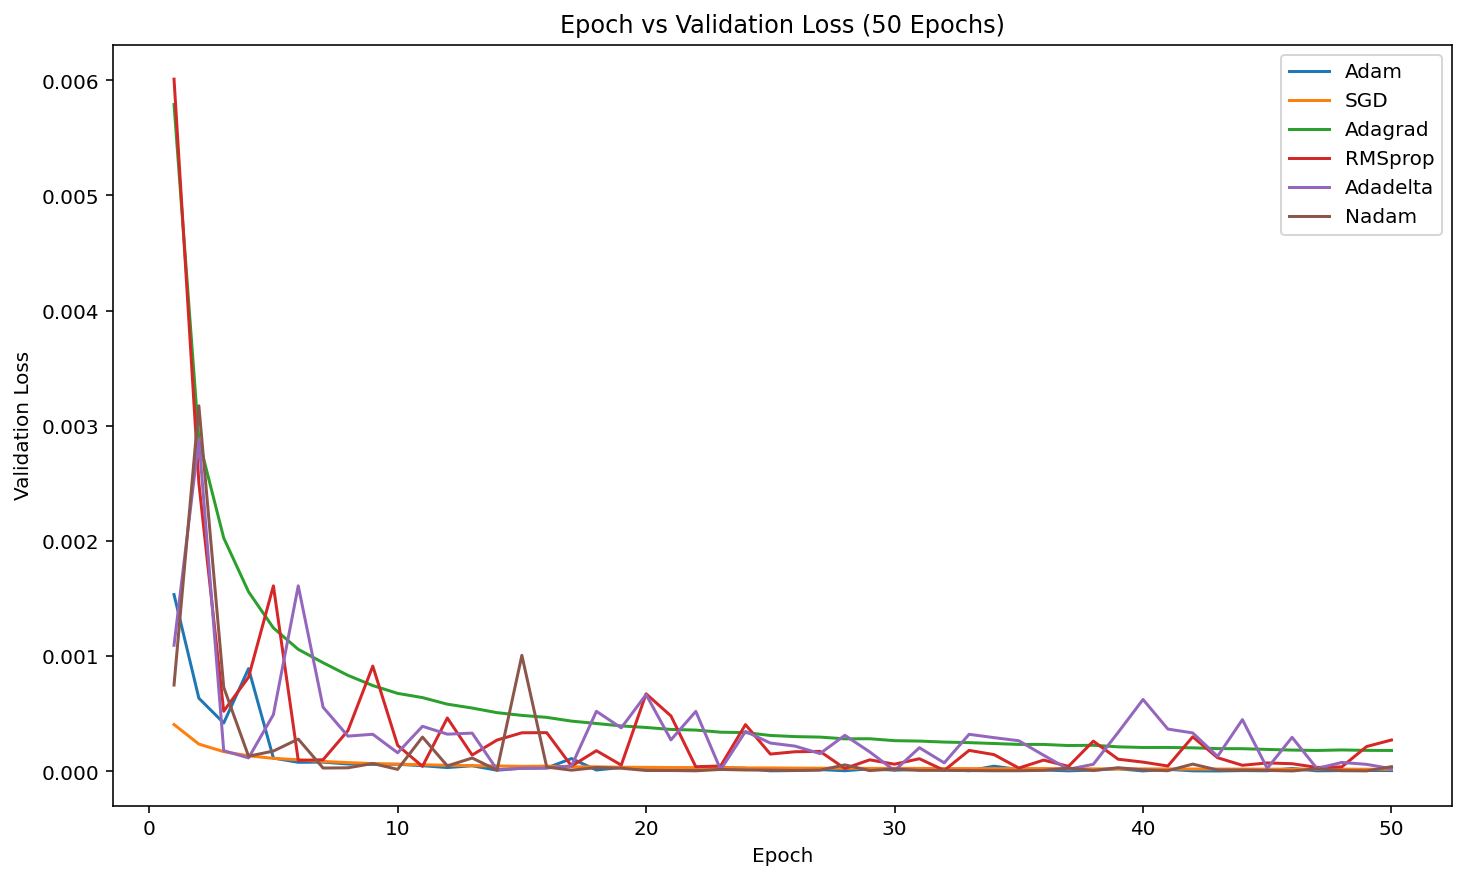

Results with optimizer [Adam] MSE: 6.462051260314183e-06 MAE: 0.002014626981690526 R2: 0.9998549222946167
Results with optimizer [SGD] MSE: 1.7666023268247955e-05 MAE: 0.003246175590902567 R2: 0.9996068477630615
Results with optimizer [Adagrad] MSE: 0.00018101552268490195 MAE: 0.010458691045641899 R2: 0.9958553910255432
Results with optimizer [RMSprop] MSE: 0.0002718637406360358 MAE: 0.01583237573504448 R2: 0.9941977858543396
Results with optimizer [Adadelta] MSE: 2.2051352061680518e-05 MAE: 0.004149538930505514 R2: 0.9995174407958984
Results with optimizer [Nadam] MSE: 4.0142629586625844e-05 MAE: 0.004490475170314312 R2: 0.9991984367370605


In [ ]:
import matplotlib.pyplot as plt

# Define the list of epoch amounts to try
epoch_amounts = [50]
losses=[]
mses=[]
maes=[]
r2s=[]

# Run through all the amounts
for epochs in epoch_amounts:
    set_epochs = epochs
    
    set_batch_size=16
    
    # Run through all six different optimizers
    for i in range(6):

        # Define the FNN model
        '''model = Sequential()
        model.add(Flatten(input_shape=(X_train_reshaped.shape[1], 1))) # Flatten the input data
        model.add(Dense(64, activation='relu')) # First hidden layer
        model.add(Dense(64, activation='relu')) # Second hidden layer
        model.add(Dense(1))  # Output layer for regression task'''

        if(i==0):
            optimizer_selected = tf.keras.optimizers.Adam(learning_rate=0.001)
        elif(i==1):
            optimizer_selected = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
        elif(i==2):
            optimizer_selected = tf.keras.optimizers.Adagrad(learning_rate=0.01)
        elif(i==3):
            optimizer_selected = tf.keras.optimizers.RMSprop(learning_rate=0.001)
        elif(i==4):
            optimizer_selected = tf.keras.optimizers.Adadelta(learning_rate=1.0)
        elif(i==5):
            optimizer_selected = tf.keras.optimizers.Nadam(learning_rate=0.002)

        # Define R-squared as a custom metric
        def r2(y_true, y_pred):
            SS_res =  K.sum(K.square(y_true - y_pred))
            SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
            return 1 - SS_res/(SS_tot + K.epsilon())

        # Compile the model
        model.compile(optimizer=optimizer_selected, loss='mean_squared_error', metrics=['mse','mae', r2])

        history = model.fit(X_train_reshaped, y_train, epochs=set_epochs, batch_size=set_batch_size, validation_split=0.1)

        # Collect metrics for each epoch batch
        losses.append(history.history['val_loss'])
        mses.append(history.history['val_mse'])
        maes.append(history.history['val_mae'])
        r2s.append(history.history['val_r2'])

    # Plot epoch vs validation loss
    x=range(1, set_epochs + 1)
    plt.figure()
    for j, optimizer in enumerate(['Adam', 'SGD', 'Adagrad', 'RMSprop', 'Adadelta', 'Nadam']):
        plt.plot(x, losses[j], label=optimizer)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.title('Epoch vs Validation Loss ({} Epochs)'.format(epochs))
    plt.legend()
    plt.show()
    
 
# Uncomment if you want to set limits
#     predictions = model.predict(X_test)
#     plt.scatter(y_test, predictions)

#     plt.ylim(-2.6, -2.0) 
#     plt.xlim(-2.6, -2.0)

#     fig, ax=plt.subplots()
#     ax.set_xlabel(r"Actual Values", fontsize=18)
#     ax.set_ylabel(r"Predicted Values", fontsize=18)
#     ax.tick_params(axis='x', labelsize=15)
#     ax.tick_params(axis='y', labelsize=15)
#     ax.plot(y_test, predictions,'.')
#     ax.set_title('FNN: Actual vs Predicted Values',fontsize=20)




# Print results for each optimizer
for j, optimizer in enumerate(['Adam', 'SGD', 'Adagrad', 'RMSprop', 'Adadelta', 'Nadam']):
    print("Results with optimizer [{}] MSE: {} MAE: {} R2: {}".format(optimizer, mses[j][-1], maes[j][-1], r2s[j][-1]))
    

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing time: 0.19 seconds


Text(0.5, 1.0, 'FNN: Actual vs Predicted Values')

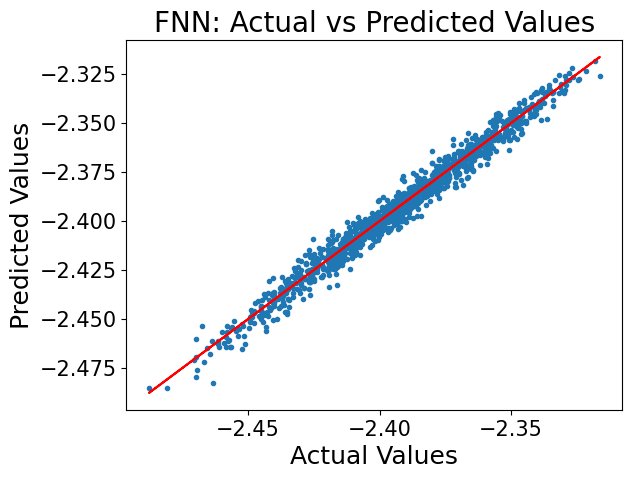

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import time

# Find predictions and test time
start_time = time.time()
predictions = model.predict(X_test_scaled)
end_time = time.time()
test_time = end_time - start_time
print(f"Testing time: {test_time:.2f} seconds")

# Plot Actual vs Predicted
fig, ax=plt.subplots()
ax.set_xlabel(r"Actual Values", fontsize=18)
ax.set_ylabel(r"Predicted Values", fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.plot(y_test, predictions,'.')
ax.plot(y_test, y_test, color='r')
ax.set_title('FNN: Actual vs Predicted Values',fontsize=20)


## Feature Importance

2461/2461 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Feature Importance Score:
mass: 0.3431
z: 0.0262
fov: 0.0000
mlt: 0.0002
age: 0.0273
teff: 0.1539
lum: 1.6801


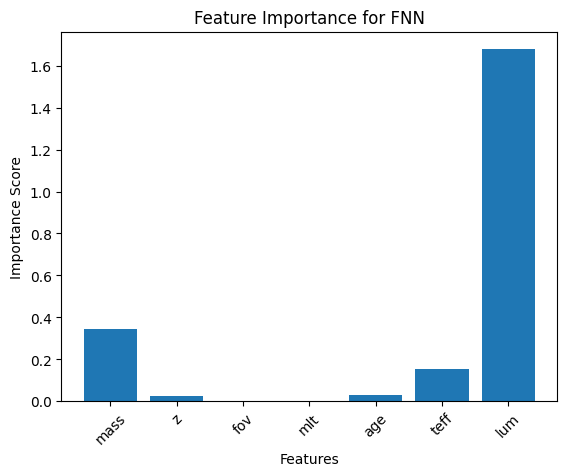

Feature Importance Score:
mass: 0.3431
z: 0.0262
fov: 0.0000
mlt: 0.0002
age: 0.0273
teff: 0.1539
lum: 1.6801


156/261 [================>.............] - ETA: 0s

207/261 [======================>.......] - ETA: 0s

257/261 [============================>.] - ETA: 0s

261/261 [==============================] - 0s 999us/step


  1/261 [..............................] - ETA: 5s

 40/261 [===>..........................] - ETA: 0s

 86/261 [========>.....................] - ETA: 0s

138/261 [==============>...............] - ETA: 0s

191/261 [====================>.........] - ETA: 0s

244/261 [===========================>..] - ETA: 0s

261/261 [==============================] - 0s 1ms/step


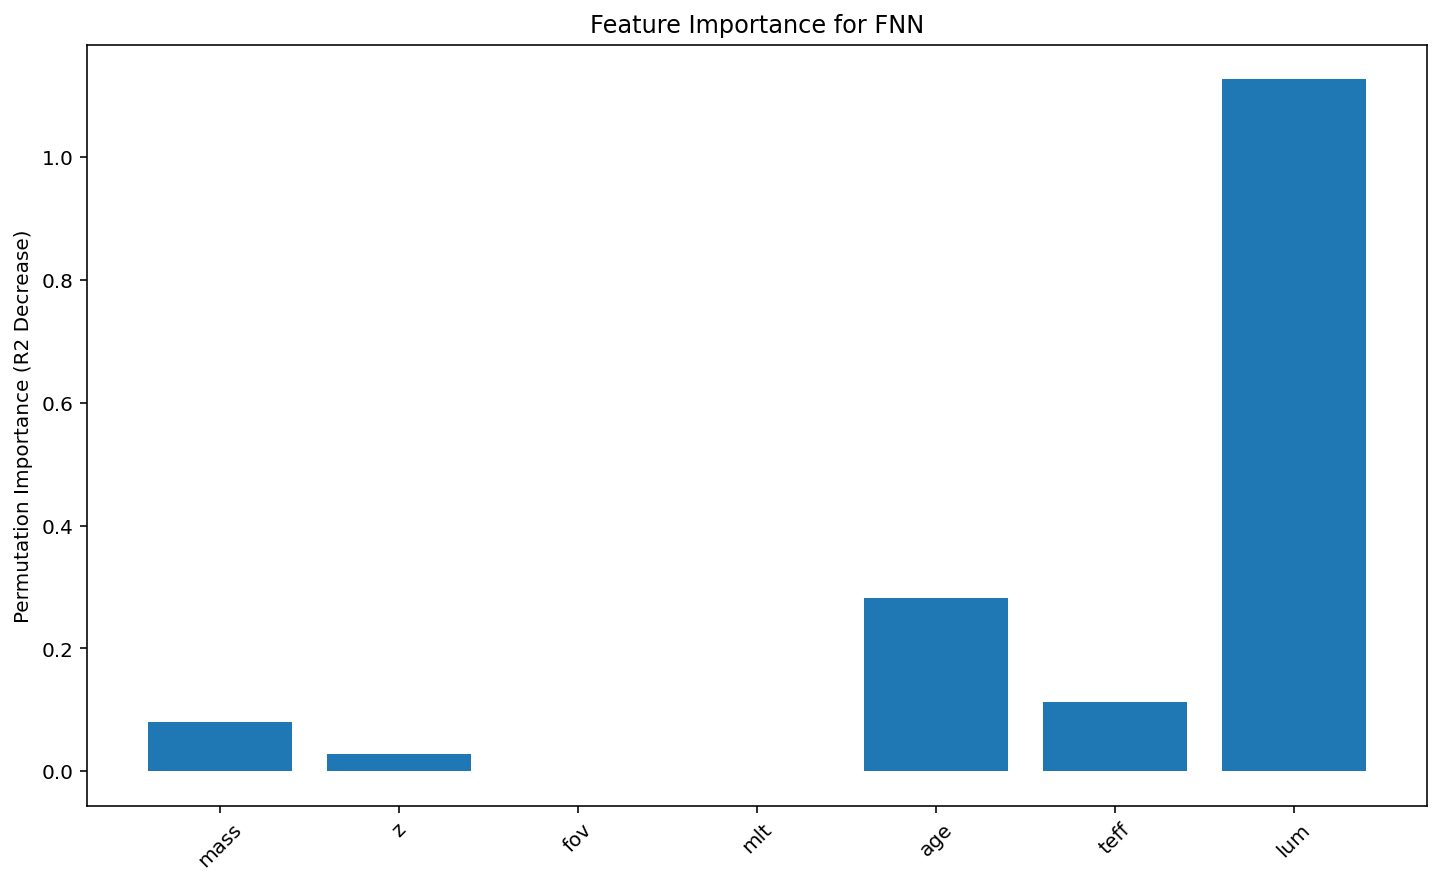

In [4]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import feature_importance_permutation

# Define a prediction function
def model_predict(X):
    return model.predict(X).flatten()

# Calculate permutation feature importance
imp_vals, imp_all = feature_importance_permutation(
    predict_method=model_predict,
    X=X_test_scaled,
    y=y_test,
    metric='r2',
    num_rounds=1,
    seed=1
)

# Print feature importance scores
feature_names = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']
print("Feature Importance Score:")
for feature, importance in zip(feature_names, imp_vals):
    print(f'{feature}: {importance:.4f}')

# Plot feature importance
plt.bar(feature_names, imp_vals)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance for FNN')
plt.xticks(rotation=45)
plt.show()

# Print feature importance scores
feature_names = ['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum']
print("Feature Importance Score:")
for feature, importance in zip(feature_names, imp_vals):
    print(f'{feature}: {importance:.4f}')

## SHAP

In [18]:
# Install SHAP library
!pip install shap
import shap

/home/research2/miniconda3/envs/mlexp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


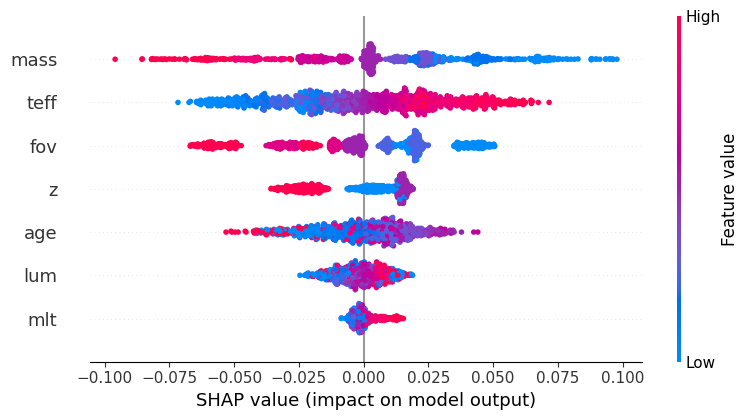

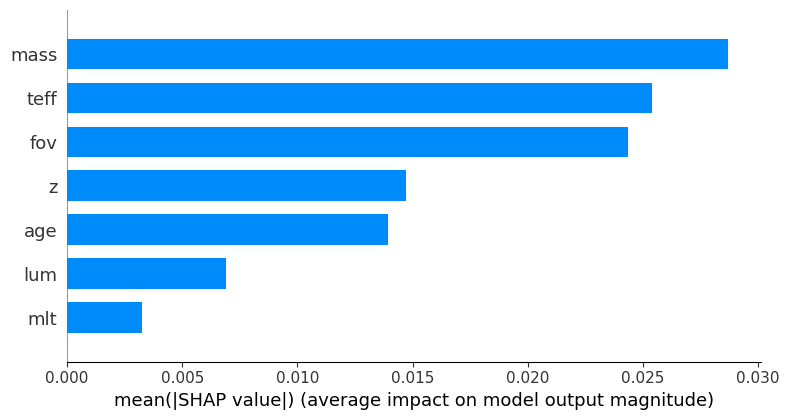

In [23]:
#===============================================================================
X_train_sample=pd.DataFrame(X_train_scaled).sample(n=1000, random_state=41).to_numpy()
X_test_sample=pd.DataFrame(X_test_scaled).sample(n=1000, random_state=45).to_numpy()
#===============================================================================

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train_sample)

# Get SHAP values for a subset of the test set
shap_values = explainer(X_test_sample)

# Plot feature importance bar chart
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'])
shap.summary_plot(shap_values, X_test_sample, feature_names=['mass', 'z', 'fov', 'mlt', 'age', 'teff', 'lum'], plot_type="bar")


In [ ]:
### Pickling the data for the Ensemble Voting Regressor ###

import pickle

with open('FNN_model.pkl', 'wb') as model_file, open('FNN_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(model, model_file)
    pickle.dump(scaler, scaler_file)

from keras.utils import register_keras_serializable

# Register the r2 function so Keras can find it during unpickling
@register_keras_serializable()
def r2(y_true, y_pred):
    # Your R2 metric implementation
    pass
